In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import sqlite3
from sqlalchemy import create_engine # database connection
import csv
import os
warnings.filterwarnings("ignore")
import datetime as dt
import numpy as np
from nltk.corpus import stopwords
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.manifold import TSNE
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics.classification import accuracy_score, log_loss
from sklearn.feature_extraction.text import TfidfVectorizer
from collections import Counter
from scipy.sparse import hstack
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
#from sklearn.cross_validation import StratifiedKFold 
from collections import Counter, defaultdict
from sklearn.calibration import CalibratedClassifierCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import math
from sklearn.metrics import normalized_mutual_info_score
from sklearn.ensemble import RandomForestClassifier



from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from mlxtend.classifier import StackingClassifier

from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, auc, roc_curve
from os import path

import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from subprocess import check_output
%matplotlib inline
import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls
import os
import gc

import re
from nltk.corpus import stopwords
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
import re
from nltk.corpus import stopwords
# This package is used for finding longest common subsequence between two strings
# you can write your own dp code for this
import distance
from nltk.stem import PorterStemmer
from bs4 import BeautifulSoup
from fuzzywuzzy import fuzz
from sklearn.manifold import TSNE
# Import the Required lib packages for WORD-Cloud generation
# https://stackoverflow.com/questions/45625434/how-to-install-wordcloud-in-python3-6
from wordcloud import WordCloud, STOPWORDS
from os import path
from PIL import Image
import pandas as pd
import matplotlib.pyplot as plt
import re
import time
import warnings
import numpy as np
from nltk.corpus import stopwords
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
warnings.filterwarnings("ignore")
import sys
import os 
import pandas as pd
import numpy as np
from tqdm import tqdm

# exctract word2vec vectors
# https://github.com/explosion/spaCy/issues/1721
# http://landinghub.visualstudio.com/visual-cpp-build-tools
import spacy

### Preparing the data frame from starting

In [85]:
df = pd.read_csv("train.csv")

print("Number of data points:",df.shape[0])

Number of data points: 404290


<h3> Checking for NULL values </h3>

In [86]:
#Checking whether there are any rows with null values
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

            id    qid1    qid2                         question1  \
105780  105780  174363  174364    How can I develop android app?   
201841  201841  303951  174364  How can I create an Android app?   
363362  363362  493340  493341                               NaN   

                                                question2  is_duplicate  
105780                                                NaN             0  
201841                                                NaN             0  
363362  My Chinese name is Haichao Yu. What English na...             0  


In [87]:
# Filling the null values with ' '
df = df.fillna('')
nan_rows = df[df.isnull().any(1)]
print (nan_rows)

Empty DataFrame
Columns: [id, qid1, qid2, question1, question2, is_duplicate]
Index: []


In [88]:
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
else:
    df['freq_qid1'] = df.groupby('qid1')['qid1'].transform('count') 
    df['freq_qid2'] = df.groupby('qid2')['qid2'].transform('count')
    df['q1len'] = df['question1'].str.len() 
    df['q2len'] = df['question2'].str.len()
    df['q1_n_words'] = df['question1'].apply(lambda row: len(row.split(" ")))
    df['q2_n_words'] = df['question2'].apply(lambda row: len(row.split(" ")))

    def normalized_word_Common(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)
    df['word_Common'] = df.apply(normalized_word_Common, axis=1)

    def normalized_word_Total(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * (len(w1) + len(w2))
    df['word_Total'] = df.apply(normalized_word_Total, axis=1)

    def normalized_word_share(row):
        w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
        w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
        return 1.0 * len(w1 & w2)/(len(w1) + len(w2))
    df['word_share'] = df.apply(normalized_word_share, axis=1)

    df['freq_q1+q2'] = df['freq_qid1']+df['freq_qid2']
    df['freq_q1-q2'] = abs(df['freq_qid1']-df['freq_qid2'])

    df.to_csv("df_fe_without_preprocessing_train.csv", index=False)

df.head()

id  qid1  qid2                                          question1  \
0   0     1     2  What is the step by step guide to invest in sh...   
1   1     3     4  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2   2     5     6  How can I increase the speed of my internet co...   
3   3     7     8  Why am I mentally very lonely? How can I solve...   
4   4     9    10  Which one dissolve in water quikly sugar, salt...   

                                           question2  is_duplicate  freq_qid1  \
0  What is the step by step guide to invest in sh...             0          1   
1  What would happen if the Indian government sto...             0          4   
2  How can Internet speed be increased by hacking...             0          1   
3  Find the remainder when [math]23^{24}[/math] i...             0          1   
4            Which fish would survive in salt water?             0          3   

   freq_qid2  q1len  q2len  q1_n_words  q2_n_words  word_Common  word_Total  \
0          1     66     57          14          12         10.0        23.0   
1          1     51     88           8          13          4.0        20.0   
2          1     73     59          14          10          4.0        24.0   
3          1     50     65          11           9          0.0        19.0   
4          1     76     39          13           7          2.0        20.0   

   word_share  freq_q1+q2  freq_q1-q2  
0    0.434783           2           0  
1    0.200000           5           3  
2    0.166667           2           0  
3    0.000000           2           0  
4    0.100000           4           2

In [89]:
#https://stackoverflow.com/questions/12468179/unicodedecodeerror-utf8-codec-cant-decode-byte-0x9c
if os.path.isfile('df_fe_without_preprocessing_train.csv'):
    df = pd.read_csv("df_fe_without_preprocessing_train.csv",encoding='latin-1')
    df = df.fillna('')
    df.head()
else:
    print("get df_fe_without_preprocessing_train.csv from drive or run the previous notebook")

In [90]:
CompleteData = df

In [91]:
CompleteData = CompleteData.drop(['qid1','qid2'],axis=1)

<h2> Preprocessing of Text </h2>

- Preprocessing:
    - Removing html tags 
    - Removing Punctuations
    - Performing stemming
    - Removing Stopwords
    - Expanding contractions etc.

In [92]:
import nltk
nltk.download('stopwords')
# To get the results in 4 decemal points
SAFE_DIV = 0.0001 

STOP_WORDS = stopwords.words("english")


def preprocess(x):
    x = str(x).lower()
    x = x.replace(",000,000", "m").replace(",000", "k").replace("′", "'").replace("’", "'")\
                           .replace("won't", "will not").replace("cannot", "can not").replace("can't", "can not")\
                           .replace("n't", " not").replace("what's", "what is").replace("it's", "it is")\
                           .replace("'ve", " have").replace("i'm", "i am").replace("'re", " are")\
                           .replace("he's", "he is").replace("she's", "she is").replace("'s", " own")\
                           .replace("%", " percent ").replace("₹", " rupee ").replace("$", " dollar ")\
                           .replace("€", " euro ").replace("'ll", " will")
    x = re.sub(r"([0-9]+)000000", r"\1m", x)
    x = re.sub(r"([0-9]+)000", r"\1k", x)
    
    
    porter = PorterStemmer()
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    
    if type(x) == type(''):
        x = porter.stem(x)
        example1 = BeautifulSoup(x)
        x = example1.get_text()
               
    
    return x

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hari\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


<h2> Advanced Feature Extraction (NLP and Fuzzy Features) </h2>

In [93]:
def get_token_features(q1, q2):
    token_features = [0.0]*10
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features
    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    token_features[8] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    token_features[9] = (len(q1_tokens) + len(q2_tokens))/2
    return token_features

# get the Longest Common sub string

def get_longest_substr_ratio(a, b):
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return len(strs[0]) / (min(len(a), len(b)) + 1)

def extract_features(df):
    # preprocessing each question
    df["question1"] = df["question1"].fillna("").apply(preprocess)
    df["question2"] = df["question2"].fillna("").apply(preprocess)

    print("token features...")
    
    # Merging Features with dataset
    
    token_features = df.apply(lambda x: get_token_features(x["question1"], x["question2"]), axis=1)
    
    df["cwc_min"]       = list(map(lambda x: x[0], token_features))
    df["cwc_max"]       = list(map(lambda x: x[1], token_features))
    df["csc_min"]       = list(map(lambda x: x[2], token_features))
    df["csc_max"]       = list(map(lambda x: x[3], token_features))
    df["ctc_min"]       = list(map(lambda x: x[4], token_features))
    df["ctc_max"]       = list(map(lambda x: x[5], token_features))
    df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
    df["first_word_eq"] = list(map(lambda x: x[7], token_features))
    df["abs_len_diff"]  = list(map(lambda x: x[8], token_features))
    df["mean_len"]      = list(map(lambda x: x[9], token_features))
   
    #Computing Fuzzy Features and Merging with Dataset
    
    # do read this blog: http://chairnerd.seatgeek.com/fuzzywuzzy-fuzzy-string-matching-in-python/
    # https://stackoverflow.com/questions/31806695/when-to-use-which-fuzz-function-to-compare-2-strings
    # https://github.com/seatgeek/fuzzywuzzy
    print("fuzzy features..")

    df["token_set_ratio"]       = df.apply(lambda x: fuzz.token_set_ratio(x["question1"], x["question2"]), axis=1)
    # The token sort approach involves tokenizing the string in question, sorting the tokens alphabetically, and 
    # then joining them back into a string We then compare the transformed strings with a simple ratio().
    df["token_sort_ratio"]      = df.apply(lambda x: fuzz.token_sort_ratio(x["question1"], x["question2"]), axis=1)
    df["fuzz_ratio"]            = df.apply(lambda x: fuzz.QRatio(x["question1"], x["question2"]), axis=1)
    df["fuzz_partial_ratio"]    = df.apply(lambda x: fuzz.partial_ratio(x["question1"], x["question2"]), axis=1)
    df["longest_substr_ratio"]  = df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)
    return df

In [94]:
if os.path.isfile('nlp_features_train.csv'):
    df = pd.read_csv("nlp_features_train.csv",encoding='latin-1')
    df.fillna('')
else:
    print("Extracting features for train:")
    df = pd.read_csv("train.csv")
    df = extract_features(df)
    df.to_csv("nlp_features_train.csv", index=False)
df.head(2)

id  qid1  qid2                                          question1  \
0   0     1     2  what is the step by step guide to invest in sh...   
1   1     3     4  what is the story of kohinoor  koh i noor  dia...   

                                           question2  is_duplicate   cwc_min  \
0  what is the step by step guide to invest in sh...             0  0.999980   
1  what would happen if the indian government sto...             0  0.799984   

    cwc_max   csc_min   csc_max  ...   ctc_max  last_word_eq  first_word_eq  \
0  0.833319  0.999983  0.999983  ...  0.785709           0.0            1.0   
1  0.399996  0.749981  0.599988  ...  0.466664           0.0            1.0   

   abs_len_diff  mean_len  token_set_ratio  token_sort_ratio  fuzz_ratio  \
0           2.0      13.0              100                93          93   
1           5.0      12.5               86                63          66   

   fuzz_partial_ratio  longest_substr_ratio  
0                 100              0.982759  
1                  75              0.596154  

[2 rows x 21 columns]

In [95]:
dfn = df.drop(['qid1','qid2','question1','question2','is_duplicate'],axis=1)

In [96]:
dfn

id   cwc_min   cwc_max   csc_min   csc_max   ctc_min   ctc_max  \
0            0  0.999980  0.833319  0.999983  0.999983  0.916659  0.785709   
1            1  0.799984  0.399996  0.749981  0.599988  0.699993  0.466664   
2            2  0.399992  0.333328  0.399992  0.249997  0.399996  0.285712   
3            3  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4            4  0.399992  0.199998  0.999950  0.666644  0.571420  0.307690   
...        ...       ...       ...       ...       ...       ...       ...   
404285  404285  0.857131  0.857131  0.999980  0.833319  0.846147  0.785709   
404286  404286  0.666644  0.666644  0.599988  0.599988  0.624992  0.555549   
404287  404287  0.999900  0.499975  0.999950  0.666644  0.749981  0.749981   
404288  404288  0.000000  0.000000  0.124998  0.099999  0.058823  0.040000   
404289  404289  0.999967  0.999967  0.999980  0.714276  0.999988  0.799992   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
0                0.0            1.0           2.0      13.0              100   
1                0.0            1.0           5.0      12.5               86   
2                0.0            1.0           4.0      12.0               66   
3                0.0            0.0           2.0      12.0               36   
4                0.0            1.0           6.0      10.0               67   
...              ...            ...           ...       ...              ...   
404285           1.0            1.0           1.0      13.5               97   
404286           1.0            0.0           1.0       8.5               79   
404287           1.0            1.0           0.0       4.0               86   
404288           0.0            0.0           8.0      21.0               48   
404289           1.0            1.0           2.0       9.0              100   

        token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
0                     93          93                 100              0.982759  
1                     63          66                  75              0.596154  
2                     66          54                  54              0.166667  
3                     36          35                  40              0.039216  
4                     47          46                  56              0.175000  
...                  ...         ...                 ...                   ...  
404285                88          91                  87              0.387500  
404286                69          72                  73              0.642857  
404287                79          79                  76              0.444444  
404288                48          42                  46              0.052632  
404289                90          90                  86              0.605263  

[404290 rows x 16 columns]

In [97]:
CompleteData

id                                          question1  \
0            0  What is the step by step guide to invest in sh...   
1            1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2            2  How can I increase the speed of my internet co...   
3            3  Why am I mentally very lonely? How can I solve...   
4            4  Which one dissolve in water quikly sugar, salt...   
...        ...                                                ...   
404285  404285  How many keywords are there in the Racket prog...   
404286  404286          Do you believe there is life after death?   
404287  404287                                  What is one coin?   
404288  404288  What is the approx annual cost of living while...   
404289  404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  \
0       What is the step by step guide to invest in sh...             0   
1       What would happen if the Indian government sto...             0   
2       How can Internet speed be increased by hacking...             0   
3       Find the remainder when [math]23^{24}[/math] i...             0   
4                 Which fish would survive in salt water?             0   
...                                                   ...           ...   
404285  How many keywords are there in PERL Programmin...             0   
404286         Is it true that there is life after death?             1   
404287                                  What's this coin?             0   
404288  I am having little hairfall problem but I want...             0   
404289      What is it like to have sex with your cousin?             0   

        freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
0               1          1     66     57          14          12   
1               4          1     51     88           8          13   
2               1          1     73     59          14          10   
3               1          1     50     65          11           9   
4               3          1     76     39          13           7   
...           ...        ...    ...    ...         ...         ...   
404285          2          2     85     79          14          13   
404286         12          1     41     42           8           9   
404287          1          1     17     17           4           3   
404288          1          1     94    127          17          25   
404289          1          1     37     45           8          10   

        word_Common  word_Total  word_share  freq_q1+q2  freq_q1-q2  
0              10.0        23.0    0.434783           2           0  
1               4.0        20.0    0.200000           5           3  
2               4.0        24.0    0.166667           2           0  
3               0.0        19.0    0.000000           2           0  
4               2.0        20.0    0.100000           4           2  
...             ...         ...         ...         ...         ...  
404285         11.0        25.0    0.440000           4           0  
404286          5.0        16.0    0.312500          13          11  
404287          1.0         7.0    0.142857           2           0  
404288          1.0        40.0    0.025000           2           0  
404289          8.0        18.0    0.444444           2           0  

[404290 rows x 15 columns]

### Merging all featurization techniques

In [98]:
CompleteData_Merge = pd.concat([CompleteData, dfn], axis=1)

In [99]:
CompleteData_Merge

id                                          question1  \
0            0  What is the step by step guide to invest in sh...   
1            1  What is the story of Kohinoor (Koh-i-Noor) Dia...   
2            2  How can I increase the speed of my internet co...   
3            3  Why am I mentally very lonely? How can I solve...   
4            4  Which one dissolve in water quikly sugar, salt...   
...        ...                                                ...   
404285  404285  How many keywords are there in the Racket prog...   
404286  404286          Do you believe there is life after death?   
404287  404287                                  What is one coin?   
404288  404288  What is the approx annual cost of living while...   
404289  404289              What is like to have sex with cousin?   

                                                question2  is_duplicate  \
0       What is the step by step guide to invest in sh...             0   
1       What would happen if the Indian government sto...             0   
2       How can Internet speed be increased by hacking...             0   
3       Find the remainder when [math]23^{24}[/math] i...             0   
4                 Which fish would survive in salt water?             0   
...                                                   ...           ...   
404285  How many keywords are there in PERL Programmin...             0   
404286         Is it true that there is life after death?             1   
404287                                  What's this coin?             0   
404288  I am having little hairfall problem but I want...             0   
404289      What is it like to have sex with your cousin?             0   

        freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  ...  \
0               1          1     66     57          14          12  ...   
1               4          1     51     88           8          13  ...   
2               1          1     73     59          14          10  ...   
3               1          1     50     65          11           9  ...   
4               3          1     76     39          13           7  ...   
...           ...        ...    ...    ...         ...         ...  ...   
404285          2          2     85     79          14          13  ...   
404286         12          1     41     42           8           9  ...   
404287          1          1     17     17           4           3  ...   
404288          1          1     94    127          17          25  ...   
404289          1          1     37     45           8          10  ...   

         ctc_max  last_word_eq  first_word_eq  abs_len_diff  mean_len  \
0       0.785709           0.0            1.0           2.0      13.0   
1       0.466664           0.0            1.0           5.0      12.5   
2       0.285712           0.0            1.0           4.0      12.0   
3       0.000000           0.0            0.0           2.0      12.0   
4       0.307690           0.0            1.0           6.0      10.0   
...          ...           ...            ...           ...       ...   
404285  0.785709           1.0            1.0           1.0      13.5   
404286  0.555549           1.0            0.0           1.0       8.5   
404287  0.749981           1.0            1.0           0.0       4.0   
404288  0.040000           0.0            0.0           8.0      21.0   
404289  0.799992           1.0            1.0           2.0       9.0   

        token_set_ratio  token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  \
0                   100                93          93                 100   
1                    86                63          66                  75   
2                    66                66          54                  54   
3                    36                36          35                  40   
4                    67                47          46                  56   
...                 ...               ... 

In [100]:
df_duplicate = CompleteData_Merge[CompleteData_Merge['is_duplicate'] == 1]
dfp_nonduplicate = CompleteData_Merge[CompleteData_Merge['is_duplicate'] == 0]

# Converting 2d array of q1 and q2 and flatten the array: like {{1,2},{3,4}} to {1,2,3,4}
p = np.dstack([df_duplicate["question1"], df_duplicate["question2"]]).flatten()
n = np.dstack([dfp_nonduplicate["question1"], dfp_nonduplicate["question2"]]).flatten()

print ("Number of data points in class 1 (duplicate pairs) :",len(p))
print ("Number of data points in class 0 (non duplicate pairs) :",len(n))

#Saving the np array into a text file
np.savetxt('train_p.txt', p, delimiter=' ', fmt='%s', encoding="utf-8")
np.savetxt('train_n.txt', n, delimiter=' ', fmt='%s', encoding="utf-8")

Number of data points in class 1 (duplicate pairs) : 298526
Number of data points in class 0 (non duplicate pairs) : 510054


In [101]:
# encode questions to unicode
# https://stackoverflow.com/a/6812069
# ----------------- python 2 ---------------------
# df['question1'] = df['question1'].apply(lambda x: unicode(str(x),"utf-8"))
# df['question2'] = df['question2'].apply(lambda x: unicode(str(x),"utf-8"))
# ----------------- python 3 ---------------------
CompleteData_Merge['question1'] = CompleteData_Merge['question1'].apply(lambda x: str(x))
CompleteData_Merge['question2'] = CompleteData_Merge['question2'].apply(lambda x: str(x))

In [102]:
# Taking 100000 data points randomly from 808580 rows 
CompleteData_Merge = CompleteData_Merge.sample(n=100000)

In [103]:
#Relace Data points which are Nan with Mean in each column
CompleteData_Merge = CompleteData_Merge.fillna(CompleteData_Merge.mean())

In [104]:
y_true = CompleteData_Merge['is_duplicate']
CompleteData_Merge.drop(['id','is_duplicate'], axis=1, inplace=True)

In [105]:
y_true.isnull().sum()

0

In [106]:
# https://stackoverflow.com/questions/7368789/convert-all-strings-in-a-list-to-int
y_true = list(map(int, y_true))

### Splitting data into Train and Test

In [107]:
X_train,X_test, y_train, y_test = train_test_split(CompleteData_Merge, y_true, stratify=y_true, test_size=0.3)

In [108]:
print("Number of data points in train data :",X_train.shape)
print("Number of data points in test data :",X_test.shape)

Number of data points in train data : (70000, 28)
Number of data points in test data : (30000, 28)


In [109]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6307857142857143 Class 1:  0.3692142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.3692 Class 1:  0.3692


### AVGW2VTFIDF Vectorization

In [110]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(X_train['question1']) + list(X_train['question2'])
print(len(questions))
tfidf = TfidfVectorizer(lowercase=False, )
tfidf.fit_transform(questions)

# dict key:word and value:tf-idf score
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

140000


In [111]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

X_Train_avgw2vtfdif_q1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    X_Train_avgw2vtfdif_q1.append(mean_vec1)

100%|████████████████████████████████████████████████████████████████████████████| 70000/70000 [26:23<00:00, 44.20it/s]


In [112]:
X_train['question2'].isnull()

199150    False
359191    False
216993    False
232632    False
229987    False
          ...  
129340    False
352926    False
70419     False
282598    False
342475    False
Name: question2, Length: 70000, dtype: bool

In [113]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

X_Train_avgw2vtfdif_q2 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_train['question2'])):
    doc1 = nlp(qu1) 
    print(len(doc1))
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    X_Train_avgw2vtfdif_q2.append(mean_vec1)

  0%|                                                                                        | 0/70000 [00:00<?, ?it/s]

11
18


  0%|                                                                              | 2/70000 [00:00<1:00:56, 19.14it/s]

15
7
15
8
13


  0%|                                                                                | 7/70000 [00:00<51:24, 22.69it/s]

11
29
10
9


  0%|                                                                               | 11/70000 [00:00<45:32, 25.61it/s]

20
6
9
10
14


  0%|                                                                               | 16/70000 [00:00<40:37, 28.71it/s]

13
9
11
11
12


  0%|                                                                               | 21/70000 [00:00<36:05, 32.31it/s]

7
5
9
19
6


  0%|                                                                               | 26/70000 [00:00<32:54, 35.43it/s]

8
6
5
13
9


  0%|                                                                               | 31/70000 [00:00<31:34, 36.93it/s]

16
9
10
11
9


  0%|                                                                               | 36/70000 [00:00<29:44, 39.20it/s]

9
7
13
9
13


  0%|                                                                               | 41/70000 [00:01<28:28, 40.95it/s]

16
7
10
15
11


  0%|                                                                               | 46/70000 [00:01<28:40, 40.66it/s]

9
10
19
11
20


  0%|                                                                               | 51/70000 [00:01<27:43, 42.05it/s]

17
38
12
11
14


  0%|                                                                               | 56/70000 [00:01<29:14, 39.87it/s]

5
10
6
16
25


  0%|                                                                               | 61/70000 [00:01<29:12, 39.91it/s]

11
9
9
13
9


  0%|                                                                               | 66/70000 [00:01<28:05, 41.49it/s]

11
20
9
13
8


  0%|                                                                               | 71/70000 [00:01<28:24, 41.03it/s]

13
15
9
36
13


  0%|                                                                               | 76/70000 [00:01<28:37, 40.71it/s]

10
9
9
7
27


  0%|                                                                               | 81/70000 [00:02<28:46, 40.50it/s]

11
6
9
27
14


  0%|                                                                               | 86/70000 [00:02<27:47, 41.94it/s]

15
13
8
11
9


  0%|                                                                               | 91/70000 [00:02<28:11, 41.34it/s]

19
7
12
14
10


  0%|                                                                               | 96/70000 [00:02<27:22, 42.56it/s]

9
10
8
20
15


  0%|                                                                              | 101/70000 [00:02<27:54, 41.75it/s]

5
8
10
11
8


  0%|                                                                              | 106/70000 [00:02<27:10, 42.87it/s]

17
6
7
16
9


  0%|                                                                              | 111/70000 [00:02<26:39, 43.69it/s]

10
15
8
7
9


  0%|▏                                                                             | 116/70000 [00:02<26:51, 43.36it/s]

11
16
6
21
12


  0%|▏                                                                             | 121/70000 [00:02<26:26, 44.04it/s]

12
14
24
10
18


  0%|▏                                                                             | 126/70000 [00:03<27:14, 42.74it/s]

6
10
27
12
21


  0%|▏                                                                             | 131/70000 [00:03<27:48, 41.88it/s]

11
9
6
7
25


  0%|▏                                                                             | 136/70000 [00:03<28:11, 41.30it/s]

9
10
9
9
8


  0%|▏                                                                             | 141/70000 [00:03<27:22, 42.53it/s]

10
15
11
11
8


  0%|▏                                                                             | 146/70000 [00:03<26:48, 43.44it/s]

10
12
8
8
20


  0%|▏                                                                             | 151/70000 [00:03<26:23, 44.10it/s]

5
9
7
9
10


  0%|▏                                                                             | 156/70000 [00:03<26:07, 44.57it/s]

5
17
25
9
10


  0%|▏                                                                             | 161/70000 [00:03<27:11, 42.80it/s]

16
16
14
9
12


  0%|▏                                                                             | 166/70000 [00:03<26:40, 43.64it/s]

14
21
10
9
13


  0%|▏                                                                             | 171/70000 [00:04<27:23, 42.48it/s]

11
13
8
25
20


  0%|▏                                                                             | 176/70000 [00:04<27:54, 41.70it/s]

8
6
9
21
11


  0%|▏                                                                             | 181/70000 [00:04<27:10, 42.83it/s]

15
16
12
13
14


  0%|▏                                                                             | 186/70000 [00:04<27:44, 41.94it/s]

9
12
9
18
7


  0%|▏                                                                             | 191/70000 [00:04<27:03, 43.01it/s]

29
7
14
16
11


  0%|▏                                                                             | 196/70000 [00:04<27:39, 42.06it/s]

11
29
8
11
11


  0%|▏                                                                             | 201/70000 [00:04<28:25, 40.93it/s]

18
11
11
20
5


  0%|▏                                                                             | 206/70000 [00:04<28:36, 40.65it/s]

11
8
7
20
9


  0%|▏                                                                             | 211/70000 [00:05<27:39, 42.05it/s]

8
10
22
11
9


  0%|▏                                                                             | 216/70000 [00:05<26:59, 43.08it/s]

7
11
7
14
11


  0%|▏                                                                             | 221/70000 [00:05<27:37, 42.11it/s]

22
25
9
15
15


  0%|▎                                                                             | 226/70000 [00:05<28:03, 41.45it/s]

9
6
7
8
9


  0%|▎                                                                             | 231/70000 [00:05<27:15, 42.65it/s]

12
11
15
9
12


  0%|▎                                                                             | 236/70000 [00:05<26:42, 43.52it/s]

9
12
29
4
8


  0%|▎                                                                             | 241/70000 [00:05<27:24, 42.41it/s]

24
16
8
11
9


  0%|▎                                                                             | 246/70000 [00:05<27:20, 42.52it/s]

31
29
18
13
7


  0%|▎                                                                             | 251/70000 [00:06<28:56, 40.16it/s]

16
12
7
28
23


  0%|▎                                                                             | 256/70000 [00:06<28:58, 40.11it/s]

7
12
25
8
12


  0%|▎                                                                             | 261/70000 [00:06<28:59, 40.08it/s]

9
27
10
31
12


  0%|▎                                                                             | 266/70000 [00:06<29:00, 40.06it/s]

5
15
6
11
7


  0%|▎                                                                             | 271/70000 [00:06<27:56, 41.60it/s]

10
13
25
11
10


  0%|▎                                                                             | 276/70000 [00:06<28:16, 41.11it/s]

16
12
15
7
8


  0%|▎                                                                             | 281/70000 [00:06<27:24, 42.39it/s]

13
13
17
9
9


  0%|▎                                                                             | 286/70000 [00:06<26:59, 43.04it/s]

5
12
10
16
14


  0%|▎                                                                             | 291/70000 [00:06<26:31, 43.81it/s]

13
8
11
8
8


  0%|▎                                                                             | 296/70000 [00:07<26:11, 44.36it/s]

11
10
25
9
15


  0%|▎                                                                             | 301/70000 [00:07<27:02, 42.96it/s]

13
12
17
6
7


  0%|▎                                                                             | 306/70000 [00:07<26:32, 43.75it/s]

10
25
7
9
8


  0%|▎                                                                             | 311/70000 [00:07<27:17, 42.55it/s]

12
19
7
17
29


  0%|▎                                                                             | 316/70000 [00:07<27:48, 41.75it/s]

14
10
10
10
24


  0%|▎                                                                             | 321/70000 [00:07<28:10, 41.21it/s]

25
12
7
15
17


  0%|▎                                                                             | 326/70000 [00:07<28:49, 40.29it/s]

11
9
7
25
8


  0%|▎                                                                             | 331/70000 [00:07<27:47, 41.78it/s]

7
13
14
8
11


  0%|▎                                                                             | 336/70000 [00:08<28:09, 41.23it/s]

10
11
11
24
11


  0%|▍                                                                             | 341/70000 [00:08<27:19, 42.48it/s]

10
10
10
8
11


  0%|▍                                                                             | 346/70000 [00:08<26:44, 43.40it/s]

9
17
18
8
28


  1%|▍                                                                             | 351/70000 [00:08<27:25, 42.32it/s]

13
10
9
7
13


  1%|▍                                                                             | 356/70000 [00:08<27:54, 41.60it/s]

12
5
12
26
17


  1%|▍                                                                             | 361/70000 [00:08<27:08, 42.75it/s]

9
16
10
21
9


  1%|▍                                                                             | 366/70000 [00:08<27:42, 41.89it/s]

5
7
29
15
9


  1%|▍                                                                             | 371/70000 [00:08<27:39, 41.96it/s]

10
7
8
10
12


  1%|▍                                                                             | 376/70000 [00:08<26:58, 43.02it/s]

5
11
20
15
9


  1%|▍                                                                             | 381/70000 [00:09<27:35, 42.06it/s]

9
13
12
12
13


  1%|▍                                                                             | 386/70000 [00:09<26:55, 43.10it/s]

9
11
5
11
10


  1%|▍                                                                             | 391/70000 [00:09<26:27, 43.85it/s]

30
10
10
12
6


  1%|▍                                                                             | 396/70000 [00:09<27:13, 42.62it/s]

4
12
8
9
7


  1%|▍                                                                             | 401/70000 [00:09<26:39, 43.50it/s]

9
10
9
6
8


  1%|▍                                                                             | 406/70000 [00:09<26:16, 44.14it/s]

11
14
16
11
9


  1%|▍                                                                             | 411/70000 [00:09<26:35, 43.62it/s]

5
6
10
10
9


  1%|▍                                                                             | 416/70000 [00:09<26:12, 44.24it/s]

6
8
6
8
7


  1%|▍                                                                             | 421/70000 [00:09<25:57, 44.67it/s]

12
29
8
7
10


  1%|▍                                                                             | 426/70000 [00:10<25:46, 44.98it/s]

7
24
9
25
10


  1%|▍                                                                             | 431/70000 [00:10<26:44, 43.36it/s]

7
12
7
24
11


  1%|▍                                                                             | 436/70000 [00:10<27:24, 42.29it/s]

14
16
10
11
12


  1%|▍                                                                             | 441/70000 [00:10<26:47, 43.27it/s]

16
22
10
28
8


  1%|▍                                                                             | 446/70000 [00:10<27:26, 42.23it/s]

9
12
21
15
15


  1%|▌                                                                             | 451/70000 [00:10<27:54, 41.54it/s]

10
10
6
8
24


  1%|▌                                                                             | 456/70000 [00:10<27:52, 41.57it/s]

10
9
12
8
13


  1%|▌                                                                             | 461/70000 [00:10<27:07, 42.73it/s]

6
7
12
6
8


  1%|▌                                                                             | 466/70000 [00:11<26:35, 43.59it/s]

11
5
13
14
5


  1%|▌                                                                             | 471/70000 [00:11<26:12, 44.20it/s]

32
14
9
11
12


  1%|▌                                                                             | 476/70000 [00:11<27:02, 42.85it/s]

6
9
4
9
12


  1%|▌                                                                             | 481/70000 [00:11<26:31, 43.67it/s]

6
20
7
7
11


  1%|▌                                                                             | 486/70000 [00:11<26:10, 44.27it/s]

5
14
7
6
5


  1%|▌                                                                             | 491/70000 [00:11<25:55, 44.69it/s]

8
9
13
9
6


  1%|▌                                                                             | 496/70000 [00:11<25:44, 44.99it/s]

9
10
14
6
17


  1%|▌                                                                             | 501/70000 [00:11<26:48, 43.21it/s]

7
10
6
9
5
8


  1%|▌                                                                             | 507/70000 [00:11<25:59, 44.55it/s]

4
9
11
12
8


  1%|▌                                                                             | 512/70000 [00:12<25:47, 44.89it/s]

11
11
6
8
19


  1%|▌                                                                             | 517/70000 [00:12<25:39, 45.14it/s]

20
13
14
14
9


  1%|▌                                                                             | 522/70000 [00:12<26:38, 43.46it/s]

14
11
11
7
11


  1%|▌                                                                             | 527/70000 [00:12<26:14, 44.11it/s]

10
10
26
7
11


  1%|▌                                                                             | 532/70000 [00:12<27:03, 42.79it/s]

10
27
5
8
16


  1%|▌                                                                             | 537/70000 [00:12<26:32, 43.63it/s]

10
25
8
9
8


  1%|▌                                                                             | 542/70000 [00:12<27:01, 42.84it/s]

11
10
13
16
11


  1%|▌                                                                             | 547/70000 [00:12<27:35, 41.95it/s]

14
9
27
14
11


  1%|▌                                                                             | 552/70000 [00:13<27:59, 41.34it/s]

7
14
17
31
10


  1%|▌                                                                             | 557/70000 [00:13<28:16, 40.93it/s]

8
9
56
10
19


  1%|▋                                                                             | 562/70000 [00:13<28:28, 40.65it/s]

11
11
23
6
12


  1%|▋                                                                             | 567/70000 [00:13<28:36, 40.45it/s]

29
7
14
20
6


  1%|▋                                                                             | 572/70000 [00:13<28:42, 40.32it/s]

7
12
21
30
12


  1%|▋                                                                             | 577/70000 [00:13<28:46, 40.22it/s]

22
17
23
19
15


  1%|▋                                                                             | 582/70000 [00:13<29:51, 38.76it/s]

11
12
10
9
18


  1%|▋                                                                             | 587/70000 [00:13<28:29, 40.61it/s]

15
10
11
6
19


  1%|▋                                                                             | 592/70000 [00:14<28:36, 40.43it/s]

9
7
14
57
9


  1%|▋                                                                             | 597/70000 [00:14<28:42, 40.30it/s]

7
10
10
7
7


  1%|▋                                                                             | 602/70000 [00:14<27:40, 41.78it/s]

10
18
9
7
11


  1%|▋                                                                             | 607/70000 [00:14<26:57, 42.89it/s]

15
12
27
17
9


  1%|▋                                                                             | 612/70000 [00:14<27:32, 41.98it/s]

11
24
4
55
8


  1%|▋                                                                             | 617/70000 [00:14<27:57, 41.37it/s]

6
14
9
19
9


  1%|▋                                                                             | 622/70000 [00:14<28:14, 40.95it/s]

15
10
9
12
13


  1%|▋                                                                             | 627/70000 [00:14<27:44, 41.68it/s]

11
15
8
18
8


  1%|▋                                                                             | 632/70000 [00:14<27:00, 42.81it/s]

13
27
12
13
8


  1%|▋                                                                             | 637/70000 [00:15<27:34, 41.93it/s]

10
9
13
10
20


  1%|▋                                                                             | 642/70000 [00:15<27:58, 41.33it/s]

9
9
6
11
16


  1%|▋                                                                             | 647/70000 [00:15<27:09, 42.56it/s]

8
7
15
9
6


  1%|▋                                                                             | 652/70000 [00:15<26:35, 43.46it/s]

9
28
11
9
10


  1%|▋                                                                             | 657/70000 [00:15<26:12, 44.11it/s]

10
14
25
9
9


  1%|▋                                                                             | 662/70000 [00:15<27:00, 42.79it/s]

16
14
8
5
5


  1%|▋                                                                             | 667/70000 [00:15<26:21, 43.84it/s]

6
14
10
9
15


  1%|▋                                                                             | 672/70000 [00:15<26:02, 44.38it/s]

10
9
13
12
17


  1%|▊                                                                             | 677/70000 [00:16<26:53, 42.97it/s]

15
10
12
18
10


  1%|▊                                                                             | 682/70000 [00:16<27:29, 42.03it/s]

14
10
17
7
11


  1%|▊                                                                             | 687/70000 [00:16<26:49, 43.07it/s]

7
7
33
12
16


  1%|▊                                                                             | 692/70000 [00:16<27:26, 42.10it/s]

8
16
16
35
12


  1%|▊                                                                             | 697/70000 [00:16<27:51, 41.45it/s]

11
16
8
8
11


  1%|▊                                                                             | 702/70000 [00:16<28:10, 41.00it/s]

11
25
6
6
18


  1%|▊                                                                             | 707/70000 [00:16<27:17, 42.31it/s]

13
12
13
12
8


  1%|▊                                                                             | 712/70000 [00:16<27:44, 41.62it/s]

11
8
10
6
9


  1%|▊                                                                             | 717/70000 [00:16<26:59, 42.77it/s]

11
7
9
5
10


  1%|▊                                                                             | 722/70000 [00:17<26:28, 43.61it/s]

11
9
9
15
12


  1%|▊                                                                             | 727/70000 [00:17<26:06, 44.22it/s]

7
9
13
10
10


  1%|▊                                                                             | 732/70000 [00:17<25:51, 44.66it/s]

10
16
11
6
15


  1%|▊                                                                             | 737/70000 [00:17<26:45, 43.15it/s]

16
8
12
13
11


  1%|▊                                                                             | 742/70000 [00:17<27:22, 42.16it/s]

9
9
18
5
7


  1%|▊                                                                             | 747/70000 [00:17<26:44, 43.16it/s]

32
14
9
19
11


  1%|▊                                                                             | 752/70000 [00:17<27:48, 41.49it/s]

12
9
11
31
16


  1%|▊                                                                             | 757/70000 [00:17<28:07, 41.03it/s]

12
17
9
13
25


  1%|▊                                                                             | 762/70000 [00:18<28:20, 40.72it/s]

10
8
9
13
6


  1%|▊                                                                             | 767/70000 [00:18<27:24, 42.10it/s]

8
13
13
10
14


  1%|▊                                                                             | 772/70000 [00:18<26:45, 43.12it/s]

11
12
24
7
16


  1%|▊                                                                             | 777/70000 [00:18<27:22, 42.14it/s]

32
16
10
21
12


  1%|▊                                                                             | 782/70000 [00:18<26:51, 42.96it/s]

12
15
8
12
26


  1%|▉                                                                             | 787/70000 [00:18<27:26, 42.03it/s]

28
27
7
8
15


  1%|▉                                                                             | 792/70000 [00:18<28:40, 40.23it/s]

9
7
10
12
6
7


  1%|▉                                                                             | 798/70000 [00:18<27:31, 41.89it/s]

9
14
29
31
10


  1%|▉                                                                             | 803/70000 [00:19<27:55, 41.31it/s]

13
12
18
7
18


  1%|▉                                                                             | 808/70000 [00:19<28:11, 40.91it/s]

8
14
8
11
18


  1%|▉                                                                             | 813/70000 [00:19<27:18, 42.24it/s]

9
16
21
11
8


  1%|▉                                                                             | 818/70000 [00:19<27:45, 41.54it/s]

9
9
5
9
9


  1%|▉                                                                             | 823/70000 [00:19<26:59, 42.71it/s]

9
7
17
29
15


  1%|▉                                                                             | 828/70000 [00:19<27:32, 41.86it/s]

9
12
9
11
14


  1%|▉                                                                             | 833/70000 [00:19<26:50, 42.95it/s]

6
13
10
17
9


  1%|▉                                                                             | 838/70000 [00:19<27:19, 42.17it/s]

9
17
12
18
11


  1%|▉                                                                             | 843/70000 [00:19<27:46, 41.50it/s]

13
8
11
30
8


  1%|▉                                                                             | 848/70000 [00:20<28:05, 41.04it/s]

12
5
6
9
16


  1%|▉                                                                             | 853/70000 [00:20<27:13, 42.34it/s]

23
8
6
13
9


  1%|▉                                                                             | 858/70000 [00:20<26:36, 43.30it/s]

27
8
11
10
17


  1%|▉                                                                             | 863/70000 [00:20<27:16, 42.25it/s]

10
7
17
41
6


  1%|▉                                                                             | 868/70000 [00:20<27:43, 41.55it/s]

10
8
14
11
17


  1%|▉                                                                             | 873/70000 [00:20<26:58, 42.72it/s]

8
15
9
32
31


  1%|▉                                                                             | 878/70000 [00:20<29:10, 39.48it/s]

13
7
5
12
16


  1%|▉                                                                             | 883/70000 [00:20<27:58, 41.17it/s]

9
9
9
12
21


  1%|▉                                                                             | 888/70000 [00:21<27:08, 42.43it/s]

21
10
14
21
10


  1%|▉                                                                             | 893/70000 [00:21<27:38, 41.67it/s]

11
10
14
16
14


  1%|█                                                                             | 898/70000 [00:21<27:58, 41.16it/s]

13
12
7
9
11


  1%|█                                                                             | 903/70000 [00:21<27:08, 42.43it/s]

9
11
10
21
6


  1%|█                                                                             | 908/70000 [00:21<26:33, 43.36it/s]

13
11
21
8
14


  1%|█                                                                             | 913/70000 [00:21<27:13, 42.30it/s]

12
29
9
11
15


  1%|█                                                                             | 918/70000 [00:21<28:07, 40.94it/s]

18
9
10
8
8


  1%|█                                                                             | 923/70000 [00:21<27:14, 42.27it/s]

8
7
8
8
7


  1%|█                                                                             | 928/70000 [00:21<26:37, 43.25it/s]

17
8
16
15
25


  1%|█                                                                             | 933/70000 [00:22<26:11, 43.96it/s]

5
7
8
11
9


  1%|█                                                                             | 938/70000 [00:22<25:52, 44.47it/s]

32
63
9
12
7


  1%|█                                                                             | 943/70000 [00:22<27:49, 41.36it/s]

14
10
18
14
10


  1%|█                                                                             | 948/70000 [00:22<28:06, 40.94it/s]

12
7
7
9
12


  1%|█                                                                             | 953/70000 [00:22<27:13, 42.27it/s]

13
17
26
32
9


  1%|█                                                                             | 958/70000 [00:22<28:45, 40.00it/s]

21
12
14
25
15


  1%|█                                                                             | 963/70000 [00:22<28:36, 40.23it/s]

10
12
8
10
9


  1%|█                                                                             | 968/70000 [00:22<27:34, 41.73it/s]

15
15
30
5
9


  1%|█                                                                             | 973/70000 [00:23<27:55, 41.20it/s]

12
8
17
10
21


  1%|█                                                                             | 978/70000 [00:23<27:05, 42.46it/s]

10
24
32
5
7


  1%|█                                                                             | 983/70000 [00:23<27:35, 41.69it/s]

15
13
11
13
15


  1%|█                                                                             | 988/70000 [00:23<27:56, 41.17it/s]

6
17
7
12
13


  1%|█                                                                             | 993/70000 [00:23<27:06, 42.43it/s]

8
8
8
5
7


  1%|█                                                                             | 998/70000 [00:23<26:31, 43.37it/s]

10
10
4
11
10


  1%|█                                                                            | 1003/70000 [00:23<26:06, 44.05it/s]

15
18
7
13
21


  1%|█                                                                            | 1008/70000 [00:23<26:15, 43.80it/s]

9
37
8
14
13


  1%|█                                                                            | 1013/70000 [00:23<26:59, 42.59it/s]

14
11
5
9
12


  1%|█                                                                            | 1018/70000 [00:24<26:26, 43.48it/s]

7
7
12
11
6


  1%|█▏                                                                           | 1023/70000 [00:24<26:03, 44.13it/s]

7
12
7
8
8


  1%|█▏                                                                           | 1028/70000 [00:24<25:46, 44.59it/s]

13
33
19
9
18


  1%|█▏                                                                           | 1033/70000 [00:24<26:39, 43.11it/s]

9
8
20
9
9


  1%|█▏                                                                           | 1038/70000 [00:24<27:17, 42.13it/s]

8
9
14
13
20


  1%|█▏                                                                           | 1043/70000 [00:24<26:38, 43.14it/s]

23
30
9
9
10


  1%|█▏                                                                           | 1048/70000 [00:24<27:52, 41.22it/s]

27
11
15
10
13


  2%|█▏                                                                           | 1053/70000 [00:24<28:08, 40.84it/s]

10
31
6
11
9


  2%|█▏                                                                           | 1058/70000 [00:25<28:18, 40.59it/s]

9
15
5
19
9


  2%|█▏                                                                           | 1063/70000 [00:25<27:21, 42.00it/s]

4
11
20
10
16


  2%|█▏                                                                           | 1068/70000 [00:25<26:41, 43.05it/s]

20
6
9
15
15


  2%|█▏                                                                           | 1073/70000 [00:25<27:17, 42.09it/s]

14
13
11
12
30


  2%|█▏                                                                           | 1078/70000 [00:25<27:43, 41.44it/s]

16
18
10
10
7


  2%|█▏                                                                           | 1083/70000 [00:25<26:56, 42.64it/s]

15
11
10
12
17


  2%|█▏                                                                           | 1088/70000 [00:25<27:11, 42.23it/s]

11
6
24
10
9


  2%|█▏                                                                           | 1093/70000 [00:25<26:34, 43.22it/s]

9
6
10
7
9


  2%|█▏                                                                           | 1098/70000 [00:25<26:08, 43.94it/s]

11
16
24
8
10


  2%|█▏                                                                           | 1103/70000 [00:26<26:54, 42.68it/s]

9
9
14
17
6


  2%|█▏                                                                           | 1108/70000 [00:26<26:22, 43.55it/s]

17
26
11
26
11


  2%|█▏                                                                           | 1113/70000 [00:26<27:03, 42.42it/s]

8
8
7
12
13


  2%|█▏                                                                           | 1118/70000 [00:26<26:28, 43.36it/s]

10
10
8
6
9


  2%|█▏                                                                           | 1123/70000 [00:26<26:04, 44.04it/s]

12
7
14
13
10


  2%|█▏                                                                           | 1128/70000 [00:26<26:51, 42.74it/s]

10
8
10
12
24


  2%|█▏                                                                           | 1133/70000 [00:26<26:43, 42.95it/s]

12
7
14
12
14


  2%|█▎                                                                           | 1138/70000 [00:26<27:18, 42.02it/s]

29
6
5
7
28


  2%|█▎                                                                           | 1143/70000 [00:27<27:43, 41.39it/s]

12
7
9
35
11


  2%|█▎                                                                           | 1148/70000 [00:27<28:00, 40.97it/s]

14
7
6
16
8


  2%|█▎                                                                           | 1153/70000 [00:27<27:08, 42.28it/s]

14
7
10
8
21


  2%|█▎                                                                           | 1158/70000 [00:27<26:31, 43.26it/s]

13
8
8
9
8


  2%|█▎                                                                           | 1163/70000 [00:27<26:05, 43.97it/s]

9
24
6
10
18


  2%|█▎                                                                           | 1168/70000 [00:27<26:52, 42.70it/s]

12
8
8
6
12


  2%|█▎                                                                           | 1173/70000 [00:27<26:20, 43.56it/s]

7
10
11
22
15


  2%|█▎                                                                           | 1178/70000 [00:27<26:19, 43.57it/s]

18
14
9
20
12


  2%|█▎                                                                           | 1183/70000 [00:27<27:01, 42.44it/s]

6
14
7
12
12


  2%|█▎                                                                           | 1188/70000 [00:28<26:26, 43.37it/s]

10
7
9
10
11


  2%|█▎                                                                           | 1193/70000 [00:28<26:02, 44.05it/s]

6
11
7
26
8


  2%|█▎                                                                           | 1198/70000 [00:28<26:49, 42.75it/s]

20
8
12
5
12


  2%|█▎                                                                           | 1203/70000 [00:28<26:17, 43.60it/s]

9
30
9
5
9


  2%|█▎                                                                           | 1208/70000 [00:28<25:55, 44.21it/s]

14
13
9
12
23


  2%|█▎                                                                           | 1213/70000 [00:28<26:44, 42.86it/s]

5
19
15
8
11


  2%|█▎                                                                           | 1218/70000 [00:28<26:48, 42.76it/s]

13
24
9
8
12


  2%|█▎                                                                           | 1223/70000 [00:28<27:21, 41.89it/s]

7
12
8
11
11


  2%|█▎                                                                           | 1228/70000 [00:29<26:40, 42.97it/s]

17
13
13
9
14


  2%|█▎                                                                           | 1233/70000 [00:29<26:11, 43.76it/s]

10
8
15
9
8


  2%|█▎                                                                           | 1238/70000 [00:29<26:55, 42.56it/s]

7
8
8
8
8
10


  2%|█▎                                                                           | 1244/70000 [00:29<26:00, 44.06it/s]

9
24
9
8
8


  2%|█▎                                                                           | 1249/70000 [00:29<25:43, 44.54it/s]

9
9
11
10
12


  2%|█▍                                                                           | 1254/70000 [00:29<25:31, 44.89it/s]

11
8
9
8
8


  2%|█▍                                                                           | 1259/70000 [00:29<25:23, 45.13it/s]

8
29
11
15
26


  2%|█▍                                                                           | 1264/70000 [00:29<26:39, 42.97it/s]

12
10
10
13
7


  2%|█▍                                                                           | 1269/70000 [00:29<26:10, 43.76it/s]

10
10
24
12
11


  2%|█▍                                                                           | 1274/70000 [00:30<26:54, 42.56it/s]

16
26
12
28
10


  2%|█▍                                                                           | 1279/70000 [00:30<27:25, 41.76it/s]

14
12
16
7
15


  2%|█▍                                                                           | 1284/70000 [00:30<27:47, 41.22it/s]

11
9
6
7
15


  2%|█▍                                                                           | 1289/70000 [00:30<26:57, 42.47it/s]

16
5
8
9
7


  2%|█▍                                                                           | 1294/70000 [00:30<26:23, 43.39it/s]

6
11
9
9
11


  2%|█▍                                                                           | 1299/70000 [00:30<25:59, 44.07it/s]

8
9
18
10
9


  2%|█▍                                                                           | 1304/70000 [00:30<26:01, 44.00it/s]

16
15
10
6
9


  2%|█▍                                                                           | 1309/70000 [00:30<25:43, 44.50it/s]

11
21
21
11
14


  2%|█▍                                                                           | 1314/70000 [00:31<26:35, 43.05it/s]

9
27
9
17
11


  2%|█▍                                                                           | 1319/70000 [00:31<27:11, 42.09it/s]

15
8
16
10
22


  2%|█▍                                                                           | 1324/70000 [00:31<26:32, 43.11it/s]

13
9
7
15
15


  2%|█▍                                                                           | 1329/70000 [00:31<27:09, 42.13it/s]

13
8
8
7
11


  2%|█▍                                                                           | 1334/70000 [00:31<26:31, 43.15it/s]

7
25
15
7
9


  2%|█▍                                                                           | 1339/70000 [00:31<26:04, 43.89it/s]

11
12
14
6
9


  2%|█▍                                                                           | 1344/70000 [00:31<25:45, 44.42it/s]

9
16
17
9
7


  2%|█▍                                                                           | 1349/70000 [00:31<26:34, 43.07it/s]

20
13
8
15
27


  2%|█▍                                                                           | 1354/70000 [00:31<27:10, 42.10it/s]

9
27
11
37
9


  2%|█▍                                                                           | 1359/70000 [00:32<28:40, 39.90it/s]

13
7
12
9
11


  2%|█▌                                                                           | 1364/70000 [00:32<27:34, 41.48it/s]

7
11
8
7
11


  2%|█▌                                                                           | 1369/70000 [00:32<26:48, 42.67it/s]

9
4
12
25
17


  2%|█▌                                                                           | 1374/70000 [00:32<27:20, 41.83it/s]

10
14
10
12
14


  2%|█▌                                                                           | 1379/70000 [00:32<26:38, 42.92it/s]

16
7
7
34
6


  2%|█▌                                                                           | 1384/70000 [00:32<27:13, 42.00it/s]

8
9
17
36
9


  2%|█▌                                                                           | 1389/70000 [00:32<27:50, 41.07it/s]

12
16
7
29
18


  2%|█▌                                                                           | 1394/70000 [00:32<27:06, 42.17it/s]

12
11
5
8
10


  2%|█▌                                                                           | 1399/70000 [00:33<26:28, 43.18it/s]

11
12
8
8
6


  2%|█▌                                                                           | 1404/70000 [00:33<26:02, 43.91it/s]

13
11
8
16
19


  2%|█▌                                                                           | 1409/70000 [00:33<26:47, 42.66it/s]

13
11
8
39
9


  2%|█▌                                                                           | 1414/70000 [00:33<27:19, 41.82it/s]

14
19
6
8
14


  2%|█▌                                                                           | 1419/70000 [00:33<26:37, 42.92it/s]

6
10
8
8
10


  2%|█▌                                                                           | 1424/70000 [00:33<26:08, 43.72it/s]

14
10
7
7
6


  2%|█▌                                                                           | 1429/70000 [00:33<25:47, 44.30it/s]

6
8
6
8
14


  2%|█▌                                                                           | 1434/70000 [00:33<26:12, 43.61it/s]

9
26
10
13
10


  2%|█▌                                                                           | 1439/70000 [00:33<26:54, 42.46it/s]

18
8
10
13
7


  2%|█▌                                                                           | 1444/70000 [00:34<27:24, 41.69it/s]

10
7
9
18
16


  2%|█▌                                                                           | 1449/70000 [00:34<26:40, 42.82it/s]

18
9
12
13
10


  2%|█▌                                                                           | 1454/70000 [00:34<27:14, 41.94it/s]

8
7
10
11
14


  2%|█▌                                                                           | 1459/70000 [00:34<26:33, 43.00it/s]

12
6
5
15
8


  2%|█▌                                                                           | 1464/70000 [00:34<26:05, 43.78it/s]

21
13
7
9
21


  2%|█▌                                                                           | 1469/70000 [00:34<26:49, 42.57it/s]

7
9
7
8
11


  2%|█▌                                                                           | 1474/70000 [00:34<26:16, 43.47it/s]

20
14
12
10
5


  2%|█▋                                                                           | 1479/70000 [00:34<25:53, 44.12it/s]

12
14
9
10
12


  2%|█▋                                                                           | 1484/70000 [00:34<25:36, 44.59it/s]

14
11
8
8
18


  2%|█▋                                                                           | 1489/70000 [00:35<25:25, 44.92it/s]

6
11
10
10
16


  2%|█▋                                                                           | 1494/70000 [00:35<26:21, 43.32it/s]

8
10
31
9
15


  2%|█▋                                                                           | 1499/70000 [00:35<25:56, 44.01it/s]

20
12
22
11
11


  2%|█▋                                                                           | 1504/70000 [00:35<26:43, 42.73it/s]

7
19
11
11
10


  2%|█▋                                                                           | 1509/70000 [00:35<26:11, 43.58it/s]

9
15
15
11
6


  2%|█▋                                                                           | 1514/70000 [00:35<25:49, 44.20it/s]

8
7
20
13
15


  2%|█▋                                                                           | 1519/70000 [00:35<26:36, 42.90it/s]

9
17
7
5
10
34


  2%|█▋                                                                           | 1525/70000 [00:35<26:43, 42.71it/s]

10
14
10
8
21


  2%|█▋                                                                           | 1530/70000 [00:36<26:11, 43.57it/s]

14
8
14
5
10


  2%|█▋                                                                           | 1535/70000 [00:36<25:49, 44.19it/s]

31
11
5
18
4


  2%|█▋                                                                           | 1540/70000 [00:36<25:33, 44.64it/s]

6
13
18
10
17


  2%|█▋                                                                           | 1545/70000 [00:36<26:26, 43.14it/s]

14
18
12
10
23


  2%|█▋                                                                           | 1550/70000 [00:36<27:04, 42.15it/s]

7
8
7
7
12
7


  2%|█▋                                                                           | 1556/70000 [00:36<26:04, 43.75it/s]

20
5
8
10
10


  2%|█▋                                                                           | 1561/70000 [00:36<25:44, 44.32it/s]

13
13
9
12
18


  2%|█▋                                                                           | 1566/70000 [00:36<26:03, 43.77it/s]

8
10
7
6
19


  2%|█▋                                                                           | 1571/70000 [00:36<25:43, 44.33it/s]

8
7
20
13
10


  2%|█▋                                                                           | 1576/70000 [00:37<25:29, 44.74it/s]

8
9
17
10
10


  2%|█▋                                                                           | 1581/70000 [00:37<26:23, 43.20it/s]

4
11
31
10
16


  2%|█▋                                                                           | 1586/70000 [00:37<25:57, 43.93it/s]

10
9
13
8
5


  2%|█▊                                                                           | 1591/70000 [00:37<25:39, 44.45it/s]

18
7
11
11
25


  2%|█▊                                                                           | 1596/70000 [00:37<26:30, 43.01it/s]

8
13
14
7
16


  2%|█▊                                                                           | 1601/70000 [00:37<26:01, 43.79it/s]

11
7
13
48
9


  2%|█▊                                                                           | 1606/70000 [00:37<28:45, 39.63it/s]

9
17
22
6
11


  2%|█▊                                                                           | 1611/70000 [00:37<28:40, 39.74it/s]

10
14
9
15
15


  2%|█▊                                                                           | 1616/70000 [00:38<27:33, 41.36it/s]

7
12
10
9
18


  2%|█▊                                                                           | 1621/70000 [00:38<27:49, 40.95it/s]

6
13
12
20
5


  2%|█▊                                                                           | 1626/70000 [00:38<26:57, 42.27it/s]

4
8
10
8
14


  2%|█▊                                                                           | 1631/70000 [00:38<26:20, 43.25it/s]

12
11
10
16
12


  2%|█▊                                                                           | 1636/70000 [00:38<25:55, 43.96it/s]

14
16
7
12
6


  2%|█▊                                                                           | 1641/70000 [00:38<26:41, 42.69it/s]

10
12
11
10
11


  2%|█▊                                                                           | 1646/70000 [00:38<26:09, 43.56it/s]

8
18
24
10
8


  2%|█▊                                                                           | 1651/70000 [00:38<25:39, 44.39it/s]

9
9
29
8
10


  2%|█▊                                                                           | 1656/70000 [00:38<26:30, 42.98it/s]

8
12
8
12
26


  2%|█▊                                                                           | 1661/70000 [00:39<27:05, 42.04it/s]

10
5
11
8
5


  2%|█▊                                                                           | 1666/70000 [00:39<26:26, 43.08it/s]

8
6
14
9
13


  2%|█▊                                                                           | 1671/70000 [00:39<25:58, 43.84it/s]

8
10
16
7
8


  2%|█▊                                                                           | 1676/70000 [00:39<25:39, 44.38it/s]

16
26
18
10
29


  2%|█▊                                                                           | 1681/70000 [00:39<26:29, 42.97it/s]

27
9
7
9
8


  2%|█▊                                                                           | 1686/70000 [00:39<27:05, 42.03it/s]

9
10
24
18
9


  2%|█▊                                                                           | 1691/70000 [00:39<27:00, 42.14it/s]

17
12
10
9
12


  2%|█▊                                                                           | 1696/70000 [00:39<26:22, 43.15it/s]

17
32
11
21
12


  2%|█▊                                                                           | 1701/70000 [00:40<28:04, 40.55it/s]

8
10
15
12
14


  2%|█▉                                                                           | 1706/70000 [00:40<27:06, 41.98it/s]

19
12
7
4
7


  2%|█▉                                                                           | 1711/70000 [00:40<26:26, 43.03it/s]

15
12
16
14
14


  2%|█▉                                                                           | 1716/70000 [00:40<27:02, 42.08it/s]

28
13
9
7
11


  2%|█▉                                                                           | 1721/70000 [00:40<26:24, 43.11it/s]

9
31
25
12
18


  2%|█▉                                                                           | 1726/70000 [00:40<28:04, 40.52it/s]

13
19
29
7
21


  2%|█▉                                                                           | 1731/70000 [00:40<28:11, 40.37it/s]

12
4
9
8
7


  2%|█▉                                                                           | 1736/70000 [00:40<27:29, 41.39it/s]

13
8
17
7
11


  2%|█▉                                                                           | 1741/70000 [00:40<26:42, 42.60it/s]

12
6
8
9
10


  2%|█▉                                                                           | 1746/70000 [00:41<26:09, 43.49it/s]

10
13
8
10
11


  3%|█▉                                                                           | 1751/70000 [00:41<26:50, 42.38it/s]

13
12
7
13
14


  3%|█▉                                                                           | 1756/70000 [00:41<26:15, 43.33it/s]

12
7
10
10
19


  3%|█▉                                                                           | 1761/70000 [00:41<25:50, 44.02it/s]

7
12
12
10
18


  3%|█▉                                                                           | 1766/70000 [00:41<26:36, 42.73it/s]

12
8
10
24
8


  3%|█▉                                                                           | 1771/70000 [00:41<26:05, 43.58it/s]

11
7
7
12
10


  3%|█▉                                                                           | 1776/70000 [00:41<26:20, 43.16it/s]

7
20
9
8
23


  3%|█▉                                                                           | 1781/70000 [00:41<25:54, 43.89it/s]

18
16
8
12
20


  3%|█▉                                                                           | 1786/70000 [00:42<26:39, 42.65it/s]

13
18
9
7
10


  3%|█▉                                                                           | 1791/70000 [00:42<26:07, 43.52it/s]

25
8
12
7
9


  3%|█▉                                                                           | 1796/70000 [00:42<26:48, 42.40it/s]

8
11
12
9
10


  3%|█▉                                                                           | 1801/70000 [00:42<26:13, 43.35it/s]

9
9
17
11
26


  3%|█▉                                                                           | 1806/70000 [00:42<26:52, 42.29it/s]

7
13
10
13
25


  3%|█▉                                                                           | 1811/70000 [00:42<27:20, 41.57it/s]

40
17
19
9
7


  3%|█▉                                                                           | 1816/70000 [00:42<27:39, 41.09it/s]

10
10
13
12
19


  3%|██                                                                           | 1821/70000 [00:42<27:15, 41.69it/s]

14
6
31
7
11


  3%|██                                                                           | 1826/70000 [00:42<27:36, 41.17it/s]

8
17
14
10
8


  3%|██                                                                           | 1831/70000 [00:43<26:46, 42.43it/s]

9
14
4
8
7


  3%|██                                                                           | 1836/70000 [00:43<26:11, 43.37it/s]

8
8
19
32
4


  3%|██                                                                           | 1841/70000 [00:43<25:47, 44.05it/s]

6
9
10
8
12


  3%|██                                                                           | 1846/70000 [00:43<25:30, 44.53it/s]

7
14
6
18
11


  3%|██                                                                           | 1851/70000 [00:43<26:22, 43.07it/s]

25
8
20
13
7


  3%|██                                                                           | 1856/70000 [00:43<25:54, 43.83it/s]

20
15
13
15
16


  3%|██                                                                           | 1861/70000 [00:43<28:05, 40.44it/s]

21
12
9
9
9


  3%|██                                                                           | 1866/70000 [00:43<27:13, 41.70it/s]

17
37
16
32
19


  3%|██                                                                           | 1871/70000 [00:44<28:38, 39.64it/s]

12
13
10
7
12


  3%|██                                                                           | 1876/70000 [00:44<27:29, 41.29it/s]

8
10
17
12
10


  3%|██                                                                           | 1881/70000 [00:44<26:41, 42.52it/s]

25
9
17
13
10


  3%|██                                                                           | 1886/70000 [00:44<27:12, 41.73it/s]

10
23
12
15
15


  3%|██                                                                           | 1891/70000 [00:44<27:33, 41.20it/s]

9
13
12
14
13


  3%|██                                                                           | 1896/70000 [00:44<27:47, 40.83it/s]

9
9
8
8
23


  3%|██                                                                           | 1901/70000 [00:44<27:23, 41.43it/s]

11
6
7
23
31


  3%|██                                                                           | 1906/70000 [00:44<26:42, 42.50it/s]

12
10
8
29
6


  3%|██                                                                           | 1911/70000 [00:44<27:12, 41.72it/s]

38
25
8
9
12


  3%|██                                                                           | 1916/70000 [00:45<27:33, 41.19it/s]

7
16
22
11
11


  3%|██                                                                           | 1921/70000 [00:45<27:47, 40.82it/s]

21
10
16
14
12


  3%|██                                                                           | 1926/70000 [00:45<27:57, 40.57it/s]

12
10
7
11
11


  3%|██                                                                           | 1931/70000 [00:45<27:01, 41.99it/s]

6
7
6
30
14


  3%|██▏                                                                          | 1936/70000 [00:45<27:25, 41.37it/s]

5
12
19
22
10


  3%|██▏                                                                          | 1941/70000 [00:45<26:38, 42.59it/s]

13
7
10
14
11


  3%|██▏                                                                          | 1946/70000 [00:45<27:00, 41.99it/s]

17
57
7
9
12


  3%|██▏                                                                          | 1951/70000 [00:45<28:28, 39.82it/s]

11
7
15
9
10


  3%|██▏                                                                          | 1956/70000 [00:46<27:22, 41.43it/s]

31
11
28
9
7


  3%|██▏                                                                          | 1961/70000 [00:46<27:39, 40.99it/s]

12
39
28
16
8


  3%|██▏                                                                          | 1966/70000 [00:46<28:55, 39.19it/s]

15
8
10
9
15


  3%|██▏                                                                          | 1971/70000 [00:46<27:41, 40.94it/s]

15
10
16
13
9


  3%|██▏                                                                          | 1976/70000 [00:46<27:53, 40.66it/s]

13
11
14
9
27


  3%|██▏                                                                          | 1981/70000 [00:46<28:01, 40.46it/s]

11
17
10
11
6
11


  3%|██▏                                                                          | 1987/70000 [00:46<26:56, 42.07it/s]

9
11
20
17
10


  3%|██▏                                                                          | 1992/70000 [00:46<26:17, 43.10it/s]

6
9
6
11
27


  3%|██▏                                                                          | 1997/70000 [00:47<26:54, 42.12it/s]

9
10
32
12
11


  3%|██▏                                                                          | 2002/70000 [00:47<27:19, 41.46it/s]

9
8
11
9
10


  3%|██▏                                                                          | 2007/70000 [00:47<26:34, 42.65it/s]

17
18
9
8
12


  3%|██▏                                                                          | 2012/70000 [00:47<26:01, 43.53it/s]

19
8
12
24
16


  3%|██▏                                                                          | 2017/70000 [00:47<26:43, 42.41it/s]

9
11
6
15
5


  3%|██▏                                                                          | 2022/70000 [00:47<25:37, 44.23it/s]

7
20
15
10
16


  3%|██▏                                                                          | 2027/70000 [00:47<26:35, 42.61it/s]

22
11
8
31
8


  3%|██▏                                                                          | 2032/70000 [00:47<26:44, 42.35it/s]

11
9
8
8
9


  3%|██▏                                                                          | 2037/70000 [00:47<26:09, 43.31it/s]

10
12
10
16
15


  3%|██▏                                                                          | 2042/70000 [00:48<26:48, 42.26it/s]

36
7
11
8
5


  3%|██▎                                                                          | 2047/70000 [00:48<26:11, 43.24it/s]

7
16
10
8
15


  3%|██▎                                                                          | 2052/70000 [00:48<25:45, 43.95it/s]

30
26
14
9
25


  3%|██▎                                                                          | 2057/70000 [00:48<27:35, 41.05it/s]

15
10
10
20
33


  3%|██▎                                                                          | 2062/70000 [00:48<27:48, 40.73it/s]

9
12
7
9
27


  3%|██▎                                                                          | 2067/70000 [00:48<27:57, 40.51it/s]

7
26
10
15
10


  3%|██▎                                                                          | 2072/70000 [00:48<28:31, 39.70it/s]

16
10
14
9
34


  3%|██▎                                                                          | 2077/70000 [00:48<28:27, 39.79it/s]

11
8
28
9
17


  3%|██▎                                                                          | 2082/70000 [00:49<27:20, 41.40it/s]

14
10
22
9
12


  3%|██▎                                                                          | 2087/70000 [00:49<27:37, 40.97it/s]

12
30
10
9
10


  3%|██▎                                                                          | 2092/70000 [00:49<27:49, 40.67it/s]

8
9
10
9
12


  3%|██▎                                                                          | 2097/70000 [00:49<26:54, 42.07it/s]

8
50
11
11
12


  3%|██▎                                                                          | 2102/70000 [00:49<27:19, 41.43it/s]

21
9
10
9
10


  3%|██▎                                                                          | 2107/70000 [00:49<26:32, 42.63it/s]

14
11
7
9
19


  3%|██▎                                                                          | 2112/70000 [00:49<26:40, 42.42it/s]

11
19
9
7
29


  3%|██▎                                                                          | 2117/70000 [00:49<27:09, 41.66it/s]

11
14
22
7
7


  3%|██▎                                                                          | 2122/70000 [00:50<26:25, 42.80it/s]

22
13
12
14
12


  3%|██▎                                                                          | 2127/70000 [00:50<26:59, 41.92it/s]

12
16
10
9
8


  3%|██▎                                                                          | 2132/70000 [00:50<27:22, 41.33it/s]

9
9
13
12
11


  3%|██▎                                                                          | 2137/70000 [00:50<26:34, 42.55it/s]

9
14
8
14
10


  3%|██▎                                                                          | 2142/70000 [00:50<26:01, 43.45it/s]

14
10
16
7
6


  3%|██▎                                                                          | 2147/70000 [00:50<25:38, 44.11it/s]

16
16
19
33
37


  3%|██▎                                                                          | 2152/70000 [00:50<28:32, 39.61it/s]

13
8
32
11
11


  3%|██▎                                                                          | 2157/70000 [00:50<27:24, 41.26it/s]

8
17
32
13
19


  3%|██▍                                                                          | 2162/70000 [00:51<28:43, 39.37it/s]

5
8
9
13
8


  3%|██▍                                                                          | 2167/70000 [00:51<27:31, 41.08it/s]

7
11
8
12
12


  3%|██▍                                                                          | 2172/70000 [00:51<26:40, 42.37it/s]

11
9
12
13
9


  3%|██▍                                                                          | 2177/70000 [00:51<26:05, 43.32it/s]

16
8
6
11
11


  3%|██▍                                                                          | 2182/70000 [00:51<25:40, 44.01it/s]

7
23
6
20
9


  3%|██▍                                                                          | 2187/70000 [00:51<26:27, 42.73it/s]

14
23
21
9
7


  3%|██▍                                                                          | 2192/70000 [00:51<26:59, 41.87it/s]

9
7
10
16
9


  3%|██▍                                                                          | 2197/70000 [00:51<26:06, 43.27it/s]

9
11
14
10
11


  3%|██▍                                                                          | 2202/70000 [00:51<26:45, 42.24it/s]

26
11
16
11
11


  3%|██▍                                                                          | 2207/70000 [00:52<27:12, 41.54it/s]

7
9
11
9
7
8


  3%|██▍                                                                          | 2213/70000 [00:52<26:05, 43.29it/s]

15
24
4
13
12


  3%|██▍                                                                          | 2218/70000 [00:52<25:40, 43.99it/s]

8
28
13
26
7


  3%|██▍                                                                          | 2223/70000 [00:52<26:26, 42.71it/s]

8
14
15
11
8


  3%|██▍                                                                          | 2228/70000 [00:52<25:55, 43.57it/s]

8
12
9
11
15


  3%|██▍                                                                          | 2233/70000 [00:52<26:36, 42.43it/s]

12
8
6
9
29


  3%|██▍                                                                          | 2238/70000 [00:52<25:55, 43.57it/s]

7
7
9
9
6


  3%|██▍                                                                          | 2243/70000 [00:52<25:33, 44.19it/s]

18
10
12
16
10


  3%|██▍                                                                          | 2248/70000 [00:53<26:21, 42.85it/s]

6
8
7
11
10


  3%|██▍                                                                          | 2253/70000 [00:53<25:51, 43.67it/s]

7
8
19
9
10


  3%|██▍                                                                          | 2258/70000 [00:53<25:30, 44.26it/s]

11
9
10
12
9


  3%|██▍                                                                          | 2263/70000 [00:53<25:15, 44.69it/s]

14
9
10
21
8


  3%|██▍                                                                          | 2268/70000 [00:53<25:05, 44.99it/s]

12
10
30
32
12


  3%|██▌                                                                          | 2273/70000 [00:53<27:05, 41.67it/s]

8
13
31
10
11


  3%|██▌                                                                          | 2278/70000 [00:53<26:21, 42.81it/s]

10
9
8
10
55


  3%|██▌                                                                          | 2283/70000 [00:53<27:05, 41.67it/s]

7
12
11
9
14


  3%|██▌                                                                          | 2288/70000 [00:53<27:25, 41.16it/s]

7
8
18
24
9


  3%|██▌                                                                          | 2293/70000 [00:54<26:35, 42.42it/s]

10
14
15
8
5


  3%|██▌                                                                          | 2298/70000 [00:54<26:01, 43.36it/s]

12
9
10
8
9


  3%|██▌                                                                          | 2303/70000 [00:54<25:37, 44.04it/s]

14
6
7
36
15


  3%|██▌                                                                          | 2308/70000 [00:54<26:23, 42.75it/s]

13
10
10
6
10


  3%|██▌                                                                          | 2313/70000 [00:54<25:52, 43.60it/s]

25
10
13
10
20


  3%|██▌                                                                          | 2318/70000 [00:54<26:34, 42.45it/s]

5
18
38
11
10


  3%|██▌                                                                          | 2323/70000 [00:54<27:03, 41.69it/s]

9
18
11
10
24


  3%|██▌                                                                          | 2328/70000 [00:54<27:23, 41.17it/s]

13
22
12
10
11


  3%|██▌                                                                          | 2333/70000 [00:55<27:38, 40.81it/s]

19
7
8
8
10


  3%|██▌                                                                          | 2338/70000 [00:55<26:44, 42.17it/s]

14
10
29
12
7


  3%|██▌                                                                          | 2343/70000 [00:55<27:10, 41.49it/s]

11
10
14
13
8


  3%|██▌                                                                          | 2348/70000 [00:55<26:25, 42.68it/s]

11
8
13
9
13


  3%|██▌                                                                          | 2353/70000 [00:55<25:53, 43.54it/s]

9
6
8
21
9


  3%|██▌                                                                          | 2358/70000 [00:55<26:34, 42.42it/s]

6
8
10
8
10


  3%|██▌                                                                          | 2363/70000 [00:55<26:00, 43.35it/s]

11
21
33
22
15


  3%|██▌                                                                          | 2368/70000 [00:55<27:08, 41.54it/s]

14
13
18
10
13


  3%|██▌                                                                          | 2373/70000 [00:55<26:23, 42.71it/s]

6
17
7
8
7


  3%|██▌                                                                          | 2378/70000 [00:56<25:52, 43.57it/s]

6
16
13
13
15


  3%|██▌                                                                          | 2383/70000 [00:56<26:33, 42.43it/s]

11
13
23
11
19


  3%|██▋                                                                          | 2388/70000 [00:56<27:02, 41.67it/s]

13
12
9
11
7


  3%|██▋                                                                          | 2393/70000 [00:56<26:19, 42.81it/s]

16
14
15
19
6


  3%|██▋                                                                          | 2398/70000 [00:56<26:52, 41.93it/s]

15
11
30
8
14


  3%|██▋                                                                          | 2403/70000 [00:56<26:12, 42.99it/s]

22
24
7
15
9


  3%|██▋                                                                          | 2408/70000 [00:56<27:50, 40.46it/s]

8
10
14
11
11


  3%|██▋                                                                          | 2413/70000 [00:56<26:52, 41.90it/s]

10
11
9
14
4


  3%|██▋                                                                          | 2418/70000 [00:56<26:12, 42.98it/s]

11
15
13
10
17


  3%|██▋                                                                          | 2423/70000 [00:57<26:47, 42.04it/s]

19
10
13
8
11


  3%|██▋                                                                          | 2428/70000 [00:57<26:08, 43.08it/s]

9
9
8
13
11


  3%|██▋                                                                          | 2433/70000 [00:57<25:41, 43.84it/s]

12
8
11
31
12


  3%|██▋                                                                          | 2438/70000 [00:57<26:25, 42.61it/s]

12
13
8
12
22


  3%|██▋                                                                          | 2443/70000 [00:57<26:56, 41.79it/s]

7
13
19
10
14


  3%|██▋                                                                          | 2448/70000 [00:57<26:14, 42.90it/s]

8
33
25
12
13


  4%|██▋                                                                          | 2453/70000 [00:57<26:48, 41.99it/s]

11
12
6
14
8


  4%|██▋                                                                          | 2458/70000 [00:57<26:09, 43.04it/s]

22
28
19
19
8


  4%|██▋                                                                          | 2463/70000 [00:58<27:48, 40.48it/s]

12
12
14
16
9


  4%|██▋                                                                          | 2468/70000 [00:58<26:50, 41.92it/s]

20
12
14
10
11


  4%|██▋                                                                          | 2473/70000 [00:58<27:13, 41.33it/s]

12
10
7
4
12


  4%|██▋                                                                          | 2478/70000 [00:58<26:26, 42.55it/s]

12
22
11
13
8


  4%|██▋                                                                          | 2483/70000 [00:58<26:57, 41.75it/s]

19
15
8
7
11


  4%|██▋                                                                          | 2488/70000 [00:58<26:14, 42.87it/s]

8
9
9
13
11


  4%|██▋                                                                          | 2493/70000 [00:58<26:15, 42.85it/s]

23
13
12
8
10


  4%|██▋                                                                          | 2498/70000 [00:58<25:45, 43.67it/s]

11
10
19
8
9


  4%|██▊                                                                          | 2503/70000 [00:59<26:28, 42.50it/s]

9
13
19
10
41


  4%|██▊                                                                          | 2508/70000 [00:59<26:57, 41.72it/s]

9
12
10
21
13


  4%|██▊                                                                          | 2513/70000 [00:59<26:15, 42.84it/s]

5
7
10
13
7


  4%|██▊                                                                          | 2518/70000 [00:59<25:45, 43.67it/s]

26
13
12
8
6


  4%|██▊                                                                          | 2523/70000 [00:59<26:27, 42.50it/s]

11
11
6
8
18


  4%|██▊                                                                          | 2528/70000 [00:59<25:54, 43.41it/s]

11
17
9
12
13


  4%|██▊                                                                          | 2533/70000 [00:59<26:33, 42.33it/s]

11
10
16
27
16


  4%|██▊                                                                          | 2538/70000 [00:59<26:44, 42.04it/s]

22
14
11
10
4


  4%|██▊                                                                          | 2543/70000 [00:59<26:05, 43.08it/s]

12
19
15
17
11


  4%|██▊                                                                          | 2548/70000 [01:00<26:41, 42.11it/s]

34
7
11
7
10


  4%|██▊                                                                          | 2553/70000 [01:00<27:07, 41.45it/s]

23
11
8
16
12


  4%|██▊                                                                          | 2558/70000 [01:00<26:21, 42.64it/s]

11
8
14
5
14


  4%|██▊                                                                          | 2563/70000 [01:00<26:52, 41.82it/s]

9
10
31
12
12


  4%|██▊                                                                          | 2568/70000 [01:00<26:11, 42.91it/s]

17
12
13
14
15


  4%|██▊                                                                          | 2573/70000 [01:00<26:45, 42.00it/s]

11
26
24
9
13


  4%|██▊                                                                          | 2578/70000 [01:00<27:09, 41.38it/s]

13
10
35
11
20


  4%|██▊                                                                          | 2583/70000 [01:00<28:29, 39.44it/s]

10
7
13
13
9


  4%|██▊                                                                          | 2588/70000 [01:01<27:18, 41.13it/s]

18
11
15
15
27


  4%|██▊                                                                          | 2593/70000 [01:01<27:32, 40.79it/s]

7
12
8
11
16


  4%|██▊                                                                          | 2598/70000 [01:01<26:39, 42.15it/s]

20
27
10
10
9


  4%|██▊                                                                          | 2603/70000 [01:01<27:04, 41.48it/s]

14
8
14
16
23


  4%|██▊                                                                          | 2608/70000 [01:01<27:22, 41.03it/s]

10
19
7
28
10


  4%|██▊                                                                          | 2613/70000 [01:01<27:35, 40.71it/s]

27
9
31
8
11


  4%|██▉                                                                          | 2618/70000 [01:01<27:43, 40.50it/s]

10
10
7
9
4
11


  4%|██▉                                                                          | 2624/70000 [01:01<26:25, 42.49it/s]

12
26
9
7
17


  4%|██▉                                                                          | 2629/70000 [01:02<25:52, 43.41it/s]

8
13
9
6
10
9


  4%|██▉                                                                          | 2635/70000 [01:02<25:07, 44.69it/s]

9
6
19
8
26


  4%|██▉                                                                          | 2640/70000 [01:02<24:57, 44.99it/s]

9
8
10
14
7
12


  4%|██▉                                                                          | 2646/70000 [01:02<23:36, 47.56it/s]

16
11
6
11
15


  4%|██▉                                                                          | 2651/70000 [01:02<23:53, 46.99it/s]

24
8
9
9
15


  4%|██▉                                                                          | 2656/70000 [01:02<24:05, 46.60it/s]

7
13
8
9
13


  4%|██▉                                                                          | 2661/70000 [01:02<24:13, 46.33it/s]

12
9
11
10
27


  4%|██▉                                                                          | 2666/70000 [01:02<24:19, 46.14it/s]

7
13
11
18
16


  4%|██▉                                                                          | 2671/70000 [01:02<24:23, 46.02it/s]

13
17
11
9
11


  4%|██▉                                                                          | 2676/70000 [01:03<25:29, 44.03it/s]

16
17
9
14
25


  4%|██▉                                                                          | 2681/70000 [01:03<26:15, 42.74it/s]

8
9
9
11
11


  4%|██▉                                                                          | 2686/70000 [01:03<25:44, 43.59it/s]

5
10
9
12
18


  4%|██▉                                                                          | 2691/70000 [01:03<25:22, 44.21it/s]

7
9
7
22
10


  4%|██▉                                                                          | 2696/70000 [01:03<25:07, 44.65it/s]

7
10
8
7
7


  4%|██▉                                                                          | 2701/70000 [01:03<24:56, 44.96it/s]

9
13
32
17
13


  4%|██▉                                                                          | 2706/70000 [01:03<25:52, 43.35it/s]

10
22
9
9
21


  4%|██▉                                                                          | 2711/70000 [01:03<27:09, 41.29it/s]

15
9
7
19
23


  4%|██▉                                                                          | 2716/70000 [01:03<27:25, 40.89it/s]

12
6
13
30
12


  4%|██▉                                                                          | 2721/70000 [01:04<26:33, 42.23it/s]

9
9
7
7
18


  4%|██▉                                                                          | 2726/70000 [01:04<25:56, 43.22it/s]

16
20
12
8
12


  4%|███                                                                          | 2731/70000 [01:04<26:34, 42.20it/s]

27
28
5
18
9


  4%|███                                                                          | 2736/70000 [01:04<27:00, 41.52it/s]

16
8
13
7
12


  4%|███                                                                          | 2741/70000 [01:04<26:15, 42.69it/s]

11
9
9
8
21


  4%|███                                                                          | 2746/70000 [01:04<26:47, 41.85it/s]

9
9
8
9
6


  4%|███                                                                          | 2751/70000 [01:04<26:06, 42.94it/s]

8
8
11
7
42


  4%|███                                                                          | 2756/70000 [01:04<25:37, 43.73it/s]

6
18
9
13
14


  4%|███                                                                          | 2761/70000 [01:05<26:20, 42.54it/s]

7
12
13
10
21


  4%|███                                                                          | 2766/70000 [01:05<25:47, 43.45it/s]

10
9
6
10
13


  4%|███                                                                          | 2771/70000 [01:05<25:24, 44.10it/s]

10
6
11
14
14


  4%|███                                                                          | 2776/70000 [01:05<26:11, 42.78it/s]

18
7
11
10
17


  4%|███                                                                          | 2781/70000 [01:05<25:40, 43.63it/s]

6
15
10
11
8


  4%|███                                                                          | 2786/70000 [01:05<25:19, 44.23it/s]

6
7
10
10
16


  4%|███                                                                          | 2791/70000 [01:05<25:04, 44.67it/s]

8
21
24
9
6


  4%|███                                                                          | 2796/70000 [01:05<25:57, 43.16it/s]

11
11
8
10
8


  4%|███                                                                          | 2801/70000 [01:05<25:30, 43.89it/s]

11
12
17
8
12


  4%|███                                                                          | 2806/70000 [01:06<25:12, 44.42it/s]

12
17
9
24
10


  4%|███                                                                          | 2811/70000 [01:06<26:02, 43.00it/s]

11
10
9
7
10


  4%|███                                                                          | 2816/70000 [01:06<25:34, 43.78it/s]

7
4
12
15
17


  4%|███                                                                          | 2821/70000 [01:06<25:15, 44.34it/s]

8
14
10
10
13
13


  4%|███                                                                          | 2827/70000 [01:06<24:40, 45.38it/s]

22
11
31
18
12


  4%|███                                                                          | 2832/70000 [01:06<24:36, 45.48it/s]

9
9
10
11
10


  4%|███                                                                          | 2837/70000 [01:06<24:34, 45.55it/s]

9
9
15
13
7


  4%|███▏                                                                         | 2842/70000 [01:06<23:57, 46.70it/s]

12
19
11
7
12


  4%|███▏                                                                         | 2847/70000 [01:06<25:10, 44.47it/s]

9
31
8
8
26


  4%|███▏                                                                         | 2852/70000 [01:07<26:00, 43.03it/s]

14
6
10
8
29


  4%|███▏                                                                         | 2857/70000 [01:07<25:32, 43.80it/s]

6
13
10
10
9


  4%|███▏                                                                         | 2862/70000 [01:07<25:13, 44.36it/s]

9
18
8
10
7


  4%|███▏                                                                         | 2867/70000 [01:07<24:59, 44.76it/s]

8
12
10
13
14


  4%|███▏                                                                         | 2872/70000 [01:07<25:53, 43.21it/s]

5
10
7
14
19


  4%|███▏                                                                         | 2877/70000 [01:07<25:27, 43.94it/s]

12
12
7
13
6


  4%|███▏                                                                         | 2882/70000 [01:07<25:09, 44.45it/s]

10
23
6
11
10


  4%|███▏                                                                         | 2887/70000 [01:07<25:20, 44.13it/s]

21
12
12
9
11


  4%|███▏                                                                         | 2892/70000 [01:07<26:07, 42.81it/s]

32
16
11
12
16


  4%|███▏                                                                         | 2897/70000 [01:08<26:40, 41.92it/s]

12
9
10
11
7


  4%|███▏                                                                         | 2902/70000 [01:08<26:00, 42.99it/s]

12
12
8
15
5


  4%|███▏                                                                         | 2907/70000 [01:08<26:35, 42.05it/s]

19
11
16
10
9


  4%|███▏                                                                         | 2912/70000 [01:08<25:57, 43.09it/s]

7
17
19
6
9


  4%|███▏                                                                         | 2917/70000 [01:08<25:30, 43.84it/s]

10
8
9
13
17


  4%|███▏                                                                         | 2922/70000 [01:08<26:14, 42.61it/s]

14
10
15
16
9


  4%|███▏                                                                         | 2927/70000 [01:08<25:58, 43.05it/s]

11
18
8
26
22


  4%|███▏                                                                         | 2932/70000 [01:08<26:33, 42.09it/s]

17
15
7
44
8


  4%|███▏                                                                         | 2937/70000 [01:09<26:58, 41.44it/s]

4
5
17
8
31


  4%|███▏                                                                         | 2942/70000 [01:09<26:12, 42.63it/s]

6
9
8
18
12


  4%|███▏                                                                         | 2947/70000 [01:09<26:43, 41.81it/s]

14
11
14
8
11


  4%|███▏                                                                         | 2952/70000 [01:09<26:02, 42.91it/s]

11
9
11
14
8


  4%|███▎                                                                         | 2957/70000 [01:09<25:33, 43.71it/s]

11
11
7
12
12


  4%|███▎                                                                         | 2962/70000 [01:09<26:16, 42.53it/s]

8
8
8
14
10


  4%|███▎                                                                         | 2967/70000 [01:09<25:43, 43.44it/s]

10
8
28
16
14


  4%|███▎                                                                         | 2972/70000 [01:09<26:09, 42.72it/s]

11
9
8
20
8


  4%|███▎                                                                         | 2977/70000 [01:09<25:38, 43.57it/s]

16
11
21
23
18


  4%|███▎                                                                         | 2982/70000 [01:10<26:19, 42.44it/s]

11
5
10
14
11


  4%|███▎                                                                         | 2987/70000 [01:10<26:47, 41.68it/s]

16
15
8
6
9


  4%|███▎                                                                         | 2992/70000 [01:10<26:05, 42.81it/s]

6
16
5
18
5


  4%|███▎                                                                         | 2997/70000 [01:10<25:35, 43.64it/s]

14
11
9
8
8


  4%|███▎                                                                         | 3002/70000 [01:10<25:14, 44.24it/s]

18
15
8
6
15


  4%|███▎                                                                         | 3007/70000 [01:10<24:59, 44.68it/s]

6
10
31
6
7


  4%|███▎                                                                         | 3012/70000 [01:10<25:40, 43.47it/s]

8
12
7
11
37


  4%|███▎                                                                         | 3017/70000 [01:10<26:20, 42.37it/s]

22
6
17
8
9


  4%|███▎                                                                         | 3022/70000 [01:11<25:46, 43.32it/s]

6
11
11
11
9


  4%|███▎                                                                         | 3027/70000 [01:11<25:21, 44.01it/s]

14
8
13
8
12


  4%|███▎                                                                         | 3032/70000 [01:11<26:07, 42.73it/s]

26
19
8
11
11


  4%|███▎                                                                         | 3037/70000 [01:11<25:36, 43.58it/s]

13
9
9
10
7


  4%|███▎                                                                         | 3042/70000 [01:11<25:14, 44.20it/s]

13
7
14
10
6


  4%|███▎                                                                         | 3047/70000 [01:11<26:02, 42.85it/s]

8
16
18
7
15


  4%|███▎                                                                         | 3052/70000 [01:11<25:32, 43.67it/s]

18
10
12
12
11


  4%|███▎                                                                         | 3057/70000 [01:11<25:12, 44.27it/s]

12
18
8
25
10


  4%|███▎                                                                         | 3062/70000 [01:11<26:00, 42.89it/s]

6
8
9
9
34


  4%|███▎                                                                         | 3067/70000 [01:12<26:34, 41.98it/s]

18
26
14
4
11


  4%|███▍                                                                         | 3072/70000 [01:12<26:57, 41.37it/s]

7
13
6
12
9


  4%|███▍                                                                         | 3077/70000 [01:12<26:11, 42.58it/s]

11
7
12
5
11


  4%|███▍                                                                         | 3082/70000 [01:12<25:39, 43.48it/s]

11
11
10
17
9


  4%|███▍                                                                         | 3087/70000 [01:12<25:16, 44.12it/s]

8
8
14
19
10


  4%|███▍                                                                         | 3092/70000 [01:12<25:00, 44.59it/s]

13
10
5
5
8


  4%|███▍                                                                         | 3097/70000 [01:12<24:49, 44.92it/s]

13
9
6
11
7


  4%|███▍                                                                         | 3102/70000 [01:12<25:35, 43.56it/s]

9
14
11
25
27


  4%|███▍                                                                         | 3107/70000 [01:12<26:16, 42.43it/s]

10
18
13
7
22


  4%|███▍                                                                         | 3112/70000 [01:13<26:45, 41.67it/s]

14
8
13
17
15


  4%|███▍                                                                         | 3117/70000 [01:13<26:02, 42.81it/s]

12
23
8
9
11


  4%|███▍                                                                         | 3122/70000 [01:13<26:35, 41.92it/s]

25
11
10
26
7


  4%|███▍                                                                         | 3127/70000 [01:13<26:58, 41.33it/s]

10
17
9
6
8


  4%|███▍                                                                         | 3132/70000 [01:13<26:11, 42.55it/s]

12
8
9
11
11


  4%|███▍                                                                         | 3137/70000 [01:13<25:38, 43.45it/s]

16
11
9
9
9


  4%|███▍                                                                         | 3142/70000 [01:13<26:18, 42.36it/s]

7
11
14
14
16


  4%|███▍                                                                         | 3147/70000 [01:13<25:43, 43.31it/s]

8
8
11
9
10


  5%|███▍                                                                         | 3152/70000 [01:14<25:19, 44.01it/s]

17
16
16
13
18


  5%|███▍                                                                         | 3157/70000 [01:14<26:04, 42.72it/s]

6
7
8
14
10


  5%|███▍                                                                         | 3162/70000 [01:14<25:33, 43.58it/s]

6
41
8
19
9


  5%|███▍                                                                         | 3167/70000 [01:14<26:14, 42.44it/s]

4
20
11
12
8


  5%|███▍                                                                         | 3172/70000 [01:14<25:40, 43.37it/s]

8
11
8
19
26


  5%|███▍                                                                         | 3177/70000 [01:14<26:19, 42.30it/s]

16
8
10
20
9


  5%|███▌                                                                         | 3182/70000 [01:14<25:44, 43.27it/s]

9
9
16
19
14


  5%|███▌                                                                         | 3187/70000 [01:14<26:45, 41.61it/s]

8
18
6
28
10


  5%|███▌                                                                         | 3192/70000 [01:14<27:04, 41.11it/s]

8
9
12
15
8


  5%|███▌                                                                         | 3197/70000 [01:15<26:15, 42.39it/s]

7
9
11
9
16


  5%|███▌                                                                         | 3202/70000 [01:15<25:41, 43.34it/s]

8
13
8
19
28


  5%|███▌                                                                         | 3207/70000 [01:15<26:19, 42.28it/s]

7
13
25
12
11


  5%|███▌                                                                         | 3212/70000 [01:15<25:44, 43.26it/s]

5
10
8
7
31


  5%|███▌                                                                         | 3217/70000 [01:15<26:21, 42.22it/s]

10
31
7
26
16


  5%|███▌                                                                         | 3222/70000 [01:15<26:47, 41.53it/s]

6
5
14
9
32


  5%|███▌                                                                         | 3227/70000 [01:15<27:06, 41.06it/s]

5
4
7
6
8
8


  5%|███▌                                                                         | 3233/70000 [01:15<25:55, 42.92it/s]

8
7
18
11
10


  5%|███▌                                                                         | 3238/70000 [01:16<25:26, 43.72it/s]

22
12
7
12
9


  5%|███▌                                                                         | 3243/70000 [01:16<26:09, 42.54it/s]

24
15
10
20
8


  5%|███▌                                                                         | 3248/70000 [01:16<25:36, 43.44it/s]

17
6
14
7
9


  5%|███▌                                                                         | 3253/70000 [01:16<26:16, 42.35it/s]

8
12
9
5
10
25


  5%|███▌                                                                         | 3259/70000 [01:16<25:20, 43.90it/s]

6
14
10
10
20


  5%|███▌                                                                         | 3264/70000 [01:16<26:04, 42.65it/s]

10
10
7
11
9


  5%|███▌                                                                         | 3269/70000 [01:16<25:33, 43.53it/s]

20
42
8
17
9


  5%|███▌                                                                         | 3274/70000 [01:16<26:13, 42.41it/s]

11
7
5
7
13


  5%|███▌                                                                         | 3279/70000 [01:16<25:39, 43.35it/s]

7
5
13
13
15


  5%|███▌                                                                         | 3284/70000 [01:17<25:15, 44.03it/s]

7
11
14
11
11


  5%|███▌                                                                         | 3289/70000 [01:17<26:00, 42.74it/s]

9
10
9
12
10


  5%|███▌                                                                         | 3294/70000 [01:17<25:30, 43.59it/s]

10
15
9
6
14


  5%|███▋                                                                         | 3299/70000 [01:17<25:08, 44.21it/s]

15
18
10
10
9


  5%|███▋                                                                         | 3304/70000 [01:17<24:53, 44.65it/s]

11
9
7
12
13


  5%|███▋                                                                         | 3309/70000 [01:17<24:43, 44.96it/s]

30
26
8
8
11


  5%|███▋                                                                         | 3314/70000 [01:17<26:40, 41.66it/s]

9
9
30
19
11


  5%|███▋                                                                         | 3319/70000 [01:17<27:00, 41.15it/s]

16
13
10
12
8


  5%|███▋                                                                         | 3324/70000 [01:18<26:11, 42.42it/s]

10
18
7
5
22


  5%|███▋                                                                         | 3329/70000 [01:18<26:40, 41.66it/s]

24
15
12
19
9


  5%|███▋                                                                         | 3334/70000 [01:18<27:00, 41.15it/s]

8
8
13
10
18


  5%|███▋                                                                         | 3339/70000 [01:18<26:11, 42.42it/s]

7
6
12
11
7


  5%|███▋                                                                         | 3344/70000 [01:18<25:37, 43.36it/s]

9
29
17
11
13


  5%|███▋                                                                         | 3349/70000 [01:18<26:15, 42.29it/s]

7
13
8
28
16


  5%|███▋                                                                         | 3354/70000 [01:18<26:33, 41.81it/s]

28
13
8
11
12


  5%|███▋                                                                         | 3359/70000 [01:18<26:55, 41.25it/s]

13
16
9
11
8


  5%|███▋                                                                         | 3364/70000 [01:18<26:08, 42.50it/s]

14
8
11
7
8


  5%|███▋                                                                         | 3369/70000 [01:19<26:37, 41.72it/s]

24
17
14
9
11


  5%|███▋                                                                         | 3374/70000 [01:19<26:57, 41.19it/s]

13
7
10
7
12


  5%|███▋                                                                         | 3379/70000 [01:19<26:09, 42.45it/s]

9
8
16
7
12


  5%|███▋                                                                         | 3384/70000 [01:19<25:35, 43.38it/s]

8
10
14
5
9
11


  5%|███▋                                                                         | 3390/70000 [01:19<24:51, 44.67it/s]

22
13
7
8
13


  5%|███▋                                                                         | 3395/70000 [01:19<25:43, 43.16it/s]

13
12
17
14
25


  5%|███▋                                                                         | 3400/70000 [01:19<26:18, 42.19it/s]

10
11
18
9
15


  5%|███▋                                                                         | 3405/70000 [01:19<25:41, 43.19it/s]

8
15
9
7
8


  5%|███▊                                                                         | 3410/70000 [01:20<25:16, 43.92it/s]

12
17
15
17
17


  5%|███▊                                                                         | 3415/70000 [01:20<26:00, 42.66it/s]

12
19
25
7
11


  5%|███▊                                                                         | 3420/70000 [01:20<26:31, 41.83it/s]

15
7
11
30
15


  5%|███▊                                                                         | 3425/70000 [01:20<26:53, 41.26it/s]

15
17
10
15
13


  5%|███▊                                                                         | 3430/70000 [01:20<27:08, 40.88it/s]

7
8
19
7
8
14


  5%|███▊                                                                         | 3436/70000 [01:20<25:55, 42.78it/s]

15
13
9
8
5


  5%|███▊                                                                         | 3441/70000 [01:20<25:42, 43.14it/s]

7
11
12
17
6


  5%|███▊                                                                         | 3446/70000 [01:20<26:19, 42.15it/s]

13
46
18
16
9


  5%|███▊                                                                         | 3451/70000 [01:21<26:44, 41.48it/s]

15
8
8
7
19


  5%|███▊                                                                         | 3456/70000 [01:21<27:02, 41.02it/s]

18
9
5
16
7


  5%|███▊                                                                         | 3461/70000 [01:21<26:12, 42.33it/s]

8
30
10
19
18


  5%|███▊                                                                         | 3466/70000 [01:21<26:39, 41.60it/s]

12
18
18
9
10


  5%|███▊                                                                         | 3471/70000 [01:21<26:58, 41.11it/s]

10
13
16
9
10


  5%|███▊                                                                         | 3476/70000 [01:21<26:09, 42.39it/s]

17
16
23
13
12


  5%|███▊                                                                         | 3481/70000 [01:21<26:37, 41.64it/s]

11
6
24
13
19


  5%|███▊                                                                         | 3486/70000 [01:21<26:56, 41.14it/s]

21
7
8
8
10


  5%|███▊                                                                         | 3491/70000 [01:21<26:08, 42.41it/s]

7
4
30
7
16


  5%|███▊                                                                         | 3496/70000 [01:22<26:36, 41.66it/s]

11
10
21
8
11


  5%|███▊                                                                         | 3501/70000 [01:22<25:53, 42.80it/s]

11
5
17
19
16


  5%|███▊                                                                         | 3506/70000 [01:22<26:26, 41.92it/s]

9
9
6
10
14


  5%|███▊                                                                         | 3511/70000 [01:22<25:46, 42.99it/s]

13
8
12
10
28


  5%|███▊                                                                         | 3516/70000 [01:22<26:21, 42.05it/s]

18
11
15
9
15


  5%|███▊                                                                         | 3521/70000 [01:22<25:43, 43.08it/s]

8
14
8
11
7


  5%|███▉                                                                         | 3526/70000 [01:22<25:31, 43.41it/s]

6
8
13
10
9


  5%|███▉                                                                         | 3531/70000 [01:22<25:07, 44.08it/s]

18
11
33
11
13


  5%|███▉                                                                         | 3536/70000 [01:23<26:56, 41.12it/s]

15
13
19
10
13


  5%|███▉                                                                         | 3541/70000 [01:23<26:07, 42.40it/s]

9
10
7
14
27


  5%|███▉                                                                         | 3546/70000 [01:23<26:35, 41.65it/s]

12
19
8
10
12


  5%|███▉                                                                         | 3551/70000 [01:23<25:52, 42.79it/s]

9
15
12
10
12


  5%|███▉                                                                         | 3556/70000 [01:23<25:22, 43.63it/s]

11
8
12
16
11


  5%|███▉                                                                         | 3561/70000 [01:23<26:04, 42.47it/s]

10
20
23
13
16


  5%|███▉                                                                         | 3566/70000 [01:23<26:33, 41.70it/s]

27
7
28
6
9


  5%|███▉                                                                         | 3571/70000 [01:23<26:53, 41.18it/s]

11
5
15
10
5


  5%|███▉                                                                         | 3576/70000 [01:23<26:05, 42.44it/s]

8
38
12
19
8


  5%|███▉                                                                         | 3581/70000 [01:24<26:33, 41.68it/s]

18
9
8
10
8


  5%|███▉                                                                         | 3586/70000 [01:24<25:51, 42.81it/s]

8
15
9
11
25


  5%|███▉                                                                         | 3591/70000 [01:24<26:23, 41.93it/s]

11
7
17
14
24


  5%|███▉                                                                         | 3596/70000 [01:24<26:46, 41.33it/s]

10
13
10
41
9


  5%|███▉                                                                         | 3601/70000 [01:24<27:02, 40.92it/s]

12
10
22
11
13


  5%|███▉                                                                         | 3606/70000 [01:24<26:11, 42.25it/s]

11
7
14
20
14


  5%|███▉                                                                         | 3611/70000 [01:24<27:05, 40.84it/s]

11
11
10
11
7


  5%|███▉                                                                         | 3616/70000 [01:24<26:13, 42.19it/s]

14
14
24
13
28


  5%|███▉                                                                         | 3621/70000 [01:25<26:39, 41.51it/s]

10
11
12
12
10


  5%|███▉                                                                         | 3626/70000 [01:25<26:57, 41.04it/s]

14
13
13
7
10


  5%|███▉                                                                         | 3631/70000 [01:25<26:07, 42.34it/s]

6
4
8
10
10


  5%|███▉                                                                         | 3636/70000 [01:25<25:32, 43.30it/s]

26
30
9
17
14


  5%|████                                                                         | 3641/70000 [01:25<26:10, 42.25it/s]

7
18
8
36
9


  5%|████                                                                         | 3646/70000 [01:25<26:36, 41.55it/s]

9
12
9
12
8


  5%|████                                                                         | 3651/70000 [01:25<25:53, 42.72it/s]

13
9
8
8
12


  5%|████                                                                         | 3656/70000 [01:25<26:24, 41.87it/s]

26
11
9
12
5


  5%|████                                                                         | 3661/70000 [01:26<25:44, 42.95it/s]

13
12
11
11
16


  5%|████                                                                         | 3666/70000 [01:26<26:18, 42.02it/s]

13
8
12
13
9


  5%|████                                                                         | 3671/70000 [01:26<25:40, 43.07it/s]

7
12
8
4
6
16


  5%|████                                                                         | 3677/70000 [01:26<24:52, 44.44it/s]

20
11
16
11
10


  5%|████                                                                         | 3682/70000 [01:26<25:42, 43.01it/s]

22
6
15
11
11


  5%|████                                                                         | 3687/70000 [01:26<25:14, 43.78it/s]

12
6
8
13
11


  5%|████                                                                         | 3692/70000 [01:26<24:55, 44.35it/s]

21
21
18
8
20


  5%|████                                                                         | 3697/70000 [01:26<26:56, 41.02it/s]

9
5
23
30
9


  5%|████                                                                         | 3702/70000 [01:26<27:08, 40.71it/s]

15
23
12
10
9


  5%|████                                                                         | 3707/70000 [01:27<26:14, 42.09it/s]

10
10
6
13
9


  5%|████                                                                         | 3712/70000 [01:27<25:37, 43.12it/s]

11
9
8
14
11


  5%|████                                                                         | 3717/70000 [01:27<25:11, 43.86it/s]

10
13
9
6
13


  5%|████                                                                         | 3722/70000 [01:27<25:54, 42.63it/s]

15
10
9
9
12


  5%|████                                                                         | 3727/70000 [01:27<25:23, 43.51it/s]

14
9
12
11
7


  5%|████                                                                         | 3732/70000 [01:27<25:00, 44.15it/s]

8
8
10
11
15


  5%|████                                                                         | 3737/70000 [01:27<24:45, 44.61it/s]

8
16
9
10
11


  5%|████                                                                         | 3742/70000 [01:27<25:36, 43.12it/s]

7
10
9
8
9


  5%|████                                                                         | 3747/70000 [01:28<25:10, 43.87it/s]

10
5
10
8
13


  5%|████▏                                                                        | 3752/70000 [01:28<24:51, 44.40it/s]

12
10
11
18
16


  5%|████▏                                                                        | 3757/70000 [01:28<24:38, 44.79it/s]

25
11
10
19
21


  5%|████▏                                                                        | 3762/70000 [01:28<25:31, 43.24it/s]

13
15
14
66
21


  5%|████▏                                                                        | 3767/70000 [01:28<28:13, 39.12it/s]

9
9
13
14
14


  5%|████▏                                                                        | 3772/70000 [01:28<26:59, 40.89it/s]

15
18
10
12
10


  5%|████▏                                                                        | 3777/70000 [01:28<27:10, 40.62it/s]

19
11
10
7
26


  5%|████▏                                                                        | 3782/70000 [01:28<27:17, 40.43it/s]

16
25
13
9
13


  5%|████▏                                                                        | 3787/70000 [01:28<27:22, 40.30it/s]

11
8
6
17
9


  5%|████▏                                                                        | 3792/70000 [01:29<26:24, 41.79it/s]

7
7
26
18
11


  5%|████▏                                                                        | 3797/70000 [01:29<26:45, 41.23it/s]

9
10
8
9
9


  5%|████▏                                                                        | 3802/70000 [01:29<25:58, 42.48it/s]

31
13
8
13
23


  5%|████▏                                                                        | 3807/70000 [01:29<26:27, 41.71it/s]

7
12
5
5
21


  5%|████▏                                                                        | 3812/70000 [01:29<25:45, 42.83it/s]

11
5
11
8
7


  5%|████▏                                                                        | 3817/70000 [01:29<25:15, 43.66it/s]

9
15
5
9
9


  5%|████▏                                                                        | 3822/70000 [01:29<24:48, 44.46it/s]

16
21
27
32
8


  5%|████▏                                                                        | 3827/70000 [01:29<26:40, 41.35it/s]

14
18
11
8
7


  5%|████▏                                                                        | 3832/70000 [01:30<25:54, 42.57it/s]

7
13
10
12
9


  5%|████▏                                                                        | 3837/70000 [01:30<25:22, 43.47it/s]

7
19
8
21
10


  5%|████▏                                                                        | 3842/70000 [01:30<26:01, 42.37it/s]

15
12
11
10
14


  5%|████▏                                                                        | 3847/70000 [01:30<25:27, 43.32it/s]

12
12
13
27
12


  6%|████▏                                                                        | 3852/70000 [01:30<26:05, 42.27it/s]

10
13
24
21
10


  6%|████▏                                                                        | 3857/70000 [01:30<26:31, 41.56it/s]

14
12
14
17
13


  6%|████▏                                                                        | 3862/70000 [01:30<26:49, 41.08it/s]

9
11
15
21
13


  6%|████▎                                                                        | 3867/70000 [01:30<27:02, 40.75it/s]

16
6
29
10
10


  6%|████▎                                                                        | 3872/70000 [01:30<26:09, 42.12it/s]

11
8
10
13
25


  6%|████▎                                                                        | 3877/70000 [01:31<26:34, 41.46it/s]

9
19
16
7
11


  6%|████▎                                                                        | 3882/70000 [01:31<26:52, 41.01it/s]

7
5
22
12
12


  6%|████▎                                                                        | 3887/70000 [01:31<26:02, 42.32it/s]

28
14
17
7
7


  6%|████▎                                                                        | 3892/70000 [01:31<26:29, 41.60it/s]

5
16
21
5
20


  6%|████▎                                                                        | 3897/70000 [01:31<25:46, 42.75it/s]

17
16
12
8
11


  6%|████▎                                                                        | 3902/70000 [01:31<26:17, 41.89it/s]

13
28
9
9
9


  6%|████▎                                                                        | 3907/70000 [01:31<26:30, 41.56it/s]

9
7
10
7
23


  6%|████▎                                                                        | 3912/70000 [01:31<25:46, 42.73it/s]

11
24
14
16
12


  6%|████▎                                                                        | 3917/70000 [01:32<26:18, 41.87it/s]

19
8
7
11
32


  6%|████▎                                                                        | 3922/70000 [01:32<26:40, 41.29it/s]

25
12
6
8
8


  6%|████▎                                                                        | 3927/70000 [01:32<25:53, 42.53it/s]

9
20
19
10
14


  6%|████▎                                                                        | 3932/70000 [01:32<26:23, 41.74it/s]

3
6
8
18
24


  6%|████▎                                                                        | 3937/70000 [01:32<25:41, 42.86it/s]

12
15
4
10
9


  6%|████▎                                                                        | 3942/70000 [01:32<26:14, 41.96it/s]

8
10
6
5
9
9


  6%|████▎                                                                        | 3948/70000 [01:32<25:14, 43.60it/s]

9
7
9
11
10


  6%|████▎                                                                        | 3953/70000 [01:32<24:53, 44.22it/s]

6
29
11
12
7


  6%|████▎                                                                        | 3958/70000 [01:33<25:40, 42.86it/s]

13
9
15
19
11


  6%|████▎                                                                        | 3963/70000 [01:33<25:11, 43.68it/s]

11
14
12
9
11


  6%|████▎                                                                        | 3968/70000 [01:33<25:53, 42.51it/s]

10
10
13
8
17


  6%|████▎                                                                        | 3973/70000 [01:33<25:20, 43.42it/s]

9
18
9
19
17


  6%|████▍                                                                        | 3978/70000 [01:33<25:59, 42.34it/s]

13
6
12
14
10


  6%|████▍                                                                        | 3983/70000 [01:33<25:24, 43.30it/s]

6
9
23
24
20


  6%|████▍                                                                        | 3988/70000 [01:33<26:02, 42.25it/s]

8
11
7
7
9


  6%|████▍                                                                        | 3993/70000 [01:33<25:25, 43.26it/s]

8
8
8
13
6


  6%|████▍                                                                        | 3998/70000 [01:33<25:01, 43.97it/s]

9
14
9
7
36


  6%|████▍                                                                        | 4003/70000 [01:34<25:45, 42.70it/s]

14
19
9
18
8


  6%|████▍                                                                        | 4008/70000 [01:34<25:14, 43.56it/s]

7
14
28
17
18


  6%|████▍                                                                        | 4013/70000 [01:34<25:55, 42.43it/s]

14
5
21
10
9


  6%|████▍                                                                        | 4018/70000 [01:34<26:23, 41.67it/s]

15
8
6
8
5
8


  6%|████▍                                                                        | 4024/70000 [01:34<25:20, 43.39it/s]

15
14
7
17
22


  6%|████▍                                                                        | 4029/70000 [01:34<24:57, 44.06it/s]

17
12
22
8
23


  6%|████▍                                                                        | 4034/70000 [01:34<25:42, 42.76it/s]

10
5
14
12
4


  6%|████▍                                                                        | 4039/70000 [01:34<25:12, 43.60it/s]

9
8
11
14
11


  6%|████▍                                                                        | 4044/70000 [01:35<25:53, 42.46it/s]

8
7
23
9
9


  6%|████▍                                                                        | 4049/70000 [01:35<25:20, 43.38it/s]

14
7
29
10
5


  6%|████▍                                                                        | 4054/70000 [01:35<24:56, 44.06it/s]

15
16
10
14
5


  6%|████▍                                                                        | 4059/70000 [01:35<25:42, 42.76it/s]

12
8
8
5
13


  6%|████▍                                                                        | 4064/70000 [01:35<25:12, 43.60it/s]

8
16
10
44
6


  6%|████▍                                                                        | 4069/70000 [01:35<25:52, 42.46it/s]

9
8
9
6
13


  6%|████▍                                                                        | 4074/70000 [01:35<25:19, 43.38it/s]

10
9
10
10
4


  6%|████▍                                                                        | 4079/70000 [01:35<25:02, 43.88it/s]

30
16
7
6
12


  6%|████▍                                                                        | 4084/70000 [01:35<24:43, 44.42it/s]

13
12
12
13
16


  6%|████▍                                                                        | 4089/70000 [01:36<25:33, 42.99it/s]

12
16
13
17
13


  6%|████▌                                                                        | 4094/70000 [01:36<26:07, 42.05it/s]

13
17
11
12
28


  6%|████▌                                                                        | 4099/70000 [01:36<26:31, 41.41it/s]

9
14
6
6
35


  6%|████▌                                                                        | 4104/70000 [01:36<26:48, 40.98it/s]

6
27
10
5
16


  6%|████▌                                                                        | 4109/70000 [01:36<25:57, 42.29it/s]

14
9
6
8
11


  6%|████▌                                                                        | 4114/70000 [01:36<25:22, 43.27it/s]

12
7
12
11
16


  6%|████▌                                                                        | 4119/70000 [01:36<26:00, 42.23it/s]

17
9
6
19
12


  6%|████▌                                                                        | 4124/70000 [01:36<25:24, 43.22it/s]

7
17
9
6
7


  6%|████▌                                                                        | 4129/70000 [01:36<24:59, 43.94it/s]

13
10
24
6
15


  6%|████▌                                                                        | 4134/70000 [01:37<25:43, 42.68it/s]

14
9
26
10
8


  6%|████▌                                                                        | 4139/70000 [01:37<26:14, 41.84it/s]

11
15
7
8
8


  6%|████▌                                                                        | 4144/70000 [01:37<25:34, 42.93it/s]

10
7
14
8
7


  6%|████▌                                                                        | 4149/70000 [01:37<25:05, 43.73it/s]

9
11
14
15
8


  6%|████▌                                                                        | 4154/70000 [01:37<24:46, 44.31it/s]

9
11
11
9
22


  6%|████▌                                                                        | 4159/70000 [01:37<25:34, 42.92it/s]

13
12
8
38
30


  6%|████▌                                                                        | 4164/70000 [01:37<26:07, 42.00it/s]

26
24
15
4
13


  6%|████▌                                                                        | 4169/70000 [01:37<26:30, 41.38it/s]

21
10
8
4
21


  6%|████▌                                                                        | 4174/70000 [01:38<26:47, 40.96it/s]

9
9
7
14
7


  6%|████▌                                                                        | 4179/70000 [01:38<25:56, 42.28it/s]

16
10
10
8
10


  6%|████▌                                                                        | 4184/70000 [01:38<25:21, 43.25it/s]

26
7
22
19
6


  6%|████▌                                                                        | 4189/70000 [01:38<25:58, 42.22it/s]

8
18
10
7
14


  6%|████▌                                                                        | 4194/70000 [01:38<26:24, 41.53it/s]

14
18
9
25
11


  6%|████▌                                                                        | 4199/70000 [01:38<26:42, 41.06it/s]

40
9
29
32
25


  6%|████▌                                                                        | 4204/70000 [01:38<27:56, 39.24it/s]

6
7
8
8
9


  6%|████▋                                                                        | 4209/70000 [01:38<26:45, 40.98it/s]

9
6
17
24
17


  6%|████▋                                                                        | 4214/70000 [01:39<26:57, 40.68it/s]

41
23
21
8
12


  6%|████▋                                                                        | 4219/70000 [01:39<27:05, 40.47it/s]

17
14
17
16
9


  6%|████▋                                                                        | 4224/70000 [01:39<27:10, 40.33it/s]

9
17
15
8
5


  6%|████▋                                                                        | 4229/70000 [01:39<26:13, 41.81it/s]

14
17
8
13
8


  6%|████▋                                                                        | 4234/70000 [01:39<25:32, 42.91it/s]

11
9
14
4
8


  6%|████▋                                                                        | 4239/70000 [01:39<26:06, 41.99it/s]

11
23
25
8
13


  6%|████▋                                                                        | 4244/70000 [01:39<26:29, 41.37it/s]

13
7
29
4
14


  6%|████▋                                                                        | 4249/70000 [01:39<25:43, 42.59it/s]

10
12
18
11
11


  6%|████▋                                                                        | 4254/70000 [01:39<26:13, 41.77it/s]

11
7
9
8
12


  6%|████▋                                                                        | 4259/70000 [01:40<25:32, 42.89it/s]

11
9
9
9
8


  6%|████▋                                                                        | 4264/70000 [01:40<25:04, 43.70it/s]

17
11
11
11
6


  6%|████▋                                                                        | 4269/70000 [01:40<24:44, 44.28it/s]

11
11
9
15
12


  6%|████▋                                                                        | 4274/70000 [01:40<25:31, 42.91it/s]

9
11
14
10
6


  6%|████▋                                                                        | 4279/70000 [01:40<25:03, 43.71it/s]

11
12
7
21
11


  6%|████▋                                                                        | 4284/70000 [01:40<25:45, 42.53it/s]

9
16
12
39
15


  6%|████▋                                                                        | 4289/70000 [01:40<26:14, 41.74it/s]

13
52
7
8
19


  6%|████▋                                                                        | 4294/70000 [01:40<26:34, 41.20it/s]

7
12
8
27
6


  6%|████▋                                                                        | 4299/70000 [01:41<26:49, 40.83it/s]

12
9
11
5
11


  6%|████▋                                                                        | 4304/70000 [01:41<25:57, 42.18it/s]

7
13
13
9
9


  6%|████▋                                                                        | 4309/70000 [01:41<25:21, 43.19it/s]

11
13
8
8
15


  6%|████▋                                                                        | 4314/70000 [01:41<24:55, 43.91it/s]

17
15
22
14
9


  6%|████▊                                                                        | 4319/70000 [01:41<25:39, 42.66it/s]

9
16
18
36
10


  6%|████▊                                                                        | 4324/70000 [01:41<27:11, 40.25it/s]

28
13
33
16
10


  6%|████▊                                                                        | 4329/70000 [01:41<28:23, 38.54it/s]

7
29
13
12
8


  6%|████▊                                                                        | 4334/70000 [01:41<27:03, 40.45it/s]

15
5
13
29
8


  6%|████▊                                                                        | 4339/70000 [01:42<27:08, 40.31it/s]

12
6
9
11
20


  6%|████▊                                                                        | 4344/70000 [01:42<27:12, 40.22it/s]

11
10
6
9
9


  6%|████▊                                                                        | 4349/70000 [01:42<26:13, 41.72it/s]

9
10
9
5
17


  6%|████▊                                                                        | 4354/70000 [01:42<25:32, 42.85it/s]

27
6
27
11
22


  6%|████▊                                                                        | 4359/70000 [01:42<26:04, 41.95it/s]

10
9
17
8
11


  6%|████▊                                                                        | 4364/70000 [01:42<26:27, 41.35it/s]

10
8
8
6
12


  6%|████▊                                                                        | 4369/70000 [01:42<25:41, 42.57it/s]

12
7
22
6
5


  6%|████▊                                                                        | 4374/70000 [01:42<25:09, 43.46it/s]

8
9
26
11
48


  6%|████▊                                                                        | 4379/70000 [01:42<26:50, 40.75it/s]

7
8
15
12
7


  6%|████▊                                                                        | 4384/70000 [01:43<25:57, 42.12it/s]

14
11
13
11
12


  6%|████▊                                                                        | 4389/70000 [01:43<25:20, 43.14it/s]

10
16
21
15
11


  6%|████▊                                                                        | 4394/70000 [01:43<25:56, 42.15it/s]

9
10
11
6
16


  6%|████▊                                                                        | 4399/70000 [01:43<25:20, 43.16it/s]

11
12
11
11
23


  6%|████▊                                                                        | 4404/70000 [01:43<25:55, 42.16it/s]

10
8
10
7
13


  6%|████▊                                                                        | 4409/70000 [01:43<25:19, 43.17it/s]

12
28
15
5
17


  6%|████▊                                                                        | 4414/70000 [01:43<25:55, 42.17it/s]

7
12
7
7
10


  6%|████▊                                                                        | 4419/70000 [01:43<25:19, 43.17it/s]

11
6
15
8
10


  6%|████▊                                                                        | 4424/70000 [01:44<24:53, 43.90it/s]

10
8
11
9
8


  6%|████▊                                                                        | 4429/70000 [01:44<24:35, 44.43it/s]

14
12
9
17
15


  6%|████▉                                                                        | 4434/70000 [01:44<25:24, 43.00it/s]

9
7
8
15
7


  6%|████▉                                                                        | 4439/70000 [01:44<24:57, 43.78it/s]

7
16
14
20
14


  6%|████▉                                                                        | 4444/70000 [01:44<24:38, 44.34it/s]

10
12
23
11
20


  6%|████▉                                                                        | 4449/70000 [01:44<26:27, 41.28it/s]

7
11
17
11
13


  6%|████▉                                                                        | 4454/70000 [01:44<25:41, 42.52it/s]

15
17
13
15
12


  6%|████▉                                                                        | 4459/70000 [01:44<26:35, 41.09it/s]

10
13
19
14
7


  6%|████▉                                                                        | 4464/70000 [01:44<25:46, 42.37it/s]

21
24
7
10
11


  6%|████▉                                                                        | 4469/70000 [01:45<26:14, 41.63it/s]

12
10
14
10
7


  6%|████▉                                                                        | 4474/70000 [01:45<25:31, 42.78it/s]

13
9
9
14
36


  6%|████▉                                                                        | 4479/70000 [01:45<26:03, 41.91it/s]

27
11
10
13
12


  6%|████▉                                                                        | 4484/70000 [01:45<26:25, 41.32it/s]

7
8
12
9
4


  6%|████▉                                                                        | 4489/70000 [01:45<25:39, 42.54it/s]

10
9
11
9
9


  6%|████▉                                                                        | 4494/70000 [01:45<25:07, 43.45it/s]

9
8
6
8
28


  6%|████▉                                                                        | 4499/70000 [01:45<25:46, 42.35it/s]

11
6
11
10
10


  6%|████▉                                                                        | 4504/70000 [01:45<25:12, 43.31it/s]

10
8
9
19
14


  6%|████▉                                                                        | 4509/70000 [01:45<24:48, 44.00it/s]

9
10
13
13
13


  6%|████▉                                                                        | 4514/70000 [01:46<25:32, 42.72it/s]

8
8
8
9
9


  6%|████▉                                                                        | 4519/70000 [01:46<25:02, 43.58it/s]

10
11
8
6
12


  6%|████▉                                                                        | 4524/70000 [01:46<24:41, 44.20it/s]

4
22
7
13
21


  6%|████▉                                                                        | 4529/70000 [01:46<24:26, 44.64it/s]

9
9
8
18
8


  6%|████▉                                                                        | 4534/70000 [01:46<24:16, 44.96it/s]

8
10
12
15
33


  6%|████▉                                                                        | 4539/70000 [01:46<25:10, 43.35it/s]

13
8
18
11
15


  6%|████▉                                                                        | 4544/70000 [01:46<25:47, 42.29it/s]

11
25
21
8
6


  6%|█████                                                                        | 4549/70000 [01:46<26:14, 41.57it/s]

9
14
13
9
11


  7%|█████                                                                        | 4554/70000 [01:47<25:31, 42.73it/s]

22
11
14
13
7


  7%|█████                                                                        | 4559/70000 [01:47<26:02, 41.88it/s]

20
12
8
10
12


  7%|█████                                                                        | 4564/70000 [01:47<25:23, 42.96it/s]

14
14
7
12
7


  7%|█████                                                                        | 4569/70000 [01:47<24:55, 43.75it/s]

14
8
13
9
9


  7%|█████                                                                        | 4574/70000 [01:47<24:36, 44.32it/s]

5
9
13
8
12


  7%|█████                                                                        | 4579/70000 [01:47<24:22, 44.73it/s]

4
15
8
10
10


  7%|█████                                                                        | 4584/70000 [01:47<24:12, 45.02it/s]

16
12
9
30
6


  7%|█████                                                                        | 4589/70000 [01:47<25:50, 42.18it/s]

6
31
32
19
11


  7%|█████                                                                        | 4594/70000 [01:47<26:16, 41.50it/s]

22
4
9
5
10


  7%|█████                                                                        | 4599/70000 [01:48<25:32, 42.68it/s]

7
10
15
13
23


  7%|█████                                                                        | 4604/70000 [01:48<26:02, 41.84it/s]

8
6
16
15
8


  7%|█████                                                                        | 4609/70000 [01:48<25:23, 42.93it/s]

19
21
16
10
16


  7%|█████                                                                        | 4614/70000 [01:48<25:56, 42.01it/s]

8
11
7
7
11


  7%|█████                                                                        | 4619/70000 [01:48<25:18, 43.06it/s]

7
7
8
7
9


  7%|█████                                                                        | 4624/70000 [01:48<24:51, 43.82it/s]

8
11
13
8
34


  7%|█████                                                                        | 4629/70000 [01:48<25:34, 42.60it/s]

17
14
12
8
14


  7%|█████                                                                        | 4634/70000 [01:48<25:03, 43.49it/s]

13
14
16
26
7


  7%|█████                                                                        | 4639/70000 [01:49<25:42, 42.38it/s]

13
9
9
13
9


  7%|█████                                                                        | 4644/70000 [01:49<25:08, 43.33it/s]

11
9
9
17
17


  7%|█████                                                                        | 4649/70000 [01:49<25:45, 42.27it/s]

4
9
11
16
9


  7%|█████                                                                        | 4654/70000 [01:49<25:10, 43.25it/s]

11
11
10
12
7


  7%|█████                                                                        | 4659/70000 [01:49<24:46, 43.96it/s]

9
19
7
28
16


  7%|█████▏                                                                       | 4664/70000 [01:49<25:30, 42.69it/s]

9
13
10
24
9


  7%|█████▏                                                                       | 4669/70000 [01:49<26:01, 41.85it/s]

8
10
17
9
9


  7%|█████▏                                                                       | 4674/70000 [01:49<25:25, 42.83it/s]

11
24
9
8
10


  7%|█████▏                                                                       | 4679/70000 [01:49<25:57, 41.94it/s]

9
19
10
11
15


  7%|█████▏                                                                       | 4684/70000 [01:50<25:18, 43.00it/s]

19
13
10
14
14


  7%|█████▏                                                                       | 4689/70000 [01:50<25:52, 42.06it/s]

12
12
10
11
8


  7%|█████▏                                                                       | 4694/70000 [01:50<25:15, 43.09it/s]

18
7
5
8
13


  7%|█████▏                                                                       | 4699/70000 [01:50<25:50, 42.12it/s]

19
7
9
12
7


  7%|█████▏                                                                       | 4704/70000 [01:50<25:13, 43.13it/s]

29
9
20
20
7


  7%|█████▏                                                                       | 4709/70000 [01:50<25:49, 42.14it/s]

5
8
13
11
8


  7%|█████▏                                                                       | 4714/70000 [01:50<25:12, 43.16it/s]

12
12
11
8
9


  7%|█████▏                                                                       | 4719/70000 [01:50<24:47, 43.89it/s]

10
8
8
20
9


  7%|█████▏                                                                       | 4724/70000 [01:50<24:29, 44.42it/s]

31
8
11
4
7


  7%|█████▏                                                                       | 4729/70000 [01:51<25:18, 43.00it/s]

17
29
16
9
8


  7%|█████▏                                                                       | 4734/70000 [01:51<25:52, 42.05it/s]

7
14
12
22
12


  7%|█████▏                                                                       | 4739/70000 [01:51<25:14, 43.09it/s]

9
15
7
16
22


  7%|█████▏                                                                       | 4744/70000 [01:51<25:49, 42.11it/s]

22
9
7
15
5


  7%|█████▏                                                                       | 4749/70000 [01:51<25:12, 43.13it/s]

28
17
17
20
20


  7%|█████▏                                                                       | 4754/70000 [01:51<26:49, 40.54it/s]

21
6
9
15
10


  7%|█████▏                                                                       | 4759/70000 [01:51<26:50, 40.52it/s]

9
7
7
15
8


  7%|█████▏                                                                       | 4764/70000 [01:51<25:55, 41.95it/s]

15
36
12
11
14


  7%|█████▏                                                                       | 4769/70000 [01:52<26:17, 41.35it/s]

18
11
7
6
18


  7%|█████▎                                                                       | 4774/70000 [01:52<25:32, 42.57it/s]

10
7
23
12
13


  7%|█████▎                                                                       | 4779/70000 [01:52<26:01, 41.76it/s]

20
16
10
10
15


  7%|█████▎                                                                       | 4784/70000 [01:52<26:22, 41.22it/s]

21
9
15
7
13


  7%|█████▎                                                                       | 4789/70000 [01:52<25:35, 42.47it/s]

13
18
9
12
12


  7%|█████▎                                                                       | 4794/70000 [01:52<26:03, 41.70it/s]

12
10
10
9
7


  7%|█████▎                                                                       | 4799/70000 [01:52<25:22, 42.83it/s]

10
9
6
12
16


  7%|█████▎                                                                       | 4804/70000 [01:52<24:53, 43.65it/s]

7
33
11
5
8


  7%|█████▎                                                                       | 4809/70000 [01:53<24:33, 44.25it/s]

7
13
10
9
28


  7%|█████▎                                                                       | 4814/70000 [01:53<25:19, 42.89it/s]

26
9
9
13
8


  7%|█████▎                                                                       | 4819/70000 [01:53<25:52, 41.98it/s]

13
4
8
6
9


  7%|█████▎                                                                       | 4824/70000 [01:53<25:14, 43.03it/s]

15
23
10
8
22


  7%|█████▎                                                                       | 4829/70000 [01:53<25:48, 42.08it/s]

10
12
7
9
3
8


  7%|█████▎                                                                       | 4835/70000 [01:53<24:51, 43.69it/s]

11
4
18
10
11


  7%|█████▎                                                                       | 4840/70000 [01:53<24:31, 44.28it/s]

12
18
21
24
5


  7%|█████▎                                                                       | 4845/70000 [01:53<25:18, 42.90it/s]

17
10
10
6
13


  7%|█████▎                                                                       | 4850/70000 [01:53<25:51, 41.99it/s]

15
20
17
9
9


  7%|█████▎                                                                       | 4855/70000 [01:54<25:13, 43.04it/s]

8
13
9
9
16


  7%|█████▎                                                                       | 4860/70000 [01:54<25:47, 42.08it/s]

28
7
8
20
10


  7%|█████▎                                                                       | 4865/70000 [01:54<25:10, 43.11it/s]

18
9
16
11
18


  7%|█████▎                                                                       | 4870/70000 [01:54<25:46, 42.13it/s]

7
9
29
9
40


  7%|█████▎                                                                       | 4875/70000 [01:54<27:11, 39.91it/s]

4
10
9
7
9


  7%|█████▎                                                                       | 4880/70000 [01:54<26:09, 41.49it/s]

15
10
48
10
17


  7%|█████▎                                                                       | 4885/70000 [01:54<26:26, 41.03it/s]

15
17
10
10
13


  7%|█████▍                                                                       | 4890/70000 [01:54<26:39, 40.72it/s]

4
19
18
12
23


  7%|█████▍                                                                       | 4895/70000 [01:55<25:46, 42.10it/s]

4
32
13
10
18


  7%|█████▍                                                                       | 4900/70000 [01:55<26:10, 41.45it/s]

12
13
9
20
12


  7%|█████▍                                                                       | 4905/70000 [01:55<26:27, 41.00it/s]

19
31
24
7
17


  7%|█████▍                                                                       | 4910/70000 [01:55<27:40, 39.20it/s]

12
8
17
11
6


  7%|█████▍                                                                       | 4915/70000 [01:55<26:29, 40.95it/s]

15
12
14
9
11


  7%|█████▍                                                                       | 4920/70000 [01:55<26:40, 40.66it/s]

5
7
12
13
11


  7%|█████▍                                                                       | 4925/70000 [01:55<25:47, 42.06it/s]

8
28
13
15
8


  7%|█████▍                                                                       | 4930/70000 [01:55<25:10, 43.09it/s]

44
15
10
8
8


  7%|█████▍                                                                       | 4935/70000 [01:56<25:44, 42.12it/s]

13
9
8
9
8


  7%|█████▍                                                                       | 4940/70000 [01:56<25:08, 43.13it/s]

13
9
23
5
7


  7%|█████▍                                                                       | 4945/70000 [01:56<25:43, 42.14it/s]

5
11
7
16
8


  7%|█████▍                                                                       | 4950/70000 [01:56<25:07, 43.16it/s]

10
9
7
25
10


  7%|█████▍                                                                       | 4955/70000 [01:56<25:42, 42.16it/s]

7
16
20
11
7


  7%|█████▍                                                                       | 4960/70000 [01:56<25:06, 43.17it/s]

13
11
10
11
4


  7%|█████▍                                                                       | 4965/70000 [01:56<24:41, 43.90it/s]

20
9
7
9
19


  7%|█████▍                                                                       | 4970/70000 [01:56<25:24, 42.65it/s]

11
14
15
9
8


  7%|█████▍                                                                       | 4975/70000 [01:56<24:53, 43.53it/s]

8
14
14
12
6


  7%|█████▍                                                                       | 4980/70000 [01:57<24:32, 44.16it/s]

14
21
15
13
11


  7%|█████▍                                                                       | 4985/70000 [01:57<25:18, 42.83it/s]

13
7
5
8
13


  7%|█████▍                                                                       | 4990/70000 [01:57<24:49, 43.65it/s]

7
10
6
8
32


  7%|█████▍                                                                       | 4995/70000 [01:57<25:29, 42.49it/s]

9
10
22
8
10


  7%|█████▌                                                                       | 5000/70000 [01:57<25:58, 41.71it/s]

11
4
12
17
17


  7%|█████▌                                                                       | 5005/70000 [01:57<25:17, 42.84it/s]

8
8
14
5
10


  7%|█████▌                                                                       | 5010/70000 [01:57<24:48, 43.66it/s]

10
10
11
12
7


  7%|█████▌                                                                       | 5015/70000 [01:57<24:28, 44.26it/s]

11
12
9
7
12


  7%|█████▌                                                                       | 5020/70000 [01:57<24:14, 44.69it/s]

23
9
11
5
9


  7%|█████▌                                                                       | 5025/70000 [01:58<24:04, 44.99it/s]

6
8
11
13
10


  7%|█████▌                                                                       | 5030/70000 [01:58<23:57, 45.20it/s]

10
6
17
19
24


  7%|█████▌                                                                       | 5035/70000 [01:58<24:53, 43.51it/s]

8
14
14
10
8


  7%|█████▌                                                                       | 5040/70000 [01:58<24:31, 44.15it/s]

13
11
14
6
62


  7%|█████▌                                                                       | 5045/70000 [01:58<26:17, 41.16it/s]

10
8
15
14
8


  7%|█████▌                                                                       | 5050/70000 [01:58<25:30, 42.43it/s]

18
8
8
10
11


  7%|█████▌                                                                       | 5055/70000 [01:58<25:58, 41.67it/s]

11
7
13
9
15


  7%|█████▌                                                                       | 5060/70000 [01:58<25:17, 42.81it/s]

12
21
6
29
8


  7%|█████▌                                                                       | 5065/70000 [01:59<25:48, 41.92it/s]

25
5
12
9
8


  7%|█████▌                                                                       | 5070/70000 [01:59<25:10, 42.99it/s]

11
9
13
41
10


  7%|█████▌                                                                       | 5075/70000 [01:59<25:43, 42.05it/s]

13
8
31
7
7


  7%|█████▌                                                                       | 5080/70000 [01:59<26:07, 41.41it/s]

8
10
9
8
7


  7%|█████▌                                                                       | 5085/70000 [01:59<25:23, 42.62it/s]

8
10
10
10
6


  7%|█████▌                                                                       | 5090/70000 [01:59<24:52, 43.50it/s]

14
6
36
34
14


  7%|█████▌                                                                       | 5095/70000 [01:59<25:31, 42.39it/s]

7
24
11
4
24


  7%|█████▌                                                                       | 5100/70000 [01:59<25:58, 41.64it/s]

15
10
7
7
8


  7%|█████▌                                                                       | 5105/70000 [01:59<25:16, 42.79it/s]

19
8
9
10
4


  7%|█████▌                                                                       | 5110/70000 [02:00<24:47, 43.62it/s]

5
22
26
12
15


  7%|█████▋                                                                       | 5115/70000 [02:00<25:27, 42.47it/s]

18
14
16
29
9


  7%|█████▋                                                                       | 5120/70000 [02:00<25:55, 41.70it/s]

9
18
44
17
9


  7%|█████▋                                                                       | 5125/70000 [02:00<27:16, 39.64it/s]

8
14
18
10
11


  7%|█████▋                                                                       | 5130/70000 [02:00<26:11, 41.29it/s]

14
7
9
11
9


  7%|█████▋                                                                       | 5135/70000 [02:00<25:25, 42.52it/s]

5
14
10
23
33


  7%|█████▋                                                                       | 5140/70000 [02:00<26:54, 40.16it/s]

10
19
9
13
12


  7%|█████▋                                                                       | 5145/70000 [02:00<25:55, 41.68it/s]

17
7
8
7
15


  7%|█████▋                                                                       | 5150/70000 [02:01<25:14, 42.81it/s]

14
11
13
9
9


  7%|█████▋                                                                       | 5155/70000 [02:01<24:45, 43.65it/s]

7
13
9
8
8


  7%|█████▋                                                                       | 5160/70000 [02:01<24:25, 44.25it/s]

9
11
18
18
17


  7%|█████▋                                                                       | 5165/70000 [02:01<25:11, 42.88it/s]

9
24
11
12
11


  7%|█████▋                                                                       | 5170/70000 [02:01<25:44, 41.97it/s]

16
9
8
30
11


  7%|█████▋                                                                       | 5175/70000 [02:01<26:07, 41.36it/s]

10
13
12
12
15


  7%|█████▋                                                                       | 5180/70000 [02:01<25:22, 42.58it/s]

16
7
13
26
4


  7%|█████▋                                                                       | 5185/70000 [02:01<25:51, 41.77it/s]

13
13
12
15
8


  7%|█████▋                                                                       | 5190/70000 [02:01<25:11, 42.88it/s]

46
9
10
42
7


  7%|█████▋                                                                       | 5195/70000 [02:02<26:44, 40.39it/s]

11
6
20
11
10


  7%|█████▋                                                                       | 5200/70000 [02:02<25:48, 41.85it/s]

23
17
22
30
10


  7%|█████▋                                                                       | 5205/70000 [02:02<27:10, 39.74it/s]

7
11
6
20
9


  7%|█████▋                                                                       | 5210/70000 [02:02<26:06, 41.36it/s]

14
9
12
7
9


  7%|█████▋                                                                       | 5215/70000 [02:02<26:22, 40.94it/s]

20
7
29
9
10


  7%|█████▋                                                                       | 5220/70000 [02:02<25:32, 42.27it/s]

23
12
14
10
10


  7%|█████▋                                                                       | 5225/70000 [02:02<25:58, 41.56it/s]

18
11
9
8
20


  7%|█████▊                                                                       | 5230/70000 [02:02<26:16, 41.08it/s]

11
21
14
5
8


  7%|█████▊                                                                       | 5235/70000 [02:03<25:28, 42.37it/s]

6
10
9
12
11


  7%|█████▊                                                                       | 5240/70000 [02:03<24:54, 43.32it/s]

10
9
7
10
14


  7%|█████▊                                                                       | 5245/70000 [02:03<24:31, 44.01it/s]

40
14
13
11
11


  8%|█████▊                                                                       | 5250/70000 [02:03<25:15, 42.73it/s]

9
11
12
8
9


  8%|█████▊                                                                       | 5255/70000 [02:03<24:45, 43.58it/s]

9
10
10
10
31


  8%|█████▊                                                                       | 5260/70000 [02:03<25:25, 42.44it/s]

13
9
13
18
12


  8%|█████▊                                                                       | 5265/70000 [02:03<25:53, 41.68it/s]

13
11
9
11
8


  8%|█████▊                                                                       | 5270/70000 [02:03<25:11, 42.81it/s]

5
8
11
9
7


  8%|█████▊                                                                       | 5275/70000 [02:04<24:43, 43.64it/s]

8
14
7
13
31


  8%|█████▊                                                                       | 5280/70000 [02:04<25:23, 42.48it/s]

16
9
9
11
26


  8%|█████▊                                                                       | 5285/70000 [02:04<25:51, 41.71it/s]

4
10
4
7
13


  8%|█████▊                                                                       | 5290/70000 [02:04<25:10, 42.83it/s]

11
7
35
13
11


  8%|█████▊                                                                       | 5295/70000 [02:04<24:42, 43.66it/s]

9
11
14
11
10


  8%|█████▊                                                                       | 5300/70000 [02:04<25:22, 42.49it/s]

12
16
11
16
10


  8%|█████▊                                                                       | 5305/70000 [02:04<24:50, 43.41it/s]

4
10
9
24
8


  8%|█████▊                                                                       | 5310/70000 [02:04<24:27, 44.08it/s]

7
11
10
17
8


  8%|█████▊                                                                       | 5315/70000 [02:04<24:11, 44.56it/s]

13
15
10
16
17


  8%|█████▊                                                                       | 5320/70000 [02:05<25:01, 43.08it/s]

9
10
15
13
10


  8%|█████▊                                                                       | 5325/70000 [02:05<24:35, 43.84it/s]

12
27
16
10
6


  8%|█████▊                                                                       | 5330/70000 [02:05<25:17, 42.61it/s]

26
15
18
6
16


  8%|█████▊                                                                       | 5335/70000 [02:05<25:47, 41.79it/s]

11
9
11
12
7


  8%|█████▊                                                                       | 5340/70000 [02:05<25:07, 42.90it/s]

6
50
11
12
13


  8%|█████▉                                                                       | 5345/70000 [02:05<25:39, 41.99it/s]

8
16
5
52
9


  8%|█████▉                                                                       | 5350/70000 [02:05<27:03, 39.83it/s]

8
9
24
5
21


  8%|█████▉                                                                       | 5355/70000 [02:05<26:00, 41.43it/s]

14
16
8
13
16


  8%|█████▉                                                                       | 5360/70000 [02:06<26:17, 40.99it/s]

19
8
9
8
25


  8%|█████▉                                                                       | 5365/70000 [02:06<25:27, 42.30it/s]

19
40
23
9
7


  8%|█████▉                                                                       | 5370/70000 [02:06<26:54, 40.02it/s]

28
12
24
7
8


  8%|█████▉                                                                       | 5375/70000 [02:06<25:54, 41.58it/s]

11
7
10
10
9


  8%|█████▉                                                                       | 5380/70000 [02:06<26:12, 41.09it/s]

35
10
9
13
34


  8%|█████▉                                                                       | 5385/70000 [02:06<26:25, 40.76it/s]

11
7
10
12
14


  8%|█████▉                                                                       | 5390/70000 [02:06<26:53, 40.05it/s]

9
8
6
5
10
8


  8%|█████▉                                                                       | 5396/70000 [02:06<24:58, 43.12it/s]

13
10
9
16
12


  8%|█████▉                                                                       | 5401/70000 [02:07<25:33, 42.14it/s]

12
8
18
7
7


  8%|█████▉                                                                       | 5406/70000 [02:07<24:56, 43.15it/s]

11
11
9
9
12


  8%|█████▉                                                                       | 5411/70000 [02:07<24:31, 43.89it/s]

13
6
11
14
31


  8%|█████▉                                                                       | 5416/70000 [02:07<25:14, 42.65it/s]

6
13
8
9
8


  8%|█████▉                                                                       | 5421/70000 [02:07<24:43, 43.52it/s]

8
14
10
16
14


  8%|█████▉                                                                       | 5426/70000 [02:07<25:22, 42.40it/s]

15
12
7
11
11


  8%|█████▉                                                                       | 5431/70000 [02:07<24:49, 43.34it/s]

6
12
18
9
8


  8%|█████▉                                                                       | 5436/70000 [02:07<25:26, 42.28it/s]

18
26
8
11
10


  8%|█████▉                                                                       | 5441/70000 [02:07<24:52, 43.26it/s]

13
11
13
9
11


  8%|█████▉                                                                       | 5446/70000 [02:08<25:28, 42.23it/s]

11
14
5
27
14


  8%|█████▉                                                                       | 5451/70000 [02:08<25:54, 41.53it/s]

20
10
10
14
9


  8%|██████                                                                       | 5456/70000 [02:08<25:11, 42.71it/s]

26
12
12
10
14


  8%|██████                                                                       | 5461/70000 [02:08<25:41, 41.86it/s]

12
16
22
9
18


  8%|██████                                                                       | 5466/70000 [02:08<26:03, 41.28it/s]

6
8
11
13
8


  8%|██████                                                                       | 5471/70000 [02:08<25:17, 42.52it/s]

8
7
12
6
17


  8%|██████                                                                       | 5476/70000 [02:08<25:46, 41.73it/s]

10
13
26
13
13


  8%|██████                                                                       | 5481/70000 [02:08<26:06, 41.20it/s]

13
21
13
10
9


  8%|██████                                                                       | 5486/70000 [02:09<25:19, 42.46it/s]

8
9
18
8
27


  8%|██████                                                                       | 5491/70000 [02:09<25:47, 41.69it/s]

37
7
10
11
11


  8%|██████                                                                       | 5496/70000 [02:09<26:06, 41.17it/s]

9
10
14
12
9


  8%|██████                                                                       | 5501/70000 [02:09<25:20, 42.43it/s]

7
11
8
8
15


  8%|██████                                                                       | 5506/70000 [02:09<24:47, 43.37it/s]

12
20
13
7
19


  8%|██████                                                                       | 5511/70000 [02:09<25:24, 42.30it/s]

10
6
9
13
26


  8%|██████                                                                       | 5516/70000 [02:09<25:50, 41.58it/s]

13
4
6
13
10


  8%|██████                                                                       | 5521/70000 [02:09<25:02, 42.91it/s]

10
20
14
33
20


  8%|██████                                                                       | 5526/70000 [02:09<25:35, 41.99it/s]

12
10
11
11
21


  8%|██████                                                                       | 5531/70000 [02:10<25:58, 41.37it/s]

11
12
14
10
27


  8%|██████                                                                       | 5536/70000 [02:10<26:14, 40.95it/s]

18
13
11
9
7


  8%|██████                                                                       | 5541/70000 [02:10<25:24, 42.27it/s]

8
7
20
10
11


  8%|██████                                                                       | 5546/70000 [02:10<24:50, 43.25it/s]

13
7
8
15
20


  8%|██████                                                                       | 5551/70000 [02:10<25:26, 42.22it/s]

7
6
9
9
7


  8%|██████                                                                       | 5556/70000 [02:10<24:51, 43.21it/s]

8
6
15
11
11


  8%|██████                                                                       | 5561/70000 [02:10<24:26, 43.93it/s]

11
10
11
22
12


  8%|██████                                                                       | 5566/70000 [02:10<24:09, 44.45it/s]

16
7
19
9
8


  8%|██████▏                                                                      | 5571/70000 [02:11<24:57, 43.02it/s]

33
21
9
14
11


  8%|██████▏                                                                      | 5576/70000 [02:11<25:31, 42.07it/s]

11
5
7
9
9


  8%|██████▏                                                                      | 5581/70000 [02:11<24:54, 43.10it/s]

10
10
18
18
19


  8%|██████▏                                                                      | 5586/70000 [02:11<25:29, 42.12it/s]

7
8
11
18
9


  8%|██████▏                                                                      | 5591/70000 [02:11<24:53, 43.14it/s]

17
24
11
13
6


  8%|██████▏                                                                      | 5596/70000 [02:11<25:28, 42.15it/s]

7
11
11
10
10


  8%|██████▏                                                                      | 5601/70000 [02:11<24:52, 43.16it/s]

7
19
7
9
8


  8%|██████▏                                                                      | 5606/70000 [02:11<24:27, 43.89it/s]

10
8
8
8
29


  8%|██████▏                                                                      | 5611/70000 [02:11<24:09, 44.42it/s]

13
10
10
23
9


  8%|██████▏                                                                      | 5616/70000 [02:12<24:57, 43.00it/s]

11
8
6
16
7


  8%|██████▏                                                                      | 5621/70000 [02:12<24:30, 43.78it/s]

10
21
13
7
6


  8%|██████▏                                                                      | 5626/70000 [02:12<24:11, 44.34it/s]

19
11
10
10
15


  8%|██████▏                                                                      | 5631/70000 [02:12<24:58, 42.94it/s]

8
15
15
9
5


  8%|██████▏                                                                      | 5636/70000 [02:12<24:31, 43.74it/s]

10
18
7
30
9


  8%|██████▏                                                                      | 5641/70000 [02:12<25:12, 42.55it/s]

9
22
9
9
13


  8%|██████▏                                                                      | 5646/70000 [02:12<24:41, 43.45it/s]

9
7
11
10
9


  8%|██████▏                                                                      | 5651/70000 [02:12<24:18, 44.11it/s]

21
17
12
10
7


  8%|██████▏                                                                      | 5656/70000 [02:12<24:03, 44.58it/s]

9
13
13
11
9


  8%|██████▏                                                                      | 5661/70000 [02:13<23:52, 44.91it/s]

12
11
8
23
12


  8%|██████▏                                                                      | 5666/70000 [02:13<24:45, 43.32it/s]

9
8
10
11
38


  8%|██████▏                                                                      | 5671/70000 [02:13<24:21, 44.01it/s]

14
10
8
9
12


  8%|██████▏                                                                      | 5676/70000 [02:13<25:05, 42.72it/s]

11
17
7
7
25


  8%|██████▏                                                                      | 5681/70000 [02:13<25:36, 41.87it/s]

11
11
4
46
16


  8%|██████▎                                                                      | 5686/70000 [02:13<25:57, 41.29it/s]

15
9
25
7
6


  8%|██████▎                                                                      | 5691/70000 [02:13<25:12, 42.53it/s]

8
12
13
7
14


  8%|██████▎                                                                      | 5696/70000 [02:13<25:40, 41.73it/s]

13
36
8
9
11


  8%|██████▎                                                                      | 5701/70000 [02:14<26:00, 41.20it/s]

12
13
13
12
12


  8%|██████▎                                                                      | 5706/70000 [02:14<25:14, 42.46it/s]

9
48
7
11
7


  8%|██████▎                                                                      | 5711/70000 [02:14<25:42, 41.69it/s]

10
8
9
8
10


  8%|██████▎                                                                      | 5716/70000 [02:14<25:01, 42.82it/s]

9
8
17
8
7


  8%|██████▎                                                                      | 5721/70000 [02:14<24:32, 43.65it/s]

15
5
12
61
9


  8%|██████▎                                                                      | 5726/70000 [02:14<26:13, 40.86it/s]

9
11
11
8
9


  8%|██████▎                                                                      | 5731/70000 [02:14<25:22, 42.20it/s]

5
12
15
22
9


  8%|██████▎                                                                      | 5736/70000 [02:14<24:47, 43.20it/s]

13
8
4
8
14


  8%|██████▎                                                                      | 5741/70000 [02:14<24:22, 43.92it/s]

15
13
6
12
33


  8%|██████▎                                                                      | 5746/70000 [02:15<25:05, 42.67it/s]

22
11
9
13
11


  8%|██████▎                                                                      | 5751/70000 [02:15<25:35, 41.83it/s]

18
8
14
18
8


  8%|██████▎                                                                      | 5756/70000 [02:15<24:56, 42.93it/s]

13
21
9
13
11


  8%|██████▎                                                                      | 5761/70000 [02:15<25:29, 42.00it/s]

11
32
15
10
9


  8%|██████▎                                                                      | 5766/70000 [02:15<25:52, 41.38it/s]

20
31
13
12
46


  8%|██████▎                                                                      | 5771/70000 [02:15<27:08, 39.44it/s]

12
20
11
14
10


  8%|██████▎                                                                      | 5776/70000 [02:15<26:01, 41.14it/s]

11
7
9
21
11


  8%|██████▎                                                                      | 5781/70000 [02:15<26:14, 40.79it/s]

8
11
45
10
19


  8%|██████▎                                                                      | 5786/70000 [02:16<26:23, 40.55it/s]

15
13
10
29
5


  8%|██████▎                                                                      | 5791/70000 [02:16<26:29, 40.38it/s]

10
9
15
11
7


  8%|██████▍                                                                      | 5796/70000 [02:16<25:34, 41.85it/s]

11
33
7
14
11


  8%|██████▍                                                                      | 5801/70000 [02:16<25:55, 41.28it/s]

5
13
7
12
5


  8%|██████▍                                                                      | 5806/70000 [02:16<25:09, 42.51it/s]

21
14
8
7
11


  8%|██████▍                                                                      | 5811/70000 [02:16<24:38, 43.43it/s]

10
7
7
31
6


  8%|██████▍                                                                      | 5816/70000 [02:16<25:15, 42.34it/s]

14
22
10
5
7


  8%|██████▍                                                                      | 5821/70000 [02:16<24:42, 43.30it/s]

7
13
5
9
8


  8%|██████▍                                                                      | 5826/70000 [02:16<24:18, 44.00it/s]

29
13
14
27
21


  8%|██████▍                                                                      | 5831/70000 [02:17<26:02, 41.07it/s]

9
10
7
13
12


  8%|██████▍                                                                      | 5836/70000 [02:17<25:14, 42.36it/s]

15
8
8
9
8


  8%|██████▍                                                                      | 5841/70000 [02:17<24:41, 43.32it/s]

8
19
8
9
8


  8%|██████▍                                                                      | 5846/70000 [02:17<24:17, 44.01it/s]

9
9
10
14
15


  8%|██████▍                                                                      | 5851/70000 [02:17<24:01, 44.51it/s]

27
16
13
11
9


  8%|██████▍                                                                      | 5856/70000 [02:17<24:49, 43.05it/s]

8
41
19
14
4


  8%|██████▍                                                                      | 5861/70000 [02:17<25:23, 42.09it/s]

19
7
8
11
26


  8%|██████▍                                                                      | 5866/70000 [02:17<25:47, 41.44it/s]

11
19
8
9
9


  8%|██████▍                                                                      | 5871/70000 [02:18<26:04, 41.00it/s]

12
15
11
9
14


  8%|██████▍                                                                      | 5876/70000 [02:18<25:15, 42.31it/s]

13
15
12
11
14


  8%|██████▍                                                                      | 5881/70000 [02:18<25:41, 41.59it/s]

6
9
8
11
13


  8%|██████▍                                                                      | 5886/70000 [02:18<24:59, 42.75it/s]

11
14
10
36
11


  8%|██████▍                                                                      | 5891/70000 [02:18<25:30, 41.88it/s]

10
12
14
8
6


  8%|██████▍                                                                      | 5896/70000 [02:18<24:52, 42.96it/s]

13
20
8
15
14


  8%|██████▍                                                                      | 5901/70000 [02:18<25:25, 42.03it/s]

11
14
9
12
16


  8%|██████▍                                                                      | 5906/70000 [02:18<24:48, 43.07it/s]

21
14
12
8
14


  8%|██████▌                                                                      | 5911/70000 [02:19<25:22, 42.10it/s]

21
9
10
7
9


  8%|██████▌                                                                      | 5916/70000 [02:19<24:46, 43.12it/s]

9
8
13
24
7


  8%|██████▌                                                                      | 5921/70000 [02:19<24:20, 43.87it/s]

14
7
10
15
11


  8%|██████▌                                                                      | 5926/70000 [02:19<25:02, 42.63it/s]

14
13
16
8
12


  8%|██████▌                                                                      | 5931/70000 [02:19<24:32, 43.51it/s]

8
18
38
6
8


  8%|██████▌                                                                      | 5936/70000 [02:19<25:11, 42.40it/s]

9
21
9
6
15


  8%|██████▌                                                                      | 5941/70000 [02:19<24:38, 43.34it/s]

19
29
8
10
12


  8%|██████▌                                                                      | 5946/70000 [02:19<25:14, 42.28it/s]

15
9
11
16
26


  9%|██████▌                                                                      | 5951/70000 [02:19<25:40, 41.57it/s]

11
9
7
8
6


  9%|██████▌                                                                      | 5956/70000 [02:20<24:58, 42.73it/s]

8
6
9
10
26


  9%|██████▌                                                                      | 5961/70000 [02:20<25:29, 41.87it/s]

13
4
9
9
21


  9%|██████▌                                                                      | 5966/70000 [02:20<24:50, 42.96it/s]

8
14
20
7
8


  9%|██████▌                                                                      | 5971/70000 [02:20<24:23, 43.75it/s]

40
8
10
9
14


  9%|██████▌                                                                      | 5976/70000 [02:20<25:04, 42.55it/s]

38
17
9
10
5


  9%|██████▌                                                                      | 5981/70000 [02:20<25:33, 41.75it/s]

12
28
8
11
17


  9%|██████▌                                                                      | 5986/70000 [02:20<25:53, 41.21it/s]

11
11
8
12
8


  9%|██████▌                                                                      | 5991/70000 [02:20<25:07, 42.47it/s]

16
10
7
11
24


  9%|██████▌                                                                      | 5996/70000 [02:21<25:35, 41.70it/s]

5
20
12
8
5


  9%|██████▌                                                                      | 6001/70000 [02:21<24:54, 42.83it/s]

10
8
11
9
8


  9%|██████▌                                                                      | 6006/70000 [02:21<24:25, 43.65it/s]

16
9
9
14
11


  9%|██████▌                                                                      | 6011/70000 [02:21<24:06, 44.25it/s]

7
7
15
64
7


  9%|██████▌                                                                      | 6016/70000 [02:21<25:51, 41.23it/s]

9
13
7
12
10


  9%|██████▌                                                                      | 6021/70000 [02:21<25:06, 42.48it/s]

13
10
16
15
17


  9%|██████▋                                                                      | 6026/70000 [02:21<25:34, 41.70it/s]

11
28
9
9
17


  9%|██████▋                                                                      | 6031/70000 [02:21<25:58, 41.04it/s]

10
5
8
12
11


  9%|██████▋                                                                      | 6036/70000 [02:21<25:10, 42.34it/s]

11
13
6
11
9


  9%|██████▋                                                                      | 6041/70000 [02:22<24:37, 43.30it/s]

5
18
20
13
5


  9%|██████▋                                                                      | 6046/70000 [02:22<24:13, 43.99it/s]

25
8
9
9
13


  9%|██████▋                                                                      | 6051/70000 [02:22<24:57, 42.71it/s]

7
10
7
13
6


  9%|██████▋                                                                      | 6056/70000 [02:22<24:27, 43.57it/s]

8
14
10
12
13


  9%|██████▋                                                                      | 6061/70000 [02:22<24:06, 44.19it/s]

13
9
13
8
9


  9%|██████▋                                                                      | 6066/70000 [02:22<23:52, 44.64it/s]

8
15
14
28
12


  9%|██████▋                                                                      | 6071/70000 [02:22<24:41, 43.14it/s]

12
9
35
10
10


  9%|██████▋                                                                      | 6076/70000 [02:22<25:16, 42.15it/s]

7
10
8
9
25


  9%|██████▋                                                                      | 6081/70000 [02:22<25:40, 41.48it/s]

7
15
11
16
6


  9%|██████▋                                                                      | 6086/70000 [02:23<24:58, 42.67it/s]

8
14
5
6
8


  9%|██████▋                                                                      | 6091/70000 [02:23<24:27, 43.54it/s]

10
10
23
9
16


  9%|██████▋                                                                      | 6096/70000 [02:23<24:06, 44.17it/s]

15
10
37
7
12


  9%|██████▋                                                                      | 6101/70000 [02:23<24:51, 42.83it/s]

5
15
9
9
10


  9%|██████▋                                                                      | 6106/70000 [02:23<24:23, 43.66it/s]

8
11
12
8
9


  9%|██████▋                                                                      | 6111/70000 [02:23<24:03, 44.25it/s]

6
13
13
8
20


  9%|██████▋                                                                      | 6116/70000 [02:23<24:49, 42.89it/s]

10
5
7
10
42


  9%|██████▋                                                                      | 6121/70000 [02:23<25:21, 41.98it/s]

8
7
9
15
12


  9%|██████▋                                                                      | 6126/70000 [02:24<24:44, 43.03it/s]

10
5
7
8
13


  9%|██████▋                                                                      | 6131/70000 [02:24<24:18, 43.80it/s]

10
7
9
4
11


  9%|██████▋                                                                      | 6136/70000 [02:24<23:59, 44.36it/s]

38
16
12
6
10


  9%|██████▊                                                                      | 6141/70000 [02:24<24:46, 42.96it/s]

10
15
17
14
10


  9%|██████▊                                                                      | 6146/70000 [02:24<25:19, 42.02it/s]

11
8
8
9
20


  9%|██████▊                                                                      | 6151/70000 [02:24<24:42, 43.07it/s]

28
29
8
9
14


  9%|██████▊                                                                      | 6156/70000 [02:24<25:16, 42.10it/s]

30
19
10
7
61


  9%|██████▊                                                                      | 6161/70000 [02:24<26:40, 39.90it/s]

11
14
7
10
10


  9%|██████▊                                                                      | 6166/70000 [02:24<25:38, 41.48it/s]

13
11
13
8
7


  9%|██████▊                                                                      | 6171/70000 [02:25<25:55, 41.03it/s]

13
7
10
13
11


  9%|██████▊                                                                      | 6176/70000 [02:25<25:07, 42.33it/s]

9
7
7
11
13


  9%|██████▊                                                                      | 6181/70000 [02:25<24:34, 43.29it/s]

43
16
15
23
9


  9%|██████▊                                                                      | 6186/70000 [02:25<25:10, 42.25it/s]

4
15
14
15
10


  9%|██████▊                                                                      | 6191/70000 [02:25<25:35, 41.55it/s]

11
6
7
8
11


  9%|██████▊                                                                      | 6196/70000 [02:25<24:53, 42.72it/s]

8
9
9
10
15


  9%|██████▊                                                                      | 6201/70000 [02:25<24:24, 43.57it/s]

17
8
7
7
6


  9%|██████▊                                                                      | 6206/70000 [02:25<24:03, 44.19it/s]

17
7
10
9
15


  9%|██████▊                                                                      | 6211/70000 [02:26<23:48, 44.64it/s]

10
19
14
27
11


  9%|██████▊                                                                      | 6216/70000 [02:26<24:38, 43.14it/s]

9
14
25
18
10


  9%|██████▊                                                                      | 6221/70000 [02:26<25:13, 42.15it/s]

6
15
13
14
30


  9%|██████▊                                                                      | 6226/70000 [02:26<26:37, 39.93it/s]

10
7
8
8
15


  9%|██████▊                                                                      | 6231/70000 [02:26<25:36, 41.50it/s]

9
12
16
9
7


  9%|██████▊                                                                      | 6236/70000 [02:26<24:53, 42.68it/s]

8
10
7
18
10


  9%|██████▊                                                                      | 6241/70000 [02:26<24:24, 43.55it/s]

22
9
13
10
11


  9%|██████▊                                                                      | 6246/70000 [02:26<24:46, 42.90it/s]

28
8
8
18
8


  9%|██████▉                                                                      | 6251/70000 [02:26<25:18, 41.99it/s]

9
22
9
10
15


  9%|██████▉                                                                      | 6256/70000 [02:27<24:41, 43.04it/s]

8
16
12
15
7


  9%|██████▉                                                                      | 6261/70000 [02:27<25:14, 42.08it/s]

18
21
14
6
10


  9%|██████▉                                                                      | 6266/70000 [02:27<24:38, 43.11it/s]

10
18
11
18
15


  9%|██████▉                                                                      | 6271/70000 [02:27<25:12, 42.13it/s]

16
14
23
13
12


  9%|██████▉                                                                      | 6276/70000 [02:27<25:36, 41.47it/s]

13
8
17
11
9


  9%|██████▉                                                                      | 6281/70000 [02:27<24:53, 42.66it/s]

9
7
8
9
4


  9%|██████▉                                                                      | 6286/70000 [02:27<24:23, 43.53it/s]

41
12
4
7
7


  9%|██████▉                                                                      | 6291/70000 [02:27<25:02, 42.41it/s]

16
6
13
15
10


  9%|██████▉                                                                      | 6296/70000 [02:28<24:29, 43.35it/s]

27
7
10
10
7


  9%|██████▉                                                                      | 6301/70000 [02:28<25:06, 42.29it/s]

13
12
11
18
9


  9%|██████▉                                                                      | 6306/70000 [02:28<24:32, 43.26it/s]

14
6
10
7
12


  9%|██████▉                                                                      | 6311/70000 [02:28<24:08, 43.97it/s]

9
6
25
15
11


  9%|██████▉                                                                      | 6316/70000 [02:28<24:51, 42.70it/s]

10
23
11
11
12


  9%|██████▉                                                                      | 6321/70000 [02:28<25:21, 41.85it/s]

9
7
9
29
10


  9%|██████▉                                                                      | 6326/70000 [02:28<24:42, 42.94it/s]

12
7
9
14
9


  9%|██████▉                                                                      | 6331/70000 [02:28<25:03, 42.34it/s]

8
26
9
8
10


  9%|██████▉                                                                      | 6336/70000 [02:28<25:29, 41.61it/s]

11
8
15
12
9


  9%|██████▉                                                                      | 6341/70000 [02:29<24:48, 42.76it/s]

11
6
9
10
9


  9%|██████▉                                                                      | 6346/70000 [02:29<24:19, 43.61it/s]

11
21
9
10
31


  9%|██████▉                                                                      | 6351/70000 [02:29<24:59, 42.46it/s]

23
8
13
6
6


  9%|██████▉                                                                      | 6356/70000 [02:29<24:26, 43.39it/s]

7
7
23
11
12


  9%|██████▉                                                                      | 6361/70000 [02:29<25:04, 42.31it/s]

9
15
11
9
9


  9%|███████                                                                      | 6366/70000 [02:29<24:30, 43.28it/s]

10
6
19
15
12


  9%|███████                                                                      | 6371/70000 [02:29<25:02, 42.34it/s]

7
9
5
25
13


  9%|███████                                                                      | 6376/70000 [02:29<24:29, 43.30it/s]

8
22
14
8
12


  9%|███████                                                                      | 6381/70000 [02:30<25:05, 42.25it/s]

11
12
9
14
7


  9%|███████                                                                      | 6386/70000 [02:30<24:31, 43.24it/s]

8
7
7
8
8


  9%|███████                                                                      | 6391/70000 [02:30<24:07, 43.95it/s]

19
19
13
12
9


  9%|███████                                                                      | 6396/70000 [02:30<23:50, 44.47it/s]

14
9
43
6
10


  9%|███████                                                                      | 6401/70000 [02:30<24:38, 43.02it/s]

28
7
11
7
8


  9%|███████                                                                      | 6406/70000 [02:30<25:11, 42.07it/s]

20
8
10
14
13


  9%|███████                                                                      | 6411/70000 [02:30<24:35, 43.10it/s]

11
8
11
14
9


  9%|███████                                                                      | 6416/70000 [02:30<24:09, 43.85it/s]

11
8
10
7
20


  9%|███████                                                                      | 6421/70000 [02:30<24:51, 42.62it/s]

30
11
24
19
11


  9%|███████                                                                      | 6426/70000 [02:31<25:20, 41.80it/s]

7
28
9
8
24


  9%|███████                                                                      | 6431/70000 [02:31<25:41, 41.24it/s]

9
10
11
10
5


  9%|███████                                                                      | 6436/70000 [02:31<24:55, 42.49it/s]

18
9
15
20
10


  9%|███████                                                                      | 6441/70000 [02:31<25:23, 41.71it/s]

15
9
11
10
7


  9%|███████                                                                      | 6446/70000 [02:31<24:43, 42.84it/s]

9
8
9
30
9


  9%|███████                                                                      | 6451/70000 [02:31<24:15, 43.66it/s]

15
14
11
12
6


  9%|███████                                                                      | 6456/70000 [02:31<24:55, 42.50it/s]

10
5
6
6
26


  9%|███████                                                                      | 6461/70000 [02:31<24:23, 43.41it/s]

8
7
17
10
10


  9%|███████                                                                      | 6466/70000 [02:31<24:01, 44.08it/s]

7
34
19
9
16


  9%|███████                                                                      | 6471/70000 [02:32<24:45, 42.77it/s]

24
13
15
9
7


  9%|███████                                                                      | 6476/70000 [02:32<25:16, 41.90it/s]

16
7
11
11
16


  9%|███████▏                                                                     | 6481/70000 [02:32<24:38, 42.98it/s]

20
9
16
10
6


  9%|███████▏                                                                     | 6486/70000 [02:32<25:10, 42.04it/s]

4
6
42
17
13


  9%|███████▏                                                                     | 6491/70000 [02:32<25:33, 41.41it/s]

8
12
10
14
10


  9%|███████▏                                                                     | 6496/70000 [02:32<24:50, 42.61it/s]

13
8
10
16
9


  9%|███████▏                                                                     | 6501/70000 [02:32<24:19, 43.50it/s]

13
31
11
7
6


  9%|███████▏                                                                     | 6506/70000 [02:32<24:58, 42.39it/s]

6
8
8
13
9


  9%|███████▏                                                                     | 6511/70000 [02:33<24:25, 43.33it/s]

8
12
8
10
10


  9%|███████▏                                                                     | 6516/70000 [02:33<24:02, 44.02it/s]

17
16
14
10
13


  9%|███████▏                                                                     | 6521/70000 [02:33<23:45, 44.52it/s]

6
6
12
11
9


  9%|███████▏                                                                     | 6526/70000 [02:33<23:34, 44.87it/s]

7
14
11
12
10


  9%|███████▏                                                                     | 6531/70000 [02:33<24:26, 43.29it/s]

38
18
32
20
20


  9%|███████▏                                                                     | 6536/70000 [02:33<26:01, 40.64it/s]

19
12
13
12
11


  9%|███████▏                                                                     | 6541/70000 [02:33<26:00, 40.65it/s]

13
10
16
10
15


  9%|███████▏                                                                     | 6546/70000 [02:33<25:33, 41.39it/s]

24
9
7
12
14


  9%|███████▏                                                                     | 6551/70000 [02:33<24:49, 42.60it/s]

11
5
7
13
13


  9%|███████▏                                                                     | 6556/70000 [02:34<25:18, 41.79it/s]

10
13
15
14
23


  9%|███████▏                                                                     | 6561/70000 [02:34<24:39, 42.89it/s]

7
21
7
8
9


  9%|███████▏                                                                     | 6566/70000 [02:34<25:11, 41.98it/s]

12
16
10
9
9


  9%|███████▏                                                                     | 6571/70000 [02:34<24:33, 43.04it/s]

18
10
8
10
11


  9%|███████▏                                                                     | 6576/70000 [02:34<24:07, 43.81it/s]

10
4
22
16
13


  9%|███████▏                                                                     | 6581/70000 [02:34<24:49, 42.59it/s]

8
10
14
16
21


  9%|███████▏                                                                     | 6586/70000 [02:34<25:21, 41.68it/s]

16
9
17
15
10


  9%|███████▎                                                                     | 6591/70000 [02:34<25:40, 41.16it/s]

7
25
16
11
8


  9%|███████▎                                                                     | 6596/70000 [02:35<24:54, 42.43it/s]

7
11
8
6
12


  9%|███████▎                                                                     | 6601/70000 [02:35<24:22, 43.36it/s]

10
79
20
9
12


  9%|███████▎                                                                     | 6606/70000 [02:35<25:58, 40.68it/s]

19
9
11
24
4


  9%|███████▎                                                                     | 6611/70000 [02:35<26:06, 40.48it/s]

18
8
22
14
12


  9%|███████▎                                                                     | 6616/70000 [02:35<26:11, 40.33it/s]

18
18
13
8
11


  9%|███████▎                                                                     | 6621/70000 [02:35<25:15, 41.81it/s]

5
8
14
18
8


  9%|███████▎                                                                     | 6626/70000 [02:35<24:36, 42.91it/s]

19
5
9
9
21


  9%|███████▎                                                                     | 6631/70000 [02:35<25:09, 41.99it/s]

5
6
11
9
13


  9%|███████▎                                                                     | 6636/70000 [02:35<24:32, 43.04it/s]

9
23
32
14
12


  9%|███████▎                                                                     | 6641/70000 [02:36<25:05, 42.08it/s]

7
17
25
22
16


  9%|███████▎                                                                     | 6646/70000 [02:36<26:28, 39.89it/s]

10
12
9
8
7


 10%|███████▎                                                                     | 6651/70000 [02:36<25:27, 41.47it/s]

11
10
10
11
6


 10%|███████▎                                                                     | 6656/70000 [02:36<24:44, 42.66it/s]

17
9
28
10
10


 10%|███████▎                                                                     | 6661/70000 [02:36<24:14, 43.53it/s]

9
9
14
14
14


 10%|███████▎                                                                     | 6666/70000 [02:36<24:53, 42.41it/s]

12
16
16
14
23


 10%|███████▎                                                                     | 6671/70000 [02:36<25:37, 41.20it/s]

15
22
12
13
11


 10%|███████▎                                                                     | 6676/70000 [02:36<25:50, 40.83it/s]

13
6
5
33
11


 10%|███████▎                                                                     | 6681/70000 [02:37<25:01, 42.18it/s]

21
26
32
6
29


 10%|███████▎                                                                     | 6686/70000 [02:37<26:24, 39.95it/s]

11
12
10
30
17


 10%|███████▎                                                                     | 6691/70000 [02:37<26:24, 39.97it/s]

6
17
6
4
35


 10%|███████▎                                                                     | 6696/70000 [02:37<26:23, 39.98it/s]

32
17
8
11
7


 10%|███████▎                                                                     | 6701/70000 [02:37<26:23, 39.98it/s]

32
9
35
16
49


 10%|███████▍                                                                     | 6706/70000 [02:37<27:22, 38.54it/s]

8
7
11
8
9


 10%|███████▍                                                                     | 6711/70000 [02:37<26:04, 40.45it/s]

19
11
9
21
18


 10%|███████▍                                                                     | 6716/70000 [02:37<26:09, 40.31it/s]

9
8
10
4
17


 10%|███████▍                                                                     | 6721/70000 [02:38<25:14, 41.79it/s]

15
9
13
8
18


 10%|███████▍                                                                     | 6726/70000 [02:38<25:34, 41.24it/s]

33
26
13
19
7


 10%|███████▍                                                                     | 6731/70000 [02:38<25:48, 40.86it/s]

38
9
13
7
9


 10%|███████▍                                                                     | 6736/70000 [02:38<25:58, 40.60it/s]

30
10
9
10
10


 10%|███████▍                                                                     | 6741/70000 [02:38<26:05, 40.42it/s]

10
13
17
13
18


 10%|███████▍                                                                     | 6746/70000 [02:38<26:09, 40.29it/s]

24
16
5
18
13


 10%|███████▍                                                                     | 6751/70000 [02:38<25:39, 41.08it/s]

6
10
30
19
13


 10%|███████▍                                                                     | 6756/70000 [02:38<25:52, 40.75it/s]

31
13
7
16
18


 10%|███████▍                                                                     | 6761/70000 [02:39<26:00, 40.52it/s]

11
11
44
13
12


 10%|███████▍                                                                     | 6766/70000 [02:39<26:06, 40.36it/s]

12
8
20
14
12


 10%|███████▍                                                                     | 6771/70000 [02:39<26:10, 40.25it/s]

14
14
14
12
13


 10%|███████▍                                                                     | 6776/70000 [02:39<26:13, 40.18it/s]

15
17
9
24
9


 10%|███████▍                                                                     | 6781/70000 [02:39<25:16, 41.69it/s]

5
14
13
6
11


 10%|███████▍                                                                     | 6786/70000 [02:39<24:36, 42.82it/s]

8
19
9
8
9


 10%|███████▍                                                                     | 6791/70000 [02:39<24:08, 43.65it/s]

10
9
13
20
6


 10%|███████▍                                                                     | 6796/70000 [02:39<24:47, 42.49it/s]

7
10
7
32
11


 10%|███████▍                                                                     | 6801/70000 [02:40<25:15, 41.71it/s]

13
11
5
9
8


 10%|███████▍                                                                     | 6806/70000 [02:40<24:35, 42.84it/s]

21
33
13
8
20


 10%|███████▍                                                                     | 6811/70000 [02:40<25:06, 41.94it/s]

10
12
33
8
17


 10%|███████▍                                                                     | 6816/70000 [02:40<25:28, 41.34it/s]

15
7
17
7
12


 10%|███████▌                                                                     | 6821/70000 [02:40<25:43, 40.93it/s]

9
11
9
7
7


 10%|███████▌                                                                     | 6826/70000 [02:40<24:54, 42.26it/s]

6
18
9
9
26


 10%|███████▌                                                                     | 6831/70000 [02:40<25:20, 41.55it/s]

14
10
11
17
15


 10%|███████▌                                                                     | 6836/70000 [02:40<24:38, 42.72it/s]

11
16
26
15
9


 10%|███████▌                                                                     | 6841/70000 [02:40<25:08, 41.87it/s]

10
8
17
11
11


 10%|███████▌                                                                     | 6846/70000 [02:41<25:29, 41.29it/s]

7
12
6
10
10


 10%|███████▌                                                                     | 6851/70000 [02:41<24:45, 42.52it/s]

16
25
14
14
19


 10%|███████▌                                                                     | 6856/70000 [02:41<25:13, 41.73it/s]

40
22
36
6
12


 10%|███████▌                                                                     | 6861/70000 [02:41<26:31, 39.67it/s]

8
17
16
13
10


 10%|███████▌                                                                     | 6866/70000 [02:41<26:27, 39.77it/s]

10
8
29
6
8


 10%|███████▌                                                                     | 6871/70000 [02:41<25:25, 41.38it/s]

13
11
9
11
14


 10%|███████▌                                                                     | 6876/70000 [02:41<25:10, 41.79it/s]

9
30
10
17
10


 10%|███████▌                                                                     | 6881/70000 [02:41<25:30, 41.23it/s]

8
9
19
10
8


 10%|███████▌                                                                     | 6886/70000 [02:42<24:45, 42.48it/s]

22
11
8
9
5


 10%|███████▌                                                                     | 6891/70000 [02:42<25:13, 41.71it/s]

15
16
34
21
16


 10%|███████▌                                                                     | 6896/70000 [02:42<25:32, 41.18it/s]

5
9
32
18
11


 10%|███████▌                                                                     | 6901/70000 [02:42<25:45, 40.82it/s]

13
19
8
28
5


 10%|███████▌                                                                     | 6906/70000 [02:42<25:55, 40.57it/s]

26
17
9
25
16


 10%|███████▌                                                                     | 6911/70000 [02:42<27:00, 38.92it/s]

12
8
12
10
10


 10%|███████▌                                                                     | 6916/70000 [02:42<25:48, 40.74it/s]

10
11
6
22
13


 10%|███████▌                                                                     | 6921/70000 [02:42<24:57, 42.11it/s]

10
7
11
18
18


 10%|███████▌                                                                     | 6926/70000 [02:43<25:21, 41.45it/s]

7
12
7
7
12


 10%|███████▌                                                                     | 6931/70000 [02:43<24:38, 42.65it/s]

12
7
7
10
8


 10%|███████▋                                                                     | 6936/70000 [02:43<24:08, 43.53it/s]

11
10
11
12
7


 10%|███████▋                                                                     | 6941/70000 [02:43<23:47, 44.16it/s]

24
20
12
12
8


 10%|███████▋                                                                     | 6946/70000 [02:43<24:32, 42.82it/s]

7
13
9
10
15


 10%|███████▋                                                                     | 6951/70000 [02:43<24:04, 43.65it/s]

18
9
12
8
10


 10%|███████▋                                                                     | 6956/70000 [02:43<24:43, 42.49it/s]

9
7
8
8
11
10


 10%|███████▋                                                                     | 6962/70000 [02:43<23:52, 44.00it/s]

5
6
16
5
10


 10%|███████▋                                                                     | 6967/70000 [02:43<23:36, 44.50it/s]

8
9
30
8
13


 10%|███████▋                                                                     | 6972/70000 [02:44<23:24, 44.86it/s]

12
27
19
30
6


 10%|███████▋                                                                     | 6977/70000 [02:44<25:15, 41.60it/s]

11
11
13
12
10


 10%|███████▋                                                                     | 6982/70000 [02:44<24:34, 42.75it/s]

9
15
9
10
11


 10%|███████▋                                                                     | 6987/70000 [02:44<25:04, 41.89it/s]

9
15
8
22
8


 10%|███████▋                                                                     | 6992/70000 [02:44<24:26, 42.97it/s]

10
9
6
9
9


 10%|███████▋                                                                     | 6997/70000 [02:44<23:59, 43.76it/s]

30
10
9
13
14


 10%|███████▋                                                                     | 7002/70000 [02:44<24:40, 42.56it/s]

7
10
14
35
14


 10%|███████▋                                                                     | 7007/70000 [02:44<25:08, 41.76it/s]

10
8
7
12
8


 10%|███████▋                                                                     | 7012/70000 [02:45<24:29, 42.87it/s]

11
23
13
15
8


 10%|███████▋                                                                     | 7017/70000 [02:45<24:01, 43.69it/s]

8
12
6
13
14


 10%|███████▋                                                                     | 7022/70000 [02:45<24:41, 42.51it/s]

10
10
10
9
7


 10%|███████▋                                                                     | 7027/70000 [02:45<24:10, 43.42it/s]

10
5
11
10
16


 10%|███████▋                                                                     | 7032/70000 [02:45<23:48, 44.09it/s]

10
21
15
19
9


 10%|███████▋                                                                     | 7037/70000 [02:45<24:31, 42.78it/s]

17
5
10
20
8


 10%|███████▋                                                                     | 7042/70000 [02:45<24:03, 43.62it/s]

14
31
9
10
9


 10%|███████▊                                                                     | 7047/70000 [02:45<24:48, 42.29it/s]

12
11
8
8
22


 10%|███████▊                                                                     | 7052/70000 [02:45<25:13, 41.58it/s]

12
15
12
8
7


 10%|███████▊                                                                     | 7057/70000 [02:46<24:32, 42.74it/s]

6
12
7
11
32


 10%|███████▊                                                                     | 7062/70000 [02:46<25:02, 41.88it/s]

8
7
15
9
17


 10%|███████▊                                                                     | 7067/70000 [02:46<24:24, 42.96it/s]

20
30
7
11
9


 10%|███████▊                                                                     | 7072/70000 [02:46<24:57, 42.03it/s]

10
12
16
27
13


 10%|███████▊                                                                     | 7077/70000 [02:46<25:19, 41.40it/s]

11
8
8
9
16


 10%|███████▊                                                                     | 7082/70000 [02:46<24:36, 42.61it/s]

9
16
9
8
11


 10%|███████▊                                                                     | 7087/70000 [02:46<24:06, 43.49it/s]

24
15
9
9
15


 10%|███████▊                                                                     | 7092/70000 [02:46<24:44, 42.38it/s]

10
10
12
23
9


 10%|███████▊                                                                     | 7097/70000 [02:47<25:10, 41.64it/s]

16
10
16
10
10


 10%|███████▊                                                                     | 7102/70000 [02:47<24:30, 42.78it/s]

8
10
15
11
12


 10%|███████▊                                                                     | 7107/70000 [02:47<24:01, 43.62it/s]

32
8
12
45
9


 10%|███████▊                                                                     | 7112/70000 [02:47<25:39, 40.84it/s]

4
25
6
22
18


 10%|███████▊                                                                     | 7117/70000 [02:47<25:49, 40.59it/s]

5
31
9
9
10


 10%|███████▊                                                                     | 7122/70000 [02:47<25:56, 40.41it/s]

9
9
4
7
10


 10%|███████▊                                                                     | 7127/70000 [02:47<25:01, 41.87it/s]

12
16
6
23
7


 10%|███████▊                                                                     | 7132/70000 [02:47<24:23, 42.95it/s]

20
9
7
12
13


 10%|███████▊                                                                     | 7137/70000 [02:47<24:55, 42.02it/s]

22
59
10
27
10


 10%|███████▊                                                                     | 7142/70000 [02:48<26:17, 39.85it/s]

11
7
8
24
10


 10%|███████▊                                                                     | 7147/70000 [02:48<25:16, 41.44it/s]

10
10
61
7
23


 10%|███████▊                                                                     | 7152/70000 [02:48<26:31, 39.48it/s]

11
9
13
6
16


 10%|███████▊                                                                     | 7157/70000 [02:48<26:25, 39.64it/s]

8
31
7
11
10


 10%|███████▉                                                                     | 7162/70000 [02:48<25:22, 41.28it/s]

31
17
9
9
4


 10%|███████▉                                                                     | 7167/70000 [02:48<25:36, 40.89it/s]

6
4
12
15
11


 10%|███████▉                                                                     | 7172/70000 [02:48<24:47, 42.23it/s]

6
25
13
27
5


 10%|███████▉                                                                     | 7177/70000 [02:48<25:12, 41.53it/s]

12
5
8
6
11


 10%|███████▉                                                                     | 7182/70000 [02:49<24:30, 42.71it/s]

9
15
11
13
8


 10%|███████▉                                                                     | 7187/70000 [02:49<24:01, 43.57it/s]

14
16
15
12
11


 10%|███████▉                                                                     | 7192/70000 [02:49<24:40, 42.43it/s]

11
18
10
8
15


 10%|███████▉                                                                     | 7197/70000 [02:49<24:08, 43.37it/s]

11
16
11
11
8


 10%|███████▉                                                                     | 7202/70000 [02:49<23:45, 44.04it/s]

7
10
18
14
11


 10%|███████▉                                                                     | 7207/70000 [02:49<23:30, 44.53it/s]

11
9
9
11
10


 10%|███████▉                                                                     | 7212/70000 [02:49<23:18, 44.88it/s]

11
140
8
11
13


 10%|███████▉                                                                     | 7217/70000 [02:49<28:05, 37.25it/s]

10
8
9
6
9


 10%|███████▉                                                                     | 7222/70000 [02:50<26:31, 39.44it/s]

31
13
14
27
9


 10%|███████▉                                                                     | 7227/70000 [02:50<27:23, 38.19it/s]

9
9
10
6
9


 10%|███████▉                                                                     | 7232/70000 [02:50<26:02, 40.17it/s]

33
13
10
13
8


 10%|███████▉                                                                     | 7237/70000 [02:50<26:04, 40.12it/s]

8
11
7
12
8


 10%|███████▉                                                                     | 7242/70000 [02:50<25:06, 41.65it/s]

9
5
8
9
11


 10%|███████▉                                                                     | 7247/70000 [02:50<24:26, 42.79it/s]

11
11
13
7
8


 10%|███████▉                                                                     | 7252/70000 [02:50<23:58, 43.63it/s]

13
15
6
20
9


 10%|███████▉                                                                     | 7257/70000 [02:50<24:37, 42.47it/s]

7
9
11
11
9


 10%|███████▉                                                                     | 7262/70000 [02:50<24:05, 43.40it/s]

10
8
10
12
9


 10%|███████▉                                                                     | 7267/70000 [02:51<23:43, 44.07it/s]

9
10
7
6
10


 10%|███████▉                                                                     | 7272/70000 [02:51<23:28, 44.55it/s]

10
13
8
16
24


 10%|████████                                                                     | 7277/70000 [02:51<24:15, 43.08it/s]

16
9
11
15
5


 10%|████████                                                                     | 7282/70000 [02:51<23:50, 43.84it/s]

7
18
6
14
13


 10%|████████                                                                     | 7287/70000 [02:51<24:31, 42.61it/s]

7
16
25
7
15


 10%|████████                                                                     | 7292/70000 [02:51<24:01, 43.50it/s]

10
8
8
13
13


 10%|████████                                                                     | 7297/70000 [02:51<24:39, 42.39it/s]

7
15
10
17
10


 10%|████████                                                                     | 7302/70000 [02:51<24:06, 43.33it/s]

12
11
7
28
8


 10%|████████                                                                     | 7307/70000 [02:52<24:42, 42.28it/s]

8
14
19
9
10


 10%|████████                                                                     | 7312/70000 [02:52<24:09, 43.25it/s]

10
11
9
12
9


 10%|████████                                                                     | 7317/70000 [02:52<23:45, 43.96it/s]

19
9
8
8
8


 10%|████████                                                                     | 7322/70000 [02:52<23:29, 44.47it/s]

9
8
10
17
7


 10%|████████                                                                     | 7327/70000 [02:52<24:16, 43.03it/s]

10
8
12
6
5
12


 10%|████████                                                                     | 7333/70000 [02:52<23:31, 44.41it/s]

12
18
10
23
9


 10%|████████                                                                     | 7338/70000 [02:52<24:17, 42.99it/s]

18
7
16
8
19


 10%|████████                                                                     | 7343/70000 [02:52<23:51, 43.77it/s]

21
11
7
9
5


 10%|████████                                                                     | 7348/70000 [02:52<24:31, 42.57it/s]

9
29
13
22
10


 11%|████████                                                                     | 7353/70000 [02:53<25:00, 41.76it/s]

15
9
24
9
8


 11%|████████                                                                     | 7358/70000 [02:53<24:21, 42.88it/s]

10
10
11
10
15


 11%|████████                                                                     | 7363/70000 [02:53<24:52, 41.97it/s]

10
43
21
16
13


 11%|████████                                                                     | 7368/70000 [02:53<26:13, 39.82it/s]

13
7
9
23
12


 11%|████████                                                                     | 7373/70000 [02:53<25:12, 41.42it/s]

8
30
14
17
5


 11%|████████                                                                     | 7378/70000 [02:53<25:27, 40.98it/s]

16
8
13
13
8


 11%|████████                                                                     | 7383/70000 [02:53<25:26, 41.01it/s]

35
5
16
7
7


 11%|████████▏                                                                    | 7388/70000 [02:53<24:39, 42.32it/s]

8
9
12
6
13


 11%|████████▏                                                                    | 7393/70000 [02:54<25:05, 41.59it/s]

11
7
17
9
11


 11%|████████▏                                                                    | 7398/70000 [02:54<24:24, 42.75it/s]

21
13
8
7
31


 11%|████████▏                                                                    | 7403/70000 [02:54<24:54, 41.89it/s]

19
14
10
34
10


 11%|████████▏                                                                    | 7408/70000 [02:54<25:15, 41.30it/s]

7
10
13
12
28


 11%|████████▏                                                                    | 7413/70000 [02:54<25:30, 40.90it/s]

5
21
29
20
15


 11%|████████▏                                                                    | 7418/70000 [02:54<26:39, 39.14it/s]

14
6
8
11
10


 11%|████████▏                                                                    | 7423/70000 [02:54<25:29, 40.90it/s]

13
9
9
9
11


 11%|████████▏                                                                    | 7428/70000 [02:54<24:41, 42.24it/s]

7
29
9
7
24


 11%|████████▏                                                                    | 7433/70000 [02:55<25:06, 41.54it/s]

13
23
8
17
13


 11%|████████▏                                                                    | 7438/70000 [02:55<25:23, 41.07it/s]

11
10
16
11
8


 11%|████████▏                                                                    | 7443/70000 [02:55<24:36, 42.36it/s]

8
7
10
4
9


 11%|████████▏                                                                    | 7448/70000 [02:55<24:04, 43.31it/s]

5
15
7
12
12


 11%|████████▏                                                                    | 7453/70000 [02:55<23:41, 44.01it/s]

9
9
12
27
9


 11%|████████▏                                                                    | 7458/70000 [02:55<24:23, 42.72it/s]

7
14
10
40
9


 11%|████████▏                                                                    | 7463/70000 [02:55<24:53, 41.87it/s]

17
16
9
12
10


 11%|████████▏                                                                    | 7468/70000 [02:55<24:15, 42.95it/s]

4
6
23
12
11


 11%|████████▏                                                                    | 7473/70000 [02:55<24:47, 42.02it/s]

17
33
11
31
12


 11%|████████▏                                                                    | 7478/70000 [02:56<26:08, 39.85it/s]

8
14
11
14
23


 11%|████████▏                                                                    | 7483/70000 [02:56<26:07, 39.89it/s]

8
9
8
16
5


 11%|████████▏                                                                    | 7488/70000 [02:56<25:07, 41.48it/s]

33
12
8
8
7


 11%|████████▏                                                                    | 7493/70000 [02:56<24:25, 42.66it/s]

11
7
10
11
9


 11%|████████▏                                                                    | 7498/70000 [02:56<24:54, 41.83it/s]

8
14
28
8
8


 11%|████████▎                                                                    | 7503/70000 [02:56<24:16, 42.92it/s]

31
11
12
7
11


 11%|████████▎                                                                    | 7508/70000 [02:56<24:47, 42.00it/s]

10
8
14
10
10


 11%|████████▎                                                                    | 7513/70000 [02:56<24:11, 43.05it/s]

10
11
22
14
17


 11%|████████▎                                                                    | 7518/70000 [02:57<24:44, 42.09it/s]

13
9
8
12
12


 11%|████████▎                                                                    | 7523/70000 [02:57<24:09, 43.11it/s]

9
15
13
8
6


 11%|████████▎                                                                    | 7528/70000 [02:57<23:44, 43.86it/s]

11
17
5
9
9


 11%|████████▎                                                                    | 7533/70000 [02:57<24:25, 42.63it/s]

9
26
10
10
12


 11%|████████▎                                                                    | 7538/70000 [02:57<24:54, 41.80it/s]

5
6
6
9
10
12


 11%|████████▎                                                                    | 7544/70000 [02:57<23:56, 43.49it/s]

11
10
5
9
8


 11%|████████▎                                                                    | 7549/70000 [02:57<23:35, 44.13it/s]

25
8
19
7
10


 11%|████████▎                                                                    | 7554/70000 [02:57<24:18, 42.81it/s]

9
9
21
9
6


 11%|████████▎                                                                    | 7559/70000 [02:57<23:50, 43.64it/s]

22
9
18
10
15


 11%|████████▎                                                                    | 7564/70000 [02:58<24:29, 42.48it/s]

19
6
13
10
13


 11%|████████▎                                                                    | 7569/70000 [02:58<24:56, 41.70it/s]

11
8
9
9
24


 11%|████████▎                                                                    | 7574/70000 [02:58<24:17, 42.83it/s]

13
30
15
5
9


 11%|████████▎                                                                    | 7579/70000 [02:58<24:48, 41.94it/s]

13
25
12
48
31


 11%|████████▎                                                                    | 7584/70000 [02:58<26:08, 39.80it/s]

15
11
12
19
14


 11%|████████▎                                                                    | 7589/70000 [02:58<26:05, 39.86it/s]

9
7
11
10
16


 11%|████████▎                                                                    | 7594/70000 [02:58<25:05, 41.45it/s]

12
11
7
13
4


 11%|████████▎                                                                    | 7599/70000 [02:58<24:23, 42.64it/s]

12
9
6
11
14


 11%|████████▎                                                                    | 7604/70000 [02:59<24:52, 41.82it/s]

12
8
8
11
18


 11%|████████▎                                                                    | 7609/70000 [02:59<24:13, 42.91it/s]

13
9
17
13
14


 11%|████████▍                                                                    | 7614/70000 [02:59<23:47, 43.72it/s]

9
7
13
5
18


 11%|████████▍                                                                    | 7619/70000 [02:59<24:26, 42.53it/s]

10
17
31
21
12


 11%|████████▍                                                                    | 7624/70000 [02:59<24:54, 41.74it/s]

9
12
9
9
11


 11%|████████▍                                                                    | 7629/70000 [02:59<24:15, 42.86it/s]

20
8
36
9
8


 11%|████████▍                                                                    | 7634/70000 [02:59<24:46, 41.95it/s]

14
19
10
11
10


 11%|████████▍                                                                    | 7639/70000 [02:59<25:08, 41.35it/s]

6
9
10
17
10


 11%|████████▍                                                                    | 7644/70000 [03:00<24:24, 42.57it/s]

14
7
18
9
15


 11%|████████▍                                                                    | 7649/70000 [03:00<23:54, 43.47it/s]

18
12
10
15
9


 11%|████████▍                                                                    | 7654/70000 [03:00<24:31, 42.37it/s]

9
20
9
11
14


 11%|████████▍                                                                    | 7659/70000 [03:00<23:59, 43.32it/s]

17
12
18
9
9


 11%|████████▍                                                                    | 7664/70000 [03:00<24:34, 42.27it/s]

6
32
9
8
19


 11%|████████▍                                                                    | 7669/70000 [03:00<24:59, 41.56it/s]

11
12
41
13
11


 11%|████████▍                                                                    | 7674/70000 [03:00<25:17, 41.08it/s]

11
7
16
9
7


 11%|████████▍                                                                    | 7679/70000 [03:00<24:30, 42.37it/s]

13
9
9
11
8


 11%|████████▍                                                                    | 7684/70000 [03:00<23:58, 43.32it/s]

7
8
14
9
20


 11%|████████▍                                                                    | 7689/70000 [03:01<24:34, 42.27it/s]

14
24
6
11
21


 11%|████████▍                                                                    | 7694/70000 [03:01<24:59, 41.56it/s]

11
29
16
6
18


 11%|████████▍                                                                    | 7699/70000 [03:01<25:16, 41.08it/s]

12
9
22
7
10


 11%|████████▍                                                                    | 7704/70000 [03:01<25:28, 40.75it/s]

42
17
11
11
19


 11%|████████▍                                                                    | 7709/70000 [03:01<25:37, 40.52it/s]

8
6
16
11
10


 11%|████████▍                                                                    | 7714/70000 [03:01<24:44, 41.95it/s]

12
11
7
10
6


 11%|████████▍                                                                    | 7719/70000 [03:01<24:07, 43.01it/s]

7
14
21
14
24


 11%|████████▍                                                                    | 7724/70000 [03:01<24:40, 42.06it/s]

11
15
11
8
9


 11%|████████▌                                                                    | 7729/70000 [03:02<25:03, 41.42it/s]

18
8
12
13
6


 11%|████████▌                                                                    | 7734/70000 [03:02<24:20, 42.62it/s]

12
7
6
5
5


 11%|████████▌                                                                    | 7739/70000 [03:02<23:51, 43.51it/s]

35
20
9
8
8


 11%|████████▌                                                                    | 7744/70000 [03:02<23:30, 44.15it/s]

8
39
14
10
12


 11%|████████▌                                                                    | 7749/70000 [03:02<24:13, 42.82it/s]

24
8
11
9
13


 11%|████████▌                                                                    | 7754/70000 [03:02<24:44, 41.93it/s]

7
9
13
9
10


 11%|████████▌                                                                    | 7759/70000 [03:02<24:07, 43.00it/s]

11
23
11
27
10


 11%|████████▌                                                                    | 7764/70000 [03:02<24:39, 42.05it/s]

10
14
12
11
14


 11%|████████▌                                                                    | 7769/70000 [03:02<25:02, 41.42it/s]

14
21
24
9
11


 11%|████████▌                                                                    | 7774/70000 [03:03<25:18, 40.98it/s]

18
15
18
5
26


 11%|████████▌                                                                    | 7779/70000 [03:03<25:29, 40.68it/s]

9
16
10
14
9


 11%|████████▌                                                                    | 7784/70000 [03:03<24:38, 42.07it/s]

17
12
17
13
19


 11%|████████▌                                                                    | 7789/70000 [03:03<25:01, 41.43it/s]

13
10
13
17
10


 11%|████████▌                                                                    | 7794/70000 [03:03<24:19, 42.63it/s]

16
11
11
8
15


 11%|████████▌                                                                    | 7799/70000 [03:03<24:47, 41.80it/s]

8
6
30
8
12


 11%|████████▌                                                                    | 7804/70000 [03:03<24:09, 42.91it/s]

17
12
10
8
17


 11%|████████▌                                                                    | 7809/70000 [03:03<24:41, 41.99it/s]

26
15
11
14
35


 11%|████████▌                                                                    | 7814/70000 [03:04<26:01, 39.83it/s]

7
10
14
9
10


 11%|████████▌                                                                    | 7819/70000 [03:04<25:00, 41.43it/s]

15
11
17
9
13


 11%|████████▌                                                                    | 7824/70000 [03:04<24:18, 42.63it/s]

6
6
10
10
10


 11%|████████▌                                                                    | 7829/70000 [03:04<24:47, 41.80it/s]

7
11
17
9
11


 11%|████████▌                                                                    | 7834/70000 [03:04<24:08, 42.91it/s]

20
9
7
12
26


 11%|████████▌                                                                    | 7839/70000 [03:04<24:40, 41.99it/s]

14
7
12
11
15


 11%|████████▋                                                                    | 7844/70000 [03:04<24:04, 43.04it/s]

10
11
11
16
25


 11%|████████▋                                                                    | 7849/70000 [03:04<24:36, 42.08it/s]

10
11
14
9
11


 11%|████████▋                                                                    | 7854/70000 [03:05<24:59, 41.44it/s]

8
8
9
6
8


 11%|████████▋                                                                    | 7859/70000 [03:05<24:17, 42.63it/s]

10
11
8
9
35


 11%|████████▋                                                                    | 7864/70000 [03:05<23:47, 43.51it/s]

6
9
8
12
5


 11%|████████▋                                                                    | 7869/70000 [03:05<23:27, 44.15it/s]

14
12
12
7
15


 11%|████████▋                                                                    | 7874/70000 [03:05<24:11, 42.81it/s]

5
8
19
6
13


 11%|████████▋                                                                    | 7879/70000 [03:05<23:43, 43.65it/s]

8
14
7
20
6


 11%|████████▋                                                                    | 7884/70000 [03:05<23:23, 44.25it/s]

9
11
7
9
13


 11%|████████▋                                                                    | 7889/70000 [03:05<23:10, 44.68it/s]

9
6
9
11
11


 11%|████████▋                                                                    | 7894/70000 [03:05<23:00, 44.99it/s]

5
11
10
28
8


 11%|████████▋                                                                    | 7899/70000 [03:06<23:52, 43.36it/s]

8
7
7
10
11


 11%|████████▋                                                                    | 7904/70000 [03:06<23:29, 44.04it/s]

7
17
20
10
14


 11%|████████▋                                                                    | 7909/70000 [03:06<23:14, 44.53it/s]

11
18
12
10
9


 11%|████████▋                                                                    | 7914/70000 [03:06<24:01, 43.07it/s]

10
13
20
6
13


 11%|████████▋                                                                    | 7919/70000 [03:06<23:36, 43.83it/s]

16
6
9
9
17


 11%|████████▋                                                                    | 7924/70000 [03:06<24:16, 42.61it/s]

19
4
12
10
13


 11%|████████▋                                                                    | 7929/70000 [03:06<23:47, 43.49it/s]

7
14
6
14
14


 11%|████████▋                                                                    | 7934/70000 [03:06<23:53, 43.29it/s]

12
45
11
6
12


 11%|████████▋                                                                    | 7939/70000 [03:06<24:28, 42.25it/s]

12
7
27
12
13


 11%|████████▋                                                                    | 7944/70000 [03:07<24:53, 41.55it/s]

9
10
11
12
21


 11%|████████▋                                                                    | 7949/70000 [03:07<25:10, 41.07it/s]

8
8
32
13
12


 11%|████████▋                                                                    | 7954/70000 [03:07<25:22, 40.74it/s]

8
17
16
4
15


 11%|████████▊                                                                    | 7959/70000 [03:07<24:33, 42.12it/s]

12
8
7
11
9


 11%|████████▊                                                                    | 7964/70000 [03:07<23:58, 43.14it/s]

13
6
11
21
8


 11%|████████▊                                                                    | 7969/70000 [03:07<24:31, 42.15it/s]

12
9
29
8
6


 11%|████████▊                                                                    | 7974/70000 [03:07<23:57, 43.16it/s]

17
8
8
5
14


 11%|████████▊                                                                    | 7979/70000 [03:07<23:32, 43.89it/s]

14
5
12
10
7


 11%|████████▊                                                                    | 7984/70000 [03:08<23:15, 44.42it/s]

18
33
7
7
14


 11%|████████▊                                                                    | 7989/70000 [03:08<25:00, 41.33it/s]

13
12
6
27
26


 11%|████████▊                                                                    | 7994/70000 [03:08<25:15, 40.92it/s]

23
6
16
11
15


 11%|████████▊                                                                    | 7999/70000 [03:08<25:25, 40.64it/s]

7
15
8
26
8


 11%|████████▊                                                                    | 8004/70000 [03:08<24:34, 42.04it/s]

10
14
18
11
9


 11%|████████▊                                                                    | 8009/70000 [03:08<24:57, 41.41it/s]

15
4
22
9
9


 11%|████████▊                                                                    | 8014/70000 [03:08<24:14, 42.61it/s]

12
9
14
16
24


 11%|████████▊                                                                    | 8019/70000 [03:08<24:43, 41.79it/s]

15
11
24
9
6


 11%|████████▊                                                                    | 8024/70000 [03:08<24:04, 42.90it/s]

9
7
9
24
8


 11%|████████▊                                                                    | 8029/70000 [03:09<24:36, 41.99it/s]

13
13
33
25
10


 11%|████████▊                                                                    | 8034/70000 [03:09<24:57, 41.37it/s]

12
6
5
11
11


 11%|████████▊                                                                    | 8039/70000 [03:09<24:15, 42.58it/s]

18
5
14
7
8


 11%|████████▊                                                                    | 8044/70000 [03:09<23:45, 43.48it/s]

12
11
11
10
5


 11%|████████▊                                                                    | 8049/70000 [03:09<23:23, 44.13it/s]

8
9
20
17
7


 12%|████████▊                                                                    | 8054/70000 [03:09<24:07, 42.80it/s]

11
11
6
7
8


 12%|████████▊                                                                    | 8059/70000 [03:09<23:39, 43.64it/s]

26
20
6
8
8


 12%|████████▊                                                                    | 8064/70000 [03:09<23:20, 44.24it/s]

11
15
23
12
11


 12%|████████▉                                                                    | 8069/70000 [03:10<24:04, 42.88it/s]

16
14
12
7
17


 12%|████████▉                                                                    | 8074/70000 [03:10<24:35, 41.97it/s]

15
16
10
8
9


 12%|████████▉                                                                    | 8079/70000 [03:10<23:59, 43.03it/s]

10
8
5
13
12


 12%|████████▉                                                                    | 8084/70000 [03:10<23:33, 43.80it/s]

13
14
12
7
25


 12%|████████▉                                                                    | 8089/70000 [03:10<24:13, 42.58it/s]

14
15
31
10
9


 12%|████████▉                                                                    | 8094/70000 [03:10<24:41, 41.78it/s]

15
4
8
8
25


 12%|████████▉                                                                    | 8099/70000 [03:10<24:03, 42.89it/s]

10
23
6
11
7


 12%|████████▉                                                                    | 8104/70000 [03:10<24:34, 41.98it/s]

10
9
11
12
16


 12%|████████▉                                                                    | 8109/70000 [03:10<23:58, 43.03it/s]

14
6
17
11
16


 12%|████████▉                                                                    | 8114/70000 [03:11<24:30, 42.08it/s]

11
7
12
6
9


 12%|████████▉                                                                    | 8119/70000 [03:11<23:55, 43.11it/s]

10
8
9
12
9


 12%|████████▉                                                                    | 8124/70000 [03:11<23:30, 43.86it/s]

10
12
13
9
13


 12%|████████▉                                                                    | 8129/70000 [03:11<23:13, 44.40it/s]

27
8
20
12
11


 12%|████████▉                                                                    | 8134/70000 [03:11<23:59, 42.98it/s]

7
15
8
11
8


 12%|████████▉                                                                    | 8139/70000 [03:11<23:33, 43.77it/s]

11
14
31
8
8


 12%|████████▉                                                                    | 8144/70000 [03:11<24:55, 41.35it/s]

10
7
10
10
7


 12%|████████▉                                                                    | 8149/70000 [03:11<24:12, 42.57it/s]

11
14
7
4
11


 12%|████████▉                                                                    | 8154/70000 [03:12<23:42, 43.47it/s]

5
12
12
18
25


 12%|████████▉                                                                    | 8159/70000 [03:12<23:21, 44.12it/s]

6
5
9
13
9


 12%|████████▉                                                                    | 8164/70000 [03:12<24:04, 42.80it/s]

8
12
8
6
20


 12%|████████▉                                                                    | 8169/70000 [03:12<23:37, 43.63it/s]

12
8
8
7
5


 12%|████████▉                                                                    | 8174/70000 [03:12<23:17, 44.24it/s]

9
32
4
7
14


 12%|████████▉                                                                    | 8179/70000 [03:12<24:01, 42.88it/s]

7
8
11
19
11


 12%|█████████                                                                    | 8184/70000 [03:12<23:34, 43.69it/s]

11
7
11
10
11


 12%|█████████                                                                    | 8189/70000 [03:12<23:15, 44.28it/s]

9
31
12
7
12


 12%|█████████                                                                    | 8194/70000 [03:12<24:00, 42.90it/s]

7
9
8
20
9


 12%|█████████                                                                    | 8199/70000 [03:13<23:33, 43.71it/s]

27
9
20
29
9


 12%|█████████                                                                    | 8204/70000 [03:13<25:11, 40.90it/s]

8
14
9
11
11


 12%|█████████                                                                    | 8209/70000 [03:13<24:23, 42.23it/s]

8
13
18
7
8


 12%|█████████                                                                    | 8214/70000 [03:13<23:49, 43.22it/s]

13
6
8
9
15


 12%|█████████                                                                    | 8219/70000 [03:13<23:26, 43.94it/s]

8
11
18
11
7


 12%|█████████                                                                    | 8224/70000 [03:13<23:09, 44.46it/s]

8
7
14
7
13


 12%|█████████                                                                    | 8229/70000 [03:13<23:55, 43.02it/s]

7
22
14
10
10


 12%|█████████                                                                    | 8234/70000 [03:13<23:30, 43.79it/s]

23
9
10
14
6


 12%|█████████                                                                    | 8239/70000 [03:13<24:10, 42.58it/s]

9
14
7
15
13


 12%|█████████                                                                    | 8244/70000 [03:14<23:40, 43.48it/s]

10
13
18
10
9


 12%|█████████                                                                    | 8249/70000 [03:14<24:17, 42.37it/s]

10
11
17
13
7


 12%|█████████                                                                    | 8254/70000 [03:14<23:45, 43.32it/s]

7
14
11
6
7


 12%|█████████                                                                    | 8259/70000 [03:14<23:22, 44.01it/s]

17
9
11
18
22


 12%|█████████                                                                    | 8264/70000 [03:14<24:04, 42.73it/s]

9
9
17
9
14


 12%|█████████                                                                    | 8269/70000 [03:14<23:36, 43.58it/s]

9
21
14
10
20


 12%|█████████                                                                    | 8274/70000 [03:14<23:16, 44.20it/s]

27
7
15
8
12


 12%|█████████                                                                    | 8279/70000 [03:14<23:02, 44.64it/s]

10
26
17
5
11


 12%|█████████                                                                    | 8284/70000 [03:14<22:52, 44.96it/s]

16
39
10
11
5


 12%|█████████                                                                    | 8289/70000 [03:15<23:43, 43.35it/s]

11
11
15
11
6
7


 12%|█████████                                                                    | 8295/70000 [03:15<23:02, 44.65it/s]

21
18
8
13
8


 12%|█████████▏                                                                   | 8300/70000 [03:15<23:50, 43.14it/s]

15
7
52
10
12


 12%|█████████▏                                                                   | 8305/70000 [03:15<24:23, 42.15it/s]

22
11
14
8
8


 12%|█████████▏                                                                   | 8310/70000 [03:15<24:47, 41.48it/s]

8
13
18
10
15


 12%|█████████▏                                                                   | 8315/70000 [03:15<24:05, 42.67it/s]

9
5
5
9
6


 12%|█████████▏                                                                   | 8320/70000 [03:15<24:03, 42.73it/s]

17
15
9
14
15


 12%|█████████▏                                                                   | 8325/70000 [03:15<23:35, 43.58it/s]

11
6
8
36
8


 12%|█████████▏                                                                   | 8330/70000 [03:16<24:12, 42.44it/s]

11
11
20
11
8


 12%|█████████▏                                                                   | 8335/70000 [03:16<24:39, 41.68it/s]

10
5
20
15
13


 12%|█████████▏                                                                   | 8340/70000 [03:16<24:00, 42.81it/s]

9
10
15
11
20


 12%|█████████▏                                                                   | 8345/70000 [03:16<24:30, 41.93it/s]

9
9
11
14
14


 12%|█████████▏                                                                   | 8350/70000 [03:16<23:53, 43.00it/s]

13
7
9
10
7


 12%|█████████▏                                                                   | 8355/70000 [03:16<23:28, 43.78it/s]

15
11
10
9
9


 12%|█████████▏                                                                   | 8360/70000 [03:16<23:10, 44.34it/s]

9
15
14
6
12


 12%|█████████▏                                                                   | 8365/70000 [03:16<23:55, 42.94it/s]

27
13
7
11
12


 12%|█████████▏                                                                   | 8370/70000 [03:16<23:28, 43.74it/s]

10
16
13
14
8


 12%|█████████▏                                                                   | 8375/70000 [03:17<24:08, 42.55it/s]

17
10
11
19
16


 12%|█████████▏                                                                   | 8380/70000 [03:17<24:35, 41.75it/s]

6
26
20
14
9


 12%|█████████▏                                                                   | 8385/70000 [03:17<24:55, 41.21it/s]

10
8
9
12
12


 12%|█████████▏                                                                   | 8390/70000 [03:17<24:10, 42.46it/s]

12
11
11
10
21


 12%|█████████▏                                                                   | 8395/70000 [03:17<24:37, 41.69it/s]

11
32
18
5
6


 12%|█████████▏                                                                   | 8400/70000 [03:17<24:56, 41.17it/s]

15
30
11
12
12


 12%|█████████▏                                                                   | 8405/70000 [03:17<25:13, 40.70it/s]

20
6
31
7
12


 12%|█████████▎                                                                   | 8410/70000 [03:17<25:21, 40.49it/s]

9
6
16
12
11


 12%|█████████▎                                                                   | 8415/70000 [03:18<24:28, 41.93it/s]

8
13
10
29
10


 12%|█████████▎                                                                   | 8420/70000 [03:18<24:50, 41.33it/s]

9
11
14
33
8


 12%|█████████▎                                                                   | 8425/70000 [03:18<25:04, 40.92it/s]

10
13
10
6
4


 12%|█████████▎                                                                   | 8430/70000 [03:18<24:17, 42.25it/s]

8
17
9
7
14


 12%|█████████▎                                                                   | 8435/70000 [03:18<23:43, 43.23it/s]

9
53
11
12
20


 12%|█████████▎                                                                   | 8440/70000 [03:18<25:16, 40.60it/s]

11
9
7
6
32


 12%|█████████▎                                                                   | 8445/70000 [03:18<24:25, 42.01it/s]

11
11
9
12
7


 12%|█████████▎                                                                   | 8450/70000 [03:18<23:49, 43.06it/s]

11
8
11
9
13


 12%|█████████▎                                                                   | 8455/70000 [03:19<24:22, 42.09it/s]

16
28
17
9
9


 12%|█████████▎                                                                   | 8460/70000 [03:19<24:44, 41.44it/s]

11
12
7
28
5


 12%|█████████▎                                                                   | 8465/70000 [03:19<24:03, 42.64it/s]

21
12
11
8
34


 12%|█████████▎                                                                   | 8470/70000 [03:19<24:31, 41.81it/s]

8
9
11
19
14


 12%|█████████▎                                                                   | 8475/70000 [03:19<24:51, 41.25it/s]

16
9
14
37
16


 12%|█████████▎                                                                   | 8480/70000 [03:19<25:05, 40.87it/s]

11
10
9
9
21


 12%|█████████▎                                                                   | 8485/70000 [03:19<25:14, 40.60it/s]

6
31
8
20
8


 12%|█████████▎                                                                   | 8490/70000 [03:19<24:24, 42.01it/s]

18
10
11
9
8


 12%|█████████▎                                                                   | 8495/70000 [03:20<24:46, 41.39it/s]

19
15
12
8
6


 12%|█████████▎                                                                   | 8500/70000 [03:20<24:03, 42.60it/s]

9
12
14
8
8


 12%|█████████▎                                                                   | 8505/70000 [03:20<23:34, 43.49it/s]

8
5
6
10
12


 12%|█████████▎                                                                   | 8510/70000 [03:20<23:13, 44.13it/s]

10
12
12
8
21


 12%|█████████▎                                                                   | 8515/70000 [03:20<22:58, 44.60it/s]

16
11
8
10
7


 12%|█████████▎                                                                   | 8520/70000 [03:20<22:48, 44.93it/s]

24
26
24
21
27


 12%|█████████▍                                                                   | 8525/70000 [03:20<25:34, 40.07it/s]

10
16
8
18
33


 12%|█████████▍                                                                   | 8530/70000 [03:20<25:34, 40.05it/s]

12
16
13
9
27


 12%|█████████▍                                                                   | 8535/70000 [03:20<25:35, 40.03it/s]

20
10
10
9
8


 12%|█████████▍                                                                   | 8540/70000 [03:21<24:37, 41.59it/s]

39
20
21
9
15


 12%|█████████▍                                                                   | 8545/70000 [03:21<25:52, 39.57it/s]

20
11
10
8
10


 12%|█████████▍                                                                   | 8550/70000 [03:21<24:50, 41.23it/s]

11
5
8
11
11


 12%|█████████▍                                                                   | 8555/70000 [03:21<24:06, 42.48it/s]

22
13
12
10
10


 12%|█████████▍                                                                   | 8560/70000 [03:21<24:33, 41.71it/s]

7
4
11
14
7


 12%|█████████▍                                                                   | 8565/70000 [03:21<23:54, 42.83it/s]

26
7
8
43
12


 12%|█████████▍                                                                   | 8570/70000 [03:21<25:22, 40.36it/s]

25
9
7
8
21


 12%|█████████▍                                                                   | 8575/70000 [03:21<24:28, 41.83it/s]

7
8
17
16
9


 12%|█████████▍                                                                   | 8580/70000 [03:22<24:48, 41.26it/s]

9
7
32
5
30


 12%|█████████▍                                                                   | 8585/70000 [03:22<25:02, 40.88it/s]

20
17
14
29
11


 12%|█████████▍                                                                   | 8590/70000 [03:22<25:12, 40.61it/s]

20
18
8
13
9


 12%|█████████▍                                                                   | 8595/70000 [03:22<25:19, 40.42it/s]

8
4
10
8
10


 12%|█████████▍                                                                   | 8600/70000 [03:22<24:26, 41.88it/s]

15
9
12
9
15


 12%|█████████▍                                                                   | 8605/70000 [03:22<23:49, 42.96it/s]

13
10
9
11
14


 12%|█████████▍                                                                   | 8610/70000 [03:22<24:20, 42.03it/s]

35
14
6
8
21


 12%|█████████▍                                                                   | 8615/70000 [03:22<24:42, 41.40it/s]

10
7
17
17
16


 12%|█████████▍                                                                   | 8620/70000 [03:23<24:58, 40.97it/s]

9
9
9
17
12


 12%|█████████▍                                                                   | 8625/70000 [03:23<24:11, 42.29it/s]

9
16
17
11
8


 12%|█████████▍                                                                   | 8630/70000 [03:23<23:38, 43.26it/s]

8
12
7
10
18


 12%|█████████▍                                                                   | 8635/70000 [03:23<24:13, 42.23it/s]

41
10
9
16
6


 12%|█████████▌                                                                   | 8640/70000 [03:23<24:37, 41.53it/s]

16
29
10
32
13


 12%|█████████▌                                                                   | 8645/70000 [03:23<24:54, 41.06it/s]

15
14
14
6
11


 12%|█████████▌                                                                   | 8650/70000 [03:23<25:05, 40.74it/s]

12
6
8
5
9


 12%|█████████▌                                                                   | 8655/70000 [03:23<24:16, 42.11it/s]

9
17
21
8
17


 12%|█████████▌                                                                   | 8660/70000 [03:23<24:39, 41.46it/s]

12
12
15
12
13


 12%|█████████▌                                                                   | 8665/70000 [03:24<24:55, 41.01it/s]

7
9
8
4
8
7


 12%|█████████▌                                                                   | 8671/70000 [03:24<23:50, 42.88it/s]

25
15
26
8
9


 12%|█████████▌                                                                   | 8676/70000 [03:24<24:20, 41.98it/s]

10
15
9
10
5


 12%|█████████▌                                                                   | 8681/70000 [03:24<23:44, 43.03it/s]

8
19
14
13
7


 12%|█████████▌                                                                   | 8686/70000 [03:24<23:19, 43.80it/s]

10
11
13
10
6


 12%|█████████▌                                                                   | 8691/70000 [03:24<23:59, 42.59it/s]

9
7
8
11
12


 12%|█████████▌                                                                   | 8696/70000 [03:24<23:29, 43.48it/s]

41
12
13
14
16


 12%|█████████▌                                                                   | 8701/70000 [03:24<24:06, 42.37it/s]

8
14
9
14
10


 12%|█████████▌                                                                   | 8706/70000 [03:25<23:34, 43.32it/s]

7
12
8
13
8


 12%|█████████▌                                                                   | 8711/70000 [03:25<23:12, 44.02it/s]

8
30
8
9
10


 12%|█████████▌                                                                   | 8716/70000 [03:25<23:54, 42.73it/s]

11
16
7
9
15


 12%|█████████▌                                                                   | 8721/70000 [03:25<24:23, 41.87it/s]

20
15
10
7
9


 12%|█████████▌                                                                   | 8726/70000 [03:25<23:46, 42.96it/s]

8
12
25
14
19


 12%|█████████▌                                                                   | 8731/70000 [03:25<24:17, 42.02it/s]

7
7
17
9
7


 12%|█████████▌                                                                   | 8736/70000 [03:25<23:42, 43.07it/s]

11
13
10
18
14


 12%|█████████▌                                                                   | 8741/70000 [03:25<24:15, 42.10it/s]

19
9
4
12
11


 12%|█████████▌                                                                   | 8746/70000 [03:25<23:40, 43.12it/s]

7
6
8
11
10


 13%|█████████▋                                                                   | 8751/70000 [03:26<23:16, 43.87it/s]

8
23
10
16
10


 13%|█████████▋                                                                   | 8756/70000 [03:26<22:59, 44.41it/s]

18
7
10
16
6


 13%|█████████▋                                                                   | 8761/70000 [03:26<23:44, 42.99it/s]

8
7
16
5
19


 13%|█████████▋                                                                   | 8766/70000 [03:26<23:18, 43.77it/s]

15
9
7
7
20


 13%|█████████▋                                                                   | 8771/70000 [03:26<23:01, 44.34it/s]

6
8
10
13
7


 13%|█████████▋                                                                   | 8776/70000 [03:26<22:48, 44.74it/s]

11
15
6
5
10


 13%|█████████▋                                                                   | 8781/70000 [03:26<23:32, 43.33it/s]

31
31
11
15
12


 13%|█████████▋                                                                   | 8786/70000 [03:26<24:43, 41.26it/s]

7
4
13
6
16


 13%|█████████▋                                                                   | 8791/70000 [03:27<24:00, 42.50it/s]

11
11
22
14
11


 13%|█████████▋                                                                   | 8796/70000 [03:27<23:29, 43.42it/s]

8
6
15
6
7


 13%|█████████▋                                                                   | 8801/70000 [03:27<23:08, 44.08it/s]

9
8
9
20
9


 13%|█████████▋                                                                   | 8806/70000 [03:27<23:50, 42.77it/s]

10
9
8
15
13


 13%|█████████▋                                                                   | 8811/70000 [03:27<23:22, 43.62it/s]

21
22
13
15
8


 13%|█████████▋                                                                   | 8816/70000 [03:27<24:00, 42.46it/s]

9
17
9
18
9


 13%|█████████▋                                                                   | 8821/70000 [03:27<23:29, 43.39it/s]

18
28
8
11
12


 13%|█████████▋                                                                   | 8826/70000 [03:27<24:05, 42.31it/s]

10
8
19
8
10


 13%|█████████▋                                                                   | 8831/70000 [03:27<23:33, 43.28it/s]

10
12
10
27
8


 13%|█████████▋                                                                   | 8836/70000 [03:28<24:07, 42.24it/s]

7
10
11
9
24


 13%|█████████▋                                                                   | 8841/70000 [03:28<23:34, 43.23it/s]

8
8
26
5
12


 13%|█████████▋                                                                   | 8846/70000 [03:28<24:08, 42.21it/s]

18
7
10
16
8


 13%|█████████▋                                                                   | 8851/70000 [03:28<23:35, 43.20it/s]

17
11
10
12
8


 13%|█████████▋                                                                   | 8856/70000 [03:28<24:09, 42.19it/s]

11
11
10
15
12


 13%|█████████▋                                                                   | 8861/70000 [03:28<23:35, 43.19it/s]

36
9
12
10
10


 13%|█████████▊                                                                   | 8866/70000 [03:28<25:06, 40.58it/s]

8
8
15
16
7


 13%|█████████▊                                                                   | 8871/70000 [03:28<24:15, 41.99it/s]

8
7
11
8
12


 13%|█████████▊                                                                   | 8876/70000 [03:28<23:40, 43.04it/s]

9
8
18
4
7


 13%|█████████▊                                                                   | 8881/70000 [03:29<23:15, 43.81it/s]

16
13
15
9
8


 13%|█████████▊                                                                   | 8886/70000 [03:29<22:57, 44.37it/s]

13
9
7
12
23


 13%|█████████▊                                                                   | 8891/70000 [03:29<23:42, 42.96it/s]

12
8
8
14
13


 13%|█████████▊                                                                   | 8896/70000 [03:29<23:16, 43.75it/s]

8
9
30
18
9


 13%|█████████▊                                                                   | 8901/70000 [03:29<23:55, 42.55it/s]

9
10
7
15
8


 13%|█████████▊                                                                   | 8906/70000 [03:29<23:25, 43.46it/s]

23
7
18
5
11


 13%|█████████▊                                                                   | 8911/70000 [03:29<24:02, 42.34it/s]

18
5
32
9
8


 13%|█████████▊                                                                   | 8916/70000 [03:29<24:28, 41.61it/s]

10
12
11
12
13


 13%|█████████▊                                                                   | 8921/70000 [03:30<23:48, 42.76it/s]

14
9
17
9
16


 13%|█████████▊                                                                   | 8926/70000 [03:30<24:17, 41.89it/s]

6
11
7
38
10


 13%|█████████▊                                                                   | 8931/70000 [03:30<24:38, 41.31it/s]

8
15
8
10
10


 13%|█████████▊                                                                   | 8936/70000 [03:30<23:55, 42.54it/s]

10
4
13
8
10


 13%|█████████▊                                                                   | 8941/70000 [03:30<23:25, 43.44it/s]

18
9
19
13
9


 13%|█████████▊                                                                   | 8946/70000 [03:30<23:04, 44.10it/s]

15
15
13
13
19


 13%|█████████▊                                                                   | 8951/70000 [03:30<23:46, 42.79it/s]

6
19
8
9
13


 13%|█████████▊                                                                   | 8956/70000 [03:30<23:19, 43.62it/s]

10
9
14
37
17


 13%|█████████▊                                                                   | 8961/70000 [03:30<23:57, 42.47it/s]

11
9
14
8
21


 13%|█████████▊                                                                   | 8966/70000 [03:31<24:23, 41.70it/s]

7
9
8
7
6


 13%|█████████▊                                                                   | 8971/70000 [03:31<23:45, 42.83it/s]

11
6
20
9
10


 13%|█████████▊                                                                   | 8976/70000 [03:31<23:17, 43.65it/s]

27
13
8
12
15


 13%|█████████▉                                                                   | 8981/70000 [03:31<23:56, 42.49it/s]

7
13
7
6
14


 13%|█████████▉                                                                   | 8986/70000 [03:31<23:25, 43.41it/s]

8
21
10
7
44


 13%|█████████▉                                                                   | 8991/70000 [03:31<24:58, 40.71it/s]

10
10
10
21
10


 13%|█████████▉                                                                   | 8996/70000 [03:31<24:09, 42.09it/s]

6
25
13
28
13


 13%|█████████▉                                                                   | 9001/70000 [03:31<24:31, 41.44it/s]

6
6
16
6
11


 13%|█████████▉                                                                   | 9006/70000 [03:32<23:50, 42.64it/s]

20
11
5
9
6


 13%|█████████▉                                                                   | 9011/70000 [03:32<24:18, 41.81it/s]

42
22
19
16
17


 13%|█████████▉                                                                   | 9016/70000 [03:32<25:35, 39.72it/s]

12
11
8
9
7


 13%|█████████▉                                                                   | 9021/70000 [03:32<24:34, 41.34it/s]

12
7
13
5
21


 13%|█████████▉                                                                   | 9026/70000 [03:32<23:52, 42.56it/s]

9
10
68
5
9


 13%|█████████▉                                                                   | 9031/70000 [03:32<25:17, 40.19it/s]

9
9
10
9
11


 13%|█████████▉                                                                   | 9036/70000 [03:32<24:21, 41.70it/s]

11
9
6
20
10


 13%|█████████▉                                                                   | 9041/70000 [03:32<23:43, 42.83it/s]

9
12
15
22
12


 13%|█████████▉                                                                   | 9046/70000 [03:33<24:13, 41.94it/s]

26
10
20
31
9


 13%|█████████▉                                                                   | 9051/70000 [03:33<25:31, 39.80it/s]

19
44
11
21
4


 13%|█████████▉                                                                   | 9056/70000 [03:33<25:29, 39.86it/s]

14
13
6
12
17


 13%|█████████▉                                                                   | 9061/70000 [03:33<24:30, 41.45it/s]

11
15
18
12
9


 13%|█████████▉                                                                   | 9066/70000 [03:33<24:46, 41.00it/s]

8
22
8
6
17


 13%|█████████▉                                                                   | 9071/70000 [03:33<24:57, 40.70it/s]

18
18
9
8
8


 13%|█████████▉                                                                   | 9076/70000 [03:33<24:07, 42.08it/s]

11
28
8
18
9


 13%|█████████▉                                                                   | 9081/70000 [03:33<24:30, 41.44it/s]

18
8
6
14
12


 13%|█████████▉                                                                   | 9086/70000 [03:33<23:48, 42.63it/s]

9
24
10
21
8


 13%|██████████                                                                   | 9091/70000 [03:34<24:16, 41.81it/s]

9
11
8
15
10


 13%|██████████                                                                   | 9096/70000 [03:34<23:39, 42.91it/s]

9
5
20
28
8


 13%|██████████                                                                   | 9101/70000 [03:34<24:10, 41.99it/s]

18
20
9
11
23


 13%|██████████                                                                   | 9106/70000 [03:34<24:31, 41.37it/s]

8
33
7
18
9


 13%|██████████                                                                   | 9111/70000 [03:34<24:46, 40.95it/s]

14
25
11
15
11


 13%|██████████                                                                   | 9116/70000 [03:34<24:57, 40.66it/s]

7
15
9
15
8


 13%|██████████                                                                   | 9121/70000 [03:34<24:07, 42.06it/s]

10
8
13
11
11


 13%|██████████                                                                   | 9126/70000 [03:34<23:32, 43.09it/s]

9
10
8
21
16


 13%|██████████                                                                   | 9131/70000 [03:35<24:05, 42.12it/s]

11
22
18
18
13


 13%|██████████                                                                   | 9136/70000 [03:35<23:31, 43.13it/s]

7
8
19
18
11


 13%|██████████                                                                   | 9141/70000 [03:35<24:04, 42.14it/s]

9
13
13
11
23


 13%|██████████                                                                   | 9146/70000 [03:35<24:27, 41.48it/s]

10
14
9
8
30


 13%|██████████                                                                   | 9151/70000 [03:35<23:46, 42.66it/s]

8
7
14
17
7


 13%|██████████                                                                   | 9156/70000 [03:35<24:14, 41.83it/s]

60
7
19
7
10


 13%|██████████                                                                   | 9161/70000 [03:35<24:34, 41.26it/s]

7
10
8
17
15


 13%|██████████                                                                   | 9166/70000 [03:35<23:51, 42.50it/s]

8
13
5
9
13


 13%|██████████                                                                   | 9171/70000 [03:35<23:20, 43.42it/s]

9
9
11
18
5
7


 13%|██████████                                                                   | 9177/70000 [03:36<22:40, 44.70it/s]

12
15
29
17
9


 13%|██████████                                                                   | 9182/70000 [03:36<22:31, 45.00it/s]

11
10
5
9
7


 13%|██████████                                                                   | 9187/70000 [03:36<22:25, 45.21it/s]

9
13
10
12
7


 13%|██████████                                                                   | 9192/70000 [03:36<22:20, 45.36it/s]

24
16
11
10
11


 13%|██████████                                                                   | 9197/70000 [03:36<23:14, 43.61it/s]

5
8
13
6
12


 13%|██████████                                                                   | 9202/70000 [03:36<22:54, 44.22it/s]

11
7
11
19
8


 13%|██████████▏                                                                  | 9207/70000 [03:36<22:41, 44.66it/s]

15
31
19
9
18


 13%|██████████▏                                                                  | 9212/70000 [03:36<23:28, 43.15it/s]

6
8
19
9
11


 13%|██████████▏                                                                  | 9217/70000 [03:37<24:01, 42.15it/s]

6
18
13
8
9


 13%|██████████▏                                                                  | 9222/70000 [03:37<23:28, 43.16it/s]

16
10
7
17
14


 13%|██████████▏                                                                  | 9227/70000 [03:37<23:04, 43.90it/s]

12
8
15
10
4


 13%|██████████▏                                                                  | 9232/70000 [03:37<23:44, 42.65it/s]

15
11
22
7
5


 13%|██████████▏                                                                  | 9237/70000 [03:37<23:15, 43.53it/s]

12
12
12
6
11


 13%|██████████▏                                                                  | 9242/70000 [03:37<23:52, 42.41it/s]

23
12
22
50
16


 13%|██████████▏                                                                  | 9247/70000 [03:37<25:15, 40.09it/s]

9
11
10
10
8


 13%|██████████▏                                                                  | 9252/70000 [03:37<24:19, 41.63it/s]

13
8
11
12
10


 13%|██████████▏                                                                  | 9257/70000 [03:37<23:40, 42.77it/s]

14
12
5
16
12


 13%|██████████▏                                                                  | 9262/70000 [03:38<23:12, 43.62it/s]

10
12
12
12
13


 13%|██████████▏                                                                  | 9267/70000 [03:38<23:50, 42.46it/s]

8
11
8
8
14


 13%|██████████▏                                                                  | 9272/70000 [03:38<23:19, 43.39it/s]

13
18
9
11
8


 13%|██████████▏                                                                  | 9277/70000 [03:38<22:58, 44.06it/s]

12
16
15
7
8


 13%|██████████▏                                                                  | 9282/70000 [03:38<23:39, 42.76it/s]

18
33
10
44
21


 13%|██████████▏                                                                  | 9287/70000 [03:38<25:06, 40.31it/s]

9
8
11
36
9


 13%|██████████▏                                                                  | 9292/70000 [03:38<25:09, 40.22it/s]

7
11
9
8
28


 13%|██████████▏                                                                  | 9297/70000 [03:38<25:11, 40.15it/s]

5
12
10
31
17


 13%|██████████▏                                                                  | 9302/70000 [03:39<24:16, 41.67it/s]

12
23
17
9
7


 13%|██████████▏                                                                  | 9307/70000 [03:39<24:34, 41.16it/s]

11
6
6
13
9


 13%|██████████▏                                                                  | 9312/70000 [03:39<23:50, 42.43it/s]

16
11
11
16
7


 13%|██████████▏                                                                  | 9317/70000 [03:39<23:19, 43.36it/s]

20
7
10
7
13


 13%|██████████▎                                                                  | 9322/70000 [03:39<23:54, 42.30it/s]

12
8
8
8
7


 13%|██████████▎                                                                  | 9327/70000 [03:39<23:22, 43.27it/s]

7
12
8
28
10


 13%|██████████▎                                                                  | 9332/70000 [03:39<22:59, 43.97it/s]

12
21
9
7
10


 13%|██████████▎                                                                  | 9337/70000 [03:39<23:40, 42.70it/s]

15
13
10
17
9


 13%|██████████▎                                                                  | 9342/70000 [03:39<23:12, 43.56it/s]

7
8
14
17
16


 13%|██████████▎                                                                  | 9347/70000 [03:40<22:52, 44.19it/s]

7
19
12
16
12


 13%|██████████▎                                                                  | 9352/70000 [03:40<22:38, 44.63it/s]

18
10
16
24
14


 13%|██████████▎                                                                  | 9357/70000 [03:40<24:22, 41.46it/s]

9
11
17
9
13


 13%|██████████▎                                                                  | 9362/70000 [03:40<23:41, 42.65it/s]

6
9
16
14
12


 13%|██████████▎                                                                  | 9367/70000 [03:40<23:13, 43.53it/s]

8
12
9
14
9


 13%|██████████▎                                                                  | 9372/70000 [03:40<23:49, 42.40it/s]

6
10
7
9
11


 13%|██████████▎                                                                  | 9377/70000 [03:40<23:18, 43.35it/s]

11
12
23
7
8


 13%|██████████▎                                                                  | 9382/70000 [03:40<22:56, 44.03it/s]

16
12
8
7
8


 13%|██████████▎                                                                  | 9387/70000 [03:41<22:41, 44.52it/s]

15
7
9
15
16


 13%|██████████▎                                                                  | 9392/70000 [03:41<23:27, 43.06it/s]

10
10
8
6
21


 13%|██████████▎                                                                  | 9397/70000 [03:41<23:02, 43.83it/s]

8
41
10
8
10


 13%|██████████▎                                                                  | 9402/70000 [03:41<23:42, 42.60it/s]

7
8
13
8
17


 13%|██████████▎                                                                  | 9407/70000 [03:41<23:13, 43.49it/s]

11
4
6
13
9


 13%|██████████▎                                                                  | 9412/70000 [03:41<22:52, 44.14it/s]

23
16
13
27
9


 13%|██████████▎                                                                  | 9417/70000 [03:41<24:31, 41.16it/s]

11
24
10
9
11


 13%|██████████▎                                                                  | 9422/70000 [03:41<23:45, 42.50it/s]

11
10
7
27
11


 13%|██████████▎                                                                  | 9427/70000 [03:41<24:11, 41.72it/s]

9
6
28
17
32


 13%|██████████▍                                                                  | 9432/70000 [03:42<25:27, 39.66it/s]

10
11
20
11
9


 13%|██████████▍                                                                  | 9437/70000 [03:42<24:19, 41.50it/s]

16
16
11
16
13


 13%|██████████▍                                                                  | 9442/70000 [03:42<24:35, 41.04it/s]

13
8
9
8
19


 13%|██████████▍                                                                  | 9447/70000 [03:42<23:50, 42.34it/s]

16
11
13
35
7


 14%|██████████▍                                                                  | 9452/70000 [03:42<24:15, 41.61it/s]

10
11
11
8
18


 14%|██████████▍                                                                  | 9457/70000 [03:42<24:32, 41.11it/s]

10
7
4
8
14


 14%|██████████▍                                                                  | 9462/70000 [03:42<23:41, 42.58it/s]

5
8
12
7
6
8


 14%|██████████▍                                                                  | 9468/70000 [03:42<22:53, 44.07it/s]

10
12
10
18
13


 14%|██████████▍                                                                  | 9473/70000 [03:43<22:38, 44.55it/s]

5
8
20
13
12


 14%|██████████▍                                                                  | 9478/70000 [03:43<23:24, 43.08it/s]

9
9
9
7
9


 14%|██████████▍                                                                  | 9483/70000 [03:43<23:00, 43.84it/s]

9
21
22
9
15


 14%|██████████▍                                                                  | 9488/70000 [03:43<23:40, 42.61it/s]

14
19
11
18
13


 14%|██████████▍                                                                  | 9493/70000 [03:43<23:11, 43.50it/s]

11
8
13
13
9


 14%|██████████▍                                                                  | 9498/70000 [03:43<23:47, 42.39it/s]

14
13
12
11
10


 14%|██████████▍                                                                  | 9503/70000 [03:43<23:16, 43.33it/s]

5
18
9
9
12


 14%|██████████▍                                                                  | 9508/70000 [03:43<22:54, 44.02it/s]

16
6
19
7
9


 14%|██████████▍                                                                  | 9513/70000 [03:43<23:35, 42.73it/s]

25
16
10
15
9


 14%|██████████▍                                                                  | 9518/70000 [03:44<24:04, 41.87it/s]

10
9
11
29
9


 14%|██████████▍                                                                  | 9523/70000 [03:44<23:27, 42.96it/s]

11
7
13
13
15


 14%|██████████▍                                                                  | 9528/70000 [03:44<23:58, 42.03it/s]

9
11
30
8
11


 14%|██████████▍                                                                  | 9533/70000 [03:44<24:20, 41.40it/s]

10
12
12
19
9


 14%|██████████▍                                                                  | 9538/70000 [03:44<23:39, 42.60it/s]

23
13
10
7
10


 14%|██████████▍                                                                  | 9543/70000 [03:44<24:06, 41.79it/s]

10
9
6
10
10


 14%|██████████▌                                                                  | 9548/70000 [03:44<23:33, 42.76it/s]

14
5
12
11
34


 14%|██████████▌                                                                  | 9553/70000 [03:44<24:02, 41.89it/s]

13
24
10
30
10


 14%|██████████▌                                                                  | 9558/70000 [03:45<24:23, 41.31it/s]

11
9
12
7
10


 14%|██████████▌                                                                  | 9563/70000 [03:45<23:40, 42.54it/s]

28
11
9
8
17


 14%|██████████▌                                                                  | 9568/70000 [03:45<24:07, 41.74it/s]

11
7
19
7
14


 14%|██████████▌                                                                  | 9573/70000 [03:45<24:26, 41.21it/s]

19
11
20
11
6


 14%|██████████▌                                                                  | 9578/70000 [03:45<24:39, 40.84it/s]

12
7
6
15
20


 14%|██████████▌                                                                  | 9583/70000 [03:45<24:48, 40.58it/s]

10
7
9
8
16


 14%|██████████▌                                                                  | 9588/70000 [03:45<23:58, 42.00it/s]

16
30
11
9
21


 14%|██████████▌                                                                  | 9593/70000 [03:45<24:19, 41.38it/s]

10
32
8
17
11


 14%|██████████▌                                                                  | 9598/70000 [03:46<24:34, 40.95it/s]

42
15
15
12
11


 14%|██████████▌                                                                  | 9603/70000 [03:46<24:45, 40.66it/s]

9
10
10
10
13


 14%|██████████▌                                                                  | 9608/70000 [03:46<23:55, 42.06it/s]

11
10
7
37
9


 14%|██████████▌                                                                  | 9613/70000 [03:46<24:17, 41.42it/s]

10
9
9
17
14


 14%|██████████▌                                                                  | 9618/70000 [03:46<24:33, 40.98it/s]

8
15
11
6
12


 14%|██████████▌                                                                  | 9623/70000 [03:46<23:47, 42.30it/s]

14
19
17
10
8


 14%|██████████▌                                                                  | 9628/70000 [03:46<24:11, 41.58it/s]

4
26
9
9
7


 14%|██████████▌                                                                  | 9633/70000 [03:46<23:32, 42.74it/s]

12
8
14
7
11


 14%|██████████▌                                                                  | 9638/70000 [03:46<23:04, 43.59it/s]

14
10
19
19
10


 14%|██████████▌                                                                  | 9643/70000 [03:47<23:41, 42.45it/s]

18
25
10
14
15


 14%|██████████▌                                                                  | 9648/70000 [03:47<24:07, 41.68it/s]

14
8
14
14
14


 14%|██████████▌                                                                  | 9653/70000 [03:47<23:29, 42.82it/s]

12
9
9
9
6


 14%|██████████▌                                                                  | 9658/70000 [03:47<23:02, 43.65it/s]

16
7
23
9
12


 14%|██████████▋                                                                  | 9663/70000 [03:47<23:40, 42.48it/s]

9
10
11
11
8


 14%|██████████▋                                                                  | 9668/70000 [03:47<23:09, 43.40it/s]

17
7
15
18
5


 14%|██████████▋                                                                  | 9673/70000 [03:47<23:22, 43.00it/s]

8
11
9
6
9


 14%|██████████▋                                                                  | 9678/70000 [03:47<22:57, 43.78it/s]

16
14
7
18
10


 14%|██████████▋                                                                  | 9683/70000 [03:48<23:36, 42.57it/s]

8
7
21
10
12


 14%|██████████▋                                                                  | 9688/70000 [03:48<23:07, 43.47it/s]

9
18
9
9
5


 14%|██████████▋                                                                  | 9693/70000 [03:48<22:46, 44.12it/s]

12
6
16
13
14


 14%|██████████▋                                                                  | 9698/70000 [03:48<23:28, 42.80it/s]

15
6
9
11
18


 14%|██████████▋                                                                  | 9703/70000 [03:48<23:58, 41.92it/s]

15
15
26
9
11


 14%|██████████▋                                                                  | 9708/70000 [03:48<24:19, 41.32it/s]

12
11
31
14
10


 14%|██████████▋                                                                  | 9713/70000 [03:48<24:33, 40.92it/s]

6
27
8
4
13


 14%|██████████▋                                                                  | 9718/70000 [03:48<24:05, 41.71it/s]

8
27
17
12
13


 14%|██████████▋                                                                  | 9723/70000 [03:48<24:23, 41.18it/s]

9
16
12
11
6


 14%|██████████▋                                                                  | 9728/70000 [03:49<23:40, 42.44it/s]

6
12
12
7
10


 14%|██████████▋                                                                  | 9733/70000 [03:49<24:05, 41.68it/s]

9
13
10
10
15


 14%|██████████▋                                                                  | 9738/70000 [03:49<23:27, 42.81it/s]

11
12
16
8
27


 14%|██████████▋                                                                  | 9743/70000 [03:49<23:57, 41.93it/s]

7
7
11
7
9


 14%|██████████▋                                                                  | 9748/70000 [03:49<23:21, 43.00it/s]

10
22
9
10
10


 14%|██████████▋                                                                  | 9753/70000 [03:49<22:56, 43.78it/s]

10
5
19
16
36


 14%|██████████▋                                                                  | 9758/70000 [03:49<23:49, 42.13it/s]

29
20
8
7
9


 14%|██████████▋                                                                  | 9763/70000 [03:49<24:12, 41.47it/s]

25
9
20
10
65


 14%|██████████▋                                                                  | 9768/70000 [03:50<25:24, 39.50it/s]

9
28
22
7


 14%|██████████▋                                                                  | 9772/70000 [03:50<26:01, 38.57it/s]

9
36
10
9
6


 14%|██████████▊                                                                  | 9777/70000 [03:50<25:44, 38.99it/s]

12
11
25
6
6


 14%|██████████▊                                                                  | 9782/70000 [03:50<24:36, 40.79it/s]

7
10
23
14
9


 14%|██████████▊                                                                  | 9787/70000 [03:50<24:44, 40.55it/s]

22
7
9
9
11


 14%|██████████▊                                                                  | 9792/70000 [03:50<23:54, 41.97it/s]

9
15
10
17
20


 14%|██████████▊                                                                  | 9797/70000 [03:50<24:15, 41.36it/s]

8
8
10
14
34


 14%|██████████▊                                                                  | 9802/70000 [03:50<24:30, 40.94it/s]

9
18
14
7
5


 14%|██████████▊                                                                  | 9807/70000 [03:50<23:44, 42.27it/s]

12
7
16
13
13


 14%|██████████▊                                                                  | 9812/70000 [03:51<23:11, 43.25it/s]

17
9
13
12
31


 14%|██████████▊                                                                  | 9817/70000 [03:51<23:45, 42.22it/s]

7
10
10
9
9


 14%|██████████▊                                                                  | 9822/70000 [03:51<23:12, 43.21it/s]

8
9
22
12
15


 14%|██████████▊                                                                  | 9827/70000 [03:51<23:46, 42.19it/s]

18
9
16
9
11


 14%|██████████▊                                                                  | 9832/70000 [03:51<23:13, 43.19it/s]

17
8
5
16
22


 14%|██████████▊                                                                  | 9837/70000 [03:51<23:46, 42.18it/s]

12
10
8
10
10


 14%|██████████▊                                                                  | 9842/70000 [03:51<23:13, 43.18it/s]

10
17
9
9
24


 14%|██████████▊                                                                  | 9847/70000 [03:51<23:46, 42.18it/s]

10
18
4
5
13


 14%|██████████▊                                                                  | 9852/70000 [03:52<23:12, 43.18it/s]

9
7
11
11
8


 14%|██████████▊                                                                  | 9857/70000 [03:52<22:49, 43.91it/s]

31
9
7
9
11


 14%|██████████▊                                                                  | 9862/70000 [03:52<23:29, 42.66it/s]

10
20
9
11
9


 14%|██████████▊                                                                  | 9867/70000 [03:52<23:01, 43.53it/s]

14
14
21
8
13


 14%|██████████▊                                                                  | 9872/70000 [03:52<23:37, 42.41it/s]

9
16
23
5
13


 14%|██████████▊                                                                  | 9877/70000 [03:52<23:06, 43.35it/s]

19
9
10
19
7


 14%|██████████▊                                                                  | 9882/70000 [03:52<23:41, 42.29it/s]

7
30
10
7
17


 14%|██████████▉                                                                  | 9887/70000 [03:52<24:05, 41.57it/s]

8
8
7
8
7


 14%|██████████▉                                                                  | 9892/70000 [03:52<23:26, 42.74it/s]

6
8
10
16
5


 14%|██████████▉                                                                  | 9897/70000 [03:53<22:58, 43.59it/s]

17
18
14
12
20


 14%|██████████▉                                                                  | 9902/70000 [03:53<23:35, 42.45it/s]

5
7
11
9
9
12


 14%|██████████▉                                                                  | 9908/70000 [03:53<22:46, 43.97it/s]

17
5
8
9
13


 14%|██████████▉                                                                  | 9913/70000 [03:53<22:30, 44.48it/s]

13
14
14
9
5


 14%|██████████▉                                                                  | 9918/70000 [03:53<23:16, 43.04it/s]

9
8
8
7
15


 14%|██████████▉                                                                  | 9923/70000 [03:53<22:51, 43.81it/s]

11
22
11
19
19


 14%|██████████▉                                                                  | 9928/70000 [03:53<23:30, 42.59it/s]

6
25
8
13
27


 14%|██████████▉                                                                  | 9933/70000 [03:53<23:57, 41.78it/s]

11
9
14
16
9


 14%|██████████▉                                                                  | 9938/70000 [03:54<23:20, 42.89it/s]

11
7
8
9
11


 14%|██████████▉                                                                  | 9943/70000 [03:54<22:54, 43.70it/s]

14
11
9
9
13


 14%|██████████▉                                                                  | 9948/70000 [03:54<23:32, 42.52it/s]

10
11
9
5
10


 14%|██████████▉                                                                  | 9953/70000 [03:54<23:02, 43.43it/s]

9
22
7
10
11


 14%|██████████▉                                                                  | 9958/70000 [03:54<22:41, 44.09it/s]

11
13
15
7
11


 14%|██████████▉                                                                  | 9963/70000 [03:54<22:27, 44.57it/s]

6
9
10
5
13


 14%|██████████▉                                                                  | 9968/70000 [03:54<22:16, 44.90it/s]

9
16
11
18
10


 14%|██████████▉                                                                  | 9973/70000 [03:54<22:49, 43.83it/s]

15
12
10
22
14


 14%|██████████▉                                                                  | 9978/70000 [03:54<23:28, 42.61it/s]

15
9
18
8
9


 14%|██████████▉                                                                  | 9983/70000 [03:55<23:56, 41.79it/s]

8
13
6
14
25


 14%|██████████▉                                                                  | 9988/70000 [03:55<23:19, 42.89it/s]

9
9
9
60
12


 14%|██████████▉                                                                  | 9993/70000 [03:55<24:45, 40.39it/s]

12
13
19
16
11


 14%|██████████▉                                                                  | 9998/70000 [03:55<23:53, 41.86it/s]

11
7
27
10
9


 14%|██████████▊                                                                 | 10003/70000 [03:55<24:13, 41.28it/s]

4
16
14
9
11


 14%|██████████▊                                                                 | 10008/70000 [03:55<23:30, 42.52it/s]

12
16
6
14
6


 14%|██████████▊                                                                 | 10013/70000 [03:55<23:57, 41.73it/s]

13
11
11
12
9


 14%|██████████▉                                                                 | 10018/70000 [03:55<23:19, 42.85it/s]

13
5
9
7
12


 14%|██████████▉                                                                 | 10023/70000 [03:56<22:53, 43.67it/s]

11
12
30
27
10


 14%|██████████▉                                                                 | 10028/70000 [03:56<24:27, 40.87it/s]

25
11
12
7
23


 14%|██████████▉                                                                 | 10033/70000 [03:56<24:36, 40.61it/s]

9
8
28
16
7


 14%|██████████▉                                                                 | 10038/70000 [03:56<23:47, 42.02it/s]

11
13
9
8
9


 14%|██████████▉                                                                 | 10043/70000 [03:56<23:12, 43.06it/s]

9
10
18
12
39


 14%|██████████▉                                                                 | 10048/70000 [03:56<23:44, 42.10it/s]

6
11
12
16
15


 14%|██████████▉                                                                 | 10053/70000 [03:56<24:06, 41.44it/s]

9
6
9
12
17


 14%|██████████▉                                                                 | 10058/70000 [03:56<23:25, 42.64it/s]

8
13
11
28
22


 14%|██████████▉                                                                 | 10063/70000 [03:56<23:53, 41.81it/s]

9
6
11
14
11


 14%|██████████▉                                                                 | 10068/70000 [03:57<24:12, 41.25it/s]

20
8
8
22
12


 14%|██████████▉                                                                 | 10073/70000 [03:57<23:30, 42.50it/s]

10
11
5
24
19


 14%|██████████▉                                                                 | 10078/70000 [03:57<23:56, 41.72it/s]

7
5
8
7
9


 14%|██████████▉                                                                 | 10083/70000 [03:57<23:18, 42.84it/s]

10
12
10
13
8


 14%|██████████▉                                                                 | 10088/70000 [03:57<22:52, 43.66it/s]

13
9
8
5
15


 14%|██████████▉                                                                 | 10093/70000 [03:57<22:33, 44.26it/s]

17
10
11
13
11


 14%|██████████▉                                                                 | 10098/70000 [03:57<23:16, 42.89it/s]

11
13
10
7
26


 14%|██████████▉                                                                 | 10103/70000 [03:57<22:50, 43.70it/s]

9
6
21
18
11


 14%|██████████▉                                                                 | 10108/70000 [03:58<23:28, 42.52it/s]

10
9
13
6
9


 14%|██████████▉                                                                 | 10113/70000 [03:58<22:59, 43.43it/s]

9
13
14
7
11


 14%|██████████▉                                                                 | 10118/70000 [03:58<22:38, 44.09it/s]

5
29
7
14
6


 14%|██████████▉                                                                 | 10123/70000 [03:58<23:19, 42.78it/s]

12
13
12
8
8


 14%|██████████▉                                                                 | 10128/70000 [03:58<22:52, 43.62it/s]

16
13
13
12
13


 14%|███████████                                                                 | 10133/70000 [03:58<23:29, 42.47it/s]

7
17
11
6
17


 14%|███████████                                                                 | 10138/70000 [03:58<22:59, 43.39it/s]

33
13
10
13
13


 14%|███████████                                                                 | 10143/70000 [03:58<23:53, 41.76it/s]

13
9
13
8
12


 14%|███████████                                                                 | 10148/70000 [03:58<23:15, 42.88it/s]

12
11
9
6
13


 15%|███████████                                                                 | 10153/70000 [03:59<23:45, 41.97it/s]

8
7
11
6
23


 15%|███████████                                                                 | 10158/70000 [03:59<23:10, 43.03it/s]

11
11
15
7
14


 15%|███████████                                                                 | 10163/70000 [03:59<23:42, 42.07it/s]

8
15
10
17
8


 15%|███████████                                                                 | 10168/70000 [03:59<23:08, 43.10it/s]

7
10
8
28
15


 15%|███████████                                                                 | 10173/70000 [03:59<23:40, 42.12it/s]

18
17
6
17
12


 15%|███████████                                                                 | 10178/70000 [03:59<24:02, 41.46it/s]

12
11
11
8
10


 15%|███████████                                                                 | 10183/70000 [03:59<23:22, 42.65it/s]

8
11
8
22
11


 15%|███████████                                                                 | 10188/70000 [03:59<23:50, 41.82it/s]

10
8
23
7
8


 15%|███████████                                                                 | 10193/70000 [04:00<23:13, 42.92it/s]

8
17
13
12
7


 15%|███████████                                                                 | 10198/70000 [04:00<23:43, 42.00it/s]

8
29
27
11
10


 15%|███████████                                                                 | 10203/70000 [04:00<24:05, 41.38it/s]

17
10
11
9
7


 15%|███████████                                                                 | 10208/70000 [04:00<23:23, 42.59it/s]

9
12
8
15
16


 15%|███████████                                                                 | 10213/70000 [04:00<23:51, 41.78it/s]

15
9
11
7
7


 15%|███████████                                                                 | 10218/70000 [04:00<23:13, 42.89it/s]

10
5
9
28
25


 15%|███████████                                                                 | 10223/70000 [04:00<23:43, 41.98it/s]

9
12
9
12
15


 15%|███████████                                                                 | 10228/70000 [04:00<24:05, 41.36it/s]

9
6
12
9
10


 15%|███████████                                                                 | 10233/70000 [04:00<23:23, 42.58it/s]

11
12
14
6
13


 15%|███████████                                                                 | 10238/70000 [04:01<22:54, 43.47it/s]

8
9
16
11
6


 15%|███████████                                                                 | 10243/70000 [04:01<22:34, 44.12it/s]

24
7
21
8
22


 15%|███████████▏                                                                | 10248/70000 [04:01<23:16, 42.80it/s]

11
10
14
10
6


 15%|███████████▏                                                                | 10253/70000 [04:01<22:49, 43.64it/s]

18
29
7
15
11


 15%|███████████▏                                                                | 10258/70000 [04:01<23:26, 42.48it/s]

10
11
8
9
11


 15%|███████████▏                                                                | 10263/70000 [04:01<22:56, 43.40it/s]

12
9
18
15
11


 15%|███████████▏                                                                | 10268/70000 [04:01<23:31, 42.32it/s]

13
11
21
6
27


 15%|███████████▏                                                                | 10273/70000 [04:01<23:55, 41.60it/s]

13
7
9
12
25


 15%|███████████▏                                                                | 10278/70000 [04:02<24:12, 41.10it/s]

14
4
10
18
8


 15%|███████████▏                                                                | 10283/70000 [04:02<23:28, 42.39it/s]

10
10
11
5
14


 15%|███████████▏                                                                | 10288/70000 [04:02<22:57, 43.33it/s]

9
10
7
6
7


 15%|███████████▏                                                                | 10293/70000 [04:02<22:36, 44.02it/s]

13
7
7
11
8


 15%|███████████▏                                                                | 10298/70000 [04:02<22:21, 44.52it/s]

22
7
10
11
14


 15%|███████████▏                                                                | 10303/70000 [04:02<23:06, 43.06it/s]

7
12
10
13
9


 15%|███████████▏                                                                | 10308/70000 [04:02<22:42, 43.82it/s]

11
9
9
14
11


 15%|███████████▏                                                                | 10313/70000 [04:02<22:25, 44.37it/s]

10
25
7
10
11


 15%|███████████▏                                                                | 10318/70000 [04:02<23:09, 42.96it/s]

23
19
23
26
7


 15%|███████████▏                                                                | 10323/70000 [04:03<23:39, 42.03it/s]

21
6
8
6
11


 15%|███████████▏                                                                | 10328/70000 [04:03<23:05, 43.07it/s]

18
15
11
47
7


 15%|███████████▏                                                                | 10333/70000 [04:03<24:33, 40.50it/s]

9
5
8
16
14


 15%|███████████▏                                                                | 10338/70000 [04:03<23:42, 41.94it/s]

27
4
10
12
13


 15%|███████████▏                                                                | 10343/70000 [04:03<23:07, 43.00it/s]

11
18
12
17
14


 15%|███████████▏                                                                | 10348/70000 [04:03<23:38, 42.06it/s]

6
9
9
7
6


 15%|███████████▏                                                                | 10353/70000 [04:03<23:04, 43.09it/s]

4
10
28
9
17


 15%|███████████▏                                                                | 10358/70000 [04:03<22:40, 43.85it/s]

8
4
18
7
7


 15%|███████████▎                                                                | 10363/70000 [04:03<22:23, 44.39it/s]

16
8
7
11
13


 15%|███████████▎                                                                | 10368/70000 [04:04<22:11, 44.78it/s]

11
7
6
7
10


 15%|███████████▎                                                                | 10373/70000 [04:04<22:03, 45.06it/s]

12
12
18
15
10


 15%|███████████▎                                                                | 10378/70000 [04:04<22:53, 43.41it/s]

13
11
11
7
9


 15%|███████████▎                                                                | 10383/70000 [04:04<22:32, 44.08it/s]

12
13
17
9
8


 15%|███████████▎                                                                | 10388/70000 [04:04<22:17, 44.56it/s]

9
14
9
10
17


 15%|███████████▎                                                                | 10393/70000 [04:04<23:03, 43.08it/s]

10
8
10
6
17


 15%|███████████▎                                                                | 10398/70000 [04:04<22:39, 43.84it/s]

7
13
7
33
9


 15%|███████████▎                                                                | 10403/70000 [04:04<22:22, 44.39it/s]

4
10
9
8
8


 15%|███████████▎                                                                | 10408/70000 [04:05<22:10, 44.78it/s]

11
8
7
9
7
10


 15%|███████████▎                                                                | 10414/70000 [04:05<21:43, 45.70it/s]

14
10
12
6
9


 15%|███████████▎                                                                | 10419/70000 [04:05<21:43, 45.70it/s]

11
10
24
7
17


 15%|███████████▎                                                                | 10424/70000 [04:05<22:39, 43.83it/s]

13
17
17
22
8


 15%|███████████▎                                                                | 10429/70000 [04:05<22:22, 44.38it/s]

10
7
37
11
8


 15%|███████████▎                                                                | 10434/70000 [04:05<23:06, 42.97it/s]

21
12
7
7
13


 15%|███████████▎                                                                | 10439/70000 [04:05<22:41, 43.76it/s]

7
11
13
9
11


 15%|███████████▎                                                                | 10444/70000 [04:05<22:23, 44.33it/s]

8
11
7
9
6


 15%|███████████▎                                                                | 10449/70000 [04:05<22:11, 44.73it/s]

17
12
12
13
7


 15%|███████████▎                                                                | 10454/70000 [04:06<22:02, 45.02it/s]

8
27
7
9
9


 15%|███████████▎                                                                | 10459/70000 [04:06<22:52, 43.39it/s]

8
6
13
11
19


 15%|███████████▎                                                                | 10464/70000 [04:06<22:31, 44.06it/s]

8
8
4
9
20


 15%|███████████▎                                                                | 10469/70000 [04:06<22:16, 44.55it/s]

6
24
18
22
21


 15%|███████████▎                                                                | 10474/70000 [04:06<23:01, 43.08it/s]

10
12
10
9
12


 15%|███████████▍                                                                | 10479/70000 [04:06<22:37, 43.84it/s]

8
5
8
7
10


 15%|███████████▍                                                                | 10484/70000 [04:06<22:20, 44.38it/s]

13
8
5
18
12


 15%|███████████▍                                                                | 10489/70000 [04:06<22:09, 44.77it/s]

8
6
14
24
9


 15%|███████████▍                                                                | 10494/70000 [04:06<22:00, 45.05it/s]

15
22
9
9
9


 15%|███████████▍                                                                | 10499/70000 [04:07<22:50, 43.41it/s]

9
19
5
11
9


 15%|███████████▍                                                                | 10504/70000 [04:07<22:29, 44.08it/s]

8
7
8
14
8
12


 15%|███████████▍                                                                | 10510/70000 [04:07<21:56, 45.18it/s]

41
11
9
8
11


 15%|███████████▍                                                                | 10515/70000 [04:07<21:51, 45.34it/s]

8
17
6
8
23


 15%|███████████▍                                                                | 10520/70000 [04:07<22:44, 43.60it/s]

23
8
10
11
67


 15%|███████████▍                                                                | 10525/70000 [04:07<24:16, 40.83it/s]

8
23
11
11
8


 15%|███████████▍                                                                | 10530/70000 [04:07<23:29, 42.18it/s]

10
32
11
6
23


 15%|███████████▍                                                                | 10535/70000 [04:07<23:52, 41.50it/s]

9
32
20
6
10


 15%|███████████▍                                                                | 10540/70000 [04:08<24:08, 41.04it/s]

11
13
12
13
12


 15%|███████████▍                                                                | 10545/70000 [04:08<23:24, 42.34it/s]

23
17
20
12
4


 15%|███████████▍                                                                | 10550/70000 [04:08<23:48, 41.61it/s]

9
19
8
42
12


 15%|███████████▍                                                                | 10555/70000 [04:08<24:05, 41.11it/s]

15
19
20
29
12


 15%|███████████▍                                                                | 10560/70000 [04:08<24:17, 40.77it/s]

16
9
7
13
8


 15%|███████████▍                                                                | 10565/70000 [04:08<24:26, 40.54it/s]

13
11
9
12
14


 15%|███████████▍                                                                | 10570/70000 [04:08<23:36, 41.96it/s]

9
9
23
11
9


 15%|███████████▍                                                                | 10575/70000 [04:08<23:56, 41.35it/s]

17
9
14
7
14


 15%|███████████▍                                                                | 10580/70000 [04:08<23:15, 42.57it/s]

9
10
29
9
10


 15%|███████████▍                                                                | 10585/70000 [04:09<23:42, 41.77it/s]

12
20
11
6
9


 15%|███████████▍                                                                | 10590/70000 [04:09<23:05, 42.88it/s]

6
14
37
8
8


 15%|███████████▌                                                                | 10595/70000 [04:09<23:35, 41.97it/s]

22
8
11
12
11


 15%|███████████▌                                                                | 10600/70000 [04:09<23:56, 41.36it/s]

12
10
27
19
12


 15%|███████████▌                                                                | 10605/70000 [04:09<24:10, 40.94it/s]

10
15
9
9
38


 15%|███████████▌                                                                | 10610/70000 [04:09<24:20, 40.66it/s]

11
15
18
5
29


 15%|███████████▌                                                                | 10615/70000 [04:09<24:06, 41.06it/s]

13
20
4
14
6


 15%|███████████▌                                                                | 10620/70000 [04:09<23:22, 42.35it/s]

10
8
10
7
32


 15%|███████████▌                                                                | 10625/70000 [04:10<23:46, 41.62it/s]

10
4
13
12
11


 15%|███████████▌                                                                | 10630/70000 [04:10<23:08, 42.77it/s]

22
9
8
18
14


 15%|███████████▌                                                                | 10635/70000 [04:10<23:36, 41.90it/s]

9
8
9
9
13


 15%|███████████▌                                                                | 10640/70000 [04:10<23:01, 42.98it/s]

10
10
10
22
14


 15%|███████████▌                                                                | 10645/70000 [04:10<23:31, 42.04it/s]

7
10
16
11
6


 15%|███████████▌                                                                | 10650/70000 [04:10<22:57, 43.08it/s]

6
12
10
9
7


 15%|███████████▌                                                                | 10655/70000 [04:10<22:33, 43.84it/s]

15
12
7
28
9


 15%|███████████▌                                                                | 10660/70000 [04:10<22:16, 44.38it/s]

6
29
11
7
10


 15%|███████████▌                                                                | 10665/70000 [04:10<23:00, 42.97it/s]

14
9
8
13
15


 15%|███████████▌                                                                | 10670/70000 [04:11<22:35, 43.76it/s]

10
21
9
17
15


 15%|███████████▌                                                                | 10675/70000 [04:11<23:13, 42.56it/s]

8
30
7
7
17


 15%|███████████▌                                                                | 10680/70000 [04:11<23:40, 41.76it/s]

9
11
12
18
11


 15%|███████████▌                                                                | 10685/70000 [04:11<23:03, 42.87it/s]

13
12
13
12
8


 15%|███████████▌                                                                | 10690/70000 [04:11<23:33, 41.97it/s]

11
14
14
11
10


 15%|███████████▌                                                                | 10695/70000 [04:11<22:58, 43.03it/s]

9
6
12
11
10


 15%|███████████▌                                                                | 10700/70000 [04:11<23:29, 42.07it/s]

6
13
13
10
4
22


 15%|███████████▌                                                                | 10706/70000 [04:11<22:37, 43.69it/s]

18
14
10
19
13


 15%|███████████▋                                                                | 10711/70000 [04:12<23:14, 42.51it/s]

8
12
14
9
9


 15%|███████████▋                                                                | 10716/70000 [04:12<22:45, 43.43it/s]

12
23
5
5
11


 15%|███████████▋                                                                | 10721/70000 [04:12<23:20, 42.34it/s]

11
22
10
16
8


 15%|███████████▋                                                                | 10726/70000 [04:12<22:48, 43.30it/s]

10
23
8
15
9


 15%|███████████▋                                                                | 10731/70000 [04:12<23:22, 42.25it/s]

10
8
21
12
11


 15%|███████████▋                                                                | 10736/70000 [04:12<22:50, 43.24it/s]

9
6
16
16
31


 15%|███████████▋                                                                | 10741/70000 [04:12<23:48, 41.47it/s]

9
11
13
9
7


 15%|███████████▋                                                                | 10746/70000 [04:12<23:08, 42.66it/s]

4
7
10
7
8


 15%|███████████▋                                                                | 10751/70000 [04:13<22:40, 43.53it/s]

11
16
8
6
18


 15%|███████████▋                                                                | 10756/70000 [04:13<22:21, 44.17it/s]

9
20
9
11
9


 15%|███████████▋                                                                | 10761/70000 [04:13<23:03, 42.83it/s]

12
14
8
7
15


 15%|███████████▋                                                                | 10766/70000 [04:13<22:36, 43.66it/s]

19
16
12
10
15


 15%|███████████▋                                                                | 10771/70000 [04:13<23:13, 42.49it/s]

9
10
9
15
5


 15%|███████████▋                                                                | 10776/70000 [04:13<22:44, 43.41it/s]

16
22
15
8
4


 15%|███████████▋                                                                | 10781/70000 [04:13<22:23, 44.08it/s]

10
9
19
5
24


 15%|███████████▋                                                                | 10786/70000 [04:13<23:04, 42.77it/s]

10
10
9
8
8


 15%|███████████▋                                                                | 10791/70000 [04:13<22:37, 43.61it/s]

5
23
8
12
5


 15%|███████████▋                                                                | 10796/70000 [04:14<22:18, 44.22it/s]

11
9
25
7
12


 15%|███████████▋                                                                | 10801/70000 [04:14<23:01, 42.87it/s]

7
7
7
17
12


 15%|███████████▋                                                                | 10806/70000 [04:14<22:35, 43.68it/s]

19
10
11
12
18


 15%|███████████▋                                                                | 10811/70000 [04:14<22:16, 44.27it/s]

17
7
31
11
12


 15%|███████████▋                                                                | 10816/70000 [04:14<22:59, 42.90it/s]

13
5
10
8
10


 15%|███████████▋                                                                | 10821/70000 [04:14<22:34, 43.71it/s]

8
12
16
18
6


 15%|███████████▊                                                                | 10826/70000 [04:14<23:11, 42.52it/s]

8
15
8
7
11


 15%|███████████▊                                                                | 10831/70000 [04:14<22:42, 43.43it/s]

9
12
24
11
14


 15%|███████████▊                                                                | 10836/70000 [04:14<22:21, 44.09it/s]

23
31
10
14
9


 15%|███████████▊                                                                | 10841/70000 [04:15<23:58, 41.13it/s]

19
9
12
10
12


 15%|███████████▊                                                                | 10846/70000 [04:15<23:14, 42.41it/s]

9
8
11
15
14


 16%|███████████▊                                                                | 10851/70000 [04:15<23:39, 41.66it/s]

14
5
10
6
5
9


 16%|███████████▊                                                                | 10857/70000 [04:15<22:43, 43.38it/s]

17
17
8
31
8


 16%|███████████▊                                                                | 10862/70000 [04:15<23:17, 42.30it/s]

15
10
10
17
9


 16%|███████████▊                                                                | 10867/70000 [04:15<22:46, 43.27it/s]

9
19
10
13
12


 16%|███████████▊                                                                | 10872/70000 [04:15<23:19, 42.24it/s]

15
11
13
6
10


 16%|███████████▊                                                                | 10877/70000 [04:15<22:47, 43.22it/s]

11
17
22
13
8


 16%|███████████▊                                                                | 10882/70000 [04:16<23:20, 42.20it/s]

11
14
8
6
6


 16%|███████████▊                                                                | 10887/70000 [04:16<22:48, 43.20it/s]

13
8
25
11
11


 16%|███████████▊                                                                | 10892/70000 [04:16<23:21, 42.19it/s]

9
12
12
9
15


 16%|███████████▊                                                                | 10897/70000 [04:16<22:48, 43.19it/s]

25
10
6
13
9


 16%|███████████▊                                                                | 10902/70000 [04:16<23:21, 42.18it/s]

12
17
14
9
21


 16%|███████████▊                                                                | 10907/70000 [04:16<22:48, 43.18it/s]

8
13
10
12
14


 16%|███████████▊                                                                | 10912/70000 [04:16<23:29, 41.91it/s]

9
10
8
8
9


 16%|███████████▊                                                                | 10917/70000 [04:16<22:23, 43.97it/s]

14
12
11
10
10


 16%|███████████▊                                                                | 10922/70000 [04:16<22:08, 44.48it/s]

13
14
13
6
16


 16%|███████████▊                                                                | 10927/70000 [04:17<22:52, 43.03it/s]

28
18
12
17
6


 16%|███████████▊                                                                | 10932/70000 [04:17<23:23, 42.08it/s]

11
23
26
6
10


 16%|███████████▊                                                                | 10937/70000 [04:17<23:45, 41.43it/s]

18
10
9
11
6


 16%|███████████▉                                                                | 10942/70000 [04:17<23:05, 42.63it/s]

11
21
6
22
6


 16%|███████████▉                                                                | 10947/70000 [04:17<23:32, 41.81it/s]

10
10
9
8
22


 16%|███████████▉                                                                | 10952/70000 [04:17<23:51, 41.25it/s]

9
8
12
11
12


 16%|███████████▉                                                                | 10957/70000 [04:17<23:09, 42.49it/s]

12
13
16
8
9


 16%|███████████▉                                                                | 10962/70000 [04:17<22:39, 43.41it/s]

11
8
14
17
12


 16%|███████████▉                                                                | 10967/70000 [04:18<23:14, 42.33it/s]

10
24
11
13
12


 16%|███████████▉                                                                | 10972/70000 [04:18<22:43, 43.29it/s]

17
11
28
11
13


 16%|███████████▉                                                                | 10977/70000 [04:18<23:17, 42.25it/s]

20
8
6
6
8


 16%|███████████▉                                                                | 10982/70000 [04:18<22:45, 43.23it/s]

10
10
10
7
9


 16%|███████████▉                                                                | 10987/70000 [04:18<22:22, 43.95it/s]

9
11
8
12
27


 16%|███████████▉                                                                | 10992/70000 [04:18<23:02, 42.68it/s]

16
28
14
9
9


 16%|███████████▉                                                                | 10997/70000 [04:18<23:30, 41.84it/s]

7
10
7
15
14


 16%|███████████▉                                                                | 11002/70000 [04:18<22:54, 42.93it/s]

28
8
9
11
5


 16%|███████████▉                                                                | 11007/70000 [04:18<23:24, 42.01it/s]

23
11
8
9
16


 16%|███████████▉                                                                | 11012/70000 [04:19<22:50, 43.06it/s]

9
7
6
18
13


 16%|███████████▉                                                                | 11017/70000 [04:19<23:21, 42.09it/s]

11
15
12
8
17


 16%|███████████▉                                                                | 11022/70000 [04:19<22:47, 43.12it/s]

28
9
6
9
6


 16%|███████████▉                                                                | 11027/70000 [04:19<23:19, 42.13it/s]

10
9
9
17
11


 16%|███████████▉                                                                | 11032/70000 [04:19<22:46, 43.15it/s]

8
17
11
9
8


 16%|███████████▉                                                                | 11037/70000 [04:19<22:23, 43.89it/s]

33
11
13
9
12


 16%|███████████▉                                                                | 11042/70000 [04:19<23:02, 42.64it/s]

8
11
13
8
18


 16%|███████████▉                                                                | 11047/70000 [04:19<23:29, 41.81it/s]

10
27
10
20
11


 16%|███████████▉                                                                | 11052/70000 [04:20<23:48, 41.25it/s]

32
8
11
10
7


 16%|████████████                                                                | 11057/70000 [04:20<24:02, 40.87it/s]

9
9
5
22
38


 16%|████████████                                                                | 11062/70000 [04:20<24:11, 40.61it/s]

31
8
6
12
7


 16%|████████████                                                                | 11067/70000 [04:20<23:22, 42.01it/s]

9
10
9
7
9


 16%|████████████                                                                | 11072/70000 [04:20<22:48, 43.06it/s]

13
13
12
14
6


 16%|████████████                                                                | 11077/70000 [04:20<23:19, 42.09it/s]

11
10
10
9
10


 16%|████████████                                                                | 11082/70000 [04:20<23:35, 41.61it/s]

10
8
11
9
16


 16%|████████████                                                                | 11087/70000 [04:20<22:39, 43.35it/s]

12
8
7
13
27


 16%|████████████                                                                | 11092/70000 [04:20<23:13, 42.29it/s]

7
13
9
23
6


 16%|████████████                                                                | 11097/70000 [04:21<22:41, 43.26it/s]

10
10
11
5
11


 16%|████████████                                                                | 11102/70000 [04:21<22:19, 43.97it/s]

22
15
8
8
18


 16%|████████████                                                                | 11107/70000 [04:21<23:54, 41.05it/s]

10
8
13
11
13


 16%|████████████                                                                | 11112/70000 [04:21<23:10, 42.35it/s]

9
11
12
14
9


 16%|████████████                                                                | 11117/70000 [04:21<23:34, 41.62it/s]

13
8
7
9
7


 16%|████████████                                                                | 11122/70000 [04:21<22:56, 42.77it/s]

10
11
9
13
8


 16%|████████████                                                                | 11127/70000 [04:21<22:29, 43.61it/s]

10
31
12
7
8


 16%|████████████                                                                | 11132/70000 [04:21<23:06, 42.46it/s]

16
14
14
6
18


 16%|████████████                                                                | 11137/70000 [04:22<23:31, 41.69it/s]

12
12
7
9
11


 16%|████████████                                                                | 11142/70000 [04:22<22:54, 42.82it/s]

9
7
8
19
9


 16%|████████████                                                                | 11147/70000 [04:22<22:28, 43.65it/s]

8
7
11
10
13


 16%|████████████                                                                | 11152/70000 [04:22<22:09, 44.25it/s]

9
10
7
8
23


 16%|████████████                                                                | 11157/70000 [04:22<22:52, 42.88it/s]

12
31
11
15
7


 16%|████████████                                                                | 11162/70000 [04:22<23:21, 41.98it/s]

11
8
10
15
14


 16%|████████████                                                                | 11167/70000 [04:22<22:47, 43.03it/s]

11
14
11
7
12


 16%|████████████▏                                                               | 11172/70000 [04:22<22:23, 43.80it/s]

7
10
6
17
9


 16%|████████████▏                                                               | 11177/70000 [04:22<23:01, 42.59it/s]

13
19
12
12
9


 16%|████████████▏                                                               | 11182/70000 [04:23<22:32, 43.48it/s]

21
6
13
6
13


 16%|████████████▏                                                               | 11187/70000 [04:23<23:07, 42.37it/s]

10
12
6
23
4


 16%|████████████▏                                                               | 11192/70000 [04:23<22:37, 43.32it/s]

13
13
18
15
18


 16%|████████████▏                                                               | 11197/70000 [04:23<23:11, 42.27it/s]

22
15
8
17
13


 16%|████████████▏                                                               | 11202/70000 [04:23<22:39, 43.25it/s]

7
6
23
10
14


 16%|████████████▏                                                               | 11207/70000 [04:23<23:12, 42.22it/s]

9
9
16
21
10


 16%|████████████▏                                                               | 11212/70000 [04:23<23:35, 41.52it/s]

22
6
7
16
8


 16%|████████████▏                                                               | 11217/70000 [04:23<22:56, 42.70it/s]

10
24
13
6
11


 16%|████████████▏                                                               | 11222/70000 [04:24<23:24, 41.86it/s]

14
8
15
8
8


 16%|████████████▏                                                               | 11227/70000 [04:24<22:48, 42.94it/s]

10
12
6
11
16


 16%|████████████▏                                                               | 11232/70000 [04:24<22:23, 43.74it/s]

9
9
14
11
6


 16%|████████████▏                                                               | 11237/70000 [04:24<22:06, 44.31it/s]

6
17
9
11
9


 16%|████████████▏                                                               | 11242/70000 [04:24<21:53, 44.73it/s]

5
25
7
11
9


 16%|████████████▏                                                               | 11247/70000 [04:24<21:45, 45.02it/s]

6
8
22
14
25


 16%|████████████▏                                                               | 11252/70000 [04:24<22:34, 43.39it/s]

10
9
24
11
8


 16%|████████████▏                                                               | 11257/70000 [04:24<23:04, 42.44it/s]

18
10
7
7
10


 16%|████████████▏                                                               | 11262/70000 [04:24<22:34, 43.37it/s]

14
27
6
8
12


 16%|████████████▏                                                               | 11267/70000 [04:25<23:08, 42.30it/s]

14
7
11
6
15


 16%|████████████▏                                                               | 11272/70000 [04:25<23:32, 41.58it/s]

11
17
11
10
9


 16%|████████████▏                                                               | 11277/70000 [04:25<22:53, 42.74it/s]

6
29
18
17
13


 16%|████████████▏                                                               | 11282/70000 [04:25<23:22, 41.88it/s]

15
17
10
9
4


 16%|████████████▎                                                               | 11287/70000 [04:25<23:41, 41.30it/s]

6
17
12
29
13


 16%|████████████▎                                                               | 11292/70000 [04:25<23:55, 40.90it/s]

11
33
9
13
8


 16%|████████████▎                                                               | 11297/70000 [04:25<23:53, 40.96it/s]

12
12
15
12
15


 16%|████████████▎                                                               | 11302/70000 [04:25<24:03, 40.67it/s]

13
13
8
10
18


 16%|████████████▎                                                               | 11307/70000 [04:26<23:15, 42.06it/s]

21
30
16
15
10


 16%|████████████▎                                                               | 11312/70000 [04:26<23:36, 41.42it/s]

14
16
11
9
8


 16%|████████████▎                                                               | 11317/70000 [04:26<23:51, 40.98it/s]

9
12
28
10
8


 16%|████████████▎                                                               | 11322/70000 [04:26<24:02, 40.68it/s]

13
6
11
10
19


 16%|████████████▎                                                               | 11327/70000 [04:26<23:14, 42.07it/s]

18
7
30
10
11


 16%|████████████▎                                                               | 11332/70000 [04:26<23:36, 41.43it/s]

8
16
14
11
5


 16%|████████████▎                                                               | 11337/70000 [04:26<22:56, 42.63it/s]

11
10
21
13
5


 16%|████████████▎                                                               | 11342/70000 [04:26<23:23, 41.80it/s]

6
17
10
30
14


 16%|████████████▎                                                               | 11347/70000 [04:27<23:42, 41.25it/s]

33
23
6
8
9


 16%|████████████▎                                                               | 11352/70000 [04:27<23:55, 40.86it/s]

6
12
13
34
16


 16%|████████████▎                                                               | 11357/70000 [04:27<24:04, 40.60it/s]

7
9
12
24
25


 16%|████████████▎                                                               | 11362/70000 [04:27<24:10, 40.42it/s]

11
49
8
9
15


 16%|████████████▎                                                               | 11367/70000 [04:27<24:15, 40.29it/s]

11
13
8
13
5


 16%|████████████▎                                                               | 11372/70000 [04:27<24:18, 40.21it/s]

23
9
6
16
13


 16%|████████████▎                                                               | 11377/70000 [04:27<23:25, 41.71it/s]

7
7
10
10
11


 16%|████████████▎                                                               | 11382/70000 [04:27<22:48, 42.84it/s]

9
7
15
7
14


 16%|████████████▎                                                               | 11387/70000 [04:27<23:17, 41.95it/s]

21
29
15
11
20


 16%|████████████▎                                                               | 11392/70000 [04:28<23:37, 41.34it/s]

15
13
10
23
11


 16%|████████████▎                                                               | 11397/70000 [04:28<23:51, 40.93it/s]

11
12
9
11
5


 16%|████████████▍                                                               | 11402/70000 [04:28<23:06, 42.26it/s]

11
23
8
6
11


 16%|████████████▍                                                               | 11407/70000 [04:28<23:30, 41.55it/s]

11
7
7
25
14


 16%|████████████▍                                                               | 11412/70000 [04:28<22:51, 42.72it/s]

10
8
14
16
15


 16%|████████████▍                                                               | 11417/70000 [04:28<23:19, 41.87it/s]

10
10
12
11
17


 16%|████████████▍                                                               | 11422/70000 [04:28<22:43, 42.95it/s]

9
5
10
11
7


 16%|████████████▍                                                               | 11427/70000 [04:28<22:18, 43.74it/s]

24
11
4
30
11


 16%|████████████▍                                                               | 11432/70000 [04:29<22:56, 42.55it/s]

35
11
7
25
23


 16%|████████████▍                                                               | 11437/70000 [04:29<24:17, 40.18it/s]

17
5
10
20
11


 16%|████████████▍                                                               | 11442/70000 [04:29<23:24, 41.69it/s]

14
8
9
9
10


 16%|████████████▍                                                               | 11447/70000 [04:29<22:47, 42.82it/s]

12
8
9
8
6


 16%|████████████▍                                                               | 11452/70000 [04:29<22:21, 43.65it/s]

9
7
11
8
9


 16%|████████████▍                                                               | 11457/70000 [04:29<22:02, 44.25it/s]

5
7
8
13
9


 16%|████████████▍                                                               | 11462/70000 [04:29<21:50, 44.68it/s]

8
18
17
12
5


 16%|████████████▍                                                               | 11467/70000 [04:29<22:36, 43.17it/s]

6
11
18
11
18


 16%|████████████▍                                                               | 11472/70000 [04:29<22:13, 43.90it/s]

8
11
9
10
14


 16%|████████████▍                                                               | 11477/70000 [04:30<22:52, 42.65it/s]

10
6
8
9
9


 16%|████████████▍                                                               | 11482/70000 [04:30<22:24, 43.52it/s]

10
11
11
22
23


 16%|████████████▍                                                               | 11487/70000 [04:30<22:59, 42.41it/s]

8
11
9
6
7


 16%|████████████▍                                                               | 11492/70000 [04:30<22:29, 43.35it/s]

4
20
8
7
12


 16%|████████████▍                                                               | 11497/70000 [04:30<22:08, 44.03it/s]

9
14
7
8
11


 16%|████████████▍                                                               | 11502/70000 [04:30<21:53, 44.52it/s]

6
13
9
7
26


 16%|████████████▍                                                               | 11507/70000 [04:30<22:27, 43.40it/s]

15
11
14
13
34


 16%|████████████▍                                                               | 11512/70000 [04:30<22:30, 43.31it/s]

8
10
19
44
9


 16%|████████████▌                                                               | 11517/70000 [04:31<23:58, 40.65it/s]

10
27
7
13
9


 16%|████████████▌                                                               | 11522/70000 [04:31<23:10, 42.05it/s]

8
11
19
5
22


 16%|████████████▌                                                               | 11527/70000 [04:31<23:32, 41.41it/s]

12
12
9
12
11


 16%|████████████▌                                                               | 11532/70000 [04:31<23:46, 40.98it/s]

16
12
13
11
16


 16%|████████████▌                                                               | 11537/70000 [04:31<23:02, 42.29it/s]

7
12
7
12
6


 16%|████████████▌                                                               | 11542/70000 [04:31<22:31, 43.26it/s]

12
10
10
7
13


 16%|████████████▌                                                               | 11547/70000 [04:31<22:09, 43.97it/s]

7
15
9
11
7


 17%|████████████▌                                                               | 11552/70000 [04:31<22:38, 43.03it/s]

16
9
16
26
8


 17%|████████████▌                                                               | 11557/70000 [04:31<23:09, 42.07it/s]

11
17
15
10
10


 17%|████████████▌                                                               | 11562/70000 [04:32<23:30, 41.43it/s]

8
11
10
9
30


 17%|████████████▌                                                               | 11567/70000 [04:32<22:50, 42.63it/s]

17
10
11
6
11


 17%|████████████▌                                                               | 11572/70000 [04:32<23:17, 41.80it/s]

16
12
17
7
9


 17%|████████████▌                                                               | 11577/70000 [04:32<22:41, 42.91it/s]

19
15
12
10
19


 17%|████████████▌                                                               | 11582/70000 [04:32<23:11, 41.99it/s]

8
18
18
15
9


 17%|████████████▌                                                               | 11587/70000 [04:32<23:31, 41.37it/s]

17
11
11
24
8


 17%|████████████▌                                                               | 11592/70000 [04:32<22:51, 42.59it/s]

12
10
8
10
9


 17%|████████████▌                                                               | 11597/70000 [04:32<22:23, 43.48it/s]

23
9
12
16
5


 17%|████████████▌                                                               | 11602/70000 [04:33<22:58, 42.37it/s]

9
25
7
18
9


 17%|████████████▌                                                               | 11607/70000 [04:33<22:27, 43.32it/s]

15
22
17
9
7


 17%|████████████▌                                                               | 11612/70000 [04:33<23:01, 42.27it/s]

7
31
9
13
11


 17%|████████████▌                                                               | 11617/70000 [04:33<23:24, 41.56it/s]

10
8
10
9
28


 17%|████████████▌                                                               | 11622/70000 [04:33<23:41, 41.08it/s]

6
29
14
8
15


 17%|████████████▌                                                               | 11627/70000 [04:33<23:52, 40.75it/s]

7
14
10
13
8


 17%|████████████▋                                                               | 11632/70000 [04:33<23:05, 42.12it/s]

14
11
9
8
11


 17%|████████████▋                                                               | 11637/70000 [04:33<22:32, 43.14it/s]

11
15
16
8
8


 17%|████████████▋                                                               | 11642/70000 [04:33<22:09, 43.88it/s]

11
8
10
9
10


 17%|████████████▋                                                               | 11647/70000 [04:34<22:48, 42.64it/s]

5
12
6
15
6
9


 17%|████████████▋                                                               | 11653/70000 [04:34<22:02, 44.12it/s]

12
27
9
8
7


 17%|████████████▋                                                               | 11658/70000 [04:34<21:48, 44.59it/s]

21
11
15
8
18


 17%|████████████▋                                                               | 11663/70000 [04:34<22:33, 43.10it/s]

8
7
19
21
9


 17%|████████████▋                                                               | 11668/70000 [04:34<23:04, 42.12it/s]

14
5
9
8
12


 17%|████████████▋                                                               | 11673/70000 [04:34<22:32, 43.14it/s]

9
7
15
5
10


 17%|████████████▋                                                               | 11678/70000 [04:34<22:09, 43.88it/s]

18
17
7
11
15


 17%|████████████▋                                                               | 11683/70000 [04:34<22:47, 42.64it/s]

15
8
9
12
7


 17%|████████████▋                                                               | 11688/70000 [04:35<22:19, 43.52it/s]

11
13
9
10
6


 17%|████████████▋                                                               | 11693/70000 [04:35<22:00, 44.16it/s]

22
12
23
14
10


 17%|████████████▋                                                               | 11698/70000 [04:35<22:41, 42.82it/s]

7
10
19
14
8


 17%|████████████▋                                                               | 11703/70000 [04:35<23:10, 41.93it/s]

10
7
14
8
30


 17%|████████████▋                                                               | 11708/70000 [04:35<22:35, 43.00it/s]

15
10
8
14
7


 17%|████████████▋                                                               | 11713/70000 [04:35<22:11, 43.78it/s]

22
9
10
24
6


 17%|████████████▋                                                               | 11718/70000 [04:35<23:43, 40.94it/s]

14
11
10
9
19


 17%|████████████▋                                                               | 11723/70000 [04:35<22:58, 42.26it/s]

12
18
7
29
6


 17%|████████████▋                                                               | 11728/70000 [04:35<23:22, 41.56it/s]

9
15
40
14
12


 17%|████████████▋                                                               | 11733/70000 [04:36<24:33, 39.56it/s]

10
31
9
13
5


 17%|████████████▋                                                               | 11738/70000 [04:36<23:33, 41.22it/s]

19
18
19
13
15


 17%|████████████▋                                                               | 11743/70000 [04:36<24:40, 39.34it/s]

17
21
9
29
12


 17%|████████████▊                                                               | 11748/70000 [04:36<24:33, 39.54it/s]

11
13
14
13
8


 17%|████████████▊                                                               | 11753/70000 [04:36<23:33, 41.21it/s]

11
13
16
4
11


 17%|████████████▊                                                               | 11758/70000 [04:36<23:46, 40.84it/s]

13
15
15
8
6


 17%|████████████▊                                                               | 11763/70000 [04:36<23:00, 42.19it/s]

23
10
16
20
23


 17%|████████████▊                                                               | 11768/70000 [04:36<23:22, 41.51it/s]

13
8
18
5
7


 17%|████████████▊                                                               | 11773/70000 [04:37<22:44, 42.69it/s]

19
9
18
10
12


 17%|████████████▊                                                               | 11778/70000 [04:37<23:11, 41.84it/s]

25
14
11
13
9


 17%|████████████▊                                                               | 11783/70000 [04:37<23:30, 41.27it/s]

15
6
23
10
13


 17%|████████████▊                                                               | 11788/70000 [04:37<23:43, 40.88it/s]

9
11
31
14
28


 17%|████████████▊                                                               | 11793/70000 [04:37<23:53, 40.61it/s]

6
9
8
14
9


 17%|████████████▊                                                               | 11798/70000 [04:37<23:05, 42.02it/s]

12
8
16
9
11


 17%|████████████▊                                                               | 11803/70000 [04:37<22:31, 43.06it/s]

17
11
6
41
7


 17%|████████████▊                                                               | 11808/70000 [04:37<23:56, 40.50it/s]

11
11
8
10
13


 17%|████████████▊                                                               | 11813/70000 [04:38<23:07, 41.93it/s]

8
7
13
27
6


 17%|████████████▊                                                               | 11818/70000 [04:38<23:27, 41.34it/s]

11
10
13
8
6


 17%|████████████▊                                                               | 11823/70000 [04:38<22:46, 42.56it/s]

9
19
7
15
19


 17%|████████████▊                                                               | 11828/70000 [04:38<22:18, 43.46it/s]

6
11
8
24
15


 17%|████████████▊                                                               | 11833/70000 [04:38<22:53, 42.36it/s]

7
6
20
9
50


 17%|████████████▊                                                               | 11838/70000 [04:38<23:17, 41.62it/s]

6
6
15
8
19


 17%|████████████▊                                                               | 11843/70000 [04:38<22:39, 42.77it/s]

4
12
11
10
12


 17%|████████████▊                                                               | 11848/70000 [04:38<23:07, 41.90it/s]

12
16
17
5
8


 17%|████████████▊                                                               | 11853/70000 [04:38<22:32, 42.98it/s]

8
17
36
17
9


 17%|████████████▊                                                               | 11858/70000 [04:39<23:03, 42.04it/s]

9
15
8
23
9


 17%|████████████▉                                                               | 11863/70000 [04:39<22:29, 43.08it/s]

8
10
17
10
9


 17%|████████████▉                                                               | 11868/70000 [04:39<22:06, 43.84it/s]

10
6
12
15
9


 17%|████████████▉                                                               | 11873/70000 [04:39<21:49, 44.38it/s]

9
9
13
23
9


 17%|████████████▉                                                               | 11878/70000 [04:39<21:38, 44.78it/s]

10
15
12
28
7


 17%|████████████▉                                                               | 11883/70000 [04:39<21:29, 45.05it/s]

18
15
7
17
13


 17%|████████████▉                                                               | 11888/70000 [04:39<22:18, 43.41it/s]

18
9
11
25
10


 17%|████████████▉                                                               | 11893/70000 [04:39<22:52, 42.33it/s]

10
8
8
15
11


 17%|████████████▉                                                               | 11898/70000 [04:40<22:22, 43.29it/s]

8
15
8
11
6
9


 17%|████████████▉                                                               | 11904/70000 [04:40<21:42, 44.60it/s]

10
7
8
11
8


 17%|████████████▉                                                               | 11909/70000 [04:40<21:32, 44.93it/s]

11
11
6
10
8


 17%|████████████▉                                                               | 11914/70000 [04:40<21:26, 45.16it/s]

11
9
10
7
11


 17%|████████████▉                                                               | 11919/70000 [04:40<21:21, 45.33it/s]

14
17
7
9
14


 17%|████████████▉                                                               | 11924/70000 [04:40<21:17, 45.44it/s]

7
9
12
12
9


 17%|████████████▉                                                               | 11929/70000 [04:40<21:15, 45.52it/s]

32
7
11
17
7


 17%|████████████▉                                                               | 11934/70000 [04:40<21:13, 45.58it/s]

9
29
9
15
7


 17%|████████████▉                                                               | 11939/70000 [04:40<22:07, 43.75it/s]

7
9
24
13
26


 17%|████████████▉                                                               | 11944/70000 [04:41<22:44, 42.55it/s]

6
8
10
10
26


 17%|████████████▉                                                               | 11949/70000 [04:41<22:15, 43.46it/s]

10
11
28
4
12


 17%|████████████▉                                                               | 11954/70000 [04:41<21:55, 44.11it/s]

13
12
14
12
27


 17%|████████████▉                                                               | 11959/70000 [04:41<22:36, 42.79it/s]

16
10
8
16
29


 17%|████████████▉                                                               | 11964/70000 [04:41<23:04, 41.91it/s]

18
17
30
10
8


 17%|████████████▉                                                               | 11969/70000 [04:41<23:24, 41.32it/s]

11
9
15
11
13


 17%|█████████████                                                               | 11974/70000 [04:41<23:59, 40.30it/s]

16
10
33
27
15


 17%|█████████████                                                               | 11979/70000 [04:41<24:38, 39.24it/s]

34
10
6
9
8


 17%|█████████████                                                               | 11984/70000 [04:42<23:35, 40.98it/s]

14
6
11
11
31


 17%|█████████████                                                               | 11989/70000 [04:42<23:45, 40.68it/s]

33
13
4
12
9


 17%|█████████████                                                               | 11994/70000 [04:42<23:53, 40.48it/s]

9
8
19
10
11


 17%|█████████████                                                               | 11999/70000 [04:42<23:03, 41.92it/s]

16
21
15
10
10


 17%|█████████████                                                               | 12004/70000 [04:42<23:23, 41.32it/s]

12
9
13
27
16


 17%|█████████████                                                               | 12009/70000 [04:42<23:37, 40.92it/s]

29
18
8
7
14


 17%|█████████████                                                               | 12014/70000 [04:42<23:46, 40.64it/s]

23
7
9
11
10


 17%|█████████████                                                               | 12019/70000 [04:42<23:53, 40.44it/s]

6
12
22
7
11


 17%|█████████████                                                               | 12024/70000 [04:42<23:03, 41.89it/s]

6
11
11
12
12


 17%|█████████████                                                               | 12029/70000 [04:43<22:29, 42.97it/s]

11
9
7
11
14


 17%|█████████████                                                               | 12034/70000 [04:43<22:04, 43.76it/s]

23
8
50
12
11


 17%|█████████████                                                               | 12039/70000 [04:43<23:36, 40.93it/s]

8
6
8
8
7
11


 17%|█████████████                                                               | 12045/70000 [04:43<22:33, 42.82it/s]

11
30
8
17
16


 17%|█████████████                                                               | 12050/70000 [04:43<23:01, 41.93it/s]

15
13
25
17
30


 17%|█████████████                                                               | 12055/70000 [04:43<24:16, 39.79it/s]

32
14
14
6
17


 17%|█████████████                                                               | 12060/70000 [04:43<23:52, 40.45it/s]

9
5
11
11
10


 17%|█████████████                                                               | 12065/70000 [04:43<23:02, 41.89it/s]

12
6
7
8
16


 17%|█████████████                                                               | 12070/70000 [04:44<22:28, 42.97it/s]

26
25
15
32
8


 17%|█████████████                                                               | 12075/70000 [04:44<22:58, 42.04it/s]

10
12
9
10
24


 17%|█████████████                                                               | 12080/70000 [04:44<23:18, 41.40it/s]

9
8
8
15
11


 17%|█████████████                                                               | 12085/70000 [04:44<22:39, 42.61it/s]

11
25
6
6
9


 17%|█████████████▏                                                              | 12090/70000 [04:44<23:05, 41.79it/s]

14
15
11
19
11


 17%|█████████████▏                                                              | 12095/70000 [04:44<22:29, 42.90it/s]

8
23
7
21
9


 17%|█████████████▏                                                              | 12100/70000 [04:44<22:59, 41.98it/s]

7
10
14
10
17


 17%|█████████████▏                                                              | 12105/70000 [04:44<22:25, 43.04it/s]

33
9
6
11
13


 17%|█████████████▏                                                              | 12110/70000 [04:45<22:55, 42.08it/s]

20
22
8
8
11


 17%|█████████████▏                                                              | 12115/70000 [04:45<23:17, 41.43it/s]

13
9
14
12
12


 17%|█████████████▏                                                              | 12120/70000 [04:45<22:37, 42.63it/s]

24
5
21
30
11


 17%|█████████████▏                                                              | 12125/70000 [04:45<23:58, 40.23it/s]

25
13
9
8
11


 17%|█████████████▏                                                              | 12130/70000 [04:45<24:00, 40.16it/s]

6
13
8
5
9
16


 17%|█████████████▏                                                              | 12136/70000 [04:45<22:50, 42.23it/s]

26
23
9
9
11


 17%|█████████████▏                                                              | 12141/70000 [04:45<23:12, 41.54it/s]

10
12
11
21
8


 17%|█████████████▏                                                              | 12146/70000 [04:45<22:34, 42.71it/s]

12
9
8
27
26


 17%|█████████████▏                                                              | 12151/70000 [04:46<23:56, 40.28it/s]

8
8
20
29
8


 17%|█████████████▏                                                              | 12156/70000 [04:46<23:04, 41.77it/s]

9
12
10
28
11


 17%|█████████████▏                                                              | 12161/70000 [04:46<23:23, 41.22it/s]

11
10
13
11
13


 17%|█████████████▏                                                              | 12166/70000 [04:46<23:35, 40.85it/s]

11
7
9
15
9


 17%|█████████████▏                                                              | 12171/70000 [04:46<22:50, 42.20it/s]

21
14
13
9
14


 17%|█████████████▏                                                              | 12176/70000 [04:46<23:12, 41.51it/s]

14
17
13
11
8


 17%|█████████████▏                                                              | 12181/70000 [04:46<22:34, 42.69it/s]

6
12
10
11
19


 17%|█████████████▏                                                              | 12186/70000 [04:46<22:35, 42.65it/s]

14
25
21
12
26


 17%|█████████████▏                                                              | 12191/70000 [04:46<23:56, 40.24it/s]

9
10
10
8
11


 17%|█████████████▏                                                              | 12196/70000 [04:47<23:04, 41.74it/s]

12
7
9
9
16


 17%|█████████████▏                                                              | 12201/70000 [04:47<22:28, 42.86it/s]

7
14
9
17
8


 17%|█████████████▎                                                              | 12206/70000 [04:47<22:57, 41.96it/s]

39
5
17
4
9


 17%|█████████████▎                                                              | 12211/70000 [04:47<22:23, 43.02it/s]

24
13
10
7
8


 17%|█████████████▎                                                              | 12216/70000 [04:47<22:53, 42.07it/s]

9
8
9
10
9


 17%|█████████████▎                                                              | 12221/70000 [04:47<22:20, 43.10it/s]

8
14
34
14
13


 17%|█████████████▎                                                              | 12226/70000 [04:47<22:51, 42.12it/s]

7
15
6
9
6


 17%|█████████████▎                                                              | 12231/70000 [04:47<22:19, 43.14it/s]

31
10
11
11
10


 17%|█████████████▎                                                              | 12236/70000 [04:48<22:50, 42.15it/s]

13
8
15
10
22


 17%|█████████████▎                                                              | 12241/70000 [04:48<22:18, 43.16it/s]

11
8
9
23
8


 17%|█████████████▎                                                              | 12246/70000 [04:48<22:49, 42.16it/s]

14
12
12
10
8


 18%|█████████████▎                                                              | 12251/70000 [04:48<22:17, 43.17it/s]

15
9
13
8
5


 18%|█████████████▎                                                              | 12256/70000 [04:48<21:55, 43.90it/s]

10
13
13
11
18


 18%|█████████████▎                                                              | 12261/70000 [04:48<22:33, 42.65it/s]

26
11
9
11
8


 18%|█████████████▎                                                              | 12266/70000 [04:48<22:06, 43.53it/s]

11
18
21
8
8


 18%|█████████████▎                                                              | 12271/70000 [04:48<22:40, 42.44it/s]

14
12
9
9
13


 18%|█████████████▎                                                              | 12276/70000 [04:48<23:04, 41.68it/s]

17
15
10
10
18


 18%|█████████████▎                                                              | 12281/70000 [04:49<22:28, 42.81it/s]

9
11
10
9
13


 18%|█████████████▎                                                              | 12286/70000 [04:49<22:02, 43.64it/s]

13
12
13
18
13


 18%|█████████████▎                                                              | 12291/70000 [04:49<22:38, 42.48it/s]

14
10
18
7
7


 18%|█████████████▎                                                              | 12296/70000 [04:49<22:09, 43.40it/s]

13
8
10
10
8


 18%|█████████████▎                                                              | 12301/70000 [04:49<21:49, 44.07it/s]

7
9
11
13
12


 18%|█████████████▎                                                              | 12306/70000 [04:49<22:29, 42.77it/s]

10
11
16
7
12


 18%|█████████████▎                                                              | 12311/70000 [04:49<23:00, 41.77it/s]

17
27
8
13
6


 18%|█████████████▎                                                              | 12316/70000 [04:49<23:06, 41.61it/s]

16
9
10
12
11


 18%|█████████████▍                                                              | 12321/70000 [04:50<22:28, 42.76it/s]

9
8
8
9
12


 18%|█████████████▍                                                              | 12326/70000 [04:50<22:02, 43.61it/s]

14
12
11
10
6


 18%|█████████████▍                                                              | 12331/70000 [04:50<21:44, 44.22it/s]

15
32
8
9
17


 18%|█████████████▍                                                              | 12336/70000 [04:50<23:19, 41.20it/s]

9
21
8
10
10


 18%|█████████████▍                                                              | 12341/70000 [04:50<22:37, 42.46it/s]

11
12
12
14
11


 18%|█████████████▍                                                              | 12346/70000 [04:50<23:02, 41.69it/s]

6
6
4
9
9
12


 18%|█████████████▍                                                              | 12352/70000 [04:50<22:08, 43.40it/s]

19
16
11
17
9


 18%|█████████████▍                                                              | 12357/70000 [04:50<22:07, 43.43it/s]

16
13
12
32
8


 18%|█████████████▍                                                              | 12362/70000 [04:50<22:41, 42.34it/s]

21
9
13
24
8


 18%|█████████████▍                                                              | 12367/70000 [04:51<23:05, 41.61it/s]

10
10
8
9
13


 18%|█████████████▍                                                              | 12372/70000 [04:51<22:27, 42.76it/s]

38
7
9
11
14


 18%|█████████████▍                                                              | 12377/70000 [04:51<22:55, 41.90it/s]

11
16
8
11
9


 18%|█████████████▍                                                              | 12382/70000 [04:51<22:20, 42.97it/s]

6
8
15
11
13


 18%|█████████████▍                                                              | 12387/70000 [04:51<22:50, 42.04it/s]

9
11
27
19
12


 18%|█████████████▍                                                              | 12392/70000 [04:51<23:11, 41.40it/s]

23
10
19
8
12


 18%|█████████████▍                                                              | 12397/70000 [04:51<22:31, 42.61it/s]

8
24
9
9
10


 18%|█████████████▍                                                              | 12402/70000 [04:51<22:58, 41.79it/s]

10
23
10
6
10


 18%|█████████████▍                                                              | 12407/70000 [04:52<22:22, 42.90it/s]

10
7
9
8
15


 18%|█████████████▍                                                              | 12412/70000 [04:52<21:57, 43.70it/s]

15
9
17
20
12


 18%|█████████████▍                                                              | 12417/70000 [04:52<22:34, 42.52it/s]

30
6
14
59
11


 18%|█████████████▍                                                              | 12422/70000 [04:52<23:53, 40.16it/s]

16
6
10
11
11


 18%|█████████████▍                                                              | 12427/70000 [04:52<23:01, 41.68it/s]

10
14
13
27
17


 18%|█████████████▍                                                              | 12432/70000 [04:52<23:18, 41.16it/s]

19
14
14
9
18


 18%|█████████████▌                                                              | 12437/70000 [04:52<23:30, 40.81it/s]

7
68
5
13
5


 18%|█████████████▌                                                              | 12442/70000 [04:52<24:32, 39.08it/s]

9
16
11
7
11


 18%|█████████████▌                                                              | 12447/70000 [04:53<23:28, 40.86it/s]

9
10
9
13
21


 18%|█████████████▌                                                              | 12452/70000 [04:53<23:37, 40.60it/s]

14
9
14
7
24


 18%|█████████████▌                                                              | 12457/70000 [04:53<22:49, 42.01it/s]

17
5
12
11
16


 18%|█████████████▌                                                              | 12462/70000 [04:53<23:10, 41.38it/s]

6
7
7
9
9


 18%|█████████████▌                                                              | 12467/70000 [04:53<22:30, 42.60it/s]

8
6
25
15
14


 18%|█████████████▌                                                              | 12472/70000 [04:53<22:02, 43.49it/s]

20
21
18
10
9


 18%|█████████████▌                                                              | 12477/70000 [04:53<22:37, 42.38it/s]

5
11
10
30
11


 18%|█████████████▌                                                              | 12482/70000 [04:53<23:40, 40.49it/s]

13
14
6
12
9


 18%|█████████████▌                                                              | 12487/70000 [04:53<22:51, 41.93it/s]

5
19
7
13
26


 18%|█████████████▌                                                              | 12492/70000 [04:54<23:11, 41.33it/s]

12
10
10
8
7


 18%|█████████████▌                                                              | 12497/70000 [04:54<22:31, 42.55it/s]

23
11
15
15
7


 18%|█████████████▌                                                              | 12502/70000 [04:54<22:03, 43.46it/s]

9
14
16
7
8


 18%|█████████████▌                                                              | 12507/70000 [04:54<22:37, 42.36it/s]

10
18
10
11
11


 18%|█████████████▌                                                              | 12512/70000 [04:54<22:07, 43.31it/s]

16
17
11
17
30


 18%|█████████████▌                                                              | 12517/70000 [04:54<22:40, 42.26it/s]

11
10
10
23
9


 18%|█████████████▌                                                              | 12522/70000 [04:54<23:03, 41.56it/s]

8
5
8
12
22


 18%|█████████████▌                                                              | 12527/70000 [04:54<22:25, 42.72it/s]

16
11
13
9
13


 18%|█████████████▌                                                              | 12532/70000 [04:55<21:58, 43.58it/s]

5
6
10
25
4


 18%|█████████████▌                                                              | 12537/70000 [04:55<22:33, 42.44it/s]

64
17
10
6
16


 18%|█████████████▌                                                              | 12542/70000 [04:55<22:58, 41.68it/s]

9
12
18
19
28


 18%|█████████████▌                                                              | 12547/70000 [04:55<24:09, 39.63it/s]

11
30
21
9
8


 18%|█████████████▋                                                              | 12552/70000 [04:55<24:05, 39.74it/s]

13
10
8
7
6


 18%|█████████████▋                                                              | 12557/70000 [04:55<23:08, 41.36it/s]

6
14
15
17
13


 18%|█████████████▋                                                              | 12562/70000 [04:55<22:28, 42.58it/s]

11
6
10
16
5


 18%|█████████████▋                                                              | 12567/70000 [04:55<22:01, 43.47it/s]

9
9
19
10
7


 18%|█████████████▋                                                              | 12572/70000 [04:55<22:35, 42.37it/s]

4
12
20
6
26


 18%|█████████████▋                                                              | 12577/70000 [04:56<22:59, 41.63it/s]

12
13
44
10
21


 18%|█████████████▋                                                              | 12582/70000 [04:56<24:09, 39.60it/s]

23
11
8
7
12


 18%|█████████████▋                                                              | 12587/70000 [04:56<23:11, 41.26it/s]

9
7
9
12
16


 18%|█████████████▋                                                              | 12592/70000 [04:56<22:30, 42.50it/s]

9
16
9
11
14


 18%|█████████████▋                                                              | 12597/70000 [04:56<22:55, 41.72it/s]

10
13
10
8
11


 18%|█████████████▋                                                              | 12602/70000 [04:56<22:19, 42.84it/s]

19
5
26
8
23


 18%|█████████████▋                                                              | 12607/70000 [04:56<22:48, 41.95it/s]

7
17
8
8
17


 18%|█████████████▋                                                              | 12612/70000 [04:56<22:14, 43.01it/s]

9
9
5
14
9


 18%|█████████████▋                                                              | 12617/70000 [04:57<21:50, 43.79it/s]

13
10
9
10
26


 18%|█████████████▋                                                              | 12622/70000 [04:57<22:27, 42.58it/s]

7
18
10
12
8


 18%|█████████████▋                                                              | 12627/70000 [04:57<21:59, 43.47it/s]

16
17
24
11
12


 18%|█████████████▋                                                              | 12632/70000 [04:57<22:33, 42.37it/s]

13
7
7
13
11


 18%|█████████████▋                                                              | 12637/70000 [04:57<22:04, 43.32it/s]

10
14
4
10
23


 18%|█████████████▋                                                              | 12642/70000 [04:57<22:36, 42.27it/s]

6
38
10
7
8


 18%|█████████████▋                                                              | 12647/70000 [04:57<23:14, 41.13it/s]

15
8
12
10
19


 18%|█████████████▋                                                              | 12652/70000 [04:57<23:05, 41.40it/s]

12
17
28
10
7


 18%|█████████████▋                                                              | 12657/70000 [04:57<22:25, 42.60it/s]

9
9
10
8
19


 18%|█████████████▋                                                              | 12662/70000 [04:58<22:52, 41.79it/s]

16
10
9
7
9


 18%|█████████████▊                                                              | 12667/70000 [04:58<23:10, 41.24it/s]

7
19
27
11
11


 18%|█████████████▊                                                              | 12672/70000 [04:58<22:29, 42.48it/s]

26
12
8
33
24


 18%|█████████████▊                                                              | 12677/70000 [04:58<23:48, 40.14it/s]

14
20
14
5
17


 18%|█████████████▊                                                              | 12682/70000 [04:58<23:49, 40.10it/s]

16
11
6
10
13


 18%|█████████████▊                                                              | 12687/70000 [04:58<22:56, 41.63it/s]

11
38
12
11
13


 18%|█████████████▊                                                              | 12692/70000 [04:58<23:13, 41.13it/s]

12
11
16
11
17


 18%|█████████████▊                                                              | 12697/70000 [04:58<23:25, 40.78it/s]

9
10
5
9
13


 18%|█████████████▊                                                              | 12702/70000 [04:59<22:39, 42.15it/s]

35
12
8
20
7


 18%|█████████████▊                                                              | 12707/70000 [04:59<23:01, 41.48it/s]

64
10
21
7
7


 18%|█████████████▊                                                              | 12712/70000 [04:59<23:16, 41.02it/s]

7
7
9
9
22


 18%|█████████████▊                                                              | 12717/70000 [04:59<23:27, 40.71it/s]

9
9
7
18
24


 18%|█████████████▊                                                              | 12722/70000 [04:59<23:34, 40.50it/s]

14
11
11
10
10


 18%|█████████████▊                                                              | 12727/70000 [04:59<22:45, 41.93it/s]

9
44
15
22
23


 18%|█████████████▊                                                              | 12732/70000 [04:59<23:59, 39.79it/s]

6
25
13
26
18


 18%|█████████████▊                                                              | 12737/70000 [04:59<23:56, 39.85it/s]

11
26
6
16
14


 18%|█████████████▊                                                              | 12742/70000 [05:00<23:55, 39.90it/s]

12
12
9
9
19


 18%|█████████████▊                                                              | 12747/70000 [05:00<23:00, 41.48it/s]

9
9
13
28
16


 18%|█████████████▊                                                              | 12752/70000 [05:00<23:15, 41.03it/s]

14
15
11
11
9


 18%|█████████████▊                                                              | 12757/70000 [05:00<23:26, 40.71it/s]

16
7
14
19
8


 18%|█████████████▊                                                              | 12762/70000 [05:00<23:33, 40.50it/s]

15
6
16
18
9


 18%|█████████████▊                                                              | 12767/70000 [05:00<23:38, 40.35it/s]

5
8
8
12
10


 18%|█████████████▊                                                              | 12772/70000 [05:00<22:48, 41.82it/s]

10
21
5
10
10


 18%|█████████████▊                                                              | 12777/70000 [05:00<22:13, 42.92it/s]

7
8
11
9
14


 18%|█████████████▉                                                              | 12782/70000 [05:01<21:48, 43.72it/s]

11
9
9
11
12


 18%|█████████████▉                                                              | 12787/70000 [05:01<22:25, 42.53it/s]

10
13
17
11
28


 18%|█████████████▉                                                              | 12792/70000 [05:01<22:50, 41.74it/s]

7
12
35
19
13


 18%|█████████████▉                                                              | 12797/70000 [05:01<23:08, 41.20it/s]

24
16
18
12
14


 18%|█████████████▉                                                              | 12802/70000 [05:01<23:20, 40.83it/s]

5
12
13
8
8


 18%|█████████████▉                                                              | 12807/70000 [05:01<22:35, 42.19it/s]

8
6
15
9
15


 18%|█████████████▉                                                              | 12812/70000 [05:01<22:04, 43.19it/s]

11
10
10
9
11


 18%|█████████████▉                                                              | 12817/70000 [05:01<21:42, 43.92it/s]

8
15
27
9
8


 18%|█████████████▉                                                              | 12822/70000 [05:01<22:20, 42.66it/s]

8
11
13
8
4
8


 18%|█████████████▉                                                              | 12828/70000 [05:02<21:35, 44.14it/s]

15
21
16
14
10


 18%|█████████████▉                                                              | 12833/70000 [05:02<22:15, 42.81it/s]

14
10
6
15
23


 18%|█████████████▉                                                              | 12838/70000 [05:02<22:43, 41.93it/s]

14
15
17
5
6


 18%|█████████████▉                                                              | 12843/70000 [05:02<22:09, 42.99it/s]

10
9
11
19
17


 18%|█████████████▉                                                              | 12848/70000 [05:02<22:39, 42.05it/s]

8
20
6
10
8


 18%|█████████████▉                                                              | 12853/70000 [05:02<22:06, 43.09it/s]

10
7
13
8
10


 18%|█████████████▉                                                              | 12858/70000 [05:02<21:43, 43.84it/s]

65
7
11
15
13


 18%|█████████████▉                                                              | 12863/70000 [05:02<22:20, 42.62it/s]

15
8
5
9
13


 18%|█████████████▉                                                              | 12868/70000 [05:03<21:53, 43.50it/s]

9
8
14
8
10


 18%|█████████████▉                                                              | 12873/70000 [05:03<21:34, 44.14it/s]

12
16
29
15
9


 18%|█████████████▉                                                              | 12878/70000 [05:03<22:14, 42.81it/s]

7
24
5
5
11


 18%|█████████████▉                                                              | 12883/70000 [05:03<22:42, 41.93it/s]

7
10
8
6
12


 18%|█████████████▉                                                              | 12888/70000 [05:03<22:08, 43.00it/s]

11
9
5
6
10


 18%|█████████████▉                                                              | 12893/70000 [05:03<21:44, 43.78it/s]

11
10
15
9
11


 18%|██████████████                                                              | 12898/70000 [05:03<21:27, 44.34it/s]

9
7
14
13
5


 18%|██████████████                                                              | 12903/70000 [05:03<21:16, 44.74it/s]

13
21
9
11
10


 18%|██████████████                                                              | 12908/70000 [05:03<22:01, 43.21it/s]

9
12
21
24
14


 18%|██████████████                                                              | 12913/70000 [05:04<22:33, 42.19it/s]

8
10
12
6
13


 18%|██████████████                                                              | 12918/70000 [05:04<22:01, 43.19it/s]

5
11
18
10
14


 18%|██████████████                                                              | 12923/70000 [05:04<22:33, 42.18it/s]

9
6
11
25
11


 18%|██████████████                                                              | 12928/70000 [05:04<22:01, 43.18it/s]

17
18
14
10
9


 18%|██████████████                                                              | 12933/70000 [05:04<22:33, 42.18it/s]

23
12
4
14
12


 18%|██████████████                                                              | 12938/70000 [05:04<22:01, 43.18it/s]

8
15
10
12
10


 18%|██████████████                                                              | 12943/70000 [05:04<22:32, 42.17it/s]

5
11
16
9
6


 18%|██████████████                                                              | 12948/70000 [05:04<22:01, 43.18it/s]

8
11
35
10
26


 19%|██████████████                                                              | 12953/70000 [05:05<23:26, 40.57it/s]

11
5
7
20
8


 19%|██████████████                                                              | 12958/70000 [05:05<22:38, 41.99it/s]

8
8
12
7
9


 19%|██████████████                                                              | 12963/70000 [05:05<22:05, 43.04it/s]

11
36
15
12
8


 19%|██████████████                                                              | 12968/70000 [05:05<22:35, 42.08it/s]

10
11
9
17
13


 19%|██████████████                                                              | 12973/70000 [05:05<22:02, 43.11it/s]

9
13
14
15
7


 19%|██████████████                                                              | 12978/70000 [05:05<22:33, 42.13it/s]

11
4
27
15
7


 19%|██████████████                                                              | 12983/70000 [05:05<22:01, 43.14it/s]

27
5
6
4
10


 19%|██████████████                                                              | 12988/70000 [05:05<22:32, 42.15it/s]

12
10
25
13
8


 19%|██████████████                                                              | 12993/70000 [05:05<22:00, 43.16it/s]

11
9
10
11
29


 19%|██████████████                                                              | 12998/70000 [05:06<22:32, 42.16it/s]

9
12
9
11
13


 19%|██████████████                                                              | 13003/70000 [05:06<22:53, 41.49it/s]

12
32
20
12
11


 19%|██████████████                                                              | 13008/70000 [05:06<23:09, 41.03it/s]

15
9
9
11
11


 19%|██████████████▏                                                             | 13013/70000 [05:06<23:19, 40.71it/s]

11
10
35
6
13


 19%|██████████████▏                                                             | 13018/70000 [05:06<23:26, 40.50it/s]

11
10
15
11
11


 19%|██████████████▏                                                             | 13023/70000 [05:06<22:38, 41.93it/s]

6
11
8
12
13


 19%|██████████████▏                                                             | 13028/70000 [05:06<22:04, 43.00it/s]

33
12
11
11
38


 19%|██████████████▏                                                             | 13033/70000 [05:06<23:27, 40.46it/s]

9
10
9
4
9


 19%|██████████████▏                                                             | 13038/70000 [05:07<22:39, 41.91it/s]

11
16
14
11
20


 19%|██████████████▏                                                             | 13043/70000 [05:07<22:58, 41.31it/s]

9
10
17
9
10


 19%|██████████████▏                                                             | 13048/70000 [05:07<22:18, 42.54it/s]

8
9
7
27
11


 19%|██████████████▏                                                             | 13053/70000 [05:07<22:44, 41.75it/s]

8
12
10
14
14


 19%|██████████████▏                                                             | 13058/70000 [05:07<22:08, 42.86it/s]

17
20
10
10
18


 19%|██████████████▏                                                             | 13063/70000 [05:07<22:36, 41.96it/s]

7
22
7
6
9


 19%|██████████████▏                                                             | 13068/70000 [05:07<22:03, 43.02it/s]

6
10
9
9
15


 19%|██████████████▏                                                             | 13073/70000 [05:07<22:33, 42.07it/s]

13
6
8
13
10


 19%|██████████████▏                                                             | 13078/70000 [05:07<22:00, 43.10it/s]

18
13
11
12
17


 19%|██████████████▏                                                             | 13083/70000 [05:08<22:31, 42.12it/s]

13
7
15
15
5


 19%|██████████████▏                                                             | 13088/70000 [05:08<21:59, 43.14it/s]

6
8
11
16
10


 19%|██████████████▏                                                             | 13093/70000 [05:08<21:36, 43.88it/s]

5
6
14
7
6


 19%|██████████████▏                                                             | 13098/70000 [05:08<21:21, 44.42it/s]

24
10
15
29
11


 19%|██████████████▏                                                             | 13103/70000 [05:08<22:03, 42.99it/s]

7
16
11
9
7


 19%|██████████████▏                                                             | 13108/70000 [05:08<21:39, 43.77it/s]

13
10
9
8
6


 19%|██████████████▏                                                             | 13113/70000 [05:08<22:16, 42.57it/s]

17
13
10
8
9


 19%|██████████████▏                                                             | 13118/70000 [05:08<21:48, 43.47it/s]

45
10
8
7
8


 19%|██████████████▏                                                             | 13123/70000 [05:09<22:22, 42.37it/s]

13
9
10
14
10


 19%|██████████████▎                                                             | 13128/70000 [05:09<21:52, 43.32it/s]

12
11
31
32
7


 19%|██████████████▎                                                             | 13133/70000 [05:09<23:18, 40.66it/s]

26
11
12
10
9


 19%|██████████████▎                                                             | 13138/70000 [05:09<23:25, 40.46it/s]

9
8
28
10
18


 19%|██████████████▎                                                             | 13143/70000 [05:09<23:30, 40.32it/s]

12
15
5
9
10


 19%|██████████████▎                                                             | 13148/70000 [05:09<22:40, 41.80it/s]

12
10
9
7
13


 19%|██████████████▎                                                             | 13153/70000 [05:09<22:41, 41.76it/s]

13
12
9
14
5


 19%|██████████████▎                                                             | 13158/70000 [05:09<21:43, 43.62it/s]

51
14
24
14
20


 19%|██████████████▎                                                             | 13163/70000 [05:10<23:11, 40.84it/s]

8
6
7
13
10


 19%|██████████████▎                                                             | 13168/70000 [05:10<22:27, 42.19it/s]

8
6
17
7
10


 19%|██████████████▎                                                             | 13173/70000 [05:10<22:49, 41.51it/s]

7
9
9
29
15


 19%|██████████████▎                                                             | 13178/70000 [05:10<22:11, 42.69it/s]

9
9
9
10
11


 19%|██████████████▎                                                             | 13183/70000 [05:10<21:44, 43.55it/s]

14
14
11
31
10


 19%|██████████████▎                                                             | 13188/70000 [05:10<22:19, 42.42it/s]

12
7
14
9
14


 19%|██████████████▎                                                             | 13193/70000 [05:10<22:43, 41.67it/s]

20
10
10
18
10


 19%|██████████████▎                                                             | 13198/70000 [05:10<22:42, 41.69it/s]

8
7
14
6
27


 19%|██████████████▎                                                             | 13203/70000 [05:10<22:59, 41.17it/s]

10
9
28
15
13


 19%|██████████████▎                                                             | 13208/70000 [05:11<23:11, 40.81it/s]

9
8
10
5
16


 19%|██████████████▎                                                             | 13213/70000 [05:11<22:26, 42.17it/s]

10
13
6
9
10


 19%|██████████████▎                                                             | 13218/70000 [05:11<21:55, 43.18it/s]

14
13
11
9
31


 19%|██████████████▎                                                             | 13223/70000 [05:11<22:26, 42.17it/s]

18
18
22
6
6


 19%|██████████████▎                                                             | 13228/70000 [05:11<22:48, 41.50it/s]

9
17
11
20
10


 19%|██████████████▎                                                             | 13233/70000 [05:11<23:03, 41.03it/s]

6
20
8
9
31


 19%|██████████████▎                                                             | 13238/70000 [05:11<23:13, 40.72it/s]

23
13
22
9
10


 19%|██████████████▍                                                             | 13243/70000 [05:11<23:21, 40.50it/s]

20
24
13
13
9


 19%|██████████████▍                                                             | 13248/70000 [05:12<23:26, 40.35it/s]

11
10
24
17
10


 19%|██████████████▍                                                             | 13253/70000 [05:12<23:30, 40.24it/s]

18
10
8
8
19


 19%|██████████████▍                                                             | 13258/70000 [05:12<22:39, 41.74it/s]

11
7
8
25
28


 19%|██████████████▍                                                             | 13263/70000 [05:12<22:56, 41.20it/s]

17
19
17
27
10


 19%|██████████████▍                                                             | 13268/70000 [05:12<24:02, 39.33it/s]

12
11
22
8
14


 19%|██████████████▍                                                             | 13273/70000 [05:12<23:01, 41.05it/s]

4
8
16
9
7


 19%|██████████████▍                                                             | 13278/70000 [05:12<22:19, 42.35it/s]

22
7
5
27
24


 19%|██████████████▍                                                             | 13283/70000 [05:12<23:36, 40.05it/s]

13
13
23
36
29


 19%|██████████████▍                                                             | 13288/70000 [05:13<24:29, 38.59it/s]

11
19
10
5
9


 19%|██████████████▍                                                             | 13293/70000 [05:13<23:20, 40.48it/s]

10
29
12
12
12


 19%|██████████████▍                                                             | 13298/70000 [05:13<23:25, 40.34it/s]

9
17
15
14
9


 19%|██████████████▍                                                             | 13303/70000 [05:13<22:35, 41.81it/s]

18
11
16
18
5


 19%|██████████████▍                                                             | 13308/70000 [05:13<22:54, 41.25it/s]

19
16
9
11
7


 19%|██████████████▍                                                             | 13313/70000 [05:13<22:13, 42.50it/s]

13
10
16
11
15


 19%|██████████████▍                                                             | 13318/70000 [05:13<23:16, 40.58it/s]

8
22
9
9
9


 19%|██████████████▍                                                             | 13323/70000 [05:13<22:11, 42.58it/s]

20
12
11
8
8


 19%|██████████████▍                                                             | 13328/70000 [05:13<22:36, 41.77it/s]

21
7
14
17
7


 19%|██████████████▍                                                             | 13333/70000 [05:14<22:54, 41.23it/s]

22
10
22
8
16


 19%|██████████████▍                                                             | 13338/70000 [05:14<23:07, 40.85it/s]

9
10
8
7
6
9


 19%|██████████████▍                                                             | 13344/70000 [05:14<22:04, 42.76it/s]

9
7
10
7
5


 19%|██████████████▍                                                             | 13349/70000 [05:14<21:39, 43.61it/s]

10
9
7
6
16


 19%|██████████████▍                                                             | 13354/70000 [05:14<21:21, 44.22it/s]

31
17
13
7
11


 19%|██████████████▌                                                             | 13359/70000 [05:14<22:01, 42.86it/s]

12
11
10
12
24


 19%|██████████████▌                                                             | 13364/70000 [05:14<22:00, 42.89it/s]

9
9
10
9
9


 19%|██████████████▌                                                             | 13369/70000 [05:14<21:35, 43.70it/s]

24
32
14
31
25


 19%|██████████████▌                                                             | 13374/70000 [05:15<23:58, 39.38it/s]

17
4
8
8
11


 19%|██████████████▌                                                             | 13379/70000 [05:15<22:57, 41.09it/s]

9
20
5
14
6


 19%|██████████████▌                                                             | 13384/70000 [05:15<22:16, 42.38it/s]

8
28
9
22
13


 19%|██████████████▌                                                             | 13389/70000 [05:15<22:39, 41.63it/s]

30
9
10
9
24


 19%|██████████████▌                                                             | 13394/70000 [05:15<22:56, 41.13it/s]

12
10
11
32
13


 19%|██████████████▌                                                             | 13399/70000 [05:15<23:07, 40.78it/s]

7
11
8
12
10


 19%|██████████████▌                                                             | 13404/70000 [05:15<22:29, 41.94it/s]

11
13
7
5
14


 19%|██████████████▌                                                             | 13409/70000 [05:15<21:55, 43.00it/s]

16
12
11
16
8


 19%|██████████████▌                                                             | 13414/70000 [05:16<22:25, 42.06it/s]

5
12
13
11
6


 19%|██████████████▌                                                             | 13419/70000 [05:16<21:53, 43.09it/s]

13
18
9
18
7


 19%|██████████████▌                                                             | 13424/70000 [05:16<21:30, 43.85it/s]

11
11
11
8
6


 19%|██████████████▌                                                             | 13429/70000 [05:16<21:14, 44.39it/s]

8
18
9
8
5


 19%|██████████████▌                                                             | 13434/70000 [05:16<21:03, 44.78it/s]

10
17
14
10
19


 19%|██████████████▌                                                             | 13439/70000 [05:16<21:48, 43.23it/s]

17
11
11
6
23


 19%|██████████████▌                                                             | 13444/70000 [05:16<22:19, 42.21it/s]

11
11
16
13
13


 19%|██████████████▌                                                             | 13449/70000 [05:16<21:48, 43.20it/s]

10
8
11
6
12


 19%|██████████████▌                                                             | 13454/70000 [05:16<21:27, 43.93it/s]

12
8
10
9
13


 19%|██████████████▌                                                             | 13459/70000 [05:17<21:12, 44.45it/s]

12
8
17
5
10


 19%|██████████████▌                                                             | 13464/70000 [05:17<21:54, 43.01it/s]

5
10
12
8
9


 19%|██████████████▌                                                             | 13469/70000 [05:17<21:30, 43.79it/s]

6
13
10
9
10


 19%|██████████████▋                                                             | 13474/70000 [05:17<21:14, 44.35it/s]

10
8
17
7
14


 19%|██████████████▋                                                             | 13479/70000 [05:17<21:03, 44.75it/s]

8
17
30
7
9


 19%|██████████████▋                                                             | 13484/70000 [05:17<21:47, 43.21it/s]

15
10
6
9
9


 19%|██████████████▋                                                             | 13489/70000 [05:17<21:26, 43.93it/s]

11
15
8
7
11


 19%|██████████████▋                                                             | 13494/70000 [05:17<22:04, 42.67it/s]

9
10
8
9
13


 19%|██████████████▋                                                             | 13499/70000 [05:17<21:37, 43.54it/s]

13
12
13
15
14


 19%|██████████████▋                                                             | 13504/70000 [05:18<21:18, 44.17it/s]

27
16
13
13
10


 19%|██████████████▋                                                             | 13509/70000 [05:18<21:58, 42.83it/s]

7
11
13
27
11


 19%|██████████████▋                                                             | 13514/70000 [05:18<22:26, 41.94it/s]

8
11
8
11
8


 19%|██████████████▋                                                             | 13519/70000 [05:18<21:53, 43.01it/s]

12
12
10
15
10


 19%|██████████████▋                                                             | 13524/70000 [05:18<22:22, 42.06it/s]

9
17
22
8
10


 19%|██████████████▋                                                             | 13529/70000 [05:18<21:50, 43.09it/s]

20
28
7
12
9


 19%|██████████████▋                                                             | 13534/70000 [05:18<22:20, 42.12it/s]

21
8
9
13
9


 19%|██████████████▋                                                             | 13539/70000 [05:18<22:41, 41.46it/s]

23
8
15
20
10


 19%|██████████████▋                                                             | 13544/70000 [05:19<22:56, 41.01it/s]

6
25
8
10
6


 19%|██████████████▋                                                             | 13549/70000 [05:19<22:14, 42.32it/s]

9
14
10
8
21


 19%|██████████████▋                                                             | 13554/70000 [05:19<21:44, 43.28it/s]

21
5
8
6
11


 19%|██████████████▋                                                             | 13559/70000 [05:19<22:16, 42.24it/s]

10
9
6
21
18


 19%|██████████████▋                                                             | 13564/70000 [05:19<21:45, 43.23it/s]

9
9
10
20
5


 19%|██████████████▋                                                             | 13569/70000 [05:19<22:17, 42.21it/s]

16
7
8
7
10


 19%|██████████████▋                                                             | 13574/70000 [05:19<21:46, 43.20it/s]

21
10
9
10
9


 19%|██████████████▋                                                             | 13579/70000 [05:19<21:20, 44.06it/s]

19
11
17
4
8


 19%|██████████████▋                                                             | 13584/70000 [05:19<21:06, 44.54it/s]

29
13
20
7
14


 19%|██████████████▊                                                             | 13589/70000 [05:20<22:42, 41.40it/s]

12
6
22
9
9


 19%|██████████████▊                                                             | 13594/70000 [05:20<22:03, 42.61it/s]

7
13
10
12
21


 19%|██████████████▊                                                             | 13599/70000 [05:20<22:29, 41.79it/s]

10
25
16
10
8


 19%|██████████████▊                                                             | 13604/70000 [05:20<21:54, 42.90it/s]

24
10
7
5
26


 19%|██████████████▊                                                             | 13609/70000 [05:20<22:23, 41.98it/s]

12
10
9
11
17


 19%|██████████████▊                                                             | 13614/70000 [05:20<21:50, 43.04it/s]

19
8
24
14
16


 19%|██████████████▊                                                             | 13619/70000 [05:20<23:12, 40.48it/s]

19
14
18
8
10


 19%|██████████████▊                                                             | 13624/70000 [05:20<23:17, 40.34it/s]

6
62
32
31
14


 19%|██████████████▊                                                             | 13629/70000 [05:21<25:06, 37.41it/s]

11
8
8
16
15


 19%|██████████████▊                                                             | 13634/70000 [05:21<23:44, 39.57it/s]

9
12
20
11
15


 19%|██████████████▊                                                             | 13639/70000 [05:21<22:46, 41.23it/s]

24
9
11
11
14


 19%|██████████████▊                                                             | 13644/70000 [05:21<22:59, 40.85it/s]

8
16
13
13
7


 19%|██████████████▊                                                             | 13649/70000 [05:21<22:15, 42.20it/s]

8
4
10
24
7


 20%|██████████████▊                                                             | 13654/70000 [05:21<22:37, 41.52it/s]

21
21
10
34
41


 20%|██████████████▊                                                             | 13659/70000 [05:21<23:45, 39.53it/s]

6
10
12
12
13


 20%|██████████████▊                                                             | 13664/70000 [05:21<22:47, 41.20it/s]

22
10
11
9
14


 20%|██████████████▊                                                             | 13669/70000 [05:22<22:59, 40.83it/s]

10
15
9
7
8


 20%|██████████████▊                                                             | 13674/70000 [05:22<22:15, 42.18it/s]

15
15
13
10
7


 20%|██████████████▊                                                             | 13679/70000 [05:22<21:44, 43.19it/s]

39
12
8
12
9


 20%|██████████████▊                                                             | 13684/70000 [05:22<22:15, 42.18it/s]

7
4
22
9
16


 20%|██████████████▊                                                             | 13689/70000 [05:22<22:36, 41.50it/s]

17
12
16
24
10


 20%|██████████████▊                                                             | 13694/70000 [05:22<22:52, 41.04it/s]

17
12
13
6
19


 20%|██████████████▊                                                             | 13699/70000 [05:22<22:09, 42.34it/s]

17
15
9
8
19


 20%|██████████████▉                                                             | 13704/70000 [05:22<22:32, 41.61it/s]

8
7
12
10
11


 20%|██████████████▉                                                             | 13709/70000 [05:22<21:56, 42.76it/s]

8
8
6
18
6


 20%|██████████████▉                                                             | 13714/70000 [05:23<21:30, 43.61it/s]

12
18
6
8
18


 20%|██████████████▉                                                             | 13719/70000 [05:23<21:12, 44.22it/s]

6
13
8
5
11


 20%|██████████████▉                                                             | 13724/70000 [05:23<21:00, 44.66it/s]

8
12
9
12
10


 20%|██████████████▉                                                             | 13729/70000 [05:23<20:51, 44.97it/s]

25
40
11
14
10


 20%|██████████████▉                                                             | 13734/70000 [05:23<22:30, 41.66it/s]

49
7
11
12
10


 20%|██████████████▉                                                             | 13739/70000 [05:23<22:47, 41.15it/s]

15
11
14
19
10


 20%|██████████████▉                                                             | 13744/70000 [05:23<22:58, 40.80it/s]

11
9
8
14
12


 20%|██████████████▉                                                             | 13749/70000 [05:23<22:14, 42.16it/s]

11
17
8
10
12


 20%|██████████████▉                                                             | 13754/70000 [05:24<22:35, 41.49it/s]

18
8
13
8
7


 20%|██████████████▉                                                             | 13759/70000 [05:24<21:58, 42.67it/s]

5
10
12
9
10


 20%|██████████████▉                                                             | 13764/70000 [05:24<21:31, 43.54it/s]

25
25
12
11
9


 20%|██████████████▉                                                             | 13769/70000 [05:24<22:05, 42.41it/s]

11
12
10
8
14


 20%|██████████████▉                                                             | 13774/70000 [05:24<21:36, 43.35it/s]

12
7
6
15
7


 20%|██████████████▉                                                             | 13779/70000 [05:24<22:09, 42.29it/s]

12
5
23
34
9


 20%|██████████████▉                                                             | 13784/70000 [05:24<22:32, 41.58it/s]

8
14
12
9
6


 20%|██████████████▉                                                             | 13789/70000 [05:24<21:55, 42.74it/s]

10
10
14
10
16


 20%|██████████████▉                                                             | 13794/70000 [05:24<22:22, 41.88it/s]

17
9
12
20
11


 20%|██████████████▉                                                             | 13799/70000 [05:25<21:48, 42.96it/s]

15
8
12
9
19


 20%|██████████████▉                                                             | 13804/70000 [05:25<22:17, 42.03it/s]

17
9
8
11
20


 20%|██████████████▉                                                             | 13809/70000 [05:25<21:44, 43.07it/s]

12
11
9
17
6


 20%|██████████████▉                                                             | 13814/70000 [05:25<21:21, 43.83it/s]

6
7
7
12
7


 20%|███████████████                                                             | 13819/70000 [05:25<21:05, 44.38it/s]

9
14
9
12
13


 20%|███████████████                                                             | 13824/70000 [05:25<20:54, 44.77it/s]

36
7
25
39
21


 20%|███████████████                                                             | 13829/70000 [05:25<23:24, 39.98it/s]

9
16
9
15
11


 20%|███████████████                                                             | 13834/70000 [05:25<22:31, 41.55it/s]

6
10
8
15
12


 20%|███████████████                                                             | 13839/70000 [05:26<22:47, 41.07it/s]

13
8
14
23
17


 20%|███████████████                                                             | 13844/70000 [05:26<22:05, 42.36it/s]

13
9
11
7
20


 20%|███████████████                                                             | 13849/70000 [05:26<22:28, 41.63it/s]

8
9
11
7
12


 20%|███████████████                                                             | 13854/70000 [05:26<21:52, 42.77it/s]

23
9
11
15
10


 20%|███████████████                                                             | 13859/70000 [05:26<21:27, 43.62it/s]

6
14
10
6
6


 20%|███████████████                                                             | 13864/70000 [05:26<21:09, 44.22it/s]

11
13
23
26
11


 20%|███████████████                                                             | 13869/70000 [05:26<22:42, 41.21it/s]

21
21
7
12
19


 20%|███████████████                                                             | 13874/70000 [05:26<22:54, 40.84it/s]

12
8
16
15
13


 20%|███████████████                                                             | 13879/70000 [05:26<22:10, 42.19it/s]

8
10
10
13
5


 20%|███████████████                                                             | 13884/70000 [05:27<21:39, 43.19it/s]

7
8
7
8
13


 20%|███████████████                                                             | 13889/70000 [05:27<22:10, 42.18it/s]

15
15
9
9
10


 20%|███████████████                                                             | 13894/70000 [05:27<21:39, 43.18it/s]

36
9
9
11
6


 20%|███████████████                                                             | 13899/70000 [05:27<22:10, 42.18it/s]

10
13
7
24
9


 20%|███████████████                                                             | 13904/70000 [05:27<21:39, 43.18it/s]

7
10
12
14
21


 20%|███████████████                                                             | 13909/70000 [05:27<22:10, 42.17it/s]

19
6
15
11
13


 20%|███████████████                                                             | 13914/70000 [05:27<21:38, 43.18it/s]

16
8
7
10
22


 20%|███████████████                                                             | 13919/70000 [05:27<22:09, 42.17it/s]

7
8
10
6
6
8


 20%|███████████████                                                             | 13925/70000 [05:28<21:21, 43.77it/s]

11
8
12
8
14


 20%|███████████████                                                             | 13930/70000 [05:28<21:04, 44.33it/s]

5
8
12
16
12


 20%|███████████████▏                                                            | 13935/70000 [05:28<20:53, 44.74it/s]

10
10
10
8
22


 20%|███████████████▏                                                            | 13940/70000 [05:28<21:37, 43.20it/s]

17
18
9
7
11


 20%|███████████████▏                                                            | 13945/70000 [05:28<21:16, 43.93it/s]

22
15
5
17
9


 20%|███████████████▏                                                            | 13950/70000 [05:28<21:53, 42.67it/s]

10
12
15
13
11


 20%|███████████████▏                                                            | 13955/70000 [05:28<21:27, 43.54it/s]

10
18
14
9
9


 20%|███████████████▏                                                            | 13960/70000 [05:28<22:01, 42.41it/s]

9
16
11
10
7


 20%|███████████████▏                                                            | 13965/70000 [05:28<21:32, 43.35it/s]

35
15
7
13
22


 20%|███████████████▏                                                            | 13970/70000 [05:29<22:57, 40.68it/s]

17
22
12
47
8


 20%|███████████████▏                                                            | 13975/70000 [05:29<23:04, 40.47it/s]

7
6
5
10
10


 20%|███████████████▏                                                            | 13980/70000 [05:29<22:16, 41.91it/s]

18
6
27
15
7


 20%|███████████████▏                                                            | 13985/70000 [05:29<21:43, 42.99it/s]

9
14
19
11
9


 20%|███████████████▏                                                            | 13990/70000 [05:29<22:12, 42.04it/s]

16
8
10
20
20


 20%|███████████████▏                                                            | 13995/70000 [05:29<22:32, 41.41it/s]

11
11
29
22
23


 20%|███████████████▏                                                            | 14000/70000 [05:29<23:22, 39.92it/s]

24
9
14
9
16


 20%|███████████████▏                                                            | 14005/70000 [05:29<23:21, 39.94it/s]

9
10
10
8
8


 20%|███████████████▏                                                            | 14010/70000 [05:30<22:28, 41.52it/s]

12
12
25
22
12


 20%|███████████████▏                                                            | 14015/70000 [05:30<22:43, 41.05it/s]

13
11
11
8
10


 20%|███████████████▏                                                            | 14020/70000 [05:30<22:01, 42.35it/s]

17
34
9
12
17


 20%|███████████████▏                                                            | 14025/70000 [05:30<22:25, 41.61it/s]

8
9
11
29
10


 20%|███████████████▏                                                            | 14030/70000 [05:30<22:41, 41.12it/s]

7
24
20
26
19


 20%|███████████████▏                                                            | 14035/70000 [05:30<23:44, 39.27it/s]

9
6
6
7
10


 20%|███████████████▏                                                            | 14040/70000 [05:30<22:44, 41.01it/s]

15
14
12
10
9


 20%|███████████████▏                                                            | 14045/70000 [05:30<22:02, 42.31it/s]

7
11
16
11
13


 20%|███████████████▎                                                            | 14050/70000 [05:31<21:32, 43.28it/s]

10
12
21
17
13


 20%|███████████████▎                                                            | 14055/70000 [05:31<22:04, 42.24it/s]

41
10
12
6
11


 20%|███████████████▎                                                            | 14060/70000 [05:31<23:18, 39.99it/s]

8
22
6
11
9


 20%|███████████████▎                                                            | 14065/70000 [05:31<22:26, 41.55it/s]

9
13
8
16
10


 20%|███████████████▎                                                            | 14070/70000 [05:31<21:49, 42.72it/s]

8
9
7
8
32


 20%|███████████████▎                                                            | 14075/70000 [05:31<22:15, 41.86it/s]

9
11
9
10
10


 20%|███████████████▎                                                            | 14080/70000 [05:31<21:41, 42.95it/s]

7
16
8
8
41


 20%|███████████████▎                                                            | 14085/70000 [05:31<22:10, 42.02it/s]

12
11
14
14
8


 20%|███████████████▎                                                            | 14090/70000 [05:31<22:30, 41.39it/s]

14
11
8
7
10


 20%|███████████████▎                                                            | 14095/70000 [05:32<21:52, 42.60it/s]

13
14
10
12
14


 20%|███████████████▎                                                            | 14100/70000 [05:32<21:25, 43.49it/s]

8
19
26
11
9


 20%|███████████████▎                                                            | 14105/70000 [05:32<21:58, 42.38it/s]

23
16
11
8
12


 20%|███████████████▎                                                            | 14110/70000 [05:32<22:22, 41.64it/s]

11
11
14
8
12


 20%|███████████████▎                                                            | 14115/70000 [05:32<21:46, 42.78it/s]

12
8
15
8
12


 20%|███████████████▎                                                            | 14120/70000 [05:32<21:21, 43.62it/s]

18
13
19
7
5


 20%|███████████████▎                                                            | 14125/70000 [05:32<21:55, 42.47it/s]

6
19
13
8
6


 20%|███████████████▎                                                            | 14130/70000 [05:32<21:27, 43.39it/s]

9
5
31
10
10


 20%|███████████████▎                                                            | 14135/70000 [05:33<21:07, 44.07it/s]

6
7
11
19
10


 20%|███████████████▎                                                            | 14140/70000 [05:33<21:46, 42.76it/s]

21
7
18
10
22


 20%|███████████████▎                                                            | 14145/70000 [05:33<21:20, 43.61it/s]

9
6
14
8
18


 20%|███████████████▎                                                            | 14150/70000 [05:33<21:55, 42.46it/s]

14
22
21
12
12


 20%|███████████████▎                                                            | 14155/70000 [05:33<21:27, 43.39it/s]

8
8
11
11
8


 20%|███████████████▎                                                            | 14160/70000 [05:33<21:07, 44.06it/s]

21
8
9
5
8


 20%|███████████████▍                                                            | 14165/70000 [05:33<20:53, 44.54it/s]

8
8
9
14
12


 20%|███████████████▍                                                            | 14170/70000 [05:33<21:28, 43.34it/s]

8
9
17
9
23


 20%|███████████████▍                                                            | 14175/70000 [05:33<21:08, 44.02it/s]

14
6
7
12
5


 20%|███████████████▍                                                            | 14180/70000 [05:34<20:53, 44.52it/s]

29
10
11
9
16


 20%|███████████████▍                                                            | 14185/70000 [05:34<21:36, 43.06it/s]

7
12
12
16
5


 20%|███████████████▍                                                            | 14190/70000 [05:34<21:13, 43.82it/s]

20
8
10
16
10


 20%|███████████████▍                                                            | 14195/70000 [05:34<21:49, 42.60it/s]

15
7
9
14
13


 20%|███████████████▍                                                            | 14200/70000 [05:34<21:23, 43.49it/s]

20
40
14
18
25


 20%|███████████████▍                                                            | 14205/70000 [05:34<22:48, 40.76it/s]

31
11
20
10
22


 20%|███████████████▍                                                            | 14210/70000 [05:34<23:51, 38.97it/s]

15
9
7
14
7


 20%|███████████████▍                                                            | 14215/70000 [05:34<22:48, 40.77it/s]

13
7
57
8
8


 20%|███████████████▍                                                            | 14220/70000 [05:35<23:48, 39.05it/s]

14
12
11
16
12


 20%|███████████████▍                                                            | 14225/70000 [05:35<22:45, 40.84it/s]

32
15
14
14
9


 20%|███████████████▍                                                            | 14230/70000 [05:35<22:54, 40.58it/s]

16
12
9
9
10


 20%|███████████████▍                                                            | 14235/70000 [05:35<23:00, 40.41it/s]

9
13
9
7
17


 20%|███████████████▍                                                            | 14240/70000 [05:35<22:11, 41.87it/s]

9
9
14
10
12


 20%|███████████████▍                                                            | 14245/70000 [05:35<21:38, 42.95it/s]

5
8
7
10
4


 20%|███████████████▍                                                            | 14250/70000 [05:35<21:14, 43.74it/s]

10
10
11
10
7


 20%|███████████████▍                                                            | 14255/70000 [05:35<20:57, 44.32it/s]

7
18
6
11
13


 20%|███████████████▍                                                            | 14260/70000 [05:35<20:46, 44.73it/s]

8
7
15
14
11


 20%|███████████████▍                                                            | 14265/70000 [05:36<20:38, 45.02it/s]

11
14
7
13
22


 20%|███████████████▍                                                            | 14270/70000 [05:36<21:24, 43.39it/s]

20
18
15
12
16


 20%|███████████████▍                                                            | 14275/70000 [05:36<21:57, 42.31it/s]

14
14
16
13
8


 20%|███████████████▌                                                            | 14280/70000 [05:36<22:19, 41.59it/s]

14
7
7
10
22


 20%|███████████████▌                                                            | 14285/70000 [05:36<21:43, 42.75it/s]

10
10
11
9
14


 20%|███████████████▌                                                            | 14290/70000 [05:36<22:10, 41.89it/s]

10
8
9
11
9


 20%|███████████████▌                                                            | 14295/70000 [05:36<21:36, 42.96it/s]

12
10
10
28
12


 20%|███████████████▌                                                            | 14300/70000 [05:36<22:05, 42.03it/s]

17
14
6
13
10


 20%|███████████████▌                                                            | 14305/70000 [05:37<21:33, 43.07it/s]

12
28
11
12
14


 20%|███████████████▌                                                            | 14310/70000 [05:37<22:02, 42.10it/s]

7
22
9
19
17


 20%|███████████████▌                                                            | 14315/70000 [05:37<22:23, 41.45it/s]

8
11
23
10
26


 20%|███████████████▌                                                            | 14320/70000 [05:37<22:37, 41.00it/s]

6
10
20
28
11


 20%|███████████████▌                                                            | 14325/70000 [05:37<22:48, 40.70it/s]

4
14
7
6
8
30


 20%|███████████████▌                                                            | 14331/70000 [05:37<21:45, 42.64it/s]

21
20
7
11
7


 20%|███████████████▌                                                            | 14336/70000 [05:37<21:44, 42.67it/s]

17
18
11
10
11


 20%|███████████████▌                                                            | 14341/70000 [05:37<22:10, 41.83it/s]

5
12
9
18
10


 20%|███████████████▌                                                            | 14346/70000 [05:37<21:36, 42.93it/s]

15
15
9
10
9


 21%|███████████████▌                                                            | 14351/70000 [05:38<22:04, 42.01it/s]

17
12
13
10
20


 21%|███████████████▌                                                            | 14356/70000 [05:38<21:32, 43.05it/s]

18
9
7
8
8
10


 21%|███████████████▌                                                            | 14362/70000 [05:38<20:52, 44.43it/s]

14
9
13
7
13
32


 21%|███████████████▌                                                            | 14368/70000 [05:38<20:24, 45.44it/s]

8
11
10
12
19


 21%|███████████████▌                                                            | 14373/70000 [05:38<20:21, 45.52it/s]

13
9
11
10
10


 21%|███████████████▌                                                            | 14378/70000 [05:38<20:20, 45.58it/s]

16
9
8
9
24


 21%|███████████████▌                                                            | 14383/70000 [05:38<20:19, 45.62it/s]

9
8
8
15
12


 21%|███████████████▌                                                            | 14388/70000 [05:38<21:10, 43.78it/s]

9
18
10
8
12


 21%|███████████████▋                                                            | 14393/70000 [05:39<20:54, 44.34it/s]

14
12
17
8
8


 21%|███████████████▋                                                            | 14398/70000 [05:39<20:42, 44.74it/s]

13
24
7
20
13


 21%|███████████████▋                                                            | 14403/70000 [05:39<21:26, 43.21it/s]

12
16
7
7
5


 21%|███████████████▋                                                            | 14408/70000 [05:39<21:05, 43.93it/s]

13
10
14
11
17


 21%|███████████████▋                                                            | 14413/70000 [05:39<21:42, 42.67it/s]

8
14
10
5
14


 21%|███████████████▋                                                            | 14418/70000 [05:39<21:16, 43.54it/s]

8
5
15
12
7


 21%|███████████████▋                                                            | 14423/70000 [05:39<20:58, 44.17it/s]

18
10
13
17
30


 21%|███████████████▋                                                            | 14428/70000 [05:39<21:37, 42.83it/s]

25
7
10
18
5


 21%|███████████████▋                                                            | 14433/70000 [05:39<21:12, 43.66it/s]

13
8
8
15
17


 21%|███████████████▋                                                            | 14438/70000 [05:40<21:47, 42.49it/s]

17
9
7
10
10


 21%|███████████████▋                                                            | 14443/70000 [05:40<21:19, 43.41it/s]

10
29
9
7
8


 21%|███████████████▋                                                            | 14448/70000 [05:40<21:52, 42.33it/s]

6
9
12
10
11


 21%|███████████████▋                                                            | 14453/70000 [05:40<21:23, 43.29it/s]

9
14
6
24
10


 21%|███████████████▋                                                            | 14458/70000 [05:40<21:02, 43.99it/s]

11
13
30
4
22


 21%|███████████████▋                                                            | 14463/70000 [05:40<21:40, 42.71it/s]

6
21
9
15
12


 21%|███████████████▋                                                            | 14468/70000 [05:40<22:06, 41.86it/s]

11
24
20
8
19


 21%|███████████████▋                                                            | 14473/70000 [05:40<22:24, 41.29it/s]

23
12
13
21
10


 21%|███████████████▋                                                            | 14478/70000 [05:41<22:37, 40.89it/s]

14
10
19
9
11


 21%|███████████████▋                                                            | 14483/70000 [05:41<21:54, 42.23it/s]

12
14
10
8
15


 21%|███████████████▋                                                            | 14488/70000 [05:41<22:16, 41.53it/s]

9
17
9
21
9


 21%|███████████████▋                                                            | 14493/70000 [05:41<21:39, 42.71it/s]

8
8
16
19
38


 21%|███████████████▋                                                            | 14498/70000 [05:41<22:58, 40.28it/s]

12
12
7
12
30


 21%|███████████████▋                                                            | 14503/70000 [05:41<22:08, 41.77it/s]

10
14
7
8
22


 21%|███████████████▊                                                            | 14508/70000 [05:41<22:26, 41.22it/s]

10
8
9
9
30


 21%|███████████████▊                                                            | 14513/70000 [05:41<21:46, 42.47it/s]

10
25
8
6
10


 21%|███████████████▊                                                            | 14518/70000 [05:41<22:10, 41.70it/s]

12
6
8
10
11


 21%|███████████████▊                                                            | 14523/70000 [05:42<21:35, 42.83it/s]

10
18
11
12
8


 21%|███████████████▊                                                            | 14528/70000 [05:42<21:10, 43.66it/s]

11
14
18
15
18


 21%|███████████████▊                                                            | 14533/70000 [05:42<21:45, 42.49it/s]

10
6
12
11
11


 21%|███████████████▊                                                            | 14538/70000 [05:42<22:09, 41.71it/s]

11
15
7
8
9


 21%|███████████████▊                                                            | 14543/70000 [05:42<21:34, 42.84it/s]

8
17
9
28
8


 21%|███████████████▊                                                            | 14548/70000 [05:42<22:02, 41.94it/s]

10
13
11
8
8


 21%|███████████████▊                                                            | 14553/70000 [05:42<21:29, 43.01it/s]

10
9
9
7
12


 21%|███████████████▊                                                            | 14558/70000 [05:42<21:06, 43.79it/s]

30
6
30
6
6


 21%|███████████████▊                                                            | 14563/70000 [05:43<21:42, 42.58it/s]

9
10
11
10
12


 21%|███████████████▊                                                            | 14568/70000 [05:43<21:15, 43.47it/s]

11
9
42
14
10


 21%|███████████████▊                                                            | 14573/70000 [05:43<22:40, 40.75it/s]

15
8
28
13
11


 21%|███████████████▊                                                            | 14578/70000 [05:43<22:47, 40.52it/s]

8
10
7
11
11


 21%|███████████████▊                                                            | 14583/70000 [05:43<22:00, 41.95it/s]

6
9
6
11
7
27


 21%|███████████████▊                                                            | 14589/70000 [05:43<21:10, 43.60it/s]

17
12
9
15
8


 21%|███████████████▊                                                            | 14594/70000 [05:43<21:45, 42.45it/s]

13
12
11
6
7


 21%|███████████████▊                                                            | 14599/70000 [05:43<21:17, 43.38it/s]

10
11
17
11
13


 21%|███████████████▊                                                            | 14604/70000 [05:44<21:49, 42.31it/s]

7
12
23
9
8


 21%|███████████████▊                                                            | 14609/70000 [05:44<21:19, 43.28it/s]

7
9
13
8
10


 21%|███████████████▊                                                            | 14614/70000 [05:44<20:59, 43.98it/s]

13
15
32
8
7


 21%|███████████████▊                                                            | 14619/70000 [05:44<21:36, 42.71it/s]

11
11
9
11
9


 21%|███████████████▉                                                            | 14624/70000 [05:44<21:11, 43.57it/s]

13
11
9
9
15


 21%|███████████████▉                                                            | 14629/70000 [05:44<20:53, 44.19it/s]

16
13
23
19
14


 21%|███████████████▉                                                            | 14634/70000 [05:44<21:32, 42.84it/s]

9
11
21
10
9


 21%|███████████████▉                                                            | 14639/70000 [05:44<21:32, 42.83it/s]

8
10
11
9
7


 21%|███████████████▉                                                            | 14644/70000 [05:44<21:07, 43.66it/s]

16
8
6
10
7


 21%|███████████████▉                                                            | 14649/70000 [05:45<21:42, 42.49it/s]

9
7
9
16
8


 21%|███████████████▉                                                            | 14654/70000 [05:45<21:14, 43.41it/s]

9
14
17
11
7


 21%|███████████████▉                                                            | 14659/70000 [05:45<20:55, 44.08it/s]

22
12
10
10
26


 21%|███████████████▉                                                            | 14664/70000 [05:45<21:33, 42.77it/s]

9
15
11
17
12


 21%|███████████████▉                                                            | 14669/70000 [05:45<22:00, 41.90it/s]

10
29
16
10
8


 21%|███████████████▉                                                            | 14674/70000 [05:45<22:19, 41.31it/s]

9
9
13
11
7


 21%|███████████████▉                                                            | 14679/70000 [05:45<21:40, 42.54it/s]

11
8
6
8
11


 21%|███████████████▉                                                            | 14684/70000 [05:45<21:13, 43.45it/s]

11
7
6
16
12


 21%|███████████████▉                                                            | 14689/70000 [05:45<20:54, 44.10it/s]

7
16
8
13
25


 21%|███████████████▉                                                            | 14694/70000 [05:46<21:32, 42.79it/s]

11
10
9
14
27


 21%|███████████████▉                                                            | 14699/70000 [05:46<21:59, 41.91it/s]

8
7
9
16
23


 21%|███████████████▉                                                            | 14704/70000 [05:46<21:26, 42.98it/s]

8
8
11
27
5


 21%|███████████████▉                                                            | 14709/70000 [05:46<21:55, 42.04it/s]

10
36
14
14
28


 21%|███████████████▉                                                            | 14714/70000 [05:46<22:15, 41.41it/s]

11
7
9
18
15


 21%|███████████████▉                                                            | 14719/70000 [05:46<22:39, 40.67it/s]

12
18
19
17
19


 21%|███████████████▉                                                            | 14724/70000 [05:46<22:25, 41.08it/s]

22
18
15
9
7


 21%|███████████████▉                                                            | 14729/70000 [05:46<22:36, 40.75it/s]

5
14
7
18
7


 21%|███████████████▉                                                            | 14734/70000 [05:47<21:51, 42.12it/s]

8
16
5
8
9


 21%|████████████████                                                            | 14739/70000 [05:47<21:20, 43.14it/s]

9
17
14
7
12


 21%|████████████████                                                            | 14744/70000 [05:47<20:59, 43.88it/s]

11
18
16
9
12


 21%|████████████████                                                            | 14749/70000 [05:47<21:35, 42.64it/s]

4
6
10
7
13


 21%|████████████████                                                            | 14754/70000 [05:47<21:09, 43.52it/s]

21
10
11
18
17


 21%|████████████████                                                            | 14759/70000 [05:47<21:42, 42.40it/s]

10
11
9
8
8


 21%|████████████████                                                            | 14764/70000 [05:47<21:14, 43.34it/s]

12
8
14
9
10


 21%|████████████████                                                            | 14769/70000 [05:47<20:54, 44.03it/s]

9
9
12
14
8


 21%|████████████████                                                            | 14774/70000 [05:47<20:40, 44.52it/s]

8
28
11
33
5


 21%|████████████████                                                            | 14779/70000 [05:48<22:14, 41.39it/s]

11
8
18
10
7


 21%|████████████████                                                            | 14784/70000 [05:48<21:36, 42.60it/s]

10
10
14
13
12


 21%|████████████████                                                            | 14789/70000 [05:48<21:09, 43.49it/s]

11
20
7
20
13


 21%|████████████████                                                            | 14794/70000 [05:48<21:42, 42.38it/s]

13
12
11
16
8


 21%|████████████████                                                            | 14799/70000 [05:48<21:14, 43.33it/s]

13
10
9
20
12


 21%|████████████████                                                            | 14804/70000 [05:48<21:45, 42.27it/s]

5
9
7
17
10


 21%|████████████████                                                            | 14809/70000 [05:48<21:16, 43.25it/s]

12
7
10
16
8


 21%|████████████████                                                            | 14814/70000 [05:48<20:55, 43.96it/s]

32
9
10
14
7


 21%|████████████████                                                            | 14819/70000 [05:49<21:32, 42.69it/s]

10
12
8
32
10


 21%|████████████████                                                            | 14824/70000 [05:49<21:58, 41.85it/s]

12
10
12
11
11


 21%|████████████████                                                            | 14829/70000 [05:49<22:16, 41.28it/s]

24
7
10
9
8


 21%|████████████████                                                            | 14834/70000 [05:49<21:37, 42.51it/s]

48
11
12
12
12


 21%|████████████████                                                            | 14839/70000 [05:49<22:01, 41.73it/s]

10
8
9
9
8


 21%|████████████████                                                            | 14844/70000 [05:49<21:27, 42.85it/s]

30
13
16
9
7


 21%|████████████████                                                            | 14849/70000 [05:49<21:54, 41.95it/s]

13
14
8
14
9


 21%|████████████████▏                                                           | 14854/70000 [05:49<21:22, 43.02it/s]

4
9
11
9
8


 21%|████████████████▏                                                           | 14859/70000 [05:49<20:59, 43.79it/s]

6
9
9
26
10


 21%|████████████████▏                                                           | 14864/70000 [05:50<21:34, 42.58it/s]

11
11
8
11
14


 21%|████████████████▏                                                           | 14869/70000 [05:50<21:08, 43.47it/s]

9
15
19
21
14


 21%|████████████████▏                                                           | 14874/70000 [05:50<20:49, 44.12it/s]

10
8
10
17
9


 21%|████████████████▏                                                           | 14879/70000 [05:50<20:36, 44.59it/s]

9
14
7
17
8


 21%|████████████████▏                                                           | 14884/70000 [05:50<20:26, 44.92it/s]

15
15
7
9
22


 21%|████████████████▏                                                           | 14889/70000 [05:50<21:12, 43.32it/s]

20
13
22
9
22


 21%|████████████████▏                                                           | 14894/70000 [05:50<21:43, 42.27it/s]

11
9
9
11
12


 21%|████████████████▏                                                           | 14899/70000 [05:50<21:14, 43.25it/s]

12
19
9
8
30


 21%|████████████████▏                                                           | 14904/70000 [05:51<21:44, 42.22it/s]

11
10
8
11
5


 21%|████████████████▏                                                           | 14909/70000 [05:51<21:14, 43.21it/s]

10
7
23
12
8


 21%|████████████████▏                                                           | 14914/70000 [05:51<21:45, 42.19it/s]

15
32
13
14
14


 21%|████████████████▏                                                           | 14919/70000 [05:51<22:06, 41.51it/s]

7
8
15
12
7


 21%|████████████████▏                                                           | 14924/70000 [05:51<21:30, 42.69it/s]

9
8
10
12
15


 21%|████████████████▏                                                           | 14929/70000 [05:51<21:04, 43.55it/s]

22
8
12
14
9


 21%|████████████████▏                                                           | 14934/70000 [05:51<21:38, 42.42it/s]

16
21
24
32
6


 21%|████████████████▏                                                           | 14939/70000 [05:51<22:01, 41.67it/s]

24
5
15
7
9


 21%|████████████████▏                                                           | 14944/70000 [05:51<22:17, 41.15it/s]

19
9
11
6
12


 21%|████████████████▏                                                           | 14949/70000 [05:52<21:37, 42.42it/s]

11
15
14
11
9


 21%|████████████████▏                                                           | 14954/70000 [05:52<22:01, 41.67it/s]

14
16
18
14
17


 21%|████████████████▏                                                           | 14959/70000 [05:52<22:17, 41.15it/s]

19
7
9
9
11


 21%|████████████████▏                                                           | 14964/70000 [05:52<21:37, 42.42it/s]

8
8
14
14
11


 21%|████████████████▎                                                           | 14969/70000 [05:52<21:09, 43.36it/s]

9
17
11
9
7


 21%|████████████████▎                                                           | 14974/70000 [05:52<20:49, 44.04it/s]

10
31
8
14
5


 21%|████████████████▎                                                           | 14979/70000 [05:52<21:27, 42.75it/s]

15
14
22
37
11


 21%|████████████████▎                                                           | 14984/70000 [05:52<22:45, 40.30it/s]

6
16
38
25
14


 21%|████████████████▎                                                           | 14989/70000 [05:53<22:48, 40.21it/s]

10
13
11
10
23


 21%|████████████████▎                                                           | 14994/70000 [05:53<22:50, 40.15it/s]

12
12
15
9
6


 21%|████████████████▎                                                           | 14999/70000 [05:53<21:59, 41.67it/s]

7
11
37
13
11


 21%|████████████████▎                                                           | 15004/70000 [05:53<22:16, 41.15it/s]

8
29
14
30
8


 21%|████████████████▎                                                           | 15009/70000 [05:53<23:19, 39.30it/s]

15
11
5
12
10


 21%|████████████████▎                                                           | 15014/70000 [05:53<22:20, 41.03it/s]

10
15
12
15
9


 21%|████████████████▎                                                           | 15019/70000 [05:53<21:38, 42.33it/s]

25
16
8
10
12


 21%|████████████████▎                                                           | 15024/70000 [05:53<22:01, 41.60it/s]

9
9
11
16
11


 21%|████████████████▎                                                           | 15029/70000 [05:54<21:25, 42.76it/s]

6
23
10
9
7


 21%|████████████████▎                                                           | 15034/70000 [05:54<21:52, 41.89it/s]

8
9
9
22
7


 21%|████████████████▎                                                           | 15039/70000 [05:54<21:19, 42.97it/s]

22
9
15
11
34


 21%|████████████████▎                                                           | 15044/70000 [05:54<21:47, 42.03it/s]

25
16
7
24
10


 21%|████████████████▎                                                           | 15049/70000 [05:54<22:07, 41.40it/s]

10
10
11
8
9


 22%|████████████████▎                                                           | 15054/70000 [05:54<21:29, 42.61it/s]

21
8
9
24
17


 22%|████████████████▎                                                           | 15059/70000 [05:54<21:54, 41.79it/s]

19
9
9
7
19


 22%|████████████████▎                                                           | 15064/70000 [05:54<22:24, 40.87it/s]

17
5
11
9
9


 22%|████████████████▎                                                           | 15069/70000 [05:54<21:41, 42.22it/s]

15
11
36
16
10


 22%|████████████████▎                                                           | 15074/70000 [05:55<22:02, 41.53it/s]

9
17
8
10
9


 22%|████████████████▎                                                           | 15079/70000 [05:55<21:26, 42.70it/s]

11
11
8
34
8


 22%|████████████████▍                                                           | 15084/70000 [05:55<21:52, 41.85it/s]

18
12
15
9
9


 22%|████████████████▍                                                           | 15089/70000 [05:55<22:10, 41.28it/s]

10
9
16
8
5


 22%|████████████████▍                                                           | 15094/70000 [05:55<21:31, 42.52it/s]

14
10
15
14
11


 22%|████████████████▍                                                           | 15099/70000 [05:55<21:04, 43.43it/s]

8
11
6
28
7


 22%|████████████████▍                                                           | 15104/70000 [05:55<21:36, 42.34it/s]

13
15
12
12
21


 22%|████████████████▍                                                           | 15109/70000 [05:55<21:59, 41.61it/s]

8
12
7
16
6


 22%|████████████████▍                                                           | 15114/70000 [05:56<21:23, 42.76it/s]

17
8
13
14
13


 22%|████████████████▍                                                           | 15119/70000 [05:56<21:49, 41.89it/s]

10
6
12
29
12


 22%|████████████████▍                                                           | 15124/70000 [05:56<21:17, 42.97it/s]

10
14
23
13
7


 22%|████████████████▍                                                           | 15129/70000 [05:56<21:45, 42.04it/s]

16
10
9
11
10


 22%|████████████████▍                                                           | 15134/70000 [05:56<21:13, 43.08it/s]

14
14
9
8
16


 22%|████████████████▍                                                           | 15139/70000 [05:56<21:42, 42.10it/s]

15
11
9
11
29


 22%|████████████████▍                                                           | 15144/70000 [05:56<22:03, 41.45it/s]

9
30
21
35
12


 22%|████████████████▍                                                           | 15149/70000 [05:56<23:09, 39.48it/s]

30
8
13
6
12


 22%|████████████████▍                                                           | 15154/70000 [05:57<23:03, 39.64it/s]

5
12
17
13
12


 22%|████████████████▍                                                           | 15159/70000 [05:57<22:08, 41.29it/s]

8
8
21
17
14


 22%|████████████████▍                                                           | 15164/70000 [05:57<22:20, 40.89it/s]

31
12
50
10
11


 22%|████████████████▍                                                           | 15169/70000 [05:57<23:21, 39.13it/s]

7
6
14
11
17


 22%|████████████████▍                                                           | 15174/70000 [05:57<22:20, 40.90it/s]

5
14
9
26
14


 22%|████████████████▍                                                           | 15179/70000 [05:57<22:29, 40.62it/s]

15
12
9
28
11


 22%|████████████████▍                                                           | 15184/70000 [05:57<22:35, 40.44it/s]

8
11
8
9
8


 22%|████████████████▍                                                           | 15189/70000 [05:57<21:48, 41.89it/s]

10
15
8
12
11


 22%|████████████████▍                                                           | 15194/70000 [05:57<21:15, 42.97it/s]

10
10
10
13
8


 22%|████████████████▌                                                           | 15199/70000 [05:58<20:52, 43.76it/s]

20
10
14
25
6


 22%|████████████████▌                                                           | 15204/70000 [05:58<21:27, 42.56it/s]

12
7
8
11
20


 22%|████████████████▌                                                           | 15209/70000 [05:58<21:00, 43.46it/s]

15
16
13
9
9


 22%|████████████████▌                                                           | 15214/70000 [05:58<21:33, 42.36it/s]

56
9
10
7
7


 22%|████████████████▌                                                           | 15219/70000 [05:58<21:56, 41.62it/s]

5
14
7
10
22


 22%|████████████████▌                                                           | 15224/70000 [05:58<21:20, 42.77it/s]

9
6
17
6
6


 22%|████████████████▌                                                           | 15229/70000 [05:58<20:55, 43.61it/s]

12
13
9
6
23


 22%|████████████████▌                                                           | 15234/70000 [05:58<21:29, 42.46it/s]

35
6
10
19
9


 22%|████████████████▌                                                           | 15239/70000 [05:59<21:02, 43.39it/s]

10
10
8
6
7


 22%|████████████████▌                                                           | 15244/70000 [05:59<20:42, 44.06it/s]

10
13
13
9
12


 22%|████████████████▌                                                           | 15249/70000 [05:59<21:20, 42.76it/s]

27
15
19
7
17


 22%|████████████████▌                                                           | 15254/70000 [05:59<21:46, 41.89it/s]

16
12
8
10
13


 22%|████████████████▌                                                           | 15259/70000 [05:59<21:13, 42.97it/s]

12
16
14
11
18


 22%|████████████████▌                                                           | 15264/70000 [05:59<21:42, 42.03it/s]

17
12
8
11
10


 22%|████████████████▌                                                           | 15269/70000 [05:59<21:10, 43.07it/s]

8
8
9
11
14


 22%|████████████████▌                                                           | 15274/70000 [05:59<21:10, 43.07it/s]

6
10
13
16
8


 22%|████████████████▌                                                           | 15279/70000 [05:59<20:48, 43.83it/s]

18
20
10
8
9


 22%|████████████████▌                                                           | 15284/70000 [06:00<20:32, 44.38it/s]

7
17
10
13
14


 22%|████████████████▌                                                           | 15289/70000 [06:00<21:13, 42.97it/s]

15
16
10
7
13


 22%|████████████████▌                                                           | 15294/70000 [06:00<20:50, 43.76it/s]

8
12
17
7
12


 22%|████████████████▌                                                           | 15299/70000 [06:00<21:24, 42.60it/s]

9
5
11
13
11


 22%|████████████████▌                                                           | 15304/70000 [06:00<21:19, 42.75it/s]

7
7
10
11
11
16


 22%|████████████████▌                                                           | 15310/70000 [06:00<20:42, 44.00it/s]

9
10
7
9
7


 22%|████████████████▋                                                           | 15315/70000 [06:00<20:28, 44.50it/s]

12
8
8
11
9


 22%|████████████████▋                                                           | 15320/70000 [06:00<20:18, 44.86it/s]

16
12
10
33
9


 22%|████████████████▋                                                           | 15325/70000 [06:00<21:03, 43.28it/s]

7
10
17
22
11


 22%|████████████████▋                                                           | 15330/70000 [06:01<20:42, 43.99it/s]

9
7
17
12
5


 22%|████████████████▋                                                           | 15335/70000 [06:01<21:19, 42.71it/s]

12
6
18
18
9


 22%|████████████████▋                                                           | 15340/70000 [06:01<20:54, 43.57it/s]

7
9
15
8
12


 22%|████████████████▋                                                           | 15345/70000 [06:01<20:36, 44.19it/s]

11
26
12
9
6


 22%|████████████████▋                                                           | 15350/70000 [06:01<21:15, 42.84it/s]

6
12
15
6
19


 22%|████████████████▋                                                           | 15355/70000 [06:01<20:51, 43.67it/s]

10
24
18
13
12


 22%|████████████████▋                                                           | 15360/70000 [06:01<21:25, 42.50it/s]

12
9
6
35
11


 22%|████████████████▋                                                           | 15365/70000 [06:01<21:49, 41.72it/s]

9
12
12
53
14


 22%|████████████████▋                                                           | 15370/70000 [06:02<22:57, 39.66it/s]

12
8
15
8
29


 22%|████████████████▋                                                           | 15375/70000 [06:02<22:53, 39.76it/s]

8
7
16
8
9


 22%|████████████████▋                                                           | 15380/70000 [06:02<22:00, 41.38it/s]

8
18
30
28
8


 22%|████████████████▋                                                           | 15385/70000 [06:02<22:13, 40.95it/s]

7
15
7
16
18


 22%|████████████████▋                                                           | 15390/70000 [06:02<21:31, 42.27it/s]

5
9
6
9
11


 22%|████████████████▋                                                           | 15395/70000 [06:02<21:02, 43.25it/s]

15
15
20
6
27


 22%|████████████████▋                                                           | 15400/70000 [06:02<21:56, 41.47it/s]

5
11
18
4
11


 22%|████████████████▋                                                           | 15405/70000 [06:02<21:19, 42.66it/s]

12
8
11
18
9


 22%|████████████████▋                                                           | 15410/70000 [06:02<20:54, 43.53it/s]

9
7
5
11
5


 22%|████████████████▋                                                           | 15415/70000 [06:03<20:35, 44.16it/s]

11
13
12
9
9


 22%|████████████████▋                                                           | 15420/70000 [06:03<21:14, 42.83it/s]

29
7
25
12
19


 22%|████████████████▋                                                           | 15425/70000 [06:03<21:41, 41.94it/s]

16
13
20
15
15


 22%|████████████████▊                                                           | 15430/70000 [06:03<22:00, 41.34it/s]

13
19
22
11
21


 22%|████████████████▊                                                           | 15435/70000 [06:03<22:13, 40.93it/s]

9
10
8
28
11


 22%|████████████████▊                                                           | 15440/70000 [06:03<21:31, 42.25it/s]

9
19
10
28
29


 22%|████████████████▊                                                           | 15445/70000 [06:03<22:41, 40.07it/s]

17
18
28
11
28


 22%|████████████████▊                                                           | 15450/70000 [06:03<23:33, 38.60it/s]

9
12
12
8
7


 22%|████████████████▊                                                           | 15455/70000 [06:04<22:27, 40.49it/s]

14
18
15
8
6


 22%|████████████████▊                                                           | 15460/70000 [06:04<21:40, 41.93it/s]

10
13
8
9
14


 22%|████████████████▊                                                           | 15465/70000 [06:04<21:59, 41.33it/s]

9
7
10
12
8


 22%|████████████████▊                                                           | 15470/70000 [06:04<21:21, 42.56it/s]

22
21
8
11
25


 22%|████████████████▊                                                           | 15475/70000 [06:04<21:45, 41.76it/s]

7
8
8
6
12


 22%|████████████████▊                                                           | 15480/70000 [06:04<21:11, 42.87it/s]

16
5
9
6
18


 22%|████████████████▊                                                           | 15485/70000 [06:04<21:12, 42.83it/s]

7
7
10
18
13


 22%|████████████████▊                                                           | 15490/70000 [06:04<20:48, 43.66it/s]

6
8
8
10
23


 22%|████████████████▊                                                           | 15495/70000 [06:05<20:31, 44.25it/s]

9
10
10
6
17


 22%|████████████████▊                                                           | 15500/70000 [06:05<20:19, 44.68it/s]

10
14
14
27
13


 22%|████████████████▊                                                           | 15505/70000 [06:05<21:02, 43.17it/s]

11
10
29
18
15


 22%|████████████████▊                                                           | 15510/70000 [06:05<21:32, 42.17it/s]

11
22
12
18
10


 22%|████████████████▊                                                           | 15515/70000 [06:05<21:53, 41.49it/s]

10
17
8
8
20


 22%|████████████████▊                                                           | 15520/70000 [06:05<21:16, 42.67it/s]

17
9
6
11
10


 22%|████████████████▊                                                           | 15525/70000 [06:05<21:42, 41.84it/s]

17
22
7
7
9


 22%|████████████████▊                                                           | 15530/70000 [06:05<21:08, 42.93it/s]

41
8
11
12
12


 22%|████████████████▊                                                           | 15535/70000 [06:05<21:36, 42.01it/s]

8
6
8
9
8


 22%|████████████████▊                                                           | 15540/70000 [06:06<21:04, 43.05it/s]

7
12
7
11
14


 22%|████████████████▉                                                           | 15545/70000 [06:06<20:42, 43.82it/s]

13
16
9
9
9


 22%|████████████████▉                                                           | 15550/70000 [06:06<21:18, 42.60it/s]

20
13
8
16
20


 22%|████████████████▉                                                           | 15555/70000 [06:06<20:51, 43.49it/s]

9
15
27
17
10


 22%|████████████████▉                                                           | 15560/70000 [06:06<21:24, 42.38it/s]

21
35
12
11
26


 22%|████████████████▉                                                           | 15565/70000 [06:06<22:38, 40.07it/s]

11
7
10
10
15


 22%|████████████████▉                                                           | 15570/70000 [06:06<21:47, 41.61it/s]

10
7
8
9
8


 22%|████████████████▉                                                           | 15575/70000 [06:06<21:12, 42.76it/s]

9
8
16
15
12


 22%|████████████████▉                                                           | 15580/70000 [06:07<21:38, 41.90it/s]

38
13
9
12
9


 22%|████████████████▉                                                           | 15585/70000 [06:07<21:57, 41.31it/s]

27
11
19
9
19


 22%|████████████████▉                                                           | 15590/70000 [06:07<22:10, 40.91it/s]

9
14
11
13
10


 22%|████████████████▉                                                           | 15595/70000 [06:07<21:27, 42.24it/s]

10
10
20
13
11


 22%|████████████████▉                                                           | 15600/70000 [06:07<21:49, 41.54it/s]

10
8
45
17
7


 22%|████████████████▉                                                           | 15605/70000 [06:07<22:04, 41.07it/s]

11
18
15
7
8


 22%|████████████████▉                                                           | 15610/70000 [06:07<21:24, 42.36it/s]

13
11
11
6
7


 22%|████████████████▉                                                           | 15615/70000 [06:07<20:55, 43.31it/s]

9
15
14
24
7


 22%|████████████████▉                                                           | 15620/70000 [06:07<21:26, 42.26it/s]

7
12
15
6
19


 22%|████████████████▉                                                           | 15625/70000 [06:08<20:57, 43.24it/s]

14
7
10
14
11


 22%|████████████████▉                                                           | 15630/70000 [06:08<20:36, 43.96it/s]

10
22
27
9
8


 22%|████████████████▉                                                           | 15635/70000 [06:08<21:13, 42.69it/s]

27
16
11
12
15


 22%|████████████████▉                                                           | 15640/70000 [06:08<22:30, 40.27it/s]

38
10
7
10
11


 22%|████████████████▉                                                           | 15645/70000 [06:08<22:32, 40.18it/s]

9
5
12
12
15


 22%|████████████████▉                                                           | 15650/70000 [06:08<21:43, 41.70it/s]

11
27
22
21
12


 22%|████████████████▉                                                           | 15655/70000 [06:08<21:59, 41.18it/s]

5
11
11
8
11


 22%|█████████████████                                                           | 15660/70000 [06:08<21:20, 42.44it/s]

15
13
13
13
12


 22%|█████████████████                                                           | 15665/70000 [06:09<21:43, 41.68it/s]

20
40
9
11
9


 22%|█████████████████                                                           | 15670/70000 [06:09<21:59, 41.16it/s]

25
8
17
10
9


 22%|█████████████████                                                           | 15675/70000 [06:09<22:11, 40.81it/s]

15
14
18
17
16


 22%|█████████████████                                                           | 15680/70000 [06:09<22:19, 40.56it/s]

7
14
14
6
11


 22%|█████████████████                                                           | 15685/70000 [06:09<21:33, 41.98it/s]

12
22
9
9
5


 22%|█████████████████                                                           | 15690/70000 [06:09<21:01, 43.04it/s]

7
10
15
29
19


 22%|█████████████████                                                           | 15695/70000 [06:09<21:52, 41.36it/s]

10
12
10
32
10


 22%|█████████████████                                                           | 15700/70000 [06:09<22:06, 40.95it/s]

9
14
13
39
13


 22%|█████████████████                                                           | 15705/70000 [06:10<22:15, 40.66it/s]

8
16
14
10
8


 22%|█████████████████                                                           | 15710/70000 [06:10<21:30, 42.05it/s]

9
10
8
6
16


 22%|█████████████████                                                           | 15715/70000 [06:10<20:59, 43.09it/s]

17
9
9
22
7


 22%|█████████████████                                                           | 15720/70000 [06:10<21:28, 42.11it/s]

6
34
9
8
9


 22%|█████████████████                                                           | 15725/70000 [06:10<20:58, 43.13it/s]

10
33
4
13
9


 22%|█████████████████                                                           | 15730/70000 [06:10<21:27, 42.14it/s]

13
15
10
8
10


 22%|█████████████████                                                           | 15735/70000 [06:10<20:57, 43.15it/s]

14
9
14
15
30


 22%|█████████████████                                                           | 15740/70000 [06:10<22:17, 40.55it/s]

19
42
10
14
13


 22%|█████████████████                                                           | 15745/70000 [06:10<22:23, 40.39it/s]

12
13
11
11
8


 22%|█████████████████                                                           | 15750/70000 [06:11<21:36, 41.85it/s]

13
16
20
4
7


 23%|█████████████████                                                           | 15755/70000 [06:11<21:03, 42.94it/s]

13
10
12
10
83


 23%|█████████████████                                                           | 15760/70000 [06:11<23:12, 38.95it/s]

11
12
11
9
10


 23%|█████████████████                                                           | 15765/70000 [06:11<22:10, 40.76it/s]

7
9
9
18
13


 23%|█████████████████                                                           | 15770/70000 [06:11<21:27, 42.13it/s]

6
7
13
10
7


 23%|█████████████████▏                                                          | 15775/70000 [06:11<20:56, 43.14it/s]

9
16
8
17
6


 23%|█████████████████▏                                                          | 15780/70000 [06:11<20:35, 43.88it/s]

11
8
27
8
9


 23%|█████████████████▏                                                          | 15785/70000 [06:11<21:11, 42.64it/s]

4
4
4
10
14


 23%|█████████████████▏                                                          | 15790/70000 [06:12<20:45, 43.52it/s]

8
15
11
9
10


 23%|█████████████████▏                                                          | 15795/70000 [06:12<20:27, 44.16it/s]

13
31
10
8
7


 23%|█████████████████▏                                                          | 15800/70000 [06:12<21:05, 42.82it/s]

11
8
10
14
7


 23%|█████████████████▏                                                          | 15805/70000 [06:12<20:41, 43.65it/s]

10
14
8
8
10


 23%|█████████████████▏                                                          | 15810/70000 [06:12<20:24, 44.25it/s]

8
10
7
10
11


 23%|█████████████████▏                                                          | 15815/70000 [06:12<20:12, 44.68it/s]

17
7
20
7
17


 23%|█████████████████▏                                                          | 15820/70000 [06:12<20:55, 43.16it/s]

12
25
10
14
9


 23%|█████████████████▏                                                          | 15825/70000 [06:12<21:14, 42.51it/s]

11
13
14
10
40


 23%|█████████████████▏                                                          | 15830/70000 [06:12<21:38, 41.72it/s]

9
13
12
11
5


 23%|█████████████████▏                                                          | 15835/70000 [06:13<21:04, 42.84it/s]

10
8
7
13
8


 23%|█████████████████▏                                                          | 15840/70000 [06:13<20:40, 43.67it/s]

6
13
18
15
5


 23%|█████████████████▏                                                          | 15845/70000 [06:13<20:23, 44.26it/s]

10
13
40
4
15


 23%|█████████████████▏                                                          | 15850/70000 [06:13<21:02, 42.89it/s]

13
7
9
11
7


 23%|█████████████████▏                                                          | 15855/70000 [06:13<20:38, 43.70it/s]

20
42
8
13
15


 23%|█████████████████▏                                                          | 15860/70000 [06:13<22:04, 40.89it/s]

9
15
14
10
5


 23%|█████████████████▏                                                          | 15865/70000 [06:13<21:51, 41.27it/s]

8
14
4
12
10
6


 23%|█████████████████▏                                                          | 15871/70000 [06:13<20:56, 43.09it/s]

16
9
7
9
8


 23%|█████████████████▏                                                          | 15876/70000 [06:14<20:34, 43.84it/s]

10
9
7
20
12


 23%|█████████████████▏                                                          | 15881/70000 [06:14<20:19, 44.39it/s]

22
8
13
17
6


 23%|█████████████████▏                                                          | 15886/70000 [06:14<20:59, 42.97it/s]

6
12
10
10
30


 23%|█████████████████▎                                                          | 15891/70000 [06:14<20:36, 43.76it/s]

14
10
9
14
7


 23%|█████████████████▎                                                          | 15896/70000 [06:14<21:11, 42.56it/s]

6
12
12
14
10


 23%|█████████████████▎                                                          | 15901/70000 [06:14<20:44, 43.46it/s]

9
17
12
14
10


 23%|█████████████████▎                                                          | 15906/70000 [06:14<20:26, 44.11it/s]

6
10
17
6
10


 23%|█████████████████▎                                                          | 15911/70000 [06:14<20:34, 43.80it/s]

19
20
9
8
11


 23%|█████████████████▎                                                          | 15916/70000 [06:14<21:09, 42.59it/s]

12
11
11
11
5


 23%|█████████████████▎                                                          | 15921/70000 [06:15<20:43, 43.48it/s]

6
23
14
9
11


 23%|█████████████████▎                                                          | 15926/70000 [06:15<21:16, 42.37it/s]

9
11
11
10
9


 23%|█████████████████▎                                                          | 15931/70000 [06:15<20:48, 43.32it/s]

9
5
12
7
9


 23%|█████████████████▎                                                          | 15936/70000 [06:15<20:28, 44.01it/s]

15
9
10
8
10


 23%|█████████████████▎                                                          | 15941/70000 [06:15<20:14, 44.51it/s]

12
8
7
13
25


 23%|█████████████████▎                                                          | 15946/70000 [06:15<20:55, 43.05it/s]

6
15
12
11
35


 23%|█████████████████▎                                                          | 15951/70000 [06:15<20:33, 43.82it/s]

11
12
14
24
11


 23%|█████████████████▎                                                          | 15956/70000 [06:15<21:08, 42.60it/s]

12
11
12
8
20


 23%|█████████████████▎                                                          | 15961/70000 [06:15<20:42, 43.49it/s]

24
10
26
10
23


 23%|█████████████████▎                                                          | 15966/70000 [06:16<22:05, 40.76it/s]

13
11
8
13
9


 23%|█████████████████▎                                                          | 15971/70000 [06:16<21:22, 42.13it/s]

17
11
25
11
9


 23%|█████████████████▎                                                          | 15976/70000 [06:16<21:42, 41.47it/s]

14
19
12
12
9


 23%|█████████████████▎                                                          | 15981/70000 [06:16<21:57, 41.02it/s]

9
8
8
9
16


 23%|█████████████████▎                                                          | 15986/70000 [06:16<21:16, 42.32it/s]

7
32
8
22
10


 23%|█████████████████▎                                                          | 15991/70000 [06:16<21:38, 41.60it/s]

23
14
6
6
5


 23%|█████████████████▎                                                          | 15996/70000 [06:16<20:46, 43.34it/s]

23
11
9
9
9


 23%|█████████████████▎                                                          | 16001/70000 [06:16<21:17, 42.28it/s]

13
10
15
14
8


 23%|█████████████████▍                                                          | 16006/70000 [06:17<20:48, 43.26it/s]

16
9
6
8
23


 23%|█████████████████▍                                                          | 16011/70000 [06:17<21:18, 42.23it/s]

7
33
7
10
7


 23%|█████████████████▍                                                          | 16016/70000 [06:17<20:49, 43.22it/s]

13
9
10
10
8


 23%|█████████████████▍                                                          | 16021/70000 [06:17<20:28, 43.94it/s]

6
9
11
18
10


 23%|█████████████████▍                                                          | 16026/70000 [06:17<21:04, 42.68it/s]

12
21
11
23
13


 23%|█████████████████▍                                                          | 16031/70000 [06:17<21:29, 41.84it/s]

31
9
6
11
14


 23%|█████████████████▍                                                          | 16036/70000 [06:17<20:58, 42.87it/s]

33
10
6
7
14


 23%|█████████████████▍                                                          | 16041/70000 [06:17<21:25, 41.97it/s]

10
15
10
23
13


 23%|█████████████████▍                                                          | 16046/70000 [06:18<21:44, 41.36it/s]

18
12
16
11
30


 23%|█████████████████▍                                                          | 16051/70000 [06:18<21:57, 40.94it/s]

12
17
12
12
13


 23%|█████████████████▍                                                          | 16056/70000 [06:18<21:16, 42.27it/s]

18
11
10
12
6


 23%|█████████████████▍                                                          | 16061/70000 [06:18<21:37, 41.56it/s]

16
9
8
7
7


 23%|█████████████████▍                                                          | 16066/70000 [06:18<21:02, 42.72it/s]

12
11
7
10
7


 23%|█████████████████▍                                                          | 16071/70000 [06:18<20:37, 43.58it/s]

29
9
31
9
10


 23%|█████████████████▍                                                          | 16076/70000 [06:18<21:10, 42.44it/s]

8
14
8
9
43


 23%|█████████████████▍                                                          | 16081/70000 [06:18<21:46, 41.27it/s]

6
8
12
14
11


 23%|█████████████████▍                                                          | 16086/70000 [06:18<21:08, 42.51it/s]

17
20
11
14
9


 23%|█████████████████▍                                                          | 16091/70000 [06:19<21:31, 41.73it/s]

16
9
14
57
9


 23%|█████████████████▍                                                          | 16096/70000 [06:19<21:48, 41.19it/s]

8
11
6
6
12


 23%|█████████████████▍                                                          | 16101/70000 [06:19<22:00, 40.83it/s]

21
16
44
7
7


 23%|█████████████████▍                                                          | 16106/70000 [06:19<22:08, 40.58it/s]

10
10
16
8
7


 23%|█████████████████▍                                                          | 16111/70000 [06:19<21:23, 41.99it/s]

16
16
22
10
14


 23%|█████████████████▍                                                          | 16116/70000 [06:19<21:42, 41.37it/s]

12
9
9
15
14


 23%|█████████████████▌                                                          | 16121/70000 [06:19<21:05, 42.59it/s]

10
9
12
10
9


 23%|█████████████████▌                                                          | 16126/70000 [06:19<20:39, 43.48it/s]

8
12
37
10
7


 23%|█████████████████▌                                                          | 16131/70000 [06:20<21:11, 42.37it/s]

8
10
16
7
9


 23%|█████████████████▌                                                          | 16136/70000 [06:20<20:43, 43.32it/s]

9
10
8
11
12


 23%|█████████████████▌                                                          | 16141/70000 [06:20<20:23, 44.01it/s]

18
8
24
8
13


 23%|█████████████████▌                                                          | 16146/70000 [06:20<21:00, 42.73it/s]

13
17
12
15
8


 23%|█████████████████▌                                                          | 16151/70000 [06:20<20:35, 43.58it/s]

10
4
7
31
25


 23%|█████████████████▌                                                          | 16156/70000 [06:20<21:59, 40.82it/s]

11
13
9
10
12


 23%|█████████████████▌                                                          | 16161/70000 [06:20<21:16, 42.17it/s]

7
16
9
6
10


 23%|█████████████████▌                                                          | 16166/70000 [06:20<20:46, 43.18it/s]

11
12
14
21
9


 23%|█████████████████▌                                                          | 16171/70000 [06:20<21:16, 42.17it/s]

13
23
15
5
11


 23%|█████████████████▌                                                          | 16176/70000 [06:21<20:46, 43.18it/s]

9
11
11
5
11


 23%|█████████████████▌                                                          | 16181/70000 [06:21<20:25, 43.91it/s]

16
6
29
8
13


 23%|█████████████████▌                                                          | 16186/70000 [06:21<21:01, 42.66it/s]

19
12
6
12
12


 23%|█████████████████▌                                                          | 16191/70000 [06:21<21:26, 41.82it/s]

15
10
8
10
17


 23%|█████████████████▌                                                          | 16196/70000 [06:21<20:53, 42.92it/s]

15
9
9
10
9


 23%|█████████████████▌                                                          | 16201/70000 [06:21<20:30, 43.72it/s]

17
7
7
67
13


 23%|█████████████████▌                                                          | 16206/70000 [06:21<21:55, 40.90it/s]

24
19
12
6
5


 23%|█████████████████▌                                                          | 16211/70000 [06:21<22:03, 40.63it/s]

9
7
11
6
8


 23%|█████████████████▌                                                          | 16216/70000 [06:22<21:19, 42.03it/s]

10
8
13
19
14


 23%|█████████████████▌                                                          | 16221/70000 [06:22<20:48, 43.07it/s]

5
10
7
13
8


 23%|█████████████████▌                                                          | 16226/70000 [06:22<20:26, 43.83it/s]

7
18
9
13
28


 23%|█████████████████▌                                                          | 16231/70000 [06:22<21:01, 42.61it/s]

14
11
8
31
13


 23%|█████████████████▋                                                          | 16236/70000 [06:22<21:26, 41.79it/s]

11
14
10
8
19


 23%|█████████████████▋                                                          | 16241/70000 [06:22<20:53, 42.90it/s]

7
14
12
10
9


 23%|█████████████████▋                                                          | 16246/70000 [06:22<21:20, 41.98it/s]

9
11
12
9
17


 23%|█████████████████▋                                                          | 16251/70000 [06:22<20:48, 43.04it/s]

7
11
12
8
29


 23%|█████████████████▋                                                          | 16256/70000 [06:22<21:17, 42.08it/s]

12
24
9
22
19


 23%|█████████████████▋                                                          | 16261/70000 [06:23<21:36, 41.43it/s]

7
17
15
8
10


 23%|█████████████████▋                                                          | 16266/70000 [06:23<21:00, 42.63it/s]

7
10
17
12
18


 23%|█████████████████▋                                                          | 16271/70000 [06:23<21:25, 41.81it/s]

9
12
6
29
24


 23%|█████████████████▋                                                          | 16276/70000 [06:23<21:42, 41.25it/s]

17
25
8
7
11


 23%|█████████████████▋                                                          | 16281/70000 [06:23<21:04, 42.49it/s]

8
6
10
10
11


 23%|█████████████████▋                                                          | 16286/70000 [06:23<20:37, 43.41it/s]

8
6
11
9
5


 23%|█████████████████▋                                                          | 16291/70000 [06:23<20:18, 44.08it/s]

10
10
23
9
10


 23%|█████████████████▋                                                          | 16296/70000 [06:23<20:05, 44.56it/s]

8
8
10
14
15


 23%|█████████████████▋                                                          | 16301/70000 [06:24<20:46, 43.08it/s]

8
16
20
8
9


 23%|█████████████████▋                                                          | 16306/70000 [06:24<20:24, 43.84it/s]

10
11
10
14
17


 23%|█████████████████▋                                                          | 16311/70000 [06:24<20:09, 44.39it/s]

17
20
16
7
5


 23%|█████████████████▋                                                          | 16316/70000 [06:24<20:49, 42.97it/s]

29
10
14
5
13


 23%|█████████████████▋                                                          | 16321/70000 [06:24<21:16, 42.04it/s]

6
17
5
11
20


 23%|█████████████████▋                                                          | 16326/70000 [06:24<20:46, 43.07it/s]

11
5
16
11
6
18


 23%|█████████████████▋                                                          | 16332/70000 [06:24<20:07, 44.44it/s]

9
17
6
16
14


 23%|█████████████████▋                                                          | 16337/70000 [06:24<19:42, 45.39it/s]

17
8
16
8
30


 23%|█████████████████▋                                                          | 16342/70000 [06:24<20:29, 43.63it/s]

7
8
6
7
9


 23%|█████████████████▋                                                          | 16347/70000 [06:25<20:12, 44.23it/s]

8
9
10
11
11


 23%|█████████████████▊                                                          | 16352/70000 [06:25<20:01, 44.67it/s]

21
16
27
15
15


 23%|█████████████████▊                                                          | 16357/70000 [06:25<20:42, 43.16it/s]

7
9
14
11
10


 23%|█████████████████▊                                                          | 16362/70000 [06:25<20:21, 43.89it/s]

10
5
8
5
9


 23%|█████████████████▊                                                          | 16367/70000 [06:25<20:07, 44.42it/s]

7
11
10
7
13


 23%|█████████████████▊                                                          | 16372/70000 [06:25<19:56, 44.80it/s]

11
14
7
5
6


 23%|█████████████████▊                                                          | 16377/70000 [06:25<19:49, 45.07it/s]

7
32
37
12
16


 23%|█████████████████▊                                                          | 16382/70000 [06:25<21:25, 41.72it/s]

13
12
8
19
8


 23%|█████████████████▊                                                          | 16387/70000 [06:25<20:51, 42.85it/s]

7
9
13
24
14


 23%|█████████████████▊                                                          | 16392/70000 [06:26<20:27, 43.67it/s]

8
11
6
9
6


 23%|█████████████████▊                                                          | 16397/70000 [06:26<20:11, 44.26it/s]

12
10
7
46
21


 23%|█████████████████▊                                                          | 16402/70000 [06:26<21:39, 41.23it/s]

10
12
21
15
6


 23%|█████████████████▊                                                          | 16407/70000 [06:26<21:01, 42.48it/s]

14
17
7
10
10


 23%|█████████████████▊                                                          | 16412/70000 [06:26<20:34, 43.40it/s]

19
9
8
27
32


 23%|█████████████████▊                                                          | 16417/70000 [06:26<21:56, 40.71it/s]

7
11
6
10
20


 23%|█████████████████▊                                                          | 16422/70000 [06:26<21:12, 42.09it/s]

9
17
7
9
9


 23%|█████████████████▊                                                          | 16427/70000 [06:26<20:42, 43.12it/s]

9
23
12
8
20


 23%|█████████████████▊                                                          | 16432/70000 [06:27<21:11, 42.13it/s]

9
14
12
10
15


 23%|█████████████████▊                                                          | 16437/70000 [06:27<21:31, 41.47it/s]

31
11
15
13
22


 23%|█████████████████▊                                                          | 16442/70000 [06:27<21:45, 41.02it/s]

19
13
21
8
8


 23%|█████████████████▊                                                          | 16447/70000 [06:27<21:05, 42.32it/s]

11
9
9
4
6


 24%|█████████████████▊                                                          | 16452/70000 [06:27<20:37, 43.29it/s]

15
16
21
13
12


 24%|█████████████████▊                                                          | 16457/70000 [06:27<21:07, 42.25it/s]

9
14
17
10
6


 24%|█████████████████▊                                                          | 16462/70000 [06:27<20:38, 43.23it/s]

15
6
15
9
8


 24%|█████████████████▉                                                          | 16467/70000 [06:27<21:08, 42.21it/s]

8
8
12
8
7
20


 24%|█████████████████▉                                                          | 16473/70000 [06:28<20:22, 43.79it/s]

10
8
11
7
20


 24%|█████████████████▉                                                          | 16478/70000 [06:28<20:06, 44.35it/s]

7
5
6
7
9


 24%|█████████████████▉                                                          | 16483/70000 [06:28<19:55, 44.75it/s]

11
10
16
17
16


 24%|█████████████████▉                                                          | 16488/70000 [06:28<20:38, 43.21it/s]

26
14
16
18
11


 24%|█████████████████▉                                                          | 16493/70000 [06:28<21:08, 42.20it/s]

18
13
21
17
7


 24%|█████████████████▉                                                          | 16498/70000 [06:28<21:28, 41.51it/s]

10
7
9
9
12


 24%|█████████████████▉                                                          | 16503/70000 [06:28<20:53, 42.69it/s]

6
11
10
12
11


 24%|█████████████████▉                                                          | 16508/70000 [06:28<20:28, 43.55it/s]

6
14
10
9
8


 24%|█████████████████▉                                                          | 16513/70000 [06:28<20:10, 44.18it/s]

10
21
6
7
35


 24%|█████████████████▉                                                          | 16518/70000 [06:29<20:48, 42.83it/s]

18
10
14
4
12


 24%|█████████████████▉                                                          | 16523/70000 [06:29<20:24, 43.66it/s]

19
11
11
54
9


 24%|█████████████████▉                                                          | 16528/70000 [06:29<21:48, 40.87it/s]

16
10
9
5
9


 24%|█████████████████▉                                                          | 16533/70000 [06:29<21:06, 42.21it/s]

8
26
4
11
13


 24%|█████████████████▉                                                          | 16538/70000 [06:29<21:27, 41.52it/s]

15
11
15
16
8


 24%|█████████████████▉                                                          | 16543/70000 [06:29<20:51, 42.70it/s]

8
21
8
15
16


 24%|█████████████████▉                                                          | 16548/70000 [06:29<21:17, 41.85it/s]

13
29
10
16
11


 24%|█████████████████▉                                                          | 16553/70000 [06:29<21:34, 41.28it/s]

29
8
9
67
9


 24%|█████████████████▉                                                          | 16558/70000 [06:30<22:37, 39.38it/s]

14
11
6
12
9


 24%|█████████████████▉                                                          | 16563/70000 [06:30<21:40, 41.09it/s]

27
11
13
7
13


 24%|█████████████████▉                                                          | 16568/70000 [06:30<21:51, 40.75it/s]

13
8
27
11
6


 24%|█████████████████▉                                                          | 16573/70000 [06:30<21:58, 40.53it/s]

19
9
10
17
19


 24%|█████████████████▉                                                          | 16578/70000 [06:30<21:13, 41.95it/s]

19
9
23
18
45


 24%|██████████████████                                                          | 16583/70000 [06:30<22:21, 39.81it/s]

6
9
28
12
8


 24%|██████████████████                                                          | 16588/70000 [06:30<22:19, 39.86it/s]

8
6
9
41
11


 24%|██████████████████                                                          | 16593/70000 [06:30<22:18, 39.90it/s]

6
8
10
13
31


 24%|██████████████████                                                          | 16598/70000 [06:31<22:17, 39.93it/s]

8
8
27
10
12


 24%|██████████████████                                                          | 16603/70000 [06:31<21:26, 41.51it/s]

13
14
12
11
6


 24%|██████████████████                                                          | 16608/70000 [06:31<21:40, 41.04it/s]

9
12
25
10
20


 24%|██████████████████                                                          | 16613/70000 [06:31<21:00, 42.34it/s]

16
9
14
11
8


 24%|██████████████████                                                          | 16618/70000 [06:31<20:32, 43.30it/s]

19
12
22
14
10


 24%|██████████████████                                                          | 16623/70000 [06:31<21:03, 42.25it/s]

9
11
9
9
8


 24%|██████████████████                                                          | 16628/70000 [06:31<20:34, 43.24it/s]

11
4
13
8
28


 24%|██████████████████                                                          | 16633/70000 [06:31<20:14, 43.95it/s]

17
9
8
19
13


 24%|██████████████████                                                          | 16638/70000 [06:31<20:50, 42.69it/s]

7
7
7
13
7


 24%|██████████████████                                                          | 16643/70000 [06:32<20:25, 43.55it/s]

8
8
9
7
9
23


 24%|██████████████████                                                          | 16649/70000 [06:32<19:50, 44.80it/s]

8
10
19
15
9


 24%|██████████████████                                                          | 16654/70000 [06:32<20:33, 43.24it/s]

15
5
15
15
12


 24%|██████████████████                                                          | 16659/70000 [06:32<20:13, 43.96it/s]

8
14
11
10
14


 24%|██████████████████                                                          | 16664/70000 [06:32<19:59, 44.47it/s]

19
10
8
8
11


 24%|██████████████████                                                          | 16669/70000 [06:32<20:39, 43.03it/s]

28
9
7
8
20


 24%|██████████████████                                                          | 16674/70000 [06:32<20:17, 43.80it/s]

14
15
8
11
13


 24%|██████████████████                                                          | 16679/70000 [06:32<20:52, 42.59it/s]

10
16
9
8
9


 24%|██████████████████                                                          | 16684/70000 [06:32<20:26, 43.48it/s]

6
8
9
14
47


 24%|██████████████████                                                          | 16689/70000 [06:33<20:58, 42.37it/s]

9
8
9
5
9


 24%|██████████████████                                                          | 16694/70000 [06:33<20:30, 43.32it/s]

12
11
13
17
10


 24%|██████████████████▏                                                         | 16699/70000 [06:33<20:10, 44.01it/s]

9
11
11
8
30


 24%|██████████████████▏                                                         | 16704/70000 [06:33<20:47, 42.73it/s]

13
8
15
10
12


 24%|██████████████████▏                                                         | 16709/70000 [06:33<20:22, 43.58it/s]

27
13
7
13
11


 24%|██████████████████▏                                                         | 16714/70000 [06:33<20:55, 42.44it/s]

7
10
11
17
7


 24%|██████████████████▏                                                         | 16719/70000 [06:33<20:28, 43.37it/s]

10
8
6
17
8


 24%|██████████████████▏                                                         | 16724/70000 [06:33<20:09, 44.05it/s]

12
25
10
8
24


 24%|██████████████████▏                                                         | 16729/70000 [06:34<20:46, 42.75it/s]

38
21
16
8
8


 24%|██████████████████▏                                                         | 16734/70000 [06:34<21:11, 41.89it/s]

7
13
9
6
11


 24%|██████████████████▏                                                         | 16739/70000 [06:34<20:39, 42.97it/s]

8
7
13
8
17


 24%|██████████████████▏                                                         | 16744/70000 [06:34<21:07, 42.03it/s]

17
10
8
8
14


 24%|██████████████████▏                                                         | 16749/70000 [06:34<20:36, 43.07it/s]

8
6
6
15
11


 24%|██████████████████▏                                                         | 16754/70000 [06:34<20:14, 43.83it/s]

8
15
9
15
6


 24%|██████████████████▏                                                         | 16759/70000 [06:34<19:59, 44.38it/s]

26
8
19
5
6


 24%|██████████████████▏                                                         | 16764/70000 [06:34<20:42, 42.83it/s]

17
8
10
29
10


 24%|██████████████████▏                                                         | 16769/70000 [06:34<21:09, 41.94it/s]

12
7
7
9
11


 24%|██████████████████▏                                                         | 16774/70000 [06:35<20:37, 43.01it/s]

7
12
39
13
14


 24%|██████████████████▏                                                         | 16779/70000 [06:35<21:05, 42.06it/s]

23
6
6
6
13


 24%|██████████████████▏                                                         | 16784/70000 [06:35<20:34, 43.09it/s]

7
8
11
7
5


 24%|██████████████████▏                                                         | 16789/70000 [06:35<20:13, 43.85it/s]

10
12
11
14
8


 24%|██████████████████▏                                                         | 16794/70000 [06:35<19:58, 44.39it/s]

10
10
17
13
8


 24%|██████████████████▏                                                         | 16799/70000 [06:35<20:37, 42.98it/s]

19
16
12
7
4


 24%|██████████████████▏                                                         | 16804/70000 [06:35<20:04, 44.15it/s]

21
8
9
5
7


 24%|██████████████████▏                                                         | 16809/70000 [06:35<19:52, 44.61it/s]

21
11
10
19
7


 24%|██████████████████▎                                                         | 16814/70000 [06:35<20:33, 43.12it/s]

10
9
13
14
14


 24%|██████████████████▎                                                         | 16819/70000 [06:36<20:12, 43.87it/s]

11
10
22
9
9


 24%|██████████████████▎                                                         | 16824/70000 [06:36<20:47, 42.63it/s]

18
10
9
9
21


 24%|██████████████████▎                                                         | 16829/70000 [06:36<21:12, 41.80it/s]

29
9
9
16
17


 24%|██████████████████▎                                                         | 16834/70000 [06:36<21:28, 41.25it/s]

15
18
16
10
8


 24%|██████████████████▎                                                         | 16839/70000 [06:36<20:51, 42.49it/s]

9
8
22
10
9


 24%|██████████████████▎                                                         | 16844/70000 [06:36<20:24, 43.41it/s]

9
10
24
12
11


 24%|██████████████████▎                                                         | 16849/70000 [06:36<20:53, 42.39it/s]

16
10
6
4
13


 24%|██████████████████▎                                                         | 16854/70000 [06:36<20:26, 43.34it/s]

7
13
8
10
10


 24%|██████████████████▎                                                         | 16859/70000 [06:37<20:07, 44.02it/s]

10
10
16
21
7


 24%|██████████████████▎                                                         | 16864/70000 [06:37<19:53, 44.52it/s]

8
8
8
10
16


 24%|██████████████████▎                                                         | 16869/70000 [06:37<19:44, 44.87it/s]

13
24
11
10
16


 24%|██████████████████▎                                                         | 16874/70000 [06:37<20:27, 43.29it/s]

7
9
7
18
11


 24%|██████████████████▎                                                         | 16879/70000 [06:37<20:07, 43.99it/s]

22
13
7
6
6


 24%|██████████████████▎                                                         | 16884/70000 [06:37<20:43, 42.71it/s]

46
11
10
8
10


 24%|██████████████████▎                                                         | 16889/70000 [06:37<21:08, 41.86it/s]

15
9
27
16
11


 24%|██████████████████▎                                                         | 16894/70000 [06:37<21:26, 41.28it/s]

24
18
13
12
10


 24%|██████████████████▎                                                         | 16899/70000 [06:37<20:48, 42.52it/s]

9
13
10
29
24


 24%|██████████████████▎                                                         | 16904/70000 [06:38<22:02, 40.16it/s]

12
13
6
8
16


 24%|██████████████████▎                                                         | 16909/70000 [06:38<21:13, 41.68it/s]

12
8
7
10
32


 24%|██████████████████▎                                                         | 16914/70000 [06:38<21:29, 41.16it/s]

10
10
15
7
23


 24%|██████████████████▎                                                         | 16919/70000 [06:38<20:51, 42.43it/s]

12
20
11
12
7


 24%|██████████████████▎                                                         | 16924/70000 [06:38<21:13, 41.67it/s]

8
6
14
13
7


 24%|██████████████████▍                                                         | 16929/70000 [06:38<20:39, 42.81it/s]

7
41
9
17
16


 24%|██████████████████▍                                                         | 16934/70000 [06:38<21:05, 41.92it/s]

7
13
8
6
8


 24%|██████████████████▍                                                         | 16939/70000 [06:38<20:34, 42.99it/s]

12
9
11
4
8
9


 24%|██████████████████▍                                                         | 16945/70000 [06:39<19:55, 44.38it/s]

11
9
17
17
10


 24%|██████████████████▍                                                         | 16950/70000 [06:39<19:44, 44.77it/s]

16
12
22
12
5


 24%|██████████████████▍                                                         | 16955/70000 [06:39<20:27, 43.23it/s]

29
11
13
12
8


 24%|██████████████████▍                                                         | 16960/70000 [06:39<20:56, 42.21it/s]

35
7
17
15
8


 24%|██████████████████▍                                                         | 16965/70000 [06:39<21:17, 41.52it/s]

12
10
15
13
23


 24%|██████████████████▍                                                         | 16970/70000 [06:39<21:31, 41.05it/s]

11
20
16
8
12


 24%|██████████████████▍                                                         | 16975/70000 [06:39<20:52, 42.35it/s]

10
15
8
15
10


 24%|██████████████████▍                                                         | 16980/70000 [06:39<20:24, 43.30it/s]

7
14
11
13
5


 24%|██████████████████▍                                                         | 16985/70000 [06:40<20:54, 42.26it/s]

29
20
15
9
35


 24%|██████████████████▍                                                         | 16990/70000 [06:40<21:15, 41.55it/s]

7
16
36
10
11


 24%|██████████████████▍                                                         | 16995/70000 [06:40<21:30, 41.08it/s]

12
11
7
9
8


 24%|██████████████████▍                                                         | 17000/70000 [06:40<20:51, 42.37it/s]

14
9
9
16
33


 24%|██████████████████▍                                                         | 17005/70000 [06:40<21:13, 41.63it/s]

9
8
8
11
16


 24%|██████████████████▍                                                         | 17010/70000 [06:40<21:28, 41.13it/s]

19
9
28
11
7


 24%|██████████████████▍                                                         | 17015/70000 [06:40<20:49, 42.40it/s]

9
8
5
9
10


 24%|██████████████████▍                                                         | 17020/70000 [06:40<20:22, 43.34it/s]

19
6
9
7
21


 24%|██████████████████▍                                                         | 17025/70000 [06:40<20:52, 42.28it/s]

10
6
13
8
31


 24%|██████████████████▍                                                         | 17030/70000 [06:41<21:14, 41.57it/s]

25
7
12
9
17


 24%|██████████████████▍                                                         | 17035/70000 [06:41<20:39, 42.73it/s]

12
11
23
18
5


 24%|██████████████████▌                                                         | 17040/70000 [06:41<21:04, 41.88it/s]

10
9
10
11
11


 24%|██████████████████▌                                                         | 17045/70000 [06:41<20:32, 42.96it/s]

21
12
16
8
14


 24%|██████████████████▌                                                         | 17050/70000 [06:41<20:59, 42.03it/s]

40
25
12
19
10


 24%|██████████████████▌                                                         | 17055/70000 [06:41<21:18, 41.40it/s]

10
9
19
10
21


 24%|██████████████████▌                                                         | 17060/70000 [06:41<21:32, 40.97it/s]

7
11
7
11
12


 24%|██████████████████▌                                                         | 17065/70000 [06:41<20:51, 42.29it/s]

21
16
10
12
7


 24%|██████████████████▌                                                         | 17070/70000 [06:42<21:13, 41.57it/s]

10
10
32
9
20


 24%|██████████████████▌                                                         | 17075/70000 [06:42<21:28, 41.09it/s]

6
9
12
10
16


 24%|██████████████████▌                                                         | 17080/70000 [06:42<20:48, 42.38it/s]

11
13
9
11
13


 24%|██████████████████▌                                                         | 17085/70000 [06:42<20:21, 43.33it/s]

6
5
25
9
8


 24%|██████████████████▌                                                         | 17090/70000 [06:42<20:51, 42.27it/s]

14
17
41
11
7


 24%|██████████████████▌                                                         | 17095/70000 [06:42<21:12, 41.56it/s]

10
9
7
11
9


 24%|██████████████████▌                                                         | 17100/70000 [06:42<21:05, 41.80it/s]

13
8
10
10
7


 24%|██████████████████▌                                                         | 17105/70000 [06:42<20:18, 43.42it/s]

27
15
13
9
9


 24%|██████████████████▌                                                         | 17110/70000 [06:42<20:49, 42.34it/s]

10
15
10
18
7


 24%|██████████████████▌                                                         | 17115/70000 [06:43<20:21, 43.30it/s]

11
16
13
11
12


 24%|██████████████████▌                                                         | 17120/70000 [06:43<20:51, 42.25it/s]

7
6
6
19
13


 24%|██████████████████▌                                                         | 17125/70000 [06:43<20:22, 43.23it/s]

10
18
6
17
13


 24%|██████████████████▌                                                         | 17130/70000 [06:43<20:02, 43.95it/s]

8
33
9
16
6


 24%|██████████████████▌                                                         | 17135/70000 [06:43<20:38, 42.69it/s]

13
9
9
8
11


 24%|██████████████████▌                                                         | 17140/70000 [06:43<20:13, 43.55it/s]

21
10
15
11
10


 24%|██████████████████▌                                                         | 17145/70000 [06:43<20:46, 42.41it/s]

11
20
28
7
17


 24%|██████████████████▌                                                         | 17150/70000 [06:43<21:08, 41.67it/s]

14
35
10
6
6


 25%|██████████████████▋                                                         | 17155/70000 [06:44<20:34, 42.80it/s]

10
28
11
8
13


 25%|██████████████████▋                                                         | 17160/70000 [06:44<21:00, 41.92it/s]

19
18
8
14
11


 25%|██████████████████▋                                                         | 17165/70000 [06:44<21:18, 41.33it/s]

13
15
13
10
12


 25%|██████████████████▋                                                         | 17170/70000 [06:44<20:41, 42.55it/s]

18
13
13
11
16


 25%|██████████████████▋                                                         | 17175/70000 [06:44<21:05, 41.75it/s]

8
9
11
13
12


 25%|██████████████████▋                                                         | 17180/70000 [06:44<20:32, 42.87it/s]

16
15
8
11
9


 25%|██████████████████▋                                                         | 17185/70000 [06:44<20:09, 43.68it/s]

11
13
29
10
16


 25%|██████████████████▋                                                         | 17190/70000 [06:44<20:42, 42.51it/s]

10
10
10
14
15


 25%|██████████████████▋                                                         | 17195/70000 [06:44<21:05, 41.72it/s]

16
14
8
18
9


 25%|██████████████████▋                                                         | 17200/70000 [06:45<20:32, 42.85it/s]

10
8
11
10
15


 25%|██████████████████▋                                                         | 17205/70000 [06:45<20:08, 43.67it/s]

10
11
7
38
10


 25%|██████████████████▋                                                         | 17210/70000 [06:45<20:42, 42.50it/s]

13
10
17
11
12


 25%|██████████████████▋                                                         | 17215/70000 [06:45<21:05, 41.72it/s]

5
22
18
15
14


 25%|██████████████████▋                                                         | 17220/70000 [06:45<21:21, 41.18it/s]

6
9
12
11
18


 25%|██████████████████▋                                                         | 17225/70000 [06:45<20:43, 42.45it/s]

6
20
9
7
17


 25%|██████████████████▋                                                         | 17230/70000 [06:45<20:16, 43.38it/s]

14
11
15
11
10


 25%|██████████████████▋                                                         | 17235/70000 [06:45<20:47, 42.31it/s]

19
7
10
15
8


 25%|██████████████████▋                                                         | 17240/70000 [06:46<20:19, 43.28it/s]

9
14
11
11
27


 25%|██████████████████▋                                                         | 17245/70000 [06:46<20:49, 42.23it/s]

7
6
18
6
13


 25%|██████████████████▋                                                         | 17250/70000 [06:46<20:20, 43.23it/s]

27
15
9
12
10


 25%|██████████████████▋                                                         | 17255/70000 [06:46<20:49, 42.20it/s]

15
11
5
11
7


 25%|██████████████████▋                                                         | 17260/70000 [06:46<20:20, 43.20it/s]

9
11
22
14
11


 25%|██████████████████▋                                                         | 17265/70000 [06:46<20:50, 42.19it/s]

28
7
9
7
11


 25%|██████████████████▊                                                         | 17270/70000 [06:46<20:20, 43.19it/s]

18
15
8
9
16


 25%|██████████████████▊                                                         | 17275/70000 [06:46<20:50, 42.18it/s]

18
34
11
14
12


 25%|██████████████████▊                                                         | 17280/70000 [06:46<21:10, 41.50it/s]

14
9
12
8
28


 25%|██████████████████▊                                                         | 17285/70000 [06:47<21:24, 41.04it/s]

12
11
10
15
10


 25%|██████████████████▊                                                         | 17290/70000 [06:47<20:44, 42.34it/s]

24
12
11
32
15


 25%|██████████████████▊                                                         | 17295/70000 [06:47<21:06, 41.61it/s]

10
27
16
12
12


 25%|██████████████████▊                                                         | 17300/70000 [06:47<21:21, 41.11it/s]

7
18
32
10
11


 25%|██████████████████▊                                                         | 17305/70000 [06:47<21:32, 40.77it/s]

9
24
40
11
6


 25%|██████████████████▊                                                         | 17310/70000 [06:47<21:39, 40.54it/s]

18
10
10
11
9


 25%|██████████████████▊                                                         | 17315/70000 [06:47<21:08, 41.55it/s]

10
13
15
8
9


 25%|██████████████████▊                                                         | 17320/70000 [06:47<20:33, 42.72it/s]

10
12
7
4
12


 25%|██████████████████▊                                                         | 17325/70000 [06:48<20:08, 43.57it/s]

11
9
10
12
20


 25%|██████████████████▊                                                         | 17330/70000 [06:48<20:41, 42.44it/s]

17
5
19
13
10


 25%|██████████████████▊                                                         | 17335/70000 [06:48<20:14, 43.37it/s]

13
28
10
16
19


 25%|██████████████████▊                                                         | 17340/70000 [06:48<21:34, 40.69it/s]

25
9
10
18
13


 25%|██████████████████▊                                                         | 17345/70000 [06:48<20:51, 42.08it/s]

10
9
7
17
8


 25%|██████████████████▊                                                         | 17350/70000 [06:48<20:21, 43.11it/s]

15
6
10
10
11


 25%|██████████████████▊                                                         | 17355/70000 [06:48<20:49, 42.12it/s]

20
12
16
10
10


 25%|██████████████████▊                                                         | 17360/70000 [06:48<20:20, 43.14it/s]

15
14
10
14
10


 25%|██████████████████▊                                                         | 17365/70000 [06:49<20:48, 42.15it/s]

8
10
10
30
30


 25%|██████████████████▊                                                         | 17370/70000 [06:49<21:08, 41.48it/s]

7
11
8
4
12


 25%|██████████████████▊                                                         | 17375/70000 [06:49<20:33, 42.67it/s]

27
8
7
11
13


 25%|██████████████████▊                                                         | 17380/70000 [06:49<20:57, 41.83it/s]

12
8
9
17
10


 25%|██████████████████▉                                                         | 17385/70000 [06:49<20:25, 42.92it/s]

7
9
30
9
11


 25%|██████████████████▉                                                         | 17390/70000 [06:49<20:52, 42.00it/s]

6
15
8
16
9


 25%|██████████████████▉                                                         | 17395/70000 [06:49<20:21, 43.05it/s]

7
23
19
12
7


 25%|██████████████████▉                                                         | 17400/70000 [06:49<20:14, 43.31it/s]

7
11
11
17
9


 25%|██████████████████▉                                                         | 17405/70000 [06:49<19:55, 44.00it/s]

8
22
15
67
11


 25%|██████████████████▉                                                         | 17410/70000 [06:50<22:09, 39.55it/s]

10
10
12
9
8


 25%|██████████████████▉                                                         | 17415/70000 [06:50<21:15, 41.22it/s]

25
10
13
11
23


 25%|██████████████████▉                                                         | 17420/70000 [06:50<21:27, 40.84it/s]

9
6
14
11
17


 25%|██████████████████▉                                                         | 17425/70000 [06:50<20:46, 42.19it/s]

13
9
11
26
8


 25%|██████████████████▉                                                         | 17430/70000 [06:50<21:06, 41.51it/s]

9
18
9
8
8


 25%|██████████████████▉                                                         | 17435/70000 [06:50<20:31, 42.69it/s]

13
11
22
6
8


 25%|██████████████████▉                                                         | 17440/70000 [06:50<20:06, 43.55it/s]

15
18
16
10
7


 25%|██████████████████▉                                                         | 17445/70000 [06:50<20:38, 42.42it/s]

12
9
8
11
8


 25%|██████████████████▉                                                         | 17450/70000 [06:51<20:11, 43.36it/s]

9
8
5
8
10


 25%|██████████████████▉                                                         | 17455/70000 [06:51<19:53, 44.04it/s]

8
14
15
7
10


 25%|██████████████████▉                                                         | 17460/70000 [06:51<19:39, 44.53it/s]

16
25
15
9
9


 25%|██████████████████▉                                                         | 17465/70000 [06:51<20:19, 43.07it/s]

8
9
13
8
9


 25%|██████████████████▉                                                         | 17470/70000 [06:51<19:58, 43.83it/s]

15
7
11
11
9


 25%|██████████████████▉                                                         | 17475/70000 [06:51<19:43, 44.38it/s]

10
17
10
14
8


 25%|██████████████████▉                                                         | 17480/70000 [06:51<20:22, 42.97it/s]

12
20
11
9
8


 25%|██████████████████▉                                                         | 17485/70000 [06:51<20:00, 43.76it/s]

15
10
9
19
14


 25%|██████████████████▉                                                         | 17490/70000 [06:51<20:33, 42.56it/s]

8
17
16
11
23


 25%|██████████████████▉                                                         | 17495/70000 [06:52<20:08, 43.46it/s]

16
13
17
13
13


 25%|███████████████████                                                         | 17500/70000 [06:52<20:39, 42.36it/s]

8
9
8
23
11


 25%|███████████████████                                                         | 17505/70000 [06:52<20:11, 43.31it/s]

18
13
10
8
7


 25%|███████████████████                                                         | 17510/70000 [06:52<19:52, 44.01it/s]

9
8
12
7
27


 25%|███████████████████                                                         | 17515/70000 [06:52<20:28, 42.72it/s]

12
10
38
19
6


 25%|███████████████████                                                         | 17520/70000 [06:52<20:53, 41.87it/s]

33
15
10
11
8


 25%|███████████████████                                                         | 17525/70000 [06:52<21:10, 41.29it/s]

15
16
27
10
11


 25%|███████████████████                                                         | 17530/70000 [06:52<21:23, 40.89it/s]

27
7
10
16
10


 25%|███████████████████                                                         | 17535/70000 [06:53<21:31, 40.62it/s]

12
5
10
9
7


 25%|███████████████████                                                         | 17540/70000 [06:53<20:48, 42.02it/s]

10
15
9
6
11


 25%|███████████████████                                                         | 17545/70000 [06:53<20:17, 43.07it/s]

10
10
13
13
22


 25%|███████████████████                                                         | 17550/70000 [06:53<20:45, 42.10it/s]

14
20
12
7
13


 25%|███████████████████                                                         | 17555/70000 [06:53<20:16, 43.12it/s]

11
7
11
8
15


 25%|███████████████████                                                         | 17560/70000 [06:53<19:55, 43.87it/s]

12
25
18
10
21


 25%|███████████████████                                                         | 17565/70000 [06:53<20:29, 42.63it/s]

8
7
12
29
10


 25%|███████████████████                                                         | 17570/70000 [06:53<20:54, 41.81it/s]

14
6
11
13
9


 25%|███████████████████                                                         | 17575/70000 [06:53<20:21, 42.91it/s]

18
10
11
15
13


 25%|███████████████████                                                         | 17580/70000 [06:54<20:48, 41.99it/s]

8
25
8
16
14


 25%|███████████████████                                                         | 17585/70000 [06:54<20:17, 43.04it/s]

6
29
12
17
10


 25%|███████████████████                                                         | 17590/70000 [06:54<20:45, 42.08it/s]

10
19
22
13
14


 25%|███████████████████                                                         | 17595/70000 [06:54<21:04, 41.44it/s]

7
15
9
16
28


 25%|███████████████████                                                         | 17600/70000 [06:54<21:18, 40.99it/s]

6
9
10
13
8


 25%|███████████████████                                                         | 17605/70000 [06:54<20:38, 42.31it/s]

11
9
22
28
8


 25%|███████████████████                                                         | 17610/70000 [06:54<20:59, 41.59it/s]

9
11
12
8
9


 25%|███████████████████                                                         | 17615/70000 [06:54<20:25, 42.74it/s]

11
14
21
24
22


 25%|███████████████████▏                                                        | 17620/70000 [06:55<21:39, 40.30it/s]

30
6
5
5
21


 25%|███████████████████▏                                                        | 17625/70000 [06:55<20:53, 41.79it/s]

7
8
25
7
12


 25%|███████████████████▏                                                        | 17630/70000 [06:55<21:10, 41.23it/s]

7
10
10
12
13


 25%|███████████████████▏                                                        | 17635/70000 [06:55<20:32, 42.48it/s]

12
17
10
16
21


 25%|███████████████████▏                                                        | 17640/70000 [06:55<20:55, 41.71it/s]

20
10
9
26
8


 25%|███████████████████▏                                                        | 17645/70000 [06:55<20:22, 42.83it/s]

11
9
8
31
13


 25%|███████████████████▏                                                        | 17650/70000 [06:55<20:48, 41.94it/s]

9
9
8
16
13


 25%|███████████████████▏                                                        | 17655/70000 [06:55<21:06, 41.34it/s]

16
9
16
14
18


 25%|███████████████████▏                                                        | 17660/70000 [06:55<20:29, 42.56it/s]

16
5
15
12
12


 25%|███████████████████▏                                                        | 17665/70000 [06:56<20:53, 41.76it/s]

10
7
5
11
22


 25%|███████████████████▏                                                        | 17670/70000 [06:56<20:20, 42.87it/s]

10
14
9
14
7


 25%|███████████████████▏                                                        | 17675/70000 [06:56<19:57, 43.69it/s]

14
11
17
4
23


 25%|███████████████████▏                                                        | 17680/70000 [06:56<20:30, 42.51it/s]

12
13
23
13
7


 25%|███████████████████▏                                                        | 17685/70000 [06:56<20:04, 43.42it/s]

15
6
9
10
11


 25%|███████████████████▏                                                        | 17690/70000 [06:56<20:35, 42.34it/s]

13
22
18
7
11


 25%|███████████████████▏                                                        | 17695/70000 [06:56<20:08, 43.30it/s]

6
7
18
10
7


 25%|███████████████████▏                                                        | 17700/70000 [06:56<19:48, 44.00it/s]

11
7
8
6
15


 25%|███████████████████▏                                                        | 17705/70000 [06:56<19:35, 44.50it/s]

8
10
7
8
9


 25%|███████████████████▏                                                        | 17710/70000 [06:57<19:25, 44.86it/s]

14
21
9
14
28


 25%|███████████████████▏                                                        | 17715/70000 [06:57<20:08, 43.28it/s]

18
11
8
24
8


 25%|███████████████████▏                                                        | 17720/70000 [06:57<20:37, 42.24it/s]

9
12
10
14
12


 25%|███████████████████▏                                                        | 17725/70000 [06:57<20:09, 43.23it/s]

8
20
11
9
24


 25%|███████████████████▏                                                        | 17730/70000 [06:57<20:38, 42.21it/s]

14
25
8
9
9


 25%|███████████████████▎                                                        | 17735/70000 [06:57<20:58, 41.52it/s]

12
7
8
30
14


 25%|███████████████████▎                                                        | 17740/70000 [06:57<20:24, 42.69it/s]

12
13
30
8
8


 25%|███████████████████▎                                                        | 17745/70000 [06:57<20:48, 41.85it/s]

6
10
10
7
6


 25%|███████████████████▎                                                        | 17750/70000 [06:58<20:16, 42.94it/s]

8
8
9
11
20


 25%|███████████████████▎                                                        | 17755/70000 [06:58<19:54, 43.74it/s]

8
11
10
14
12


 25%|███████████████████▎                                                        | 17760/70000 [06:58<19:38, 44.31it/s]

13
9
10
8
7


 25%|███████████████████▎                                                        | 17765/70000 [06:58<19:27, 44.72it/s]

13
9
16
8
15


 25%|███████████████████▎                                                        | 17770/70000 [06:58<20:09, 43.19it/s]

9
30
10
6
11


 25%|███████████████████▎                                                        | 17775/70000 [06:58<19:49, 43.92it/s]

23
6
13
32
9


 25%|███████████████████▎                                                        | 17780/70000 [06:58<21:12, 41.03it/s]

5
13
28
10
21


 25%|███████████████████▎                                                        | 17785/70000 [06:58<21:22, 40.71it/s]

8
24
9
11
13


 25%|███████████████████▎                                                        | 17790/70000 [06:58<20:40, 42.09it/s]

10
9
16
9
12


 25%|███████████████████▎                                                        | 17795/70000 [06:59<20:59, 41.44it/s]

4
9
9
9
6


 25%|███████████████████▎                                                        | 17800/70000 [06:59<20:24, 42.64it/s]

11
9
11
13
7


 25%|███████████████████▎                                                        | 17805/70000 [06:59<19:59, 43.52it/s]

20
8
13
6
19


 25%|███████████████████▎                                                        | 17810/70000 [06:59<19:41, 44.15it/s]

5
17
31
10
6


 25%|███████████████████▎                                                        | 17815/70000 [06:59<20:18, 42.82it/s]

35
9
9
12
8


 25%|███████████████████▎                                                        | 17820/70000 [06:59<20:44, 41.93it/s]

13
11
13
10
24


 25%|███████████████████▎                                                        | 17825/70000 [06:59<21:02, 41.33it/s]

29
11
8
12
9


 25%|███████████████████▎                                                        | 17830/70000 [06:59<20:25, 42.56it/s]

13
16
14
22
16


 25%|███████████████████▎                                                        | 17835/70000 [07:00<20:49, 41.76it/s]

12
7
35
17
9


 25%|███████████████████▎                                                        | 17840/70000 [07:00<21:05, 41.21it/s]

13
27
17
6
6


 25%|███████████████████▎                                                        | 17845/70000 [07:00<21:16, 40.84it/s]

15
10
9
10
9


 26%|███████████████████▍                                                        | 17850/70000 [07:00<20:36, 42.19it/s]

11
32
11
8
10


 26%|███████████████████▍                                                        | 17855/70000 [07:00<20:56, 41.51it/s]

16
7
17
8
22


 26%|███████████████████▍                                                        | 17860/70000 [07:00<21:10, 41.05it/s]

8
22
6
12
24


 26%|███████████████████▍                                                        | 17865/70000 [07:00<20:31, 42.34it/s]

19
11
8
11
6


 26%|███████████████████▍                                                        | 17870/70000 [07:00<20:52, 41.61it/s]

20
17
12
10
8


 26%|███████████████████▍                                                        | 17875/70000 [07:01<20:18, 42.76it/s]

12
7
10
21
10


 26%|███████████████████▍                                                        | 17880/70000 [07:01<20:44, 41.90it/s]

11
12
15
16
7


 26%|███████████████████▍                                                        | 17885/70000 [07:01<20:12, 42.97it/s]

15
7
15
16
5


 26%|███████████████████▍                                                        | 17890/70000 [07:01<20:39, 42.04it/s]

11
8
10
9
17


 26%|███████████████████▍                                                        | 17895/70000 [07:01<20:09, 43.08it/s]

8
11
10
18
8


 26%|███████████████████▍                                                        | 17900/70000 [07:01<19:48, 43.84it/s]

11
7
11
14
18


 26%|███████████████████▍                                                        | 17905/70000 [07:01<19:33, 44.38it/s]

10
14
15
12
13


 26%|███████████████████▍                                                        | 17910/70000 [07:01<20:12, 42.97it/s]

13
12
5
7
10


 26%|███████████████████▍                                                        | 17915/70000 [07:01<19:50, 43.76it/s]

16
10
35
25
11


 26%|███████████████████▍                                                        | 17920/70000 [07:02<21:12, 40.93it/s]

15
17
9
7
26


 26%|███████████████████▍                                                        | 17925/70000 [07:02<20:32, 42.25it/s]

12
13
17
10
20


 26%|███████████████████▍                                                        | 17930/70000 [07:02<20:53, 41.55it/s]

9
9
7
7
9


 26%|███████████████████▍                                                        | 17935/70000 [07:02<20:18, 42.72it/s]

8
19
24
15
17


 26%|███████████████████▍                                                        | 17940/70000 [07:02<20:43, 41.87it/s]

24
10
5
26
22


 26%|███████████████████▍                                                        | 17945/70000 [07:02<21:00, 41.29it/s]

10
8
10
22
5


 26%|███████████████████▍                                                        | 17950/70000 [07:02<20:24, 42.52it/s]

18
10
31
16
39


 26%|███████████████████▍                                                        | 17955/70000 [07:02<21:35, 40.16it/s]

7
7
10
8
11


 26%|███████████████████▍                                                        | 17960/70000 [07:03<20:48, 41.68it/s]

18
23
6
13
18


 26%|███████████████████▌                                                        | 17965/70000 [07:03<20:15, 42.81it/s]

19
7
13
10
44


 26%|███████████████████▌                                                        | 17970/70000 [07:03<20:40, 41.93it/s]

11
10
26
9
9


 26%|███████████████████▌                                                        | 17975/70000 [07:03<20:09, 43.00it/s]

9
12
24
10
8
11


 26%|███████████████████▌                                                        | 17981/70000 [07:03<19:31, 44.39it/s]

8
14
7
9
13
11


 26%|███████████████████▌                                                        | 17987/70000 [07:03<18:24, 47.08it/s]

9
5
20
7
11


 26%|███████████████████▌                                                        | 17992/70000 [07:03<18:34, 46.66it/s]

29
7
6
18
8


 26%|███████████████████▌                                                        | 17997/70000 [07:03<18:38, 46.49it/s]

7
8
14
13
8
23


 26%|███████████████████▌                                                        | 18003/70000 [07:03<18:27, 46.94it/s]

8
15
23
9
9


 26%|███████████████████▌                                                        | 18008/70000 [07:04<18:36, 46.56it/s]

25
16
12
60
10


 26%|███████████████████▌                                                        | 18013/70000 [07:04<19:31, 44.38it/s]

11
10
12
8
17


 26%|███████████████████▌                                                        | 18018/70000 [07:04<19:53, 43.54it/s]

13
10
10
16
11


 26%|███████████████████▌                                                        | 18023/70000 [07:04<19:54, 43.52it/s]

8
11
19
11
7


 26%|███████████████████▌                                                        | 18028/70000 [07:04<19:43, 43.90it/s]

59
9
14
16
8


 26%|███████████████████▌                                                        | 18033/70000 [07:04<20:18, 42.65it/s]

12
6
6
9
9


 26%|███████████████████▌                                                        | 18038/70000 [07:04<20:01, 43.25it/s]

7
10
9
6
6


 26%|███████████████████▌                                                        | 18043/70000 [07:04<19:41, 43.96it/s]

14
15
9
12
13


 26%|███████████████████▌                                                        | 18048/70000 [07:04<19:28, 44.48it/s]

8
13
12
25
14


 26%|███████████████████▌                                                        | 18053/70000 [07:05<20:07, 43.03it/s]

11
7
13
13
38


 26%|███████████████████▌                                                        | 18058/70000 [07:05<20:34, 42.08it/s]

23
14
16
24
10


 26%|███████████████████▌                                                        | 18063/70000 [07:05<21:42, 39.88it/s]

9
9
10
14
11


 26%|███████████████████▌                                                        | 18068/70000 [07:05<20:52, 41.47it/s]

8
6
8
9
7


 26%|███████████████████▌                                                        | 18073/70000 [07:05<20:17, 42.65it/s]

13
13
8
9
13


 26%|███████████████████▋                                                        | 18078/70000 [07:05<19:52, 43.53it/s]

8
6
10
11
22


 26%|███████████████████▋                                                        | 18083/70000 [07:05<19:35, 44.16it/s]

11
6
8
10
11


 26%|███████████████████▋                                                        | 18088/70000 [07:05<19:23, 44.62it/s]

28
11
10
11
7


 26%|███████████████████▋                                                        | 18093/70000 [07:06<20:03, 43.13it/s]

10
8
16
8
10


 26%|███████████████████▋                                                        | 18098/70000 [07:06<19:43, 43.87it/s]

31
9
8
17
18


 26%|███████████████████▋                                                        | 18103/70000 [07:06<20:17, 42.63it/s]

12
13
8
9
9


 26%|███████████████████▋                                                        | 18108/70000 [07:06<19:52, 43.51it/s]

13
11
11
10
8


 26%|███████████████████▋                                                        | 18113/70000 [07:06<19:35, 44.15it/s]

6
9
10
10
11


 26%|███████████████████▋                                                        | 18118/70000 [07:06<19:23, 44.61it/s]

14
13
15
26
9


 26%|███████████████████▋                                                        | 18123/70000 [07:06<20:03, 43.12it/s]

6
11
18
8
11


 26%|███████████████████▋                                                        | 18128/70000 [07:06<19:42, 43.87it/s]

10
14
12
8
11


 26%|███████████████████▋                                                        | 18133/70000 [07:06<20:16, 42.63it/s]

9
8
10
16
24


 26%|███████████████████▋                                                        | 18138/70000 [07:07<19:51, 43.51it/s]

10
11
7
6
14


 26%|███████████████████▋                                                        | 18143/70000 [07:07<19:34, 44.15it/s]

18
9
8
18
9


 26%|███████████████████▋                                                        | 18148/70000 [07:07<20:11, 42.82it/s]

10
11
22
26
9


 26%|███████████████████▋                                                        | 18153/70000 [07:07<20:36, 41.93it/s]

26
10
13
10
9


 26%|███████████████████▋                                                        | 18158/70000 [07:07<20:05, 43.00it/s]

9
7
15
9
11


 26%|███████████████████▋                                                        | 18163/70000 [07:07<20:32, 42.05it/s]

20
4
9
19
11


 26%|███████████████████▋                                                        | 18168/70000 [07:07<20:02, 43.09it/s]

14
16
7
10
11


 26%|███████████████████▋                                                        | 18173/70000 [07:07<20:30, 42.11it/s]

9
22
8
5
22


 26%|███████████████████▋                                                        | 18178/70000 [07:08<20:01, 43.13it/s]

9
15
12
9
14


 26%|███████████████████▋                                                        | 18183/70000 [07:08<20:29, 42.14it/s]

8
7
11
38
11


 26%|███████████████████▋                                                        | 18188/70000 [07:08<20:49, 41.48it/s]

11
23
23
12
13


 26%|███████████████████▊                                                        | 18193/70000 [07:08<21:02, 41.02it/s]

12
11
9
8
9


 26%|███████████████████▊                                                        | 18198/70000 [07:08<20:23, 42.33it/s]

7
11
17
12
9


 26%|███████████████████▊                                                        | 18203/70000 [07:08<19:56, 43.29it/s]

4
10
12
5
10


 26%|███████████████████▊                                                        | 18208/70000 [07:08<19:37, 43.99it/s]

13
10
10
9
8


 26%|███████████████████▊                                                        | 18213/70000 [07:08<19:23, 44.49it/s]

19
9
6
25
10


 26%|███████████████████▊                                                        | 18218/70000 [07:08<20:03, 43.04it/s]

18
11
17
13
8


 26%|███████████████████▊                                                        | 18223/70000 [07:09<19:41, 43.81it/s]

7
5
21
17
17


 26%|███████████████████▊                                                        | 18228/70000 [07:09<20:15, 42.59it/s]

34
18
18
10
31


 26%|███████████████████▊                                                        | 18233/70000 [07:09<21:27, 40.21it/s]

10
10
12
10
10


 26%|███████████████████▊                                                        | 18238/70000 [07:09<20:40, 41.71it/s]

12
9
17
13
11


 26%|███████████████████▊                                                        | 18243/70000 [07:09<20:56, 41.19it/s]

7
12
14
15
22


 26%|███████████████████▊                                                        | 18248/70000 [07:09<20:19, 42.45it/s]

7
13
26
10
31


 26%|███████████████████▊                                                        | 18253/70000 [07:09<21:29, 40.11it/s]

8
12
8
19
14


 26%|███████████████████▊                                                        | 18258/70000 [07:09<20:42, 41.65it/s]

21
14
10
7
16


 26%|███████████████████▊                                                        | 18263/70000 [07:10<20:57, 41.14it/s]

13
7
16
15
10


 26%|███████████████████▊                                                        | 18268/70000 [07:10<20:19, 42.41it/s]

10
23
8
8
7


 26%|███████████████████▊                                                        | 18273/70000 [07:10<19:53, 43.35it/s]

8
12
14
7
34


 26%|███████████████████▊                                                        | 18278/70000 [07:10<20:23, 42.29it/s]

21
10
13
9
15


 26%|███████████████████▊                                                        | 18283/70000 [07:10<20:43, 41.58it/s]

12
29
12
8
17


 26%|███████████████████▊                                                        | 18288/70000 [07:10<20:58, 41.09it/s]

10
10
32
20
4


 26%|███████████████████▊                                                        | 18293/70000 [07:10<20:20, 42.38it/s]

9
25
11
7
8


 26%|███████████████████▊                                                        | 18298/70000 [07:10<20:41, 41.63it/s]

10
9
6
8
11


 26%|███████████████████▊                                                        | 18303/70000 [07:10<20:08, 42.78it/s]

10
11
6
11
10


 26%|███████████████████▉                                                        | 18308/70000 [07:11<19:45, 43.62it/s]

15
7
12
7
7


 26%|███████████████████▉                                                        | 18313/70000 [07:11<19:28, 44.23it/s]

10
6
6
10
23


 26%|███████████████████▉                                                        | 18318/70000 [07:11<20:05, 42.87it/s]

15
17
11
6
12


 26%|███████████████████▉                                                        | 18323/70000 [07:11<19:42, 43.68it/s]

21
9
7
9
24


 26%|███████████████████▉                                                        | 18328/70000 [07:11<20:15, 42.51it/s]

9
8
16
6
11


 26%|███████████████████▉                                                        | 18333/70000 [07:11<19:49, 43.42it/s]

8
8
11
13
9


 26%|███████████████████▉                                                        | 18338/70000 [07:11<19:31, 44.09it/s]

13
11
7
20
14


 26%|███████████████████▉                                                        | 18343/70000 [07:11<19:19, 44.56it/s]

15
12
7
7
4


 26%|███████████████████▉                                                        | 18348/70000 [07:11<19:10, 44.90it/s]

14
10
9
10
20


 26%|███████████████████▉                                                        | 18353/70000 [07:12<19:52, 43.31it/s]

27
14
13
5
31


 26%|███████████████████▉                                                        | 18358/70000 [07:12<20:21, 42.26it/s]

16
22
12
12
10


 26%|███████████████████▉                                                        | 18363/70000 [07:12<20:42, 41.56it/s]

11
10
11
20
19


 26%|███████████████████▉                                                        | 18368/70000 [07:12<20:08, 42.72it/s]

6
16
8
5
9


 26%|███████████████████▉                                                        | 18373/70000 [07:12<19:44, 43.58it/s]

10
9
14
12
10


 26%|███████████████████▉                                                        | 18378/70000 [07:12<20:16, 42.44it/s]

10
17
22
9
24


 26%|███████████████████▉                                                        | 18383/70000 [07:12<20:38, 41.68it/s]

10
9
14
10
19


 26%|███████████████████▉                                                        | 18388/70000 [07:12<20:05, 42.81it/s]

9
13
8
11
13


 26%|███████████████████▉                                                        | 18393/70000 [07:13<20:30, 41.93it/s]

21
22
12
12
16


 26%|███████████████████▉                                                        | 18398/70000 [07:13<20:48, 41.33it/s]

11
12
7
16
9


 26%|███████████████████▉                                                        | 18403/70000 [07:13<20:12, 42.55it/s]

9
21
25
15
13


 26%|███████████████████▉                                                        | 18408/70000 [07:13<20:35, 41.76it/s]

8
7
11
8
13


 26%|███████████████████▉                                                        | 18413/70000 [07:13<20:03, 42.87it/s]

11
15
11
12
13


 26%|███████████████████▉                                                        | 18418/70000 [07:13<20:29, 41.97it/s]

10
27
9
11
13


 26%|████████████████████                                                        | 18423/70000 [07:13<20:47, 41.36it/s]

39
8
10
7
11


 26%|████████████████████                                                        | 18428/70000 [07:13<20:59, 40.94it/s]

23
14
10
11
15


 26%|████████████████████                                                        | 18433/70000 [07:14<20:20, 42.26it/s]

15
8
17
15
13


 26%|████████████████████                                                        | 18438/70000 [07:14<20:40, 41.56it/s]

9
7
13
10
11


 26%|████████████████████                                                        | 18443/70000 [07:14<20:06, 42.72it/s]

11
13
8
8
15


 26%|████████████████████                                                        | 18448/70000 [07:14<19:42, 43.58it/s]

18
14
10
19
15


 26%|████████████████████                                                        | 18453/70000 [07:14<20:14, 42.44it/s]

8
19
8
30
17


 26%|████████████████████                                                        | 18458/70000 [07:14<20:36, 41.68it/s]

8
5
11
15
14


 26%|████████████████████                                                        | 18463/70000 [07:14<20:03, 42.81it/s]

21
13
10
14
9


 26%|████████████████████                                                        | 18468/70000 [07:14<20:29, 41.93it/s]

10
14
9
9
11


 26%|████████████████████                                                        | 18473/70000 [07:14<19:58, 43.00it/s]

8
6
7
17
20


 26%|████████████████████                                                        | 18478/70000 [07:15<20:25, 42.05it/s]

9
15
5
8
8
10


 26%|████████████████████                                                        | 18484/70000 [07:15<19:39, 43.68it/s]

6
15
8
11
13


 26%|████████████████████                                                        | 18489/70000 [07:15<19:23, 44.27it/s]

8
9
23
5
10


 26%|████████████████████                                                        | 18494/70000 [07:15<19:12, 44.69it/s]

22
11
12
8
21


 26%|████████████████████                                                        | 18499/70000 [07:15<19:52, 43.17it/s]

14
16
33
21
9


 26%|████████████████████                                                        | 18504/70000 [07:15<20:21, 42.17it/s]

16
12
7
10
7


 26%|████████████████████                                                        | 18509/70000 [07:15<20:40, 41.49it/s]

8
11
8
22
31


 26%|████████████████████                                                        | 18514/70000 [07:15<20:54, 41.04it/s]

7
30
11
18
13


 26%|████████████████████                                                        | 18519/70000 [07:16<21:04, 40.72it/s]

16
8
15
10
11


 26%|████████████████████                                                        | 18524/70000 [07:16<20:22, 42.10it/s]

8
11
8
7
14


 26%|████████████████████                                                        | 18529/70000 [07:16<19:53, 43.12it/s]

19
10
16
12
10


 26%|████████████████████                                                        | 18534/70000 [07:16<20:21, 42.14it/s]

9
27
7
15
11


 26%|████████████████████▏                                                       | 18539/70000 [07:16<19:52, 43.15it/s]

4
8
13
14
25


 26%|████████████████████▏                                                       | 18544/70000 [07:16<20:20, 42.15it/s]

10
8
18
8
8


 26%|████████████████████▏                                                       | 18549/70000 [07:16<19:52, 43.16it/s]

15
12
13
18
10


 27%|████████████████████▏                                                       | 18554/70000 [07:16<20:20, 42.16it/s]

13
4
6
11
30


 27%|████████████████████▏                                                       | 18559/70000 [07:16<19:51, 43.17it/s]

11
11
5
15
10


 27%|████████████████████▏                                                       | 18564/70000 [07:17<20:19, 42.17it/s]

8
8
7
14
17


 27%|████████████████████▏                                                       | 18569/70000 [07:17<19:51, 43.17it/s]

17
11
8
22
18


 27%|████████████████████▏                                                       | 18574/70000 [07:17<20:19, 42.17it/s]

7
10
36
14
6


 27%|████████████████████▏                                                       | 18579/70000 [07:17<20:39, 41.49it/s]

17
16
4
11
11


 27%|████████████████████▏                                                       | 18584/70000 [07:17<20:04, 42.68it/s]

17
8
13
11
16


 27%|████████████████████▏                                                       | 18589/70000 [07:17<20:28, 41.84it/s]

14
7
13
10
11


 27%|████████████████████▏                                                       | 18594/70000 [07:17<19:57, 42.93it/s]

25
8
6
7
7


 27%|████████████████████▏                                                       | 18599/70000 [07:17<19:35, 43.73it/s]

11
11
17
10
8


 27%|████████████████████▏                                                       | 18604/70000 [07:18<19:20, 44.31it/s]

9
8
13
8
9


 27%|████████████████████▏                                                       | 18609/70000 [07:18<19:09, 44.72it/s]

5
13
9
9
19


 27%|████████████████████▏                                                       | 18614/70000 [07:18<19:49, 43.19it/s]

29
7
10
26
13


 27%|████████████████████▏                                                       | 18619/70000 [07:18<20:18, 42.18it/s]

10
12
14
11
10


 27%|████████████████████▏                                                       | 18624/70000 [07:18<20:37, 41.50it/s]

9
11
12
9
5
20


 27%|████████████████████▏                                                       | 18630/70000 [07:18<19:47, 43.26it/s]

29
9
16
14
15


 27%|████████████████████▏                                                       | 18635/70000 [07:18<20:16, 42.23it/s]

11
9
8
5
11


 27%|████████████████████▏                                                       | 18640/70000 [07:18<19:48, 43.22it/s]

10
8
10
8
16


 27%|████████████████████▏                                                       | 18645/70000 [07:18<19:28, 43.94it/s]

9
13
8
11
15


 27%|████████████████████▏                                                       | 18650/70000 [07:19<20:03, 42.68it/s]

64
11
16
10
20


 27%|████████████████████▎                                                       | 18655/70000 [07:19<21:15, 40.26it/s]

8
7
5
9
23


 27%|████████████████████▎                                                       | 18660/70000 [07:19<20:29, 41.75it/s]

17
12
13
8
7


 27%|████████████████████▎                                                       | 18665/70000 [07:19<19:57, 42.87it/s]

8
8
16
12
10


 27%|████████████████████▎                                                       | 18670/70000 [07:19<19:35, 43.68it/s]

9
6
13
10
9


 27%|████████████████████▎                                                       | 18675/70000 [07:19<19:19, 44.27it/s]

11
4
9
27
15


 27%|████████████████████▎                                                       | 18680/70000 [07:19<19:56, 42.90it/s]

6
11
12
9
15


 27%|████████████████████▎                                                       | 18685/70000 [07:19<19:34, 43.71it/s]

11
10
7
6
8


 27%|████████████████████▎                                                       | 18690/70000 [07:20<19:18, 44.29it/s]

33
12
9
8
7


 27%|████████████████████▎                                                       | 18695/70000 [07:20<19:55, 42.91it/s]

16
8
10
29
11


 27%|████████████████████▎                                                       | 18700/70000 [07:20<19:33, 43.71it/s]

6
8
13
10
11


 27%|████████████████████▎                                                       | 18705/70000 [07:20<20:03, 42.61it/s]

7
8
10
10
11


 27%|████████████████████▎                                                       | 18710/70000 [07:20<19:38, 43.54it/s]

9
9
15
17
5


 27%|████████████████████▎                                                       | 18715/70000 [07:20<19:09, 44.62it/s]

16
12
46
22
9


 27%|████████████████████▎                                                       | 18720/70000 [07:20<20:37, 41.45it/s]

17
16
10
10
16


 27%|████████████████████▎                                                       | 18725/70000 [07:20<20:02, 42.65it/s]

8
17
7
31
9


 27%|████████████████████▎                                                       | 18730/70000 [07:20<20:26, 41.82it/s]

15
5
17
11
7


 27%|████████████████████▎                                                       | 18735/70000 [07:21<19:54, 42.91it/s]

9
29
20
9
8


 27%|████████████████████▎                                                       | 18740/70000 [07:21<20:20, 42.00it/s]

14
13
4
11
8


 27%|████████████████████▎                                                       | 18745/70000 [07:21<19:50, 43.05it/s]

9
7
8
9
9


 27%|████████████████████▎                                                       | 18750/70000 [07:21<19:29, 43.81it/s]

7
10
13
34
14


 27%|████████████████████▎                                                       | 18755/70000 [07:21<20:03, 42.60it/s]

10
8
13
35
11


 27%|████████████████████▎                                                       | 18760/70000 [07:21<20:26, 41.78it/s]

9
11
9
23
15


 27%|████████████████████▎                                                       | 18765/70000 [07:21<20:42, 41.23it/s]

7
11
7
14
10


 27%|████████████████████▍                                                       | 18770/70000 [07:21<20:05, 42.48it/s]

11
13
6
9
6


 27%|████████████████████▍                                                       | 18775/70000 [07:22<19:40, 43.40it/s]

10
9
12
8
10


 27%|████████████████████▍                                                       | 18780/70000 [07:22<19:22, 44.07it/s]

9
10
6
10
6


 27%|████████████████████▍                                                       | 18785/70000 [07:22<19:09, 44.55it/s]

9
12
7
14
13


 27%|████████████████████▍                                                       | 18790/70000 [07:22<19:00, 44.89it/s]

7
11
30
12
12


 27%|████████████████████▍                                                       | 18795/70000 [07:22<19:42, 43.31it/s]

17
9
22
7
10


 27%|████████████████████▍                                                       | 18800/70000 [07:22<20:11, 42.26it/s]

11
9
13
8
32


 27%|████████████████████▍                                                       | 18805/70000 [07:22<19:44, 43.24it/s]

10
12
14
9
11


 27%|████████████████████▍                                                       | 18810/70000 [07:22<20:06, 42.43it/s]

12
18
9
12
6


 27%|████████████████████▍                                                       | 18815/70000 [07:22<19:40, 43.37it/s]

22
5
11
9
7


 27%|████████████████████▍                                                       | 18820/70000 [07:23<19:21, 44.05it/s]

15
21
8
13
19


 27%|████████████████████▍                                                       | 18825/70000 [07:23<19:57, 42.75it/s]

8
6
19
11
12


 27%|████████████████████▍                                                       | 18830/70000 [07:23<19:33, 43.60it/s]

8
10
9
11
15


 27%|████████████████████▍                                                       | 18835/70000 [07:23<19:17, 44.21it/s]

8
16
12
10
7


 27%|████████████████████▍                                                       | 18840/70000 [07:23<19:53, 42.86it/s]

9
5
22
13
12


 27%|████████████████████▍                                                       | 18845/70000 [07:23<19:31, 43.68it/s]

7
9
9
18
8


 27%|████████████████████▍                                                       | 18850/70000 [07:23<19:15, 44.27it/s]

6
7
23
6
11


 27%|████████████████████▍                                                       | 18855/70000 [07:23<19:04, 44.69it/s]

15
10
28
9
7


 27%|████████████████████▍                                                       | 18860/70000 [07:23<19:44, 43.17it/s]

21
16
23
19
30


 27%|████████████████████▍                                                       | 18865/70000 [07:24<21:00, 40.57it/s]

16
12
13
8
6


 27%|████████████████████▍                                                       | 18870/70000 [07:24<20:17, 41.99it/s]

6
8
14
8
9


 27%|████████████████████▍                                                       | 18875/70000 [07:24<19:47, 43.04it/s]

10
15
28
9
14


 27%|████████████████████▍                                                       | 18880/70000 [07:24<20:14, 42.08it/s]

9
11
8
16
13


 27%|████████████████████▌                                                       | 18885/70000 [07:24<19:45, 43.11it/s]

5
9
10
9
11


 27%|████████████████████▌                                                       | 18890/70000 [07:24<19:25, 43.86it/s]

13
8
17
11
11


 27%|████████████████████▌                                                       | 18895/70000 [07:24<19:53, 42.81it/s]

15
12
10
13
15


 27%|████████████████████▌                                                       | 18900/70000 [07:24<19:30, 43.64it/s]

11
9
15
12
9


 27%|████████████████████▌                                                       | 18905/70000 [07:25<19:14, 44.24it/s]

7
17
11
18
6


 27%|████████████████████▌                                                       | 18910/70000 [07:25<19:51, 42.88it/s]

12
5
9
16
8


 27%|████████████████████▌                                                       | 18915/70000 [07:25<19:29, 43.69it/s]

23
8
17
19
10


 27%|████████████████████▌                                                       | 18920/70000 [07:25<20:01, 42.51it/s]

9
8
5
14
9


 27%|████████████████████▌                                                       | 18925/70000 [07:25<19:36, 43.43it/s]

14
22
24
6
9


 27%|████████████████████▌                                                       | 18930/70000 [07:25<19:18, 44.09it/s]

7
7
7
8
20


 27%|████████████████████▌                                                       | 18935/70000 [07:25<19:05, 44.57it/s]

8
9
18
20
9


 27%|████████████████████▌                                                       | 18940/70000 [07:25<19:28, 43.71it/s]

12
10
21
11
15


 27%|████████████████████▌                                                       | 18945/70000 [07:25<20:00, 42.52it/s]

7
9
17
16
14


 27%|████████████████████▌                                                       | 18950/70000 [07:26<19:35, 43.43it/s]

12
19
11
17
10


 27%|████████████████████▌                                                       | 18955/70000 [07:26<20:05, 42.34it/s]

14
24
10
7
9


 27%|████████████████████▌                                                       | 18960/70000 [07:26<19:38, 43.30it/s]

13
11
8
7
36


 27%|████████████████████▌                                                       | 18965/70000 [07:26<20:07, 42.26it/s]

17
11
34
11
18


 27%|████████████████████▌                                                       | 18970/70000 [07:26<20:28, 41.55it/s]

7
7
31
11
10


 27%|████████████████████▌                                                       | 18975/70000 [07:26<19:54, 42.72it/s]

42
12
10
7
20


 27%|████████████████████▌                                                       | 18980/70000 [07:26<21:16, 39.96it/s]

13
11
11
7
15


 27%|████████████████████▌                                                       | 18985/70000 [07:26<20:28, 41.53it/s]

8
8
11
13
7


 27%|████████████████████▌                                                       | 18990/70000 [07:27<19:54, 42.70it/s]

9
6
9
10
7


 27%|████████████████████▌                                                       | 18995/70000 [07:27<19:30, 43.56it/s]

8
12
12
17
9


 27%|████████████████████▋                                                       | 19000/70000 [07:27<19:14, 44.19it/s]

43
21
12
11
8


 27%|████████████████████▋                                                       | 19005/70000 [07:27<19:50, 42.84it/s]

9
23
14
8
11


 27%|████████████████████▋                                                       | 19010/70000 [07:27<20:15, 41.95it/s]

5
10
11
21
13


 27%|████████████████████▋                                                       | 19015/70000 [07:27<20:33, 41.34it/s]

9
12
67
7
5


 27%|████████████████████▋                                                       | 19020/70000 [07:27<20:45, 40.93it/s]

11
8
32
11
9


 27%|████████████████████▋                                                       | 19025/70000 [07:27<20:54, 40.65it/s]

8
10
12
11
8


 27%|████████████████████▋                                                       | 19030/70000 [07:27<20:12, 42.05it/s]

11
7
6
11
6


 27%|████████████████████▋                                                       | 19035/70000 [07:28<19:42, 43.08it/s]

12
8
8
14
9


 27%|████████████████████▋                                                       | 19040/70000 [07:28<19:22, 43.84it/s]

31
11
12
8
13


 27%|████████████████████▋                                                       | 19045/70000 [07:28<19:55, 42.61it/s]

14
11
7
6
5
12


 27%|████████████████████▋                                                       | 19051/70000 [07:28<19:15, 44.10it/s]

21
16
15
19
10


 27%|████████████████████▋                                                       | 19056/70000 [07:28<19:50, 42.78it/s]

7
12
9
10
10


 27%|████████████████████▋                                                       | 19061/70000 [07:28<19:27, 43.62it/s]

11
36
8
15
16


 27%|████████████████████▋                                                       | 19066/70000 [07:28<20:01, 42.38it/s]

8
6
11
26
9


 27%|████████████████████▋                                                       | 19071/70000 [07:28<19:35, 43.33it/s]

7
9
17
11
13


 27%|████████████████████▋                                                       | 19076/70000 [07:29<20:04, 42.27it/s]

13
9
9
6
11


 27%|████████████████████▋                                                       | 19081/70000 [07:29<19:37, 43.25it/s]

10
7
7
17
9


 27%|████████████████████▋                                                       | 19086/70000 [07:29<19:18, 43.96it/s]

15
6
6
9
6


 27%|████████████████████▋                                                       | 19091/70000 [07:29<19:04, 44.47it/s]

10
12
9
7
7


 27%|████████████████████▋                                                       | 19096/70000 [07:29<18:55, 44.84it/s]

12
18
9
10
8


 27%|████████████████████▋                                                       | 19101/70000 [07:29<19:36, 43.27it/s]

8
7
18
39
6


 27%|████████████████████▋                                                       | 19106/70000 [07:29<20:05, 42.23it/s]

18
15
28
7
8


 27%|████████████████████▋                                                       | 19111/70000 [07:29<19:37, 43.22it/s]

12
37
9
9
11


 27%|████████████████████▊                                                       | 19116/70000 [07:29<20:05, 42.20it/s]

4
7
26
10
8


 27%|████████████████████▊                                                       | 19121/70000 [07:30<20:25, 41.52it/s]

12
14
17
9
10


 27%|████████████████████▊                                                       | 19126/70000 [07:30<19:51, 42.69it/s]

9
16
13
11
14


 27%|████████████████████▊                                                       | 19131/70000 [07:30<20:15, 41.85it/s]

14
10
9
7
9


 27%|████████████████████▊                                                       | 19136/70000 [07:30<19:44, 42.94it/s]

16
19
8
11
9


 27%|████████████████████▊                                                       | 19141/70000 [07:30<19:22, 43.73it/s]

20
10
12
18
16


 27%|████████████████████▊                                                       | 19146/70000 [07:30<19:55, 42.54it/s]

10
9
8
5
33


 27%|████████████████████▊                                                       | 19151/70000 [07:30<19:58, 42.41it/s]

28
6
7
8
10


 27%|████████████████████▊                                                       | 19156/70000 [07:30<19:32, 43.35it/s]

10
20
7
10
11


 27%|████████████████████▊                                                       | 19161/70000 [07:31<20:02, 42.29it/s]

7
11
13
14
12


 27%|████████████████████▊                                                       | 19166/70000 [07:31<19:35, 43.26it/s]

22
9
11
8
9


 27%|████████████████████▊                                                       | 19171/70000 [07:31<19:15, 43.97it/s]

13
10
28
22
16


 27%|████████████████████▊                                                       | 19176/70000 [07:31<19:50, 42.70it/s]

10
10
11
14
7


 27%|████████████████████▊                                                       | 19181/70000 [07:31<20:14, 41.85it/s]

16
9
12
26
5


 27%|████████████████████▊                                                       | 19186/70000 [07:31<19:43, 42.94it/s]

10
8
11
8
10


 27%|████████████████████▊                                                       | 19191/70000 [07:31<19:21, 43.74it/s]

17
10
5
7
20


 27%|████████████████████▊                                                       | 19196/70000 [07:31<19:54, 42.54it/s]

11
8
10
29
10


 27%|████████████████████▊                                                       | 19201/70000 [07:31<19:29, 43.45it/s]

8
8
6
10
13


 27%|████████████████████▊                                                       | 19206/70000 [07:32<19:59, 42.35it/s]

7
15
5
11
9


 27%|████████████████████▊                                                       | 19211/70000 [07:32<19:32, 43.31it/s]

14
11
6
6
10


 27%|████████████████████▊                                                       | 19216/70000 [07:32<19:14, 44.00it/s]

16
19
5
15
9


 27%|████████████████████▊                                                       | 19221/70000 [07:32<19:01, 44.50it/s]

8
7
13
8
10


 27%|████████████████████▊                                                       | 19226/70000 [07:32<18:51, 44.86it/s]

10
8
8
13
14


 27%|████████████████████▉                                                       | 19231/70000 [07:32<18:45, 45.11it/s]

14
11
11
19
6


 27%|████████████████████▉                                                       | 19236/70000 [07:32<19:28, 43.45it/s]

18
11
11
21
15


 27%|████████████████████▉                                                       | 19241/70000 [07:32<19:14, 43.97it/s]

10
10
15
11
11


 27%|████████████████████▉                                                       | 19246/70000 [07:32<19:48, 42.70it/s]

12
13
12
11
12


 28%|████████████████████▉                                                       | 19251/70000 [07:33<19:24, 43.56it/s]

15
14
5
8
13


 28%|████████████████████▉                                                       | 19256/70000 [07:33<19:08, 44.19it/s]

8
10
8
12
7


 28%|████████████████████▉                                                       | 19261/70000 [07:33<18:56, 44.63it/s]

13
10
10
8
19


 28%|████████████████████▉                                                       | 19266/70000 [07:33<19:36, 43.14it/s]

8
7
8
11
6


 28%|████████████████████▉                                                       | 19271/70000 [07:33<19:16, 43.88it/s]

21
12
10
16
8


 28%|████████████████████▉                                                       | 19276/70000 [07:33<19:02, 44.41it/s]

8
8
10
30
5


 28%|████████████████████▉                                                       | 19281/70000 [07:33<19:39, 42.99it/s]

15
8
8
9
12


 28%|████████████████████▉                                                       | 19286/70000 [07:33<19:18, 43.77it/s]

11
21
9
15
17


 28%|████████████████████▉                                                       | 19291/70000 [07:33<19:51, 42.57it/s]

12
10
23
36
9


 28%|████████████████████▉                                                       | 19296/70000 [07:34<20:14, 41.76it/s]

8
19
19
6
9


 28%|████████████████████▉                                                       | 19301/70000 [07:34<20:29, 41.22it/s]

8
9
15
22
14


 28%|████████████████████▉                                                       | 19306/70000 [07:34<20:41, 40.85it/s]

8
16
13
18
13


 28%|████████████████████▉                                                       | 19311/70000 [07:34<20:01, 42.19it/s]

13
7
12
26
12


 28%|████████████████████▉                                                       | 19316/70000 [07:34<20:20, 41.51it/s]

7
7
13
25
8


 28%|████████████████████▉                                                       | 19321/70000 [07:34<20:34, 41.05it/s]

14
10
18
13
7


 28%|████████████████████▉                                                       | 19326/70000 [07:34<19:56, 42.34it/s]

29
9
11
15
9


 28%|████████████████████▉                                                       | 19331/70000 [07:34<20:17, 41.61it/s]

8
8
8
34
12


 28%|████████████████████▉                                                       | 19336/70000 [07:35<20:32, 41.12it/s]

9
37
16
19
16


 28%|████████████████████▉                                                       | 19341/70000 [07:35<20:42, 40.77it/s]

11
5
20
9
10


 28%|█████████████████████                                                       | 19346/70000 [07:35<20:02, 42.14it/s]

16
19
7
8
9


 28%|█████████████████████                                                       | 19351/70000 [07:35<20:21, 41.48it/s]

9
17
11
8
21


 28%|█████████████████████                                                       | 19356/70000 [07:35<19:47, 42.66it/s]

12
13
10
11
25


 28%|█████████████████████                                                       | 19361/70000 [07:35<20:10, 41.83it/s]

19
10
8
9
10


 28%|█████████████████████                                                       | 19366/70000 [07:35<19:39, 42.92it/s]

9
9
6
8
14


 28%|█████████████████████                                                       | 19371/70000 [07:35<19:17, 43.72it/s]

17
10
13
16
7


 28%|█████████████████████                                                       | 19376/70000 [07:36<19:02, 44.30it/s]

9
12
20
8
7


 28%|█████████████████████                                                       | 19381/70000 [07:36<18:51, 44.72it/s]

13
11
9
35
9


 28%|█████████████████████                                                       | 19386/70000 [07:36<19:31, 43.19it/s]

5
7
23
20
9


 28%|█████████████████████                                                       | 19391/70000 [07:36<19:59, 42.18it/s]

10
10
12
10
8


 28%|█████████████████████                                                       | 19396/70000 [07:36<19:31, 43.18it/s]

33
18
10
18
10


 28%|█████████████████████                                                       | 19401/70000 [07:36<19:59, 42.18it/s]

9
8
8
8
7


 28%|█████████████████████                                                       | 19406/70000 [07:36<19:31, 43.18it/s]

9
10
11
11
12


 28%|█████████████████████                                                       | 19411/70000 [07:36<19:35, 43.05it/s]

10
9
12
9
11


 28%|█████████████████████                                                       | 19416/70000 [07:36<19:14, 43.82it/s]

18
8
27
16
15


 28%|█████████████████████                                                       | 19421/70000 [07:37<19:47, 42.60it/s]

17
7
16
9
6


 28%|█████████████████████                                                       | 19426/70000 [07:37<19:22, 43.49it/s]

15
13
15
10
9


 28%|█████████████████████                                                       | 19431/70000 [07:37<19:53, 42.38it/s]

8
6
9
9
13


 28%|█████████████████████                                                       | 19436/70000 [07:37<19:26, 43.33it/s]

19
8
11
29
12


 28%|█████████████████████                                                       | 19441/70000 [07:37<19:56, 42.27it/s]

13
12
17
17
9


 28%|█████████████████████                                                       | 19446/70000 [07:37<19:28, 43.25it/s]

41
21
7
16
9


 28%|█████████████████████                                                       | 19451/70000 [07:37<19:57, 42.22it/s]

6
12
12
8
8


 28%|█████████████████████                                                       | 19456/70000 [07:37<19:29, 43.21it/s]

12
5
8
10
10


 28%|█████████████████████▏                                                      | 19461/70000 [07:37<19:10, 43.93it/s]

8
9
13
11
9


 28%|█████████████████████▏                                                      | 19466/70000 [07:38<18:56, 44.45it/s]

12
17
11
15
14


 28%|█████████████████████▏                                                      | 19471/70000 [07:38<19:34, 43.02it/s]

9
7
9
26
8


 28%|█████████████████████▏                                                      | 19476/70000 [07:38<20:01, 42.07it/s]

9
21
9
8
7


 28%|█████████████████████▏                                                      | 19481/70000 [07:38<19:32, 43.10it/s]

12
7
24
11
40


 28%|█████████████████████▏                                                      | 19486/70000 [07:38<20:46, 40.52it/s]

10
9
22
21
11


 28%|█████████████████████▏                                                      | 19491/70000 [07:38<20:04, 41.95it/s]

5
23
10
15
9


 28%|█████████████████████▏                                                      | 19496/70000 [07:38<20:00, 42.07it/s]

7
7
8
14
16


 28%|█████████████████████▏                                                      | 19501/70000 [07:38<19:31, 43.10it/s]

17
8
11
5
9


 28%|█████████████████████▏                                                      | 19506/70000 [07:39<19:11, 43.85it/s]

9
22
20
10
10


 28%|█████████████████████▏                                                      | 19511/70000 [07:39<19:44, 42.62it/s]

7
31
11
7
15


 28%|█████████████████████▏                                                      | 19516/70000 [07:39<20:07, 41.80it/s]

15
6
10
11
11


 28%|█████████████████████▏                                                      | 19521/70000 [07:39<19:36, 42.90it/s]

12
14
9
10
6


 28%|█████████████████████▏                                                      | 19526/70000 [07:39<19:14, 43.71it/s]

16
9
12
11
7


 28%|█████████████████████▏                                                      | 19531/70000 [07:39<18:59, 44.29it/s]

7
22
12
8
14


 28%|█████████████████████▏                                                      | 19536/70000 [07:39<19:36, 42.91it/s]

7
31
8
10
8


 28%|█████████████████████▏                                                      | 19541/70000 [07:39<19:14, 43.72it/s]

8
24
29
11
9


 28%|█████████████████████▏                                                      | 19546/70000 [07:39<19:46, 42.53it/s]

16
27
9
14
10


 28%|█████████████████████▏                                                      | 19551/70000 [07:40<20:08, 41.74it/s]

12
6
4
8
9


 28%|█████████████████████▏                                                      | 19556/70000 [07:40<19:37, 42.86it/s]

8
7
9
11
10


 28%|█████████████████████▏                                                      | 19561/70000 [07:40<19:14, 43.68it/s]

12
9
11
6
26


 28%|█████████████████████▏                                                      | 19566/70000 [07:40<19:46, 42.50it/s]

13
4
14
23
10


 28%|█████████████████████▏                                                      | 19571/70000 [07:40<19:21, 43.42it/s]

10
14
28
18
6


 28%|█████████████████████▎                                                      | 19576/70000 [07:40<19:51, 42.33it/s]

7
9
12
7
11


 28%|█████████████████████▎                                                      | 19581/70000 [07:40<19:24, 43.29it/s]

14
24
12
9
6


 28%|█████████████████████▎                                                      | 19586/70000 [07:40<19:05, 43.99it/s]

8
12
7
8
8


 28%|█████████████████████▎                                                      | 19591/70000 [07:41<18:52, 44.50it/s]

9
11
28
7
9


 28%|█████████████████████▎                                                      | 19596/70000 [07:41<19:30, 43.04it/s]

10
9
11
9
11


 28%|█████████████████████▎                                                      | 19601/70000 [07:41<19:10, 43.81it/s]

10
9
10
11
8


 28%|█████████████████████▎                                                      | 19606/70000 [07:41<18:55, 44.37it/s]

14
12
6
7
10


 28%|█████████████████████▎                                                      | 19611/70000 [07:41<18:45, 44.76it/s]

32
14
8
9
11


 28%|█████████████████████▎                                                      | 19616/70000 [07:41<19:25, 43.22it/s]

16
12
13
14
30


 28%|█████████████████████▎                                                      | 19621/70000 [07:41<19:53, 42.20it/s]

6
6
14
5
10


 28%|█████████████████████▎                                                      | 19626/70000 [07:41<19:19, 43.43it/s]

22
7
7
9
8


 28%|█████████████████████▎                                                      | 19631/70000 [07:41<19:49, 42.34it/s]

12
41
8
11
9


 28%|█████████████████████▎                                                      | 19636/70000 [07:42<20:10, 41.61it/s]

13
11
10
12
10


 28%|█████████████████████▎                                                      | 19641/70000 [07:42<19:37, 42.76it/s]

20
14
13
10
32


 28%|█████████████████████▎                                                      | 19646/70000 [07:42<20:49, 40.31it/s]

9
9
10
9
11


 28%|█████████████████████▎                                                      | 19651/70000 [07:42<20:04, 41.79it/s]

8
14
10
8
11


 28%|█████████████████████▎                                                      | 19656/70000 [07:42<19:33, 42.90it/s]

6
9
6
13
12


 28%|█████████████████████▎                                                      | 19661/70000 [07:42<19:58, 41.99it/s]

9
13
11
18
9


 28%|█████████████████████▎                                                      | 19666/70000 [07:42<19:29, 43.04it/s]

18
9
10
7
10


 28%|█████████████████████▎                                                      | 19671/70000 [07:42<19:08, 43.81it/s]

33
5
17
17
10


 28%|█████████████████████▎                                                      | 19676/70000 [07:43<20:28, 40.96it/s]

6
15
11
8
27


 28%|█████████████████████▎                                                      | 19681/70000 [07:43<20:37, 40.67it/s]

16
17
20
22
14


 28%|█████████████████████▎                                                      | 19686/70000 [07:43<20:43, 40.46it/s]

11
30
5
15
17


 28%|█████████████████████▍                                                      | 19691/70000 [07:43<20:47, 40.32it/s]

14
16
15
19
11


 28%|█████████████████████▍                                                      | 19696/70000 [07:43<20:50, 40.23it/s]

11
11
12
10
24


 28%|█████████████████████▍                                                      | 19701/70000 [07:43<20:52, 40.16it/s]

10
28
15
13
9


 28%|█████████████████████▍                                                      | 19706/70000 [07:43<20:53, 40.11it/s]

8
36
7
13
8


 28%|█████████████████████▍                                                      | 19711/70000 [07:43<20:07, 41.64it/s]

9
7
12
12
9


 28%|█████████████████████▍                                                      | 19716/70000 [07:44<20:22, 41.14it/s]

11
9
12
7
8


 28%|█████████████████████▍                                                      | 19721/70000 [07:44<19:45, 42.41it/s]

8
15
8
21
17


 28%|█████████████████████▍                                                      | 19726/70000 [07:44<19:19, 43.35it/s]

6
12
16
5
14


 28%|█████████████████████▍                                                      | 19731/70000 [07:44<19:01, 44.03it/s]

9
10
20
5
17


 28%|█████████████████████▍                                                      | 19736/70000 [07:44<19:36, 42.74it/s]

13
25
31
10
12


 28%|█████████████████████▍                                                      | 19741/70000 [07:44<20:00, 41.88it/s]

9
10
6
8
9


 28%|█████████████████████▍                                                      | 19746/70000 [07:44<19:29, 42.96it/s]

13
6
13
6
9


 28%|█████████████████████▍                                                      | 19751/70000 [07:44<19:31, 42.90it/s]

5
22
6
28
11


 28%|█████████████████████▍                                                      | 19756/70000 [07:44<19:56, 41.99it/s]

9
8
10
31
9


 28%|█████████████████████▍                                                      | 19761/70000 [07:45<19:27, 43.04it/s]

30
10
7
9
29


 28%|█████████████████████▍                                                      | 19766/70000 [07:45<20:40, 40.48it/s]

6
13
12
8
15


 28%|█████████████████████▍                                                      | 19771/70000 [07:45<19:58, 41.92it/s]

10
9
10
12
9


 28%|█████████████████████▍                                                      | 19776/70000 [07:45<19:28, 42.99it/s]

9
7
29
12
10


 28%|█████████████████████▍                                                      | 19781/70000 [07:45<19:54, 42.05it/s]

8
18
8
11
8


 28%|█████████████████████▍                                                      | 19786/70000 [07:45<19:25, 43.09it/s]

10
10
31
10
24


 28%|█████████████████████▍                                                      | 19791/70000 [07:45<19:52, 42.11it/s]

10
10
14
9
14


 28%|█████████████████████▍                                                      | 19796/70000 [07:45<19:23, 43.13it/s]

15
10
14
9
24


 28%|█████████████████████▍                                                      | 19801/70000 [07:46<19:51, 42.14it/s]

9
11
30
4
8


 28%|█████████████████████▌                                                      | 19806/70000 [07:46<19:23, 43.15it/s]

10
12
10
7
9


 28%|█████████████████████▌                                                      | 19811/70000 [07:46<19:03, 43.89it/s]

9
11
7
27
11


 28%|█████████████████████▌                                                      | 19816/70000 [07:46<19:36, 42.65it/s]

11
6
9
11
8


 28%|█████████████████████▌                                                      | 19821/70000 [07:46<19:12, 43.52it/s]

12
12
17
6
14


 28%|█████████████████████▌                                                      | 19826/70000 [07:46<19:43, 42.40it/s]

19
13
13
7
14


 28%|█████████████████████▌                                                      | 19831/70000 [07:46<20:04, 41.65it/s]

20
11
12
13
9


 28%|█████████████████████▌                                                      | 19836/70000 [07:46<19:32, 42.79it/s]

26
11
7
18
19


 28%|█████████████████████▌                                                      | 19841/70000 [07:46<19:56, 41.92it/s]

7
8
4
4
7


 28%|█████████████████████▌                                                      | 19846/70000 [07:47<19:26, 42.99it/s]

6
9
8
9
11


 28%|█████████████████████▌                                                      | 19851/70000 [07:47<19:05, 43.77it/s]

13
22
8
14
10


 28%|█████████████████████▌                                                      | 19856/70000 [07:47<19:37, 42.57it/s]

9
6
26
10
7


 28%|█████████████████████▌                                                      | 19861/70000 [07:47<19:13, 43.47it/s]

17
12
16
10
14


 28%|█████████████████████▌                                                      | 19866/70000 [07:47<19:43, 42.36it/s]

8
28
49
27
24


 28%|█████████████████████▌                                                      | 19871/70000 [07:47<21:38, 38.61it/s]

10
16
5
11
25


 28%|█████████████████████▌                                                      | 19876/70000 [07:47<20:37, 40.50it/s]

7
11
12
13
18


 28%|█████████████████████▌                                                      | 19881/70000 [07:47<20:42, 40.35it/s]

7
27
13
19
21


 28%|█████████████████████▌                                                      | 19886/70000 [07:48<20:45, 40.24it/s]

11
7
9
14
10


 28%|█████████████████████▌                                                      | 19891/70000 [07:48<20:00, 41.74it/s]

19
9
26
14
7


 28%|█████████████████████▌                                                      | 19896/70000 [07:48<20:15, 41.20it/s]

9
10
8
15
15


 28%|█████████████████████▌                                                      | 19901/70000 [07:48<20:26, 40.84it/s]

8
32
8
10
5


 28%|█████████████████████▌                                                      | 19906/70000 [07:48<19:47, 42.19it/s]

9
5
13
9
10


 28%|█████████████████████▌                                                      | 19911/70000 [07:48<20:06, 41.51it/s]

14
21
11
10
14


 28%|█████████████████████▌                                                      | 19916/70000 [07:48<19:33, 42.69it/s]

8
8
4
10
11


 28%|█████████████████████▋                                                      | 19921/70000 [07:48<19:09, 43.55it/s]

18
7
17
11
17


 28%|█████████████████████▋                                                      | 19926/70000 [07:48<18:53, 44.18it/s]

13
8
15
14
13


 28%|█████████████████████▋                                                      | 19931/70000 [07:49<19:28, 42.84it/s]

18
12
10
8
12


 28%|█████████████████████▋                                                      | 19936/70000 [07:49<19:06, 43.66it/s]

8
8
11
9
19


 28%|█████████████████████▋                                                      | 19941/70000 [07:49<18:51, 44.26it/s]

11
9
9
19
10


 28%|█████████████████████▋                                                      | 19946/70000 [07:49<19:27, 42.89it/s]

9
10
13
12
10


 29%|█████████████████████▋                                                      | 19951/70000 [07:49<19:05, 43.70it/s]

9
29
6
10
17


 29%|█████████████████████▋                                                      | 19956/70000 [07:49<19:36, 42.52it/s]

14
10
13
28
8


 29%|█████████████████████▋                                                      | 19961/70000 [07:49<19:37, 42.49it/s]

7
11
15
15
8


 29%|█████████████████████▋                                                      | 19966/70000 [07:49<19:12, 43.41it/s]

21
9
7
13
16


 29%|█████████████████████▋                                                      | 19971/70000 [07:50<19:41, 42.33it/s]

11
10
8
24
12


 29%|█████████████████████▋                                                      | 19976/70000 [07:50<19:15, 43.29it/s]

10
9
9
11
21


 29%|█████████████████████▋                                                      | 19981/70000 [07:50<19:43, 42.25it/s]

27
6
5
9
7


 29%|█████████████████████▋                                                      | 19986/70000 [07:50<19:16, 43.23it/s]

9
9
13
11
9


 29%|█████████████████████▋                                                      | 19991/70000 [07:50<18:57, 43.95it/s]

10
6
10
6
8


 29%|█████████████████████▋                                                      | 19996/70000 [07:50<18:44, 44.46it/s]

13
11
13
13
15


 29%|█████████████████████▋                                                      | 20001/70000 [07:50<18:35, 44.83it/s]

17
11
8
9
10


 29%|█████████████████████▋                                                      | 20006/70000 [07:50<18:28, 45.09it/s]

10
7
10
7
13


 29%|█████████████████████▋                                                      | 20011/70000 [07:50<19:10, 43.43it/s]

11
9
9
36
16


 29%|█████████████████████▋                                                      | 20016/70000 [07:51<19:40, 42.34it/s]

16
9
8
9
11


 29%|█████████████████████▋                                                      | 20021/70000 [07:51<19:14, 43.30it/s]

8
11
25
22
11


 29%|█████████████████████▋                                                      | 20026/70000 [07:51<19:42, 42.25it/s]

21
6
18
11
25


 29%|█████████████████████▋                                                      | 20031/70000 [07:51<20:02, 41.55it/s]

12
6
13
16
15


 29%|█████████████████████▊                                                      | 20036/70000 [07:51<19:29, 42.72it/s]

5
25
5
9
10


 29%|█████████████████████▊                                                      | 20041/70000 [07:51<19:53, 41.87it/s]

22
17
12
4
14


 29%|█████████████████████▊                                                      | 20046/70000 [07:51<19:23, 42.95it/s]

7
16
8
11
8


 29%|█████████████████████▊                                                      | 20051/70000 [07:51<19:01, 43.74it/s]

10
7
26
12
26


 29%|█████████████████████▊                                                      | 20056/70000 [07:51<19:33, 42.55it/s]

15
10
8
15
10


 29%|█████████████████████▊                                                      | 20061/70000 [07:52<19:56, 41.75it/s]

8
8
13
13
15


 29%|█████████████████████▊                                                      | 20066/70000 [07:52<19:24, 42.87it/s]

12
21
9
10
9


 29%|█████████████████████▊                                                      | 20071/70000 [07:52<19:49, 41.96it/s]

8
4
10
11
12


 29%|█████████████████████▊                                                      | 20076/70000 [07:52<19:20, 43.02it/s]

8
8
8
9
15


 29%|█████████████████████▊                                                      | 20081/70000 [07:52<18:59, 43.80it/s]

11
11
11
33
27


 29%|█████████████████████▊                                                      | 20086/70000 [07:52<19:32, 42.58it/s]

9
9
25
15
4


 29%|█████████████████████▊                                                      | 20091/70000 [07:52<19:54, 41.78it/s]

9
11
11
11
53


 29%|█████████████████████▊                                                      | 20096/70000 [07:52<20:10, 41.23it/s]

8
7
9
15
7


 29%|█████████████████████▊                                                      | 20101/70000 [07:53<19:34, 42.48it/s]

9
19
8
17
14


 29%|█████████████████████▊                                                      | 20106/70000 [07:53<19:56, 41.70it/s]

8
11
10
18
11


 29%|█████████████████████▊                                                      | 20111/70000 [07:53<19:24, 42.83it/s]

9
17
7
8
10


 29%|█████████████████████▊                                                      | 20116/70000 [07:53<19:02, 43.66it/s]

8
15
8
13
10


 29%|█████████████████████▊                                                      | 20121/70000 [07:53<18:47, 44.25it/s]

10
7
14
10
9


 29%|█████████████████████▊                                                      | 20126/70000 [07:53<18:36, 44.68it/s]

20
20
11
7
13


 29%|█████████████████████▊                                                      | 20131/70000 [07:53<19:15, 43.17it/s]

14
22
9
12
30


 29%|█████████████████████▊                                                      | 20136/70000 [07:53<19:42, 42.17it/s]

9
27
13
15
30


 29%|█████████████████████▊                                                      | 20141/70000 [07:53<20:48, 39.94it/s]

25
11
10
20
9


 29%|█████████████████████▊                                                      | 20146/70000 [07:54<20:47, 39.96it/s]

17
7
13
13
11


 29%|█████████████████████▉                                                      | 20151/70000 [07:54<20:47, 39.97it/s]

9
10
10
15
11


 29%|█████████████████████▉                                                      | 20156/70000 [07:54<20:00, 41.54it/s]

12
11
17
8
14


 29%|█████████████████████▉                                                      | 20161/70000 [07:54<20:13, 41.06it/s]

12
7
12
11
10


 29%|█████████████████████▉                                                      | 20166/70000 [07:54<19:36, 42.36it/s]

10
18
16
5
7


 29%|█████████████████████▉                                                      | 20171/70000 [07:54<19:10, 43.31it/s]

10
10
14
17
10


 29%|█████████████████████▉                                                      | 20176/70000 [07:54<19:38, 42.26it/s]

30
9
12
22
6


 29%|█████████████████████▉                                                      | 20181/70000 [07:54<19:12, 43.24it/s]

12
32
15
14
14


 29%|█████████████████████▉                                                      | 20186/70000 [07:55<20:26, 40.61it/s]

11
26
5
6
10


 29%|█████████████████████▉                                                      | 20191/70000 [07:55<19:45, 42.02it/s]

16
13
10
31
12


 29%|█████████████████████▉                                                      | 20196/70000 [07:55<20:03, 41.39it/s]

6
18
6
13
17


 29%|█████████████████████▉                                                      | 20201/70000 [07:55<20:15, 40.96it/s]

7
9
25
10
10


 29%|█████████████████████▉                                                      | 20206/70000 [07:55<19:37, 42.28it/s]

12
10
17
11
11


 29%|█████████████████████▉                                                      | 20211/70000 [07:55<19:57, 41.57it/s]

27
13
12
21
12


 29%|█████████████████████▉                                                      | 20216/70000 [07:55<20:19, 40.82it/s]

9
7
8
22
8


 29%|█████████████████████▉                                                      | 20221/70000 [07:55<19:40, 42.18it/s]

17
12
28
13
8


 29%|█████████████████████▉                                                      | 20226/70000 [07:56<19:59, 41.50it/s]

9
9
19
7
9


 29%|█████████████████████▉                                                      | 20231/70000 [07:56<19:26, 42.68it/s]

11
23
11
12
10


 29%|█████████████████████▉                                                      | 20236/70000 [07:56<19:49, 41.84it/s]

19
8
9
11
6


 29%|█████████████████████▉                                                      | 20241/70000 [07:56<19:19, 42.93it/s]

10
9
8
14
15


 29%|█████████████████████▉                                                      | 20246/70000 [07:56<18:57, 43.73it/s]

16
14
27
13
8


 29%|█████████████████████▉                                                      | 20251/70000 [07:56<19:29, 42.54it/s]

13
13
18
12
9


 29%|█████████████████████▉                                                      | 20256/70000 [07:56<19:04, 43.45it/s]

11
18
25
13
12


 29%|█████████████████████▉                                                      | 20261/70000 [07:56<19:34, 42.35it/s]

8
12
7
11
12


 29%|██████████████████████                                                      | 20266/70000 [07:56<19:08, 43.31it/s]

7
14
22
7
9


 29%|██████████████████████                                                      | 20271/70000 [07:57<19:36, 42.26it/s]

5
8
11
12
35


 29%|██████████████████████                                                      | 20276/70000 [07:57<19:09, 43.24it/s]

9
6
9
8
9


 29%|██████████████████████                                                      | 20281/70000 [07:57<18:51, 43.95it/s]

9
10
14
10
10


 29%|██████████████████████                                                      | 20286/70000 [07:57<18:37, 44.47it/s]

7
11
9
9
7


 29%|██████████████████████                                                      | 20291/70000 [07:57<18:28, 44.83it/s]

7
16
8
14
12


 29%|██████████████████████                                                      | 20296/70000 [07:57<18:22, 45.10it/s]

18
11
9
8
6


 29%|██████████████████████                                                      | 20301/70000 [07:57<18:17, 45.28it/s]

12
11
16
8
5


 29%|██████████████████████                                                      | 20306/70000 [07:57<18:14, 45.41it/s]

9
8
12
10
12


 29%|██████████████████████                                                      | 20311/70000 [07:57<18:12, 45.50it/s]

9
14
11
9
12


 29%|██████████████████████                                                      | 20316/70000 [07:58<18:56, 43.70it/s]

6
30
10
13
18


 29%|██████████████████████                                                      | 20321/70000 [07:58<19:28, 42.52it/s]

12
7
7
9
6
11


 29%|██████████████████████                                                      | 20327/70000 [07:58<18:48, 44.03it/s]

13
8
9
10
20


 29%|██████████████████████                                                      | 20332/70000 [07:58<18:35, 44.52it/s]

17
9
15
9
17


 29%|██████████████████████                                                      | 20337/70000 [07:58<19:13, 43.06it/s]

11
11
16
13
7


 29%|██████████████████████                                                      | 20342/70000 [07:58<18:53, 43.82it/s]

7
7
13
17
15


 29%|██████████████████████                                                      | 20347/70000 [07:58<18:38, 44.38it/s]

8
17
8
11
8


 29%|██████████████████████                                                      | 20352/70000 [07:58<19:15, 42.97it/s]

10
6
37
11
10


 29%|██████████████████████                                                      | 20357/70000 [07:59<18:54, 43.76it/s]

8
11
8
6
8


 29%|██████████████████████                                                      | 20362/70000 [07:59<18:39, 44.33it/s]

12
21
6
22
8


 29%|██████████████████████                                                      | 20367/70000 [07:59<18:29, 44.73it/s]

10
7
21
13
7


 29%|██████████████████████                                                      | 20372/70000 [07:59<19:08, 43.20it/s]

13
16
10
10
9


 29%|██████████████████████                                                      | 20377/70000 [07:59<18:49, 43.93it/s]

5
9
9
11
8
8


 29%|██████████████████████▏                                                     | 20383/70000 [07:59<18:20, 45.07it/s]

7
7
6
8
27


 29%|██████████████████████▏                                                     | 20388/70000 [07:59<18:16, 45.26it/s]

13
9
11
14
9


 29%|██████████████████████▏                                                     | 20393/70000 [07:59<18:12, 45.40it/s]

9
11
8
10
6


 29%|██████████████████████▏                                                     | 20398/70000 [07:59<18:10, 45.49it/s]

17
15
9
6
7


 29%|██████████████████████▏                                                     | 20403/70000 [08:00<18:08, 45.56it/s]

5
7
8
10
13


 29%|██████████████████████▏                                                     | 20408/70000 [08:00<18:07, 45.61it/s]

10
6
11
8
9


 29%|██████████████████████▏                                                     | 20413/70000 [08:00<18:06, 45.64it/s]

21
10
7
29
10


 29%|██████████████████████▏                                                     | 20418/70000 [08:00<18:05, 45.66it/s]

16
10
19
15
6


 29%|██████████████████████▏                                                     | 20423/70000 [08:00<18:51, 43.80it/s]

49
10
7
8
7


 29%|██████████████████████▏                                                     | 20428/70000 [08:00<19:23, 42.59it/s]

9
7
16
10
14


 29%|██████████████████████▏                                                     | 20433/70000 [08:00<18:59, 43.48it/s]

5
21
14
33
5


 29%|██████████████████████▏                                                     | 20438/70000 [08:00<19:03, 43.35it/s]

13
8
8
9
26


 29%|██████████████████████▏                                                     | 20443/70000 [08:00<19:31, 42.29it/s]

14
14
7
23
17


 29%|██████████████████████▏                                                     | 20448/70000 [08:01<19:05, 43.26it/s]

20
13
25
42
11


 29%|██████████████████████▏                                                     | 20453/70000 [08:01<20:19, 40.62it/s]

9
12
13
8
18


 29%|██████████████████████▏                                                     | 20458/70000 [08:01<19:38, 42.03it/s]

7
16
18
14
11


 29%|██████████████████████▏                                                     | 20463/70000 [08:01<19:56, 41.40it/s]

11
11
6
15
11


 29%|██████████████████████▏                                                     | 20468/70000 [08:01<19:22, 42.60it/s]

14
7
9
9
8


 29%|██████████████████████▏                                                     | 20473/70000 [08:01<18:58, 43.49it/s]

14
20
25
10
7


 29%|██████████████████████▏                                                     | 20478/70000 [08:01<19:28, 42.38it/s]

12
13
23
8
11


 29%|██████████████████████▏                                                     | 20483/70000 [08:01<19:02, 43.33it/s]

10
16
13
20
13


 29%|██████████████████████▏                                                     | 20488/70000 [08:02<19:31, 42.27it/s]

9
11
12
7
27


 29%|██████████████████████▏                                                     | 20493/70000 [08:02<19:04, 43.25it/s]

10
9
15
9
8


 29%|██████████████████████▎                                                     | 20498/70000 [08:02<18:46, 43.96it/s]

13
8
12
16
9


 29%|██████████████████████▎                                                     | 20503/70000 [08:02<19:19, 42.69it/s]

7
22
26
32
13


 29%|██████████████████████▎                                                     | 20508/70000 [08:02<19:42, 41.85it/s]

12
13
13
25
12


 29%|██████████████████████▎                                                     | 20513/70000 [08:02<19:58, 41.28it/s]

13
11
13
12
9


 29%|██████████████████████▎                                                     | 20518/70000 [08:02<19:23, 42.51it/s]

18
10
24
20
16


 29%|██████████████████████▎                                                     | 20523/70000 [08:02<19:52, 41.48it/s]

24
8
6
12
20


 29%|██████████████████████▎                                                     | 20528/70000 [08:02<19:19, 42.67it/s]

17
8
8
13
22


 29%|██████████████████████▎                                                     | 20533/70000 [08:03<19:42, 41.83it/s]

11
17
10
7
17


 29%|██████████████████████▎                                                     | 20538/70000 [08:03<19:12, 42.93it/s]

11
10
11
22
21


 29%|██████████████████████▎                                                     | 20543/70000 [08:03<19:37, 42.00it/s]

6
9
16
9
10
12


 29%|██████████████████████▎                                                     | 20549/70000 [08:03<18:53, 43.64it/s]

6
10
32
37
12


 29%|██████████████████████▎                                                     | 20554/70000 [08:03<19:23, 42.48it/s]

8
28
12
30
8


 29%|██████████████████████▎                                                     | 20559/70000 [08:03<19:45, 41.70it/s]

24
10
9
21
13


 29%|██████████████████████▎                                                     | 20564/70000 [08:03<20:00, 41.18it/s]

9
29
12
8
9


 29%|██████████████████████▎                                                     | 20569/70000 [08:03<20:11, 40.82it/s]

10
16
13
8
12


 29%|██████████████████████▎                                                     | 20574/70000 [08:04<19:31, 42.17it/s]

18
13
4
7
6


 29%|██████████████████████▎                                                     | 20579/70000 [08:04<19:04, 43.18it/s]

15
9
14
10
26


 29%|██████████████████████▎                                                     | 20584/70000 [08:04<19:31, 42.17it/s]

23
24
12
9
9


 29%|██████████████████████▎                                                     | 20589/70000 [08:04<19:04, 43.18it/s]

16
11
10
27
7


 29%|██████████████████████▎                                                     | 20594/70000 [08:04<19:31, 42.17it/s]

21
8
16
10
20


 29%|██████████████████████▎                                                     | 20599/70000 [08:04<19:50, 41.50it/s]

8
5
9
8
23


 29%|██████████████████████▎                                                     | 20604/70000 [08:04<19:26, 42.35it/s]

15
8
4
15
7


 29%|██████████████████████▍                                                     | 20609/70000 [08:04<18:54, 43.54it/s]

20
18
21
7
21


 29%|██████████████████████▍                                                     | 20614/70000 [08:04<19:24, 42.42it/s]

8
8
8
14
25


 29%|██████████████████████▍                                                     | 20619/70000 [08:05<18:59, 43.35it/s]

24
7
14
8
14


 29%|██████████████████████▍                                                     | 20624/70000 [08:05<18:41, 44.04it/s]

13
6
8
8
6


 29%|██████████████████████▍                                                     | 20629/70000 [08:05<18:28, 44.53it/s]

8
20
6
12
9


 29%|██████████████████████▍                                                     | 20634/70000 [08:05<18:20, 44.88it/s]

9
12
9
12
14


 29%|██████████████████████▍                                                     | 20639/70000 [08:05<19:00, 43.29it/s]

8
10
20
7
38


 29%|██████████████████████▍                                                     | 20644/70000 [08:05<19:28, 42.25it/s]

13
9
8
14
10


 29%|██████████████████████▍                                                     | 20649/70000 [08:05<19:09, 42.94it/s]

18
7
5
17
11


 30%|██████████████████████▍                                                     | 20654/70000 [08:05<18:48, 43.74it/s]

12
15
7
18
15


 30%|██████████████████████▍                                                     | 20659/70000 [08:06<18:33, 44.31it/s]

23
27
25
11
31


 30%|██████████████████████▍                                                     | 20664/70000 [08:06<19:55, 41.26it/s]

17
10
32
35
16


 30%|██████████████████████▍                                                     | 20669/70000 [08:06<20:53, 39.37it/s]

10
9
9
12
5


 30%|██████████████████████▍                                                     | 20674/70000 [08:06<20:00, 41.08it/s]

21
9
5
9
10


 30%|██████████████████████▍                                                     | 20679/70000 [08:06<19:24, 42.37it/s]

17
19
17
6
12


 30%|██████████████████████▍                                                     | 20684/70000 [08:06<19:44, 41.63it/s]

5
8
10
13
8


 30%|██████████████████████▍                                                     | 20689/70000 [08:06<19:12, 42.78it/s]

15
8
13
18
12


 30%|██████████████████████▍                                                     | 20694/70000 [08:06<18:50, 43.62it/s]

10
15
19
5
13


 30%|██████████████████████▍                                                     | 20699/70000 [08:06<18:34, 44.23it/s]

22
10
17
9
20


 30%|██████████████████████▍                                                     | 20704/70000 [08:07<19:09, 42.87it/s]

12
9
6
17
29


 30%|██████████████████████▍                                                     | 20709/70000 [08:07<19:34, 41.97it/s]

16
13
15
6
9


 30%|██████████████████████▍                                                     | 20714/70000 [08:07<19:05, 43.02it/s]

7
17
11
16
27


 30%|██████████████████████▍                                                     | 20719/70000 [08:07<19:31, 42.07it/s]

8
50
8
10
9


 30%|██████████████████████▌                                                     | 20724/70000 [08:07<19:49, 41.43it/s]

13
12
12
9
31


 30%|██████████████████████▌                                                     | 20729/70000 [08:07<20:02, 40.99it/s]

21
12
31
10
13


 30%|██████████████████████▌                                                     | 20734/70000 [08:07<20:10, 40.69it/s]

10
7
21
18
13


 30%|██████████████████████▌                                                     | 20739/70000 [08:07<20:16, 40.48it/s]

14
8
13
21
16


 30%|██████████████████████▌                                                     | 20744/70000 [08:08<19:35, 41.92it/s]

11
15
14
10
11


 30%|██████████████████████▌                                                     | 20749/70000 [08:08<19:51, 41.32it/s]

9
8
11
17
10


 30%|██████████████████████▌                                                     | 20754/70000 [08:08<19:26, 42.21it/s]

23
14
31
17
11


 30%|██████████████████████▌                                                     | 20759/70000 [08:08<20:06, 40.81it/s]

29
18
10
10
27


 30%|██████████████████████▌                                                     | 20764/70000 [08:08<20:54, 39.25it/s]

9
10
6
16
12


 30%|██████████████████████▌                                                     | 20769/70000 [08:08<20:01, 40.99it/s]

10
9
11
14
10


 30%|██████████████████████▌                                                     | 20774/70000 [08:08<19:23, 42.30it/s]

15
5
11
10
25


 30%|██████████████████████▌                                                     | 20779/70000 [08:08<19:43, 41.58it/s]

12
10
9
7
12


 30%|██████████████████████▌                                                     | 20784/70000 [08:09<19:11, 42.74it/s]

10
23
8
12
8


 30%|██████████████████████▌                                                     | 20789/70000 [08:09<18:48, 43.59it/s]

10
7
11
13
8


 30%|██████████████████████▌                                                     | 20794/70000 [08:09<18:33, 44.21it/s]

7
11
10
13
17


 30%|██████████████████████▌                                                     | 20799/70000 [08:09<18:21, 44.65it/s]

12
17
8
19
21


 30%|██████████████████████▌                                                     | 20804/70000 [08:09<19:00, 43.15it/s]

5
11
8
7
8


 30%|██████████████████████▌                                                     | 20809/70000 [08:09<18:40, 43.89it/s]

27
15
6
8
14


 30%|██████████████████████▌                                                     | 20814/70000 [08:09<19:13, 42.64it/s]

16
9
9
7
9


 30%|██████████████████████▌                                                     | 20819/70000 [08:09<18:50, 43.52it/s]

9
9
5
8
11


 30%|██████████████████████▌                                                     | 20824/70000 [08:09<18:33, 44.16it/s]

12
11
11
15
9


 30%|██████████████████████▌                                                     | 20829/70000 [08:10<18:22, 44.61it/s]

12
22
18
23
7


 30%|██████████████████████▌                                                     | 20834/70000 [08:10<19:00, 43.12it/s]

14
10
23
28
13


 30%|██████████████████████▋                                                     | 20839/70000 [08:10<19:26, 42.14it/s]

11
8
11
14
8


 30%|██████████████████████▋                                                     | 20844/70000 [08:10<18:59, 43.15it/s]

13
14
14
7
8


 30%|██████████████████████▋                                                     | 20849/70000 [08:10<19:25, 42.15it/s]

29
7
18
8
13


 30%|██████████████████████▋                                                     | 20854/70000 [08:10<18:58, 43.16it/s]

9
7
16
17
8


 30%|██████████████████████▋                                                     | 20859/70000 [08:10<19:33, 41.87it/s]

29
19
7
23
10


 30%|██████████████████████▋                                                     | 20864/70000 [08:10<19:43, 41.53it/s]

10
4
6
8
16


 30%|██████████████████████▋                                                     | 20869/70000 [08:10<19:10, 42.70it/s]

32
11
18
9
9


 30%|██████████████████████▋                                                     | 20874/70000 [08:11<19:33, 41.85it/s]

10
7
9
11
9


 30%|██████████████████████▋                                                     | 20879/70000 [08:11<19:03, 42.95it/s]

13
6
10
15
8


 30%|██████████████████████▋                                                     | 20884/70000 [08:11<18:42, 43.74it/s]

7
6
10
12
41


 30%|██████████████████████▋                                                     | 20889/70000 [08:11<19:14, 42.55it/s]

10
12
9
7
12


 30%|██████████████████████▋                                                     | 20894/70000 [08:11<18:50, 43.45it/s]

10
8
6
15
10


 30%|██████████████████████▋                                                     | 20899/70000 [08:11<18:33, 44.11it/s]

14
8
10
7
10


 30%|██████████████████████▋                                                     | 20904/70000 [08:11<19:07, 42.79it/s]

13
13
17
5
10


 30%|██████████████████████▋                                                     | 20909/70000 [08:11<18:45, 43.63it/s]

7
9
9
17
10


 30%|██████████████████████▋                                                     | 20914/70000 [08:12<18:29, 44.23it/s]

17
8
9
8
7


 30%|██████████████████████▋                                                     | 20919/70000 [08:12<19:04, 42.87it/s]

7
9
19
9
17


 30%|██████████████████████▋                                                     | 20924/70000 [08:12<18:43, 43.69it/s]

9
11
7
13
19


 30%|██████████████████████▋                                                     | 20929/70000 [08:12<18:28, 44.28it/s]

15
23
11
12
32


 30%|██████████████████████▋                                                     | 20934/70000 [08:12<19:49, 41.24it/s]

6
15
8
18
8


 30%|██████████████████████▋                                                     | 20939/70000 [08:12<19:14, 42.49it/s]

18
16
4
9
11


 30%|██████████████████████▋                                                     | 20944/70000 [08:12<18:50, 43.41it/s]

7
7
8
10
10


 30%|██████████████████████▋                                                     | 20949/70000 [08:12<18:47, 43.52it/s]

10
12
11
6
8


 30%|██████████████████████▊                                                     | 20954/70000 [08:12<18:30, 44.15it/s]

12
12
11
12
12


 30%|██████████████████████▊                                                     | 20959/70000 [08:13<18:19, 44.61it/s]

15
10
19
7
11


 30%|██████████████████████▊                                                     | 20964/70000 [08:13<18:57, 43.12it/s]

35
9
7
10
5


 30%|██████████████████████▊                                                     | 20969/70000 [08:13<19:23, 42.13it/s]

12
13
8
15
6


 30%|██████████████████████▊                                                     | 20974/70000 [08:13<18:56, 43.15it/s]

10
5
9
15
7


 30%|██████████████████████▊                                                     | 20979/70000 [08:13<18:36, 43.89it/s]

9
12
12
7
16


 30%|██████████████████████▊                                                     | 20984/70000 [08:13<19:09, 42.64it/s]

12
14
10
8
19


 30%|██████████████████████▊                                                     | 20989/70000 [08:13<18:46, 43.52it/s]

6
7
9
9
12


 30%|██████████████████████▊                                                     | 20994/70000 [08:13<18:29, 44.16it/s]

10
18
9
9
8


 30%|██████████████████████▊                                                     | 20999/70000 [08:13<18:18, 44.61it/s]

8
8
11
11
10


 30%|██████████████████████▊                                                     | 21004/70000 [08:14<18:10, 44.94it/s]

7
12
20
29
25


 30%|██████████████████████▊                                                     | 21009/70000 [08:14<19:36, 41.64it/s]

12
8
20
11
12


 30%|██████████████████████▊                                                     | 21014/70000 [08:14<19:50, 41.14it/s]

9
6
10
18
10


 30%|██████████████████████▊                                                     | 21019/70000 [08:14<19:14, 42.41it/s]

11
25
9
15
10


 30%|██████████████████████▊                                                     | 21024/70000 [08:14<19:35, 41.66it/s]

10
23
11
12
12


 30%|██████████████████████▊                                                     | 21029/70000 [08:14<19:50, 41.14it/s]

7
5
13
23
11


 30%|██████████████████████▊                                                     | 21034/70000 [08:14<19:14, 42.42it/s]

10
7
7
12
10


 30%|██████████████████████▊                                                     | 21039/70000 [08:14<18:49, 43.36it/s]

9
8
8
6
11


 30%|██████████████████████▊                                                     | 21044/70000 [08:15<18:31, 44.04it/s]

12
9
12
15
8


 30%|██████████████████████▊                                                     | 21049/70000 [08:15<18:19, 44.53it/s]

16
25
5
11
7


 30%|██████████████████████▊                                                     | 21054/70000 [08:15<18:56, 43.07it/s]

9
9
36
41
15


 30%|██████████████████████▊                                                     | 21059/70000 [08:15<19:22, 42.10it/s]

9
20
7
19
17


 30%|██████████████████████▊                                                     | 21064/70000 [08:15<19:40, 41.45it/s]

17
8
9
32
17


 30%|██████████████████████▊                                                     | 21069/70000 [08:15<19:53, 41.00it/s]

10
5
14
10
14


 30%|██████████████████████▉                                                     | 21074/70000 [08:15<19:16, 42.31it/s]

19
25
15
15
5


 30%|██████████████████████▉                                                     | 21079/70000 [08:15<19:36, 41.59it/s]

13
11
9
12
13


 30%|██████████████████████▉                                                     | 21084/70000 [08:15<19:04, 42.75it/s]

10
13
9
19
28


 30%|██████████████████████▉                                                     | 21089/70000 [08:16<19:27, 41.88it/s]

6
23
16
14
17


 30%|██████████████████████▉                                                     | 21094/70000 [08:16<19:44, 41.30it/s]

64
5
11
12
8


 30%|██████████████████████▉                                                     | 21099/70000 [08:16<19:55, 40.90it/s]

11
6
11
30
10


 30%|██████████████████████▉                                                     | 21104/70000 [08:16<20:03, 40.63it/s]

27
9
10
20
12


 30%|██████████████████████▉                                                     | 21109/70000 [08:16<20:09, 40.44it/s]

7
8
8
11
12


 30%|██████████████████████▉                                                     | 21114/70000 [08:16<19:27, 41.89it/s]

18
11
10
15
14


 30%|██████████████████████▉                                                     | 21119/70000 [08:16<18:52, 43.18it/s]

27
12
8
11
19


 30%|██████████████████████▉                                                     | 21124/70000 [08:16<19:18, 42.17it/s]

13
7
9
11
7


 30%|██████████████████████▉                                                     | 21129/70000 [08:17<18:51, 43.18it/s]

44
7
10
12
11


 30%|██████████████████████▉                                                     | 21134/70000 [08:17<19:18, 42.17it/s]

13
8
20
31
27


 30%|██████████████████████▉                                                     | 21139/70000 [08:17<19:37, 41.50it/s]

11
14
11
16
22


 30%|██████████████████████▉                                                     | 21144/70000 [08:17<19:50, 41.04it/s]

22
9
20
10
7


 30%|██████████████████████▉                                                     | 21149/70000 [08:17<19:59, 40.72it/s]

28
94
9
11
17


 30%|██████████████████████▉                                                     | 21154/70000 [08:17<21:37, 37.64it/s]

31
14
10
9
11


 30%|██████████████████████▉                                                     | 21159/70000 [08:17<21:01, 38.71it/s]

15
16
10
11
12


 30%|██████████████████████▉                                                     | 21164/70000 [08:17<20:03, 40.57it/s]

13
16
10
15
18


 30%|██████████████████████▉                                                     | 21169/70000 [08:18<20:08, 40.40it/s]

26
9
15
16
8


 30%|██████████████████████▉                                                     | 21174/70000 [08:18<19:26, 41.86it/s]

16
11
13
17
15


 30%|██████████████████████▉                                                     | 21179/70000 [08:18<19:42, 41.28it/s]

6
7
9
24
16


 30%|██████████████████████▉                                                     | 21184/70000 [08:18<19:08, 42.52it/s]

8
12
16
4
12


 30%|███████████████████████                                                     | 21189/70000 [08:18<18:43, 43.43it/s]

6
8
16
5
20


 30%|███████████████████████                                                     | 21194/70000 [08:18<19:12, 42.34it/s]

13
5
18
7
9


 30%|███████████████████████                                                     | 21199/70000 [08:18<18:36, 43.72it/s]

5
16
25
11
15


 30%|███████████████████████                                                     | 21204/70000 [08:18<19:07, 42.53it/s]

19
10
5
10
11


 30%|███████████████████████                                                     | 21209/70000 [08:19<18:43, 43.44it/s]

10
6
8
10
4
17


 30%|███████████████████████                                                     | 21215/70000 [08:19<18:11, 44.71it/s]

16
14
11
23
20


 30%|███████████████████████                                                     | 21220/70000 [08:19<18:49, 43.19it/s]

15
9
12
12
9


 30%|███████████████████████                                                     | 21225/70000 [08:19<18:30, 43.92it/s]

34
11
7
8
10


 30%|███████████████████████                                                     | 21230/70000 [08:19<19:03, 42.66it/s]

23
9
16
8
10


 30%|███████████████████████                                                     | 21235/70000 [08:19<18:40, 43.54it/s]

8
14
7
7
30


 30%|███████████████████████                                                     | 21240/70000 [08:19<19:09, 42.41it/s]

17
11
7
11
8


 30%|███████████████████████                                                     | 21245/70000 [08:19<18:20, 44.30it/s]

22
15
6
10
12


 30%|███████████████████████                                                     | 21250/70000 [08:19<18:55, 42.92it/s]

38
6
7
11
7


 30%|███████████████████████                                                     | 21255/70000 [08:20<18:34, 43.72it/s]

7
15
17
13
16


 30%|███████████████████████                                                     | 21260/70000 [08:20<19:05, 42.53it/s]

9
6
8
15
16


 30%|███████████████████████                                                     | 21265/70000 [08:20<18:41, 43.44it/s]

17
8
14
6
6


 30%|███████████████████████                                                     | 21270/70000 [08:20<18:25, 44.10it/s]

6
10
25
9
11


 30%|███████████████████████                                                     | 21275/70000 [08:20<18:13, 44.57it/s]

10
8
13
12
32


 30%|███████████████████████                                                     | 21280/70000 [08:20<18:50, 43.09it/s]

12
10
13
32
8


 30%|███████████████████████                                                     | 21285/70000 [08:20<19:16, 42.12it/s]

18
21
7
10
11


 30%|███████████████████████                                                     | 21290/70000 [08:20<18:49, 43.14it/s]

7
9
6
34
16


 30%|███████████████████████                                                     | 21295/70000 [08:20<19:15, 42.14it/s]

12
9
9
8
8


 30%|███████████████████████▏                                                    | 21300/70000 [08:21<19:34, 41.48it/s]

11
11
9
21
25


 30%|███████████████████████▏                                                    | 21305/70000 [08:21<19:47, 41.02it/s]

14
7
8
12
19


 30%|███████████████████████▏                                                    | 21310/70000 [08:21<19:10, 42.33it/s]

8
14
5
8
14


 30%|███████████████████████▏                                                    | 21315/70000 [08:21<18:44, 43.29it/s]

8
14
19
7
27


 30%|███████████████████████▏                                                    | 21320/70000 [08:21<19:12, 42.25it/s]

8
8
20
8
17


 30%|███████████████████████▏                                                    | 21325/70000 [08:21<18:45, 43.23it/s]

18
7
9
9
19


 30%|███████████████████████▏                                                    | 21330/70000 [08:21<19:13, 42.20it/s]

15
14
12
6
21


 30%|███████████████████████▏                                                    | 21335/70000 [08:21<19:32, 41.52it/s]

9
17
14
18
7


 30%|███████████████████████▏                                                    | 21340/70000 [08:22<19:45, 41.05it/s]

10
14
8
7
18


 30%|███████████████████████▏                                                    | 21345/70000 [08:22<19:08, 42.35it/s]

16
9
16
9
13


 30%|███████████████████████▏                                                    | 21350/70000 [08:22<19:29, 41.61it/s]

10
7
27
8
27


 31%|███████████████████████▏                                                    | 21355/70000 [08:22<20:28, 39.59it/s]

9
22
8
11
16


 31%|███████████████████████▏                                                    | 21360/70000 [08:22<19:39, 41.25it/s]

9
12
20
15
17


 31%|███████████████████████▏                                                    | 21365/70000 [08:22<19:50, 40.87it/s]

12
6
11
8
11


 31%|███████████████████████▏                                                    | 21370/70000 [08:22<19:12, 42.21it/s]

12
19
8
10
14


 31%|███████████████████████▏                                                    | 21375/70000 [08:22<19:31, 41.52it/s]

9
15
27
16
12


 31%|███████████████████████▏                                                    | 21380/70000 [08:23<19:44, 41.05it/s]

10
16
10
13
6


 31%|███████████████████████▏                                                    | 21385/70000 [08:23<19:07, 42.35it/s]

11
9
5
16
16


 31%|███████████████████████▏                                                    | 21390/70000 [08:23<19:28, 41.62it/s]

17
18
6
10
13


 31%|███████████████████████▏                                                    | 21395/70000 [08:23<18:56, 42.77it/s]

10
11
16
11
8


 31%|███████████████████████▏                                                    | 21400/70000 [08:23<19:19, 41.90it/s]

17
6
15
5
11


 31%|███████████████████████▏                                                    | 21405/70000 [08:23<18:50, 42.97it/s]

18
20
16
12
10


 31%|███████████████████████▏                                                    | 21410/70000 [08:23<19:15, 42.04it/s]

12
8
9
24
12


 31%|███████████████████████▎                                                    | 21415/70000 [08:23<18:47, 43.08it/s]

9
7
9
8
19


 31%|███████████████████████▎                                                    | 21420/70000 [08:23<19:13, 42.11it/s]

17
7
13
16
10


 31%|███████████████████████▎                                                    | 21425/70000 [08:24<18:46, 43.13it/s]

13
14
15
28
23


 31%|███████████████████████▎                                                    | 21430/70000 [08:24<19:58, 40.54it/s]

26
13
11
13
6


 31%|███████████████████████▎                                                    | 21435/70000 [08:24<20:02, 40.38it/s]

13
12
34
9
9


 31%|███████████████████████▎                                                    | 21440/70000 [08:24<20:06, 40.26it/s]

15
12
16
11
25


 31%|███████████████████████▎                                                    | 21445/70000 [08:24<20:08, 40.18it/s]

34
10
17
11
10


 31%|███████████████████████▎                                                    | 21450/70000 [08:24<20:09, 40.13it/s]

11
7
11
7
10


 31%|███████████████████████▎                                                    | 21455/70000 [08:24<20:10, 40.09it/s]

14
16
10
9
6


 31%|███████████████████████▎                                                    | 21460/70000 [08:24<19:26, 41.63it/s]

6
14
8
10
13


 31%|███████████████████████▎                                                    | 21465/70000 [08:25<18:54, 42.77it/s]

13
9
21
12
14


 31%|███████████████████████▎                                                    | 21470/70000 [08:25<19:18, 41.90it/s]

10
13
10
10
11


 31%|███████████████████████▎                                                    | 21475/70000 [08:25<19:34, 41.31it/s]

11
9
11
19
7


 31%|███████████████████████▎                                                    | 21480/70000 [08:25<19:00, 42.54it/s]

17
14
10
10
6


 31%|███████████████████████▎                                                    | 21485/70000 [08:25<18:36, 43.45it/s]

11
7
5
9
16


 31%|███████████████████████▎                                                    | 21490/70000 [08:25<19:05, 42.35it/s]

9
18
15
16
8


 31%|███████████████████████▎                                                    | 21495/70000 [08:25<18:39, 43.31it/s]

13
8
19
16
8


 31%|███████████████████████▎                                                    | 21500/70000 [08:25<19:07, 42.26it/s]

15
11
10
4
9


 31%|███████████████████████▎                                                    | 21505/70000 [08:26<19:26, 41.56it/s]

16
16
22
5
7


 31%|███████████████████████▎                                                    | 21510/70000 [08:26<18:55, 42.72it/s]

26
10
9
9
8


 31%|███████████████████████▎                                                    | 21515/70000 [08:26<19:18, 41.87it/s]

19
13
9
10
9


 31%|███████████████████████▎                                                    | 21520/70000 [08:26<19:34, 41.29it/s]

10
21
12
7
11


 31%|███████████████████████▎                                                    | 21525/70000 [08:26<19:45, 40.89it/s]

8
21
10
13
12


 31%|███████████████████████▍                                                    | 21530/70000 [08:26<19:07, 42.23it/s]

9
7
14
7
20


 31%|███████████████████████▍                                                    | 21535/70000 [08:26<19:26, 41.54it/s]

12
11
9
17
11


 31%|███████████████████████▍                                                    | 21540/70000 [08:26<19:40, 41.06it/s]

15
11
15
17
9


 31%|███████████████████████▍                                                    | 21545/70000 [08:26<19:03, 42.36it/s]

13
8
8
15
8


 31%|███████████████████████▍                                                    | 21550/70000 [08:27<18:38, 43.31it/s]

9
12
25
14
9


 31%|███████████████████████▍                                                    | 21555/70000 [08:27<19:06, 42.26it/s]

11
29
11
4
28


 31%|███████████████████████▍                                                    | 21560/70000 [08:27<20:11, 40.00it/s]

14
7
11
28
7


 31%|███████████████████████▍                                                    | 21565/70000 [08:27<20:10, 40.00it/s]

17
9
18
27
10


 31%|███████████████████████▍                                                    | 21570/70000 [08:27<20:10, 40.00it/s]

5
12
11
14
24


 31%|███████████████████████▍                                                    | 21575/70000 [08:27<20:10, 40.00it/s]

10
15
9
22
12


 31%|███████████████████████▍                                                    | 21580/70000 [08:27<19:25, 41.56it/s]

8
11
9
65
10


 31%|███████████████████████▍                                                    | 21585/70000 [08:27<20:23, 39.56it/s]

14
13
8
12
10


 31%|███████████████████████▍                                                    | 21590/70000 [08:28<20:19, 39.69it/s]

10
19
22
17


 31%|███████████████████████▍                                                    | 21594/70000 [08:28<20:50, 38.70it/s]

32
12
14
25


 31%|███████████████████████▍                                                    | 21598/70000 [08:28<21:12, 38.04it/s]

10
22
11
7
9


 31%|███████████████████████▍                                                    | 21603/70000 [08:28<20:08, 40.05it/s]

12
33
9
12
20


 31%|███████████████████████▍                                                    | 21608/70000 [08:28<20:54, 38.59it/s]

21
17
9
8
9


 31%|███████████████████████▍                                                    | 21613/70000 [08:28<19:55, 40.48it/s]

12
11
23
7
5


 31%|███████████████████████▍                                                    | 21618/70000 [08:28<19:59, 40.34it/s]

9
15
22
16
19


 31%|███████████████████████▍                                                    | 21623/70000 [08:28<20:02, 40.24it/s]

9
10
14
18
17


 31%|███████████████████████▍                                                    | 21628/70000 [08:29<19:18, 41.74it/s]

14
9
9
7
20


 31%|███████████████████████▍                                                    | 21633/70000 [08:29<19:33, 41.20it/s]

10
9
7
13
13


 31%|███████████████████████▍                                                    | 21638/70000 [08:29<18:59, 42.46it/s]

11
12
10
5
10


 31%|███████████████████████▍                                                    | 21643/70000 [08:29<18:34, 43.39it/s]

10
7
6
13
15


 31%|███████████████████████▌                                                    | 21648/70000 [08:29<19:02, 42.31it/s]

7
8
9
9
10


 31%|███████████████████████▌                                                    | 21653/70000 [08:29<18:37, 43.28it/s]

9
17
8
14
11


 31%|███████████████████████▌                                                    | 21658/70000 [08:29<18:19, 43.98it/s]

8
10
10
10
8


 31%|███████████████████████▌                                                    | 21663/70000 [08:29<18:14, 44.17it/s]

8
16
12
6
9


 31%|███████████████████████▌                                                    | 21668/70000 [08:29<18:03, 44.62it/s]

10
18
21
21
5


 31%|███████████████████████▌                                                    | 21673/70000 [08:30<18:40, 43.13it/s]

22
12
9
11
9


 31%|███████████████████████▌                                                    | 21678/70000 [08:30<19:06, 42.14it/s]

12
25
8
9
11


 31%|███████████████████████▌                                                    | 21683/70000 [08:30<19:24, 41.47it/s]

12
13
10
33
11


 31%|███████████████████████▌                                                    | 21688/70000 [08:30<19:37, 41.02it/s]

19
9
7
6
17


 31%|███████████████████████▌                                                    | 21693/70000 [08:30<19:01, 42.33it/s]

11
29
12
38
17


 31%|███████████████████████▌                                                    | 21698/70000 [08:30<20:06, 40.04it/s]

11
35
24
8
13


 31%|███████████████████████▌                                                    | 21703/70000 [08:30<20:06, 40.03it/s]

16
16
16
11
9


 31%|███████████████████████▌                                                    | 21708/70000 [08:30<20:06, 40.02it/s]

16
23
30
10
12


 31%|███████████████████████▌                                                    | 21713/70000 [08:31<20:06, 40.01it/s]

10
8
13
15
11


 31%|███████████████████████▌                                                    | 21718/70000 [08:31<19:21, 41.57it/s]

7
8
6
23
9


 31%|███████████████████████▌                                                    | 21723/70000 [08:31<18:49, 42.73it/s]

4
12
10
7
9


 31%|███████████████████████▌                                                    | 21728/70000 [08:31<18:27, 43.59it/s]

11
5
21
8
15


 31%|███████████████████████▌                                                    | 21733/70000 [08:31<18:57, 42.44it/s]

11
10
9
8
6


 31%|███████████████████████▌                                                    | 21738/70000 [08:31<18:32, 43.38it/s]

13
15
6
11
16


 31%|███████████████████████▌                                                    | 21743/70000 [08:31<18:52, 42.61it/s]

6
8
62
7
10


 31%|███████████████████████▌                                                    | 21748/70000 [08:31<19:07, 42.04it/s]

16
10
11
24
17


 31%|███████████████████████▌                                                    | 21753/70000 [08:32<19:25, 41.40it/s]

17
15
13
15
13


 31%|███████████████████████▌                                                    | 21758/70000 [08:32<18:52, 42.61it/s]

12
13
8
19
7


 31%|███████████████████████▋                                                    | 21763/70000 [08:32<19:14, 41.79it/s]

18
9
7
14
17


 31%|███████████████████████▋                                                    | 21768/70000 [08:32<18:44, 42.90it/s]

12
9
17
9
23


 31%|███████████████████████▋                                                    | 21773/70000 [08:32<19:08, 41.98it/s]

14
12
11
5
16


 31%|███████████████████████▋                                                    | 21778/70000 [08:32<19:25, 41.37it/s]

17
7
14
11
9


 31%|███████████████████████▋                                                    | 21783/70000 [08:32<18:52, 42.58it/s]

6
11
9
18
8


 31%|███████████████████████▋                                                    | 21788/70000 [08:32<18:50, 42.63it/s]

13
10
10
21
11


 31%|███████████████████████▋                                                    | 21793/70000 [08:32<18:27, 43.51it/s]

16
6
8
13
10


 31%|███████████████████████▋                                                    | 21798/70000 [08:33<18:56, 42.40it/s]

9
12
9
6
12


 31%|███████████████████████▋                                                    | 21803/70000 [08:33<18:32, 43.34it/s]

8
12
10
10
9


 31%|███████████████████████▋                                                    | 21808/70000 [08:33<18:14, 44.03it/s]

11
10
13
10
48


 31%|███████████████████████▋                                                    | 21813/70000 [08:33<18:47, 42.74it/s]

9
9
7
16
11


 31%|███████████████████████▋                                                    | 21818/70000 [08:33<18:25, 43.59it/s]

9
14
26
13
12


 31%|███████████████████████▋                                                    | 21823/70000 [08:33<18:55, 42.45it/s]

9
5
6
12
11


 31%|███████████████████████▋                                                    | 21828/70000 [08:33<18:30, 43.38it/s]

13
20
9
12
12


 31%|███████████████████████▋                                                    | 21833/70000 [08:33<18:58, 42.31it/s]

11
12
9
9
20


 31%|███████████████████████▋                                                    | 21838/70000 [08:33<19:18, 41.59it/s]

8
16
10
5
10


 31%|███████████████████████▋                                                    | 21843/70000 [08:34<18:46, 42.74it/s]

6
8
13
21
9


 31%|███████████████████████▋                                                    | 21848/70000 [08:34<19:09, 41.88it/s]

10
11
10
7
20


 31%|███████████████████████▋                                                    | 21853/70000 [08:34<18:40, 42.96it/s]

19
9
11
24
11


 31%|███████████████████████▋                                                    | 21858/70000 [08:34<19:05, 42.03it/s]

10
11
17
13
13


 31%|███████████████████████▋                                                    | 21863/70000 [08:34<19:22, 41.40it/s]

22
16
8
10
11


 31%|███████████████████████▋                                                    | 21868/70000 [08:34<18:49, 42.61it/s]

12
15
12
29
16


 31%|███████████████████████▋                                                    | 21873/70000 [08:34<19:56, 40.21it/s]

12
10
5
14
9


 31%|███████████████████████▊                                                    | 21878/70000 [08:34<19:13, 41.72it/s]

16
7
32
9
11


 31%|███████████████████████▊                                                    | 21883/70000 [08:35<19:28, 41.19it/s]

8
10
8
9
12


 31%|███████████████████████▊                                                    | 21888/70000 [08:35<18:53, 42.45it/s]

35
5
12
25
21


 31%|███████████████████████▊                                                    | 21893/70000 [08:35<19:59, 40.12it/s]

11
7
23
19
9


 31%|███████████████████████▊                                                    | 21898/70000 [08:35<20:00, 40.08it/s]

7
5
17
6
13


 31%|███████████████████████▊                                                    | 21903/70000 [08:35<19:15, 41.62it/s]

14
9
8
15
14


 31%|███████████████████████▊                                                    | 21908/70000 [08:35<18:44, 42.77it/s]

12
30
8
10
10


 31%|███████████████████████▊                                                    | 21913/70000 [08:35<19:07, 41.90it/s]

9
9
18
12
8


 31%|███████████████████████▊                                                    | 21918/70000 [08:35<19:23, 41.31it/s]

14
9
8
7
9


 31%|███████████████████████▊                                                    | 21923/70000 [08:36<18:50, 42.54it/s]

27
9
9
20
11


 31%|███████████████████████▊                                                    | 21928/70000 [08:36<19:11, 41.75it/s]

10
10
14
13
12


 31%|███████████████████████▊                                                    | 21933/70000 [08:36<19:26, 41.21it/s]

26
10
8
10
8


 31%|███████████████████████▊                                                    | 21938/70000 [08:36<18:51, 42.46it/s]

11
16
11
25
17


 31%|███████████████████████▊                                                    | 21943/70000 [08:36<19:12, 41.69it/s]

10
11
12
13
25


 31%|███████████████████████▊                                                    | 21948/70000 [08:36<19:27, 41.17it/s]

14
15
7
8
11


 31%|███████████████████████▊                                                    | 21953/70000 [08:36<19:25, 41.21it/s]

9
5
11
12
10


 31%|███████████████████████▊                                                    | 21958/70000 [08:36<18:51, 42.45it/s]

10
21
12
6
10


 31%|███████████████████████▊                                                    | 21963/70000 [08:36<18:27, 43.38it/s]

12
14
6
14
24


 31%|███████████████████████▊                                                    | 21968/70000 [08:37<18:55, 42.31it/s]

13
9
10
18
9


 31%|███████████████████████▊                                                    | 21973/70000 [08:37<18:29, 43.28it/s]

10
12
17
16
16


 31%|███████████████████████▊                                                    | 21978/70000 [08:37<18:56, 42.24it/s]

7
8
12
17
23


 31%|███████████████████████▊                                                    | 21983/70000 [08:37<19:15, 41.54it/s]

9
10
13
7
6


 31%|███████████████████████▊                                                    | 21988/70000 [08:37<18:44, 42.71it/s]

11
13
12
9
11


 31%|███████████████████████▉                                                    | 21993/70000 [08:37<19:06, 41.86it/s]

11
13
10
26
7


 31%|███████████████████████▉                                                    | 21998/70000 [08:37<19:22, 41.28it/s]

9
36
8
8
6


 31%|███████████████████████▉                                                    | 22003/70000 [08:37<18:48, 42.52it/s]

20
7
8
23
26


 31%|███████████████████████▉                                                    | 22008/70000 [08:38<19:54, 40.16it/s]

10
16
33
11
9


 31%|███████████████████████▉                                                    | 22013/70000 [08:38<19:56, 40.11it/s]

20
8
8
10
6


 31%|███████████████████████▉                                                    | 22018/70000 [08:38<19:12, 41.64it/s]

8
13
11
11
11


 31%|███████████████████████▉                                                    | 22023/70000 [08:38<18:41, 42.79it/s]

9
11
14
6
9


 31%|███████████████████████▉                                                    | 22028/70000 [08:38<19:04, 41.91it/s]

10
13
10
7
9


 31%|███████████████████████▉                                                    | 22033/70000 [08:38<18:35, 42.98it/s]

14
13
12
23
10


 31%|███████████████████████▉                                                    | 22038/70000 [08:38<19:00, 42.04it/s]

26
10
24
9
28


 31%|███████████████████████▉                                                    | 22043/70000 [08:38<19:18, 41.41it/s]

25
21
11
13
18


 31%|███████████████████████▉                                                    | 22048/70000 [08:39<20:15, 39.46it/s]

13
14
14
7
13


 32%|███████████████████████▉                                                    | 22053/70000 [08:39<19:25, 41.15it/s]

9
6
12
18
10


 32%|███████████████████████▉                                                    | 22058/70000 [08:39<18:50, 42.42it/s]

28
11
16
14
11


 32%|███████████████████████▉                                                    | 22063/70000 [08:39<19:55, 40.10it/s]

14
10
7
28
10


 32%|███████████████████████▉                                                    | 22068/70000 [08:39<19:11, 41.63it/s]

9
10
7
15
7


 32%|███████████████████████▉                                                    | 22073/70000 [08:39<18:40, 42.78it/s]

15
14
9
7
9


 32%|███████████████████████▉                                                    | 22078/70000 [08:39<19:03, 41.90it/s]

14
9
9
13
8


 32%|███████████████████████▉                                                    | 22083/70000 [08:39<18:34, 42.98it/s]

7
7
16
9
11


 32%|███████████████████████▉                                                    | 22088/70000 [08:39<18:14, 43.77it/s]

10
20
6
17
7


 32%|███████████████████████▉                                                    | 22093/70000 [08:40<18:45, 42.56it/s]

14
15
9
13
9


 32%|███████████████████████▉                                                    | 22098/70000 [08:40<19:07, 41.76it/s]

45
14
11
12
6


 32%|███████████████████████▉                                                    | 22103/70000 [08:40<19:22, 41.22it/s]

8
13
9
5
10


 32%|████████████████████████                                                    | 22108/70000 [08:40<18:47, 42.47it/s]

9
7
8
23
13


 32%|████████████████████████                                                    | 22113/70000 [08:40<18:23, 43.39it/s]

9
6
8
21
7


 32%|████████████████████████                                                    | 22118/70000 [08:40<18:51, 42.32it/s]

13
19
8
7
7


 32%|████████████████████████                                                    | 22123/70000 [08:40<18:26, 43.28it/s]

16
16
12
35
12


 32%|████████████████████████                                                    | 22128/70000 [08:40<19:38, 40.63it/s]

6
30
11
15
18


 32%|████████████████████████                                                    | 22133/70000 [08:41<19:43, 40.44it/s]

9
9
21
26
10


 32%|████████████████████████                                                    | 22138/70000 [08:41<19:47, 40.31it/s]

26
7
31
17
9


 32%|████████████████████████                                                    | 22143/70000 [08:41<20:34, 38.75it/s]

17
24
10
17


 32%|████████████████████████                                                    | 22147/70000 [08:41<20:56, 38.07it/s]

9
9
12
8
20


 32%|████████████████████████                                                    | 22152/70000 [08:41<19:53, 40.08it/s]

15
23
8
9
6


 32%|████████████████████████                                                    | 22157/70000 [08:41<19:09, 41.62it/s]

10
15
11
23
8


 32%|████████████████████████                                                    | 22162/70000 [08:41<19:23, 41.12it/s]

13
18
11
10
28


 32%|████████████████████████                                                    | 22167/70000 [08:41<19:33, 40.77it/s]

15
20
29
43
11


 32%|████████████████████████                                                    | 22172/70000 [08:42<20:24, 39.06it/s]

21
14
10
8


 32%|████████████████████████                                                    | 22176/70000 [08:42<20:49, 38.28it/s]

29
13
7
8
27


 32%|████████████████████████                                                    | 22181/70000 [08:42<20:33, 38.78it/s]

10
9
9
8
9


 32%|████████████████████████                                                    | 22186/70000 [08:42<20:21, 39.13it/s]

7
28
21
8
8


 32%|████████████████████████                                                    | 22191/70000 [08:42<19:28, 40.91it/s]

13
11
11
9
9


 32%|████████████████████████                                                    | 22196/70000 [08:42<19:36, 40.63it/s]

13
16
30
9
10


 32%|████████████████████████                                                    | 22201/70000 [08:42<19:42, 40.44it/s]

7
8
5
7
16


 32%|████████████████████████                                                    | 22206/70000 [08:42<19:00, 41.89it/s]

23
10
9
8
41


 32%|████████████████████████                                                    | 22211/70000 [08:43<20:01, 39.76it/s]

12
6
4
8
8


 32%|████████████████████████                                                    | 22216/70000 [08:43<19:14, 41.38it/s]

8
35
6
13
10


 32%|████████████████████████▏                                                   | 22221/70000 [08:43<19:26, 40.96it/s]

7
9
5
8
10


 32%|████████████████████████▏                                                   | 22226/70000 [08:43<18:50, 42.28it/s]

12
9
12
15
11


 32%|████████████████████████▏                                                   | 22231/70000 [08:43<19:09, 41.57it/s]

11
10
32
11
13


 32%|████████████████████████▏                                                   | 22236/70000 [08:43<19:22, 41.08it/s]

11
10
9
11
6


 32%|████████████████████████▏                                                   | 22241/70000 [08:43<18:47, 42.37it/s]

8
9
12
10
5


 32%|████████████████████████▏                                                   | 22246/70000 [08:43<18:46, 42.40it/s]

10
10
10
13
12


 32%|████████████████████████▏                                                   | 22251/70000 [08:43<18:21, 43.34it/s]

8
8
7
8
19


 32%|████████████████████████▏                                                   | 22256/70000 [08:44<18:49, 42.28it/s]

17
21
7
11
11


 32%|████████████████████████▏                                                   | 22261/70000 [08:44<19:08, 41.57it/s]

6
7
9
10
43


 32%|████████████████████████▏                                                   | 22266/70000 [08:44<19:21, 41.09it/s]

19
7
11
5
11


 32%|████████████████████████▏                                                   | 22271/70000 [08:44<18:46, 42.37it/s]

15
9
9
10
9


 32%|████████████████████████▏                                                   | 22276/70000 [08:44<19:06, 41.63it/s]

13
8
30
15
11


 32%|████████████████████████▏                                                   | 22281/70000 [08:44<19:20, 41.13it/s]

14
10
10
26
26


 32%|████████████████████████▏                                                   | 22286/70000 [08:44<19:29, 40.78it/s]

7
10
17
13
12


 32%|████████████████████████▏                                                   | 22291/70000 [08:44<19:36, 40.55it/s]

32
15
8
11
12


 32%|████████████████████████▏                                                   | 22296/70000 [08:45<19:41, 40.38it/s]

12
6
12
11
10


 32%|████████████████████████▏                                                   | 22301/70000 [08:45<19:55, 39.91it/s]

8
10
13
8
11


 32%|████████████████████████▏                                                   | 22306/70000 [08:45<19:25, 40.92it/s]

28
7
16
7
13


 32%|████████████████████████▏                                                   | 22311/70000 [08:45<19:27, 40.84it/s]

8
9
6
10
10
7


 32%|████████████████████████▏                                                   | 22317/70000 [08:45<18:38, 42.64it/s]

5
17
19
7
9


 32%|████████████████████████▏                                                   | 22322/70000 [08:45<18:15, 43.52it/s]

18
16
8
16
9


 32%|████████████████████████▏                                                   | 22327/70000 [08:45<18:38, 42.60it/s]

10
30
9
9
19


 32%|████████████████████████▏                                                   | 22332/70000 [08:45<19:00, 41.79it/s]

18
14
7
8
16


 32%|████████████████████████▎                                                   | 22337/70000 [08:46<19:15, 41.24it/s]

63
19
10
9
8


 32%|████████████████████████▎                                                   | 22342/70000 [08:46<19:26, 40.86it/s]

19
20
25
6
12


 32%|████████████████████████▎                                                   | 22347/70000 [08:46<20:09, 39.40it/s]

22
13
17
10
10


 32%|████████████████████████▎                                                   | 22352/70000 [08:46<19:52, 39.96it/s]

11
29
17
6
6


 32%|████████████████████████▎                                                   | 22357/70000 [08:46<19:34, 40.56it/s]

14
10
11
16
13


 32%|████████████████████████▎                                                   | 22362/70000 [08:46<19:04, 41.63it/s]

12
10
11
23
21


 32%|████████████████████████▎                                                   | 22367/70000 [08:46<19:18, 41.13it/s]

10
1
15
28
18


 32%|████████████████████████▎                                                   | 22372/70000 [08:46<19:27, 40.78it/s]

8
15
5
13
7


 32%|████████████████████████▎                                                   | 22377/70000 [08:46<18:49, 42.15it/s]

16
10
13
7
11


 32%|████████████████████████▎                                                   | 22382/70000 [08:47<19:08, 41.48it/s]

10
15
22
11
8


 32%|████████████████████████▎                                                   | 22387/70000 [08:47<19:20, 41.02it/s]

15
10
6
10
12


 32%|████████████████████████▎                                                   | 22392/70000 [08:47<18:44, 42.33it/s]

17
16
32
8
11


 32%|████████████████████████▎                                                   | 22397/70000 [08:47<19:04, 41.60it/s]

10
11
22
11
9


 32%|████████████████████████▎                                                   | 22402/70000 [08:47<19:17, 41.11it/s]

6
8
29
28
13


 32%|████████████████████████▎                                                   | 22407/70000 [08:47<19:27, 40.77it/s]

6
8
19
4
10


 32%|████████████████████████▎                                                   | 22412/70000 [08:47<18:49, 42.14it/s]

11
5
8
17
14


 32%|████████████████████████▎                                                   | 22417/70000 [08:47<18:22, 43.15it/s]

17
22
5
11
9


 32%|████████████████████████▎                                                   | 22422/70000 [08:48<18:04, 43.89it/s]

15
12
9
24
9


 32%|████████████████████████▎                                                   | 22427/70000 [08:48<18:35, 42.65it/s]

7
15
12
12
11


 32%|████████████████████████▎                                                   | 22432/70000 [08:48<18:57, 41.82it/s]

17
18
11
7
9


 32%|████████████████████████▎                                                   | 22437/70000 [08:48<18:28, 42.91it/s]

8
12
11
10
25


 32%|████████████████████████▎                                                   | 22442/70000 [08:48<18:52, 42.00it/s]

10
7
9
15
15


 32%|████████████████████████▎                                                   | 22447/70000 [08:48<18:24, 43.05it/s]

13
15
11
11
10


 32%|████████████████████████▍                                                   | 22452/70000 [08:48<18:49, 42.09it/s]

5
7
7
18
7


 32%|████████████████████████▍                                                   | 22457/70000 [08:48<18:22, 43.11it/s]

8
14
10
8
18


 32%|████████████████████████▍                                                   | 22462/70000 [08:48<18:03, 43.86it/s]

4
32
13
17
9


 32%|████████████████████████▍                                                   | 22467/70000 [08:49<18:35, 42.63it/s]

6
7
13
7
9


 32%|████████████████████████▍                                                   | 22472/70000 [08:49<18:12, 43.51it/s]

13
17
11
12
22


 32%|████████████████████████▍                                                   | 22477/70000 [08:49<18:40, 42.39it/s]

15
7
8
11
5


 32%|████████████████████████▍                                                   | 22482/70000 [08:49<18:16, 43.34it/s]

5
11
9
28
9


 32%|████████████████████████▍                                                   | 22487/70000 [08:49<18:43, 42.28it/s]

14
7
11
8
10


 32%|████████████████████████▍                                                   | 22492/70000 [08:49<18:18, 43.26it/s]

20
30
29
16
7


 32%|████████████████████████▍                                                   | 22497/70000 [08:49<18:44, 42.22it/s]

7
10
12
10
8


 32%|████████████████████████▍                                                   | 22502/70000 [08:49<18:19, 43.21it/s]

9
8
14
23
7


 32%|████████████████████████▍                                                   | 22507/70000 [08:50<18:45, 42.20it/s]

28
21
9
16
17


 32%|████████████████████████▍                                                   | 22512/70000 [08:50<19:03, 41.51it/s]

6
7
7
16
39


 32%|████████████████████████▍                                                   | 22517/70000 [08:50<19:16, 41.05it/s]

8
9
11
7
23


 32%|████████████████████████▍                                                   | 22522/70000 [08:50<18:41, 42.34it/s]

15
10
12
10
12


 32%|████████████████████████▍                                                   | 22527/70000 [08:50<19:00, 41.61it/s]

11
17
11
12
9


 32%|████████████████████████▍                                                   | 22532/70000 [08:50<19:14, 41.12it/s]

17
10
15
9
20


 32%|████████████████████████▍                                                   | 22537/70000 [08:50<18:39, 42.40it/s]

22
9
8
30
15


 32%|████████████████████████▍                                                   | 22542/70000 [08:50<19:44, 40.08it/s]

7
15
9
9
17


 32%|████████████████████████▍                                                   | 22547/70000 [08:51<19:00, 41.62it/s]

14
8
33
11
6


 32%|████████████████████████▍                                                   | 22552/70000 [08:51<19:13, 41.12it/s]

5
13
28
6
42


 32%|████████████████████████▍                                                   | 22557/70000 [08:51<19:23, 40.78it/s]

8
11
14
10
13


 32%|████████████████████████▍                                                   | 22562/70000 [08:51<19:30, 40.54it/s]

10
14
12
8
7


 32%|████████████████████████▌                                                   | 22567/70000 [08:51<18:50, 41.97it/s]

10
8
8
6
14


 32%|████████████████████████▌                                                   | 22572/70000 [08:51<18:22, 43.03it/s]

4
12
26
11
7


 32%|████████████████████████▌                                                   | 22577/70000 [08:51<18:02, 43.80it/s]

9
11
12
8
9


 32%|████████████████████████▌                                                   | 22582/70000 [08:51<18:33, 42.59it/s]

8
10
9
9
11


 32%|████████████████████████▌                                                   | 22587/70000 [08:51<18:10, 43.48it/s]

16
14
27
9
22


 32%|████████████████████████▌                                                   | 22592/70000 [08:52<19:23, 40.75it/s]

18
8
33
6
13


 32%|████████████████████████▌                                                   | 22597/70000 [08:52<19:29, 40.53it/s]

7
40
27
12
12


 32%|████████████████████████▌                                                   | 22602/70000 [08:52<19:34, 40.37it/s]

11
13
54
8
9


 32%|████████████████████████▌                                                   | 22607/70000 [08:52<19:37, 40.26it/s]

9
12
7
11
8


 32%|████████████████████████▌                                                   | 22612/70000 [08:52<19:39, 40.18it/s]

5
10
11
9
21


 32%|████████████████████████▌                                                   | 22617/70000 [08:52<18:56, 41.69it/s]

11
6
6
10
14


 32%|████████████████████████▌                                                   | 22622/70000 [08:52<18:27, 42.78it/s]

11
14
10
12
19


 32%|████████████████████████▌                                                   | 22627/70000 [08:52<18:50, 41.91it/s]

16
8
9
8
10


 32%|████████████████████████▌                                                   | 22632/70000 [08:53<18:22, 42.98it/s]

11
13
7
9
11


 32%|████████████████████████▌                                                   | 22637/70000 [08:53<18:02, 43.77it/s]

9
12
12
11
27


 32%|████████████████████████▌                                                   | 22642/70000 [08:53<18:32, 42.56it/s]

11
8
8
9
9
19


 32%|████████████████████████▌                                                   | 22648/70000 [08:53<17:54, 44.06it/s]

21
18
9
9
15


 32%|████████████████████████▌                                                   | 22653/70000 [08:53<18:27, 42.76it/s]

11
8
11
13
12


 32%|████████████████████████▌                                                   | 22658/70000 [08:53<18:05, 43.61it/s]

9
23
15
8
6


 32%|████████████████████████▌                                                   | 22663/70000 [08:53<18:10, 43.40it/s]

6
21
23
10
13


 32%|████████████████████████▌                                                   | 22668/70000 [08:53<18:38, 42.32it/s]

14
17
11
15
7


 32%|████████████████████████▌                                                   | 22673/70000 [08:54<18:13, 43.28it/s]

10
10
10
8
23


 32%|████████████████████████▌                                                   | 22678/70000 [08:54<18:40, 42.24it/s]

31
9
7
28
8


 32%|████████████████████████▋                                                   | 22683/70000 [08:54<18:58, 41.54it/s]

12
11
8
7
6


 32%|████████████████████████▋                                                   | 22688/70000 [08:54<18:27, 42.71it/s]

9
17
9
14
13


 32%|████████████████████████▋                                                   | 22693/70000 [08:54<18:05, 43.57it/s]

26
19
27
18
16


 32%|████████████████████████▋                                                   | 22698/70000 [08:54<19:19, 40.81it/s]

11
15
5
8
11


 32%|████████████████████████▋                                                   | 22703/70000 [08:54<19:25, 40.57it/s]

22
9
11
7
10


 32%|████████████████████████▋                                                   | 22708/70000 [08:54<18:46, 41.98it/s]

10
14
6
11
7


 32%|████████████████████████▋                                                   | 22713/70000 [08:54<18:18, 43.04it/s]

15
11
7
7
10


 32%|████████████████████████▋                                                   | 22718/70000 [08:55<17:59, 43.81it/s]

9
7
7
25
18


 32%|████████████████████████▋                                                   | 22723/70000 [08:55<18:30, 42.59it/s]

10
9
12
22
13


 32%|████████████████████████▋                                                   | 22728/70000 [08:55<18:51, 41.78it/s]

7
14
9
15
6


 32%|████████████████████████▋                                                   | 22733/70000 [08:55<18:22, 42.89it/s]

15
16
11
9
5


 32%|████████████████████████▋                                                   | 22738/70000 [08:55<18:01, 43.70it/s]

15
8
13
21
14


 32%|████████████████████████▋                                                   | 22743/70000 [08:55<18:31, 42.52it/s]

13
16
8
21
6


 32%|████████████████████████▋                                                   | 22748/70000 [08:55<18:52, 41.73it/s]

10
19
5
6
14


 33%|████████████████████████▋                                                   | 22753/70000 [08:55<18:22, 42.85it/s]

6
10
11
15
6


 33%|████████████████████████▋                                                   | 22758/70000 [08:56<18:01, 43.67it/s]

9
10
13
12
19


 33%|████████████████████████▋                                                   | 22763/70000 [08:56<18:31, 42.50it/s]

15
12
29
9
8


 33%|████████████████████████▋                                                   | 22768/70000 [08:56<18:52, 41.72it/s]

23
5
25
16
15


 33%|████████████████████████▋                                                   | 22773/70000 [08:56<19:06, 41.19it/s]

13
8
7
14
5


 33%|████████████████████████▋                                                   | 22778/70000 [08:56<18:32, 42.45it/s]

15
7
14
10
12


 33%|████████████████████████▋                                                   | 22783/70000 [08:56<18:52, 41.68it/s]

9
6
8
11
24


 33%|████████████████████████▋                                                   | 22788/70000 [08:56<18:22, 42.82it/s]

16
23
11
11
6


 33%|████████████████████████▋                                                   | 22793/70000 [08:56<18:01, 43.65it/s]

10
9
7
11
12


 33%|████████████████████████▊                                                   | 22798/70000 [08:56<18:31, 42.49it/s]

21
17
23
14
9


 33%|████████████████████████▊                                                   | 22803/70000 [08:57<18:51, 41.71it/s]

36
7
15
11
9


 33%|████████████████████████▊                                                   | 22808/70000 [08:57<18:21, 42.83it/s]

14
9
9
26
14


 33%|████████████████████████▊                                                   | 22813/70000 [08:57<18:45, 41.94it/s]

10
17
31
8
9


 33%|████████████████████████▊                                                   | 22818/70000 [08:57<19:45, 39.80it/s]

8
30
28
7
21


 33%|████████████████████████▊                                                   | 22823/70000 [08:57<19:43, 39.86it/s]

23
9
16
9
5


 33%|████████████████████████▊                                                   | 22828/70000 [08:57<19:42, 39.90it/s]

9
11
6
8
9


 33%|████████████████████████▊                                                   | 22833/70000 [08:57<18:56, 41.48it/s]

33
11
10
8
13


 33%|████████████████████████▊                                                   | 22838/70000 [08:57<19:09, 41.03it/s]

10
14
9
9
7


 33%|████████████████████████▊                                                   | 22843/70000 [08:58<18:34, 42.33it/s]

9
12
10
13
8


 33%|████████████████████████▊                                                   | 22848/70000 [08:58<18:53, 41.60it/s]

6
32
7
5
44


 33%|████████████████████████▊                                                   | 22853/70000 [08:58<19:51, 39.58it/s]

26
16
9
9
12


 33%|████████████████████████▊                                                   | 22858/70000 [08:58<19:47, 39.71it/s]

8
21
17
14
5


 33%|████████████████████████▊                                                   | 22863/70000 [08:58<19:00, 41.34it/s]

8
5
5
7
11


 33%|████████████████████████▊                                                   | 22868/70000 [08:58<18:27, 42.56it/s]

29
10
10
9
16


 33%|████████████████████████▊                                                   | 22873/70000 [08:58<18:48, 41.76it/s]

11
13
8
10
12


 33%|████████████████████████▊                                                   | 22878/70000 [08:58<18:19, 42.87it/s]

23
4
23
11
7


 33%|████████████████████████▊                                                   | 22883/70000 [08:59<18:42, 41.97it/s]

24
8
9
8
9


 33%|████████████████████████▊                                                   | 22888/70000 [08:59<18:14, 43.03it/s]

15
20
10
17
12


 33%|████████████████████████▊                                                   | 22893/70000 [08:59<18:39, 42.07it/s]

6
9
16
8
13


 33%|████████████████████████▊                                                   | 22898/70000 [08:59<18:12, 43.10it/s]

5
9
12
17
32


 33%|████████████████████████▊                                                   | 22903/70000 [08:59<18:38, 42.12it/s]

11
9
13
6
9


 33%|████████████████████████▊                                                   | 22908/70000 [08:59<18:11, 43.14it/s]

8
15
15
9
9


 33%|████████████████████████▉                                                   | 22913/70000 [08:59<17:53, 43.88it/s]

11
8
13
19
16


 33%|████████████████████████▉                                                   | 22918/70000 [08:59<18:24, 42.64it/s]

13
8
8
7
13


 33%|████████████████████████▉                                                   | 22923/70000 [08:59<18:01, 43.52it/s]

24
22
41
11
19


 33%|████████████████████████▉                                                   | 22928/70000 [09:00<19:14, 40.78it/s]

27
8
14
14
26


 33%|████████████████████████▉                                                   | 22933/70000 [09:00<20:05, 39.06it/s]

22
11
9
39


 33%|████████████████████████▉                                                   | 22937/70000 [09:00<20:29, 38.28it/s]

29
9
12
10
8


 33%|████████████████████████▉                                                   | 22942/70000 [09:00<19:29, 40.24it/s]

11
10
12
13
30


 33%|████████████████████████▉                                                   | 22947/70000 [09:00<19:31, 40.17it/s]

17
5
12
7
13


 33%|████████████████████████▉                                                   | 22952/70000 [09:00<19:32, 40.12it/s]

9
13
9
14
16


 33%|████████████████████████▉                                                   | 22957/70000 [09:00<18:49, 41.65it/s]

11
5
11
11
10


 33%|████████████████████████▉                                                   | 22962/70000 [09:00<18:19, 42.79it/s]

9
13
15
21
21


 33%|████████████████████████▉                                                   | 22967/70000 [09:01<18:42, 41.91it/s]

17
18
9
5
7


 33%|████████████████████████▉                                                   | 22972/70000 [09:01<18:14, 42.99it/s]

29
10
10
7
29


 33%|████████████████████████▉                                                   | 22977/70000 [09:01<19:22, 40.45it/s]

8
9
29
24
15


 33%|████████████████████████▉                                                   | 22982/70000 [09:01<19:26, 40.31it/s]

14
9
10
14
21


 33%|████████████████████████▉                                                   | 22987/70000 [09:01<19:28, 40.22it/s]

9
8
11
11
10


 33%|████████████████████████▉                                                   | 22992/70000 [09:01<18:46, 41.72it/s]

23
8
7
9
6


 33%|████████████████████████▉                                                   | 22997/70000 [09:01<18:17, 42.85it/s]

10
7
5
30
14


 33%|████████████████████████▉                                                   | 23002/70000 [09:01<18:40, 41.95it/s]

13
35
10
12
10


 33%|████████████████████████▉                                                   | 23007/70000 [09:02<18:56, 41.35it/s]

7
17
9
11
10


 33%|████████████████████████▉                                                   | 23012/70000 [09:02<18:23, 42.57it/s]

9
8
13
18
45


 33%|████████████████████████▉                                                   | 23017/70000 [09:02<19:29, 40.19it/s]

9
10
12
10
22


 33%|████████████████████████▉                                                   | 23022/70000 [09:02<18:46, 41.70it/s]

10
9
14
9
13


 33%|█████████████████████████                                                   | 23027/70000 [09:02<18:16, 42.83it/s]

17
7
11
10
4


 33%|█████████████████████████                                                   | 23032/70000 [09:02<18:39, 41.94it/s]

7
10
8
8
9
11


 33%|█████████████████████████                                                   | 23038/70000 [09:02<17:57, 43.59it/s]

11
14
9
6
18


 33%|█████████████████████████                                                   | 23043/70000 [09:02<17:42, 44.20it/s]

10
11
6
10
11


 33%|█████████████████████████                                                   | 23048/70000 [09:02<17:31, 44.65it/s]

11
8
7
11
29


 33%|█████████████████████████                                                   | 23053/70000 [09:03<18:08, 43.15it/s]

8
5
7
8
15


 33%|█████████████████████████                                                   | 23058/70000 [09:03<17:49, 43.89it/s]

6
5
9
10
6


 33%|█████████████████████████                                                   | 23063/70000 [09:03<17:36, 44.42it/s]

6
18
10
11
11


 33%|█████████████████████████                                                   | 23068/70000 [09:03<17:27, 44.80it/s]

16
21
17
17
9


 33%|█████████████████████████                                                   | 23073/70000 [09:03<18:05, 43.24it/s]

10
11
17
6
9


 33%|█████████████████████████                                                   | 23078/70000 [09:03<17:47, 43.96it/s]

12
12
11
37
8


 33%|█████████████████████████                                                   | 23083/70000 [09:03<18:19, 42.69it/s]

5
7
14
13
6


 33%|█████████████████████████                                                   | 23088/70000 [09:03<17:57, 43.55it/s]

11
10
7
8
7


 33%|█████████████████████████                                                   | 23093/70000 [09:03<17:41, 44.18it/s]

9
9
7
10
6


 33%|█████████████████████████                                                   | 23098/70000 [09:04<17:30, 44.63it/s]

7
10
11
8
9


 33%|█████████████████████████                                                   | 23103/70000 [09:04<17:23, 44.95it/s]

6
12
19
11
11


 33%|█████████████████████████                                                   | 23108/70000 [09:04<17:17, 45.18it/s]

11
15
7
11
10


 33%|█████████████████████████                                                   | 23113/70000 [09:04<17:14, 45.34it/s]

12
7
4
11
12


 33%|█████████████████████████                                                   | 23118/70000 [09:04<17:55, 43.59it/s]

13
7
9
11
12


 33%|█████████████████████████                                                   | 23123/70000 [09:04<17:40, 44.21it/s]

13
16
6
7
9


 33%|█████████████████████████                                                   | 23128/70000 [09:04<17:29, 44.65it/s]

12
20
16
40
9


 33%|█████████████████████████                                                   | 23133/70000 [09:04<18:06, 43.15it/s]

7
11
11
11
9


 33%|█████████████████████████                                                   | 23138/70000 [09:05<18:31, 42.15it/s]

9
13
21
14
7


 33%|█████████████████████████▏                                                  | 23143/70000 [09:05<18:05, 43.16it/s]

7
9
10
10
10


 33%|█████████████████████████▏                                                  | 23148/70000 [09:05<18:31, 42.16it/s]

4
10
8
7
10
14


 33%|█████████████████████████▏                                                  | 23154/70000 [09:05<17:50, 43.76it/s]

10
9
7
8
10


 33%|█████████████████████████▏                                                  | 23159/70000 [09:05<17:36, 44.33it/s]

9
11
7
34
22


 33%|█████████████████████████▏                                                  | 23164/70000 [09:05<18:10, 42.93it/s]

6
9
6
7
9


 33%|█████████████████████████▏                                                  | 23169/70000 [09:05<17:50, 43.73it/s]

17
17
8
7
27


 33%|█████████████████████████▏                                                  | 23174/70000 [09:05<18:13, 42.83it/s]

8
6
11
10
9


 33%|█████████████████████████▏                                                  | 23179/70000 [09:05<17:52, 43.65it/s]

12
26
8
12
18


 33%|█████████████████████████▏                                                  | 23184/70000 [09:06<18:21, 42.49it/s]

4
10
13
13
9


 33%|█████████████████████████▏                                                  | 23189/70000 [09:06<17:58, 43.41it/s]

10
9
9
12
13


 33%|█████████████████████████▏                                                  | 23194/70000 [09:06<17:41, 44.08it/s]

8
8
11
10
11


 33%|█████████████████████████▏                                                  | 23199/70000 [09:06<18:14, 42.77it/s]

14
5
11
40
5


 33%|█████████████████████████▏                                                  | 23204/70000 [09:06<18:36, 41.90it/s]

7
7
19
9
11


 33%|█████████████████████████▏                                                  | 23209/70000 [09:06<18:08, 42.98it/s]

10
15
9
19
11


 33%|█████████████████████████▏                                                  | 23214/70000 [09:06<18:32, 42.04it/s]

5
5
35
14
67


 33%|█████████████████████████▏                                                  | 23219/70000 [09:06<20:17, 38.42it/s]

9
14
13
10
11


 33%|█████████████████████████▏                                                  | 23224/70000 [09:07<20:03, 38.88it/s]

12
10
11
29
26


 33%|█████████████████████████▏                                                  | 23229/70000 [09:07<19:52, 39.21it/s]

11
14
70
6


 33%|█████████████████████████▏                                                  | 23233/70000 [09:07<21:13, 36.73it/s]

13
8
17
12
13


 33%|█████████████████████████▏                                                  | 23238/70000 [09:07<20:41, 37.65it/s]

17
10
11
10
16


 33%|█████████████████████████▏                                                  | 23243/70000 [09:07<19:36, 39.76it/s]

6
16
13
10
8


 33%|█████████████████████████▏                                                  | 23248/70000 [09:07<18:49, 41.37it/s]

8
11
16
28
23


 33%|█████████████████████████▏                                                  | 23253/70000 [09:07<19:45, 39.44it/s]

8
12
17
12
26


 33%|█████████████████████████▎                                                  | 23258/70000 [09:07<19:40, 39.61it/s]

7
12
9
12
7


 33%|█████████████████████████▎                                                  | 23263/70000 [09:08<18:52, 41.26it/s]

7
9
10
13
10


 33%|█████████████████████████▎                                                  | 23268/70000 [09:08<18:19, 42.50it/s]

19
9
13
9
13


 33%|█████████████████████████▎                                                  | 23273/70000 [09:08<17:56, 43.42it/s]

10
20
12
8
7


 33%|█████████████████████████▎                                                  | 23278/70000 [09:08<18:23, 42.33it/s]

10
18
29
14
15


 33%|█████████████████████████▎                                                  | 23283/70000 [09:08<18:42, 41.61it/s]

13
10
13
10
9


 33%|█████████████████████████▎                                                  | 23288/70000 [09:08<18:56, 41.11it/s]

12
9
20
13
27


 33%|█████████████████████████▎                                                  | 23293/70000 [09:08<19:05, 40.77it/s]

26
10
6
28
9


 33%|█████████████████████████▎                                                  | 23298/70000 [09:08<19:12, 40.54it/s]

25
14
13
10
24


 33%|█████████████████████████▎                                                  | 23303/70000 [09:08<19:16, 40.37it/s]

10
19
12
10
18


 33%|█████████████████████████▎                                                  | 23308/70000 [09:09<19:19, 40.26it/s]

19
7
16
8
7


 33%|█████████████████████████▎                                                  | 23313/70000 [09:09<19:21, 40.18it/s]

11
10
14
8
8


 33%|█████████████████████████▎                                                  | 23318/70000 [09:09<18:39, 41.70it/s]

15
10
6
12
8


 33%|█████████████████████████▎                                                  | 23323/70000 [09:09<18:09, 42.83it/s]

11
25
11
7
11


 33%|█████████████████████████▎                                                  | 23328/70000 [09:09<18:32, 41.94it/s]

27
4
17
18
11


 33%|█████████████████████████▎                                                  | 23333/70000 [09:09<18:48, 41.34it/s]

7
16
12
14
42


 33%|█████████████████████████▎                                                  | 23338/70000 [09:09<19:00, 40.93it/s]

15
8
21
24
26


 33%|█████████████████████████▎                                                  | 23343/70000 [09:09<19:07, 40.64it/s]

8
12
8
11
10


 33%|█████████████████████████▎                                                  | 23348/70000 [09:10<18:29, 42.04it/s]

9
12
10
9
13


 33%|█████████████████████████▎                                                  | 23353/70000 [09:10<18:46, 41.41it/s]

15
15
5
12
41


 33%|█████████████████████████▎                                                  | 23358/70000 [09:10<18:58, 40.98it/s]

8
9
10
50
60


 33%|█████████████████████████▎                                                  | 23363/70000 [09:10<19:50, 39.18it/s]

12
7
21
25


 33%|█████████████████████████▎                                                  | 23367/70000 [09:10<20:15, 38.36it/s]

12
11
16
12
17


 33%|█████████████████████████▍                                                  | 23372/70000 [09:10<19:16, 40.31it/s]

11
8
9
2
8


 33%|█████████████████████████▍                                                  | 23377/70000 [09:10<18:35, 41.81it/s]

29
11
5
17
31


 33%|█████████████████████████▍                                                  | 23382/70000 [09:10<19:33, 39.71it/s]

41
11
12
15
14


 33%|█████████████████████████▍                                                  | 23387/70000 [09:11<19:31, 39.80it/s]

14
4
21
17
9


 33%|█████████████████████████▍                                                  | 23392/70000 [09:11<19:29, 39.86it/s]

11
13
18
14
10


 33%|█████████████████████████▍                                                  | 23397/70000 [09:11<18:44, 41.45it/s]

6
12
6
5
18


 33%|█████████████████████████▍                                                  | 23402/70000 [09:11<18:12, 42.65it/s]

12
7
7
17
8


 33%|█████████████████████████▍                                                  | 23407/70000 [09:11<17:50, 43.52it/s]

10
8
12
7
12


 33%|█████████████████████████▍                                                  | 23412/70000 [09:11<18:18, 42.39it/s]

12
10
10
9
9


 33%|█████████████████████████▍                                                  | 23417/70000 [09:11<17:54, 43.35it/s]

19
30
13
11
8


 33%|█████████████████████████▍                                                  | 23422/70000 [09:11<18:21, 42.29it/s]

11
16
8
9
13


 33%|█████████████████████████▍                                                  | 23427/70000 [09:11<18:07, 42.83it/s]

19
6
12
32
12


 33%|█████████████████████████▍                                                  | 23432/70000 [09:12<18:33, 41.83it/s]

12
17
5
5
9


 33%|█████████████████████████▍                                                  | 23437/70000 [09:12<18:14, 42.53it/s]

8
6
11
17
21


 33%|█████████████████████████▍                                                  | 23442/70000 [09:12<17:51, 43.47it/s]

51
10
10
13
15


 33%|█████████████████████████▍                                                  | 23447/70000 [09:12<19:02, 40.75it/s]

7
13
17
9
10


 34%|█████████████████████████▍                                                  | 23452/70000 [09:12<18:25, 42.12it/s]

10
12
27
17
25


 34%|█████████████████████████▍                                                  | 23457/70000 [09:12<18:42, 41.46it/s]

8
14
31
8
12


 34%|█████████████████████████▍                                                  | 23462/70000 [09:12<18:54, 41.01it/s]

10
13
14
10
20


 34%|█████████████████████████▍                                                  | 23467/70000 [09:12<19:03, 40.70it/s]

9
9
9
8
9


 34%|█████████████████████████▍                                                  | 23472/70000 [09:13<18:25, 42.09it/s]

14
10
26
9
13


 34%|█████████████████████████▍                                                  | 23477/70000 [09:13<18:42, 41.44it/s]

21
8
26
12
15


 34%|█████████████████████████▍                                                  | 23482/70000 [09:13<18:54, 41.00it/s]

5
10
8
8
17
17


 34%|█████████████████████████▌                                                  | 23488/70000 [09:13<18:04, 42.87it/s]

12
11
25
15
8


 34%|█████████████████████████▌                                                  | 23493/70000 [09:13<18:28, 41.97it/s]

13
10
11
19
9


 34%|█████████████████████████▌                                                  | 23498/70000 [09:13<18:00, 43.03it/s]

14
10
10
16
12


 34%|█████████████████████████▌                                                  | 23503/70000 [09:13<18:25, 42.07it/s]

25
19
7
10
19


 34%|█████████████████████████▌                                                  | 23508/70000 [09:13<18:42, 41.43it/s]

7
9
16
15
10


 34%|█████████████████████████▌                                                  | 23513/70000 [09:14<18:10, 42.63it/s]

22
7
14
7
9


 34%|█████████████████████████▌                                                  | 23518/70000 [09:14<18:31, 41.80it/s]

9
9
9
5
10


 34%|█████████████████████████▌                                                  | 23523/70000 [09:14<18:03, 42.91it/s]

7
15
8
26
16


 34%|█████████████████████████▌                                                  | 23528/70000 [09:14<18:26, 41.99it/s]

8
12
8
17
4


 34%|█████████████████████████▌                                                  | 23533/70000 [09:14<17:59, 43.04it/s]

16
32
24
13
17


 34%|█████████████████████████▌                                                  | 23538/70000 [09:14<18:24, 42.08it/s]

13
10
8
6
23


 34%|█████████████████████████▌                                                  | 23543/70000 [09:14<18:41, 41.44it/s]

14
12
10
15
19


 34%|█████████████████████████▌                                                  | 23548/70000 [09:14<18:09, 42.63it/s]

8
14
17
9
20


 34%|█████████████████████████▌                                                  | 23553/70000 [09:14<18:30, 41.81it/s]

13
10
11
13
6


 34%|█████████████████████████▌                                                  | 23558/70000 [09:15<18:45, 41.25it/s]

16
10
13
8
13


 34%|█████████████████████████▌                                                  | 23563/70000 [09:15<18:12, 42.49it/s]

15
14
17
9
4


 34%|█████████████████████████▌                                                  | 23568/70000 [09:15<18:33, 41.71it/s]

9
9
12
15
6


 34%|█████████████████████████▌                                                  | 23573/70000 [09:15<18:03, 42.84it/s]

11
8
20
9
21


 34%|█████████████████████████▌                                                  | 23578/70000 [09:15<18:20, 42.17it/s]

25
11
10
15
10


 34%|█████████████████████████▌                                                  | 23583/70000 [09:15<18:49, 41.08it/s]

17
12
12
19
6


 34%|█████████████████████████▌                                                  | 23588/70000 [09:15<18:42, 41.36it/s]

7
18
13
7
10


 34%|█████████████████████████▌                                                  | 23593/70000 [09:15<18:31, 41.77it/s]

11
9
10
6
10


 34%|█████████████████████████▌                                                  | 23598/70000 [09:16<18:06, 42.70it/s]

9
13
11
19
15


 34%|█████████████████████████▋                                                  | 23603/70000 [09:16<18:09, 42.60it/s]

4
11
10
23
7


 34%|█████████████████████████▋                                                  | 23608/70000 [09:16<17:44, 43.58it/s]

7
22
15
7
10


 34%|█████████████████████████▋                                                  | 23613/70000 [09:16<17:29, 44.20it/s]

20
12
18
7
13


 34%|█████████████████████████▋                                                  | 23618/70000 [09:16<18:02, 42.85it/s]

8
9
11
15
10


 34%|█████████████████████████▋                                                  | 23623/70000 [09:16<17:41, 43.67it/s]

13
9
11
13
8


 34%|█████████████████████████▋                                                  | 23628/70000 [09:16<17:27, 44.27it/s]

9
17
13
14
9


 34%|█████████████████████████▋                                                  | 23633/70000 [09:16<18:00, 42.89it/s]

7
9
12
4
19


 34%|█████████████████████████▋                                                  | 23638/70000 [09:16<17:40, 43.70it/s]

13
11
10
7
12


 34%|█████████████████████████▋                                                  | 23643/70000 [09:17<17:26, 44.29it/s]

17
16
12
11
13


 34%|█████████████████████████▋                                                  | 23648/70000 [09:17<18:00, 42.90it/s]

16
7
13
10
9


 34%|█████████████████████████▋                                                  | 23653/70000 [09:17<17:40, 43.71it/s]

8
8
9
13
9


 34%|█████████████████████████▋                                                  | 23658/70000 [09:17<17:26, 44.30it/s]

11
6
14
11
6


 34%|█████████████████████████▋                                                  | 23663/70000 [09:17<17:16, 44.71it/s]

6
14
12
15
7


 34%|█████████████████████████▋                                                  | 23668/70000 [09:17<17:09, 45.01it/s]

9
11
10
5
6


 34%|█████████████████████████▋                                                  | 23673/70000 [09:17<17:04, 45.22it/s]

8
19
4
11
42


 34%|█████████████████████████▋                                                  | 23678/70000 [09:17<17:44, 43.52it/s]

10
10
9
11
12


 34%|█████████████████████████▋                                                  | 23683/70000 [09:17<17:29, 44.15it/s]

10
16
10
10
9


 34%|█████████████████████████▋                                                  | 23688/70000 [09:18<17:18, 44.61it/s]

9
9
15
13
17


 34%|█████████████████████████▋                                                  | 23693/70000 [09:18<17:53, 43.12it/s]

18
12
8
9
19


 34%|█████████████████████████▋                                                  | 23698/70000 [09:18<18:18, 42.13it/s]

8
12
22
10
4


 34%|█████████████████████████▋                                                  | 23703/70000 [09:18<17:52, 43.15it/s]

10
21
17
5
10


 34%|█████████████████████████▋                                                  | 23708/70000 [09:18<17:34, 43.89it/s]

12
10
9
12
9


 34%|█████████████████████████▋                                                  | 23713/70000 [09:18<18:05, 42.64it/s]

9
9
10
8
7
14


 34%|█████████████████████████▊                                                  | 23719/70000 [09:18<17:28, 44.12it/s]

8
15
15
9
8


 34%|█████████████████████████▊                                                  | 23724/70000 [09:18<17:17, 44.59it/s]

21
12
21
18
16


 34%|█████████████████████████▊                                                  | 23729/70000 [09:19<17:53, 43.11it/s]

22
8
15
10
10


 34%|█████████████████████████▊                                                  | 23734/70000 [09:19<18:18, 42.12it/s]

14
9
12
7
8


 34%|█████████████████████████▊                                                  | 23739/70000 [09:19<17:52, 43.14it/s]

7
21
8
10
10


 34%|█████████████████████████▊                                                  | 23744/70000 [09:19<17:34, 43.88it/s]

16
13
9
10
11


 34%|█████████████████████████▊                                                  | 23749/70000 [09:19<18:04, 42.64it/s]

26
9
22
8
60


 34%|█████████████████████████▊                                                  | 23754/70000 [09:19<19:09, 40.24it/s]

13
8
6
18
12


 34%|█████████████████████████▊                                                  | 23759/70000 [09:19<18:27, 41.74it/s]

9
25
15
10
10


 34%|█████████████████████████▊                                                  | 23764/70000 [09:19<18:42, 41.20it/s]

7
11
10
23
7


 34%|█████████████████████████▊                                                  | 23769/70000 [09:20<18:52, 40.83it/s]

29
17
16
20
8


 34%|█████████████████████████▊                                                  | 23774/70000 [09:20<18:59, 40.58it/s]

16
9
23
6
5


 34%|█████████████████████████▊                                                  | 23779/70000 [09:20<18:20, 41.99it/s]

10
11
26
18
7


 34%|█████████████████████████▊                                                  | 23784/70000 [09:20<18:36, 41.38it/s]

10
7
8
20
21


 34%|█████████████████████████▊                                                  | 23789/70000 [09:20<18:05, 42.59it/s]

11
14
9
12
8


 34%|█████████████████████████▊                                                  | 23794/70000 [09:20<18:25, 41.78it/s]

9
9
11
10
15


 34%|█████████████████████████▊                                                  | 23799/70000 [09:20<17:57, 42.89it/s]

15
19
11
9
7


 34%|█████████████████████████▊                                                  | 23804/70000 [09:20<18:20, 41.98it/s]

14
7
13
16
5


 34%|█████████████████████████▊                                                  | 23809/70000 [09:20<17:53, 43.03it/s]

8
27
16
15
9


 34%|█████████████████████████▊                                                  | 23814/70000 [09:21<18:17, 42.08it/s]

31
14
8
23
16


 34%|█████████████████████████▊                                                  | 23819/70000 [09:21<19:17, 39.88it/s]

6
13
11
11
11


 34%|█████████████████████████▊                                                  | 23824/70000 [09:21<18:33, 41.47it/s]

10
17
20
12
9


 34%|█████████████████████████▊                                                  | 23829/70000 [09:21<18:45, 41.02it/s]

9
25
13
10
12


 34%|█████████████████████████▉                                                  | 23834/70000 [09:21<18:54, 40.71it/s]

16
16
11
10
34


 34%|█████████████████████████▉                                                  | 23839/70000 [09:21<18:59, 40.49it/s]

20
27
10
7
13


 34%|█████████████████████████▉                                                  | 23844/70000 [09:21<19:04, 40.34it/s]

8
9
14
19
18


 34%|█████████████████████████▉                                                  | 23849/70000 [09:21<18:23, 41.82it/s]

13
38
10
11
8


 34%|█████████████████████████▉                                                  | 23854/70000 [09:22<18:38, 41.26it/s]

28
9
12
9
10


 34%|█████████████████████████▉                                                  | 23859/70000 [09:22<18:48, 40.87it/s]

13
11
14
10
9


 34%|█████████████████████████▉                                                  | 23864/70000 [09:22<18:12, 42.21it/s]

15
8
28
7
12


 34%|█████████████████████████▉                                                  | 23869/70000 [09:22<18:30, 41.52it/s]

6
10
9
8
10


 34%|█████████████████████████▉                                                  | 23874/70000 [09:22<18:00, 42.70it/s]

9
12
6
8
17


 34%|█████████████████████████▉                                                  | 23879/70000 [09:22<17:38, 43.56it/s]

14
14
8
11
29


 34%|█████████████████████████▉                                                  | 23884/70000 [09:22<18:06, 42.43it/s]

9
11
28
29
15


 34%|█████████████████████████▉                                                  | 23889/70000 [09:22<18:26, 41.67it/s]

11
10
11
14
8


 34%|█████████████████████████▉                                                  | 23894/70000 [09:22<17:57, 42.81it/s]

10
9
15
9
21


 34%|█████████████████████████▉                                                  | 23899/70000 [09:23<18:19, 41.92it/s]

16
14
6
23
14


 34%|█████████████████████████▉                                                  | 23904/70000 [09:23<17:52, 42.99it/s]

9
12
4
10
19


 34%|█████████████████████████▉                                                  | 23909/70000 [09:23<17:32, 43.78it/s]

14
20
9
18
10


 34%|█████████████████████████▉                                                  | 23914/70000 [09:23<18:02, 42.57it/s]

7
13
10
14
10


 34%|█████████████████████████▉                                                  | 23919/70000 [09:23<17:40, 43.47it/s]

12
23
22
12
14


 34%|█████████████████████████▉                                                  | 23924/70000 [09:23<18:07, 42.37it/s]

24
11
10
7
6


 34%|█████████████████████████▉                                                  | 23929/70000 [09:23<17:43, 43.32it/s]

9
11
7
28
13


 34%|█████████████████████████▉                                                  | 23934/70000 [09:23<18:09, 42.27it/s]

6
10
14
13
15


 34%|█████████████████████████▉                                                  | 23939/70000 [09:24<17:45, 43.25it/s]

8
10
11
19
7


 34%|█████████████████████████▉                                                  | 23944/70000 [09:24<17:27, 43.96it/s]

9
7
13
10
18


 34%|██████████████████████████                                                  | 23949/70000 [09:24<17:15, 44.47it/s]

8
11
21
13
10


 34%|██████████████████████████                                                  | 23954/70000 [09:24<17:50, 43.03it/s]

8
10
10
11
22


 34%|██████████████████████████                                                  | 23959/70000 [09:24<17:31, 43.80it/s]

15
11
9
6
9


 34%|██████████████████████████                                                  | 23964/70000 [09:24<18:00, 42.59it/s]

8
13
9
9
15


 34%|██████████████████████████                                                  | 23969/70000 [09:24<17:38, 43.48it/s]

8
24
20
7
8


 34%|██████████████████████████                                                  | 23974/70000 [09:24<17:23, 44.13it/s]

15
11
10
10
9


 34%|██████████████████████████                                                  | 23979/70000 [09:24<17:12, 44.59it/s]

11
18
13
11
10


 34%|██████████████████████████                                                  | 23984/70000 [09:25<17:47, 43.11it/s]

16
10
10
17
9


 34%|██████████████████████████                                                  | 23989/70000 [09:25<17:29, 43.86it/s]

17
9
8
7
11


 34%|██████████████████████████                                                  | 23994/70000 [09:25<17:16, 44.40it/s]

15
19
11
11
7


 34%|██████████████████████████                                                  | 23999/70000 [09:25<17:50, 42.98it/s]

14
7
20
7
13


 34%|██████████████████████████                                                  | 24004/70000 [09:25<17:30, 43.77it/s]

8
8
5
12
22


 34%|██████████████████████████                                                  | 24009/70000 [09:25<17:17, 44.33it/s]

9
10
11
13
13


 34%|██████████████████████████                                                  | 24014/70000 [09:25<17:50, 42.94it/s]

23
8
17
10
8


 34%|██████████████████████████                                                  | 24019/70000 [09:25<17:31, 43.74it/s]

7
15
5
17
9


 34%|██████████████████████████                                                  | 24024/70000 [09:25<17:17, 44.31it/s]

7
8
12
16
13


 34%|██████████████████████████                                                  | 24029/70000 [09:26<17:51, 42.92it/s]

17
19
11
6
20


 34%|██████████████████████████                                                  | 24034/70000 [09:26<17:31, 43.72it/s]

7
6
12
29
6


 34%|██████████████████████████                                                  | 24039/70000 [09:26<18:00, 42.54it/s]

15
8
10
9
16


 34%|██████████████████████████                                                  | 24044/70000 [09:26<17:37, 43.44it/s]

8
16
31
10
11


 34%|██████████████████████████                                                  | 24049/70000 [09:26<18:05, 42.35it/s]

7
13
8
10
5


 34%|██████████████████████████                                                  | 24054/70000 [09:26<17:40, 43.31it/s]

24
10
8
18
10


 34%|██████████████████████████                                                  | 24059/70000 [09:26<18:07, 42.26it/s]

9
9
8
7
9


 34%|██████████████████████████▏                                                 | 24064/70000 [09:26<17:42, 43.24it/s]

10
13
46
8
15


 34%|██████████████████████████▏                                                 | 24069/70000 [09:27<18:08, 42.21it/s]

8
13
13
9
10


 34%|██████████████████████████▏                                                 | 24074/70000 [09:27<17:43, 43.20it/s]

14
11
8
11
10


 34%|██████████████████████████▏                                                 | 24079/70000 [09:27<17:25, 43.93it/s]

12
8
11
6
11


 34%|██████████████████████████▏                                                 | 24084/70000 [09:27<17:55, 42.67it/s]

14
26
20
13
8


 34%|██████████████████████████▏                                                 | 24089/70000 [09:27<18:17, 41.84it/s]

9
7
29
9
8


 34%|██████████████████████████▏                                                 | 24094/70000 [09:27<17:49, 42.92it/s]

15
14
10
7
20


 34%|██████████████████████████▏                                                 | 24099/70000 [09:27<18:12, 42.01it/s]

13
7
11
17
7


 34%|██████████████████████████▏                                                 | 24104/70000 [09:27<17:45, 43.06it/s]

22
11
9
11
15


 34%|██████████████████████████▏                                                 | 24109/70000 [09:27<18:10, 42.09it/s]

12
8
22
6
10


 34%|██████████████████████████▏                                                 | 24114/70000 [09:28<17:44, 43.12it/s]

18
19
9
5
11


 34%|██████████████████████████▏                                                 | 24119/70000 [09:28<18:08, 42.13it/s]

10
6
16
9
11


 34%|██████████████████████████▏                                                 | 24124/70000 [09:28<17:43, 43.15it/s]

11
10
7
6
11


 34%|██████████████████████████▏                                                 | 24129/70000 [09:28<17:25, 43.89it/s]

6
6
8
10
12


 34%|██████████████████████████▏                                                 | 24134/70000 [09:28<17:12, 44.42it/s]

16
15
14
9
16


 34%|██████████████████████████▏                                                 | 24139/70000 [09:28<17:46, 42.99it/s]

6
8
8
10
9


 34%|██████████████████████████▏                                                 | 24144/70000 [09:28<17:27, 43.78it/s]

6
11
9
6
16


 34%|██████████████████████████▏                                                 | 24149/70000 [09:28<17:14, 44.34it/s]

11
7
12
14
6


 35%|██████████████████████████▏                                                 | 24154/70000 [09:28<17:04, 44.74it/s]

8
13
7
31
6


 35%|██████████████████████████▏                                                 | 24159/70000 [09:29<17:40, 43.21it/s]

14
14
15
10
12


 35%|██████████████████████████▏                                                 | 24164/70000 [09:29<17:23, 43.93it/s]

13
9
34
11
6


 35%|██████████████████████████▏                                                 | 24169/70000 [09:29<17:54, 42.67it/s]

10
7
10
9
11


 35%|██████████████████████████▏                                                 | 24174/70000 [09:29<17:32, 43.54it/s]

17
18
13
7
14


 35%|██████████████████████████▎                                                 | 24179/70000 [09:29<18:00, 42.42it/s]

6
20
16
20
9


 35%|██████████████████████████▎                                                 | 24184/70000 [09:29<18:19, 41.66it/s]

6
8
10
26
20


 35%|██████████████████████████▎                                                 | 24189/70000 [09:29<18:33, 41.15it/s]

15
7
32
10
8


 35%|██████████████████████████▎                                                 | 24194/70000 [09:29<17:59, 42.42it/s]

11
10
6
13
13


 35%|██████████████████████████▎                                                 | 24199/70000 [09:30<17:36, 43.36it/s]

21
8
7
8
6


 35%|██████████████████████████▎                                                 | 24204/70000 [09:30<17:19, 44.04it/s]

30
14
17
15
5


 35%|██████████████████████████▎                                                 | 24209/70000 [09:30<17:51, 42.74it/s]

10
10
28
10
13


 35%|██████████████████████████▎                                                 | 24214/70000 [09:30<18:13, 41.88it/s]

18
12
7
27
6


 35%|██████████████████████████▎                                                 | 24219/70000 [09:30<18:28, 41.30it/s]

11
19
10
8
10


 35%|██████████████████████████▎                                                 | 24224/70000 [09:30<17:56, 42.53it/s]

9
44
25
8
13


 35%|██████████████████████████▎                                                 | 24229/70000 [09:30<18:59, 40.17it/s]

22
18
4
18
13


 35%|██████████████████████████▎                                                 | 24234/70000 [09:30<19:00, 40.11it/s]

12
12
8
12
9


 35%|██████████████████████████▎                                                 | 24239/70000 [09:31<18:18, 41.65it/s]

7
16
28
15
5


 35%|██████████████████████████▎                                                 | 24244/70000 [09:31<18:32, 41.14it/s]

12
22
27
58
4


 35%|██████████████████████████▎                                                 | 24249/70000 [09:31<19:24, 39.29it/s]

7
10
16
10
8


 35%|██████████████████████████▎                                                 | 24254/70000 [09:31<18:35, 41.02it/s]

14
7
20
23
32


 35%|██████████████████████████▎                                                 | 24259/70000 [09:31<19:26, 39.21it/s]

7
12
32
16
9


 35%|██████████████████████████▎                                                 | 24264/70000 [09:31<18:36, 40.96it/s]

11
8
12
7
17


 35%|██████████████████████████▎                                                 | 24269/70000 [09:31<18:44, 40.67it/s]

10
16
31
12
19


 35%|██████████████████████████▎                                                 | 24274/70000 [09:31<18:50, 40.47it/s]

29
25
9
11
19


 35%|██████████████████████████▎                                                 | 24279/70000 [09:32<18:53, 40.32it/s]

7
8
28
10
11


 35%|██████████████████████████▎                                                 | 24284/70000 [09:32<18:56, 40.23it/s]

11
14
9
9
14


 35%|██████████████████████████▎                                                 | 24289/70000 [09:32<18:15, 41.73it/s]

17
10
12
14
12


 35%|██████████████████████████▍                                                 | 24294/70000 [09:32<18:29, 41.20it/s]

20
11
5
16
14


 35%|██████████████████████████▍                                                 | 24299/70000 [09:32<17:56, 42.45it/s]

43
10
21
15
6


 35%|██████████████████████████▍                                                 | 24304/70000 [09:32<18:16, 41.69it/s]

10
7
9
5
12


 35%|██████████████████████████▍                                                 | 24309/70000 [09:32<18:29, 41.17it/s]

5
19
8
14
15


 35%|██████████████████████████▍                                                 | 24314/70000 [09:32<17:56, 42.43it/s]

8
9
9
9
7


 35%|██████████████████████████▍                                                 | 24319/70000 [09:32<17:33, 43.37it/s]

11
8
12
7
12


 35%|██████████████████████████▍                                                 | 24324/70000 [09:33<17:17, 44.05it/s]

11
25
17
13
6


 35%|██████████████████████████▍                                                 | 24329/70000 [09:33<17:48, 42.74it/s]

15
13
12
11
13


 35%|██████████████████████████▍                                                 | 24334/70000 [09:33<17:27, 43.60it/s]

6
12
12
7
9


 35%|██████████████████████████▍                                                 | 24339/70000 [09:33<17:12, 44.21it/s]

8
16
29
14
5


 35%|██████████████████████████▍                                                 | 24344/70000 [09:33<18:28, 41.20it/s]

6
9
12
29
18


 35%|██████████████████████████▍                                                 | 24349/70000 [09:33<18:37, 40.84it/s]

16
10
6
5
6


 35%|██████████████████████████▍                                                 | 24354/70000 [09:33<18:01, 42.19it/s]

7
13
25
18
8


 35%|██████████████████████████▍                                                 | 24359/70000 [09:33<18:19, 41.51it/s]

9
8
10
7
15


 35%|██████████████████████████▍                                                 | 24364/70000 [09:34<17:49, 42.69it/s]

17
12
8
17
5


 35%|██████████████████████████▍                                                 | 24369/70000 [09:34<17:27, 43.55it/s]

8
8
26
11
8


 35%|██████████████████████████▍                                                 | 24374/70000 [09:34<17:55, 42.42it/s]

11
10
15
13
14


 35%|██████████████████████████▍                                                 | 24379/70000 [09:34<17:32, 43.36it/s]

30
10
7
16
9


 35%|██████████████████████████▍                                                 | 24384/70000 [09:34<18:41, 40.68it/s]

16
9
12
7
22


 35%|██████████████████████████▍                                                 | 24389/70000 [09:34<18:04, 42.07it/s]

17
10
8
5
12


 35%|██████████████████████████▍                                                 | 24394/70000 [09:34<18:20, 41.43it/s]

13
13
7
12
5


 35%|██████████████████████████▍                                                 | 24399/70000 [09:34<17:49, 42.63it/s]

7
11
9
8
21


 35%|██████████████████████████▍                                                 | 24404/70000 [09:34<17:27, 43.51it/s]

9
7
11
13
14


 35%|██████████████████████████▌                                                 | 24409/70000 [09:35<17:55, 42.39it/s]

9
32
7
23
8


 35%|██████████████████████████▌                                                 | 24414/70000 [09:35<18:14, 41.65it/s]

7
12
11
13
9


 35%|██████████████████████████▌                                                 | 24419/70000 [09:35<17:45, 42.79it/s]

13
31
17
9
12


 35%|██████████████████████████▌                                                 | 24424/70000 [09:35<18:07, 41.91it/s]

10
12
5
19
6


 35%|██████████████████████████▌                                                 | 24429/70000 [09:35<18:22, 41.32it/s]

18
7
11
7
10


 35%|██████████████████████████▌                                                 | 24434/70000 [09:35<17:50, 42.55it/s]

15
11
11
21
11


 35%|██████████████████████████▌                                                 | 24439/70000 [09:35<18:11, 41.75it/s]

6
11
10
10
6


 35%|██████████████████████████▌                                                 | 24444/70000 [09:35<17:42, 42.87it/s]

8
17
10
24
13


 35%|██████████████████████████▌                                                 | 24449/70000 [09:36<18:05, 41.96it/s]

11
39
11
11
25


 35%|██████████████████████████▌                                                 | 24454/70000 [09:36<19:04, 39.81it/s]

10
11
8
12
9


 35%|██████████████████████████▌                                                 | 24459/70000 [09:36<19:02, 39.87it/s]

11
10
6
8
7
5


 35%|██████████████████████████▌                                                 | 24465/70000 [09:36<18:04, 42.00it/s]

10
10
12
18
10


 35%|██████████████████████████▌                                                 | 24470/70000 [09:36<17:37, 43.05it/s]

21
36
27
14
10


 35%|██████████████████████████▌                                                 | 24475/70000 [09:36<19:26, 39.01it/s]

5
13
9
12
18


 35%|██████████████████████████▌                                                 | 24480/70000 [09:36<19:18, 39.30it/s]

28
13
13
11
12


 35%|██████████████████████████▌                                                 | 24485/70000 [09:36<19:11, 39.51it/s]

9
15
15
12
10


 35%|██████████████████████████▌                                                 | 24490/70000 [09:37<18:24, 41.19it/s]

13
20
13
8
31


 35%|██████████████████████████▌                                                 | 24495/70000 [09:37<18:34, 40.82it/s]

14
19
8
11
11


 35%|██████████████████████████▌                                                 | 24500/70000 [09:37<18:41, 40.57it/s]

7
4
16
31
7


 35%|██████████████████████████▌                                                 | 24505/70000 [09:37<18:46, 40.40it/s]

9
10
8
16
9


 35%|██████████████████████████▌                                                 | 24510/70000 [09:37<18:49, 40.28it/s]

13
11
16
7
15


 35%|██████████████████████████▌                                                 | 24515/70000 [09:37<18:08, 41.77it/s]

10
21
10
21
10


 35%|██████████████████████████▌                                                 | 24520/70000 [09:37<18:23, 41.22it/s]

11
11
39
11
14


 35%|██████████████████████████▋                                                 | 24525/70000 [09:37<19:15, 39.34it/s]

7
6
5
9
7


 35%|██████████████████████████▋                                                 | 24530/70000 [09:38<18:27, 41.06it/s]

5
28
9
10
8


 35%|██████████████████████████▋                                                 | 24535/70000 [09:38<17:53, 42.35it/s]

20
10
27
10
7


 35%|██████████████████████████▋                                                 | 24540/70000 [09:38<18:54, 40.06it/s]

8
13
8
21
10


 35%|██████████████████████████▋                                                 | 24545/70000 [09:38<18:12, 41.60it/s]

9
15
16
12
10


 35%|██████████████████████████▋                                                 | 24550/70000 [09:38<17:43, 42.76it/s]

5
30
14
11
14


 35%|██████████████████████████▋                                                 | 24555/70000 [09:38<18:04, 41.89it/s]

9
11
23
8
8


 35%|██████████████████████████▋                                                 | 24560/70000 [09:38<18:20, 41.30it/s]

7
10
17
10
14


 35%|██████████████████████████▋                                                 | 24565/70000 [09:38<18:30, 40.90it/s]

10
9
7
10
26


 35%|██████████████████████████▋                                                 | 24570/70000 [09:39<18:38, 40.63it/s]

10
15
12
16
14


 35%|██████████████████████████▋                                                 | 24575/70000 [09:39<18:00, 42.03it/s]

16
22
19
11
12


 35%|██████████████████████████▋                                                 | 24580/70000 [09:39<18:17, 41.40it/s]

20
13
11
9
6


 35%|██████████████████████████▋                                                 | 24585/70000 [09:39<18:28, 40.97it/s]

9
6
10
21
15


 35%|██████████████████████████▋                                                 | 24590/70000 [09:39<17:53, 42.29it/s]

13
21
9
8
19


 35%|██████████████████████████▋                                                 | 24595/70000 [09:39<18:12, 41.57it/s]

36
33
7
10
20


 35%|██████████████████████████▋                                                 | 24600/70000 [09:39<18:24, 41.09it/s]

7
18
7
6
12


 35%|██████████████████████████▋                                                 | 24605/70000 [09:39<17:51, 42.38it/s]

8
11
13
8
40


 35%|██████████████████████████▋                                                 | 24610/70000 [09:39<18:10, 41.63it/s]

8
18
11
8
9


 35%|██████████████████████████▋                                                 | 24615/70000 [09:40<18:23, 41.13it/s]

27
10
12
11
12


 35%|██████████████████████████▋                                                 | 24620/70000 [09:40<17:50, 42.41it/s]

11
11
15
15
9


 35%|██████████████████████████▋                                                 | 24625/70000 [09:40<18:09, 41.65it/s]

8
10
13
6
9


 35%|██████████████████████████▋                                                 | 24630/70000 [09:40<17:40, 42.80it/s]

13
6
9
11
10


 35%|██████████████████████████▋                                                 | 24635/70000 [09:40<17:19, 43.63it/s]

11
7
9
16
7


 35%|██████████████████████████▊                                                 | 24640/70000 [09:40<17:47, 42.47it/s]

32
11
8
11
8


 35%|██████████████████████████▊                                                 | 24645/70000 [09:40<17:25, 43.40it/s]

5
21
16
10
10


 35%|██████████████████████████▊                                                 | 24650/70000 [09:40<17:51, 42.32it/s]

12
9
8
25
11


 35%|██████████████████████████▊                                                 | 24655/70000 [09:41<18:10, 41.60it/s]

13
26
9
8
15


 35%|██████████████████████████▊                                                 | 24660/70000 [09:41<18:23, 41.10it/s]

11
10
21
12
7


 35%|██████████████████████████▊                                                 | 24665/70000 [09:41<17:49, 42.39it/s]

9
17
16
10
11


 35%|██████████████████████████▊                                                 | 24670/70000 [09:41<17:26, 43.33it/s]

18
10
8
11
20


 35%|██████████████████████████▊                                                 | 24675/70000 [09:41<17:52, 42.28it/s]

9
18
8
17
24


 35%|██████████████████████████▊                                                 | 24680/70000 [09:41<18:10, 41.56it/s]

12
8
9
35
11


 35%|██████████████████████████▊                                                 | 24685/70000 [09:41<18:22, 41.09it/s]

6
20
22
15
16


 35%|██████████████████████████▊                                                 | 24690/70000 [09:41<18:31, 40.75it/s]

12
8
34
8
13


 35%|██████████████████████████▊                                                 | 24695/70000 [09:41<17:55, 42.13it/s]

10
12
18
27
13


 35%|██████████████████████████▊                                                 | 24700/70000 [09:42<18:12, 41.46it/s]

7
5
24
13
19


 35%|██████████████████████████▊                                                 | 24705/70000 [09:42<18:24, 41.01it/s]

21
14
32
8
12


 35%|██████████████████████████▊                                                 | 24710/70000 [09:42<19:15, 39.21it/s]

11
8
6
7
15


 35%|██████████████████████████▊                                                 | 24715/70000 [09:42<18:25, 40.96it/s]

14
10
11
34
19


 35%|██████████████████████████▊                                                 | 24720/70000 [09:42<18:33, 40.67it/s]

11
6
18
6
23


 35%|██████████████████████████▊                                                 | 24725/70000 [09:42<18:38, 40.46it/s]

11
11
9
9
10


 35%|██████████████████████████▊                                                 | 24730/70000 [09:42<18:00, 41.91it/s]

7
8
11
20
8


 35%|██████████████████████████▊                                                 | 24735/70000 [09:42<17:33, 42.98it/s]

12
10
8
6
9


 35%|██████████████████████████▊                                                 | 24740/70000 [09:43<17:14, 43.77it/s]

9
8
14
9
21


 35%|██████████████████████████▊                                                 | 24745/70000 [09:43<17:43, 42.56it/s]

9
13
11
13
8


 35%|██████████████████████████▊                                                 | 24750/70000 [09:43<17:21, 43.46it/s]

11
8
18
10
18


 35%|██████████████████████████▉                                                 | 24755/70000 [09:43<17:48, 42.36it/s]

13
20
7
20
9


 35%|██████████████████████████▉                                                 | 24760/70000 [09:43<18:06, 41.63it/s]

18
13
10
9
7


 35%|██████████████████████████▉                                                 | 24765/70000 [09:43<17:37, 42.77it/s]

6
27
19
8
22


 35%|██████████████████████████▉                                                 | 24770/70000 [09:43<17:59, 41.90it/s]

4
9
7
9
7


 35%|██████████████████████████▉                                                 | 24775/70000 [09:43<17:32, 42.98it/s]

6
6
10
21
8


 35%|██████████████████████████▉                                                 | 24780/70000 [09:44<17:55, 42.04it/s]

22
9
17
8
13


 35%|██████████████████████████▉                                                 | 24785/70000 [09:44<17:29, 43.08it/s]

18
9
9
10
18


 35%|██████████████████████████▉                                                 | 24790/70000 [09:44<17:53, 42.10it/s]

19
9
13
10
9


 35%|██████████████████████████▉                                                 | 24795/70000 [09:44<17:28, 43.13it/s]

16
6
18
10
8


 35%|██████████████████████████▉                                                 | 24800/70000 [09:44<17:52, 42.14it/s]

11
31
17
17
13


 35%|██████████████████████████▉                                                 | 24805/70000 [09:44<18:09, 41.47it/s]

11
8
13
8
4


 35%|██████████████████████████▉                                                 | 24810/70000 [09:44<17:39, 42.66it/s]

11
15
10
10
16


 35%|██████████████████████████▉                                                 | 24815/70000 [09:44<18:00, 41.83it/s]

11
5
9
6
13


 35%|██████████████████████████▉                                                 | 24820/70000 [09:44<17:32, 42.92it/s]

10
22
16
8
11


 35%|██████████████████████████▉                                                 | 24825/70000 [09:45<17:55, 42.00it/s]

8
9
10
12
24


 35%|██████████████████████████▉                                                 | 24830/70000 [09:45<17:29, 43.05it/s]

9
8
9
9
19


 35%|██████████████████████████▉                                                 | 24835/70000 [09:45<17:10, 43.82it/s]

19
12
10
17
8


 35%|██████████████████████████▉                                                 | 24840/70000 [09:45<17:40, 42.60it/s]

8
5
24
56
14


 35%|██████████████████████████▉                                                 | 24845/70000 [09:45<18:43, 40.21it/s]

13
27
18
7
8


 36%|██████████████████████████▉                                                 | 24850/70000 [09:45<18:44, 40.15it/s]

11
18
26
15
15


 36%|██████████████████████████▉                                                 | 24855/70000 [09:45<18:45, 40.10it/s]

22
9
9
11
7


 36%|██████████████████████████▉                                                 | 24860/70000 [09:45<18:46, 40.07it/s]

33
6
23
11
8


 36%|██████████████████████████▉                                                 | 24865/70000 [09:46<18:46, 40.05it/s]

7
8
9
15
8


 36%|███████████████████████████                                                 | 24870/70000 [09:46<18:04, 41.60it/s]

19
11
5
24
21


 36%|███████████████████████████                                                 | 24875/70000 [09:46<19:00, 39.58it/s]

11
16
14
6
17


 36%|███████████████████████████                                                 | 24880/70000 [09:46<18:14, 41.24it/s]

12
10
16
14
6


 36%|███████████████████████████                                                 | 24885/70000 [09:46<18:24, 40.86it/s]

10
18
10
5
12


 36%|███████████████████████████                                                 | 24890/70000 [09:46<17:48, 42.21it/s]

12
14
9
7
20


 36%|███████████████████████████                                                 | 24895/70000 [09:46<18:06, 41.52it/s]

23
12
24
13
8


 36%|███████████████████████████                                                 | 24900/70000 [09:46<18:18, 41.05it/s]

10
13
26
9
4


 36%|███████████████████████████                                                 | 24905/70000 [09:47<18:27, 40.73it/s]

11
15
11
6
8


 36%|███████████████████████████                                                 | 24910/70000 [09:47<17:50, 42.11it/s]

18
9
6
12
16


 36%|███████████████████████████                                                 | 24915/70000 [09:47<18:07, 41.45it/s]

11
15
11
12
15


 36%|███████████████████████████                                                 | 24920/70000 [09:47<18:19, 41.01it/s]

10
12
6
9
10


 36%|███████████████████████████                                                 | 24925/70000 [09:47<17:45, 42.31it/s]

11
7
6
10
16


 36%|███████████████████████████                                                 | 24930/70000 [09:47<17:21, 43.28it/s]

9
9
12
16
9


 36%|███████████████████████████                                                 | 24935/70000 [09:47<17:46, 42.24it/s]

11
6
18
9
18


 36%|███████████████████████████                                                 | 24940/70000 [09:47<18:04, 41.54it/s]

8
15
18
9
10


 36%|███████████████████████████                                                 | 24945/70000 [09:47<18:17, 41.07it/s]

9
27
11
9
15


 36%|███████████████████████████                                                 | 24950/70000 [09:48<18:25, 40.74it/s]

9
10
28
9
34


 36%|███████████████████████████                                                 | 24955/70000 [09:48<19:13, 39.03it/s]

9
9
9
6
15


 36%|███████████████████████████                                                 | 24960/70000 [09:48<18:23, 40.82it/s]

23
20
11
8
11


 36%|███████████████████████████                                                 | 24965/70000 [09:48<18:29, 40.57it/s]

37
8
6
31
10


 36%|███████████████████████████                                                 | 24970/70000 [09:48<18:34, 40.40it/s]

12
9
5
8
10


 36%|███████████████████████████                                                 | 24975/70000 [09:48<17:55, 41.86it/s]

13
15
14
10
16


 36%|███████████████████████████                                                 | 24980/70000 [09:48<18:10, 41.28it/s]

6
7
6
10
6


 36%|███████████████████████████▏                                                | 24985/70000 [09:48<17:38, 42.52it/s]

7
10
8
17
9


 36%|███████████████████████████▏                                                | 24990/70000 [09:49<17:16, 43.43it/s]

10
7
6
26
11


 36%|███████████████████████████▏                                                | 24995/70000 [09:49<17:42, 42.34it/s]

10
23
5
11
13


 36%|███████████████████████████▏                                                | 25000/70000 [09:49<18:01, 41.61it/s]

9
23
29
7
7


 36%|███████████████████████████▏                                                | 25005/70000 [09:49<18:14, 41.11it/s]

8
10
9
12
10


 36%|███████████████████████████▏                                                | 25010/70000 [09:49<17:41, 42.39it/s]

19
7
9
9
9


 36%|███████████████████████████▏                                                | 25015/70000 [09:49<18:00, 41.64it/s]

10
10
7
14
8


 36%|███████████████████████████▏                                                | 25020/70000 [09:49<17:31, 42.79it/s]

11
13
11
11
15


 36%|███████████████████████████▏                                                | 25025/70000 [09:49<17:10, 43.63it/s]

16
10
20
9
7


 36%|███████████████████████████▏                                                | 25030/70000 [09:50<17:38, 42.47it/s]

16
11
9
20
12


 36%|███████████████████████████▏                                                | 25035/70000 [09:50<17:16, 43.40it/s]

10
7
8
12
9


 36%|███████████████████████████▏                                                | 25040/70000 [09:50<17:00, 44.07it/s]

7
12
20
10
14


 36%|███████████████████████████▏                                                | 25045/70000 [09:50<17:31, 42.76it/s]

11
10
11
22
7


 36%|███████████████████████████▏                                                | 25050/70000 [09:50<17:52, 41.89it/s]

7
10
35
15
9


 36%|███████████████████████████▏                                                | 25055/70000 [09:50<17:25, 42.97it/s]

9
13
32
11
11


 36%|███████████████████████████▏                                                | 25060/70000 [09:50<17:49, 42.04it/s]

8
8
15
11
8


 36%|███████████████████████████▏                                                | 25065/70000 [09:50<18:05, 41.40it/s]

9
8
14
12
8


 36%|███████████████████████████▏                                                | 25070/70000 [09:50<17:34, 42.61it/s]

16
33
15
6
24


 36%|███████████████████████████▏                                                | 25075/70000 [09:51<17:54, 41.79it/s]

8
6
11
11
16


 36%|███████████████████████████▏                                                | 25080/70000 [09:51<18:09, 41.24it/s]

10
6
8
9
6


 36%|███████████████████████████▏                                                | 25085/70000 [09:51<17:37, 42.49it/s]

10
18
16
18
9


 36%|███████████████████████████▏                                                | 25090/70000 [09:51<17:14, 43.41it/s]

12
10
31
8
7


 36%|███████████████████████████▏                                                | 25095/70000 [09:51<17:40, 42.33it/s]

14
5
22
12
5


 36%|███████████████████████████▎                                                | 25100/70000 [09:51<17:59, 41.60it/s]

8
12
9
6
14


 36%|███████████████████████████▎                                                | 25105/70000 [09:51<17:30, 42.75it/s]

9
17
11
13
16


 36%|███████████████████████████▎                                                | 25110/70000 [09:51<17:09, 43.60it/s]

17
21
8
15
9


 36%|███████████████████████████▎                                                | 25115/70000 [09:52<17:37, 42.46it/s]

12
9
6
9
6


 36%|███████████████████████████▎                                                | 25120/70000 [09:52<17:14, 43.38it/s]

10
6
10
9
31


 36%|███████████████████████████▎                                                | 25125/70000 [09:52<16:58, 44.06it/s]

5
8
6
11
27


 36%|███████████████████████████▎                                                | 25130/70000 [09:52<17:29, 42.76it/s]

15
6
8
7
17


 36%|███████████████████████████▎                                                | 25135/70000 [09:52<17:08, 43.60it/s]

8
33
10
7
13


 36%|███████████████████████████▎                                                | 25140/70000 [09:52<17:36, 42.45it/s]

36
12
14
13
6


 36%|███████████████████████████▎                                                | 25145/70000 [09:52<17:55, 41.69it/s]

12
21
7
15
5


 36%|███████████████████████████▎                                                | 25150/70000 [09:52<17:27, 42.82it/s]

27
12
8
8
22


 36%|███████████████████████████▎                                                | 25155/70000 [09:52<17:49, 41.93it/s]

7
14
7
11
17


 36%|███████████████████████████▎                                                | 25160/70000 [09:53<18:04, 41.33it/s]

9
8
26
32
20


 36%|███████████████████████████▎                                                | 25165/70000 [09:53<18:15, 40.93it/s]

15
19
18
15
8


 36%|███████████████████████████▎                                                | 25170/70000 [09:53<18:23, 40.64it/s]

20
9
8
10
10


 36%|███████████████████████████▎                                                | 25175/70000 [09:53<18:28, 40.45it/s]

10
10
10
5
11


 36%|███████████████████████████▎                                                | 25180/70000 [09:53<17:49, 41.90it/s]

8
21
9
7
8


 36%|███████████████████████████▎                                                | 25185/70000 [09:53<17:22, 42.97it/s]

23
40
10
12
8


 36%|███████████████████████████▎                                                | 25190/70000 [09:53<18:27, 40.44it/s]

11
9
4
21
11


 36%|███████████████████████████▎                                                | 25195/70000 [09:53<17:49, 41.89it/s]

10
17
6
9
15


 36%|███████████████████████████▎                                                | 25200/70000 [09:54<18:04, 41.31it/s]

10
19
15
32
17


 36%|███████████████████████████▎                                                | 25205/70000 [09:54<18:15, 40.91it/s]

18
8
10
19
12


 36%|███████████████████████████▎                                                | 25210/70000 [09:54<18:22, 40.63it/s]

11
10
41
17
9


 36%|███████████████████████████▍                                                | 25215/70000 [09:54<18:27, 40.44it/s]

10
7
11
29
7


 36%|███████████████████████████▍                                                | 25220/70000 [09:54<18:30, 40.31it/s]

7
9
23
15
10


 36%|███████████████████████████▍                                                | 25225/70000 [09:54<17:51, 41.79it/s]

18
12
15
5
10


 36%|███████████████████████████▍                                                | 25230/70000 [09:54<18:05, 41.24it/s]

17
8
14
10
7


 36%|███████████████████████████▍                                                | 25235/70000 [09:54<18:15, 40.86it/s]

24
35
13
7
14


 36%|███████████████████████████▍                                                | 25240/70000 [09:55<18:22, 40.60it/s]

13
7
14
18
12


 36%|███████████████████████████▍                                                | 25245/70000 [09:55<18:27, 40.42it/s]

12
11
10
6
12


 36%|███████████████████████████▍                                                | 25250/70000 [09:55<17:48, 41.87it/s]

31
9
15
8
15


 36%|███████████████████████████▍                                                | 25255/70000 [09:55<18:03, 41.29it/s]

32
9
9
8
8


 36%|███████████████████████████▍                                                | 25260/70000 [09:55<17:32, 42.53it/s]

5
15
10
14
6


 36%|███████████████████████████▍                                                | 25265/70000 [09:55<17:51, 41.74it/s]

8
11
14
12
12


 36%|███████████████████████████▍                                                | 25270/70000 [09:55<18:05, 41.20it/s]

16
8
17
12
6


 36%|███████████████████████████▍                                                | 25275/70000 [09:55<17:33, 42.46it/s]

13
14
10
11
13


 36%|███████████████████████████▍                                                | 25280/70000 [09:55<17:52, 41.69it/s]

11
13
11
24
10


 36%|███████████████████████████▍                                                | 25285/70000 [09:56<17:24, 42.82it/s]

9
11
10
9
8


 36%|███████████████████████████▍                                                | 25290/70000 [09:56<17:46, 41.93it/s]

9
24
11
10
12


 36%|███████████████████████████▍                                                | 25295/70000 [09:56<17:19, 43.00it/s]

26
16
7
7
13


 36%|███████████████████████████▍                                                | 25300/70000 [09:56<17:42, 42.06it/s]

14
11
29
9
12


 36%|███████████████████████████▍                                                | 25305/70000 [09:56<17:59, 41.42it/s]

10
12
12
10
27


 36%|███████████████████████████▍                                                | 25310/70000 [09:56<17:28, 42.62it/s]

7
11
5
9
17


 36%|███████████████████████████▍                                                | 25315/70000 [09:56<17:49, 41.80it/s]

16
10
8
12
7


 36%|███████████████████████████▍                                                | 25320/70000 [09:56<17:21, 42.90it/s]

17
12
8
9
9


 36%|███████████████████████████▍                                                | 25325/70000 [09:57<17:43, 41.99it/s]

8
11
11
8
9


 36%|███████████████████████████▌                                                | 25330/70000 [09:57<17:17, 43.04it/s]

14
8
8
27
20


 36%|███████████████████████████▌                                                | 25335/70000 [09:57<17:41, 42.08it/s]

9
9
30
9
10


 36%|███████████████████████████▌                                                | 25340/70000 [09:57<17:57, 41.44it/s]

8
10
12
9
7


 36%|███████████████████████████▌                                                | 25345/70000 [09:57<17:27, 42.63it/s]

11
37
12
7
9


 36%|███████████████████████████▌                                                | 25350/70000 [09:57<17:47, 41.81it/s]

15
13
15
9
10


 36%|███████████████████████████▌                                                | 25355/70000 [09:57<18:02, 41.25it/s]

11
8
29
18
13


 36%|███████████████████████████▌                                                | 25360/70000 [09:57<18:12, 40.87it/s]

5
29
5
10
12


 36%|███████████████████████████▌                                                | 25365/70000 [09:58<18:19, 40.60it/s]

5
20
16
18
12


 36%|███████████████████████████▌                                                | 25370/70000 [09:58<17:42, 42.01it/s]

8
8
23
8
6


 36%|███████████████████████████▌                                                | 25375/70000 [09:58<17:58, 41.39it/s]

5
10
13
17
49


 36%|███████████████████████████▌                                                | 25380/70000 [09:58<18:09, 40.96it/s]

9
12
18
12
16


 36%|███████████████████████████▌                                                | 25385/70000 [09:58<18:17, 40.67it/s]

12
15
37
9
14


 36%|███████████████████████████▌                                                | 25390/70000 [09:58<18:22, 40.47it/s]

19
10
7
13
11


 36%|███████████████████████████▌                                                | 25395/70000 [09:58<18:26, 40.33it/s]

12
20
12
29
14


 36%|███████████████████████████▌                                                | 25400/70000 [09:58<18:28, 40.23it/s]

9
7
6
8
9


 36%|███████████████████████████▌                                                | 25405/70000 [09:58<17:48, 41.73it/s]

7
24
11
10
5


 36%|███████████████████████████▌                                                | 25410/70000 [09:59<17:20, 42.85it/s]

9
14
9
8
8


 36%|███████████████████████████▌                                                | 25415/70000 [09:59<17:42, 41.95it/s]

9
8
18
10
21


 36%|███████████████████████████▌                                                | 25420/70000 [09:59<17:16, 43.02it/s]

9
17
24
10
8


 36%|███████████████████████████▌                                                | 25425/70000 [09:59<17:39, 42.06it/s]

15
6
13
17
30


 36%|███████████████████████████▌                                                | 25430/70000 [09:59<18:37, 39.88it/s]

8
8
9
5
8


 36%|███████████████████████████▌                                                | 25435/70000 [09:59<17:54, 41.46it/s]

18
8
39
6
11


 36%|███████████████████████████▌                                                | 25440/70000 [09:59<18:06, 41.01it/s]

9
11
19
8
12


 36%|███████████████████████████▋                                                | 25445/70000 [09:59<17:32, 42.32it/s]

9
11
17
8
8


 36%|███████████████████████████▋                                                | 25450/70000 [10:00<17:51, 41.60it/s]

9
9
11
26
9


 36%|███████████████████████████▋                                                | 25455/70000 [10:00<18:03, 41.10it/s]

8
5
14
10
9


 36%|███████████████████████████▋                                                | 25460/70000 [10:00<17:30, 42.39it/s]

14
20
8
5
13


 36%|███████████████████████████▋                                                | 25465/70000 [10:00<17:07, 43.33it/s]

30
16
12
16
12


 36%|███████████████████████████▋                                                | 25470/70000 [10:00<18:15, 40.67it/s]

33
7
8
15
10


 36%|███████████████████████████▋                                                | 25475/70000 [10:00<18:20, 40.46it/s]

7
8
10
12
9


 36%|███████████████████████████▋                                                | 25480/70000 [10:00<17:42, 41.91it/s]

15
19
11
9
9


 36%|███████████████████████████▋                                                | 25485/70000 [10:00<17:57, 41.32it/s]

5
5
8
8
10


 36%|███████████████████████████▋                                                | 25490/70000 [10:01<17:26, 42.55it/s]

30
10
6
9
20


 36%|███████████████████████████▋                                                | 25495/70000 [10:01<17:04, 43.45it/s]

4
9
10
6
22


 36%|███████████████████████████▋                                                | 25500/70000 [10:01<17:30, 42.35it/s]

6
8
35
14
8


 36%|███████████████████████████▋                                                | 25505/70000 [10:01<17:07, 43.31it/s]

15
24
32
8
15


 36%|███████████████████████████▋                                                | 25510/70000 [10:01<18:14, 40.65it/s]

10
8
9
10
10


 36%|███████████████████████████▋                                                | 25515/70000 [10:01<17:37, 42.05it/s]

18
14
8
17
9


 36%|███████████████████████████▋                                                | 25520/70000 [10:01<17:12, 43.08it/s]

9
8
14
9
7


 36%|███████████████████████████▋                                                | 25525/70000 [10:01<16:54, 43.84it/s]

10
26
10
7
31


 36%|███████████████████████████▋                                                | 25530/70000 [10:01<18:05, 40.98it/s]

15
10
23
12
42


 36%|███████████████████████████▋                                                | 25535/70000 [10:02<18:13, 40.68it/s]

18
7
22
20
9


 36%|███████████████████████████▋                                                | 25540/70000 [10:02<18:18, 40.47it/s]

16
8
6
6
36


 36%|███████████████████████████▋                                                | 25545/70000 [10:02<18:22, 40.33it/s]

9
12
14
18
10


 36%|███████████████████████████▋                                                | 25550/70000 [10:02<17:43, 41.81it/s]

13
9
12
17
8


 37%|███████████████████████████▋                                                | 25555/70000 [10:02<17:57, 41.25it/s]

18
10
10
10
6


 37%|███████████████████████████▊                                                | 25560/70000 [10:02<18:07, 40.87it/s]

11
8
14
5
7


 37%|███████████████████████████▊                                                | 25565/70000 [10:02<17:32, 42.21it/s]

13
8
17
13
8


 37%|███████████████████████████▊                                                | 25570/70000 [10:02<17:08, 43.20it/s]

6
14
12
9
20


 37%|███████████████████████████▊                                                | 25575/70000 [10:03<17:32, 42.19it/s]

12
8
10
11
12


 37%|███████████████████████████▊                                                | 25580/70000 [10:03<17:08, 43.19it/s]

7
7
19
9
17


 37%|███████████████████████████▊                                                | 25585/70000 [10:03<16:51, 43.92it/s]

11
8
11
21
25


 37%|███████████████████████████▊                                                | 25590/70000 [10:03<17:20, 42.66it/s]

6
5
16
14
14


 37%|███████████████████████████▊                                                | 25595/70000 [10:03<16:59, 43.54it/s]

24
10
11
17
8


 37%|███████████████████████████▊                                                | 25600/70000 [10:03<17:26, 42.41it/s]

9
17
9
15
14


 37%|███████████████████████████▊                                                | 25605/70000 [10:03<17:04, 43.35it/s]

20
9
12
9
9


 37%|███████████████████████████▊                                                | 25610/70000 [10:03<17:29, 42.29it/s]

16
7
10
16
9


 37%|███████████████████████████▊                                                | 25615/70000 [10:03<17:05, 43.26it/s]

12
21
10
10
11


 37%|███████████████████████████▊                                                | 25620/70000 [10:04<16:49, 43.97it/s]

8
9
7
9
8


 37%|███████████████████████████▊                                                | 25625/70000 [10:04<16:37, 44.48it/s]

13
16
14
8
12


 37%|███████████████████████████▊                                                | 25630/70000 [10:04<16:29, 44.84it/s]

8
28
11
7
11


 37%|███████████████████████████▊                                                | 25635/70000 [10:04<17:05, 43.27it/s]

8
8
12
27
10


 37%|███████████████████████████▊                                                | 25640/70000 [10:04<16:48, 43.98it/s]

6
13
5
9
16


 37%|███████████████████████████▊                                                | 25645/70000 [10:04<16:37, 44.48it/s]

10
17
10
11
6


 37%|███████████████████████████▊                                                | 25650/70000 [10:04<16:28, 44.85it/s]

12
11
13
20
11


 37%|███████████████████████████▊                                                | 25655/70000 [10:04<16:23, 45.10it/s]

7
9
8
8
11


 37%|███████████████████████████▊                                                | 25660/70000 [10:04<16:19, 45.29it/s]

12
12
13
6
17


 37%|███████████████████████████▊                                                | 25665/70000 [10:05<16:57, 43.56it/s]

18
10
8
7
5


 37%|███████████████████████████▊                                                | 25670/70000 [10:05<16:43, 44.18it/s]

12
16
11
32
11


 37%|███████████████████████████▉                                                | 25675/70000 [10:05<17:14, 42.84it/s]

27
41
11
15
8


 37%|███████████████████████████▉                                                | 25680/70000 [10:05<18:18, 40.36it/s]

10
17
13
8
9


 37%|███████████████████████████▉                                                | 25685/70000 [10:05<17:39, 41.83it/s]

11
24
12
10
44


 37%|███████████████████████████▉                                                | 25690/70000 [10:05<17:53, 41.26it/s]

15
24
87
11
17


 37%|███████████████████████████▉                                                | 25695/70000 [10:05<20:08, 36.66it/s]

5
5
7
9
22


 37%|███████████████████████████▉                                                | 25700/70000 [10:05<18:56, 38.98it/s]

17
6
7
9
9


 37%|███████████████████████████▉                                                | 25705/70000 [10:06<18:06, 40.78it/s]

13
15
11
8
18


 37%|███████████████████████████▉                                                | 25710/70000 [10:06<17:30, 42.15it/s]

7
11
17
6
5


 37%|███████████████████████████▉                                                | 25715/70000 [10:06<17:06, 43.16it/s]

16
9
13
11
8


 37%|███████████████████████████▉                                                | 25720/70000 [10:06<16:48, 43.89it/s]

18
15
7
10
9


 37%|███████████████████████████▉                                                | 25725/70000 [10:06<17:18, 42.65it/s]

15
10
11
13
10


 37%|███████████████████████████▉                                                | 25730/70000 [10:06<16:57, 43.52it/s]

7
10
7
8
8


 37%|███████████████████████████▉                                                | 25735/70000 [10:06<16:42, 44.16it/s]

18
9
12
9
18


 37%|███████████████████████████▉                                                | 25740/70000 [10:06<16:32, 44.61it/s]

19
11
8
14
8


 37%|███████████████████████████▉                                                | 25745/70000 [10:06<16:24, 44.94it/s]

15
13
15
9
12


 37%|███████████████████████████▉                                                | 25750/70000 [10:07<17:01, 43.33it/s]

13
9
36
9
8


 37%|███████████████████████████▉                                                | 25755/70000 [10:07<16:45, 44.02it/s]

7
8
12
8
31


 37%|███████████████████████████▉                                                | 25760/70000 [10:07<17:15, 42.73it/s]

28
22
11
5
12


 37%|███████████████████████████▉                                                | 25765/70000 [10:07<17:36, 41.88it/s]

11
69
11
15
11


 37%|███████████████████████████▉                                                | 25770/70000 [10:07<18:32, 39.76it/s]

10
9
12
18
33


 37%|███████████████████████████▉                                                | 25775/70000 [10:07<18:30, 39.83it/s]

4
12
8
12
9


 37%|███████████████████████████▉                                                | 25780/70000 [10:07<17:47, 41.43it/s]

9
7
6
40
8


 37%|███████████████████████████▉                                                | 25785/70000 [10:07<17:17, 42.63it/s]

8
11
4
8
10


 37%|████████████████████████████                                                | 25790/70000 [10:08<16:56, 43.51it/s]

12
7
13
16
28


 37%|████████████████████████████                                                | 25795/70000 [10:08<17:22, 42.39it/s]

10
24
7
9
7


 37%|████████████████████████████                                                | 25800/70000 [10:08<16:59, 43.34it/s]

7
12
8
15
7


 37%|████████████████████████████                                                | 25805/70000 [10:08<16:43, 44.03it/s]

9
13
29
7
21


 37%|████████████████████████████                                                | 25810/70000 [10:08<17:14, 42.74it/s]

22
9
9
28
8


 37%|████████████████████████████                                                | 25815/70000 [10:08<17:35, 41.88it/s]

11
15
10
22
39


 37%|████████████████████████████                                                | 25820/70000 [10:08<17:49, 41.30it/s]

58
10
14
9
29


 37%|████████████████████████████                                                | 25825/70000 [10:08<18:41, 39.39it/s]

4
14
10
13
9


 37%|████████████████████████████                                                | 25830/70000 [10:09<17:54, 41.10it/s]

15
10
27
9
9


 37%|████████████████████████████                                                | 25835/70000 [10:09<18:03, 40.76it/s]

17
11
13
23
15


 37%|████████████████████████████                                                | 25840/70000 [10:09<18:09, 40.53it/s]

7
10
15
7
23


 37%|████████████████████████████                                                | 25845/70000 [10:09<17:32, 41.96it/s]

19
19
14
7
10


 37%|████████████████████████████                                                | 25850/70000 [10:09<17:47, 41.35it/s]

11
14
10
12
12


 37%|████████████████████████████                                                | 25855/70000 [10:09<17:16, 42.57it/s]

8
7
12
28
18


 37%|████████████████████████████                                                | 25860/70000 [10:09<17:36, 41.77it/s]

16
6
18
10
12


 37%|████████████████████████████                                                | 25865/70000 [10:09<17:09, 42.88it/s]

10
6
10
8
23


 37%|████████████████████████████                                                | 25870/70000 [10:09<16:50, 43.69it/s]

8
27
11
32
21


 37%|████████████████████████████                                                | 25875/70000 [10:10<17:59, 40.88it/s]

11
19
11
14
7


 37%|████████████████████████████                                                | 25880/70000 [10:10<17:24, 42.22it/s]

8
11
17
10
25


 37%|████████████████████████████                                                | 25885/70000 [10:10<17:00, 43.21it/s]

8
9
11
8
7


 37%|████████████████████████████                                                | 25890/70000 [10:10<16:43, 43.93it/s]

13
9
24
9
11


 37%|████████████████████████████                                                | 25895/70000 [10:10<17:13, 42.68it/s]

9
18
24
11
6


 37%|████████████████████████████                                                | 25900/70000 [10:10<16:52, 43.54it/s]

31
21
26
9
8


 37%|████████████████████████████▏                                               | 25905/70000 [10:10<18:00, 40.79it/s]

13
21
6
9
25


 37%|████████████████████████████▏                                               | 25910/70000 [10:10<17:25, 42.16it/s]

15
6
10
9
12


 37%|████████████████████████████▏                                               | 25915/70000 [10:11<17:42, 41.49it/s]

15
17
15
16
9


 37%|████████████████████████████▏                                               | 25920/70000 [10:11<17:13, 42.67it/s]

7
10
16
11
14


 37%|████████████████████████████▏                                               | 25925/70000 [10:11<17:33, 41.83it/s]

23
14
35
6
11


 37%|████████████████████████████▏                                               | 25930/70000 [10:11<17:47, 41.27it/s]

35
6
11
20
8


 37%|████████████████████████████▏                                               | 25935/70000 [10:11<17:57, 40.88it/s]

6
9
22
11
9


 37%|████████████████████████████▏                                               | 25940/70000 [10:11<17:23, 42.22it/s]

15
10
18
15
11


 37%|████████████████████████████▏                                               | 25945/70000 [10:11<16:59, 43.21it/s]

10
31
7
9
14


 37%|████████████████████████████▏                                               | 25950/70000 [10:11<17:24, 42.19it/s]

7
5
6
7
8
12


 37%|████████████████████████████▏                                               | 25956/70000 [10:11<16:45, 43.78it/s]

15
8
39
12
10


 37%|████████████████████████████▏                                               | 25961/70000 [10:12<17:14, 42.58it/s]

4
7
8
13
6
5


 37%|████████████████████████████▏                                               | 25967/70000 [10:12<16:39, 44.07it/s]

10
9
8
11
10


 37%|████████████████████████████▏                                               | 25972/70000 [10:12<16:28, 44.55it/s]

10
9
7
14
8


 37%|████████████████████████████▏                                               | 25977/70000 [10:12<16:20, 44.89it/s]

9
8
12
10
7


 37%|████████████████████████████▏                                               | 25982/70000 [10:12<16:15, 45.14it/s]

7
10
13
16
17


 37%|████████████████████████████▏                                               | 25987/70000 [10:12<16:11, 45.31it/s]

9
14
10
11
9


 37%|████████████████████████████▏                                               | 25992/70000 [10:12<16:08, 45.43it/s]

9
12
8
11
8


 37%|████████████████████████████▏                                               | 25997/70000 [10:12<16:48, 43.65it/s]

20
12
31
7
11


 37%|████████████████████████████▏                                               | 26002/70000 [10:13<17:15, 42.49it/s]

9
15
9
6
19


 37%|████████████████████████████▏                                               | 26007/70000 [10:13<16:53, 43.41it/s]

9
11
5
9
11


 37%|████████████████████████████▏                                               | 26012/70000 [10:13<16:38, 44.08it/s]

8
7
19
9
10


 37%|████████████████████████████▏                                               | 26017/70000 [10:13<16:27, 44.56it/s]

21
21
15
14
14


 37%|████████████████████████████▎                                               | 26022/70000 [10:13<17:00, 43.08it/s]

15
15
8
7
10


 37%|████████████████████████████▎                                               | 26027/70000 [10:13<16:43, 43.84it/s]

7
12
5
5
9


 37%|████████████████████████████▎                                               | 26032/70000 [10:13<16:30, 44.39it/s]

13
10
18
9
15


 37%|████████████████████████████▎                                               | 26037/70000 [10:13<16:21, 44.78it/s]

11
13
8
23
8


 37%|████████████████████████████▎                                               | 26042/70000 [10:13<16:15, 45.05it/s]

6
10
7
14
10


 37%|████████████████████████████▎                                               | 26047/70000 [10:14<16:11, 45.25it/s]

12
26
9
10
11


 37%|████████████████████████████▎                                               | 26052/70000 [10:14<16:49, 43.54it/s]

13
12
13
11
16


 37%|████████████████████████████▎                                               | 26057/70000 [10:14<17:16, 42.41it/s]

8
13
6
11
5


 37%|████████████████████████████▎                                               | 26062/70000 [10:14<16:53, 43.35it/s]

16
13
23
11
22


 37%|████████████████████████████▎                                               | 26067/70000 [10:14<17:18, 42.29it/s]

10
25
33
11
7


 37%|████████████████████████████▎                                               | 26072/70000 [10:14<17:36, 41.58it/s]

11
10
14
13
8


 37%|████████████████████████████▎                                               | 26077/70000 [10:14<17:07, 42.74it/s]

14
9
11
20
8


 37%|████████████████████████████▎                                               | 26082/70000 [10:14<17:28, 41.88it/s]

13
14
11
6
9


 37%|████████████████████████████▎                                               | 26087/70000 [10:14<17:02, 42.96it/s]

16
12
16
13
11


 37%|████████████████████████████▎                                               | 26092/70000 [10:15<16:43, 43.75it/s]

9
8
5
7
8


 37%|████████████████████████████▎                                               | 26097/70000 [10:15<16:30, 44.32it/s]

12
10
16
12
9


 37%|████████████████████████████▎                                               | 26102/70000 [10:15<16:21, 44.73it/s]

11
13
8
11
12


 37%|████████████████████████████▎                                               | 26107/70000 [10:15<16:14, 45.02it/s]

6
12
10
9
16


 37%|████████████████████████████▎                                               | 26112/70000 [10:15<16:51, 43.39it/s]

27
21
10
9
9


 37%|████████████████████████████▎                                               | 26117/70000 [10:15<16:35, 44.06it/s]

27
61
20
8
29


 37%|████████████████████████████▎                                               | 26122/70000 [10:15<18:28, 39.59it/s]

21
13
35
9
18


 37%|████████████████████████████▎                                               | 26127/70000 [10:15<19:05, 38.28it/s]

18
13
9
10
8


 37%|████████████████████████████▎                                               | 26132/70000 [10:16<18:09, 40.25it/s]

6
11
17
19
18


 37%|████████████████████████████▍                                               | 26137/70000 [10:16<17:30, 41.74it/s]

5
13
11
13
16


 37%|████████████████████████████▍                                               | 26142/70000 [10:16<17:44, 41.21it/s]

9
7
10
25
6


 37%|████████████████████████████▍                                               | 26147/70000 [10:16<17:12, 42.46it/s]

9
12
11
34
12


 37%|████████████████████████████▍                                               | 26152/70000 [10:16<17:31, 41.69it/s]

17
11
9
12
10


 37%|████████████████████████████▍                                               | 26157/70000 [10:16<17:03, 42.82it/s]

12
15
18
28
15


 37%|████████████████████████████▍                                               | 26162/70000 [10:16<17:25, 41.94it/s]

6
8
10
9
12


 37%|████████████████████████████▍                                               | 26167/70000 [10:16<16:59, 43.00it/s]

15
11
9
12
21


 37%|████████████████████████████▍                                               | 26172/70000 [10:17<17:22, 42.06it/s]

7
39
11
7
14


 37%|████████████████████████████▍                                               | 26177/70000 [10:17<16:57, 43.09it/s]

8
29
10
9
20


 37%|████████████████████████████▍                                               | 26182/70000 [10:17<17:20, 42.11it/s]

9
9
11
7
10


 37%|████████████████████████████▍                                               | 26187/70000 [10:17<16:55, 43.13it/s]

10
6
11
34
14


 37%|████████████████████████████▍                                               | 26192/70000 [10:17<17:19, 42.14it/s]

9
7
11
5
9


 37%|████████████████████████████▍                                               | 26197/70000 [10:17<16:55, 43.16it/s]

25
4
8
9
4


 37%|████████████████████████████▍                                               | 26202/70000 [10:17<16:37, 43.89it/s]

9
5
9
15
15


 37%|████████████████████████████▍                                               | 26207/70000 [10:17<16:25, 44.42it/s]

7
12
10
8
7


 37%|████████████████████████████▍                                               | 26212/70000 [10:17<16:17, 44.80it/s]

11
13
23
10
3


 37%|████████████████████████████▍                                               | 26217/70000 [10:18<16:11, 45.07it/s]

8
11
8
6
8
8


 37%|████████████████████████████▍                                               | 26223/70000 [10:18<15:53, 45.91it/s]

13
9
10
9
7


 37%|████████████████████████████▍                                               | 26228/70000 [10:18<15:54, 45.85it/s]

8
20
9
12
10


 37%|████████████████████████████▍                                               | 26233/70000 [10:18<15:55, 45.81it/s]

11
6
7
9
15


 37%|████████████████████████████▍                                               | 26238/70000 [10:18<15:55, 45.78it/s]

16
11
12
11
12


 37%|████████████████████████████▍                                               | 26243/70000 [10:18<16:37, 43.88it/s]

19
9
12
11
9


 37%|████████████████████████████▍                                               | 26248/70000 [10:18<16:25, 44.42it/s]

9
11
17
12
8


 38%|████████████████████████████▌                                               | 26253/70000 [10:18<16:16, 44.80it/s]

17
17
27
15
8


 38%|████████████████████████████▌                                               | 26258/70000 [10:18<16:51, 43.24it/s]

12
11
16
9
10


 38%|████████████████████████████▌                                               | 26263/70000 [10:19<17:16, 42.22it/s]

10
14
15
18
10


 38%|████████████████████████████▌                                               | 26268/70000 [10:19<16:52, 43.21it/s]

12
10
7
26
9


 38%|████████████████████████████▌                                               | 26273/70000 [10:19<17:16, 42.19it/s]

33
9
11
9
16


 38%|████████████████████████████▌                                               | 26278/70000 [10:19<17:33, 41.51it/s]

25
5
12
9
6


 38%|████████████████████████████▌                                               | 26283/70000 [10:19<17:04, 42.69it/s]

11
10
13
7
27


 38%|████████████████████████████▌                                               | 26288/70000 [10:19<17:24, 41.85it/s]

17
11
8
10
8


 38%|████████████████████████████▌                                               | 26293/70000 [10:19<16:57, 42.94it/s]

10
9
14
8
8


 38%|████████████████████████████▌                                               | 26298/70000 [10:19<16:39, 43.73it/s]

17
7
13
11
12


 38%|████████████████████████████▌                                               | 26303/70000 [10:19<16:26, 44.31it/s]

12
15
15
12
9


 38%|████████████████████████████▌                                               | 26308/70000 [10:20<16:16, 44.72it/s]

11
21
15
9
9


 38%|████████████████████████████▌                                               | 26313/70000 [10:20<16:51, 43.19it/s]

26
11
16
8
10


 38%|████████████████████████████▌                                               | 26318/70000 [10:20<16:34, 43.92it/s]

9
9
6
10
9


 38%|████████████████████████████▌                                               | 26323/70000 [10:20<16:22, 44.44it/s]

14
9
7
19
17


 38%|████████████████████████████▌                                               | 26328/70000 [10:20<16:55, 43.01it/s]

9
5
14
11
8


 38%|████████████████████████████▌                                               | 26333/70000 [10:20<16:37, 43.78it/s]

10
8
11
20
5


 38%|████████████████████████████▌                                               | 26338/70000 [10:20<16:24, 44.35it/s]

7
10
11
4
5


 38%|████████████████████████████▌                                               | 26343/70000 [10:20<16:15, 44.75it/s]

6
16
9
9
6


 38%|████████████████████████████▌                                               | 26348/70000 [10:21<16:09, 45.04it/s]

12
33
7
5
12


 38%|████████████████████████████▌                                               | 26353/70000 [10:21<16:04, 45.24it/s]

7
10
10
12
4


 38%|████████████████████████████▌                                               | 26358/70000 [10:21<16:01, 45.38it/s]

8
8
18
5
7


 38%|████████████████████████████▌                                               | 26363/70000 [10:21<15:59, 45.48it/s]

18
15
10
8
17


 38%|████████████████████████████▋                                               | 26368/70000 [10:21<15:57, 45.55it/s]

10
9
11
15
9


 38%|████████████████████████████▋                                               | 26373/70000 [10:21<16:37, 43.73it/s]

9
10
8
13
15


 38%|████████████████████████████▋                                               | 26378/70000 [10:21<16:24, 44.31it/s]

19
14
7
12
10


 38%|████████████████████████████▋                                               | 26383/70000 [10:21<16:56, 42.92it/s]

16
7
23
9
8


 38%|████████████████████████████▋                                               | 26388/70000 [10:21<16:37, 43.72it/s]

10
8
13
15
9


 38%|████████████████████████████▋                                               | 26393/70000 [10:22<17:05, 42.54it/s]

32
8
15
16
8


 38%|████████████████████████████▋                                               | 26398/70000 [10:22<17:24, 41.74it/s]

8
15
6
12
12


 38%|████████████████████████████▋                                               | 26403/70000 [10:22<16:57, 42.86it/s]

32
16
6
12
11


 38%|████████████████████████████▋                                               | 26408/70000 [10:22<16:38, 43.68it/s]

12
10
7
20
9


 38%|████████████████████████████▋                                               | 26413/70000 [10:22<17:05, 42.51it/s]

8
7
38
11
9


 38%|████████████████████████████▋                                               | 26418/70000 [10:22<16:43, 43.42it/s]

32
7
9
10
5


 38%|████████████████████████████▋                                               | 26423/70000 [10:22<17:09, 42.33it/s]

14
12
18
9
12


 38%|████████████████████████████▋                                               | 26428/70000 [10:22<16:46, 43.30it/s]

11
11
14
9
12


 38%|████████████████████████████▋                                               | 26433/70000 [10:22<16:30, 43.99it/s]

6
7
24
14
11


 38%|████████████████████████████▋                                               | 26438/70000 [10:23<16:19, 44.50it/s]

18
17
5
9
7


 38%|████████████████████████████▋                                               | 26443/70000 [10:23<16:51, 43.05it/s]

11
9
31
17
8


 38%|████████████████████████████▋                                               | 26448/70000 [10:23<17:14, 42.08it/s]

12
9
4
16
15


 38%|████████████████████████████▋                                               | 26453/70000 [10:23<16:50, 43.11it/s]

12
7
10
11
12


 38%|████████████████████████████▋                                               | 26458/70000 [10:23<16:32, 43.86it/s]

9
13
10
9
10


 38%|████████████████████████████▋                                               | 26463/70000 [10:23<16:20, 44.40it/s]

6
12
11
14
9


 38%|████████████████████████████▋                                               | 26468/70000 [10:23<16:52, 42.98it/s]

7
9
20
11
10


 38%|████████████████████████████▋                                               | 26473/70000 [10:23<16:34, 43.77it/s]

13
11
9
18
7


 38%|████████████████████████████▋                                               | 26478/70000 [10:23<16:21, 44.33it/s]

21
11
6
16
9


 38%|████████████████████████████▊                                               | 26483/70000 [10:24<16:53, 42.94it/s]

10
17
4
7
8


 38%|████████████████████████████▊                                               | 26488/70000 [10:24<16:34, 43.74it/s]

12
8
11
9
9


 38%|████████████████████████████▊                                               | 26493/70000 [10:24<16:21, 44.31it/s]

18
21
9
14
17


 38%|████████████████████████████▊                                               | 26498/70000 [10:24<16:53, 42.92it/s]

25
12
7
24
15


 38%|████████████████████████████▊                                               | 26503/70000 [10:24<17:15, 42.00it/s]

7
11
9
14
8


 38%|████████████████████████████▊                                               | 26508/70000 [10:24<16:50, 43.05it/s]

11
13
18
15
12


 38%|████████████████████████████▊                                               | 26513/70000 [10:24<16:32, 43.82it/s]

9
9
24
11
12


 38%|████████████████████████████▊                                               | 26518/70000 [10:24<17:00, 42.60it/s]

4
14
8
7
8
32


 38%|████████████████████████████▊                                               | 26524/70000 [10:25<17:00, 42.62it/s]

20
8
11
11
7


 38%|████████████████████████████▊                                               | 26529/70000 [10:25<16:39, 43.50it/s]

6
13
11
17
13


 38%|████████████████████████████▊                                               | 26534/70000 [10:25<16:24, 44.14it/s]

8
22
4
9
11


 38%|████████████████████████████▊                                               | 26539/70000 [10:25<16:14, 44.60it/s]

12
17
5
8
8


 38%|████████████████████████████▊                                               | 26544/70000 [10:25<16:07, 44.93it/s]

19
5
10
13
14


 38%|████████████████████████████▊                                               | 26549/70000 [10:25<16:42, 43.33it/s]

11
11
10
9
10


 38%|████████████████████████████▊                                               | 26554/70000 [10:25<16:26, 44.02it/s]

11
14
12
15
22


 38%|████████████████████████████▊                                               | 26559/70000 [10:25<16:56, 42.73it/s]

11
14
12
21
14


 38%|████████████████████████████▊                                               | 26564/70000 [10:25<16:36, 43.58it/s]

9
11
14
42
10


 38%|████████████████████████████▊                                               | 26569/70000 [10:26<17:03, 42.44it/s]

16
50
8
10
9


 38%|████████████████████████████▊                                               | 26574/70000 [10:26<17:21, 41.68it/s]

10
41
6
5
18


 38%|████████████████████████████▊                                               | 26579/70000 [10:26<17:34, 41.16it/s]

12
8
9
10
20


 38%|████████████████████████████▊                                               | 26584/70000 [10:26<17:03, 42.43it/s]

11
6
11
34
8


 38%|████████████████████████████▊                                               | 26589/70000 [10:26<17:21, 41.67it/s]

8
12
12
20
11


 38%|████████████████████████████▊                                               | 26594/70000 [10:26<16:53, 42.81it/s]

45
10
15
9
22


 38%|████████████████████████████▉                                               | 26599/70000 [10:26<17:55, 40.34it/s]

10
17
16
23
20


 38%|████████████████████████████▉                                               | 26604/70000 [10:26<17:58, 40.24it/s]

8
20
12
12
11


 38%|████████████████████████████▉                                               | 26609/70000 [10:27<17:19, 41.74it/s]

6
16
33
8
8


 38%|████████████████████████████▉                                               | 26614/70000 [10:27<17:33, 41.20it/s]

9
11
17
5
8


 38%|████████████████████████████▉                                               | 26619/70000 [10:27<17:01, 42.46it/s]

9
8
29
23
26


 38%|████████████████████████████▉                                               | 26624/70000 [10:27<17:20, 41.69it/s]

13
9
16
20
11


 38%|████████████████████████████▉                                               | 26629/70000 [10:27<17:33, 41.17it/s]

9
12
11
12
11


 38%|████████████████████████████▉                                               | 26634/70000 [10:27<17:01, 42.44it/s]

19
9
10
7
41


 38%|████████████████████████████▉                                               | 26639/70000 [10:27<17:20, 41.67it/s]

9
9
10
12
8


 38%|████████████████████████████▉                                               | 26644/70000 [10:27<16:52, 42.81it/s]

65
9
14
16
10


 38%|████████████████████████████▉                                               | 26649/70000 [10:28<17:54, 40.34it/s]

19
8
7
11
23


 38%|████████████████████████████▉                                               | 26654/70000 [10:28<17:16, 41.82it/s]

6
13
29
11
7


 38%|████████████████████████████▉                                               | 26659/70000 [10:28<17:30, 41.25it/s]

13
11
5
9
11


 38%|████████████████████████████▉                                               | 26664/70000 [10:28<16:59, 42.50it/s]

5
32
12
20
11


 38%|████████████████████████████▉                                               | 26669/70000 [10:28<17:18, 41.72it/s]

13
8
8
14
8


 38%|████████████████████████████▉                                               | 26674/70000 [10:28<16:51, 42.84it/s]

10
14
12
8
7


 38%|████████████████████████████▉                                               | 26679/70000 [10:28<16:32, 43.66it/s]

10
17
15
11
7


 38%|████████████████████████████▉                                               | 26684/70000 [10:28<16:18, 44.26it/s]

9
8
18
8
9


 38%|████████████████████████████▉                                               | 26689/70000 [10:28<16:09, 44.69it/s]

10
7
10
16
13


 38%|████████████████████████████▉                                               | 26694/70000 [10:29<16:02, 44.99it/s]

17
20
11
10
14


 38%|████████████████████████████▉                                               | 26699/70000 [10:29<16:38, 43.37it/s]

15
9
9
13
31


 38%|████████████████████████████▉                                               | 26704/70000 [10:29<17:03, 42.30it/s]

33
10
7
32
11


 38%|████████████████████████████▉                                               | 26709/70000 [10:29<17:21, 41.58it/s]

18
9
11
10
6


 38%|█████████████████████████████                                               | 26714/70000 [10:29<16:52, 42.74it/s]

15
12
9
34
5


 38%|█████████████████████████████                                               | 26719/70000 [10:29<17:13, 41.88it/s]

42
7
7
20
11


 38%|█████████████████████████████                                               | 26724/70000 [10:29<17:27, 41.30it/s]

15
28
4
9
21


 38%|█████████████████████████████                                               | 26729/70000 [10:29<17:37, 40.90it/s]

6
8
21
11
7


 38%|█████████████████████████████                                               | 26734/70000 [10:30<17:04, 42.23it/s]

15
8
14
17
47


 38%|█████████████████████████████                                               | 26739/70000 [10:30<17:21, 41.54it/s]

9
8
9
18
16


 38%|█████████████████████████████                                               | 26744/70000 [10:30<16:52, 42.71it/s]

13
22
6
7
18


 38%|█████████████████████████████                                               | 26749/70000 [10:30<17:13, 41.86it/s]

26
17
10
13
11


 38%|█████████████████████████████                                               | 26754/70000 [10:30<16:46, 42.95it/s]

13
9
5
23
9


 38%|█████████████████████████████                                               | 26759/70000 [10:30<17:09, 42.02it/s]

9
10
10
15
18


 38%|█████████████████████████████                                               | 26764/70000 [10:30<17:24, 41.39it/s]

26
7
7
8
13


 38%|█████████████████████████████                                               | 26769/70000 [10:30<16:54, 42.60it/s]

9
11
10
16
26


 38%|█████████████████████████████                                               | 26774/70000 [10:30<17:14, 41.79it/s]

30
7
18
9
15


 38%|█████████████████████████████                                               | 26779/70000 [10:31<17:28, 41.23it/s]

9
8
9
13
8


 38%|█████████████████████████████                                               | 26784/70000 [10:31<16:57, 42.48it/s]

11
23
32
11
13


 38%|█████████████████████████████                                               | 26789/70000 [10:31<17:16, 41.71it/s]

7
7
5
8
10


 38%|█████████████████████████████                                               | 26794/70000 [10:31<16:48, 42.83it/s]

13
18
16
10
8


 38%|█████████████████████████████                                               | 26799/70000 [10:31<16:29, 43.66it/s]

14
7
9
4
16


 38%|█████████████████████████████                                               | 26804/70000 [10:31<16:16, 44.26it/s]

9
31
6
21
9


 38%|█████████████████████████████                                               | 26809/70000 [10:31<16:47, 42.89it/s]

9
7
21
10
15


 38%|█████████████████████████████                                               | 26814/70000 [10:31<16:28, 43.70it/s]

9
27
12
9
9


 38%|█████████████████████████████                                               | 26819/70000 [10:32<16:55, 42.52it/s]

20
18
12
11
29


 38%|█████████████████████████████                                               | 26824/70000 [10:32<17:14, 41.73it/s]

20
24
9
11
21


 38%|█████████████████████████████▏                                              | 26829/70000 [10:32<17:27, 41.20it/s]

7
8
8
5
9
16


 38%|█████████████████████████████▏                                              | 26835/70000 [10:32<16:43, 43.03it/s]

7
12
17
8
10


 38%|█████████████████████████████▏                                              | 26840/70000 [10:32<16:25, 43.80it/s]

12
9
8
7
7


 38%|█████████████████████████████▏                                              | 26845/70000 [10:32<16:12, 44.36it/s]

27
9
10
13
11


 38%|█████████████████████████████▏                                              | 26850/70000 [10:32<16:44, 42.95it/s]

17
12
9
6
11


 38%|█████████████████████████████▏                                              | 26855/70000 [10:32<16:26, 43.75it/s]

32
9
8
14
11


 38%|█████████████████████████████▏                                              | 26860/70000 [10:32<16:53, 42.55it/s]

9
11
10
5
13


 38%|█████████████████████████████▏                                              | 26865/70000 [10:33<16:32, 43.45it/s]

30
10
17
9
8


 38%|█████████████████████████████▏                                              | 26870/70000 [10:33<16:58, 42.36it/s]

11
14
15
22
13


 38%|█████████████████████████████▏                                              | 26875/70000 [10:33<17:16, 41.62it/s]

14
12
7
27
14


 38%|█████████████████████████████▏                                              | 26880/70000 [10:33<17:28, 41.12it/s]

16
11
8
8
15


 38%|█████████████████████████████▏                                              | 26885/70000 [10:33<16:56, 42.40it/s]

22
14
16
17
9


 38%|█████████████████████████████▏                                              | 26890/70000 [10:33<17:15, 41.65it/s]

22
17
16
14
8


 38%|█████████████████████████████▏                                              | 26895/70000 [10:33<16:47, 42.79it/s]

8
14
11
21
16


 38%|█████████████████████████████▏                                              | 26900/70000 [10:33<17:08, 41.91it/s]

7
8
18
13
18


 38%|█████████████████████████████▏                                              | 26905/70000 [10:34<16:42, 42.99it/s]

24
15
10
8
17


 38%|█████████████████████████████▏                                              | 26910/70000 [10:34<17:04, 42.05it/s]

5
16
11
17
20


 38%|█████████████████████████████▏                                              | 26915/70000 [10:34<16:40, 43.08it/s]

20
10
47
9
9


 38%|█████████████████████████████▏                                              | 26920/70000 [10:34<17:03, 42.11it/s]

13
11
26
8
20


 38%|█████████████████████████████▏                                              | 26925/70000 [10:34<17:19, 41.45it/s]

7
14
9
15
11


 38%|█████████████████████████████▏                                              | 26930/70000 [10:34<17:30, 41.01it/s]

10
14
12
8
10


 38%|█████████████████████████████▏                                              | 26935/70000 [10:34<16:57, 42.31it/s]

9
7
10
12
4


 38%|█████████████████████████████▏                                              | 26940/70000 [10:34<16:34, 43.28it/s]

10
9
14
18
8


 38%|█████████████████████████████▎                                              | 26945/70000 [10:34<16:59, 42.24it/s]

9
17
25
58
9


 38%|█████████████████████████████▎                                              | 26950/70000 [10:35<17:16, 41.54it/s]

9
25
12
5
13


 39%|█████████████████████████████▎                                              | 26955/70000 [10:35<17:28, 41.06it/s]

11
11
16
31
11


 39%|█████████████████████████████▎                                              | 26960/70000 [10:35<16:56, 42.36it/s]

17
10
11
21
8


 39%|█████████████████████████████▎                                              | 26965/70000 [10:35<17:13, 41.62it/s]

12
14
8
10
7


 39%|█████████████████████████████▎                                              | 26970/70000 [10:35<16:46, 42.77it/s]

9
19
13
7
9


 39%|█████████████████████████████▎                                              | 26975/70000 [10:35<16:26, 43.61it/s]

13
20
11
8
11


 39%|█████████████████████████████▎                                              | 26980/70000 [10:35<16:12, 44.22it/s]

10
9
4
11
10


 39%|█████████████████████████████▎                                              | 26985/70000 [10:35<16:03, 44.66it/s]

9
10
4
9
14


 39%|█████████████████████████████▎                                              | 26990/70000 [10:36<15:56, 44.97it/s]

32
17
7
50
10


 39%|█████████████████████████████▎                                              | 26995/70000 [10:36<17:12, 41.66it/s]

30
27
18
14
16


 39%|█████████████████████████████▎                                              | 27000/70000 [10:36<18:05, 39.62it/s]

9
10
16
18
15


 39%|█████████████████████████████▎                                              | 27005/70000 [10:36<17:21, 41.27it/s]

7
10
8
12
18


 39%|█████████████████████████████▎                                              | 27010/70000 [10:36<16:51, 42.51it/s]

9
6
11
8
10


 39%|█████████████████████████████▎                                              | 27015/70000 [10:36<16:29, 43.42it/s]

8
20
11
8
33


 39%|█████████████████████████████▎                                              | 27020/70000 [10:36<16:55, 42.33it/s]

14
26
11
7
12


 39%|█████████████████████████████▎                                              | 27025/70000 [10:36<17:12, 41.61it/s]

13
10
13
8
19


 39%|█████████████████████████████▎                                              | 27030/70000 [10:36<16:44, 42.76it/s]

17
32
34
9
5


 39%|█████████████████████████████▎                                              | 27035/70000 [10:37<17:45, 40.31it/s]

12
5
11
10
13


 39%|█████████████████████████████▎                                              | 27040/70000 [10:37<17:07, 41.79it/s]

9
5
11
15
9


 39%|█████████████████████████████▎                                              | 27045/70000 [10:37<16:45, 42.74it/s]

5
9
8
11
12


 39%|█████████████████████████████▎                                              | 27050/70000 [10:37<16:25, 43.59it/s]

27
4
9
9
10


 39%|█████████████████████████████▎                                              | 27055/70000 [10:37<16:51, 42.45it/s]

8
11
16
9
13


 39%|█████████████████████████████▍                                              | 27060/70000 [10:37<16:29, 43.38it/s]

6
24
14
21
19


 39%|█████████████████████████████▍                                              | 27065/70000 [10:37<16:54, 42.31it/s]

11
11
14
31
8


 39%|█████████████████████████████▍                                              | 27070/70000 [10:37<17:12, 41.59it/s]

13
10
6
19
8


 39%|█████████████████████████████▍                                              | 27075/70000 [10:38<16:44, 42.75it/s]

13
11
10
39
14


 39%|█████████████████████████████▍                                              | 27080/70000 [10:38<17:04, 41.88it/s]

11
14
15
10
9


 39%|█████████████████████████████▍                                              | 27085/70000 [10:38<17:19, 41.30it/s]

11
10
19
16
20


 39%|█████████████████████████████▍                                              | 27090/70000 [10:38<17:29, 40.90it/s]

8
14
7
8
6


 39%|█████████████████████████████▍                                              | 27095/70000 [10:38<16:55, 42.24it/s]

9
17
11
10
6


 39%|█████████████████████████████▍                                              | 27100/70000 [10:38<16:32, 43.22it/s]

15
19
19
8
10


 39%|█████████████████████████████▍                                              | 27105/70000 [10:38<16:16, 43.94it/s]

7
24
8
12
7


 39%|█████████████████████████████▍                                              | 27110/70000 [10:38<16:04, 44.46it/s]

21
10
12
18
12


 39%|█████████████████████████████▍                                              | 27115/70000 [10:38<16:36, 43.02it/s]

16
11
10
15
9


 39%|█████████████████████████████▍                                              | 27120/70000 [10:39<16:19, 43.80it/s]

9
10
15
6
10


 39%|█████████████████████████████▍                                              | 27125/70000 [10:39<16:06, 44.36it/s]

6
10
11
9
15


 39%|█████████████████████████████▍                                              | 27130/70000 [10:39<15:57, 44.75it/s]

8
13
31
10
42


 39%|█████████████████████████████▍                                              | 27135/70000 [10:39<17:12, 41.53it/s]

9
11
5
8
6
8


 39%|█████████████████████████████▍                                              | 27141/70000 [10:39<16:30, 43.28it/s]

15
8
16
4
13


 39%|█████████████████████████████▍                                              | 27146/70000 [10:39<16:14, 43.98it/s]

13
13
9
10
7


 39%|█████████████████████████████▍                                              | 27151/70000 [10:39<16:03, 44.49it/s]

10
19
12
8
9


 39%|█████████████████████████████▍                                              | 27156/70000 [10:39<15:55, 44.85it/s]

29
8
11
11
12


 39%|█████████████████████████████▍                                              | 27161/70000 [10:40<16:29, 43.28it/s]

6
21
13
9
9


 39%|█████████████████████████████▍                                              | 27166/70000 [10:40<16:13, 43.98it/s]

13
15
29
18
11


 39%|█████████████████████████████▍                                              | 27171/70000 [10:40<16:42, 42.71it/s]

16
9
14
5
14


 39%|█████████████████████████████▌                                              | 27176/70000 [10:40<16:22, 43.57it/s]

11
13
11
9
10


 39%|█████████████████████████████▌                                              | 27181/70000 [10:40<16:49, 42.43it/s]

17
28
10
26
9


 39%|█████████████████████████████▌                                              | 27186/70000 [10:40<17:07, 41.67it/s]

6
6
24
5
24


 39%|█████████████████████████████▌                                              | 27191/70000 [10:40<17:20, 41.16it/s]

11
12
10
15
13


 39%|█████████████████████████████▌                                              | 27196/70000 [10:40<16:48, 42.43it/s]

11
36
14
10
21


 39%|█████████████████████████████▌                                              | 27201/70000 [10:41<17:47, 40.10it/s]

9
11
12
9
12


 39%|█████████████████████████████▌                                              | 27206/70000 [10:41<17:07, 41.64it/s]

12
22
15
7
10


 39%|█████████████████████████████▌                                              | 27211/70000 [10:41<17:20, 41.13it/s]

9
13
6
10
10


 39%|█████████████████████████████▌                                              | 27216/70000 [10:41<16:48, 42.41it/s]

5
8
22
16
11


 39%|█████████████████████████████▌                                              | 27221/70000 [10:41<16:26, 43.35it/s]

13
36
66
17
12


 39%|█████████████████████████████▌                                              | 27226/70000 [10:41<18:11, 39.18it/s]

12
22
22
10
19


 39%|█████████████████████████████▌                                              | 27231/70000 [10:41<18:04, 39.42it/s]

15
5
12
10
8


 39%|█████████████████████████████▌                                              | 27236/70000 [10:41<17:19, 41.12it/s]

9
5
17
19
6


 39%|█████████████████████████████▌                                              | 27241/70000 [10:41<16:48, 42.40it/s]

8
7
6
11
12


 39%|█████████████████████████████▌                                              | 27246/70000 [10:42<16:26, 43.34it/s]

12
11
10
10
15


 39%|█████████████████████████████▌                                              | 27251/70000 [10:42<16:51, 42.28it/s]

23
16
23
7
12


 39%|█████████████████████████████▌                                              | 27256/70000 [10:42<16:28, 43.26it/s]

10
16
8
5
13


 39%|█████████████████████████████▌                                              | 27261/70000 [10:42<16:12, 43.97it/s]

8
20
9
9
10


 39%|█████████████████████████████▌                                              | 27266/70000 [10:42<16:40, 42.70it/s]

9
16
8
9
9


 39%|█████████████████████████████▌                                              | 27271/70000 [10:42<16:20, 43.56it/s]

9
10
12
9
11


 39%|█████████████████████████████▌                                              | 27276/70000 [10:42<16:06, 44.18it/s]

12
8
7
14
8


 39%|█████████████████████████████▌                                              | 27281/70000 [10:42<15:57, 44.63it/s]

12
15
9
6
9


 39%|█████████████████████████████▌                                              | 27286/70000 [10:42<15:50, 44.95it/s]

21
10
21
5
8


 39%|█████████████████████████████▋                                              | 27291/70000 [10:43<16:25, 43.34it/s]

26
10
6
25
11


 39%|█████████████████████████████▋                                              | 27296/70000 [10:43<16:49, 42.28it/s]

6
7
10
14
16


 39%|█████████████████████████████▋                                              | 27301/70000 [10:43<16:27, 43.26it/s]

25
8
10
9
26


 39%|█████████████████████████████▋                                              | 27306/70000 [10:43<16:51, 42.23it/s]

7
8
16
8
12


 39%|█████████████████████████████▋                                              | 27311/70000 [10:43<16:27, 43.22it/s]

6
9
10
10
13


 39%|█████████████████████████████▋                                              | 27316/70000 [10:43<16:11, 43.94it/s]

18
8
13
12
13


 39%|█████████████████████████████▋                                              | 27321/70000 [10:43<17:20, 41.03it/s]

7
10
21
7
18


 39%|█████████████████████████████▋                                              | 27326/70000 [10:43<16:48, 42.34it/s]

12
9
13
23
8


 39%|█████████████████████████████▋                                              | 27331/70000 [10:44<17:05, 41.61it/s]

18
11
14
7
12


 39%|█████████████████████████████▋                                              | 27336/70000 [10:44<16:37, 42.76it/s]

14
12
5
9
16


 39%|█████████████████████████████▋                                              | 27341/70000 [10:44<16:18, 43.61it/s]

9
14
14
15
11


 39%|█████████████████████████████▋                                              | 27346/70000 [10:44<16:44, 42.46it/s]

22
25
17
9
14


 39%|█████████████████████████████▋                                              | 27351/70000 [10:44<17:03, 41.69it/s]

6
11
17
6
9


 39%|█████████████████████████████▋                                              | 27356/70000 [10:44<16:35, 42.82it/s]

9
26
10
10
5


 39%|█████████████████████████████▋                                              | 27361/70000 [10:44<16:16, 43.65it/s]

7
31
22
8
16


 39%|█████████████████████████████▋                                              | 27366/70000 [10:44<16:43, 42.49it/s]

7
13
39
34
9


 39%|█████████████████████████████▋                                              | 27371/70000 [10:45<17:42, 40.14it/s]

9
7
7
8
15


 39%|█████████████████████████████▋                                              | 27376/70000 [10:45<17:03, 41.66it/s]

11
13
16
16
12


 39%|█████████████████████████████▋                                              | 27381/70000 [10:45<16:35, 42.80it/s]

8
10
18
9
12


 39%|█████████████████████████████▋                                              | 27386/70000 [10:45<16:16, 43.64it/s]

16
13
10
11
10


 39%|█████████████████████████████▋                                              | 27391/70000 [10:45<16:43, 42.48it/s]

13
7
10
10
17


 39%|█████████████████████████████▋                                              | 27396/70000 [10:45<16:21, 43.40it/s]

30
6
6
6
13


 39%|█████████████████████████████▋                                              | 27401/70000 [10:45<16:06, 44.07it/s]

6
36
18
6
29


 39%|█████████████████████████████▊                                              | 27406/70000 [10:45<17:15, 41.12it/s]

31
15
6
8
18


 39%|█████████████████████████████▊                                              | 27411/70000 [10:45<16:44, 42.40it/s]

30
21
14
17
17


 39%|█████████████████████████████▊                                              | 27416/70000 [10:46<17:42, 40.08it/s]

9
9
14
12
12


 39%|█████████████████████████████▊                                              | 27421/70000 [10:46<17:03, 41.62it/s]

5
6
10
12
10


 39%|█████████████████████████████▊                                              | 27426/70000 [10:46<16:35, 42.77it/s]

14
13
16
19
21


 39%|█████████████████████████████▊                                              | 27431/70000 [10:46<16:55, 41.90it/s]

17
24
11
6
12


 39%|█████████████████████████████▊                                              | 27436/70000 [10:46<16:30, 42.98it/s]

14
13
18
8
6


 39%|█████████████████████████████▊                                              | 27441/70000 [10:46<16:52, 42.04it/s]

15
29
9
23
16


 39%|█████████████████████████████▊                                              | 27446/70000 [10:46<17:07, 41.41it/s]

13
7
8
11
8


 39%|█████████████████████████████▊                                              | 27451/70000 [10:46<16:38, 42.61it/s]

16
11
12
7
8


 39%|█████████████████████████████▊                                              | 27456/70000 [10:46<16:18, 43.50it/s]

11
18
14
9
6


 39%|█████████████████████████████▊                                              | 27461/70000 [10:47<16:03, 44.14it/s]

8
8
7
14
27


 39%|█████████████████████████████▊                                              | 27466/70000 [10:47<16:33, 42.81it/s]

13
27
10
7
14


 39%|█████████████████████████████▊                                              | 27471/70000 [10:47<16:54, 41.93it/s]

9
32
20
10
12


 39%|█████████████████████████████▊                                              | 27476/70000 [10:47<17:08, 41.33it/s]

16
5
11
12
21


 39%|█████████████████████████████▊                                              | 27481/70000 [10:47<16:39, 42.55it/s]

19
11
29
11
12


 39%|█████████████████████████████▊                                              | 27486/70000 [10:47<16:58, 41.75it/s]

7
9
12
27
12


 39%|█████████████████████████████▊                                              | 27491/70000 [10:47<17:11, 41.21it/s]

14
7
29
7
16


 39%|█████████████████████████████▊                                              | 27496/70000 [10:47<17:20, 40.84it/s]

7
19
13
7
14


 39%|█████████████████████████████▊                                              | 27501/70000 [10:48<16:47, 42.19it/s]

10
10
12
9
11


 39%|█████████████████████████████▊                                              | 27506/70000 [10:48<16:23, 43.19it/s]

12
12
8
8
9


 39%|█████████████████████████████▊                                              | 27511/70000 [10:48<16:07, 43.92it/s]

18
10
13
16
10


 39%|█████████████████████████████▊                                              | 27516/70000 [10:48<16:35, 42.66it/s]

17
30
11
8
8


 39%|█████████████████████████████▉                                              | 27521/70000 [10:48<16:15, 43.54it/s]

15
6
8
10
17


 39%|█████████████████████████████▉                                              | 27526/70000 [10:48<16:41, 42.41it/s]

10
8
12
26
6


 39%|█████████████████████████████▉                                              | 27531/70000 [10:48<16:19, 43.35it/s]

34
11
12
20
18


 39%|█████████████████████████████▉                                              | 27536/70000 [10:48<16:44, 42.29it/s]

6
13
19
19
11


 39%|█████████████████████████████▉                                              | 27541/70000 [10:49<17:01, 41.58it/s]

5
8
11
11
9


 39%|█████████████████████████████▉                                              | 27546/70000 [10:49<16:33, 42.74it/s]

15
23
11
10
19


 39%|█████████████████████████████▉                                              | 27551/70000 [10:49<16:53, 41.88it/s]

10
7
7
14
6
6


 39%|█████████████████████████████▉                                              | 27557/70000 [10:49<16:14, 43.54it/s]

9
12
32
13
7


 39%|█████████████████████████████▉                                              | 27562/70000 [10:49<16:00, 44.17it/s]

10
10
10
11
13


 39%|█████████████████████████████▉                                              | 27567/70000 [10:49<16:30, 42.83it/s]

7
8
12
15
11


 39%|█████████████████████████████▉                                              | 27572/70000 [10:49<16:11, 43.66it/s]

10
11
7
25
11


 39%|█████████████████████████████▉                                              | 27577/70000 [10:49<15:58, 44.26it/s]

12
6
14
8
9


 39%|█████████████████████████████▉                                              | 27582/70000 [10:49<15:49, 44.68it/s]

10
10
11
10
12


 39%|█████████████████████████████▉                                              | 27587/70000 [10:50<16:22, 43.17it/s]

6
18
12
8
15


 39%|█████████████████████████████▉                                              | 27592/70000 [10:50<16:05, 43.90it/s]

16
16
12
19
22


 39%|█████████████████████████████▉                                              | 27597/70000 [10:50<16:34, 42.65it/s]

26
12
14
10
13


 39%|█████████████████████████████▉                                              | 27602/70000 [10:50<16:14, 43.53it/s]

9
6
9
15
13


 39%|█████████████████████████████▉                                              | 27607/70000 [10:50<16:39, 42.41it/s]

17
13
12
9
10


 39%|█████████████████████████████▉                                              | 27612/70000 [10:50<16:17, 43.35it/s]

12
14
29
15
13


 39%|█████████████████████████████▉                                              | 27617/70000 [10:50<16:42, 42.29it/s]

10
10
10
6
16


 39%|█████████████████████████████▉                                              | 27622/70000 [10:50<16:19, 43.26it/s]

19
8
9
9
13


 39%|█████████████████████████████▉                                              | 27627/70000 [10:50<16:03, 43.97it/s]

9
8
17
15
16


 39%|██████████████████████████████                                              | 27632/70000 [10:51<16:32, 42.70it/s]

16
11
16
18
18


 39%|██████████████████████████████                                              | 27637/70000 [10:51<16:12, 43.56it/s]

10
7
11
12
17


 39%|██████████████████████████████                                              | 27642/70000 [10:51<16:38, 42.43it/s]

9
9
10
23
16


 39%|██████████████████████████████                                              | 27647/70000 [10:51<16:16, 43.36it/s]

13
8
69
10
12


 40%|██████████████████████████████                                              | 27652/70000 [10:51<17:20, 40.68it/s]

7
7
14
8
14


 40%|██████████████████████████████                                              | 27657/70000 [10:51<16:46, 42.07it/s]

11
10
15
36
5


 40%|██████████████████████████████                                              | 27662/70000 [10:51<17:01, 41.43it/s]

8
8
7
13
7


 40%|██████████████████████████████                                              | 27667/70000 [10:51<16:33, 42.63it/s]

7
16
34
18
7


 40%|██████████████████████████████                                              | 27672/70000 [10:52<16:12, 43.51it/s]

9
28
9
18
12


 40%|██████████████████████████████                                              | 27677/70000 [10:52<16:38, 42.39it/s]

11
10
17
11
10


 40%|██████████████████████████████                                              | 27682/70000 [10:52<16:56, 41.65it/s]

11
21
13
25
10


 40%|██████████████████████████████                                              | 27687/70000 [10:52<17:08, 41.14it/s]

8
7
7
8
8
8


 40%|██████████████████████████████                                              | 27693/70000 [10:52<16:24, 42.98it/s]

13
10
16
11
15


 40%|██████████████████████████████                                              | 27698/70000 [10:52<16:06, 43.77it/s]

7
8
11
9
12


 40%|██████████████████████████████                                              | 27703/70000 [10:52<15:54, 44.33it/s]

10
7
7
42
17


 40%|██████████████████████████████                                              | 27708/70000 [10:52<16:24, 42.94it/s]

12
11
13
7
15


 40%|██████████████████████████████                                              | 27713/70000 [10:52<16:06, 43.74it/s]

11
13
11
14
8


 40%|██████████████████████████████                                              | 27718/70000 [10:53<15:54, 44.31it/s]

7
10
9
23
10


 40%|██████████████████████████████                                              | 27723/70000 [10:53<16:24, 42.92it/s]

12
9
6
6
9
12


 40%|██████████████████████████████                                              | 27729/70000 [10:53<15:53, 44.33it/s]

12
8
6
8
11


 40%|██████████████████████████████                                              | 27734/70000 [10:53<15:44, 44.74it/s]

17
13
11
23
8


 40%|██████████████████████████████                                              | 27739/70000 [10:53<15:38, 45.03it/s]

6
7
9
15
19


 40%|██████████████████████████████                                              | 27744/70000 [10:53<16:13, 43.39it/s]

14
17
13
9
25


 40%|██████████████████████████████▏                                             | 27749/70000 [10:53<16:38, 42.31it/s]

22
11
17
6
9


 40%|██████████████████████████████▏                                             | 27754/70000 [10:53<16:16, 43.28it/s]

16
10
9
9
9


 40%|██████████████████████████████▏                                             | 27759/70000 [10:54<16:00, 43.98it/s]

7
19
35
21
7


 40%|██████████████████████████████▏                                             | 27764/70000 [10:54<16:28, 42.71it/s]

10
9
9
7
15


 40%|██████████████████████████████▏                                             | 27769/70000 [10:54<16:09, 43.57it/s]

8
10
24
10
13


 40%|██████████████████████████████▏                                             | 27774/70000 [10:54<15:55, 44.19it/s]

16
10
18
17
22


 40%|██████████████████████████████▏                                             | 27779/70000 [10:54<16:25, 42.84it/s]

9
8
9
13
10


 40%|██████████████████████████████▏                                             | 27784/70000 [10:54<16:06, 43.67it/s]

7
23
24
11
8


 40%|██████████████████████████████▏                                             | 27789/70000 [10:54<16:33, 42.50it/s]

28
13
23
14
22


 40%|██████████████████████████████▏                                             | 27794/70000 [10:54<16:51, 41.72it/s]

9
14
32
22
11


 40%|██████████████████████████████▏                                             | 27799/70000 [10:55<17:44, 39.66it/s]

13
9
9
13
19


 40%|██████████████████████████████▏                                             | 27804/70000 [10:55<17:01, 41.30it/s]

17
13
12
8
9


 40%|██████████████████████████████▏                                             | 27809/70000 [10:55<16:32, 42.53it/s]

6
36
8
16
9


 40%|██████████████████████████████▏                                             | 27814/70000 [10:55<16:50, 41.74it/s]

23
12
21
12
13


 40%|██████████████████████████████▏                                             | 27819/70000 [10:55<17:03, 41.20it/s]

18
11
20
24
10


 40%|██████████████████████████████▏                                             | 27824/70000 [10:55<16:33, 42.46it/s]

12
11
15
16
6


 40%|██████████████████████████████▏                                             | 27829/70000 [10:55<16:11, 43.39it/s]

6
11
12
11
10


 40%|██████████████████████████████▏                                             | 27834/70000 [10:55<16:36, 42.31it/s]

13
9
10
8
6


 40%|██████████████████████████████▏                                             | 27839/70000 [10:55<16:14, 43.28it/s]

7
7
27
7
11


 40%|██████████████████████████████▏                                             | 27844/70000 [10:56<15:58, 43.98it/s]

7
8
11
7
10


 40%|██████████████████████████████▏                                             | 27849/70000 [10:56<15:47, 44.49it/s]

22
9
17
9
7


 40%|██████████████████████████████▏                                             | 27854/70000 [10:56<15:39, 44.85it/s]

6
10
11
8
10


 40%|██████████████████████████████▏                                             | 27859/70000 [10:56<15:34, 45.11it/s]

9
14
8
9
9


 40%|██████████████████████████████▎                                             | 27864/70000 [10:56<15:30, 45.29it/s]

8
19
8
14
13


 40%|██████████████████████████████▎                                             | 27869/70000 [10:56<16:07, 43.56it/s]

10
24
21
16
41


 40%|██████████████████████████████▎                                             | 27874/70000 [10:56<16:32, 42.43it/s]

10
11
15
20
10


 40%|██████████████████████████████▎                                             | 27879/70000 [10:56<16:50, 41.67it/s]

8
13
14
12
7


 40%|██████████████████████████████▎                                             | 27884/70000 [10:56<16:23, 42.81it/s]

8
8
10
10
11


 40%|██████████████████████████████▎                                             | 27889/70000 [10:57<16:04, 43.64it/s]

11
12
15
6
11


 40%|██████████████████████████████▎                                             | 27894/70000 [10:57<15:51, 44.24it/s]

18
12
11
16
9


 40%|██████████████████████████████▎                                             | 27899/70000 [10:57<16:21, 42.88it/s]

14
9
4
12
13


 40%|██████████████████████████████▎                                             | 27904/70000 [10:57<16:03, 43.69it/s]

17
7
11
5
8


 40%|██████████████████████████████▎                                             | 27909/70000 [10:57<15:50, 44.28it/s]

12
12
11
14
6


 40%|██████████████████████████████▎                                             | 27914/70000 [10:57<15:41, 44.70it/s]

10
29
9
8
22


 40%|██████████████████████████████▎                                             | 27919/70000 [10:57<16:14, 43.18it/s]

31
35
4
10
17


 40%|██████████████████████████████▎                                             | 27924/70000 [10:57<16:37, 42.17it/s]

18
8
5
12
11


 40%|██████████████████████████████▎                                             | 27929/70000 [10:57<16:14, 43.18it/s]

13
12
15
13
13


 40%|██████████████████████████████▎                                             | 27934/70000 [10:58<16:37, 42.17it/s]

10
9
60
13
9


 40%|██████████████████████████████▎                                             | 27939/70000 [10:58<16:53, 41.50it/s]

9
17
6
20
9


 40%|██████████████████████████████▎                                             | 27944/70000 [10:58<17:04, 41.04it/s]

12
15
17
14
13


 40%|██████████████████████████████▎                                             | 27949/70000 [10:58<17:12, 40.72it/s]

10
7
11
8
9


 40%|██████████████████████████████▎                                             | 27954/70000 [10:58<16:38, 42.10it/s]

17
13
7
22
11


 40%|██████████████████████████████▎                                             | 27959/70000 [10:58<16:54, 41.45it/s]

23
12
8
11
8


 40%|██████████████████████████████▎                                             | 27964/70000 [10:58<17:05, 41.00it/s]

11
8
14
9
27


 40%|██████████████████████████████▎                                             | 27969/70000 [10:58<17:12, 40.70it/s]

8
18
15
13
9


 40%|██████████████████████████████▎                                             | 27974/70000 [10:59<16:38, 42.08it/s]

13
21
12
6
9


 40%|██████████████████████████████▍                                             | 27979/70000 [10:59<16:14, 43.11it/s]

10
12
7
9
9


 40%|██████████████████████████████▍                                             | 27984/70000 [10:59<15:57, 43.86it/s]

9
18
6
11
15


 40%|██████████████████████████████▍                                             | 27989/70000 [10:59<16:25, 42.63it/s]

8
19
12
6
17


 40%|██████████████████████████████▍                                             | 27994/70000 [10:59<16:05, 43.51it/s]

10
10
26
11
11


 40%|██████████████████████████████▍                                             | 27999/70000 [10:59<16:30, 42.39it/s]

34
11
18
23
11


 40%|██████████████████████████████▍                                             | 28004/70000 [10:59<16:48, 41.65it/s]

19
7
14
14
10


 40%|██████████████████████████████▍                                             | 28009/70000 [10:59<16:21, 42.79it/s]

15
13
12
19
17


 40%|██████████████████████████████▍                                             | 28014/70000 [11:00<16:41, 41.91it/s]

15
6
21
9
18


 40%|██████████████████████████████▍                                             | 28019/70000 [11:00<16:55, 41.32it/s]

9
12
15
9
11


 40%|██████████████████████████████▍                                             | 28024/70000 [11:00<16:26, 42.55it/s]

16
11
8
7
26


 40%|██████████████████████████████▍                                             | 28029/70000 [11:00<16:05, 43.45it/s]

7
27
13
11
13


 40%|██████████████████████████████▍                                             | 28034/70000 [11:00<16:30, 42.35it/s]

16
15
8
14
10


 40%|██████████████████████████████▍                                             | 28039/70000 [11:00<16:48, 41.62it/s]

11
22
8
12
9


 40%|██████████████████████████████▍                                             | 28044/70000 [11:00<16:20, 42.77it/s]

37
9
7
22
14


 40%|██████████████████████████████▍                                             | 28049/70000 [11:00<16:41, 41.90it/s]

8
8
8
8
9


 40%|██████████████████████████████▍                                             | 28054/70000 [11:00<16:16, 42.98it/s]

10
19
10
5
11


 40%|██████████████████████████████▍                                             | 28059/70000 [11:01<15:58, 43.76it/s]

8
17
11
5
7


 40%|██████████████████████████████▍                                             | 28064/70000 [11:01<15:45, 44.33it/s]

7
21
19
9
24


 40%|██████████████████████████████▍                                             | 28069/70000 [11:01<16:16, 42.94it/s]

7
22
16
11
13


 40%|██████████████████████████████▍                                             | 28074/70000 [11:01<15:58, 43.73it/s]

10
15
19
7
24


 40%|██████████████████████████████▍                                             | 28079/70000 [11:01<16:25, 42.54it/s]

23
9
33
12
20


 40%|██████████████████████████████▍                                             | 28084/70000 [11:01<16:44, 41.75it/s]

9
18
27
10
13


 40%|██████████████████████████████▍                                             | 28089/70000 [11:01<16:57, 41.21it/s]

17
15
14
11
9


 40%|██████████████████████████████▌                                             | 28094/70000 [11:01<16:26, 42.46it/s]

10
42
10
4
11


 40%|██████████████████████████████▌                                             | 28099/70000 [11:02<16:44, 41.69it/s]

9
8
14
12
9


 40%|██████████████████████████████▌                                             | 28104/70000 [11:02<16:18, 42.82it/s]

15
5
10
17
15


 40%|██████████████████████████████▌                                             | 28109/70000 [11:02<16:38, 41.94it/s]

10
9
31
12
11


 40%|██████████████████████████████▌                                             | 28114/70000 [11:02<16:14, 43.00it/s]

14
10
4
19
10


 40%|██████████████████████████████▌                                             | 28119/70000 [11:02<16:35, 42.06it/s]

19
11
16
12
22


 40%|██████████████████████████████▌                                             | 28124/70000 [11:02<16:51, 41.42it/s]

8
10
17
7
7


 40%|██████████████████████████████▌                                             | 28129/70000 [11:02<16:22, 42.62it/s]

9
14
22
9
8


 40%|██████████████████████████████▌                                             | 28134/70000 [11:02<16:02, 43.50it/s]

14
10
13
18
6


 40%|██████████████████████████████▌                                             | 28139/70000 [11:02<15:48, 44.14it/s]

17
12
17
12
13


 40%|██████████████████████████████▌                                             | 28144/70000 [11:03<16:17, 42.81it/s]

27
19
13
25
14


 40%|██████████████████████████████▌                                             | 28149/70000 [11:03<16:38, 41.93it/s]

9
9
19
12
9


 40%|██████████████████████████████▌                                             | 28154/70000 [11:03<16:52, 41.33it/s]

8
20
11
14
12


 40%|██████████████████████████████▌                                             | 28159/70000 [11:03<16:23, 42.56it/s]

17
16
16
10
11


 40%|██████████████████████████████▌                                             | 28164/70000 [11:03<16:02, 43.46it/s]

27
6
10
11
13


 40%|██████████████████████████████▌                                             | 28169/70000 [11:03<16:27, 42.36it/s]

8
4
8
11
7


 40%|██████████████████████████████▌                                             | 28174/70000 [11:03<16:05, 43.31it/s]

13
9
5
9
14


 40%|██████████████████████████████▌                                             | 28179/70000 [11:03<15:50, 44.01it/s]

6
28
6
10
8


 40%|██████████████████████████████▌                                             | 28184/70000 [11:03<15:39, 44.51it/s]

9
12
13
5
10


 40%|██████████████████████████████▌                                             | 28189/70000 [11:04<15:31, 44.86it/s]

8
8
17
22
6


 40%|██████████████████████████████▌                                             | 28194/70000 [11:04<16:05, 43.28it/s]

7
11
7
10
7


 40%|██████████████████████████████▌                                             | 28199/70000 [11:04<15:50, 43.99it/s]

7
10
6
7
8


 40%|██████████████████████████████▌                                             | 28204/70000 [11:04<15:39, 44.49it/s]

31
23
13
8
7


 40%|██████████████████████████████▋                                             | 28209/70000 [11:04<16:10, 43.04it/s]

10
27
5
9
11


 40%|██████████████████████████████▋                                             | 28214/70000 [11:04<15:53, 43.81it/s]

7
23
7
8
8


 40%|██████████████████████████████▋                                             | 28219/70000 [11:04<15:41, 44.37it/s]

13
8
19
14
9


 40%|██████████████████████████████▋                                             | 28224/70000 [11:04<15:33, 44.76it/s]

15
18
20
58
13


 40%|██████████████████████████████▋                                             | 28229/70000 [11:05<17:24, 39.98it/s]

24
6
9
15
14


 40%|██████████████████████████████▋                                             | 28234/70000 [11:05<16:45, 41.54it/s]

7
20
10
25
6


 40%|██████████████████████████████▋                                             | 28239/70000 [11:05<16:56, 41.07it/s]

15
12
12
11
18


 40%|██████████████████████████████▋                                             | 28244/70000 [11:05<16:25, 42.36it/s]

16
21
19
5
16


 40%|██████████████████████████████▋                                             | 28249/70000 [11:05<16:43, 41.62it/s]

8
5
4
17
9


 40%|██████████████████████████████▋                                             | 28254/70000 [11:05<16:16, 42.77it/s]

11
17
9
6
10


 40%|██████████████████████████████▋                                             | 28259/70000 [11:05<15:57, 43.61it/s]

10
5
29
11
7


 40%|██████████████████████████████▋                                             | 28264/70000 [11:05<15:43, 44.22it/s]

10
7
13
24
11


 40%|██████████████████████████████▋                                             | 28269/70000 [11:05<15:34, 44.66it/s]

12
15
26
13
13


 40%|██████████████████████████████▋                                             | 28274/70000 [11:06<16:06, 43.15it/s]

6
9
9
19
10


 40%|██████████████████████████████▋                                             | 28279/70000 [11:06<16:29, 42.16it/s]

8
7
30
11
18


 40%|██████████████████████████████▋                                             | 28284/70000 [11:06<16:06, 43.16it/s]

13
15
20
21
10


 40%|██████████████████████████████▋                                             | 28289/70000 [11:06<16:29, 42.16it/s]

11
6
20
15
14


 40%|██████████████████████████████▋                                             | 28294/70000 [11:06<16:06, 43.17it/s]

27
15
6
9
12


 40%|██████████████████████████████▋                                             | 28299/70000 [11:06<16:28, 42.17it/s]

5
10
7
7
8


 40%|██████████████████████████████▋                                             | 28304/70000 [11:06<16:05, 43.17it/s]

21
11
9
9
12


 40%|██████████████████████████████▋                                             | 28309/70000 [11:06<15:49, 43.91it/s]

27
12
21
10
10


 40%|██████████████████████████████▋                                             | 28314/70000 [11:07<16:17, 42.66it/s]

13
9
8
15
7


 40%|██████████████████████████████▋                                             | 28319/70000 [11:07<15:57, 43.53it/s]

9
8
8
14
8


 40%|██████████████████████████████▊                                             | 28324/70000 [11:07<15:43, 44.16it/s]

9
27
12
8
7


 40%|██████████████████████████████▊                                             | 28329/70000 [11:07<16:13, 42.83it/s]

16
11
10
15
26


 40%|██████████████████████████████▊                                             | 28334/70000 [11:07<16:33, 41.94it/s]

16
6
8
10
8


 40%|██████████████████████████████▊                                             | 28339/70000 [11:07<16:08, 43.00it/s]

12
9
7
13
26


 40%|██████████████████████████████▊                                             | 28344/70000 [11:07<15:51, 43.78it/s]

15
10
20
30
14


 40%|██████████████████████████████▊                                             | 28349/70000 [11:07<16:18, 42.58it/s]

8
10
13
14
8


 41%|██████████████████████████████▊                                             | 28354/70000 [11:07<16:37, 41.77it/s]

9
19
5
11
42


 41%|██████████████████████████████▊                                             | 28359/70000 [11:08<16:11, 42.88it/s]

8
7
11
8
13


 41%|██████████████████████████████▊                                             | 28364/70000 [11:08<15:52, 43.69it/s]

8
12
15
8
12


 41%|██████████████████████████████▊                                             | 28369/70000 [11:08<16:19, 42.52it/s]

10
6
20
17
15


 41%|██████████████████████████████▊                                             | 28374/70000 [11:08<15:58, 43.43it/s]

22
12
8
6
24


 41%|██████████████████████████████▊                                             | 28379/70000 [11:08<16:23, 42.34it/s]

23
13
15
22
16


 41%|██████████████████████████████▊                                             | 28384/70000 [11:08<16:40, 41.61it/s]

17
34
11
30
18


 41%|██████████████████████████████▊                                             | 28389/70000 [11:08<17:31, 39.59it/s]

8
9
11
5
17


 41%|██████████████████████████████▊                                             | 28394/70000 [11:08<16:48, 41.25it/s]

11
29
11
18
8


 41%|██████████████████████████████▊                                             | 28399/70000 [11:09<16:19, 42.49it/s]

8
23
14
9
9


 41%|██████████████████████████████▊                                             | 28404/70000 [11:09<16:37, 41.71it/s]

27
16
21
11
8


 41%|██████████████████████████████▊                                             | 28409/70000 [11:09<16:10, 42.84it/s]

16
8
25
13
9


 41%|██████████████████████████████▊                                             | 28414/70000 [11:09<16:31, 41.95it/s]

16
13
13
38
13


 41%|██████████████████████████████▊                                             | 28419/70000 [11:09<16:45, 41.34it/s]

8
12
30
9
20


 41%|██████████████████████████████▊                                             | 28424/70000 [11:09<16:55, 40.93it/s]

11
13
12
9
11


 41%|██████████████████████████████▊                                             | 28429/70000 [11:09<16:23, 42.26it/s]

6
12
7
9
8


 41%|██████████████████████████████▊                                             | 28434/70000 [11:09<16:01, 43.24it/s]

24
10
11
5
18


 41%|██████████████████████████████▉                                             | 28439/70000 [11:09<16:24, 42.21it/s]

7
5
27
6
10


 41%|██████████████████████████████▉                                             | 28444/70000 [11:10<16:01, 43.21it/s]

15
5
25
7
13


 41%|██████████████████████████████▉                                             | 28449/70000 [11:10<16:24, 42.19it/s]

13
17
15
10
18


 41%|██████████████████████████████▉                                             | 28454/70000 [11:10<16:01, 43.19it/s]

6
9
12
15
8


 41%|██████████████████████████████▉                                             | 28459/70000 [11:10<15:45, 43.92it/s]

8
23
11
8
25


 41%|██████████████████████████████▉                                             | 28464/70000 [11:10<16:13, 42.66it/s]

13
9
10
31
9


 41%|██████████████████████████████▉                                             | 28469/70000 [11:10<16:32, 41.83it/s]

28
23
5
19
5


 41%|██████████████████████████████▉                                             | 28474/70000 [11:10<16:46, 41.26it/s]

8
9
12
30
7


 41%|██████████████████████████████▉                                             | 28479/70000 [11:10<16:16, 42.51it/s]

11
21
19
14
5


 41%|██████████████████████████████▉                                             | 28484/70000 [11:11<16:35, 41.72it/s]

16
9
10
7
30


 41%|██████████████████████████████▉                                             | 28489/70000 [11:11<16:47, 41.19it/s]

7
9
15
9
13


 41%|██████████████████████████████▉                                             | 28494/70000 [11:11<16:17, 42.45it/s]

8
10
17
13
13


 41%|██████████████████████████████▉                                             | 28499/70000 [11:11<15:56, 43.38it/s]

4
7
34
13
26


 41%|██████████████████████████████▉                                             | 28504/70000 [11:11<16:20, 42.31it/s]

9
12
8
9
10


 41%|██████████████████████████████▉                                             | 28509/70000 [11:11<15:58, 43.28it/s]

13
12
9
9
7


 41%|██████████████████████████████▉                                             | 28514/70000 [11:11<15:43, 43.98it/s]

11
12
12
11
13


 41%|██████████████████████████████▉                                             | 28519/70000 [11:11<15:32, 44.49it/s]

17
12
10
8
26


 41%|██████████████████████████████▉                                             | 28524/70000 [11:11<16:03, 43.04it/s]

6
26
8
8
6


 41%|██████████████████████████████▉                                             | 28529/70000 [11:12<15:46, 43.81it/s]

19
10
9
8
7


 41%|██████████████████████████████▉                                             | 28534/70000 [11:12<15:34, 44.36it/s]

7
7
13
8
20


 41%|██████████████████████████████▉                                             | 28539/70000 [11:12<15:26, 44.76it/s]

10
23
12
12
11


 41%|██████████████████████████████▉                                             | 28544/70000 [11:12<15:20, 45.04it/s]

18
12
11
17
10


 41%|██████████████████████████████▉                                             | 28549/70000 [11:12<15:55, 43.40it/s]

10
14
12
12
7


 41%|███████████████████████████████                                             | 28554/70000 [11:12<15:40, 44.07it/s]

6
10
9
15
28


 41%|███████████████████████████████                                             | 28559/70000 [11:12<15:30, 44.55it/s]

11
9
21
5
7


 41%|███████████████████████████████                                             | 28564/70000 [11:12<15:22, 44.89it/s]

19
8
9
12
20


 41%|███████████████████████████████                                             | 28569/70000 [11:12<15:56, 43.31it/s]

20
8
9
11
4


 41%|███████████████████████████████                                             | 28574/70000 [11:13<15:41, 44.00it/s]

29
13
19
17
16


 41%|███████████████████████████████                                             | 28579/70000 [11:13<16:09, 42.72it/s]

17
7
13
12
29


 41%|███████████████████████████████                                             | 28584/70000 [11:13<16:29, 41.87it/s]

6
18
13
6
8


 41%|███████████████████████████████                                             | 28589/70000 [11:13<16:04, 42.95it/s]

10
13
13
8
9


 41%|███████████████████████████████                                             | 28594/70000 [11:13<15:46, 43.74it/s]

10
12
10
9
14


 41%|███████████████████████████████                                             | 28599/70000 [11:13<15:34, 44.32it/s]

10
8
8
27
11


 41%|███████████████████████████████                                             | 28604/70000 [11:13<16:04, 42.93it/s]

15
19
10
9
9


 41%|███████████████████████████████                                             | 28609/70000 [11:13<15:46, 43.73it/s]

5
9
7
4
10


 41%|███████████████████████████████                                             | 28614/70000 [11:14<15:34, 44.30it/s]

19
6
19
6
9


 41%|███████████████████████████████                                             | 28619/70000 [11:14<15:25, 44.72it/s]

5
7
9
8
8


 41%|███████████████████████████████                                             | 28624/70000 [11:14<15:19, 45.01it/s]

25
6
13
11
11


 41%|███████████████████████████████                                             | 28629/70000 [11:14<15:14, 45.22it/s]

8
6
14
9
8


 41%|███████████████████████████████                                             | 28634/70000 [11:14<15:11, 45.37it/s]

13
10
9
10
11


 41%|███████████████████████████████                                             | 28639/70000 [11:14<15:09, 45.47it/s]

9
6
6
5
23


 41%|███████████████████████████████                                             | 28644/70000 [11:14<15:08, 45.54it/s]

9
10
11
9
7


 41%|███████████████████████████████                                             | 28649/70000 [11:14<15:06, 45.60it/s]

7
18
16
24
9


 41%|███████████████████████████████                                             | 28654/70000 [11:14<15:44, 43.76it/s]

23
11
10
7
7


 41%|███████████████████████████████                                             | 28659/70000 [11:15<15:32, 44.33it/s]

29
9
13
16
15


 41%|███████████████████████████████                                             | 28664/70000 [11:15<16:02, 42.93it/s]

7
9
14
9
16


 41%|███████████████████████████████▏                                            | 28669/70000 [11:15<15:45, 43.73it/s]

16
24
7
9
10


 41%|███████████████████████████████▏                                            | 28674/70000 [11:15<16:11, 42.54it/s]

21
9
10
17
9


 41%|███████████████████████████████▏                                            | 28679/70000 [11:15<15:51, 43.45it/s]

9
27
12
10
13


 41%|███████████████████████████████▏                                            | 28684/70000 [11:15<16:15, 42.35it/s]

34
16
8
9
6


 41%|███████████████████████████████▏                                            | 28689/70000 [11:15<16:32, 41.62it/s]

8
10
14
17
7


 41%|███████████████████████████████▏                                            | 28694/70000 [11:15<16:05, 42.77it/s]

7
9
6
14
13


 41%|███████████████████████████████▏                                            | 28699/70000 [11:15<15:47, 43.61it/s]

16
10
15
11
12


 41%|███████████████████████████████▏                                            | 28704/70000 [11:16<15:33, 44.22it/s]

12
8
8
10
10


 41%|███████████████████████████████▏                                            | 28709/70000 [11:16<15:24, 44.66it/s]

8
8
5
31
8


 41%|███████████████████████████████▏                                            | 28714/70000 [11:16<15:18, 44.97it/s]

7
13
12
10
8


 41%|███████████████████████████████▏                                            | 28719/70000 [11:16<15:13, 45.19it/s]

12
11
21
9
19


 41%|███████████████████████████████▏                                            | 28724/70000 [11:16<15:48, 43.50it/s]

14
8
16
16
16


 41%|███████████████████████████████▏                                            | 28729/70000 [11:16<15:34, 44.14it/s]

10
10
12
15
10


 41%|███████████████████████████████▏                                            | 28734/70000 [11:16<15:25, 44.60it/s]

15
12
14
15
10


 41%|███████████████████████████████▏                                            | 28739/70000 [11:16<15:57, 43.11it/s]

31
29
22
8
8


 41%|███████████████████████████████▏                                            | 28744/70000 [11:16<16:19, 42.13it/s]

6
10
8
10
8


 41%|███████████████████████████████▏                                            | 28749/70000 [11:17<15:56, 43.15it/s]

14
5
9
10
11


 41%|███████████████████████████████▏                                            | 28754/70000 [11:17<15:39, 43.89it/s]

10
11
8
7
14


 41%|███████████████████████████████▏                                            | 28759/70000 [11:17<15:28, 44.42it/s]

9
17
47
11
43


 41%|███████████████████████████████▏                                            | 28764/70000 [11:17<16:37, 41.33it/s]

24
13
17
9
9


 41%|███████████████████████████████▏                                            | 28769/70000 [11:17<16:47, 40.92it/s]

7
27
12
6
5


 41%|███████████████████████████████▏                                            | 28774/70000 [11:17<16:15, 42.25it/s]

8
13
17
8
6


 41%|███████████████████████████████▏                                            | 28779/70000 [11:17<15:53, 43.23it/s]

14
10
15
8
9


 41%|███████████████████████████████▎                                            | 28784/70000 [11:17<16:16, 42.21it/s]

8
13
8
13
9


 41%|███████████████████████████████▎                                            | 28789/70000 [11:18<15:53, 43.20it/s]

22
27
13
10
9


 41%|███████████████████████████████▎                                            | 28794/70000 [11:18<15:38, 43.93it/s]

13
12
10
20
10


 41%|███████████████████████████████▎                                            | 28799/70000 [11:18<16:05, 42.67it/s]

11
19
24
32
9


 41%|███████████████████████████████▎                                            | 28804/70000 [11:18<16:24, 41.83it/s]

17
8
11
14
12


 41%|███████████████████████████████▎                                            | 28809/70000 [11:18<15:59, 42.93it/s]

17
6
13
19
10


 41%|███████████████████████████████▎                                            | 28814/70000 [11:18<16:20, 42.01it/s]

12
9
18
17
25


 41%|███████████████████████████████▎                                            | 28819/70000 [11:18<16:35, 41.38it/s]

12
12
6
6
7


 41%|███████████████████████████████▎                                            | 28824/70000 [11:18<16:06, 42.59it/s]

18
14
21
7
28


 41%|███████████████████████████████▎                                            | 28829/70000 [11:19<17:42, 38.75it/s]

8
9
16
7
10


 41%|███████████████████████████████▎                                            | 28834/70000 [11:19<16:53, 40.60it/s]

6
5
7
10
7


 41%|███████████████████████████████▎                                            | 28839/70000 [11:19<16:19, 42.01it/s]

13
15
20
35
29


 41%|███████████████████████████████▎                                            | 28844/70000 [11:19<17:12, 39.84it/s]

12
9
9
9
13


 41%|███████████████████████████████▎                                            | 28849/70000 [11:19<16:33, 41.44it/s]

10
11
13
9
12
14


 41%|███████████████████████████████▎                                            | 28855/70000 [11:19<15:52, 43.21it/s]

10
31
6
7
8


 41%|███████████████████████████████▎                                            | 28860/70000 [11:19<15:36, 43.93it/s]

8
16
11
12
25


 41%|███████████████████████████████▎                                            | 28865/70000 [11:19<16:03, 42.67it/s]

10
11
27
13
11


 41%|███████████████████████████████▎                                            | 28870/70000 [11:19<16:23, 41.84it/s]

15
13
21
6
10


 41%|███████████████████████████████▎                                            | 28875/70000 [11:20<15:57, 42.93it/s]

4
11
13
7
12


 41%|███████████████████████████████▎                                            | 28880/70000 [11:20<15:40, 43.73it/s]

16
15
20
10
6


 41%|███████████████████████████████▎                                            | 28885/70000 [11:20<16:06, 42.54it/s]

14
15
12
6
13


 41%|███████████████████████████████▎                                            | 28890/70000 [11:20<15:46, 43.44it/s]

11
13
11
8
13


 41%|███████████████████████████████▎                                            | 28895/70000 [11:20<15:32, 44.10it/s]

9
8
6
11
17


 41%|███████████████████████████████▍                                            | 28900/70000 [11:20<15:22, 44.57it/s]

8
7
12
11
17


 41%|███████████████████████████████▍                                            | 28905/70000 [11:20<15:53, 43.10it/s]

7
13
10
10
13


 41%|███████████████████████████████▍                                            | 28910/70000 [11:20<15:37, 43.85it/s]

20
10
15
12
6


 41%|███████████████████████████████▍                                            | 28915/70000 [11:20<15:25, 44.39it/s]

7
33
10
21
11


 41%|███████████████████████████████▍                                            | 28920/70000 [11:21<15:55, 42.98it/s]

8
14
16
10
12


 41%|███████████████████████████████▍                                            | 28925/70000 [11:21<15:38, 43.76it/s]

15
21
25
10
13


 41%|███████████████████████████████▍                                            | 28930/70000 [11:21<16:04, 42.56it/s]

19
9
23
20
10


 41%|███████████████████████████████▍                                            | 28935/70000 [11:21<16:23, 41.76it/s]

13
15
21
26
9


 41%|███████████████████████████████▍                                            | 28940/70000 [11:21<16:36, 41.22it/s]

5
14
12
13
9


 41%|███████████████████████████████▍                                            | 28945/70000 [11:21<16:06, 42.47it/s]

23
10
8
17
11


 41%|███████████████████████████████▍                                            | 28950/70000 [11:21<16:24, 41.70it/s]

7
16
8
23
23


 41%|███████████████████████████████▍                                            | 28955/70000 [11:21<15:58, 42.83it/s]

8
13
10
18
9


 41%|███████████████████████████████▍                                            | 28960/70000 [11:22<16:18, 41.94it/s]

8
8
10
9
10
11


 41%|███████████████████████████████▍                                            | 28966/70000 [11:22<15:41, 43.59it/s]

9
14
9
13
32


 41%|███████████████████████████████▍                                            | 28971/70000 [11:22<16:06, 42.45it/s]

6
15
10
12
11


 41%|███████████████████████████████▍                                            | 28976/70000 [11:22<15:45, 43.38it/s]

35
6
11
18
7


 41%|███████████████████████████████▍                                            | 28981/70000 [11:22<16:09, 42.31it/s]

11
13
10
10
20


 41%|███████████████████████████████▍                                            | 28986/70000 [11:22<15:47, 43.27it/s]

27
20
5
11
14


 41%|███████████████████████████████▍                                            | 28991/70000 [11:22<16:10, 42.24it/s]

10
8
7
38
9


 41%|███████████████████████████████▍                                            | 28996/70000 [11:22<15:48, 43.22it/s]

7
6
11
17
9


 41%|███████████████████████████████▍                                            | 29001/70000 [11:23<16:11, 42.20it/s]

10
13
8
9
12


 41%|███████████████████████████████▍                                            | 29006/70000 [11:23<15:48, 43.20it/s]

13
30
20
8
6


 41%|███████████████████████████████▍                                            | 29011/70000 [11:23<16:11, 42.19it/s]

7
33
17
8
9


 41%|███████████████████████████████▌                                            | 29016/70000 [11:23<16:27, 41.51it/s]

10
8
23
11
4


 41%|███████████████████████████████▌                                            | 29021/70000 [11:23<16:00, 42.69it/s]

7
18
13
11
29


 41%|███████████████████████████████▌                                            | 29026/70000 [11:23<16:19, 41.84it/s]

12
5
9
23
8


 41%|███████████████████████████████▌                                            | 29031/70000 [11:23<15:54, 42.93it/s]

16
9
9
9
5


 41%|███████████████████████████████▌                                            | 29036/70000 [11:23<15:36, 43.73it/s]

11
10
16
8
14


 41%|███████████████████████████████▌                                            | 29041/70000 [11:23<15:24, 44.31it/s]

10
11
9
5
29


 41%|███████████████████████████████▌                                            | 29046/70000 [11:24<15:54, 42.92it/s]

8
13
9
9
5
7


 42%|███████████████████████████████▌                                            | 29052/70000 [11:24<15:23, 44.33it/s]

8
10
13
9
7
12


 42%|███████████████████████████████▌                                            | 29058/70000 [11:24<15:02, 45.37it/s]

12
9
13
8
7


 42%|███████████████████████████████▌                                            | 29063/70000 [11:24<15:00, 45.47it/s]

6
5
10
14
13


 42%|███████████████████████████████▌                                            | 29068/70000 [11:24<14:58, 45.54it/s]

11
4
13
10
9


 42%|███████████████████████████████▌                                            | 29073/70000 [11:24<14:57, 45.60it/s]

11
9
9
7
15


 42%|███████████████████████████████▌                                            | 29078/70000 [11:24<14:56, 45.63it/s]

6
13
16
17
10


 42%|███████████████████████████████▌                                            | 29083/70000 [11:24<14:56, 45.66it/s]

5
40
8
8
9


 42%|███████████████████████████████▌                                            | 29088/70000 [11:24<15:34, 43.80it/s]

16
8
8
11
10


 42%|███████████████████████████████▌                                            | 29093/70000 [11:25<15:22, 44.36it/s]

4
10
10
15
5


 42%|███████████████████████████████▌                                            | 29098/70000 [11:25<15:13, 44.76it/s]

10
11
8
14
17


 42%|███████████████████████████████▌                                            | 29103/70000 [11:25<15:08, 45.04it/s]

14
20
10
20
8


 42%|███████████████████████████████▌                                            | 29108/70000 [11:25<15:03, 45.24it/s]

10
16
6
12
12


 42%|███████████████████████████████▌                                            | 29113/70000 [11:25<15:39, 43.53it/s]

10
7
17
14
12


 42%|███████████████████████████████▌                                            | 29118/70000 [11:25<15:25, 44.16it/s]

14
14
33
20
5


 42%|███████████████████████████████▌                                            | 29123/70000 [11:25<15:54, 42.83it/s]

10
14
6
6
21


 42%|███████████████████████████████▌                                            | 29128/70000 [11:25<15:36, 43.65it/s]

14
12
8
10
9


 42%|███████████████████████████████▋                                            | 29133/70000 [11:25<15:23, 44.25it/s]

14
7
13
9
21


 42%|███████████████████████████████▋                                            | 29138/70000 [11:26<15:52, 42.88it/s]

9
13
10
11
28


 42%|███████████████████████████████▋                                            | 29143/70000 [11:26<16:13, 41.98it/s]

7
9
11
11
71


 42%|███████████████████████████████▋                                            | 29148/70000 [11:26<17:05, 39.82it/s]

7
9
19
6
7
14


 42%|███████████████████████████████▋                                            | 29154/70000 [11:26<16:13, 41.97it/s]

7
12
10
11
13


 42%|███████████████████████████████▋                                            | 29159/70000 [11:26<15:49, 43.02it/s]

12
7
10
15
6


 42%|███████████████████████████████▋                                            | 29164/70000 [11:26<15:32, 43.80it/s]

15
14
8
6
11


 42%|███████████████████████████████▋                                            | 29169/70000 [11:26<15:20, 44.36it/s]

24
6
23
7
8


 42%|███████████████████████████████▋                                            | 29174/70000 [11:26<15:50, 42.95it/s]

15
6
6
25
8


 42%|███████████████████████████████▋                                            | 29179/70000 [11:27<15:33, 43.75it/s]

10
8
25
7
12


 42%|███████████████████████████████▋                                            | 29184/70000 [11:27<15:59, 42.55it/s]

10
9
10
11
12


 42%|███████████████████████████████▋                                            | 29189/70000 [11:27<15:39, 43.45it/s]

13
10
16
12
8


 42%|███████████████████████████████▋                                            | 29194/70000 [11:27<15:25, 44.11it/s]

9
12
6
7
15


 42%|███████████████████████████████▋                                            | 29199/70000 [11:27<15:15, 44.58it/s]

25
9
9
16
9


 42%|███████████████████████████████▋                                            | 29204/70000 [11:27<15:46, 43.10it/s]

10
18
8
19
11


 42%|███████████████████████████████▋                                            | 29209/70000 [11:27<15:30, 43.85it/s]

7
9
9
10
10


 42%|███████████████████████████████▋                                            | 29214/70000 [11:27<15:18, 44.39it/s]

6
43
23
12
12


 42%|███████████████████████████████▋                                            | 29219/70000 [11:27<15:48, 42.98it/s]

5
10
23
9
10


 42%|███████████████████████████████▋                                            | 29224/70000 [11:28<16:09, 42.04it/s]

13
9
7
10
8
16


 42%|███████████████████████████████▋                                            | 29230/70000 [11:28<15:33, 43.66it/s]

17
19
9
11
10


 42%|███████████████████████████████▋                                            | 29235/70000 [11:28<15:20, 44.26it/s]

8
11
7
5
8


 42%|███████████████████████████████▋                                            | 29240/70000 [11:28<15:12, 44.69it/s]

11
10
37
8
11


 42%|███████████████████████████████▊                                            | 29245/70000 [11:28<15:44, 43.17it/s]

10
15
20
11
12


 42%|███████████████████████████████▊                                            | 29250/70000 [11:28<16:06, 42.17it/s]

7
8
28
11
7


 42%|███████████████████████████████▊                                            | 29255/70000 [11:28<15:43, 43.17it/s]

15
12
11
6
15


 42%|███████████████████████████████▊                                            | 29260/70000 [11:28<15:27, 43.91it/s]

17
7
8
10
14


 42%|███████████████████████████████▊                                            | 29265/70000 [11:29<15:16, 44.43it/s]

11
10
7
16
17


 42%|███████████████████████████████▊                                            | 29270/70000 [11:29<15:47, 43.00it/s]

19
18
17
8
7


 42%|███████████████████████████████▊                                            | 29275/70000 [11:29<15:30, 43.78it/s]

5
10
10
15
25


 42%|███████████████████████████████▊                                            | 29280/70000 [11:29<15:56, 42.58it/s]

9
7
10
12
10


 42%|███████████████████████████████▊                                            | 29285/70000 [11:29<15:36, 43.47it/s]

23
12
14
6
7


 42%|███████████████████████████████▊                                            | 29290/70000 [11:29<15:22, 44.12it/s]

11
5
40
15
10


 42%|███████████████████████████████▊                                            | 29295/70000 [11:29<15:51, 42.80it/s]

8
13
17
10
9


 42%|███████████████████████████████▊                                            | 29300/70000 [11:29<15:32, 43.63it/s]

11
17
8
14
31


 42%|███████████████████████████████▊                                            | 29305/70000 [11:29<15:58, 42.48it/s]

12
8
8
6
23


 42%|███████████████████████████████▊                                            | 29310/70000 [11:30<15:37, 43.40it/s]

20
9
11
10
18


 42%|███████████████████████████████▊                                            | 29315/70000 [11:30<16:01, 42.32it/s]

12
8
14
13
18


 42%|███████████████████████████████▊                                            | 29320/70000 [11:30<15:39, 43.28it/s]

7
8
12
9
8


 42%|███████████████████████████████▊                                            | 29325/70000 [11:30<15:24, 43.99it/s]

18
12
7
16
11


 42%|███████████████████████████████▊                                            | 29330/70000 [11:30<15:14, 44.49it/s]

9
13
24
12
8


 42%|███████████████████████████████▊                                            | 29335/70000 [11:30<15:44, 43.04it/s]

10
23
14
6
15


 42%|███████████████████████████████▊                                            | 29340/70000 [11:30<16:06, 42.08it/s]

13
11
10
11
9


 42%|███████████████████████████████▊                                            | 29345/70000 [11:30<15:43, 43.11it/s]

8
27
8
8
8


 42%|███████████████████████████████▊                                            | 29350/70000 [11:31<15:26, 43.86it/s]

10
11
8
16
11


 42%|███████████████████████████████▊                                            | 29355/70000 [11:31<15:53, 42.63it/s]

9
10
8
5
9
10


 42%|███████████████████████████████▉                                            | 29361/70000 [11:31<15:21, 44.11it/s]

14
10
11
11
12


 42%|███████████████████████████████▉                                            | 29366/70000 [11:31<15:11, 44.58it/s]

8
5
36
6
8


 42%|███████████████████████████████▉                                            | 29371/70000 [11:31<15:42, 43.09it/s]

16
19
6
9
12


 42%|███████████████████████████████▉                                            | 29376/70000 [11:31<15:26, 43.85it/s]

9
12
5
16
8


 42%|███████████████████████████████▉                                            | 29381/70000 [11:31<15:14, 44.40it/s]

7
9
10
10
20


 42%|███████████████████████████████▉                                            | 29386/70000 [11:31<15:06, 44.78it/s]

34
10
9
13
29


 42%|███████████████████████████████▉                                            | 29391/70000 [11:31<16:17, 41.55it/s]

13
12
5
10
13


 42%|███████████████████████████████▉                                            | 29396/70000 [11:32<15:50, 42.71it/s]

20
28
12
8
15


 42%|███████████████████████████████▉                                            | 29401/70000 [11:32<16:09, 41.87it/s]

9
18
5
11
13


 42%|███████████████████████████████▉                                            | 29406/70000 [11:32<15:45, 42.95it/s]

14
25
7
19
20


 42%|███████████████████████████████▉                                            | 29411/70000 [11:32<16:05, 42.02it/s]

7
12
10
9
10


 42%|███████████████████████████████▉                                            | 29416/70000 [11:32<15:42, 43.06it/s]

9
9
7
12
7


 42%|███████████████████████████████▉                                            | 29421/70000 [11:32<15:25, 43.83it/s]

11
6
6
5
14


 42%|███████████████████████████████▉                                            | 29426/70000 [11:32<15:14, 44.38it/s]

17
9
17
11
10


 42%|███████████████████████████████▉                                            | 29431/70000 [11:32<15:06, 44.77it/s]

10
12
45
21
13


 42%|███████████████████████████████▉                                            | 29436/70000 [11:32<15:38, 43.22it/s]

7
10
14
15
5


 42%|███████████████████████████████▉                                            | 29441/70000 [11:33<16:01, 42.20it/s]

7
8
8
9
8
6


 42%|███████████████████████████████▉                                            | 29447/70000 [11:33<14:54, 45.34it/s]

21
8
10
6
9


 42%|███████████████████████████████▉                                            | 29452/70000 [11:33<15:30, 43.60it/s]

22
7
9
12
9


 42%|███████████████████████████████▉                                            | 29457/70000 [11:33<15:17, 44.21it/s]

18
8
15
19
13


 42%|███████████████████████████████▉                                            | 29462/70000 [11:33<15:45, 42.86it/s]

10
14
8
19
11


 42%|███████████████████████████████▉                                            | 29467/70000 [11:33<15:28, 43.68it/s]

11
16
5
7
8


 42%|███████████████████████████████▉                                            | 29472/70000 [11:33<15:15, 44.27it/s]

9
7
11
4
8
21


 42%|████████████████████████████████                                            | 29478/70000 [11:33<14:54, 45.33it/s]

10
10
9
11
9


 42%|████████████████████████████████                                            | 29483/70000 [11:34<14:51, 45.44it/s]

15
5
6
9
19


 42%|████████████████████████████████                                            | 29488/70000 [11:34<15:27, 43.66it/s]

8
11
18
9
7


 42%|████████████████████████████████                                            | 29493/70000 [11:34<15:15, 44.26it/s]

24
15
7
5
19


 42%|████████████████████████████████                                            | 29498/70000 [11:34<15:44, 42.89it/s]

9
15
5
13
19


 42%|████████████████████████████████                                            | 29503/70000 [11:34<15:26, 43.70it/s]

15
11
7
10
16


 42%|████████████████████████████████                                            | 29508/70000 [11:34<15:14, 44.29it/s]

10
11
10
13
10


 42%|████████████████████████████████                                            | 29513/70000 [11:34<15:05, 44.71it/s]

14
14
9
13
20


 42%|████████████████████████████████                                            | 29518/70000 [11:34<15:37, 43.18it/s]

12
9
11
7
11


 42%|████████████████████████████████                                            | 29523/70000 [11:34<15:21, 43.91it/s]

5
18
11
6
9


 42%|████████████████████████████████                                            | 29528/70000 [11:35<15:10, 44.44it/s]

16
9
28
5
7


 42%|████████████████████████████████                                            | 29533/70000 [11:35<15:40, 43.01it/s]

9
14
7
6
11


 42%|████████████████████████████████                                            | 29538/70000 [11:35<15:24, 43.78it/s]

9
6
9
5
5
11


 42%|████████████████████████████████                                            | 29544/70000 [11:35<14:59, 44.97it/s]

29
20
8
10
8


 42%|████████████████████████████████                                            | 29549/70000 [11:35<14:55, 45.19it/s]

12
9
12
12
7


 42%|████████████████████████████████                                            | 29554/70000 [11:35<15:29, 43.50it/s]

9
7
12
63
7


 42%|████████████████████████████████                                            | 29559/70000 [11:35<15:54, 42.39it/s]

14
30
11
14
18


 42%|████████████████████████████████                                            | 29564/70000 [11:35<16:11, 41.64it/s]

6
11
12
6
5


 42%|████████████████████████████████                                            | 29569/70000 [11:36<15:44, 42.79it/s]

9
17
12
11
8


 42%|████████████████████████████████                                            | 29574/70000 [11:36<15:26, 43.62it/s]

15
8
12
8
10


 42%|████████████████████████████████                                            | 29579/70000 [11:36<15:13, 44.23it/s]

16
9
7
9
9


 42%|████████████████████████████████                                            | 29584/70000 [11:36<15:04, 44.67it/s]

12
9
15
8
9


 42%|████████████████████████████████▏                                           | 29589/70000 [11:36<14:58, 44.98it/s]

11
7
9
9
10


 42%|████████████████████████████████▏                                           | 29594/70000 [11:36<14:54, 45.20it/s]

8
15
35
11
12


 42%|████████████████████████████████▏                                           | 29599/70000 [11:36<15:28, 43.50it/s]

11
11
8
10
14


 42%|████████████████████████████████▏                                           | 29604/70000 [11:36<15:15, 44.14it/s]

9
10
9
8
30


 42%|████████████████████████████████▏                                           | 29609/70000 [11:36<15:43, 42.81it/s]

9
23
15
17
23


 42%|████████████████████████████████▏                                           | 29614/70000 [11:37<16:03, 41.93it/s]

13
6
15
15
6


 42%|████████████████████████████████▏                                           | 29619/70000 [11:37<15:39, 43.00it/s]

11
40
40
9
14


 42%|████████████████████████████████▏                                           | 29624/70000 [11:37<16:38, 40.46it/s]

18
30
13
9
7


 42%|████████████████████████████████▏                                           | 29629/70000 [11:37<16:03, 41.90it/s]

17
10
9
19
27


 42%|████████████████████████████████▏                                           | 29634/70000 [11:37<16:17, 41.31it/s]

122
16
30
9
8


 42%|████████████████████████████████▏                                           | 29639/70000 [11:37<18:20, 36.69it/s]

8
7
6
12
8


 42%|████████████████████████████████▏                                           | 29644/70000 [11:37<17:14, 39.00it/s]

22
7
11
14
11


 42%|████████████████████████████████▏                                           | 29649/70000 [11:37<16:29, 40.80it/s]

9
17
12
8
13


 42%|████████████████████████████████▏                                           | 29654/70000 [11:38<16:34, 40.56it/s]

11
13
14
11
11


 42%|████████████████████████████████▏                                           | 29659/70000 [11:38<16:01, 41.98it/s]

8
4
5
6
10


 42%|████████████████████████████████▏                                           | 29664/70000 [11:38<15:37, 43.03it/s]

15
10
7
38
10


 42%|████████████████████████████████▏                                           | 29669/70000 [11:38<15:20, 43.80it/s]

18
5
17
5
16


 42%|████████████████████████████████▏                                           | 29674/70000 [11:38<15:46, 42.59it/s]

6
16
10
9
16


 42%|████████████████████████████████▏                                           | 29679/70000 [11:38<15:27, 43.48it/s]

10
8
8
8
8


 42%|████████████████████████████████▏                                           | 29684/70000 [11:38<15:13, 44.13it/s]

18
9
11
21
11


 42%|████████████████████████████████▏                                           | 29689/70000 [11:38<15:03, 44.59it/s]

7
26
10
12
9


 42%|████████████████████████████████▏                                           | 29694/70000 [11:38<15:35, 43.11it/s]

15
23
12
7
12


 42%|████████████████████████████████▏                                           | 29699/70000 [11:39<15:18, 43.86it/s]

16
19
10
17
6


 42%|████████████████████████████████▎                                           | 29704/70000 [11:39<15:45, 42.62it/s]

10
9
14
8
18


 42%|████████████████████████████████▎                                           | 29709/70000 [11:39<15:26, 43.51it/s]

11
13
23
15
11


 42%|████████████████████████████████▎                                           | 29714/70000 [11:39<15:50, 42.39it/s]

12
9
13
15
25


 42%|████████████████████████████████▎                                           | 29719/70000 [11:39<16:07, 41.65it/s]

19
8
5
25
25


 42%|████████████████████████████████▎                                           | 29724/70000 [11:39<16:19, 41.14it/s]

11
7
11
10
10


 42%|████████████████████████████████▎                                           | 29729/70000 [11:39<15:49, 42.41it/s]

10
12
18
10
4


 42%|████████████████████████████████▎                                           | 29734/70000 [11:39<15:28, 43.35it/s]

9
15
6
6
10


 42%|████████████████████████████████▎                                           | 29739/70000 [11:40<15:14, 44.03it/s]

21
14
11
7
21


 42%|████████████████████████████████▎                                           | 29744/70000 [11:40<15:41, 42.74it/s]

7
9
11
16
11


 42%|████████████████████████████████▎                                           | 29749/70000 [11:40<15:23, 43.59it/s]

6
10
16
14
33


 43%|████████████████████████████████▎                                           | 29754/70000 [11:40<15:48, 42.45it/s]

7
10
14
6
9


 43%|████████████████████████████████▎                                           | 29759/70000 [11:40<15:27, 43.38it/s]

8
19
13
16
11


 43%|████████████████████████████████▎                                           | 29764/70000 [11:40<15:13, 44.05it/s]

9
13
22
8
13


 43%|████████████████████████████████▎                                           | 29769/70000 [11:40<15:40, 42.75it/s]

42
8
8
11
13


 43%|████████████████████████████████▎                                           | 29774/70000 [11:40<16:00, 41.89it/s]

30
16
9
8
10


 43%|████████████████████████████████▎                                           | 29779/70000 [11:40<16:13, 41.30it/s]

7
27
10
32
16


 43%|████████████████████████████████▎                                           | 29784/70000 [11:41<16:23, 40.90it/s]

17
30
11
8
20


 43%|████████████████████████████████▎                                           | 29789/70000 [11:41<16:29, 40.63it/s]

8
5
11
7
7
8


 43%|████████████████████████████████▎                                           | 29795/70000 [11:41<15:43, 42.59it/s]

9
17
12
21
10


 43%|████████████████████████████████▎                                           | 29800/70000 [11:41<15:24, 43.48it/s]

7
14
7
13
10


 43%|████████████████████████████████▎                                           | 29805/70000 [11:41<15:10, 44.13it/s]

9
6
10
8
29


 43%|████████████████████████████████▎                                           | 29810/70000 [11:41<15:38, 42.80it/s]

12
14
17
8
24


 43%|████████████████████████████████▎                                           | 29815/70000 [11:41<15:58, 41.92it/s]

7
9
31
24
9


 43%|████████████████████████████████▍                                           | 29820/70000 [11:41<16:12, 41.33it/s]

9
5
28
12
7


 43%|████████████████████████████████▍                                           | 29825/70000 [11:42<15:44, 42.55it/s]

13
7
10
14
7


 43%|████████████████████████████████▍                                           | 29830/70000 [11:42<16:02, 41.75it/s]

10
9
22
9
7


 43%|████████████████████████████████▍                                           | 29835/70000 [11:42<15:36, 42.87it/s]

11
6
9
8
9


 43%|████████████████████████████████▍                                           | 29840/70000 [11:42<15:19, 43.68it/s]

9
9
8
9
11


 43%|████████████████████████████████▍                                           | 29845/70000 [11:42<15:06, 44.27it/s]

8
18
7
15
11


 43%|████████████████████████████████▍                                           | 29850/70000 [11:42<15:35, 42.90it/s]

19
10
16
8
11


 43%|████████████████████████████████▍                                           | 29855/70000 [11:42<15:18, 43.71it/s]

9
8
16
9
12


 43%|████████████████████████████████▍                                           | 29860/70000 [11:42<15:06, 44.29it/s]

12
14
14
13
21


 43%|████████████████████████████████▍                                           | 29865/70000 [11:42<15:35, 42.91it/s]

10
8
7
5
31


 43%|████████████████████████████████▍                                           | 29870/70000 [11:43<15:17, 43.71it/s]

11
5
15
22
9


 43%|████████████████████████████████▍                                           | 29875/70000 [11:43<15:43, 42.53it/s]

12
52
8
16
13


 43%|████████████████████████████████▍                                           | 29880/70000 [11:43<16:01, 41.74it/s]

10
17
13
12
10


 43%|████████████████████████████████▍                                           | 29885/70000 [11:43<15:36, 42.86it/s]

16
9
10
14
12


 43%|████████████████████████████████▍                                           | 29890/70000 [11:43<15:18, 43.68it/s]

15
5
16
4
12


 43%|████████████████████████████████▍                                           | 29895/70000 [11:43<15:43, 42.50it/s]

11
8
13
10
7


 43%|████████████████████████████████▍                                           | 29900/70000 [11:43<15:23, 43.42it/s]

6
4
15
9
22


 43%|████████████████████████████████▍                                           | 29905/70000 [11:43<15:09, 44.08it/s]

26
14
8
9
19


 43%|████████████████████████████████▍                                           | 29910/70000 [11:44<15:37, 42.77it/s]

10
10
17
16
4


 43%|████████████████████████████████▍                                           | 29915/70000 [11:44<15:19, 43.62it/s]

24
13
19
28
9


 43%|████████████████████████████████▍                                           | 29920/70000 [11:44<15:43, 42.46it/s]

10
11
17
8
8


 43%|████████████████████████████████▍                                           | 29925/70000 [11:44<15:23, 43.39it/s]

8
10
10
5
11


 43%|████████████████████████████████▍                                           | 29930/70000 [11:44<15:09, 44.06it/s]

11
14
15
4
5


 43%|████████████████████████████████▌                                           | 29935/70000 [11:44<14:59, 44.55it/s]

19
8
18
15
5


 43%|████████████████████████████████▌                                           | 29940/70000 [11:44<15:29, 43.08it/s]

19
9
10
12
16


 43%|████████████████████████████████▌                                           | 29945/70000 [11:44<15:13, 43.84it/s]

8
17
10
13
12


 43%|████████████████████████████████▌                                           | 29950/70000 [11:44<15:39, 42.61it/s]

9
10
12
11
11


 43%|████████████████████████████████▌                                           | 29955/70000 [11:45<15:58, 41.79it/s]

9
17
30
21
26


 43%|████████████████████████████████▌                                           | 29960/70000 [11:45<16:10, 41.24it/s]

10
11
9
12
11


 43%|████████████████████████████████▌                                           | 29965/70000 [11:45<16:19, 40.86it/s]

4
8
16
8
31


 43%|████████████████████████████████▌                                           | 29970/70000 [11:45<15:48, 42.20it/s]

10
13
12
30
7


 43%|████████████████████████████████▌                                           | 29975/70000 [11:45<16:04, 41.52it/s]

24
27
22
9
7


 43%|████████████████████████████████▌                                           | 29980/70000 [11:45<16:14, 41.05it/s]

11
9
17
10
8


 43%|████████████████████████████████▌                                           | 29985/70000 [11:45<15:44, 42.35it/s]

5
8
12
11
16


 43%|████████████████████████████████▌                                           | 29990/70000 [11:45<16:01, 41.62it/s]

11
12
7
19
16


 43%|████████████████████████████████▌                                           | 29995/70000 [11:46<16:12, 41.12it/s]

11
8
13
15
12


 43%|████████████████████████████████▌                                           | 30000/70000 [11:46<15:43, 42.40it/s]

8
8
9
9
22


 43%|████████████████████████████████▌                                           | 30005/70000 [11:46<15:22, 43.34it/s]

16
13
5
9
14


 43%|████████████████████████████████▌                                           | 30010/70000 [11:46<15:45, 42.28it/s]

16
10
12
12
23


 43%|████████████████████████████████▌                                           | 30015/70000 [11:46<15:24, 43.26it/s]

10
7
8
17
9


 43%|████████████████████████████████▌                                           | 30020/70000 [11:46<15:09, 43.97it/s]

14
7
16
8
8


 43%|████████████████████████████████▌                                           | 30025/70000 [11:46<14:58, 44.48it/s]

9
26
13
23
21


 43%|████████████████████████████████▌                                           | 30030/70000 [11:46<16:06, 41.36it/s]

7
7
10
18
12
20


 43%|████████████████████████████████▌                                           | 30036/70000 [11:46<15:26, 43.15it/s]

9
7
7
13
5


 43%|████████████████████████████████▌                                           | 30041/70000 [11:47<15:10, 43.89it/s]

15
9
8
9
10


 43%|████████████████████████████████▌                                           | 30046/70000 [11:47<14:59, 44.42it/s]

29
4
8
7
6


 43%|████████████████████████████████▋                                           | 30051/70000 [11:47<14:51, 44.80it/s]

10
11
12
9
8


 43%|████████████████████████████████▋                                           | 30056/70000 [11:47<14:46, 45.07it/s]

8
11
7
10
18


 43%|████████████████████████████████▋                                           | 30061/70000 [11:47<14:42, 45.26it/s]

29
12
21
29
9


 43%|████████████████████████████████▋                                           | 30066/70000 [11:47<15:54, 41.84it/s]

7
17
11
5
6


 43%|████████████████████████████████▋                                           | 30071/70000 [11:47<15:30, 42.93it/s]

11
15
12
7
10


 43%|████████████████████████████████▋                                           | 30076/70000 [11:47<15:12, 43.73it/s]

7
11
10
20
12


 43%|████████████████████████████████▋                                           | 30081/70000 [11:47<15:01, 44.30it/s]

10
12
11
26
11


 43%|████████████████████████████████▋                                           | 30086/70000 [11:48<15:29, 42.92it/s]

14
9
10
22
15


 43%|████████████████████████████████▋                                           | 30091/70000 [11:48<15:12, 43.72it/s]

8
12
21
9
6


 43%|████████████████████████████████▋                                           | 30096/70000 [11:48<15:38, 42.54it/s]

11
7
5
10
14


 43%|████████████████████████████████▋                                           | 30101/70000 [11:48<15:18, 43.44it/s]

9
8
13
11
9


 43%|████████████████████████████████▋                                           | 30106/70000 [11:48<15:04, 44.10it/s]

29
10
8
17
15


 43%|████████████████████████████████▋                                           | 30111/70000 [11:48<15:32, 42.78it/s]

38
11
6
9
19


 43%|████████████████████████████████▋                                           | 30116/70000 [11:48<15:14, 43.62it/s]

30
12
8
42
7


 43%|████████████████████████████████▋                                           | 30121/70000 [11:48<16:16, 40.84it/s]

7
8
7
5
10
13


 43%|████████████████████████████████▋                                           | 30127/70000 [11:49<15:32, 42.76it/s]

15
8
11
29
6


 43%|████████████████████████████████▋                                           | 30132/70000 [11:49<15:14, 43.60it/s]

10
21
8
24
10


 43%|████████████████████████████████▋                                           | 30137/70000 [11:49<15:38, 42.46it/s]

20
8
9
8
9


 43%|████████████████████████████████▋                                           | 30142/70000 [11:49<15:18, 43.38it/s]

6
6
9
13
10


 43%|████████████████████████████████▋                                           | 30147/70000 [11:49<15:04, 44.06it/s]

9
8
13
22
13


 43%|████████████████████████████████▋                                           | 30152/70000 [11:49<14:54, 44.54it/s]

16
10
17
18
8


 43%|████████████████████████████████▋                                           | 30157/70000 [11:49<14:47, 44.89it/s]

8
10
24
10
26


 43%|████████████████████████████████▋                                           | 30162/70000 [11:49<15:20, 43.30it/s]

10
11
9
14
8


 43%|████████████████████████████████▊                                           | 30167/70000 [11:49<15:05, 44.00it/s]

6
14
19
12
8


 43%|████████████████████████████████▊                                           | 30172/70000 [11:50<14:55, 44.50it/s]

11
15
9
9
12


 43%|████████████████████████████████▊                                           | 30177/70000 [11:50<15:25, 43.05it/s]

11
11
7
16
23


 43%|████████████████████████████████▊                                           | 30182/70000 [11:50<15:08, 43.81it/s]

14
11
19
8
5


 43%|████████████████████████████████▊                                           | 30187/70000 [11:50<14:57, 44.37it/s]

8
16
13
11
10


 43%|████████████████████████████████▊                                           | 30192/70000 [11:50<15:26, 42.96it/s]

15
9
13
9
10


 43%|████████████████████████████████▊                                           | 30197/70000 [11:50<15:09, 43.75it/s]

12
16
11
6
7


 43%|████████████████████████████████▊                                           | 30202/70000 [11:50<14:57, 44.32it/s]

14
13
9
7
6


 43%|████████████████████████████████▊                                           | 30207/70000 [11:50<14:49, 44.73it/s]

36
25
18
10
12


 43%|████████████████████████████████▊                                           | 30212/70000 [11:51<15:58, 41.52it/s]

12
8
5
11
15


 43%|████████████████████████████████▊                                           | 30217/70000 [11:51<15:31, 42.69it/s]

10
9
17
13
9


 43%|████████████████████████████████▊                                           | 30222/70000 [11:51<15:13, 43.56it/s]

14
7
14
6
16


 43%|████████████████████████████████▊                                           | 30227/70000 [11:51<15:00, 44.18it/s]

16
18
8
9
15


 43%|████████████████████████████████▊                                           | 30232/70000 [11:51<14:51, 44.63it/s]

20
21
11
8
7


 43%|████████████████████████████████▊                                           | 30237/70000 [11:51<15:21, 43.13it/s]

6
9
9
16
9


 43%|████████████████████████████████▊                                           | 30242/70000 [11:51<15:06, 43.88it/s]

22
26
5
14
12


 43%|████████████████████████████████▊                                           | 30247/70000 [11:51<14:55, 44.41it/s]

11
25
15
8
12


 43%|████████████████████████████████▊                                           | 30252/70000 [11:51<15:24, 42.99it/s]

4
5
16
10
5


 43%|████████████████████████████████▊                                           | 30257/70000 [11:52<15:07, 43.77it/s]

24
23
20
24
27


 43%|████████████████████████████████▊                                           | 30262/70000 [11:52<16:10, 40.94it/s]

7
9
16
14
22


 43%|████████████████████████████████▊                                           | 30267/70000 [11:52<15:40, 42.26it/s]

10
12
8
14
7


 43%|████████████████████████████████▊                                           | 30272/70000 [11:52<15:18, 43.24it/s]

10
8
9
13
9


 43%|████████████████████████████████▊                                           | 30277/70000 [11:52<15:03, 43.95it/s]

14
11
5
13
17


 43%|████████████████████████████████▉                                           | 30282/70000 [11:52<14:53, 44.47it/s]

9
7
10
10
17


 43%|████████████████████████████████▉                                           | 30287/70000 [11:52<14:45, 44.84it/s]

22
10
8
17
10


 43%|████████████████████████████████▉                                           | 30292/70000 [11:52<15:17, 43.27it/s]

10
8
8
7
11


 43%|████████████████████████████████▉                                           | 30297/70000 [11:52<15:02, 43.97it/s]

10
10
9
5
12


 43%|████████████████████████████████▉                                           | 30302/70000 [11:53<14:52, 44.48it/s]

8
30
9
14
10


 43%|████████████████████████████████▉                                           | 30307/70000 [11:53<14:45, 44.84it/s]

11
10
7
6
12


 43%|████████████████████████████████▉                                           | 30312/70000 [11:53<14:39, 45.10it/s]

7
20
14
8
9


 43%|████████████████████████████████▉                                           | 30317/70000 [11:53<14:36, 45.28it/s]

13
8
34
15
14


 43%|████████████████████████████████▉                                           | 30322/70000 [11:53<15:10, 43.56it/s]

13
8
12
11
5


 43%|████████████████████████████████▉                                           | 30327/70000 [11:53<15:35, 42.43it/s]

4
10
12
16
12


 43%|████████████████████████████████▉                                           | 30332/70000 [11:53<15:14, 43.36it/s]

9
11
7
12
11


 43%|████████████████████████████████▉                                           | 30337/70000 [11:53<15:00, 44.04it/s]

17
8
8
14
14


 43%|████████████████████████████████▉                                           | 30342/70000 [11:53<14:50, 44.53it/s]

11
10
6
7
9


 43%|████████████████████████████████▉                                           | 30347/70000 [11:54<14:43, 44.88it/s]

8
10
29
18
9


 43%|████████████████████████████████▉                                           | 30352/70000 [11:54<15:15, 43.30it/s]

4
8
11
31
49


 43%|████████████████████████████████▉                                           | 30357/70000 [11:54<16:15, 40.64it/s]

9
10
24
9
13


 43%|████████████████████████████████▉                                           | 30362/70000 [11:54<15:42, 42.04it/s]

8
13
11
9
7


 43%|████████████████████████████████▉                                           | 30367/70000 [11:54<15:19, 43.08it/s]

16
11
17
22
7


 43%|████████████████████████████████▉                                           | 30372/70000 [11:54<15:41, 42.11it/s]

15
7
13
8
14


 43%|████████████████████████████████▉                                           | 30377/70000 [11:54<15:18, 43.13it/s]

9
8
7
15
27


 43%|████████████████████████████████▉                                           | 30382/70000 [11:54<15:03, 43.87it/s]

23
30
9
8
8


 43%|████████████████████████████████▉                                           | 30387/70000 [11:55<15:29, 42.63it/s]

20
14
9
8
9


 43%|████████████████████████████████▉                                           | 30392/70000 [11:55<15:47, 41.81it/s]

12
8
10
11
14


 43%|█████████████████████████████████                                           | 30397/70000 [11:55<15:22, 42.91it/s]

7
21
5
14
11


 43%|█████████████████████████████████                                           | 30402/70000 [11:55<15:42, 41.99it/s]

10
12
21
8
13


 43%|█████████████████████████████████                                           | 30407/70000 [11:55<15:19, 43.04it/s]

13
28
20
11
9


 43%|█████████████████████████████████                                           | 30412/70000 [11:55<15:40, 42.08it/s]

7
14
10
13
11


 43%|█████████████████████████████████                                           | 30417/70000 [11:55<15:55, 41.44it/s]

56
22
12
12
10


 43%|█████████████████████████████████                                           | 30422/70000 [11:55<16:05, 41.00it/s]

11
12
11
9
7


 43%|█████████████████████████████████                                           | 30427/70000 [11:55<15:35, 42.31it/s]

6
8
11
18
7


 43%|█████████████████████████████████                                           | 30432/70000 [11:56<15:14, 43.27it/s]

10
16
14
9
8


 43%|█████████████████████████████████                                           | 30437/70000 [11:56<15:36, 42.24it/s]

13
7
11
11
7


 43%|█████████████████████████████████                                           | 30442/70000 [11:56<15:15, 43.22it/s]

11
12
8
12
10


 43%|█████████████████████████████████                                           | 30447/70000 [11:56<15:00, 43.94it/s]

29
11
18
12
9


 44%|█████████████████████████████████                                           | 30452/70000 [11:56<15:26, 42.68it/s]

13
7
14
9
21


 44%|█████████████████████████████████                                           | 30457/70000 [11:56<15:08, 43.55it/s]

15
13
15
6
9


 44%|█████████████████████████████████                                           | 30462/70000 [11:56<14:55, 44.18it/s]

8
20
8
21
7


 44%|█████████████████████████████████                                           | 30467/70000 [11:56<15:22, 42.83it/s]

8
11
7
9
11
13


 44%|█████████████████████████████████                                           | 30473/70000 [11:57<14:52, 44.26it/s]

10
8
19
8
9


 44%|█████████████████████████████████                                           | 30478/70000 [11:57<14:44, 44.69it/s]

15
10
20
8
7


 44%|█████████████████████████████████                                           | 30483/70000 [11:57<14:38, 44.99it/s]

15
15
15
7
5


 44%|█████████████████████████████████                                           | 30488/70000 [11:57<14:34, 45.21it/s]

10
7
11
9
11


 44%|█████████████████████████████████                                           | 30493/70000 [11:57<15:08, 43.51it/s]

8
16
11
12
9


 44%|█████████████████████████████████                                           | 30498/70000 [11:57<14:54, 44.15it/s]

12
13
6
34
10


 44%|█████████████████████████████████                                           | 30503/70000 [11:57<14:45, 44.61it/s]

9
8
15
10
29


 44%|█████████████████████████████████                                           | 30508/70000 [11:57<15:15, 43.12it/s]

13
10
12
7
14


 44%|█████████████████████████████████▏                                          | 30513/70000 [11:57<15:00, 43.87it/s]

6
8
6
9
13


 44%|█████████████████████████████████▏                                          | 30518/70000 [11:58<14:49, 44.40it/s]

17
25
15
10
7


 44%|█████████████████████████████████▏                                          | 30523/70000 [11:58<14:41, 44.79it/s]

11
7
9
25
9


 44%|█████████████████████████████████▏                                          | 30528/70000 [11:58<15:12, 43.24it/s]

8
11
10
11
25


 44%|█████████████████████████████████▏                                          | 30533/70000 [11:58<14:57, 43.95it/s]

10
15
8
8
11


 44%|█████████████████████████████████▏                                          | 30538/70000 [11:58<14:47, 44.47it/s]

31
21
7
33
9


 44%|█████████████████████████████████▏                                          | 30543/70000 [11:58<15:54, 41.36it/s]

12
8
10
12
19


 44%|█████████████████████████████████▏                                          | 30548/70000 [11:58<15:26, 42.57it/s]

6
38
16
9
9


 44%|█████████████████████████████████▏                                          | 30553/70000 [11:58<15:44, 41.77it/s]

16
17
24
11
21


 44%|█████████████████████████████████▏                                          | 30558/70000 [11:58<15:56, 41.22it/s]

9
23
10
11
9


 44%|█████████████████████████████████▏                                          | 30563/70000 [11:59<15:28, 42.47it/s]

7
10
13
22
9


 44%|█████████████████████████████████▏                                          | 30568/70000 [11:59<15:45, 41.70it/s]

4
9
15
8
22


 44%|█████████████████████████████████▏                                          | 30573/70000 [11:59<15:20, 42.83it/s]

10
6
8
11
9


 44%|█████████████████████████████████▏                                          | 30578/70000 [11:59<15:03, 43.66it/s]

9
14
5
8
16


 44%|█████████████████████████████████▏                                          | 30583/70000 [11:59<14:50, 44.25it/s]

14
16
9
8
15


 44%|█████████████████████████████████▏                                          | 30588/70000 [11:59<14:42, 44.68it/s]

13
8
8
16
42


 44%|█████████████████████████████████▏                                          | 30593/70000 [11:59<15:12, 43.17it/s]

10
16
24
11
25


 44%|█████████████████████████████████▏                                          | 30598/70000 [11:59<15:34, 42.17it/s]

18
21
10
7
13


 44%|█████████████████████████████████▏                                          | 30603/70000 [12:00<15:49, 41.49it/s]

12
5
14
9
6


 44%|█████████████████████████████████▏                                          | 30608/70000 [12:00<15:23, 42.67it/s]

10
11
6
11
7


 44%|█████████████████████████████████▏                                          | 30613/70000 [12:00<15:04, 43.54it/s]

8
10
10
8
9
13


 44%|█████████████████████████████████▏                                          | 30619/70000 [12:00<14:39, 44.79it/s]

7
18
24
8
8


 44%|█████████████████████████████████▏                                          | 30624/70000 [12:00<14:33, 45.07it/s]

5
19
21
15
11


 44%|█████████████████████████████████▎                                          | 30629/70000 [12:00<15:06, 43.42it/s]

9
15
11
9
14


 44%|█████████████████████████████████▎                                          | 30634/70000 [12:00<14:53, 44.08it/s]

8
15
7
8
10


 44%|█████████████████████████████████▎                                          | 30639/70000 [12:00<14:43, 44.56it/s]

37
9
9
22
11


 44%|█████████████████████████████████▎                                          | 30644/70000 [12:00<15:13, 43.09it/s]

8
8
14
12
15


 44%|█████████████████████████████████▎                                          | 30649/70000 [12:01<14:57, 43.84it/s]

6
8
6
16
11


 44%|█████████████████████████████████▎                                          | 30654/70000 [12:01<14:46, 44.39it/s]

7
13
11
9
8


 44%|█████████████████████████████████▎                                          | 30659/70000 [12:01<14:38, 44.78it/s]

12
11
10
9
8


 44%|█████████████████████████████████▎                                          | 30664/70000 [12:01<14:33, 45.06it/s]

28
12
7
15
8


 44%|█████████████████████████████████▎                                          | 30669/70000 [12:01<15:06, 43.41it/s]

23
10
7
9
19


 44%|█████████████████████████████████▎                                          | 30674/70000 [12:01<14:52, 44.08it/s]

27
9
7
17
14


 44%|█████████████████████████████████▎                                          | 30679/70000 [12:01<15:19, 42.77it/s]

21
25
9
19
13


 44%|█████████████████████████████████▎                                          | 30684/70000 [12:01<15:38, 41.90it/s]

16
33
23
14
11


 44%|█████████████████████████████████▎                                          | 30689/70000 [12:02<16:28, 39.77it/s]

15
17
9
11
6


 44%|█████████████████████████████████▎                                          | 30694/70000 [12:02<15:49, 41.39it/s]

13
7
8
16
24


 44%|█████████████████████████████████▎                                          | 30699/70000 [12:02<15:22, 42.60it/s]

25
11
42
13
10


 44%|█████████████████████████████████▎                                          | 30704/70000 [12:02<16:17, 40.21it/s]

8
11
10
6
8


 44%|█████████████████████████████████▎                                          | 30709/70000 [12:02<15:41, 41.72it/s]

10
13
15
13
9


 44%|█████████████████████████████████▎                                          | 30714/70000 [12:02<15:17, 42.84it/s]

31
11
14
8
9


 44%|█████████████████████████████████▎                                          | 30719/70000 [12:02<15:36, 41.95it/s]

14
32
17
9
12


 44%|█████████████████████████████████▎                                          | 30724/70000 [12:02<15:49, 41.34it/s]

6
6
14
11
7


 44%|█████████████████████████████████▎                                          | 30729/70000 [12:02<15:22, 42.56it/s]

9
13
8
14
14


 44%|█████████████████████████████████▎                                          | 30734/70000 [12:03<15:03, 43.46it/s]

19
24
8
13
13


 44%|█████████████████████████████████▎                                          | 30739/70000 [12:03<15:26, 42.36it/s]

8
12
7
10
30


 44%|█████████████████████████████████▍                                          | 30744/70000 [12:03<15:06, 43.32it/s]

12
10
10
8
7


 44%|█████████████████████████████████▍                                          | 30749/70000 [12:03<14:51, 44.01it/s]

10
10
10
43
11


 44%|█████████████████████████████████▍                                          | 30754/70000 [12:03<15:18, 42.72it/s]

10
14
13
18
22


 44%|█████████████████████████████████▍                                          | 30759/70000 [12:03<15:37, 41.87it/s]

9
14
13
13
7


 44%|█████████████████████████████████▍                                          | 30764/70000 [12:03<15:13, 42.95it/s]

11
10
13
10
11


 44%|█████████████████████████████████▍                                          | 30769/70000 [12:03<14:56, 43.75it/s]

11
11
14
14
13


 44%|█████████████████████████████████▍                                          | 30774/70000 [12:04<15:21, 42.55it/s]

13
6
22
12
9


 44%|█████████████████████████████████▍                                          | 30779/70000 [12:04<15:02, 43.45it/s]

7
9
19
35
11


 44%|█████████████████████████████████▍                                          | 30784/70000 [12:04<15:25, 42.36it/s]

9
13
7
17
14


 44%|█████████████████████████████████▍                                          | 30789/70000 [12:04<15:05, 43.31it/s]

28
16
6
14
10


 44%|█████████████████████████████████▍                                          | 30794/70000 [12:04<15:27, 42.26it/s]

8
7
6
10
13


 44%|█████████████████████████████████▍                                          | 30799/70000 [12:04<15:06, 43.24it/s]

7
9
12
13
11


 44%|█████████████████████████████████▍                                          | 30804/70000 [12:04<14:51, 43.96it/s]

8
8
20
7
17


 44%|█████████████████████████████████▍                                          | 30809/70000 [12:04<14:41, 44.47it/s]

7
11
11
10
9


 44%|█████████████████████████████████▍                                          | 30814/70000 [12:04<14:33, 44.84it/s]

13
12
5
22
15


 44%|█████████████████████████████████▍                                          | 30819/70000 [12:05<15:05, 43.27it/s]

24
8
9
19
32


 44%|█████████████████████████████████▍                                          | 30824/70000 [12:05<15:27, 42.23it/s]

8
6
7
11
7


 44%|█████████████████████████████████▍                                          | 30829/70000 [12:05<15:06, 43.22it/s]

9
11
12
36
17


 44%|█████████████████████████████████▍                                          | 30834/70000 [12:05<15:28, 42.20it/s]

9
31
14
9
13


 44%|█████████████████████████████████▍                                          | 30839/70000 [12:05<15:43, 41.52it/s]

16
9
16
29
10


 44%|█████████████████████████████████▍                                          | 30844/70000 [12:05<15:17, 42.69it/s]

13
9
12
14
13


 44%|█████████████████████████████████▍                                          | 30849/70000 [12:05<15:35, 41.85it/s]

9
20
11
30
11


 44%|█████████████████████████████████▍                                          | 30854/70000 [12:05<15:11, 42.94it/s]

19
9
12
8
14


 44%|█████████████████████████████████▌                                          | 30859/70000 [12:05<15:31, 42.01it/s]

9
18
22
32
15


 44%|█████████████████████████████████▌                                          | 30864/70000 [12:06<15:45, 41.39it/s]

7
11
29
21
36


 44%|█████████████████████████████████▌                                          | 30869/70000 [12:06<16:31, 39.45it/s]

10
11
26
14
13


 44%|█████████████████████████████████▌                                          | 30874/70000 [12:06<15:51, 41.14it/s]

15
17
16
26
9


 44%|█████████████████████████████████▌                                          | 30879/70000 [12:06<15:59, 40.79it/s]

8
11
12
9
12


 44%|█████████████████████████████████▌                                          | 30884/70000 [12:06<15:27, 42.15it/s]

15
11
21
13
9


 44%|█████████████████████████████████▌                                          | 30889/70000 [12:06<15:42, 41.48it/s]

9
7
8
12
28


 44%|█████████████████████████████████▌                                          | 30894/70000 [12:06<15:16, 42.67it/s]

11
6
12
12
10


 44%|█████████████████████████████████▌                                          | 30899/70000 [12:06<14:58, 43.54it/s]

17
11
9
12
9


 44%|█████████████████████████████████▌                                          | 30904/70000 [12:07<15:21, 42.41it/s]

36
9
11
9
7


 44%|█████████████████████████████████▌                                          | 30909/70000 [12:07<15:01, 43.35it/s]

9
11
11
7
14


 44%|█████████████████████████████████▌                                          | 30914/70000 [12:07<14:47, 44.04it/s]

11
5
6
12
14


 44%|█████████████████████████████████▌                                          | 30919/70000 [12:07<14:37, 44.53it/s]

6
12
12
18
9


 44%|█████████████████████████████████▌                                          | 30924/70000 [12:07<14:30, 44.88it/s]

28
26
15
8
9


 44%|█████████████████████████████████▌                                          | 30929/70000 [12:07<15:02, 43.29it/s]

10
7
12
13
10


 44%|█████████████████████████████████▌                                          | 30934/70000 [12:07<15:24, 42.25it/s]

14
43
7
13
5


 44%|█████████████████████████████████▌                                          | 30939/70000 [12:07<15:03, 43.23it/s]

12
9
8
4
15


 44%|█████████████████████████████████▌                                          | 30944/70000 [12:07<14:48, 43.95it/s]

12
10
12
11
10


 44%|█████████████████████████████████▌                                          | 30949/70000 [12:08<15:14, 42.69it/s]

11
11
13
8
25


 44%|█████████████████████████████████▌                                          | 30954/70000 [12:08<14:56, 43.55it/s]

12
13
7
7
12


 44%|█████████████████████████████████▌                                          | 30959/70000 [12:08<14:43, 44.18it/s]

10
17
9
13
13


 44%|█████████████████████████████████▌                                          | 30964/70000 [12:08<15:11, 42.84it/s]

19
10
9
11
12


 44%|█████████████████████████████████▌                                          | 30969/70000 [12:08<14:53, 43.66it/s]

15
14
9
13
11


 44%|█████████████████████████████████▋                                          | 30974/70000 [12:08<14:41, 44.26it/s]

76
11
13
24
17


 44%|█████████████████████████████████▋                                          | 30979/70000 [12:08<16:22, 39.70it/s]

11
10
11
4
9


 44%|█████████████████████████████████▋                                          | 30984/70000 [12:08<15:44, 41.33it/s]

11
14
15
13
15


 44%|█████████████████████████████████▋                                          | 30989/70000 [12:09<15:53, 40.92it/s]

8
18
25
10
27


 44%|█████████████████████████████████▋                                          | 30994/70000 [12:09<15:59, 40.64it/s]

9
9
11
9
11


 44%|█████████████████████████████████▋                                          | 30999/70000 [12:09<15:27, 42.04it/s]

10
7
20
10
9


 44%|█████████████████████████████████▋                                          | 31004/70000 [12:09<15:05, 43.08it/s]

10
8
11
17
8


 44%|█████████████████████████████████▋                                          | 31009/70000 [12:09<15:25, 42.11it/s]

6
15
12
8
7


 44%|█████████████████████████████████▋                                          | 31014/70000 [12:09<15:03, 43.13it/s]

11
16
8
7
23


 44%|█████████████████████████████████▋                                          | 31019/70000 [12:09<15:25, 42.14it/s]

6
12
29
8
8


 44%|█████████████████████████████████▋                                          | 31024/70000 [12:09<15:03, 43.15it/s]

6
14
14
17
10


 44%|█████████████████████████████████▋                                          | 31029/70000 [12:09<14:47, 43.89it/s]

6
10
9
15
10


 44%|█████████████████████████████████▋                                          | 31034/70000 [12:10<15:13, 42.65it/s]

16
6
4
9
10


 44%|█████████████████████████████████▋                                          | 31039/70000 [12:10<14:55, 43.52it/s]

10
12
9
19
11


 44%|█████████████████████████████████▋                                          | 31044/70000 [12:10<14:42, 44.16it/s]

22
8
16
4
9


 44%|█████████████████████████████████▋                                          | 31049/70000 [12:10<15:09, 42.82it/s]

17
20
19
7
12


 44%|█████████████████████████████████▋                                          | 31054/70000 [12:10<14:52, 43.65it/s]

12
8
12
13
21


 44%|█████████████████████████████████▋                                          | 31059/70000 [12:10<15:16, 42.49it/s]

12
7
13
13
11


 44%|█████████████████████████████████▋                                          | 31064/70000 [12:10<14:56, 43.41it/s]

12
12
11
28
11


 44%|█████████████████████████████████▋                                          | 31069/70000 [12:10<15:19, 42.33it/s]

10
6
9
7
13


 44%|█████████████████████████████████▋                                          | 31074/70000 [12:11<14:59, 43.29it/s]

10
24
10
8
13


 44%|█████████████████████████████████▋                                          | 31079/70000 [12:11<14:44, 43.99it/s]

17
7
12
10
11


 44%|█████████████████████████████████▋                                          | 31084/70000 [12:11<15:11, 42.71it/s]

9
7
15
15
9


 44%|█████████████████████████████████▊                                          | 31089/70000 [12:11<14:53, 43.57it/s]

16
7
30
9
36


 44%|█████████████████████████████████▊                                          | 31094/70000 [12:11<15:16, 42.43it/s]

6
8
10
22
23


 44%|█████████████████████████████████▊                                          | 31099/70000 [12:11<15:33, 41.67it/s]

15
6
8
9
11


 44%|█████████████████████████████████▊                                          | 31104/70000 [12:11<15:08, 42.81it/s]

10
10
9
14
10


 44%|█████████████████████████████████▊                                          | 31109/70000 [12:11<14:51, 43.64it/s]

22
13
4
8
17


 44%|█████████████████████████████████▊                                          | 31114/70000 [12:11<14:38, 44.24it/s]

7
39
10
10
9


 44%|█████████████████████████████████▊                                          | 31119/70000 [12:12<15:06, 42.88it/s]

34
28
8
11
6


 44%|█████████████████████████████████▊                                          | 31124/70000 [12:12<15:26, 41.97it/s]

16
10
6
8
18


 44%|█████████████████████████████████▊                                          | 31129/70000 [12:12<15:03, 43.03it/s]

12
7
15
6
6


 44%|█████████████████████████████████▊                                          | 31134/70000 [12:12<14:47, 43.80it/s]

7
21
12
8
8


 44%|█████████████████████████████████▊                                          | 31139/70000 [12:12<14:36, 44.36it/s]

7
18
15
12
15


 44%|█████████████████████████████████▊                                          | 31144/70000 [12:12<14:28, 44.76it/s]

9
8
10
12
27


 44%|█████████████████████████████████▊                                          | 31149/70000 [12:12<14:59, 43.22it/s]

14
11
21
9
9


 45%|█████████████████████████████████▊                                          | 31154/70000 [12:12<14:44, 43.94it/s]

19
13
15
9
23


 45%|█████████████████████████████████▊                                          | 31159/70000 [12:12<15:10, 42.68it/s]

9
10
9
15
8


 45%|█████████████████████████████████▊                                          | 31164/70000 [12:13<14:51, 43.55it/s]

9
8
10
11
15


 45%|█████████████████████████████████▊                                          | 31169/70000 [12:13<14:39, 44.17it/s]

9
7
9
11
11


 45%|█████████████████████████████████▊                                          | 31174/70000 [12:13<14:30, 44.63it/s]

7
9
13
9
11


 45%|█████████████████████████████████▊                                          | 31179/70000 [12:13<14:23, 44.95it/s]

9
12
8
10
9


 45%|█████████████████████████████████▊                                          | 31184/70000 [12:13<14:19, 45.17it/s]

10
6
4
7
26


 45%|█████████████████████████████████▊                                          | 31189/70000 [12:13<14:16, 45.34it/s]

19
10
7
8
9


 45%|█████████████████████████████████▊                                          | 31194/70000 [12:13<14:13, 45.45it/s]

17
9
18
8
13


 45%|█████████████████████████████████▊                                          | 31199/70000 [12:13<14:48, 43.66it/s]

9
12
11
22
12


 45%|█████████████████████████████████▉                                          | 31204/70000 [12:13<14:36, 44.26it/s]

11
11
30
12
8


 45%|█████████████████████████████████▉                                          | 31209/70000 [12:14<15:04, 42.89it/s]

18
9
14
13
10


 45%|█████████████████████████████████▉                                          | 31214/70000 [12:14<14:47, 43.70it/s]

7
8
12
8
11


 45%|█████████████████████████████████▉                                          | 31219/70000 [12:14<14:35, 44.29it/s]

26
15
7
15
15


 45%|█████████████████████████████████▉                                          | 31224/70000 [12:14<15:03, 42.90it/s]

5
11
11
14
7


 45%|█████████████████████████████████▉                                          | 31229/70000 [12:14<14:46, 43.71it/s]

8
6
7
26
9


 45%|█████████████████████████████████▉                                          | 31234/70000 [12:14<14:35, 44.30it/s]

8
13
16
11
9


 45%|█████████████████████████████████▉                                          | 31239/70000 [12:14<15:03, 42.91it/s]

11
10
8
11
24


 45%|█████████████████████████████████▉                                          | 31244/70000 [12:14<14:46, 43.72it/s]

10
11
12
7
17


 45%|█████████████████████████████████▉                                          | 31249/70000 [12:15<14:34, 44.30it/s]

7
15
10
8
5


 45%|█████████████████████████████████▉                                          | 31254/70000 [12:15<14:26, 44.71it/s]

11
9
52
17
8


 45%|█████████████████████████████████▉                                          | 31259/70000 [12:15<15:33, 41.51it/s]

11
15
9
15
12


 45%|█████████████████████████████████▉                                          | 31264/70000 [12:15<15:43, 41.04it/s]

28
10
9
34
8


 45%|█████████████████████████████████▉                                          | 31269/70000 [12:15<15:51, 40.72it/s]

22
19
8
27
21


 45%|█████████████████████████████████▉                                          | 31274/70000 [12:15<15:56, 40.50it/s]

9
9
8
9
9


 45%|█████████████████████████████████▉                                          | 31279/70000 [12:15<15:23, 41.94it/s]

11
12
16
13
12


 45%|█████████████████████████████████▉                                          | 31284/70000 [12:15<15:36, 41.34it/s]

13
16
7
11
9


 45%|█████████████████████████████████▉                                          | 31289/70000 [12:15<15:09, 42.56it/s]

18
8
15
8
14


 45%|█████████████████████████████████▉                                          | 31294/70000 [12:16<14:50, 43.46it/s]

11
6
10
11
8


 45%|█████████████████████████████████▉                                          | 31299/70000 [12:16<14:37, 44.11it/s]

14
14
87
9
9


 45%|█████████████████████████████████▉                                          | 31304/70000 [12:16<15:40, 41.14it/s]

10
14
7
7
15


 45%|█████████████████████████████████▉                                          | 31309/70000 [12:16<15:48, 40.79it/s]

9
17
11
12
5


 45%|█████████████████████████████████▉                                          | 31314/70000 [12:16<15:17, 42.15it/s]

23
10
13
9
8


 45%|██████████████████████████████████                                          | 31319/70000 [12:16<14:56, 43.16it/s]

9
12
28
9
13


 45%|██████████████████████████████████                                          | 31324/70000 [12:16<15:17, 42.16it/s]

13
21
12
6
12


 45%|██████████████████████████████████                                          | 31329/70000 [12:16<14:55, 43.17it/s]

32
16
7
20
9


 45%|██████████████████████████████████                                          | 31334/70000 [12:17<15:16, 42.17it/s]

17
5
5
10
9


 45%|██████████████████████████████████                                          | 31339/70000 [12:17<14:55, 43.17it/s]

9
13
7
12
11


 45%|██████████████████████████████████                                          | 31344/70000 [12:17<14:40, 43.91it/s]

13
18
10
15
8


 45%|██████████████████████████████████                                          | 31349/70000 [12:17<15:06, 42.66it/s]

24
8
7
19
12


 45%|██████████████████████████████████                                          | 31354/70000 [12:17<14:47, 43.53it/s]

11
17
8
8
21


 45%|██████████████████████████████████                                          | 31359/70000 [12:17<14:34, 44.16it/s]

10
58
23
7
10


 45%|██████████████████████████████████                                          | 31364/70000 [12:17<15:38, 41.17it/s]

10
7
4
21
5


 45%|██████████████████████████████████                                          | 31369/70000 [12:17<15:10, 42.44it/s]

8
9
10
8
15


 45%|██████████████████████████████████                                          | 31374/70000 [12:17<14:50, 43.37it/s]

8
15
9
8
10


 45%|██████████████████████████████████                                          | 31379/70000 [12:18<14:36, 44.05it/s]

12
12
15
8
12


 45%|██████████████████████████████████                                          | 31384/70000 [12:18<14:27, 44.54it/s]

8
13
10
7
7


 45%|██████████████████████████████████                                          | 31389/70000 [12:18<14:20, 44.88it/s]

6
9
11
12
13


 45%|██████████████████████████████████                                          | 31394/70000 [12:18<14:15, 45.13it/s]

15
26
17
14
13


 45%|██████████████████████████████████                                          | 31399/70000 [12:18<14:48, 43.46it/s]

13
11
8
12
18


 45%|██████████████████████████████████                                          | 31404/70000 [12:18<15:11, 42.36it/s]

5
7
10
8
12
27


 45%|██████████████████████████████████                                          | 31410/70000 [12:18<14:38, 43.91it/s]

9
12
10
23
16


 45%|██████████████████████████████████                                          | 31415/70000 [12:18<15:04, 42.66it/s]

8
8
9
18
18


 45%|██████████████████████████████████                                          | 31420/70000 [12:19<14:46, 43.53it/s]

26
13
14
15
20


 45%|██████████████████████████████████                                          | 31425/70000 [12:19<15:09, 42.41it/s]

7
8
13
7
8


 45%|██████████████████████████████████                                          | 31430/70000 [12:19<14:49, 43.35it/s]

8
8
17
14
15


 45%|██████████████████████████████████▏                                         | 31435/70000 [12:19<14:35, 44.03it/s]

11
9
7
12
8


 45%|██████████████████████████████████▏                                         | 31440/70000 [12:19<14:26, 44.52it/s]

24
4
8
10
10


 45%|██████████████████████████████████▏                                         | 31445/70000 [12:19<14:19, 44.88it/s]

17
5
7
20
9


 45%|██████████████████████████████████▏                                         | 31450/70000 [12:19<14:14, 45.12it/s]

10
11
18
9
10


 45%|██████████████████████████████████▏                                         | 31455/70000 [12:19<14:10, 45.30it/s]

10
5
29
16
6


 45%|██████████████████████████████████▏                                         | 31460/70000 [12:19<14:44, 43.57it/s]

7
7
11
12
21


 45%|██████████████████████████████████▏                                         | 31465/70000 [12:20<14:32, 44.19it/s]

25
17
8
14
7


 45%|██████████████████████████████████▏                                         | 31470/70000 [12:20<14:59, 42.84it/s]

13
12
10
5
13


 45%|██████████████████████████████████▏                                         | 31475/70000 [12:20<14:42, 43.67it/s]

18
20
10
27
9


 45%|██████████████████████████████████▏                                         | 31480/70000 [12:20<15:06, 42.50it/s]

9
13
17
12
15


 45%|██████████████████████████████████▏                                         | 31485/70000 [12:20<14:47, 43.42it/s]

8
29
10
7
15


 45%|██████████████████████████████████▏                                         | 31490/70000 [12:20<15:09, 42.33it/s]

12
11
12
14
35


 45%|██████████████████████████████████▏                                         | 31495/70000 [12:20<15:25, 41.60it/s]

9
26
11
28
8


 45%|██████████████████████████████████▏                                         | 31500/70000 [12:20<15:36, 41.11it/s]

22
9
14
30
18


 45%|██████████████████████████████████▏                                         | 31505/70000 [12:21<15:44, 40.77it/s]

12
11
9
8
6


 45%|██████████████████████████████████▏                                         | 31510/70000 [12:21<15:13, 42.14it/s]

11
9
6
14
7


 45%|██████████████████████████████████▏                                         | 31515/70000 [12:21<14:51, 43.15it/s]

16
24
11
16
9


 45%|██████████████████████████████████▏                                         | 31520/70000 [12:21<15:12, 42.15it/s]

18
8
14
37
10


 45%|██████████████████████████████████▏                                         | 31525/70000 [12:21<15:27, 41.48it/s]

16
8
8
11
6


 45%|██████████████████████████████████▏                                         | 31530/70000 [12:21<15:01, 42.67it/s]

8
10
14
15
11


 45%|██████████████████████████████████▏                                         | 31535/70000 [12:21<14:43, 43.54it/s]

5
9
9
20
8


 45%|██████████████████████████████████▏                                         | 31540/70000 [12:21<14:30, 44.17it/s]

4
11
13
13
14


 45%|██████████████████████████████████▏                                         | 31545/70000 [12:21<14:21, 44.62it/s]

10
15
8
7
11


 45%|██████████████████████████████████▎                                         | 31550/70000 [12:22<14:15, 44.94it/s]

6
11
17
10
12


 45%|██████████████████████████████████▎                                         | 31555/70000 [12:22<14:11, 45.17it/s]

16
10
14
14
15


 45%|██████████████████████████████████▎                                         | 31560/70000 [12:22<14:07, 45.33it/s]

17
7
12
9
14


 45%|██████████████████████████████████▎                                         | 31565/70000 [12:22<14:05, 45.45it/s]

9
29
15
26
8


 45%|██████████████████████████████████▎                                         | 31570/70000 [12:22<14:40, 43.66it/s]

15
13
7
14
16


 45%|██████████████████████████████████▎                                         | 31575/70000 [12:22<15:04, 42.50it/s]

21
17
13
22
8


 45%|██████████████████████████████████▎                                         | 31580/70000 [12:22<15:20, 41.72it/s]

17
12
12
4
9


 45%|██████████████████████████████████▎                                         | 31585/70000 [12:22<14:56, 42.84it/s]

9
12
4
10
20


 45%|██████████████████████████████████▎                                         | 31590/70000 [12:22<14:39, 43.66it/s]

12
17
8
23
11


 45%|██████████████████████████████████▎                                         | 31595/70000 [12:23<15:03, 42.50it/s]

15
9
14
7
5


 45%|██████████████████████████████████▎                                         | 31600/70000 [12:23<14:44, 43.41it/s]

8
9
11
11
24


 45%|██████████████████████████████████▎                                         | 31605/70000 [12:23<14:31, 44.08it/s]

12
271
16
10
11


 45%|██████████████████████████████████▎                                         | 31610/70000 [12:23<19:45, 32.38it/s]

18
7
14
14
15


 45%|██████████████████████████████████▎                                         | 31615/70000 [12:23<18:01, 35.49it/s]

13
11
29
9


 45%|██████████████████████████████████▎                                         | 31619/70000 [12:23<17:51, 35.81it/s]

21
10
6
6
8


 45%|██████████████████████████████████▎                                         | 31624/70000 [12:23<16:42, 38.30it/s]

12
12
11
15
4


 45%|██████████████████████████████████▎                                         | 31629/70000 [12:23<15:53, 40.26it/s]

8
11
6
10
10


 45%|██████████████████████████████████▎                                         | 31634/70000 [12:24<15:18, 41.75it/s]

9
9
10
6
29


 45%|██████████████████████████████████▎                                         | 31639/70000 [12:24<14:54, 42.87it/s]

33
28
5
6
37


 45%|██████████████████████████████████▎                                         | 31644/70000 [12:24<15:49, 40.38it/s]

9
14
8
10
22


 45%|██████████████████████████████████▎                                         | 31649/70000 [12:24<15:16, 41.84it/s]

8
20
10
7
8


 45%|██████████████████████████████████▎                                         | 31654/70000 [12:24<14:53, 42.93it/s]

6
15
9
11
12


 45%|██████████████████████████████████▎                                         | 31659/70000 [12:24<14:36, 43.73it/s]

11
9
13
12
11


 45%|██████████████████████████████████▍                                         | 31664/70000 [12:24<15:01, 42.54it/s]

8
13
9
17
10


 45%|██████████████████████████████████▍                                         | 31669/70000 [12:24<14:42, 43.45it/s]

13
5
20
9
18


 45%|██████████████████████████████████▍                                         | 31674/70000 [12:25<14:29, 44.10it/s]

15
4
12
10
10


 45%|██████████████████████████████████▍                                         | 31679/70000 [12:25<14:19, 44.57it/s]

12
9
9
14
16


 45%|██████████████████████████████████▍                                         | 31684/70000 [12:25<14:13, 44.91it/s]

11
15
13
11
18


 45%|██████████████████████████████████▍                                         | 31689/70000 [12:25<14:44, 43.32it/s]

10
9
14
11
9


 45%|██████████████████████████████████▍                                         | 31694/70000 [12:25<14:30, 44.01it/s]

9
12
7
20
9


 45%|██████████████████████████████████▍                                         | 31699/70000 [12:25<14:20, 44.51it/s]

8
8
9
17
13


 45%|██████████████████████████████████▍                                         | 31704/70000 [12:25<14:49, 43.05it/s]

7
8
17
10
9


 45%|██████████████████████████████████▍                                         | 31709/70000 [12:25<14:33, 43.82it/s]

11
12
15
7
13


 45%|██████████████████████████████████▍                                         | 31714/70000 [12:25<14:22, 44.37it/s]

5
7
10
13
14


 45%|██████████████████████████████████▍                                         | 31719/70000 [12:26<14:15, 44.77it/s]

7
8
11
29
6


 45%|██████████████████████████████████▍                                         | 31724/70000 [12:26<14:45, 43.22it/s]

7
12
14
10
13


 45%|██████████████████████████████████▍                                         | 31729/70000 [12:26<14:30, 43.94it/s]

13
24
8
12
20


 45%|██████████████████████████████████▍                                         | 31734/70000 [12:26<14:20, 44.46it/s]

11
11
10
15
8


 45%|██████████████████████████████████▍                                         | 31739/70000 [12:26<14:49, 43.02it/s]

13
7
6
16
9


 45%|██████████████████████████████████▍                                         | 31744/70000 [12:26<14:33, 43.79it/s]

10
11
32
10
11


 45%|██████████████████████████████████▍                                         | 31749/70000 [12:26<14:22, 44.35it/s]

13
13
14
11
11


 45%|██████████████████████████████████▍                                         | 31754/70000 [12:26<14:50, 42.95it/s]

13
7
11
16
11


 45%|██████████████████████████████████▍                                         | 31759/70000 [12:26<14:34, 43.74it/s]

10
7
27
8
10


 45%|██████████████████████████████████▍                                         | 31764/70000 [12:27<14:22, 44.32it/s]

10
6
12
9
19


 45%|██████████████████████████████████▍                                         | 31769/70000 [12:27<14:50, 42.93it/s]

7
18
5
4
22


 45%|██████████████████████████████████▍                                         | 31774/70000 [12:27<14:34, 43.73it/s]

12
11
10
11
20


 45%|██████████████████████████████████▌                                         | 31779/70000 [12:27<14:22, 44.31it/s]

17
9
19
11
12


 45%|██████████████████████████████████▌                                         | 31784/70000 [12:27<14:50, 42.92it/s]

22
28
10
6
12


 45%|██████████████████████████████████▌                                         | 31789/70000 [12:27<15:09, 42.00it/s]

10
9
18
17
6


 45%|██████████████████████████████████▌                                         | 31794/70000 [12:27<14:47, 43.05it/s]

11
11
17
10
9


 45%|██████████████████████████████████▌                                         | 31799/70000 [12:27<15:07, 42.09it/s]

13
37
7
17
18


 45%|██████████████████████████████████▌                                         | 31804/70000 [12:28<15:21, 41.44it/s]

10
17
41
11
9


 45%|██████████████████████████████████▌                                         | 31809/70000 [12:28<15:31, 41.00it/s]

35
20
7
12
9


 45%|██████████████████████████████████▌                                         | 31814/70000 [12:28<15:38, 40.69it/s]

7
20
14
12
9


 45%|██████████████████████████████████▌                                         | 31819/70000 [12:28<15:07, 42.08it/s]

11
10
5
6
5


 45%|██████████████████████████████████▌                                         | 31824/70000 [12:28<14:45, 43.11it/s]

10
8
11
11
17


 45%|██████████████████████████████████▌                                         | 31829/70000 [12:28<14:30, 43.86it/s]

10
15
8
8
9


 45%|██████████████████████████████████▌                                         | 31834/70000 [12:28<14:19, 44.40it/s]

8
40
22
13
11


 45%|██████████████████████████████████▌                                         | 31839/70000 [12:28<14:47, 42.98it/s]

7
22
7
27
13


 45%|██████████████████████████████████▌                                         | 31844/70000 [12:28<15:07, 42.04it/s]

6
7
5
13
9


 45%|██████████████████████████████████▌                                         | 31849/70000 [12:29<14:45, 43.08it/s]

6
12
28
10
24


 46%|██████████████████████████████████▌                                         | 31854/70000 [12:29<15:05, 42.11it/s]

30
22
19
25
10


 46%|██████████████████████████████████▌                                         | 31859/70000 [12:29<15:20, 41.45it/s]

14
7
20
22
8


 46%|██████████████████████████████████▌                                         | 31864/70000 [12:29<15:30, 41.01it/s]

17
15
8
13
12


 46%|██████████████████████████████████▌                                         | 31869/70000 [12:29<15:01, 42.31it/s]

21
13
11
6
15


 46%|██████████████████████████████████▌                                         | 31874/70000 [12:29<15:16, 41.59it/s]

30
33
7
11
7


 46%|██████████████████████████████████▌                                         | 31879/70000 [12:29<15:27, 41.10it/s]

13
6
6
9
29


 46%|██████████████████████████████████▌                                         | 31884/70000 [12:29<14:59, 42.38it/s]

10
8
10
7
10


 46%|██████████████████████████████████▌                                         | 31889/70000 [12:30<14:39, 43.33it/s]

12
12
16
8
17


 46%|██████████████████████████████████▋                                         | 31894/70000 [12:30<14:25, 44.02it/s]

6
10
8
9
21


 46%|██████████████████████████████████▋                                         | 31899/70000 [12:30<14:51, 42.73it/s]

11
9
8
19
8


 46%|██████████████████████████████████▋                                         | 31904/70000 [12:30<14:34, 43.59it/s]

16
10
11
7
11


 46%|██████████████████████████████████▋                                         | 31909/70000 [12:30<14:21, 44.20it/s]

10
11
16
8
6


 46%|██████████████████████████████████▋                                         | 31914/70000 [12:30<14:13, 44.65it/s]

11
4
23
8
9


 46%|██████████████████████████████████▋                                         | 31919/70000 [12:30<14:06, 44.96it/s]

32
10
6
16
9


 46%|██████████████████████████████████▋                                         | 31924/70000 [12:30<14:38, 43.35it/s]

6
9
14
6
14


 46%|██████████████████████████████████▋                                         | 31929/70000 [12:30<14:24, 44.03it/s]

8
11
11
23
8


 46%|██████████████████████████████████▋                                         | 31934/70000 [12:31<14:14, 44.52it/s]

6
12
8
11
11


 46%|██████████████████████████████████▋                                         | 31939/70000 [12:31<14:08, 44.88it/s]

14
14
16
6
6


 46%|██████████████████████████████████▋                                         | 31944/70000 [12:31<14:03, 45.12it/s]

8
9
20
9
14


 46%|██████████████████████████████████▋                                         | 31949/70000 [12:31<14:35, 43.45it/s]

7
30
12
14
5


 46%|██████████████████████████████████▋                                         | 31954/70000 [12:31<14:22, 44.11it/s]

11
15
23
8
15


 46%|██████████████████████████████████▋                                         | 31959/70000 [12:31<14:48, 42.79it/s]

11
14
15
21
28


 46%|██████████████████████████████████▋                                         | 31964/70000 [12:31<15:07, 41.91it/s]

9
9
10
9
9


 46%|██████████████████████████████████▋                                         | 31969/70000 [12:31<14:44, 42.98it/s]

7
9
11
15
10


 46%|██████████████████████████████████▋                                         | 31974/70000 [12:31<14:28, 43.77it/s]

8
8
5
8
11


 46%|██████████████████████████████████▋                                         | 31979/70000 [12:32<14:17, 44.34it/s]

33
22
14
6
25


 46%|██████████████████████████████████▋                                         | 31984/70000 [12:32<14:45, 42.94it/s]

12
13
11
19
18


 46%|██████████████████████████████████▋                                         | 31989/70000 [12:32<15:04, 42.01it/s]

7
12
17
10
7


 46%|██████████████████████████████████▋                                         | 31994/70000 [12:32<14:42, 43.06it/s]

11
10
12
12
19


 46%|██████████████████████████████████▋                                         | 31999/70000 [12:32<15:02, 42.09it/s]

6
10
12
12
18


 46%|██████████████████████████████████▋                                         | 32004/70000 [12:32<14:41, 43.12it/s]

13
8
14
10
7


 46%|██████████████████████████████████▊                                         | 32009/70000 [12:32<14:26, 43.87it/s]

15
13
9
21
9


 46%|██████████████████████████████████▊                                         | 32014/70000 [12:32<14:15, 44.41it/s]

11
12
14
9
13


 46%|██████████████████████████████████▊                                         | 32019/70000 [12:32<14:43, 42.99it/s]

12
9
15
6
6


 46%|██████████████████████████████████▊                                         | 32024/70000 [12:33<14:27, 43.77it/s]

6
14
14
53
14


 46%|██████████████████████████████████▊                                         | 32029/70000 [12:33<15:27, 40.93it/s]

7
5
21
8
18


 46%|██████████████████████████████████▊                                         | 32034/70000 [12:33<14:58, 42.26it/s]

12
16
7
18
17


 46%|██████████████████████████████████▊                                         | 32039/70000 [12:33<15:13, 41.56it/s]

10
8
15
10
8


 46%|██████████████████████████████████▊                                         | 32044/70000 [12:33<15:24, 41.08it/s]

16
10
8
24
9


 46%|██████████████████████████████████▊                                         | 32049/70000 [12:33<15:31, 40.75it/s]

6
9
43
10
7


 46%|██████████████████████████████████▊                                         | 32054/70000 [12:33<15:36, 40.52it/s]

9
10
12
13
12


 46%|██████████████████████████████████▊                                         | 32059/70000 [12:33<15:04, 41.95it/s]

10
12
24
21
8


 46%|██████████████████████████████████▊                                         | 32064/70000 [12:34<15:17, 41.35it/s]

9
10
17
20
8


 46%|██████████████████████████████████▊                                         | 32069/70000 [12:34<14:51, 42.57it/s]

14
7
4
4
8


 46%|██████████████████████████████████▊                                         | 32074/70000 [12:34<14:32, 43.46it/s]

11
34
14
11
27


 46%|██████████████████████████████████▊                                         | 32079/70000 [12:34<14:55, 42.36it/s]

12
12
10
14
20


 46%|██████████████████████████████████▊                                         | 32084/70000 [12:34<15:10, 41.63it/s]

19
25
7
14
10


 46%|██████████████████████████████████▊                                         | 32089/70000 [12:34<14:46, 42.77it/s]

23
6
8
10
15


 46%|██████████████████████████████████▊                                         | 32094/70000 [12:34<15:04, 41.90it/s]

9
7
14
30
8


 46%|██████████████████████████████████▊                                         | 32099/70000 [12:34<14:41, 42.98it/s]

6
14
18
21
9


 46%|██████████████████████████████████▊                                         | 32104/70000 [12:35<15:01, 42.04it/s]

17
7
11
9
22


 46%|██████████████████████████████████▊                                         | 32109/70000 [12:35<15:15, 41.41it/s]

13
10
11
12
13


 46%|██████████████████████████████████▊                                         | 32114/70000 [12:35<14:49, 42.61it/s]

21
8
11
11
12


 46%|██████████████████████████████████▊                                         | 32119/70000 [12:35<14:30, 43.50it/s]

10
9
15
8
31


 46%|██████████████████████████████████▉                                         | 32124/70000 [12:35<14:53, 42.39it/s]

26
8
15
29
9


 46%|██████████████████████████████████▉                                         | 32129/70000 [12:35<15:09, 41.64it/s]

11
20
15
10
9


 46%|██████████████████████████████████▉                                         | 32134/70000 [12:35<14:45, 42.78it/s]

28
9
8
15
12


 46%|██████████████████████████████████▉                                         | 32139/70000 [12:35<15:03, 41.91it/s]

17
9
15
10
10


 46%|██████████████████████████████████▉                                         | 32144/70000 [12:35<14:40, 42.98it/s]

8
8
10
11
8


 46%|██████████████████████████████████▉                                         | 32149/70000 [12:36<14:24, 43.77it/s]

12
9
11
38
10


 46%|██████████████████████████████████▉                                         | 32154/70000 [12:36<14:49, 42.57it/s]

16
12
8
8
27


 46%|██████████████████████████████████▉                                         | 32159/70000 [12:36<15:06, 41.76it/s]

10
12
13
14
7


 46%|██████████████████████████████████▉                                         | 32164/70000 [12:36<14:42, 42.87it/s]

6
9
9
15
5


 46%|██████████████████████████████████▉                                         | 32169/70000 [12:36<14:25, 43.69it/s]

14
25
6
9
9


 46%|██████████████████████████████████▉                                         | 32174/70000 [12:36<14:14, 44.28it/s]

19
13
8
5
8


 46%|██████████████████████████████████▉                                         | 32179/70000 [12:36<14:41, 42.90it/s]

11
10
12
12
35


 46%|██████████████████████████████████▉                                         | 32184/70000 [12:36<15:00, 41.99it/s]

8
11
7
8
11


 46%|██████████████████████████████████▉                                         | 32189/70000 [12:37<14:38, 43.04it/s]

6
10
11
9
7
5


 46%|██████████████████████████████████▉                                         | 32195/70000 [12:37<14:11, 44.42it/s]

9
6
10
7
6
11


 46%|██████████████████████████████████▉                                         | 32201/70000 [12:37<13:51, 45.44it/s]

12
9
8
5
11


 46%|██████████████████████████████████▉                                         | 32206/70000 [12:37<13:50, 45.52it/s]

8
7
15
6
9


 46%|██████████████████████████████████▉                                         | 32211/70000 [12:37<13:49, 45.58it/s]

32
5
7
6
27


 46%|██████████████████████████████████▉                                         | 32216/70000 [12:37<14:23, 43.75it/s]

14
8
12
9
8


 46%|██████████████████████████████████▉                                         | 32221/70000 [12:37<14:12, 44.32it/s]

10
17
7
9
18


 46%|██████████████████████████████████▉                                         | 32226/70000 [12:37<14:04, 44.73it/s]

6
8
10
10
9


 46%|██████████████████████████████████▉                                         | 32231/70000 [12:37<13:58, 45.02it/s]

11
16
8
11
8


 46%|██████████████████████████████████▉                                         | 32236/70000 [12:38<13:54, 45.23it/s]

8
7
10
12
13


 46%|███████████████████████████████████                                         | 32241/70000 [12:38<13:52, 45.37it/s]

19
14
13
8
14


 46%|███████████████████████████████████                                         | 32246/70000 [12:38<14:25, 43.62it/s]

7
7
15
25
8


 46%|███████████████████████████████████                                         | 32251/70000 [12:38<14:13, 44.22it/s]

7
9
25
10
12


 46%|███████████████████████████████████                                         | 32256/70000 [12:38<14:40, 42.87it/s]

8
7
9
18
9


 46%|███████████████████████████████████                                         | 32261/70000 [12:38<14:23, 43.68it/s]

8
7
34
12
9


 46%|███████████████████████████████████                                         | 32266/70000 [12:38<14:12, 44.27it/s]

15
15
15
4
13


 46%|███████████████████████████████████                                         | 32271/70000 [12:38<14:39, 42.90it/s]

11
18
10
12
11


 46%|███████████████████████████████████                                         | 32276/70000 [12:38<14:23, 43.71it/s]

13
8
8
9
11


 46%|███████████████████████████████████                                         | 32281/70000 [12:39<14:11, 44.29it/s]

6
20
9
27
16


 46%|███████████████████████████████████                                         | 32286/70000 [12:39<14:38, 42.91it/s]

16
14
8
22
9


 46%|███████████████████████████████████                                         | 32291/70000 [12:39<14:57, 41.99it/s]

18
8
9
13
10


 46%|███████████████████████████████████                                         | 32296/70000 [12:39<14:35, 43.05it/s]

18
5
4
7
8


 46%|███████████████████████████████████                                         | 32301/70000 [12:39<14:20, 43.81it/s]

12
11
20
11
16


 46%|███████████████████████████████████                                         | 32306/70000 [12:39<14:09, 44.37it/s]

8
13
15
14
9


 46%|███████████████████████████████████                                         | 32311/70000 [12:39<14:01, 44.76it/s]

7
8
44
9
6


 46%|███████████████████████████████████                                         | 32316/70000 [12:39<14:31, 43.22it/s]

17
14
10
14
7


 46%|███████████████████████████████████                                         | 32321/70000 [12:39<14:17, 43.94it/s]

8
26
7
11
5


 46%|███████████████████████████████████                                         | 32326/70000 [12:40<14:42, 42.68it/s]

13
9
22
11
11


 46%|███████████████████████████████████                                         | 32331/70000 [12:40<14:25, 43.55it/s]

11
8
7
11
11


 46%|███████████████████████████████████                                         | 32336/70000 [12:40<14:12, 44.17it/s]

27
7
9
15
6


 46%|███████████████████████████████████                                         | 32341/70000 [12:40<14:39, 42.83it/s]

7
15
7
12
12


 46%|███████████████████████████████████                                         | 32346/70000 [12:40<14:22, 43.66it/s]

12
7
9
32
17


 46%|███████████████████████████████████                                         | 32351/70000 [12:40<14:45, 42.49it/s]

14
32
14
8
11


 46%|███████████████████████████████████▏                                        | 32356/70000 [12:40<14:27, 43.41it/s]

12
19
25
19
8


 46%|███████████████████████████████████▏                                        | 32361/70000 [12:40<14:49, 42.33it/s]

7
11
16
19
8


 46%|███████████████████████████████████▏                                        | 32366/70000 [12:41<15:04, 41.60it/s]

29
7
11
20
7


 46%|███████████████████████████████████▏                                        | 32371/70000 [12:41<14:40, 42.76it/s]

10
17
10
28
15


 46%|███████████████████████████████████▏                                        | 32376/70000 [12:41<14:58, 41.89it/s]

8
8
7
8
15


 46%|███████████████████████████████████▏                                        | 32381/70000 [12:41<14:35, 42.97it/s]

8
13
11
15
16


 46%|███████████████████████████████████▏                                        | 32386/70000 [12:41<14:54, 42.03it/s]

6
40
8
9
8


 46%|███████████████████████████████████▏                                        | 32391/70000 [12:41<14:33, 43.07it/s]

9
6
10
8
7


 46%|███████████████████████████████████▏                                        | 32396/70000 [12:41<14:17, 43.83it/s]

11
41
13
15
9


 46%|███████████████████████████████████▏                                        | 32401/70000 [12:41<14:42, 42.61it/s]

6
12
6
22
8


 46%|███████████████████████████████████▏                                        | 32406/70000 [12:41<14:24, 43.50it/s]

16
11
9
6
7


 46%|███████████████████████████████████▏                                        | 32411/70000 [12:42<14:11, 44.14it/s]

9
9
24
15
17


 46%|███████████████████████████████████▏                                        | 32416/70000 [12:42<14:37, 42.81it/s]

15
14
14
11
21


 46%|███████████████████████████████████▏                                        | 32421/70000 [12:42<14:56, 41.93it/s]

22
8
9
16
15


 46%|███████████████████████████████████▏                                        | 32426/70000 [12:42<14:33, 43.00it/s]

17
32
15
6
15


 46%|███████████████████████████████████▏                                        | 32431/70000 [12:42<14:53, 42.05it/s]

11
7
10
18
7


 46%|███████████████████████████████████▏                                        | 32436/70000 [12:42<14:31, 43.09it/s]

13
8
12
11
11


 46%|███████████████████████████████████▏                                        | 32441/70000 [12:42<14:16, 43.84it/s]

11
19
10
8
13


 46%|███████████████████████████████████▏                                        | 32446/70000 [12:42<14:41, 42.61it/s]

20
5
10
11
9


 46%|███████████████████████████████████▏                                        | 32451/70000 [12:43<14:23, 43.50it/s]

15
15
12
25
8


 46%|███████████████████████████████████▏                                        | 32456/70000 [12:43<14:45, 42.39it/s]

13
15
34
8
6


 46%|███████████████████████████████████▏                                        | 32461/70000 [12:43<14:26, 43.33it/s]

12
16
23
7
7


 46%|███████████████████████████████████▏                                        | 32466/70000 [12:43<14:47, 42.28it/s]

18
10
17
17
12


 46%|███████████████████████████████████▎                                        | 32471/70000 [12:43<14:27, 43.25it/s]

10
6
21
11
14


 46%|███████████████████████████████████▎                                        | 32476/70000 [12:43<14:48, 42.22it/s]

8
8
6
8
10


 46%|███████████████████████████████████▎                                        | 32481/70000 [12:43<14:28, 43.21it/s]

17
9
12
10
6


 46%|███████████████████████████████████▎                                        | 32486/70000 [12:43<14:13, 43.93it/s]

8
14
47
12
9


 46%|███████████████████████████████████▎                                        | 32491/70000 [12:43<14:38, 42.68it/s]

12
29
6
41
10


 46%|███████████████████████████████████▎                                        | 32496/70000 [12:44<14:56, 41.84it/s]

13
13
11
13
10


 46%|███████████████████████████████████▎                                        | 32501/70000 [12:44<15:08, 41.27it/s]

23
11
6
12
9


 46%|███████████████████████████████████▎                                        | 32506/70000 [12:44<14:42, 42.51it/s]

16
9
7
7
13


 46%|███████████████████████████████████▎                                        | 32511/70000 [12:44<14:23, 43.42it/s]

10
11
9
9
9


 46%|███████████████████████████████████▎                                        | 32516/70000 [12:44<14:10, 44.09it/s]

16
11
15
9
7


 46%|███████████████████████████████████▎                                        | 32521/70000 [12:44<14:36, 42.78it/s]

8
10
20
8
21


 46%|███████████████████████████████████▎                                        | 32526/70000 [12:44<14:19, 43.62it/s]

9
12
7
31
9


 46%|███████████████████████████████████▎                                        | 32531/70000 [12:44<14:42, 42.47it/s]

9
16
29
26
6


 46%|███████████████████████████████████▎                                        | 32536/70000 [12:45<14:58, 41.69it/s]

9
11
9
31
8


 46%|███████████████████████████████████▎                                        | 32541/70000 [12:45<15:09, 41.17it/s]

10
11
21
12
7


 46%|███████████████████████████████████▎                                        | 32546/70000 [12:45<14:42, 42.44it/s]

8
9
19
36
12


 47%|███████████████████████████████████▎                                        | 32551/70000 [12:45<14:58, 41.68it/s]

16
10
14
9
13


 47%|███████████████████████████████████▎                                        | 32556/70000 [12:45<14:34, 42.81it/s]

12
8
7
16
8


 47%|███████████████████████████████████▎                                        | 32561/70000 [12:45<14:17, 43.64it/s]

11
9
13
7
27


 47%|███████████████████████████████████▎                                        | 32566/70000 [12:45<14:41, 42.48it/s]

5
9
10
7
16
7


 47%|███████████████████████████████████▎                                        | 32572/70000 [12:45<14:10, 44.00it/s]

9
12
22
25
8


 47%|███████████████████████████████████▎                                        | 32577/70000 [12:45<14:36, 42.72it/s]

12
22
5
8
24


 47%|███████████████████████████████████▎                                        | 32582/70000 [12:46<14:18, 43.58it/s]

13
10
9
21
5


 47%|███████████████████████████████████▍                                        | 32587/70000 [12:46<14:41, 42.44it/s]

28
13
9
16
15


 47%|███████████████████████████████████▍                                        | 32592/70000 [12:46<14:57, 41.68it/s]

15
23
9
13
9


 47%|███████████████████████████████████▍                                        | 32597/70000 [12:46<14:33, 42.81it/s]

9
12
8
7
18


 47%|███████████████████████████████████▍                                        | 32602/70000 [12:46<14:16, 43.64it/s]

8
15
13
9
9


 47%|███████████████████████████████████▍                                        | 32607/70000 [12:46<14:05, 44.24it/s]

11
9
9
14
9


 47%|███████████████████████████████████▍                                        | 32612/70000 [12:46<14:31, 42.88it/s]

6
9
10
8
15


 47%|███████████████████████████████████▍                                        | 32617/70000 [12:46<14:15, 43.69it/s]

17
14
8
11
15


 47%|███████████████████████████████████▍                                        | 32622/70000 [12:47<14:04, 44.28it/s]

21
16
10
19
16


 47%|███████████████████████████████████▍                                        | 32627/70000 [12:47<14:31, 42.90it/s]

31
8
19
7
18


 47%|███████████████████████████████████▍                                        | 32632/70000 [12:47<14:49, 41.99it/s]

17
11
9
10
8


 47%|███████████████████████████████████▍                                        | 32637/70000 [12:47<14:28, 43.04it/s]

41
18
9
13
40


 47%|███████████████████████████████████▍                                        | 32642/70000 [12:47<15:22, 40.48it/s]

13
9
16
15
8


 47%|███████████████████████████████████▍                                        | 32647/70000 [12:47<14:50, 41.92it/s]

6
12
12
10
34


 47%|███████████████████████████████████▍                                        | 32652/70000 [12:47<15:03, 41.33it/s]

13
7
9
11
12


 47%|███████████████████████████████████▍                                        | 32657/70000 [12:47<14:37, 42.55it/s]

16
16
9
10
16


 47%|███████████████████████████████████▍                                        | 32662/70000 [12:47<14:54, 41.75it/s]

13
9
11
10
11


 47%|███████████████████████████████████▍                                        | 32667/70000 [12:48<14:30, 42.87it/s]

14
12
23
7
14


 47%|███████████████████████████████████▍                                        | 32672/70000 [12:48<14:49, 41.97it/s]

15
17
7
10
32


 47%|███████████████████████████████████▍                                        | 32677/70000 [12:48<14:27, 43.02it/s]

12
13
6
8
10


 47%|███████████████████████████████████▍                                        | 32682/70000 [12:48<14:47, 42.07it/s]

10
7
8
10
8
12


 47%|███████████████████████████████████▍                                        | 32688/70000 [12:48<14:14, 43.69it/s]

7
15
33
9
13


 47%|███████████████████████████████████▍                                        | 32693/70000 [12:48<14:37, 42.51it/s]

8
15
13
23
10


 47%|███████████████████████████████████▌                                        | 32698/70000 [12:48<14:18, 43.43it/s]

20
9
9
12
7


 47%|███████████████████████████████████▌                                        | 32703/70000 [12:48<14:05, 44.09it/s]

12
8
11
8
14


 47%|███████████████████████████████████▌                                        | 32708/70000 [12:49<13:56, 44.56it/s]

18
10
11
8
24


 47%|███████████████████████████████████▌                                        | 32713/70000 [12:49<14:25, 43.09it/s]

6
12
18
5
10


 47%|███████████████████████████████████▌                                        | 32718/70000 [12:49<14:10, 43.84it/s]

4
9
20
16
6


 47%|███████████████████████████████████▌                                        | 32723/70000 [12:49<13:59, 44.39it/s]

16
19
15
11
8


 47%|███████████████████████████████████▌                                        | 32728/70000 [12:49<14:27, 42.98it/s]

10
10
5
9
13


 47%|███████████████████████████████████▌                                        | 32733/70000 [12:49<14:11, 43.76it/s]

8
8
8
20
8


 47%|███████████████████████████████████▌                                        | 32738/70000 [12:49<14:00, 44.33it/s]

9
11
13
8
7


 47%|███████████████████████████████████▌                                        | 32743/70000 [12:49<13:52, 44.74it/s]

17
15
9
13
5


 47%|███████████████████████████████████▌                                        | 32748/70000 [12:49<13:47, 45.03it/s]

13
12
8
13
7


 47%|███████████████████████████████████▌                                        | 32753/70000 [12:50<13:43, 45.23it/s]

6
23
11
16
10


 47%|███████████████████████████████████▌                                        | 32758/70000 [12:50<14:15, 43.52it/s]

12
15
27
15
4


 47%|███████████████████████████████████▌                                        | 32763/70000 [12:50<14:03, 44.16it/s]

14
8
15
12
40


 47%|███████████████████████████████████▌                                        | 32768/70000 [12:50<14:29, 42.82it/s]

19
8
11
6
18


 47%|███████████████████████████████████▌                                        | 32773/70000 [12:50<14:47, 41.94it/s]

10
8
25
42
10


 47%|███████████████████████████████████▌                                        | 32778/70000 [12:50<15:00, 41.34it/s]

10
13
6
8
10


 47%|███████████████████████████████████▌                                        | 32783/70000 [12:50<14:34, 42.56it/s]

8
11
38
7
16


 47%|███████████████████████████████████▌                                        | 32788/70000 [12:50<14:51, 41.76it/s]

11
8
8
8
20


 47%|███████████████████████████████████▌                                        | 32793/70000 [12:50<14:27, 42.87it/s]

15
8
6
11
11


 47%|███████████████████████████████████▌                                        | 32798/70000 [12:51<14:11, 43.69it/s]

5
12
11
6
30


 47%|███████████████████████████████████▌                                        | 32803/70000 [12:51<14:00, 44.28it/s]

39
11
10
8
9


 47%|███████████████████████████████████▌                                        | 32808/70000 [12:51<14:26, 42.90it/s]

21
7
22
12
14


 47%|███████████████████████████████████▋                                        | 32813/70000 [12:51<14:45, 41.99it/s]

12
11
10
12
6


 47%|███████████████████████████████████▋                                        | 32818/70000 [12:51<14:23, 43.04it/s]

9
7
18
17
12


 47%|███████████████████████████████████▋                                        | 32823/70000 [12:51<14:08, 43.81it/s]

11
8
6
7
10


 47%|███████████████████████████████████▋                                        | 32828/70000 [12:51<13:57, 44.36it/s]

10
16
12
18
13


 47%|███████████████████████████████████▋                                        | 32833/70000 [12:51<14:25, 42.96it/s]

13
10
8
19
12


 47%|███████████████████████████████████▋                                        | 32838/70000 [12:52<14:44, 42.03it/s]

6
10
17
12
9


 47%|███████████████████████████████████▋                                        | 32843/70000 [12:52<14:22, 43.07it/s]

9
15
5
8
13


 47%|███████████████████████████████████▋                                        | 32848/70000 [12:52<14:07, 43.83it/s]

10
6
15
16
7


 47%|███████████████████████████████████▋                                        | 32853/70000 [12:52<13:57, 44.38it/s]

19
9
16
36
14


 47%|███████████████████████████████████▋                                        | 32858/70000 [12:52<14:59, 41.30it/s]

13
11
8
14
20


 47%|███████████████████████████████████▋                                        | 32863/70000 [12:52<14:33, 42.54it/s]

12
14
10
20
58


 47%|███████████████████████████████████▋                                        | 32868/70000 [12:52<15:24, 40.17it/s]

9
8
14
8
8


 47%|███████████████████████████████████▋                                        | 32873/70000 [12:52<14:50, 41.69it/s]

4
11
13
21
13


 47%|███████████████████████████████████▋                                        | 32878/70000 [12:52<15:01, 41.17it/s]

8
6
16
8
9


 47%|███████████████████████████████████▋                                        | 32883/70000 [12:53<14:34, 42.43it/s]

12
12
12
7
11


 47%|███████████████████████████████████▋                                        | 32888/70000 [12:53<14:15, 43.37it/s]

7
18
9
17
17


 47%|███████████████████████████████████▋                                        | 32893/70000 [12:53<14:37, 42.30it/s]

10
27
5
7
9


 47%|███████████████████████████████████▋                                        | 32898/70000 [12:53<14:17, 43.27it/s]

15
11
5
29
11


 47%|███████████████████████████████████▋                                        | 32903/70000 [12:53<14:38, 42.23it/s]

22
21
11
18
5


 47%|███████████████████████████████████▋                                        | 32908/70000 [12:53<14:52, 41.54it/s]

6
6
12
8
9


 47%|███████████████████████████████████▋                                        | 32913/70000 [12:53<14:28, 42.71it/s]

14
13
5
8
8


 47%|███████████████████████████████████▋                                        | 32918/70000 [12:53<14:11, 43.57it/s]

9
13
12
9
10


 47%|███████████████████████████████████▋                                        | 32923/70000 [12:54<13:59, 44.19it/s]

7
11
9
14
7


 47%|███████████████████████████████████▊                                        | 32928/70000 [12:54<13:50, 44.64it/s]

10
8
8
10
11


 47%|███████████████████████████████████▊                                        | 32933/70000 [12:54<13:44, 44.96it/s]

8
8
15
13
21


 47%|███████████████████████████████████▊                                        | 32938/70000 [12:54<13:40, 45.18it/s]

10
6
10
10
9


 47%|███████████████████████████████████▊                                        | 32943/70000 [12:54<13:37, 45.34it/s]

7
32
10
19
19


 47%|███████████████████████████████████▊                                        | 32948/70000 [12:54<14:09, 43.59it/s]

15
19
9
21
14


 47%|███████████████████████████████████▊                                        | 32953/70000 [12:54<14:32, 42.45it/s]

10
8
10
10
13


 47%|███████████████████████████████████▊                                        | 32958/70000 [12:54<14:13, 43.38it/s]

15
8
17
11
8


 47%|███████████████████████████████████▊                                        | 32963/70000 [12:54<14:00, 44.05it/s]

5
8
14
8
16


 47%|███████████████████████████████████▊                                        | 32968/70000 [12:55<13:51, 44.54it/s]

9
16
11
18
15


 47%|███████████████████████████████████▊                                        | 32973/70000 [12:55<14:19, 43.07it/s]

5
28
9
6
18


 47%|███████████████████████████████████▊                                        | 32978/70000 [12:55<14:04, 43.83it/s]

11
14
10
12
5


 47%|███████████████████████████████████▊                                        | 32983/70000 [12:55<13:54, 44.38it/s]

38
8
9
12
12


 47%|███████████████████████████████████▊                                        | 32988/70000 [12:55<14:21, 42.97it/s]

7
12
13
7
10


 47%|███████████████████████████████████▊                                        | 32993/70000 [12:55<14:05, 43.76it/s]

11
6
6
7
12


 47%|███████████████████████████████████▊                                        | 32998/70000 [12:55<13:54, 44.33it/s]

6
9
9
20
4


 47%|███████████████████████████████████▊                                        | 33003/70000 [12:55<13:47, 44.73it/s]

7
11
8
10
33


 47%|███████████████████████████████████▊                                        | 33008/70000 [12:55<14:16, 43.20it/s]

16
8
6
7
7


 47%|███████████████████████████████████▊                                        | 33013/70000 [12:56<14:02, 43.93it/s]

14
5
20
11
9


 47%|███████████████████████████████████▊                                        | 33018/70000 [12:56<13:52, 44.45it/s]

21
22
10
11
9


 47%|███████████████████████████████████▊                                        | 33023/70000 [12:56<14:19, 43.01it/s]

22
13
11
45
5


 47%|███████████████████████████████████▊                                        | 33028/70000 [12:56<14:38, 42.06it/s]

7
22
7
8
9


 47%|███████████████████████████████████▊                                        | 33033/70000 [12:56<14:17, 43.10it/s]

21
13
9
25
12


 47%|███████████████████████████████████▊                                        | 33038/70000 [12:56<14:37, 42.12it/s]

10
13
16
13
15


 47%|███████████████████████████████████▉                                        | 33043/70000 [12:56<14:51, 41.46it/s]

10
12
9
16
15


 47%|███████████████████████████████████▉                                        | 33048/70000 [12:56<14:26, 42.65it/s]

26
12
22
14
6


 47%|███████████████████████████████████▉                                        | 33053/70000 [12:57<14:43, 41.82it/s]

8
15
12
17
8


 47%|███████████████████████████████████▉                                        | 33058/70000 [12:57<14:20, 42.92it/s]

11
16
7
26
12


 47%|███████████████████████████████████▉                                        | 33063/70000 [12:57<14:39, 42.00it/s]

5
11
20
8
9


 47%|███████████████████████████████████▉                                        | 33068/70000 [12:57<14:17, 43.05it/s]

8
9
8
10
12


 47%|███████████████████████████████████▉                                        | 33073/70000 [12:57<14:02, 43.81it/s]

34
24
10
18
14


 47%|███████████████████████████████████▉                                        | 33078/70000 [12:57<14:26, 42.60it/s]

27
10
12
12
11


 47%|███████████████████████████████████▉                                        | 33083/70000 [12:57<14:43, 41.78it/s]

6
12
7
21
44


 47%|███████████████████████████████████▉                                        | 33088/70000 [12:57<14:55, 41.23it/s]

20
12
10
11
9


 47%|███████████████████████████████████▉                                        | 33093/70000 [12:57<14:28, 42.48it/s]

8
10
12
15
8


 47%|███████████████████████████████████▉                                        | 33098/70000 [12:58<14:44, 41.71it/s]

10
10
10
10
8
7


 47%|███████████████████████████████████▉                                        | 33104/70000 [12:58<14:09, 43.41it/s]

11
9
14
12
9


 47%|███████████████████████████████████▉                                        | 33109/70000 [12:58<13:56, 44.08it/s]

30
6
15
17
10


 47%|███████████████████████████████████▉                                        | 33114/70000 [12:58<14:22, 42.77it/s]

10
9
15
7
8


 47%|███████████████████████████████████▉                                        | 33119/70000 [12:58<14:05, 43.61it/s]

25
13
14
10
6


 47%|███████████████████████████████████▉                                        | 33124/70000 [12:58<14:28, 42.46it/s]

11
7
11
9
10


 47%|███████████████████████████████████▉                                        | 33129/70000 [12:58<14:09, 43.39it/s]

7
14
10
9
10


 47%|███████████████████████████████████▉                                        | 33134/70000 [12:58<13:56, 44.06it/s]

8
7
9
11
8


 47%|███████████████████████████████████▉                                        | 33139/70000 [12:59<13:47, 44.55it/s]

9
12
13
28
10


 47%|███████████████████████████████████▉                                        | 33144/70000 [12:59<14:15, 43.08it/s]

12
17
12
8
7


 47%|███████████████████████████████████▉                                        | 33149/70000 [12:59<14:00, 43.84it/s]

9
10
12
20
7


 47%|███████████████████████████████████▉                                        | 33154/70000 [12:59<13:50, 44.38it/s]

9
17
10
13
15


 47%|████████████████████████████████████                                        | 33159/70000 [12:59<14:17, 42.97it/s]

12
10
9
9
6


 47%|████████████████████████████████████                                        | 33164/70000 [12:59<14:01, 43.76it/s]

33
37
23
9
11


 47%|████████████████████████████████████                                        | 33169/70000 [12:59<14:25, 42.56it/s]

20
8
22
21
15


 47%|████████████████████████████████████                                        | 33174/70000 [12:59<14:41, 41.76it/s]

22
8
12
13
9


 47%|████████████████████████████████████                                        | 33179/70000 [12:59<14:53, 41.21it/s]

8
7
32
9
6


 47%|████████████████████████████████████                                        | 33184/70000 [13:00<14:26, 42.47it/s]

6
10
16
10
12


 47%|████████████████████████████████████                                        | 33189/70000 [13:00<14:08, 43.39it/s]

32
9
5
6
25


 47%|████████████████████████████████████                                        | 33194/70000 [13:00<14:29, 42.32it/s]

32
12
12
12
7


 47%|████████████████████████████████████                                        | 33199/70000 [13:00<14:44, 41.59it/s]

14
8
15
16
7


 47%|████████████████████████████████████                                        | 33204/70000 [13:00<14:20, 42.75it/s]

24
16
15
9
7


 47%|████████████████████████████████████                                        | 33209/70000 [13:00<14:38, 41.89it/s]

15
8
22
8
8


 47%|████████████████████████████████████                                        | 33214/70000 [13:00<14:16, 42.97it/s]

12
11
8
7
10


 47%|████████████████████████████████████                                        | 33219/70000 [13:00<14:00, 43.76it/s]

10
10
14
7
10


 47%|████████████████████████████████████                                        | 33224/70000 [13:00<13:49, 44.33it/s]

15
12
25
15
28


 47%|████████████████████████████████████                                        | 33229/70000 [13:01<14:50, 41.27it/s]

14
10
9
12
9


 47%|████████████████████████████████████                                        | 33234/70000 [13:01<14:24, 42.51it/s]

15
9
11
14
11


 47%|████████████████████████████████████                                        | 33239/70000 [13:01<14:06, 43.42it/s]

21
6
9
15
12


 47%|████████████████████████████████████                                        | 33244/70000 [13:01<13:53, 44.09it/s]

14
10
20
10
10


 47%|████████████████████████████████████                                        | 33249/70000 [13:01<14:19, 42.78it/s]

12
16
8
12
9


 48%|████████████████████████████████████                                        | 33254/70000 [13:01<14:02, 43.62it/s]

13
9
10
13
11


 48%|████████████████████████████████████                                        | 33259/70000 [13:01<13:50, 44.23it/s]

35
17
23
15
8


 48%|████████████████████████████████████                                        | 33264/70000 [13:01<14:51, 41.21it/s]

9
14
4
7
11
7


 48%|████████████████████████████████████                                        | 33270/70000 [13:02<14:13, 43.04it/s]

12
10
12
5
6


 48%|████████████████████████████████████▏                                       | 33275/70000 [13:02<13:58, 43.81it/s]

15
13
6
9
27


 48%|████████████████████████████████████▏                                       | 33280/70000 [13:02<14:22, 42.59it/s]

14
9
8
35
10


 48%|████████████████████████████████████▏                                       | 33285/70000 [13:02<14:04, 43.48it/s]

8
9
18
14
20


 48%|████████████████████████████████████▏                                       | 33290/70000 [13:02<14:26, 42.38it/s]

6
15
23
24
13


 48%|████████████████████████████████████▏                                       | 33295/70000 [13:02<14:07, 43.33it/s]

16
9
16
10
15


 48%|████████████████████████████████████▏                                       | 33300/70000 [13:02<14:28, 42.27it/s]

16
5
13
10
8


 48%|████████████████████████████████████▏                                       | 33305/70000 [13:02<14:08, 43.25it/s]

7
16
16
6
8


 48%|████████████████████████████████████▏                                       | 33310/70000 [13:02<13:54, 43.96it/s]

12
16
31
10
9


 48%|████████████████████████████████████▏                                       | 33315/70000 [13:03<14:19, 42.69it/s]

5
7
11
11
6
11


 48%|████████████████████████████████████▏                                       | 33321/70000 [13:03<13:50, 44.16it/s]

18
5
27
40
15


 48%|████████████████████████████████████▏                                       | 33326/70000 [13:03<14:16, 42.82it/s]

10
12
10
8
7


 48%|████████████████████████████████████▏                                       | 33331/70000 [13:03<14:00, 43.65it/s]

5
12
8
12
12


 48%|████████████████████████████████████▏                                       | 33336/70000 [13:03<13:48, 44.25it/s]

11
10
23
8
12


 48%|████████████████████████████████████▏                                       | 33341/70000 [13:03<14:14, 42.88it/s]

10
20
11
12
11


 48%|████████████████████████████████████▏                                       | 33346/70000 [13:03<13:58, 43.70it/s]

50
7
7
28
17


 48%|████████████████████████████████████▏                                       | 33351/70000 [13:03<14:56, 40.89it/s]

11
8
9
6
10


 48%|████████████████████████████████████▏                                       | 33356/70000 [13:04<14:27, 42.23it/s]

11
13
6
16
11


 48%|████████████████████████████████████▏                                       | 33361/70000 [13:04<14:07, 43.22it/s]

14
21
8
8
19


 48%|████████████████████████████████████▏                                       | 33366/70000 [13:04<13:53, 43.94it/s]

7
13
10
8
14


 48%|████████████████████████████████████▏                                       | 33371/70000 [13:04<13:43, 44.46it/s]

5
7
14
8
6


 48%|████████████████████████████████████▏                                       | 33376/70000 [13:04<13:37, 44.83it/s]

13
14
15
13
5


 48%|████████████████████████████████████▏                                       | 33381/70000 [13:04<13:32, 45.09it/s]

8
9
9
14
10


 48%|████████████████████████████████████▏                                       | 33386/70000 [13:04<13:28, 45.27it/s]

10
15
7
7
8


 48%|████████████████████████████████████▎                                       | 33391/70000 [13:04<13:26, 45.41it/s]

17
17
21
10
10


 48%|████████████████████████████████████▎                                       | 33396/70000 [13:04<13:58, 43.64it/s]

11
15
20
8
10


 48%|████████████████████████████████████▎                                       | 33401/70000 [13:05<13:47, 44.24it/s]

13
14
9
16
10


 48%|████████████████████████████████████▎                                       | 33406/70000 [13:05<14:13, 42.88it/s]

11
6
8
21
7


 48%|████████████████████████████████████▎                                       | 33411/70000 [13:05<13:57, 43.69it/s]

16
8
11
12
17


 48%|████████████████████████████████████▎                                       | 33416/70000 [13:05<13:46, 44.28it/s]

17
17
13
11
22


 48%|████████████████████████████████████▎                                       | 33421/70000 [13:05<14:12, 42.90it/s]

13
27
12
23
19


 48%|████████████████████████████████████▎                                       | 33426/70000 [13:05<14:31, 41.99it/s]

9
10
8
15
10


 48%|████████████████████████████████████▎                                       | 33431/70000 [13:05<14:09, 43.04it/s]

15
7
10
11
8


 48%|████████████████████████████████████▎                                       | 33436/70000 [13:05<13:54, 43.81it/s]

6
14
17
9
9


 48%|████████████████████████████████████▎                                       | 33441/70000 [13:06<14:18, 42.59it/s]

10
21
13
8
10


 48%|████████████████████████████████████▎                                       | 33446/70000 [13:06<14:00, 43.48it/s]

13
49
7
17
11


 48%|████████████████████████████████████▎                                       | 33451/70000 [13:06<14:22, 42.38it/s]

5
18
10
9
6


 48%|████████████████████████████████████▎                                       | 33456/70000 [13:06<14:03, 43.33it/s]

9
14
6
8
8


 48%|████████████████████████████████████▎                                       | 33461/70000 [13:06<13:50, 44.02it/s]

13
7
31
11
15


 48%|████████████████████████████████████▎                                       | 33466/70000 [13:06<14:15, 42.73it/s]

11
10
17
13
11


 48%|████████████████████████████████████▎                                       | 33471/70000 [13:06<14:32, 41.87it/s]

17
5
9
4
29


 48%|████████████████████████████████████▎                                       | 33476/70000 [13:06<14:10, 42.96it/s]

21
10
6
9
6


 48%|████████████████████████████████████▎                                       | 33481/70000 [13:06<13:54, 43.75it/s]

6
16
13
9
6


 48%|████████████████████████████████████▎                                       | 33486/70000 [13:07<13:43, 44.32it/s]

11
11
10
5
8


 48%|████████████████████████████████████▎                                       | 33491/70000 [13:07<13:36, 44.73it/s]

11
12
11
15
15


 48%|████████████████████████████████████▎                                       | 33496/70000 [13:07<14:05, 43.20it/s]

9
15
9
14
11


 48%|████████████████████████████████████▎                                       | 33501/70000 [13:07<13:50, 43.92it/s]

16
15
12
8
11


 48%|████████████████████████████████████▍                                       | 33506/70000 [13:07<13:41, 44.45it/s]

5
13
13
9
8


 48%|████████████████████████████████████▍                                       | 33511/70000 [13:07<13:34, 44.82it/s]

11
11
9
16
20


 48%|████████████████████████████████████▍                                       | 33516/70000 [13:07<14:03, 43.26it/s]

12
8
10
13
6


 48%|████████████████████████████████████▍                                       | 33521/70000 [13:07<13:49, 43.97it/s]

15
26
13
8
6


 48%|████████████████████████████████████▍                                       | 33526/70000 [13:07<14:14, 42.69it/s]

15
10
11
11
11


 48%|████████████████████████████████████▍                                       | 33531/70000 [13:08<13:57, 43.56it/s]

10
13
11
12
11


 48%|████████████████████████████████████▍                                       | 33536/70000 [13:08<13:45, 44.18it/s]

13
10
10
15
8


 48%|████████████████████████████████████▍                                       | 33541/70000 [13:08<13:36, 44.63it/s]

10
14
12
9
4


 48%|████████████████████████████████████▍                                       | 33546/70000 [13:08<13:30, 44.95it/s]

7
10
13
13
17


 48%|████████████████████████████████████▍                                       | 33551/70000 [13:08<13:26, 45.18it/s]

10
7
19
7
8


 48%|████████████████████████████████████▍                                       | 33556/70000 [13:08<13:23, 45.34it/s]

12
11
12
7
17


 48%|████████████████████████████████████▍                                       | 33561/70000 [13:08<13:55, 43.59it/s]

20
9
9
7
11


 48%|████████████████████████████████████▍                                       | 33566/70000 [13:08<13:44, 44.21it/s]

8
7
15
10
12


 48%|████████████████████████████████████▍                                       | 33571/70000 [13:08<13:35, 44.65it/s]

11
11
6
10
7


 48%|████████████████████████████████████▍                                       | 33576/70000 [13:09<13:30, 44.96it/s]

12
9
13
9
7


 48%|████████████████████████████████████▍                                       | 33581/70000 [13:09<13:25, 45.19it/s]

4
8
10
8
8
9


 48%|████████████████████████████████████▍                                       | 33587/70000 [13:09<12:43, 47.71it/s]

9
8
9
16
11


 48%|████████████████████████████████████▍                                       | 33592/70000 [13:09<13:27, 45.10it/s]

12
11
13
15
10


 48%|████████████████████████████████████▍                                       | 33597/70000 [13:09<13:23, 45.28it/s]

10
23
14
13
9


 48%|████████████████████████████████████▍                                       | 33602/70000 [13:09<13:55, 43.56it/s]

7
9
20
17
12


 48%|████████████████████████████████████▍                                       | 33607/70000 [13:09<13:43, 44.18it/s]

9
6
8
10
11


 48%|████████████████████████████████████▍                                       | 33612/70000 [13:09<13:35, 44.63it/s]

23
33
8
10
8


 48%|████████████████████████████████████▍                                       | 33617/70000 [13:09<14:03, 43.13it/s]

12
7
9
9
10


 48%|████████████████████████████████████▌                                       | 33622/70000 [13:10<13:49, 43.88it/s]

13
10
12
8
11


 48%|████████████████████████████████████▌                                       | 33627/70000 [13:10<13:38, 44.41it/s]

7
7
6
18
7


 48%|████████████████████████████████████▌                                       | 33632/70000 [13:10<13:31, 44.80it/s]

8
18
10
10
8


 48%|████████████████████████████████████▌                                       | 33637/70000 [13:10<13:26, 45.07it/s]

28
14
14
6
9


 48%|████████████████████████████████████▌                                       | 33642/70000 [13:10<13:23, 45.26it/s]

7
9
9
13
6


 48%|████████████████████████████████████▌                                       | 33647/70000 [13:10<13:20, 45.40it/s]

13
10
12
11
16


 48%|████████████████████████████████████▌                                       | 33652/70000 [13:10<13:53, 43.63it/s]

33
8
13
17
15


 48%|████████████████████████████████████▌                                       | 33657/70000 [13:10<14:15, 42.47it/s]

11
9
12
7
23


 48%|████████████████████████████████████▌                                       | 33662/70000 [13:11<13:57, 43.40it/s]

5
15
13
7
7


 48%|████████████████████████████████████▌                                       | 33667/70000 [13:11<13:44, 44.07it/s]

11
18
29
7
9


 48%|████████████████████████████████████▌                                       | 33672/70000 [13:11<14:09, 42.76it/s]

9
9
14
14
10


 48%|████████████████████████████████████▌                                       | 33677/70000 [13:11<13:52, 43.61it/s]

9
8
16
14
12


 48%|████████████████████████████████████▌                                       | 33682/70000 [13:11<13:41, 44.22it/s]

10
12
7
10
19


 48%|████████████████████████████████████▌                                       | 33687/70000 [13:11<13:33, 44.66it/s]

13
15
19
10
8


 48%|████████████████████████████████████▌                                       | 33692/70000 [13:11<14:01, 43.15it/s]

9
8
26
8
12


 48%|████████████████████████████████████▌                                       | 33697/70000 [13:11<13:47, 43.89it/s]

10
22
6
17
16


 48%|████████████████████████████████████▌                                       | 33702/70000 [13:11<14:11, 42.65it/s]

25
10
7
17
9


 48%|████████████████████████████████████▌                                       | 33707/70000 [13:12<14:27, 41.82it/s]

25
16
7
11
7


 48%|████████████████████████████████████▌                                       | 33712/70000 [13:12<14:05, 42.91it/s]

16
30
10
9
62


 48%|████████████████████████████████████▌                                       | 33717/70000 [13:12<14:57, 40.41it/s]

9
8
15
7
19


 48%|████████████████████████████████████▌                                       | 33722/70000 [13:12<14:26, 41.86it/s]

10
7
10
5
14


 48%|████████████████████████████████████▌                                       | 33727/70000 [13:12<14:04, 42.95it/s]

10
11
19
10
5


 48%|████████████████████████████████████▌                                       | 33732/70000 [13:12<13:49, 43.74it/s]

9
10
13
21
11


 48%|████████████████████████████████████▋                                       | 33737/70000 [13:12<14:12, 42.55it/s]

43
12
15
10
23


 48%|████████████████████████████████████▋                                       | 33742/70000 [13:12<14:28, 41.75it/s]

4
42
6
19
9


 48%|████████████████████████████████████▋                                       | 33747/70000 [13:13<14:39, 41.21it/s]

19
9
11
9
12


 48%|████████████████████████████████████▋                                       | 33752/70000 [13:13<14:47, 40.84it/s]

9
13
12
11
8


 48%|████████████████████████████████████▋                                       | 33757/70000 [13:13<14:19, 42.19it/s]

10
11
26
12
7


 48%|████████████████████████████████████▋                                       | 33762/70000 [13:13<13:59, 43.19it/s]

7
7
8
9
7


 48%|████████████████████████████████████▋                                       | 33767/70000 [13:13<13:45, 43.92it/s]

10
19
20
11
30


 48%|████████████████████████████████████▋                                       | 33772/70000 [13:13<14:09, 42.66it/s]

18
15
25
9
16


 48%|████████████████████████████████████▋                                       | 33777/70000 [13:13<14:25, 41.83it/s]

12
35
10
25
10


 48%|████████████████████████████████████▋                                       | 33782/70000 [13:13<14:37, 41.26it/s]

7
15
9
7
24


 48%|████████████████████████████████████▋                                       | 33787/70000 [13:13<14:45, 40.88it/s]

44
14
16
8
4


 48%|████████████████████████████████████▋                                       | 33792/70000 [13:14<14:51, 40.61it/s]

27
25
16
9
11


 48%|████████████████████████████████████▋                                       | 33797/70000 [13:14<14:55, 40.42it/s]

16
11
17
10
28


 48%|████████████████████████████████████▋                                       | 33802/70000 [13:14<14:58, 40.30it/s]

11
11
7
8
11


 48%|████████████████████████████████████▋                                       | 33807/70000 [13:14<14:26, 41.78it/s]

11
16
9
10
12


 48%|████████████████████████████████████▋                                       | 33812/70000 [13:14<14:03, 42.89it/s]

8
9
9
24
7


 48%|████████████████████████████████████▋                                       | 33817/70000 [13:14<13:47, 43.70it/s]

7
8
15
35
11


 48%|████████████████████████████████████▋                                       | 33822/70000 [13:14<14:10, 42.52it/s]

17
10
5
6
11


 48%|████████████████████████████████████▋                                       | 33827/70000 [13:14<13:52, 43.43it/s]

10
17
19
9
9


 48%|████████████████████████████████████▋                                       | 33832/70000 [13:15<13:40, 44.09it/s]

8
9
14
6
7


 48%|████████████████████████████████████▋                                       | 33837/70000 [13:15<13:31, 44.57it/s]

9
9
25
9
6


 48%|████████████████████████████████████▋                                       | 33842/70000 [13:15<13:59, 43.09it/s]

12
10
10
10
8


 48%|████████████████████████████████████▋                                       | 33847/70000 [13:15<13:44, 43.85it/s]

6
8
12
18
18


 48%|████████████████████████████████████▊                                       | 33852/70000 [13:15<13:34, 44.39it/s]

12
22
8
8
6


 48%|████████████████████████████████████▊                                       | 33857/70000 [13:15<13:27, 44.78it/s]

10
13
8
18
14


 48%|████████████████████████████████████▊                                       | 33862/70000 [13:15<13:55, 43.23it/s]

11
11
23
11
31


 48%|████████████████████████████████████▊                                       | 33867/70000 [13:15<13:42, 43.95it/s]

9
9
9
10
11


 48%|████████████████████████████████████▊                                       | 33872/70000 [13:15<14:06, 42.68it/s]

10
9
9
5
24


 48%|████████████████████████████████████▊                                       | 33877/70000 [13:16<13:49, 43.55it/s]

6
10
23
6
7


 48%|████████████████████████████████████▊                                       | 33882/70000 [13:16<13:37, 44.18it/s]

9
21
31
7
18


 48%|████████████████████████████████████▊                                       | 33887/70000 [13:16<14:03, 42.84it/s]

10
12
18
8
9


 48%|████████████████████████████████████▊                                       | 33892/70000 [13:16<13:47, 43.66it/s]

15
11
14
9
9


 48%|████████████████████████████████████▊                                       | 33897/70000 [13:16<13:35, 44.26it/s]

12
9
15
16
12


 48%|████████████████████████████████████▊                                       | 33902/70000 [13:16<14:01, 42.89it/s]

15
10
14
10
8


 48%|████████████████████████████████████▊                                       | 33907/70000 [13:16<13:45, 43.70it/s]

11
8
8
13
10


 48%|████████████████████████████████████▊                                       | 33912/70000 [13:16<13:34, 44.28it/s]

15
10
20
11
23


 48%|████████████████████████████████████▊                                       | 33917/70000 [13:16<14:00, 42.91it/s]

10
12
25
11
9


 48%|████████████████████████████████████▊                                       | 33922/70000 [13:17<14:19, 41.99it/s]

9
5
29
7
7


 48%|████████████████████████████████████▊                                       | 33927/70000 [13:17<13:58, 43.04it/s]

11
15
27
8
15


 48%|████████████████████████████████████▊                                       | 33932/70000 [13:17<14:17, 42.08it/s]

29
35
7
12
16


 48%|████████████████████████████████████▊                                       | 33937/70000 [13:17<15:04, 39.89it/s]

14
11
9
10
9


 48%|████████████████████████████████████▊                                       | 33942/70000 [13:17<14:29, 41.47it/s]

10
9
14
18
12


 48%|████████████████████████████████████▊                                       | 33947/70000 [13:17<14:05, 42.66it/s]

8
9
6
9
8


 49%|████████████████████████████████████▊                                       | 33952/70000 [13:17<13:48, 43.53it/s]

5
11
19
5
5


 49%|████████████████████████████████████▊                                       | 33957/70000 [13:17<13:36, 44.17it/s]

21
8
11
11
13


 49%|████████████████████████████████████▊                                       | 33962/70000 [13:18<13:27, 44.62it/s]

7
15
8
12
8


 49%|████████████████████████████████████▉                                       | 33967/70000 [13:18<13:21, 44.94it/s]

21
10
13
9
12


 49%|████████████████████████████████████▉                                       | 33972/70000 [13:18<13:51, 43.34it/s]

16
7
9
19
18


 49%|████████████████████████████████████▉                                       | 33977/70000 [13:18<13:38, 44.02it/s]

8
6
10
9
15


 49%|████████████████████████████████████▉                                       | 33982/70000 [13:18<13:29, 44.52it/s]

14
9
6
13
10


 49%|████████████████████████████████████▉                                       | 33987/70000 [13:18<13:22, 44.87it/s]

9
18
60
6
8


 49%|████████████████████████████████████▉                                       | 33992/70000 [13:18<14:25, 41.60it/s]

8
13
17
13
18


 49%|████████████████████████████████████▉                                       | 33997/70000 [13:18<14:02, 42.76it/s]

6
17
12
11
10


 49%|████████████████████████████████████▉                                       | 34002/70000 [13:18<13:45, 43.60it/s]

22
11
10
11
16


 49%|████████████████████████████████████▉                                       | 34007/70000 [13:19<14:07, 42.46it/s]

33
8
14
14
9


 49%|████████████████████████████████████▉                                       | 34012/70000 [13:19<14:23, 41.69it/s]

8
33
10
27
29


 49%|████████████████████████████████████▉                                       | 34017/70000 [13:19<15:07, 39.64it/s]

15
9
6
6
18


 49%|████████████████████████████████████▉                                       | 34022/70000 [13:19<14:31, 41.28it/s]

7
8
19
12
12


 49%|████████████████████████████████████▉                                       | 34027/70000 [13:19<14:06, 42.52it/s]

9
35
9
8
24


 49%|████████████████████████████████████▉                                       | 34032/70000 [13:19<14:55, 40.16it/s]

6
10
7
9
9


 49%|████████████████████████████████████▉                                       | 34037/70000 [13:19<14:22, 41.68it/s]

11
16
11
6
8


 49%|████████████████████████████████████▉                                       | 34042/70000 [13:19<13:59, 42.81it/s]

7
14
9
6
9


 49%|████████████████████████████████████▉                                       | 34047/70000 [13:20<13:43, 43.64it/s]

7
9
5
24
8


 49%|████████████████████████████████████▉                                       | 34052/70000 [13:20<13:32, 44.25it/s]

16
35
10
23
9


 49%|████████████████████████████████████▉                                       | 34057/70000 [13:20<13:58, 42.88it/s]

17
17
14
20
10


 49%|████████████████████████████████████▉                                       | 34062/70000 [13:20<14:16, 41.97it/s]

16
9
11
20
9


 49%|████████████████████████████████████▉                                       | 34067/70000 [13:20<13:55, 43.03it/s]

10
25
31
12
8


 49%|████████████████████████████████████▉                                       | 34072/70000 [13:20<14:13, 42.07it/s]

15
23
15
7
13


 49%|████████████████████████████████████▉                                       | 34077/70000 [13:20<14:27, 41.43it/s]

8
18
8
10
8


 49%|█████████████████████████████████████                                       | 34082/70000 [13:20<14:02, 42.63it/s]

10
17
8
8
7


 49%|█████████████████████████████████████                                       | 34087/70000 [13:20<13:45, 43.51it/s]

17
28
10
9
12


 49%|█████████████████████████████████████                                       | 34092/70000 [13:21<14:07, 42.39it/s]

12
10
20
11
9


 49%|█████████████████████████████████████                                       | 34097/70000 [13:21<13:48, 43.33it/s]

40
8
8
8
12


 49%|█████████████████████████████████████                                       | 34102/70000 [13:21<14:09, 42.28it/s]

27
11
34
5
13


 49%|█████████████████████████████████████                                       | 34107/70000 [13:21<14:23, 41.57it/s]

11
11
16
8
8


 49%|█████████████████████████████████████                                       | 34112/70000 [13:21<13:59, 42.73it/s]

29
10
12
10
16


 49%|█████████████████████████████████████                                       | 34117/70000 [13:21<14:16, 41.88it/s]

7
25
7
15
8


 49%|█████████████████████████████████████                                       | 34122/70000 [13:21<14:28, 41.29it/s]

7
6
10
16
10


 49%|█████████████████████████████████████                                       | 34127/70000 [13:21<14:03, 42.53it/s]

8
10
9
11
35


 49%|█████████████████████████████████████                                       | 34132/70000 [13:22<13:45, 43.44it/s]

7
12
7
8
9


 49%|█████████████████████████████████████                                       | 34137/70000 [13:22<13:33, 44.10it/s]

10
13
18
26
9


 49%|█████████████████████████████████████                                       | 34142/70000 [13:22<13:58, 42.78it/s]

11
16
6
7
11


 49%|█████████████████████████████████████                                       | 34147/70000 [13:22<13:41, 43.62it/s]

10
9
15
18
9


 49%|█████████████████████████████████████                                       | 34152/70000 [13:22<13:30, 44.23it/s]

8
18
12
20
5


 49%|█████████████████████████████████████                                       | 34157/70000 [13:22<13:56, 42.87it/s]

5
15
11
11
36


 49%|█████████████████████████████████████                                       | 34162/70000 [13:22<13:40, 43.69it/s]

12
21
7
12
8


 49%|█████████████████████████████████████                                       | 34167/70000 [13:22<14:02, 42.51it/s]

13
7
8
13
12


 49%|█████████████████████████████████████                                       | 34172/70000 [13:22<13:45, 43.42it/s]

8
7
7
8
6
7


 49%|█████████████████████████████████████                                       | 34178/70000 [13:23<13:21, 44.70it/s]

5
11
17
12
11


 49%|█████████████████████████████████████                                       | 34183/70000 [13:23<13:15, 45.00it/s]

17
8
11
9
16


 49%|█████████████████████████████████████                                       | 34188/70000 [13:23<13:12, 45.21it/s]

7
9
8
18
28


 49%|█████████████████████████████████████                                       | 34193/70000 [13:23<13:42, 43.51it/s]

12
12
26
11
11


 49%|█████████████████████████████████████▏                                      | 34198/70000 [13:23<14:04, 42.40it/s]

17
8
26
11
24


 49%|█████████████████████████████████████▏                                      | 34203/70000 [13:23<14:19, 41.65it/s]

12
7
9
10
16


 49%|█████████████████████████████████████▏                                      | 34208/70000 [13:23<13:56, 42.79it/s]

12
8
8
12
5


 49%|█████████████████████████████████████▏                                      | 34213/70000 [13:23<13:40, 43.63it/s]

14
14
8
12
12


 49%|█████████████████████████████████████▏                                      | 34218/70000 [13:23<13:28, 44.23it/s]

21
6
10
8
7


 49%|█████████████████████████████████████▏                                      | 34223/70000 [13:24<13:20, 44.67it/s]

10
9
13
7
13


 49%|█████████████████████████████████████▏                                      | 34228/70000 [13:24<13:15, 44.98it/s]

9
11
8
11
7


 49%|█████████████████████████████████████▏                                      | 34233/70000 [13:24<13:11, 45.20it/s]

12
14
16
9
9


 49%|█████████████████████████████████████▏                                      | 34238/70000 [13:24<13:08, 45.35it/s]

13
4
11
14
14


 49%|█████████████████████████████████████▏                                      | 34243/70000 [13:24<13:06, 45.46it/s]

8
11
5
10
13


 49%|█████████████████████████████████████▏                                      | 34248/70000 [13:24<13:38, 43.67it/s]

20
10
15
13
5


 49%|█████████████████████████████████████▏                                      | 34253/70000 [13:24<13:27, 44.26it/s]

6
12
5
11
11


 49%|█████████████████████████████████████▏                                      | 34258/70000 [13:24<13:19, 44.69it/s]

8
8
8
11
10


 49%|█████████████████████████████████████▏                                      | 34263/70000 [13:24<13:14, 44.99it/s]

11
7
25
23
10


 49%|█████████████████████████████████████▏                                      | 34268/70000 [13:25<13:43, 43.37it/s]

9
6
21
8
19


 49%|█████████████████████████████████████▏                                      | 34273/70000 [13:25<13:31, 44.05it/s]

26
13
38
12
7


 49%|█████████████████████████████████████▏                                      | 34278/70000 [13:25<14:29, 41.10it/s]

10
9
10
11
11


 49%|█████████████████████████████████████▏                                      | 34283/70000 [13:25<14:02, 42.39it/s]

10
14
13
10
15


 49%|█████████████████████████████████████▏                                      | 34288/70000 [13:25<14:17, 41.64it/s]

18
13
13
10
9


 49%|█████████████████████████████████████▏                                      | 34293/70000 [13:25<13:54, 42.79it/s]

17
17
9
10
13


 49%|█████████████████████████████████████▏                                      | 34298/70000 [13:25<13:38, 43.62it/s]

15
9
7
15
9


 49%|█████████████████████████████████████▏                                      | 34303/70000 [13:25<14:00, 42.47it/s]

30
6
9
8
16


 49%|█████████████████████████████████████▏                                      | 34308/70000 [13:26<13:42, 43.39it/s]

12
27
12
7
12


 49%|█████████████████████████████████████▎                                      | 34313/70000 [13:26<14:03, 42.32it/s]

16
12
8
8
10


 49%|█████████████████████████████████████▎                                      | 34318/70000 [13:26<13:44, 43.28it/s]

17
9
21
19
10


 49%|█████████████████████████████████████▎                                      | 34323/70000 [13:26<14:04, 42.24it/s]

26
16
5
10
11


 49%|█████████████████████████████████████▎                                      | 34328/70000 [13:26<14:18, 41.54it/s]

29
9
12
10
9


 49%|█████████████████████████████████████▎                                      | 34333/70000 [13:26<13:55, 42.71it/s]

8
6
13
13
19


 49%|█████████████████████████████████████▎                                      | 34338/70000 [13:26<14:11, 41.86it/s]

15
6
15
10
24


 49%|█████████████████████████████████████▎                                      | 34343/70000 [13:26<13:50, 42.95it/s]

15
24
5
10
11


 49%|█████████████████████████████████████▎                                      | 34348/70000 [13:26<13:35, 43.74it/s]

8
8
11
11
18


 49%|█████████████████████████████████████▎                                      | 34353/70000 [13:27<13:57, 42.55it/s]

12
28
8
10
9


 49%|█████████████████████████████████████▎                                      | 34358/70000 [13:27<13:40, 43.45it/s]

8
13
9
11
10


 49%|█████████████████████████████████████▎                                      | 34363/70000 [13:27<13:27, 44.11it/s]

17
15
13
18
11


 49%|█████████████████████████████████████▎                                      | 34368/70000 [13:27<13:52, 42.79it/s]

21
12
5
12
6


 49%|█████████████████████████████████████▎                                      | 34373/70000 [13:27<13:36, 43.63it/s]

18
11
8
5
13


 49%|█████████████████████████████████████▎                                      | 34378/70000 [13:27<13:25, 44.23it/s]

17
20
10
13
12


 49%|█████████████████████████████████████▎                                      | 34383/70000 [13:27<13:50, 42.87it/s]

11
9
11
28
12


 49%|█████████████████████████████████████▎                                      | 34388/70000 [13:27<13:35, 43.69it/s]

10
15
6
11
4


 49%|█████████████████████████████████████▎                                      | 34393/70000 [13:28<13:57, 42.51it/s]

14
10
15
9
10


 49%|█████████████████████████████████████▎                                      | 34398/70000 [13:28<13:39, 43.42it/s]

11
7
14
8
10


 49%|█████████████████████████████████████▎                                      | 34403/70000 [13:28<13:27, 44.09it/s]

18
10
8
17
29


 49%|█████████████████████████████████████▎                                      | 34408/70000 [13:28<13:52, 42.78it/s]

10
18
10
25
7


 49%|█████████████████████████████████████▎                                      | 34413/70000 [13:28<13:35, 43.62it/s]

14
11
10
16
13


 49%|█████████████████████████████████████▎                                      | 34418/70000 [13:28<13:57, 42.47it/s]

9
20
10
7
8


 49%|█████████████████████████████████████▎                                      | 34423/70000 [13:28<13:39, 43.39it/s]

11
10
8
6
17


 49%|█████████████████████████████████████▍                                      | 34428/70000 [13:28<13:27, 44.06it/s]

15
9
9
18
6


 49%|█████████████████████████████████████▍                                      | 34433/70000 [13:28<13:18, 44.55it/s]

10
5
31
11
13


 49%|█████████████████████████████████████▍                                      | 34438/70000 [13:29<13:45, 43.08it/s]

13
12
28
10
7


 49%|█████████████████████████████████████▍                                      | 34443/70000 [13:29<13:31, 43.84it/s]

12
8
9
13
10


 49%|█████████████████████████████████████▍                                      | 34448/70000 [13:29<13:21, 44.38it/s]

7
14
11
13
8


 49%|█████████████████████████████████████▍                                      | 34453/70000 [13:29<13:13, 44.77it/s]

9
10
9
12
13


 49%|█████████████████████████████████████▍                                      | 34458/70000 [13:29<13:42, 43.23it/s]

5
5
7
9
33


 49%|█████████████████████████████████████▍                                      | 34463/70000 [13:29<13:28, 43.94it/s]

13
10
8
29
24


 49%|█████████████████████████████████████▍                                      | 34468/70000 [13:29<13:52, 42.68it/s]

7
7
11
8
22


 49%|█████████████████████████████████████▍                                      | 34473/70000 [13:29<13:35, 43.55it/s]

9
9
14
16
15


 49%|█████████████████████████████████████▍                                      | 34478/70000 [13:29<13:57, 42.42it/s]

13
32
26
18
9


 49%|█████████████████████████████████████▍                                      | 34483/70000 [13:30<14:12, 41.66it/s]

9
11
29
10
30


 49%|█████████████████████████████████████▍                                      | 34488/70000 [13:30<14:22, 41.15it/s]

17
13
9
13
7


 49%|█████████████████████████████████████▍                                      | 34493/70000 [13:30<14:30, 40.80it/s]

14
11
9
17
14


 49%|█████████████████████████████████████▍                                      | 34498/70000 [13:30<14:02, 42.16it/s]

20
8
9
12
13


 49%|█████████████████████████████████████▍                                      | 34503/70000 [13:30<13:42, 43.17it/s]

21
11
7
22
11


 49%|█████████████████████████████████████▍                                      | 34508/70000 [13:30<14:01, 42.17it/s]

44
20
6
11
16


 49%|█████████████████████████████████████▍                                      | 34513/70000 [13:30<14:15, 41.49it/s]

13
40
12
9
6


 49%|█████████████████████████████████████▍                                      | 34518/70000 [13:30<14:24, 41.03it/s]

19
10
16
10
13


 49%|█████████████████████████████████████▍                                      | 34523/70000 [13:31<14:31, 40.72it/s]

14
10
9
7
7


 49%|█████████████████████████████████████▍                                      | 34528/70000 [13:31<14:02, 42.10it/s]

8
10
15
11
6


 49%|█████████████████████████████████████▍                                      | 34533/70000 [13:31<13:42, 43.12it/s]

7
27
11
11
24


 49%|█████████████████████████████████████▍                                      | 34538/70000 [13:31<14:01, 42.14it/s]

17
8
14
12
6


 49%|█████████████████████████████████████▌                                      | 34543/70000 [13:31<13:41, 43.15it/s]

11
26
10
16
11


 49%|█████████████████████████████████████▌                                      | 34548/70000 [13:31<14:01, 42.15it/s]

7
6
8
10
9
18


 49%|█████████████████████████████████████▌                                      | 34554/70000 [13:31<13:30, 43.75it/s]

41
13
9
7
18


 49%|█████████████████████████████████████▌                                      | 34559/70000 [13:31<13:52, 42.56it/s]

22
15
11
9
33


 49%|█████████████████████████████████████▌                                      | 34564/70000 [13:32<14:08, 41.76it/s]

9
13
15
16
5


 49%|█████████████████████████████████████▌                                      | 34569/70000 [13:32<14:19, 41.21it/s]

5
20
9
13
6


 49%|█████████████████████████████████████▌                                      | 34574/70000 [13:32<13:54, 42.47it/s]

10
16
16
18
10


 49%|█████████████████████████████████████▌                                      | 34579/70000 [13:32<13:36, 43.39it/s]

12
10
8
11
8


 49%|█████████████████████████████████████▌                                      | 34584/70000 [13:32<13:56, 42.32it/s]

5
10
13
9
31


 49%|█████████████████████████████████████▌                                      | 34589/70000 [13:32<13:38, 43.28it/s]

16
12
6
9
17


 49%|█████████████████████████████████████▌                                      | 34594/70000 [13:32<13:58, 42.24it/s]

10
8
11
19
4
13


 49%|█████████████████████████████████████▌                                      | 34600/70000 [13:32<13:27, 43.82it/s]

7
16
13
13
6


 49%|█████████████████████████████████████▌                                      | 34605/70000 [13:32<13:17, 44.37it/s]

9
7
11
10
14


 49%|█████████████████████████████████████▌                                      | 34610/70000 [13:33<13:10, 44.77it/s]

13
10
6
12
9


 49%|█████████████████████████████████████▌                                      | 34615/70000 [13:33<13:05, 45.05it/s]

9
10
11
14
7


 49%|█████████████████████████████████████▌                                      | 34620/70000 [13:33<13:01, 45.25it/s]

10
11
33
9
29


 49%|█████████████████████████████████████▌                                      | 34625/70000 [13:33<14:05, 41.83it/s]

8
15
17
26
7


 49%|█████████████████████████████████████▌                                      | 34630/70000 [13:33<13:44, 42.92it/s]

6
11
8
16
9


 49%|█████████████████████████████████████▌                                      | 34635/70000 [13:33<14:02, 42.00it/s]

24
13
11
12
13


 49%|█████████████████████████████████████▌                                      | 34640/70000 [13:33<13:41, 43.05it/s]

10
7
21
12
10


 49%|█████████████████████████████████████▌                                      | 34645/70000 [13:33<14:00, 42.09it/s]

17
18
9
12
5


 50%|█████████████████████████████████████▌                                      | 34650/70000 [13:34<13:39, 43.11it/s]

10
13
12
5
24


 50%|█████████████████████████████████████▋                                      | 34655/70000 [13:34<13:25, 43.86it/s]

14
8
11
6
20


 50%|█████████████████████████████████████▋                                      | 34660/70000 [13:34<13:49, 42.63it/s]

11
12
24
5
9


 50%|█████████████████████████████████████▋                                      | 34665/70000 [13:34<13:32, 43.51it/s]

7
6
12
7
10


 50%|█████████████████████████████████████▋                                      | 34670/70000 [13:34<13:20, 44.15it/s]

11
13
14
10
11


 50%|█████████████████████████████████████▋                                      | 34675/70000 [13:34<13:11, 44.61it/s]

31
12
14
15
12


 50%|█████████████████████████████████████▋                                      | 34680/70000 [13:34<13:39, 43.12it/s]

19
12
8
5
14


 50%|█████████████████████████████████████▋                                      | 34685/70000 [13:34<13:25, 43.87it/s]

18
10
21
12
15


 50%|█████████████████████████████████████▋                                      | 34690/70000 [13:34<13:48, 42.63it/s]

20
7
7
12
8


 50%|█████████████████████████████████████▋                                      | 34695/70000 [13:35<13:31, 43.51it/s]

10
8
7
10
23


 50%|█████████████████████████████████████▋                                      | 34700/70000 [13:35<13:19, 44.15it/s]

11
9
8
17
13


 50%|█████████████████████████████████████▋                                      | 34705/70000 [13:35<13:11, 44.61it/s]

7
6
12
12
11


 50%|█████████████████████████████████████▋                                      | 34710/70000 [13:35<13:05, 44.93it/s]

13
35
6
13
13


 50%|█████████████████████████████████████▋                                      | 34715/70000 [13:35<13:34, 43.33it/s]

21
21
6
9
15


 50%|█████████████████████████████████████▋                                      | 34720/70000 [13:35<13:54, 42.28it/s]

11
31
16
17
14


 50%|█████████████████████████████████████▋                                      | 34725/70000 [13:35<14:08, 41.57it/s]

26
12
33
13
7


 50%|█████████████████████████████████████▋                                      | 34730/70000 [13:35<14:51, 39.56it/s]

9
8
6
15
11


 50%|█████████████████████████████████████▋                                      | 34735/70000 [13:35<14:15, 41.23it/s]

7
10
16
10
14


 50%|█████████████████████████████████████▋                                      | 34740/70000 [13:36<13:50, 42.48it/s]

13
16
8
31
11


 50%|█████████████████████████████████████▋                                      | 34745/70000 [13:36<14:05, 41.70it/s]

10
8
19
26
26


 50%|█████████████████████████████████████▋                                      | 34750/70000 [13:36<14:16, 41.18it/s]

18
8
17
7
10


 50%|█████████████████████████████████████▋                                      | 34755/70000 [13:36<13:50, 42.44it/s]

13
4
8
10
9


 50%|█████████████████████████████████████▋                                      | 34760/70000 [13:36<13:32, 43.37it/s]

8
11
11
19
14


 50%|█████████████████████████████████████▋                                      | 34765/70000 [13:36<13:19, 44.05it/s]

6
16
4
9
28


 50%|█████████████████████████████████████▊                                      | 34770/70000 [13:36<13:44, 42.75it/s]

9
26
14
8
13


 50%|█████████████████████████████████████▊                                      | 34775/70000 [13:36<13:27, 43.60it/s]

13
28
9
13
11


 50%|█████████████████████████████████████▊                                      | 34780/70000 [13:37<13:49, 42.45it/s]

12
11
11
10
22


 50%|█████████████████████████████████████▊                                      | 34785/70000 [13:37<14:04, 41.69it/s]

7
13
13
9
10


 50%|█████████████████████████████████████▊                                      | 34790/70000 [13:37<13:42, 42.82it/s]

12
9
11
5
7


 50%|█████████████████████████████████████▊                                      | 34795/70000 [13:37<13:26, 43.65it/s]

8
11
8
31
13


 50%|█████████████████████████████████████▊                                      | 34800/70000 [13:37<13:15, 44.25it/s]

19
21
9
7
7


 50%|█████████████████████████████████████▊                                      | 34805/70000 [13:37<13:40, 42.88it/s]

11
11
18
31
14


 50%|█████████████████████████████████████▊                                      | 34810/70000 [13:37<13:58, 41.98it/s]

30
9
24
4
11


 50%|█████████████████████████████████████▊                                      | 34815/70000 [13:37<14:10, 41.36it/s]

14
5
13
13
8


 50%|█████████████████████████████████████▊                                      | 34820/70000 [13:37<13:46, 42.58it/s]

8
6
8
15
16


 50%|█████████████████████████████████████▊                                      | 34825/70000 [13:38<13:29, 43.47it/s]

13
9
7
12
8


 50%|█████████████████████████████████████▊                                      | 34830/70000 [13:38<13:17, 44.12it/s]

6
16
16
8
10


 50%|█████████████████████████████████████▊                                      | 34835/70000 [13:38<13:08, 44.59it/s]

17
8
8
11
8


 50%|█████████████████████████████████████▊                                      | 34840/70000 [13:38<13:02, 44.92it/s]

23
11
8
9
10


 50%|█████████████████████████████████████▊                                      | 34845/70000 [13:38<12:58, 45.16it/s]

11
11
11
10
32


 50%|█████████████████████████████████████▊                                      | 34850/70000 [13:38<14:01, 41.77it/s]

8
10
8
9
22


 50%|█████████████████████████████████████▊                                      | 34855/70000 [13:38<13:39, 42.88it/s]

26
9
10
8
9


 50%|█████████████████████████████████████▊                                      | 34860/70000 [13:38<13:24, 43.69it/s]

9
12
18
11
17


 50%|█████████████████████████████████████▊                                      | 34865/70000 [13:39<13:46, 42.52it/s]

10
13
10
5
20


 50%|█████████████████████████████████████▊                                      | 34870/70000 [13:39<13:28, 43.42it/s]

8
11
18
13
23


 50%|█████████████████████████████████████▊                                      | 34875/70000 [13:39<13:49, 42.34it/s]

7
18
10
10
9


 50%|█████████████████████████████████████▊                                      | 34880/70000 [13:39<13:31, 43.30it/s]

16
7
24
13
5


 50%|█████████████████████████████████████▉                                      | 34885/70000 [13:39<13:18, 44.00it/s]

6
10
11
9
8


 50%|█████████████████████████████████████▉                                      | 34890/70000 [13:39<13:09, 44.50it/s]

10
13
23
17
32


 50%|█████████████████████████████████████▉                                      | 34895/70000 [13:39<13:35, 43.05it/s]

26
12
19
11
10


 50%|█████████████████████████████████████▉                                      | 34900/70000 [13:39<13:54, 42.09it/s]

11
8
25
15
17


 50%|█████████████████████████████████████▉                                      | 34905/70000 [13:39<14:06, 41.44it/s]

48
10
11
13
21


 50%|█████████████████████████████████████▉                                      | 34910/70000 [13:40<14:48, 39.48it/s]

8
10
17
5
22


 50%|█████████████████████████████████████▉                                      | 34915/70000 [13:40<14:12, 41.16it/s]

12
15
28
7
6


 50%|█████████████████████████████████████▉                                      | 34920/70000 [13:40<13:46, 42.43it/s]

26
7
6
7
11


 50%|█████████████████████████████████████▉                                      | 34925/70000 [13:40<14:01, 41.67it/s]

12
5
14
16
5


 50%|█████████████████████████████████████▉                                      | 34930/70000 [13:40<13:39, 42.81it/s]

7
18
9
10
29


 50%|█████████████████████████████████████▉                                      | 34935/70000 [13:40<13:56, 41.93it/s]

10
10
10
31
13


 50%|█████████████████████████████████████▉                                      | 34940/70000 [13:40<13:35, 42.99it/s]

16
17
6
7
17


 50%|█████████████████████████████████████▉                                      | 34945/70000 [13:40<13:53, 42.05it/s]

12
12
9
9
9


 50%|█████████████████████████████████████▉                                      | 34950/70000 [13:41<13:33, 43.09it/s]

8
41
10
14
14


 50%|█████████████████████████████████████▉                                      | 34955/70000 [13:41<13:52, 42.11it/s]

10
36
9
11
9


 50%|█████████████████████████████████████▉                                      | 34960/70000 [13:41<14:05, 41.46it/s]

9
9
14
22
6


 50%|█████████████████████████████████████▉                                      | 34965/70000 [13:41<13:41, 42.65it/s]

13
7
9
10
12


 50%|█████████████████████████████████████▉                                      | 34970/70000 [13:41<13:24, 43.52it/s]

10
8
12
27
25


 50%|█████████████████████████████████████▉                                      | 34975/70000 [13:41<13:45, 42.40it/s]

62
6
7
7
7


 50%|█████████████████████████████████████▉                                      | 34980/70000 [13:41<14:00, 41.65it/s]

13
16
8
9
13


 50%|█████████████████████████████████████▉                                      | 34985/70000 [13:41<14:11, 41.14it/s]

7
10
10
9
13


 50%|█████████████████████████████████████▉                                      | 34990/70000 [13:41<13:45, 42.42it/s]

18
16
15
17
13


 50%|█████████████████████████████████████▉                                      | 34995/70000 [13:42<13:27, 43.35it/s]

5
7
30
7
7


 50%|██████████████████████████████████████                                      | 35000/70000 [13:42<13:47, 42.29it/s]

23
15
8
11
15


 50%|██████████████████████████████████████                                      | 35005/70000 [13:42<13:28, 43.26it/s]

11
11
11
33
16


 50%|██████████████████████████████████████                                      | 35010/70000 [13:42<13:48, 42.23it/s]

8
11
8
18
9


 50%|██████████████████████████████████████                                      | 35015/70000 [13:42<14:02, 41.54it/s]

16
14
7
5
9


 50%|██████████████████████████████████████                                      | 35020/70000 [13:42<13:39, 42.71it/s]

31
8
7
10
7


 50%|██████████████████████████████████████                                      | 35025/70000 [13:42<13:22, 43.57it/s]

7
9
13
5
16


 50%|██████████████████████████████████████                                      | 35030/70000 [13:42<13:11, 44.19it/s]

11
10
9
24
15


 50%|██████████████████████████████████████                                      | 35035/70000 [13:43<13:36, 42.84it/s]

31
7
10
9
8


 50%|██████████████████████████████████████                                      | 35040/70000 [13:43<13:20, 43.67it/s]

6
15
22
10
6


 50%|██████████████████████████████████████                                      | 35045/70000 [13:43<13:09, 44.26it/s]

11
6
10
8
8


 50%|██████████████████████████████████████                                      | 35050/70000 [13:43<13:02, 44.69it/s]

10
11
17
9
11


 50%|██████████████████████████████████████                                      | 35055/70000 [13:43<12:56, 44.99it/s]

13
9
14
20
7


 50%|██████████████████████████████████████                                      | 35060/70000 [13:43<13:25, 43.37it/s]

21
18
6
11
29


 50%|██████████████████████████████████████                                      | 35065/70000 [13:43<13:45, 42.30it/s]

9
10
23
9
10


 50%|██████████████████████████████████████                                      | 35070/70000 [13:43<13:27, 43.27it/s]

13
10
9
12
11


 50%|██████████████████████████████████████                                      | 35075/70000 [13:43<13:14, 43.98it/s]

10
22
10
5
11


 50%|██████████████████████████████████████                                      | 35080/70000 [13:44<13:37, 42.70it/s]

19
17
11
18
9


 50%|██████████████████████████████████████                                      | 35085/70000 [13:44<13:21, 43.56it/s]

10
13
11
15
11


 50%|██████████████████████████████████████                                      | 35090/70000 [13:44<13:42, 42.43it/s]

16
22
19
10
33


 50%|██████████████████████████████████████                                      | 35095/70000 [13:44<13:57, 41.67it/s]

14
11
11
9
10


 50%|██████████████████████████████████████                                      | 35100/70000 [13:44<13:35, 42.81it/s]

29
16
13
34
16


 50%|██████████████████████████████████████                                      | 35105/70000 [13:44<14:25, 40.34it/s]

12
11
14
17
6


 50%|██████████████████████████████████████                                      | 35110/70000 [13:44<13:54, 41.81it/s]

9
16
6
6
21


 50%|██████████████████████████████████████                                      | 35115/70000 [13:44<13:32, 42.91it/s]

11
12
12
9
7


 50%|██████████████████████████████████████▏                                     | 35120/70000 [13:44<13:17, 43.72it/s]

9
10
19
4
9


 50%|██████████████████████████████████████▏                                     | 35125/70000 [13:45<13:39, 42.53it/s]

13
16
34
10
7


 50%|██████████████████████████████████████▏                                     | 35130/70000 [13:45<13:55, 41.74it/s]

11
13
8
16
17


 50%|██████████████████████████████████████▏                                     | 35135/70000 [13:45<13:33, 42.86it/s]

7
19
7
10
25


 50%|██████████████████████████████████████▏                                     | 35140/70000 [13:45<13:50, 41.96it/s]

11
5
12
13
21


 50%|██████████████████████████████████████▏                                     | 35145/70000 [13:45<13:30, 43.02it/s]

10
9
13
10
9


 50%|██████████████████████████████████████▏                                     | 35150/70000 [13:45<13:15, 43.79it/s]

7
38
7
8
11


 50%|██████████████████████████████████████▏                                     | 35155/70000 [13:45<13:38, 42.58it/s]

8
10
9
10
9


 50%|██████████████████████████████████████▏                                     | 35160/70000 [13:45<13:21, 43.48it/s]

13
11
10
8
16


 50%|██████████████████████████████████████▏                                     | 35165/70000 [13:46<13:09, 44.12it/s]

15
19
17
8
27


 50%|██████████████████████████████████████▏                                     | 35170/70000 [13:46<13:33, 42.80it/s]

12
13
13
14
9


 50%|██████████████████████████████████████▏                                     | 35175/70000 [13:46<13:50, 41.92it/s]

10
5
10
9
21


 50%|██████████████████████████████████████▏                                     | 35180/70000 [13:46<13:29, 42.99it/s]

22
14
7
10
23


 50%|██████████████████████████████████████▏                                     | 35185/70000 [13:46<13:48, 42.04it/s]

13
28
14
13
9


 50%|██████████████████████████████████████▏                                     | 35190/70000 [13:46<14:00, 41.41it/s]

9
10
9
10
9


 50%|██████████████████████████████████████▏                                     | 35195/70000 [13:46<13:36, 42.62it/s]

8
14
7
12
7


 50%|██████████████████████████████████████▏                                     | 35200/70000 [13:46<13:19, 43.50it/s]

10
15
9
12
9


 50%|██████████████████████████████████████▏                                     | 35205/70000 [13:46<13:08, 44.14it/s]

19
12
20
6
10


 50%|██████████████████████████████████████▏                                     | 35210/70000 [13:47<13:32, 42.81it/s]

15
8
16
26
15


 50%|██████████████████████████████████████▏                                     | 35215/70000 [13:47<13:17, 43.64it/s]

7
9
10
6
10


 50%|██████████████████████████████████████▏                                     | 35220/70000 [13:47<13:06, 44.25it/s]

10
15
19
7
16


 50%|██████████████████████████████████████▏                                     | 35225/70000 [13:47<13:30, 42.88it/s]

8
10
11
10
8


 50%|██████████████████████████████████████▏                                     | 35230/70000 [13:47<13:15, 43.69it/s]

10
30
13
12
9


 50%|██████████████████████████████████████▎                                     | 35235/70000 [13:47<13:37, 42.52it/s]

8
11
9
8
10


 50%|██████████████████████████████████████▎                                     | 35240/70000 [13:47<13:20, 43.43it/s]

17
17
8
15
9


 50%|██████████████████████████████████████▎                                     | 35245/70000 [13:47<13:08, 44.09it/s]

10
8
34
18
9


 50%|██████████████████████████████████████▎                                     | 35250/70000 [13:48<13:32, 42.78it/s]

10
10
15
11
16


 50%|██████████████████████████████████████▎                                     | 35255/70000 [13:48<13:16, 43.62it/s]

13
10
19
14
10


 50%|██████████████████████████████████████▎                                     | 35260/70000 [13:48<13:38, 42.47it/s]

15
10
13
14
19


 50%|██████████████████████████████████████▎                                     | 35265/70000 [13:48<13:20, 43.39it/s]

12
24
13
10
13


 50%|██████████████████████████████████████▎                                     | 35270/70000 [13:48<13:40, 42.32it/s]

12
41
8
12
7


 50%|██████████████████████████████████████▎                                     | 35275/70000 [13:48<13:54, 41.59it/s]

10
7
9
10
11


 50%|██████████████████████████████████████▎                                     | 35280/70000 [13:48<13:32, 42.75it/s]

9
19
20
14
6


 50%|██████████████████████████████████████▎                                     | 35285/70000 [13:48<13:48, 41.89it/s]

12
7
15
10
9


 50%|██████████████████████████████████████▎                                     | 35290/70000 [13:48<13:27, 42.97it/s]

8
18
9
18
12


 50%|██████████████████████████████████████▎                                     | 35295/70000 [13:49<13:13, 43.76it/s]

6
10
10
10
9


 50%|██████████████████████████████████████▎                                     | 35300/70000 [13:49<13:02, 44.33it/s]

9
9
8
7
8


 50%|██████████████████████████████████████▎                                     | 35305/70000 [13:49<12:55, 44.73it/s]

11
14
7
13
8


 50%|██████████████████████████████████████▎                                     | 35310/70000 [13:49<12:50, 45.02it/s]

12
17
8
22
21


 50%|██████████████████████████████████████▎                                     | 35315/70000 [13:49<13:19, 43.39it/s]

18
7
9
7
8


 50%|██████████████████████████████████████▎                                     | 35320/70000 [13:49<13:07, 44.06it/s]

36
26
13
12
10


 50%|██████████████████████████████████████▎                                     | 35325/70000 [13:49<14:03, 41.11it/s]

7
8
11
11
12


 50%|██████████████████████████████████████▎                                     | 35330/70000 [13:49<13:37, 42.39it/s]

7
10
17
13
10


 50%|██████████████████████████████████████▎                                     | 35335/70000 [13:49<13:19, 43.34it/s]

17
10
11
16
7


 50%|██████████████████████████████████████▎                                     | 35340/70000 [13:50<13:39, 42.28it/s]

25
5
7
10
22


 50%|██████████████████████████████████████▎                                     | 35345/70000 [13:50<13:21, 43.25it/s]

14
18
23
10
9


 50%|██████████████████████████████████████▍                                     | 35350/70000 [13:50<13:40, 42.22it/s]

7
8
14
9
14


 51%|██████████████████████████████████████▍                                     | 35355/70000 [13:50<13:21, 43.21it/s]

8
5
9
18
10


 51%|██████████████████████████████████████▍                                     | 35360/70000 [13:50<13:08, 43.94it/s]

13
16
16
22
7


 51%|██████████████████████████████████████▍                                     | 35365/70000 [13:50<13:31, 42.68it/s]

7
23
20
28
14


 51%|██████████████████████████████████████▍                                     | 35370/70000 [13:50<13:47, 41.84it/s]

11
15
9
20
15


 51%|██████████████████████████████████████▍                                     | 35375/70000 [13:50<13:59, 41.27it/s]

7
14
10
9
12


 51%|██████████████████████████████████████▍                                     | 35380/70000 [13:51<13:34, 42.51it/s]

10
10
10
33
7


 51%|██████████████████████████████████████▍                                     | 35385/70000 [13:51<13:17, 43.42it/s]

15
5
18
10
14


 51%|██████████████████████████████████████▍                                     | 35390/70000 [13:51<13:37, 42.33it/s]

7
17
7
13
21


 51%|██████████████████████████████████████▍                                     | 35395/70000 [13:51<13:19, 43.30it/s]

13
7
9
10
9


 51%|██████████████████████████████████████▍                                     | 35400/70000 [13:51<13:06, 43.99it/s]

17
14
14
17
11


 51%|██████████████████████████████████████▍                                     | 35405/70000 [13:51<13:29, 42.72it/s]

13
20
7
28
40


 51%|██████████████████████████████████████▍                                     | 35410/70000 [13:51<13:46, 41.86it/s]

8
9
16
11
28


 51%|██████████████████████████████████████▍                                     | 35415/70000 [13:51<13:57, 41.29it/s]

12
14
8
18
9


 51%|██████████████████████████████████████▍                                     | 35420/70000 [13:51<13:33, 42.52it/s]

23
8
11
15
13


 51%|██████████████████████████████████████▍                                     | 35425/70000 [13:52<13:48, 41.73it/s]

8
11
10
11
15


 51%|██████████████████████████████████████▍                                     | 35430/70000 [13:52<13:26, 42.85it/s]

11
11
18
15
9


 51%|██████████████████████████████████████▍                                     | 35435/70000 [13:52<13:11, 43.67it/s]

6
25
25
10
9


 51%|██████████████████████████████████████▍                                     | 35440/70000 [13:52<13:33, 42.50it/s]

12
14
11
9
14


 51%|██████████████████████████████████████▍                                     | 35445/70000 [13:52<13:15, 43.42it/s]

10
12
46
10
12


 51%|██████████████████████████████████████▍                                     | 35450/70000 [13:52<13:36, 42.33it/s]

17
13
11
10
7


 51%|██████████████████████████████████████▍                                     | 35455/70000 [13:52<13:50, 41.61it/s]

10
6
10
14
12


 51%|██████████████████████████████████████▍                                     | 35460/70000 [13:52<13:27, 42.76it/s]

8
8
9
4
9


 51%|██████████████████████████████████████▌                                     | 35465/70000 [13:53<13:12, 43.60it/s]

7
10
29
13
13


 51%|██████████████████████████████████████▌                                     | 35470/70000 [13:53<13:00, 44.22it/s]

17
15
6
12
10


 51%|██████████████████████████████████████▌                                     | 35475/70000 [13:53<12:53, 44.66it/s]

10
9
8
9
13


 51%|██████████████████████████████████████▌                                     | 35480/70000 [13:53<12:47, 44.97it/s]

10
17
10
15
9


 51%|██████████████████████████████████████▌                                     | 35485/70000 [13:53<13:16, 43.35it/s]

8
8
8
9
9


 51%|██████████████████████████████████████▌                                     | 35490/70000 [13:53<13:03, 44.04it/s]

12
21
11
28
8


 51%|██████████████████████████████████████▌                                     | 35495/70000 [13:53<13:27, 42.74it/s]

17
12
13
27
8


 51%|██████████████████████████████████████▌                                     | 35500/70000 [13:53<13:11, 43.59it/s]

5
11
18
6
11


 51%|██████████████████████████████████████▌                                     | 35505/70000 [13:53<13:32, 42.45it/s]

21
22
10
9
10


 51%|██████████████████████████████████████▌                                     | 35510/70000 [13:54<13:15, 43.38it/s]

11
30
6
8
17


 51%|██████████████████████████████████████▌                                     | 35515/70000 [13:54<13:35, 42.31it/s]

7
17
27
11
9


 51%|██████████████████████████████████████▌                                     | 35520/70000 [13:54<13:16, 43.27it/s]

10
13
11
8
11


 51%|██████████████████████████████████████▌                                     | 35525/70000 [13:54<13:36, 42.24it/s]

11
7
11
17
16


 51%|██████████████████████████████████████▌                                     | 35530/70000 [13:54<13:17, 43.22it/s]

6
10
10
22
8


 51%|██████████████████████████████████████▌                                     | 35535/70000 [13:54<13:04, 43.94it/s]

8
17
14
8
11


 51%|██████████████████████████████████████▌                                     | 35540/70000 [13:54<12:55, 44.46it/s]

10
9
6
12
13


 51%|██████████████████████████████████████▌                                     | 35545/70000 [13:54<12:48, 44.83it/s]

19
15
22
7
11


 51%|██████████████████████████████████████▌                                     | 35550/70000 [13:54<13:16, 43.26it/s]

18
12
9
12
10


 51%|██████████████████████████████████████▌                                     | 35555/70000 [13:55<13:03, 43.97it/s]

16
19
14
9
17


 51%|██████████████████████████████████████▌                                     | 35560/70000 [13:55<13:26, 42.70it/s]

11
11
8
19
17


 51%|██████████████████████████████████████▌                                     | 35565/70000 [13:55<13:42, 41.85it/s]

10
20
7
9
11


 51%|██████████████████████████████████████▌                                     | 35570/70000 [13:55<13:21, 42.94it/s]

9
7
29
6
11


 51%|██████████████████████████████████████▌                                     | 35575/70000 [13:55<13:07, 43.74it/s]

7
21
6
12
12


 51%|██████████████████████████████████████▋                                     | 35580/70000 [13:55<12:56, 44.31it/s]

14
8
9
9
9


 51%|██████████████████████████████████████▋                                     | 35585/70000 [13:55<13:21, 42.92it/s]

16
14
12
10
14


 51%|██████████████████████████████████████▋                                     | 35590/70000 [13:55<13:06, 43.73it/s]

5
11
9
5
10


 51%|██████████████████████████████████████▋                                     | 35595/70000 [13:56<12:56, 44.30it/s]

8
4
5
8
9


 51%|██████████████████████████████████████▋                                     | 35600/70000 [13:56<12:49, 44.72it/s]

13
10
10
14
8


 51%|██████████████████████████████████████▋                                     | 35605/70000 [13:56<12:44, 45.01it/s]

15
9
4
8
21


 51%|██████████████████████████████████████▋                                     | 35610/70000 [13:56<12:40, 45.22it/s]

12
8
6
9
8


 51%|██████████████████████████████████████▋                                     | 35615/70000 [13:56<12:37, 45.37it/s]

12
8
9
7
11


 51%|██████████████████████████████████████▋                                     | 35620/70000 [13:56<12:36, 45.47it/s]

15
28
9
9
10


 51%|██████████████████████████████████████▋                                     | 35625/70000 [13:56<12:34, 45.54it/s]

16
7
12
17
7


 51%|██████████████████████████████████████▋                                     | 35630/70000 [13:56<13:06, 43.73it/s]

12
10
19
11
12


 51%|██████████████████████████████████████▋                                     | 35635/70000 [13:56<12:55, 44.30it/s]

15
9
15
12
9


 51%|██████████████████████████████████████▋                                     | 35640/70000 [13:57<12:48, 44.72it/s]

11
14
5
5
17


 51%|██████████████████████████████████████▋                                     | 35645/70000 [13:57<12:43, 45.01it/s]

25
9
8
10
14


 51%|██████████████████████████████████████▋                                     | 35650/70000 [13:57<13:11, 43.38it/s]

9
29
6
20
8


 51%|██████████████████████████████████████▋                                     | 35655/70000 [13:57<12:59, 44.06it/s]

13
7
12
10
7


 51%|██████████████████████████████████████▋                                     | 35660/70000 [13:57<12:50, 44.54it/s]

14
12
10
11
19


 51%|██████████████████████████████████████▋                                     | 35665/70000 [13:57<13:17, 43.07it/s]

6
9
10
12
10


 51%|██████████████████████████████████████▋                                     | 35670/70000 [13:57<13:03, 43.83it/s]

16
16
6
13
13


 51%|██████████████████████████████████████▋                                     | 35675/70000 [13:57<13:25, 42.61it/s]

13
11
5
12
12


 51%|██████████████████████████████████████▋                                     | 35680/70000 [13:57<13:09, 43.50it/s]

7
9
13
18
4


 51%|██████████████████████████████████████▋                                     | 35685/70000 [13:58<12:57, 44.14it/s]

10
23
9
13
37


 51%|██████████████████████████████████████▋                                     | 35690/70000 [13:58<13:21, 42.81it/s]

6
8
7
9
7


 51%|██████████████████████████████████████▊                                     | 35695/70000 [13:58<13:06, 43.64it/s]

7
8
15
16
9


 51%|██████████████████████████████████████▊                                     | 35700/70000 [13:58<12:55, 44.24it/s]

28
15
25
8
24


 51%|██████████████████████████████████████▊                                     | 35705/70000 [13:58<13:19, 42.88it/s]

7
9
17
12
10


 51%|██████████████████████████████████████▊                                     | 35710/70000 [13:58<13:04, 43.69it/s]

15
4
13
4
5


 51%|██████████████████████████████████████▊                                     | 35715/70000 [13:58<12:54, 44.28it/s]

30
9
11
47
9


 51%|██████████████████████████████████████▊                                     | 35720/70000 [13:58<13:51, 41.24it/s]

9
45
10
14
10


 51%|██████████████████████████████████████▊                                     | 35725/70000 [13:58<13:58, 40.86it/s]

9
27
14
15
7


 51%|██████████████████████████████████████▊                                     | 35730/70000 [13:59<14:04, 40.60it/s]

27
11
17
5
9


 51%|██████████████████████████████████████▊                                     | 35735/70000 [13:59<14:07, 40.42it/s]

9
10
18
17
28


 51%|██████████████████████████████████████▊                                     | 35740/70000 [13:59<14:10, 40.29it/s]

13
10
12
16
8


 51%|██████████████████████████████████████▊                                     | 35745/70000 [13:59<13:39, 41.78it/s]

6
12
10
9
9


 51%|██████████████████████████████████████▊                                     | 35750/70000 [13:59<13:18, 42.89it/s]

11
16
9
24
13


 51%|██████████████████████████████████████▊                                     | 35755/70000 [13:59<13:03, 43.70it/s]

5
10
18
10
4


 51%|██████████████████████████████████████▊                                     | 35760/70000 [13:59<12:53, 44.28it/s]

6
12
9
10
7


 51%|██████████████████████████████████████▊                                     | 35765/70000 [13:59<12:45, 44.70it/s]

7
14
12
18
29


 51%|██████████████████████████████████████▊                                     | 35770/70000 [14:00<13:12, 43.18it/s]

8
11
14
12
13


 51%|██████████████████████████████████████▊                                     | 35775/70000 [14:00<12:59, 43.91it/s]

12
20
15
8
7


 51%|██████████████████████████████████████▊                                     | 35780/70000 [14:00<12:50, 44.44it/s]

15
12
8
8
13


 51%|██████████████████████████████████████▊                                     | 35785/70000 [14:00<12:43, 44.81it/s]

23
4
14
9
16


 51%|██████████████████████████████████████▊                                     | 35790/70000 [14:00<13:10, 43.25it/s]

11
9
5
11
25


 51%|██████████████████████████████████████▊                                     | 35795/70000 [14:00<12:58, 43.96it/s]

7
6
18
7
12


 51%|██████████████████████████████████████▊                                     | 35800/70000 [14:00<12:48, 44.47it/s]

9
14
17
15
31


 51%|██████████████████████████████████████▊                                     | 35805/70000 [14:00<13:14, 43.03it/s]

10
14
9
14
5


 51%|██████████████████████████████████████▉                                     | 35810/70000 [14:00<13:00, 43.80it/s]

19
10
13
11
12


 51%|██████████████████████████████████████▉                                     | 35815/70000 [14:01<13:22, 42.59it/s]

15
23
11
13
20


 51%|██████████████████████████████████████▉                                     | 35820/70000 [14:01<13:06, 43.48it/s]

12
32
13
10
5


 51%|██████████████████████████████████████▉                                     | 35825/70000 [14:01<13:26, 42.37it/s]

9
9
5
6
6


 51%|██████████████████████████████████████▉                                     | 35830/70000 [14:01<13:08, 43.32it/s]

8
8
11
5
7
33


 51%|██████████████████████████████████████▉                                     | 35836/70000 [14:01<13:12, 43.13it/s]

16
11
11
19
12


 51%|██████████████████████████████████████▉                                     | 35841/70000 [14:01<12:58, 43.87it/s]

9
7
12
21
13


 51%|██████████████████████████████████████▉                                     | 35846/70000 [14:01<12:49, 44.41it/s]

20
9
12
10
7


 51%|██████████████████████████████████████▉                                     | 35851/70000 [14:01<13:14, 42.99it/s]

10
8
10
6
10


 51%|██████████████████████████████████████▉                                     | 35856/70000 [14:02<13:00, 43.77it/s]

10
9
9
9
7


 51%|██████████████████████████████████████▉                                     | 35861/70000 [14:02<12:49, 44.34it/s]

7
9
12
12
9


 51%|██████████████████████████████████████▉                                     | 35866/70000 [14:02<12:42, 44.74it/s]

11
16
12
8
12


 51%|██████████████████████████████████████▉                                     | 35871/70000 [14:02<12:37, 45.03it/s]

11
11
13
24
7


 51%|██████████████████████████████████████▉                                     | 35876/70000 [14:02<12:34, 45.23it/s]

7
11
8
14
11


 51%|██████████████████████████████████████▉                                     | 35881/70000 [14:02<12:31, 45.38it/s]

13
21
8
11
12


 51%|██████████████████████████████████████▉                                     | 35886/70000 [14:02<13:02, 43.62it/s]

12
33
10
7
10


 51%|██████████████████████████████████████▉                                     | 35891/70000 [14:02<12:51, 44.23it/s]

12
13
6
34
10


 51%|██████████████████████████████████████▉                                     | 35896/70000 [14:02<13:15, 42.87it/s]

21
13
15
10
12


 51%|██████████████████████████████████████▉                                     | 35901/70000 [14:03<13:32, 41.97it/s]

31
16
12
5
5


 51%|██████████████████████████████████████▉                                     | 35906/70000 [14:03<13:44, 41.36it/s]

10
21
6
9
19


 51%|██████████████████████████████████████▉                                     | 35911/70000 [14:03<13:20, 42.57it/s]

12
9
16
5
9


 51%|██████████████████████████████████████▉                                     | 35916/70000 [14:03<13:04, 43.47it/s]

11
12
16
8
10


 51%|██████████████████████████████████████▉                                     | 35921/70000 [14:03<13:24, 42.37it/s]

15
9
8
7
5
12


 51%|███████████████████████████████████████                                     | 35927/70000 [14:03<12:55, 43.91it/s]

6
8
6
8
16


 51%|███████████████████████████████████████                                     | 35932/70000 [14:03<12:46, 44.44it/s]

12
14
10
18
8


 51%|███████████████████████████████████████                                     | 35937/70000 [14:03<12:40, 44.81it/s]

10
11
8
10
29


 51%|███████████████████████████████████████                                     | 35942/70000 [14:03<13:07, 43.25it/s]

9
23
10
8
13


 51%|███████████████████████████████████████                                     | 35947/70000 [14:04<12:54, 43.96it/s]

11
18
9
6
12


 51%|███████████████████████████████████████                                     | 35952/70000 [14:04<12:45, 44.47it/s]

12
10
13
12
15


 51%|███████████████████████████████████████                                     | 35957/70000 [14:04<13:11, 43.03it/s]

6
8
8
19
10
13


 51%|███████████████████████████████████████                                     | 35963/70000 [14:04<12:46, 44.41it/s]

10
12
6
14
26


 51%|███████████████████████████████████████                                     | 35968/70000 [14:04<13:11, 42.99it/s]

16
7
12
12
7


 51%|███████████████████████████████████████                                     | 35973/70000 [14:04<12:57, 43.77it/s]

10
10
9
9
5
13


 51%|███████████████████████████████████████                                     | 35979/70000 [14:04<12:36, 44.96it/s]

35
10
20
30
14


 51%|███████████████████████████████████████                                     | 35984/70000 [14:04<13:36, 41.66it/s]

7
12
16
9
16


 51%|███████████████████████████████████████                                     | 35989/70000 [14:05<13:14, 42.80it/s]

26
12
10
9
10


 51%|███████████████████████████████████████                                     | 35994/70000 [14:05<12:59, 43.63it/s]

9
9
25
15
12


 51%|███████████████████████████████████████                                     | 35999/70000 [14:05<13:20, 42.47it/s]

5
9
8
8
11


 51%|███████████████████████████████████████                                     | 36004/70000 [14:05<13:03, 43.40it/s]

7
10
7
24
28


 51%|███████████████████████████████████████                                     | 36009/70000 [14:05<12:51, 44.07it/s]

8
11
13
11
10


 51%|███████████████████████████████████████                                     | 36014/70000 [14:05<13:14, 42.76it/s]

10
9
24
14
8


 51%|███████████████████████████████████████                                     | 36019/70000 [14:05<12:59, 43.61it/s]

21
15
13
10
9


 51%|███████████████████████████████████████                                     | 36024/70000 [14:05<12:48, 44.22it/s]

12
8
15
9
9


 51%|███████████████████████████████████████                                     | 36029/70000 [14:05<13:12, 42.86it/s]

11
11
5
12
17


 51%|███████████████████████████████████████                                     | 36034/70000 [14:06<12:57, 43.68it/s]

18
11
8
15
4


 51%|███████████████████████████████████████▏                                    | 36039/70000 [14:06<12:47, 44.27it/s]

12
22
11
9
22


 51%|███████████████████████████████████████▏                                    | 36044/70000 [14:06<13:11, 42.90it/s]

14
11
8
44
20


 51%|███████████████████████████████████████▏                                    | 36049/70000 [14:06<13:28, 41.99it/s]

6
8
16
11
8


 52%|███████████████████████████████████████▏                                    | 36054/70000 [14:06<13:08, 43.04it/s]

10
7
26
15
17


 52%|███████████████████████████████████████▏                                    | 36059/70000 [14:06<13:26, 42.08it/s]

11
11
7
11
9


 52%|███████████████████████████████████████▏                                    | 36064/70000 [14:06<13:07, 43.11it/s]

11
10
14
7
9


 52%|███████████████████████████████████████▏                                    | 36069/70000 [14:06<12:53, 43.86it/s]

12
19
13
45
10


 52%|███████████████████████████████████████▏                                    | 36074/70000 [14:07<13:47, 40.99it/s]

16
10
20
10
9


 52%|███████████████████████████████████████▏                                    | 36079/70000 [14:07<13:21, 42.30it/s]

11
9
8
13
12


 52%|███████████████████████████████████████▏                                    | 36084/70000 [14:07<13:03, 43.27it/s]

12
8
6
8
11


 52%|███████████████████████████████████████▏                                    | 36089/70000 [14:07<12:51, 43.98it/s]

16
9
29
10
27


 52%|███████████████████████████████████████▏                                    | 36094/70000 [14:07<13:14, 42.70it/s]

10
7
15
15
7


 52%|███████████████████████████████████████▏                                    | 36099/70000 [14:07<12:58, 43.56it/s]

9
14
19
9
10


 52%|███████████████████████████████████████▏                                    | 36104/70000 [14:07<13:18, 42.43it/s]

14
16
8
12
10


 52%|███████████████████████████████████████▏                                    | 36109/70000 [14:07<13:01, 43.36it/s]

9
11
30
10
13


 52%|███████████████████████████████████████▏                                    | 36114/70000 [14:07<13:21, 42.30it/s]

10
17
8
23
15


 52%|███████████████████████████████████████▏                                    | 36119/70000 [14:08<13:03, 43.27it/s]

6
10
30
9
15


 52%|███████████████████████████████████████▏                                    | 36124/70000 [14:08<13:22, 42.23it/s]

7
14
15
8
18


 52%|███████████████████████████████████████▏                                    | 36129/70000 [14:08<13:03, 43.22it/s]

16
13
11
8
7


 52%|███████████████████████████████████████▏                                    | 36134/70000 [14:08<13:22, 42.20it/s]

8
14
7
14
6


 52%|███████████████████████████████████████▏                                    | 36139/70000 [14:08<13:03, 43.20it/s]

9
19
8
9
10


 52%|███████████████████████████████████████▏                                    | 36144/70000 [14:08<12:50, 43.92it/s]

9
8
10
23
7


 52%|███████████████████████████████████████▏                                    | 36149/70000 [14:08<12:41, 44.45it/s]

12
9
28
7
10


 52%|███████████████████████████████████████▎                                    | 36154/70000 [14:08<12:35, 44.82it/s]

36
12
10
22
26


 52%|███████████████████████████████████████▎                                    | 36159/70000 [14:09<13:34, 41.57it/s]

14
14
11
16
11


 52%|███████████████████████████████████████▎                                    | 36164/70000 [14:09<13:43, 41.09it/s]

7
17
21
11
11


 52%|███████████████████████████████████████▎                                    | 36169/70000 [14:09<13:18, 42.37it/s]

11
10
10
13
20


 52%|███████████████████████████████████████▎                                    | 36174/70000 [14:09<13:00, 43.32it/s]

20
14
22
14
18


 52%|███████████████████████████████████████▎                                    | 36179/70000 [14:09<13:20, 42.27it/s]

7
33
10
41
17


 52%|███████████████████████████████████████▎                                    | 36184/70000 [14:09<14:05, 40.00it/s]

14
11
11
6
35


 52%|███████████████████████████████████████▎                                    | 36189/70000 [14:09<14:05, 40.00it/s]

4
12
9
15
10


 52%|███████████████████████████████████████▎                                    | 36194/70000 [14:09<13:33, 41.56it/s]

9
14
13
13
15


 52%|███████████████████████████████████████▎                                    | 36199/70000 [14:09<13:42, 41.08it/s]

13
8
22
5
28


 52%|███████████████████████████████████████▎                                    | 36204/70000 [14:10<13:17, 42.37it/s]

12
25
13
9
12


 52%|███████████████████████████████████████▎                                    | 36209/70000 [14:10<13:31, 41.63it/s]

10
8
10
7
7


 52%|███████████████████████████████████████▎                                    | 36214/70000 [14:10<13:09, 42.78it/s]

12
9
10
8
11


 52%|███████████████████████████████████████▎                                    | 36219/70000 [14:10<12:54, 43.62it/s]

18
15
7
11
7


 52%|███████████████████████████████████████▎                                    | 36224/70000 [14:10<12:43, 44.23it/s]

23
7
10
10
8


 52%|███████████████████████████████████████▎                                    | 36229/70000 [14:10<13:07, 42.87it/s]

9
11
6
11
11


 52%|███████████████████████████████████████▎                                    | 36234/70000 [14:10<12:52, 43.68it/s]

35
9
11
11
4


 52%|███████████████████████████████████████▎                                    | 36239/70000 [14:10<12:42, 44.27it/s]

6
10
13
10
8


 52%|███████████████████████████████████████▎                                    | 36244/70000 [14:10<12:35, 44.70it/s]

33
8
11
6
11


 52%|███████████████████████████████████████▎                                    | 36249/70000 [14:11<13:01, 43.18it/s]

10
5
12
10
7


 52%|███████████████████████████████████████▎                                    | 36254/70000 [14:11<12:48, 43.91it/s]

13
9
5
8
10


 52%|███████████████████████████████████████▎                                    | 36259/70000 [14:11<12:39, 44.43it/s]

11
16
11
11
8


 52%|███████████████████████████████████████▎                                    | 36264/70000 [14:11<12:32, 44.81it/s]

10
11
7
10
8


 52%|███████████████████████████████████████▍                                    | 36269/70000 [14:11<12:28, 45.08it/s]

10
15
21
12
12


 52%|███████████████████████████████████████▍                                    | 36274/70000 [14:11<12:25, 45.27it/s]

10
9
25
11
11


 52%|███████████████████████████████████████▍                                    | 36279/70000 [14:11<12:54, 43.55it/s]

7
15
14
18
10


 52%|███████████████████████████████████████▍                                    | 36284/70000 [14:11<12:43, 44.18it/s]

11
13
7
7
7


 52%|███████████████████████████████████████▍                                    | 36289/70000 [14:12<12:35, 44.63it/s]

10
10
10
30
10


 52%|███████████████████████████████████████▍                                    | 36294/70000 [14:12<13:01, 43.13it/s]

9
10
13
23
8


 52%|███████████████████████████████████████▍                                    | 36299/70000 [14:12<12:48, 43.87it/s]

16
19
13
9
10


 52%|███████████████████████████████████████▍                                    | 36304/70000 [14:12<13:10, 42.64it/s]

8
22
10
6
19


 52%|███████████████████████████████████████▍                                    | 36309/70000 [14:12<12:54, 43.52it/s]

15
7
8
13
13


 52%|███████████████████████████████████████▍                                    | 36314/70000 [14:12<12:42, 44.15it/s]

12
16
7
6
14


 52%|███████████████████████████████████████▍                                    | 36319/70000 [14:12<12:35, 44.61it/s]

15
8
9
5
29


 52%|███████████████████████████████████████▍                                    | 36324/70000 [14:12<13:00, 43.12it/s]

13
5
29
13
9


 52%|███████████████████████████████████████▍                                    | 36329/70000 [14:12<12:47, 43.87it/s]

10
18
33
9
16


 52%|███████████████████████████████████████▍                                    | 36334/70000 [14:13<13:09, 42.63it/s]

13
14
11
11
29


 52%|███████████████████████████████████████▍                                    | 36339/70000 [14:13<13:25, 41.81it/s]

25
12
7
10
12


 52%|███████████████████████████████████████▍                                    | 36344/70000 [14:13<13:35, 41.25it/s]

20
9
22
14
8


 52%|███████████████████████████████████████▍                                    | 36349/70000 [14:13<13:11, 42.49it/s]

15
9
16
15
9


 52%|███████████████████████████████████████▍                                    | 36354/70000 [14:13<13:26, 41.71it/s]

11
21
8
10
38


 52%|███████████████████████████████████████▍                                    | 36359/70000 [14:13<13:36, 41.18it/s]

9
8
9
11
14


 52%|███████████████████████████████████████▍                                    | 36364/70000 [14:13<13:12, 42.45it/s]

14
6
8
13
17


 52%|███████████████████████████████████████▍                                    | 36369/70000 [14:13<12:55, 43.38it/s]

14
8
13
11
7


 52%|███████████████████████████████████████▍                                    | 36374/70000 [14:13<12:43, 44.05it/s]

30
11
16
8
16


 52%|███████████████████████████████████████▍                                    | 36379/70000 [14:14<13:06, 42.75it/s]

15
6
9
17
40


 52%|███████████████████████████████████████▌                                    | 36384/70000 [14:14<13:22, 41.89it/s]

19
12
4
11
9


 52%|███████████████████████████████████████▌                                    | 36389/70000 [14:14<13:02, 42.97it/s]

14
30
22
5
11


 52%|███████████████████████████████████████▌                                    | 36394/70000 [14:14<13:19, 42.03it/s]

17
17
11
8
6


 52%|███████████████████████████████████████▌                                    | 36399/70000 [14:14<13:31, 41.40it/s]

7
36
4
15
14


 52%|███████████████████████████████████████▌                                    | 36404/70000 [14:14<13:08, 42.61it/s]

11
7
15
20
11


 52%|███████████████████████████████████████▌                                    | 36409/70000 [14:14<13:23, 41.79it/s]

11
8
17
10
15


 52%|███████████████████████████████████████▌                                    | 36414/70000 [14:14<13:02, 42.90it/s]

15
17
22
7
16


 52%|███████████████████████████████████████▌                                    | 36419/70000 [14:15<13:19, 41.98it/s]

9
12
10
10
13


 52%|███████████████████████████████████████▌                                    | 36424/70000 [14:15<13:00, 43.04it/s]

14
12
29
11
8


 52%|███████████████████████████████████████▌                                    | 36429/70000 [14:15<13:17, 42.08it/s]

9
9
11
15
17


 52%|███████████████████████████████████████▌                                    | 36434/70000 [14:15<12:58, 43.11it/s]

28
9
5
7
15


 52%|███████████████████████████████████████▌                                    | 36439/70000 [14:15<13:16, 42.13it/s]

6
10
12
11
11


 52%|███████████████████████████████████████▌                                    | 36444/70000 [14:15<12:57, 43.14it/s]

11
8
11
11
12


 52%|███████████████████████████████████████▌                                    | 36449/70000 [14:15<12:44, 43.88it/s]

11
8
7
74
17


 52%|███████████████████████████████████████▌                                    | 36454/70000 [14:15<13:38, 41.00it/s]

15
6
15
20
12


 52%|███████████████████████████████████████▌                                    | 36459/70000 [14:16<13:44, 40.70it/s]

10
12
10
16
14


 52%|███████████████████████████████████████▌                                    | 36464/70000 [14:16<13:16, 42.08it/s]

11
11
14
7
14


 52%|███████████████████████████████████████▌                                    | 36469/70000 [14:16<12:57, 43.11it/s]

15
24
8
11
7


 52%|███████████████████████████████████████▌                                    | 36474/70000 [14:16<12:44, 43.86it/s]

11
13
13
8
11


 52%|███████████████████████████████████████▌                                    | 36479/70000 [14:16<13:06, 42.63it/s]

9
10
19
10
8


 52%|███████████████████████████████████████▌                                    | 36484/70000 [14:16<12:50, 43.51it/s]

44
12
32
17
9


 52%|███████████████████████████████████████▌                                    | 36489/70000 [14:16<13:41, 40.77it/s]

9
14
15
9
10


 52%|███████████████████████████████████████▌                                    | 36494/70000 [14:16<13:15, 42.14it/s]

6
9
14
16
15


 52%|███████████████████████████████████████▋                                    | 36499/70000 [14:16<12:56, 43.15it/s]

13
27
6
14
12


 52%|███████████████████████████████████████▋                                    | 36504/70000 [14:17<13:14, 42.16it/s]

10
24
14
10
9


 52%|███████████████████████████████████████▋                                    | 36509/70000 [14:17<12:55, 43.16it/s]

5
24
23
13
8


 52%|███████████████████████████████████████▋                                    | 36514/70000 [14:17<13:14, 42.16it/s]

7
11
20
11
12


 52%|███████████████████████████████████████▋                                    | 36519/70000 [14:17<12:55, 43.17it/s]

10
6
17
21
12


 52%|███████████████████████████████████████▋                                    | 36524/70000 [14:17<13:13, 42.16it/s]

8
13
13
11
12


 52%|███████████████████████████████████████▋                                    | 36529/70000 [14:17<12:55, 43.17it/s]

16
15
8
9
5


 52%|███████████████████████████████████████▋                                    | 36534/70000 [14:17<12:42, 43.91it/s]

33
7
14
17
19


 52%|███████████████████████████████████████▋                                    | 36539/70000 [14:17<13:04, 42.66it/s]

8
8
11
29
9


 52%|███████████████████████████████████████▋                                    | 36544/70000 [14:18<13:19, 41.82it/s]

9
6
8
21
11


 52%|███████████████████████████████████████▋                                    | 36549/70000 [14:18<12:59, 42.92it/s]

12
13
30
9
13


 52%|███████████████████████████████████████▋                                    | 36554/70000 [14:18<13:16, 42.00it/s]

8
8
9
10
17


 52%|███████████████████████████████████████▋                                    | 36559/70000 [14:18<12:56, 43.05it/s]

8
20
12
10
18


 52%|███████████████████████████████████████▋                                    | 36564/70000 [14:18<12:43, 43.82it/s]

12
31
8
6
8


 52%|███████████████████████████████████████▋                                    | 36569/70000 [14:18<13:04, 42.60it/s]

17
11
7
10
20


 52%|███████████████████████████████████████▋                                    | 36574/70000 [14:18<12:48, 43.49it/s]

4
16
5
9
10


 52%|███████████████████████████████████████▋                                    | 36579/70000 [14:18<12:37, 44.13it/s]

19
15
12
21
14


 52%|███████████████████████████████████████▋                                    | 36584/70000 [14:18<13:00, 42.81it/s]

12
22
16
14
5


 52%|███████████████████████████████████████▋                                    | 36589/70000 [14:19<13:16, 41.92it/s]

8
6
9
19
10


 52%|███████████████████████████████████████▋                                    | 36594/70000 [14:19<12:56, 42.99it/s]

10
8
11
13
9


 52%|███████████████████████████████████████▋                                    | 36599/70000 [14:19<12:43, 43.78it/s]

9
15
17
11
11


 52%|███████████████████████████████████████▋                                    | 36604/70000 [14:19<12:33, 44.34it/s]

16
9
21
16
7


 52%|███████████████████████████████████████▋                                    | 36609/70000 [14:19<12:26, 44.74it/s]

6
15
9
20
11


 52%|███████████████████████████████████████▊                                    | 36614/70000 [14:19<12:52, 43.21it/s]

9
32
17
9
19


 52%|███████████████████████████████████████▊                                    | 36619/70000 [14:19<13:11, 42.19it/s]

13
8
24
31
10


 52%|███████████████████████████████████████▊                                    | 36624/70000 [14:19<13:24, 41.51it/s]

10
18
10
9
12


 52%|███████████████████████████████████████▊                                    | 36629/70000 [14:19<13:01, 42.69it/s]

25
11
11
8
9


 52%|███████████████████████████████████████▊                                    | 36634/70000 [14:20<13:17, 41.84it/s]

15
13
19
10
10


 52%|███████████████████████████████████████▊                                    | 36639/70000 [14:20<12:57, 42.94it/s]

5
8
12
9
20


 52%|███████████████████████████████████████▊                                    | 36644/70000 [14:20<12:42, 43.73it/s]

15
16
11
16
9


 52%|███████████████████████████████████████▊                                    | 36649/70000 [14:20<13:03, 42.54it/s]

25
11
16
38
13


 52%|███████████████████████████████████████▊                                    | 36654/70000 [14:20<13:18, 41.75it/s]

15
6
5
7
13


 52%|███████████████████████████████████████▊                                    | 36659/70000 [14:20<12:57, 42.86it/s]

11
16
35
11
9


 52%|███████████████████████████████████████▊                                    | 36664/70000 [14:20<13:14, 41.96it/s]

11
7
19
7
15


 52%|███████████████████████████████████████▊                                    | 36669/70000 [14:20<12:54, 43.02it/s]

11
18
13
7
23


 52%|███████████████████████████████████████▊                                    | 36674/70000 [14:21<13:12, 42.07it/s]

10
4
27
20
9


 52%|███████████████████████████████████████▊                                    | 36679/70000 [14:21<12:53, 43.10it/s]

8
15
10
31
7


 52%|███████████████████████████████████████▊                                    | 36684/70000 [14:21<13:10, 42.12it/s]

15
17
7
15
11


 52%|███████████████████████████████████████▊                                    | 36689/70000 [14:21<12:52, 43.14it/s]

7
18
6
7
7


 52%|███████████████████████████████████████▊                                    | 36694/70000 [14:21<12:39, 43.88it/s]

14
43
11
7
23


 52%|███████████████████████████████████████▊                                    | 36699/70000 [14:21<13:32, 41.00it/s]

20
8
13
9
9


 52%|███████████████████████████████████████▊                                    | 36704/70000 [14:21<13:06, 42.31it/s]

14
16
8
25
11


 52%|███████████████████████████████████████▊                                    | 36709/70000 [14:21<13:20, 41.59it/s]

16
14
18
8
5


 52%|███████████████████████████████████████▊                                    | 36714/70000 [14:21<12:58, 42.75it/s]

14
25
24
10
12


 52%|███████████████████████████████████████▊                                    | 36719/70000 [14:22<13:14, 41.88it/s]

7
11
7
31
15


 52%|███████████████████████████████████████▊                                    | 36724/70000 [14:22<13:25, 41.30it/s]

10
14
13
12
10


 52%|███████████████████████████████████████▉                                    | 36729/70000 [14:22<13:02, 42.53it/s]

8
14
10
20
12


 52%|███████████████████████████████████████▉                                    | 36734/70000 [14:22<12:45, 43.44it/s]

10
6
7
16
9


 52%|███████████████████████████████████████▉                                    | 36739/70000 [14:22<12:34, 44.10it/s]

11
8
7
30
10


 52%|███████████████████████████████████████▉                                    | 36744/70000 [14:22<12:57, 42.78it/s]

13
10
23
14
13


 52%|███████████████████████████████████████▉                                    | 36749/70000 [14:22<12:42, 43.62it/s]

7
7
8
19
13


 53%|███████████████████████████████████████▉                                    | 36754/70000 [14:22<13:02, 42.47it/s]

14
9
21
10
16


 53%|███████████████████████████████████████▉                                    | 36759/70000 [14:23<13:17, 41.70it/s]

9
8
23
10
10


 53%|███████████████████████████████████████▉                                    | 36764/70000 [14:23<12:56, 42.82it/s]

8
10
10
7
11


 53%|███████████████████████████████████████▉                                    | 36769/70000 [14:23<12:41, 43.66it/s]

10
23
7
14
9


 53%|███████████████████████████████████████▉                                    | 36774/70000 [14:23<12:30, 44.25it/s]

20
10
9
6
8


 53%|███████████████████████████████████████▉                                    | 36779/70000 [14:23<12:23, 44.68it/s]

10
12
18
14
8


 53%|███████████████████████████████████████▉                                    | 36784/70000 [14:23<12:49, 43.17it/s]

10
8
9
7
6
29


 53%|███████████████████████████████████████▉                                    | 36790/70000 [14:23<12:26, 44.51it/s]

4
10
28
15
10


 53%|███████████████████████████████████████▉                                    | 36795/70000 [14:23<12:51, 43.06it/s]

9
11
9
10
7


 53%|███████████████████████████████████████▉                                    | 36800/70000 [14:23<12:37, 43.82it/s]

15
10
11
8
30


 53%|███████████████████████████████████████▉                                    | 36805/70000 [14:24<12:59, 42.60it/s]

7
19
21
14
7


 53%|███████████████████████████████████████▉                                    | 36810/70000 [14:24<13:14, 41.79it/s]

9
12
6
8
19


 53%|███████████████████████████████████████▉                                    | 36815/70000 [14:24<12:53, 42.89it/s]

15
7
10
24
16


 53%|███████████████████████████████████████▉                                    | 36820/70000 [14:24<12:39, 43.70it/s]

13
13
34
8
14


 53%|███████████████████████████████████████▉                                    | 36825/70000 [14:24<13:00, 42.52it/s]

14
58
7
5
16


 53%|███████████████████████████████████████▉                                    | 36830/70000 [14:24<13:45, 40.16it/s]

10
7
14
6
10


 53%|███████████████████████████████████████▉                                    | 36835/70000 [14:24<13:15, 41.68it/s]

17
7
14
20
7


 53%|███████████████████████████████████████▉                                    | 36840/70000 [14:24<12:54, 42.81it/s]

14
18
6
11
16


 53%|████████████████████████████████████████                                    | 36845/70000 [14:25<12:39, 43.64it/s]

17
8
9
12
13


 53%|████████████████████████████████████████                                    | 36850/70000 [14:25<13:00, 42.48it/s]

8
9
9
10
26


 53%|████████████████████████████████████████                                    | 36855/70000 [14:25<12:43, 43.40it/s]

16
9
10
7
12


 53%|████████████████████████████████████████                                    | 36860/70000 [14:25<12:31, 44.07it/s]

7
7
32
6
9


 53%|████████████████████████████████████████                                    | 36865/70000 [14:25<12:54, 42.77it/s]

6
19
9
9
27


 53%|████████████████████████████████████████                                    | 36870/70000 [14:25<12:39, 43.61it/s]

14
7
16
28
8


 53%|████████████████████████████████████████                                    | 36875/70000 [14:25<13:00, 42.46it/s]

20
6
16
10
20


 53%|████████████████████████████████████████                                    | 36880/70000 [14:25<12:43, 43.39it/s]

10
8
33
13
7


 53%|████████████████████████████████████████                                    | 36885/70000 [14:25<13:02, 42.31it/s]

8
16
10
7
29


 53%|████████████████████████████████████████                                    | 36890/70000 [14:26<12:45, 43.28it/s]

8
8
7
12
14


 53%|████████████████████████████████████████                                    | 36895/70000 [14:26<12:32, 43.98it/s]

8
11
8
11
14


 53%|████████████████████████████████████████                                    | 36900/70000 [14:26<12:24, 44.49it/s]

27
6
6
9
5


 53%|████████████████████████████████████████                                    | 36905/70000 [14:26<12:17, 44.85it/s]

9
9
9
11
20


 53%|████████████████████████████████████████                                    | 36910/70000 [14:26<12:44, 43.27it/s]

39
8
11
7
12


 53%|████████████████████████████████████████                                    | 36915/70000 [14:26<12:32, 43.98it/s]

17
12
11
8
10


 53%|████████████████████████████████████████                                    | 36920/70000 [14:26<12:23, 44.49it/s]

5
8
8
10
24


 53%|████████████████████████████████████████                                    | 36925/70000 [14:26<12:48, 43.04it/s]

7
11
20
7
8


 53%|████████████████████████████████████████                                    | 36930/70000 [14:26<12:34, 43.81it/s]

10
11
9
11
10


 53%|████████████████████████████████████████                                    | 36935/70000 [14:27<12:25, 44.36it/s]

30
30
12
18
11


 53%|████████████████████████████████████████                                    | 36940/70000 [14:27<12:49, 42.96it/s]

9
7
11
13
9


 53%|████████████████████████████████████████                                    | 36945/70000 [14:27<12:35, 43.75it/s]

9
9
13
9
14


 53%|████████████████████████████████████████                                    | 36950/70000 [14:27<12:56, 42.55it/s]

11
12
9
8
16


 53%|████████████████████████████████████████                                    | 36955/70000 [14:27<12:40, 43.45it/s]

18
17
31
9
9


 53%|████████████████████████████████████████▏                                   | 36960/70000 [14:27<13:00, 42.36it/s]

7
14
13
19
7


 53%|████████████████████████████████████████▏                                   | 36965/70000 [14:27<12:42, 43.31it/s]

8
13
17
23
21


 53%|████████████████████████████████████████▏                                   | 36970/70000 [14:27<13:01, 42.26it/s]

10
9
41
10
8


 53%|████████████████████████████████████████▏                                   | 36975/70000 [14:28<13:14, 41.56it/s]

9
9
18
7
9


 53%|████████████████████████████████████████▏                                   | 36980/70000 [14:28<12:52, 42.72it/s]

8
9
15
10
31


 53%|████████████████████████████████████████▏                                   | 36985/70000 [14:28<13:08, 41.87it/s]

11
26
10
14
9


 53%|████████████████████████████████████████▏                                   | 36990/70000 [14:28<12:48, 42.95it/s]

11
13
12
12
7


 53%|████████████████████████████████████████▏                                   | 36995/70000 [14:28<13:05, 42.02it/s]

12
29
11
10
11


 53%|████████████████████████████████████████▏                                   | 37000/70000 [14:28<12:46, 43.07it/s]

9
11
14
10
6


 53%|████████████████████████████████████████▏                                   | 37005/70000 [14:28<12:32, 43.83it/s]

9
16
7
9
7


 53%|████████████████████████████████████████▏                                   | 37010/70000 [14:28<12:23, 44.38it/s]

9
15
5
18
8


 53%|████████████████████████████████████████▏                                   | 37015/70000 [14:28<12:16, 44.77it/s]

11
7
11
11
10


 53%|████████████████████████████████████████▏                                   | 37020/70000 [14:29<12:42, 43.22it/s]

13
9
11
14
9


 53%|████████████████████████████████████████▏                                   | 37025/70000 [14:29<12:30, 43.94it/s]

9
7
14
15
30


 53%|████████████████████████████████████████▏                                   | 37030/70000 [14:29<12:52, 42.68it/s]

13
10
14
21
9


 53%|████████████████████████████████████████▏                                   | 37035/70000 [14:29<12:36, 43.55it/s]

11
9
8
8
15


 53%|████████████████████████████████████████▏                                   | 37040/70000 [14:29<12:26, 44.18it/s]

10
9
18
4
8


 53%|████████████████████████████████████████▏                                   | 37045/70000 [14:29<12:18, 44.63it/s]

10
21
9
20
10


 53%|████████████████████████████████████████▏                                   | 37050/70000 [14:29<12:43, 43.13it/s]

19
11
6
48
21


 53%|████████████████████████████████████████▏                                   | 37055/70000 [14:29<13:01, 42.14it/s]

12
31
20
25
7


 53%|████████████████████████████████████████▏                                   | 37060/70000 [14:30<13:45, 39.92it/s]

12
21
9
16
8


 53%|████████████████████████████████████████▏                                   | 37065/70000 [14:30<13:13, 41.50it/s]

11
7
11
7
9


 53%|████████████████████████████████████████▏                                   | 37070/70000 [14:30<12:51, 42.68it/s]

11
8
6
20
13


 53%|████████████████████████████████████████▎                                   | 37075/70000 [14:30<12:36, 43.55it/s]

10
8
13
9
8


 53%|████████████████████████████████████████▎                                   | 37080/70000 [14:30<12:25, 44.18it/s]

9
14
15
8
29


 53%|████████████████████████████████████████▎                                   | 37085/70000 [14:30<12:48, 42.84it/s]

9
8
8
9
10


 53%|████████████████████████████████████████▎                                   | 37090/70000 [14:30<12:33, 43.66it/s]

11
15
7
10
9


 53%|████████████████████████████████████████▎                                   | 37095/70000 [14:30<12:23, 44.26it/s]

9
21
17
8
21


 53%|████████████████████████████████████████▎                                   | 37100/70000 [14:30<12:47, 42.89it/s]

6
34
9
22
12


 53%|████████████████████████████████████████▎                                   | 37105/70000 [14:31<13:03, 41.98it/s]

9
7
10
6
29


 53%|████████████████████████████████████████▎                                   | 37110/70000 [14:31<13:15, 41.37it/s]

10
15
9
9
10


 53%|████████████████████████████████████████▎                                   | 37115/70000 [14:31<12:52, 42.58it/s]

9
7
10
8
8


 53%|████████████████████████████████████████▎                                   | 37120/70000 [14:31<12:36, 43.48it/s]

10
15
7
14
16


 53%|████████████████████████████████████████▎                                   | 37125/70000 [14:31<12:25, 44.12it/s]

20
12
10
11
7


 53%|████████████████████████████████████████▎                                   | 37130/70000 [14:31<12:17, 44.59it/s]

8
9
11
13
5


 53%|████████████████████████████████████████▎                                   | 37135/70000 [14:31<12:11, 44.92it/s]

8
9
11
17
14


 53%|████████████████████████████████████████▎                                   | 37140/70000 [14:31<12:07, 45.16it/s]

8
14
8
8
8


 53%|████████████████████████████████████████▎                                   | 37145/70000 [14:31<12:04, 45.32it/s]

9
9
10
7
11


 53%|████████████████████████████████████████▎                                   | 37150/70000 [14:32<12:02, 45.44it/s]

12
12
10
13
10


 53%|████████████████████████████████████████▎                                   | 37155/70000 [14:32<12:01, 45.52it/s]

11
8
10
11
5


 53%|████████████████████████████████████████▎                                   | 37160/70000 [14:32<12:00, 45.58it/s]

12
7
12
8
11


 53%|████████████████████████████████████████▎                                   | 37165/70000 [14:32<11:59, 45.62it/s]

10
9
9
23
18


 53%|████████████████████████████████████████▎                                   | 37170/70000 [14:32<12:29, 43.78it/s]

13
16
10
16
15


 53%|████████████████████████████████████████▎                                   | 37175/70000 [14:32<12:20, 44.34it/s]

27
34
5
10
24


 53%|████████████████████████████████████████▎                                   | 37180/70000 [14:32<13:15, 41.28it/s]

12
9
7
16
11


 53%|████████████████████████████████████████▎                                   | 37185/70000 [14:32<12:51, 42.52it/s]

8
5
7
19
10


 53%|████████████████████████████████████████▍                                   | 37190/70000 [14:32<12:35, 43.43it/s]

9
14
8
9
6


 53%|████████████████████████████████████████▍                                   | 37195/70000 [14:33<12:24, 44.09it/s]

11
18
12
15
8


 53%|████████████████████████████████████████▍                                   | 37200/70000 [14:33<12:15, 44.57it/s]

6
6
12
9
29


 53%|████████████████████████████████████████▍                                   | 37205/70000 [14:33<12:41, 43.09it/s]

13
8
13
13
19


 53%|████████████████████████████████████████▍                                   | 37210/70000 [14:33<12:27, 43.85it/s]

8
15
10
8
7


 53%|████████████████████████████████████████▍                                   | 37215/70000 [14:33<12:18, 44.39it/s]

8
7
13
11
38


 53%|████████████████████████████████████████▍                                   | 37220/70000 [14:33<12:42, 42.98it/s]

14
15
11
10
17


 53%|████████████████████████████████████████▍                                   | 37225/70000 [14:33<12:28, 43.76it/s]

17
13
12
14
7


 53%|████████████████████████████████████████▍                                   | 37230/70000 [14:33<12:49, 42.56it/s]

11
10
5
38
12


 53%|████████████████████████████████████████▍                                   | 37235/70000 [14:34<12:33, 43.46it/s]

9
7
8
14
7


 53%|████████████████████████████████████████▍                                   | 37240/70000 [14:34<12:22, 44.11it/s]

11
11
17
7
30


 53%|████████████████████████████████████████▍                                   | 37245/70000 [14:34<12:45, 42.79it/s]

10
8
22
7
12


 53%|████████████████████████████████████████▍                                   | 37250/70000 [14:34<13:01, 41.92it/s]

14
7
16
13
8


 53%|████████████████████████████████████████▍                                   | 37255/70000 [14:34<12:41, 42.99it/s]

10
7
11
32
7


 53%|████████████████████████████████████████▍                                   | 37260/70000 [14:34<12:58, 42.05it/s]

8
15
6
54
8


 53%|████████████████████████████████████████▍                                   | 37265/70000 [14:34<13:10, 41.40it/s]

12
30
5
10
18


 53%|████████████████████████████████████████▍                                   | 37270/70000 [14:34<13:18, 40.98it/s]

12
6
10
12
8


 53%|████████████████████████████████████████▍                                   | 37275/70000 [14:34<12:53, 42.29it/s]

13
7
11
8
7


 53%|████████████████████████████████████████▍                                   | 37280/70000 [14:35<12:36, 43.27it/s]

12
9
15
11
14


 53%|████████████████████████████████████████▍                                   | 37285/70000 [14:35<12:23, 43.97it/s]

8
12
11
17
30


 53%|████████████████████████████████████████▍                                   | 37290/70000 [14:35<12:46, 42.70it/s]

11
15
12
11
12


 53%|████████████████████████████████████████▍                                   | 37295/70000 [14:35<12:30, 43.56it/s]

24
17
8
8
10


 53%|████████████████████████████████████████▍                                   | 37300/70000 [14:35<12:50, 42.43it/s]

15
9
10
11
13


 53%|████████████████████████████████████████▌                                   | 37305/70000 [14:35<12:33, 43.36it/s]

12
22
11
27
7


 53%|████████████████████████████████████████▌                                   | 37310/70000 [14:35<12:52, 42.30it/s]

6
7
10
12
16


 53%|████████████████████████████████████████▌                                   | 37315/70000 [14:35<12:35, 43.27it/s]

17
9
7
7
10


 53%|████████████████████████████████████████▌                                   | 37320/70000 [14:35<12:23, 43.97it/s]

12
10
10
14
14


 53%|████████████████████████████████████████▌                                   | 37325/70000 [14:36<12:14, 44.48it/s]

17
11
7
10
11


 53%|████████████████████████████████████████▌                                   | 37330/70000 [14:36<12:08, 44.85it/s]

14
9
8
10
8


 53%|████████████████████████████████████████▌                                   | 37335/70000 [14:36<12:04, 45.10it/s]

18
19
13
11
10


 53%|████████████████████████████████████████▌                                   | 37340/70000 [14:36<12:31, 43.44it/s]

13
4
11
11
9


 53%|████████████████████████████████████████▌                                   | 37345/70000 [14:36<12:20, 44.10it/s]

15
7
7
11
15


 53%|████████████████████████████████████████▌                                   | 37350/70000 [14:36<12:12, 44.57it/s]

16
33
12
11
21


 53%|████████████████████████████████████████▌                                   | 37355/70000 [14:36<12:37, 43.09it/s]

7
9
29
9
5


 53%|████████████████████████████████████████▌                                   | 37360/70000 [14:36<12:24, 43.85it/s]

8
22
9
25
12


 53%|████████████████████████████████████████▌                                   | 37365/70000 [14:37<12:45, 42.62it/s]

9
8
16
21
12


 53%|████████████████████████████████████████▌                                   | 37370/70000 [14:37<13:00, 41.80it/s]

9
14
7
16
15


 53%|████████████████████████████████████████▌                                   | 37375/70000 [14:37<12:40, 42.90it/s]

17
14
27
11
11


 53%|████████████████████████████████████████▌                                   | 37380/70000 [14:37<12:56, 41.99it/s]

5
9
23
14
10


 53%|████████████████████████████████████████▌                                   | 37385/70000 [14:37<12:37, 43.04it/s]

7
10
13
17
8


 53%|████████████████████████████████████████▌                                   | 37390/70000 [14:37<12:24, 43.81it/s]

11
8
7
12
8


 53%|████████████████████████████████████████▌                                   | 37395/70000 [14:37<12:14, 44.36it/s]

16
14
26
11
8


 53%|████████████████████████████████████████▌                                   | 37400/70000 [14:37<12:38, 42.96it/s]

10
12
14
12
10


 53%|████████████████████████████████████████▌                                   | 37405/70000 [14:37<12:25, 43.75it/s]

12
8
6
9
17


 53%|████████████████████████████████████████▌                                   | 37410/70000 [14:38<12:45, 42.55it/s]

10
9
8
12
8


 53%|████████████████████████████████████████▌                                   | 37415/70000 [14:38<12:29, 43.46it/s]

10
7
15
10
9
18


 53%|████████████████████████████████████████▋                                   | 37421/70000 [14:38<12:08, 44.73it/s]

7
15
4
9
27


 53%|████████████████████████████████████████▋                                   | 37426/70000 [14:38<12:34, 43.20it/s]

7
11
15
25
13


 53%|████████████████████████████████████████▋                                   | 37431/70000 [14:38<12:21, 43.92it/s]

13
6
7
11
14


 53%|████████████████████████████████████████▋                                   | 37436/70000 [14:38<12:12, 44.44it/s]

20
13
7
6
10


 53%|████████████████████████████████████████▋                                   | 37441/70000 [14:38<12:06, 44.82it/s]

8
18
15
13
21


 53%|████████████████████████████████████████▋                                   | 37446/70000 [14:38<12:32, 43.26it/s]

8
6
10
11
6


 54%|████████████████████████████████████████▋                                   | 37451/70000 [14:38<12:20, 43.97it/s]

26
9
9
10
16


 54%|████████████████████████████████████████▋                                   | 37456/70000 [14:39<12:42, 42.70it/s]

9
12
6
10
18


 54%|████████████████████████████████████████▋                                   | 37461/70000 [14:39<12:27, 43.56it/s]

9
11
10
10
14


 54%|████████████████████████████████████████▋                                   | 37466/70000 [14:39<12:16, 44.18it/s]

8
9
13
7
9


 54%|████████████████████████████████████████▋                                   | 37471/70000 [14:39<12:08, 44.63it/s]

7
14
15
11
5


 54%|████████████████████████████████████████▋                                   | 37476/70000 [14:39<12:03, 44.95it/s]

19
6
13
10
11


 54%|████████████████████████████████████████▋                                   | 37481/70000 [14:39<12:30, 43.34it/s]

12
26
25
11
7


 54%|████████████████████████████████████████▋                                   | 37486/70000 [14:39<12:48, 42.28it/s]

16
12
9
11
10


 54%|████████████████████████████████████████▋                                   | 37491/70000 [14:39<12:31, 43.26it/s]

11
32
7
14
37


 54%|████████████████████████████████████████▋                                   | 37496/70000 [14:40<13:20, 40.62it/s]

8
6
13
4
4


 54%|████████████████████████████████████████▋                                   | 37501/70000 [14:40<12:53, 42.02it/s]

17
12
9
5
15


 54%|████████████████████████████████████████▋                                   | 37506/70000 [14:40<12:34, 43.07it/s]

7
10
7
14
16


 54%|████████████████████████████████████████▋                                   | 37511/70000 [14:40<12:21, 43.83it/s]

6
13
12
17
12


 54%|████████████████████████████████████████▋                                   | 37516/70000 [14:40<12:42, 42.61it/s]

17
13
8
19
7


 54%|████████████████████████████████████████▋                                   | 37521/70000 [14:40<12:26, 43.49it/s]

16
10
10
17
8


 54%|████████████████████████████████████████▋                                   | 37526/70000 [14:40<12:15, 44.14it/s]

11
6
13
6
12


 54%|████████████████████████████████████████▋                                   | 37531/70000 [14:40<12:08, 44.60it/s]

7
13
12
10
5


 54%|████████████████████████████████████████▊                                   | 37536/70000 [14:40<12:02, 44.93it/s]

8
8
10
19
10


 54%|████████████████████████████████████████▊                                   | 37541/70000 [14:41<11:58, 45.16it/s]

9
14
14
10
16


 54%|████████████████████████████████████████▊                                   | 37546/70000 [14:41<12:26, 43.48it/s]

30
15
5
29
13


 54%|████████████████████████████████████████▊                                   | 37551/70000 [14:41<12:45, 42.37it/s]

6
8
7
10
12


 54%|████████████████████████████████████████▊                                   | 37556/70000 [14:41<12:28, 43.32it/s]

12
6
7
8
9
18


 54%|████████████████████████████████████████▊                                   | 37562/70000 [14:41<12:06, 44.63it/s]

12
8
14
9
12


 54%|████████████████████████████████████████▊                                   | 37567/70000 [14:41<12:01, 44.95it/s]

10
11
11
12
11


 54%|████████████████████████████████████████▊                                   | 37572/70000 [14:41<11:57, 45.18it/s]

9
16
8
6
13


 54%|████████████████████████████████████████▊                                   | 37577/70000 [14:41<11:55, 45.34it/s]

26
7
8
11
7


 54%|████████████████████████████████████████▊                                   | 37582/70000 [14:41<12:23, 43.59it/s]

22
9
11
8
30


 54%|████████████████████████████████████████▊                                   | 37587/70000 [14:42<12:43, 42.45it/s]

17
7
11
9
13


 54%|████████████████████████████████████████▊                                   | 37592/70000 [14:42<12:27, 43.38it/s]

13
20
9
27
9


 54%|████████████████████████████████████████▊                                   | 37597/70000 [14:42<12:45, 42.31it/s]

17
26
7
25
8


 54%|████████████████████████████████████████▊                                   | 37602/70000 [14:42<12:59, 41.59it/s]

5
30
11
9
11


 54%|████████████████████████████████████████▊                                   | 37607/70000 [14:42<12:37, 42.75it/s]

11
11
22
11
10


 54%|████████████████████████████████████████▊                                   | 37612/70000 [14:42<12:53, 41.88it/s]

17
10
15
7
15


 54%|████████████████████████████████████████▊                                   | 37617/70000 [14:42<12:33, 42.96it/s]

7
8
13
11
7


 54%|████████████████████████████████████████▊                                   | 37622/70000 [14:42<12:20, 43.75it/s]

13
10
8
10
10


 54%|████████████████████████████████████████▊                                   | 37627/70000 [14:43<12:10, 44.32it/s]

9
12
11
11
7


 54%|████████████████████████████████████████▊                                   | 37632/70000 [14:43<12:03, 44.73it/s]

8
12
23
10
8


 54%|████████████████████████████████████████▊                                   | 37637/70000 [14:43<11:58, 45.02it/s]

25
5
9
17
8


 54%|████████████████████████████████████████▊                                   | 37642/70000 [14:43<12:25, 43.39it/s]

13
5
15
6
7


 54%|████████████████████████████████████████▊                                   | 37647/70000 [14:43<12:14, 44.06it/s]

10
16
8
4
13


 54%|████████████████████████████████████████▉                                   | 37652/70000 [14:43<12:06, 44.54it/s]

10
11
16
7
13


 54%|████████████████████████████████████████▉                                   | 37657/70000 [14:43<12:00, 44.89it/s]

7
8
14
9
6


 54%|████████████████████████████████████████▉                                   | 37662/70000 [14:43<11:56, 45.13it/s]

15
10
7
43
9


 54%|████████████████████████████████████████▉                                   | 37667/70000 [14:43<12:23, 43.46it/s]

10
17
17
9
4


 54%|████████████████████████████████████████▉                                   | 37672/70000 [14:44<12:12, 44.11it/s]

9
6
40
9
5


 54%|████████████████████████████████████████▉                                   | 37677/70000 [14:44<12:35, 42.79it/s]

5
9
7
15
9


 54%|████████████████████████████████████████▉                                   | 37682/70000 [14:44<12:20, 43.63it/s]

7
12
31
17
11


 54%|████████████████████████████████████████▉                                   | 37687/70000 [14:44<12:40, 42.47it/s]

8
8
14
10
8
22


 54%|████████████████████████████████████████▉                                   | 37693/70000 [14:44<12:14, 43.99it/s]

6
12
10
8
10


 54%|████████████████████████████████████████▉                                   | 37698/70000 [14:44<12:05, 44.50it/s]

9
11
14
8
6


 54%|████████████████████████████████████████▉                                   | 37703/70000 [14:44<12:00, 44.86it/s]

8
11
9
6
15


 54%|████████████████████████████████████████▉                                   | 37708/70000 [14:44<11:55, 45.11it/s]

14
46
7
8
11


 54%|████████████████████████████████████████▉                                   | 37713/70000 [14:44<12:23, 43.45it/s]

10
11
7
16
8


 54%|████████████████████████████████████████▉                                   | 37718/70000 [14:45<12:11, 44.10it/s]

32
9
10
16
27


 54%|████████████████████████████████████████▉                                   | 37723/70000 [14:45<13:04, 41.14it/s]

6
27
9
10
8


 54%|████████████████████████████████████████▉                                   | 37728/70000 [14:45<12:40, 42.41it/s]

20
7
9
21
9


 54%|████████████████████████████████████████▉                                   | 37733/70000 [14:45<12:24, 43.35it/s]

22
10
13
7
13


 54%|████████████████████████████████████████▉                                   | 37738/70000 [14:45<12:42, 42.29it/s]

9
9
8
16
9
12


 54%|████████████████████████████████████████▉                                   | 37744/70000 [14:45<12:15, 43.85it/s]

12
8
10
9
7
7


 54%|████████████████████████████████████████▉                                   | 37750/70000 [14:45<11:56, 45.02it/s]

9
13
7
11
7
8


 54%|████████████████████████████████████████▉                                   | 37756/70000 [14:45<11:42, 45.88it/s]

16
8
7
11
5


 54%|████████████████████████████████████████▉                                   | 37761/70000 [14:46<11:43, 45.83it/s]

8
8
8
16
13
7


 54%|█████████████████████████████████████████                                   | 37767/70000 [14:46<11:33, 46.46it/s]

19
9
8
22
15


 54%|█████████████████████████████████████████                                   | 37772/70000 [14:46<11:37, 46.23it/s]

18
15
11
20
24


 54%|█████████████████████████████████████████                                   | 37777/70000 [14:46<12:09, 44.17it/s]

9
10
16
15
8


 54%|█████████████████████████████████████████                                   | 37782/70000 [14:46<12:02, 44.62it/s]

6
13
11
27
45


 54%|█████████████████████████████████████████                                   | 37787/70000 [14:46<12:57, 41.45it/s]

11
6
6
8
22


 54%|█████████████████████████████████████████                                   | 37792/70000 [14:46<12:35, 42.64it/s]

28
18
13
7
12


 54%|█████████████████████████████████████████                                   | 37797/70000 [14:46<12:19, 43.52it/s]

10
10
6
14
12


 54%|█████████████████████████████████████████                                   | 37802/70000 [14:47<12:09, 44.16it/s]

12
12
13
13
13


 54%|█████████████████████████████████████████                                   | 37807/70000 [14:47<12:31, 42.82it/s]

10
12
26
21
9


 54%|█████████████████████████████████████████                                   | 37812/70000 [14:47<12:17, 43.65it/s]

12
9
15
31
8


 54%|█████████████████████████████████████████                                   | 37817/70000 [14:47<12:37, 42.49it/s]

6
8
13
20
28


 54%|█████████████████████████████████████████                                   | 37822/70000 [14:47<12:51, 41.71it/s]

21
16
15
10
20


 54%|█████████████████████████████████████████                                   | 37827/70000 [14:47<12:31, 42.84it/s]

34
11
8
10
18


 54%|█████████████████████████████████████████                                   | 37832/70000 [14:47<12:46, 41.94it/s]

9
11
7
30
10


 54%|█████████████████████████████████████████                                   | 37837/70000 [14:47<12:57, 41.34it/s]

20
11
10
12
14


 54%|█████████████████████████████████████████                                   | 37842/70000 [14:47<12:35, 42.56it/s]

9
13
19
12
8


 54%|█████████████████████████████████████████                                   | 37847/70000 [14:48<12:19, 43.46it/s]

8
8
8
7
12


 54%|█████████████████████████████████████████                                   | 37852/70000 [14:48<12:08, 44.11it/s]

11
11
12
6
8
7


 54%|█████████████████████████████████████████                                   | 37858/70000 [14:48<11:50, 45.21it/s]

6
7
11
15
11
13


 54%|█████████████████████████████████████████                                   | 37864/70000 [14:48<11:38, 46.01it/s]

6
16
9
18
22


 54%|█████████████████████████████████████████                                   | 37869/70000 [14:48<11:39, 45.92it/s]

7
10
18
14
7


 54%|█████████████████████████████████████████                                   | 37874/70000 [14:48<11:40, 45.86it/s]

10
22
10
14
8


 54%|█████████████████████████████████████████▏                                  | 37879/70000 [14:48<12:11, 43.93it/s]

19
19
16
32
9


 54%|█████████████████████████████████████████▏                                  | 37884/70000 [14:48<12:32, 42.67it/s]

11
8
8
11
13


 54%|█████████████████████████████████████████▏                                  | 37889/70000 [14:49<12:17, 43.54it/s]

13
9
7
9
6
10


 54%|█████████████████████████████████████████▏                                  | 37895/70000 [14:49<11:56, 44.79it/s]

11
7
13
11
6


 54%|█████████████████████████████████████████▏                                  | 37900/70000 [14:49<11:52, 45.06it/s]

36
25
11
9
18


 54%|█████████████████████████████████████████▏                                  | 37905/70000 [14:49<12:19, 43.42it/s]

9
6
12
6
7


 54%|█████████████████████████████████████████▏                                  | 37910/70000 [14:49<12:07, 44.08it/s]

6
11
19
12
17


 54%|█████████████████████████████████████████▏                                  | 37915/70000 [14:49<12:00, 44.56it/s]

6
14
18
17
9


 54%|█████████████████████████████████████████▏                                  | 37920/70000 [14:49<11:54, 44.90it/s]

10
11
8
13
8


 54%|█████████████████████████████████████████▏                                  | 37925/70000 [14:49<11:50, 45.14it/s]

16
8
12
6
22


 54%|█████████████████████████████████████████▏                                  | 37930/70000 [14:49<11:47, 45.31it/s]

9
10
9
10
30


 54%|█████████████████████████████████████████▏                                  | 37935/70000 [14:50<11:45, 45.43it/s]

8
10
18
22
23


 54%|█████████████████████████████████████████▏                                  | 37940/70000 [14:50<12:14, 43.65it/s]

9
7
9
11
7


 54%|█████████████████████████████████████████▏                                  | 37945/70000 [14:50<12:04, 44.25it/s]

18
7
17
11
4


 54%|█████████████████████████████████████████▏                                  | 37950/70000 [14:50<11:57, 44.68it/s]

14
13
6
10
11


 54%|█████████████████████████████████████████▏                                  | 37955/70000 [14:50<11:52, 44.99it/s]

8
11
7
17
5


 54%|█████████████████████████████████████████▏                                  | 37960/70000 [14:50<11:48, 45.20it/s]

17
11
13
11
15


 54%|█████████████████████████████████████████▏                                  | 37965/70000 [14:50<11:46, 45.36it/s]

4
13
11
12
15


 54%|█████████████████████████████████████████▏                                  | 37970/70000 [14:50<11:44, 45.46it/s]

14
6
11
14
5


 54%|█████████████████████████████████████████▏                                  | 37975/70000 [14:50<11:43, 45.54it/s]

17
21
9
8
11


 54%|█████████████████████████████████████████▏                                  | 37980/70000 [14:51<11:42, 45.59it/s]

8
10
9
6
18


 54%|█████████████████████████████████████████▏                                  | 37985/70000 [14:51<11:41, 45.63it/s]

10
16
7
6
17


 54%|█████████████████████████████████████████▏                                  | 37990/70000 [14:51<12:11, 43.78it/s]

7
10
9
14
12
19


 54%|█████████████████████████████████████████▎                                  | 37996/70000 [14:51<11:51, 44.97it/s]

8
13
25
7
8


 54%|█████████████████████████████████████████▎                                  | 38001/70000 [14:51<11:48, 45.19it/s]

9
12
11
11
7


 54%|█████████████████████████████████████████▎                                  | 38006/70000 [14:51<11:45, 45.35it/s]

12
7
16
12
9


 54%|█████████████████████████████████████████▎                                  | 38011/70000 [14:51<11:43, 45.46it/s]

7
17
25
6
18


 54%|█████████████████████████████████████████▎                                  | 38016/70000 [14:51<12:12, 43.67it/s]

7
8
9
11
12
25


 54%|█████████████████████████████████████████▎                                  | 38022/70000 [14:51<11:52, 44.88it/s]

30
7
8
11
16


 54%|█████████████████████████████████████████▎                                  | 38027/70000 [14:52<12:18, 43.30it/s]

13
12
14
17
21


 54%|█████████████████████████████████████████▎                                  | 38032/70000 [14:52<12:36, 42.25it/s]

10
9
11
12
13
8


 54%|█████████████████████████████████████████▎                                  | 38038/70000 [14:52<12:09, 43.83it/s]

17
28
13
11
12


 54%|█████████████████████████████████████████▎                                  | 38043/70000 [14:52<12:30, 42.61it/s]

11
10
9
6
11
9


 54%|█████████████████████████████████████████▎                                  | 38049/70000 [14:52<12:04, 44.09it/s]

8
25
32
7
13


 54%|█████████████████████████████████████████▎                                  | 38054/70000 [14:52<12:26, 42.78it/s]

16
7
6
20
10


 54%|█████████████████████████████████████████▎                                  | 38059/70000 [14:52<12:12, 43.62it/s]

8
15
11
15
9


 54%|█████████████████████████████████████████▎                                  | 38064/70000 [14:52<12:02, 44.23it/s]

7
16
17
8
8


 54%|█████████████████████████████████████████▎                                  | 38069/70000 [14:53<11:54, 44.66it/s]

11
14
15
31
8


 54%|█████████████████████████████████████████▎                                  | 38074/70000 [14:53<11:49, 44.97it/s]

33
23
9
12
9


 54%|█████████████████████████████████████████▎                                  | 38079/70000 [14:53<12:16, 43.36it/s]

31
9
9
8
10


 54%|█████████████████████████████████████████▎                                  | 38084/70000 [14:53<12:34, 42.29it/s]

9
11
10
14
8


 54%|█████████████████████████████████████████▎                                  | 38089/70000 [14:53<12:17, 43.26it/s]

15
10
8
12
19


 54%|█████████████████████████████████████████▎                                  | 38094/70000 [14:53<12:05, 43.97it/s]

9
11
34
13
16


 54%|█████████████████████████████████████████▎                                  | 38099/70000 [14:53<12:27, 42.70it/s]

10
18
5
38
19


 54%|█████████████████████████████████████████▎                                  | 38104/70000 [14:53<12:42, 41.85it/s]

8
11
7
18
16


 54%|█████████████████████████████████████████▍                                  | 38109/70000 [14:53<12:22, 42.94it/s]

13
9
19
7
21


 54%|█████████████████████████████████████████▍                                  | 38114/70000 [14:54<12:38, 42.01it/s]

8
15
12
12
12


 54%|█████████████████████████████████████████▍                                  | 38119/70000 [14:54<12:20, 43.06it/s]

10
5
16
12
7


 54%|█████████████████████████████████████████▍                                  | 38124/70000 [14:54<12:07, 43.82it/s]

8
20
9
11
10


 54%|█████████████████████████████████████████▍                                  | 38129/70000 [14:54<11:58, 44.37it/s]

36
9
11
15
7


 54%|█████████████████████████████████████████▍                                  | 38134/70000 [14:54<12:21, 42.97it/s]

17
6
9
11
9
20


 54%|█████████████████████████████████████████▍                                  | 38140/70000 [14:54<11:58, 44.36it/s]

8
50
5
15
9


 54%|█████████████████████████████████████████▍                                  | 38145/70000 [14:54<12:21, 42.96it/s]

21
23
9
9
30


 55%|█████████████████████████████████████████▍                                  | 38150/70000 [14:54<12:37, 42.03it/s]

20
10
21
12
13


 55%|█████████████████████████████████████████▍                                  | 38155/70000 [14:55<12:49, 41.40it/s]

13
30
9
26
51


 55%|█████████████████████████████████████████▍                                  | 38160/70000 [14:55<13:27, 39.45it/s]

7
11
10
12
13


 55%|█████████████████████████████████████████▍                                  | 38165/70000 [14:55<12:53, 41.14it/s]

13
15
9
8
7


 55%|█████████████████████████████████████████▍                                  | 38170/70000 [14:55<12:30, 42.42it/s]

22
18
15
13
8


 55%|█████████████████████████████████████████▍                                  | 38175/70000 [14:55<12:43, 41.66it/s]

14
10
14
7
7


 55%|█████████████████████████████████████████▍                                  | 38180/70000 [14:55<12:23, 42.80it/s]

7
7
9
15
6
8


 55%|█████████████████████████████████████████▍                                  | 38186/70000 [14:55<11:59, 44.24it/s]

8
7
8
10
10
18


 55%|█████████████████████████████████████████▍                                  | 38192/70000 [14:55<11:42, 45.30it/s]

15
11
17
7
13


 55%|█████████████████████████████████████████▍                                  | 38197/70000 [14:56<11:40, 45.43it/s]

7
12
47
7
15


 55%|█████████████████████████████████████████▍                                  | 38202/70000 [14:56<12:08, 43.65it/s]

13
5
5
9
13


 55%|█████████████████████████████████████████▍                                  | 38207/70000 [14:56<11:58, 44.25it/s]

10
12
10
13
10


 55%|█████████████████████████████████████████▍                                  | 38212/70000 [14:56<11:51, 44.68it/s]

12
9
10
14
7


 55%|█████████████████████████████████████████▍                                  | 38217/70000 [14:56<11:46, 44.99it/s]

11
10
6
5
7
15


 55%|█████████████████████████████████████████▍                                  | 38223/70000 [14:56<11:33, 45.85it/s]

17
8
9
8
21


 55%|█████████████████████████████████████████▌                                  | 38228/70000 [14:56<11:33, 45.81it/s]

8
24
19
10
20


 55%|█████████████████████████████████████████▌                                  | 38233/70000 [14:56<12:03, 43.90it/s]

13
13
12
13
14


 55%|█████████████████████████████████████████▌                                  | 38238/70000 [14:56<11:54, 44.43it/s]

9
9
8
14
6


 55%|█████████████████████████████████████████▌                                  | 38243/70000 [14:57<11:48, 44.81it/s]

54
4
8
12
8


 55%|█████████████████████████████████████████▌                                  | 38248/70000 [14:57<12:14, 43.25it/s]

16
12
12
16
11


 55%|█████████████████████████████████████████▌                                  | 38253/70000 [14:57<12:02, 43.96it/s]

5
10
10
13
10


 55%|█████████████████████████████████████████▌                                  | 38258/70000 [14:57<11:53, 44.47it/s]

20
9
11
17
10


 55%|█████████████████████████████████████████▌                                  | 38263/70000 [14:57<12:17, 43.03it/s]

17
6
11
7
8


 55%|█████████████████████████████████████████▌                                  | 38268/70000 [14:57<12:04, 43.80it/s]

10
8
13
11
15


 55%|█████████████████████████████████████████▌                                  | 38273/70000 [14:57<11:55, 44.36it/s]

19
10
7
20
24


 55%|█████████████████████████████████████████▌                                  | 38278/70000 [14:57<12:18, 42.95it/s]

15
15
15
25
13


 55%|█████████████████████████████████████████▌                                  | 38283/70000 [14:57<12:34, 42.02it/s]

10
22
8
8
17


 55%|█████████████████████████████████████████▌                                  | 38288/70000 [14:58<12:16, 43.07it/s]

19
8
25
7
19


 55%|█████████████████████████████████████████▌                                  | 38293/70000 [14:58<12:33, 42.10it/s]

13
11
7
9
10


 55%|█████████████████████████████████████████▌                                  | 38298/70000 [14:58<12:15, 43.12it/s]

27
7
8
12
9


 55%|█████████████████████████████████████████▌                                  | 38303/70000 [14:58<12:32, 42.14it/s]

7
23
7
10
14


 55%|█████████████████████████████████████████▌                                  | 38308/70000 [14:58<12:14, 43.15it/s]

28
12
17
27
10


 55%|█████████████████████████████████████████▌                                  | 38313/70000 [14:58<13:01, 40.55it/s]

8
17
8
21
12


 55%|█████████████████████████████████████████▌                                  | 38318/70000 [14:58<12:34, 41.97it/s]

14
8
6
8
17


 55%|█████████████████████████████████████████▌                                  | 38323/70000 [14:58<12:16, 43.03it/s]

12
9
12
10
31


 55%|█████████████████████████████████████████▌                                  | 38328/70000 [14:59<12:32, 42.07it/s]

13
16
7
8
9


 55%|█████████████████████████████████████████▌                                  | 38333/70000 [14:59<12:14, 43.10it/s]

9
7
11
27
8


 55%|█████████████████████████████████████████▌                                  | 38338/70000 [14:59<12:01, 43.86it/s]

10
9
11
28
12


 55%|█████████████████████████████████████████▋                                  | 38343/70000 [14:59<12:22, 42.62it/s]

6
17
8
27
10


 55%|█████████████████████████████████████████▋                                  | 38348/70000 [14:59<12:37, 41.80it/s]

20
11
12
12
11


 55%|█████████████████████████████████████████▋                                  | 38353/70000 [14:59<12:47, 41.24it/s]

8
7
12
21
8


 55%|█████████████████████████████████████████▋                                  | 38358/70000 [14:59<12:24, 42.49it/s]

12
15
13
9
10


 55%|█████████████████████████████████████████▋                                  | 38363/70000 [14:59<12:38, 41.71it/s]

30
15
14
8
8


 55%|█████████████████████████████████████████▋                                  | 38368/70000 [14:59<12:18, 42.84it/s]

16
17
17
10
12


 55%|█████████████████████████████████████████▋                                  | 38373/70000 [15:00<12:34, 41.95it/s]

12
10
11
11
12


 55%|█████████████████████████████████████████▋                                  | 38378/70000 [15:00<12:15, 43.01it/s]

11
15
5
8
10


 55%|█████████████████████████████████████████▋                                  | 38383/70000 [15:00<12:02, 43.79it/s]

15
13
12
38
11


 55%|█████████████████████████████████████████▋                                  | 38388/70000 [15:00<12:22, 42.58it/s]

21
13
25
10
8


 55%|█████████████████████████████████████████▋                                  | 38393/70000 [15:00<12:36, 41.77it/s]

9
14
16
8
9


 55%|█████████████████████████████████████████▋                                  | 38398/70000 [15:00<12:16, 42.88it/s]

17
10
12
18
15


 55%|█████████████████████████████████████████▋                                  | 38403/70000 [15:00<12:32, 41.97it/s]

9
5
10
8
11


 55%|█████████████████████████████████████████▋                                  | 38408/70000 [15:00<12:14, 43.03it/s]

5
10
10
10
9


 55%|█████████████████████████████████████████▋                                  | 38413/70000 [15:01<12:01, 43.80it/s]

24
8
20
21
8


 55%|█████████████████████████████████████████▋                                  | 38418/70000 [15:01<12:21, 42.59it/s]

11
10
11
10
5


 55%|█████████████████████████████████████████▋                                  | 38423/70000 [15:01<12:06, 43.48it/s]

16
8
6
16
7


 55%|█████████████████████████████████████████▋                                  | 38428/70000 [15:01<11:55, 44.13it/s]

20
18
18
18
12


 55%|█████████████████████████████████████████▋                                  | 38433/70000 [15:01<11:47, 44.59it/s]

16
9
11
23
5


 55%|█████████████████████████████████████████▋                                  | 38438/70000 [15:01<12:12, 43.11it/s]

10
12
15
17
11


 55%|█████████████████████████████████████████▋                                  | 38443/70000 [15:01<11:59, 43.86it/s]

6
12
13
6
11


 55%|█████████████████████████████████████████▋                                  | 38448/70000 [15:01<11:50, 44.40it/s]

10
8
9
28
10


 55%|█████████████████████████████████████████▋                                  | 38453/70000 [15:01<12:13, 42.98it/s]

13
12
11
6
10


 55%|█████████████████████████████████████████▊                                  | 38458/70000 [15:02<12:00, 43.77it/s]

8
8
11
8
6


 55%|█████████████████████████████████████████▊                                  | 38463/70000 [15:02<11:51, 44.33it/s]

16
19
11
17
14


 55%|█████████████████████████████████████████▊                                  | 38468/70000 [15:02<12:14, 42.94it/s]

9
9
6
26
17


 55%|█████████████████████████████████████████▊                                  | 38473/70000 [15:02<12:30, 42.01it/s]

10
14
8
21
9


 55%|█████████████████████████████████████████▊                                  | 38478/70000 [15:02<12:12, 43.06it/s]

17
46
8
14
29


 55%|█████████████████████████████████████████▊                                  | 38483/70000 [15:02<12:58, 40.50it/s]

9
11
13
8
6


 55%|█████████████████████████████████████████▊                                  | 38488/70000 [15:02<12:31, 41.93it/s]

8
10
22
13
22


 55%|█████████████████████████████████████████▊                                  | 38493/70000 [15:02<12:12, 43.00it/s]

7
12
12
18
9


 55%|█████████████████████████████████████████▊                                  | 38498/70000 [15:02<11:59, 43.78it/s]

10
9
20
16
19


 55%|█████████████████████████████████████████▊                                  | 38503/70000 [15:03<12:19, 42.57it/s]

14
6
9
10
13


 55%|█████████████████████████████████████████▊                                  | 38508/70000 [15:03<12:04, 43.47it/s]

11
16
9
14
18


 55%|█████████████████████████████████████████▊                                  | 38513/70000 [15:03<12:23, 42.37it/s]

7
12
24
12
10


 55%|█████████████████████████████████████████▊                                  | 38518/70000 [15:03<12:06, 43.32it/s]

9
10
16
12
6


 55%|█████████████████████████████████████████▊                                  | 38523/70000 [15:03<11:55, 44.01it/s]

10
9
9
10
32


 55%|█████████████████████████████████████████▊                                  | 38528/70000 [15:03<12:16, 42.73it/s]

11
13
8
29
11


 55%|█████████████████████████████████████████▊                                  | 38533/70000 [15:03<12:31, 41.87it/s]

10
11
7
25
29


 55%|█████████████████████████████████████████▊                                  | 38538/70000 [15:03<12:41, 41.29it/s]

11
12
10
19
7


 55%|█████████████████████████████████████████▊                                  | 38543/70000 [15:04<12:19, 42.53it/s]

9
13
9
12
9


 55%|█████████████████████████████████████████▊                                  | 38548/70000 [15:04<12:04, 43.43it/s]

9
30
42
12
11


 55%|█████████████████████████████████████████▊                                  | 38553/70000 [15:04<12:52, 40.73it/s]

9
8
7
9
12


 55%|█████████████████████████████████████████▊                                  | 38558/70000 [15:04<12:26, 42.11it/s]

8
7
14
44
11


 55%|█████████████████████████████████████████▊                                  | 38563/70000 [15:04<12:38, 41.45it/s]

8
10
13
15
9


 55%|█████████████████████████████████████████▊                                  | 38568/70000 [15:04<12:17, 42.65it/s]

18
11
9
8
11


 55%|█████████████████████████████████████████▉                                  | 38573/70000 [15:04<12:02, 43.52it/s]

7
8
10
18
13


 55%|█████████████████████████████████████████▉                                  | 38578/70000 [15:04<11:51, 44.16it/s]

10
11
16
6
11


 55%|█████████████████████████████████████████▉                                  | 38583/70000 [15:04<11:44, 44.61it/s]

5
31
8
10
21


 55%|█████████████████████████████████████████▉                                  | 38588/70000 [15:05<12:08, 43.12it/s]

32
7
12
10
10


 55%|█████████████████████████████████████████▉                                  | 38593/70000 [15:05<12:25, 42.14it/s]

11
8
10
9
12


 55%|█████████████████████████████████████████▉                                  | 38598/70000 [15:05<12:07, 43.15it/s]

6
12
11
6
11


 55%|█████████████████████████████████████████▉                                  | 38603/70000 [15:05<11:55, 43.89it/s]

38
7
6
7
10


 55%|█████████████████████████████████████████▉                                  | 38608/70000 [15:05<12:16, 42.64it/s]

9
11
19
9
6


 55%|█████████████████████████████████████████▉                                  | 38613/70000 [15:05<12:01, 43.52it/s]

39
10
6
11
11


 55%|█████████████████████████████████████████▉                                  | 38618/70000 [15:05<11:50, 44.16it/s]

8
11
5
13
9


 55%|█████████████████████████████████████████▉                                  | 38623/70000 [15:05<11:43, 44.61it/s]

12
23
10
11
9


 55%|█████████████████████████████████████████▉                                  | 38628/70000 [15:06<12:07, 43.12it/s]

9
8
11
23
13


 55%|█████████████████████████████████████████▉                                  | 38633/70000 [15:06<11:55, 43.87it/s]

10
11
9
24
20


 55%|█████████████████████████████████████████▉                                  | 38638/70000 [15:06<12:15, 42.63it/s]

10
8
10
9
8
7


 55%|█████████████████████████████████████████▉                                  | 38644/70000 [15:06<11:50, 44.11it/s]

28
9
10
18
7


 55%|█████████████████████████████████████████▉                                  | 38649/70000 [15:06<11:43, 44.58it/s]

9
9
6
12
31


 55%|█████████████████████████████████████████▉                                  | 38654/70000 [15:06<12:07, 43.10it/s]

17
6
22
14
11


 55%|█████████████████████████████████████████▉                                  | 38659/70000 [15:06<11:54, 43.85it/s]

17
11
8
7
9


 55%|█████████████████████████████████████████▉                                  | 38664/70000 [15:06<11:45, 44.40it/s]

17
7
13
7
9


 55%|█████████████████████████████████████████▉                                  | 38669/70000 [15:06<11:39, 44.78it/s]

5
14
6
10
9


 55%|█████████████████████████████████████████▉                                  | 38674/70000 [15:07<11:35, 45.06it/s]

10
12
8
11
8


 55%|█████████████████████████████████████████▉                                  | 38679/70000 [15:07<12:01, 43.41it/s]

28
14
9
19
9


 55%|█████████████████████████████████████████▉                                  | 38684/70000 [15:07<11:50, 44.08it/s]

7
10
9
15
8


 55%|██████████████████████████████████████████                                  | 38689/70000 [15:07<12:12, 42.77it/s]

9
13
12
19
6


 55%|██████████████████████████████████████████                                  | 38694/70000 [15:07<11:57, 43.61it/s]

10
8
19
11
10


 55%|██████████████████████████████████████████                                  | 38699/70000 [15:07<12:17, 42.46it/s]

7
24
14
27
11


 55%|██████████████████████████████████████████                                  | 38704/70000 [15:07<12:30, 41.69it/s]

4
10
8
6
19


 55%|██████████████████████████████████████████                                  | 38709/70000 [15:07<12:10, 42.82it/s]

22
22
8
24
8


 55%|██████████████████████████████████████████                                  | 38714/70000 [15:07<11:56, 43.65it/s]

26
8
15
26
16


 55%|██████████████████████████████████████████                                  | 38719/70000 [15:08<12:45, 40.86it/s]

12
20
15
9
18


 55%|██████████████████████████████████████████                                  | 38724/70000 [15:08<12:21, 42.21it/s]

8
7
10
9
10


 55%|██████████████████████████████████████████                                  | 38729/70000 [15:08<12:03, 43.20it/s]

5
7
10
10
25


 55%|██████████████████████████████████████████                                  | 38734/70000 [15:08<12:21, 42.19it/s]

30
12
6
7
25


 55%|██████████████████████████████████████████                                  | 38739/70000 [15:08<12:33, 41.51it/s]

10
27
10
10
9


 55%|██████████████████████████████████████████                                  | 38744/70000 [15:08<12:41, 41.04it/s]

8
11
9
6
9


 55%|██████████████████████████████████████████                                  | 38749/70000 [15:08<12:18, 42.34it/s]

8
7
8
7
16


 55%|██████████████████████████████████████████                                  | 38754/70000 [15:08<12:01, 43.30it/s]

10
11
11
11
8


 55%|██████████████████████████████████████████                                  | 38759/70000 [15:09<11:50, 44.00it/s]

10
9
9
28
21


 55%|██████████████████████████████████████████                                  | 38764/70000 [15:09<12:11, 42.72it/s]

11
22
19
35
14


 55%|██████████████████████████████████████████                                  | 38769/70000 [15:09<12:55, 40.28it/s]

16
8
12
8
15


 55%|██████████████████████████████████████████                                  | 38774/70000 [15:09<12:27, 41.77it/s]

9
19
18
20
9


 55%|██████████████████████████████████████████                                  | 38779/70000 [15:09<12:37, 41.22it/s]

8
10
13
20
9


 55%|██████████████████████████████████████████                                  | 38784/70000 [15:09<12:44, 40.85it/s]

11
12
30
11
14


 55%|██████████████████████████████████████████                                  | 38789/70000 [15:09<12:19, 42.20it/s]

9
9
13
16
11


 55%|██████████████████████████████████████████                                  | 38794/70000 [15:09<12:31, 41.51it/s]

10
7
19
7
10


 55%|██████████████████████████████████████████                                  | 38799/70000 [15:10<12:40, 41.05it/s]

10
10
10
21
20


 55%|██████████████████████████████████████████▏                                 | 38804/70000 [15:10<12:16, 42.34it/s]

12
21
9
12
12


 55%|██████████████████████████████████████████▏                                 | 38809/70000 [15:10<12:29, 41.61it/s]

10
8
11
18
10


 55%|██████████████████████████████████████████▏                                 | 38814/70000 [15:10<12:38, 41.12it/s]

12
12
4
4
14


 55%|██████████████████████████████████████████▏                                 | 38819/70000 [15:10<12:15, 42.40it/s]

8
10
19
34
7


 55%|██████████████████████████████████████████▏                                 | 38824/70000 [15:10<12:28, 41.65it/s]

14
4
10
15
10


 55%|██████████████████████████████████████████▏                                 | 38829/70000 [15:10<12:08, 42.79it/s]

4
11
14
8
10


 55%|██████████████████████████████████████████▏                                 | 38834/70000 [15:10<11:54, 43.63it/s]

12
15
12
17
24


 55%|██████████████████████████████████████████▏                                 | 38839/70000 [15:10<12:13, 42.47it/s]

36
21
10
9
8


 55%|██████████████████████████████████████████▏                                 | 38844/70000 [15:11<12:27, 41.70it/s]

7
11
66
7
8


 55%|██████████████████████████████████████████▏                                 | 38849/70000 [15:11<12:36, 41.17it/s]

8
9
8
7
9


 56%|██████████████████████████████████████████▏                                 | 38854/70000 [15:11<12:13, 42.44it/s]

13
12
15
7
8


 56%|██████████████████████████████████████████▏                                 | 38859/70000 [15:11<11:58, 43.37it/s]

9
16
21
6
29


 56%|██████████████████████████████████████████▏                                 | 38864/70000 [15:11<12:16, 42.30it/s]

9
11
11
7
19


 56%|██████████████████████████████████████████▏                                 | 38869/70000 [15:11<11:59, 43.27it/s]

28
20
11
10
7


 56%|██████████████████████████████████████████▏                                 | 38874/70000 [15:11<12:16, 42.24it/s]

11
12
6
11
8


 56%|██████████████████████████████████████████▏                                 | 38879/70000 [15:11<12:00, 43.22it/s]

22
11
7
13
12


 56%|██████████████████████████████████████████▏                                 | 38884/70000 [15:12<12:17, 42.20it/s]

6
9
12
8
19


 56%|██████████████████████████████████████████▏                                 | 38889/70000 [15:12<12:00, 43.20it/s]

4
11
12
5
22


 56%|██████████████████████████████████████████▏                                 | 38894/70000 [15:12<11:48, 43.92it/s]

11
9
20
21
9


 56%|██████████████████████████████████████████▏                                 | 38899/70000 [15:12<11:39, 44.45it/s]

9
14
7
8
8


 56%|██████████████████████████████████████████▏                                 | 38904/70000 [15:12<11:33, 44.82it/s]

14
17
10
12
5


 56%|██████████████████████████████████████████▏                                 | 38909/70000 [15:12<11:29, 45.08it/s]

12
12
9
7
12


 56%|██████████████████████████████████████████▏                                 | 38914/70000 [15:12<11:55, 43.43it/s]

17
9
25
24
13


 56%|██████████████████████████████████████████▎                                 | 38919/70000 [15:12<12:14, 42.34it/s]

9
10
10
26
5


 56%|██████████████████████████████████████████▎                                 | 38924/70000 [15:12<11:57, 43.30it/s]

30
13
17
11
21


 56%|██████████████████████████████████████████▎                                 | 38929/70000 [15:13<12:15, 42.25it/s]

8
13
10
6
9


 56%|██████████████████████████████████████████▎                                 | 38934/70000 [15:13<11:58, 43.24it/s]

8
11
18
18
10


 56%|██████████████████████████████████████████▎                                 | 38939/70000 [15:13<12:15, 42.21it/s]

27
16
22
9
10


 56%|██████████████████████████████████████████▎                                 | 38944/70000 [15:13<12:27, 41.52it/s]

23
7
12
8
13


 56%|██████████████████████████████████████████▎                                 | 38949/70000 [15:13<12:07, 42.70it/s]

14
10
8
15
7


 56%|██████████████████████████████████████████▎                                 | 38954/70000 [15:13<11:52, 43.56it/s]

14
8
15
13
37


 56%|██████████████████████████████████████████▎                                 | 38959/70000 [15:13<12:11, 42.43it/s]

10
13
11
13
28


 56%|██████████████████████████████████████████▎                                 | 38964/70000 [15:13<12:24, 41.67it/s]

8
5
12
15
23


 56%|██████████████████████████████████████████▎                                 | 38969/70000 [15:14<12:34, 41.15it/s]

12
11
13
8
7


 56%|██████████████████████████████████████████▎                                 | 38974/70000 [15:14<12:11, 42.42it/s]

9
13
12
47
9


 56%|██████████████████████████████████████████▎                                 | 38979/70000 [15:14<12:24, 41.67it/s]

7
14
19
9
7


 56%|██████████████████████████████████████████▎                                 | 38984/70000 [15:14<12:04, 42.80it/s]

8
10
11
7
9


 56%|██████████████████████████████████████████▎                                 | 38989/70000 [15:14<11:50, 43.64it/s]

12
10
12
9
8


 56%|██████████████████████████████████████████▎                                 | 38994/70000 [15:14<11:40, 44.24it/s]

7
14
21
12
13


 56%|██████████████████████████████████████████▎                                 | 38999/70000 [15:14<12:03, 42.88it/s]

11
13
11
5
11


 56%|██████████████████████████████████████████▎                                 | 39004/70000 [15:14<11:49, 43.69it/s]

12
11
12
11
7


 56%|██████████████████████████████████████████▎                                 | 39009/70000 [15:14<12:08, 42.51it/s]

16
22
8
11
10


 56%|██████████████████████████████████████████▎                                 | 39014/70000 [15:15<11:53, 43.43it/s]

15
23
13
14
7


 56%|██████████████████████████████████████████▎                                 | 39019/70000 [15:15<12:11, 42.34it/s]

14
11
7
10
10


 56%|██████████████████████████████████████████▎                                 | 39024/70000 [15:15<11:55, 43.30it/s]

13
10
53
14
12


 56%|██████████████████████████████████████████▎                                 | 39029/70000 [15:15<12:12, 42.25it/s]

33
9
8
10
6


 56%|██████████████████████████████████████████▍                                 | 39034/70000 [15:15<12:25, 41.55it/s]

21
12
33
7
11


 56%|██████████████████████████████████████████▍                                 | 39039/70000 [15:15<12:33, 41.07it/s]

18
15
19
16
13


 56%|██████████████████████████████████████████▍                                 | 39044/70000 [15:15<12:39, 40.75it/s]

12
10
55
9
13


 56%|██████████████████████████████████████████▍                                 | 39049/70000 [15:15<12:43, 40.52it/s]

7
9
9
10
9


 56%|██████████████████████████████████████████▍                                 | 39054/70000 [15:16<12:17, 41.95it/s]

5
10
7
9
10


 56%|██████████████████████████████████████████▍                                 | 39059/70000 [15:16<11:59, 43.01it/s]

19
9
24
13
11


 56%|██████████████████████████████████████████▍                                 | 39064/70000 [15:16<11:46, 43.79it/s]

9
7
10
7
9


 56%|██████████████████████████████████████████▍                                 | 39069/70000 [15:16<11:37, 44.35it/s]

19
9
7
7
9


 56%|██████████████████████████████████████████▍                                 | 39074/70000 [15:16<11:31, 44.75it/s]

11
7
11
4
9


 56%|██████████████████████████████████████████▍                                 | 39079/70000 [15:16<11:26, 45.04it/s]

15
32
33
8
16


 56%|██████████████████████████████████████████▍                                 | 39084/70000 [15:16<12:21, 41.70it/s]

11
10
9
29
8


 56%|██████████████████████████████████████████▍                                 | 39089/70000 [15:16<12:01, 42.83it/s]

7
11
13
22
15


 56%|██████████████████████████████████████████▍                                 | 39094/70000 [15:16<12:16, 41.94it/s]

14
16
22
10
20


 56%|██████████████████████████████████████████▍                                 | 39099/70000 [15:17<12:27, 41.34it/s]

8
27
10
7
21


 56%|██████████████████████████████████████████▍                                 | 39104/70000 [15:17<12:05, 42.56it/s]

37
10
22
15
16


 56%|██████████████████████████████████████████▍                                 | 39109/70000 [15:17<12:48, 40.19it/s]

11
7
12
12
8


 56%|██████████████████████████████████████████▍                                 | 39114/70000 [15:17<12:20, 41.70it/s]

18
7
6
12
10


 56%|██████████████████████████████████████████▍                                 | 39119/70000 [15:17<12:01, 42.83it/s]

18
8
7
9
10


 56%|██████████████████████████████████████████▍                                 | 39124/70000 [15:17<11:47, 43.65it/s]

8
17
6
13
34


 56%|██████████████████████████████████████████▍                                 | 39129/70000 [15:17<12:06, 42.49it/s]

9
6
12
18
16


 56%|██████████████████████████████████████████▍                                 | 39134/70000 [15:17<11:51, 43.41it/s]

6
6
11
9
9


 56%|██████████████████████████████████████████▍                                 | 39139/70000 [15:17<11:40, 44.08it/s]

17
11
22
11
12


 56%|██████████████████████████████████████████▍                                 | 39144/70000 [15:18<12:01, 42.77it/s]

13
11
9
7
13


 56%|██████████████████████████████████████████▌                                 | 39149/70000 [15:18<11:47, 43.61it/s]

10
18
10
8
17


 56%|██████████████████████████████████████████▌                                 | 39154/70000 [15:18<12:06, 42.46it/s]

4
12
11
12
15


 56%|██████████████████████████████████████████▌                                 | 39159/70000 [15:18<11:50, 43.39it/s]

5
6
11
10
13


 56%|██████████████████████████████████████████▌                                 | 39164/70000 [15:18<11:39, 44.06it/s]

22
10
11
10
17


 56%|██████████████████████████████████████████▌                                 | 39169/70000 [15:18<12:01, 42.76it/s]

13
9
8
19
29


 56%|██████████████████████████████████████████▌                                 | 39174/70000 [15:18<11:46, 43.60it/s]

21
9
11
25
11


 56%|██████████████████████████████████████████▌                                 | 39179/70000 [15:18<12:05, 42.46it/s]

10
14
18
11
12


 56%|██████████████████████████████████████████▌                                 | 39184/70000 [15:19<12:19, 41.69it/s]

9
12
30
8
9


 56%|██████████████████████████████████████████▌                                 | 39189/70000 [15:19<12:28, 41.17it/s]

6
8
5
19
5
12


 56%|██████████████████████████████████████████▌                                 | 39195/70000 [15:19<11:56, 43.00it/s]

10
8
20
12
14


 56%|██████████████████████████████████████████▌                                 | 39200/70000 [15:19<11:43, 43.78it/s]

14
30
6
9
9


 56%|██████████████████████████████████████████▌                                 | 39205/70000 [15:19<12:03, 42.58it/s]

10
33
17
8
18


 56%|██████████████████████████████████████████▌                                 | 39210/70000 [15:19<12:17, 41.77it/s]

7
19
11
8
13


 56%|██████████████████████████████████████████▌                                 | 39215/70000 [15:19<11:57, 42.88it/s]

13
10
8
5
14


 56%|██████████████████████████████████████████▌                                 | 39220/70000 [15:19<12:13, 41.97it/s]

11
11
9
11
10


 56%|██████████████████████████████████████████▌                                 | 39225/70000 [15:20<11:55, 43.03it/s]

11
11
13
9
11


 56%|██████████████████████████████████████████▌                                 | 39230/70000 [15:20<11:42, 43.80it/s]

5
34
8
9
11


 56%|██████████████████████████████████████████▌                                 | 39235/70000 [15:20<12:02, 42.59it/s]

23
7
6
16
8


 56%|██████████████████████████████████████████▌                                 | 39240/70000 [15:20<11:47, 43.48it/s]

9
14
5
26
14


 56%|██████████████████████████████████████████▌                                 | 39245/70000 [15:20<12:05, 42.37it/s]

15
10
18
18
22


 56%|██████████████████████████████████████████▌                                 | 39250/70000 [15:20<12:18, 41.63it/s]

11
6
27
25
26


 56%|██████████████████████████████████████████▌                                 | 39255/70000 [15:20<12:27, 41.13it/s]

15
8
8
11
10


 56%|██████████████████████████████████████████▋                                 | 39260/70000 [15:20<12:04, 42.41it/s]

10
11
19
34
6


 56%|██████████████████████████████████████████▋                                 | 39265/70000 [15:20<12:17, 41.65it/s]

9
24
8
6
8


 56%|██████████████████████████████████████████▋                                 | 39270/70000 [15:21<11:58, 42.79it/s]

28
8
12
10
13


 56%|██████████████████████████████████████████▋                                 | 39275/70000 [15:21<12:13, 41.92it/s]

10
11
9
22
15


 56%|██████████████████████████████████████████▋                                 | 39280/70000 [15:21<11:54, 42.99it/s]

12
11
7
14
11


 56%|██████████████████████████████████████████▋                                 | 39285/70000 [15:21<12:10, 42.05it/s]

11
10
10
4
26


 56%|██████████████████████████████████████████▋                                 | 39290/70000 [15:21<11:52, 43.08it/s]

9
8
12
9
13


 56%|██████████████████████████████████████████▋                                 | 39295/70000 [15:21<11:40, 43.84it/s]

18
11
11
14
23


 56%|██████████████████████████████████████████▋                                 | 39300/70000 [15:21<12:00, 42.61it/s]

10
13
30
9
18


 56%|██████████████████████████████████████████▋                                 | 39305/70000 [15:21<12:14, 41.79it/s]

24
7
14
37
10


 56%|██████████████████████████████████████████▋                                 | 39310/70000 [15:22<12:24, 41.24it/s]

19
37
10
11
12


 56%|██████████████████████████████████████████▋                                 | 39315/70000 [15:22<12:30, 40.86it/s]

10
12
11
14
7


 56%|██████████████████████████████████████████▋                                 | 39320/70000 [15:22<12:06, 42.20it/s]

13
17
15
13
6


 56%|██████████████████████████████████████████▋                                 | 39325/70000 [15:22<11:50, 43.20it/s]

11
24
10
8
14


 56%|██████████████████████████████████████████▋                                 | 39330/70000 [15:22<12:06, 42.19it/s]

27
11
6
13
10


 56%|██████████████████████████████████████████▋                                 | 39335/70000 [15:22<11:50, 43.19it/s]

14
7
7
10
11


 56%|██████████████████████████████████████████▋                                 | 39340/70000 [15:22<12:06, 42.18it/s]

9
9
31
9
10


 56%|██████████████████████████████████████████▋                                 | 39345/70000 [15:22<12:18, 41.50it/s]

11
8
6
13
7


 56%|██████████████████████████████████████████▋                                 | 39350/70000 [15:22<11:58, 42.68it/s]

8
8
8
18
8


 56%|██████████████████████████████████████████▋                                 | 39355/70000 [15:23<11:43, 43.55it/s]

12
18
6
9
12


 56%|██████████████████████████████████████████▋                                 | 39360/70000 [15:23<11:33, 44.18it/s]

9
9
19
9
12


 56%|██████████████████████████████████████████▋                                 | 39365/70000 [15:23<11:26, 44.63it/s]

9
12
10
11
13


 56%|██████████████████████████████████████████▋                                 | 39370/70000 [15:23<11:50, 43.13it/s]

16
5
6
21
8


 56%|██████████████████████████████████████████▊                                 | 39375/70000 [15:23<11:38, 43.87it/s]

23
7
6
20
10


 56%|██████████████████████████████████████████▊                                 | 39380/70000 [15:23<11:29, 44.41it/s]

32
23
13
5
9


 56%|██████████████████████████████████████████▊                                 | 39385/70000 [15:23<11:52, 42.99it/s]

13
14
12
15
6


 56%|██████████████████████████████████████████▊                                 | 39390/70000 [15:23<11:39, 43.77it/s]

10
11
9
10
13


 56%|██████████████████████████████████████████▊                                 | 39395/70000 [15:23<11:58, 42.57it/s]

24
14
11
38
13


 56%|██████████████████████████████████████████▊                                 | 39400/70000 [15:24<12:12, 41.76it/s]

14
9
11
12
9


 56%|██████████████████████████████████████████▊                                 | 39405/70000 [15:24<11:53, 42.88it/s]

11
8
5
11
7


 56%|██████████████████████████████████████████▊                                 | 39410/70000 [15:24<11:40, 43.69it/s]

9
17
11
5
9


 56%|██████████████████████████████████████████▊                                 | 39415/70000 [15:24<11:30, 44.28it/s]

11
10
14
8
6


 56%|██████████████████████████████████████████▊                                 | 39420/70000 [15:24<11:24, 44.70it/s]

18
8
9
12
13


 56%|██████████████████████████████████████████▊                                 | 39425/70000 [15:24<11:19, 45.00it/s]

11
10
7
10
9


 56%|██████████████████████████████████████████▊                                 | 39430/70000 [15:24<11:16, 45.21it/s]

21
17
14
9
31


 56%|██████████████████████████████████████████▊                                 | 39435/70000 [15:24<12:11, 41.81it/s]

21
16
15
7
22


 56%|██████████████████████████████████████████▊                                 | 39440/70000 [15:25<11:52, 42.91it/s]

8
7
7
22
26


 56%|██████████████████████████████████████████▊                                 | 39445/70000 [15:25<12:07, 41.99it/s]

7
11
8
13
7


 56%|██████████████████████████████████████████▊                                 | 39450/70000 [15:25<11:49, 43.04it/s]

8
26
17
39
7


 56%|██████████████████████████████████████████▊                                 | 39455/70000 [15:25<12:05, 42.08it/s]

11
10
8
12
13


 56%|██████████████████████████████████████████▊                                 | 39460/70000 [15:25<11:48, 43.11it/s]

8
11
21
9
13


 56%|██████████████████████████████████████████▊                                 | 39465/70000 [15:25<12:04, 42.13it/s]

7
26
10
12
8


 56%|██████████████████████████████████████████▊                                 | 39470/70000 [15:25<11:47, 43.14it/s]

21
8
16
6
13


 56%|██████████████████████████████████████████▊                                 | 39475/70000 [15:25<12:04, 42.15it/s]

8
24
12
17
17


 56%|██████████████████████████████████████████▊                                 | 39480/70000 [15:25<11:47, 43.16it/s]

12
7
11
29
61


 56%|██████████████████████████████████████████▊                                 | 39485/70000 [15:26<12:32, 40.56it/s]

14
15
9
10
8


 56%|██████████████████████████████████████████▊                                 | 39490/70000 [15:26<12:06, 41.98it/s]

6
22
7
6
10


 56%|██████████████████████████████████████████▉                                 | 39495/70000 [15:26<11:48, 43.03it/s]

11
8
8
10
24


 56%|██████████████████████████████████████████▉                                 | 39500/70000 [15:26<12:04, 42.08it/s]

14
19
12
11
7


 56%|██████████████████████████████████████████▉                                 | 39505/70000 [15:26<11:47, 43.11it/s]

9
42
10
12
16


 56%|██████████████████████████████████████████▉                                 | 39510/70000 [15:26<12:03, 42.13it/s]

16
10
9
8
8


 56%|██████████████████████████████████████████▉                                 | 39515/70000 [15:26<11:46, 43.14it/s]

25
11
9
12
6


 56%|██████████████████████████████████████████▉                                 | 39520/70000 [15:26<12:03, 42.15it/s]

11
10
10
15
8


 56%|██████████████████████████████████████████▉                                 | 39525/70000 [15:27<11:46, 43.16it/s]

11
9
11
5
9


 56%|██████████████████████████████████████████▉                                 | 39530/70000 [15:27<11:34, 43.90it/s]

9
25
6
42
10


 56%|██████████████████████████████████████████▉                                 | 39535/70000 [15:27<11:54, 42.65it/s]

15
11
32
14
21


 56%|██████████████████████████████████████████▉                                 | 39540/70000 [15:27<12:08, 41.82it/s]

11
9
10
10
10


 56%|██████████████████████████████████████████▉                                 | 39545/70000 [15:27<11:49, 42.92it/s]

12
15
11
9
18


 56%|██████████████████████████████████████████▉                                 | 39550/70000 [15:27<12:05, 42.00it/s]

8
18
6
9
12


 57%|██████████████████████████████████████████▉                                 | 39555/70000 [15:27<11:47, 43.05it/s]

10
8
5
5
9


 57%|██████████████████████████████████████████▉                                 | 39560/70000 [15:27<11:34, 43.81it/s]

11
6
11
23
7


 57%|██████████████████████████████████████████▉                                 | 39565/70000 [15:27<11:25, 44.37it/s]

13
9
12
7
5


 57%|██████████████████████████████████████████▉                                 | 39570/70000 [15:28<11:19, 44.76it/s]

30
7
10
8
28


 57%|██████████████████████████████████████████▉                                 | 39575/70000 [15:28<11:43, 43.22it/s]

11
15
15
23
16


 57%|██████████████████████████████████████████▉                                 | 39580/70000 [15:28<12:00, 42.20it/s]

9
9
25
8
16


 57%|██████████████████████████████████████████▉                                 | 39585/70000 [15:28<11:44, 43.20it/s]

7
14
30
8
8


 57%|██████████████████████████████████████████▉                                 | 39590/70000 [15:28<12:00, 42.19it/s]

9
10
9
11
12


 57%|██████████████████████████████████████████▉                                 | 39595/70000 [15:28<11:44, 43.19it/s]

8
10
13
21
12


 57%|██████████████████████████████████████████▉                                 | 39600/70000 [15:28<11:32, 43.92it/s]

8
10
10
11
7


 57%|██████████████████████████████████████████▉                                 | 39605/70000 [15:28<11:23, 44.44it/s]

13
5
14
9
11


 57%|███████████████████████████████████████████                                 | 39610/70000 [15:28<11:18, 44.81it/s]

9
33
11
12
8


 57%|███████████████████████████████████████████                                 | 39615/70000 [15:29<11:42, 43.25it/s]

28
9
16
18
11


 57%|███████████████████████████████████████████                                 | 39620/70000 [15:29<11:59, 42.22it/s]

7
9
11
15
21


 57%|███████████████████████████████████████████                                 | 39625/70000 [15:29<12:11, 41.53it/s]

10
6
8
14
10


 57%|███████████████████████████████████████████                                 | 39630/70000 [15:29<11:51, 42.70it/s]

9
7
10
13
5
15


 57%|███████████████████████████████████████████                                 | 39636/70000 [15:29<11:27, 44.17it/s]

10
31
6
14
7


 57%|███████████████████████████████████████████                                 | 39641/70000 [15:29<11:20, 44.62it/s]

14
9
17
12
9


 57%|███████████████████████████████████████████                                 | 39646/70000 [15:29<11:43, 43.13it/s]

12
10
16
26
18


 57%|███████████████████████████████████████████                                 | 39651/70000 [15:29<12:00, 42.14it/s]

10
16
14
23
16


 57%|███████████████████████████████████████████                                 | 39656/70000 [15:30<12:11, 41.47it/s]

8
10
14
10
11


 57%|███████████████████████████████████████████                                 | 39661/70000 [15:30<11:51, 42.66it/s]

12
31
7
10
11


 57%|███████████████████████████████████████████                                 | 39666/70000 [15:30<11:36, 43.53it/s]

8
15
10
11
11


 57%|███████████████████████████████████████████                                 | 39671/70000 [15:30<11:55, 42.41it/s]

31
8
6
11
15


 57%|███████████████████████████████████████████                                 | 39676/70000 [15:30<11:39, 43.35it/s]

9
14
11
13
14


 57%|███████████████████████████████████████████                                 | 39681/70000 [15:30<11:28, 44.03it/s]

7
18
9
16
10


 57%|███████████████████████████████████████████                                 | 39686/70000 [15:30<11:49, 42.74it/s]

12
12
15
10
14


 57%|███████████████████████████████████████████                                 | 39691/70000 [15:30<11:35, 43.59it/s]

7
25
8
16
11


 57%|███████████████████████████████████████████                                 | 39696/70000 [15:30<11:53, 42.45it/s]

13
12
13
7
11


 57%|███████████████████████████████████████████                                 | 39701/70000 [15:31<11:38, 43.38it/s]

8
8
7
24
14


 57%|███████████████████████████████████████████                                 | 39706/70000 [15:31<11:27, 44.05it/s]

11
15
13
25
11


 57%|███████████████████████████████████████████                                 | 39711/70000 [15:31<12:16, 41.11it/s]

7
13
11
17
10


 57%|███████████████████████████████████████████                                 | 39716/70000 [15:31<11:54, 42.39it/s]

24
12
7
15
11


 57%|███████████████████████████████████████████▏                                | 39721/70000 [15:31<11:38, 43.33it/s]

18
12
6
10
14


 57%|███████████████████████████████████████████▏                                | 39726/70000 [15:31<11:27, 44.02it/s]

10
9
8
9
18


 57%|███████████████████████████████████████████▏                                | 39731/70000 [15:31<11:48, 42.73it/s]

12
9
5
13
15


 57%|███████████████████████████████████████████▏                                | 39736/70000 [15:31<11:34, 43.59it/s]

8
7
6
11
16


 57%|███████████████████████████████████████████▏                                | 39741/70000 [15:32<11:52, 42.44it/s]

9
4
9
11
25


 57%|███████████████████████████████████████████▏                                | 39746/70000 [15:32<11:37, 43.38it/s]

11
9
12
10
16


 57%|███████████████████████████████████████████▏                                | 39751/70000 [15:32<11:55, 42.31it/s]

8
10
27
13
8


 57%|███████████████████████████████████████████▏                                | 39756/70000 [15:32<11:38, 43.27it/s]

15
5
23
12
8


 57%|███████████████████████████████████████████▏                                | 39761/70000 [15:32<11:27, 43.98it/s]

8
21
7
8
11


 57%|███████████████████████████████████████████▏                                | 39766/70000 [15:32<11:19, 44.49it/s]

14
8
8
6
12


 57%|███████████████████████████████████████████▏                                | 39771/70000 [15:32<11:14, 44.85it/s]

8
10
13
16
12


 57%|███████████████████████████████████████████▏                                | 39776/70000 [15:32<11:38, 43.27it/s]

10
10
7
8
15
10


 57%|███████████████████████████████████████████▏                                | 39782/70000 [15:32<11:17, 44.59it/s]

21
9
8
11
13


 57%|███████████████████████████████████████████▏                                | 39787/70000 [15:33<11:12, 44.92it/s]

8
9
12
13
24


 57%|███████████████████████████████████████████▏                                | 39792/70000 [15:33<11:37, 43.32it/s]

9
5
10
11
6


 57%|███████████████████████████████████████████▏                                | 39797/70000 [15:33<11:26, 44.01it/s]

9
8
9
14
11


 57%|███████████████████████████████████████████▏                                | 39802/70000 [15:33<11:18, 44.51it/s]

10
13
5
16
11


 57%|███████████████████████████████████████████▏                                | 39807/70000 [15:33<11:12, 44.87it/s]

8
13
9
16
9


 57%|███████████████████████████████████████████▏                                | 39812/70000 [15:33<11:09, 45.12it/s]

14
17
6
28
14


 57%|███████████████████████████████████████████▏                                | 39817/70000 [15:33<11:34, 43.45it/s]

12
10
12
28
9


 57%|███████████████████████████████████████████▏                                | 39822/70000 [15:33<11:52, 42.35it/s]

7
9
18
4
33


 57%|███████████████████████████████████████████▏                                | 39827/70000 [15:33<11:36, 43.31it/s]

8
11
14
9
32


 57%|███████████████████████████████████████████▏                                | 39832/70000 [15:34<11:53, 42.26it/s]

8
11
6
9
19


 57%|███████████████████████████████████████████▎                                | 39837/70000 [15:34<11:37, 43.24it/s]

12
8
8
8
9


 57%|███████████████████████████████████████████▎                                | 39842/70000 [15:34<11:26, 43.96it/s]

24
8
15
13
4


 57%|███████████████████████████████████████████▎                                | 39847/70000 [15:34<11:18, 44.47it/s]

15
7
14
13
9


 57%|███████████████████████████████████████████▎                                | 39852/70000 [15:34<11:12, 44.84it/s]

28
12
9
11
10


 57%|███████████████████████████████████████████▎                                | 39857/70000 [15:34<11:36, 43.27it/s]

8
14
6
11
34


 57%|███████████████████████████████████████████▎                                | 39862/70000 [15:34<11:53, 42.23it/s]

23
9
7
28
8


 57%|███████████████████████████████████████████▎                                | 39867/70000 [15:34<12:05, 41.54it/s]

8
21
8
10
18


 57%|███████████████████████████████████████████▎                                | 39872/70000 [15:35<11:45, 42.71it/s]

11
17
9
9
17


 57%|███████████████████████████████████████████▎                                | 39877/70000 [15:35<11:31, 43.57it/s]

15
13
8
6
11


 57%|███████████████████████████████████████████▎                                | 39882/70000 [15:35<11:21, 44.19it/s]

20
13
12
11
9


 57%|███████████████████████████████████████████▎                                | 39887/70000 [15:35<11:42, 42.84it/s]

8
22
13
8
12


 57%|███████████████████████████████████████████▎                                | 39892/70000 [15:35<11:29, 43.67it/s]

6
8
8
5
7
5


 57%|███████████████████████████████████████████▎                                | 39898/70000 [15:35<11:10, 44.88it/s]

16
14
13
10
10


 57%|███████████████████████████████████████████▎                                | 39903/70000 [15:35<11:06, 45.13it/s]

15
13
22
16
8


 57%|███████████████████████████████████████████▎                                | 39908/70000 [15:35<11:04, 45.30it/s]

16
12
13
10
15


 57%|███████████████████████████████████████████▎                                | 39913/70000 [15:35<11:30, 43.57it/s]

12
10
14
8
12


 57%|███████████████████████████████████████████▎                                | 39918/70000 [15:36<11:20, 44.19it/s]

11
12
31
22
22


 57%|███████████████████████████████████████████▎                                | 39923/70000 [15:36<11:41, 42.85it/s]

8
26
6
8
5


 57%|███████████████████████████████████████████▎                                | 39928/70000 [15:36<11:28, 43.67it/s]

6
7
16
7
7


 57%|███████████████████████████████████████████▎                                | 39933/70000 [15:36<11:19, 44.26it/s]

24
9
7
13
12


 57%|███████████████████████████████████████████▎                                | 39938/70000 [15:36<11:40, 42.89it/s]

11
9
22
31
14


 57%|███████████████████████████████████████████▎                                | 39943/70000 [15:36<11:55, 41.98it/s]

19
8
10
7
7


 57%|███████████████████████████████████████████▎                                | 39948/70000 [15:36<11:38, 43.04it/s]

12
10
11
11
9


 57%|███████████████████████████████████████████▍                                | 39953/70000 [15:36<11:25, 43.81it/s]

23
24
6
18
19


 57%|███████████████████████████████████████████▍                                | 39958/70000 [15:37<11:45, 42.59it/s]

7
24
11
9
24


 57%|███████████████████████████████████████████▍                                | 39963/70000 [15:37<11:58, 41.78it/s]

9
12
34
26
22


 57%|███████████████████████████████████████████▍                                | 39968/70000 [15:37<12:08, 41.23it/s]

14
20
26
15
9


 57%|███████████████████████████████████████████▍                                | 39973/70000 [15:37<12:15, 40.85it/s]

21
13
10
17
17


 57%|███████████████████████████████████████████▍                                | 39978/70000 [15:37<12:19, 40.59it/s]

13
15
6
9
11


 57%|███████████████████████████████████████████▍                                | 39983/70000 [15:37<11:54, 42.01it/s]

9
12
12
11
9


 57%|███████████████████████████████████████████▍                                | 39988/70000 [15:37<12:05, 41.38it/s]

9
8
13
15
9


 57%|███████████████████████████████████████████▍                                | 39993/70000 [15:37<11:44, 42.59it/s]

6
25
22
20
12


 57%|███████████████████████████████████████████▍                                | 39998/70000 [15:37<11:58, 41.78it/s]

9
15
9
11
24


 57%|███████████████████████████████████████████▍                                | 40003/70000 [15:38<11:39, 42.89it/s]

13
8
12
12
9


 57%|███████████████████████████████████████████▍                                | 40008/70000 [15:38<11:26, 43.70it/s]

6
7
4
11
8


 57%|███████████████████████████████████████████▍                                | 40013/70000 [15:38<11:17, 44.29it/s]

27
15
10
8
11


 57%|███████████████████████████████████████████▍                                | 40018/70000 [15:38<11:38, 42.91it/s]

8
20
6
10
5


 57%|███████████████████████████████████████████▍                                | 40023/70000 [15:38<11:25, 43.71it/s]

12
9
11
14
20


 57%|███████████████████████████████████████████▍                                | 40028/70000 [15:38<11:16, 44.29it/s]

15
13
11
10
20


 57%|███████████████████████████████████████████▍                                | 40033/70000 [15:38<11:38, 42.91it/s]

18
20
9
11
6


 57%|███████████████████████████████████████████▍                                | 40038/70000 [15:38<11:25, 43.72it/s]

30
17
16
10
9


 57%|███████████████████████████████████████████▍                                | 40043/70000 [15:39<11:44, 42.53it/s]

27
14
10
13
8


 57%|███████████████████████████████████████████▍                                | 40048/70000 [15:39<11:57, 41.74it/s]

29
8
15
11
24


 57%|███████████████████████████████████████████▍                                | 40053/70000 [15:39<12:06, 41.20it/s]

6
10
16
60
8


 57%|███████████████████████████████████████████▍                                | 40058/70000 [15:39<12:13, 40.83it/s]

17
21
12
18
30


 57%|███████████████████████████████████████████▍                                | 40063/70000 [15:39<12:45, 39.09it/s]

8
15
10
4
42


 57%|███████████████████████████████████████████▌                                | 40068/70000 [15:39<12:40, 39.36it/s]

14
10
13
8
10


 57%|███████████████████████████████████████████▌                                | 40073/70000 [15:39<12:08, 41.07it/s]

7
12
17
9
10


 57%|███████████████████████████████████████████▌                                | 40078/70000 [15:39<11:46, 42.36it/s]

22
11
9
29
11


 57%|███████████████████████████████████████████▌                                | 40083/70000 [15:39<11:58, 41.63it/s]

16
28
13
8
16


 57%|███████████████████████████████████████████▌                                | 40088/70000 [15:40<12:07, 41.13it/s]

9
19
7
9
13


 57%|███████████████████████████████████████████▌                                | 40093/70000 [15:40<11:45, 42.40it/s]

14
8
6
12
27


 57%|███████████████████████████████████████████▌                                | 40098/70000 [15:40<11:57, 41.65it/s]

23
11
10
7
15


 57%|███████████████████████████████████████████▌                                | 40103/70000 [15:40<11:38, 42.79it/s]

10
17
10
12
12


 57%|███████████████████████████████████████████▌                                | 40108/70000 [15:40<11:53, 41.92it/s]

13
9
9
9
14


 57%|███████████████████████████████████████████▌                                | 40113/70000 [15:40<11:35, 42.99it/s]

6
13
9
21
14


 57%|███████████████████████████████████████████▌                                | 40118/70000 [15:40<11:50, 42.05it/s]

8
11
16
13
24


 57%|███████████████████████████████████████████▌                                | 40123/70000 [15:40<11:33, 43.08it/s]

10
8
9
17
16


 57%|███████████████████████████████████████████▌                                | 40128/70000 [15:41<11:49, 42.11it/s]

16
8
15
18
14


 57%|███████████████████████████████████████████▌                                | 40133/70000 [15:41<11:32, 43.13it/s]

19
18
10
10
5


 57%|███████████████████████████████████████████▌                                | 40138/70000 [15:41<11:20, 43.87it/s]

14
9
19
8
12


 57%|███████████████████████████████████████████▌                                | 40143/70000 [15:41<11:40, 42.64it/s]

12
11
15
17
9


 57%|███████████████████████████████████████████▌                                | 40148/70000 [15:41<11:26, 43.52it/s]

17
9
9
27
19


 57%|███████████████████████████████████████████▌                                | 40153/70000 [15:41<11:43, 42.40it/s]

12
8
19
5
22


 57%|███████████████████████████████████████████▌                                | 40158/70000 [15:41<11:28, 43.34it/s]

8
30
7
14
6


 57%|███████████████████████████████████████████▌                                | 40163/70000 [15:41<11:45, 42.28it/s]

8
7
19
13
17


 57%|███████████████████████████████████████████▌                                | 40168/70000 [15:41<11:29, 43.26it/s]

10
18
32
12
45


 57%|███████████████████████████████████████████▌                                | 40173/70000 [15:42<12:14, 40.62it/s]

19
8
19
8
9


 57%|███████████████████████████████████████████▌                                | 40178/70000 [15:42<11:49, 42.02it/s]

6
10
7
6
20


 57%|███████████████████████████████████████████▋                                | 40183/70000 [15:42<11:32, 43.07it/s]

10
15
10
11
11


 57%|███████████████████████████████████████████▋                                | 40188/70000 [15:42<11:48, 42.10it/s]

10
14
24
9
6


 57%|███████████████████████████████████████████▋                                | 40193/70000 [15:42<11:31, 43.12it/s]

12
14
14
9
6


 57%|███████████████████████████████████████████▋                                | 40198/70000 [15:42<11:19, 43.87it/s]

9
17
14
15
8


 57%|███████████████████████████████████████████▋                                | 40203/70000 [15:42<11:38, 42.63it/s]

11
15
14
12
9


 57%|███████████████████████████████████████████▋                                | 40208/70000 [15:42<11:24, 43.51it/s]

8
9
8
12
10


 57%|███████████████████████████████████████████▋                                | 40213/70000 [15:43<11:14, 44.15it/s]

11
15
24
11
13


 57%|███████████████████████████████████████████▋                                | 40218/70000 [15:43<11:07, 44.61it/s]

10
10
9
6
8


 57%|███████████████████████████████████████████▋                                | 40223/70000 [15:43<11:02, 44.94it/s]

14
14
28
10
12


 57%|███████████████████████████████████████████▋                                | 40228/70000 [15:43<11:27, 43.33it/s]

8
18
13
11
26


 57%|███████████████████████████████████████████▋                                | 40233/70000 [15:43<11:44, 42.28it/s]

32
14
11
14
11


 57%|███████████████████████████████████████████▋                                | 40238/70000 [15:43<11:28, 43.25it/s]

10
14
24
16
21


 57%|███████████████████████████████████████████▋                                | 40243/70000 [15:43<11:44, 42.22it/s]

13
21
10
16
17


 57%|███████████████████████████████████████████▋                                | 40248/70000 [15:43<11:56, 41.53it/s]

7
10
5
8
17


 58%|███████████████████████████████████████████▋                                | 40253/70000 [15:43<11:36, 42.70it/s]

9
13
10
11
6


 58%|███████████████████████████████████████████▋                                | 40258/70000 [15:44<11:22, 43.56it/s]

9
5
11
6
10


 58%|███████████████████████████████████████████▋                                | 40263/70000 [15:44<11:12, 44.19it/s]

14
15
5
12
22


 58%|███████████████████████████████████████████▋                                | 40268/70000 [15:44<11:33, 42.84it/s]

11
13
12
11
11


 58%|███████████████████████████████████████████▋                                | 40273/70000 [15:44<11:20, 43.67it/s]

6
13
12
9
9


 58%|███████████████████████████████████████████▋                                | 40278/70000 [15:44<11:11, 44.26it/s]

11
13
4
8
10


 58%|███████████████████████████████████████████▋                                | 40283/70000 [15:44<11:04, 44.69it/s]

10
6
6
10
8


 58%|███████████████████████████████████████████▋                                | 40288/70000 [15:44<11:00, 44.99it/s]

19
18
25
14
10


 58%|███████████████████████████████████████████▋                                | 40293/70000 [15:44<11:25, 43.36it/s]

9
13
18
9
11


 58%|███████████████████████████████████████████▊                                | 40298/70000 [15:44<11:14, 44.05it/s]

6
9
5
11
7
15


 58%|███████████████████████████████████████████▊                                | 40304/70000 [15:45<10:57, 45.16it/s]

11
22
25
8
27


 58%|███████████████████████████████████████████▊                                | 40309/70000 [15:45<11:22, 43.48it/s]

27
18
14
13
8


 58%|███████████████████████████████████████████▊                                | 40314/70000 [15:45<11:40, 42.37it/s]

9
15
26
19
5


 58%|███████████████████████████████████████████▊                                | 40319/70000 [15:45<11:52, 41.63it/s]

20
7
8
9
9


 58%|███████████████████████████████████████████▊                                | 40324/70000 [15:45<11:33, 42.78it/s]

6
15
8
6
6


 58%|███████████████████████████████████████████▊                                | 40329/70000 [15:45<11:20, 43.62it/s]

11
15
11
19
14


 58%|███████████████████████████████████████████▊                                | 40334/70000 [15:45<11:10, 44.23it/s]

10
14
13
5
8


 58%|███████████████████████████████████████████▊                                | 40339/70000 [15:45<11:04, 44.66it/s]

23
29
18
11
27


 58%|███████████████████████████████████████████▊                                | 40344/70000 [15:46<11:55, 41.48it/s]

14
10
8
14
9


 58%|███████████████████████████████████████████▊                                | 40349/70000 [15:46<11:35, 42.66it/s]

25
8
4
10
14


 58%|███████████████████████████████████████████▊                                | 40354/70000 [15:46<11:20, 43.54it/s]

13
9
12
6
10


 58%|███████████████████████████████████████████▊                                | 40359/70000 [15:46<11:11, 44.17it/s]

12
7
9
5
5


 58%|███████████████████████████████████████████▊                                | 40364/70000 [15:46<11:04, 44.62it/s]

21
11
11
7
12


 58%|███████████████████████████████████████████▊                                | 40369/70000 [15:46<11:27, 43.13it/s]

13
11
9
10
12


 58%|███████████████████████████████████████████▊                                | 40374/70000 [15:46<11:15, 43.87it/s]

24
5
9
10
7


 58%|███████████████████████████████████████████▊                                | 40379/70000 [15:46<11:07, 44.41it/s]

9
25
12
14
14


 58%|███████████████████████████████████████████▊                                | 40384/70000 [15:46<11:28, 42.99it/s]

10
20
15
6
9


 58%|███████████████████████████████████████████▊                                | 40389/70000 [15:47<11:16, 43.77it/s]

12
7
12
17
25


 58%|███████████████████████████████████████████▊                                | 40394/70000 [15:47<11:35, 42.57it/s]

10
10
7
16
6


 58%|███████████████████████████████████████████▊                                | 40399/70000 [15:47<11:21, 43.47it/s]

7
20
12
6
5


 58%|███████████████████████████████████████████▊                                | 40404/70000 [15:47<11:10, 44.12it/s]

15
8
11
46
4


 58%|███████████████████████████████████████████▊                                | 40409/70000 [15:47<11:03, 44.58it/s]

6
12
12
9
9


 58%|███████████████████████████████████████████▉                                | 40414/70000 [15:47<11:26, 43.10it/s]

10
11
13
7
9


 58%|███████████████████████████████████████████▉                                | 40419/70000 [15:47<11:14, 43.85it/s]

8
13
10
11
24


 58%|███████████████████████████████████████████▉                                | 40424/70000 [15:47<11:06, 44.40it/s]

12
14
8
19
14


 58%|███████████████████████████████████████████▉                                | 40429/70000 [15:47<11:28, 42.98it/s]

14
12
11
10
10


 58%|███████████████████████████████████████████▉                                | 40434/70000 [15:48<11:15, 43.77it/s]

7
4
4
17
18


 58%|███████████████████████████████████████████▉                                | 40439/70000 [15:48<11:06, 44.33it/s]

24
10
9
9
8


 58%|███████████████████████████████████████████▉                                | 40444/70000 [15:48<11:00, 44.74it/s]

10
28
9
9
11


 58%|███████████████████████████████████████████▉                                | 40449/70000 [15:48<11:23, 43.20it/s]

10
7
23
13
17


 58%|███████████████████████████████████████████▉                                | 40454/70000 [15:48<11:40, 42.19it/s]

9
9
22
8
20


 58%|███████████████████████████████████████████▉                                | 40459/70000 [15:48<11:23, 43.19it/s]

9
7
14
19
20


 58%|███████████████████████████████████████████▉                                | 40464/70000 [15:48<11:40, 42.18it/s]

8
23
6
11
10


 58%|███████████████████████████████████████████▉                                | 40469/70000 [15:48<11:23, 43.18it/s]

10
21
11
19
31


 58%|███████████████████████████████████████████▉                                | 40474/70000 [15:49<11:40, 42.18it/s]

8
37
39
11
23


 58%|███████████████████████████████████████████▉                                | 40479/70000 [15:49<12:19, 39.94it/s]

12
11
15
33
15


 58%|███████████████████████████████████████████▉                                | 40484/70000 [15:49<12:18, 39.96it/s]

10
14
9
7
9


 58%|███████████████████████████████████████████▉                                | 40489/70000 [15:49<11:50, 41.53it/s]

14
11
7
16
10


 58%|███████████████████████████████████████████▉                                | 40494/70000 [15:49<11:30, 42.70it/s]

17
12
5
14
9


 58%|███████████████████████████████████████████▉                                | 40499/70000 [15:49<11:44, 41.85it/s]

4
7
10
17
27


 58%|███████████████████████████████████████████▉                                | 40504/70000 [15:49<11:26, 42.94it/s]

12
31
17
9
7


 58%|███████████████████████████████████████████▉                                | 40509/70000 [15:49<11:41, 42.02it/s]

20
12
9
13
21


 58%|███████████████████████████████████████████▉                                | 40514/70000 [15:49<11:24, 43.06it/s]

8
19
9
11
18


 58%|███████████████████████████████████████████▉                                | 40519/70000 [15:50<11:40, 42.09it/s]

11
9
18
18
23


 58%|███████████████████████████████████████████▉                                | 40524/70000 [15:50<11:51, 41.44it/s]

7
7
7
34
45


 58%|████████████████████████████████████████████                                | 40529/70000 [15:50<11:58, 41.00it/s]

7
14
11
10
12


 58%|████████████████████████████████████████████                                | 40534/70000 [15:50<11:36, 42.31it/s]

20
11
10
11
12


 58%|████████████████████████████████████████████                                | 40539/70000 [15:50<11:48, 41.59it/s]

22
21
11
9
13


 58%|████████████████████████████████████████████                                | 40544/70000 [15:50<11:29, 42.75it/s]

5
8
13
8
14


 58%|████████████████████████████████████████████                                | 40549/70000 [15:50<11:15, 43.60it/s]

13
16
9
14
5


 58%|████████████████████████████████████████████                                | 40554/70000 [15:50<11:33, 42.45it/s]

9
10
11
12
26


 58%|████████████████████████████████████████████                                | 40559/70000 [15:51<11:18, 43.38it/s]

9
9
11
8
13


 58%|████████████████████████████████████████████                                | 40564/70000 [15:51<11:08, 44.06it/s]

10
11
9
19
12


 58%|████████████████████████████████████████████                                | 40569/70000 [15:51<11:28, 42.76it/s]

13
13
8
14
5


 58%|████████████████████████████████████████████                                | 40574/70000 [15:51<11:14, 43.60it/s]

13
11
8
17
58


 58%|████████████████████████████████████████████                                | 40579/70000 [15:51<11:32, 42.46it/s]

10
12
19
12
14


 58%|████████████████████████████████████████████                                | 40584/70000 [15:51<11:45, 41.69it/s]

11
11
8
11
14


 58%|████████████████████████████████████████████                                | 40589/70000 [15:51<11:26, 42.82it/s]

10
17
7
18
14


 58%|████████████████████████████████████████████                                | 40594/70000 [15:51<11:41, 41.93it/s]

26
16
12
4
10


 58%|████████████████████████████████████████████                                | 40599/70000 [15:51<11:23, 43.00it/s]

9
15
7
9
20


 58%|████████████████████████████████████████████                                | 40604/70000 [15:52<11:39, 42.05it/s]

7
10
9
9
29


 58%|████████████████████████████████████████████                                | 40609/70000 [15:52<11:22, 43.09it/s]

7
10
8
10
15


 58%|████████████████████████████████████████████                                | 40614/70000 [15:52<11:10, 43.85it/s]

13
20
6
10
15


 58%|████████████████████████████████████████████                                | 40619/70000 [15:52<11:29, 42.62it/s]

10
6
11
10
26


 58%|████████████████████████████████████████████                                | 40624/70000 [15:52<11:15, 43.50it/s]

16
16
25
12
11


 58%|████████████████████████████████████████████                                | 40629/70000 [15:52<11:32, 42.39it/s]

13
14
11
10
15


 58%|████████████████████████████████████████████                                | 40634/70000 [15:52<11:45, 41.64it/s]

19
15
10
9
15


 58%|████████████████████████████████████████████                                | 40639/70000 [15:52<11:26, 42.79it/s]

37
14
10
15
7


 58%|████████████████████████████████████████████▏                               | 40644/70000 [15:53<11:40, 41.91it/s]

10
8
12
9
33


 58%|████████████████████████████████████████████▏                               | 40649/70000 [15:53<11:50, 41.32it/s]

17
9
10
10
15


 58%|████████████████████████████████████████████▏                               | 40654/70000 [15:53<11:29, 42.55it/s]

15
9
8
9
35


 58%|████████████████████████████████████████████▏                               | 40659/70000 [15:53<11:42, 41.75it/s]

18
7
11
7
10


 58%|████████████████████████████████████████████▏                               | 40664/70000 [15:53<11:24, 42.86it/s]

18
9
12
8
9


 58%|████████████████████████████████████████████▏                               | 40669/70000 [15:53<11:11, 43.68it/s]

7
8
32
6
12


 58%|████████████████████████████████████████████▏                               | 40674/70000 [15:53<11:29, 42.51it/s]

11
43
16
18
35


 58%|████████████████████████████████████████████▏                               | 40679/70000 [15:53<12:10, 40.15it/s]

17
8
7
9
10


 58%|████████████████████████████████████████████▏                               | 40684/70000 [15:54<11:43, 41.67it/s]

11
24
16
4
16


 58%|████████████████████████████████████████████▏                               | 40689/70000 [15:54<11:52, 41.16it/s]

7
19
11
11
6


 58%|████████████████████████████████████████████▏                               | 40694/70000 [15:54<11:30, 42.43it/s]

7
7
9
22
11


 58%|████████████████████████████████████████████▏                               | 40699/70000 [15:54<11:15, 43.36it/s]

13
34
9
17
20


 58%|████████████████████████████████████████████▏                               | 40704/70000 [15:54<11:32, 42.30it/s]

9
8
10
9
5


 58%|████████████████████████████████████████████▏                               | 40709/70000 [15:54<11:16, 43.27it/s]

5
7
7
39
9


 58%|████████████████████████████████████████████▏                               | 40714/70000 [15:54<11:05, 43.97it/s]

10
9
8
13
17


 58%|████████████████████████████████████████████▏                               | 40719/70000 [15:54<10:58, 44.48it/s]

11
9
20
8
53


 58%|████████████████████████████████████████████▏                               | 40724/70000 [15:54<11:47, 41.37it/s]

6
11
22
8
13


 58%|████████████████████████████████████████████▏                               | 40729/70000 [15:55<11:27, 42.58it/s]

15
9
28
6
27


 58%|████████████████████████████████████████████▏                               | 40734/70000 [15:55<11:40, 41.77it/s]

21
11
11
15
15


 58%|████████████████████████████████████████████▏                               | 40739/70000 [15:55<11:49, 41.23it/s]

11
12
22
7
10


 58%|████████████████████████████████████████████▏                               | 40744/70000 [15:55<11:28, 42.48it/s]

7
15
10
17
7


 58%|████████████████████████████████████████████▏                               | 40749/70000 [15:55<11:13, 43.40it/s]

12
14
13
17
9


 58%|████████████████████████████████████████████▏                               | 40754/70000 [15:55<11:31, 42.32it/s]

23
29
9
11
18


 58%|████████████████████████████████████████████▎                               | 40759/70000 [15:55<11:42, 41.60it/s]

19
10
13
12
9


 58%|████████████████████████████████████████████▎                               | 40764/70000 [15:55<11:23, 42.75it/s]

5
9
36
10
16


 58%|████████████████████████████████████████████▎                               | 40769/70000 [15:56<11:37, 41.89it/s]

8
17
12
13
10


 58%|████████████████████████████████████████████▎                               | 40774/70000 [15:56<11:20, 42.97it/s]

23
9
13
11
11


 58%|████████████████████████████████████████████▎                               | 40779/70000 [15:56<11:35, 42.03it/s]

12
10
41
17
13


 58%|████████████████████████████████████████████▎                               | 40784/70000 [15:56<11:45, 41.40it/s]

15
25
9
11
11


 58%|████████████████████████████████████████████▎                               | 40789/70000 [15:56<11:52, 40.97it/s]

16
18
9
6
9


 58%|████████████████████████████████████████████▎                               | 40794/70000 [15:56<11:30, 42.29it/s]

19
6
31
9
14


 58%|████████████████████████████████████████████▎                               | 40799/70000 [15:56<11:42, 41.57it/s]

14
20
10
19
12


 58%|████████████████████████████████████████████▎                               | 40804/70000 [15:56<11:23, 42.74it/s]

7
9
7
19
34


 58%|████████████████████████████████████████████▎                               | 40809/70000 [15:56<11:37, 41.88it/s]

11
10
12
9
15


 58%|████████████████████████████████████████████▎                               | 40814/70000 [15:57<11:19, 42.96it/s]

9
9
6
11
16


 58%|████████████████████████████████████████████▎                               | 40819/70000 [15:57<11:06, 43.75it/s]

8
13
14
17
7


 58%|████████████████████████████████████████████▎                               | 40824/70000 [15:57<11:25, 42.55it/s]

10
9
16
6
10


 58%|████████████████████████████████████████████▎                               | 40829/70000 [15:57<11:11, 43.46it/s]

11
7
20
24
7


 58%|████████████████████████████████████████████▎                               | 40834/70000 [15:57<11:01, 44.11it/s]

15
13
11
12
23


 58%|████████████████████████████████████████████▎                               | 40839/70000 [15:57<11:21, 42.79it/s]

10
18
23
17
9


 58%|████████████████████████████████████████████▎                               | 40844/70000 [15:57<11:08, 43.63it/s]

9
18
10
9
13


 58%|████████████████████████████████████████████▎                               | 40849/70000 [15:57<11:26, 42.47it/s]

10
15
7
12
35


 58%|████████████████████████████████████████████▎                               | 40854/70000 [15:58<11:38, 41.70it/s]

7
10
23
8
9


 58%|████████████████████████████████████████████▎                               | 40859/70000 [15:58<11:20, 42.83it/s]

12
14
7
21
8


 58%|████████████████████████████████████████████▎                               | 40864/70000 [15:58<11:07, 43.66it/s]

8
6
13
11
11


 58%|████████████████████████████████████████████▎                               | 40869/70000 [15:58<10:58, 44.25it/s]

11
20
59
9
12


 58%|████████████████████████████████████████████▍                               | 40874/70000 [15:58<11:46, 41.23it/s]

17
13
19
34
11


 58%|████████████████████████████████████████████▍                               | 40879/70000 [15:58<11:52, 40.85it/s]

14
8
17
9
13


 58%|████████████████████████████████████████████▍                               | 40884/70000 [15:58<11:29, 42.20it/s]

11
7
12
23
8


 58%|████████████████████████████████████████████▍                               | 40889/70000 [15:58<11:41, 41.51it/s]

5
6
20
19
8


 58%|████████████████████████████████████████████▍                               | 40894/70000 [15:58<11:21, 42.69it/s]

11
17
14
13
7


 58%|████████████████████████████████████████████▍                               | 40899/70000 [15:59<11:35, 41.85it/s]

12
14
6
10
15


 58%|████████████████████████████████████████████▍                               | 40904/70000 [15:59<11:17, 42.94it/s]

23
12
12
13
11


 58%|████████████████████████████████████████████▍                               | 40909/70000 [15:59<11:32, 42.01it/s]

11
14
10
10
8


 58%|████████████████████████████████████████████▍                               | 40914/70000 [15:59<11:15, 43.06it/s]

33
10
26
10
9


 58%|████████████████████████████████████████████▍                               | 40919/70000 [15:59<11:30, 42.09it/s]

12
5
11
15
7


 58%|████████████████████████████████████████████▍                               | 40924/70000 [15:59<11:14, 43.12it/s]

11
18
9
9
18


 58%|████████████████████████████████████████████▍                               | 40929/70000 [15:59<11:29, 42.13it/s]

11
7
24
9
13


 58%|████████████████████████████████████████████▍                               | 40934/70000 [15:59<11:13, 43.15it/s]

5
19
15
5
9


 58%|████████████████████████████████████████████▍                               | 40939/70000 [15:59<11:02, 43.89it/s]

17
7
7
8
9


 58%|████████████████████████████████████████████▍                               | 40944/70000 [16:00<10:54, 44.42it/s]

12
8
11
10
8


 58%|████████████████████████████████████████████▍                               | 40949/70000 [16:00<11:15, 42.99it/s]

9
17
7
11
9


 59%|████████████████████████████████████████████▍                               | 40954/70000 [16:00<11:03, 43.78it/s]

10
18
11
10
7


 59%|████████████████████████████████████████████▍                               | 40959/70000 [16:00<10:54, 44.34it/s]

14
62
7
9
7


 59%|████████████████████████████████████████████▍                               | 40964/70000 [16:00<11:16, 42.94it/s]

12
7
8
12
21


 59%|████████████████████████████████████████████▍                               | 40969/70000 [16:00<11:30, 42.02it/s]

5
18
4
8
9
12


 59%|████████████████████████████████████████████▍                               | 40975/70000 [16:00<11:04, 43.65it/s]

11
7
8
15
29


 59%|████████████████████████████████████████████▍                               | 40980/70000 [16:00<10:55, 44.25it/s]

11
19
7
10
13


 59%|████████████████████████████████████████████▍                               | 40985/70000 [16:01<11:16, 42.88it/s]

10
19
9
20
7


 59%|████████████████████████████████████████████▌                               | 40990/70000 [16:01<11:03, 43.69it/s]

13
7
12
9
17


 59%|████████████████████████████████████████████▌                               | 40995/70000 [16:01<10:55, 44.28it/s]

10
10
7
8
7


 59%|████████████████████████████████████████████▌                               | 41000/70000 [16:01<10:48, 44.70it/s]

17
6
22
16
9


 59%|████████████████████████████████████████████▌                               | 41005/70000 [16:01<11:11, 43.18it/s]

5
7
12
38
19


 59%|████████████████████████████████████████████▌                               | 41010/70000 [16:01<11:00, 43.91it/s]

10
21
11
11
6


 59%|████████████████████████████████████████████▌                               | 41015/70000 [16:01<11:19, 42.66it/s]

11
10
37
13
5


 59%|████████████████████████████████████████████▌                               | 41020/70000 [16:01<11:05, 43.53it/s]

30
7
6
25
8


 59%|████████████████████████████████████████████▌                               | 41025/70000 [16:01<11:23, 42.41it/s]

17
6
9
33
11


 59%|████████████████████████████████████████████▌                               | 41030/70000 [16:02<11:35, 41.66it/s]

19
6
9
19
15


 59%|████████████████████████████████████████████▌                               | 41035/70000 [16:02<11:16, 42.80it/s]

10
13
6
7
8


 59%|████████████████████████████████████████████▌                               | 41040/70000 [16:02<11:03, 43.63it/s]

12
9
9
18
14


 59%|████████████████████████████████████████████▌                               | 41045/70000 [16:02<11:21, 42.48it/s]

13
19
8
8
15


 59%|████████████████████████████████████████████▌                               | 41050/70000 [16:02<11:07, 43.40it/s]

6
11
40
16
15


 59%|████████████████████████████████████████████▌                               | 41055/70000 [16:02<11:23, 42.32it/s]

9
13
8
12
9


 59%|████████████████████████████████████████████▌                               | 41060/70000 [16:02<11:08, 43.28it/s]

17
10
12
8
10


 59%|████████████████████████████████████████████▌                               | 41065/70000 [16:02<10:57, 43.99it/s]

11
15
9
12
14


 59%|████████████████████████████████████████████▌                               | 41070/70000 [16:03<11:17, 42.71it/s]

7
18
14
9
17


 59%|████████████████████████████████████████████▌                               | 41075/70000 [16:03<11:03, 43.57it/s]

7
13
8
10
7


 59%|████████████████████████████████████████████▌                               | 41080/70000 [16:03<10:54, 44.19it/s]

11
13
14
20
35


 59%|████████████████████████████████████████████▌                               | 41085/70000 [16:03<11:14, 42.84it/s]

10
19
8
15
6


 59%|████████████████████████████████████████████▌                               | 41090/70000 [16:03<11:02, 43.67it/s]

23
9
11
24
29


 59%|████████████████████████████████████████████▌                               | 41095/70000 [16:03<11:47, 40.87it/s]

13
11
16
10
13


 59%|████████████████████████████████████████████▌                               | 41100/70000 [16:03<11:24, 42.21it/s]

14
12
12
16
16


 59%|████████████████████████████████████████████▋                               | 41105/70000 [16:03<11:35, 41.52it/s]

9
14
21
9
18


 59%|████████████████████████████████████████████▋                               | 41110/70000 [16:03<11:16, 42.70it/s]

10
16
13
7
7


 59%|████████████████████████████████████████████▋                               | 41115/70000 [16:04<11:03, 43.56it/s]

18
8
17
18
9


 59%|████████████████████████████████████████████▋                               | 41120/70000 [16:04<11:20, 42.43it/s]

15
6
12
8
8


 59%|████████████████████████████████████████████▋                               | 41125/70000 [16:04<11:05, 43.36it/s]

23
11
11
11
11


 59%|████████████████████████████████████████████▋                               | 41130/70000 [16:04<10:55, 44.04it/s]

9
11
17
10
15


 59%|████████████████████████████████████████████▋                               | 41135/70000 [16:04<11:15, 42.75it/s]

7
8
7
24
12


 59%|████████████████████████████████████████████▋                               | 41140/70000 [16:04<11:01, 43.60it/s]

15
9
9
10
30


 59%|████████████████████████████████████████████▋                               | 41145/70000 [16:04<10:52, 44.21it/s]

9
7
11
36
10


 59%|████████████████████████████████████████████▋                               | 41150/70000 [16:04<11:13, 42.86it/s]

10
7
11
9
9


 59%|████████████████████████████████████████████▋                               | 41155/70000 [16:04<11:00, 43.68it/s]

22
16
8
14
14


 59%|████████████████████████████████████████████▋                               | 41160/70000 [16:05<11:18, 42.50it/s]

6
13
8
12
36


 59%|████████████████████████████████████████████▋                               | 41165/70000 [16:05<11:04, 43.42it/s]

7
8
9
13
15


 59%|████████████████████████████████████████████▋                               | 41170/70000 [16:05<10:53, 44.08it/s]

7
9
6
9
29


 59%|████████████████████████████████████████████▋                               | 41175/70000 [16:05<11:13, 42.77it/s]

20
17
8
9
10


 59%|████████████████████████████████████████████▋                               | 41180/70000 [16:05<11:00, 43.62it/s]

14
8
10
13
9


 59%|████████████████████████████████████████████▋                               | 41185/70000 [16:05<10:51, 44.23it/s]

5
15
9
13
11


 59%|████████████████████████████████████████████▋                               | 41190/70000 [16:05<10:45, 44.66it/s]

23
11
9
10
8


 59%|████████████████████████████████████████████▋                               | 41195/70000 [16:05<11:07, 43.15it/s]

19
5
13
8
9


 59%|████████████████████████████████████████████▋                               | 41200/70000 [16:06<10:56, 43.89it/s]

12
6
8
10
8


 59%|████████████████████████████████████████████▋                               | 41205/70000 [16:06<10:48, 44.42it/s]

12
7
12
10
8


 59%|████████████████████████████████████████████▋                               | 41210/70000 [16:06<10:42, 44.80it/s]

10
7
42
12
14


 59%|████████████████████████████████████████████▋                               | 41215/70000 [16:06<11:05, 43.25it/s]

10
11
7
7
6


 59%|████████████████████████████████████████████▊                               | 41220/70000 [16:06<10:54, 43.96it/s]

9
19
7
31
22


 59%|████████████████████████████████████████████▊                               | 41225/70000 [16:06<11:14, 42.69it/s]

9
10
9
12
10


 59%|████████████████████████████████████████████▊                               | 41230/70000 [16:06<11:00, 43.56it/s]

14
11
13
10
15


 59%|████████████████████████████████████████████▊                               | 41235/70000 [16:06<10:51, 44.18it/s]

17
10
6
13
7


 59%|████████████████████████████████████████████▊                               | 41240/70000 [16:06<10:44, 44.63it/s]

16
14
5
12
11


 59%|████████████████████████████████████████████▊                               | 41245/70000 [16:07<11:06, 43.13it/s]

15
7
21
14
6


 59%|████████████████████████████████████████████▊                               | 41250/70000 [16:07<10:55, 43.88it/s]

14
14
8
22
8


 59%|████████████████████████████████████████████▊                               | 41255/70000 [16:07<10:47, 44.41it/s]

13
12
10
9
5


 59%|████████████████████████████████████████████▊                               | 41260/70000 [16:07<10:41, 44.80it/s]

13
32
11
9
8


 59%|████████████████████████████████████████████▊                               | 41265/70000 [16:07<11:04, 43.24it/s]

7
15
8
5
11


 59%|████████████████████████████████████████████▊                               | 41270/70000 [16:07<10:53, 43.95it/s]

10
21
11
8
30


 59%|████████████████████████████████████████████▊                               | 41275/70000 [16:07<11:12, 42.69it/s]

12
9
17
13
8


 59%|████████████████████████████████████████████▊                               | 41280/70000 [16:07<10:59, 43.55it/s]

10
12
13
8
15


 59%|████████████████████████████████████████████▊                               | 41285/70000 [16:07<10:49, 44.18it/s]

6
10
11
42
9


 59%|████████████████████████████████████████████▊                               | 41290/70000 [16:08<11:10, 42.84it/s]

21
7
6
9
8


 59%|████████████████████████████████████████████▊                               | 41295/70000 [16:08<10:57, 43.66it/s]

18
16
19
9
9


 59%|████████████████████████████████████████████▊                               | 41300/70000 [16:08<11:15, 42.50it/s]

11
32
14
5
10


 59%|████████████████████████████████████████████▊                               | 41305/70000 [16:08<11:00, 43.41it/s]

16
19
12
7
9


 59%|████████████████████████████████████████████▊                               | 41310/70000 [16:08<11:17, 42.33it/s]

21
14
15
7
8


 59%|████████████████████████████████████████████▊                               | 41315/70000 [16:08<11:02, 43.29it/s]

16
14
16
12
5


 59%|████████████████████████████████████████████▊                               | 41320/70000 [16:08<10:51, 43.99it/s]

10
16
12
10
7


 59%|████████████████████████████████████████████▊                               | 41325/70000 [16:08<11:11, 42.71it/s]

9
7
15
17
15


 59%|████████████████████████████████████████████▊                               | 41330/70000 [16:09<10:58, 43.57it/s]

14
11
9
4
14


 59%|████████████████████████████████████████████▉                               | 41335/70000 [16:09<10:48, 44.19it/s]

6
8
7
11
9


 59%|████████████████████████████████████████████▉                               | 41340/70000 [16:09<10:42, 44.64it/s]

16
24
11
20
15


 59%|████████████████████████████████████████████▉                               | 41345/70000 [16:09<11:04, 43.14it/s]

25
7
17
10
11


 59%|████████████████████████████████████████████▉                               | 41350/70000 [16:09<11:19, 42.15it/s]

15
13
18
21
8


 59%|████████████████████████████████████████████▉                               | 41355/70000 [16:09<11:30, 41.48it/s]

9
10
25
7
5


 59%|████████████████████████████████████████████▉                               | 41360/70000 [16:09<11:11, 42.66it/s]

9
11
10
15
10


 59%|████████████████████████████████████████████▉                               | 41365/70000 [16:09<10:57, 43.54it/s]

26
11
19
12
6


 59%|████████████████████████████████████████████▉                               | 41370/70000 [16:09<11:15, 42.41it/s]

12
11
5
6
15


 59%|████████████████████████████████████████████▉                               | 41375/70000 [16:10<11:00, 43.35it/s]

11
9
15
8
6


 59%|████████████████████████████████████████████▉                               | 41380/70000 [16:10<10:49, 44.04it/s]

10
10
11
14
12


 59%|████████████████████████████████████████████▉                               | 41385/70000 [16:10<10:42, 44.53it/s]

25
8
6
21
8


 59%|████████████████████████████████████████████▉                               | 41390/70000 [16:10<10:37, 44.88it/s]

7
16
10
12
9


 59%|████████████████████████████████████████████▉                               | 41395/70000 [16:10<11:00, 43.29it/s]

14
8
11
11
10


 59%|████████████████████████████████████████████▉                               | 41400/70000 [16:10<10:50, 43.99it/s]

15
15
17
9
7


 59%|████████████████████████████████████████████▉                               | 41405/70000 [16:10<10:42, 44.50it/s]

10
7
30
4
8


 59%|████████████████████████████████████████████▉                               | 41410/70000 [16:10<10:37, 44.85it/s]

9
7
4
15
16


 59%|████████████████████████████████████████████▉                               | 41415/70000 [16:10<10:33, 45.11it/s]

8
18
27
8
11


 59%|████████████████████████████████████████████▉                               | 41420/70000 [16:11<10:57, 43.44it/s]

8
8
13
11
14


 59%|████████████████████████████████████████████▉                               | 41425/70000 [16:11<10:47, 44.10it/s]

20
8
14
9
9


 59%|████████████████████████████████████████████▉                               | 41430/70000 [16:11<10:40, 44.57it/s]

11
7
12
19
12


 59%|████████████████████████████████████████████▉                               | 41435/70000 [16:11<11:02, 43.10it/s]

19
6
7
38
15


 59%|████████████████████████████████████████████▉                               | 41440/70000 [16:11<11:18, 42.12it/s]

12
7
16
8
11


 59%|████████████████████████████████████████████▉                               | 41445/70000 [16:11<11:01, 43.14it/s]

13
7
30
15
29


 59%|█████████████████████████████████████████████                               | 41450/70000 [16:11<11:17, 42.15it/s]

13
19
10
16
19


 59%|█████████████████████████████████████████████                               | 41455/70000 [16:11<11:28, 41.48it/s]

25
10
7
10
7


 59%|█████████████████████████████████████████████                               | 41460/70000 [16:12<11:08, 42.66it/s]

29
21
41
17
24


 59%|█████████████████████████████████████████████                               | 41465/70000 [16:12<11:48, 40.25it/s]

9
13
4
9
12


 59%|█████████████████████████████████████████████                               | 41470/70000 [16:12<11:23, 41.75it/s]

6
18
18
24
27


 59%|█████████████████████████████████████████████                               | 41475/70000 [16:12<11:32, 41.21it/s]

9
4
17
8
7


 59%|█████████████████████████████████████████████                               | 41480/70000 [16:12<11:11, 42.46it/s]

12
22
21
12
12


 59%|█████████████████████████████████████████████                               | 41485/70000 [16:12<10:57, 43.39it/s]

10
13
11
16
14


 59%|█████████████████████████████████████████████                               | 41490/70000 [16:12<11:13, 42.31it/s]

13
10
11
6
15


 59%|█████████████████████████████████████████████                               | 41495/70000 [16:12<10:58, 43.28it/s]

13
17
15
18
12


 59%|█████████████████████████████████████████████                               | 41500/70000 [16:12<11:14, 42.24it/s]

9
9
11
7
4
17


 59%|█████████████████████████████████████████████                               | 41506/70000 [16:13<10:50, 43.82it/s]

5
12
9
9
10


 59%|█████████████████████████████████████████████                               | 41511/70000 [16:13<10:42, 44.37it/s]

9
22
16
5
13


 59%|█████████████████████████████████████████████                               | 41516/70000 [16:13<10:36, 44.77it/s]

19
18
14
15
19


 59%|█████████████████████████████████████████████                               | 41521/70000 [16:13<10:58, 43.22it/s]

7
17
6
14
4


 59%|█████████████████████████████████████████████                               | 41526/70000 [16:13<10:48, 43.94it/s]

13
35
5
7
8


 59%|█████████████████████████████████████████████                               | 41531/70000 [16:13<11:07, 42.68it/s]

6
17
9
18
8


 59%|█████████████████████████████████████████████                               | 41536/70000 [16:13<10:53, 43.55it/s]

24
14
10
15
6


 59%|█████████████████████████████████████████████                               | 41541/70000 [16:13<10:44, 44.18it/s]

10
9
7
5
9


 59%|█████████████████████████████████████████████                               | 41546/70000 [16:14<11:04, 42.83it/s]

8
8
11
7
8
11


 59%|█████████████████████████████████████████████                               | 41552/70000 [16:14<10:42, 44.26it/s]

9
16
13
19
11


 59%|█████████████████████████████████████████████                               | 41557/70000 [16:14<11:03, 42.89it/s]

10
21
17
9
7


 59%|█████████████████████████████████████████████                               | 41562/70000 [16:14<10:50, 43.70it/s]

9
9
10
10
7


 59%|█████████████████████████████████████████████▏                              | 41567/70000 [16:14<10:42, 44.29it/s]

12
12
13
14
22


 59%|█████████████████████████████████████████████▏                              | 41572/70000 [16:14<10:35, 44.71it/s]

12
12
17
22
13


 59%|█████████████████████████████████████████████▏                              | 41577/70000 [16:14<10:58, 43.18it/s]

11
11
8
27
11


 59%|█████████████████████████████████████████████▏                              | 41582/70000 [16:14<11:13, 42.18it/s]

21
13
28
10
13


 59%|█████████████████████████████████████████████▏                              | 41587/70000 [16:14<11:24, 41.50it/s]

10
15
19
6
24


 59%|█████████████████████████████████████████████▏                              | 41592/70000 [16:15<11:05, 42.68it/s]

35
18
9
8
24


 59%|█████████████████████████████████████████████▏                              | 41597/70000 [16:15<11:45, 40.26it/s]

9
7
29
10
5


 59%|█████████████████████████████████████████████▏                              | 41602/70000 [16:15<11:20, 41.75it/s]

7
14
12
18
15


 59%|█████████████████████████████████████████████▏                              | 41607/70000 [16:15<11:02, 42.87it/s]

15
18
7
42
7


 59%|█████████████████████████████████████████████▏                              | 41612/70000 [16:15<11:16, 41.97it/s]

8
15
19
18
11


 59%|█████████████████████████████████████████████▏                              | 41617/70000 [16:15<11:26, 41.36it/s]

15
14
10
15
9


 59%|█████████████████████████████████████████████▏                              | 41622/70000 [16:15<11:06, 42.57it/s]

9
18
13
10
18


 59%|█████████████████████████████████████████████▏                              | 41627/70000 [16:15<11:19, 41.77it/s]

7
9
14
17
11


 59%|█████████████████████████████████████████████▏                              | 41632/70000 [16:16<11:01, 42.88it/s]

8
10
20
17
12


 59%|█████████████████████████████████████████████▏                              | 41637/70000 [16:16<11:15, 41.97it/s]

14
10
14
13
17


 59%|█████████████████████████████████████████████▏                              | 41642/70000 [16:16<10:59, 43.03it/s]

6
7
12
25
9


 59%|█████████████████████████████████████████████▏                              | 41647/70000 [16:16<10:47, 43.80it/s]

12
10
14
14
7


 60%|█████████████████████████████████████████████▏                              | 41652/70000 [16:16<11:05, 42.59it/s]

9
21
11
11
6


 60%|█████████████████████████████████████████████▏                              | 41657/70000 [16:16<10:51, 43.48it/s]

13
7
8
14
15


 60%|█████████████████████████████████████████████▏                              | 41662/70000 [16:16<10:42, 44.13it/s]

9
13
18
9
14


 60%|█████████████████████████████████████████████▏                              | 41667/70000 [16:16<10:35, 44.59it/s]

8
18
33
10
16


 60%|█████████████████████████████████████████████▏                              | 41672/70000 [16:16<10:57, 43.11it/s]

10
8
29
7
12


 60%|█████████████████████████████████████████████▏                              | 41677/70000 [16:17<11:12, 42.13it/s]

19
9
10
26
12


 60%|█████████████████████████████████████████████▎                              | 41682/70000 [16:17<11:22, 41.47it/s]

10
28
8
12
7


 60%|█████████████████████████████████████████████▎                              | 41687/70000 [16:17<11:03, 42.65it/s]

12
11
7
55
11


 60%|█████████████████████████████████████████████▎                              | 41692/70000 [16:17<11:43, 40.24it/s]

12
13
17
13
12


 60%|█████████████████████████████████████████████▎                              | 41697/70000 [16:17<11:18, 41.74it/s]

11
9
15
14
10


 60%|█████████████████████████████████████████████▎                              | 41702/70000 [16:17<11:00, 42.86it/s]

14
9
16
20
11


 60%|█████████████████████████████████████████████▎                              | 41707/70000 [16:17<11:14, 41.96it/s]

15
9
8
20
19


 60%|█████████████████████████████████████████████▎                              | 41712/70000 [16:17<11:24, 41.35it/s]

13
22
9
10
11


 60%|█████████████████████████████████████████████▎                              | 41717/70000 [16:18<11:04, 42.57it/s]

12
9
14
16
10


 60%|█████████████████████████████████████████████▎                              | 41722/70000 [16:18<10:50, 43.47it/s]

15
8
13
9
30


 60%|█████████████████████████████████████████████▎                              | 41727/70000 [16:18<11:07, 42.37it/s]

6
18
12
29
8


 60%|█████████████████████████████████████████████▎                              | 41732/70000 [16:18<11:19, 41.63it/s]

6
9
20
9
19


 60%|█████████████████████████████████████████████▎                              | 41737/70000 [16:18<11:00, 42.78it/s]

8
10
9
11
8


 60%|█████████████████████████████████████████████▎                              | 41742/70000 [16:18<10:47, 43.62it/s]

18
14
6
10
14


 60%|█████████████████████████████████████████████▎                              | 41747/70000 [16:18<10:38, 44.23it/s]

13
14
23
32
10


 60%|█████████████████████████████████████████████▎                              | 41752/70000 [16:18<10:58, 42.87it/s]

17
16
43
12
23


 60%|█████████████████████████████████████████████▎                              | 41757/70000 [16:18<11:39, 40.38it/s]

10
9
10
11
18


 60%|█████████████████████████████████████████████▎                              | 41762/70000 [16:19<11:14, 41.84it/s]

9
12
47
8
10


 60%|█████████████████████████████████████████████▎                              | 41767/70000 [16:19<11:24, 41.27it/s]

11
7
9
40
16


 60%|█████████████████████████████████████████████▎                              | 41772/70000 [16:19<11:30, 40.88it/s]

6
12
9
16
23


 60%|█████████████████████████████████████████████▎                              | 41777/70000 [16:19<11:34, 40.61it/s]

12
10
13
7
6
16


 60%|█████████████████████████████████████████████▎                              | 41783/70000 [16:19<11:02, 42.58it/s]

8
16
8
19
10


 60%|█████████████████████████████████████████████▎                              | 41788/70000 [16:19<10:48, 43.47it/s]

13
26
25
5
15


 60%|█████████████████████████████████████████████▍                              | 41793/70000 [16:19<11:05, 42.37it/s]

20
13
12
18
11


 60%|█████████████████████████████████████████████▍                              | 41798/70000 [16:19<11:17, 41.63it/s]

32
18
33
14
25


 60%|█████████████████████████████████████████████▍                              | 41803/70000 [16:20<11:52, 39.60it/s]

7
12
12
16
15


 60%|█████████████████████████████████████████████▍                              | 41808/70000 [16:20<11:23, 41.26it/s]

19
12
12
29
10


 60%|█████████████████████████████████████████████▍                              | 41813/70000 [16:20<11:29, 40.87it/s]

9
10
14
29
11


 60%|█████████████████████████████████████████████▍                              | 41818/70000 [16:20<11:34, 40.61it/s]

13
12
8
4
10


 60%|█████████████████████████████████████████████▍                              | 41823/70000 [16:20<11:10, 42.01it/s]

19
11
7
9
13


 60%|█████████████████████████████████████████████▍                              | 41828/70000 [16:20<10:54, 43.06it/s]

8
10
11
10
17


 60%|█████████████████████████████████████████████▍                              | 41833/70000 [16:20<11:09, 42.09it/s]

8
11
15
17
21


 60%|█████████████████████████████████████████████▍                              | 41838/70000 [16:20<10:53, 43.12it/s]

9
10
11
11
28


 60%|█████████████████████████████████████████████▍                              | 41843/70000 [16:21<11:08, 42.13it/s]

14
9
10
18
6


 60%|█████████████████████████████████████████████▍                              | 41848/70000 [16:21<10:52, 43.15it/s]

8
20
7
11
6


 60%|█████████████████████████████████████████████▍                              | 41853/70000 [16:21<10:41, 43.89it/s]

12
22
10
11
8


 60%|█████████████████████████████████████████████▍                              | 41858/70000 [16:21<10:59, 42.64it/s]

10
9
10
8
9
10


 60%|█████████████████████████████████████████████▍                              | 41864/70000 [16:21<10:37, 44.12it/s]

8
15
9
26
36


 60%|█████████████████████████████████████████████▍                              | 41869/70000 [16:21<10:57, 42.80it/s]

19
5
8
12
6


 60%|█████████████████████████████████████████████▍                              | 41874/70000 [16:21<10:44, 43.63it/s]

12
7
8
12
20


 60%|█████████████████████████████████████████████▍                              | 41879/70000 [16:21<10:35, 44.24it/s]

11
21
9
18
7


 60%|█████████████████████████████████████████████▍                              | 41884/70000 [16:21<10:55, 42.88it/s]

11
6
6
9
9


 60%|█████████████████████████████████████████████▍                              | 41889/70000 [16:22<10:43, 43.69it/s]

10
13
9
19
10


 60%|█████████████████████████████████████████████▍                              | 41894/70000 [16:22<10:34, 44.28it/s]

10
30
4
15
14


 60%|█████████████████████████████████████████████▍                              | 41899/70000 [16:22<10:55, 42.90it/s]

9
10
12
15
8


 60%|█████████████████████████████████████████████▍                              | 41904/70000 [16:22<10:42, 43.71it/s]

12
6
9
11
7


 60%|█████████████████████████████████████████████▌                              | 41909/70000 [16:22<10:34, 44.29it/s]

17
17
9
10
11


 60%|█████████████████████████████████████████████▌                              | 41914/70000 [16:22<10:28, 44.71it/s]

9
10
12
11
30


 60%|█████████████████████████████████████████████▌                              | 41919/70000 [16:22<10:50, 43.18it/s]

10
20
10
7
10


 60%|█████████████████████████████████████████████▌                              | 41924/70000 [16:22<10:39, 43.91it/s]

10
9
15
7
11


 60%|█████████████████████████████████████████████▌                              | 41929/70000 [16:22<10:31, 44.44it/s]

14
15
14
28
27


 60%|█████████████████████████████████████████████▌                              | 41934/70000 [16:23<11:18, 41.34it/s]

13
23
10
6
10


 60%|█████████████████████████████████████████████▌                              | 41939/70000 [16:23<10:59, 42.56it/s]

5
8
13
8
11


 60%|█████████████████████████████████████████████▌                              | 41944/70000 [16:23<10:45, 43.46it/s]

11
10
12
13
6


 60%|█████████████████████████████████████████████▌                              | 41949/70000 [16:23<10:35, 44.11it/s]

5
16
14
18
12


 60%|█████████████████████████████████████████████▌                              | 41954/70000 [16:23<10:55, 42.79it/s]

8
6
9
9
35


 60%|█████████████████████████████████████████████▌                              | 41959/70000 [16:23<11:08, 41.92it/s]

12
13
15
10
12


 60%|█████████████████████████████████████████████▌                              | 41964/70000 [16:23<10:52, 42.99it/s]

10
8
10
10
8


 60%|█████████████████████████████████████████████▌                              | 41969/70000 [16:23<10:40, 43.77it/s]

18
9
12
10
10


 60%|█████████████████████████████████████████████▌                              | 41974/70000 [16:24<10:32, 44.34it/s]

8
29
11
10
12


 60%|█████████████████████████████████████████████▌                              | 41979/70000 [16:24<10:52, 42.94it/s]

25
32
13
33
10


 60%|█████████████████████████████████████████████▌                              | 41984/70000 [16:24<11:33, 40.42it/s]

11
9
11
11
9


 60%|█████████████████████████████████████████████▌                              | 41989/70000 [16:24<11:08, 41.88it/s]

20
13
8
5
7


 60%|█████████████████████████████████████████████▌                              | 41994/70000 [16:24<11:18, 41.30it/s]

10
14
11
18
12


 60%|█████████████████████████████████████████████▌                              | 41999/70000 [16:24<10:58, 42.53it/s]

12
7
12
11
10


 60%|█████████████████████████████████████████████▌                              | 42004/70000 [16:24<10:44, 43.44it/s]

15
6
10
19
35


 60%|█████████████████████████████████████████████▌                              | 42009/70000 [16:24<11:01, 42.35it/s]

8
14
18
8
21


 60%|█████████████████████████████████████████████▌                              | 42014/70000 [16:24<11:12, 41.61it/s]

7
17
9
7
6


 60%|█████████████████████████████████████████████▌                              | 42019/70000 [16:25<10:54, 42.77it/s]

11
11
13
17
12


 60%|█████████████████████████████████████████████▋                              | 42024/70000 [16:25<10:41, 43.61it/s]

10
19
10
8
14


 60%|█████████████████████████████████████████████▋                              | 42029/70000 [16:25<10:32, 44.22it/s]

11
21
13
4
9


 60%|█████████████████████████████████████████████▋                              | 42034/70000 [16:25<10:52, 42.86it/s]

28
9
18
11
17


 60%|█████████████████████████████████████████████▋                              | 42039/70000 [16:25<11:06, 41.96it/s]

17
9
40
14
18


 60%|█████████████████████████████████████████████▋                              | 42044/70000 [16:25<11:16, 41.35it/s]

8
11
6
10
9


 60%|█████████████████████████████████████████████▋                              | 42049/70000 [16:25<10:56, 42.57it/s]

7
9
12
21
6


 60%|█████████████████████████████████████████████▋                              | 42054/70000 [16:25<10:42, 43.47it/s]

15
10
14
12
15


 60%|█████████████████████████████████████████████▋                              | 42059/70000 [16:26<10:59, 42.37it/s]

11
15
16
6
13


 60%|█████████████████████████████████████████████▋                              | 42064/70000 [16:26<11:11, 41.63it/s]

12
10
12
13
10


 60%|█████████████████████████████████████████████▋                              | 42069/70000 [16:26<10:52, 42.78it/s]

18
7
8
14
11


 60%|█████████████████████████████████████████████▋                              | 42074/70000 [16:26<11:06, 41.90it/s]

10
11
11
18
12


 60%|█████████████████████████████████████████████▋                              | 42079/70000 [16:26<10:49, 42.98it/s]

9
22
7
12
13


 60%|█████████████████████████████████████████████▋                              | 42084/70000 [16:26<11:04, 42.04it/s]

29
8
11
9
10


 60%|█████████████████████████████████████████████▋                              | 42089/70000 [16:26<11:14, 41.41it/s]

14
12
10
10
14


 60%|█████████████████████████████████████████████▋                              | 42094/70000 [16:26<10:54, 42.61it/s]

17
11
9
11
11


 60%|█████████████████████████████████████████████▋                              | 42099/70000 [16:26<10:41, 43.50it/s]

18
17
12
8
8


 60%|█████████████████████████████████████████████▋                              | 42104/70000 [16:27<10:31, 44.14it/s]

13
11
9
10
8


 60%|█████████████████████████████████████████████▋                              | 42109/70000 [16:27<10:51, 42.81it/s]

10
14
8
17
7


 60%|█████████████████████████████████████████████▋                              | 42114/70000 [16:27<10:38, 43.64it/s]

11
10
11
9
9


 60%|█████████████████████████████████████████████▋                              | 42119/70000 [16:27<10:30, 44.24it/s]

28
12
11
10
5


 60%|█████████████████████████████████████████████▋                              | 42124/70000 [16:27<10:50, 42.88it/s]

17
29
9
10
8


 60%|█████████████████████████████████████████████▋                              | 42129/70000 [16:27<10:37, 43.69it/s]

11
12
5
5
8


 60%|█████████████████████████████████████████████▋                              | 42134/70000 [16:27<10:29, 44.28it/s]

10
10
12
5
23


 60%|█████████████████████████████████████████████▊                              | 42139/70000 [16:27<10:23, 44.70it/s]

20
11
10
5
10


 60%|█████████████████████████████████████████████▊                              | 42144/70000 [16:28<10:45, 43.18it/s]

12
12
9
7
7


 60%|█████████████████████████████████████████████▊                              | 42149/70000 [16:28<10:34, 43.91it/s]

17
11
11
16
16


 60%|█████████████████████████████████████████████▊                              | 42154/70000 [16:28<10:26, 44.44it/s]

9
9
6
21
12


 60%|█████████████████████████████████████████████▊                              | 42159/70000 [16:28<10:47, 43.01it/s]

13
15
14
58
13


 60%|█████████████████████████████████████████████▊                              | 42164/70000 [16:28<11:27, 40.46it/s]

10
8
9
9
18


 60%|█████████████████████████████████████████████▊                              | 42169/70000 [16:28<11:04, 41.91it/s]

10
16
20
9
11


 60%|█████████████████████████████████████████████▊                              | 42174/70000 [16:28<10:47, 42.98it/s]

26
31
8
13
9


 60%|█████████████████████████████████████████████▊                              | 42179/70000 [16:28<11:01, 42.04it/s]

10
11
8
9
8


 60%|█████████████████████████████████████████████▊                              | 42184/70000 [16:28<10:45, 43.08it/s]

11
31
17
22
11


 60%|█████████████████████████████████████████████▊                              | 42189/70000 [16:29<11:00, 42.11it/s]

12
14
10
9
17


 60%|█████████████████████████████████████████████▊                              | 42194/70000 [16:29<10:44, 43.13it/s]

6
7
29
19
10


 60%|█████████████████████████████████████████████▊                              | 42199/70000 [16:29<10:59, 42.14it/s]

11
9
8
15
34


 60%|█████████████████████████████████████████████▊                              | 42204/70000 [16:29<11:10, 41.47it/s]

6
11
11
18
8


 60%|█████████████████████████████████████████████▊                              | 42209/70000 [16:29<10:51, 42.66it/s]

25
13
27
7
16


 60%|█████████████████████████████████████████████▊                              | 42214/70000 [16:29<11:04, 41.83it/s]

8
19
24
9
9


 60%|█████████████████████████████████████████████▊                              | 42219/70000 [16:29<10:47, 42.92it/s]

22
31
22
9
12


 60%|█████████████████████████████████████████████▊                              | 42224/70000 [16:29<11:27, 40.41it/s]

11
28
8
14
7


 60%|█████████████████████████████████████████████▊                              | 42229/70000 [16:30<11:03, 41.87it/s]

8
16
15
13
13


 60%|█████████████████████████████████████████████▊                              | 42234/70000 [16:30<11:12, 41.29it/s]

5
9
11
9
9


 60%|█████████████████████████████████████████████▊                              | 42239/70000 [16:30<10:52, 42.52it/s]

13
6
12
7
31


 60%|█████████████████████████████████████████████▊                              | 42244/70000 [16:30<11:05, 41.73it/s]

7
18
21
5
16


 60%|█████████████████████████████████████████████▊                              | 42249/70000 [16:30<10:47, 42.85it/s]

18
14
16
4
6


 60%|█████████████████████████████████████████████▉                              | 42254/70000 [16:30<10:35, 43.67it/s]

14
7
12
27
14


 60%|█████████████████████████████████████████████▉                              | 42259/70000 [16:30<10:52, 42.50it/s]

11
11
28
13
17


 60%|█████████████████████████████████████████████▉                              | 42264/70000 [16:30<11:04, 41.72it/s]

19
17
10
16
10


 60%|█████████████████████████████████████████████▉                              | 42269/70000 [16:30<10:47, 42.84it/s]

11
9
7
10
14


 60%|█████████████████████████████████████████████▉                              | 42274/70000 [16:31<11:00, 41.95it/s]

6
8
10
11
8


 60%|█████████████████████████████████████████████▉                              | 42279/70000 [16:31<10:44, 43.01it/s]

14
14
10
17
14


 60%|█████████████████████████████████████████████▉                              | 42284/70000 [16:31<10:32, 43.79it/s]

8
15
10
14
21


 60%|█████████████████████████████████████████████▉                              | 42289/70000 [16:31<10:50, 42.58it/s]

19
12
5
8
4


 60%|█████████████████████████████████████████████▉                              | 42294/70000 [16:31<10:37, 43.47it/s]

9
12
10
8
19


 60%|█████████████████████████████████████████████▉                              | 42299/70000 [16:31<10:27, 44.12it/s]

12
9
14
11
17


 60%|█████████████████████████████████████████████▉                              | 42304/70000 [16:31<10:21, 44.59it/s]

15
35
16
9
7


 60%|█████████████████████████████████████████████▉                              | 42309/70000 [16:31<10:42, 43.11it/s]

10
13
13
7
18


 60%|█████████████████████████████████████████████▉                              | 42314/70000 [16:32<10:57, 42.12it/s]

15
5
11
18
9


 60%|█████████████████████████████████████████████▉                              | 42319/70000 [16:32<10:41, 43.14it/s]

12
9
9
9
8


 60%|█████████████████████████████████████████████▉                              | 42324/70000 [16:32<10:30, 43.88it/s]

33
14
8
42
5


 60%|█████████████████████████████████████████████▉                              | 42329/70000 [16:32<10:48, 42.64it/s]

13
8
23
8
14


 60%|█████████████████████████████████████████████▉                              | 42334/70000 [16:32<11:01, 41.81it/s]

10
10
9
8
8


 60%|█████████████████████████████████████████████▉                              | 42339/70000 [16:32<10:44, 42.91it/s]

11
8
10
10
12


 60%|█████████████████████████████████████████████▉                              | 42344/70000 [16:32<10:32, 43.72it/s]

17
9
20
9
8


 60%|█████████████████████████████████████████████▉                              | 42349/70000 [16:32<10:24, 44.30it/s]

16
16
9
9
12


 61%|█████████████████████████████████████████████▉                              | 42354/70000 [16:32<10:44, 42.91it/s]

52
7
5
10
14


 61%|█████████████████████████████████████████████▉                              | 42359/70000 [16:33<10:58, 42.00it/s]

9
9
8
20
19


 61%|█████████████████████████████████████████████▉                              | 42364/70000 [16:33<10:41, 43.05it/s]

15
8
9
11
4


 61%|██████████████████████████████████████████████                              | 42369/70000 [16:33<10:30, 43.81it/s]

13
17
14
9
6


 61%|██████████████████████████████████████████████                              | 42374/70000 [16:33<10:22, 44.37it/s]

60
8
6
17
19


 61%|██████████████████████████████████████████████                              | 42379/70000 [16:33<11:08, 41.30it/s]

7
13
12
10
17


 61%|██████████████████████████████████████████████                              | 42384/70000 [16:33<10:49, 42.53it/s]

11
14
20
7
11


 61%|██████████████████████████████████████████████                              | 42389/70000 [16:33<11:01, 41.74it/s]

11
7
5
8
9
7


 61%|██████████████████████████████████████████████                              | 42395/70000 [16:33<10:35, 43.44it/s]

17
6
15
32
10


 61%|██████████████████████████████████████████████                              | 42400/70000 [16:34<10:51, 42.35it/s]

10
10
10
13
7


 61%|██████████████████████████████████████████████                              | 42405/70000 [16:34<10:37, 43.30it/s]

7
10
8
14
74


 61%|██████████████████████████████████████████████                              | 42410/70000 [16:34<11:18, 40.65it/s]

20
6
9
7
9


 61%|██████████████████████████████████████████████                              | 42415/70000 [16:34<10:56, 42.05it/s]

15
7
7
11
6


 61%|██████████████████████████████████████████████                              | 42420/70000 [16:34<10:40, 43.08it/s]

31
13
9
11
9


 61%|██████████████████████████████████████████████                              | 42425/70000 [16:34<10:54, 42.11it/s]

18
9
10
20
11


 61%|██████████████████████████████████████████████                              | 42430/70000 [16:34<10:39, 43.13it/s]

10
16
21
9
12


 61%|██████████████████████████████████████████████                              | 42435/70000 [16:34<10:54, 42.14it/s]

11
10
7
15
10


 61%|██████████████████████████████████████████████                              | 42440/70000 [16:34<10:38, 43.15it/s]

20
11
9
13
12


 61%|██████████████████████████████████████████████                              | 42445/70000 [16:35<10:27, 43.89it/s]

19
11
12
5
8


 61%|██████████████████████████████████████████████                              | 42450/70000 [16:35<10:20, 44.42it/s]

13
9
14
8
18


 61%|██████████████████████████████████████████████                              | 42455/70000 [16:35<10:40, 43.00it/s]

28
8
42
12
22


 61%|██████████████████████████████████████████████                              | 42460/70000 [16:35<11:20, 40.46it/s]

24
12
12
12
19


 61%|██████████████████████████████████████████████                              | 42465/70000 [16:35<10:57, 41.90it/s]

9
6
21
11
8


 61%|██████████████████████████████████████████████                              | 42470/70000 [16:35<10:40, 42.98it/s]

10
10
18
10
12


 61%|██████████████████████████████████████████████                              | 42475/70000 [16:35<10:54, 42.04it/s]

10
15
7
7
8


 61%|██████████████████████████████████████████████                              | 42480/70000 [16:35<10:38, 43.08it/s]

17
10
11
19
9


 61%|██████████████████████████████████████████████▏                             | 42485/70000 [16:35<10:27, 43.84it/s]

4
10
32
15
10


 61%|██████████████████████████████████████████████▏                             | 42490/70000 [16:36<10:45, 42.61it/s]

13
11
10
16
9


 61%|██████████████████████████████████████████████▏                             | 42495/70000 [16:36<10:32, 43.50it/s]

11
7
10
5
9


 61%|██████████████████████████████████████████████▏                             | 42500/70000 [16:36<10:23, 44.14it/s]

7
6
9
9
12


 61%|██████████████████████████████████████████████▏                             | 42505/70000 [16:36<10:16, 44.60it/s]

11
12
16
24
5


 61%|██████████████████████████████████████████████▏                             | 42510/70000 [16:36<10:11, 44.93it/s]

10
15
7
20
13


 61%|██████████████████████████████████████████████▏                             | 42515/70000 [16:36<10:08, 45.16it/s]

8
11
9
9
12


 61%|██████████████████████████████████████████████▏                             | 42520/70000 [16:36<10:32, 43.48it/s]

7
9
13
10
22


 61%|██████████████████████████████████████████████▏                             | 42525/70000 [16:36<10:22, 44.13it/s]

14
12
9
15
23


 61%|██████████████████████████████████████████████▏                             | 42530/70000 [16:37<10:41, 42.80it/s]

13
15
13
10
15


 61%|██████████████████████████████████████████████▏                             | 42535/70000 [16:37<10:29, 43.64it/s]

8
7
6
8
10


 61%|██████████████████████████████████████████████▏                             | 42540/70000 [16:37<10:20, 44.24it/s]

10
12
9
9
13


 61%|██████████████████████████████████████████████▏                             | 42545/70000 [16:37<10:14, 44.67it/s]

10
9
11
11
8


 61%|██████████████████████████████████████████████▏                             | 42550/70000 [16:37<10:10, 44.98it/s]

6
7
8
32
5


 61%|██████████████████████████████████████████████▏                             | 42555/70000 [16:37<10:07, 45.20it/s]

12
8
9
12
10


 61%|██████████████████████████████████████████████▏                             | 42560/70000 [16:37<10:05, 45.35it/s]

16
17
21
7
16


 61%|██████████████████████████████████████████████▏                             | 42565/70000 [16:37<10:29, 43.60it/s]

17
12
8
11
8


 61%|██████████████████████████████████████████████▏                             | 42570/70000 [16:37<10:20, 44.22it/s]

8
13
17
7
11


 61%|██████████████████████████████████████████████▏                             | 42575/70000 [16:38<10:14, 44.65it/s]

15
11
10
8
8


 61%|██████████████████████████████████████████████▏                             | 42580/70000 [16:38<10:09, 44.97it/s]

19
12
23
11
7


 61%|██████████████████████████████████████████████▏                             | 42585/70000 [16:38<10:32, 43.35it/s]

14
27
10
13
11


 61%|██████████████████████████████████████████████▏                             | 42590/70000 [16:38<10:48, 42.29it/s]

12
7
9
16
10


 61%|██████████████████████████████████████████████▏                             | 42595/70000 [16:38<10:33, 43.26it/s]

8
18
18
6
10


 61%|██████████████████████████████████████████████▎                             | 42600/70000 [16:38<10:23, 43.97it/s]

10
9
13
28
16


 61%|██████████████████████████████████████████████▎                             | 42605/70000 [16:38<10:41, 42.70it/s]

4
16
10
9
29


 61%|██████████████████████████████████████████████▎                             | 42610/70000 [16:38<10:54, 41.85it/s]

8
7
8
10
18


 61%|██████████████████████████████████████████████▎                             | 42615/70000 [16:38<10:37, 42.94it/s]

6
8
7
16
18


 61%|██████████████████████████████████████████████▎                             | 42620/70000 [16:39<10:51, 42.01it/s]

10
29
9
10
9


 61%|██████████████████████████████████████████████▎                             | 42625/70000 [16:39<10:35, 43.06it/s]

11
8
10
8
11


 61%|██████████████████████████████████████████████▎                             | 42630/70000 [16:39<10:24, 43.82it/s]

13
8
8
12
22


 61%|██████████████████████████████████████████████▎                             | 42635/70000 [16:39<10:16, 44.37it/s]

35
6
9
16
13


 61%|██████████████████████████████████████████████▎                             | 42640/70000 [16:39<10:36, 42.97it/s]

7
9
9
14
7


 61%|██████████████████████████████████████████████▎                             | 42645/70000 [16:39<10:25, 43.75it/s]

10
10
13
11
8


 61%|██████████████████████████████████████████████▎                             | 42650/70000 [16:39<10:42, 42.56it/s]

9
9
19
8
10


 61%|██████████████████████████████████████████████▎                             | 42655/70000 [16:39<10:29, 43.46it/s]

9
10
10
12
8


 61%|██████████████████████████████████████████████▎                             | 42660/70000 [16:39<10:19, 44.11it/s]

13
18
19
23
8


 61%|██████████████████████████████████████████████▎                             | 42665/70000 [16:40<10:38, 42.79it/s]

7
17
9
10
13


 61%|██████████████████████████████████████████████▎                             | 42670/70000 [16:40<10:26, 43.63it/s]

11
7
17
7
8


 61%|██████████████████████████████████████████████▎                             | 42675/70000 [16:40<10:17, 44.23it/s]

9
8
15
9
17


 61%|██████████████████████████████████████████████▎                             | 42680/70000 [16:40<10:11, 44.67it/s]

18
5
16
10
8


 61%|██████████████████████████████████████████████▎                             | 42685/70000 [16:40<10:07, 44.98it/s]

7
7
7
10
11


 61%|██████████████████████████████████████████████▎                             | 42690/70000 [16:40<10:04, 45.20it/s]

17
25
23
16
9


 61%|██████████████████████████████████████████████▎                             | 42695/70000 [16:40<10:27, 43.50it/s]

19
9
8
10
25


 61%|██████████████████████████████████████████████▎                             | 42700/70000 [16:40<10:44, 42.39it/s]

15
11
8
10
8


 61%|██████████████████████████████████████████████▎                             | 42705/70000 [16:41<10:29, 43.33it/s]

16
16
12
9
16


 61%|██████████████████████████████████████████████▎                             | 42710/70000 [16:41<10:45, 42.28it/s]

73
6
7
9
13


 61%|██████████████████████████████████████████████▍                             | 42715/70000 [16:41<11:21, 40.01it/s]

8
8
73
10
12


 61%|██████████████████████████████████████████████▍                             | 42720/70000 [16:41<11:21, 40.01it/s]

6
15
13
13
16


 61%|██████████████████████████████████████████████▍                             | 42725/70000 [16:41<11:21, 40.00it/s]

6
9
7
11
8


 61%|██████████████████████████████████████████████▍                             | 42730/70000 [16:41<10:56, 41.56it/s]

11
10
23
10
28


 61%|██████████████████████████████████████████████▍                             | 42735/70000 [16:41<11:03, 41.08it/s]

14
20
8
20
8


 61%|██████████████████████████████████████████████▍                             | 42740/70000 [16:41<10:43, 42.37it/s]

13
17
11
6
26


 61%|██████████████████████████████████████████████▍                             | 42745/70000 [16:42<10:54, 41.63it/s]

7
11
12
13
8


 61%|██████████████████████████████████████████████▍                             | 42750/70000 [16:42<10:37, 42.78it/s]

8
17
8
11
10


 61%|██████████████████████████████████████████████▍                             | 42755/70000 [16:42<10:24, 43.62it/s]

32
6
17
17
13


 61%|██████████████████████████████████████████████▍                             | 42760/70000 [16:42<10:41, 42.47it/s]

22
10
18
10
25


 61%|██████████████████████████████████████████████▍                             | 42765/70000 [16:42<10:53, 41.70it/s]

10
6
11
9
12


 61%|██████████████████████████████████████████████▍                             | 42770/70000 [16:42<10:35, 42.82it/s]

13
15
8
6
11


 61%|██████████████████████████████████████████████▍                             | 42775/70000 [16:42<10:23, 43.65it/s]

10
7
11
12
6


 61%|██████████████████████████████████████████████▍                             | 42780/70000 [16:42<10:15, 44.25it/s]

9
7
7
17
8


 61%|██████████████████████████████████████████████▍                             | 42785/70000 [16:42<10:09, 44.68it/s]

16
7
7
20
10


 61%|██████████████████████████████████████████████▍                             | 42790/70000 [16:43<10:30, 43.17it/s]

8
16
6
20
7


 61%|██████████████████████████████████████████████▍                             | 42795/70000 [16:43<10:19, 43.90it/s]

7
12
6
10
12


 61%|██████████████████████████████████████████████▍                             | 42800/70000 [16:43<10:12, 44.43it/s]

10
10
24
20
9


 61%|██████████████████████████████████████████████▍                             | 42805/70000 [16:43<10:32, 43.00it/s]

11
8
7
12
12


 61%|██████████████████████████████████████████████▍                             | 42810/70000 [16:43<10:21, 43.78it/s]

8
17
11
5
41


 61%|██████████████████████████████████████████████▍                             | 42815/70000 [16:43<10:38, 42.57it/s]

13
13
12
8
12


 61%|██████████████████████████████████████████████▍                             | 42820/70000 [16:43<10:25, 43.47it/s]

18
24
5
11
14


 61%|██████████████████████████████████████████████▍                             | 42825/70000 [16:43<10:15, 44.12it/s]

10
6
7
7
30


 61%|██████████████████████████████████████████████▌                             | 42830/70000 [16:43<10:34, 42.80it/s]

25
14
24
7
10


 61%|██████████████████████████████████████████████▌                             | 42835/70000 [16:44<10:48, 41.92it/s]

10
23
18
12
11


 61%|██████████████████████████████████████████████▌                             | 42840/70000 [16:44<10:31, 42.99it/s]

9
8
9
13
30


 61%|██████████████████████████████████████████████▌                             | 42845/70000 [16:44<10:45, 42.05it/s]

6
5
6
8
9
10


 61%|██████████████████████████████████████████████▌                             | 42851/70000 [16:44<10:21, 43.67it/s]

11
10
9
5
7
28


 61%|██████████████████████████████████████████████▌                             | 42857/70000 [16:44<10:04, 44.89it/s]

9
18
11
5
11


 61%|██████████████████████████████████████████████▌                             | 42862/70000 [16:44<10:01, 45.13it/s]

6
11
7
36
6


 61%|██████████████████████████████████████████████▌                             | 42867/70000 [16:44<10:24, 43.46it/s]

13
17
16
12
10


 61%|██████████████████████████████████████████████▌                             | 42872/70000 [16:44<10:14, 44.11it/s]

10
11
7
17
7


 61%|██████████████████████████████████████████████▌                             | 42877/70000 [16:45<10:08, 44.58it/s]

9
15
9
8
10


 61%|██████████████████████████████████████████████▌                             | 42882/70000 [16:45<10:03, 44.92it/s]

18
23
18
14
9


 61%|██████████████████████████████████████████████▌                             | 42887/70000 [16:45<10:25, 43.32it/s]

27
7
8
7
8


 61%|██████████████████████████████████████████████▌                             | 42892/70000 [16:45<10:15, 44.01it/s]

10
12
14
11
8


 61%|██████████████████████████████████████████████▌                             | 42897/70000 [16:45<10:34, 42.73it/s]

32
6
26
9
9


 61%|██████████████████████████████████████████████▌                             | 42902/70000 [16:45<10:47, 41.87it/s]

9
14
12
13
6


 61%|██████████████████████████████████████████████▌                             | 42907/70000 [16:45<10:30, 42.95it/s]

13
8
8
15
10


 61%|██████████████████████████████████████████████▌                             | 42912/70000 [16:45<10:19, 43.75it/s]

7
5
4
14
6


 61%|██████████████████████████████████████████████▌                             | 42917/70000 [16:45<10:11, 44.32it/s]

22
18
7
12
6


 61%|██████████████████████████████████████████████▌                             | 42922/70000 [16:46<10:30, 42.93it/s]

9
19
15
10
13


 61%|██████████████████████████████████████████████▌                             | 42927/70000 [16:46<10:19, 43.73it/s]

9
9
7
12
9


 61%|██████████████████████████████████████████████▌                             | 42932/70000 [16:46<10:10, 44.31it/s]

27
16
17
28
14


 61%|██████████████████████████████████████████████▌                             | 42937/70000 [16:46<10:55, 41.26it/s]

12
17
11
12
11


 61%|██████████████████████████████████████████████▌                             | 42942/70000 [16:46<10:36, 42.50it/s]

8
8
7
8
10


 61%|██████████████████████████████████████████████▋                             | 42947/70000 [16:46<10:23, 43.42it/s]

7
5
11
22
32


 61%|██████████████████████████████████████████████▋                             | 42952/70000 [16:46<10:38, 42.33it/s]

11
16
8
13
60


 61%|██████████████████████████████████████████████▋                             | 42957/70000 [16:46<10:49, 41.61it/s]

23
8
10
10
10


 61%|██████████████████████████████████████████████▋                             | 42962/70000 [16:47<10:57, 41.11it/s]

10
11
14
6
12


 61%|██████████████████████████████████████████████▋                             | 42967/70000 [16:47<10:37, 42.39it/s]

15
15
9
13
9


 61%|██████████████████████████████████████████████▋                             | 42972/70000 [16:47<10:23, 43.34it/s]

26
9
8
29
11


 61%|██████████████████████████████████████████████▋                             | 42977/70000 [16:47<10:39, 42.28it/s]

10
8
16
10
29


 61%|██████████████████████████████████████████████▋                             | 42982/70000 [16:47<10:49, 41.57it/s]

17
4
13
8
11


 61%|██████████████████████████████████████████████▋                             | 42987/70000 [16:47<10:32, 42.73it/s]

18
10
13
10
8


 61%|██████████████████████████████████████████████▋                             | 42992/70000 [16:47<10:19, 43.58it/s]

15
13
6
11
10


 61%|██████████████████████████████████████████████▋                             | 42997/70000 [16:47<10:10, 44.20it/s]

8
12
10
8
7


 61%|██████████████████████████████████████████████▋                             | 43002/70000 [16:47<10:04, 44.65it/s]

9
10
27
8
18


 61%|██████████████████████████████████████████████▋                             | 43007/70000 [16:48<10:25, 43.14it/s]

9
10
7
8
13


 61%|██████████████████████████████████████████████▋                             | 43012/70000 [16:48<10:14, 43.88it/s]

6
28
6
9
5


 61%|██████████████████████████████████████████████▋                             | 43017/70000 [16:48<10:07, 44.42it/s]

13
10
19
12
7


 61%|██████████████████████████████████████████████▋                             | 43022/70000 [16:48<10:02, 44.80it/s]

10
22
13
10
7


 61%|██████████████████████████████████████████████▋                             | 43027/70000 [16:48<09:58, 45.07it/s]

9
8
14
12
7


 61%|██████████████████████████████████████████████▋                             | 43032/70000 [16:48<09:55, 45.26it/s]

11
9
14
19
14


 61%|██████████████████████████████████████████████▋                             | 43037/70000 [16:48<10:19, 43.54it/s]

46
15
26
17
7


 61%|██████████████████████████████████████████████▋                             | 43042/70000 [16:48<10:35, 42.42it/s]

10
5
14
4
6


 61%|██████████████████████████████████████████████▋                             | 43047/70000 [16:48<10:21, 43.36it/s]

7
22
18
14
14


 62%|██████████████████████████████████████████████▋                             | 43052/70000 [16:49<10:37, 42.29it/s]

11
6
14
10
11


 62%|██████████████████████████████████████████████▋                             | 43057/70000 [16:49<10:22, 43.26it/s]

25
9
10
20
8


 62%|██████████████████████████████████████████████▊                             | 43062/70000 [16:49<10:37, 42.23it/s]

12
18
7
19
25


 62%|██████████████████████████████████████████████▊                             | 43067/70000 [16:49<10:48, 41.54it/s]

6
9
11
10
17


 62%|██████████████████████████████████████████████▊                             | 43072/70000 [16:49<10:30, 42.71it/s]

8
11
15
21
9


 62%|██████████████████████████████████████████████▊                             | 43077/70000 [16:49<10:17, 43.57it/s]

23
17
14
10
10


 62%|██████████████████████████████████████████████▊                             | 43082/70000 [16:49<10:34, 42.43it/s]

29
11
13
15
6


 62%|██████████████████████████████████████████████▊                             | 43087/70000 [16:49<10:45, 41.67it/s]

14
12
9
16
8


 62%|██████████████████████████████████████████████▊                             | 43092/70000 [16:50<10:28, 42.81it/s]

17
11
14
10
10


 62%|██████████████████████████████████████████████▊                             | 43097/70000 [16:50<10:16, 43.64it/s]

14
11
12
8
9


 62%|██████████████████████████████████████████████▊                             | 43102/70000 [16:50<10:07, 44.24it/s]

10
11
7
8
11


 62%|██████████████████████████████████████████████▊                             | 43107/70000 [16:50<10:01, 44.67it/s]

14
12
7
6
16


 62%|██████████████████████████████████████████████▊                             | 43112/70000 [16:50<09:57, 44.98it/s]

10
6
15
10
10


 62%|██████████████████████████████████████████████▊                             | 43117/70000 [16:50<09:54, 45.20it/s]

9
14
12
11
11


 62%|██████████████████████████████████████████████▊                             | 43122/70000 [16:50<09:52, 45.35it/s]

16
10
8
8
28


 62%|██████████████████████████████████████████████▊                             | 43127/70000 [16:50<10:16, 43.60it/s]

11
14
8
11
9


 62%|██████████████████████████████████████████████▊                             | 43132/70000 [16:50<10:07, 44.22it/s]

13
16
9
7
8


 62%|██████████████████████████████████████████████▊                             | 43137/70000 [16:51<10:01, 44.66it/s]

14
8
8
8
9


 62%|██████████████████████████████████████████████▊                             | 43142/70000 [16:51<09:57, 44.97it/s]

7
26
10
12
7


 62%|██████████████████████████████████████████████▊                             | 43147/70000 [16:51<10:19, 43.35it/s]

13
8
9
29
9


 62%|██████████████████████████████████████████████▊                             | 43152/70000 [16:51<10:09, 44.04it/s]

6
23
10
12
15


 62%|██████████████████████████████████████████████▊                             | 43157/70000 [16:51<10:28, 42.74it/s]

17
10
17
10
9


 62%|██████████████████████████████████████████████▊                             | 43162/70000 [16:51<10:15, 43.59it/s]

11
8
12
16
11


 62%|██████████████████████████████████████████████▊                             | 43167/70000 [16:51<10:32, 42.45it/s]

11
5
11
12
10


 62%|██████████████████████████████████████████████▊                             | 43172/70000 [16:51<10:18, 43.38it/s]

13
8
16
17
9


 62%|██████████████████████████████████████████████▉                             | 43177/70000 [16:51<10:08, 44.05it/s]

15
13
15
18
19


 62%|██████████████████████████████████████████████▉                             | 43182/70000 [16:52<10:27, 42.75it/s]

11
10
7
32
9


 62%|██████████████████████████████████████████████▉                             | 43187/70000 [16:52<10:14, 43.60it/s]

17
10
9
8
10


 62%|██████████████████████████████████████████████▉                             | 43192/70000 [16:52<10:06, 44.21it/s]

11
38
12
11
15


 62%|██████████████████████████████████████████████▉                             | 43197/70000 [16:52<10:50, 41.20it/s]

9
30
13
10
24


 62%|██████████████████████████████████████████████▉                             | 43202/70000 [16:52<10:56, 40.84it/s]

18
9
11
5
26


 62%|██████████████████████████████████████████████▉                             | 43207/70000 [16:52<10:35, 42.19it/s]

14
12
10
14
15


 62%|██████████████████████████████████████████████▉                             | 43212/70000 [16:52<10:45, 41.51it/s]

10
5
11
11
13


 62%|██████████████████████████████████████████████▉                             | 43217/70000 [16:52<10:27, 42.69it/s]

17
11
9
10
10


 62%|██████████████████████████████████████████████▉                             | 43222/70000 [16:52<10:14, 43.55it/s]

6
7
26
14
9


 62%|██████████████████████████████████████████████▉                             | 43227/70000 [16:53<10:31, 42.42it/s]

6
13
10
20
9


 62%|██████████████████████████████████████████████▉                             | 43232/70000 [16:53<10:17, 43.36it/s]

16
10
7
9
20


 62%|██████████████████████████████████████████████▉                             | 43237/70000 [16:53<10:07, 44.04it/s]

11
13
17
11
25


 62%|██████████████████████████████████████████████▉                             | 43242/70000 [16:53<10:25, 42.75it/s]

8
8
12
9
11


 62%|██████████████████████████████████████████████▉                             | 43247/70000 [16:53<10:13, 43.60it/s]

8
10
27
18
9


 62%|██████████████████████████████████████████████▉                             | 43252/70000 [16:53<10:05, 44.21it/s]

13
9
30
11
15


 62%|██████████████████████████████████████████████▉                             | 43257/70000 [16:53<10:24, 42.86it/s]

16
13
10
9
10


 62%|██████████████████████████████████████████████▉                             | 43262/70000 [16:53<10:12, 43.68it/s]

17
9
11
9
8


 62%|██████████████████████████████████████████████▉                             | 43267/70000 [16:54<10:03, 44.27it/s]

19
7
24
9
12


 62%|██████████████████████████████████████████████▉                             | 43272/70000 [16:54<10:23, 42.90it/s]

8
9
11
10
17


 62%|██████████████████████████████████████████████▉                             | 43277/70000 [16:54<10:11, 43.70it/s]

12
12
8
11
8


 62%|██████████████████████████████████████████████▉                             | 43282/70000 [16:54<10:03, 44.29it/s]

6
8
14
10
8


 62%|██████████████████████████████████████████████▉                             | 43287/70000 [16:54<09:57, 44.71it/s]

15
33
11
11
10


 62%|███████████████████████████████████████████████                             | 43292/70000 [16:54<10:18, 43.18it/s]

15
12
11
17
10


 62%|███████████████████████████████████████████████                             | 43297/70000 [16:54<10:33, 42.18it/s]

23
11
10
13
7


 62%|███████████████████████████████████████████████                             | 43302/70000 [16:54<10:18, 43.18it/s]

16
11
9
9
10


 62%|███████████████████████████████████████████████                             | 43307/70000 [16:54<10:07, 43.91it/s]

12
16
12
14
18


 62%|███████████████████████████████████████████████                             | 43312/70000 [16:55<10:25, 42.66it/s]

24
9
7
11
8


 62%|███████████████████████████████████████████████                             | 43317/70000 [16:55<10:12, 43.53it/s]

8
17
10
16
9


 62%|███████████████████████████████████████████████                             | 43322/70000 [16:55<10:29, 42.41it/s]

8
8
4
10
8
15


 62%|███████████████████████████████████████████████                             | 43328/70000 [16:55<10:06, 43.94it/s]

10
12
12
12
7


 62%|███████████████████████████████████████████████                             | 43333/70000 [16:55<09:59, 44.46it/s]

12
15
5
8
8


 62%|███████████████████████████████████████████████                             | 43338/70000 [16:55<09:54, 44.83it/s]

7
12
5
19
7


 62%|███████████████████████████████████████████████                             | 43343/70000 [16:55<09:51, 45.09it/s]

18
10
9
40
8


 62%|███████████████████████████████████████████████                             | 43348/70000 [16:55<10:13, 43.43it/s]

10
13
14
13
11


 62%|███████████████████████████████████████████████                             | 43353/70000 [16:55<10:04, 44.09it/s]

13
6
9
16
9


 62%|███████████████████████████████████████████████                             | 43358/70000 [16:56<09:57, 44.57it/s]

5
25
10
6
11


 62%|███████████████████████████████████████████████                             | 43363/70000 [16:56<09:53, 44.91it/s]

12
11
7
15
6


 62%|███████████████████████████████████████████████                             | 43368/70000 [16:56<09:49, 45.15it/s]

8
8
5
29
26


 62%|███████████████████████████████████████████████                             | 43373/70000 [16:56<10:12, 43.47it/s]

6
11
10
17
7


 62%|███████████████████████████████████████████████                             | 43378/70000 [16:56<10:03, 44.12it/s]

14
11
10
11
8


 62%|███████████████████████████████████████████████                             | 43383/70000 [16:56<10:21, 42.80it/s]

12
5
8
6
7
6


 62%|███████████████████████████████████████████████                             | 43389/70000 [16:56<10:01, 44.24it/s]

11
29
9
12
9


 62%|███████████████████████████████████████████████                             | 43394/70000 [16:56<09:55, 44.67it/s]

16
16
8
8
11


 62%|███████████████████████████████████████████████                             | 43399/70000 [16:57<09:51, 44.98it/s]

6
6
8
35
10


 62%|███████████████████████████████████████████████                             | 43404/70000 [16:57<10:13, 43.36it/s]

9
6
13
11
8


 62%|███████████████████████████████████████████████▏                            | 43409/70000 [16:57<10:03, 44.04it/s]

42
27
6
8
16


 62%|███████████████████████████████████████████████▏                            | 43414/70000 [16:57<10:21, 42.75it/s]

8
8
8
13
6


 62%|███████████████████████████████████████████████▏                            | 43419/70000 [16:57<10:09, 43.60it/s]

17
7
9
12
5


 62%|███████████████████████████████████████████████▏                            | 43424/70000 [16:57<10:01, 44.21it/s]

6
10
8
14
26


 62%|███████████████████████████████████████████████▏                            | 43429/70000 [16:57<10:19, 42.86it/s]

17
15
9
18
31


 62%|███████████████████████████████████████████████▏                            | 43434/70000 [16:57<10:33, 41.96it/s]

8
23
10
7
15


 62%|███████████████████████████████████████████████▏                            | 43439/70000 [16:57<10:17, 43.02it/s]

15
10
7
8
35


 62%|███████████████████████████████████████████████▏                            | 43444/70000 [16:58<10:31, 42.06it/s]

13
9
8
11
8


 62%|███████████████████████████████████████████████▏                            | 43449/70000 [16:58<10:16, 43.10it/s]

21
14
8
7
8


 62%|███████████████████████████████████████████████▏                            | 43454/70000 [16:58<10:05, 43.85it/s]

11
24
5
11
19


 62%|███████████████████████████████████████████████▏                            | 43459/70000 [16:58<10:22, 42.62it/s]

10
10
8
11
11


 62%|███████████████████████████████████████████████▏                            | 43464/70000 [16:58<10:09, 43.50it/s]

6
8
14
18
10


 62%|███████████████████████████████████████████████▏                            | 43469/70000 [16:58<10:00, 44.14it/s]

9
12
8
17
9


 62%|███████████████████████████████████████████████▏                            | 43474/70000 [16:58<09:54, 44.60it/s]

32
9
10
10
17


 62%|███████████████████████████████████████████████▏                            | 43479/70000 [16:58<10:15, 43.12it/s]

12
24
35
11
10


 62%|███████████████████████████████████████████████▏                            | 43484/70000 [16:59<10:29, 42.13it/s]

9
10
11
11
18


 62%|███████████████████████████████████████████████▏                            | 43489/70000 [16:59<10:14, 43.15it/s]

5
11
24
11
36


 62%|███████████████████████████████████████████████▏                            | 43494/70000 [16:59<10:28, 42.15it/s]

49
9
7
22
8


 62%|███████████████████████████████████████████████▏                            | 43499/70000 [16:59<10:38, 41.48it/s]

5
10
8
6
17


 62%|███████████████████████████████████████████████▏                            | 43504/70000 [16:59<10:20, 42.67it/s]

6
10
8
9
16


 62%|███████████████████████████████████████████████▏                            | 43509/70000 [16:59<10:08, 43.54it/s]

4
9
12
13
8


 62%|███████████████████████████████████████████████▏                            | 43514/70000 [16:59<09:59, 44.17it/s]

9
11
29
7
30


 62%|███████████████████████████████████████████████▏                            | 43519/70000 [16:59<10:18, 42.83it/s]

10
11
8
10
12


 62%|███████████████████████████████████████████████▎                            | 43524/70000 [16:59<10:06, 43.66it/s]

47
15
8
12
11


 62%|███████████████████████████████████████████████▎                            | 43529/70000 [17:00<10:47, 40.86it/s]

12
10
50
10
11


 62%|███████████████████████████████████████████████▎                            | 43534/70000 [17:00<10:51, 40.60it/s]

6
18
10
12
9


 62%|███████████████████████████████████████████████▎                            | 43539/70000 [17:00<10:29, 42.01it/s]

8
6
14
11
6


 62%|███████████████████████████████████████████████▎                            | 43544/70000 [17:00<10:14, 43.06it/s]

12
8
22
12
11


 62%|███████████████████████████████████████████████▎                            | 43549/70000 [17:00<10:03, 43.82it/s]

14
14
11
5
11


 62%|███████████████████████████████████████████████▎                            | 43554/70000 [17:00<09:55, 44.37it/s]

6
11
11
15
8


 62%|███████████████████████████████████████████████▎                            | 43559/70000 [17:00<10:15, 42.96it/s]

10
31
6
9
19


 62%|███████████████████████████████████████████████▎                            | 43564/70000 [17:00<10:04, 43.76it/s]

28
16
23
23
12


 62%|███████████████████████████████████████████████▎                            | 43569/70000 [17:01<10:45, 40.92it/s]

15
22
9
7
11


 62%|███████████████████████████████████████████████▎                            | 43574/70000 [17:01<10:50, 40.64it/s]

5
12
21
9
24


 62%|███████████████████████████████████████████████▎                            | 43579/70000 [17:01<10:28, 42.04it/s]

10
14
11
19
5


 62%|███████████████████████████████████████████████▎                            | 43584/70000 [17:01<10:37, 41.41it/s]

12
8
16
26
8


 62%|███████████████████████████████████████████████▎                            | 43589/70000 [17:01<10:19, 42.61it/s]

13
5
12
10
34


 62%|███████████████████████████████████████████████▎                            | 43594/70000 [17:01<10:31, 41.79it/s]

27
16
7
15
20


 62%|███████████████████████████████████████████████▎                            | 43599/70000 [17:01<10:40, 41.24it/s]

14
13
14
10
23


 62%|███████████████████████████████████████████████▎                            | 43604/70000 [17:01<10:21, 42.49it/s]

8
10
11
10
10


 62%|███████████████████████████████████████████████▎                            | 43609/70000 [17:01<10:07, 43.41it/s]

5
20
8
33
13


 62%|███████████████████████████████████████████████▎                            | 43614/70000 [17:02<10:23, 42.33it/s]

10
15
11
8
10


 62%|███████████████████████████████████████████████▎                            | 43619/70000 [17:02<10:34, 41.60it/s]

5
9
9
9
9
32


 62%|███████████████████████████████████████████████▎                            | 43625/70000 [17:02<10:08, 43.33it/s]

12
10
16
9
11


 62%|███████████████████████████████████████████████▎                            | 43630/70000 [17:02<10:23, 42.28it/s]

15
8
9
10
10


 62%|███████████████████████████████████████████████▍                            | 43635/70000 [17:02<10:09, 43.25it/s]

12
10
7
5
17


 62%|███████████████████████████████████████████████▍                            | 43640/70000 [17:02<09:59, 43.96it/s]

12
6
9
7
9


 62%|███████████████████████████████████████████████▍                            | 43645/70000 [17:02<09:52, 44.47it/s]

7
18
26
13
13


 62%|███████████████████████████████████████████████▍                            | 43650/70000 [17:02<09:47, 44.84it/s]

12
27
8
9
10


 62%|███████████████████████████████████████████████▍                            | 43655/70000 [17:03<10:08, 43.27it/s]

18
16
7
27
21


 62%|███████████████████████████████████████████████▍                            | 43660/70000 [17:03<10:23, 42.23it/s]

21
15
12
13
32


 62%|███████████████████████████████████████████████▍                            | 43665/70000 [17:03<10:33, 41.54it/s]

9
9
8
7
8


 62%|███████████████████████████████████████████████▍                            | 43670/70000 [17:03<10:16, 42.71it/s]

13
32
8
9
12


 62%|███████████████████████████████████████████████▍                            | 43675/70000 [17:03<10:28, 41.86it/s]

10
20
8
13
13


 62%|███████████████████████████████████████████████▍                            | 43680/70000 [17:03<10:12, 42.95it/s]

8
30
8
7
14


 62%|███████████████████████████████████████████████▍                            | 43685/70000 [17:03<10:26, 42.02it/s]

11
29
8
49
14


 62%|███████████████████████████████████████████████▍                            | 43690/70000 [17:03<11:00, 39.85it/s]

39
9
10
8
10


 62%|███████████████████████████████████████████████▍                            | 43695/70000 [17:03<10:34, 41.44it/s]

14
6
17
36
10


 62%|███████████████████████████████████████████████▍                            | 43700/70000 [17:04<10:41, 41.00it/s]

8
11
10
14
29


 62%|███████████████████████████████████████████████▍                            | 43705/70000 [17:04<10:46, 40.69it/s]

12
12
6
7
28


 62%|███████████████████████████████████████████████▍                            | 43710/70000 [17:04<10:24, 42.08it/s]

7
11
5
9
15


 62%|███████████████████████████████████████████████▍                            | 43715/70000 [17:04<10:09, 43.11it/s]

6
10
7
12
13


 62%|███████████████████████████████████████████████▍                            | 43720/70000 [17:04<09:59, 43.86it/s]

12
9
7
14
14


 62%|███████████████████████████████████████████████▍                            | 43725/70000 [17:04<10:16, 42.63it/s]

9
10
18
10
10


 62%|███████████████████████████████████████████████▍                            | 43730/70000 [17:04<10:03, 43.51it/s]

10
15
13
15
10


 62%|███████████████████████████████████████████████▍                            | 43735/70000 [17:04<09:54, 44.15it/s]

7
11
8
17
6


 62%|███████████████████████████████████████████████▍                            | 43740/70000 [17:05<09:48, 44.61it/s]

9
11
10
34
9


 62%|███████████████████████████████████████████████▍                            | 43745/70000 [17:05<10:08, 43.12it/s]

7
12
20
12
17


 62%|███████████████████████████████████████████████▌                            | 43750/70000 [17:05<10:23, 42.13it/s]

30
11
15
9
9


 63%|███████████████████████████████████████████████▌                            | 43755/70000 [17:05<10:32, 41.47it/s]

11
11
8
18
6


 63%|███████████████████████████████████████████████▌                            | 43760/70000 [17:05<10:15, 42.66it/s]

14
15
21
19
11


 63%|███████████████████████████████████████████████▌                            | 43765/70000 [17:05<10:27, 41.82it/s]

8
10
15
14
7


 63%|███████████████████████████████████████████████▌                            | 43770/70000 [17:05<10:11, 42.92it/s]

13
25
12
9
9


 63%|███████████████████████████████████████████████▌                            | 43775/70000 [17:05<09:59, 43.72it/s]

6
9
10
15
12


 63%|███████████████████████████████████████████████▌                            | 43780/70000 [17:05<10:16, 42.54it/s]

7
23
10
13
19


 63%|███████████████████████████████████████████████▌                            | 43785/70000 [17:06<10:03, 43.44it/s]

22
8
8
7
8


 63%|███████████████████████████████████████████████▌                            | 43790/70000 [17:06<09:54, 44.10it/s]

10
13
8
9
17


 63%|███████████████████████████████████████████████▌                            | 43795/70000 [17:06<10:12, 42.78it/s]

14
9
5
9
16


 63%|███████████████████████████████████████████████▌                            | 43800/70000 [17:06<10:00, 43.62it/s]

8
33
21
13
5


 63%|███████████████████████████████████████████████▌                            | 43805/70000 [17:06<09:52, 44.23it/s]

60
10
9
11
20


 63%|███████████████████████████████████████████████▌                            | 43810/70000 [17:06<10:35, 41.21it/s]

14
9
8
10
17


 63%|███████████████████████████████████████████████▌                            | 43815/70000 [17:06<10:16, 42.47it/s]

30
16
13
26
11


 63%|███████████████████████████████████████████████▌                            | 43820/70000 [17:06<10:52, 40.13it/s]

11
6
6
7
15


 63%|███████████████████████████████████████████████▌                            | 43825/70000 [17:07<10:28, 41.66it/s]

10
10
30
10
12


 63%|███████████████████████████████████████████████▌                            | 43830/70000 [17:07<10:11, 42.80it/s]

8
5
11
10
10


 63%|███████████████████████████████████████████████▌                            | 43835/70000 [17:07<09:59, 43.63it/s]

7
9
9
9
11


 63%|███████████████████████████████████████████████▌                            | 43840/70000 [17:07<09:51, 44.24it/s]

9
20
12
13
9


 63%|███████████████████████████████████████████████▌                            | 43845/70000 [17:07<10:10, 42.87it/s]

9
18
11
17
8


 63%|███████████████████████████████████████████████▌                            | 43850/70000 [17:07<09:58, 43.69it/s]

11
13
8
8
14


 63%|███████████████████████████████████████████████▌                            | 43855/70000 [17:07<09:50, 44.28it/s]

11
10
9
8
10


 63%|███████████████████████████████████████████████▌                            | 43860/70000 [17:07<09:44, 44.70it/s]

9
8
8
21
11


 63%|███████████████████████████████████████████████▌                            | 43865/70000 [17:07<10:05, 43.18it/s]

11
12
9
9
10


 63%|███████████████████████████████████████████████▋                            | 43870/70000 [17:08<09:55, 43.91it/s]

20
13
15
12
17


 63%|███████████████████████████████████████████████▋                            | 43875/70000 [17:08<10:12, 42.66it/s]

9
8
12
10
10


 63%|███████████████████████████████████████████████▋                            | 43880/70000 [17:08<10:00, 43.53it/s]

9
11
44
14
12


 63%|███████████████████████████████████████████████▋                            | 43885/70000 [17:08<10:15, 42.41it/s]

10
8
24
17
8


 63%|███████████████████████████████████████████████▋                            | 43890/70000 [17:08<10:02, 43.35it/s]

8
7
10
34
5


 63%|███████████████████████████████████████████████▋                            | 43895/70000 [17:08<10:17, 42.29it/s]

9
19
26
12
11


 63%|███████████████████████████████████████████████▋                            | 43900/70000 [17:08<10:27, 41.57it/s]

19
9
18
6
13


 63%|███████████████████████████████████████████████▋                            | 43905/70000 [17:08<10:10, 42.74it/s]

13
11
21
11
22


 63%|███████████████████████████████████████████████▋                            | 43910/70000 [17:08<10:23, 41.88it/s]

17
7
8
6
21


 63%|███████████████████████████████████████████████▋                            | 43915/70000 [17:09<10:07, 42.96it/s]

8
9
9
8
25


 63%|███████████████████████████████████████████████▋                            | 43920/70000 [17:09<09:56, 43.75it/s]

9
9
14
8
14


 63%|███████████████████████████████████████████████▋                            | 43925/70000 [17:09<10:12, 42.55it/s]

9
12
32
14
10


 63%|███████████████████████████████████████████████▋                            | 43930/70000 [17:09<09:59, 43.46it/s]

17
56
5
10
11


 63%|███████████████████████████████████████████████▋                            | 43935/70000 [17:09<10:39, 40.74it/s]

8
20
15
7
7


 63%|███████████████████████████████████████████████▋                            | 43940/70000 [17:09<10:18, 42.12it/s]

10
11
21
8
11


 63%|███████████████████████████████████████████████▋                            | 43945/70000 [17:09<10:04, 43.13it/s]

15
11
12
14
4


 63%|███████████████████████████████████████████████▋                            | 43950/70000 [17:09<09:53, 43.88it/s]

17
6
9
6
9


 63%|███████████████████████████████████████████████▋                            | 43955/70000 [17:10<10:10, 42.64it/s]

12
14
27
22
6


 63%|███████████████████████████████████████████████▋                            | 43960/70000 [17:10<10:22, 41.81it/s]

8
9
7
11
15


 63%|███████████████████████████████████████████████▋                            | 43965/70000 [17:10<10:06, 42.91it/s]

21
19
7
13
14


 63%|███████████████████████████████████████████████▋                            | 43970/70000 [17:10<10:19, 41.99it/s]

9
10
13
5
9


 63%|███████████████████████████████████████████████▋                            | 43975/70000 [17:10<10:04, 43.05it/s]

8
11
9
6
9


 63%|███████████████████████████████████████████████▋                            | 43980/70000 [17:10<09:53, 43.81it/s]

15
13
12
7
11


 63%|███████████████████████████████████████████████▊                            | 43985/70000 [17:10<09:46, 44.37it/s]

9
11
10
7
16


 63%|███████████████████████████████████████████████▊                            | 43990/70000 [17:10<09:41, 44.76it/s]

8
8
16
9
15


 63%|███████████████████████████████████████████████▊                            | 43995/70000 [17:10<09:37, 45.04it/s]

15
14
9
10
8


 63%|███████████████████████████████████████████████▊                            | 44000/70000 [17:11<09:59, 43.40it/s]

22
10
10
10
8


 63%|███████████████████████████████████████████████▊                            | 44005/70000 [17:11<09:49, 44.07it/s]

17
19
8
10
21


 63%|███████████████████████████████████████████████▊                            | 44010/70000 [17:11<10:07, 42.77it/s]

12
12
9
25
9


 63%|███████████████████████████████████████████████▊                            | 44015/70000 [17:11<10:20, 41.90it/s]

6
9
11
6
6


 63%|███████████████████████████████████████████████▊                            | 44020/70000 [17:11<10:04, 42.97it/s]

8
13
20
13
13


 63%|███████████████████████████████████████████████▊                            | 44025/70000 [17:11<09:53, 43.76it/s]

7
9
9
29
10


 63%|███████████████████████████████████████████████▊                            | 44030/70000 [17:11<10:10, 42.56it/s]

10
8
7
15
7


 63%|███████████████████████████████████████████████▊                            | 44035/70000 [17:11<09:57, 43.46it/s]

12
10
9
13
11


 63%|███████████████████████████████████████████████▊                            | 44040/70000 [17:11<09:48, 44.11it/s]

12
13
16
7
11


 63%|███████████████████████████████████████████████▊                            | 44045/70000 [17:12<09:42, 44.58it/s]

22
6
10
11
6


 63%|███████████████████████████████████████████████▊                            | 44050/70000 [17:12<10:02, 43.10it/s]

7
16
7
11
18


 63%|███████████████████████████████████████████████▊                            | 44055/70000 [17:12<09:51, 43.85it/s]

13
7
6
12
8


 63%|███████████████████████████████████████████████▊                            | 44060/70000 [17:12<09:44, 44.40it/s]

15
8
21
7
11


 63%|███████████████████████████████████████████████▊                            | 44065/70000 [17:12<09:39, 44.78it/s]

7
8
10
16
9


 63%|███████████████████████████████████████████████▊                            | 44070/70000 [17:12<09:35, 45.06it/s]

5
11
6
12
18


 63%|███████████████████████████████████████████████▊                            | 44075/70000 [17:12<09:32, 45.25it/s]

13
13
13
10
8


 63%|███████████████████████████████████████████████▊                            | 44080/70000 [17:12<09:31, 45.39it/s]

4
17
21
5
9


 63%|███████████████████████████████████████████████▊                            | 44085/70000 [17:13<09:54, 43.63it/s]

20
13
11
16
32


 63%|███████████████████████████████████████████████▊                            | 44090/70000 [17:13<10:10, 42.47it/s]

10
8
7
4
19


 63%|███████████████████████████████████████████████▊                            | 44095/70000 [17:13<09:56, 43.40it/s]

17
21
16
11
38


 63%|███████████████████████████████████████████████▉                            | 44100/70000 [17:13<10:36, 40.70it/s]

7
9
8
8
5
8


 63%|███████████████████████████████████████████████▉                            | 44106/70000 [17:13<10:07, 42.65it/s]

18
12
30
8
10


 63%|███████████████████████████████████████████████▉                            | 44111/70000 [17:13<09:54, 43.52it/s]

11
7
8
11
9


 63%|███████████████████████████████████████████████▉                            | 44116/70000 [17:13<09:46, 44.16it/s]

8
9
7
12
13


 63%|███████████████████████████████████████████████▉                            | 44121/70000 [17:13<09:40, 44.61it/s]

10
19
15
10
7


 63%|███████████████████████████████████████████████▉                            | 44126/70000 [17:13<09:35, 44.94it/s]

16
10
9
11
9


 63%|███████████████████████████████████████████████▉                            | 44131/70000 [17:14<09:56, 43.33it/s]

14
7
15
10
6


 63%|███████████████████████████████████████████████▉                            | 44136/70000 [17:14<09:47, 44.02it/s]

29
8
12
12
6


 63%|███████████████████████████████████████████████▉                            | 44141/70000 [17:14<09:40, 44.52it/s]

5
7
7
8
6


 63%|███████████████████████████████████████████████▉                            | 44146/70000 [17:14<09:36, 44.87it/s]

10
24
11
33
7


 63%|███████████████████████████████████████████████▉                            | 44151/70000 [17:14<09:57, 43.29it/s]

9
10
24
15
16


 63%|███████████████████████████████████████████████▉                            | 44156/70000 [17:14<09:47, 43.99it/s]

39
13
17
9
6


 63%|███████████████████████████████████████████████▉                            | 44161/70000 [17:14<10:04, 42.71it/s]

11
6
11
11
7


 63%|███████████████████████████████████████████████▉                            | 44166/70000 [17:14<09:52, 43.57it/s]

8
12
21
13
11


 63%|███████████████████████████████████████████████▉                            | 44171/70000 [17:14<10:08, 42.43it/s]

10
17
7
21
20


 63%|███████████████████████████████████████████████▉                            | 44176/70000 [17:15<09:55, 43.37it/s]

18
9
12
9
21


 63%|███████████████████████████████████████████████▉                            | 44181/70000 [17:15<10:10, 42.30it/s]

13
22
11
8
15


 63%|███████████████████████████████████████████████▉                            | 44186/70000 [17:15<09:56, 43.27it/s]

11
17
10
12
31


 63%|███████████████████████████████████████████████▉                            | 44191/70000 [17:15<10:11, 42.23it/s]

9
9
13
8
13


 63%|███████████████████████████████████████████████▉                            | 44196/70000 [17:15<09:57, 43.22it/s]

12
14
9
12
14


 63%|███████████████████████████████████████████████▉                            | 44201/70000 [17:15<10:11, 42.20it/s]

13
9
10
7
8


 63%|███████████████████████████████████████████████▉                            | 44206/70000 [17:15<09:57, 43.20it/s]

9
10
21
5
19


 63%|████████████████████████████████████████████████                            | 44211/70000 [17:15<09:47, 43.92it/s]

8
9
23
11
10


 63%|████████████████████████████████████████████████                            | 44216/70000 [17:16<09:40, 44.45it/s]

10
10
10
25
11


 63%|████████████████████████████████████████████████                            | 44221/70000 [17:16<09:59, 43.01it/s]

12
15
19
7
8


 63%|████████████████████████████████████████████████                            | 44226/70000 [17:16<09:48, 43.79it/s]

9
6
9
8
15


 63%|████████████████████████████████████████████████                            | 44231/70000 [17:16<09:41, 44.35it/s]

10
9
9
8
16


 63%|████████████████████████████████████████████████                            | 44236/70000 [17:16<09:35, 44.75it/s]

11
7
17
9
6


 63%|████████████████████████████████████████████████                            | 44241/70000 [17:16<09:31, 45.04it/s]

13
9
8
23
12


 63%|████████████████████████████████████████████████                            | 44246/70000 [17:16<09:53, 43.40it/s]

11
10
8
12
10


 63%|████████████████████████████████████████████████                            | 44251/70000 [17:16<09:44, 44.07it/s]

15
9
13
13
14


 63%|████████████████████████████████████████████████                            | 44256/70000 [17:16<09:37, 44.55it/s]

7
15
11
4
30


 63%|████████████████████████████████████████████████                            | 44261/70000 [17:17<09:57, 43.08it/s]

9
13
16
5
10


 63%|████████████████████████████████████████████████                            | 44266/70000 [17:17<09:47, 43.83it/s]

10
37
8
41
14


 63%|████████████████████████████████████████████████                            | 44271/70000 [17:17<10:27, 40.98it/s]

36
8
11
12
9


 63%|████████████████████████████████████████████████                            | 44276/70000 [17:17<10:32, 40.68it/s]

13
8
11
14
20


 63%|████████████████████████████████████████████████                            | 44281/70000 [17:17<10:11, 42.07it/s]

10
7
17
12
13


 63%|████████████████████████████████████████████████                            | 44286/70000 [17:17<10:20, 41.43it/s]

9
11
9
13
13


 63%|████████████████████████████████████████████████                            | 44291/70000 [17:17<10:03, 42.63it/s]

11
8
11
11
16


 63%|████████████████████████████████████████████████                            | 44296/70000 [17:17<09:50, 43.51it/s]

11
15
11
12
12


 63%|████████████████████████████████████████████████                            | 44301/70000 [17:18<10:06, 42.39it/s]

7
11
6
9
7


 63%|████████████████████████████████████████████████                            | 44306/70000 [17:18<09:52, 43.34it/s]

11
10
9
9
11


 63%|████████████████████████████████████████████████                            | 44311/70000 [17:18<09:43, 44.02it/s]

5
11
10
7
26


 63%|████████████████████████████████████████████████                            | 44316/70000 [17:18<10:01, 42.73it/s]

14
8
7
12
19


 63%|████████████████████████████████████████████████                            | 44321/70000 [17:18<09:49, 43.59it/s]

12
14
12
16
8


 63%|████████████████████████████████████████████████▏                           | 44326/70000 [17:18<10:04, 42.45it/s]

9
9
10
10
5


 63%|████████████████████████████████████████████████▏                           | 44331/70000 [17:18<09:51, 43.38it/s]

33
9
30
15
9


 63%|████████████████████████████████████████████████▏                           | 44336/70000 [17:18<10:06, 42.31it/s]

47
12
8
68
5


 63%|████████████████████████████████████████████████▏                           | 44341/70000 [17:18<10:41, 40.03it/s]

35
8
14
10
11


 63%|████████████████████████████████████████████████▏                           | 44346/70000 [17:19<10:17, 41.58it/s]

11
8
13
13
13


 63%|████████████████████████████████████████████████▏                           | 44351/70000 [17:19<10:00, 42.74it/s]

8
30
8
9
7


 63%|████████████████████████████████████████████████▏                           | 44356/70000 [17:19<09:48, 43.59it/s]

6
11
21
27
23


 63%|████████████████████████████████████████████████▏                           | 44361/70000 [17:19<10:04, 42.45it/s]

7
5
23
7
25


 63%|████████████████████████████████████████████████▏                           | 44366/70000 [17:19<10:14, 41.68it/s]

19
5
7
14
14


 63%|████████████████████████████████████████████████▏                           | 44371/70000 [17:19<09:58, 42.82it/s]

6
7
23
9
5


 63%|████████████████████████████████████████████████▏                           | 44376/70000 [17:19<09:47, 43.65it/s]

8
6
11
18
10


 63%|████████████████████████████████████████████████▏                           | 44381/70000 [17:19<09:39, 44.25it/s]

11
11
9
22
8


 63%|████████████████████████████████████████████████▏                           | 44386/70000 [17:19<09:57, 42.88it/s]

11
36
31
8
17


 63%|████████████████████████████████████████████████▏                           | 44391/70000 [17:20<10:10, 41.97it/s]

7
16
10
10
9


 63%|████████████████████████████████████████████████▏                           | 44396/70000 [17:20<09:55, 43.03it/s]

9
11
18
11
8


 63%|████████████████████████████████████████████████▏                           | 44401/70000 [17:20<10:08, 42.07it/s]

11
8
15
31
6


 63%|████████████████████████████████████████████████▏                           | 44406/70000 [17:20<09:53, 43.10it/s]

44
31
9
6
10


 63%|████████████████████████████████████████████████▏                           | 44411/70000 [17:20<10:31, 40.52it/s]

11
9
6
17
7


 63%|████████████████████████████████████████████████▏                           | 44416/70000 [17:20<10:09, 41.95it/s]

8
10
19
17
12


 63%|████████████████████████████████████████████████▏                           | 44421/70000 [17:20<09:54, 43.01it/s]

12
16
22
10
9


 63%|████████████████████████████████████████████████▏                           | 44426/70000 [17:20<10:07, 42.06it/s]

12
12
8
19
13


 63%|████████████████████████████████████████████████▏                           | 44431/70000 [17:21<09:53, 43.10it/s]

18
8
13
8
6


 63%|████████████████████████████████████████████████▏                           | 44436/70000 [17:21<09:42, 43.85it/s]

17
22
13
21
9


 63%|████████████████████████████████████████████████▎                           | 44441/70000 [17:21<09:59, 42.62it/s]

10
10
11
10
10


 63%|████████████████████████████████████████████████▎                           | 44446/70000 [17:21<09:47, 43.50it/s]

8
13
8
9
8


 64%|████████████████████████████████████████████████▎                           | 44451/70000 [17:21<09:38, 44.14it/s]

10
8
8
13
7


 64%|████████████████████████████████████████████████▎                           | 44456/70000 [17:21<09:32, 44.60it/s]

15
9
9
9
17


 64%|████████████████████████████████████████████████▎                           | 44461/70000 [17:21<09:28, 44.93it/s]

11
15
24
8
12


 64%|████████████████████████████████████████████████▎                           | 44466/70000 [17:21<09:49, 43.33it/s]

28
11
9
11
11


 64%|████████████████████████████████████████████████▎                           | 44471/70000 [17:21<10:03, 42.27it/s]

10
18
12
11
8


 64%|████████████████████████████████████████████████▎                           | 44476/70000 [17:22<09:50, 43.25it/s]

15
10
9
17
11


 64%|████████████████████████████████████████████████▎                           | 44481/70000 [17:22<09:40, 43.96it/s]

12
11
7
7
15


 64%|████████████████████████████████████████████████▎                           | 44486/70000 [17:22<09:33, 44.47it/s]

28
4
7
12
10


 64%|████████████████████████████████████████████████▎                           | 44491/70000 [17:22<09:52, 43.03it/s]

13
15
10
10
12


 64%|████████████████████████████████████████████████▎                           | 44496/70000 [17:22<09:42, 43.80it/s]

22
27
8
39
13


 64%|████████████████████████████████████████████████▎                           | 44501/70000 [17:22<10:22, 40.95it/s]

9
11
10
8
10


 64%|████████████████████████████████████████████████▎                           | 44506/70000 [17:22<10:03, 42.27it/s]

15
29
11
8
15


 64%|████████████████████████████████████████████████▎                           | 44511/70000 [17:22<10:13, 41.57it/s]

16
11
10
20
11


 64%|████████████████████████████████████████████████▎                           | 44516/70000 [17:23<10:20, 41.08it/s]

21
5
17
11
17


 64%|████████████████████████████████████████████████▎                           | 44521/70000 [17:23<10:01, 42.37it/s]

21
30
11
30
13


 64%|████████████████████████████████████████████████▎                           | 44526/70000 [17:23<10:35, 40.07it/s]

11
9
11
24
10


 64%|████████████████████████████████████████████████▎                           | 44531/70000 [17:23<10:12, 41.61it/s]

23
8
12
11
9


 64%|████████████████████████████████████████████████▎                           | 44536/70000 [17:23<10:19, 41.11it/s]

21
16
6
17
8


 64%|████████████████████████████████████████████████▎                           | 44541/70000 [17:23<10:00, 42.39it/s]

10
12
13
21
15


 64%|████████████████████████████████████████████████▎                           | 44546/70000 [17:23<10:11, 41.65it/s]

36
13
11
10
10


 64%|████████████████████████████████████████████████▎                           | 44551/70000 [17:23<10:18, 41.14it/s]

17
10
15
7
18


 64%|████████████████████████████████████████████████▍                           | 44556/70000 [17:23<09:59, 42.41it/s]

16
8
10
11
11


 64%|████████████████████████████████████████████████▍                           | 44561/70000 [17:24<09:46, 43.35it/s]

6
13
16
29
30


 64%|████████████████████████████████████████████████▍                           | 44566/70000 [17:24<10:25, 40.68it/s]

8
8
13
14
14


 64%|████████████████████████████████████████████████▍                           | 44571/70000 [17:24<10:04, 42.07it/s]

13
5
14
20
8


 64%|████████████████████████████████████████████████▍                           | 44576/70000 [17:24<09:49, 43.10it/s]

29
10
18
21
9


 64%|████████████████████████████████████████████████▍                           | 44581/70000 [17:24<10:03, 42.12it/s]

14
9
11
14
14


 64%|████████████████████████████████████████████████▍                           | 44586/70000 [17:24<10:12, 41.46it/s]

11
15
17
19
7


 64%|████████████████████████████████████████████████▍                           | 44591/70000 [17:24<09:55, 42.65it/s]

17
27
18
11
15


 64%|████████████████████████████████████████████████▍                           | 44596/70000 [17:24<10:07, 41.82it/s]

15
9
11
13
14


 64%|████████████████████████████████████████████████▍                           | 44601/70000 [17:25<09:51, 42.92it/s]

11
7
10
15
6


 64%|████████████████████████████████████████████████▍                           | 44606/70000 [17:25<09:40, 43.72it/s]

18
21
9
22
6


 64%|████████████████████████████████████████████████▍                           | 44611/70000 [17:25<09:56, 42.53it/s]

9
9
11
9
12


 64%|████████████████████████████████████████████████▍                           | 44616/70000 [17:25<09:44, 43.44it/s]

6
14
26
27
14


 64%|████████████████████████████████████████████████▍                           | 44621/70000 [17:25<09:59, 42.35it/s]

11
10
8
9
9


 64%|████████████████████████████████████████████████▍                           | 44626/70000 [17:25<09:45, 43.31it/s]

11
17
8
11
13


 64%|████████████████████████████████████████████████▍                           | 44631/70000 [17:25<09:36, 44.00it/s]

6
26
10
50
11


 64%|████████████████████████████████████████████████▍                           | 44636/70000 [17:25<10:17, 41.07it/s]

17
11
6
12
41


 64%|████████████████████████████████████████████████▍                           | 44641/70000 [17:26<10:22, 40.75it/s]

15
8
12
7
10


 64%|████████████████████████████████████████████████▍                           | 44646/70000 [17:26<10:01, 42.12it/s]

10
13
15
22
34


 64%|████████████████████████████████████████████████▍                           | 44651/70000 [17:26<10:35, 39.91it/s]

9
10
19
16
8


 64%|████████████████████████████████████████████████▍                           | 44656/70000 [17:26<10:10, 41.49it/s]

18
11
9
6
11


 64%|████████████████████████████████████████████████▍                           | 44661/70000 [17:26<09:53, 42.67it/s]

13
12
7
7
9


 64%|████████████████████████████████████████████████▍                           | 44666/70000 [17:26<09:41, 43.54it/s]

5
8
13
27
11


 64%|████████████████████████████████████████████████▍                           | 44671/70000 [17:26<09:57, 42.42it/s]

46
21
24
30
11


 64%|████████████████████████████████████████████████▌                           | 44676/70000 [17:26<10:31, 40.10it/s]

12
10
7
21
10


 64%|████████████████████████████████████████████████▌                           | 44681/70000 [17:26<10:08, 41.63it/s]

7
13
56
11
9


 64%|████████████████████████████████████████████████▌                           | 44686/70000 [17:27<10:39, 39.60it/s]

12
8
21
18
9


 64%|████████████████████████████████████████████████▌                           | 44691/70000 [17:27<10:13, 41.26it/s]

10
11
26
11
11


 64%|████████████████████████████████████████████████▌                           | 44696/70000 [17:27<10:19, 40.87it/s]

10
13
6
12
10


 64%|████████████████████████████████████████████████▌                           | 44701/70000 [17:27<09:59, 42.21it/s]

9
11
11
25
19


 64%|████████████████████████████████████████████████▌                           | 44706/70000 [17:27<10:09, 41.52it/s]

11
18
15
12
10


 64%|████████████████████████████████████████████████▌                           | 44711/70000 [17:27<09:52, 42.70it/s]

6
8
5
12
7


 64%|████████████████████████████████████████████████▌                           | 44716/70000 [17:27<09:40, 43.56it/s]

18
7
13
16
15


 64%|████████████████████████████████████████████████▌                           | 44721/70000 [17:27<09:32, 44.19it/s]

9
28
9
22
13


 64%|████████████████████████████████████████████████▌                           | 44726/70000 [17:28<09:49, 42.84it/s]

7
12
9
13
11


 64%|████████████████████████████████████████████████▌                           | 44731/70000 [17:28<10:02, 41.95it/s]

10
9
8
10
8
30


 64%|████████████████████████████████████████████████▌                           | 44737/70000 [17:28<09:59, 42.16it/s]

20
8
17
11
6


 64%|████████████████████████████████████████████████▌                           | 44742/70000 [17:28<09:45, 43.17it/s]

13
10
8
17
8


 64%|████████████████████████████████████████████████▌                           | 44747/70000 [17:28<09:35, 43.90it/s]

10
10
11
18
9


 64%|████████████████████████████████████████████████▌                           | 44752/70000 [17:28<09:28, 44.43it/s]

9
10
20
9
9


 64%|████████████████████████████████████████████████▌                           | 44757/70000 [17:28<09:47, 43.00it/s]

12
13
11
7
13


 64%|████████████████████████████████████████████████▌                           | 44762/70000 [17:28<09:36, 43.78it/s]

13
8
7
11
15


 64%|████████████████████████████████████████████████▌                           | 44767/70000 [17:28<09:29, 44.34it/s]

8
5
17
7
10


 64%|████████████████████████████████████████████████▌                           | 44772/70000 [17:29<09:23, 44.75it/s]

12
6
11
11
7


 64%|████████████████████████████████████████████████▌                           | 44777/70000 [17:29<09:20, 45.03it/s]

6
9
6
19
13


 64%|████████████████████████████████████████████████▌                           | 44782/70000 [17:29<09:41, 43.40it/s]

7
13
6
23
10


 64%|████████████████████████████████████████████████▋                           | 44787/70000 [17:29<09:32, 44.07it/s]

9
12
15
8
19


 64%|████████████████████████████████████████████████▋                           | 44792/70000 [17:29<09:25, 44.55it/s]

11
16
10
14
9


 64%|████████████████████████████████████████████████▋                           | 44797/70000 [17:29<09:21, 44.89it/s]

36
11
10
11
12


 64%|████████████████████████████████████████████████▋                           | 44802/70000 [17:29<09:41, 43.30it/s]

9
38
31
10
10


 64%|████████████████████████████████████████████████▋                           | 44807/70000 [17:29<10:19, 40.65it/s]

9
10
14
7
8


 64%|████████████████████████████████████████████████▋                           | 44812/70000 [17:30<09:59, 42.05it/s]

22
20
9
9
7


 64%|████████████████████████████████████████████████▋                           | 44817/70000 [17:30<09:44, 43.08it/s]

13
13
11
13
9


 64%|████████████████████████████████████████████████▋                           | 44822/70000 [17:30<09:34, 43.84it/s]

12
16
9
11
12


 64%|████████████████████████████████████████████████▋                           | 44827/70000 [17:30<09:50, 42.61it/s]

9
10
13
12
8


 64%|████████████████████████████████████████████████▋                           | 44832/70000 [17:30<09:38, 43.50it/s]

17
16
12
18
11


 64%|████████████████████████████████████████████████▋                           | 44837/70000 [17:30<09:53, 42.39it/s]

5
9
8
8
10
8


 64%|████████████████████████████████████████████████▋                           | 44843/70000 [17:30<09:32, 43.93it/s]

31
20
28
20
13


 64%|████████████████████████████████████████████████▋                           | 44848/70000 [17:30<09:49, 42.67it/s]

9
12
18
8
10


 64%|████████████████████████████████████████████████▋                           | 44853/70000 [17:30<10:01, 41.83it/s]

11
10
9
10
14


 64%|████████████████████████████████████████████████▋                           | 44858/70000 [17:31<09:45, 42.93it/s]

12
16
10
20
8


 64%|████████████████████████████████████████████████▋                           | 44863/70000 [17:31<09:34, 43.73it/s]

7
11
7
12
12


 64%|████████████████████████████████████████████████▋                           | 44868/70000 [17:31<09:27, 44.31it/s]

11
8
17
15
16


 64%|████████████████████████████████████████████████▋                           | 44873/70000 [17:31<09:45, 42.91it/s]

25
11
12
17
12


 64%|████████████████████████████████████████████████▋                           | 44878/70000 [17:31<09:34, 43.72it/s]

8
10
20
8
11


 64%|████████████████████████████████████████████████▋                           | 44883/70000 [17:31<09:50, 42.54it/s]

9
10
12
12
11


 64%|████████████████████████████████████████████████▋                           | 44888/70000 [17:31<09:38, 43.44it/s]

33
7
16
10
24


 64%|████████████████████████████████████████████████▋                           | 44893/70000 [17:31<09:52, 42.35it/s]

7
16
11
11
17


 64%|████████████████████████████████████████████████▋                           | 44898/70000 [17:31<09:39, 43.31it/s]

6
35
12
12
7


 64%|████████████████████████████████████████████████▊                           | 44903/70000 [17:32<09:53, 42.26it/s]

6
10
16
21
35


 64%|████████████████████████████████████████████████▊                           | 44908/70000 [17:32<10:03, 41.55it/s]

10
11
10
11
28


 64%|████████████████████████████████████████████████▊                           | 44913/70000 [17:32<10:10, 41.08it/s]

7
21
11
10
9


 64%|████████████████████████████████████████████████▊                           | 44918/70000 [17:32<09:52, 42.37it/s]

10
11
20
8
8


 64%|████████████████████████████████████████████████▊                           | 44923/70000 [17:32<09:38, 43.32it/s]

14
28
6
7
9


 64%|████████████████████████████████████████████████▊                           | 44928/70000 [17:32<09:53, 42.27it/s]

8
20
16
4
7


 64%|████████████████████████████████████████████████▊                           | 44933/70000 [17:32<09:39, 43.25it/s]

18
10
18
11
13


 64%|████████████████████████████████████████████████▊                           | 44938/70000 [17:32<09:53, 42.22it/s]

15
8
13
9
8


 64%|████████████████████████████████████████████████▊                           | 44943/70000 [17:33<09:39, 43.21it/s]

8
8
6
15
9


 64%|████████████████████████████████████████████████▊                           | 44948/70000 [17:33<09:30, 43.93it/s]

8
8
13
6
8
13


 64%|████████████████████████████████████████████████▊                           | 44954/70000 [17:33<09:15, 45.08it/s]

9
11
9
21
15


 64%|████████████████████████████████████████████████▊                           | 44959/70000 [17:33<09:13, 45.27it/s]

28
13
8
10
9


 64%|████████████████████████████████████████████████▊                           | 44964/70000 [17:33<09:34, 43.55it/s]

11
14
10
6
7


 64%|████████████████████████████████████████████████▊                           | 44969/70000 [17:33<09:26, 44.18it/s]

17
10
9
9
12


 64%|████████████████████████████████████████████████▊                           | 44974/70000 [17:33<09:20, 44.63it/s]

8
13
8
13
8


 64%|████████████████████████████████████████████████▊                           | 44979/70000 [17:33<09:16, 44.95it/s]

9
18
6
10
19


 64%|████████████████████████████████████████████████▊                           | 44984/70000 [17:33<09:13, 45.18it/s]

10
30
15
8
14


 64%|████████████████████████████████████████████████▊                           | 44989/70000 [17:34<09:35, 43.49it/s]

9
11
7
28
5


 64%|████████████████████████████████████████████████▊                           | 44994/70000 [17:34<09:50, 42.38it/s]

11
10
7
24
15


 64%|████████████████████████████████████████████████▊                           | 44999/70000 [17:34<09:37, 43.33it/s]

11
5
10
8
15


 64%|████████████████████████████████████████████████▊                           | 45004/70000 [17:34<09:27, 44.02it/s]

12
10
14
9
13


 64%|████████████████████████████████████████████████▊                           | 45009/70000 [17:34<09:21, 44.51it/s]

25
7
9
8
9


 64%|████████████████████████████████████████████████▊                           | 45014/70000 [17:34<09:16, 44.87it/s]

11
9
8
16
6


 64%|████████████████████████████████████████████████▉                           | 45019/70000 [17:34<09:13, 45.12it/s]

6
7
11
10
9


 64%|████████████████████████████████████████████████▉                           | 45024/70000 [17:34<09:11, 45.30it/s]

9
10
9
13
7


 64%|████████████████████████████████████████████████▉                           | 45029/70000 [17:34<09:09, 45.42it/s]

40
17
24
35
31


 64%|████████████████████████████████████████████████▉                           | 45034/70000 [17:35<10:18, 40.35it/s]

6
4
10
10
8
11


 64%|████████████████████████████████████████████████▉                           | 45040/70000 [17:35<09:49, 42.37it/s]

14
11
12
6
6


 64%|████████████████████████████████████████████████▉                           | 45045/70000 [17:35<09:36, 43.32it/s]

14
7
30
13
8


 64%|████████████████████████████████████████████████▉                           | 45050/70000 [17:35<09:26, 44.01it/s]

31
20
16
27
8


 64%|████████████████████████████████████████████████▉                           | 45055/70000 [17:35<10:07, 41.08it/s]

12
15
14
13
9


 64%|████████████████████████████████████████████████▉                           | 45060/70000 [17:35<09:48, 42.37it/s]

5
7
9
5
13


 64%|████████████████████████████████████████████████▉                           | 45065/70000 [17:35<09:35, 43.32it/s]

18
27
27
9
22


 64%|████████████████████████████████████████████████▉                           | 45070/70000 [17:35<10:13, 40.66it/s]

6
12
11
7
8
11


 64%|████████████████████████████████████████████████▉                           | 45076/70000 [17:36<09:44, 42.61it/s]

13
10
9
22
9


 64%|████████████████████████████████████████████████▉                           | 45081/70000 [17:36<09:32, 43.50it/s]

9
25
23
9
14


 64%|████████████████████████████████████████████████▉                           | 45086/70000 [17:36<09:47, 42.39it/s]

11
20
9
9
6


 64%|████████████████████████████████████████████████▉                           | 45091/70000 [17:36<09:34, 43.33it/s]

8
8
7
7
10


 64%|████████████████████████████████████████████████▉                           | 45096/70000 [17:36<09:25, 44.02it/s]

13
16
12
10
9


 64%|████████████████████████████████████████████████▉                           | 45101/70000 [17:36<09:19, 44.52it/s]

18
26
8
7
22


 64%|████████████████████████████████████████████████▉                           | 45106/70000 [17:36<09:38, 43.06it/s]

14
6
13
11
12


 64%|████████████████████████████████████████████████▉                           | 45111/70000 [17:36<09:27, 43.82it/s]

11
26
18
11
15


 64%|████████████████████████████████████████████████▉                           | 45116/70000 [17:37<09:44, 42.60it/s]

11
13
13
46
35


 64%|████████████████████████████████████████████████▉                           | 45121/70000 [17:37<10:18, 40.21it/s]

9
8
22
11
13


 64%|████████████████████████████████████████████████▉                           | 45126/70000 [17:37<10:19, 40.15it/s]

7
7
8
10
9


 64%|████████████████████████████████████████████████▉                           | 45131/70000 [17:37<09:56, 41.67it/s]

8
11
5
6
16


 64%|█████████████████████████████████████████████████                           | 45136/70000 [17:37<09:40, 42.80it/s]

13
12
13
8
14


 64%|█████████████████████████████████████████████████                           | 45141/70000 [17:37<09:29, 43.64it/s]

7
6
8
10
16


 64%|█████████████████████████████████████████████████                           | 45146/70000 [17:37<09:21, 44.24it/s]

31
38
9
9
5


 65%|█████████████████████████████████████████████████                           | 45151/70000 [17:37<09:39, 42.88it/s]

9
14
11
6
5


 65%|█████████████████████████████████████████████████                           | 45156/70000 [17:37<09:28, 43.69it/s]

10
7
11
27
15


 65%|█████████████████████████████████████████████████                           | 45161/70000 [17:38<09:44, 42.52it/s]

14
9
11
13
11


 65%|█████████████████████████████████████████████████                           | 45166/70000 [17:38<09:31, 43.43it/s]

6
18
12
8
10


 65%|█████████████████████████████████████████████████                           | 45171/70000 [17:38<09:23, 44.09it/s]

15
9
9
11
13


 65%|█████████████████████████████████████████████████                           | 45176/70000 [17:38<09:17, 44.56it/s]

10
9
55
11
25


 65%|█████████████████████████████████████████████████                           | 45181/70000 [17:38<09:59, 41.42it/s]

20
9
9
27
9


 65%|█████████████████████████████████████████████████                           | 45186/70000 [17:38<10:05, 40.98it/s]

12
19
16
21
19


 65%|█████████████████████████████████████████████████                           | 45191/70000 [17:38<10:09, 40.68it/s]

9
11
14
19
9


 65%|█████████████████████████████████████████████████                           | 45196/70000 [17:38<09:49, 42.07it/s]

7
12
20
16
11


 65%|█████████████████████████████████████████████████                           | 45201/70000 [17:39<09:58, 41.43it/s]

8
10
13
11
6


 65%|█████████████████████████████████████████████████                           | 45206/70000 [17:39<09:41, 42.63it/s]

9
7
12
11
21


 65%|█████████████████████████████████████████████████                           | 45211/70000 [17:39<09:29, 43.51it/s]

21
8
11
9
11


 65%|█████████████████████████████████████████████████                           | 45216/70000 [17:39<09:44, 42.39it/s]

9
19
9
10
9


 65%|█████████████████████████████████████████████████                           | 45221/70000 [17:39<09:31, 43.34it/s]

27
9
11
10
9


 65%|█████████████████████████████████████████████████                           | 45226/70000 [17:39<09:22, 44.03it/s]

9
7
20
23
10


 65%|█████████████████████████████████████████████████                           | 45231/70000 [17:39<09:39, 42.74it/s]

11
7
14
20
6


 65%|█████████████████████████████████████████████████                           | 45236/70000 [17:39<09:28, 43.59it/s]

14
14
8
10
8


 65%|█████████████████████████████████████████████████                           | 45241/70000 [17:39<09:43, 42.45it/s]

6
11
10
12
16


 65%|█████████████████████████████████████████████████                           | 45246/70000 [17:40<09:30, 43.38it/s]

11
4
12
16
14


 65%|█████████████████████████████████████████████████▏                          | 45251/70000 [17:40<09:21, 44.05it/s]

13
7
11
13
7


 65%|█████████████████████████████████████████████████▏                          | 45256/70000 [17:40<09:15, 44.54it/s]

20
10
44
8
8


 65%|█████████████████████████████████████████████████▏                          | 45261/70000 [17:40<09:34, 43.07it/s]

9
12
6
12
18


 65%|█████████████████████████████████████████████████▏                          | 45266/70000 [17:40<09:47, 42.10it/s]

11
12
5
17
7


 65%|█████████████████████████████████████████████████▏                          | 45271/70000 [17:40<09:33, 43.12it/s]

11
12
12
11
18


 65%|█████████████████████████████████████████████████▏                          | 45276/70000 [17:40<09:23, 43.87it/s]

18
27
17
9
11


 65%|█████████████████████████████████████████████████▏                          | 45281/70000 [17:40<09:39, 42.63it/s]

11
13
8
10
9


 65%|█████████████████████████████████████████████████▏                          | 45286/70000 [17:40<09:27, 43.51it/s]

8
7
8
12
9


 65%|█████████████████████████████████████████████████▏                          | 45291/70000 [17:41<09:19, 44.15it/s]

8
5
15
5
12


 65%|█████████████████████████████████████████████████▏                          | 45296/70000 [17:41<09:13, 44.61it/s]

11
10
21
9
16


 65%|█████████████████████████████████████████████████▏                          | 45301/70000 [17:41<09:09, 44.94it/s]

8
7
14
8
11


 65%|█████████████████████████████████████████████████▏                          | 45306/70000 [17:41<09:06, 45.17it/s]

8
21
10
7
14


 65%|█████████████████████████████████████████████████▏                          | 45311/70000 [17:41<09:27, 43.48it/s]

12
10
17
21
5


 65%|█████████████████████████████████████████████████▏                          | 45316/70000 [17:41<09:19, 44.13it/s]

13
14
16
14
12


 65%|█████████████████████████████████████████████████▏                          | 45321/70000 [17:41<09:36, 42.80it/s]

12
12
13
8
6


 65%|█████████████████████████████████████████████████▏                          | 45326/70000 [17:41<09:25, 43.64it/s]

9
10
20
14
10


 65%|█████████████████████████████████████████████████▏                          | 45331/70000 [17:42<09:17, 44.24it/s]

18
16
14
8
9


 65%|█████████████████████████████████████████████████▏                          | 45336/70000 [17:42<09:35, 42.88it/s]

6
9
22
17
17


 65%|█████████████████████████████████████████████████▏                          | 45341/70000 [17:42<09:24, 43.69it/s]

23
14
7
42
20


 65%|█████████████████████████████████████████████████▏                          | 45346/70000 [17:42<10:03, 40.88it/s]

16
7
10
8
10


 65%|█████████████████████████████████████████████████▏                          | 45351/70000 [17:42<09:43, 42.21it/s]

13
9
8
9
14


 65%|█████████████████████████████████████████████████▏                          | 45356/70000 [17:42<09:30, 43.22it/s]

7
46
9
16
23


 65%|█████████████████████████████████████████████████▏                          | 45361/70000 [17:42<09:43, 42.20it/s]

16
11
6
8
7


 65%|█████████████████████████████████████████████████▎                          | 45366/70000 [17:42<09:30, 43.20it/s]

10
267
9
21
30


 65%|█████████████████████████████████████████████████▎                          | 45371/70000 [17:43<13:11, 31.11it/s]

12
5
27
9
10


 65%|█████████████████████████████████████████████████▎                          | 45376/70000 [17:43<11:55, 34.41it/s]

39
9
9
11


 65%|█████████████████████████████████████████████████▎                          | 45380/70000 [17:43<11:42, 35.03it/s]

8
22
9
7
7


 65%|█████████████████████████████████████████████████▎                          | 45385/70000 [17:43<10:53, 37.67it/s]

17
9
15
10
12


 65%|█████████████████████████████████████████████████▎                          | 45390/70000 [17:43<10:18, 39.77it/s]

11
21
9
8
6


 65%|█████████████████████████████████████████████████▎                          | 45395/70000 [17:43<09:54, 41.39it/s]

13
26
5
12
6


 65%|█████████████████████████████████████████████████▎                          | 45400/70000 [17:43<10:00, 40.96it/s]

7
13
12
6
10


 65%|█████████████████████████████████████████████████▎                          | 45405/70000 [17:43<09:41, 42.28it/s]

7
15
27
17
5


 65%|█████████████████████████████████████████████████▎                          | 45410/70000 [17:44<09:51, 41.57it/s]

8
6
6
6
11
20


 65%|█████████████████████████████████████████████████▎                          | 45416/70000 [17:44<09:27, 43.31it/s]

9
12
27
8
4


 65%|█████████████████████████████████████████████████▎                          | 45421/70000 [17:44<09:18, 44.00it/s]

11
8
14
12
17


 65%|█████████████████████████████████████████████████▎                          | 45426/70000 [17:44<09:35, 42.72it/s]

21
13
8
15
15


 65%|█████████████████████████████████████████████████▎                          | 45431/70000 [17:44<09:23, 43.58it/s]

42
10
15
7
7


 65%|█████████████████████████████████████████████████▎                          | 45436/70000 [17:44<09:38, 42.44it/s]

6
6
12
8
11


 65%|█████████████████████████████████████████████████▎                          | 45441/70000 [17:44<09:26, 43.37it/s]

23
10
7
14
7


 65%|█████████████████████████████████████████████████▎                          | 45446/70000 [17:44<09:17, 44.05it/s]

9
6
25
13
10


 65%|█████████████████████████████████████████████████▎                          | 45451/70000 [17:44<09:34, 42.75it/s]

8
9
14
9
14


 65%|█████████████████████████████████████████████████▎                          | 45456/70000 [17:45<09:22, 43.60it/s]

7
7
15
13
26


 65%|█████████████████████████████████████████████████▎                          | 45461/70000 [17:45<09:15, 44.21it/s]

10
6
10
9
21


 65%|█████████████████████████████████████████████████▎                          | 45466/70000 [17:45<09:09, 44.65it/s]

15
11
22
15
8


 65%|█████████████████████████████████████████████████▎                          | 45471/70000 [17:45<09:28, 43.15it/s]

14
14
9
10
11


 65%|█████████████████████████████████████████████████▎                          | 45476/70000 [17:45<09:18, 43.88it/s]

11
12
11
19
15


 65%|█████████████████████████████████████████████████▍                          | 45481/70000 [17:45<09:11, 44.42it/s]

11
9
18
8
6


 65%|█████████████████████████████████████████████████▍                          | 45486/70000 [17:45<09:07, 44.80it/s]

7
7
11
20
11


 65%|█████████████████████████████████████████████████▍                          | 45491/70000 [17:45<09:03, 45.07it/s]

28
16
10
17
5


 65%|█████████████████████████████████████████████████▍                          | 45496/70000 [17:45<09:24, 43.42it/s]

15
12
19
17
12


 65%|█████████████████████████████████████████████████▍                          | 45501/70000 [17:46<09:38, 42.33it/s]

23
16
11
15
10


 65%|█████████████████████████████████████████████████▍                          | 45506/70000 [17:46<09:25, 43.30it/s]

16
20
25
7
7


 65%|█████████████████████████████████████████████████▍                          | 45511/70000 [17:46<09:39, 42.25it/s]

8
15
9
8
5


 65%|█████████████████████████████████████████████████▍                          | 45516/70000 [17:46<09:26, 43.23it/s]

20
9
16
9
10


 65%|█████████████████████████████████████████████████▍                          | 45521/70000 [17:46<09:16, 43.95it/s]

7
12
9
17
9


 65%|█████████████████████████████████████████████████▍                          | 45526/70000 [17:46<09:10, 44.46it/s]

13
9
13
17
9


 65%|█████████████████████████████████████████████████▍                          | 45531/70000 [17:46<09:05, 44.83it/s]

11
10
6
16
14


 65%|█████████████████████████████████████████████████▍                          | 45536/70000 [17:46<09:25, 43.26it/s]

21
9
23
11
14


 65%|█████████████████████████████████████████████████▍                          | 45541/70000 [17:46<09:16, 43.97it/s]

6
11
9
9
21


 65%|█████████████████████████████████████████████████▍                          | 45546/70000 [17:47<09:32, 42.70it/s]

13
18
10
8
7


 65%|█████████████████████████████████████████████████▍                          | 45551/70000 [17:47<09:21, 43.56it/s]

14
14
12
16
4


 65%|█████████████████████████████████████████████████▍                          | 45556/70000 [17:47<09:13, 44.19it/s]

11
26
30
9
15


 65%|█████████████████████████████████████████████████▍                          | 45561/70000 [17:47<09:53, 41.19it/s]

11
15
8
8
9


 65%|█████████████████████████████████████████████████▍                          | 45566/70000 [17:47<09:35, 42.45it/s]

7
13
11
9
14


 65%|█████████████████████████████████████████████████▍                          | 45571/70000 [17:47<09:23, 43.38it/s]

19
8
13
13
12


 65%|█████████████████████████████████████████████████▍                          | 45576/70000 [17:47<09:14, 44.05it/s]

8
8
28
24
36


 65%|█████████████████████████████████████████████████▍                          | 45581/70000 [17:47<09:54, 41.11it/s]

18
9
6
10
9


 65%|█████████████████████████████████████████████████▍                          | 45586/70000 [17:48<09:35, 42.39it/s]

7
5
15
22
8


 65%|█████████████████████████████████████████████████▍                          | 45591/70000 [17:48<09:23, 43.33it/s]

11
14
9
16
10


 65%|█████████████████████████████████████████████████▌                          | 45596/70000 [17:48<09:14, 44.02it/s]

12
8
4
11
27


 65%|█████████████████████████████████████████████████▌                          | 45601/70000 [17:48<09:30, 42.73it/s]

13
12
20
23
14


 65%|█████████████████████████████████████████████████▌                          | 45606/70000 [17:48<09:19, 43.59it/s]

9
8
8
8
9


 65%|█████████████████████████████████████████████████▌                          | 45611/70000 [17:48<09:11, 44.20it/s]

23
10
28
11
11


 65%|█████████████████████████████████████████████████▌                          | 45616/70000 [17:48<09:29, 42.85it/s]

11
8
17
10
9


 65%|█████████████████████████████████████████████████▌                          | 45621/70000 [17:48<09:18, 43.67it/s]

8
12
9
32
9


 65%|█████████████████████████████████████████████████▌                          | 45626/70000 [17:48<09:33, 42.50it/s]

14
19
15
11
11


 65%|█████████████████████████████████████████████████▌                          | 45631/70000 [17:49<09:44, 41.72it/s]

9
9
24
11
9


 65%|█████████████████████████████████████████████████▌                          | 45636/70000 [17:49<09:28, 42.84it/s]

15
14
16
10
6


 65%|█████████████████████████████████████████████████▌                          | 45641/70000 [17:49<09:17, 43.67it/s]

9
20
10
15
9


 65%|█████████████████████████████████████████████████▌                          | 45646/70000 [17:49<09:33, 42.50it/s]

10
21
6
15
10


 65%|█████████████████████████████████████████████████▌                          | 45651/70000 [17:49<09:20, 43.41it/s]

7
6
12
9
11


 65%|█████████████████████████████████████████████████▌                          | 45656/70000 [17:49<09:12, 44.08it/s]

10
15
23
9
9


 65%|█████████████████████████████████████████████████▌                          | 45661/70000 [17:49<09:06, 44.56it/s]

10
8
8
7
38


 65%|█████████████████████████████████████████████████▌                          | 45666/70000 [17:49<09:24, 43.08it/s]

13
9
11
10
28


 65%|█████████████████████████████████████████████████▌                          | 45671/70000 [17:50<09:37, 42.11it/s]

11
12
11
13
4


 65%|█████████████████████████████████████████████████▌                          | 45676/70000 [17:50<09:23, 43.13it/s]

8
10
8
15
13


 65%|█████████████████████████████████████████████████▌                          | 45681/70000 [17:50<09:14, 43.88it/s]

6
11
9
17
12


 65%|█████████████████████████████████████████████████▌                          | 45686/70000 [17:50<09:07, 44.41it/s]

18
8
26
5
28


 65%|█████████████████████████████████████████████████▌                          | 45691/70000 [17:50<09:25, 42.99it/s]

9
8
31
16
8


 65%|█████████████████████████████████████████████████▌                          | 45696/70000 [17:50<09:38, 42.05it/s]

22
11
25
8
7


 65%|█████████████████████████████████████████████████▌                          | 45701/70000 [17:50<09:46, 41.41it/s]

17
14
6
30
12


 65%|█████████████████████████████████████████████████▌                          | 45706/70000 [17:50<09:30, 42.62it/s]

23
13
26
8
10


 65%|█████████████████████████████████████████████████▋                          | 45711/70000 [17:50<09:41, 41.80it/s]

19
11
16
8
9


 65%|█████████████████████████████████████████████████▋                          | 45716/70000 [17:51<09:48, 41.24it/s]

15
5
13
7
9


 65%|█████████████████████████████████████████████████▋                          | 45721/70000 [17:51<09:31, 42.49it/s]

10
15
9
16
12


 65%|█████████████████████████████████████████████████▋                          | 45726/70000 [17:51<09:19, 43.41it/s]

6
12
20
8
9


 65%|█████████████████████████████████████████████████▋                          | 45731/70000 [17:51<09:10, 44.07it/s]

22
12
14
9
9


 65%|█████████████████████████████████████████████████▋                          | 45736/70000 [17:51<09:27, 42.77it/s]

6
27
13
11
6


 65%|█████████████████████████████████████████████████▋                          | 45741/70000 [17:51<09:16, 43.61it/s]

9
11
10
12
5


 65%|█████████████████████████████████████████████████▋                          | 45746/70000 [17:51<09:08, 44.22it/s]

10
14
12
15
13


 65%|█████████████████████████████████████████████████▋                          | 45751/70000 [17:51<09:25, 42.87it/s]

11
13
9
11
5


 65%|█████████████████████████████████████████████████▋                          | 45756/70000 [17:51<09:15, 43.68it/s]

9
7
17
8
13


 65%|█████████████████████████████████████████████████▋                          | 45761/70000 [17:52<09:07, 44.27it/s]

11
33
11
20
28


 65%|█████████████████████████████████████████████████▋                          | 45766/70000 [17:52<09:47, 41.24it/s]

6
9
5
15
6
16


 65%|█████████████████████████████████████████████████▋                          | 45772/70000 [17:52<09:22, 43.06it/s]

11
18
9
8
10


 65%|█████████████████████████████████████████████████▋                          | 45777/70000 [17:52<09:12, 43.82it/s]

11
10
17
11
19


 65%|█████████████████████████████████████████████████▋                          | 45782/70000 [17:52<09:28, 42.60it/s]

16
10
13
13
11


 65%|█████████████████████████████████████████████████▋                          | 45787/70000 [17:52<09:16, 43.49it/s]

6
15
13
14
14


 65%|█████████████████████████████████████████████████▋                          | 45792/70000 [17:52<09:31, 42.38it/s]

10
15
11
6
16


 65%|█████████████████████████████████████████████████▋                          | 45797/70000 [17:52<09:18, 43.33it/s]

33
8
16
6
39


 65%|█████████████████████████████████████████████████▋                          | 45802/70000 [17:53<09:32, 42.27it/s]

7
28
8
30
9


 65%|█████████████████████████████████████████████████▋                          | 45807/70000 [17:53<10:04, 40.01it/s]

9
5
8
17
13


 65%|█████████████████████████████████████████████████▋                          | 45812/70000 [17:53<09:41, 41.56it/s]

11
23
22
10
13


 65%|█████████████████████████████████████████████████▋                          | 45817/70000 [17:53<09:25, 42.73it/s]

9
9
11
11
5


 65%|█████████████████████████████████████████████████▋                          | 45822/70000 [17:53<09:14, 43.58it/s]

11
9
9
18
33


 65%|█████████████████████████████████████████████████▊                          | 45827/70000 [17:53<09:29, 42.44it/s]

11
12
15
8
5


 65%|█████████████████████████████████████████████████▊                          | 45832/70000 [17:53<09:17, 43.37it/s]

13
11
6
11
6


 65%|█████████████████████████████████████████████████▊                          | 45837/70000 [17:53<09:08, 44.05it/s]

7
18
12
8
10


 65%|█████████████████████████████████████████████████▊                          | 45842/70000 [17:53<09:02, 44.54it/s]

27
27
8
10
13


 65%|█████████████████████████████████████████████████▊                          | 45847/70000 [17:54<09:43, 41.40it/s]

14
10
11
20
9


 66%|█████████████████████████████████████████████████▊                          | 45852/70000 [17:54<09:26, 42.61it/s]

13
27
9
12
13


 66%|█████████████████████████████████████████████████▊                          | 45857/70000 [17:54<09:37, 41.79it/s]

9
34
8
10
11


 66%|█████████████████████████████████████████████████▊                          | 45862/70000 [17:54<09:45, 41.24it/s]

17
27
23
12
11


 66%|█████████████████████████████████████████████████▊                          | 45867/70000 [17:54<09:50, 40.86it/s]

21
9
12
15
6


 66%|█████████████████████████████████████████████████▊                          | 45872/70000 [17:54<09:54, 40.60it/s]

15
11
35
13
9


 66%|█████████████████████████████████████████████████▊                          | 45877/70000 [17:54<09:34, 42.01it/s]

6
7
15
14
8


 66%|█████████████████████████████████████████████████▊                          | 45882/70000 [17:54<09:20, 43.06it/s]

8
28
13
14
10


 66%|█████████████████████████████████████████████████▊                          | 45887/70000 [17:55<09:32, 42.09it/s]

16
14
17
11
5


 66%|█████████████████████████████████████████████████▊                          | 45892/70000 [17:55<09:19, 43.12it/s]

10
6
9
13
8


 66%|█████████████████████████████████████████████████▊                          | 45897/70000 [17:55<09:09, 43.86it/s]

7
10
13
8
17


 66%|█████████████████████████████████████████████████▊                          | 45902/70000 [17:55<09:02, 44.40it/s]

10
11
20
10
21


 66%|█████████████████████████████████████████████████▊                          | 45907/70000 [17:55<09:20, 42.98it/s]

25
10
13
6
27


 66%|█████████████████████████████████████████████████▊                          | 45912/70000 [17:55<09:32, 42.04it/s]

10
15
22
5
17


 66%|█████████████████████████████████████████████████▊                          | 45917/70000 [17:55<09:41, 41.41it/s]

13
20
16
12
10


 66%|█████████████████████████████████████████████████▊                          | 45922/70000 [17:55<09:47, 40.98it/s]

5
9
12
23
24


 66%|█████████████████████████████████████████████████▊                          | 45927/70000 [17:56<09:29, 42.29it/s]

8
18
12
12
22


 66%|█████████████████████████████████████████████████▊                          | 45932/70000 [17:56<09:38, 41.58it/s]

12
11
15
7
14


 66%|█████████████████████████████████████████████████▊                          | 45937/70000 [17:56<09:23, 42.74it/s]

8
10
17
13
6


 66%|█████████████████████████████████████████████████▉                          | 45942/70000 [17:56<09:11, 43.59it/s]

9
6
8
8
15


 66%|█████████████████████████████████████████████████▉                          | 45947/70000 [17:56<09:04, 44.21it/s]

16
14
9
8
10


 66%|█████████████████████████████████████████████████▉                          | 45952/70000 [17:56<08:58, 44.65it/s]

9
8
13
16
14


 66%|█████████████████████████████████████████████████▉                          | 45957/70000 [17:56<08:54, 44.96it/s]

9
16
13
17
11


 66%|█████████████████████████████████████████████████▉                          | 45962/70000 [17:56<09:14, 43.35it/s]

33
13
9
16
16


 66%|█████████████████████████████████████████████████▉                          | 45967/70000 [17:56<09:28, 42.29it/s]

21
8
9
17
13


 66%|█████████████████████████████████████████████████▉                          | 45972/70000 [17:57<09:37, 41.57it/s]

9
30
8
33
7


 66%|█████████████████████████████████████████████████▉                          | 45977/70000 [17:57<09:44, 41.09it/s]

7
11
13
10
10


 66%|█████████████████████████████████████████████████▉                          | 45982/70000 [17:57<09:26, 42.38it/s]

12
11
7
7
18


 66%|█████████████████████████████████████████████████▉                          | 45987/70000 [17:57<09:14, 43.33it/s]

6
16
13
13
10


 66%|█████████████████████████████████████████████████▉                          | 45992/70000 [17:57<09:05, 44.02it/s]

12
10
6
33
20


 66%|█████████████████████████████████████████████████▉                          | 45997/70000 [17:57<09:21, 42.73it/s]

11
13
11
12
7


 66%|█████████████████████████████████████████████████▉                          | 46002/70000 [17:57<09:10, 43.58it/s]

7
8
7
13
15


 66%|█████████████████████████████████████████████████▉                          | 46007/70000 [17:57<09:02, 44.20it/s]

9
7
15
12
9


 66%|█████████████████████████████████████████████████▉                          | 46012/70000 [17:57<08:57, 44.64it/s]

7
10
9
11
17


 66%|█████████████████████████████████████████████████▉                          | 46017/70000 [17:58<09:15, 43.14it/s]

18
17
4
7
11


 66%|█████████████████████████████████████████████████▉                          | 46022/70000 [17:58<09:06, 43.88it/s]

6
19
20
9
14


 66%|█████████████████████████████████████████████████▉                          | 46027/70000 [17:58<08:59, 44.42it/s]

13
10
22
9
16


 66%|█████████████████████████████████████████████████▉                          | 46032/70000 [17:58<09:17, 42.99it/s]

9
8
12
11
17


 66%|█████████████████████████████████████████████████▉                          | 46037/70000 [17:58<09:07, 43.78it/s]

11
8
9
10
8


 66%|█████████████████████████████████████████████████▉                          | 46042/70000 [17:58<09:00, 44.34it/s]

9
17
16
11
11


 66%|█████████████████████████████████████████████████▉                          | 46047/70000 [17:58<09:17, 42.94it/s]

10
19
13
17
8


 66%|█████████████████████████████████████████████████▉                          | 46052/70000 [17:58<09:07, 43.74it/s]

12
8
10
11
11


 66%|██████████████████████████████████████████████████                          | 46057/70000 [17:59<09:00, 44.31it/s]

13
10
11
7
13


 66%|██████████████████████████████████████████████████                          | 46062/70000 [17:59<08:55, 44.72it/s]

21
8
10
14
9


 66%|██████████████████████████████████████████████████                          | 46067/70000 [17:59<09:14, 43.19it/s]

9
8
31
10
13


 66%|██████████████████████████████████████████████████                          | 46072/70000 [17:59<09:04, 43.92it/s]

7
8
29
9
14


 66%|██████████████████████████████████████████████████                          | 46077/70000 [17:59<09:20, 42.67it/s]

10
14
10
4
10


 66%|██████████████████████████████████████████████████                          | 46082/70000 [17:59<09:09, 43.54it/s]

11
18
11
9
26


 66%|██████████████████████████████████████████████████                          | 46087/70000 [17:59<09:23, 42.41it/s]

25
9
8
14
7


 66%|██████████████████████████████████████████████████                          | 46092/70000 [17:59<09:11, 43.35it/s]

6
4
12
6
9


 66%|██████████████████████████████████████████████████                          | 46097/70000 [17:59<09:02, 44.04it/s]

6
10
8
7
8


 66%|██████████████████████████████████████████████████                          | 46102/70000 [18:00<08:56, 44.53it/s]

6
6
30
13
14


 66%|██████████████████████████████████████████████████                          | 46107/70000 [18:00<08:52, 44.88it/s]

8
15
11
7
37


 66%|██████████████████████████████████████████████████                          | 46112/70000 [18:00<09:11, 43.29it/s]

30
9
24
16
10


 66%|██████████████████████████████████████████████████                          | 46117/70000 [18:00<09:25, 42.25it/s]

7
7
9
7
9


 66%|██████████████████████████████████████████████████                          | 46122/70000 [18:00<09:12, 43.23it/s]

7
15
8
31
17


 66%|██████████████████████████████████████████████████                          | 46127/70000 [18:00<09:25, 42.21it/s]

26
12
11
8
11


 66%|██████████████████████████████████████████████████                          | 46132/70000 [18:00<09:12, 43.20it/s]

8
7
7
13
8


 66%|██████████████████████████████████████████████████                          | 46137/70000 [18:00<09:03, 43.93it/s]

23
12
17
9
8


 66%|██████████████████████████████████████████████████                          | 46142/70000 [18:00<09:19, 42.67it/s]

9
11
9
8
19


 66%|██████████████████████████████████████████████████                          | 46147/70000 [18:01<09:07, 43.54it/s]

5
26
10
10
12


 66%|██████████████████████████████████████████████████                          | 46152/70000 [18:01<08:59, 44.17it/s]

5
25
8
24
9


 66%|██████████████████████████████████████████████████                          | 46157/70000 [18:01<09:16, 42.83it/s]

10
14
4
10
15


 66%|██████████████████████████████████████████████████                          | 46162/70000 [18:01<09:06, 43.66it/s]

13
10
10
9
19


 66%|██████████████████████████████████████████████████                          | 46167/70000 [18:01<08:58, 44.26it/s]

15
36
17
16
8


 66%|██████████████████████████████████████████████████▏                         | 46172/70000 [18:01<09:15, 42.89it/s]

6
27
24
18
12


 66%|██████████████████████████████████████████████████▏                         | 46177/70000 [18:01<09:27, 41.98it/s]

30
20
18
6
25


 66%|██████████████████████████████████████████████████▏                         | 46182/70000 [18:01<09:58, 39.82it/s]

16
8
10
6
13


 66%|██████████████████████████████████████████████████▏                         | 46187/70000 [18:02<09:34, 41.42it/s]

9
12
10
9
8


 66%|██████████████████████████████████████████████████▏                         | 46192/70000 [18:02<09:18, 42.62it/s]

10
7
8
7
8
7


 66%|██████████████████████████████████████████████████▏                         | 46198/70000 [18:02<08:59, 44.11it/s]

11
12
7
17
7


 66%|██████████████████████████████████████████████████▏                         | 46203/70000 [18:02<08:53, 44.58it/s]

12
10
8
19
10


 66%|██████████████████████████████████████████████████▏                         | 46208/70000 [18:02<08:49, 44.91it/s]

15
11
11
13
22


 66%|██████████████████████████████████████████████████▏                         | 46213/70000 [18:02<09:09, 43.32it/s]

10
15
8
6
10


 66%|██████████████████████████████████████████████████▏                         | 46218/70000 [18:02<09:00, 44.01it/s]

6
15
7
8
10


 66%|██████████████████████████████████████████████████▏                         | 46223/70000 [18:02<08:54, 44.51it/s]

12
9
5
10
13


 66%|██████████████████████████████████████████████████▏                         | 46228/70000 [18:02<08:49, 44.86it/s]

12
13
14
8
25


 66%|██████████████████████████████████████████████████▏                         | 46233/70000 [18:03<08:46, 45.12it/s]

13
10
10
21
10


 66%|██████████████████████████████████████████████████▏                         | 46238/70000 [18:03<09:06, 43.45it/s]

7
6
20
21
28


 66%|██████████████████████████████████████████████████▏                         | 46243/70000 [18:03<09:20, 42.35it/s]

17
5
13
7
24


 66%|██████████████████████████████████████████████████▏                         | 46248/70000 [18:03<09:30, 41.62it/s]

16
28
15
9
14


 66%|██████████████████████████████████████████████████▏                         | 46253/70000 [18:03<09:37, 41.12it/s]

32
33
10
23
12


 66%|██████████████████████████████████████████████████▏                         | 46258/70000 [18:03<10:04, 39.28it/s]

8
19
5
15
10


 66%|██████████████████████████████████████████████████▏                         | 46263/70000 [18:03<09:38, 41.01it/s]

8
18
10
22
9


 66%|██████████████████████████████████████████████████▏                         | 46268/70000 [18:03<09:20, 42.32it/s]

13
8
11
15
13


 66%|██████████████████████████████████████████████████▏                         | 46273/70000 [18:04<09:30, 41.59it/s]

5
10
9
11
12


 66%|██████████████████████████████████████████████████▏                         | 46278/70000 [18:04<09:14, 42.75it/s]

12
16
17
13
15


 66%|██████████████████████████████████████████████████▎                         | 46283/70000 [18:04<09:26, 41.89it/s]

37
30
7
18
6


 66%|██████████████████████████████████████████████████▎                         | 46288/70000 [18:04<09:34, 41.30it/s]

8
11
12
18
13


 66%|██████████████████████████████████████████████████▎                         | 46293/70000 [18:04<09:17, 42.53it/s]

15
10
7
16
12


 66%|██████████████████████████████████████████████████▎                         | 46298/70000 [18:04<09:27, 41.74it/s]

15
19
15
12
9


 66%|██████████████████████████████████████████████████▎                         | 46303/70000 [18:04<09:12, 42.86it/s]

7
24
8
12
7


 66%|██████████████████████████████████████████████████▎                         | 46308/70000 [18:04<09:02, 43.68it/s]

11
9
23
15
12


 66%|██████████████████████████████████████████████████▎                         | 46313/70000 [18:04<09:17, 42.51it/s]

7
9
12
13
13


 66%|██████████████████████████████████████████████████▎                         | 46318/70000 [18:05<09:05, 43.42it/s]

6
7
22
9
7


 66%|██████████████████████████████████████████████████▎                         | 46323/70000 [18:05<08:57, 44.08it/s]

6
23
18
6
11


 66%|██████████████████████████████████████████████████▎                         | 46328/70000 [18:05<08:51, 44.56it/s]

19
12
9
11
11


 66%|██████████████████████████████████████████████████▎                         | 46333/70000 [18:05<09:09, 43.09it/s]

9
9
13
15
11


 66%|██████████████████████████████████████████████████▎                         | 46338/70000 [18:05<08:59, 43.84it/s]

8
6
11
9
9


 66%|██████████████████████████████████████████████████▎                         | 46343/70000 [18:05<08:52, 44.39it/s]

5
5
9
7
10


 66%|██████████████████████████████████████████████████▎                         | 46348/70000 [18:05<08:48, 44.78it/s]

26
5
5
27
9


 66%|██████████████████████████████████████████████████▎                         | 46353/70000 [18:05<08:44, 45.06it/s]

19
19
9
11
20


 66%|██████████████████████████████████████████████████▎                         | 46358/70000 [18:05<09:04, 43.41it/s]

9
9
6
13
8


 66%|██████████████████████████████████████████████████▎                         | 46363/70000 [18:06<08:56, 44.08it/s]

8
12
7
11
9


 66%|██████████████████████████████████████████████████▎                         | 46368/70000 [18:06<08:50, 44.56it/s]

16
11
9
9
9


 66%|██████████████████████████████████████████████████▎                         | 46373/70000 [18:06<08:46, 44.90it/s]

11
19
8
20
10


 66%|██████████████████████████████████████████████████▎                         | 46378/70000 [18:06<08:43, 45.14it/s]

13
19
7
10
21


 66%|██████████████████████████████████████████████████▎                         | 46383/70000 [18:06<09:03, 43.46it/s]

6
7
11
7
5


 66%|██████████████████████████████████████████████████▎                         | 46388/70000 [18:06<08:55, 44.12it/s]

10
16
24
9
24


 66%|██████████████████████████████████████████████████▎                         | 46393/70000 [18:06<09:11, 42.80it/s]

20
33
9
8
13


 66%|██████████████████████████████████████████████████▎                         | 46398/70000 [18:06<09:23, 41.92it/s]

15
13
9
34
10


 66%|██████████████████████████████████████████████████▍                         | 46403/70000 [18:07<09:31, 41.32it/s]

8
7
12
14
6


 66%|██████████████████████████████████████████████████▍                         | 46408/70000 [18:07<09:14, 42.55it/s]

7
36
31
28
8


 66%|██████████████████████████████████████████████████▍                         | 46413/70000 [18:07<09:47, 40.18it/s]

8
12
17
15
11


 66%|██████████████████████████████████████████████████▍                         | 46418/70000 [18:07<09:25, 41.69it/s]

20
10
10
11
24


 66%|██████████████████████████████████████████████████▍                         | 46423/70000 [18:07<09:32, 41.17it/s]

13
7
13
10
15


 66%|██████████████████████████████████████████████████▍                         | 46428/70000 [18:07<09:15, 42.43it/s]

7
14
16
10
10


 66%|██████████████████████████████████████████████████▍                         | 46433/70000 [18:07<09:03, 43.37it/s]

9
15
22
15
7


 66%|██████████████████████████████████████████████████▍                         | 46438/70000 [18:07<09:16, 42.30it/s]

10
11
17
31
21


 66%|██████████████████████████████████████████████████▍                         | 46443/70000 [18:07<09:26, 41.58it/s]

10
7
6
11
10


 66%|██████████████████████████████████████████████████▍                         | 46448/70000 [18:08<09:11, 42.74it/s]

7
8
11
12
17


 66%|██████████████████████████████████████████████████▍                         | 46453/70000 [18:08<09:22, 41.88it/s]

9
13
10
16
13


 66%|██████████████████████████████████████████████████▍                         | 46458/70000 [18:08<09:07, 42.96it/s]

9
12
18
10
21


 66%|██████████████████████████████████████████████████▍                         | 46463/70000 [18:08<09:20, 42.03it/s]

7
12
10
10
10


 66%|██████████████████████████████████████████████████▍                         | 46468/70000 [18:08<09:06, 43.07it/s]

10
20
11
15
15


 66%|██████████████████████████████████████████████████▍                         | 46473/70000 [18:08<09:18, 42.10it/s]

7
5
8
10
12


 66%|██████████████████████████████████████████████████▍                         | 46478/70000 [18:08<09:05, 43.12it/s]

12
17
26
7
12


 66%|██████████████████████████████████████████████████▍                         | 46483/70000 [18:08<08:56, 43.87it/s]

11
11
21
11
9


 66%|██████████████████████████████████████████████████▍                         | 46488/70000 [18:09<09:11, 42.63it/s]

7
11
13
18
18


 66%|██████████████████████████████████████████████████▍                         | 46493/70000 [18:09<09:00, 43.51it/s]

9
16
12
7
13


 66%|██████████████████████████████████████████████████▍                         | 46498/70000 [18:09<08:52, 44.15it/s]

16
27
8
8
11


 66%|██████████████████████████████████████████████████▍                         | 46503/70000 [18:09<09:08, 42.82it/s]

9
14
18
27
14


 66%|██████████████████████████████████████████████████▍                         | 46508/70000 [18:09<09:20, 41.93it/s]

13
34
5
9
9


 66%|██████████████████████████████████████████████████▍                         | 46513/70000 [18:09<09:06, 43.00it/s]

8
19
11
12
22


 66%|██████████████████████████████████████████████████▌                         | 46518/70000 [18:09<09:18, 42.05it/s]

9
7
10
8
11


 66%|██████████████████████████████████████████████████▌                         | 46523/70000 [18:09<09:04, 43.09it/s]

8
9
8
8
10


 66%|██████████████████████████████████████████████████▌                         | 46528/70000 [18:09<08:55, 43.84it/s]

9
31
9
9
11


 66%|██████████████████████████████████████████████████▌                         | 46533/70000 [18:10<08:48, 44.39it/s]

8
11
29
7
9


 66%|██████████████████████████████████████████████████▌                         | 46538/70000 [18:10<09:05, 42.98it/s]

16
12
17
31
10


 66%|██████████████████████████████████████████████████▌                         | 46543/70000 [18:10<09:18, 42.04it/s]

12
26
10
7
25


 66%|██████████████████████████████████████████████████▌                         | 46548/70000 [18:10<09:26, 41.41it/s]

37
12
4
7
11


 67%|██████████████████████████████████████████████████▌                         | 46553/70000 [18:10<09:10, 42.61it/s]

19
13
5
12
11


 67%|██████████████████████████████████████████████████▌                         | 46558/70000 [18:10<09:20, 41.79it/s]

16
10
13
8
8


 67%|██████████████████████████████████████████████████▌                         | 46563/70000 [18:10<09:06, 42.90it/s]

6
8
9
10
9


 67%|██████████████████████████████████████████████████▌                         | 46568/70000 [18:10<08:56, 43.71it/s]

22
9
14
13
10


 67%|██████████████████████████████████████████████████▌                         | 46573/70000 [18:11<08:48, 44.29it/s]

8
15
9
6
5


 67%|██████████████████████████████████████████████████▌                         | 46578/70000 [18:11<08:43, 44.71it/s]

8
9
11
13
6


 67%|██████████████████████████████████████████████████▌                         | 46583/70000 [18:11<08:40, 45.01it/s]

14
10
12
7
11


 67%|██████████████████████████████████████████████████▌                         | 46588/70000 [18:11<08:59, 43.38it/s]

12
19
10
11
9


 67%|██████████████████████████████████████████████████▌                         | 46593/70000 [18:11<08:51, 44.05it/s]

13
9
18
10
13


 67%|██████████████████████████████████████████████████▌                         | 46598/70000 [18:11<08:45, 44.54it/s]

4
10
20
8
8


 67%|██████████████████████████████████████████████████▌                         | 46603/70000 [18:11<08:41, 44.89it/s]

18
11
8
11
9


 67%|██████████████████████████████████████████████████▌                         | 46608/70000 [18:11<09:00, 43.30it/s]

20
14
10
9
20


 67%|██████████████████████████████████████████████████▌                         | 46613/70000 [18:11<08:51, 44.00it/s]

20
17
17
33
11


 67%|██████████████████████████████████████████████████▌                         | 46618/70000 [18:12<09:29, 41.07it/s]

14
11
10
5
9


 67%|██████████████████████████████████████████████████▌                         | 46623/70000 [18:12<09:11, 42.36it/s]

8
5
16
12
13


 67%|██████████████████████████████████████████████████▌                         | 46628/70000 [18:12<08:59, 43.32it/s]

7
8
18
8
10


 67%|██████████████████████████████████████████████████▋                         | 46633/70000 [18:12<08:50, 44.01it/s]

27
26
18
14
14


 67%|██████████████████████████████████████████████████▋                         | 46638/70000 [18:12<09:06, 42.72it/s]

14
8
8
13
8


 67%|██████████████████████████████████████████████████▋                         | 46643/70000 [18:12<09:17, 41.87it/s]

17
8
9
8
11


 67%|██████████████████████████████████████████████████▋                         | 46648/70000 [18:12<09:03, 42.95it/s]

11
14
11
8
8


 67%|██████████████████████████████████████████████████▋                         | 46653/70000 [18:12<08:53, 43.75it/s]

14
21
13
9
8


 67%|██████████████████████████████████████████████████▋                         | 46658/70000 [18:12<09:08, 42.55it/s]

11
12
11
30
25


 67%|██████████████████████████████████████████████████▋                         | 46663/70000 [18:13<09:18, 41.75it/s]

8
17
12
20
11


 67%|██████████████████████████████████████████████████▋                         | 46668/70000 [18:13<09:26, 41.21it/s]

5
21
17
8
17


 67%|██████████████████████████████████████████████████▋                         | 46673/70000 [18:13<09:09, 42.47it/s]

18
11
10
14
10


 67%|██████████████████████████████████████████████████▋                         | 46678/70000 [18:13<09:19, 41.70it/s]

12
6
14
13
21


 67%|██████████████████████████████████████████████████▋                         | 46683/70000 [18:13<09:26, 41.17it/s]

7
11
7
11
8


 67%|██████████████████████████████████████████████████▋                         | 46688/70000 [18:13<09:09, 42.44it/s]

13
15
13
9
10


 67%|██████████████████████████████████████████████████▋                         | 46693/70000 [18:13<08:57, 43.37it/s]

9
6
12
10
34


 67%|██████████████████████████████████████████████████▋                         | 46698/70000 [18:13<09:10, 42.30it/s]

8
10
13
7
17


 67%|██████████████████████████████████████████████████▋                         | 46703/70000 [18:14<09:20, 41.58it/s]

20
9
31
7
12


 67%|██████████████████████████████████████████████████▋                         | 46708/70000 [18:14<09:26, 41.10it/s]

12
12
12
12
21


 67%|██████████████████████████████████████████████████▋                         | 46713/70000 [18:14<09:31, 40.76it/s]

12
8
12
9
11


 67%|██████████████████████████████████████████████████▋                         | 46718/70000 [18:14<09:12, 42.13it/s]

28
22
21
15
5


 67%|██████████████████████████████████████████████████▋                         | 46723/70000 [18:14<09:21, 41.47it/s]

15
6
8
13
22


 67%|██████████████████████████████████████████████████▋                         | 46728/70000 [18:14<09:05, 42.66it/s]

8
8
13
11
7


 67%|██████████████████████████████████████████████████▋                         | 46733/70000 [18:14<08:54, 43.53it/s]

5
21
6
25
27


 67%|██████████████████████████████████████████████████▋                         | 46738/70000 [18:14<09:30, 40.79it/s]

10
7
17
14
6


 67%|██████████████████████████████████████████████████▋                         | 46743/70000 [18:15<09:11, 42.15it/s]

29
26
13
13
6


 67%|██████████████████████████████████████████████████▊                         | 46748/70000 [18:15<09:20, 41.48it/s]

32
11
15
15
21


 67%|██████████████████████████████████████████████████▊                         | 46753/70000 [18:15<09:48, 39.51it/s]

8
18
6
5
11


 67%|██████████████████████████████████████████████████▊                         | 46758/70000 [18:15<09:24, 41.18it/s]

6
11
8
12
28


 67%|██████████████████████████████████████████████████▊                         | 46763/70000 [18:15<09:07, 42.45it/s]

12
12
32
12
13


 67%|██████████████████████████████████████████████████▊                         | 46768/70000 [18:15<09:17, 41.68it/s]

10
11
40
18
18


 67%|██████████████████████████████████████████████████▊                         | 46773/70000 [18:15<09:46, 39.63it/s]

9
13
7
14
11


 67%|██████████████████████████████████████████████████▊                         | 46778/70000 [18:15<09:22, 41.28it/s]

9
8
9
17
10


 67%|██████████████████████████████████████████████████▊                         | 46783/70000 [18:15<09:06, 42.52it/s]

27
14
14
37
7


 67%|██████████████████████████████████████████████████▊                         | 46788/70000 [18:16<09:38, 40.16it/s]

30
17
13
11
8


 67%|██████████████████████████████████████████████████▊                         | 46793/70000 [18:16<09:38, 40.11it/s]

21
9
7
9
17


 67%|██████████████████████████████████████████████████▊                         | 46798/70000 [18:16<09:17, 41.64it/s]

25
25
32
16
10


 67%|██████████████████████████████████████████████████▊                         | 46803/70000 [18:16<09:45, 39.61it/s]

12
13
10
9
12


 67%|██████████████████████████████████████████████████▊                         | 46808/70000 [18:16<09:43, 39.73it/s]

13
7
10
26
10


 67%|██████████████████████████████████████████████████▊                         | 46813/70000 [18:16<09:20, 41.35it/s]

11
11
7
19
9


 67%|██████████████████████████████████████████████████▊                         | 46818/70000 [18:16<09:04, 42.57it/s]

10
17
8
12
16


 67%|██████████████████████████████████████████████████▊                         | 46823/70000 [18:16<09:14, 41.77it/s]

25
14
10
10
10


 67%|██████████████████████████████████████████████████▊                         | 46828/70000 [18:17<09:00, 42.88it/s]

8
8
15
6
16


 67%|██████████████████████████████████████████████████▊                         | 46833/70000 [18:17<08:50, 43.69it/s]

8
10
20
5
9


 67%|██████████████████████████████████████████████████▊                         | 46838/70000 [18:17<08:43, 44.28it/s]

8
18
12
10
28


 67%|██████████████████████████████████████████████████▊                         | 46843/70000 [18:17<08:59, 42.90it/s]

11
21
18
6
10


 67%|██████████████████████████████████████████████████▊                         | 46848/70000 [18:17<09:11, 41.99it/s]

8
4
6
14
10


 67%|██████████████████████████████████████████████████▊                         | 46853/70000 [18:17<08:57, 43.04it/s]

11
5
7
13
26


 67%|██████████████████████████████████████████████████▊                         | 46858/70000 [18:17<08:48, 43.81it/s]

8
15
13
6
12


 67%|██████████████████████████████████████████████████▉                         | 46863/70000 [18:17<08:41, 44.36it/s]

8
13
12
13
13


 67%|██████████████████████████████████████████████████▉                         | 46868/70000 [18:17<08:36, 44.76it/s]

11
10
9
8
17


 67%|██████████████████████████████████████████████████▉                         | 46873/70000 [18:18<08:55, 43.22it/s]

12
8
10
4
10
28


 67%|██████████████████████████████████████████████████▉                         | 46879/70000 [18:18<08:38, 44.55it/s]

8
9
7
13
11


 67%|██████████████████████████████████████████████████▉                         | 46884/70000 [18:18<08:34, 44.89it/s]

15
12
13
16
9


 67%|██████████████████████████████████████████████████▉                         | 46889/70000 [18:18<08:53, 43.30it/s]

17
11
11
22
9


 67%|██████████████████████████████████████████████████▉                         | 46894/70000 [18:18<09:06, 42.26it/s]

9
18
7
10
12


 67%|██████████████████████████████████████████████████▉                         | 46899/70000 [18:18<08:54, 43.24it/s]

14
10
19
12
17


 67%|██████████████████████████████████████████████████▉                         | 46904/70000 [18:18<09:07, 42.21it/s]

10
9
8
8
11


 67%|██████████████████████████████████████████████████▉                         | 46909/70000 [18:18<08:54, 43.21it/s]

29
8
12
11
8


 67%|██████████████████████████████████████████████████▉                         | 46914/70000 [18:19<08:45, 43.93it/s]

11
7
18
12
10


 67%|██████████████████████████████████████████████████▉                         | 46919/70000 [18:19<09:00, 42.67it/s]

14
5
6
24
12


 67%|██████████████████████████████████████████████████▉                         | 46924/70000 [18:19<08:49, 43.54it/s]

7
9
24
15
14


 67%|██████████████████████████████████████████████████▉                         | 46929/70000 [18:19<08:42, 44.17it/s]

27
9
7
8
15


 67%|██████████████████████████████████████████████████▉                         | 46934/70000 [18:19<08:58, 42.83it/s]

8
11
9
17
7


 67%|██████████████████████████████████████████████████▉                         | 46939/70000 [18:19<08:48, 43.66it/s]

10
13
8
11
22


 67%|██████████████████████████████████████████████████▉                         | 46944/70000 [18:19<09:02, 42.49it/s]

10
8
13
17
17


 67%|██████████████████████████████████████████████████▉                         | 46949/70000 [18:19<08:50, 43.41it/s]

9
9
8
8
10


 67%|██████████████████████████████████████████████████▉                         | 46954/70000 [18:19<08:42, 44.08it/s]

7
11
18
15
6


 67%|██████████████████████████████████████████████████▉                         | 46959/70000 [18:20<08:37, 44.56it/s]

11
18
22
9
14


 67%|██████████████████████████████████████████████████▉                         | 46964/70000 [18:20<08:54, 43.08it/s]

7
10
16
18
30


 67%|██████████████████████████████████████████████████▉                         | 46969/70000 [18:20<09:06, 42.11it/s]

15
7
16
24
5


 67%|███████████████████████████████████████████████████                         | 46974/70000 [18:20<08:53, 43.13it/s]

5
6
6
9
19


 67%|███████████████████████████████████████████████████                         | 46979/70000 [18:20<08:44, 43.87it/s]

8
25
7
18
11


 67%|███████████████████████████████████████████████████                         | 46984/70000 [18:20<08:59, 42.64it/s]

10
9
8
8
9


 67%|███████████████████████████████████████████████████                         | 46989/70000 [18:20<08:48, 43.52it/s]

10
10
13
15
8


 67%|███████████████████████████████████████████████████                         | 46994/70000 [18:20<08:41, 44.15it/s]

10
9
19
11
16


 67%|███████████████████████████████████████████████████                         | 46999/70000 [18:21<08:57, 42.82it/s]

9
22
7
8
8


 67%|███████████████████████████████████████████████████                         | 47004/70000 [18:21<08:46, 43.65it/s]

8
16
15
13
11


 67%|███████████████████████████████████████████████████                         | 47009/70000 [18:21<08:39, 44.25it/s]

5
24
18
12
19


 67%|███████████████████████████████████████████████████                         | 47014/70000 [18:21<08:56, 42.88it/s]

8
12
11
18
8


 67%|███████████████████████████████████████████████████                         | 47019/70000 [18:21<08:45, 43.70it/s]

8
5
9
11
29


 67%|███████████████████████████████████████████████████                         | 47024/70000 [18:21<09:00, 42.52it/s]

28
9
9
9
10


 67%|███████████████████████████████████████████████████                         | 47029/70000 [18:21<08:48, 43.43it/s]

12
9
7
10
9


 67%|███████████████████████████████████████████████████                         | 47034/70000 [18:21<08:40, 44.09it/s]

7
18
6
14
6


 67%|███████████████████████████████████████████████████                         | 47039/70000 [18:21<08:56, 42.78it/s]

10
13
10
20
14


 67%|███████████████████████████████████████████████████                         | 47044/70000 [18:22<08:46, 43.62it/s]

10
9
10
7
12


 67%|███████████████████████████████████████████████████                         | 47049/70000 [18:22<08:38, 44.23it/s]

11
7
26
8
12


 67%|███████████████████████████████████████████████████                         | 47054/70000 [18:22<08:55, 42.87it/s]

6
11
12
13
9


 67%|███████████████████████████████████████████████████                         | 47059/70000 [18:22<08:45, 43.68it/s]

7
18
11
6
9


 67%|███████████████████████████████████████████████████                         | 47064/70000 [18:22<08:38, 44.27it/s]

16
7
17
10
10


 67%|███████████████████████████████████████████████████                         | 47069/70000 [18:22<08:33, 44.70it/s]

28
8
7
9
7


 67%|███████████████████████████████████████████████████                         | 47074/70000 [18:22<08:50, 43.18it/s]

21
14
16
9
29


 67%|███████████████████████████████████████████████████                         | 47079/70000 [18:22<09:03, 42.17it/s]

9
17
9
12
5


 67%|███████████████████████████████████████████████████                         | 47084/70000 [18:22<08:50, 43.18it/s]

9
8
11
18
14


 67%|███████████████████████████████████████████████████▏                        | 47089/70000 [18:23<09:03, 42.17it/s]

8
18
30
11
9


 67%|███████████████████████████████████████████████████▏                        | 47094/70000 [18:23<09:12, 41.50it/s]

8
7
11
9
8


 67%|███████████████████████████████████████████████████▏                        | 47099/70000 [18:23<08:56, 42.68it/s]

10
8
7
13
21


 67%|███████████████████████████████████████████████████▏                        | 47104/70000 [18:23<08:45, 43.54it/s]

7
8
8
14
17


 67%|███████████████████████████████████████████████████▏                        | 47109/70000 [18:23<08:38, 44.17it/s]

16
34
7
35
18


 67%|███████████████████████████████████████████████████▏                        | 47114/70000 [18:23<09:15, 41.18it/s]

9
11
8
11
7


 67%|███████████████████████████████████████████████████▏                        | 47119/70000 [18:23<08:59, 42.44it/s]

26
6
11
9
9


 67%|███████████████████████████████████████████████████▏                        | 47124/70000 [18:23<08:47, 43.38it/s]

30
9
13
7
19


 67%|███████████████████████████████████████████████████▏                        | 47129/70000 [18:24<09:00, 42.30it/s]

19
8
11
6
5


 67%|███████████████████████████████████████████████████▏                        | 47134/70000 [18:24<08:48, 43.27it/s]

7
15
20
5
32


 67%|███████████████████████████████████████████████████▏                        | 47139/70000 [18:24<09:01, 42.24it/s]

11
10
27
5
12


 67%|███████████████████████████████████████████████████▏                        | 47144/70000 [18:24<09:10, 41.54it/s]

30
14
10
10
13


 67%|███████████████████████████████████████████████████▏                        | 47149/70000 [18:24<08:55, 42.71it/s]

10
13
17
20
11


 67%|███████████████████████████████████████████████████▏                        | 47154/70000 [18:24<09:05, 41.86it/s]

17
10
10
16
8


 67%|███████████████████████████████████████████████████▏                        | 47159/70000 [18:24<08:51, 42.95it/s]

9
30
10
12
9


 67%|███████████████████████████████████████████████████▏                        | 47164/70000 [18:24<09:03, 42.02it/s]

10
15
7
12
13


 67%|███████████████████████████████████████████████████▏                        | 47169/70000 [18:24<09:11, 41.39it/s]

11
9
21
10
18


 67%|███████████████████████████████████████████████████▏                        | 47174/70000 [18:25<08:55, 42.60it/s]

27
6
15
12
16


 67%|███████████████████████████████████████████████████▏                        | 47179/70000 [18:25<09:06, 41.79it/s]

14
13
12
11
7


 67%|███████████████████████████████████████████████████▏                        | 47184/70000 [18:25<09:13, 41.23it/s]

13
11
11
10
8


 67%|███████████████████████████████████████████████████▏                        | 47189/70000 [18:25<08:56, 42.48it/s]

7
11
10
16
20


 67%|███████████████████████████████████████████████████▏                        | 47194/70000 [18:25<08:45, 43.40it/s]

12
8
21
11
16


 67%|███████████████████████████████████████████████████▏                        | 47199/70000 [18:25<08:58, 42.32it/s]

11
5
10
30
10


 67%|███████████████████████████████████████████████████▎                        | 47204/70000 [18:25<08:46, 43.29it/s]

12
27
9
11
10


 67%|███████████████████████████████████████████████████▎                        | 47209/70000 [18:25<08:59, 42.25it/s]

34
19
14
8
27


 67%|███████████████████████████████████████████████████▎                        | 47214/70000 [18:26<09:29, 39.99it/s]

9
4
14
19
10


 67%|███████████████████████████████████████████████████▎                        | 47219/70000 [18:26<09:08, 41.55it/s]

12
7
27
8
19


 67%|███████████████████████████████████████████████████▎                        | 47224/70000 [18:26<08:53, 42.71it/s]

7
15
8
9
7


 67%|███████████████████████████████████████████████████▎                        | 47229/70000 [18:26<08:42, 43.58it/s]

7
11
11
13
7


 67%|███████████████████████████████████████████████████▎                        | 47234/70000 [18:26<08:35, 44.20it/s]

16
10
14
5
12


 67%|███████████████████████████████████████████████████▎                        | 47239/70000 [18:26<08:51, 42.85it/s]

20
24
25
18
12


 67%|███████████████████████████████████████████████████▎                        | 47244/70000 [18:26<09:02, 41.95it/s]

26
11
11
15
12


 67%|███████████████████████████████████████████████████▎                        | 47249/70000 [18:26<09:10, 41.35it/s]

25
8
9
16
10


 68%|███████████████████████████████████████████████████▎                        | 47254/70000 [18:26<08:54, 42.57it/s]

7
9
6
36
9


 68%|███████████████████████████████████████████████████▎                        | 47259/70000 [18:27<09:04, 41.76it/s]

11
11
14
40
14


 68%|███████████████████████████████████████████████████▎                        | 47264/70000 [18:27<09:11, 41.22it/s]

7
10
11
25
18


 68%|███████████████████████████████████████████████████▎                        | 47269/70000 [18:27<09:16, 40.85it/s]

21
8
11
6
30


 68%|███████████████████████████████████████████████████▎                        | 47274/70000 [18:27<09:19, 40.59it/s]

12
6
17
18
6


 68%|███████████████████████████████████████████████████▎                        | 47279/70000 [18:27<09:00, 42.00it/s]

22
9
10
9
10


 68%|███████████████████████████████████████████████████▎                        | 47284/70000 [18:27<09:08, 41.38it/s]

8
5
8
24
14


 68%|███████████████████████████████████████████████████▎                        | 47289/70000 [18:27<08:53, 42.59it/s]

12
28
14
25
12


 68%|███████████████████████████████████████████████████▎                        | 47294/70000 [18:27<09:03, 41.78it/s]

11
6
9
6
8


 68%|███████████████████████████████████████████████████▎                        | 47299/70000 [18:28<08:49, 42.89it/s]

9
9
11
27
6


 68%|███████████████████████████████████████████████████▎                        | 47304/70000 [18:28<09:00, 41.98it/s]

8
17
25
11
10


 68%|███████████████████████████████████████████████████▎                        | 47309/70000 [18:28<08:47, 43.03it/s]

7
15
45
15
7


 68%|███████████████████████████████████████████████████▎                        | 47314/70000 [18:28<08:59, 42.08it/s]

18
4
8
26
10


 68%|███████████████████████████████████████████████████▎                        | 47319/70000 [18:28<09:07, 41.43it/s]

8
9
8
12
8


 68%|███████████████████████████████████████████████████▍                        | 47324/70000 [18:28<08:51, 42.63it/s]

7
6
10
11
9


 68%|███████████████████████████████████████████████████▍                        | 47329/70000 [18:28<08:41, 43.51it/s]

16
9
7
14
16


 68%|███████████████████████████████████████████████████▍                        | 47334/70000 [18:28<08:54, 42.39it/s]

11
10
15
17
13


 68%|███████████████████████████████████████████████████▍                        | 47339/70000 [18:28<08:42, 43.34it/s]

7
7
6
15
6


 68%|███████████████████████████████████████████████████▍                        | 47344/70000 [18:29<08:34, 44.03it/s]

11
9
12
8
13


 68%|███████████████████████████████████████████████████▍                        | 47349/70000 [18:29<08:28, 44.52it/s]

12
11
4
11
18


 68%|███████████████████████████████████████████████████▍                        | 47354/70000 [18:29<08:24, 44.87it/s]

24
10
24
7
19


 68%|███████████████████████████████████████████████████▍                        | 47359/70000 [18:29<08:43, 43.29it/s]

17
4
8
7
11


 68%|███████████████████████████████████████████████████▍                        | 47364/70000 [18:29<08:34, 43.99it/s]

10
11
9
27
5


 68%|███████████████████████████████████████████████████▍                        | 47369/70000 [18:29<08:49, 42.71it/s]

12
10
22
22
21


 68%|███████████████████████████████████████████████████▍                        | 47374/70000 [18:29<09:21, 40.28it/s]

10
5
11
15
15


 68%|███████████████████████████████████████████████████▍                        | 47379/70000 [18:29<09:01, 41.77it/s]

13
5
7
10
10


 68%|███████████████████████████████████████████████████▍                        | 47384/70000 [18:30<08:47, 42.88it/s]

13
7
14
10
16


 68%|███████████████████████████████████████████████████▍                        | 47389/70000 [18:30<08:58, 41.97it/s]

16
12
9
9
13


 68%|███████████████████████████████████████████████████▍                        | 47394/70000 [18:30<08:45, 43.03it/s]

14
17
10
6
7


 68%|███████████████████████████████████████████████████▍                        | 47399/70000 [18:30<08:35, 43.80it/s]

9
16
13
10
18


 68%|███████████████████████████████████████████████████▍                        | 47404/70000 [18:30<08:50, 42.59it/s]

8
7
16
12
15


 68%|███████████████████████████████████████████████████▍                        | 47409/70000 [18:30<08:39, 43.48it/s]

11
12
6
8
10


 68%|███████████████████████████████████████████████████▍                        | 47414/70000 [18:30<08:31, 44.13it/s]

10
33
11
9
11


 68%|███████████████████████████████████████████████████▍                        | 47419/70000 [18:30<08:47, 42.80it/s]

12
16
9
10
10


 68%|███████████████████████████████████████████████████▍                        | 47424/70000 [18:30<08:37, 43.64it/s]

16
6
5
25
20


 68%|███████████████████████████████████████████████████▍                        | 47429/70000 [18:31<08:30, 44.24it/s]

7
8
10
14
7


 68%|███████████████████████████████████████████████████▍                        | 47434/70000 [18:31<08:25, 44.67it/s]

19
8
10
11
36


 68%|███████████████████████████████████████████████████▌                        | 47439/70000 [18:31<08:42, 43.16it/s]

8
8
14
9
11


 68%|███████████████████████████████████████████████████▌                        | 47444/70000 [18:31<08:33, 43.90it/s]

44
15
8
11
13


 68%|███████████████████████████████████████████████████▌                        | 47449/70000 [18:31<09:09, 41.01it/s]

24
11
10
10
16


 68%|███████████████████████████████████████████████████▌                        | 47454/70000 [18:31<08:52, 42.32it/s]

30
4
37
14
11


 68%|███████████████████████████████████████████████████▌                        | 47459/70000 [18:31<09:23, 40.03it/s]

7
14
21
8
14


 68%|███████████████████████████████████████████████████▌                        | 47464/70000 [18:31<09:01, 41.58it/s]

9
10
8
11
5


 68%|███████████████████████████████████████████████████▌                        | 47469/70000 [18:32<08:47, 42.74it/s]

12
11
11
8
10


 68%|███████████████████████████████████████████████████▌                        | 47474/70000 [18:32<08:36, 43.59it/s]

14
25
28
13
9


 68%|███████████████████████████████████████████████████▌                        | 47479/70000 [18:32<09:11, 40.82it/s]

7
15
6
9
16


 68%|███████████████████████████████████████████████████▌                        | 47484/70000 [18:32<08:53, 42.18it/s]

9
12
12
12
11


 68%|███████████████████████████████████████████████████▌                        | 47489/70000 [18:32<08:41, 43.18it/s]

9
12
13
32
15


 68%|███████████████████████████████████████████████████▌                        | 47494/70000 [18:32<08:53, 42.17it/s]

12
9
7
13
9


 68%|███████████████████████████████████████████████████▌                        | 47499/70000 [18:32<08:41, 43.18it/s]

12
8
9
8
17


 68%|███████████████████████████████████████████████████▌                        | 47504/70000 [18:32<08:32, 43.91it/s]

16
64
12
9
8


 68%|███████████████████████████████████████████████████▌                        | 47509/70000 [18:32<09:08, 41.02it/s]

18
8
21
33
8


 68%|███████████████████████████████████████████████████▌                        | 47514/70000 [18:33<09:12, 40.71it/s]

30
17
16
8
11


 68%|███████████████████████████████████████████████████▌                        | 47519/70000 [18:33<09:15, 40.49it/s]

24
14
11
10
4


 68%|███████████████████████████████████████████████████▌                        | 47524/70000 [18:33<08:56, 41.93it/s]

15
8
6
17
23


 68%|███████████████████████████████████████████████████▌                        | 47529/70000 [18:33<09:03, 41.33it/s]

9
31
11
10
9


 68%|███████████████████████████████████████████████████▌                        | 47534/70000 [18:33<09:08, 40.92it/s]

11
10
6
9
15


 68%|███████████████████████████████████████████████████▌                        | 47539/70000 [18:33<08:51, 42.25it/s]

9
11
6
8
20


 68%|███████████████████████████████████████████████████▌                        | 47544/70000 [18:33<08:39, 43.23it/s]

16
7
29
18
9


 68%|███████████████████████████████████████████████████▌                        | 47549/70000 [18:33<08:51, 42.21it/s]

11
11
12
9
13


 68%|███████████████████████████████████████████████████▋                        | 47554/70000 [18:34<08:39, 43.20it/s]

12
13
15
10
10


 68%|███████████████████████████████████████████████████▋                        | 47559/70000 [18:34<08:30, 43.93it/s]

6
19
6
40
7


 68%|███████████████████████████████████████████████████▋                        | 47564/70000 [18:34<08:45, 42.67it/s]

12
11
11
15
10


 68%|███████████████████████████████████████████████████▋                        | 47569/70000 [18:34<08:56, 41.83it/s]

16
18
7
10
13


 68%|███████████████████████████████████████████████████▋                        | 47574/70000 [18:34<08:42, 42.93it/s]

11
14
13
4
8


 68%|███████████████████████████████████████████████████▋                        | 47579/70000 [18:34<08:32, 43.73it/s]

12
10
12
10
12


 68%|███████████████████████████████████████████████████▋                        | 47584/70000 [18:34<08:25, 44.31it/s]

8
10
7
8
16


 68%|███████████████████████████████████████████████████▋                        | 47589/70000 [18:34<08:21, 44.72it/s]

10
37
12
8
11


 68%|███████████████████████████████████████████████████▋                        | 47594/70000 [18:34<08:38, 43.19it/s]

11
9
13
9
9


 68%|███████████████████████████████████████████████████▋                        | 47599/70000 [18:35<08:30, 43.92it/s]

16
11
10
14
9


 68%|███████████████████████████████████████████████████▋                        | 47604/70000 [18:35<08:44, 42.66it/s]

10
9
8
9
8


 68%|███████████████████████████████████████████████████▋                        | 47609/70000 [18:35<08:34, 43.54it/s]

6
16
7
12
9


 68%|███████████████████████████████████████████████████▋                        | 47614/70000 [18:35<08:26, 44.17it/s]

8
10
15
23
27


 68%|███████████████████████████████████████████████████▋                        | 47619/70000 [18:35<08:42, 42.83it/s]

5
10
13
14
13


 68%|███████████████████████████████████████████████████▋                        | 47624/70000 [18:35<08:32, 43.66it/s]

12
6
11
7
13


 68%|███████████████████████████████████████████████████▋                        | 47629/70000 [18:35<08:25, 44.25it/s]

6
8
10
10
17


 68%|███████████████████████████████████████████████████▋                        | 47634/70000 [18:35<08:20, 44.68it/s]

16
21
28
9
9


 68%|███████████████████████████████████████████████████▋                        | 47639/70000 [18:35<08:38, 43.17it/s]

14
29
7
18
24


 68%|███████████████████████████████████████████████████▋                        | 47644/70000 [18:36<08:50, 42.17it/s]

7
7
7
8
15


 68%|███████████████████████████████████████████████████▋                        | 47649/70000 [18:36<08:37, 43.17it/s]

8
13
12
9
15


 68%|███████████████████████████████████████████████████▋                        | 47654/70000 [18:36<08:28, 43.90it/s]

9
12
9
16
22


 68%|███████████████████████████████████████████████████▋                        | 47659/70000 [18:36<08:43, 42.66it/s]

17
8
16
5
9


 68%|███████████████████████████████████████████████████▋                        | 47664/70000 [18:36<08:33, 43.53it/s]

11
6
7
9
14


 68%|███████████████████████████████████████████████████▊                        | 47669/70000 [18:36<08:25, 44.16it/s]

8
12
12
21
20


 68%|███████████████████████████████████████████████████▊                        | 47674/70000 [18:36<08:41, 42.83it/s]

24
11
9
11
14


 68%|███████████████████████████████████████████████████▊                        | 47679/70000 [18:36<08:31, 43.65it/s]

12
18
7
33
29


 68%|███████████████████████████████████████████████████▊                        | 47684/70000 [18:37<09:06, 40.86it/s]

10
9
11
12
11


 68%|███████████████████████████████████████████████████▊                        | 47689/70000 [18:37<08:48, 42.21it/s]

15
9
22
8
31


 68%|███████████████████████████████████████████████████▊                        | 47694/70000 [18:37<08:57, 41.52it/s]

14
7
8
18
12


 68%|███████████████████████████████████████████████████▊                        | 47699/70000 [18:37<08:42, 42.70it/s]

6
14
10
20
9


 68%|███████████████████████████████████████████████████▊                        | 47704/70000 [18:37<08:52, 41.85it/s]

6
10
8
27
12


 68%|███████████████████████████████████████████████████▊                        | 47709/70000 [18:37<08:39, 42.94it/s]

7
21
12
8
9


 68%|███████████████████████████████████████████████████▊                        | 47714/70000 [18:37<08:29, 43.74it/s]

10
12
27
8
14


 68%|███████████████████████████████████████████████████▊                        | 47719/70000 [18:37<08:43, 42.54it/s]

7
11
12
8
9


 68%|███████████████████████████████████████████████████▊                        | 47724/70000 [18:37<08:32, 43.45it/s]

30
11
11
39
13


 68%|███████████████████████████████████████████████████▊                        | 47729/70000 [18:38<09:06, 40.74it/s]

8
10
11
9
20


 68%|███████████████████████████████████████████████████▊                        | 47734/70000 [18:38<08:48, 42.11it/s]

10
11
43
12
10


 68%|███████████████████████████████████████████████████▊                        | 47739/70000 [18:38<08:56, 41.46it/s]

30
8
7
11
11


 68%|███████████████████████████████████████████████████▊                        | 47744/70000 [18:38<09:02, 41.01it/s]

24
6
12
11
9


 68%|███████████████████████████████████████████████████▊                        | 47749/70000 [18:38<08:45, 42.32it/s]

9
7
7
8
13


 68%|███████████████████████████████████████████████████▊                        | 47754/70000 [18:38<08:33, 43.28it/s]

23
11
15
18
5


 68%|███████████████████████████████████████████████████▊                        | 47759/70000 [18:38<08:46, 42.24it/s]

9
29
19
9
11


 68%|███████████████████████████████████████████████████▊                        | 47764/70000 [18:38<08:34, 43.23it/s]

12
18
11
28
12


 68%|███████████████████████████████████████████████████▊                        | 47769/70000 [18:39<08:46, 42.21it/s]

11
9
11
15
6


 68%|███████████████████████████████████████████████████▊                        | 47774/70000 [18:39<08:55, 41.52it/s]

31
10
17
14
8


 68%|███████████████████████████████████████████████████▊                        | 47779/70000 [18:39<08:40, 42.69it/s]

7
11
9
6
10


 68%|███████████████████████████████████████████████████▉                        | 47784/70000 [18:39<08:30, 43.56it/s]

11
12
8
5
18


 68%|███████████████████████████████████████████████████▉                        | 47789/70000 [18:39<08:43, 42.43it/s]

18
26
25
8
8


 68%|███████████████████████████████████████████████████▉                        | 47794/70000 [18:39<08:52, 41.67it/s]

9
10
16
13
7


 68%|███████████████████████████████████████████████████▉                        | 47799/70000 [18:39<08:38, 42.81it/s]

24
10
35
8
9


 68%|███████████████████████████████████████████████████▉                        | 47804/70000 [18:39<08:49, 41.92it/s]

15
8
11
6
19


 68%|███████████████████████████████████████████████████▉                        | 47809/70000 [18:39<08:36, 42.99it/s]

12
12
11
6
14


 68%|███████████████████████████████████████████████████▉                        | 47814/70000 [18:40<08:47, 42.05it/s]

13
15
12
12
9


 68%|███████████████████████████████████████████████████▉                        | 47819/70000 [18:40<08:34, 43.09it/s]

9
9
14
19
10


 68%|███████████████████████████████████████████████████▉                        | 47824/70000 [18:40<08:25, 43.84it/s]

13
34
10
9
10


 68%|███████████████████████████████████████████████████▉                        | 47829/70000 [18:40<08:40, 42.61it/s]

11
19
9
15
8


 68%|███████████████████████████████████████████████████▉                        | 47834/70000 [18:40<08:29, 43.50it/s]

12
6
15
15
16


 68%|███████████████████████████████████████████████████▉                        | 47839/70000 [18:40<08:42, 42.39it/s]

17
16
18
13
29


 68%|███████████████████████████████████████████████████▉                        | 47844/70000 [18:40<08:52, 41.64it/s]

9
13
7
26
18


 68%|███████████████████████████████████████████████████▉                        | 47849/70000 [18:40<08:58, 41.14it/s]

4
8
8
9
32


 68%|███████████████████████████████████████████████████▉                        | 47854/70000 [18:41<08:42, 42.41it/s]

11
4
9
8
12


 68%|███████████████████████████████████████████████████▉                        | 47859/70000 [18:41<08:30, 43.35it/s]

8
8
12
12
11


 68%|███████████████████████████████████████████████████▉                        | 47864/70000 [18:41<08:22, 44.03it/s]

18
14
37
9
9


 68%|███████████████████████████████████████████████████▉                        | 47869/70000 [18:41<08:37, 42.74it/s]

17
10
11
11
12


 68%|███████████████████████████████████████████████████▉                        | 47874/70000 [18:41<08:48, 41.88it/s]

23
17
10
13
20


 68%|███████████████████████████████████████████████████▉                        | 47879/70000 [18:41<08:34, 42.96it/s]

10
9
22
24
10


 68%|███████████████████████████████████████████████████▉                        | 47884/70000 [18:41<08:46, 42.03it/s]

11
7
20
11
10


 68%|███████████████████████████████████████████████████▉                        | 47889/70000 [18:41<08:33, 43.07it/s]

8
9
14
10
8


 68%|███████████████████████████████████████████████████▉                        | 47894/70000 [18:41<08:24, 43.83it/s]

7
9
16
6
16


 68%|████████████████████████████████████████████████████                        | 47899/70000 [18:42<08:17, 44.38it/s]

11
23
6
18
12


 68%|████████████████████████████████████████████████████                        | 47904/70000 [18:42<08:34, 42.97it/s]

11
16
5
10
32


 68%|████████████████████████████████████████████████████                        | 47909/70000 [18:42<08:45, 42.03it/s]

21
9
8
12
25


 68%|████████████████████████████████████████████████████                        | 47914/70000 [18:42<08:53, 41.40it/s]

21
8
7
12
15


 68%|████████████████████████████████████████████████████                        | 47919/70000 [18:42<08:38, 42.61it/s]

11
13
12
13
26


 68%|████████████████████████████████████████████████████                        | 47924/70000 [18:42<08:48, 41.79it/s]

10
12
14
40
8


 68%|████████████████████████████████████████████████████                        | 47929/70000 [18:42<08:55, 41.24it/s]

12
8
9
6
4
10


 68%|████████████████████████████████████████████████████                        | 47935/70000 [18:42<08:32, 43.06it/s]

23
10
8
11
12


 68%|████████████████████████████████████████████████████                        | 47940/70000 [18:43<08:23, 43.82it/s]

12
17
6
7
23


 68%|████████████████████████████████████████████████████                        | 47945/70000 [18:43<08:37, 42.60it/s]

10
7
18
26
22


 68%|████████████████████████████████████████████████████                        | 47950/70000 [18:43<08:47, 41.79it/s]

17
10
23
17
8


 69%|████████████████████████████████████████████████████                        | 47955/70000 [18:43<08:54, 41.23it/s]

13
10
12
7
8


 69%|████████████████████████████████████████████████████                        | 47960/70000 [18:43<08:38, 42.48it/s]

18
10
9
21
21


 69%|████████████████████████████████████████████████████                        | 47965/70000 [18:43<08:48, 41.71it/s]

12
14
4
13
7


 69%|████████████████████████████████████████████████████                        | 47970/70000 [18:43<08:34, 42.83it/s]

6
5
7
20
6


 69%|████████████████████████████████████████████████████                        | 47975/70000 [18:43<08:24, 43.66it/s]

6
16
15
9
9


 69%|████████████████████████████████████████████████████                        | 47980/70000 [18:43<08:17, 44.26it/s]

10
5
24
19
18


 69%|████████████████████████████████████████████████████                        | 47985/70000 [18:44<08:33, 42.89it/s]

9
17
18
18
8


 69%|████████████████████████████████████████████████████                        | 47990/70000 [18:44<08:23, 43.70it/s]

6
11
9
10
9


 69%|████████████████████████████████████████████████████                        | 47995/70000 [18:44<08:37, 42.52it/s]

9
9
4
18
12


 69%|████████████████████████████████████████████████████                        | 48000/70000 [18:44<08:26, 43.43it/s]

8
8
18
7
12


 69%|████████████████████████████████████████████████████                        | 48005/70000 [18:44<08:18, 44.09it/s]

16
10
16
11
9


 69%|████████████████████████████████████████████████████▏                       | 48010/70000 [18:44<08:13, 44.57it/s]

11
15
9
6
27


 69%|████████████████████████████████████████████████████▏                       | 48015/70000 [18:44<08:30, 43.09it/s]

9
21
9
13
9


 69%|████████████████████████████████████████████████████▏                       | 48020/70000 [18:44<08:21, 43.85it/s]

6
9
15
10
9


 69%|████████████████████████████████████████████████████▏                       | 48025/70000 [18:45<08:15, 44.39it/s]

9
7
8
13
13


 69%|████████████████████████████████████████████████████▏                       | 48030/70000 [18:45<08:10, 44.78it/s]

19
8
10
13
17


 69%|████████████████████████████████████████████████████▏                       | 48035/70000 [18:45<08:28, 43.23it/s]

10
9
9
15
13


 69%|████████████████████████████████████████████████████▏                       | 48040/70000 [18:45<08:19, 43.95it/s]

11
7
9
8
8


 69%|████████████████████████████████████████████████████▏                       | 48045/70000 [18:45<08:13, 44.46it/s]

10
13
9
11
8


 69%|████████████████████████████████████████████████████▏                       | 48050/70000 [18:45<08:09, 44.83it/s]

15
26
13
9
16


 69%|████████████████████████████████████████████████████▏                       | 48055/70000 [18:45<08:27, 43.26it/s]

9
11
17
30
22


 69%|████████████████████████████████████████████████████▏                       | 48060/70000 [18:45<08:39, 42.23it/s]

17
18
9
17
9


 69%|████████████████████████████████████████████████████▏                       | 48065/70000 [18:45<08:48, 41.54it/s]

7
7
15
23
12


 69%|████████████████████████████████████████████████████▏                       | 48070/70000 [18:46<08:33, 42.71it/s]

8
20
9
16
13


 69%|████████████████████████████████████████████████████▏                       | 48075/70000 [18:46<08:23, 43.57it/s]

10
7
8
8
47


 69%|████████████████████████████████████████████████████▏                       | 48080/70000 [18:46<08:36, 42.43it/s]

16
12
10
8
6


 69%|████████████████████████████████████████████████████▏                       | 48085/70000 [18:46<08:45, 41.67it/s]

8
23
7
17
8


 69%|████████████████████████████████████████████████████▏                       | 48090/70000 [18:46<08:31, 42.81it/s]

6
12
26
8
7


 69%|████████████████████████████████████████████████████▏                       | 48095/70000 [18:46<08:21, 43.64it/s]

12
8
7
23
52


 69%|████████████████████████████████████████████████████▏                       | 48100/70000 [18:46<08:56, 40.85it/s]

11
25
14
11
15


 69%|████████████████████████████████████████████████████▏                       | 48105/70000 [18:46<08:59, 40.59it/s]

15
11
9
11
11


 69%|████████████████████████████████████████████████████▏                       | 48110/70000 [18:47<08:41, 42.01it/s]

7
17
9
8
7


 69%|████████████████████████████████████████████████████▏                       | 48115/70000 [18:47<08:28, 43.05it/s]

12
42
13
15
14


 69%|████████████████████████████████████████████████████▏                       | 48120/70000 [18:47<08:39, 42.09it/s]

9
16
10
8
8


 69%|████████████████████████████████████████████████████▎                       | 48125/70000 [18:47<08:27, 43.12it/s]

10
11
10
8
11


 69%|████████████████████████████████████████████████████▎                       | 48130/70000 [18:47<08:18, 43.86it/s]

20
12
9
19
16


 69%|████████████████████████████████████████████████████▎                       | 48135/70000 [18:47<08:32, 42.63it/s]

23
11
19
10
8


 69%|████████████████████████████████████████████████████▎                       | 48140/70000 [18:47<08:22, 43.51it/s]

8
13
9
10
9


 69%|████████████████████████████████████████████████████▎                       | 48145/70000 [18:47<08:15, 44.15it/s]

12
17
7
10
4


 69%|████████████████████████████████████████████████████▎                       | 48150/70000 [18:47<08:09, 44.61it/s]

10
12
16
9
4


 69%|████████████████████████████████████████████████████▎                       | 48155/70000 [18:48<08:26, 43.12it/s]

22
9
12
18
11


 69%|████████████████████████████████████████████████████▎                       | 48160/70000 [18:48<08:38, 42.13it/s]

15
11
10
14
10


 69%|████████████████████████████████████████████████████▎                       | 48165/70000 [18:48<08:26, 43.15it/s]

19
21
27
8
24


 69%|████████████████████████████████████████████████████▎                       | 48170/70000 [18:48<08:37, 42.15it/s]

13
18
7
6
10


 69%|████████████████████████████████████████████████████▎                       | 48175/70000 [18:48<08:25, 43.16it/s]

10
6
15
12
7


 69%|████████████████████████████████████████████████████▎                       | 48180/70000 [18:48<08:17, 43.90it/s]

10
10
12
48
5


 69%|████████████████████████████████████████████████████▎                       | 48185/70000 [18:48<08:31, 42.65it/s]

5
15
8
8
10


 69%|████████████████████████████████████████████████████▎                       | 48190/70000 [18:48<08:41, 41.82it/s]

7
12
12
11
9


 69%|████████████████████████████████████████████████████▎                       | 48195/70000 [18:48<08:28, 42.92it/s]

11
8
10
10
10


 69%|████████████████████████████████████████████████████▎                       | 48200/70000 [18:49<08:18, 43.72it/s]

6
9
12
30
11


 69%|████████████████████████████████████████████████████▎                       | 48205/70000 [18:49<08:11, 44.30it/s]

11
17
6
10
12


 69%|████████████████████████████████████████████████████▎                       | 48210/70000 [18:49<08:07, 44.72it/s]

8
10
11
25
7


 69%|████████████████████████████████████████████████████▎                       | 48215/70000 [18:49<08:24, 43.19it/s]

14
12
8
17
29


 69%|████████████████████████████████████████████████████▎                       | 48220/70000 [18:49<08:36, 42.18it/s]

7
11
10
12
22


 69%|████████████████████████████████████████████████████▎                       | 48225/70000 [18:49<08:24, 43.18it/s]

8
14
12
8
16


 69%|████████████████████████████████████████████████████▎                       | 48230/70000 [18:49<08:15, 43.91it/s]

21
7
15
23
10


 69%|████████████████████████████████████████████████████▎                       | 48235/70000 [18:49<08:30, 42.66it/s]

8
14
12
11
8


 69%|████████████████████████████████████████████████████▎                       | 48240/70000 [18:50<08:19, 43.53it/s]

29
16
29
15
26


 69%|████████████████████████████████████████████████████▍                       | 48245/70000 [18:50<08:53, 40.79it/s]

11
10
9
8
16


 69%|████████████████████████████████████████████████████▍                       | 48250/70000 [18:50<08:36, 42.15it/s]

13
6
22
8
10


 69%|████████████████████████████████████████████████████▍                       | 48255/70000 [18:50<08:23, 43.16it/s]

6
9
11
12
7


 69%|████████████████████████████████████████████████████▍                       | 48260/70000 [18:50<08:15, 43.90it/s]

8
13
9
28
10


 69%|████████████████████████████████████████████████████▍                       | 48265/70000 [18:50<08:29, 42.65it/s]

7
22
24
7
7


 69%|████████████████████████████████████████████████████▍                       | 48270/70000 [18:50<08:39, 41.82it/s]

11
10
6
9
19


 69%|████████████████████████████████████████████████████▍                       | 48275/70000 [18:50<08:26, 42.92it/s]

12
19
8
7
6


 69%|████████████████████████████████████████████████████▍                       | 48280/70000 [18:50<08:16, 43.72it/s]

14
13
11
9
10


 69%|████████████████████████████████████████████████████▍                       | 48285/70000 [18:51<08:30, 42.53it/s]

16
14
16
11
18


 69%|████████████████████████████████████████████████████▍                       | 48290/70000 [18:51<08:19, 43.44it/s]

12
13
31
11
7


 69%|████████████████████████████████████████████████████▍                       | 48295/70000 [18:51<08:32, 42.35it/s]

9
48
23
9
12


 69%|████████████████████████████████████████████████████▍                       | 48300/70000 [18:51<08:41, 41.62it/s]

11
6
9
9
10


 69%|████████████████████████████████████████████████████▍                       | 48305/70000 [18:51<08:27, 42.77it/s]

27
23
11
11
15


 69%|████████████████████████████████████████████████████▍                       | 48310/70000 [18:51<08:37, 41.90it/s]

11
12
10
7
11


 69%|████████████████████████████████████████████████████▍                       | 48315/70000 [18:51<08:24, 42.97it/s]

10
6
19
8
9


 69%|████████████████████████████████████████████████████▍                       | 48320/70000 [18:51<08:15, 43.76it/s]

9
10
11
11
9


 69%|████████████████████████████████████████████████████▍                       | 48325/70000 [18:52<08:29, 42.56it/s]

11
16
9
15
9


 69%|████████████████████████████████████████████████████▍                       | 48330/70000 [18:52<08:18, 43.46it/s]

10
7
10
17
9


 69%|████████████████████████████████████████████████████▍                       | 48335/70000 [18:52<08:11, 44.11it/s]

6
12
30
9
8


 69%|████████████████████████████████████████████████████▍                       | 48340/70000 [18:52<08:26, 42.79it/s]

8
8
12
16
7


 69%|████████████████████████████████████████████████████▍                       | 48345/70000 [18:52<08:16, 43.63it/s]

15
8
13
14
10


 69%|████████████████████████████████████████████████████▍                       | 48350/70000 [18:52<08:09, 44.24it/s]

14
16
10
13
11


 69%|████████████████████████████████████████████████████▍                       | 48355/70000 [18:52<08:04, 44.67it/s]

11
6
13
7
7


 69%|████████████████████████████████████████████████████▌                       | 48360/70000 [18:52<08:21, 43.16it/s]

19
13
27
11
11


 69%|████████████████████████████████████████████████████▌                       | 48365/70000 [18:52<08:33, 42.16it/s]

9
20
20
8
14


 69%|████████████████████████████████████████████████████▌                       | 48370/70000 [18:53<08:21, 43.17it/s]

9
8
33
21
15


 69%|████████████████████████████████████████████████████▌                       | 48375/70000 [18:53<08:32, 42.17it/s]

29
14
36
10
13


 69%|████████████████████████████████████████████████████▌                       | 48380/70000 [18:53<09:01, 39.94it/s]

17
6
8
11
5


 69%|████████████████████████████████████████████████████▌                       | 48385/70000 [18:53<08:40, 41.51it/s]

5
12
12
7
18


 69%|████████████████████████████████████████████████████▌                       | 48390/70000 [18:53<08:26, 42.69it/s]

12
13
5
12
9


 69%|████████████████████████████████████████████████████▌                       | 48395/70000 [18:53<08:16, 43.55it/s]

13
10
4
13
17


 69%|████████████████████████████████████████████████████▌                       | 48400/70000 [18:53<08:08, 44.18it/s]

11
10
10
15
11


 69%|████████████████████████████████████████████████████▌                       | 48405/70000 [18:53<08:03, 44.63it/s]

5
15
13
7
10


 69%|████████████████████████████████████████████████████▌                       | 48410/70000 [18:53<08:00, 44.95it/s]

6
11
9
13
11


 69%|████████████████████████████████████████████████████▌                       | 48415/70000 [18:54<07:57, 45.18it/s]

12
9
9
16
9


 69%|████████████████████████████████████████████████████▌                       | 48420/70000 [18:54<07:55, 45.34it/s]

9
9
13
12
15


 69%|████████████████████████████████████████████████████▌                       | 48425/70000 [18:54<08:14, 43.59it/s]

8
17
14
13
12


 69%|████████████████████████████████████████████████████▌                       | 48430/70000 [18:54<08:07, 44.21it/s]

35
6
9
12
16


 69%|████████████████████████████████████████████████████▌                       | 48435/70000 [18:54<08:23, 42.86it/s]

6
10
17
10
11


 69%|████████████████████████████████████████████████████▌                       | 48440/70000 [18:54<08:13, 43.68it/s]

10
12
9
8
27


 69%|████████████████████████████████████████████████████▌                       | 48445/70000 [18:54<08:27, 42.50it/s]

20
43
5
6
10


 69%|████████████████████████████████████████████████████▌                       | 48450/70000 [18:54<08:36, 41.72it/s]

22
11
7
13
9


 69%|████████████████████████████████████████████████████▌                       | 48455/70000 [18:55<08:22, 42.84it/s]

15
12
14
9
26


 69%|████████████████████████████████████████████████████▌                       | 48460/70000 [18:55<08:33, 41.95it/s]

9
16
13
4
9


 69%|████████████████████████████████████████████████████▌                       | 48465/70000 [18:55<08:20, 43.01it/s]

9
9
10
11
4


 69%|████████████████████████████████████████████████████▌                       | 48470/70000 [18:55<08:11, 43.79it/s]

28
11
18
10
7


 69%|████████████████████████████████████████████████████▋                       | 48475/70000 [18:55<08:25, 42.58it/s]

12
9
17
12
12


 69%|████████████████████████████████████████████████████▋                       | 48480/70000 [18:55<08:15, 43.47it/s]

8
22
11
10
11


 69%|████████████████████████████████████████████████████▋                       | 48485/70000 [18:55<08:27, 42.37it/s]

11
9
7
28
15


 69%|████████████████████████████████████████████████████▋                       | 48490/70000 [18:55<08:16, 43.32it/s]

10
32
10
14
15


 69%|████████████████████████████████████████████████████▋                       | 48495/70000 [18:55<08:28, 42.27it/s]

7
15
14
17
15


 69%|████████████████████████████████████████████████████▋                       | 48500/70000 [18:56<08:37, 41.56it/s]

28
12
10
14
9


 69%|████████████████████████████████████████████████████▋                       | 48505/70000 [18:56<08:43, 41.08it/s]

17
6
6
7
11


 69%|████████████████████████████████████████████████████▋                       | 48510/70000 [18:56<08:27, 42.37it/s]

6
21
7
7
11


 69%|████████████████████████████████████████████████████▋                       | 48515/70000 [18:56<08:15, 43.32it/s]

11
19
8
20
8


 69%|████████████████████████████████████████████████████▋                       | 48520/70000 [18:56<08:08, 44.01it/s]

8
13
6
31
8


 69%|████████████████████████████████████████████████████▋                       | 48525/70000 [18:56<08:22, 42.73it/s]

10
17
8
21
8


 69%|████████████████████████████████████████████████████▋                       | 48530/70000 [18:56<08:12, 43.58it/s]

30
12
9
16
9


 69%|████████████████████████████████████████████████████▋                       | 48535/70000 [18:56<08:25, 42.44it/s]

18
8
9
11
4


 69%|████████████████████████████████████████████████████▋                       | 48540/70000 [18:57<08:14, 43.37it/s]

8
14
10
15
11


 69%|████████████████████████████████████████████████████▋                       | 48545/70000 [18:57<08:07, 44.05it/s]

9
11
8
14
9


 69%|████████████████████████████████████████████████████▋                       | 48550/70000 [18:57<08:01, 44.54it/s]

13
9
11
17
8


 69%|████████████████████████████████████████████████████▋                       | 48555/70000 [18:57<07:57, 44.88it/s]

11
12
12
9
11


 69%|████████████████████████████████████████████████████▋                       | 48560/70000 [18:57<08:15, 43.30it/s]

5
16
29
7
8


 69%|████████████████████████████████████████████████████▋                       | 48565/70000 [18:57<08:07, 44.00it/s]

24
32
10
10
16


 69%|████████████████████████████████████████████████████▋                       | 48570/70000 [18:57<08:41, 41.07it/s]

5
12
4
10
20


 69%|████████████████████████████████████████████████████▋                       | 48575/70000 [18:57<08:25, 42.36it/s]

9
12
10
16
18


 69%|████████████████████████████████████████████████████▋                       | 48580/70000 [18:57<08:34, 41.63it/s]

6
17
12
6
10


 69%|████████████████████████████████████████████████████▋                       | 48585/70000 [18:58<08:20, 42.77it/s]

23
18
23
14
14


 69%|████████████████████████████████████████████████████▊                       | 48590/70000 [18:58<08:30, 41.90it/s]

12
10
26
11
10


 69%|████████████████████████████████████████████████████▊                       | 48595/70000 [18:58<08:18, 42.98it/s]

9
8
21
9
10


 69%|████████████████████████████████████████████████████▊                       | 48600/70000 [18:58<08:29, 42.04it/s]

9
15
20
6
19


 69%|████████████████████████████████████████████████████▊                       | 48605/70000 [18:58<08:16, 43.08it/s]

7
11
6
10
12


 69%|████████████████████████████████████████████████████▊                       | 48610/70000 [18:58<08:07, 43.84it/s]

10
20
6
11
13


 69%|████████████████████████████████████████████████████▊                       | 48615/70000 [18:58<08:01, 44.38it/s]

10
9
9
12
8


 69%|████████████████████████████████████████████████████▊                       | 48620/70000 [18:58<07:57, 44.78it/s]

16
13
12
15
15


 69%|████████████████████████████████████████████████████▊                       | 48625/70000 [18:58<08:14, 43.23it/s]

9
8
16
25
9


 69%|████████████████████████████████████████████████████▊                       | 48630/70000 [18:59<08:06, 43.94it/s]

13
7
11
11
7


 69%|████████████████████████████████████████████████████▊                       | 48635/70000 [18:59<08:20, 42.68it/s]

7
8
9
7
11
4


 69%|████████████████████████████████████████████████████▊                       | 48641/70000 [18:59<08:03, 44.15it/s]

10
12
11
24
15


 69%|████████████████████████████████████████████████████▊                       | 48646/70000 [18:59<07:58, 44.61it/s]

6
13
14
6
9


 70%|████████████████████████████████████████████████████▊                       | 48651/70000 [18:59<07:55, 44.93it/s]

29
5
14
15
6


 70%|████████████████████████████████████████████████████▊                       | 48656/70000 [18:59<08:12, 43.33it/s]

6
16
9
5
12


 70%|████████████████████████████████████████████████████▊                       | 48661/70000 [18:59<08:24, 42.28it/s]

27
15
6
9
10


 70%|████████████████████████████████████████████████████▊                       | 48666/70000 [18:59<08:13, 43.25it/s]

9
24
37
9
30


 70%|████████████████████████████████████████████████████▊                       | 48671/70000 [19:00<08:45, 40.61it/s]

10
16
8
10
4


 70%|████████████████████████████████████████████████████▊                       | 48676/70000 [19:00<08:27, 42.02it/s]

17
26
10
19
16


 70%|████████████████████████████████████████████████████▊                       | 48681/70000 [19:00<08:55, 39.85it/s]

13
18
19
16
10


 70%|████████████████████████████████████████████████████▊                       | 48686/70000 [19:00<08:34, 41.44it/s]

9
14
11
9
10


 70%|████████████████████████████████████████████████████▊                       | 48691/70000 [19:00<08:39, 41.00it/s]

11
6
11
15
14


 70%|████████████████████████████████████████████████████▊                       | 48696/70000 [19:00<08:23, 42.31it/s]

7
11
24
11
7


 70%|████████████████████████████████████████████████████▉                       | 48701/70000 [19:00<08:12, 43.28it/s]

16
10
11
13
10


 70%|████████████████████████████████████████████████████▉                       | 48706/70000 [19:00<08:04, 43.98it/s]

9
15
11
9
11


 70%|████████████████████████████████████████████████████▉                       | 48711/70000 [19:00<08:18, 42.71it/s]

7
15
30
13
8


 70%|████████████████████████████████████████████████████▉                       | 48716/70000 [19:01<08:28, 41.86it/s]

12
9
7
10
10


 70%|████████████████████████████████████████████████████▉                       | 48721/70000 [19:01<08:15, 42.94it/s]

11
7
8
6
6
9


 70%|████████████████████████████████████████████████████▉                       | 48727/70000 [19:01<07:59, 44.35it/s]

53
22
10
9
9


 70%|████████████████████████████████████████████████████▉                       | 48732/70000 [19:01<08:15, 42.95it/s]

9
16
12
9
18


 70%|████████████████████████████████████████████████████▉                       | 48737/70000 [19:01<08:06, 43.74it/s]

15
15
7
16
10


 70%|████████████████████████████████████████████████████▉                       | 48742/70000 [19:01<08:19, 42.55it/s]

27
20
21
9
9


 70%|████████████████████████████████████████████████████▉                       | 48747/70000 [19:01<08:29, 41.75it/s]

8
12
14
10
8


 70%|████████████████████████████████████████████████████▉                       | 48752/70000 [19:01<08:15, 42.87it/s]

11
28
6
8
6


 70%|████████████████████████████████████████████████████▉                       | 48757/70000 [19:02<08:26, 41.96it/s]

20
6
29
8
10


 70%|████████████████████████████████████████████████████▉                       | 48762/70000 [19:02<08:13, 43.02it/s]

10
20
7
9
6


 70%|████████████████████████████████████████████████████▉                       | 48767/70000 [19:02<08:24, 42.07it/s]

8
8
14
15
8


 70%|████████████████████████████████████████████████████▉                       | 48772/70000 [19:02<08:12, 43.10it/s]

14
15
7
11
15


 70%|████████████████████████████████████████████████████▉                       | 48777/70000 [19:02<08:03, 43.85it/s]

7
9
14
13
10


 70%|████████████████████████████████████████████████████▉                       | 48782/70000 [19:02<07:57, 44.40it/s]

15
11
18
22
13


 70%|████████████████████████████████████████████████████▉                       | 48787/70000 [19:02<08:13, 42.98it/s]

14
9
7
9
12


 70%|████████████████████████████████████████████████████▉                       | 48792/70000 [19:02<08:04, 43.76it/s]

12
6
13
11
11


 70%|████████████████████████████████████████████████████▉                       | 48797/70000 [19:02<07:58, 44.33it/s]

7
19
10
10
15


 70%|████████████████████████████████████████████████████▉                       | 48802/70000 [19:03<07:53, 44.74it/s]

20
10
13
6
7


 70%|████████████████████████████████████████████████████▉                       | 48807/70000 [19:03<07:50, 45.03it/s]

5
7
6
16
9


 70%|████████████████████████████████████████████████████▉                       | 48812/70000 [19:03<07:48, 45.23it/s]

17
11
14
7
28


 70%|█████████████████████████████████████████████████████                       | 48817/70000 [19:03<08:06, 43.52it/s]

9
6
13
16
10


 70%|█████████████████████████████████████████████████████                       | 48822/70000 [19:03<08:19, 42.40it/s]

9
14
16
18
40


 70%|█████████████████████████████████████████████████████                       | 48827/70000 [19:03<08:28, 41.65it/s]

12
5
17
7
8


 70%|█████████████████████████████████████████████████████                       | 48832/70000 [19:03<08:14, 42.79it/s]

14
20
8
9
14


 70%|█████████████████████████████████████████████████████                       | 48837/70000 [19:03<08:05, 43.63it/s]

27
8
8
10
16


 70%|█████████████████████████████████████████████████████                       | 48842/70000 [19:04<08:18, 42.47it/s]

10
4
14
8
11


 70%|█████████████████████████████████████████████████████                       | 48847/70000 [19:04<08:07, 43.40it/s]

13
8
10
18
9


 70%|█████████████████████████████████████████████████████                       | 48852/70000 [19:04<07:59, 44.07it/s]

7
11
6
21
9


 70%|█████████████████████████████████████████████████████                       | 48857/70000 [19:04<07:54, 44.55it/s]

26
10
11
8
8


 70%|█████████████████████████████████████████████████████                       | 48862/70000 [19:04<08:10, 43.08it/s]

20
9
20
12
12


 70%|█████████████████████████████████████████████████████                       | 48867/70000 [19:04<08:02, 43.84it/s]

8
11
9
12
14


 70%|█████████████████████████████████████████████████████                       | 48872/70000 [19:04<07:56, 44.39it/s]

12
9
10
10
10


 70%|█████████████████████████████████████████████████████                       | 48877/70000 [19:04<07:51, 44.78it/s]

7
22
10
10
12


 70%|█████████████████████████████████████████████████████                       | 48882/70000 [19:04<08:08, 43.23it/s]

7
17
10
8
13


 70%|█████████████████████████████████████████████████████                       | 48887/70000 [19:05<08:00, 43.95it/s]

12
11
31
9
8


 70%|█████████████████████████████████████████████████████                       | 48892/70000 [19:05<08:14, 42.68it/s]

7
12
13
10
10


 70%|█████████████████████████████████████████████████████                       | 48897/70000 [19:05<08:04, 43.55it/s]

5
7
6
13
7


 70%|█████████████████████████████████████████████████████                       | 48902/70000 [19:05<07:57, 44.18it/s]

24
11
24
12
14


 70%|█████████████████████████████████████████████████████                       | 48907/70000 [19:05<08:12, 42.84it/s]

12
20
8
26
10


 70%|█████████████████████████████████████████████████████                       | 48912/70000 [19:05<08:22, 41.94it/s]

7
13
7
8
18


 70%|█████████████████████████████████████████████████████                       | 48917/70000 [19:05<08:10, 43.01it/s]

18
18
17
18
27


 70%|█████████████████████████████████████████████████████                       | 48922/70000 [19:05<08:21, 42.06it/s]

35
9
7
11
17


 70%|█████████████████████████████████████████████████████                       | 48927/70000 [19:05<08:28, 41.42it/s]

27
8
19
7
8


 70%|█████████████████████████████████████████████████████▏                      | 48932/70000 [19:06<08:34, 40.98it/s]

25
10
13
19
11


 70%|█████████████████████████████████████████████████████▏                      | 48937/70000 [19:06<08:37, 40.68it/s]

9
8
16
13
10


 70%|█████████████████████████████████████████████████████▏                      | 48942/70000 [19:06<08:20, 42.07it/s]

10
17
19
10
11


 70%|█████████████████████████████████████████████████████▏                      | 48947/70000 [19:06<08:28, 41.43it/s]

10
14
15
7
11


 70%|█████████████████████████████████████████████████████▏                      | 48952/70000 [19:06<08:13, 42.63it/s]

11
15
10
16
30


 70%|█████████████████████████████████████████████████████▏                      | 48957/70000 [19:06<08:23, 41.80it/s]

9
12
13
14
13


 70%|█████████████████████████████████████████████████████▏                      | 48962/70000 [19:06<08:30, 41.25it/s]

19
12
11
10
15


 70%|█████████████████████████████████████████████████████▏                      | 48967/70000 [19:06<08:14, 42.49it/s]

6
15
9
27
10


 70%|█████████████████████████████████████████████████████▏                      | 48972/70000 [19:07<08:24, 41.71it/s]

5
48
22
11
9


 70%|█████████████████████████████████████████████████████▏                      | 48977/70000 [19:07<08:30, 41.18it/s]

17
10
31
13
11


 70%|█████████████████████████████████████████████████████▏                      | 48982/70000 [19:07<08:34, 40.82it/s]

16
11
24
14
24


 70%|█████████████████████████████████████████████████████▏                      | 48987/70000 [19:07<08:37, 40.57it/s]

11
12
27
52
9


 70%|█████████████████████████████████████████████████████▏                      | 48992/70000 [19:07<08:59, 38.92it/s]

9
7
7
17
11


 70%|█████████████████████████████████████████████████████▏                      | 48997/70000 [19:07<08:35, 40.74it/s]

16
13
10
21
13


 70%|█████████████████████████████████████████████████████▏                      | 49002/70000 [19:07<08:38, 40.51it/s]

9
20
9
8
16


 70%|█████████████████████████████████████████████████████▏                      | 49007/70000 [19:07<08:20, 41.95it/s]

13
10
27
7
15


 70%|█████████████████████████████████████████████████████▏                      | 49012/70000 [19:08<08:27, 41.34it/s]

7
9
9
10
9


 70%|█████████████████████████████████████████████████████▏                      | 49017/70000 [19:08<08:12, 42.57it/s]

10
14
11
6
5


 70%|█████████████████████████████████████████████████████▏                      | 49022/70000 [19:08<08:02, 43.46it/s]

7
10
9
13
14


 70%|█████████████████████████████████████████████████████▏                      | 49027/70000 [19:08<07:55, 44.12it/s]

19
6
20
7
11


 70%|█████████████████████████████████████████████████████▏                      | 49032/70000 [19:08<08:09, 42.79it/s]

4
10
10
10
30


 70%|█████████████████████████████████████████████████████▏                      | 49037/70000 [19:08<08:00, 43.63it/s]

4
8
14
10
9


 70%|█████████████████████████████████████████████████████▏                      | 49042/70000 [19:08<07:53, 44.24it/s]

14
10
8
31
6


 70%|█████████████████████████████████████████████████████▎                      | 49047/70000 [19:08<08:08, 42.87it/s]

19
10
7
8
13


 70%|█████████████████████████████████████████████████████▎                      | 49052/70000 [19:08<07:59, 43.69it/s]

5
9
16
20
13


 70%|█████████████████████████████████████████████████████▎                      | 49057/70000 [19:09<07:52, 44.28it/s]

10
41
12
13
26


 70%|█████████████████████████████████████████████████████▎                      | 49062/70000 [19:09<08:27, 41.24it/s]

18
9
8
11
10


 70%|█████████████████████████████████████████████████████▎                      | 49067/70000 [19:09<08:12, 42.49it/s]

9
10
8
25
7


 70%|█████████████████████████████████████████████████████▎                      | 49072/70000 [19:09<08:02, 43.41it/s]

7
9
10
13
20


 70%|█████████████████████████████████████████████████████▎                      | 49077/70000 [19:09<07:54, 44.08it/s]

9
34
7
15
12


 70%|█████████████████████████████████████████████████████▎                      | 49082/70000 [19:09<08:09, 42.77it/s]

15
16
9
9
18


 70%|█████████████████████████████████████████████████████▎                      | 49087/70000 [19:09<08:19, 41.90it/s]

11
11
10
32
13


 70%|█████████████████████████████████████████████████████▎                      | 49092/70000 [19:09<08:26, 41.31it/s]

10
19
9
11
21


 70%|█████████████████████████████████████████████████████▎                      | 49097/70000 [19:10<08:11, 42.54it/s]

8
13
26
21
8


 70%|█████████████████████████████████████████████████████▎                      | 49102/70000 [19:10<08:20, 41.74it/s]

9
20
10
11
9


 70%|█████████████████████████████████████████████████████▎                      | 49107/70000 [19:10<08:07, 42.86it/s]

8
6
20
21
10


 70%|█████████████████████████████████████████████████████▎                      | 49112/70000 [19:10<08:17, 41.96it/s]

10
5
12
19
9


 70%|█████████████████████████████████████████████████████▎                      | 49117/70000 [19:10<08:05, 43.02it/s]

21
30
11
14
15


 70%|█████████████████████████████████████████████████████▎                      | 49122/70000 [19:10<08:16, 42.07it/s]

16
29
12
8
7


 70%|█████████████████████████████████████████████████████▎                      | 49127/70000 [19:10<08:23, 41.43it/s]

27
9
18
26
17


 70%|█████████████████████████████████████████████████████▎                      | 49132/70000 [19:10<08:29, 40.99it/s]

10
19
10
37
10


 70%|█████████████████████████████████████████████████████▎                      | 49137/70000 [19:10<08:32, 40.69it/s]

12
9
69
27
8


 70%|█████████████████████████████████████████████████████▎                      | 49142/70000 [19:11<09:14, 37.62it/s]

11
8
10
13
9


 70%|█████████████████████████████████████████████████████▎                      | 49147/70000 [19:11<08:44, 39.73it/s]

30
12
20
6
13


 70%|█████████████████████████████████████████████████████▎                      | 49152/70000 [19:11<08:43, 39.81it/s]

11
7
10
7
17


 70%|█████████████████████████████████████████████████████▎                      | 49157/70000 [19:11<08:23, 41.42it/s]

22
6
12
12
9


 70%|█████████████████████████████████████████████████████▍                      | 49162/70000 [19:11<08:28, 40.98it/s]

10
14
9
17
12


 70%|█████████████████████████████████████████████████████▍                      | 49167/70000 [19:11<08:12, 42.30it/s]

12
7
8
8
6


 70%|█████████████████████████████████████████████████████▍                      | 49172/70000 [19:11<08:01, 43.27it/s]

12
13
17
20
9


 70%|█████████████████████████████████████████████████████▍                      | 49177/70000 [19:11<08:13, 42.23it/s]

32
11
10
9
67


 70%|█████████████████████████████████████████████████████▍                      | 49182/70000 [19:12<08:40, 39.98it/s]

23
8
12
12
7


 70%|█████████████████████████████████████████████████████▍                      | 49187/70000 [19:12<08:20, 41.54it/s]

16
9
12
44
9


 70%|█████████████████████████████████████████████████████▍                      | 49192/70000 [19:12<08:46, 39.54it/s]

10
14
5
10
8


 70%|█████████████████████████████████████████████████████▍                      | 49197/70000 [19:12<08:24, 41.22it/s]

31
8
39
9
4


 70%|█████████████████████████████████████████████████████▍                      | 49202/70000 [19:12<08:29, 40.84it/s]

9
11
12
13
9


 70%|█████████████████████████████████████████████████████▍                      | 49207/70000 [19:12<08:12, 42.19it/s]

7
12
9
22
34


 70%|█████████████████████████████████████████████████████▍                      | 49212/70000 [19:12<08:20, 41.51it/s]

6
20
21
12
10


 70%|█████████████████████████████████████████████████████▍                      | 49217/70000 [19:12<08:26, 41.05it/s]

8
11
6
8
13


 70%|█████████████████████████████████████████████████████▍                      | 49222/70000 [19:13<08:10, 42.34it/s]

9
18
9
9
11


 70%|█████████████████████████████████████████████████████▍                      | 49227/70000 [19:13<07:59, 43.30it/s]

23
9
13
7
6


 70%|█████████████████████████████████████████████████████▍                      | 49232/70000 [19:13<07:52, 44.00it/s]

7
7
30
13
10


 70%|█████████████████████████████████████████████████████▍                      | 49237/70000 [19:13<08:06, 42.72it/s]

5
18
9
10
10


 70%|█████████████████████████████████████████████████████▍                      | 49242/70000 [19:13<07:56, 43.57it/s]

9
12
14
8
13


 70%|█████████████████████████████████████████████████████▍                      | 49247/70000 [19:13<07:49, 44.20it/s]

17
6
10
18
8


 70%|█████████████████████████████████████████████████████▍                      | 49252/70000 [19:13<07:44, 44.64it/s]

12
17
17
14
9


 70%|█████████████████████████████████████████████████████▍                      | 49257/70000 [19:13<08:00, 43.14it/s]

8
6
16
10
18


 70%|█████████████████████████████████████████████████████▍                      | 49262/70000 [19:13<07:52, 43.88it/s]

26
11
7
20
14


 70%|█████████████████████████████████████████████████████▍                      | 49267/70000 [19:14<08:06, 42.64it/s]

14
11
15
14
17


 70%|█████████████████████████████████████████████████████▍                      | 49272/70000 [19:14<07:56, 43.52it/s]

7
43
16
13
8


 70%|█████████████████████████████████████████████████████▌                      | 49277/70000 [19:14<08:08, 42.40it/s]

29
9
8
10
13


 70%|█████████████████████████████████████████████████████▌                      | 49282/70000 [19:14<08:17, 41.65it/s]

10
7
8
18
11


 70%|█████████████████████████████████████████████████████▌                      | 49287/70000 [19:14<08:04, 42.79it/s]

20
10
7
8
17


 70%|█████████████████████████████████████████████████████▌                      | 49292/70000 [19:14<07:54, 43.63it/s]

10
11
8
19
8


 70%|█████████████████████████████████████████████████████▌                      | 49297/70000 [19:14<08:07, 42.47it/s]

6
6
11
8
12
10


 70%|█████████████████████████████████████████████████████▌                      | 49303/70000 [19:14<07:50, 43.99it/s]

13
8
11
15
18


 70%|█████████████████████████████████████████████████████▌                      | 49308/70000 [19:15<07:45, 44.50it/s]

8
6
16
15
17


 70%|█████████████████████████████████████████████████████▌                      | 49313/70000 [19:15<08:00, 43.04it/s]

15
6
16
19
8


 70%|█████████████████████████████████████████████████████▌                      | 49318/70000 [19:15<07:52, 43.81it/s]

9
13
6
5
20


 70%|█████████████████████████████████████████████████████▌                      | 49323/70000 [19:15<07:46, 44.37it/s]

7
11
19
8
8


 70%|█████████████████████████████████████████████████████▌                      | 49328/70000 [19:15<07:41, 44.76it/s]

10
8
10
23
10


 70%|█████████████████████████████████████████████████████▌                      | 49333/70000 [19:15<07:58, 43.22it/s]

12
7
7
17
10


 70%|█████████████████████████████████████████████████████▌                      | 49338/70000 [19:15<07:50, 43.94it/s]

8
12
10
8
10


 70%|█████████████████████████████████████████████████████▌                      | 49343/70000 [19:15<07:44, 44.46it/s]

39
7
17
8
8


 70%|█████████████████████████████████████████████████████▌                      | 49348/70000 [19:15<08:00, 43.02it/s]

9
10
13
10
11


 71%|█████████████████████████████████████████████████████▌                      | 49353/70000 [19:16<07:51, 43.79it/s]

13
7
15
10
10


 71%|█████████████████████████████████████████████████████▌                      | 49358/70000 [19:16<07:45, 44.35it/s]

8
12
8
11
11


 71%|█████████████████████████████████████████████████████▌                      | 49363/70000 [19:16<07:41, 44.75it/s]

7
43
10
11
10


 71%|█████████████████████████████████████████████████████▌                      | 49368/70000 [19:16<07:57, 43.21it/s]

16
7
10
11
5


 71%|█████████████████████████████████████████████████████▌                      | 49373/70000 [19:16<07:49, 43.93it/s]

15
14
37
6
21


 71%|█████████████████████████████████████████████████████▌                      | 49378/70000 [19:16<08:03, 42.68it/s]

11
18
17
12
14


 71%|█████████████████████████████████████████████████████▌                      | 49383/70000 [19:16<08:12, 41.84it/s]

27
12
16
11
18


 71%|█████████████████████████████████████████████████████▌                      | 49388/70000 [19:16<08:38, 39.73it/s]

8
15
8
15
15


 71%|█████████████████████████████████████████████████████▋                      | 49393/70000 [19:17<08:18, 41.36it/s]

7
10
16
15
10


 71%|█████████████████████████████████████████████████████▋                      | 49398/70000 [19:17<08:03, 42.57it/s]

11
9
21
25
7


 71%|█████████████████████████████████████████████████████▋                      | 49403/70000 [19:17<08:13, 41.77it/s]

13
7
7
11
11


 71%|█████████████████████████████████████████████████████▋                      | 49408/70000 [19:17<08:00, 42.88it/s]

11
15
8
14
15


 71%|█████████████████████████████████████████████████████▋                      | 49413/70000 [19:17<07:51, 43.69it/s]

8
13
17
9
13


 71%|█████████████████████████████████████████████████████▋                      | 49418/70000 [19:17<08:04, 42.51it/s]

9
9
13
9
7


 71%|█████████████████████████████████████████████████████▋                      | 49423/70000 [19:17<07:53, 43.42it/s]

8
10
26
9
10


 71%|█████████████████████████████████████████████████████▋                      | 49428/70000 [19:17<07:46, 44.09it/s]

9
9
15
7
8


 71%|█████████████████████████████████████████████████████▋                      | 49433/70000 [19:17<07:41, 44.57it/s]

12
12
6
16
8


 71%|█████████████████████████████████████████████████████▋                      | 49438/70000 [19:18<07:37, 44.90it/s]

7
17
8
8
9


 71%|█████████████████████████████████████████████████████▋                      | 49443/70000 [19:18<07:35, 45.14it/s]

11
18
10
9
9


 71%|█████████████████████████████████████████████████████▋                      | 49448/70000 [19:18<07:52, 43.47it/s]

13
16
16
22
13


 71%|█████████████████████████████████████████████████████▋                      | 49453/70000 [19:18<07:45, 44.12it/s]

9
15
5
11
42


 71%|█████████████████████████████████████████████████████▋                      | 49458/70000 [19:18<07:59, 42.80it/s]

11
13
15
15
7


 71%|█████████████████████████████████████████████████████▋                      | 49463/70000 [19:18<08:09, 41.92it/s]

29
16
7
8
17


 71%|█████████████████████████████████████████████████████▋                      | 49468/70000 [19:18<07:57, 42.99it/s]

16
30
8
18
12


 71%|█████████████████████████████████████████████████████▋                      | 49473/70000 [19:18<08:08, 42.05it/s]

11
13
10
18
9


 71%|█████████████████████████████████████████████████████▋                      | 49478/70000 [19:18<08:15, 41.41it/s]

6
17
9
9
11


 71%|█████████████████████████████████████████████████████▋                      | 49483/70000 [19:19<08:01, 42.61it/s]

17
8
12
23
8


 71%|█████████████████████████████████████████████████████▋                      | 49488/70000 [19:19<08:10, 41.79it/s]

29
13
9
14
5


 71%|█████████████████████████████████████████████████████▋                      | 49493/70000 [19:19<07:58, 42.90it/s]

13
10
10
21
18


 71%|█████████████████████████████████████████████████████▋                      | 49498/70000 [19:19<08:08, 41.99it/s]

12
16
8
13
36


 71%|█████████████████████████████████████████████████████▋                      | 49503/70000 [19:19<08:15, 41.37it/s]

7
7
13
13
5


 71%|█████████████████████████████████████████████████████▊                      | 49508/70000 [19:19<08:01, 42.59it/s]

9
6
10
23
14


 71%|█████████████████████████████████████████████████████▊                      | 49513/70000 [19:19<07:51, 43.48it/s]

15
9
8
6
5


 71%|█████████████████████████████████████████████████████▊                      | 49518/70000 [19:19<07:44, 44.13it/s]

20
11
7
13
9


 71%|█████████████████████████████████████████████████████▊                      | 49523/70000 [19:20<07:39, 44.59it/s]

6
11
11
20
14


 71%|█████████████████████████████████████████████████████▊                      | 49528/70000 [19:20<07:54, 43.11it/s]

10
9
11
10
16


 71%|█████████████████████████████████████████████████████▊                      | 49533/70000 [19:20<07:46, 43.86it/s]

18
6
8
17
3


 71%|█████████████████████████████████████████████████████▊                      | 49538/70000 [19:20<07:40, 44.40it/s]

11
11
10
7
16


 71%|█████████████████████████████████████████████████████▊                      | 49543/70000 [19:20<07:36, 44.79it/s]

8
9
8
15
14


 71%|█████████████████████████████████████████████████████▊                      | 49548/70000 [19:20<07:33, 45.06it/s]

30
11
8
19
7


 71%|█████████████████████████████████████████████████████▊                      | 49553/70000 [19:20<07:50, 43.41it/s]

20
17
9
32
11


 71%|█████████████████████████████████████████████████████▊                      | 49558/70000 [19:20<08:02, 42.33it/s]

9
6
11
17
6


 71%|█████████████████████████████████████████████████████▊                      | 49563/70000 [19:20<07:52, 43.29it/s]

12
13
8
10
10


 71%|█████████████████████████████████████████████████████▊                      | 49568/70000 [19:21<08:03, 42.25it/s]

5
18
21
8
20


 71%|█████████████████████████████████████████████████████▊                      | 49573/70000 [19:21<07:52, 43.23it/s]

10
6
11
44
11


 71%|█████████████████████████████████████████████████████▊                      | 49578/70000 [19:21<08:22, 40.60it/s]

9
27
15
8
8


 71%|█████████████████████████████████████████████████████▊                      | 49583/70000 [19:21<08:05, 42.01it/s]

36
13
9
14
9


 71%|█████████████████████████████████████████████████████▊                      | 49588/70000 [19:21<08:13, 41.39it/s]

15
25
7
11
8


 71%|█████████████████████████████████████████████████████▊                      | 49593/70000 [19:21<08:18, 40.96it/s]

9
13
18
7
8


 71%|█████████████████████████████████████████████████████▊                      | 49598/70000 [19:21<08:02, 42.28it/s]

16
9
10
12
11


 71%|█████████████████████████████████████████████████████▊                      | 49603/70000 [19:21<07:51, 43.26it/s]

12
9
9
20
7


 71%|█████████████████████████████████████████████████████▊                      | 49608/70000 [19:21<07:43, 43.97it/s]

12
8
14
13
9


 71%|█████████████████████████████████████████████████████▊                      | 49613/70000 [19:22<07:38, 44.48it/s]

15
10
10
15
16


 71%|█████████████████████████████████████████████████████▊                      | 49618/70000 [19:22<07:53, 43.03it/s]

12
16
4
5
10


 71%|█████████████████████████████████████████████████████▉                      | 49623/70000 [19:22<07:45, 43.80it/s]

19
8
4
24
9


 71%|█████████████████████████████████████████████████████▉                      | 49628/70000 [19:22<07:39, 44.36it/s]

25
8
9
15
10


 71%|█████████████████████████████████████████████████████▉                      | 49633/70000 [19:22<07:54, 42.96it/s]

7
9
9
16
14


 71%|█████████████████████████████████████████████████████▉                      | 49638/70000 [19:22<07:45, 43.75it/s]

7
9
10
14
9


 71%|█████████████████████████████████████████████████████▉                      | 49643/70000 [19:22<07:39, 44.32it/s]

9
6
17
10
6


 71%|█████████████████████████████████████████████████████▉                      | 49648/70000 [19:22<07:34, 44.73it/s]

11
12
10
8
9


 71%|█████████████████████████████████████████████████████▉                      | 49653/70000 [19:23<07:31, 45.02it/s]

14
8
9
24
13


 71%|█████████████████████████████████████████████████████▉                      | 49658/70000 [19:23<07:48, 43.39it/s]

12
8
10
12
12


 71%|█████████████████████████████████████████████████████▉                      | 49663/70000 [19:23<07:41, 44.06it/s]

10
14
20
13
10


 71%|█████████████████████████████████████████████████████▉                      | 49668/70000 [19:23<07:36, 44.54it/s]

13
16
12
11
9


 71%|█████████████████████████████████████████████████████▉                      | 49673/70000 [19:23<07:51, 43.08it/s]

10
8
12
12
14


 71%|█████████████████████████████████████████████████████▉                      | 49678/70000 [19:23<07:43, 43.84it/s]

6
7
11
15
24


 71%|█████████████████████████████████████████████████████▉                      | 49683/70000 [19:23<07:37, 44.38it/s]

12
17
9
9
14


 71%|█████████████████████████████████████████████████████▉                      | 49688/70000 [19:23<07:52, 42.97it/s]

19
6
10
19
16


 71%|█████████████████████████████████████████████████████▉                      | 49693/70000 [19:23<08:03, 42.03it/s]

11
7
27
11
8


 71%|█████████████████████████████████████████████████████▉                      | 49698/70000 [19:24<07:51, 43.07it/s]

8
6
11
10
14


 71%|█████████████████████████████████████████████████████▉                      | 49703/70000 [19:24<07:43, 43.83it/s]

15
7
12
28
10


 71%|█████████████████████████████████████████████████████▉                      | 49708/70000 [19:24<07:56, 42.61it/s]

12
17
8
15
10


 71%|█████████████████████████████████████████████████████▉                      | 49713/70000 [19:24<07:46, 43.50it/s]

11
11
7
11
12


 71%|█████████████████████████████████████████████████████▉                      | 49718/70000 [19:24<07:39, 44.14it/s]

29
9
7
26
11


 71%|█████████████████████████████████████████████████████▉                      | 49723/70000 [19:24<07:53, 42.81it/s]

17
10
25
10
10


 71%|█████████████████████████████████████████████████████▉                      | 49728/70000 [19:24<08:03, 41.93it/s]

12
19
13
15
10


 71%|█████████████████████████████████████████████████████▉                      | 49733/70000 [19:24<07:51, 43.00it/s]

6
7
17
10
25


 71%|██████████████████████████████████████████████████████                      | 49738/70000 [19:24<08:01, 42.05it/s]

12
9
11
11
11


 71%|██████████████████████████████████████████████████████                      | 49743/70000 [19:25<08:09, 41.41it/s]

12
11
8
7
7


 71%|██████████████████████████████████████████████████████                      | 49748/70000 [19:25<07:55, 42.62it/s]

8
11
7
21
7


 71%|██████████████████████████████████████████████████████                      | 49753/70000 [19:25<07:45, 43.50it/s]

7
10
19
36
10


 71%|██████████████████████████████████████████████████████                      | 49758/70000 [19:25<07:57, 42.39it/s]

13
21
8
11
14


 71%|██████████████████████████████████████████████████████                      | 49763/70000 [19:25<08:05, 41.64it/s]

20
13
11
7
8


 71%|██████████████████████████████████████████████████████                      | 49768/70000 [19:25<07:52, 42.79it/s]

32
12
14
28
12


 71%|██████████████████████████████████████████████████████                      | 49773/70000 [19:25<08:21, 40.33it/s]

10
8
7
11
15


 71%|██████████████████████████████████████████████████████                      | 49778/70000 [19:25<08:03, 41.80it/s]

23
16
38
16
16


 71%|██████████████████████████████████████████████████████                      | 49783/70000 [19:26<08:29, 39.71it/s]

8
20
6
16
9


 71%|██████████████████████████████████████████████████████                      | 49788/70000 [19:26<08:08, 41.34it/s]

8
28
5
26
11


 71%|██████████████████████████████████████████████████████                      | 49793/70000 [19:26<08:13, 40.93it/s]

9
10
20
22
16


 71%|██████████████████████████████████████████████████████                      | 49798/70000 [19:26<07:58, 42.26it/s]

7
8
8
24
10


 71%|██████████████████████████████████████████████████████                      | 49803/70000 [19:26<08:06, 41.55it/s]

10
15
6
7
8


 71%|██████████████████████████████████████████████████████                      | 49808/70000 [19:26<07:52, 42.72it/s]

5
8
11
16
10


 71%|██████████████████████████████████████████████████████                      | 49813/70000 [19:26<07:43, 43.58it/s]

6
12
11
7
7


 71%|██████████████████████████████████████████████████████                      | 49818/70000 [19:26<07:36, 44.20it/s]

10
15
15
31
13


 71%|██████████████████████████████████████████████████████                      | 49823/70000 [19:27<07:50, 42.85it/s]

6
9
6
10
8
33


 71%|██████████████████████████████████████████████████████                      | 49829/70000 [19:27<07:51, 42.79it/s]

7
15
10
20
5


 71%|██████████████████████████████████████████████████████                      | 49834/70000 [19:27<07:42, 43.63it/s]

42
15
12
11
10


 71%|██████████████████████████████████████████████████████                      | 49839/70000 [19:27<07:54, 42.47it/s]

16
24
9
19
13


 71%|██████████████████████████████████████████████████████                      | 49844/70000 [19:27<08:03, 41.70it/s]

9
9
11
10
24


 71%|██████████████████████████████████████████████████████                      | 49849/70000 [19:27<07:50, 42.83it/s]

12
7
9
9
11


 71%|██████████████████████████████████████████████████████▏                     | 49854/70000 [19:27<08:00, 41.94it/s]

15
10
8
11
9


 71%|██████████████████████████████████████████████████████▏                     | 49859/70000 [19:27<07:48, 43.01it/s]

10
20
11
15
12


 71%|██████████████████████████████████████████████████████▏                     | 49864/70000 [19:27<07:39, 43.78it/s]

17
19
10
11
10


 71%|██████████████████████████████████████████████████████▏                     | 49869/70000 [19:28<07:52, 42.58it/s]

13
8
15
8
10


 71%|██████████████████████████████████████████████████████▏                     | 49874/70000 [19:28<07:42, 43.47it/s]

16
15
8
8
26


 71%|██████████████████████████████████████████████████████▏                     | 49879/70000 [19:28<07:54, 42.36it/s]

10
25
10
7
8


 71%|██████████████████████████████████████████████████████▏                     | 49884/70000 [19:28<07:44, 43.32it/s]

6
6
16
9
27


 71%|██████████████████████████████████████████████████████▏                     | 49889/70000 [19:28<07:36, 44.01it/s]

11
8
7
7
11


 71%|██████████████████████████████████████████████████████▏                     | 49894/70000 [19:28<07:31, 44.50it/s]

6
5
9
17
8


 71%|██████████████████████████████████████████████████████▏                     | 49899/70000 [19:28<07:28, 44.87it/s]

8
12
10
63
12


 71%|██████████████████████████████████████████████████████▏                     | 49904/70000 [19:28<08:03, 41.60it/s]

21
9
7
25
17


 71%|██████████████████████████████████████████████████████▏                     | 49909/70000 [19:29<08:08, 41.11it/s]

12
20
47
6
15


 71%|██████████████████████████████████████████████████████▏                     | 49914/70000 [19:29<08:12, 40.77it/s]

8
13
28
14
19


 71%|██████████████████████████████████████████████████████▏                     | 49919/70000 [19:29<08:15, 40.54it/s]

8
34
13
9
13


 71%|██████████████████████████████████████████████████████▏                     | 49924/70000 [19:29<08:17, 40.37it/s]

11
19
14
10
10


 71%|██████████████████████████████████████████████████████▏                     | 49929/70000 [19:29<07:59, 41.84it/s]

16
15
32
9
11


 71%|██████████████████████████████████████████████████████▏                     | 49934/70000 [19:29<08:06, 41.27it/s]

9
29
10
10
7


 71%|██████████████████████████████████████████████████████▏                     | 49939/70000 [19:29<08:10, 40.88it/s]

10
6
13
11
8


 71%|██████████████████████████████████████████████████████▏                     | 49944/70000 [19:29<07:55, 42.22it/s]

8
6
21
8
12


 71%|██████████████████████████████████████████████████████▏                     | 49949/70000 [19:29<07:44, 43.21it/s]

15
12
7
10
7


 71%|██████████████████████████████████████████████████████▏                     | 49954/70000 [19:30<07:55, 42.20it/s]

11
22
10
7
24


 71%|██████████████████████████████████████████████████████▏                     | 49959/70000 [19:30<07:43, 43.19it/s]

18
11
25
8
35


 71%|██████████████████████████████████████████████████████▏                     | 49964/70000 [19:30<08:13, 40.58it/s]

11
15
11
32
17


 71%|██████████████████████████████████████████████████████▎                     | 49969/70000 [19:30<08:15, 40.40it/s]

12
7
9
13
9


 71%|██████████████████████████████████████████████████████▎                     | 49974/70000 [19:30<07:58, 41.86it/s]

15
8
10
21
10


 71%|██████████████████████████████████████████████████████▎                     | 49979/70000 [19:30<08:04, 41.29it/s]

8
10
13
19
20


 71%|██████████████████████████████████████████████████████▎                     | 49984/70000 [19:30<08:09, 40.89it/s]

8
16
13
8
17


 71%|██████████████████████████████████████████████████████▎                     | 49989/70000 [19:30<07:53, 42.23it/s]

8
7
9
8
27


 71%|██████████████████████████████████████████████████████▎                     | 49994/70000 [19:31<07:42, 43.22it/s]

9
9
16
10
13


 71%|██████████████████████████████████████████████████████▎                     | 49999/70000 [19:31<07:53, 42.20it/s]

23
13
9
7
10


 71%|██████████████████████████████████████████████████████▎                     | 50004/70000 [19:31<07:42, 43.20it/s]

42
10
9
9
11


 71%|██████████████████████████████████████████████████████▎                     | 50009/70000 [19:31<07:53, 42.19it/s]

10
7
5
17
5


 71%|██████████████████████████████████████████████████████▎                     | 50014/70000 [19:31<07:42, 43.19it/s]

8
6
11
8
10


 71%|██████████████████████████████████████████████████████▎                     | 50019/70000 [19:31<07:34, 43.91it/s]

17
13
9
6
36


 71%|██████████████████████████████████████████████████████▎                     | 50024/70000 [19:31<07:48, 42.66it/s]

13
9
20
23
9


 71%|██████████████████████████████████████████████████████▎                     | 50029/70000 [19:31<07:57, 41.83it/s]

5
9
16
9
22


 71%|██████████████████████████████████████████████████████▎                     | 50034/70000 [19:31<07:45, 42.92it/s]

7
11
20
11
11


 71%|██████████████████████████████████████████████████████▎                     | 50039/70000 [19:32<07:36, 43.72it/s]

7
20
10
10
5


 71%|██████████████████████████████████████████████████████▎                     | 50044/70000 [19:32<07:30, 44.30it/s]

26
23
9
7
25


 71%|██████████████████████████████████████████████████████▎                     | 50049/70000 [19:32<08:03, 41.26it/s]

8
15
8
8
5
17


 72%|██████████████████████████████████████████████████████▎                     | 50055/70000 [19:32<07:43, 43.07it/s]

8
10
8
13
11


 72%|██████████████████████████████████████████████████████▎                     | 50060/70000 [19:32<07:34, 43.83it/s]

31
15
8
10
13


 72%|██████████████████████████████████████████████████████▎                     | 50065/70000 [19:32<07:47, 42.61it/s]

9
13
12
17
18


 72%|██████████████████████████████████████████████████████▎                     | 50070/70000 [19:32<07:38, 43.50it/s]

19
9
21
19
16


 72%|██████████████████████████████████████████████████████▎                     | 50075/70000 [19:32<07:50, 42.38it/s]

8
29
8
17
12


 72%|██████████████████████████████████████████████████████▎                     | 50080/70000 [19:33<07:58, 41.64it/s]

14
17
13
11
8


 72%|██████████████████████████████████████████████████████▍                     | 50085/70000 [19:33<07:45, 42.78it/s]

8
17
10
17
9


 72%|██████████████████████████████████████████████████████▍                     | 50090/70000 [19:33<07:55, 41.91it/s]

8
7
14
26
11


 72%|██████████████████████████████████████████████████████▍                     | 50095/70000 [19:33<07:43, 42.98it/s]

9
7
13
7
7


 72%|██████████████████████████████████████████████████████▍                     | 50100/70000 [19:33<07:34, 43.77it/s]

9
16
21
6
10


 72%|██████████████████████████████████████████████████████▍                     | 50105/70000 [19:33<07:47, 42.56it/s]

11
9
12
14
10


 72%|██████████████████████████████████████████████████████▍                     | 50110/70000 [19:33<07:37, 43.46it/s]

14
9
9
8
10


 72%|██████████████████████████████████████████████████████▍                     | 50115/70000 [19:33<07:30, 44.12it/s]

26
8
25
9
7


 72%|██████████████████████████████████████████████████████▍                     | 50120/70000 [19:33<07:44, 42.79it/s]

8
8
42
8
17


 72%|██████████████████████████████████████████████████████▍                     | 50125/70000 [19:34<07:54, 41.92it/s]

10
38
8
10
14


 72%|██████████████████████████████████████████████████████▍                     | 50130/70000 [19:34<07:42, 42.99it/s]

11
7
9
9
10


 72%|██████████████████████████████████████████████████████▍                     | 50135/70000 [19:34<07:33, 43.77it/s]

11
8
13
12
12


 72%|██████████████████████████████████████████████████████▍                     | 50140/70000 [19:34<07:46, 42.57it/s]

7
24
65
18
16


 72%|██████████████████████████████████████████████████████▍                     | 50145/70000 [19:34<08:14, 40.19it/s]

9
16
13
11
7


 72%|██████████████████████████████████████████████████████▍                     | 50150/70000 [19:34<07:55, 41.70it/s]

7
13
9
11
9


 72%|██████████████████████████████████████████████████████▍                     | 50155/70000 [19:34<07:43, 42.83it/s]

8
6
8
11
6


 72%|██████████████████████████████████████████████████████▍                     | 50160/70000 [19:34<07:34, 43.66it/s]

9
6
8
15
8


 72%|██████████████████████████████████████████████████████▍                     | 50165/70000 [19:35<07:28, 44.25it/s]

7
20
5
6
7


 72%|██████████████████████████████████████████████████████▍                     | 50170/70000 [19:35<07:23, 44.68it/s]

9
9
21
28
17


 72%|██████████████████████████████████████████████████████▍                     | 50175/70000 [19:35<07:39, 43.17it/s]

11
9
14
12
11


 72%|██████████████████████████████████████████████████████▍                     | 50180/70000 [19:35<07:31, 43.90it/s]

7
9
11
21
8


 72%|██████████████████████████████████████████████████████▍                     | 50185/70000 [19:35<07:25, 44.43it/s]

10
8
10
15
14


 72%|██████████████████████████████████████████████████████▍                     | 50190/70000 [19:35<07:22, 44.81it/s]

12
30
7
9
16


 72%|██████████████████████████████████████████████████████▍                     | 50195/70000 [19:35<07:37, 43.25it/s]

45
10
18
9
9


 72%|██████████████████████████████████████████████████████▌                     | 50200/70000 [19:35<08:07, 40.61it/s]

33
6
10
9
7


 72%|██████████████████████████████████████████████████████▌                     | 50205/70000 [19:35<07:51, 42.02it/s]

20
19
29
8
9


 72%|██████████████████████████████████████████████████████▌                     | 50210/70000 [19:36<07:58, 41.39it/s]

11
5
17
5
21


 72%|██████████████████████████████████████████████████████▌                     | 50215/70000 [19:36<08:02, 40.97it/s]

7
8
11
9
8
24


 72%|██████████████████████████████████████████████████████▌                     | 50221/70000 [19:36<07:41, 42.85it/s]

7
6
16
14
11


 72%|██████████████████████████████████████████████████████▌                     | 50226/70000 [19:36<07:32, 43.67it/s]

4
13
8
25
8


 72%|██████████████████████████████████████████████████████▌                     | 50231/70000 [19:36<07:45, 42.50it/s]

21
13
8
8
10


 72%|██████████████████████████████████████████████████████▌                     | 50236/70000 [19:36<07:35, 43.42it/s]

16
7
18
11
12


 72%|██████████████████████████████████████████████████████▌                     | 50241/70000 [19:36<07:28, 44.08it/s]

9
13
6
28
8


 72%|██████████████████████████████████████████████████████▌                     | 50246/70000 [19:36<07:41, 42.77it/s]

15
11
10
9
38


 72%|██████████████████████████████████████████████████████▌                     | 50251/70000 [19:37<07:51, 41.90it/s]

17
14
5
10
47


 72%|██████████████████████████████████████████████████████▌                     | 50256/70000 [19:37<07:57, 41.31it/s]

8
15
10
4
11


 72%|██████████████████████████████████████████████████████▌                     | 50261/70000 [19:37<07:43, 42.54it/s]

7
10
9
10
18


 72%|██████████████████████████████████████████████████████▌                     | 50266/70000 [19:37<07:34, 43.45it/s]

9
7
9
9
18


 72%|██████████████████████████████████████████████████████▌                     | 50271/70000 [19:37<07:27, 44.10it/s]

7
8
19
7
15


 72%|██████████████████████████████████████████████████████▌                     | 50276/70000 [19:37<07:22, 44.57it/s]

25
11
6
6
6


 72%|██████████████████████████████████████████████████████▌                     | 50281/70000 [19:37<07:19, 44.91it/s]

8
7
8
10
23


 72%|██████████████████████████████████████████████████████▌                     | 50286/70000 [19:37<07:35, 43.32it/s]

20
8
11
11
5


 72%|██████████████████████████████████████████████████████▌                     | 50291/70000 [19:37<07:27, 44.01it/s]

35
7
23
10
10


 72%|██████████████████████████████████████████████████████▌                     | 50296/70000 [19:38<07:41, 42.72it/s]

8
14
25
28
6


 72%|██████████████████████████████████████████████████████▌                     | 50301/70000 [19:38<07:50, 41.87it/s]

11
20
11
24
22


 72%|██████████████████████████████████████████████████████▌                     | 50306/70000 [19:38<07:56, 41.29it/s]

13
12
11
17
13


 72%|██████████████████████████████████████████████████████▌                     | 50311/70000 [19:38<07:42, 42.53it/s]

29
14
22
5
12


 72%|██████████████████████████████████████████████████████▋                     | 50316/70000 [19:38<07:51, 41.74it/s]

18
26
7
11
30


 72%|██████████████████████████████████████████████████████▋                     | 50321/70000 [19:38<07:57, 41.20it/s]

10
19
10
14
11


 72%|██████████████████████████████████████████████████████▋                     | 50326/70000 [19:38<08:01, 40.83it/s]

10
13
7
10
35


 72%|██████████████████████████████████████████████████████▋                     | 50331/70000 [19:38<08:04, 40.58it/s]

5
14
11
7
10


 72%|██████████████████████████████████████████████████████▋                     | 50336/70000 [19:39<07:48, 41.99it/s]

9
21
10
17
9


 72%|██████████████████████████████████████████████████████▋                     | 50341/70000 [19:39<07:36, 43.05it/s]

8
21
6
7
7


 72%|██████████████████████████████████████████████████████▋                     | 50346/70000 [19:39<07:47, 42.08it/s]

9
10
13
10
17


 72%|██████████████████████████████████████████████████████▋                     | 50351/70000 [19:39<07:35, 43.11it/s]

18
15
14
9
21


 72%|██████████████████████████████████████████████████████▋                     | 50356/70000 [19:39<07:46, 42.13it/s]

11
7
36
25
6


 72%|██████████████████████████████████████████████████████▋                     | 50361/70000 [19:39<07:53, 41.47it/s]

9
6
5
12
13


 72%|██████████████████████████████████████████████████████▋                     | 50366/70000 [19:39<07:40, 42.66it/s]

9
9
19
25
9


 72%|██████████████████████████████████████████████████████▋                     | 50371/70000 [19:39<07:49, 41.82it/s]

14
15
6
20
9


 72%|██████████████████████████████████████████████████████▋                     | 50376/70000 [19:39<07:37, 42.92it/s]

10
8
10
10
10


 72%|██████████████████████████████████████████████████████▋                     | 50381/70000 [19:40<07:28, 43.72it/s]

13
16
10
19
6


 72%|██████████████████████████████████████████████████████▋                     | 50386/70000 [19:40<07:41, 42.53it/s]

15
7
8
8
9


 72%|██████████████████████████████████████████████████████▋                     | 50391/70000 [19:40<07:31, 43.44it/s]

12
10
7
8
24


 72%|██████████████████████████████████████████████████████▋                     | 50396/70000 [19:40<07:24, 44.10it/s]

13
12
16
20
5


 72%|██████████████████████████████████████████████████████▋                     | 50401/70000 [19:40<07:19, 44.57it/s]

21
9
16
9
11


 72%|██████████████████████████████████████████████████████▋                     | 50406/70000 [19:40<07:34, 43.09it/s]

13
18
7
12
33


 72%|██████████████████████████████████████████████████████▋                     | 50411/70000 [19:40<07:45, 42.12it/s]

19
10
26
5
7


 72%|██████████████████████████████████████████████████████▋                     | 50416/70000 [19:40<07:34, 43.14it/s]

8
11
8
10
10


 72%|██████████████████████████████████████████████████████▋                     | 50421/70000 [19:41<07:44, 42.14it/s]

9
12
11
12
7


 72%|██████████████████████████████████████████████████████▋                     | 50426/70000 [19:41<07:33, 43.16it/s]

9
18
7
9
24


 72%|██████████████████████████████████████████████████████▊                     | 50431/70000 [19:41<07:25, 43.89it/s]

12
13
7
9
20


 72%|██████████████████████████████████████████████████████▊                     | 50436/70000 [19:41<07:38, 42.65it/s]

4
10
10
7
7
12


 72%|██████████████████████████████████████████████████████▊                     | 50442/70000 [19:41<07:23, 44.12it/s]

8
10
13
5
7


 72%|██████████████████████████████████████████████████████▊                     | 50447/70000 [19:41<07:18, 44.59it/s]

8
7
11
18
10


 72%|██████████████████████████████████████████████████████▊                     | 50452/70000 [19:41<07:33, 43.11it/s]

10
10
14
17
8


 72%|██████████████████████████████████████████████████████▊                     | 50457/70000 [19:41<07:25, 43.86it/s]

13
9
7
22
9


 72%|██████████████████████████████████████████████████████▊                     | 50462/70000 [19:41<07:38, 42.62it/s]

13
17
28
22
11


 72%|██████████████████████████████████████████████████████▊                     | 50467/70000 [19:42<07:47, 41.80it/s]

18
14
13
10
8


 72%|██████████████████████████████████████████████████████▊                     | 50472/70000 [19:42<07:35, 42.90it/s]

6
12
8
10
15


 72%|██████████████████████████████████████████████████████▊                     | 50477/70000 [19:42<07:26, 43.71it/s]

7
7
10
10
13


 72%|██████████████████████████████████████████████████████▊                     | 50482/70000 [19:42<07:20, 44.29it/s]

7
10
5
20
7


 72%|██████████████████████████████████████████████████████▊                     | 50487/70000 [19:42<07:16, 44.71it/s]

14
5
18
10
12


 72%|██████████████████████████████████████████████████████▊                     | 50492/70000 [19:42<07:13, 45.01it/s]

11
17
12
10
8


 72%|██████████████████████████████████████████████████████▊                     | 50497/70000 [19:42<07:29, 43.38it/s]

15
18
10
13
9


 72%|██████████████████████████████████████████████████████▊                     | 50502/70000 [19:42<07:22, 44.05it/s]

26
11
11
9
13


 72%|██████████████████████████████████████████████████████▊                     | 50507/70000 [19:43<07:35, 42.75it/s]

12
10
35
13
11


 72%|██████████████████████████████████████████████████████▊                     | 50512/70000 [19:43<07:45, 41.89it/s]

8
8
13
11
31


 72%|██████████████████████████████████████████████████████▊                     | 50517/70000 [19:43<07:51, 41.30it/s]

16
13
10
8
15


 72%|██████████████████████████████████████████████████████▊                     | 50522/70000 [19:43<07:37, 42.54it/s]

32
11
8
12
16


 72%|██████████████████████████████████████████████████████▊                     | 50527/70000 [19:43<07:46, 41.74it/s]

13
5
16
11
13


 72%|██████████████████████████████████████████████████████▊                     | 50532/70000 [19:43<07:34, 42.86it/s]

12
9
10
22
44


 72%|██████████████████████████████████████████████████████▊                     | 50537/70000 [19:43<08:02, 40.37it/s]

10
12
8
18
11


 72%|██████████████████████████████████████████████████████▊                     | 50542/70000 [19:43<07:45, 41.84it/s]

8
7
14
13
8


 72%|██████████████████████████████████████████████████████▉                     | 50547/70000 [19:43<07:33, 42.93it/s]

11
6
18
11
10


 72%|██████████████████████████████████████████████████████▉                     | 50552/70000 [19:44<07:24, 43.73it/s]

21
16
11
10
19


 72%|██████████████████████████████████████████████████████▉                     | 50557/70000 [19:44<07:37, 42.54it/s]

11
9
8
11
20


 72%|██████████████████████████████████████████████████████▉                     | 50562/70000 [19:44<07:27, 43.45it/s]

9
11
10
22
16


 72%|██████████████████████████████████████████████████████▉                     | 50567/70000 [19:44<07:38, 42.35it/s]

10
11
15
9
13


 72%|██████████████████████████████████████████████████████▉                     | 50572/70000 [19:44<07:28, 43.31it/s]

15
22
12
12
14


 72%|██████████████████████████████████████████████████████▉                     | 50577/70000 [19:44<07:39, 42.26it/s]

7
17
10
5
12


 72%|██████████████████████████████████████████████████████▉                     | 50582/70000 [19:44<07:29, 43.24it/s]

21
14
40
31
17


 72%|██████████████████████████████████████████████████████▉                     | 50587/70000 [19:44<07:58, 40.61it/s]

10
15
14
7
9


 72%|██████████████████████████████████████████████████████▉                     | 50592/70000 [19:45<07:41, 42.02it/s]

8
6
7
14
17


 72%|██████████████████████████████████████████████████████▉                     | 50597/70000 [19:45<07:30, 43.06it/s]

8
11
6
16
15


 72%|██████████████████████████████████████████████████████▉                     | 50602/70000 [19:45<07:22, 43.82it/s]

8
9
5
17
11


 72%|██████████████████████████████████████████████████████▉                     | 50607/70000 [19:45<07:17, 44.37it/s]

8
13
21
6
10


 72%|██████████████████████████████████████████████████████▉                     | 50612/70000 [19:45<07:31, 42.97it/s]

7
32
8
6
23


 72%|██████████████████████████████████████████████████████▉                     | 50617/70000 [19:45<07:41, 42.03it/s]

12
15
42
23
15


 72%|██████████████████████████████████████████████████████▉                     | 50622/70000 [19:45<07:48, 41.40it/s]

12
27
10
20
14


 72%|██████████████████████████████████████████████████████▉                     | 50627/70000 [19:45<07:52, 40.97it/s]

10
32
30
9
9


 72%|██████████████████████████████████████████████████████▉                     | 50632/70000 [19:45<07:56, 40.67it/s]

9
12
14
16
6


 72%|██████████████████████████████████████████████████████▉                     | 50637/70000 [19:46<07:58, 40.47it/s]

7
5
11
12
10


 72%|██████████████████████████████████████████████████████▉                     | 50642/70000 [19:46<07:41, 41.91it/s]

11
9
9
10
13


 72%|██████████████████████████████████████████████████████▉                     | 50647/70000 [19:46<07:30, 42.99it/s]

14
8
11
35
10


 72%|██████████████████████████████████████████████████████▉                     | 50652/70000 [19:46<07:40, 42.04it/s]

17
10
7
6
10


 72%|██████████████████████████████████████████████████████▉                     | 50657/70000 [19:46<07:28, 43.08it/s]

17
11
9
10
16


 72%|███████████████████████████████████████████████████████                     | 50662/70000 [19:46<07:21, 43.84it/s]

9
20
9
7
25


 72%|███████████████████████████████████████████████████████                     | 50667/70000 [19:46<07:33, 42.61it/s]

8
6
14
17
8


 72%|███████████████████████████████████████████████████████                     | 50672/70000 [19:46<07:24, 43.50it/s]

14
9
22
10
7


 72%|███████████████████████████████████████████████████████                     | 50677/70000 [19:47<07:35, 42.39it/s]

10
15
13
14
7


 72%|███████████████████████████████████████████████████████                     | 50682/70000 [19:47<07:25, 43.33it/s]

12
9
13
18
9


 72%|███████████████████████████████████████████████████████                     | 50687/70000 [19:47<07:18, 44.02it/s]

8
12
6
11
6


 72%|███████████████████████████████████████████████████████                     | 50692/70000 [19:47<07:13, 44.52it/s]

9
15
10
10
12


 72%|███████████████████████████████████████████████████████                     | 50697/70000 [19:47<07:28, 43.06it/s]

9
9
7
9
8
10


 72%|███████████████████████████████████████████████████████                     | 50703/70000 [19:47<07:14, 44.43it/s]

15
13
19
9
9


 72%|███████████████████████████████████████████████████████                     | 50708/70000 [19:47<07:10, 44.80it/s]

10
7
21
22
22


 72%|███████████████████████████████████████████████████████                     | 50713/70000 [19:47<07:25, 43.25it/s]

12
9
18
19
11


 72%|███████████████████████████████████████████████████████                     | 50718/70000 [19:47<07:36, 42.22it/s]

7
11
21
7
13


 72%|███████████████████████████████████████████████████████                     | 50723/70000 [19:48<07:26, 43.21it/s]

29
15
16
13
12


 72%|███████████████████████████████████████████████████████                     | 50728/70000 [19:48<07:36, 42.20it/s]

7
15
6
9
11


 72%|███████████████████████████████████████████████████████                     | 50733/70000 [19:48<07:26, 43.19it/s]

23
32
9
4
19


 72%|███████████████████████████████████████████████████████                     | 50738/70000 [19:48<07:54, 40.58it/s]

31
7
8
13
7


 72%|███████████████████████████████████████████████████████                     | 50743/70000 [19:48<07:38, 41.99it/s]

9
7
8
14
8


 72%|███████████████████████████████████████████████████████                     | 50748/70000 [19:48<07:27, 43.05it/s]

8
9
8
8
18


 73%|███████████████████████████████████████████████████████                     | 50753/70000 [19:48<07:19, 43.81it/s]

36
11
7
16
9


 73%|███████████████████████████████████████████████████████                     | 50758/70000 [19:48<07:31, 42.60it/s]

9
5
7
7
10


 73%|███████████████████████████████████████████████████████                     | 50763/70000 [19:49<07:22, 43.49it/s]

9
9
7
6
10
12


 73%|███████████████████████████████████████████████████████                     | 50769/70000 [19:49<07:09, 44.75it/s]

16
10
25
12
8


 73%|███████████████████████████████████████████████████████▏                    | 50774/70000 [19:49<07:24, 43.21it/s]

13
9
6
17
9


 73%|███████████████████████████████████████████████████████▏                    | 50779/70000 [19:49<07:17, 43.93it/s]

17
14
29
11
11


 73%|███████████████████████████████████████████████████████▏                    | 50784/70000 [19:49<07:30, 42.67it/s]

8
22
11
13
9


 73%|███████████████████████████████████████████████████████▏                    | 50789/70000 [19:49<07:21, 43.54it/s]

13
13
8
7
25


 73%|███████████████████████████████████████████████████████▏                    | 50794/70000 [19:49<07:32, 42.42it/s]

15
15
6
44
13


 73%|███████████████████████████████████████████████████████▏                    | 50799/70000 [19:49<07:40, 41.66it/s]

10
16
11
30
14


 73%|███████████████████████████████████████████████████████▏                    | 50804/70000 [19:49<07:46, 41.15it/s]

12
10
18
7
24


 73%|███████████████████████████████████████████████████████▏                    | 50809/70000 [19:50<07:50, 40.80it/s]

12
17
22
15
30


 73%|███████████████████████████████████████████████████████▏                    | 50814/70000 [19:50<07:53, 40.56it/s]

14
13
8
6
9


 73%|███████████████████████████████████████████████████████▏                    | 50819/70000 [19:50<07:36, 41.98it/s]

12
9
12
9
13


 73%|███████████████████████████████████████████████████████▏                    | 50824/70000 [19:50<07:25, 43.03it/s]

35
8
39
10
15


 73%|███████████████████████████████████████████████████████▏                    | 50829/70000 [19:50<07:53, 40.48it/s]

22
11
10
6
8


 73%|███████████████████████████████████████████████████████▏                    | 50834/70000 [19:50<07:37, 41.92it/s]

29
6
16
11
35


 73%|███████████████████████████████████████████████████████▏                    | 50839/70000 [19:50<08:01, 39.78it/s]

7
13
11
17
22


 73%|███████████████████████████████████████████████████████▏                    | 50844/70000 [19:50<08:00, 39.85it/s]

8
8
8
6
8


 73%|███████████████████████████████████████████████████████▏                    | 50849/70000 [19:51<07:42, 41.44it/s]

8
6
10
7
34


 73%|███████████████████████████████████████████████████████▏                    | 50854/70000 [19:51<07:29, 42.64it/s]

14
10
9
4
18


 73%|███████████████████████████████████████████████████████▏                    | 50859/70000 [19:51<07:19, 43.52it/s]

25
11
15
12
12


 73%|███████████████████████████████████████████████████████▏                    | 50864/70000 [19:51<07:49, 40.78it/s]

7
11
27
7
7


 73%|███████████████████████████████████████████████████████▏                    | 50869/70000 [19:51<07:33, 42.14it/s]

10
11
10
12
10


 73%|███████████████████████████████████████████████████████▏                    | 50874/70000 [19:51<07:23, 43.16it/s]

15
6
17
6
13


 73%|███████████████████████████████████████████████████████▏                    | 50879/70000 [19:51<07:15, 43.89it/s]

9
22
12
9
10


 73%|███████████████████████████████████████████████████████▏                    | 50884/70000 [19:51<07:28, 42.65it/s]

7
10
17
16
9


 73%|███████████████████████████████████████████████████████▎                    | 50889/70000 [19:51<07:19, 43.52it/s]

9
9
16
15
8


 73%|███████████████████████████████████████████████████████▎                    | 50894/70000 [19:52<07:12, 44.16it/s]

19
10
7
13
10


 73%|███████████████████████████████████████████████████████▎                    | 50899/70000 [19:52<07:08, 44.61it/s]

12
25
7
9
6


 73%|███████████████████████████████████████████████████████▎                    | 50904/70000 [19:52<07:22, 43.12it/s]

16
12
15
8
13


 73%|███████████████████████████████████████████████████████▎                    | 50909/70000 [19:52<07:15, 43.87it/s]

7
9
15
11
11


 73%|███████████████████████████████████████████████████████▎                    | 50914/70000 [19:52<07:09, 44.41it/s]

6
10
16
9
10


 73%|███████████████████████████████████████████████████████▎                    | 50919/70000 [19:52<07:05, 44.79it/s]

16
8
12
11
9


 73%|███████████████████████████████████████████████████████▎                    | 50924/70000 [19:52<07:21, 43.24it/s]

11
7
11
11
12


 73%|███████████████████████████████████████████████████████▎                    | 50929/70000 [19:52<07:13, 43.95it/s]

15
9
19
12
25


 73%|███████████████████████████████████████████████████████▎                    | 50934/70000 [19:53<07:26, 42.69it/s]

10
14
27
9
29


 73%|███████████████████████████████████████████████████████▎                    | 50939/70000 [19:53<07:53, 40.26it/s]

12
10
26
7
6


 73%|███████████████████████████████████████████████████████▎                    | 50944/70000 [19:53<07:36, 41.76it/s]

20
10
7
15
11


 73%|███████████████████████████████████████████████████████▎                    | 50949/70000 [19:53<07:24, 42.87it/s]

58
13
13
13
24


 73%|███████████████████████████████████████████████████████▎                    | 50954/70000 [19:53<07:51, 40.38it/s]

11
10
10
32
8


 73%|███████████████████████████████████████████████████████▎                    | 50959/70000 [19:53<07:52, 40.27it/s]

8
11
15
11
7


 73%|███████████████████████████████████████████████████████▎                    | 50964/70000 [19:53<07:35, 41.76it/s]

10
9
13
11
19


 73%|███████████████████████████████████████████████████████▎                    | 50969/70000 [19:53<07:23, 42.87it/s]

17
9
19
5
31


 73%|███████████████████████████████████████████████████████▎                    | 50974/70000 [19:53<07:33, 41.97it/s]

11
20
9
7
24


 73%|███████████████████████████████████████████████████████▎                    | 50979/70000 [19:54<07:39, 41.36it/s]

19
9
15
14
15


 73%|███████████████████████████████████████████████████████▎                    | 50984/70000 [19:54<07:26, 42.58it/s]

6
8
16
10
18


 73%|███████████████████████████████████████████████████████▎                    | 50989/70000 [19:54<07:35, 41.77it/s]

17
15
9
9
14


 73%|███████████████████████████████████████████████████████▎                    | 50994/70000 [19:54<07:23, 42.88it/s]

9
11
11
14
11


 73%|███████████████████████████████████████████████████████▎                    | 50999/70000 [19:54<07:14, 43.69it/s]

11
28
39
10
16


 73%|███████████████████████████████████████████████████████▍                    | 51004/70000 [19:54<07:44, 40.89it/s]

12
7
10
6
8


 73%|███████████████████████████████████████████████████████▍                    | 51009/70000 [19:54<07:29, 42.22it/s]

8
16
15
6
15


 73%|███████████████████████████████████████████████████████▍                    | 51014/70000 [19:54<07:19, 43.21it/s]

22
9
18
13
9


 73%|███████████████████████████████████████████████████████▍                    | 51019/70000 [19:55<07:29, 42.20it/s]

6
10
9
15
7


 73%|███████████████████████████████████████████████████████▍                    | 51024/70000 [19:55<07:19, 43.19it/s]

10
9
12
9
13


 73%|███████████████████████████████████████████████████████▍                    | 51029/70000 [19:55<07:11, 43.92it/s]

11
16
48
14
9


 73%|███████████████████████████████████████████████████████▍                    | 51034/70000 [19:55<07:24, 42.67it/s]

9
9
22
29
10


 73%|███████████████████████████████████████████████████████▍                    | 51039/70000 [19:55<07:33, 41.83it/s]

10
8
6
12
11


 73%|███████████████████████████████████████████████████████▍                    | 51044/70000 [19:55<07:21, 42.92it/s]

11
37
8
13
11


 73%|███████████████████████████████████████████████████████▍                    | 51049/70000 [19:55<07:31, 42.00it/s]

12
10
10
17
7


 73%|███████████████████████████████████████████████████████▍                    | 51054/70000 [19:55<07:20, 43.05it/s]

9
12
22
9
35


 73%|███████████████████████████████████████████████████████▍                    | 51059/70000 [19:56<07:47, 40.49it/s]

31
8
8
20
12


 73%|███████████████████████████████████████████████████████▍                    | 51064/70000 [19:56<07:31, 41.93it/s]

12
12
12
10
10


 73%|███████████████████████████████████████████████████████▍                    | 51069/70000 [19:56<07:38, 41.33it/s]

15
7
15
9
4


 73%|███████████████████████████████████████████████████████▍                    | 51074/70000 [19:56<07:24, 42.56it/s]

7
15
7
27
12


 73%|███████████████████████████████████████████████████████▍                    | 51079/70000 [19:56<07:15, 43.46it/s]

13
15
15
7
11


 73%|███████████████████████████████████████████████████████▍                    | 51084/70000 [19:56<07:26, 42.36it/s]

12
13
18
9
16


 73%|███████████████████████████████████████████████████████▍                    | 51089/70000 [19:56<07:16, 43.31it/s]

11
6
12
8
14


 73%|███████████████████████████████████████████████████████▍                    | 51094/70000 [19:56<07:09, 44.01it/s]

8
5
9
11
12


 73%|███████████████████████████████████████████████████████▍                    | 51099/70000 [19:56<07:04, 44.51it/s]

6
10
17
14
24


 73%|███████████████████████████████████████████████████████▍                    | 51104/70000 [19:57<07:18, 43.05it/s]

5
20
12
15
34


 73%|███████████████████████████████████████████████████████▍                    | 51109/70000 [19:57<07:28, 42.09it/s]

12
15
20
6
9


 73%|███████████████████████████████████████████████████████▍                    | 51114/70000 [19:57<07:18, 43.11it/s]

6
11
11
7
14


 73%|███████████████████████████████████████████████████████▌                    | 51119/70000 [19:57<07:10, 43.86it/s]

10
19
22
15
9


 73%|███████████████████████████████████████████████████████▌                    | 51124/70000 [19:57<07:22, 42.63it/s]

24
12
4
9
10


 73%|███████████████████████████████████████████████████████▌                    | 51129/70000 [19:57<07:13, 43.51it/s]

22
4
10
11
6


 73%|███████████████████████████████████████████████████████▌                    | 51134/70000 [19:57<07:25, 42.39it/s]

9
18
8
11
7


 73%|███████████████████████████████████████████████████████▌                    | 51139/70000 [19:57<07:15, 43.34it/s]

11
13
8
5
11


 73%|███████████████████████████████████████████████████████▌                    | 51144/70000 [19:57<07:08, 44.03it/s]

9
25
12
17
25


 73%|███████████████████████████████████████████████████████▌                    | 51149/70000 [19:58<07:21, 42.74it/s]

8
12
9
10
6


 73%|███████████████████████████████████████████████████████▌                    | 51154/70000 [19:58<07:12, 43.59it/s]

9
19
9
8
7


 73%|███████████████████████████████████████████████████████▌                    | 51159/70000 [19:58<07:06, 44.20it/s]

10
16
11
12
18


 73%|███████████████████████████████████████████████████████▌                    | 51164/70000 [19:58<07:01, 44.65it/s]

7
10
9
8
8


 73%|███████████████████████████████████████████████████████▌                    | 51169/70000 [19:58<06:58, 44.96it/s]

14
39
11
20
11


 73%|███████████████████████████████████████████████████████▌                    | 51174/70000 [19:58<07:31, 41.66it/s]

15
15
6
11
8


 73%|███████████████████████████████████████████████████████▌                    | 51179/70000 [19:58<07:19, 42.80it/s]

25
9
10
8
6


 73%|███████████████████████████████████████████████████████▌                    | 51184/70000 [19:58<07:11, 43.63it/s]

16
13
17
19
10


 73%|███████████████████████████████████████████████████████▌                    | 51189/70000 [19:59<07:22, 42.48it/s]

7
8
10
20
9


 73%|███████████████████████████████████████████████████████▌                    | 51194/70000 [19:59<07:13, 43.40it/s]

34
12
4
14
8


 73%|███████████████████████████████████████████████████████▌                    | 51199/70000 [19:59<07:24, 42.32it/s]

7
13
10
9
13


 73%|███████████████████████████████████████████████████████▌                    | 51204/70000 [19:59<07:14, 43.28it/s]

20
12
10
24
10


 73%|███████████████████████████████████████████████████████▌                    | 51209/70000 [19:59<07:24, 42.24it/s]

45
14
7
12
10


 73%|███████████████████████████████████████████████████████▌                    | 51214/70000 [19:59<07:32, 41.55it/s]

13
6
16
12
14


 73%|███████████████████████████████████████████████████████▌                    | 51219/70000 [19:59<07:19, 42.71it/s]

10
11
9
19
9


 73%|███████████████████████████████████████████████████████▌                    | 51224/70000 [19:59<07:10, 43.57it/s]

8
11
12
20
7


 73%|███████████████████████████████████████████████████████▌                    | 51229/70000 [19:59<07:22, 42.44it/s]

8
17
9
10
12


 73%|███████████████████████████████████████████████████████▋                    | 51234/70000 [20:00<07:12, 43.37it/s]

9
21
10
32
9


 73%|███████████████████████████████████████████████████████▋                    | 51239/70000 [20:00<07:23, 42.30it/s]

9
16
9
9
13


 73%|███████████████████████████████████████████████████████▋                    | 51244/70000 [20:00<07:13, 43.27it/s]

19
18
15
7
13


 73%|███████████████████████████████████████████████████████▋                    | 51249/70000 [20:00<07:23, 42.23it/s]

8
12
9
19
15


 73%|███████████████████████████████████████████████████████▋                    | 51254/70000 [20:00<07:13, 43.22it/s]

9
20
10
22
10


 73%|███████████████████████████████████████████████████████▋                    | 51259/70000 [20:00<07:06, 43.94it/s]

9
9
5
12
13


 73%|███████████████████████████████████████████████████████▋                    | 51264/70000 [20:00<07:18, 42.68it/s]

7
6
15
8
19


 73%|███████████████████████████████████████████████████████▋                    | 51269/70000 [20:00<07:10, 43.55it/s]

11
10
21
9
20


 73%|███████████████████████████████████████████████████████▋                    | 51274/70000 [20:00<07:03, 44.18it/s]

9
25
12
13
29


 73%|███████████████████████████████████████████████████████▋                    | 51279/70000 [20:01<07:34, 41.18it/s]

11
7
19
10
7


 73%|███████████████████████████████████████████████████████▋                    | 51284/70000 [20:01<07:20, 42.44it/s]

7
7
7
11
9


 73%|███████████████████████████████████████████████████████▋                    | 51289/70000 [20:01<07:11, 43.37it/s]

11
15
12
11
4


 73%|███████████████████████████████████████████████████████▋                    | 51294/70000 [20:01<07:04, 44.05it/s]

9
11
22
16
7


 73%|███████████████████████████████████████████████████████▋                    | 51299/70000 [20:01<06:59, 44.54it/s]

9
17
8
11
7


 73%|███████████████████████████████████████████████████████▋                    | 51304/70000 [20:01<07:14, 43.07it/s]

8
29
14
6
21


 73%|███████████████████████████████████████████████████████▋                    | 51309/70000 [20:01<07:06, 43.83it/s]

9
10
10
17
14


 73%|███████████████████████████████████████████████████████▋                    | 51314/70000 [20:01<07:18, 42.61it/s]

14
24
10
17
12


 73%|███████████████████████████████████████████████████████▋                    | 51319/70000 [20:02<07:09, 43.49it/s]

29
12
7
11
9


 73%|███████████████████████████████████████████████████████▋                    | 51324/70000 [20:02<07:20, 42.38it/s]

9
9
15
8
9


 73%|███████████████████████████████████████████████████████▋                    | 51329/70000 [20:02<07:10, 43.33it/s]

10
12
22
5
6


 73%|███████████████████████████████████████████████████████▋                    | 51334/70000 [20:02<07:21, 42.28it/s]

7
16
21
12
8


 73%|███████████████████████████████████████████████████████▋                    | 51339/70000 [20:02<07:11, 43.25it/s]

14
16
10
7
39


 73%|███████████████████████████████████████████████████████▋                    | 51344/70000 [20:02<07:21, 42.22it/s]

9
9
11
12
8


 73%|███████████████████████████████████████████████████████▊                    | 51349/70000 [20:02<07:11, 43.21it/s]

13
14
26
16
10


 73%|███████████████████████████████████████████████████████▊                    | 51354/70000 [20:02<07:21, 42.20it/s]

22
8
8
16
16


 73%|███████████████████████████████████████████████████████▊                    | 51359/70000 [20:02<07:29, 41.51it/s]

12
7
22
18
9


 73%|███████████████████████████████████████████████████████▊                    | 51364/70000 [20:03<07:16, 42.69it/s]

8
14
13
15
9


 73%|███████████████████████████████████████████████████████▊                    | 51369/70000 [20:03<07:25, 41.85it/s]

10
36
17
7
13


 73%|███████████████████████████████████████████████████████▊                    | 51374/70000 [20:03<07:13, 42.94it/s]

21
8
18
12
11


 73%|███████████████████████████████████████████████████████▊                    | 51379/70000 [20:03<07:23, 42.01it/s]

12
7
11
13
8


 73%|███████████████████████████████████████████████████████▊                    | 51384/70000 [20:03<07:12, 43.06it/s]

13
6
15
12
7


 73%|███████████████████████████████████████████████████████▊                    | 51389/70000 [20:03<07:04, 43.82it/s]

12
13
6
11
6


 73%|███████████████████████████████████████████████████████▊                    | 51394/70000 [20:03<06:59, 44.37it/s]

7
25
12
8
6


 73%|███████████████████████████████████████████████████████▊                    | 51399/70000 [20:03<07:12, 42.96it/s]

11
9
18
5
11


 73%|███████████████████████████████████████████████████████▊                    | 51404/70000 [20:04<07:05, 43.75it/s]

11
4
10
11
21


 73%|███████████████████████████████████████████████████████▊                    | 51409/70000 [20:04<06:59, 44.32it/s]

9
8
18
8
10


 73%|███████████████████████████████████████████████████████▊                    | 51414/70000 [20:04<06:55, 44.73it/s]

17
10
18
7
8


 73%|███████████████████████████████████████████████████████▊                    | 51419/70000 [20:04<07:10, 43.20it/s]

8
28
20
27
8


 73%|███████████████████████████████████████████████████████▊                    | 51424/70000 [20:04<07:20, 42.19it/s]

14
15
20
6
9


 73%|███████████████████████████████████████████████████████▊                    | 51429/70000 [20:04<07:10, 43.19it/s]

20
24
9
9
19


 73%|███████████████████████████████████████████████████████▊                    | 51434/70000 [20:04<07:20, 42.18it/s]

5
9
15
27
18


 73%|███████████████████████████████████████████████████████▊                    | 51439/70000 [20:04<07:27, 41.50it/s]

10
8
10
11
5


 73%|███████████████████████████████████████████████████████▊                    | 51444/70000 [20:04<07:14, 42.68it/s]

14
14
9
9
11


 73%|███████████████████████████████████████████████████████▊                    | 51449/70000 [20:05<07:05, 43.55it/s]

6
17
9
14
8


 74%|███████████████████████████████████████████████████████▊                    | 51454/70000 [20:05<06:59, 44.18it/s]

10
8
14
17
25


 74%|███████████████████████████████████████████████████████▊                    | 51459/70000 [20:05<07:12, 42.83it/s]

15
16
31
6
6


 74%|███████████████████████████████████████████████████████▉                    | 51464/70000 [20:05<07:21, 41.94it/s]

13
19
15
9
17


 74%|███████████████████████████████████████████████████████▉                    | 51469/70000 [20:05<07:10, 43.01it/s]

13
36
9
8
16


 74%|███████████████████████████████████████████████████████▉                    | 51474/70000 [20:05<07:20, 42.06it/s]

11
19
21
12
13


 74%|███████████████████████████████████████████████████████▉                    | 51479/70000 [20:05<07:27, 41.42it/s]

9
14
9
13
31


 74%|███████████████████████████████████████████████████████▉                    | 51484/70000 [20:05<07:31, 40.98it/s]

10
18
12
26
21


 74%|███████████████████████████████████████████████████████▉                    | 51489/70000 [20:06<07:34, 40.68it/s]

11
6
16
7
10


 74%|███████████████████████████████████████████████████████▉                    | 51494/70000 [20:06<07:19, 42.07it/s]

7
8
11
23
16


 74%|███████████████████████████████████████████████████████▉                    | 51499/70000 [20:06<07:09, 43.10it/s]

6
7
12
9
7


 74%|███████████████████████████████████████████████████████▉                    | 51504/70000 [20:06<07:01, 43.85it/s]

15
13
11
9
11


 74%|███████████████████████████████████████████████████████▉                    | 51509/70000 [20:06<06:56, 44.40it/s]

11
11
19
7
19


 74%|███████████████████████████████████████████████████████▉                    | 51514/70000 [20:06<07:10, 42.98it/s]

31
16
17
9
18


 74%|███████████████████████████████████████████████████████▉                    | 51519/70000 [20:06<07:19, 42.04it/s]

10
9
16
17
8


 74%|███████████████████████████████████████████████████████▉                    | 51524/70000 [20:06<07:08, 43.08it/s]

16
10
7
10
8


 74%|███████████████████████████████████████████████████████▉                    | 51529/70000 [20:06<07:01, 43.84it/s]

8
22
16
12
21


 74%|███████████████████████████████████████████████████████▉                    | 51534/70000 [20:07<07:13, 42.61it/s]

19
13
12
17
12


 74%|███████████████████████████████████████████████████████▉                    | 51539/70000 [20:07<07:04, 43.50it/s]

6
10
10
24
8


 74%|███████████████████████████████████████████████████████▉                    | 51544/70000 [20:07<06:58, 44.14it/s]

8
9
7
28
9


 74%|███████████████████████████████████████████████████████▉                    | 51549/70000 [20:07<06:53, 44.60it/s]

8
13
12
9
24


 74%|███████████████████████████████████████████████████████▉                    | 51554/70000 [20:07<07:07, 43.11it/s]

14
15
15
9
9


 74%|███████████████████████████████████████████████████████▉                    | 51559/70000 [20:07<07:00, 43.86it/s]

8
11
16
9
11


 74%|███████████████████████████████████████████████████████▉                    | 51564/70000 [20:07<06:55, 44.40it/s]

13
9
14
12
8


 74%|███████████████████████████████████████████████████████▉                    | 51569/70000 [20:07<06:51, 44.79it/s]

7
7
7
9
7


 74%|███████████████████████████████████████████████████████▉                    | 51574/70000 [20:07<06:48, 45.06it/s]

14
7
13
16
15


 74%|████████████████████████████████████████████████████████                    | 51579/70000 [20:08<06:47, 45.26it/s]

8
9
5
8
6
13


 74%|████████████████████████████████████████████████████████                    | 51585/70000 [20:08<06:39, 46.05it/s]

26
16
8
29
11


 74%|████████████████████████████████████████████████████████                    | 51590/70000 [20:08<06:57, 44.05it/s]

9
8
9
16
10


 74%|████████████████████████████████████████████████████████                    | 51595/70000 [20:08<06:53, 44.54it/s]

12
8
7
12
9


 74%|████████████████████████████████████████████████████████                    | 51600/70000 [20:08<06:49, 44.88it/s]

15
22
12
14
8


 74%|████████████████████████████████████████████████████████                    | 51605/70000 [20:08<06:47, 45.13it/s]

7
7
14
9
9


 74%|████████████████████████████████████████████████████████                    | 51610/70000 [20:08<06:45, 45.30it/s]

10
12
10
10
6


 74%|████████████████████████████████████████████████████████                    | 51615/70000 [20:08<06:44, 45.42it/s]

10
12
7
7
8


 74%|████████████████████████████████████████████████████████                    | 51620/70000 [20:08<06:43, 45.51it/s]

9
7
16
15
10


 74%|████████████████████████████████████████████████████████                    | 51625/70000 [20:09<06:43, 45.57it/s]

8
12
9
7
10


 74%|████████████████████████████████████████████████████████                    | 51630/70000 [20:09<06:42, 45.62it/s]

10
5
13
19
28


 74%|████████████████████████████████████████████████████████                    | 51635/70000 [20:09<06:59, 43.77it/s]

8
9
14
14
21


 74%|████████████████████████████████████████████████████████                    | 51640/70000 [20:09<06:54, 44.34it/s]

11
16
5
11
8


 74%|████████████████████████████████████████████████████████                    | 51645/70000 [20:09<06:50, 44.74it/s]

12
13
9
12
30


 74%|████████████████████████████████████████████████████████                    | 51650/70000 [20:09<07:04, 43.21it/s]

14
11
6
12
9
14


 74%|████████████████████████████████████████████████████████                    | 51656/70000 [20:09<06:51, 44.54it/s]

12
15
9
10
35


 74%|████████████████████████████████████████████████████████                    | 51661/70000 [20:09<07:05, 43.07it/s]

8
6
6
9
8


 74%|████████████████████████████████████████████████████████                    | 51666/70000 [20:10<06:58, 43.83it/s]

10
11
18
8
12


 74%|████████████████████████████████████████████████████████                    | 51671/70000 [20:10<06:52, 44.38it/s]

8
10
10
12
7


 74%|████████████████████████████████████████████████████████                    | 51676/70000 [20:10<06:49, 44.77it/s]

10
8
21
21
10


 74%|████████████████████████████████████████████████████████                    | 51681/70000 [20:10<06:46, 45.05it/s]

10
7
6
14
32


 74%|████████████████████████████████████████████████████████                    | 51686/70000 [20:10<07:01, 43.41it/s]

16
6
18
14
13


 74%|████████████████████████████████████████████████████████                    | 51691/70000 [20:10<06:55, 44.08it/s]

8
9
6
14
29


 74%|████████████████████████████████████████████████████████▏                   | 51696/70000 [20:10<06:50, 44.55it/s]

14
10
11
12
10


 74%|████████████████████████████████████████████████████████▏                   | 51701/70000 [20:10<07:04, 43.08it/s]

7
12
17
6
9
7


 74%|████████████████████████████████████████████████████████▏                   | 51707/70000 [20:10<06:51, 44.45it/s]

20
16
31
18
10


 74%|████████████████████████████████████████████████████████▏                   | 51712/70000 [20:11<07:05, 43.01it/s]

13
23
11
35
10


 74%|████████████████████████████████████████████████████████▏                   | 51717/70000 [20:11<07:14, 42.06it/s]

11
8
22
11
15


 74%|████████████████████████████████████████████████████████▏                   | 51722/70000 [20:11<07:21, 41.42it/s]

7
11
8
76
7


 74%|████████████████████████████████████████████████████████▏                   | 51727/70000 [20:11<07:25, 40.99it/s]

9
8
15
12
7


 74%|████████████████████████████████████████████████████████▏                   | 51732/70000 [20:11<07:11, 42.30it/s]

10
17
18
7
9


 74%|████████████████████████████████████████████████████████▏                   | 51737/70000 [20:11<07:02, 43.27it/s]

18
13
10
20
14


 74%|████████████████████████████████████████████████████████▏                   | 51742/70000 [20:11<07:12, 42.23it/s]

12
9
12
8
15


 74%|████████████████████████████████████████████████████████▏                   | 51747/70000 [20:11<07:02, 43.22it/s]

9
16
11
25
13


 74%|████████████████████████████████████████████████████████▏                   | 51752/70000 [20:11<06:55, 43.94it/s]

17
18
20
5
8


 74%|████████████████████████████████████████████████████████▏                   | 51757/70000 [20:12<07:07, 42.68it/s]

11
11
7
7
28


 74%|████████████████████████████████████████████████████████▏                   | 51762/70000 [20:12<06:58, 43.55it/s]

13
8
10
11
9


 74%|████████████████████████████████████████████████████████▏                   | 51767/70000 [20:12<06:52, 44.17it/s]

11
19
29
9
27


 74%|████████████████████████████████████████████████████████▏                   | 51772/70000 [20:12<07:05, 42.84it/s]

13
12
11
26
8


 74%|████████████████████████████████████████████████████████▏                   | 51777/70000 [20:12<07:14, 41.94it/s]

16
6
19
17
16


 74%|████████████████████████████████████████████████████████▏                   | 51782/70000 [20:12<07:03, 43.01it/s]

12
13
10
16
8


 74%|████████████████████████████████████████████████████████▏                   | 51787/70000 [20:12<06:55, 43.79it/s]

8
9
10
11
15


 74%|████████████████████████████████████████████████████████▏                   | 51792/70000 [20:12<06:50, 44.35it/s]

12
9
10
9
11


 74%|████████████████████████████████████████████████████████▏                   | 51797/70000 [20:13<06:46, 44.75it/s]

9
10
29
14
10


 74%|████████████████████████████████████████████████████████▏                   | 51802/70000 [20:13<07:01, 43.21it/s]

13
17
57
18
6


 74%|████████████████████████████████████████████████████████▏                   | 51807/70000 [20:13<07:28, 40.59it/s]

7
57
9
17
12


 74%|████████████████████████████████████████████████████████▎                   | 51812/70000 [20:13<07:30, 40.41it/s]

7
6
9
19
9


 74%|████████████████████████████████████████████████████████▎                   | 51817/70000 [20:13<07:14, 41.87it/s]

24
10
15
10
10


 74%|████████████████████████████████████████████████████████▎                   | 51822/70000 [20:13<07:20, 41.29it/s]

19
10
22
15
8


 74%|████████████████████████████████████████████████████████▎                   | 51827/70000 [20:13<07:07, 42.52it/s]

8
13
12
8
18


 74%|████████████████████████████████████████████████████████▎                   | 51832/70000 [20:13<07:15, 41.73it/s]

8
18
13
7
19


 74%|████████████████████████████████████████████████████████▎                   | 51837/70000 [20:13<07:03, 42.85it/s]

11
9
7
24
12


 74%|████████████████████████████████████████████████████████▎                   | 51842/70000 [20:14<06:55, 43.67it/s]

7
8
10
13
8


 74%|████████████████████████████████████████████████████████▎                   | 51847/70000 [20:14<06:50, 44.27it/s]

12
9
8
25
9


 74%|████████████████████████████████████████████████████████▎                   | 51852/70000 [20:14<06:46, 44.69it/s]

6
9
9
23
14


 74%|████████████████████████████████████████████████████████▎                   | 51857/70000 [20:14<07:00, 43.17it/s]

8
6
6
9
11
13


 74%|████████████████████████████████████████████████████████▎                   | 51863/70000 [20:14<06:47, 44.52it/s]

9
9
11
9
27


 74%|████████████████████████████████████████████████████████▎                   | 51868/70000 [20:14<06:44, 44.87it/s]

13
9
25
10
14


 74%|████████████████████████████████████████████████████████▎                   | 51873/70000 [20:14<06:58, 43.29it/s]

8
10
26
10
7


 74%|████████████████████████████████████████████████████████▎                   | 51878/70000 [20:14<06:51, 43.99it/s]

10
5
11
24
15


 74%|████████████████████████████████████████████████████████▎                   | 51883/70000 [20:15<07:04, 42.71it/s]

12
10
11
15
14


 74%|████████████████████████████████████████████████████████▎                   | 51888/70000 [20:15<06:55, 43.57it/s]

11
15
15
15
10


 74%|████████████████████████████████████████████████████████▎                   | 51893/70000 [20:15<07:06, 42.44it/s]

20
7
18
17
11


 74%|████████████████████████████████████████████████████████▎                   | 51898/70000 [20:15<06:57, 43.37it/s]

8
13
14
12
10


 74%|████████████████████████████████████████████████████████▎                   | 51903/70000 [20:15<06:50, 44.05it/s]

11
10
9
31
5


 74%|████████████████████████████████████████████████████████▎                   | 51908/70000 [20:15<06:46, 44.53it/s]

10
10
11
13
7


 74%|████████████████████████████████████████████████████████▎                   | 51913/70000 [20:15<06:42, 44.88it/s]

14
19
11
6
19


 74%|████████████████████████████████████████████████████████▎                   | 51918/70000 [20:15<06:57, 43.30it/s]

7
13
14
21
11


 74%|████████████████████████████████████████████████████████▎                   | 51923/70000 [20:15<06:50, 44.00it/s]

19
13
11
58
25


 74%|████████████████████████████████████████████████████████▍                   | 51928/70000 [20:16<07:20, 41.07it/s]

9
6
12
7
11


 74%|████████████████████████████████████████████████████████▍                   | 51933/70000 [20:16<07:06, 42.36it/s]

11
29
9
15
10


 74%|████████████████████████████████████████████████████████▍                   | 51938/70000 [20:16<06:56, 43.32it/s]

11
17
8
10
15


 74%|████████████████████████████████████████████████████████▍                   | 51943/70000 [20:16<06:50, 44.00it/s]

10
9
6
7
17


 74%|████████████████████████████████████████████████████████▍                   | 51948/70000 [20:16<06:45, 44.51it/s]

12
26
10
7
20


 74%|████████████████████████████████████████████████████████▍                   | 51953/70000 [20:16<06:59, 43.05it/s]

11
9
5
7
17
10


 74%|████████████████████████████████████████████████████████▍                   | 51959/70000 [20:16<06:46, 44.42it/s]

8
9
8
14
19


 74%|████████████████████████████████████████████████████████▍                   | 51964/70000 [20:16<06:42, 44.81it/s]

4
8
33
11
15


 74%|████████████████████████████████████████████████████████▍                   | 51969/70000 [20:17<06:56, 43.25it/s]

36
11
9
16
6


 74%|████████████████████████████████████████████████████████▍                   | 51974/70000 [20:17<06:50, 43.96it/s]

11
14
19
12
11


 74%|████████████████████████████████████████████████████████▍                   | 51979/70000 [20:17<07:02, 42.69it/s]

27
14
10
8
9


 74%|████████████████████████████████████████████████████████▍                   | 51984/70000 [20:17<06:53, 43.56it/s]

11
12
30
28
15


 74%|████████████████████████████████████████████████████████▍                   | 51989/70000 [20:17<07:04, 42.43it/s]

10
14
12
9
12


 74%|████████████████████████████████████████████████████████▍                   | 51994/70000 [20:17<07:12, 41.67it/s]

5
13
10
10
13


 74%|████████████████████████████████████████████████████████▍                   | 51999/70000 [20:17<07:00, 42.80it/s]

7
18
21
7
21


 74%|████████████████████████████████████████████████████████▍                   | 52004/70000 [20:17<06:52, 43.64it/s]

36
24
14
6
12


 74%|████████████████████████████████████████████████████████▍                   | 52009/70000 [20:17<07:03, 42.48it/s]

5
8
20
11
32


 74%|████████████████████████████████████████████████████████▍                   | 52014/70000 [20:18<07:11, 41.70it/s]

18
24
5
10
10


 74%|████████████████████████████████████████████████████████▍                   | 52019/70000 [20:18<07:16, 41.18it/s]

12
10
12
14
12


 74%|████████████████████████████████████████████████████████▍                   | 52024/70000 [20:18<07:03, 42.44it/s]

11
12
9
14
36


 74%|████████████████████████████████████████████████████████▍                   | 52029/70000 [20:18<07:11, 41.68it/s]

9
7
10
16
9


 74%|████████████████████████████████████████████████████████▍                   | 52034/70000 [20:18<06:59, 42.81it/s]

10
16
8
14
19


 74%|████████████████████████████████████████████████████████▍                   | 52039/70000 [20:18<06:51, 43.64it/s]

9
6
20
18
12


 74%|████████████████████████████████████████████████████████▌                   | 52044/70000 [20:18<07:02, 42.48it/s]

14
6
10
12
13


 74%|████████████████████████████████████████████████████████▌                   | 52049/70000 [20:18<06:53, 43.40it/s]

16
11
12
7
11


 74%|████████████████████████████████████████████████████████▌                   | 52054/70000 [20:18<06:47, 44.07it/s]

9
29
8
12
11


 74%|████████████████████████████████████████████████████████▌                   | 52059/70000 [20:19<06:42, 44.55it/s]

23
13
24
11
14


 74%|████████████████████████████████████████████████████████▌                   | 52064/70000 [20:19<06:56, 43.08it/s]

11
7
8
9
32


 74%|████████████████████████████████████████████████████████▌                   | 52069/70000 [20:19<07:05, 42.11it/s]

6
18
5
10
9


 74%|████████████████████████████████████████████████████████▌                   | 52074/70000 [20:19<06:55, 43.13it/s]

11
17
15
12
11


 74%|████████████████████████████████████████████████████████▌                   | 52079/70000 [20:19<06:48, 43.87it/s]

7
13
9
9
13


 74%|████████████████████████████████████████████████████████▌                   | 52084/70000 [20:19<06:43, 44.41it/s]

8
10
11
11
17


 74%|████████████████████████████████████████████████████████▌                   | 52089/70000 [20:19<06:39, 44.79it/s]

11
8
7
9
9


 74%|████████████████████████████████████████████████████████▌                   | 52094/70000 [20:19<06:37, 45.06it/s]

9
7
16
21
9


 74%|████████████████████████████████████████████████████████▌                   | 52099/70000 [20:20<06:35, 45.26it/s]

22
22
15
4
6


 74%|████████████████████████████████████████████████████████▌                   | 52104/70000 [20:20<06:50, 43.54it/s]

31
21
12
10
13


 74%|████████████████████████████████████████████████████████▌                   | 52109/70000 [20:20<07:01, 42.41it/s]

28
17
10
10
12


 74%|████████████████████████████████████████████████████████▌                   | 52114/70000 [20:20<07:09, 41.66it/s]

11
16
8
10
11


 74%|████████████████████████████████████████████████████████▌                   | 52119/70000 [20:20<06:57, 42.80it/s]

6
11
12
14
8


 74%|████████████████████████████████████████████████████████▌                   | 52124/70000 [20:20<06:49, 43.63it/s]

11
10
17
18
7


 74%|████████████████████████████████████████████████████████▌                   | 52129/70000 [20:20<06:43, 44.24it/s]

15
10
11
13
8


 74%|████████████████████████████████████████████████████████▌                   | 52134/70000 [20:20<06:39, 44.67it/s]

11
8
12
15
10


 74%|████████████████████████████████████████████████████████▌                   | 52139/70000 [20:20<06:37, 44.98it/s]

7
8
7
11
11


 74%|████████████████████████████████████████████████████████▌                   | 52144/70000 [20:21<06:35, 45.20it/s]

9
22
10
11
10


 74%|████████████████████████████████████████████████████████▌                   | 52149/70000 [20:21<06:33, 45.35it/s]

9
13
11
8
16


 75%|████████████████████████████████████████████████████████▌                   | 52154/70000 [20:21<06:32, 45.46it/s]

11
19
10
19
22


 75%|████████████████████████████████████████████████████████▋                   | 52159/70000 [20:21<06:48, 43.67it/s]

11
17
13
15
10


 75%|████████████████████████████████████████████████████████▋                   | 52164/70000 [20:21<06:42, 44.27it/s]

9
11
6
7
12


 75%|████████████████████████████████████████████████████████▋                   | 52169/70000 [20:21<06:38, 44.69it/s]

15
11
7
7
14


 75%|████████████████████████████████████████████████████████▋                   | 52174/70000 [20:21<06:36, 44.99it/s]

13
11
11
12
32


 75%|████████████████████████████████████████████████████████▋                   | 52179/70000 [20:21<06:50, 43.37it/s]

22
16
12
20
16


 75%|████████████████████████████████████████████████████████▋                   | 52184/70000 [20:21<07:01, 42.30it/s]

12
18
10
12
8


 75%|████████████████████████████████████████████████████████▋                   | 52189/70000 [20:22<06:51, 43.27it/s]

8
7
13
15
9


 75%|████████████████████████████████████████████████████████▋                   | 52194/70000 [20:22<06:44, 43.98it/s]

6
52
11
9
6


 75%|████████████████████████████████████████████████████████▋                   | 52199/70000 [20:22<06:56, 42.70it/s]

8
19
16
3
11


 75%|████████████████████████████████████████████████████████▋                   | 52204/70000 [20:22<06:48, 43.56it/s]

8
10
30
15
11


 75%|████████████████████████████████████████████████████████▋                   | 52209/70000 [20:22<06:59, 42.43it/s]

26
6
10
31
10


 75%|████████████████████████████████████████████████████████▋                   | 52214/70000 [20:22<07:06, 41.67it/s]

9
7
13
7
12


 75%|████████████████████████████████████████████████████████▋                   | 52219/70000 [20:22<06:55, 42.81it/s]

12
8
31
11
8


 75%|████████████████████████████████████████████████████████▋                   | 52224/70000 [20:22<07:04, 41.92it/s]

14
6
5
30
19


 75%|████████████████████████████████████████████████████████▋                   | 52229/70000 [20:23<06:53, 42.99it/s]

8
7
14
18
21


 75%|████████████████████████████████████████████████████████▋                   | 52234/70000 [20:23<07:02, 42.05it/s]

9
29
9
11
8


 75%|████████████████████████████████████████████████████████▋                   | 52239/70000 [20:23<06:52, 43.09it/s]

20
30
7
28
9


 75%|████████████████████████████████████████████████████████▋                   | 52244/70000 [20:23<07:18, 40.51it/s]

10
17
16
9
22


 75%|████████████████████████████████████████████████████████▋                   | 52249/70000 [20:23<07:19, 40.36it/s]

9
9
22
10
14


 75%|████████████████████████████████████████████████████████▋                   | 52254/70000 [20:23<07:04, 41.83it/s]

10
12
11
17
11


 75%|████████████████████████████████████████████████████████▋                   | 52259/70000 [20:23<07:09, 41.26it/s]

25
13
19
10
31


 75%|████████████████████████████████████████████████████████▋                   | 52264/70000 [20:23<07:13, 40.88it/s]

12
8
11
9
10


 75%|████████████████████████████████████████████████████████▋                   | 52269/70000 [20:23<07:16, 40.61it/s]

5
6
7
7
10
9


 75%|████████████████████████████████████████████████████████▊                   | 52275/70000 [20:24<06:56, 42.58it/s]

10
13
9
11
13


 75%|████████████████████████████████████████████████████████▊                   | 52280/70000 [20:24<06:47, 43.47it/s]

10
8
14
7
12


 75%|████████████████████████████████████████████████████████▊                   | 52285/70000 [20:24<06:41, 44.12it/s]

17
29
11
8
10


 75%|████████████████████████████████████████████████████████▊                   | 52290/70000 [20:24<06:53, 42.80it/s]

9
14
13
7
5


 75%|████████████████████████████████████████████████████████▊                   | 52295/70000 [20:24<06:45, 43.63it/s]

21
8
12
10
8


 75%|████████████████████████████████████████████████████████▊                   | 52300/70000 [20:24<06:40, 44.24it/s]

27
17
13
6
11


 75%|████████████████████████████████████████████████████████▊                   | 52305/70000 [20:24<06:52, 42.88it/s]

26
11
10
14
10


 75%|████████████████████████████████████████████████████████▊                   | 52310/70000 [20:24<07:01, 41.97it/s]

5
18
11
12
12


 75%|████████████████████████████████████████████████████████▊                   | 52315/70000 [20:25<07:07, 41.36it/s]

7
7
10
15
9


 75%|████████████████████████████████████████████████████████▊                   | 52320/70000 [20:25<06:55, 42.58it/s]

9
8
9
8
7


 75%|████████████████████████████████████████████████████████▊                   | 52325/70000 [20:25<06:46, 43.47it/s]

21
12
11
22
31


 75%|████████████████████████████████████████████████████████▊                   | 52330/70000 [20:25<06:57, 42.37it/s]

10
16
14
8
6


 75%|████████████████████████████████████████████████████████▊                   | 52335/70000 [20:25<07:04, 41.63it/s]

7
8
9
12
10


 75%|████████████████████████████████████████████████████████▊                   | 52340/70000 [20:25<06:52, 42.78it/s]

7
6
5
14
8


 75%|████████████████████████████████████████████████████████▊                   | 52345/70000 [20:25<06:44, 43.62it/s]

7
8
11
12
54


 75%|████████████████████████████████████████████████████████▊                   | 52350/70000 [20:25<06:55, 42.47it/s]

26
10
9
27
10


 75%|████████████████████████████████████████████████████████▊                   | 52355/70000 [20:25<07:03, 41.70it/s]

13
7
4
22
8


 75%|████████████████████████████████████████████████████████▊                   | 52360/70000 [20:26<06:51, 42.82it/s]

8
6
15
17
14


 75%|████████████████████████████████████████████████████████▊                   | 52365/70000 [20:26<07:00, 41.94it/s]

7
8
25
6
6


 75%|████████████████████████████████████████████████████████▊                   | 52370/70000 [20:26<06:49, 43.00it/s]

11
9
9
13
9


 75%|████████████████████████████████████████████████████████▊                   | 52375/70000 [20:26<06:42, 43.78it/s]

7
9
10
11
5


 75%|████████████████████████████████████████████████████████▊                   | 52380/70000 [20:26<06:37, 44.34it/s]

27
38
9
14
10


 75%|████████████████████████████████████████████████████████▉                   | 52385/70000 [20:26<07:06, 41.28it/s]

12
10
6
7
11


 75%|████████████████████████████████████████████████████████▉                   | 52390/70000 [20:26<06:54, 42.52it/s]

6
11
8
26
9


 75%|████████████████████████████████████████████████████████▉                   | 52395/70000 [20:26<06:45, 43.43it/s]

9
7
7
26
9


 75%|████████████████████████████████████████████████████████▉                   | 52400/70000 [20:27<06:55, 42.34it/s]

10
7
6
12
10


 75%|████████████████████████████████████████████████████████▉                   | 52405/70000 [20:27<06:46, 43.30it/s]

11
14
15
8
11


 75%|████████████████████████████████████████████████████████▉                   | 52410/70000 [20:27<06:39, 44.00it/s]

18
20
9
6
19


 75%|████████████████████████████████████████████████████████▉                   | 52415/70000 [20:27<06:51, 42.72it/s]

12
7
10
21
7


 75%|████████████████████████████████████████████████████████▉                   | 52420/70000 [20:27<06:43, 43.57it/s]

10
10
12
11
6


 75%|████████████████████████████████████████████████████████▉                   | 52425/70000 [20:27<06:37, 44.20it/s]

5
13
12
9
9


 75%|████████████████████████████████████████████████████████▉                   | 52430/70000 [20:27<06:33, 44.64it/s]

8
31
12
9
12


 75%|████████████████████████████████████████████████████████▉                   | 52435/70000 [20:27<06:47, 43.14it/s]

6
6
11
12
23


 75%|████████████████████████████████████████████████████████▉                   | 52440/70000 [20:27<06:40, 43.88it/s]

14
11
13
8
29


 75%|████████████████████████████████████████████████████████▉                   | 52445/70000 [20:28<06:51, 42.64it/s]

12
7
9
11
15


 75%|████████████████████████████████████████████████████████▉                   | 52450/70000 [20:28<06:43, 43.52it/s]

11
30
6
8
16


 75%|████████████████████████████████████████████████████████▉                   | 52455/70000 [20:28<06:53, 42.40it/s]

9
11
10
17
36


 75%|████████████████████████████████████████████████████████▉                   | 52460/70000 [20:28<07:01, 41.65it/s]

10
21
5
6
8


 75%|████████████████████████████████████████████████████████▉                   | 52465/70000 [20:28<06:49, 42.79it/s]

8
19
11
16
9


 75%|████████████████████████████████████████████████████████▉                   | 52470/70000 [20:28<06:41, 43.63it/s]

10
11
7
10
18


 75%|████████████████████████████████████████████████████████▉                   | 52475/70000 [20:28<06:36, 44.23it/s]

7
12
6
21
7


 75%|████████████████████████████████████████████████████████▉                   | 52480/70000 [20:28<06:48, 42.87it/s]

21
8
41
10
12


 75%|████████████████████████████████████████████████████████▉                   | 52485/70000 [20:29<06:57, 41.97it/s]

10
6
7
15
8


 75%|████████████████████████████████████████████████████████▉                   | 52490/70000 [20:29<06:46, 43.03it/s]

7
19
9
12
11


 75%|████████████████████████████████████████████████████████▉                   | 52495/70000 [20:29<06:39, 43.80it/s]

19
15
6
8
12


 75%|█████████████████████████████████████████████████████████                   | 52500/70000 [20:29<06:34, 44.36it/s]

10
10
7
9
12


 75%|█████████████████████████████████████████████████████████                   | 52505/70000 [20:29<06:30, 44.76it/s]

12
20
8
32
12


 75%|█████████████████████████████████████████████████████████                   | 52510/70000 [20:29<06:44, 43.21it/s]

9
11
6
7
8


 75%|█████████████████████████████████████████████████████████                   | 52515/70000 [20:29<06:37, 43.94it/s]

4
9
10
6
8


 75%|█████████████████████████████████████████████████████████                   | 52520/70000 [20:29<06:33, 44.45it/s]

11
8
17
8
9


 75%|█████████████████████████████████████████████████████████                   | 52525/70000 [20:29<06:29, 44.82it/s]

8
7
9
13
11


 75%|█████████████████████████████████████████████████████████                   | 52530/70000 [20:30<06:27, 45.09it/s]

17
14
13
11
21


 75%|█████████████████████████████████████████████████████████                   | 52535/70000 [20:30<06:25, 45.28it/s]

6
11
18
10
7


 75%|█████████████████████████████████████████████████████████                   | 52540/70000 [20:30<06:40, 43.55it/s]

22
15
9
11
9


 75%|█████████████████████████████████████████████████████████                   | 52545/70000 [20:30<06:35, 44.18it/s]

6
11
24
5
14


 75%|█████████████████████████████████████████████████████████                   | 52550/70000 [20:30<06:30, 44.63it/s]

9
9
9
12
13


 75%|█████████████████████████████████████████████████████████                   | 52555/70000 [20:30<06:44, 43.13it/s]

9
10
13
11
12


 75%|█████████████████████████████████████████████████████████                   | 52560/70000 [20:30<06:37, 43.88it/s]

9
12
8
8
10


 75%|█████████████████████████████████████████████████████████                   | 52565/70000 [20:30<06:32, 44.41it/s]

9
9
16
8
13


 75%|█████████████████████████████████████████████████████████                   | 52570/70000 [20:30<06:29, 44.80it/s]

14
29
10
21
11


 75%|█████████████████████████████████████████████████████████                   | 52575/70000 [20:31<06:42, 43.24it/s]

17
6
22
13
7


 75%|█████████████████████████████████████████████████████████                   | 52580/70000 [20:31<06:36, 43.95it/s]

8
6
6
13
8


 75%|█████████████████████████████████████████████████████████                   | 52585/70000 [20:31<06:31, 44.47it/s]

11
37
15
14
16


 75%|█████████████████████████████████████████████████████████                   | 52590/70000 [20:31<07:00, 41.35it/s]

7
12
13
43
8


 75%|█████████████████████████████████████████████████████████                   | 52595/70000 [20:31<07:05, 40.94it/s]

6
11
8
7
6
6


 75%|█████████████████████████████████████████████████████████                   | 52601/70000 [20:31<06:46, 42.83it/s]

15
12
29
8
20


 75%|█████████████████████████████████████████████████████████                   | 52606/70000 [20:31<06:54, 41.94it/s]

13
8
11
27
9


 75%|█████████████████████████████████████████████████████████                   | 52611/70000 [20:31<06:44, 43.01it/s]

11
13
12
10
7


 75%|█████████████████████████████████████████████████████████▏                  | 52616/70000 [20:31<06:37, 43.79it/s]

8
31
12
11
11


 75%|█████████████████████████████████████████████████████████▏                  | 52621/70000 [20:32<06:48, 42.58it/s]

13
8
12
16
6


 75%|█████████████████████████████████████████████████████████▏                  | 52626/70000 [20:32<06:39, 43.47it/s]

10
6
10
20
26


 75%|█████████████████████████████████████████████████████████▏                  | 52631/70000 [20:32<06:49, 42.37it/s]

10
11
7
11
18


 75%|█████████████████████████████████████████████████████████▏                  | 52636/70000 [20:32<06:40, 43.32it/s]

13
12
27
13
19


 75%|█████████████████████████████████████████████████████████▏                  | 52641/70000 [20:32<06:50, 42.27it/s]

12
15
24
9
23


 75%|█████████████████████████████████████████████████████████▏                  | 52646/70000 [20:32<06:57, 41.56it/s]

7
10
19
10
12


 75%|█████████████████████████████████████████████████████████▏                  | 52651/70000 [20:32<06:46, 42.73it/s]

30
9
8
8
8


 75%|█████████████████████████████████████████████████████████▏                  | 52656/70000 [20:32<06:54, 41.87it/s]

5
65
4
9
11


 75%|█████████████████████████████████████████████████████████▏                  | 52661/70000 [20:33<06:59, 41.29it/s]

30
23
15
17
14


 75%|█████████████████████████████████████████████████████████▏                  | 52666/70000 [20:33<07:20, 39.39it/s]

10
16
9
14
9


 75%|█████████████████████████████████████████████████████████▏                  | 52671/70000 [20:33<07:01, 41.09it/s]

20
18
11
7
8


 75%|█████████████████████████████████████████████████████████▏                  | 52676/70000 [20:33<07:05, 40.76it/s]

14
7
13
12
7


 75%|█████████████████████████████████████████████████████████▏                  | 52681/70000 [20:33<06:51, 42.13it/s]

9
12
11
9
11


 75%|█████████████████████████████████████████████████████████▏                  | 52686/70000 [20:33<06:41, 43.14it/s]

11
13
14
9
7


 75%|█████████████████████████████████████████████████████████▏                  | 52691/70000 [20:33<06:34, 43.88it/s]

30
11
11
4
12


 75%|█████████████████████████████████████████████████████████▏                  | 52696/70000 [20:33<06:45, 42.64it/s]

7
11
13
12
14


 75%|█████████████████████████████████████████████████████████▏                  | 52701/70000 [20:34<06:37, 43.52it/s]

27
16
12
9
9


 75%|█████████████████████████████████████████████████████████▏                  | 52706/70000 [20:34<06:47, 42.40it/s]

25
9
10
5
10


 75%|█████████████████████████████████████████████████████████▏                  | 52711/70000 [20:34<06:38, 43.34it/s]

9
11
12
7
9


 75%|█████████████████████████████████████████████████████████▏                  | 52716/70000 [20:34<06:32, 44.03it/s]

19
12
17
18
14


 75%|█████████████████████████████████████████████████████████▏                  | 52721/70000 [20:34<06:44, 42.74it/s]

14
31
12
18
14


 75%|█████████████████████████████████████████████████████████▏                  | 52726/70000 [20:34<06:52, 41.88it/s]

24
9
14
8
7


 75%|█████████████████████████████████████████████████████████▎                  | 52731/70000 [20:34<06:41, 42.96it/s]

6
10
7
15
11


 75%|█████████████████████████████████████████████████████████▎                  | 52736/70000 [20:34<06:34, 43.75it/s]

6
13
22
13
6


 75%|█████████████████████████████████████████████████████████▎                  | 52741/70000 [20:34<06:45, 42.55it/s]

18
7
10
15
9


 75%|█████████████████████████████████████████████████████████▎                  | 52746/70000 [20:35<06:37, 43.46it/s]

32
23
17
13
15


 75%|█████████████████████████████████████████████████████████▎                  | 52751/70000 [20:35<06:47, 42.36it/s]

4
8
7
10
6


 75%|█████████████████████████████████████████████████████████▎                  | 52756/70000 [20:35<06:38, 43.31it/s]

21
11
9
14
12


 75%|█████████████████████████████████████████████████████████▎                  | 52761/70000 [20:35<06:31, 44.01it/s]

10
16
10
9
10


 75%|█████████████████████████████████████████████████████████▎                  | 52766/70000 [20:35<06:27, 44.50it/s]

10
10
14
14
20


 75%|█████████████████████████████████████████████████████████▎                  | 52771/70000 [20:35<06:40, 43.05it/s]

10
22
10
11
27


 75%|█████████████████████████████████████████████████████████▎                  | 52776/70000 [20:35<06:49, 42.09it/s]

9
7
8
9
8


 75%|█████████████████████████████████████████████████████████▎                  | 52781/70000 [20:35<06:39, 43.11it/s]

8
10
17
21
6


 75%|█████████████████████████████████████████████████████████▎                  | 52786/70000 [20:35<06:32, 43.86it/s]

12
11
7
9
13


 75%|█████████████████████████████████████████████████████████▎                  | 52791/70000 [20:36<06:27, 44.40it/s]

7
14
10
9
29


 75%|█████████████████████████████████████████████████████████▎                  | 52796/70000 [20:36<06:40, 42.98it/s]

12
7
8
17
26


 75%|█████████████████████████████████████████████████████████▎                  | 52801/70000 [20:36<06:49, 42.04it/s]

10
8
7
7
17


 75%|█████████████████████████████████████████████████████████▎                  | 52806/70000 [20:36<06:39, 43.08it/s]

11
7
6
5
11


 75%|█████████████████████████████████████████████████████████▎                  | 52811/70000 [20:36<06:32, 43.84it/s]

9
14
12
9
11


 75%|█████████████████████████████████████████████████████████▎                  | 52816/70000 [20:36<06:27, 44.39it/s]

6
8
9
22
13


 75%|█████████████████████████████████████████████████████████▎                  | 52821/70000 [20:36<06:23, 44.78it/s]

12
14
12
14
11


 75%|█████████████████████████████████████████████████████████▎                  | 52826/70000 [20:36<06:21, 45.05it/s]

32
9
27
7
5


 75%|█████████████████████████████████████████████████████████▎                  | 52831/70000 [20:37<06:51, 41.71it/s]

13
14
5
10
9


 75%|█████████████████████████████████████████████████████████▎                  | 52836/70000 [20:37<06:40, 42.84it/s]

9
13
8
7
12


 75%|█████████████████████████████████████████████████████████▎                  | 52841/70000 [20:37<06:32, 43.66it/s]

18
18
11
15
13


 75%|█████████████████████████████████████████████████████████▍                  | 52846/70000 [20:37<06:43, 42.49it/s]

10
17
14
8
9


 76%|█████████████████████████████████████████████████████████▍                  | 52851/70000 [20:37<06:35, 43.41it/s]

24
6
16
19
11


 76%|█████████████████████████████████████████████████████████▍                  | 52856/70000 [20:37<06:45, 42.33it/s]

12
10
12
14
10


 76%|█████████████████████████████████████████████████████████▍                  | 52861/70000 [20:37<06:51, 41.60it/s]

18
15
13
12
32


 76%|█████████████████████████████████████████████████████████▍                  | 52866/70000 [20:37<06:56, 41.11it/s]

8
17
10
10
22


 76%|█████████████████████████████████████████████████████████▍                  | 52871/70000 [20:37<06:44, 42.39it/s]

14
12
45
14
20


 76%|█████████████████████████████████████████████████████████▍                  | 52876/70000 [20:38<07:07, 40.08it/s]

17
9
10
10
14


 76%|█████████████████████████████████████████████████████████▍                  | 52881/70000 [20:38<06:51, 41.62it/s]

9
17
10
10
66


 76%|█████████████████████████████████████████████████████████▍                  | 52886/70000 [20:38<07:12, 39.59it/s]

13
13
11
8
24


 76%|█████████████████████████████████████████████████████████▍                  | 52891/70000 [20:38<06:54, 41.25it/s]

28
7
15
15
9


 76%|█████████████████████████████████████████████████████████▍                  | 52896/70000 [20:38<06:58, 40.87it/s]

6
16
5
15
8


 76%|█████████████████████████████████████████████████████████▍                  | 52901/70000 [20:38<06:45, 42.21it/s]

9
6
8
10
15


 76%|█████████████████████████████████████████████████████████▍                  | 52906/70000 [20:38<06:35, 43.20it/s]

6
20
13
10
18


 76%|█████████████████████████████████████████████████████████▍                  | 52911/70000 [20:38<06:45, 42.19it/s]

17
13
7
7
19


 76%|█████████████████████████████████████████████████████████▍                  | 52916/70000 [20:39<06:35, 43.19it/s]

8
7
13
13
10


 76%|█████████████████████████████████████████████████████████▍                  | 52921/70000 [20:39<06:28, 43.92it/s]

9
13
10
15
8


 76%|█████████████████████████████████████████████████████████▍                  | 52926/70000 [20:39<06:24, 44.44it/s]

19
8
17
9
9


 76%|█████████████████████████████████████████████████████████▍                  | 52931/70000 [20:39<06:20, 44.82it/s]

19
27
8
12
6


 76%|█████████████████████████████████████████████████████████▍                  | 52936/70000 [20:39<06:34, 43.25it/s]

13
10
16
18
9


 76%|█████████████████████████████████████████████████████████▍                  | 52941/70000 [20:39<06:44, 42.22it/s]

11
12
15
6
16


 76%|█████████████████████████████████████████████████████████▍                  | 52946/70000 [20:39<06:34, 43.21it/s]

25
10
8
13
8


 76%|█████████████████████████████████████████████████████████▍                  | 52951/70000 [20:39<06:44, 42.20it/s]

8
13
10
8
10


 76%|█████████████████████████████████████████████████████████▍                  | 52956/70000 [20:39<06:34, 43.19it/s]

9
8
22
11
32


 76%|█████████████████████████████████████████████████████████▌                  | 52961/70000 [20:40<06:43, 42.18it/s]

8
18
9
14
12


 76%|█████████████████████████████████████████████████████████▌                  | 52966/70000 [20:40<06:34, 43.18it/s]

13
20
13
20
15


 76%|█████████████████████████████████████████████████████████▌                  | 52971/70000 [20:40<06:43, 42.18it/s]

12
11
27
10
9


 76%|█████████████████████████████████████████████████████████▌                  | 52976/70000 [20:40<06:34, 43.18it/s]

11
7
8
10
16


 76%|█████████████████████████████████████████████████████████▌                  | 52981/70000 [20:40<06:43, 42.17it/s]

18
8
13
10
11


 76%|█████████████████████████████████████████████████████████▌                  | 52986/70000 [20:40<06:34, 43.18it/s]

8
13
52
21
6


 76%|█████████████████████████████████████████████████████████▌                  | 52991/70000 [20:40<06:59, 40.57it/s]

9
11
8
14
12


 76%|█████████████████████████████████████████████████████████▌                  | 52996/70000 [20:40<06:44, 41.99it/s]

14
10
10
9
11


 76%|█████████████████████████████████████████████████████████▌                  | 53001/70000 [20:41<06:34, 43.04it/s]

16
8
9
10
19


 76%|█████████████████████████████████████████████████████████▌                  | 53006/70000 [20:41<06:27, 43.81it/s]

25
37
15
10
10


 76%|█████████████████████████████████████████████████████████▌                  | 53011/70000 [20:41<06:54, 40.96it/s]

26
9
10
9
26


 76%|█████████████████████████████████████████████████████████▌                  | 53016/70000 [20:41<06:57, 40.67it/s]

15
32
12
12
7


 76%|█████████████████████████████████████████████████████████▌                  | 53021/70000 [20:41<06:43, 42.06it/s]

10
17
7
9
19


 76%|█████████████████████████████████████████████████████████▌                  | 53026/70000 [20:41<06:49, 41.42it/s]

5
12
6
11
23


 76%|█████████████████████████████████████████████████████████▌                  | 53031/70000 [20:41<06:54, 40.98it/s]

17
33
11
12
13


 76%|█████████████████████████████████████████████████████████▌                  | 53036/70000 [20:41<06:56, 40.68it/s]

14
12
8
10
12


 76%|█████████████████████████████████████████████████████████▌                  | 53041/70000 [20:41<06:43, 42.07it/s]

14
11
9
16
13


 76%|█████████████████████████████████████████████████████████▌                  | 53046/70000 [20:42<06:33, 43.10it/s]

11
33
17
31
14


 76%|█████████████████████████████████████████████████████████▌                  | 53051/70000 [20:42<06:58, 40.52it/s]

10
15
6
13
15


 76%|█████████████████████████████████████████████████████████▌                  | 53056/70000 [20:42<06:43, 41.95it/s]

6
17
12
12
13


 76%|█████████████████████████████████████████████████████████▌                  | 53061/70000 [20:42<06:49, 41.35it/s]

8
8
24
14
11


 76%|█████████████████████████████████████████████████████████▌                  | 53066/70000 [20:42<06:37, 42.57it/s]

8
6
9
12
13


 76%|█████████████████████████████████████████████████████████▌                  | 53071/70000 [20:42<06:29, 43.47it/s]

22
14
19
10
14


 76%|█████████████████████████████████████████████████████████▋                  | 53076/70000 [20:42<06:39, 42.36it/s]

43
10
13
19
12


 76%|█████████████████████████████████████████████████████████▋                  | 53081/70000 [20:42<06:46, 41.63it/s]

39
10
14
6
8


 76%|█████████████████████████████████████████████████████████▋                  | 53086/70000 [20:43<06:51, 41.13it/s]

9
10
10
20
8


 76%|█████████████████████████████████████████████████████████▋                  | 53091/70000 [20:43<06:38, 42.40it/s]

10
8
8
10
9


 76%|█████████████████████████████████████████████████████████▋                  | 53096/70000 [20:43<06:29, 43.34it/s]

12
18
11
7
11


 76%|█████████████████████████████████████████████████████████▋                  | 53101/70000 [20:43<06:39, 42.28it/s]

7
24
8
18
14


 76%|█████████████████████████████████████████████████████████▋                  | 53106/70000 [20:43<06:30, 43.26it/s]

10
17
25
8
12


 76%|█████████████████████████████████████████████████████████▋                  | 53111/70000 [20:43<06:39, 42.23it/s]

5
15
24
7
8


 76%|█████████████████████████████████████████████████████████▋                  | 53116/70000 [20:43<06:30, 43.22it/s]

9
5
12
8
13


 76%|█████████████████████████████████████████████████████████▋                  | 53121/70000 [20:43<06:24, 43.94it/s]

14
7
7
10
8


 76%|█████████████████████████████████████████████████████████▋                  | 53126/70000 [20:43<06:19, 44.46it/s]

11
21
18
12
8


 76%|█████████████████████████████████████████████████████████▋                  | 53131/70000 [20:44<06:32, 43.01it/s]

14
19
10
6
13


 76%|█████████████████████████████████████████████████████████▋                  | 53136/70000 [20:44<06:25, 43.79it/s]

17
23
16
4
12


 76%|█████████████████████████████████████████████████████████▋                  | 53141/70000 [20:44<06:35, 42.58it/s]

31
9
12
10
8


 76%|█████████████████████████████████████████████████████████▋                  | 53146/70000 [20:44<06:27, 43.48it/s]

8
21
11
10
11


 76%|█████████████████████████████████████████████████████████▋                  | 53151/70000 [20:44<06:37, 42.37it/s]

18
10
11
18
24


 76%|█████████████████████████████████████████████████████████▋                  | 53156/70000 [20:44<06:44, 41.63it/s]

14
45
11
10
10


 76%|█████████████████████████████████████████████████████████▋                  | 53161/70000 [20:44<06:49, 41.13it/s]

30
12
10
7
7


 76%|█████████████████████████████████████████████████████████▋                  | 53166/70000 [20:44<06:36, 42.41it/s]

11
6
8
14
12


 76%|█████████████████████████████████████████████████████████▋                  | 53171/70000 [20:45<06:44, 41.65it/s]

7
9
9
11
13


 76%|█████████████████████████████████████████████████████████▋                  | 53176/70000 [20:45<06:33, 42.79it/s]

9
10
14
11
10


 76%|█████████████████████████████████████████████████████████▋                  | 53181/70000 [20:45<06:25, 43.63it/s]

12
7
11
7
9


 76%|█████████████████████████████████████████████████████████▋                  | 53186/70000 [20:45<06:20, 44.24it/s]

17
5
12
14
22


 76%|█████████████████████████████████████████████████████████▊                  | 53191/70000 [20:45<06:32, 42.87it/s]

41
10
11
11
28


 76%|█████████████████████████████████████████████████████████▊                  | 53196/70000 [20:45<06:40, 41.97it/s]

14
7
10
15
11


 76%|█████████████████████████████████████████████████████████▊                  | 53201/70000 [20:45<06:30, 43.03it/s]

14
23
19
8
8


 76%|█████████████████████████████████████████████████████████▊                  | 53206/70000 [20:45<06:39, 42.07it/s]

9
10
8
15
26


 76%|█████████████████████████████████████████████████████████▊                  | 53211/70000 [20:45<06:45, 41.43it/s]

21
8
10
10
7


 76%|█████████████████████████████████████████████████████████▊                  | 53216/70000 [20:46<06:33, 42.63it/s]

9
8
9
17
7


 76%|█████████████████████████████████████████████████████████▊                  | 53221/70000 [20:46<06:25, 43.51it/s]

11
17
15
22
8


 76%|█████████████████████████████████████████████████████████▊                  | 53226/70000 [20:46<06:19, 44.15it/s]

6
11
15
7
8


 76%|█████████████████████████████████████████████████████████▊                  | 53231/70000 [20:46<06:15, 44.61it/s]

9
11
7
9
11


 76%|█████████████████████████████████████████████████████████▊                  | 53236/70000 [20:46<06:28, 43.12it/s]

16
13
30
9
20


 76%|█████████████████████████████████████████████████████████▊                  | 53241/70000 [20:46<06:37, 42.13it/s]

12
8
12
12
23


 76%|█████████████████████████████████████████████████████████▊                  | 53246/70000 [20:46<06:28, 43.15it/s]

10
9
11
16
13


 76%|█████████████████████████████████████████████████████████▊                  | 53251/70000 [20:46<06:21, 43.89it/s]

23
11
9
4
12


 76%|█████████████████████████████████████████████████████████▊                  | 53256/70000 [20:47<06:32, 42.64it/s]

6
8
10
13
6


 76%|█████████████████████████████████████████████████████████▊                  | 53261/70000 [20:47<06:24, 43.52it/s]

14
7
13
13
12


 76%|█████████████████████████████████████████████████████████▊                  | 53266/70000 [20:47<06:18, 44.16it/s]

23
8
10
14
8


 76%|█████████████████████████████████████████████████████████▊                  | 53271/70000 [20:47<06:14, 44.61it/s]

27
14
23
7
24


 76%|█████████████████████████████████████████████████████████▊                  | 53276/70000 [20:47<06:43, 41.45it/s]

10
7
10
8
10


 76%|█████████████████████████████████████████████████████████▊                  | 53281/70000 [20:47<06:32, 42.64it/s]

51
25
13
14
11


 76%|█████████████████████████████████████████████████████████▊                  | 53286/70000 [20:47<06:55, 40.24it/s]

9
36
10
28
9


 76%|█████████████████████████████████████████████████████████▊                  | 53291/70000 [20:47<06:56, 40.16it/s]

11
9
26
9
10


 76%|█████████████████████████████████████████████████████████▊                  | 53296/70000 [20:47<06:56, 40.12it/s]

8
18
11
9
11


 76%|█████████████████████████████████████████████████████████▊                  | 53301/70000 [20:48<06:40, 41.65it/s]

14
15
13
9
17


 76%|█████████████████████████████████████████████████████████▉                  | 53306/70000 [20:48<06:30, 42.79it/s]

12
13
15
30
9


 76%|█████████████████████████████████████████████████████████▉                  | 53311/70000 [20:48<06:38, 41.91it/s]

10
12
7
5
8


 76%|█████████████████████████████████████████████████████████▉                  | 53316/70000 [20:48<06:28, 42.98it/s]

12
16
13
38
10


 76%|█████████████████████████████████████████████████████████▉                  | 53321/70000 [20:48<06:36, 42.04it/s]

12
8
16
9
9


 76%|█████████████████████████████████████████████████████████▉                  | 53326/70000 [20:48<06:27, 43.08it/s]

18
7
13
22
20


 76%|█████████████████████████████████████████████████████████▉                  | 53331/70000 [20:48<06:35, 42.11it/s]

8
8
26
6
9


 76%|█████████████████████████████████████████████████████████▉                  | 53336/70000 [20:48<06:26, 43.13it/s]

10
10
14
22
23


 76%|█████████████████████████████████████████████████████████▉                  | 53341/70000 [20:49<06:35, 42.14it/s]

12
9
12
9
4


 76%|█████████████████████████████████████████████████████████▉                  | 53346/70000 [20:49<06:41, 41.48it/s]

26
16
14
21
13


 76%|█████████████████████████████████████████████████████████▉                  | 53351/70000 [20:49<06:45, 41.02it/s]

18
9
19
11
9


 76%|█████████████████████████████████████████████████████████▉                  | 53356/70000 [20:49<06:48, 40.71it/s]

9
10
14
18
5


 76%|█████████████████████████████████████████████████████████▉                  | 53361/70000 [20:49<06:35, 42.09it/s]

9
8
7
10
12


 76%|█████████████████████████████████████████████████████████▉                  | 53366/70000 [20:49<06:25, 43.12it/s]

12
22
9
7
8


 76%|█████████████████████████████████████████████████████████▉                  | 53371/70000 [20:49<06:34, 42.13it/s]

16
13
7
7
10


 76%|█████████████████████████████████████████████████████████▉                  | 53376/70000 [20:49<06:25, 43.15it/s]

12
16
25
10
16


 76%|█████████████████████████████████████████████████████████▉                  | 53381/70000 [20:49<06:34, 42.15it/s]

7
11
9
10
10


 76%|█████████████████████████████████████████████████████████▉                  | 53386/70000 [20:50<06:24, 43.16it/s]

8
15
12
4
17


 76%|█████████████████████████████████████████████████████████▉                  | 53391/70000 [20:50<06:18, 43.90it/s]

15
14
22
7
18


 76%|█████████████████████████████████████████████████████████▉                  | 53396/70000 [20:50<06:29, 42.65it/s]

28
4
10
14
14


 76%|█████████████████████████████████████████████████████████▉                  | 53401/70000 [20:50<06:36, 41.82it/s]

25
7
20
7
9


 76%|█████████████████████████████████████████████████████████▉                  | 53406/70000 [20:50<06:26, 42.92it/s]

15
17
8
14
11


 76%|█████████████████████████████████████████████████████████▉                  | 53411/70000 [20:50<06:34, 42.00it/s]

20
35
10
7
8


 76%|█████████████████████████████████████████████████████████▉                  | 53416/70000 [20:50<06:40, 41.38it/s]

4
11
12
10
19


 76%|█████████████████████████████████████████████████████████▉                  | 53421/70000 [20:50<06:29, 42.59it/s]

23
19
17
11
12


 76%|██████████████████████████████████████████████████████████                  | 53426/70000 [20:51<06:36, 41.78it/s]

18
8
14
27
10


 76%|██████████████████████████████████████████████████████████                  | 53431/70000 [20:51<06:41, 41.23it/s]

13
6
14
10
5


 76%|██████████████████████████████████████████████████████████                  | 53436/70000 [20:51<06:29, 42.48it/s]

9
5
17
10
11


 76%|██████████████████████████████████████████████████████████                  | 53441/70000 [20:51<06:21, 43.40it/s]

6
9
27
9
6


 76%|██████████████████████████████████████████████████████████                  | 53446/70000 [20:51<06:15, 44.07it/s]

10
7
21
22
11


 76%|██████████████████████████████████████████████████████████                  | 53451/70000 [20:51<06:26, 42.77it/s]

10
11
7
14
6


 76%|██████████████████████████████████████████████████████████                  | 53456/70000 [20:51<06:19, 43.61it/s]

10
5
8
5
14


 76%|██████████████████████████████████████████████████████████                  | 53461/70000 [20:51<06:14, 44.22it/s]

6
17
16
5
14


 76%|██████████████████████████████████████████████████████████                  | 53466/70000 [20:51<06:10, 44.66it/s]

17
14
21
10
10


 76%|██████████████████████████████████████████████████████████                  | 53471/70000 [20:52<06:23, 43.15it/s]

5
8
14
9
8


 76%|██████████████████████████████████████████████████████████                  | 53476/70000 [20:52<06:16, 43.89it/s]

13
11
13
13
25


 76%|██████████████████████████████████████████████████████████                  | 53481/70000 [20:52<06:27, 42.65it/s]

7
9
5
8
20


 76%|██████████████████████████████████████████████████████████                  | 53486/70000 [20:52<06:19, 43.52it/s]

9
12
12
13
14


 76%|██████████████████████████████████████████████████████████                  | 53491/70000 [20:52<06:13, 44.16it/s]

16
8
12
19
25


 76%|██████████████████████████████████████████████████████████                  | 53496/70000 [20:52<06:25, 42.82it/s]

8
13
10
8
11


 76%|██████████████████████████████████████████████████████████                  | 53501/70000 [20:52<06:17, 43.65it/s]

19
17
9
21
10


 76%|██████████████████████████████████████████████████████████                  | 53506/70000 [20:52<06:28, 42.49it/s]

9
10
17
13
12


 76%|██████████████████████████████████████████████████████████                  | 53511/70000 [20:53<06:19, 43.41it/s]

12
9
11
12
10


 76%|██████████████████████████████████████████████████████████                  | 53516/70000 [20:53<06:13, 44.08it/s]

13
19
10
10
17


 76%|██████████████████████████████████████████████████████████                  | 53521/70000 [20:53<06:25, 42.77it/s]

10
17
13
10
15


 76%|██████████████████████████████████████████████████████████                  | 53526/70000 [20:53<06:17, 43.61it/s]

10
12
12
9
7


 76%|██████████████████████████████████████████████████████████                  | 53531/70000 [20:53<06:12, 44.22it/s]

13
19
12
35
7


 76%|██████████████████████████████████████████████████████████                  | 53536/70000 [20:53<06:24, 42.87it/s]

30
11
30
14
13


 76%|██████████████████████████████████████████████████████████▏                 | 53541/70000 [20:53<06:47, 40.38it/s]

9
11
21
9
9


 76%|██████████████████████████████████████████████████████████▏                 | 53546/70000 [20:53<06:33, 41.84it/s]

8
9
7
13
29


 77%|██████████████████████████████████████████████████████████▏                 | 53551/70000 [20:53<06:38, 41.27it/s]

11
12
9
19
12


 77%|██████████████████████████████████████████████████████████▏                 | 53556/70000 [20:54<06:26, 42.51it/s]

11
11
11
11
16


 77%|██████████████████████████████████████████████████████████▏                 | 53561/70000 [20:54<06:33, 41.72it/s]

7
24
9
11
13


 77%|██████████████████████████████████████████████████████████▏                 | 53566/70000 [20:54<06:23, 42.85it/s]

13
8
17
9
11


 77%|██████████████████████████████████████████████████████████▏                 | 53571/70000 [20:54<06:16, 43.67it/s]

12
41
14
26
11


 77%|██████████████████████████████████████████████████████████▏                 | 53576/70000 [20:54<06:41, 40.87it/s]

6
5
11
9
9


 77%|██████████████████████████████████████████████████████████▏                 | 53581/70000 [20:54<06:28, 42.21it/s]

13
6
8
8
10


 77%|██████████████████████████████████████████████████████████▏                 | 53586/70000 [20:54<06:19, 43.21it/s]

8
13
27
17
28


 77%|██████████████████████████████████████████████████████████▏                 | 53591/70000 [20:54<06:28, 42.19it/s]

10
12
10
28
13


 77%|██████████████████████████████████████████████████████████▏                 | 53596/70000 [20:55<06:35, 41.51it/s]

13
9
8
23
36


 77%|██████████████████████████████████████████████████████████▏                 | 53601/70000 [20:55<06:39, 41.05it/s]

28
13
9
12
10


 77%|██████████████████████████████████████████████████████████▏                 | 53606/70000 [20:55<06:42, 40.73it/s]

27
11
8
10
11


 77%|██████████████████████████████████████████████████████████▏                 | 53611/70000 [20:55<06:29, 42.10it/s]

13
6
24
9
10


 77%|██████████████████████████████████████████████████████████▏                 | 53616/70000 [20:55<06:19, 43.13it/s]

18
4
14
23
11


 77%|██████████████████████████████████████████████████████████▏                 | 53621/70000 [20:55<06:28, 42.14it/s]

11
7
6
17
14


 77%|██████████████████████████████████████████████████████████▏                 | 53626/70000 [20:55<06:19, 43.15it/s]

5
14
16
10
7


 77%|██████████████████████████████████████████████████████████▏                 | 53631/70000 [20:55<06:12, 43.89it/s]

22
10
13
15
4


 77%|██████████████████████████████████████████████████████████▏                 | 53636/70000 [20:55<06:08, 44.42it/s]

11
25
22
11
7


 77%|██████████████████████████████████████████████████████████▏                 | 53641/70000 [20:56<06:20, 43.00it/s]

5
33
10
8
24


 77%|██████████████████████████████████████████████████████████▏                 | 53646/70000 [20:56<06:28, 42.05it/s]

8
16
11
7
28


 77%|██████████████████████████████████████████████████████████▏                 | 53651/70000 [20:56<06:34, 41.41it/s]

8
20
9
9
9


 77%|██████████████████████████████████████████████████████████▎                 | 53656/70000 [20:56<06:23, 42.62it/s]

11
9
8
7
8


 77%|██████████████████████████████████████████████████████████▎                 | 53661/70000 [20:56<06:15, 43.50it/s]

8
8
11
14
13


 77%|██████████████████████████████████████████████████████████▎                 | 53666/70000 [20:56<06:10, 44.14it/s]

7
10
13
12
4


 77%|██████████████████████████████████████████████████████████▎                 | 53671/70000 [20:56<06:06, 44.60it/s]

17
11
10
13
7


 77%|██████████████████████████████████████████████████████████▎                 | 53676/70000 [20:56<06:03, 44.93it/s]

19
11
8
14
28


 77%|██████████████████████████████████████████████████████████▎                 | 53681/70000 [20:56<06:16, 43.33it/s]

11
9
6
10
10


 77%|██████████████████████████████████████████████████████████▎                 | 53686/70000 [20:57<06:10, 44.02it/s]

13
12
25
21
15


 77%|██████████████████████████████████████████████████████████▎                 | 53691/70000 [20:57<06:21, 42.73it/s]

6
8
12
8
12


 77%|██████████████████████████████████████████████████████████▎                 | 53696/70000 [20:57<06:14, 43.58it/s]

11
14
7
11
10


 77%|██████████████████████████████████████████████████████████▎                 | 53701/70000 [20:57<06:08, 44.20it/s]

7
13
14
10
31


 77%|██████████████████████████████████████████████████████████▎                 | 53706/70000 [20:57<06:20, 42.85it/s]

10
8
10
17
20


 77%|██████████████████████████████████████████████████████████▎                 | 53711/70000 [20:57<06:12, 43.67it/s]

12
12
12
8
12


 77%|██████████████████████████████████████████████████████████▎                 | 53716/70000 [20:57<06:07, 44.27it/s]

7
7
17
14
5


 77%|██████████████████████████████████████████████████████████▎                 | 53721/70000 [20:57<06:04, 44.69it/s]

13
9
18
22
20


 77%|██████████████████████████████████████████████████████████▎                 | 53726/70000 [20:58<06:16, 43.17it/s]

6
18
17
16
18


 77%|██████████████████████████████████████████████████████████▎                 | 53731/70000 [20:58<06:25, 42.17it/s]

12
6
34
8
11


 77%|██████████████████████████████████████████████████████████▎                 | 53736/70000 [20:58<06:16, 43.17it/s]

9
35
10
15
8


 77%|██████████████████████████████████████████████████████████▎                 | 53741/70000 [20:58<06:25, 42.17it/s]

6
19
8
4
29


 77%|██████████████████████████████████████████████████████████▎                 | 53746/70000 [20:58<06:31, 41.50it/s]

24
8
7
9
30


 77%|██████████████████████████████████████████████████████████▎                 | 53751/70000 [20:58<06:20, 42.68it/s]

24
20
8
16
11


 77%|██████████████████████████████████████████████████████████▎                 | 53756/70000 [20:58<06:28, 41.84it/s]

8
11
14
13
19


 77%|██████████████████████████████████████████████████████████▎                 | 53761/70000 [20:58<06:33, 41.27it/s]

18
8
21
15
8


 77%|██████████████████████████████████████████████████████████▎                 | 53766/70000 [20:58<06:21, 42.51it/s]

11
5
18
9
32


 77%|██████████████████████████████████████████████████████████▍                 | 53771/70000 [20:59<06:28, 41.72it/s]

7
11
11
18
11


 77%|██████████████████████████████████████████████████████████▍                 | 53776/70000 [20:59<06:18, 42.85it/s]

11
23
17
9
13


 77%|██████████████████████████████████████████████████████████▍                 | 53781/70000 [20:59<06:26, 41.95it/s]

23
21
29
28
10


 77%|██████████████████████████████████████████████████████████▍                 | 53786/70000 [20:59<06:47, 39.80it/s]

7
10
27
8
10


 77%|██████████████████████████████████████████████████████████▍                 | 53791/70000 [20:59<06:46, 39.86it/s]

15
7
7
9
18


 77%|██████████████████████████████████████████████████████████▍                 | 53796/70000 [20:59<06:30, 41.45it/s]

14
15
10
13
19


 77%|██████████████████████████████████████████████████████████▍                 | 53801/70000 [20:59<06:19, 42.65it/s]

8
12
11
12
13


 77%|██████████████████████████████████████████████████████████▍                 | 53806/70000 [20:59<06:27, 41.82it/s]

8
10
21
6
6


 77%|██████████████████████████████████████████████████████████▍                 | 53811/70000 [21:00<06:17, 42.91it/s]

9
7
27
7
10


 77%|██████████████████████████████████████████████████████████▍                 | 53816/70000 [21:00<06:10, 43.72it/s]

10
8
11
10
16


 77%|██████████████████████████████████████████████████████████▍                 | 53821/70000 [21:00<06:05, 44.30it/s]

17
8
16
13
19


 77%|██████████████████████████████████████████████████████████▍                 | 53826/70000 [21:00<06:16, 42.92it/s]

18
12
11
15
11


 77%|██████████████████████████████████████████████████████████▍                 | 53831/70000 [21:00<06:09, 43.72it/s]

10
8
7
6
16


 77%|██████████████████████████████████████████████████████████▍                 | 53836/70000 [21:00<06:04, 44.30it/s]

16
8
10
11
9


 77%|██████████████████████████████████████████████████████████▍                 | 53841/70000 [21:00<06:01, 44.71it/s]

11
21
9
12
8


 77%|██████████████████████████████████████████████████████████▍                 | 53846/70000 [21:00<06:14, 43.19it/s]

18
9
21
9
13


 77%|██████████████████████████████████████████████████████████▍                 | 53851/70000 [21:00<06:22, 42.18it/s]

17
10
16
5
6


 77%|██████████████████████████████████████████████████████████▍                 | 53856/70000 [21:01<06:13, 43.18it/s]

10
11
7
15
4


 77%|██████████████████████████████████████████████████████████▍                 | 53861/70000 [21:01<06:07, 43.91it/s]

14
13
13
5
16


 77%|██████████████████████████████████████████████████████████▍                 | 53866/70000 [21:01<06:03, 44.44it/s]

36
22
8
16
10


 77%|██████████████████████████████████████████████████████████▍                 | 53871/70000 [21:01<06:15, 43.01it/s]

7
14
9
10
16


 77%|██████████████████████████████████████████████████████████▍                 | 53876/70000 [21:01<06:08, 43.78it/s]

8
15
9
6
7


 77%|██████████████████████████████████████████████████████████▍                 | 53881/70000 [21:01<06:03, 44.35it/s]

10
10
11
17
11


 77%|██████████████████████████████████████████████████████████▌                 | 53886/70000 [21:01<06:15, 42.95it/s]

11
16
10
10
2


 77%|██████████████████████████████████████████████████████████▌                 | 53891/70000 [21:01<06:08, 43.74it/s]

16
15
9
15
18


 77%|██████████████████████████████████████████████████████████▌                 | 53896/70000 [21:01<06:03, 44.32it/s]

11
11
6
10
12


 77%|██████████████████████████████████████████████████████████▌                 | 53901/70000 [21:02<05:59, 44.73it/s]

10
10
267
7
5


 77%|██████████████████████████████████████████████████████████▌                 | 53906/70000 [21:02<07:58, 33.66it/s]

8
7
10
11
9


 77%|██████████████████████████████████████████████████████████▌                 | 53911/70000 [21:02<07:20, 36.55it/s]

7
8
12
15
16


 77%|██████████████████████████████████████████████████████████▌                 | 53916/70000 [21:02<07:08, 37.52it/s]

12
13
17
7
9


 77%|██████████████████████████████████████████████████████████▌                 | 53921/70000 [21:02<06:45, 39.65it/s]

11
8
16
11
11


 77%|██████████████████████████████████████████████████████████▌                 | 53926/70000 [21:02<06:29, 41.30it/s]

15
11
9
12
8


 77%|██████████████████████████████████████████████████████████▌                 | 53931/70000 [21:02<06:17, 42.53it/s]

8
14
12
21
20


 77%|██████████████████████████████████████████████████████████▌                 | 53936/70000 [21:03<06:24, 41.74it/s]

8
10
16
29
9


 77%|██████████████████████████████████████████████████████████▌                 | 53941/70000 [21:03<06:29, 41.20it/s]

30
7
8
16
10


 77%|██████████████████████████████████████████████████████████▌                 | 53946/70000 [21:03<06:33, 40.83it/s]

13
18
7
14
8


 77%|██████████████████████████████████████████████████████████▌                 | 53951/70000 [21:03<06:20, 42.18it/s]

12
13
10
4
23


 77%|██████████████████████████████████████████████████████████▌                 | 53956/70000 [21:03<06:11, 43.19it/s]

11
22
10
5
26


 77%|██████████████████████████████████████████████████████████▌                 | 53961/70000 [21:03<06:20, 42.18it/s]

34
11
10
11
15


 77%|██████████████████████████████████████████████████████████▌                 | 53966/70000 [21:03<06:26, 41.50it/s]

15
7
11
13
19


 77%|██████████████████████████████████████████████████████████▌                 | 53971/70000 [21:03<06:30, 41.04it/s]

12
7
20
12
17


 77%|██████████████████████████████████████████████████████████▌                 | 53976/70000 [21:03<06:18, 42.34it/s]

10
6
8
12
11


 77%|██████████████████████████████████████████████████████████▌                 | 53981/70000 [21:04<06:09, 43.30it/s]

6
13
11
11
11


 77%|██████████████████████████████████████████████████████████▌                 | 53986/70000 [21:04<06:03, 44.00it/s]

11
20
9
9
13


 77%|██████████████████████████████████████████████████████████▌                 | 53991/70000 [21:04<05:59, 44.50it/s]

17
20
7
14
15


 77%|██████████████████████████████████████████████████████████▌                 | 53996/70000 [21:04<06:11, 43.05it/s]

13
8
8
15
21


 77%|██████████████████████████████████████████████████████████▋                 | 54001/70000 [21:04<06:20, 42.08it/s]

16
17
25
15
7


 77%|██████████████████████████████████████████████████████████▋                 | 54006/70000 [21:04<06:10, 43.11it/s]

11
9
25
8
10


 77%|██████████████████████████████████████████████████████████▋                 | 54011/70000 [21:04<06:19, 42.13it/s]

7
18
11
18
35


 77%|██████████████████████████████████████████████████████████▋                 | 54016/70000 [21:04<06:25, 41.47it/s]

8
18
11
27
10


 77%|██████████████████████████████████████████████████████████▋                 | 54021/70000 [21:05<06:29, 41.02it/s]

12
13
15
6
9


 77%|██████████████████████████████████████████████████████████▋                 | 54026/70000 [21:05<06:17, 42.32it/s]

7
22
7
10
13


 77%|██████████████████████████████████████████████████████████▋                 | 54031/70000 [21:05<06:08, 43.29it/s]

10
8
14
6
13


 77%|██████████████████████████████████████████████████████████▋                 | 54036/70000 [21:05<06:02, 43.99it/s]

7
13
11
12
9


 77%|██████████████████████████████████████████████████████████▋                 | 54041/70000 [21:05<06:13, 42.71it/s]

8
17
18
9
14


 77%|██████████████████████████████████████████████████████████▋                 | 54046/70000 [21:05<06:06, 43.57it/s]

9
9
29
22
9


 77%|██████████████████████████████████████████████████████████▋                 | 54051/70000 [21:05<06:15, 42.43it/s]

14
12
12
10
13


 77%|██████████████████████████████████████████████████████████▋                 | 54056/70000 [21:05<06:07, 43.37it/s]

21
8
7
19
9


 77%|██████████████████████████████████████████████████████████▋                 | 54061/70000 [21:05<06:16, 42.30it/s]

15
16
11
16
10


 77%|██████████████████████████████████████████████████████████▋                 | 54066/70000 [21:06<06:08, 43.27it/s]

14
7
8
27
9


 77%|██████████████████████████████████████████████████████████▋                 | 54071/70000 [21:06<06:17, 42.23it/s]

5
28
9
10
22


 77%|██████████████████████████████████████████████████████████▋                 | 54076/70000 [21:06<06:23, 41.54it/s]

12
21
9
7
19


 77%|██████████████████████████████████████████████████████████▋                 | 54081/70000 [21:06<06:27, 41.06it/s]

6
9
8
18
12


 77%|██████████████████████████████████████████████████████████▋                 | 54086/70000 [21:06<06:15, 42.36it/s]

11
9
10
8
12


 77%|██████████████████████████████████████████████████████████▋                 | 54091/70000 [21:06<06:07, 43.31it/s]

8
6
10
8
9


 77%|██████████████████████████████████████████████████████████▋                 | 54096/70000 [21:06<06:01, 44.01it/s]

22
10
17
12
13


 77%|██████████████████████████████████████████████████████████▋                 | 54101/70000 [21:06<06:12, 42.72it/s]

8
7
8
17
7


 77%|██████████████████████████████████████████████████████████▋                 | 54106/70000 [21:07<06:04, 43.58it/s]

11
10
7
21
7


 77%|██████████████████████████████████████████████████████████▋                 | 54111/70000 [21:07<05:59, 44.20it/s]

11
11
17
12
15


 77%|██████████████████████████████████████████████████████████▊                 | 54116/70000 [21:07<05:55, 44.64it/s]

11
7
9
10
11


 77%|██████████████████████████████████████████████████████████▊                 | 54121/70000 [21:07<05:53, 44.96it/s]

16
13
10
12
11


 77%|██████████████████████████████████████████████████████████▊                 | 54126/70000 [21:07<06:06, 43.35it/s]

8
6
11
13
8


 77%|██████████████████████████████████████████████████████████▊                 | 54131/70000 [21:07<06:00, 44.03it/s]

11
9
14
76
16


 77%|██████████████████████████████████████████████████████████▊                 | 54136/70000 [21:07<06:26, 41.09it/s]

7
30
21
13
36


 77%|██████████████████████████████████████████████████████████▊                 | 54141/70000 [21:07<06:29, 40.76it/s]

9
9
16
7
11


 77%|██████████████████████████████████████████████████████████▊                 | 54146/70000 [21:07<06:16, 42.13it/s]

10
11
23
17
9


 77%|██████████████████████████████████████████████████████████▊                 | 54151/70000 [21:08<06:22, 41.47it/s]

14
11
10
7
15


 77%|██████████████████████████████████████████████████████████▊                 | 54156/70000 [21:08<06:11, 42.66it/s]

10
10
12
8
31


 77%|██████████████████████████████████████████████████████████▊                 | 54161/70000 [21:08<06:18, 41.82it/s]

10
17
10
9
13


 77%|██████████████████████████████████████████████████████████▊                 | 54166/70000 [21:08<06:08, 42.92it/s]

13
12
9
17
21


 77%|██████████████████████████████████████████████████████████▊                 | 54171/70000 [21:08<06:16, 42.00it/s]

27
11
17
6
8


 77%|██████████████████████████████████████████████████████████▊                 | 54176/70000 [21:08<06:22, 41.38it/s]

10
11
17
15
11


 77%|██████████████████████████████████████████████████████████▊                 | 54181/70000 [21:08<06:11, 42.59it/s]

11
10
18
16
14


 77%|██████████████████████████████████████████████████████████▊                 | 54186/70000 [21:08<06:18, 41.78it/s]

10
8
28
8
7


 77%|██████████████████████████████████████████████████████████▊                 | 54191/70000 [21:09<06:08, 42.89it/s]

18
8
7
11
9


 77%|██████████████████████████████████████████████████████████▊                 | 54196/70000 [21:09<06:01, 43.70it/s]

25
26
11
21
10


 77%|██████████████████████████████████████████████████████████▊                 | 54201/70000 [21:09<06:11, 42.52it/s]

17
11
7
31
26


 77%|██████████████████████████████████████████████████████████▊                 | 54206/70000 [21:09<06:33, 40.16it/s]

18
9
6
9
9


 77%|██████████████████████████████████████████████████████████▊                 | 54211/70000 [21:09<06:18, 41.68it/s]

25
12
6
7
7


 77%|██████████████████████████████████████████████████████████▊                 | 54216/70000 [21:09<06:08, 42.81it/s]

10
6
23
8
9


 77%|██████████████████████████████████████████████████████████▊                 | 54221/70000 [21:09<06:01, 43.64it/s]

29
15
11
8
31


 77%|██████████████████████████████████████████████████████████▊                 | 54226/70000 [21:09<06:26, 40.86it/s]

14
8
28
9
10


 77%|██████████████████████████████████████████████████████████▉                 | 54231/70000 [21:09<06:28, 40.60it/s]

16
8
8
6
8


 77%|██████████████████████████████████████████████████████████▉                 | 54236/70000 [21:10<06:15, 42.01it/s]

13
13
11
27
16


 77%|██████████████████████████████████████████████████████████▉                 | 54241/70000 [21:10<06:06, 43.05it/s]

14
13
21
9
10


 77%|██████████████████████████████████████████████████████████▉                 | 54246/70000 [21:10<06:14, 42.09it/s]

7
22
9
10
7


 78%|██████████████████████████████████████████████████████████▉                 | 54251/70000 [21:10<06:05, 43.12it/s]

18
11
14
11
7


 78%|██████████████████████████████████████████████████████████▉                 | 54256/70000 [21:10<06:13, 42.13it/s]

7
7
11
7
11


 78%|██████████████████████████████████████████████████████████▉                 | 54261/70000 [21:10<06:04, 43.15it/s]

6
17
13
9
13


 78%|██████████████████████████████████████████████████████████▉                 | 54266/70000 [21:10<05:58, 43.89it/s]

13
7
10
24
8


 78%|██████████████████████████████████████████████████████████▉                 | 54271/70000 [21:10<05:54, 44.42it/s]

7
10
9
8
10


 78%|██████████████████████████████████████████████████████████▉                 | 54276/70000 [21:10<05:50, 44.80it/s]

12
15
13
10
11


 78%|██████████████████████████████████████████████████████████▉                 | 54281/70000 [21:11<06:03, 43.24it/s]

7
9
11
20
12


 78%|██████████████████████████████████████████████████████████▉                 | 54286/70000 [21:11<06:12, 42.22it/s]

7
12
12
15
9


 78%|██████████████████████████████████████████████████████████▉                 | 54291/70000 [21:11<06:03, 43.21it/s]

9
13
21
10
6


 78%|██████████████████████████████████████████████████████████▉                 | 54296/70000 [21:11<05:57, 43.93it/s]

11
25
20
12
15


 78%|██████████████████████████████████████████████████████████▉                 | 54301/70000 [21:11<06:07, 42.67it/s]

12
179
7
9
21


 78%|██████████████████████████████████████████████████████████▉                 | 54306/70000 [21:11<07:13, 36.16it/s]

7
13
5
7
7


 78%|██████████████████████████████████████████████████████████▉                 | 54311/70000 [21:11<06:46, 38.58it/s]

10
11
9
17
9


 78%|██████████████████████████████████████████████████████████▉                 | 54316/70000 [21:12<06:42, 39.00it/s]

8
10
12
15
12


 78%|██████████████████████████████████████████████████████████▉                 | 54321/70000 [21:12<06:24, 40.79it/s]

5
12
8
6
16


 78%|██████████████████████████████████████████████████████████▉                 | 54326/70000 [21:12<06:11, 42.16it/s]

10
13
11
11
14


 78%|██████████████████████████████████████████████████████████▉                 | 54331/70000 [21:12<06:03, 43.16it/s]

6
10
9
22
9


 78%|██████████████████████████████████████████████████████████▉                 | 54336/70000 [21:12<05:56, 43.90it/s]

8
12
17
21
12


 78%|██████████████████████████████████████████████████████████▉                 | 54341/70000 [21:12<06:07, 42.65it/s]

13
10
7
10
9


 78%|███████████████████████████████████████████████████████████                 | 54346/70000 [21:12<05:59, 43.53it/s]

20
8
7
17
10


 78%|███████████████████████████████████████████████████████████                 | 54351/70000 [21:12<05:54, 44.16it/s]

12
13
11
14
21


 78%|███████████████████████████████████████████████████████████                 | 54356/70000 [21:12<06:05, 42.83it/s]

10
24
25
9
19


 78%|███████████████████████████████████████████████████████████                 | 54361/70000 [21:13<06:12, 41.94it/s]

7
16
9
6
11


 78%|███████████████████████████████████████████████████████████                 | 54366/70000 [21:13<06:03, 43.00it/s]

28
11
10
9
31


 78%|███████████████████████████████████████████████████████████                 | 54371/70000 [21:13<06:11, 42.06it/s]

9
10
6
31
6


 78%|███████████████████████████████████████████████████████████                 | 54376/70000 [21:13<06:17, 41.42it/s]

8
8
17
14
10


 78%|███████████████████████████████████████████████████████████                 | 54381/70000 [21:13<06:06, 42.62it/s]

19
5
10
14
16


 78%|███████████████████████████████████████████████████████████                 | 54386/70000 [21:13<05:58, 43.50it/s]

11
10
43
10
8


 78%|███████████████████████████████████████████████████████████                 | 54391/70000 [21:13<06:08, 42.39it/s]

11
16
27
7
9


 78%|███████████████████████████████████████████████████████████                 | 54396/70000 [21:13<06:14, 41.64it/s]

32
6
10
11
30


 78%|███████████████████████████████████████████████████████████                 | 54401/70000 [21:13<06:19, 41.14it/s]

10
10
12
12
33


 78%|███████████████████████████████████████████████████████████                 | 54406/70000 [21:14<06:22, 40.79it/s]

14
11
16
10
8


 78%|███████████████████████████████████████████████████████████                 | 54411/70000 [21:14<06:09, 42.15it/s]

5
17
11
12
28


 78%|███████████████████████████████████████████████████████████                 | 54416/70000 [21:14<06:15, 41.48it/s]

9
8
10
7
27


 78%|███████████████████████████████████████████████████████████                 | 54421/70000 [21:14<06:05, 42.67it/s]

13
11
11
10
21


 78%|███████████████████████████████████████████████████████████                 | 54426/70000 [21:14<06:12, 41.83it/s]

10
10
8
8
16


 78%|███████████████████████████████████████████████████████████                 | 54431/70000 [21:14<06:02, 42.93it/s]

11
8
12
6
9


 78%|███████████████████████████████████████████████████████████                 | 54436/70000 [21:14<05:55, 43.73it/s]

13
8
9
11
9


 78%|███████████████████████████████████████████████████████████                 | 54441/70000 [21:14<05:51, 44.30it/s]

11
15
24
5
10


 78%|███████████████████████████████████████████████████████████                 | 54446/70000 [21:15<06:02, 42.92it/s]

30
14
13
12
9


 78%|███████████████████████████████████████████████████████████                 | 54451/70000 [21:15<06:10, 42.00it/s]

12
15
11
12
16


 78%|███████████████████████████████████████████████████████████                 | 54456/70000 [21:15<06:15, 41.38it/s]

9
10
9
17
11


 78%|███████████████████████████████████████████████████████████▏                | 54461/70000 [21:15<06:04, 42.59it/s]

12
27
16
12
16


 78%|███████████████████████████████████████████████████████████▏                | 54466/70000 [21:15<06:11, 41.78it/s]

8
8
6
7
5


 78%|███████████████████████████████████████████████████████████▏                | 54471/70000 [21:15<06:02, 42.89it/s]

9
9
12
30
5


 78%|███████████████████████████████████████████████████████████▏                | 54476/70000 [21:15<06:09, 41.98it/s]

4
7
7
10
10


 78%|███████████████████████████████████████████████████████████▏                | 54481/70000 [21:15<06:00, 43.03it/s]

17
9
14
8
25


 78%|███████████████████████████████████████████████████████████▏                | 54486/70000 [21:15<06:08, 42.08it/s]

8
16
14
16
10


 78%|███████████████████████████████████████████████████████████▏                | 54491/70000 [21:16<05:59, 43.11it/s]

9
13
21
12
9


 78%|███████████████████████████████████████████████████████████▏                | 54496/70000 [21:16<06:08, 42.13it/s]

9
11
9
20
11


 78%|███████████████████████████████████████████████████████████▏                | 54501/70000 [21:16<05:59, 43.14it/s]

9
7
25
6
16


 78%|███████████████████████████████████████████████████████████▏                | 54506/70000 [21:16<06:07, 42.15it/s]

15
16
8
4
28


 78%|███████████████████████████████████████████████████████████▏                | 54511/70000 [21:16<06:13, 41.48it/s]

10
13
26
9
18


 78%|███████████████████████████████████████████████████████████▏                | 54516/70000 [21:16<06:02, 42.67it/s]

7
11
25
17
24


 78%|███████████████████████████████████████████████████████████▏                | 54521/70000 [21:16<06:10, 41.83it/s]

9
8
10
12
14


 78%|███████████████████████████████████████████████████████████▏                | 54526/70000 [21:16<06:00, 42.92it/s]

11
7
10
6
14


 78%|███████████████████████████████████████████████████████████▏                | 54531/70000 [21:17<06:08, 42.00it/s]

17
7
23
10
13


 78%|███████████████████████████████████████████████████████████▏                | 54536/70000 [21:17<05:59, 43.05it/s]

17
12
4
10
43


 78%|███████████████████████████████████████████████████████████▏                | 54541/70000 [21:17<06:07, 42.09it/s]

12
11
9
9
12


 78%|███████████████████████████████████████████████████████████▏                | 54546/70000 [21:17<05:58, 43.11it/s]

14
13
10
10
8


 78%|███████████████████████████████████████████████████████████▏                | 54551/70000 [21:17<05:52, 43.86it/s]

21
12
7
19
6


 78%|███████████████████████████████████████████████████████████▏                | 54556/70000 [21:17<06:02, 42.63it/s]

12
10
9
13
11


 78%|███████████████████████████████████████████████████████████▏                | 54561/70000 [21:17<05:54, 43.51it/s]

11
8
10
10
6


 78%|███████████████████████████████████████████████████████████▏                | 54566/70000 [21:17<05:49, 44.15it/s]

13
7
13
9
8


 78%|███████████████████████████████████████████████████████████▏                | 54571/70000 [21:17<05:45, 44.61it/s]

14
16
8
7
28


 78%|███████████████████████████████████████████████████████████▎                | 54576/70000 [21:18<05:57, 43.11it/s]

16
20
8
11
12


 78%|███████████████████████████████████████████████████████████▎                | 54581/70000 [21:18<06:05, 42.13it/s]

7
13
13
11
6


 78%|███████████████████████████████████████████████████████████▎                | 54586/70000 [21:18<05:57, 43.15it/s]

9
13
11
10
7


 78%|███████████████████████████████████████████████████████████▎                | 54591/70000 [21:18<05:51, 43.89it/s]

10
8
10
9
9


 78%|███████████████████████████████████████████████████████████▎                | 54596/70000 [21:18<05:46, 44.42it/s]

7
16
10
20
17


 78%|███████████████████████████████████████████████████████████▎                | 54601/70000 [21:18<05:43, 44.80it/s]

11
10
7
11
8


 78%|███████████████████████████████████████████████████████████▎                | 54606/70000 [21:18<05:41, 45.07it/s]

10
10
21
29
12


 78%|███████████████████████████████████████████████████████████▎                | 54611/70000 [21:18<05:54, 43.42it/s]

29
7
27
16
9


 78%|███████████████████████████████████████████████████████████▎                | 54616/70000 [21:19<06:03, 42.33it/s]

8
11
9
11
12


 78%|███████████████████████████████████████████████████████████▎                | 54621/70000 [21:19<06:09, 41.61it/s]

11
8
20
8
12


 78%|███████████████████████████████████████████████████████████▎                | 54626/70000 [21:19<05:59, 42.76it/s]

11
7
9
20
15


 78%|███████████████████████████████████████████████████████████▎                | 54631/70000 [21:19<05:52, 43.61it/s]

13
11
11
8
16


 78%|███████████████████████████████████████████████████████████▎                | 54636/70000 [21:19<05:47, 44.22it/s]

7
11
9
10
10


 78%|███████████████████████████████████████████████████████████▎                | 54641/70000 [21:19<05:43, 44.66it/s]

13
12
10
13
21


 78%|███████████████████████████████████████████████████████████▎                | 54646/70000 [21:19<05:55, 43.15it/s]

17
11
5
10
10


 78%|███████████████████████████████████████████████████████████▎                | 54651/70000 [21:19<05:49, 43.89it/s]

19
11
38
12
11


 78%|███████████████████████████████████████████████████████████▎                | 54656/70000 [21:19<05:59, 42.65it/s]

15
20
9
15
15


 78%|███████████████████████████████████████████████████████████▎                | 54661/70000 [21:20<06:06, 41.82it/s]

8
10
18
23
9


 78%|███████████████████████████████████████████████████████████▎                | 54666/70000 [21:20<06:11, 41.25it/s]

9
10
44
23
8


 78%|███████████████████████████████████████████████████████████▎                | 54671/70000 [21:20<06:15, 40.87it/s]

22
30
9
10
22


 78%|███████████████████████████████████████████████████████████▎                | 54676/70000 [21:20<06:31, 39.12it/s]

14
6
8
13
11


 78%|███████████████████████████████████████████████████████████▎                | 54681/70000 [21:20<06:14, 40.89it/s]

12
8
13
13
9


 78%|███████████████████████████████████████████████████████████▎                | 54686/70000 [21:20<06:17, 40.62it/s]

9
10
10
11
10


 78%|███████████████████████████████████████████████████████████▍                | 54691/70000 [21:20<06:04, 42.02it/s]

8
11
17
13
12


 78%|███████████████████████████████████████████████████████████▍                | 54696/70000 [21:20<05:55, 43.07it/s]

9
34
12
11
8


 78%|███████████████████████████████████████████████████████████▍                | 54701/70000 [21:21<06:03, 42.10it/s]

7
11
12
10
6


 78%|███████████████████████████████████████████████████████████▍                | 54706/70000 [21:21<05:54, 43.12it/s]

12
11
11
14
7


 78%|███████████████████████████████████████████████████████████▍                | 54711/70000 [21:21<05:48, 43.87it/s]

15
9
29
10
7


 78%|███████████████████████████████████████████████████████████▍                | 54716/70000 [21:21<05:58, 42.63it/s]

11
9
14
11
10


 78%|███████████████████████████████████████████████████████████▍                | 54721/70000 [21:21<05:51, 43.51it/s]

11
10
11
9
6


 78%|███████████████████████████████████████████████████████████▍                | 54726/70000 [21:21<05:45, 44.15it/s]

17
15
11
12
8


 78%|███████████████████████████████████████████████████████████▍                | 54731/70000 [21:21<05:42, 44.61it/s]

11
19
12
22
18


 78%|███████████████████████████████████████████████████████████▍                | 54736/70000 [21:21<05:54, 43.12it/s]

9
21
11
6
10


 78%|███████████████████████████████████████████████████████████▍                | 54741/70000 [21:21<06:02, 42.13it/s]

7
12
13
4
25


 78%|███████████████████████████████████████████████████████████▍                | 54746/70000 [21:22<05:53, 43.15it/s]

10
26
18
7
12


 78%|███████████████████████████████████████████████████████████▍                | 54751/70000 [21:22<06:01, 42.15it/s]

8
23
9
6
19


 78%|███████████████████████████████████████████████████████████▍                | 54756/70000 [21:22<06:07, 41.48it/s]

5
9
16
15
6


 78%|███████████████████████████████████████████████████████████▍                | 54761/70000 [21:22<05:57, 42.67it/s]

15
8
7
29
8


 78%|███████████████████████████████████████████████████████████▍                | 54766/70000 [21:22<06:04, 41.83it/s]

10
8
18
10
8


 78%|███████████████████████████████████████████████████████████▍                | 54771/70000 [21:22<05:54, 42.93it/s]

11
12
9
9
11


 78%|███████████████████████████████████████████████████████████▍                | 54776/70000 [21:22<06:02, 42.00it/s]

21
16
6
19
8


 78%|███████████████████████████████████████████████████████████▍                | 54781/70000 [21:22<05:53, 43.05it/s]

12
9
10
19
13


 78%|███████████████████████████████████████████████████████████▍                | 54786/70000 [21:22<05:47, 43.82it/s]

7
7
12
16
10


 78%|███████████████████████████████████████████████████████████▍                | 54791/70000 [21:23<05:42, 44.37it/s]

9
7
19
4
15


 78%|███████████████████████████████████████████████████████████▍                | 54796/70000 [21:23<05:39, 44.77it/s]

12
12
10
10
14


 78%|███████████████████████████████████████████████████████████▍                | 54801/70000 [21:23<05:51, 43.22it/s]

10
9
12
6
6


 78%|███████████████████████████████████████████████████████████▌                | 54806/70000 [21:23<05:45, 43.94it/s]

12
13
10
8
9


 78%|███████████████████████████████████████████████████████████▌                | 54811/70000 [21:23<05:41, 44.46it/s]

13
13
18
10
12


 78%|███████████████████████████████████████████████████████████▌                | 54816/70000 [21:23<05:38, 44.83it/s]

12
17
10
13
24


 78%|███████████████████████████████████████████████████████████▌                | 54821/70000 [21:23<05:50, 43.26it/s]

20
8
18
16
13


 78%|███████████████████████████████████████████████████████████▌                | 54826/70000 [21:23<05:59, 42.23it/s]

9
15
11
9
8


 78%|███████████████████████████████████████████████████████████▌                | 54831/70000 [21:24<05:50, 43.22it/s]

10
8
8
9
8


 78%|███████████████████████████████████████████████████████████▌                | 54836/70000 [21:24<05:45, 43.94it/s]

12
8
7
35
12


 78%|███████████████████████████████████████████████████████████▌                | 54841/70000 [21:24<05:40, 44.46it/s]

7
11
7
8
10


 78%|███████████████████████████████████████████████████████████▌                | 54846/70000 [21:24<05:52, 43.02it/s]

16
8
8
9
5
12


 78%|███████████████████████████████████████████████████████████▌                | 54852/70000 [21:24<05:41, 44.40it/s]

8
17
9
8
19


 78%|███████████████████████████████████████████████████████████▌                | 54857/70000 [21:24<05:38, 44.79it/s]

5
11
7
8
7


 78%|███████████████████████████████████████████████████████████▌                | 54862/70000 [21:24<05:35, 45.06it/s]

10
9
8
18
18


 78%|███████████████████████████████████████████████████████████▌                | 54867/70000 [21:24<05:34, 45.26it/s]

12
13
11
23
14


 78%|███████████████████████████████████████████████████████████▌                | 54872/70000 [21:24<05:47, 43.54it/s]

16
10
11
7
16


 78%|███████████████████████████████████████████████████████████▌                | 54877/70000 [21:25<05:42, 44.17it/s]

13
11
10
10
4


 78%|███████████████████████████████████████████████████████████▌                | 54882/70000 [21:25<05:38, 44.62it/s]

10
40
19
16
43


 78%|███████████████████████████████████████████████████████████▌                | 54887/70000 [21:25<06:04, 41.45it/s]

14
10
14
11
18


 78%|███████████████████████████████████████████████████████████▌                | 54892/70000 [21:25<06:08, 41.01it/s]

9
11
10
9
11


 78%|███████████████████████████████████████████████████████████▌                | 54897/70000 [21:25<05:56, 42.31it/s]

20
10
13
6
8


 78%|███████████████████████████████████████████████████████████▌                | 54902/70000 [21:25<05:48, 43.28it/s]

10
35
21
15
9


 78%|███████████████████████████████████████████████████████████▌                | 54907/70000 [21:25<05:57, 42.24it/s]

13
11
23
9
9


 78%|███████████████████████████████████████████████████████████▌                | 54912/70000 [21:25<05:49, 43.23it/s]

10
19
10
14
13


 78%|███████████████████████████████████████████████████████████▌                | 54917/70000 [21:26<05:57, 42.21it/s]

8
18
13
9
12


 78%|███████████████████████████████████████████████████████████▋                | 54922/70000 [21:26<05:49, 43.20it/s]

6
21
14
10
10


 78%|███████████████████████████████████████████████████████████▋                | 54927/70000 [21:26<05:57, 42.19it/s]

17
8
12
18
11


 78%|███████████████████████████████████████████████████████████▋                | 54932/70000 [21:26<05:48, 43.19it/s]

31
13
19
9
11


 78%|███████████████████████████████████████████████████████████▋                | 54937/70000 [21:26<05:57, 42.18it/s]

9
7
14
9
12


 78%|███████████████████████████████████████████████████████████▋                | 54942/70000 [21:26<05:48, 43.18it/s]

42
10
9
7
8


 78%|███████████████████████████████████████████████████████████▋                | 54947/70000 [21:26<05:56, 42.18it/s]

5
21
6
15
9


 79%|███████████████████████████████████████████████████████████▋                | 54952/70000 [21:26<05:48, 43.18it/s]

13
5
9
30
18


 79%|███████████████████████████████████████████████████████████▋                | 54957/70000 [21:26<05:56, 42.17it/s]

19
12
7
15
9


 79%|███████████████████████████████████████████████████████████▋                | 54962/70000 [21:27<05:48, 43.18it/s]

18
11
6
9
14


 79%|███████████████████████████████████████████████████████████▋                | 54967/70000 [21:27<05:56, 42.17it/s]

30
8
8
9
8


 79%|███████████████████████████████████████████████████████████▋                | 54972/70000 [21:27<05:48, 43.18it/s]

10
16
11
15
16


 79%|███████████████████████████████████████████████████████████▋                | 54977/70000 [21:27<05:56, 42.17it/s]

27
9
14
10
7


 79%|███████████████████████████████████████████████████████████▋                | 54982/70000 [21:27<05:47, 43.18it/s]

9
10
16
9
12


 79%|███████████████████████████████████████████████████████████▋                | 54987/70000 [21:27<05:55, 42.17it/s]

11
12
12
10
8


 79%|███████████████████████████████████████████████████████████▋                | 54992/70000 [21:27<05:47, 43.18it/s]

10
14
20
18
13


 79%|███████████████████████████████████████████████████████████▋                | 54997/70000 [21:27<05:55, 42.17it/s]

41
13
26
8
20


 79%|███████████████████████████████████████████████████████████▋                | 55002/70000 [21:28<06:01, 41.50it/s]

6
5
26
11
8


 79%|███████████████████████████████████████████████████████████▋                | 55007/70000 [21:28<06:05, 41.04it/s]

9
14
10
18
12


 79%|███████████████████████████████████████████████████████████▋                | 55012/70000 [21:28<05:54, 42.34it/s]

10
20
11
19
17


 79%|███████████████████████████████████████████████████████████▋                | 55017/70000 [21:28<06:00, 41.61it/s]

23
12
19
8
15


 79%|███████████████████████████████████████████████████████████▋                | 55022/70000 [21:28<05:50, 42.76it/s]

10
9
8
10
17


 79%|███████████████████████████████████████████████████████████▋                | 55027/70000 [21:28<05:57, 41.89it/s]

9
11
48
14
11


 79%|███████████████████████████████████████████████████████████▋                | 55032/70000 [21:28<06:02, 41.30it/s]

9
12
8
14
21


 79%|███████████████████████████████████████████████████████████▊                | 55037/70000 [21:28<06:05, 40.91it/s]

10
10
19
12
22


 79%|███████████████████████████████████████████████████████████▊                | 55042/70000 [21:28<05:54, 42.24it/s]

9
33
23
10
23


 79%|███████████████████████████████████████████████████████████▊                | 55047/70000 [21:29<06:13, 39.98it/s]

13
14
7
13
7


 79%|███████████████████████████████████████████████████████████▊                | 55052/70000 [21:29<05:59, 41.55it/s]

10
10
13
11
19


 79%|███████████████████████████████████████████████████████████▊                | 55057/70000 [21:29<05:49, 42.72it/s]

7
16
15
17
9


 79%|███████████████████████████████████████████████████████████▊                | 55062/70000 [21:29<05:42, 43.57it/s]

11
9
8
22
16


 79%|███████████████████████████████████████████████████████████▊                | 55067/70000 [21:29<05:51, 42.44it/s]

11
21
12
13
49


 79%|███████████████████████████████████████████████████████████▊                | 55072/70000 [21:29<05:58, 41.68it/s]

16
23
28
8
17


 79%|███████████████████████████████████████████████████████████▊                | 55077/70000 [21:29<06:16, 39.63it/s]

9
11
6
15
13


 79%|███████████████████████████████████████████████████████████▊                | 55082/70000 [21:29<06:01, 41.28it/s]

18
8
16
23
18


 79%|███████████████████████████████████████████████████████████▊                | 55087/70000 [21:30<06:04, 40.89it/s]

16
17
14
5
7


 79%|███████████████████████████████████████████████████████████▊                | 55092/70000 [21:30<05:53, 42.22it/s]

13
39
9
12
11


 79%|███████████████████████████████████████████████████████████▊                | 55097/70000 [21:30<05:58, 41.53it/s]

10
16
7
31
9


 79%|███████████████████████████████████████████████████████████▊                | 55102/70000 [21:30<06:02, 41.06it/s]

10
8
22
10
12


 79%|███████████████████████████████████████████████████████████▊                | 55107/70000 [21:30<05:51, 42.35it/s]

8
7
15
10
9


 79%|███████████████████████████████████████████████████████████▊                | 55112/70000 [21:30<05:43, 43.31it/s]

9
16
14
9
15


 79%|███████████████████████████████████████████████████████████▊                | 55117/70000 [21:30<05:52, 42.26it/s]

8
45
23
14
20


 79%|███████████████████████████████████████████████████████████▊                | 55122/70000 [21:30<05:58, 41.56it/s]

6
8
24
9
30


 79%|███████████████████████████████████████████████████████████▊                | 55127/70000 [21:31<06:02, 41.08it/s]

9
8
15
63
7


 79%|███████████████████████████████████████████████████████████▊                | 55132/70000 [21:31<06:04, 40.75it/s]

10
9
10
14
13


 79%|███████████████████████████████████████████████████████████▊                | 55137/70000 [21:31<06:06, 40.52it/s]

16
9
11
10
15


 79%|███████████████████████████████████████████████████████████▊                | 55142/70000 [21:31<05:54, 41.95it/s]

23
7
14
7
14


 79%|███████████████████████████████████████████████████████████▊                | 55147/70000 [21:31<05:45, 43.01it/s]

7
13
8
9
12


 79%|███████████████████████████████████████████████████████████▉                | 55152/70000 [21:31<05:39, 43.79it/s]

11
21
8
15
6


 79%|███████████████████████████████████████████████████████████▉                | 55157/70000 [21:31<05:48, 42.58it/s]

19
24
11
10
9


 79%|███████████████████████████████████████████████████████████▉                | 55162/70000 [21:31<05:41, 43.47it/s]

11
10
10
21
9


 79%|███████████████████████████████████████████████████████████▉                | 55167/70000 [21:31<05:50, 42.37it/s]

11
11
9
27
19


 79%|███████████████████████████████████████████████████████████▉                | 55172/70000 [21:32<05:56, 41.63it/s]

18
10
18
9
9


 79%|███████████████████████████████████████████████████████████▉                | 55177/70000 [21:32<05:46, 42.78it/s]

7
10
9
15
9


 79%|███████████████████████████████████████████████████████████▉                | 55182/70000 [21:32<05:39, 43.62it/s]

24
12
25
15
14


 79%|███████████████████████████████████████████████████████████▉                | 55187/70000 [21:32<06:02, 40.84it/s]

11
19
5
9
14


 79%|███████████████████████████████████████████████████████████▉                | 55192/70000 [21:32<05:50, 42.19it/s]

25
9
7
8
8


 79%|███████████████████████████████████████████████████████████▉                | 55197/70000 [21:32<05:42, 43.19it/s]

26
14
11
42
10


 79%|███████████████████████████████████████████████████████████▉                | 55202/70000 [21:32<06:04, 40.58it/s]

17
13
15
43
24


 79%|███████████████████████████████████████████████████████████▉                | 55207/70000 [21:32<06:20, 38.93it/s]

8
13
8
8
22


 79%|███████████████████████████████████████████████████████████▉                | 55212/70000 [21:33<06:02, 40.74it/s]

8
21
23
20
9


 79%|███████████████████████████████████████████████████████████▉                | 55217/70000 [21:33<06:04, 40.52it/s]

9
8
11
8
10


 79%|███████████████████████████████████████████████████████████▉                | 55222/70000 [21:33<05:52, 41.94it/s]

9
17
14
35
29


 79%|███████████████████████████████████████████████████████████▉                | 55227/70000 [21:33<06:11, 39.80it/s]

9
31
9
17
8


 79%|███████████████████████████████████████████████████████████▉                | 55232/70000 [21:33<05:56, 41.41it/s]

16
10
8
24
17


 79%|███████████████████████████████████████████████████████████▉                | 55237/70000 [21:33<06:00, 40.98it/s]

16
10
11
16
13


 79%|███████████████████████████████████████████████████████████▉                | 55242/70000 [21:33<05:48, 42.29it/s]

8
6
8
15
7


 79%|███████████████████████████████████████████████████████████▉                | 55247/70000 [21:33<05:40, 43.26it/s]

7
11
11
16
10


 79%|███████████████████████████████████████████████████████████▉                | 55252/70000 [21:33<05:35, 43.97it/s]

12
11
8
12
22


 79%|███████████████████████████████████████████████████████████▉                | 55257/70000 [21:34<05:45, 42.70it/s]

15
7
9
22
17


 79%|███████████████████████████████████████████████████████████▉                | 55262/70000 [21:34<05:38, 43.56it/s]

14
8
11
17
10


 79%|████████████████████████████████████████████████████████████                | 55267/70000 [21:34<05:47, 42.43it/s]

11
19
8
12
13


 79%|████████████████████████████████████████████████████████████                | 55272/70000 [21:34<05:53, 41.67it/s]

13
12
17
8
9


 79%|████████████████████████████████████████████████████████████                | 55277/70000 [21:34<05:43, 42.81it/s]

13
21
11
9
21


 79%|████████████████████████████████████████████████████████████                | 55282/70000 [21:34<06:04, 40.34it/s]

10
20
12
5
35


 79%|████████████████████████████████████████████████████████████                | 55287/70000 [21:34<06:05, 40.24it/s]

13
9
16
15
6


 79%|████████████████████████████████████████████████████████████                | 55292/70000 [21:34<05:52, 41.74it/s]

6
9
10
7
11


 79%|████████████████████████████████████████████████████████████                | 55297/70000 [21:35<05:43, 42.86it/s]

28
12
11
18
11


 79%|████████████████████████████████████████████████████████████                | 55302/70000 [21:35<05:50, 41.96it/s]

9
21
6
18
11


 79%|████████████████████████████████████████████████████████████                | 55307/70000 [21:35<05:55, 41.35it/s]

10
23
13
11
10


 79%|████████████████████████████████████████████████████████████                | 55312/70000 [21:35<05:58, 40.94it/s]

11
10
9
7
5


 79%|████████████████████████████████████████████████████████████                | 55317/70000 [21:35<05:47, 42.26it/s]

11
19
13
10
10


 79%|████████████████████████████████████████████████████████████                | 55322/70000 [21:35<05:39, 43.24it/s]

13
10
9
10
15


 79%|████████████████████████████████████████████████████████████                | 55327/70000 [21:35<05:33, 43.96it/s]

19
12
9
11
9


 79%|████████████████████████████████████████████████████████████                | 55332/70000 [21:35<05:43, 42.69it/s]

8
8
11
40
9


 79%|████████████████████████████████████████████████████████████                | 55337/70000 [21:35<05:36, 43.55it/s]

11
10
15
15
9


 79%|████████████████████████████████████████████████████████████                | 55342/70000 [21:36<05:45, 42.42it/s]

17
30
5
7
8


 79%|████████████████████████████████████████████████████████████                | 55347/70000 [21:36<05:37, 43.36it/s]

13
12
21
8
36


 79%|████████████████████████████████████████████████████████████                | 55352/70000 [21:36<05:46, 42.29it/s]

11
10
11
10
12


 79%|████████████████████████████████████████████████████████████                | 55357/70000 [21:36<05:52, 41.58it/s]

10
5
14
19
10


 79%|████████████████████████████████████████████████████████████                | 55362/70000 [21:36<05:42, 42.74it/s]

16
12
7
11
7


 79%|████████████████████████████████████████████████████████████                | 55367/70000 [21:36<05:35, 43.59it/s]

7
10
14
6
10


 79%|████████████████████████████████████████████████████████████                | 55372/70000 [21:36<05:30, 44.21it/s]

10
8
14
9
7


 79%|████████████████████████████████████████████████████████████                | 55377/70000 [21:36<05:27, 44.65it/s]

5
20
12
9
11


 79%|████████████████████████████████████████████████████████████▏               | 55382/70000 [21:37<05:38, 43.14it/s]

8
13
5
9
19


 79%|████████████████████████████████████████████████████████████▏               | 55387/70000 [21:37<05:32, 43.89it/s]

7
9
6
14
6


 79%|████████████████████████████████████████████████████████████▏               | 55392/70000 [21:37<05:28, 44.42it/s]

12
8
5
9
30


 79%|████████████████████████████████████████████████████████████▏               | 55397/70000 [21:37<05:25, 44.80it/s]

12
5
8
17
7


 79%|████████████████████████████████████████████████████████████▏               | 55402/70000 [21:37<05:23, 45.07it/s]

17
10
9
9
8


 79%|████████████████████████████████████████████████████████████▏               | 55407/70000 [21:37<05:22, 45.26it/s]

10
27
10
8
8


 79%|████████████████████████████████████████████████████████████▏               | 55412/70000 [21:37<05:35, 43.54it/s]

12
8
9
7
14


 79%|████████████████████████████████████████████████████████████▏               | 55417/70000 [21:37<05:30, 44.17it/s]

20
16
10
6
22


 79%|████████████████████████████████████████████████████████████▏               | 55422/70000 [21:37<05:26, 44.62it/s]

29
12
8
11
8


 79%|████████████████████████████████████████████████████████████▏               | 55427/70000 [21:38<05:37, 43.13it/s]

8
11
17
15
11


 79%|████████████████████████████████████████████████████████████▏               | 55432/70000 [21:38<05:32, 43.87it/s]

8
10
7
9
20


 79%|████████████████████████████████████████████████████████████▏               | 55437/70000 [21:38<05:41, 42.63it/s]

6
7
24
9
17


 79%|████████████████████████████████████████████████████████████▏               | 55442/70000 [21:38<05:34, 43.52it/s]

8
7
19
12
7


 79%|████████████████████████████████████████████████████████████▏               | 55447/70000 [21:38<05:29, 44.15it/s]

13
38
6
8
9


 79%|████████████████████████████████████████████████████████████▏               | 55452/70000 [21:38<05:39, 42.82it/s]

10
11
9
16
15


 79%|████████████████████████████████████████████████████████████▏               | 55457/70000 [21:38<05:33, 43.65it/s]

8
17
12
12
15


 79%|████████████████████████████████████████████████████████████▏               | 55462/70000 [21:38<05:42, 42.49it/s]

9
9
15
12
8


 79%|████████████████████████████████████████████████████████████▏               | 55467/70000 [21:38<05:34, 43.41it/s]

12
9
12
9
10


 79%|████████████████████████████████████████████████████████████▏               | 55472/70000 [21:39<05:29, 44.07it/s]

11
6
11
6
11


 79%|████████████████████████████████████████████████████████████▏               | 55477/70000 [21:39<05:25, 44.55it/s]

9
21
16
20
17


 79%|████████████████████████████████████████████████████████████▏               | 55482/70000 [21:39<05:36, 43.08it/s]

36
10
11
9
16


 79%|████████████████████████████████████████████████████████████▏               | 55487/70000 [21:39<05:44, 42.11it/s]

8
18
19
33
8


 79%|████████████████████████████████████████████████████████████▏               | 55492/70000 [21:39<05:49, 41.45it/s]

7
11
12
34
22


 79%|████████████████████████████████████████████████████████████▎               | 55497/70000 [21:39<05:53, 41.01it/s]

11
21
9
11
9


 79%|████████████████████████████████████████████████████████████▎               | 55502/70000 [21:39<05:56, 40.70it/s]

11
4
10
17
10


 79%|████████████████████████████████████████████████████████████▎               | 55507/70000 [21:39<05:44, 42.09it/s]

13
9
14
12
11


 79%|████████████████████████████████████████████████████████████▎               | 55512/70000 [21:40<05:36, 43.11it/s]

39
8
8
14
9


 79%|████████████████████████████████████████████████████████████▎               | 55517/70000 [21:40<05:43, 42.13it/s]

18
7
13
15
19


 79%|████████████████████████████████████████████████████████████▎               | 55522/70000 [21:40<05:49, 41.47it/s]

9
14
11
15
10


 79%|████████████████████████████████████████████████████████████▎               | 55527/70000 [21:40<05:39, 42.66it/s]

14
9
13
8
10


 79%|████████████████████████████████████████████████████████████▎               | 55532/70000 [21:40<05:45, 41.82it/s]

7
20
13
13
9


 79%|████████████████████████████████████████████████████████████▎               | 55537/70000 [21:40<05:36, 42.92it/s]

9
27
6
11
13


 79%|████████████████████████████████████████████████████████████▎               | 55542/70000 [21:40<05:44, 42.00it/s]

13
23
7
16
21


 79%|████████████████████████████████████████████████████████████▎               | 55547/70000 [21:40<05:49, 41.38it/s]

23
15
9
15
13


 79%|████████████████████████████████████████████████████████████▎               | 55552/70000 [21:41<05:52, 40.96it/s]

24
10
17
7
16


 79%|████████████████████████████████████████████████████████████▎               | 55557/70000 [21:41<05:41, 42.28it/s]

9
14
9
11
11


 79%|████████████████████████████████████████████████████████████▎               | 55562/70000 [21:41<05:47, 41.57it/s]

17
20
8
15
7


 79%|████████████████████████████████████████████████████████████▎               | 55567/70000 [21:41<05:37, 42.73it/s]

7
12
8
8
20


 79%|████████████████████████████████████████████████████████████▎               | 55572/70000 [21:41<05:31, 43.58it/s]

10
18
9
7
9


 79%|████████████████████████████████████████████████████████████▎               | 55577/70000 [21:41<05:26, 44.20it/s]

14
7
8
9
15


 79%|████████████████████████████████████████████████████████████▎               | 55582/70000 [21:41<05:22, 44.65it/s]

7
6
9
7
15


 79%|████████████████████████████████████████████████████████████▎               | 55587/70000 [21:41<05:20, 44.96it/s]

9
10
14
5
11


 79%|████████████████████████████████████████████████████████████▎               | 55592/70000 [21:41<05:18, 45.18it/s]

8
10
9
12
11


 79%|████████████████████████████████████████████████████████████▎               | 55597/70000 [21:42<05:17, 45.34it/s]

15
12
13
9
16


 79%|████████████████████████████████████████████████████████████▎               | 55602/70000 [21:42<05:30, 43.60it/s]

12
14
16
29
16


 79%|████████████████████████████████████████████████████████████▎               | 55607/70000 [21:42<05:39, 42.45it/s]

12
8
6
31
31


 79%|████████████████████████████████████████████████████████████▍               | 55612/70000 [21:42<05:45, 41.69it/s]

11
9
9
9
8


 79%|████████████████████████████████████████████████████████████▍               | 55617/70000 [21:42<05:35, 42.82it/s]

7
22
16
10
10


 79%|████████████████████████████████████████████████████████████▍               | 55622/70000 [21:42<05:29, 43.65it/s]

12
8
7
22
10


 79%|████████████████████████████████████████████████████████████▍               | 55627/70000 [21:42<05:38, 42.49it/s]

5
11
10
9
11


 79%|████████████████████████████████████████████████████████████▍               | 55632/70000 [21:42<05:31, 43.41it/s]

12
25
9
11
7


 79%|████████████████████████████████████████████████████████████▍               | 55637/70000 [21:42<05:25, 44.07it/s]

7
4
10
9
10


 79%|████████████████████████████████████████████████████████████▍               | 55642/70000 [21:43<05:22, 44.55it/s]

8
7
16
10
7


 79%|████████████████████████████████████████████████████████████▍               | 55647/70000 [21:43<05:19, 44.90it/s]

7
11
10
13
12


 80%|████████████████████████████████████████████████████████████▍               | 55652/70000 [21:43<05:17, 45.14it/s]

13
23
12
29
10


 80%|████████████████████████████████████████████████████████████▍               | 55657/70000 [21:43<05:29, 43.46it/s]

14
13
7
16
13


 80%|████████████████████████████████████████████████████████████▍               | 55662/70000 [21:43<05:38, 42.36it/s]

10
9
16
6
27


 80%|████████████████████████████████████████████████████████████▍               | 55667/70000 [21:43<05:30, 43.32it/s]

18
13
7
9
9


 80%|████████████████████████████████████████████████████████████▍               | 55672/70000 [21:43<05:39, 42.27it/s]

13
13
18
7
14


 80%|████████████████████████████████████████████████████████████▍               | 55677/70000 [21:43<05:31, 43.24it/s]

8
40
12
11
8


 80%|████████████████████████████████████████████████████████████▍               | 55682/70000 [21:43<05:39, 42.22it/s]

25
10
12
10
6


 80%|████████████████████████████████████████████████████████████▍               | 55687/70000 [21:44<05:31, 43.21it/s]

13
10
8
18
5


 80%|████████████████████████████████████████████████████████████▍               | 55692/70000 [21:44<05:39, 42.19it/s]

7
13
17
12
10


 80%|████████████████████████████████████████████████████████████▍               | 55697/70000 [21:44<05:31, 43.19it/s]

17
15
15
11
14


 80%|████████████████████████████████████████████████████████████▍               | 55702/70000 [21:44<05:38, 42.18it/s]

10
5
16
7
7


 80%|████████████████████████████████████████████████████████████▍               | 55707/70000 [21:44<05:30, 43.18it/s]

8
13
10
6
13


 80%|████████████████████████████████████████████████████████████▍               | 55712/70000 [21:44<05:25, 43.91it/s]

13
15
9
8
12


 80%|████████████████████████████████████████████████████████████▍               | 55717/70000 [21:44<05:21, 44.44it/s]

9
24
18
41
5


 80%|████████████████████████████████████████████████████████████▍               | 55722/70000 [21:44<05:31, 43.01it/s]

9
14
25
11
20


 80%|████████████████████████████████████████████████████████████▌               | 55727/70000 [21:45<05:39, 42.06it/s]

7
24
7
8
8


 80%|████████████████████████████████████████████████████████████▌               | 55732/70000 [21:45<05:31, 43.09it/s]

10
13
8
11
14


 80%|████████████████████████████████████████████████████████████▌               | 55737/70000 [21:45<05:25, 43.85it/s]

9
26
13
7
10


 80%|████████████████████████████████████████████████████████████▌               | 55742/70000 [21:45<05:34, 42.62it/s]

12
7
7
7
41


 80%|████████████████████████████████████████████████████████████▌               | 55747/70000 [21:45<05:41, 41.80it/s]

12
10
6
14
8


 80%|████████████████████████████████████████████████████████████▌               | 55752/70000 [21:45<05:32, 42.90it/s]

9
7
16
10
9


 80%|████████████████████████████████████████████████████████████▌               | 55757/70000 [21:45<05:25, 43.71it/s]

13
10
20
10
15


 80%|████████████████████████████████████████████████████████████▌               | 55762/70000 [21:45<05:34, 42.53it/s]

8
11
27
17
9


 80%|████████████████████████████████████████████████████████████▌               | 55767/70000 [21:45<05:27, 43.43it/s]

14
12
29
13
8


 80%|████████████████████████████████████████████████████████████▌               | 55772/70000 [21:46<05:36, 42.34it/s]

6
19
26
15
8


 80%|████████████████████████████████████████████████████████████▌               | 55777/70000 [21:46<05:41, 41.61it/s]

8
21
9
9
23


 80%|████████████████████████████████████████████████████████████▌               | 55782/70000 [21:46<05:45, 41.12it/s]

12
25
8
8
21


 80%|████████████████████████████████████████████████████████████▌               | 55787/70000 [21:46<05:48, 40.77it/s]

4
15
8
10
9


 80%|████████████████████████████████████████████████████████████▌               | 55792/70000 [21:46<05:37, 42.14it/s]

10
32
7
7
9


 80%|████████████████████████████████████████████████████████████▌               | 55797/70000 [21:46<05:29, 43.15it/s]

20
10
7
13
11


 80%|████████████████████████████████████████████████████████████▌               | 55802/70000 [21:46<05:23, 43.89it/s]

12
35
8
10
21


 80%|████████████████████████████████████████████████████████████▌               | 55807/70000 [21:46<05:32, 42.65it/s]

15
11
8
17
10


 80%|████████████████████████████████████████████████████████████▌               | 55812/70000 [21:47<05:39, 41.82it/s]

18
8
9
11
8


 80%|████████████████████████████████████████████████████████████▌               | 55817/70000 [21:47<05:30, 42.91it/s]

9
31
10
7
6


 80%|████████████████████████████████████████████████████████████▌               | 55822/70000 [21:47<05:24, 43.72it/s]

10
10
16
12
11


 80%|████████████████████████████████████████████████████████████▌               | 55827/70000 [21:47<05:33, 42.53it/s]

6
17
15
15
6


 80%|████████████████████████████████████████████████████████████▌               | 55832/70000 [21:47<05:26, 43.44it/s]

15
13
10
18
13


 80%|████████████████████████████████████████████████████████████▌               | 55837/70000 [21:47<05:34, 42.35it/s]

6
7
36
10
7


 80%|████████████████████████████████████████████████████████████▋               | 55842/70000 [21:47<05:26, 43.30it/s]

12
7
19
13
19


 80%|████████████████████████████████████████████████████████████▋               | 55847/70000 [21:47<05:34, 42.26it/s]

16
9
6
8
25


 80%|████████████████████████████████████████████████████████████▋               | 55852/70000 [21:47<05:27, 43.24it/s]

8
10
11
16
10


 80%|████████████████████████████████████████████████████████████▋               | 55857/70000 [21:48<05:21, 43.95it/s]

4
6
52
10
16


 80%|████████████████████████████████████████████████████████████▋               | 55862/70000 [21:48<05:44, 41.04it/s]

12
11
6
7
9
35


 80%|████████████████████████████████████████████████████████████▋               | 55868/70000 [21:48<05:29, 42.91it/s]

10
45
9
15
11


 80%|████████████████████████████████████████████████████████████▋               | 55873/70000 [21:48<05:49, 40.40it/s]

7
8
29
16
21


 80%|████████████████████████████████████████████████████████████▋               | 55878/70000 [21:48<05:37, 41.86it/s]

27
11
7
8
13


 80%|████████████████████████████████████████████████████████████▋               | 55883/70000 [21:48<05:41, 41.29it/s]

14
13
9
22
16


 80%|████████████████████████████████████████████████████████████▋               | 55888/70000 [21:48<05:45, 40.89it/s]

11
9
26
43
12


 80%|████████████████████████████████████████████████████████████▋               | 55893/70000 [21:48<06:00, 39.13it/s]

10
26
13
11
56


 80%|████████████████████████████████████████████████████████████▋               | 55898/70000 [21:49<06:11, 37.99it/s]

6
11
9
27
16


 80%|████████████████████████████████████████████████████████████▋               | 55903/70000 [21:49<06:05, 38.57it/s]

19
10
11
4
13


 80%|████████████████████████████████████████████████████████████▋               | 55908/70000 [21:49<05:48, 40.47it/s]

20
18
12
8
12


 80%|████████████████████████████████████████████████████████████▋               | 55913/70000 [21:49<05:36, 41.91it/s]

7
22
16
9
18


 80%|████████████████████████████████████████████████████████████▋               | 55918/70000 [21:49<05:40, 41.32it/s]

20
17
17
14
13


 80%|████████████████████████████████████████████████████████████▋               | 55923/70000 [21:49<05:44, 40.91it/s]

11
8
29
13
6


 80%|████████████████████████████████████████████████████████████▋               | 55928/70000 [21:49<05:33, 42.25it/s]

21
11
24
16
7


 80%|████████████████████████████████████████████████████████████▋               | 55933/70000 [21:49<05:38, 41.55it/s]

9
23
8
12
8


 80%|████████████████████████████████████████████████████████████▋               | 55938/70000 [21:50<05:29, 42.71it/s]

11
6
11
9
10


 80%|████████████████████████████████████████████████████████████▋               | 55943/70000 [21:50<05:22, 43.57it/s]

20
54
10
9
7


 80%|████████████████████████████████████████████████████████████▋               | 55948/70000 [21:50<05:44, 40.81it/s]

8
9
12
10
10


 80%|████████████████████████████████████████████████████████████▋               | 55953/70000 [21:50<05:33, 42.17it/s]

7
10
14
8
11


 80%|████████████████████████████████████████████████████████████▊               | 55958/70000 [21:50<05:25, 43.17it/s]

8
10
11
10
29


 80%|████████████████████████████████████████████████████████████▊               | 55963/70000 [21:50<05:32, 42.17it/s]

23
10
10
29
10


 80%|████████████████████████████████████████████████████████████▊               | 55968/70000 [21:50<05:38, 41.50it/s]

20
8
11
11
5


 80%|████████████████████████████████████████████████████████████▊               | 55973/70000 [21:50<05:28, 42.68it/s]

7
10
7
6
11


 80%|████████████████████████████████████████████████████████████▊               | 55978/70000 [21:50<05:22, 43.55it/s]

13
11
9
14
7


 80%|████████████████████████████████████████████████████████████▊               | 55983/70000 [21:51<05:17, 44.17it/s]

8
9
10
8
17


 80%|████████████████████████████████████████████████████████████▊               | 55988/70000 [21:51<05:13, 44.63it/s]

10
11
8
8
8


 80%|████████████████████████████████████████████████████████████▊               | 55993/70000 [21:51<05:11, 44.95it/s]

8
10
12
14
40


 80%|████████████████████████████████████████████████████████████▊               | 55998/70000 [21:51<05:23, 43.34it/s]

6
11
18
14
8


 80%|████████████████████████████████████████████████████████████▊               | 56003/70000 [21:51<05:17, 44.03it/s]

11
9
10
14
5


 80%|████████████████████████████████████████████████████████████▊               | 56008/70000 [21:51<05:14, 44.52it/s]

8
8
10
10
9


 80%|████████████████████████████████████████████████████████████▊               | 56013/70000 [21:51<05:11, 44.87it/s]

9
10
13
12
9


 80%|████████████████████████████████████████████████████████████▊               | 56018/70000 [21:51<05:09, 45.12it/s]

6
7
8
13
12


 80%|████████████████████████████████████████████████████████████▊               | 56023/70000 [21:51<05:08, 45.30it/s]

10
10
8
13
51


 80%|████████████████████████████████████████████████████████████▊               | 56028/70000 [21:52<05:33, 41.86it/s]

11
10
8
6
8
11


 80%|████████████████████████████████████████████████████████████▊               | 56034/70000 [21:52<05:20, 43.53it/s]

7
7
4
5
7
24


 80%|████████████████████████████████████████████████████████████▊               | 56040/70000 [21:52<05:11, 44.78it/s]

7
9
11
9
5


 80%|████████████████████████████████████████████████████████████▊               | 56045/70000 [21:52<05:09, 45.06it/s]

9
8
31
9
7


 80%|████████████████████████████████████████████████████████████▊               | 56050/70000 [21:52<05:08, 45.25it/s]

28
11
9
11
13


 80%|████████████████████████████████████████████████████████████▊               | 56055/70000 [21:52<05:20, 43.54it/s]

15
7
11
19
13


 80%|████████████████████████████████████████████████████████████▊               | 56060/70000 [21:52<05:15, 44.17it/s]

14
9
12
8
11


 80%|████████████████████████████████████████████████████████████▊               | 56065/70000 [21:52<05:25, 42.83it/s]

10
25
17
74
13


 80%|████████████████████████████████████████████████████████████▉               | 56070/70000 [21:53<05:45, 40.35it/s]

7
12
12
10
36


 80%|████████████████████████████████████████████████████████████▉               | 56075/70000 [21:53<05:45, 40.25it/s]

7
42
9
12
17


 80%|████████████████████████████████████████████████████████████▉               | 56080/70000 [21:53<05:46, 40.17it/s]

12
26
11
13
11


 80%|████████████████████████████████████████████████████████████▉               | 56085/70000 [21:53<05:46, 40.12it/s]

12
10
9
10
8


 80%|████████████████████████████████████████████████████████████▉               | 56090/70000 [21:53<05:33, 41.65it/s]

11
15
14
7
5


 80%|████████████████████████████████████████████████████████████▉               | 56095/70000 [21:53<05:24, 42.79it/s]

11
9
13
10
15


 80%|████████████████████████████████████████████████████████████▉               | 56100/70000 [21:53<05:18, 43.63it/s]

7
13
12
10
12


 80%|████████████████████████████████████████████████████████████▉               | 56105/70000 [21:53<05:27, 42.47it/s]

12
14
13
9
8


 80%|████████████████████████████████████████████████████████████▉               | 56110/70000 [21:54<05:20, 43.40it/s]

14
12
12
7
15


 80%|████████████████████████████████████████████████████████████▉               | 56115/70000 [21:54<05:15, 44.07it/s]

22
9
10
10
14


 80%|████████████████████████████████████████████████████████████▉               | 56120/70000 [21:54<05:24, 42.76it/s]

13
11
6
10
5


 80%|████████████████████████████████████████████████████████████▉               | 56125/70000 [21:54<05:18, 43.61it/s]

13
6
17
8
20


 80%|████████████████████████████████████████████████████████████▉               | 56130/70000 [21:54<05:13, 44.22it/s]

7
12
16
18
8


 80%|████████████████████████████████████████████████████████████▉               | 56135/70000 [21:54<05:23, 42.86it/s]

11
9
12
19
11


 80%|████████████████████████████████████████████████████████████▉               | 56140/70000 [21:54<05:17, 43.68it/s]

16
8
11
9
8


 80%|████████████████████████████████████████████████████████████▉               | 56145/70000 [21:54<05:12, 44.27it/s]

10
16
7
13
13


 80%|████████████████████████████████████████████████████████████▉               | 56150/70000 [21:54<05:09, 44.70it/s]

11
8
12
7
9


 80%|████████████████████████████████████████████████████████████▉               | 56155/70000 [21:55<05:07, 45.00it/s]

14
18
10
16
9


 80%|████████████████████████████████████████████████████████████▉               | 56160/70000 [21:55<05:19, 43.37it/s]

21
11
23
9
8


 80%|████████████████████████████████████████████████████████████▉               | 56165/70000 [21:55<05:27, 42.30it/s]

11
14
23
21
9


 80%|████████████████████████████████████████████████████████████▉               | 56170/70000 [21:55<05:19, 43.27it/s]

10
6
23
18
6


 80%|████████████████████████████████████████████████████████████▉               | 56175/70000 [21:55<05:27, 42.24it/s]

10
7
11
29
11


 80%|████████████████████████████████████████████████████████████▉               | 56180/70000 [21:55<05:32, 41.54it/s]

9
12
16
5
8


 80%|█████████████████████████████████████████████████████████████               | 56185/70000 [21:55<05:23, 42.71it/s]

6
5
6
29
13


 80%|█████████████████████████████████████████████████████████████               | 56190/70000 [21:55<05:16, 43.57it/s]

6
16
12
10
15


 80%|█████████████████████████████████████████████████████████████               | 56195/70000 [21:55<05:12, 44.19it/s]

17
6
12
10
10


 80%|█████████████████████████████████████████████████████████████               | 56200/70000 [21:56<05:22, 42.84it/s]

10
10
10
16
23


 80%|█████████████████████████████████████████████████████████████               | 56205/70000 [21:56<05:15, 43.67it/s]

10
8
12
12
8


 80%|█████████████████████████████████████████████████████████████               | 56210/70000 [21:56<05:11, 44.26it/s]

8
9
18
10
8


 80%|█████████████████████████████████████████████████████████████               | 56215/70000 [21:56<05:08, 44.69it/s]

16
6
10
11
13


 80%|█████████████████████████████████████████████████████████████               | 56220/70000 [21:56<05:19, 43.17it/s]

11
10
8
11
9


 80%|█████████████████████████████████████████████████████████████               | 56225/70000 [21:56<05:13, 43.90it/s]

17
6
9
12
8


 80%|█████████████████████████████████████████████████████████████               | 56230/70000 [21:56<05:22, 42.66it/s]

18
13
10
15
11


 80%|█████████████████████████████████████████████████████████████               | 56235/70000 [21:56<05:16, 43.53it/s]

10
11
16
13
11


 80%|█████████████████████████████████████████████████████████████               | 56240/70000 [21:57<05:11, 44.16it/s]

21
20
14
7
15


 80%|█████████████████████████████████████████████████████████████               | 56245/70000 [21:57<05:21, 42.83it/s]

30
20
10
7
9


 80%|█████████████████████████████████████████████████████████████               | 56250/70000 [21:57<05:27, 41.94it/s]

13
16
5
10
4


 80%|█████████████████████████████████████████████████████████████               | 56255/70000 [21:57<05:19, 43.00it/s]

8
16
68
12
6


 80%|█████████████████████████████████████████████████████████████               | 56260/70000 [21:57<05:39, 40.46it/s]

6
33
11
13
23


 80%|█████████████████████████████████████████████████████████████               | 56265/70000 [21:57<05:40, 40.32it/s]

11
5
9
15
9


 80%|█████████████████████████████████████████████████████████████               | 56270/70000 [21:57<05:28, 41.80it/s]

9
9
11
10
13


 80%|█████████████████████████████████████████████████████████████               | 56275/70000 [21:57<05:19, 42.90it/s]

31
7
20
13
9


 80%|█████████████████████████████████████████████████████████████               | 56280/70000 [21:57<05:26, 41.99it/s]

7
9
9
13
10


 80%|█████████████████████████████████████████████████████████████               | 56285/70000 [21:58<05:18, 43.04it/s]

8
16
11
11
8


 80%|█████████████████████████████████████████████████████████████               | 56290/70000 [21:58<05:12, 43.81it/s]

7
10
9
8
13


 80%|█████████████████████████████████████████████████████████████               | 56295/70000 [21:58<05:08, 44.37it/s]

10
12
15
7
7
16


 80%|█████████████████████████████████████████████████████████████▏              | 56301/70000 [21:58<05:01, 45.40it/s]

5
15
14
10
9


 80%|█████████████████████████████████████████████████████████████▏              | 56306/70000 [21:58<05:01, 45.49it/s]

12
24
12
7
5


 80%|█████████████████████████████████████████████████████████████▏              | 56311/70000 [21:58<05:00, 45.56it/s]

7
17
14
10
11


 80%|█████████████████████████████████████████████████████████████▏              | 56316/70000 [21:58<05:00, 45.61it/s]

10
14
10
7
8


 80%|█████████████████████████████████████████████████████████████▏              | 56321/70000 [21:58<04:59, 45.64it/s]

10
8
8
31
8


 80%|█████████████████████████████████████████████████████████████▏              | 56326/70000 [21:59<05:12, 43.79it/s]

9
8
14
10
8


 80%|█████████████████████████████████████████████████████████████▏              | 56331/70000 [21:59<05:08, 44.35it/s]

13
12
10
17
31


 80%|█████████████████████████████████████████████████████████████▏              | 56336/70000 [21:59<05:18, 42.95it/s]

8
5
7
9
17


 80%|█████████████████████████████████████████████████████████████▏              | 56341/70000 [21:59<05:12, 43.74it/s]

45
15
23
13
19


 80%|█████████████████████████████████████████████████████████████▏              | 56346/70000 [21:59<05:33, 40.92it/s]

10
25
7
10
8


 81%|█████████████████████████████████████████████████████████████▏              | 56351/70000 [21:59<05:23, 42.25it/s]

10
14
6
6
14


 81%|█████████████████████████████████████████████████████████████▏              | 56356/70000 [21:59<05:15, 43.23it/s]

10
7
18
9
17


 81%|█████████████████████████████████████████████████████████████▏              | 56361/70000 [21:59<05:23, 42.21it/s]

18
9
7
17
10


 81%|█████████████████████████████████████████████████████████████▏              | 56366/70000 [21:59<05:15, 43.20it/s]

15
7
11
12
9


 81%|█████████████████████████████████████████████████████████████▏              | 56371/70000 [22:00<05:10, 43.93it/s]

7
11
8
11
17


 81%|█████████████████████████████████████████████████████████████▏              | 56376/70000 [22:00<05:06, 44.45it/s]

11
13
11
12
13


 81%|█████████████████████████████████████████████████████████████▏              | 56381/70000 [22:00<05:16, 43.01it/s]

21
21
25
10
6


 81%|█████████████████████████████████████████████████████████████▏              | 56386/70000 [22:00<05:10, 43.79it/s]

15
10
4
15
31


 81%|█████████████████████████████████████████████████████████████▏              | 56391/70000 [22:00<05:19, 42.58it/s]

13
7
9
8
33


 81%|█████████████████████████████████████████████████████████████▏              | 56396/70000 [22:00<05:25, 41.77it/s]

6
11
11
12
11


 81%|█████████████████████████████████████████████████████████████▏              | 56401/70000 [22:00<05:17, 42.88it/s]

8
19
8
14
8


 81%|█████████████████████████████████████████████████████████████▏              | 56406/70000 [22:00<05:11, 43.69it/s]

10
12
8
7
4


 81%|█████████████████████████████████████████████████████████████▏              | 56411/70000 [22:00<05:06, 44.28it/s]

8
11
7
8
16


 81%|█████████████████████████████████████████████████████████████▎              | 56416/70000 [22:01<05:03, 44.70it/s]

8
10
13
18
22


 81%|█████████████████████████████████████████████████████████████▎              | 56421/70000 [22:01<05:14, 43.18it/s]

6
29
7
12
10


 81%|█████████████████████████████████████████████████████████████▎              | 56426/70000 [22:01<05:09, 43.91it/s]

9
14
21
7
17


 81%|█████████████████████████████████████████████████████████████▎              | 56431/70000 [22:01<05:18, 42.66it/s]

13
7
11
8
10


 81%|█████████████████████████████████████████████████████████████▎              | 56436/70000 [22:01<05:11, 43.53it/s]

61
7
12
14
9


 81%|█████████████████████████████████████████████████████████████▎              | 56441/70000 [22:01<05:19, 42.41it/s]

22
8
11
6
8


 81%|█████████████████████████████████████████████████████████████▎              | 56446/70000 [22:01<05:12, 43.35it/s]

11
25
4
10
11


 81%|█████████████████████████████████████████████████████████████▎              | 56451/70000 [22:01<05:20, 42.29it/s]

14
7
34
7
9


 81%|█████████████████████████████████████████████████████████████▎              | 56456/70000 [22:02<05:13, 43.26it/s]

7
12
7
24
11


 81%|█████████████████████████████████████████████████████████████▎              | 56461/70000 [22:02<05:20, 42.23it/s]

7
18
14
15
9


 81%|█████████████████████████████████████████████████████████████▎              | 56466/70000 [22:02<05:13, 43.22it/s]

10
7
11
6
60


 81%|█████████████████████████████████████████████████████████████▎              | 56471/70000 [22:02<05:33, 40.59it/s]

6
17
20
11
16


 81%|█████████████████████████████████████████████████████████████▎              | 56476/70000 [22:02<05:21, 42.01it/s]

11
11
17
8
10


 81%|█████████████████████████████████████████████████████████████▎              | 56481/70000 [22:02<05:26, 41.38it/s]

16
7
12
9
7


 81%|█████████████████████████████████████████████████████████████▎              | 56486/70000 [22:02<05:17, 42.59it/s]

6
9
12
10
7


 81%|█████████████████████████████████████████████████████████████▎              | 56491/70000 [22:02<05:10, 43.48it/s]

10
6
27
9
29


 81%|█████████████████████████████████████████████████████████████▎              | 56496/70000 [22:02<05:18, 42.38it/s]

8
9
11
10
9


 81%|█████████████████████████████████████████████████████████████▎              | 56501/70000 [22:03<05:11, 43.33it/s]

9
15
18
13
17


 81%|█████████████████████████████████████████████████████████████▎              | 56506/70000 [22:03<05:06, 44.02it/s]

10
12
16
10
10


 81%|█████████████████████████████████████████████████████████████▎              | 56511/70000 [22:03<05:03, 44.51it/s]

24
5
13
21
9


 81%|█████████████████████████████████████████████████████████████▎              | 56516/70000 [22:03<05:13, 43.06it/s]

10
12
12
22
8


 81%|█████████████████████████████████████████████████████████████▎              | 56521/70000 [22:03<05:07, 43.82it/s]

16
9
9
5
17


 81%|█████████████████████████████████████████████████████████████▎              | 56526/70000 [22:03<05:16, 42.60it/s]

19
10
9
30
10


 81%|█████████████████████████████████████████████████████████████▍              | 56531/70000 [22:03<05:22, 41.79it/s]

8
10
11
8
8


 81%|█████████████████████████████████████████████████████████████▍              | 56536/70000 [22:03<05:13, 42.89it/s]

10
7
8
16
8


 81%|█████████████████████████████████████████████████████████████▍              | 56541/70000 [22:04<05:07, 43.70it/s]

11
7
17
8
22


 81%|█████████████████████████████████████████████████████████████▍              | 56546/70000 [22:04<05:03, 44.29it/s]

12
17
11
10
8


 81%|█████████████████████████████████████████████████████████████▍              | 56551/70000 [22:04<05:00, 44.71it/s]

9
12
9
16
14


 81%|█████████████████████████████████████████████████████████████▍              | 56556/70000 [22:04<05:11, 43.18it/s]

17
15
12
14
10


 81%|█████████████████████████████████████████████████████████████▍              | 56561/70000 [22:04<05:06, 43.91it/s]

19
7
8
9
8


 81%|█████████████████████████████████████████████████████████████▍              | 56566/70000 [22:04<05:02, 44.44it/s]

8
17
7
11
11


 81%|█████████████████████████████████████████████████████████████▍              | 56571/70000 [22:04<05:12, 43.01it/s]

16
9
15
4
20


 81%|█████████████████████████████████████████████████████████████▍              | 56576/70000 [22:04<05:19, 42.06it/s]

21
9
12
8
13


 81%|█████████████████████████████████████████████████████████████▍              | 56581/70000 [22:04<05:11, 43.09it/s]

31
9
5
7
13


 81%|█████████████████████████████████████████████████████████████▍              | 56586/70000 [22:05<05:18, 42.12it/s]

9
7
14
13
5


 81%|█████████████████████████████████████████████████████████████▍              | 56591/70000 [22:05<05:10, 43.13it/s]

13
18
15
14
12


 81%|█████████████████████████████████████████████████████████████▍              | 56596/70000 [22:05<05:18, 42.14it/s]

11
14
13
19
9


 81%|█████████████████████████████████████████████████████████████▍              | 56601/70000 [22:05<05:10, 43.16it/s]

11
18
17
9
9


 81%|█████████████████████████████████████████████████████████████▍              | 56606/70000 [22:05<05:17, 42.16it/s]

14
14
14
14
10


 81%|█████████████████████████████████████████████████████████████▍              | 56611/70000 [22:05<05:10, 43.17it/s]

31
10
9
7
8


 81%|█████████████████████████████████████████████████████████████▍              | 56616/70000 [22:05<05:17, 42.16it/s]

28
15
8
9
12


 81%|█████████████████████████████████████████████████████████████▍              | 56621/70000 [22:05<05:22, 41.49it/s]

8
8
4
11
9
21


 81%|█████████████████████████████████████████████████████████████▍              | 56627/70000 [22:06<05:09, 43.25it/s]

10
9
13
9
19


 81%|█████████████████████████████████████████████████████████████▍              | 56632/70000 [22:06<05:04, 43.96it/s]

6
10
7
8
8


 81%|█████████████████████████████████████████████████████████████▍              | 56637/70000 [22:06<05:00, 44.47it/s]

7
13
10
9
12


 81%|█████████████████████████████████████████████████████████████▍              | 56642/70000 [22:06<04:57, 44.84it/s]

9
11
9
25
13


 81%|█████████████████████████████████████████████████████████████▌              | 56647/70000 [22:06<05:08, 43.27it/s]

5
9
11
25
17


 81%|█████████████████████████████████████████████████████████████▌              | 56652/70000 [22:06<05:16, 42.23it/s]

12
6
20
32
15


 81%|█████████████████████████████████████████████████████████████▌              | 56657/70000 [22:06<05:21, 41.54it/s]

13
10
11
15
13


 81%|█████████████████████████████████████████████████████████████▌              | 56662/70000 [22:06<05:12, 42.71it/s]

6
8
10
9
11


 81%|█████████████████████████████████████████████████████████████▌              | 56667/70000 [22:06<05:06, 43.57it/s]

7
10
9
14
13


 81%|█████████████████████████████████████████████████████████████▌              | 56672/70000 [22:07<05:01, 44.19it/s]

19
8
5
6
15


 81%|█████████████████████████████████████████████████████████████▌              | 56677/70000 [22:07<05:10, 42.84it/s]

9
14
10
11
8


 81%|█████████████████████████████████████████████████████████████▌              | 56682/70000 [22:07<05:04, 43.67it/s]

28
11
6
10
73


 81%|█████████████████████████████████████████████████████████████▌              | 56687/70000 [22:07<05:25, 40.87it/s]

7
9
10
25
15


 81%|█████████████████████████████████████████████████████████████▌              | 56692/70000 [22:07<05:27, 40.61it/s]

11
13
5
7
8
13


 81%|█████████████████████████████████████████████████████████████▌              | 56698/70000 [22:07<05:12, 42.57it/s]

14
10
9
14
11


 81%|█████████████████████████████████████████████████████████████▌              | 56703/70000 [22:07<05:05, 43.47it/s]

6
12
9
20
23


 81%|█████████████████████████████████████████████████████████████▌              | 56708/70000 [22:07<05:13, 42.37it/s]

12
14
7
14
14


 81%|█████████████████████████████████████████████████████████████▌              | 56713/70000 [22:08<05:06, 43.32it/s]

7
15
7
16
9


 81%|█████████████████████████████████████████████████████████████▌              | 56718/70000 [22:08<05:14, 42.27it/s]

10
9
7
9
29


 81%|█████████████████████████████████████████████████████████████▌              | 56723/70000 [22:08<05:07, 43.25it/s]

7
9
11
9
13


 81%|█████████████████████████████████████████████████████████████▌              | 56728/70000 [22:08<05:01, 43.96it/s]

12
5
9
15
11


 81%|█████████████████████████████████████████████████████████████▌              | 56733/70000 [22:08<04:58, 44.47it/s]

22
8
23
11
25


 81%|█████████████████████████████████████████████████████████████▌              | 56738/70000 [22:08<05:08, 43.03it/s]

24
13
11
10
13


 81%|█████████████████████████████████████████████████████████████▌              | 56743/70000 [22:08<05:15, 42.07it/s]

10
10
11
18
21


 81%|█████████████████████████████████████████████████████████████▌              | 56748/70000 [22:08<05:19, 41.43it/s]

7
11
14
10
11


 81%|█████████████████████████████████████████████████████████████▌              | 56753/70000 [22:08<05:10, 42.63it/s]

34
5
8
18
11


 81%|█████████████████████████████████████████████████████████████▌              | 56758/70000 [22:09<05:16, 41.80it/s]

7
6
5
23
12


 81%|█████████████████████████████████████████████████████████████▋              | 56763/70000 [22:09<05:08, 42.91it/s]

8
10
8
18
17


 81%|█████████████████████████████████████████████████████████████▋              | 56768/70000 [22:09<05:02, 43.71it/s]

6
19
8
5
5


 81%|█████████████████████████████████████████████████████████████▋              | 56773/70000 [22:09<04:58, 44.29it/s]

18
13
15
7
27


 81%|█████████████████████████████████████████████████████████████▋              | 56778/70000 [22:09<05:08, 42.91it/s]

9
13
14
11
5


 81%|█████████████████████████████████████████████████████████████▋              | 56783/70000 [22:09<05:02, 43.72it/s]

5
25
10
6
15


 81%|█████████████████████████████████████████████████████████████▋              | 56788/70000 [22:09<05:10, 42.53it/s]

9
8
12
9
8


 81%|█████████████████████████████████████████████████████████████▋              | 56793/70000 [22:09<05:04, 43.44it/s]

13
29
12
10
11


 81%|█████████████████████████████████████████████████████████████▋              | 56798/70000 [22:09<04:59, 44.10it/s]

9
12
9
11
24


 81%|█████████████████████████████████████████████████████████████▋              | 56803/70000 [22:10<05:08, 42.78it/s]

20
13
11
8
16


 81%|█████████████████████████████████████████████████████████████▋              | 56808/70000 [22:10<05:02, 43.62it/s]

39
13
23
14
7


 81%|█████████████████████████████████████████████████████████████▋              | 56813/70000 [22:10<05:22, 40.84it/s]

14
34
15
5
9


 81%|█████████████████████████████████████████████████████████████▋              | 56818/70000 [22:10<05:12, 42.19it/s]

12
8
5
9
11


 81%|█████████████████████████████████████████████████████████████▋              | 56823/70000 [22:10<05:05, 43.19it/s]

10
16
22
12
5


 81%|█████████████████████████████████████████████████████████████▋              | 56828/70000 [22:10<05:12, 42.18it/s]

19
7
7
13
5


 81%|█████████████████████████████████████████████████████████████▋              | 56833/70000 [22:10<05:04, 43.18it/s]

15
15
10
16
11


 81%|█████████████████████████████████████████████████████████████▋              | 56838/70000 [22:10<04:59, 43.91it/s]

8
14
8
17
7


 81%|█████████████████████████████████████████████████████████████▋              | 56843/70000 [22:11<04:56, 44.44it/s]

10
11
19
15
15


 81%|█████████████████████████████████████████████████████████████▋              | 56848/70000 [22:11<05:05, 43.01it/s]

15
10
15
16
18


 81%|█████████████████████████████████████████████████████████████▋              | 56853/70000 [22:11<05:00, 43.79it/s]

7
22
13
19
11


 81%|█████████████████████████████████████████████████████████████▋              | 56858/70000 [22:11<05:08, 42.58it/s]

11
11
10
11
21


 81%|█████████████████████████████████████████████████████████████▋              | 56863/70000 [22:11<05:02, 43.47it/s]

7
6
26
11
14


 81%|█████████████████████████████████████████████████████████████▋              | 56868/70000 [22:11<05:09, 42.37it/s]

9
26
13
11
15


 81%|█████████████████████████████████████████████████████████████▋              | 56873/70000 [22:11<05:15, 41.63it/s]

13
12
6
6
12


 81%|█████████████████████████████████████████████████████████████▊              | 56878/70000 [22:11<05:06, 42.78it/s]

12
9
10
19
6


 81%|█████████████████████████████████████████████████████████████▊              | 56883/70000 [22:11<05:00, 43.62it/s]

14
9
21
12
27


 81%|█████████████████████████████████████████████████████████████▊              | 56888/70000 [22:12<05:08, 42.47it/s]

9
10
9
7
9


 81%|█████████████████████████████████████████████████████████████▊              | 56893/70000 [22:12<05:02, 43.39it/s]

7
9
7
8
11
10


 81%|█████████████████████████████████████████████████████████████▊              | 56899/70000 [22:12<04:53, 44.68it/s]

10
20
11
19
10


 81%|█████████████████████████████████████████████████████████████▊              | 56904/70000 [22:12<04:51, 44.98it/s]

6
19
10
13
12


 81%|█████████████████████████████████████████████████████████████▊              | 56909/70000 [22:12<05:01, 43.36it/s]

8
16
13
11
8


 81%|█████████████████████████████████████████████████████████████▊              | 56914/70000 [22:12<04:57, 44.04it/s]

8
16
8
6
8


 81%|█████████████████████████████████████████████████████████████▊              | 56919/70000 [22:12<04:53, 44.53it/s]

9
14
9
14
8


 81%|█████████████████████████████████████████████████████████████▊              | 56924/70000 [22:12<04:51, 44.88it/s]

8
20
17
14
7


 81%|█████████████████████████████████████████████████████████████▊              | 56929/70000 [22:13<05:01, 43.30it/s]

16
20
18
9
12


 81%|█████████████████████████████████████████████████████████████▊              | 56934/70000 [22:13<05:09, 42.25it/s]

18
14
9
31
7


 81%|█████████████████████████████████████████████████████████████▊              | 56939/70000 [22:13<05:14, 41.55it/s]

14
9
25
12
16


 81%|█████████████████████████████████████████████████████████████▊              | 56944/70000 [22:13<05:17, 41.07it/s]

15
13
12
21
9


 81%|█████████████████████████████████████████████████████████████▊              | 56949/70000 [22:13<05:08, 42.36it/s]

10
9
6
9
7


 81%|█████████████████████████████████████████████████████████████▊              | 56954/70000 [22:13<05:01, 43.32it/s]

44
12
9
11
5


 81%|█████████████████████████████████████████████████████████████▊              | 56959/70000 [22:13<05:08, 42.27it/s]

12
15
10
11
13


 81%|█████████████████████████████████████████████████████████████▊              | 56964/70000 [22:13<05:01, 43.24it/s]

9
21
6
9
9


 81%|█████████████████████████████████████████████████████████████▊              | 56969/70000 [22:13<04:56, 43.96it/s]

14
18
8
7
7


 81%|█████████████████████████████████████████████████████████████▊              | 56974/70000 [22:14<05:05, 42.69it/s]

16
11
16
21
30


 81%|█████████████████████████████████████████████████████████████▊              | 56979/70000 [22:14<05:11, 41.85it/s]

10
8
17
6
32


 81%|█████████████████████████████████████████████████████████████▊              | 56984/70000 [22:14<05:15, 41.28it/s]

22
11
8
15
8


 81%|█████████████████████████████████████████████████████████████▊              | 56989/70000 [22:14<05:06, 42.51it/s]

16
11
9
16
13


 81%|█████████████████████████████████████████████████████████████▉              | 56994/70000 [22:14<05:11, 41.73it/s]

13
11
14
10
22


 81%|█████████████████████████████████████████████████████████████▉              | 56999/70000 [22:14<05:03, 42.85it/s]

7
12
12
12
12


 81%|█████████████████████████████████████████████████████████████▉              | 57004/70000 [22:14<05:09, 41.95it/s]

21
5
9
9
27


 81%|█████████████████████████████████████████████████████████████▉              | 57009/70000 [22:14<05:14, 41.35it/s]

8
10
13
8
20


 81%|█████████████████████████████████████████████████████████████▉              | 57014/70000 [22:15<05:05, 42.57it/s]

20
10
15
8
27


 81%|█████████████████████████████████████████████████████████████▉              | 57019/70000 [22:15<05:10, 41.76it/s]

10
10
12
9
10
6


 81%|█████████████████████████████████████████████████████████████▉              | 57025/70000 [22:15<04:58, 43.46it/s]

24
9
8
11
12


 81%|█████████████████████████████████████████████████████████████▉              | 57030/70000 [22:15<04:54, 44.11it/s]

6
8
16
8
9


 81%|█████████████████████████████████████████████████████████████▉              | 57035/70000 [22:15<04:50, 44.58it/s]

11
8
7
17
16


 81%|█████████████████████████████████████████████████████████████▉              | 57040/70000 [22:15<04:48, 44.91it/s]

7
13
19
7
16


 81%|█████████████████████████████████████████████████████████████▉              | 57045/70000 [22:15<04:59, 43.32it/s]

18
11
9
8
5


 82%|█████████████████████████████████████████████████████████████▉              | 57050/70000 [22:15<04:54, 44.01it/s]

9
8
12
8
7


 82%|█████████████████████████████████████████████████████████████▉              | 57055/70000 [22:15<04:50, 44.51it/s]

14
9
13
8
12


 82%|█████████████████████████████████████████████████████████████▉              | 57060/70000 [22:16<04:48, 44.86it/s]

11
9
9
10
11


 82%|█████████████████████████████████████████████████████████████▉              | 57065/70000 [22:16<04:46, 45.12it/s]

8
8
5
8
5
10


 82%|█████████████████████████████████████████████████████████████▉              | 57071/70000 [22:16<04:41, 45.94it/s]

12
6
12
9
19


 82%|█████████████████████████████████████████████████████████████▉              | 57076/70000 [22:16<04:41, 45.88it/s]

13
12
14
16
12


 82%|█████████████████████████████████████████████████████████████▉              | 57081/70000 [22:16<04:54, 43.94it/s]

14
33
8
14
17


 82%|█████████████████████████████████████████████████████████████▉              | 57086/70000 [22:16<05:02, 42.68it/s]

12
9
10
13
10


 82%|█████████████████████████████████████████████████████████████▉              | 57091/70000 [22:16<04:56, 43.55it/s]

10
14
22
11
12


 82%|█████████████████████████████████████████████████████████████▉              | 57096/70000 [22:16<05:04, 42.42it/s]

11
22
9
25
28


 82%|█████████████████████████████████████████████████████████████▉              | 57101/70000 [22:17<05:09, 41.66it/s]

12
7
12
9
8


 82%|██████████████████████████████████████████████████████████████              | 57106/70000 [22:17<05:01, 42.80it/s]

14
14
28
10
12


 82%|██████████████████████████████████████████████████████████████              | 57111/70000 [22:17<05:07, 41.92it/s]

26
12
9
25
10


 82%|██████████████████████████████████████████████████████████████              | 57116/70000 [22:17<05:11, 41.33it/s]

13
14
19
14
10


 82%|██████████████████████████████████████████████████████████████              | 57121/70000 [22:17<05:14, 40.92it/s]

6
21
15
6
9


 82%|██████████████████████████████████████████████████████████████              | 57126/70000 [22:17<05:04, 42.25it/s]

9
8
18
10
24


 82%|██████████████████████████████████████████████████████████████              | 57131/70000 [22:17<04:57, 43.23it/s]

24
9
12
11
4


 82%|██████████████████████████████████████████████████████████████              | 57136/70000 [22:17<05:04, 42.21it/s]

10
12
8
16
15


 82%|██████████████████████████████████████████████████████████████              | 57141/70000 [22:17<04:57, 43.20it/s]

15
44
5
9
7


 82%|██████████████████████████████████████████████████████████████              | 57146/70000 [22:18<05:04, 42.19it/s]

11
15
11
24
6


 82%|██████████████████████████████████████████████████████████████              | 57151/70000 [22:18<05:09, 41.51it/s]

17
17
10
12
14


 82%|██████████████████████████████████████████████████████████████              | 57156/70000 [22:18<05:00, 42.69it/s]

66
8
9
9
13


 82%|██████████████████████████████████████████████████████████████              | 57161/70000 [22:18<05:18, 40.26it/s]

9
13
8
9
15


 82%|██████████████████████████████████████████████████████████████              | 57166/70000 [22:18<05:07, 41.76it/s]

8
10
15
12
11


 82%|██████████████████████████████████████████████████████████████              | 57171/70000 [22:18<04:59, 42.87it/s]

13
5
29
10
9


 82%|██████████████████████████████████████████████████████████████              | 57176/70000 [22:18<05:05, 41.97it/s]

11
11
10
8
8


 82%|██████████████████████████████████████████████████████████████              | 57181/70000 [22:18<04:57, 43.03it/s]

10
9
8
7
15


 82%|██████████████████████████████████████████████████████████████              | 57186/70000 [22:19<04:52, 43.80it/s]

8
10
11
14
13


 82%|██████████████████████████████████████████████████████████████              | 57191/70000 [22:19<04:48, 44.36it/s]

18
10
12
11
9


 82%|██████████████████████████████████████████████████████████████              | 57196/70000 [22:19<04:58, 42.95it/s]

10
14
12
13
15


 82%|██████████████████████████████████████████████████████████████              | 57201/70000 [22:19<05:04, 42.02it/s]

13
8
14
11
10


 82%|██████████████████████████████████████████████████████████████              | 57206/70000 [22:19<04:57, 43.07it/s]

16
6
9
24
12


 82%|██████████████████████████████████████████████████████████████              | 57211/70000 [22:19<05:03, 42.10it/s]

13
34
7
28
13


 82%|██████████████████████████████████████████████████████████████              | 57216/70000 [22:19<05:08, 41.45it/s]

7
11
8
23
10


 82%|██████████████████████████████████████████████████████████████▏             | 57221/70000 [22:19<05:11, 41.00it/s]

54
10
11
10
11


 82%|██████████████████████████████████████████████████████████████▏             | 57226/70000 [22:19<05:13, 40.70it/s]

11
8
46
13
17


 82%|██████████████████████████████████████████████████████████████▏             | 57231/70000 [22:20<05:27, 39.00it/s]

10
22
15
4
9


 82%|██████████████████████████████████████████████████████████████▏             | 57236/70000 [22:20<05:12, 40.80it/s]

10
9
10
17
8


 82%|██████████████████████████████████████████████████████████████▏             | 57241/70000 [22:20<05:02, 42.16it/s]

5
8
7
12
9


 82%|██████████████████████████████████████████████████████████████▏             | 57246/70000 [22:20<04:55, 43.17it/s]

8
10
25
14
11


 82%|██████████████████████████████████████████████████████████████▏             | 57251/70000 [22:20<04:50, 43.90it/s]

13
10
7
16
12


 82%|██████████████████████████████████████████████████████████████▏             | 57256/70000 [22:20<04:58, 42.65it/s]

7
11
13
7
13


 82%|██████████████████████████████████████████████████████████████▏             | 57261/70000 [22:20<04:52, 43.53it/s]

9
11
11
9
10


 82%|██████████████████████████████████████████████████████████████▏             | 57266/70000 [22:20<04:48, 44.16it/s]

15
13
8
8
7


 82%|██████████████████████████████████████████████████████████████▏             | 57271/70000 [22:21<04:45, 44.62it/s]

8
9
21
8
7


 82%|██████████████████████████████████████████████████████████████▏             | 57276/70000 [22:21<04:43, 44.94it/s]

9
18
11
8
27


 82%|██████████████████████████████████████████████████████████████▏             | 57281/70000 [22:21<04:53, 43.34it/s]

31
14
15
16
13


 82%|██████████████████████████████████████████████████████████████▏             | 57286/70000 [22:21<05:00, 42.28it/s]

10
9
6
34
8


 82%|██████████████████████████████████████████████████████████████▏             | 57291/70000 [22:21<05:05, 41.57it/s]

10
20
10
23
7


 82%|██████████████████████████████████████████████████████████████▏             | 57296/70000 [22:21<04:57, 42.73it/s]

6
9
14
11
9


 82%|██████████████████████████████████████████████████████████████▏             | 57301/70000 [22:21<04:51, 43.58it/s]

8
10
15
21
10


 82%|██████████████████████████████████████████████████████████████▏             | 57306/70000 [22:21<04:59, 42.44it/s]

9
14
25
20
41


 82%|██████████████████████████████████████████████████████████████▏             | 57311/70000 [22:21<05:04, 41.68it/s]

11
8
10
13
25


 82%|██████████████████████████████████████████████████████████████▏             | 57316/70000 [22:22<05:08, 41.16it/s]

9
16
8
13
16


 82%|██████████████████████████████████████████████████████████████▏             | 57321/70000 [22:22<04:58, 42.43it/s]

9
19
15
14
18


 82%|██████████████████████████████████████████████████████████████▏             | 57326/70000 [22:22<05:04, 41.67it/s]

11
5
14
10
6


 82%|██████████████████████████████████████████████████████████████▏             | 57331/70000 [22:22<04:55, 42.81it/s]

11
10
16
7
13


 82%|██████████████████████████████████████████████████████████████▎             | 57336/70000 [22:22<04:50, 43.64it/s]

10
12
17
10
12


 82%|██████████████████████████████████████████████████████████████▎             | 57341/70000 [22:22<04:57, 42.48it/s]

28
8
7
8
10


 82%|██████████████████████████████████████████████████████████████▎             | 57346/70000 [22:22<04:51, 43.40it/s]

31
19
7
13
5


 82%|██████████████████████████████████████████████████████████████▎             | 57351/70000 [22:22<04:58, 42.32it/s]

16
7
19
10
21


 82%|██████████████████████████████████████████████████████████████▎             | 57356/70000 [22:23<04:52, 43.29it/s]

14
20
10
11
11


 82%|██████████████████████████████████████████████████████████████▎             | 57361/70000 [22:23<04:59, 42.25it/s]

16
12
10
12
20


 82%|██████████████████████████████████████████████████████████████▎             | 57366/70000 [22:23<04:52, 43.23it/s]

11
16
26
8
17


 82%|██████████████████████████████████████████████████████████████▎             | 57371/70000 [22:23<04:59, 42.21it/s]

5
12
13
13
11


 82%|██████████████████████████████████████████████████████████████▎             | 57376/70000 [22:23<04:52, 43.20it/s]

11
20
25
27
27


 82%|██████████████████████████████████████████████████████████████▎             | 57381/70000 [22:23<05:10, 40.58it/s]

9
29
9
12
17


 82%|██████████████████████████████████████████████████████████████▎             | 57386/70000 [22:23<05:12, 40.41it/s]

11
14
7
10
6


 82%|██████████████████████████████████████████████████████████████▎             | 57391/70000 [22:23<05:01, 41.87it/s]

10
25
12
11
10


 82%|██████████████████████████████████████████████████████████████▎             | 57396/70000 [22:23<05:05, 41.29it/s]

9
13
12
8
12


 82%|██████████████████████████████████████████████████████████████▎             | 57401/70000 [22:24<04:56, 42.52it/s]

17
12
11
24
12


 82%|██████████████████████████████████████████████████████████████▎             | 57406/70000 [22:24<05:01, 41.73it/s]

12
6
12
8
42


 82%|██████████████████████████████████████████████████████████████▎             | 57411/70000 [22:24<05:05, 41.20it/s]

6
16
7
13
13


 82%|██████████████████████████████████████████████████████████████▎             | 57416/70000 [22:24<04:56, 42.46it/s]

12
17
10
10
10


 82%|██████████████████████████████████████████████████████████████▎             | 57421/70000 [22:24<05:01, 41.69it/s]

6
11
17
11
10


 82%|██████████████████████████████████████████████████████████████▎             | 57426/70000 [22:24<04:53, 42.82it/s]

6
15
8
12
11


 82%|██████████████████████████████████████████████████████████████▎             | 57431/70000 [22:24<04:47, 43.65it/s]

11
8
10
8
6


 82%|██████████████████████████████████████████████████████████████▎             | 57436/70000 [22:24<04:43, 44.25it/s]

14
11
16
9
13


 82%|██████████████████████████████████████████████████████████████▎             | 57441/70000 [22:25<04:41, 44.68it/s]

13
12
15
8
14


 82%|██████████████████████████████████████████████████████████████▎             | 57446/70000 [22:25<04:50, 43.16it/s]

9
10
9
16
22


 82%|██████████████████████████████████████████████████████████████▍             | 57451/70000 [22:25<04:45, 43.90it/s]

9
30
7
37
6


 82%|██████████████████████████████████████████████████████████████▍             | 57456/70000 [22:25<04:54, 42.65it/s]

14
8
12
27
9


 82%|██████████████████████████████████████████████████████████████▍             | 57461/70000 [22:25<04:59, 41.82it/s]

12
10
9
30
9


 82%|██████████████████████████████████████████████████████████████▍             | 57466/70000 [22:25<05:03, 41.26it/s]

5
10
9
5
11


 82%|██████████████████████████████████████████████████████████████▍             | 57471/70000 [22:25<04:54, 42.50it/s]

24
7
8
7
8


 82%|██████████████████████████████████████████████████████████████▍             | 57476/70000 [22:25<04:48, 43.42it/s]

20
11
8
7
17


 82%|██████████████████████████████████████████████████████████████▍             | 57481/70000 [22:25<04:43, 44.08it/s]

9
12
10
4
10


 82%|██████████████████████████████████████████████████████████████▍             | 57486/70000 [22:26<04:40, 44.56it/s]

6
9
26
9
17


 82%|██████████████████████████████████████████████████████████████▍             | 57491/70000 [22:26<04:50, 43.09it/s]

8
27
10
14
8


 82%|██████████████████████████████████████████████████████████████▍             | 57496/70000 [22:26<04:45, 43.84it/s]

11
12
9
7
9


 82%|██████████████████████████████████████████████████████████████▍             | 57501/70000 [22:26<04:53, 42.61it/s]

11
6
12
8
27


 82%|██████████████████████████████████████████████████████████████▍             | 57506/70000 [22:26<04:58, 41.80it/s]

11
9
6
16
10


 82%|██████████████████████████████████████████████████████████████▍             | 57511/70000 [22:26<04:51, 42.90it/s]

13
45
10
8
9


 82%|██████████████████████████████████████████████████████████████▍             | 57516/70000 [22:26<04:57, 41.99it/s]

32
11
7
33
12


 82%|██████████████████████████████████████████████████████████████▍             | 57521/70000 [22:26<05:01, 41.37it/s]

17
9
18
18
13


 82%|██████████████████████████████████████████████████████████████▍             | 57526/70000 [22:27<05:04, 40.95it/s]

9
10
20
11
20


 82%|██████████████████████████████████████████████████████████████▍             | 57531/70000 [22:27<05:06, 40.66it/s]

7
13
16
10
33


 82%|██████████████████████████████████████████████████████████████▍             | 57536/70000 [22:27<05:08, 40.46it/s]

21
13
18
11
7


 82%|██████████████████████████████████████████████████████████████▍             | 57541/70000 [22:27<05:09, 40.32it/s]

10
10
10
12
7


 82%|██████████████████████████████████████████████████████████████▍             | 57546/70000 [22:27<04:57, 41.80it/s]

5
9
14
10
9


 82%|██████████████████████████████████████████████████████████████▍             | 57551/70000 [22:27<04:50, 42.90it/s]

6
6
15
14
9


 82%|██████████████████████████████████████████████████████████████▍             | 57556/70000 [22:27<04:44, 43.71it/s]

10
17
14
9
13


 82%|██████████████████████████████████████████████████████████████▍             | 57561/70000 [22:27<04:58, 41.74it/s]

10
8
12
9
8


 82%|██████████████████████████████████████████████████████████████▌             | 57566/70000 [22:27<04:43, 43.89it/s]

11
19
10
17
10


 82%|██████████████████████████████████████████████████████████████▌             | 57571/70000 [22:28<04:51, 42.64it/s]

5
45
10
9
9


 82%|██████████████████████████████████████████████████████████████▌             | 57576/70000 [22:28<04:57, 41.82it/s]

7
12
5
36
9


 82%|██████████████████████████████████████████████████████████████▌             | 57581/70000 [22:28<05:01, 41.25it/s]

22
9
9
8
11


 82%|██████████████████████████████████████████████████████████████▌             | 57586/70000 [22:28<04:52, 42.50it/s]

18
12
11
9
21


 82%|██████████████████████████████████████████████████████████████▌             | 57591/70000 [22:28<04:57, 41.72it/s]

14
8
6
31
17


 82%|██████████████████████████████████████████████████████████████▌             | 57596/70000 [22:28<05:01, 41.19it/s]

15
9
8
10
10


 82%|██████████████████████████████████████████████████████████████▌             | 57601/70000 [22:28<04:52, 42.45it/s]

8
9
7
9
43


 82%|██████████████████████████████████████████████████████████████▌             | 57606/70000 [22:28<04:57, 41.68it/s]

8
9
13
13
19


 82%|██████████████████████████████████████████████████████████████▌             | 57611/70000 [22:29<04:49, 42.82it/s]

21
12
14
10
17


 82%|██████████████████████████████████████████████████████████████▌             | 57616/70000 [22:29<04:55, 41.93it/s]

24
8
7
9
10


 82%|██████████████████████████████████████████████████████████████▌             | 57621/70000 [22:29<04:47, 43.00it/s]

11
13
5
19
11


 82%|██████████████████████████████████████████████████████████████▌             | 57626/70000 [22:29<04:42, 43.78it/s]

7
10
9
16
8


 82%|██████████████████████████████████████████████████████████████▌             | 57631/70000 [22:29<04:38, 44.34it/s]

8
14
10
8
6


 82%|██████████████████████████████████████████████████████████████▌             | 57636/70000 [22:29<04:36, 44.75it/s]

11
12
13
13
8


 82%|██████████████████████████████████████████████████████████████▌             | 57641/70000 [22:29<04:46, 43.21it/s]

8
7
18
62
30


 82%|██████████████████████████████████████████████████████████████▌             | 57646/70000 [22:29<05:04, 40.59it/s]

23
9
10
5
8


 82%|██████████████████████████████████████████████████████████████▌             | 57651/70000 [22:29<04:54, 42.00it/s]

8
7
10
9
12


 82%|██████████████████████████████████████████████████████████████▌             | 57656/70000 [22:30<04:46, 43.05it/s]

14
16
5
8
21


 82%|██████████████████████████████████████████████████████████████▌             | 57661/70000 [22:30<04:53, 42.09it/s]

15
7
13
12
8


 82%|██████████████████████████████████████████████████████████████▌             | 57666/70000 [22:30<04:46, 43.11it/s]

9
10
13
7
13


 82%|██████████████████████████████████████████████████████████████▌             | 57671/70000 [22:30<04:41, 43.86it/s]

10
27
8
19
9


 82%|██████████████████████████████████████████████████████████████▌             | 57676/70000 [22:30<04:49, 42.63it/s]

11
11
10
30
10


 82%|██████████████████████████████████████████████████████████████▋             | 57681/70000 [22:30<04:43, 43.51it/s]

11
9
10
17
6


 82%|██████████████████████████████████████████████████████████████▋             | 57686/70000 [22:30<04:50, 42.39it/s]

10
14
10
13
10


 82%|██████████████████████████████████████████████████████████████▋             | 57691/70000 [22:30<04:44, 43.34it/s]

34
13
18
10
21


 82%|██████████████████████████████████████████████████████████████▋             | 57696/70000 [22:31<04:51, 42.28it/s]

10
25
14
14
11


 82%|██████████████████████████████████████████████████████████████▋             | 57701/70000 [22:31<04:55, 41.57it/s]

25
20
22
7
9


 82%|██████████████████████████████████████████████████████████████▋             | 57706/70000 [22:31<04:59, 41.09it/s]

11
14
19
20
7


 82%|██████████████████████████████████████████████████████████████▋             | 57711/70000 [22:31<04:50, 42.37it/s]

8
15
10
6
11


 82%|██████████████████████████████████████████████████████████████▋             | 57716/70000 [22:31<04:43, 43.32it/s]

8
11
9
20
15


 82%|██████████████████████████████████████████████████████████████▋             | 57721/70000 [22:31<04:50, 42.27it/s]

10
19
11
13
11


 82%|██████████████████████████████████████████████████████████████▋             | 57726/70000 [22:31<04:43, 43.25it/s]

13
32
11
11
30


 82%|██████████████████████████████████████████████████████████████▋             | 57731/70000 [22:31<05:02, 40.61it/s]

7
8
13
8
20


 82%|██████████████████████████████████████████████████████████████▋             | 57736/70000 [22:31<04:51, 42.02it/s]

6
23
8
5
11


 82%|██████████████████████████████████████████████████████████████▋             | 57741/70000 [22:32<04:44, 43.06it/s]

8
8
10
12
6


 82%|██████████████████████████████████████████████████████████████▋             | 57746/70000 [22:32<04:39, 43.83it/s]

10
19
9
16
8


 83%|██████████████████████████████████████████████████████████████▋             | 57751/70000 [22:32<04:36, 44.38it/s]

23
7
11
26
11


 83%|██████████████████████████████████████████████████████████████▋             | 57756/70000 [22:32<04:44, 42.97it/s]

7
7
17
14
8


 83%|██████████████████████████████████████████████████████████████▋             | 57761/70000 [22:32<04:39, 43.76it/s]

10
9
16
6
5


 83%|██████████████████████████████████████████████████████████████▋             | 57766/70000 [22:32<04:36, 44.33it/s]

7
6
8
11
11


 83%|██████████████████████████████████████████████████████████████▋             | 57771/70000 [22:32<04:33, 44.73it/s]

12
20
8
14
13


 83%|██████████████████████████████████████████████████████████████▋             | 57776/70000 [22:32<04:42, 43.20it/s]

16
27
11
7
16


 83%|██████████████████████████████████████████████████████████████▋             | 57781/70000 [22:32<04:38, 43.93it/s]

7
8
20
10
8


 83%|██████████████████████████████████████████████████████████████▋             | 57786/70000 [22:33<04:34, 44.45it/s]

8
12
10
10
12


 83%|██████████████████████████████████████████████████████████████▋             | 57791/70000 [22:33<04:43, 43.01it/s]

8
16
8
10
26


 83%|██████████████████████████████████████████████████████████████▋             | 57796/70000 [22:33<04:38, 43.79it/s]

16
15
6
10
10


 83%|██████████████████████████████████████████████████████████████▊             | 57801/70000 [22:33<04:35, 44.35it/s]

30
16
11
6
11


 83%|██████████████████████████████████████████████████████████████▊             | 57806/70000 [22:33<04:43, 42.95it/s]

13
11
13
24
24


 83%|██████████████████████████████████████████████████████████████▊             | 57811/70000 [22:33<04:50, 42.02it/s]

14
22
24
12
11


 83%|██████████████████████████████████████████████████████████████▊             | 57816/70000 [22:33<04:54, 41.39it/s]

11
14
9
10
7


 83%|██████████████████████████████████████████████████████████████▊             | 57821/70000 [22:33<04:45, 42.60it/s]

8
12
5
12
9


 83%|██████████████████████████████████████████████████████████████▊             | 57826/70000 [22:34<04:39, 43.49it/s]

34
12
9
14
13


 83%|██████████████████████████████████████████████████████████████▊             | 57831/70000 [22:34<04:47, 42.38it/s]

31
16
17
10
20


 83%|██████████████████████████████████████████████████████████████▊             | 57836/70000 [22:34<04:52, 41.64it/s]

11
12
11
10
13


 83%|██████████████████████████████████████████████████████████████▊             | 57841/70000 [22:34<04:55, 41.13it/s]

10
5
10
26
9


 83%|██████████████████████████████████████████████████████████████▊             | 57846/70000 [22:34<04:46, 42.41it/s]

8
7
8
11
20


 83%|██████████████████████████████████████████████████████████████▊             | 57851/70000 [22:34<04:40, 43.35it/s]

33
11
9
7
7


 83%|██████████████████████████████████████████████████████████████▊             | 57856/70000 [22:34<04:47, 42.29it/s]

9
23
17
14
8


 83%|██████████████████████████████████████████████████████████████▊             | 57861/70000 [22:34<04:52, 41.55it/s]

18
7
10
10
15


 83%|██████████████████████████████████████████████████████████████▊             | 57866/70000 [22:35<04:51, 41.69it/s]

7
21
16
11
41


 83%|██████████████████████████████████████████████████████████████▊             | 57871/70000 [22:35<04:59, 40.47it/s]

6
19
11
34
7


 83%|██████████████████████████████████████████████████████████████▊             | 57876/70000 [22:35<04:56, 40.92it/s]

13
19
10
6
9


 83%|██████████████████████████████████████████████████████████████▊             | 57881/70000 [22:35<04:52, 41.45it/s]

12
14
9
8
15


 83%|██████████████████████████████████████████████████████████████▊             | 57886/70000 [22:35<04:47, 42.14it/s]

14
10
7
15
10


 83%|██████████████████████████████████████████████████████████████▊             | 57891/70000 [22:35<04:46, 42.21it/s]

15
9
19
16
8


 83%|██████████████████████████████████████████████████████████████▊             | 57896/70000 [22:35<04:44, 42.48it/s]

12
18
7
16
34


 83%|██████████████████████████████████████████████████████████████▊             | 57901/70000 [22:35<04:53, 41.19it/s]

14
7
16
14
23


 83%|██████████████████████████████████████████████████████████████▊             | 57906/70000 [22:35<04:53, 41.23it/s]

12
9
18
5
6


 83%|██████████████████████████████████████████████████████████████▊             | 57911/70000 [22:36<04:45, 42.30it/s]

9
18
9
11
9


 83%|██████████████████████████████████████████████████████████████▉             | 57916/70000 [22:36<04:42, 42.76it/s]

11
9
12
11
14


 83%|██████████████████████████████████████████████████████████████▉             | 57921/70000 [22:36<04:43, 42.64it/s]

6
12
17
10
9


 83%|██████████████████████████████████████████████████████████████▉             | 57926/70000 [22:36<04:40, 43.00it/s]

18
13
8
9
15


 83%|██████████████████████████████████████████████████████████████▉             | 57931/70000 [22:36<04:41, 42.81it/s]

8
12
5
43
27


 83%|██████████████████████████████████████████████████████████████▉             | 57936/70000 [22:36<04:56, 40.70it/s]

8
10
10
12
13


 83%|██████████████████████████████████████████████████████████████▉             | 57941/70000 [22:36<04:58, 40.39it/s]

10
13
16
13
9


 83%|██████████████████████████████████████████████████████████████▉             | 57946/70000 [22:36<04:52, 41.17it/s]

11
9
13
12
16


 83%|██████████████████████████████████████████████████████████████▉             | 57951/70000 [22:37<04:53, 41.11it/s]

9
18
14
21
12


 83%|██████████████████████████████████████████████████████████████▉             | 57956/70000 [22:37<04:56, 40.58it/s]

12
29
9
10
15


 83%|██████████████████████████████████████████████████████████████▉             | 57961/70000 [22:37<04:57, 40.50it/s]

11
25
10
12
5


 83%|██████████████████████████████████████████████████████████████▉             | 57966/70000 [22:37<04:53, 41.04it/s]

19
14
8
8
10


 83%|██████████████████████████████████████████████████████████████▉             | 57971/70000 [22:37<04:48, 41.75it/s]

7
9
9
10
11


 83%|██████████████████████████████████████████████████████████████▉             | 57976/70000 [22:37<04:41, 42.68it/s]

9
17
14
12
10


 83%|██████████████████████████████████████████████████████████████▉             | 57981/70000 [22:37<04:40, 42.81it/s]

36
12
15
5
10


 83%|██████████████████████████████████████████████████████████████▉             | 57986/70000 [22:37<04:48, 41.69it/s]

13
9
11
9
18


 83%|██████████████████████████████████████████████████████████████▉             | 57991/70000 [22:37<04:45, 42.00it/s]

14
8
32
6
9


 83%|██████████████████████████████████████████████████████████████▉             | 57996/70000 [22:38<04:46, 41.90it/s]

10
10
17
11
8


 83%|██████████████████████████████████████████████████████████████▉             | 58001/70000 [22:38<04:43, 42.36it/s]

7
9
12
19
10


 83%|██████████████████████████████████████████████████████████████▉             | 58006/70000 [22:38<04:38, 43.02it/s]

4
8
29
39
10


 83%|██████████████████████████████████████████████████████████████▉             | 58011/70000 [22:38<04:47, 41.65it/s]

8
18
21
17
11


 83%|██████████████████████████████████████████████████████████████▉             | 58016/70000 [22:38<04:49, 41.45it/s]

11
10
7
11
11


 83%|██████████████████████████████████████████████████████████████▉             | 58021/70000 [22:38<04:42, 42.36it/s]

8
8
5
7
8


 83%|██████████████████████████████████████████████████████████████▉             | 58026/70000 [22:38<04:34, 43.70it/s]

5
16
7
15
8


 83%|███████████████████████████████████████████████████████████████             | 58031/70000 [22:38<04:35, 43.52it/s]

6
16
17
9
9


 83%|███████████████████████████████████████████████████████████████             | 58036/70000 [22:39<04:37, 43.06it/s]

22
21
18
11
7


 83%|███████████████████████████████████████████████████████████████             | 58041/70000 [22:39<04:45, 41.88it/s]

20
5
14
12
13


 83%|███████████████████████████████████████████████████████████████             | 58046/70000 [22:39<04:46, 41.71it/s]

16
25
9
14
18


 83%|███████████████████████████████████████████████████████████████             | 58051/70000 [22:39<04:55, 40.48it/s]

16
17
19
15
12


 83%|███████████████████████████████████████████████████████████████             | 58056/70000 [22:39<04:54, 40.53it/s]

15
10
31
11
25


 83%|███████████████████████████████████████████████████████████████             | 58061/70000 [22:39<05:00, 39.70it/s]

8
10
8
5
23


 83%|███████████████████████████████████████████████████████████████             | 58066/70000 [22:39<04:53, 40.66it/s]

9
9
11
6
10


 83%|███████████████████████████████████████████████████████████████             | 58071/70000 [22:39<04:45, 41.78it/s]

15
6
10
20
13


 83%|███████████████████████████████████████████████████████████████             | 58076/70000 [22:40<04:42, 42.17it/s]

8
17
8
10
9


 83%|███████████████████████████████████████████████████████████████             | 58081/70000 [22:40<04:37, 42.88it/s]

11
11
9
15
13


 83%|███████████████████████████████████████████████████████████████             | 58086/70000 [22:40<04:38, 42.73it/s]

15
36
7
22
16


 83%|███████████████████████████████████████████████████████████████             | 58091/70000 [22:40<04:50, 40.95it/s]

10
15
12
10
22


 83%|███████████████████████████████████████████████████████████████             | 58096/70000 [22:40<04:50, 40.96it/s]

10
12
10
13
25


 83%|███████████████████████████████████████████████████████████████             | 58101/70000 [22:40<04:50, 40.97it/s]

5
9
12
11
8


 83%|███████████████████████████████████████████████████████████████             | 58106/70000 [22:40<04:40, 42.43it/s]

20
8
10
7
9


 83%|███████████████████████████████████████████████████████████████             | 58111/70000 [22:40<04:36, 42.96it/s]

7
13
5
6
9


 83%|███████████████████████████████████████████████████████████████             | 58116/70000 [22:40<04:29, 44.03it/s]

13
7
19
10
25


 83%|███████████████████████████████████████████████████████████████             | 58121/70000 [22:41<04:37, 42.85it/s]

16
18
7
12
9


 83%|███████████████████████████████████████████████████████████████             | 58126/70000 [22:41<04:38, 42.70it/s]

10
13
14
6
16


 83%|███████████████████████████████████████████████████████████████             | 58131/70000 [22:41<04:37, 42.71it/s]

8
6
9
15
6


 83%|███████████████████████████████████████████████████████████████             | 58136/70000 [22:41<04:32, 43.50it/s]

12
11
18
11
11


 83%|███████████████████████████████████████████████████████████████             | 58141/70000 [22:41<04:37, 42.72it/s]

8
10
11
11
8


 83%|███████████████████████████████████████████████████████████████▏            | 58146/70000 [22:41<04:35, 43.05it/s]

27
11
10
5
10


 83%|███████████████████████████████████████████████████████████████▏            | 58151/70000 [22:41<04:37, 42.74it/s]

8
8
12
7
26


 83%|███████████████████████████████████████████████████████████████▏            | 58156/70000 [22:41<04:37, 42.74it/s]

19
9
13
20
22


 83%|███████████████████████████████████████████████████████████████▏            | 58161/70000 [22:42<04:41, 42.09it/s]

8
8
6
9
8


 83%|███████████████████████████████████████████████████████████████▏            | 58166/70000 [22:42<04:31, 43.61it/s]

9
23
19
10
19


 83%|███████████████████████████████████████████████████████████████▏            | 58171/70000 [22:42<04:36, 42.79it/s]

10
11
12
12
15


 83%|███████████████████████████████████████████████████████████████▏            | 58176/70000 [22:42<04:37, 42.55it/s]

28
9
14
10
14


 83%|███████████████████████████████████████████████████████████████▏            | 58181/70000 [22:42<04:41, 41.97it/s]

10
11
14
12
13


 83%|███████████████████████████████████████████████████████████████▏            | 58186/70000 [22:42<04:42, 41.88it/s]

11
26
16
8
17


 83%|███████████████████████████████████████████████████████████████▏            | 58191/70000 [22:42<04:45, 41.30it/s]

12
24
13
9
16


 83%|███████████████████████████████████████████████████████████████▏            | 58196/70000 [22:42<04:49, 40.80it/s]

8
14
8
8
10


 83%|███████████████████████████████████████████████████████████████▏            | 58201/70000 [22:42<04:41, 41.88it/s]

8
19
11
12
25


 83%|███████████████████████████████████████████████████████████████▏            | 58206/70000 [22:43<04:45, 41.30it/s]

8
9
14
8
8


 83%|███████████████████████████████████████████████████████████████▏            | 58211/70000 [22:43<04:35, 42.79it/s]

11
12
10
16
24


 83%|███████████████████████████████████████████████████████████████▏            | 58216/70000 [22:43<04:40, 42.02it/s]

12
10
17
10
31


 83%|███████████████████████████████████████████████████████████████▏            | 58221/70000 [22:43<04:43, 41.50it/s]

9
12
11
9
69


 83%|███████████████████████████████████████████████████████████████▏            | 58226/70000 [22:43<04:54, 39.96it/s]

8
7
25
8
9


 83%|███████████████████████████████████████████████████████████████▏            | 58231/70000 [22:43<04:47, 40.95it/s]

18
31
10
9
11


 83%|███████████████████████████████████████████████████████████████▏            | 58236/70000 [22:43<04:51, 40.37it/s]

9
11
10
11
13


 83%|███████████████████████████████████████████████████████████████▏            | 58241/70000 [22:43<04:47, 40.85it/s]

17
13
15
9
10


 83%|███████████████████████████████████████████████████████████████▏            | 58246/70000 [22:44<04:46, 40.99it/s]

13
9
12
12
14


 83%|███████████████████████████████████████████████████████████████▏            | 58251/70000 [22:44<04:40, 41.81it/s]

7
12
14
22
10


 83%|███████████████████████████████████████████████████████████████▏            | 58256/70000 [22:44<04:39, 42.09it/s]

7
14
17
9
36


 83%|███████████████████████████████████████████████████████████████▎            | 58261/70000 [22:44<04:42, 41.54it/s]

14
10
13
7
8


 83%|███████████████████████████████████████████████████████████████▎            | 58266/70000 [22:44<04:38, 42.10it/s]

8
9
13
10
16


 83%|███████████████████████████████████████████████████████████████▎            | 58271/70000 [22:44<04:37, 42.29it/s]

10
8
8
16
16


 83%|███████████████████████████████████████████████████████████████▎            | 58276/70000 [22:44<04:35, 42.53it/s]

15
7
14
7
24


 83%|███████████████████████████████████████████████████████████████▎            | 58281/70000 [22:44<04:39, 41.95it/s]

15
10
21
25
20


 83%|███████████████████████████████████████████████████████████████▎            | 58286/70000 [22:45<04:45, 41.04it/s]

12
4
9
13
15


 83%|███████████████████████████████████████████████████████████████▎            | 58291/70000 [22:45<04:40, 41.74it/s]

9
12
17
9
13


 83%|███████████████████████████████████████████████████████████████▎            | 58296/70000 [22:45<04:36, 42.36it/s]

6
8
8
11
9


 83%|███████████████████████████████████████████████████████████████▎            | 58301/70000 [22:45<04:29, 43.36it/s]

6
8
18
24
19


 83%|███████████████████████████████████████████████████████████████▎            | 58306/70000 [22:45<04:36, 42.29it/s]

9
27
5
11
18


 83%|███████████████████████████████████████████████████████████████▎            | 58311/70000 [22:45<04:39, 41.89it/s]

12
10
18
8
7


 83%|███████████████████████████████████████████████████████████████▎            | 58316/70000 [22:45<04:34, 42.57it/s]

6
11
16
13
16


 83%|███████████████████████████████████████████████████████████████▎            | 58321/70000 [22:45<04:36, 42.19it/s]

8
22
10
9
8


 83%|███████████████████████████████████████████████████████████████▎            | 58326/70000 [22:45<04:37, 42.14it/s]

8
15
6
26
8


 83%|███████████████████████████████████████████████████████████████▎            | 58331/70000 [22:46<04:38, 41.89it/s]

4
25
8
12
11


 83%|███████████████████████████████████████████████████████████████▎            | 58336/70000 [22:46<04:36, 42.25it/s]

11
11
22
19
9


 83%|███████████████████████████████████████████████████████████████▎            | 58341/70000 [22:46<04:35, 42.29it/s]

18
7
33
27
9


 83%|███████████████████████████████████████████████████████████████▎            | 58346/70000 [22:46<04:45, 40.86it/s]

10
8
9
7
6


 83%|███████████████████████████████████████████████████████████████▎            | 58351/70000 [22:46<04:34, 42.46it/s]

11
20
12
12
7


 83%|███████████████████████████████████████████████████████████████▎            | 58356/70000 [22:46<04:34, 42.44it/s]

11
65
16
8
21


 83%|███████████████████████████████████████████████████████████████▎            | 58361/70000 [22:46<04:54, 39.50it/s]

13
7
12
24
12


 83%|███████████████████████████████████████████████████████████████▎            | 58366/70000 [22:46<04:53, 39.65it/s]

26
5
30
28
11


 83%|███████████████████████████████████████████████████████████████▎            | 58371/70000 [22:47<05:00, 38.74it/s]

10
9
13
13
14


 83%|███████████████████████████████████████████████████████████████▍            | 58376/70000 [22:47<04:53, 39.67it/s]

12
12
9
39


 83%|███████████████████████████████████████████████████████████████▍            | 58380/70000 [22:47<04:55, 39.30it/s]

11
13
10
19
18


 83%|███████████████████████████████████████████████████████████████▍            | 58385/70000 [22:47<04:49, 40.08it/s]

12
15
10
9
25


 83%|███████████████████████████████████████████████████████████████▍            | 58390/70000 [22:47<04:47, 40.44it/s]

10
7
9
9
7


 83%|███████████████████████████████████████████████████████████████▍            | 58395/70000 [22:47<04:35, 42.14it/s]

19
12
13
8
8


 83%|███████████████████████████████████████████████████████████████▍            | 58400/70000 [22:47<04:31, 42.76it/s]

11
10
11
23
7


 83%|███████████████████████████████████████████████████████████████▍            | 58405/70000 [22:47<04:31, 42.75it/s]

27
9
15
20
13


 83%|███████████████████████████████████████████████████████████████▍            | 58410/70000 [22:48<04:38, 41.68it/s]

10
22
14
16
21


 83%|███████████████████████████████████████████████████████████████▍            | 58415/70000 [22:48<04:42, 41.06it/s]

14
6
29
7
10


 83%|███████████████████████████████████████████████████████████████▍            | 58420/70000 [22:48<04:40, 41.34it/s]

12
12
11
14
10


 83%|███████████████████████████████████████████████████████████████▍            | 58425/70000 [22:48<04:35, 41.96it/s]

14
6
10
12
17


 83%|███████████████████████████████████████████████████████████████▍            | 58430/70000 [22:48<04:36, 41.87it/s]

7
15
19
7
11


 83%|███████████████████████████████████████████████████████████████▍            | 58435/70000 [22:48<04:33, 42.34it/s]

11
5
15
10
9


 83%|███████████████████████████████████████████████████████████████▍            | 58440/70000 [22:48<04:30, 42.79it/s]

11
22
10
11
5


 83%|███████████████████████████████████████████████████████████████▍            | 58445/70000 [22:48<04:29, 42.88it/s]

11
15
15
9
47


 84%|███████████████████████████████████████████████████████████████▍            | 58450/70000 [22:48<04:43, 40.75it/s]

8
9
10
14
16


 84%|███████████████████████████████████████████████████████████████▍            | 58455/70000 [22:49<04:37, 41.53it/s]

30
7
11
10
15


 84%|███████████████████████████████████████████████████████████████▍            | 58460/70000 [22:49<04:37, 41.57it/s]

17
11
10
17
9


 84%|███████████████████████████████████████████████████████████████▍            | 58465/70000 [22:49<04:33, 42.23it/s]

9
12
9
12
10


 84%|███████████████████████████████████████████████████████████████▍            | 58470/70000 [22:49<04:30, 42.60it/s]

17
14
8
14
11


 84%|███████████████████████████████████████████████████████████████▍            | 58475/70000 [22:49<04:33, 42.21it/s]

10
10
10
11
9


 84%|███████████████████████████████████████████████████████████████▍            | 58480/70000 [22:49<04:27, 43.02it/s]

9
13
16
19
21


 84%|███████████████████████████████████████████████████████████████▍            | 58485/70000 [22:49<04:31, 42.39it/s]

7
19
13
10
9


 84%|███████████████████████████████████████████████████████████████▌            | 58490/70000 [22:49<04:29, 42.71it/s]

8
8
20
80
8


 84%|███████████████████████████████████████████████████████████████▌            | 58495/70000 [22:50<04:47, 40.05it/s]

6
8
9
11
18


 84%|███████████████████████████████████████████████████████████████▌            | 58500/70000 [22:50<04:36, 41.64it/s]

9
7
9
10
18


 84%|███████████████████████████████████████████████████████████████▌            | 58505/70000 [22:50<04:31, 42.39it/s]

7
11
19
13
14


 84%|███████████████████████████████████████████████████████████████▌            | 58510/70000 [22:50<04:29, 42.60it/s]

12
14
17
14
9


 84%|███████████████████████████████████████████████████████████████▌            | 58515/70000 [22:50<04:27, 42.86it/s]

10
11
7
12
8


 84%|███████████████████████████████████████████████████████████████▌            | 58520/70000 [22:50<04:22, 43.72it/s]

7
36
8
9
9


 84%|███████████████████████████████████████████████████████████████▌            | 58525/70000 [22:50<04:29, 42.64it/s]

7
18
19
12
12


 84%|███████████████████████████████████████████████████████████████▌            | 58530/70000 [22:50<04:31, 42.24it/s]

34
13
8
24
18


 84%|███████████████████████████████████████████████████████████████▌            | 58535/70000 [22:50<04:40, 40.83it/s]

37
30
15
10
4


 84%|███████████████████████████████████████████████████████████████▌            | 58540/70000 [22:51<04:45, 40.09it/s]

12
14
20
11
10


 84%|███████████████████████████████████████████████████████████████▌            | 58545/70000 [22:51<04:41, 40.75it/s]

8
18
15
8
28


 84%|███████████████████████████████████████████████████████████████▌            | 58550/70000 [22:51<04:41, 40.62it/s]

5
7
5
4
8


 84%|███████████████████████████████████████████████████████████████▌            | 58555/70000 [22:51<04:26, 42.93it/s]

7
12
8
11
9


 84%|███████████████████████████████████████████████████████████████▌            | 58560/70000 [22:51<04:25, 43.10it/s]

9
12
15
9
14


 84%|███████████████████████████████████████████████████████████████▌            | 58565/70000 [22:51<04:26, 42.99it/s]

19
16
10
18
4


 84%|███████████████████████████████████████████████████████████████▌            | 58570/70000 [22:51<04:26, 42.91it/s]

21
10
12
10
11


 84%|███████████████████████████████████████████████████████████████▌            | 58575/70000 [22:51<04:24, 43.19it/s]

9
10
8
8
8


 84%|███████████████████████████████████████████████████████████████▌            | 58580/70000 [22:52<04:19, 44.08it/s]

12
7
9
5
8


 84%|███████████████████████████████████████████████████████████████▌            | 58585/70000 [22:52<04:13, 44.96it/s]

11
11
11
9
22


 84%|███████████████████████████████████████████████████████████████▌            | 58590/70000 [22:52<04:18, 44.16it/s]

23
9
11
7
17


 84%|███████████████████████████████████████████████████████████████▌            | 58595/70000 [22:52<04:25, 42.93it/s]

7
26
13
9
10


 84%|███████████████████████████████████████████████████████████████▌            | 58600/70000 [22:52<04:27, 42.55it/s]

17
8
11
8
10


 84%|███████████████████████████████████████████████████████████████▋            | 58605/70000 [22:52<04:28, 42.49it/s]

16
24
7
16
14


 84%|███████████████████████████████████████████████████████████████▋            | 58610/70000 [22:52<04:33, 41.71it/s]

19
12
8
6
12


 84%|███████████████████████████████████████████████████████████████▋            | 58615/70000 [22:52<04:30, 42.12it/s]

10
18
25
12
4


 84%|███████████████████████████████████████████████████████████████▋            | 58620/70000 [22:52<04:31, 41.88it/s]

10
4
11
7
9


 84%|███████████████████████████████████████████████████████████████▋            | 58625/70000 [22:53<04:23, 43.11it/s]

11
8
17
12
12


 84%|███████████████████████████████████████████████████████████████▋            | 58630/70000 [22:53<04:22, 43.34it/s]

9
8
11
9
11


 84%|███████████████████████████████████████████████████████████████▋            | 58635/70000 [22:53<04:19, 43.72it/s]

14
12
13
21
12


 84%|███████████████████████████████████████████████████████████████▋            | 58640/70000 [22:53<04:24, 42.97it/s]

17
21
12
4
12


 84%|███████████████████████████████████████████████████████████████▋            | 58645/70000 [22:53<04:27, 42.47it/s]

24
9
13
7
9


 84%|███████████████████████████████████████████████████████████████▋            | 58650/70000 [22:53<04:26, 42.55it/s]

33
8
37
8
8


 84%|███████████████████████████████████████████████████████████████▋            | 58655/70000 [22:53<04:34, 41.34it/s]

9
11
11
11
9


 84%|███████████████████████████████████████████████████████████████▋            | 58660/70000 [22:53<04:28, 42.17it/s]

22
18
15
13
30


 84%|███████████████████████████████████████████████████████████████▋            | 58665/70000 [22:54<04:37, 40.78it/s]

14
6
6
8
9


 84%|███████████████████████████████████████████████████████████████▋            | 58670/70000 [22:54<04:30, 41.87it/s]

25
12
8
5
11


 84%|███████████████████████████████████████████████████████████████▋            | 58675/70000 [22:54<04:30, 41.92it/s]

10
6
20
8
9


 84%|███████████████████████████████████████████████████████████████▋            | 58680/70000 [22:54<04:26, 42.48it/s]

24
19
11
13
8


 84%|███████████████████████████████████████████████████████████████▋            | 58685/70000 [22:54<04:27, 42.23it/s]

24
7
28
11
6


 84%|███████████████████████████████████████████████████████████████▋            | 58690/70000 [22:54<04:28, 42.06it/s]

12
12
11
9
4


 84%|███████████████████████████████████████████████████████████████▋            | 58695/70000 [22:54<04:22, 43.03it/s]

10
9
25
9
37


 84%|███████████████████████████████████████████████████████████████▋            | 58700/70000 [22:54<04:35, 41.04it/s]

6
10
14
9
17


 84%|███████████████████████████████████████████████████████████████▋            | 58705/70000 [22:54<04:29, 41.95it/s]

11
22
36
17
14


 84%|███████████████████████████████████████████████████████████████▋            | 58710/70000 [22:55<04:38, 40.54it/s]

13
8
17
12
10


 84%|███████████████████████████████████████████████████████████████▋            | 58715/70000 [22:55<04:33, 41.28it/s]

9
10
8
16
21


 84%|███████████████████████████████████████████████████████████████▊            | 58720/70000 [22:55<04:31, 41.60it/s]

16
13
8
19
18


 84%|███████████████████████████████████████████████████████████████▊            | 58725/70000 [22:55<04:34, 41.01it/s]

12
6
9
15
16


 84%|███████████████████████████████████████████████████████████████▊            | 58730/70000 [22:55<04:28, 42.04it/s]

10
13
9
10
24


 84%|███████████████████████████████████████████████████████████████▊            | 58735/70000 [22:55<04:27, 42.14it/s]

34
9
11
10
16


 84%|███████████████████████████████████████████████████████████████▊            | 58740/70000 [22:55<04:31, 41.47it/s]

10
6
6
7
9


 84%|███████████████████████████████████████████████████████████████▊            | 58745/70000 [22:55<04:21, 43.03it/s]

6
10
6
8
14


 84%|███████████████████████████████████████████████████████████████▊            | 58750/70000 [22:56<04:15, 43.96it/s]

9
9
32
16
18


 84%|███████████████████████████████████████████████████████████████▊            | 58755/70000 [22:56<04:26, 42.26it/s]

6
5
17
32
18


 84%|███████████████████████████████████████████████████████████████▊            | 58760/70000 [22:56<04:39, 40.16it/s]

6
28
8
9
11


 84%|███████████████████████████████████████████████████████████████▊            | 58765/70000 [22:56<04:34, 41.00it/s]

12
11
22
14
14


 84%|███████████████████████████████████████████████████████████████▊            | 58770/70000 [22:56<04:35, 40.69it/s]

9
11
11
9
27


 84%|███████████████████████████████████████████████████████████████▊            | 58775/70000 [22:56<04:35, 40.68it/s]

9
14
16
29
4


 84%|███████████████████████████████████████████████████████████████▊            | 58780/70000 [22:56<04:34, 40.87it/s]

8
24
16
6
20


 84%|███████████████████████████████████████████████████████████████▊            | 58785/70000 [22:56<04:35, 40.71it/s]

7
6
8
8
9


 84%|███████████████████████████████████████████████████████████████▊            | 58790/70000 [22:57<04:26, 42.13it/s]

5
9
30
9
7


 84%|███████████████████████████████████████████████████████████████▊            | 58795/70000 [22:57<04:26, 41.99it/s]

5
11
10
17
9


 84%|███████████████████████████████████████████████████████████████▊            | 58800/70000 [22:57<04:22, 42.64it/s]

5
12
6
10
13


 84%|███████████████████████████████████████████████████████████████▊            | 58805/70000 [22:57<04:18, 43.34it/s]

28
4
11
10
17


 84%|███████████████████████████████████████████████████████████████▊            | 58810/70000 [22:57<04:23, 42.39it/s]

8
14
9
40
15


 84%|███████████████████████████████████████████████████████████████▊            | 58815/70000 [22:57<04:29, 41.54it/s]

9
7
20
17
10


 84%|███████████████████████████████████████████████████████████████▊            | 58820/70000 [22:57<04:28, 41.68it/s]

8
7
15
9
23


 84%|███████████████████████████████████████████████████████████████▊            | 58825/70000 [22:57<04:24, 42.21it/s]

12
7
29
14
15


 84%|███████████████████████████████████████████████████████████████▊            | 58830/70000 [22:57<04:27, 41.73it/s]

10
12
14
13
6


 84%|███████████████████████████████████████████████████████████████▉            | 58835/70000 [22:58<04:23, 42.35it/s]

20
11
17
9
8


 84%|███████████████████████████████████████████████████████████████▉            | 58840/70000 [22:58<04:26, 41.93it/s]

8
14
11
10
10


 84%|███████████████████████████████████████████████████████████████▉            | 58845/70000 [22:58<04:20, 42.82it/s]

12
9
12
18
17


 84%|███████████████████████████████████████████████████████████████▉            | 58850/70000 [22:58<04:25, 42.04it/s]

12
12
7
11
6


 84%|███████████████████████████████████████████████████████████████▉            | 58855/70000 [22:58<04:21, 42.57it/s]

7
70
6
6
10


 84%|███████████████████████████████████████████████████████████████▉            | 58860/70000 [22:58<04:34, 40.55it/s]

11
9
8
10
9


 84%|███████████████████████████████████████████████████████████████▉            | 58865/70000 [22:58<04:25, 41.90it/s]

11
13
13
13
7


 84%|███████████████████████████████████████████████████████████████▉            | 58870/70000 [22:58<04:22, 42.37it/s]

9
39
11
9
29


 84%|███████████████████████████████████████████████████████████████▉            | 58875/70000 [22:59<04:34, 40.51it/s]

15
10
10
10
14


 84%|███████████████████████████████████████████████████████████████▉            | 58880/70000 [22:59<04:29, 41.26it/s]

7
15
10
30
13


 84%|███████████████████████████████████████████████████████████████▉            | 58885/70000 [22:59<04:33, 40.58it/s]

8
9
5
14
9


 84%|███████████████████████████████████████████████████████████████▉            | 58890/70000 [22:59<04:26, 41.61it/s]

18
12
14
10
12


 84%|███████████████████████████████████████████████████████████████▉            | 58895/70000 [22:59<04:26, 41.63it/s]

23
14
12
20
13


 84%|███████████████████████████████████████████████████████████████▉            | 58900/70000 [22:59<04:30, 41.03it/s]

12
20
271
5
6


 84%|███████████████████████████████████████████████████████████████▉            | 58905/70000 [22:59<05:50, 31.66it/s]

9
17
17
15
9


 84%|███████████████████████████████████████████████████████████████▉            | 58910/70000 [23:00<05:23, 34.33it/s]

10
13
9
10
8


 84%|███████████████████████████████████████████████████████████████▉            | 58915/70000 [23:00<04:59, 37.05it/s]

13
26
7
10
7


 84%|███████████████████████████████████████████████████████████████▉            | 58920/70000 [23:00<04:48, 38.42it/s]

10
16
5
9
11


 84%|███████████████████████████████████████████████████████████████▉            | 58925/70000 [23:00<04:38, 39.71it/s]

41
8
7
15
23


 84%|███████████████████████████████████████████████████████████████▉            | 58930/70000 [23:00<04:47, 38.51it/s]

12
15
8
9
17


 84%|███████████████████████████████████████████████████████████████▉            | 58935/70000 [23:00<04:36, 39.97it/s]

7
16
8
6
10


 84%|███████████████████████████████████████████████████████████████▉            | 58940/70000 [23:00<04:28, 41.17it/s]

18
35
6
24
4


 84%|███████████████████████████████████████████████████████████████▉            | 58945/70000 [23:00<04:32, 40.51it/s]

8
12
14
36
12


 84%|████████████████████████████████████████████████████████████████            | 58950/70000 [23:01<04:36, 39.97it/s]

15
11
6
21
12


 84%|████████████████████████████████████████████████████████████████            | 58955/70000 [23:01<04:33, 40.37it/s]

10
13
7
11
9


 84%|████████████████████████████████████████████████████████████████            | 58960/70000 [23:01<04:26, 41.36it/s]

7
19
39
28
18


 84%|████████████████████████████████████████████████████████████████            | 58965/70000 [23:01<04:39, 39.49it/s]

8
10
12
35
21


 84%|████████████████████████████████████████████████████████████████            | 58970/70000 [23:01<04:39, 39.45it/s]

8
20
11
7
13


 84%|████████████████████████████████████████████████████████████████            | 58975/70000 [23:01<04:32, 40.48it/s]

12
12
11
8
8


 84%|████████████████████████████████████████████████████████████████            | 58980/70000 [23:01<04:26, 41.34it/s]

41
13
17
9
14


 84%|████████████████████████████████████████████████████████████████            | 58985/70000 [23:01<04:35, 39.95it/s]

8
35
19
8
9


 84%|████████████████████████████████████████████████████████████████            | 58990/70000 [23:02<04:34, 40.06it/s]

12
8
23
31
10


 84%|████████████████████████████████████████████████████████████████            | 58995/70000 [23:02<04:34, 40.14it/s]

9
14
8
8
12


 84%|████████████████████████████████████████████████████████████████            | 59000/70000 [23:02<04:22, 41.91it/s]

17
17
28
12
11


 84%|████████████████████████████████████████████████████████████████            | 59005/70000 [23:02<04:30, 40.71it/s]

13
8
6
31
8


 84%|████████████████████████████████████████████████████████████████            | 59010/70000 [23:02<04:29, 40.80it/s]

14
7
17
15
8


 84%|████████████████████████████████████████████████████████████████            | 59015/70000 [23:02<04:27, 41.05it/s]

19
10
18
9
13


 84%|████████████████████████████████████████████████████████████████            | 59020/70000 [23:02<04:26, 41.13it/s]

9
8
5
9
11


 84%|████████████████████████████████████████████████████████████████            | 59025/70000 [23:02<04:17, 42.56it/s]

10
16
10
11
6


 84%|████████████████████████████████████████████████████████████████            | 59030/70000 [23:02<04:13, 43.28it/s]

12
12
13
14
7


 84%|████████████████████████████████████████████████████████████████            | 59035/70000 [23:03<04:12, 43.45it/s]

12
14
13
13
11


 84%|████████████████████████████████████████████████████████████████            | 59040/70000 [23:03<04:12, 43.35it/s]

7
10
15
23
7


 84%|████████████████████████████████████████████████████████████████            | 59045/70000 [23:03<04:13, 43.27it/s]

28
12
9
6
18


 84%|████████████████████████████████████████████████████████████████            | 59050/70000 [23:03<04:17, 42.45it/s]

16
10
11
11
9


 84%|████████████████████████████████████████████████████████████████            | 59055/70000 [23:03<04:15, 42.76it/s]

6
12
8
20
5


 84%|████████████████████████████████████████████████████████████████            | 59060/70000 [23:03<04:12, 43.31it/s]

10
14
9
5
17


 84%|████████████████████████████████████████████████████████████████▏           | 59065/70000 [23:03<04:11, 43.47it/s]

9
12
7
9
16


 84%|████████████████████████████████████████████████████████████████▏           | 59070/70000 [23:03<04:09, 43.82it/s]

34
6
6
8
7


 84%|████████████████████████████████████████████████████████████████▏           | 59075/70000 [23:03<04:13, 43.15it/s]

11
10
12
9
11


 84%|████████████████████████████████████████████████████████████████▏           | 59080/70000 [23:04<04:11, 43.36it/s]

6
12
14
9
12


 84%|████████████████████████████████████████████████████████████████▏           | 59085/70000 [23:04<04:12, 43.17it/s]

12
12
9
6
13


 84%|████████████████████████████████████████████████████████████████▏           | 59090/70000 [23:04<04:09, 43.72it/s]

6
11
17
32
10


 84%|████████████████████████████████████████████████████████████████▏           | 59095/70000 [23:04<04:14, 42.86it/s]

13
6
6
10
10


 84%|████████████████████████████████████████████████████████████████▏           | 59100/70000 [23:04<04:11, 43.38it/s]

24
12
8
7
7


 84%|████████████████████████████████████████████████████████████████▏           | 59105/70000 [23:04<04:10, 43.52it/s]

9
10
10
8
16


 84%|████████████████████████████████████████████████████████████████▏           | 59110/70000 [23:04<04:08, 43.74it/s]

9
8
26
29
16


 84%|████████████████████████████████████████████████████████████████▏           | 59115/70000 [23:04<04:17, 42.22it/s]

7
17
18
9
17


 84%|████████████████████████████████████████████████████████████████▏           | 59120/70000 [23:05<04:18, 42.16it/s]

9
10
12
17
19


 84%|████████████████████████████████████████████████████████████████▏           | 59125/70000 [23:05<04:16, 42.33it/s]

12
29
59
6
9


 84%|████████████████████████████████████████████████████████████████▏           | 59130/70000 [23:05<04:29, 40.40it/s]

10
7
11
10
5


 84%|████████████████████████████████████████████████████████████████▏           | 59135/70000 [23:05<04:19, 41.79it/s]

21
16
8
11
14


 84%|████████████████████████████████████████████████████████████████▏           | 59140/70000 [23:05<04:22, 41.34it/s]

15
18
7
17
10


 84%|████████████████████████████████████████████████████████████████▏           | 59145/70000 [23:05<04:23, 41.23it/s]

27
11
9
11
55


 84%|████████████████████████████████████████████████████████████████▏           | 59150/70000 [23:05<04:37, 39.13it/s]

7
9
9
7
17


 85%|████████████████████████████████████████████████████████████████▏           | 59155/70000 [23:05<04:25, 40.84it/s]

11
15
13
14
13


 85%|████████████████████████████████████████████████████████████████▏           | 59160/70000 [23:06<04:21, 41.39it/s]

10
24
12
11
18


 85%|████████████████████████████████████████████████████████████████▏           | 59165/70000 [23:06<04:21, 41.37it/s]

11
15
26
22
19


 85%|████████████████████████████████████████████████████████████████▏           | 59170/70000 [23:06<04:27, 40.45it/s]

6
17
13
12
7


 85%|████████████████████████████████████████████████████████████████▏           | 59175/70000 [23:06<04:19, 41.73it/s]

8
10
10
30
11


 85%|████████████████████████████████████████████████████████████████▎           | 59180/70000 [23:06<04:20, 41.61it/s]

6
9
9
15
29


 85%|████████████████████████████████████████████████████████████████▎           | 59185/70000 [23:06<04:19, 41.73it/s]

11
8
8
15
9


 85%|████████████████████████████████████████████████████████████████▎           | 59190/70000 [23:06<04:14, 42.46it/s]

21
9
8
5
10


 85%|████████████████████████████████████████████████████████████████▎           | 59195/70000 [23:06<04:10, 43.09it/s]

12
13
17
25
12


 85%|████████████████████████████████████████████████████████████████▎           | 59200/70000 [23:06<04:17, 42.01it/s]

26
10
10
10
26


 85%|████████████████████████████████████████████████████████████████▎           | 59205/70000 [23:07<04:24, 40.78it/s]

13
12
8
7
20


 85%|████████████████████████████████████████████████████████████████▎           | 59210/70000 [23:07<04:19, 41.66it/s]

11
5
10
9
10


 85%|████████████████████████████████████████████████████████████████▎           | 59215/70000 [23:07<04:11, 42.84it/s]

15
47
17
11
10


 85%|████████████████████████████████████████████████████████████████▎           | 59220/70000 [23:07<04:22, 41.02it/s]

10
9
10
7
9


 85%|████████████████████████████████████████████████████████████████▎           | 59225/70000 [23:07<04:16, 41.94it/s]

19
48
8
6
8


 85%|████████████████████████████████████████████████████████████████▎           | 59230/70000 [23:07<04:23, 40.93it/s]

11
10
18
8
11


 85%|████████████████████████████████████████████████████████████████▎           | 59235/70000 [23:07<04:17, 41.87it/s]

9
8
6
9
13


 85%|████████████████████████████████████████████████████████████████▎           | 59240/70000 [23:07<04:12, 42.56it/s]

5
6
10
10
6


 85%|████████████████████████████████████████████████████████████████▎           | 59245/70000 [23:08<04:05, 43.73it/s]

16
9
10
15
8


 85%|████████████████████████████████████████████████████████████████▎           | 59250/70000 [23:08<04:06, 43.66it/s]

11
9
8
9
15


 85%|████████████████████████████████████████████████████████████████▎           | 59255/70000 [23:08<04:05, 43.83it/s]

10
8
8
44
9


 85%|████████████████████████████████████████████████████████████████▎           | 59260/70000 [23:08<04:15, 42.07it/s]

8
15
11
13
8


 85%|████████████████████████████████████████████████████████████████▎           | 59265/70000 [23:08<04:13, 42.38it/s]

7
10
25
12
15


 85%|████████████████████████████████████████████████████████████████▎           | 59270/70000 [23:08<04:17, 41.74it/s]

8
11
9
16
8


 85%|████████████████████████████████████████████████████████████████▎           | 59275/70000 [23:08<04:12, 42.46it/s]

9
11
7
10
13


 85%|████████████████████████████████████████████████████████████████▎           | 59280/70000 [23:08<04:10, 42.87it/s]

6
22
22
6
13


 85%|████████████████████████████████████████████████████████████████▎           | 59285/70000 [23:08<04:12, 42.40it/s]

20
16
12
10
11


 85%|████████████████████████████████████████████████████████████████▎           | 59290/70000 [23:09<04:12, 42.39it/s]

29
32
11
22
11


 85%|████████████████████████████████████████████████████████████████▍           | 59295/70000 [23:09<04:24, 40.43it/s]

6
12
11
8
10


 85%|████████████████████████████████████████████████████████████████▍           | 59300/70000 [23:09<04:17, 41.61it/s]

8
14
8
10
17


 85%|████████████████████████████████████████████████████████████████▍           | 59305/70000 [23:09<04:16, 41.73it/s]

24
7
9
13
10


 85%|████████████████████████████████████████████████████████████████▍           | 59310/70000 [23:09<04:16, 41.71it/s]

7
29
10
10
7


 85%|████████████████████████████████████████████████████████████████▍           | 59315/70000 [23:09<04:14, 42.02it/s]

20
6
13
6
9


 85%|████████████████████████████████████████████████████████████████▍           | 59320/70000 [23:09<04:10, 42.55it/s]

12
5
18
28
13


 85%|████████████████████████████████████████████████████████████████▍           | 59325/70000 [23:09<04:14, 41.96it/s]

5
27
10
13
7


 85%|████████████████████████████████████████████████████████████████▍           | 59330/70000 [23:10<04:13, 42.09it/s]

11
21
10
9
18


 85%|████████████████████████████████████████████████████████████████▍           | 59335/70000 [23:10<04:12, 42.17it/s]

11
7
8
6
14


 85%|████████████████████████████████████████████████████████████████▍           | 59340/70000 [23:10<04:07, 43.00it/s]

9
12
17
14
31


 85%|████████████████████████████████████████████████████████████████▍           | 59345/70000 [23:10<04:14, 41.95it/s]

12
7
10
25
26


 85%|████████████████████████████████████████████████████████████████▍           | 59350/70000 [23:10<04:19, 41.04it/s]

9
11
4
6
8


 85%|████████████████████████████████████████████████████████████████▍           | 59355/70000 [23:10<04:09, 42.59it/s]

6
6
11
11
23


 85%|████████████████████████████████████████████████████████████████▍           | 59360/70000 [23:10<04:08, 42.86it/s]

7
11
10
10
10


 85%|████████████████████████████████████████████████████████████████▍           | 59365/70000 [23:10<04:03, 43.61it/s]

7
17
8
7
11


 85%|████████████████████████████████████████████████████████████████▍           | 59370/70000 [23:10<04:00, 44.14it/s]

8
7
19
18
12


 85%|████████████████████████████████████████████████████████████████▍           | 59375/70000 [23:11<04:02, 43.83it/s]

7
18
14
8
21


 85%|████████████████████████████████████████████████████████████████▍           | 59380/70000 [23:11<04:05, 43.27it/s]

4
10
9
22
9


 85%|████████████████████████████████████████████████████████████████▍           | 59385/70000 [23:11<04:01, 43.90it/s]

10
26
17
10
14


 85%|████████████████████████████████████████████████████████████████▍           | 59390/70000 [23:11<04:07, 42.87it/s]

22
14
13
9
6


 85%|████████████████████████████████████████████████████████████████▍           | 59395/70000 [23:11<04:05, 43.17it/s]

14
15
14
10
14


 85%|████████████████████████████████████████████████████████████████▍           | 59400/70000 [23:11<04:08, 42.60it/s]

16
6
20
15
7


 85%|████████████████████████████████████████████████████████████████▍           | 59405/70000 [23:11<04:08, 42.64it/s]

12
9
12
9
16


 85%|████████████████████████████████████████████████████████████████▌           | 59410/70000 [23:11<04:08, 42.67it/s]

10
7
11
28
10


 85%|████████████████████████████████████████████████████████████████▌           | 59415/70000 [23:12<04:09, 42.47it/s]

23
8
11
17
14


 85%|████████████████████████████████████████████████████████████████▌           | 59420/70000 [23:12<04:11, 42.01it/s]

9
11
4
8
10


 85%|████████████████████████████████████████████████████████████████▌           | 59425/70000 [23:12<04:02, 43.55it/s]

9
13
8
9
9


 85%|████████████████████████████████████████████████████████████████▌           | 59430/70000 [23:12<04:00, 43.99it/s]

7
19
18
9
25


 85%|████████████████████████████████████████████████████████████████▌           | 59435/70000 [23:12<04:08, 42.50it/s]

14
7
8
10
7


 85%|████████████████████████████████████████████████████████████████▌           | 59440/70000 [23:12<04:03, 43.46it/s]

11
9
12
8
18


 85%|████████████████████████████████████████████████████████████████▌           | 59445/70000 [23:12<04:02, 43.58it/s]

5
8
14
10
7


 85%|████████████████████████████████████████████████████████████████▌           | 59450/70000 [23:12<03:59, 44.00it/s]

14
10
10
8
10


 85%|████████████████████████████████████████████████████████████████▌           | 59455/70000 [23:12<03:59, 44.08it/s]

8
17
7
7
14


 85%|████████████████████████████████████████████████████████████████▌           | 59460/70000 [23:13<03:56, 44.49it/s]

10
9
18
12
29


 85%|████████████████████████████████████████████████████████████████▌           | 59465/70000 [23:13<04:06, 42.71it/s]

9
8
18
13
19


 85%|████████████████████████████████████████████████████████████████▌           | 59470/70000 [23:13<04:07, 42.50it/s]

14
11
11
4
10


 85%|████████████████████████████████████████████████████████████████▌           | 59475/70000 [23:13<04:01, 43.57it/s]

13
7
24
9
17


 85%|████████████████████████████████████████████████████████████████▌           | 59480/70000 [23:13<04:03, 43.21it/s]

10
11
16
14
16


 85%|████████████████████████████████████████████████████████████████▌           | 59485/70000 [23:13<04:06, 42.73it/s]

35
10
25
8
27


 85%|████████████████████████████████████████████████████████████████▌           | 59490/70000 [23:13<04:18, 40.65it/s]

11
18
9
8
7


 85%|████████████████████████████████████████████████████████████████▌           | 59495/70000 [23:13<04:10, 41.98it/s]

9
15
7
23
9


 85%|████████████████████████████████████████████████████████████████▌           | 59500/70000 [23:14<04:07, 42.42it/s]

20
12
70
11
16


 85%|████████████████████████████████████████████████████████████████▌           | 59505/70000 [23:14<04:25, 39.49it/s]

10
28
5
7
8


 85%|████████████████████████████████████████████████████████████████▌           | 59510/70000 [23:14<04:16, 40.91it/s]

8
7
7
13
29


 85%|████████████████████████████████████████████████████████████████▌           | 59515/70000 [23:14<04:14, 41.24it/s]

18
10
10
10
8


 85%|████████████████████████████████████████████████████████████████▌           | 59520/70000 [23:14<04:10, 41.88it/s]

25
10
5
4
12


 85%|████████████████████████████████████████████████████████████████▋           | 59525/70000 [23:14<04:06, 42.46it/s]

12
8
13
18
25


 85%|████████████████████████████████████████████████████████████████▋           | 59530/70000 [23:14<04:09, 41.90it/s]

9
7
9
9
9


 85%|████████████████████████████████████████████████████████████████▋           | 59535/70000 [23:14<04:03, 42.91it/s]

10
18
13
9
13


 85%|████████████████████████████████████████████████████████████████▋           | 59540/70000 [23:14<04:03, 42.97it/s]

20
24
17
11
10


 85%|████████████████████████████████████████████████████████████████▋           | 59545/70000 [23:15<04:08, 42.14it/s]

19
21
11
21
14


 85%|████████████████████████████████████████████████████████████████▋           | 59550/70000 [23:15<04:11, 41.47it/s]

17
8
12
5
23


 85%|████████████████████████████████████████████████████████████████▋           | 59555/70000 [23:15<04:09, 41.85it/s]

17
16
5
17
8


 85%|████████████████████████████████████████████████████████████████▋           | 59560/70000 [23:15<04:06, 42.43it/s]

17
12
11
8
9


 85%|████████████████████████████████████████████████████████████████▋           | 59565/70000 [23:15<04:02, 43.07it/s]

11
11
6
28
13


 85%|████████████████████████████████████████████████████████████████▋           | 59570/70000 [23:15<04:03, 42.75it/s]

15
7
10
8
16


 85%|████████████████████████████████████████████████████████████████▋           | 59575/70000 [23:15<04:03, 42.75it/s]

11
10
15
19
12


 85%|████████████████████████████████████████████████████████████████▋           | 59580/70000 [23:15<04:05, 42.42it/s]

10
8
38
10
6


 85%|████████████████████████████████████████████████████████████████▋           | 59585/70000 [23:16<04:06, 42.19it/s]

11
18
8
17
8


 85%|████████████████████████████████████████████████████████████████▋           | 59590/70000 [23:16<04:05, 42.35it/s]

23
5
9
10
33


 85%|████████████████████████████████████████████████████████████████▋           | 59595/70000 [23:16<04:10, 41.62it/s]

14
17
7
12
11


 85%|████████████████████████████████████████████████████████████████▋           | 59600/70000 [23:16<04:07, 42.05it/s]

16
22
18
9
7


 85%|████████████████████████████████████████████████████████████████▋           | 59605/70000 [23:16<04:07, 42.04it/s]

9
16
13
9
9


 85%|████████████████████████████████████████████████████████████████▋           | 59610/70000 [23:16<04:05, 42.25it/s]

10
4
8
24
6


 85%|████████████████████████████████████████████████████████████████▋           | 59615/70000 [23:16<04:03, 42.61it/s]

11
8
11
10
8


 85%|████████████████████████████████████████████████████████████████▋           | 59620/70000 [23:16<04:02, 42.87it/s]

21
9
5
7
11


 85%|████████████████████████████████████████████████████████████████▋           | 59625/70000 [23:16<04:00, 43.05it/s]

8
11
8
12
9


 85%|████████████████████████████████████████████████████████████████▋           | 59630/70000 [23:17<03:57, 43.63it/s]

31
9
8
12
6


 85%|████████████████████████████████████████████████████████████████▋           | 59635/70000 [23:17<04:00, 43.13it/s]

11
6
10
19
5


 85%|████████████████████████████████████████████████████████████████▊           | 59640/70000 [23:17<04:00, 43.13it/s]

8
9
8
12
7


 85%|████████████████████████████████████████████████████████████████▊           | 59645/70000 [23:17<03:56, 43.80it/s]

9
18
16
16
10


 85%|████████████████████████████████████████████████████████████████▊           | 59650/70000 [23:17<03:59, 43.25it/s]

10
7
7
13
7


 85%|████████████████████████████████████████████████████████████████▊           | 59655/70000 [23:17<03:55, 43.89it/s]

8
30
6
8
10


 85%|████████████████████████████████████████████████████████████████▊           | 59660/70000 [23:17<03:58, 43.31it/s]

8
31
17
12
14


 85%|████████████████████████████████████████████████████████████████▊           | 59665/70000 [23:17<04:08, 41.63it/s]

12
6
5
15
12


 85%|████████████████████████████████████████████████████████████████▊           | 59670/70000 [23:18<04:05, 42.06it/s]

33
11
10
21
9


 85%|████████████████████████████████████████████████████████████████▊           | 59675/70000 [23:18<04:13, 40.71it/s]

8
10
8
27
10


 85%|████████████████████████████████████████████████████████████████▊           | 59680/70000 [23:18<04:11, 41.10it/s]

31
17
13
7
11


 85%|████████████████████████████████████████████████████████████████▊           | 59685/70000 [23:18<04:13, 40.66it/s]

14
18
28
6
19


 85%|████████████████████████████████████████████████████████████████▊           | 59690/70000 [23:18<04:14, 40.46it/s]

8
5
15
9
18


 85%|████████████████████████████████████████████████████████████████▊           | 59695/70000 [23:18<04:09, 41.32it/s]

16
11
12
19
8


 85%|████████████████████████████████████████████████████████████████▊           | 59700/70000 [23:18<04:09, 41.32it/s]

11
14
21
6
11


 85%|████████████████████████████████████████████████████████████████▊           | 59705/70000 [23:18<04:07, 41.53it/s]

16
15
11
8
21


 85%|████████████████████████████████████████████████████████████████▊           | 59710/70000 [23:19<04:09, 41.26it/s]

13
9
10
17
26


 85%|████████████████████████████████████████████████████████████████▊           | 59715/70000 [23:19<04:10, 41.08it/s]

7
7
5
7
16


 85%|████████████████████████████████████████████████████████████████▊           | 59720/70000 [23:19<04:03, 42.19it/s]

16
13
33
20
24


 85%|████████████████████████████████████████████████████████████████▊           | 59725/70000 [23:19<04:14, 40.40it/s]

11
7
15
6
13


 85%|████████████████████████████████████████████████████████████████▊           | 59730/70000 [23:19<04:06, 41.69it/s]

7
17
12
10
13


 85%|████████████████████████████████████████████████████████████████▊           | 59735/70000 [23:19<04:02, 42.32it/s]

15
10
16
8
12


 85%|████████████████████████████████████████████████████████████████▊           | 59740/70000 [23:19<04:01, 42.55it/s]

17
21
8
6
7


 85%|████████████████████████████████████████████████████████████████▊           | 59745/70000 [23:19<03:58, 42.94it/s]

8
12
13
11
21


 85%|████████████████████████████████████████████████████████████████▊           | 59750/70000 [23:19<03:59, 42.77it/s]

15
37
11
15
13


 85%|████████████████████████████████████████████████████████████████▉           | 59755/70000 [23:20<04:07, 41.38it/s]

16
16
5
10
7


 85%|████████████████████████████████████████████████████████████████▉           | 59760/70000 [23:20<04:01, 42.42it/s]

6
9
16
8
11


 85%|████████████████████████████████████████████████████████████████▉           | 59765/70000 [23:20<03:58, 42.95it/s]

12
10
30
8
11


 85%|████████████████████████████████████████████████████████████████▉           | 59770/70000 [23:20<04:00, 42.45it/s]

28
14
18
24
9


 85%|████████████████████████████████████████████████████████████████▉           | 59775/70000 [23:20<04:07, 41.27it/s]

6
7
12
13
26


 85%|████████████████████████████████████████████████████████████████▉           | 59780/70000 [23:20<04:07, 41.29it/s]

7
7
61
9
7


 85%|████████████████████████████████████████████████████████████████▉           | 59785/70000 [23:20<04:12, 40.40it/s]

15
6
19
11
13


 85%|████████████████████████████████████████████████████████████████▉           | 59790/70000 [23:20<04:12, 40.47it/s]

12
8
8
8
9


 85%|████████████████████████████████████████████████████████████████▉           | 59795/70000 [23:21<04:05, 41.54it/s]

10
15
12
7
11


 85%|████████████████████████████████████████████████████████████████▉           | 59800/70000 [23:21<04:04, 41.79it/s]

7
18
13
11
18


 85%|████████████████████████████████████████████████████████████████▉           | 59805/70000 [23:21<04:09, 40.83it/s]

9
20
8
32
10


 85%|████████████████████████████████████████████████████████████████▉           | 59810/70000 [23:21<04:16, 39.80it/s]

24
13
31
11


 85%|████████████████████████████████████████████████████████████████▉           | 59814/70000 [23:21<04:21, 38.93it/s]

11
27
7
7
14


 85%|████████████████████████████████████████████████████████████████▉           | 59819/70000 [23:21<04:18, 39.43it/s]

11
19
11
31


 85%|████████████████████████████████████████████████████████████████▉           | 59823/70000 [23:21<04:22, 38.80it/s]

8
12
17
8
10


 85%|████████████████████████████████████████████████████████████████▉           | 59828/70000 [23:21<04:14, 39.90it/s]

10
14
10
10
8


 85%|████████████████████████████████████████████████████████████████▉           | 59833/70000 [23:21<04:07, 41.01it/s]

8
11
7
10
7


 85%|████████████████████████████████████████████████████████████████▉           | 59838/70000 [23:22<03:59, 42.36it/s]

20
18
9
8
17


 85%|████████████████████████████████████████████████████████████████▉           | 59843/70000 [23:22<04:04, 41.52it/s]

8
9
11
10
9


 85%|████████████████████████████████████████████████████████████████▉           | 59848/70000 [23:22<03:57, 42.73it/s]

15
12
11
9
20


 86%|████████████████████████████████████████████████████████████████▉           | 59853/70000 [23:22<03:58, 42.52it/s]

11
11
9
11
4


 86%|████████████████████████████████████████████████████████████████▉           | 59858/70000 [23:22<03:53, 43.36it/s]

7
9
7
43
9


 86%|████████████████████████████████████████████████████████████████▉           | 59863/70000 [23:22<03:59, 42.40it/s]

10
9
7
12
18


 86%|████████████████████████████████████████████████████████████████▉           | 59868/70000 [23:22<03:56, 42.83it/s]

18
6
13
25
16


 86%|█████████████████████████████████████████████████████████████████           | 59873/70000 [23:22<04:00, 42.15it/s]

12
12
13
10
8


 86%|█████████████████████████████████████████████████████████████████           | 59878/70000 [23:23<03:56, 42.76it/s]

9
17
7
16
8


 86%|█████████████████████████████████████████████████████████████████           | 59883/70000 [23:23<03:54, 43.09it/s]

15
23
17
10
12


 86%|█████████████████████████████████████████████████████████████████           | 59888/70000 [23:23<03:59, 42.22it/s]

8
8
17
11
11


 86%|█████████████████████████████████████████████████████████████████           | 59893/70000 [23:23<03:54, 43.03it/s]

14
11
17
27
12


 86%|█████████████████████████████████████████████████████████████████           | 59898/70000 [23:23<04:00, 42.07it/s]

5
15
21
10
10


 86%|█████████████████████████████████████████████████████████████████           | 59903/70000 [23:23<04:04, 41.23it/s]

31
9
13
15
8


 86%|█████████████████████████████████████████████████████████████████           | 59908/70000 [23:23<04:05, 41.05it/s]

6
18
5
15
10


 86%|█████████████████████████████████████████████████████████████████           | 59913/70000 [23:23<03:57, 42.39it/s]

23
8
7
10
9


 86%|█████████████████████████████████████████████████████████████████           | 59918/70000 [23:23<03:55, 42.82it/s]

12
20
46
11
20


 86%|█████████████████████████████████████████████████████████████████           | 59923/70000 [23:24<04:08, 40.51it/s]

10
8
17
15
13


 86%|█████████████████████████████████████████████████████████████████           | 59928/70000 [23:24<04:03, 41.36it/s]

9
8
8
12
10


 86%|█████████████████████████████████████████████████████████████████           | 59933/70000 [23:24<03:55, 42.72it/s]

13
10
14
11
12


 86%|█████████████████████████████████████████████████████████████████           | 59938/70000 [23:24<03:55, 42.73it/s]

11
16
6
10
13


 86%|█████████████████████████████████████████████████████████████████           | 59943/70000 [23:24<03:52, 43.17it/s]

12
5
13
7
13


 86%|█████████████████████████████████████████████████████████████████           | 59948/70000 [23:24<03:49, 43.83it/s]

20
10
14
10
8


 86%|█████████████████████████████████████████████████████████████████           | 59953/70000 [23:24<03:50, 43.50it/s]

12
19
11
18
14


 86%|█████████████████████████████████████████████████████████████████           | 59958/70000 [23:24<03:54, 42.82it/s]

16
8
16
13
12


 86%|█████████████████████████████████████████████████████████████████           | 59963/70000 [23:25<03:55, 42.58it/s]

11
7
7
7
9


 86%|█████████████████████████████████████████████████████████████████           | 59968/70000 [23:25<03:51, 43.40it/s]

8
5
21
10
9


 86%|█████████████████████████████████████████████████████████████████           | 59973/70000 [23:25<03:48, 43.88it/s]

25
14
4
8
11


 86%|█████████████████████████████████████████████████████████████████           | 59978/70000 [23:25<03:49, 43.65it/s]

10
6
14
8
12


 86%|█████████████████████████████████████████████████████████████████           | 59983/70000 [23:25<03:46, 44.29it/s]

10
20
16
8
7


 86%|█████████████████████████████████████████████████████████████████▏          | 59988/70000 [23:25<03:47, 44.05it/s]

24
7
5
28
18


 86%|█████████████████████████████████████████████████████████████████▏          | 59993/70000 [23:25<03:54, 42.64it/s]

31
14
19
11
11


 86%|█████████████████████████████████████████████████████████████████▏          | 59998/70000 [23:25<03:59, 41.81it/s]

11
15
14
20
7


 86%|█████████████████████████████████████████████████████████████████▏          | 60003/70000 [23:25<03:58, 41.98it/s]

24
14
16
8
8


 86%|█████████████████████████████████████████████████████████████████▏          | 60008/70000 [23:26<03:56, 42.31it/s]

20
9
9
10
10


 86%|█████████████████████████████████████████████████████████████████▏          | 60013/70000 [23:26<03:52, 42.99it/s]

17
29
8
10
9


 86%|█████████████████████████████████████████████████████████████████▏          | 60018/70000 [23:26<03:55, 42.36it/s]

13
15
8
14
7


 86%|█████████████████████████████████████████████████████████████████▏          | 60023/70000 [23:26<03:54, 42.48it/s]

18
13
12
6
7


 86%|█████████████████████████████████████████████████████████████████▏          | 60028/70000 [23:26<03:53, 42.66it/s]

8
10
7
14
14


 86%|█████████████████████████████████████████████████████████████████▏          | 60033/70000 [23:26<03:55, 42.36it/s]

15
11
16
34
9


 86%|█████████████████████████████████████████████████████████████████▏          | 60038/70000 [23:26<04:02, 41.11it/s]

11
11
8
11
29


 86%|█████████████████████████████████████████████████████████████████▏          | 60043/70000 [23:26<04:01, 41.28it/s]

13
21
32
8
16


 86%|█████████████████████████████████████████████████████████████████▏          | 60048/70000 [23:27<04:05, 40.49it/s]

11
14
16
11
11


 86%|█████████████████████████████████████████████████████████████████▏          | 60053/70000 [23:27<04:01, 41.14it/s]

12
11
5
13
10


 86%|█████████████████████████████████████████████████████████████████▏          | 60058/70000 [23:27<03:56, 42.02it/s]

9
9
11
14
18


 86%|█████████████████████████████████████████████████████████████████▏          | 60063/70000 [23:27<03:54, 42.34it/s]

10
4
15
10
7


 86%|█████████████████████████████████████████████████████████████████▏          | 60068/70000 [23:27<03:49, 43.23it/s]

9
9
13
7
6


 86%|█████████████████████████████████████████████████████████████████▏          | 60073/70000 [23:27<03:45, 43.99it/s]

16
30
10
32
10


 86%|█████████████████████████████████████████████████████████████████▏          | 60078/70000 [23:27<03:56, 41.96it/s]

19
21
31
7
7


 86%|█████████████████████████████████████████████████████████████████▏          | 60083/70000 [23:27<04:00, 41.15it/s]

12
11
6
9
10


 86%|█████████████████████████████████████████████████████████████████▏          | 60088/70000 [23:27<03:57, 41.82it/s]

7
8
7
9
14


 86%|█████████████████████████████████████████████████████████████████▏          | 60093/70000 [23:28<03:52, 42.52it/s]

7
5
10
8
10


 86%|█████████████████████████████████████████████████████████████████▏          | 60098/70000 [23:28<03:46, 43.70it/s]

10
9
16
14
18


 86%|█████████████████████████████████████████████████████████████████▎          | 60103/70000 [23:28<03:49, 43.18it/s]

11
13
5
9
40


 86%|█████████████████████████████████████████████████████████████████▎          | 60108/70000 [23:28<03:53, 42.28it/s]

9
8
29
8
10


 86%|█████████████████████████████████████████████████████████████████▎          | 60113/70000 [23:28<03:52, 42.53it/s]

11
14
9
11
14


 86%|█████████████████████████████████████████████████████████████████▎          | 60118/70000 [23:28<03:52, 42.59it/s]

15
11
10
12
8


 86%|█████████████████████████████████████████████████████████████████▎          | 60123/70000 [23:28<03:49, 43.08it/s]

21
11
12
8
6


 86%|█████████████████████████████████████████████████████████████████▎          | 60128/70000 [23:28<03:49, 42.97it/s]

14
17
7
10
11


 86%|█████████████████████████████████████████████████████████████████▎          | 60133/70000 [23:29<03:48, 43.12it/s]

11
5
16
14
6


 86%|█████████████████████████████████████████████████████████████████▎          | 60138/70000 [23:29<03:46, 43.57it/s]

13
10
18
11
11


 86%|█████████████████████████████████████████████████████████████████▎          | 60143/70000 [23:29<03:48, 43.09it/s]

8
9
43
7
10


 86%|█████████████████████████████████████████████████████████████████▎          | 60148/70000 [23:29<03:51, 42.55it/s]

6
8
19
21
16


 86%|█████████████████████████████████████████████████████████████████▎          | 60153/70000 [23:29<03:52, 42.39it/s]

13
11
10
8
16


 86%|█████████████████████████████████████████████████████████████████▎          | 60158/70000 [23:29<03:50, 42.71it/s]

11
16
11
24
11


 86%|█████████████████████████████████████████████████████████████████▎          | 60163/70000 [23:29<03:52, 42.39it/s]

9
15
14
30
9


 86%|█████████████████████████████████████████████████████████████████▎          | 60168/70000 [23:29<03:54, 41.85it/s]

14
17
9
13
12


 86%|█████████████████████████████████████████████████████████████████▎          | 60173/70000 [23:29<03:54, 41.90it/s]

13
18
8
7
5


 86%|█████████████████████████████████████████████████████████████████▎          | 60178/70000 [23:30<03:50, 42.58it/s]

17
8
5
28
5


 86%|█████████████████████████████████████████████████████████████████▎          | 60183/70000 [23:30<03:49, 42.74it/s]

10
11
10
7
10


 86%|█████████████████████████████████████████████████████████████████▎          | 60188/70000 [23:30<03:46, 43.41it/s]

11
12
10
40
15


 86%|█████████████████████████████████████████████████████████████████▎          | 60193/70000 [23:30<03:52, 42.22it/s]

12
15
19
21
11


 86%|█████████████████████████████████████████████████████████████████▎          | 60198/70000 [23:30<03:55, 41.63it/s]

12
10
9
10
6


 86%|█████████████████████████████████████████████████████████████████▎          | 60203/70000 [23:30<03:49, 42.71it/s]

10
22
12
13
6


 86%|█████████████████████████████████████████████████████████████████▎          | 60208/70000 [23:30<03:48, 42.83it/s]

11
25
7
5
8


 86%|█████████████████████████████████████████████████████████████████▎          | 60213/70000 [23:30<03:47, 43.02it/s]

10
10
16
10
9


 86%|█████████████████████████████████████████████████████████████████▍          | 60218/70000 [23:31<03:46, 43.16it/s]

10
32
7
13
6


 86%|█████████████████████████████████████████████████████████████████▍          | 60223/70000 [23:31<03:47, 43.03it/s]

11
9
9
12
14


 86%|█████████████████████████████████████████████████████████████████▍          | 60228/70000 [23:31<03:45, 43.28it/s]

11
20
13
7
8


 86%|█████████████████████████████████████████████████████████████████▍          | 60233/70000 [23:31<03:45, 43.34it/s]

9
5
7
10
13


 86%|█████████████████████████████████████████████████████████████████▍          | 60238/70000 [23:31<03:43, 43.72it/s]

10
6
6
21
9


 86%|█████████████████████████████████████████████████████████████████▍          | 60243/70000 [23:31<03:41, 44.00it/s]

12
6
12
5
7


 86%|█████████████████████████████████████████████████████████████████▍          | 60248/70000 [23:31<03:39, 44.42it/s]

9
13
7
10
8


 86%|█████████████████████████████████████████████████████████████████▍          | 60253/70000 [23:31<03:40, 44.25it/s]

25
8
10
17
5


 86%|█████████████████████████████████████████████████████████████████▍          | 60258/70000 [23:31<03:44, 43.33it/s]

9
26
15
7
15


 86%|█████████████████████████████████████████████████████████████████▍          | 60263/70000 [23:32<03:47, 42.71it/s]

20
9
8
33
7


 86%|█████████████████████████████████████████████████████████████████▍          | 60268/70000 [23:32<03:50, 42.18it/s]

8
9
11
6
7


 86%|█████████████████████████████████████████████████████████████████▍          | 60273/70000 [23:32<03:43, 43.45it/s]

8
16
13
15
10


 86%|█████████████████████████████████████████████████████████████████▍          | 60278/70000 [23:32<03:43, 43.46it/s]

9
8
15
8
10


 86%|█████████████████████████████████████████████████████████████████▍          | 60283/70000 [23:32<03:40, 44.04it/s]

18
8
18
10
8


 86%|█████████████████████████████████████████████████████████████████▍          | 60288/70000 [23:32<03:42, 43.64it/s]

21
8
10
8
7


 86%|█████████████████████████████████████████████████████████████████▍          | 60293/70000 [23:32<03:42, 43.71it/s]

6
8
12
17
11


 86%|█████████████████████████████████████████████████████████████████▍          | 60298/70000 [23:32<03:42, 43.64it/s]

5
13
10
8
7


 86%|█████████████████████████████████████████████████████████████████▍          | 60303/70000 [23:32<03:40, 43.94it/s]

11
9
13
7
21


 86%|█████████████████████████████████████████████████████████████████▍          | 60308/70000 [23:33<03:43, 43.46it/s]

8
13
14
11
6


 86%|█████████████████████████████████████████████████████████████████▍          | 60313/70000 [23:33<03:39, 44.04it/s]

7
10
20
8
15


 86%|█████████████████████████████████████████████████████████████████▍          | 60318/70000 [23:33<03:40, 43.87it/s]

11
6
16
13
6


 86%|█████████████████████████████████████████████████████████████████▍          | 60323/70000 [23:33<03:39, 44.10it/s]

12
13
12
17
13


 86%|█████████████████████████████████████████████████████████████████▍          | 60328/70000 [23:33<03:43, 43.34it/s]

11
11
16
10
12


 86%|█████████████████████████████████████████████████████████████████▌          | 60333/70000 [23:33<03:43, 43.27it/s]

15
10
11
18
16


 86%|█████████████████████████████████████████████████████████████████▌          | 60338/70000 [23:33<03:45, 42.78it/s]

12
32
11
11
22


 86%|█████████████████████████████████████████████████████████████████▌          | 60343/70000 [23:33<03:51, 41.70it/s]

7
10
13
18
10


 86%|█████████████████████████████████████████████████████████████████▌          | 60348/70000 [23:34<03:49, 42.11it/s]

5
7
8
12
9


 86%|█████████████████████████████████████████████████████████████████▌          | 60353/70000 [23:34<03:41, 43.51it/s]

6
9
13
16
8


 86%|█████████████████████████████████████████████████████████████████▌          | 60358/70000 [23:34<03:39, 43.84it/s]

14
8
35
10
7


 86%|█████████████████████████████████████████████████████████████████▌          | 60363/70000 [23:34<03:44, 42.95it/s]

12
8
8
16
10


 86%|█████████████████████████████████████████████████████████████████▌          | 60368/70000 [23:34<03:41, 43.44it/s]

11
28
10
13
57


 86%|█████████████████████████████████████████████████████████████████▌          | 60373/70000 [23:34<03:59, 40.20it/s]

19
4
9
10
30


 86%|█████████████████████████████████████████████████████████████████▌          | 60378/70000 [23:34<03:57, 40.44it/s]

14
10
10
13
11


 86%|█████████████████████████████████████████████████████████████████▌          | 60383/70000 [23:34<03:53, 41.10it/s]

13
7
34
8
18


 86%|█████████████████████████████████████████████████████████████████▌          | 60388/70000 [23:34<03:58, 40.37it/s]

29
15
11
8
9


 86%|█████████████████████████████████████████████████████████████████▌          | 60393/70000 [23:35<04:03, 39.50it/s]

9
10
5
5
8


 86%|█████████████████████████████████████████████████████████████████▌          | 60398/70000 [23:35<03:49, 41.84it/s]

8
16
8
32
5


 86%|█████████████████████████████████████████████████████████████████▌          | 60403/70000 [23:35<03:49, 41.79it/s]

12
21
12
28
8


 86%|█████████████████████████████████████████████████████████████████▌          | 60408/70000 [23:35<03:52, 41.23it/s]

6
8
13
12
34


 86%|█████████████████████████████████████████████████████████████████▌          | 60413/70000 [23:35<03:52, 41.26it/s]

9
6
9
9
16


 86%|█████████████████████████████████████████████████████████████████▌          | 60418/70000 [23:35<03:46, 42.22it/s]

6
14
12
13
18


 86%|█████████████████████████████████████████████████████████████████▌          | 60423/70000 [23:35<03:46, 42.27it/s]

10
19
6
9
28


 86%|█████████████████████████████████████████████████████████████████▌          | 60428/70000 [23:35<03:48, 41.98it/s]

4
18
14
7
8


 86%|█████████████████████████████████████████████████████████████████▌          | 60433/70000 [23:36<03:42, 42.97it/s]

7
4
9
14
6


 86%|█████████████████████████████████████████████████████████████████▌          | 60438/70000 [23:36<03:36, 44.15it/s]

13
22
13
16
9


 86%|█████████████████████████████████████████████████████████████████▌          | 60443/70000 [23:36<03:40, 43.37it/s]

20
8
19
10
8


 86%|█████████████████████████████████████████████████████████████████▋          | 60448/70000 [23:36<03:41, 43.18it/s]

7
11
9
9
30


 86%|█████████████████████████████████████████████████████████████████▋          | 60453/70000 [23:36<03:41, 43.05it/s]

9
7
11
11
5


 86%|█████████████████████████████████████████████████████████████████▋          | 60458/70000 [23:36<03:37, 43.86it/s]

7
12
10
11
7


 86%|█████████████████████████████████████████████████████████████████▋          | 60463/70000 [23:36<03:35, 44.21it/s]

8
13
26
11
10


 86%|█████████████████████████████████████████████████████████████████▋          | 60468/70000 [23:36<03:40, 43.19it/s]

9
12
7
11
16


 86%|█████████████████████████████████████████████████████████████████▋          | 60473/70000 [23:36<03:40, 43.28it/s]

22
10
18
7
29


 86%|█████████████████████████████████████████████████████████████████▋          | 60478/70000 [23:37<03:47, 41.82it/s]

10
12
10
8
8


 86%|█████████████████████████████████████████████████████████████████▋          | 60483/70000 [23:37<03:43, 42.52it/s]

10
7
13
14
5


 86%|█████████████████████████████████████████████████████████████████▋          | 60488/70000 [23:37<03:39, 43.25it/s]

9
11
11
20
7


 86%|█████████████████████████████████████████████████████████████████▋          | 60493/70000 [23:37<03:40, 43.09it/s]

16
5
7
11
10


 86%|█████████████████████████████████████████████████████████████████▋          | 60498/70000 [23:37<03:39, 43.32it/s]

10
5
9
23
12


 86%|█████████████████████████████████████████████████████████████████▋          | 60503/70000 [23:37<03:40, 43.03it/s]

35
17
15
12
15


 86%|█████████████████████████████████████████████████████████████████▋          | 60508/70000 [23:37<03:50, 41.24it/s]

9
10
12
24
7


 86%|█████████████████████████████████████████████████████████████████▋          | 60513/70000 [23:37<03:47, 41.68it/s]

13
27
10
10
16


 86%|█████████████████████████████████████████████████████████████████▋          | 60518/70000 [23:38<03:52, 40.86it/s]

9
14
11
19
7


 86%|█████████████████████████████████████████████████████████████████▋          | 60523/70000 [23:38<03:50, 41.10it/s]

14
7
32
13
7


 86%|█████████████████████████████████████████████████████████████████▋          | 60528/70000 [23:38<03:53, 40.57it/s]

16
13
16
30
11


 86%|█████████████████████████████████████████████████████████████████▋          | 60533/70000 [23:38<03:57, 39.82it/s]

37
10
23
8


 86%|█████████████████████████████████████████████████████████████████▋          | 60537/70000 [23:38<04:02, 39.05it/s]

11
10
20
8
7


 86%|█████████████████████████████████████████████████████████████████▋          | 60542/70000 [23:38<03:54, 40.38it/s]

14
19
12
8
16


 86%|█████████████████████████████████████████████████████████████████▋          | 60547/70000 [23:38<03:51, 40.86it/s]

10
9
24
11
8


 87%|█████████████████████████████████████████████████████████████████▋          | 60552/70000 [23:38<03:47, 41.61it/s]

8
17
29
12
8


 87%|█████████████████████████████████████████████████████████████████▋          | 60557/70000 [23:39<03:46, 41.63it/s]

19
7
6
8
9


 87%|█████████████████████████████████████████████████████████████████▊          | 60562/70000 [23:39<03:40, 42.71it/s]

10
8
9
41
10


 87%|█████████████████████████████████████████████████████████████████▊          | 60567/70000 [23:39<03:48, 41.24it/s]

6
7
30
12
18


 87%|█████████████████████████████████████████████████████████████████▊          | 60572/70000 [23:39<03:50, 40.96it/s]

10
10
9
18
6


 87%|█████████████████████████████████████████████████████████████████▊          | 60577/70000 [23:39<03:46, 41.68it/s]

25
20
8
8
10


 87%|█████████████████████████████████████████████████████████████████▊          | 60582/70000 [23:39<03:46, 41.58it/s]

10
12
7
11
44


 87%|█████████████████████████████████████████████████████████████████▊          | 60587/70000 [23:39<03:53, 40.30it/s]

23
20
11
6
12


 87%|█████████████████████████████████████████████████████████████████▊          | 60592/70000 [23:39<03:52, 40.50it/s]

10
11
15
7
10


 87%|█████████████████████████████████████████████████████████████████▊          | 60597/70000 [23:39<03:46, 41.45it/s]

8
18
8
12
12


 87%|█████████████████████████████████████████████████████████████████▊          | 60602/70000 [23:40<03:44, 41.94it/s]

21
10
8
6
34


 87%|█████████████████████████████████████████████████████████████████▊          | 60607/70000 [23:40<03:47, 41.23it/s]

9
26
14
40
28


 87%|█████████████████████████████████████████████████████████████████▊          | 60612/70000 [23:40<04:01, 38.95it/s]

42
11
10
9


 87%|█████████████████████████████████████████████████████████████████▊          | 60616/70000 [23:40<04:01, 38.80it/s]

8
8
7
9
15


 87%|█████████████████████████████████████████████████████████████████▊          | 60621/70000 [23:40<03:49, 40.88it/s]

12
9
14
9
21


 87%|█████████████████████████████████████████████████████████████████▊          | 60626/70000 [23:40<03:46, 41.42it/s]

10
7
5
12
13


 87%|█████████████████████████████████████████████████████████████████▊          | 60631/70000 [23:40<03:41, 42.23it/s]

7
11
9
11
11


 87%|█████████████████████████████████████████████████████████████████▊          | 60636/70000 [23:40<03:40, 42.49it/s]

30
13
33
18
8


 87%|█████████████████████████████████████████████████████████████████▊          | 60641/70000 [23:41<03:49, 40.69it/s]

16
9
14
11
8


 87%|█████████████████████████████████████████████████████████████████▊          | 60646/70000 [23:41<03:45, 41.49it/s]

6
8
7
11
12


 87%|█████████████████████████████████████████████████████████████████▊          | 60651/70000 [23:41<03:37, 42.94it/s]

8
21
12
7
5


 87%|█████████████████████████████████████████████████████████████████▊          | 60656/70000 [23:41<03:35, 43.43it/s]

8
9
8
10
10


 87%|█████████████████████████████████████████████████████████████████▊          | 60661/70000 [23:41<03:33, 43.68it/s]

7
8
21
20
20


 87%|█████████████████████████████████████████████████████████████████▊          | 60666/70000 [23:41<03:40, 42.29it/s]

9
10
13
5
29


 87%|█████████████████████████████████████████████████████████████████▊          | 60671/70000 [23:41<03:41, 42.21it/s]

10
7
10
12
14


 87%|█████████████████████████████████████████████████████████████████▉          | 60676/70000 [23:41<03:39, 42.47it/s]

12
26
11
21
9


 87%|█████████████████████████████████████████████████████████████████▉          | 60681/70000 [23:41<03:45, 41.39it/s]

9
9
9
10
5


 87%|█████████████████████████████████████████████████████████████████▉          | 60686/70000 [23:42<03:38, 42.64it/s]

7
12
8
7
8


 87%|█████████████████████████████████████████████████████████████████▉          | 60691/70000 [23:42<03:33, 43.56it/s]

7
11
11
17
8


 87%|█████████████████████████████████████████████████████████████████▉          | 60696/70000 [23:42<03:31, 44.00it/s]

9
13
10
13
7


 87%|█████████████████████████████████████████████████████████████████▉          | 60701/70000 [23:42<03:29, 44.31it/s]

19
9
10
20
14


 87%|█████████████████████████████████████████████████████████████████▉          | 60706/70000 [23:42<03:32, 43.71it/s]

8
7
7
19
14


 87%|█████████████████████████████████████████████████████████████████▉          | 60711/70000 [23:42<03:31, 43.99it/s]

11
5
8
7
17


 87%|█████████████████████████████████████████████████████████████████▉          | 60716/70000 [23:42<03:30, 44.18it/s]

14
9
18
12
5


 87%|█████████████████████████████████████████████████████████████████▉          | 60721/70000 [23:42<03:31, 43.97it/s]

16
20
8
13
13


 87%|█████████████████████████████████████████████████████████████████▉          | 60726/70000 [23:43<03:33, 43.48it/s]

10
7
9
9
8


 87%|█████████████████████████████████████████████████████████████████▉          | 60731/70000 [23:43<03:28, 44.52it/s]

8
12
15
9
12


 87%|█████████████████████████████████████████████████████████████████▉          | 60736/70000 [23:43<03:30, 43.97it/s]

13
14
13
5
16


 87%|█████████████████████████████████████████████████████████████████▉          | 60741/70000 [23:43<03:31, 43.71it/s]

11
11
9
7
9


 87%|█████████████████████████████████████████████████████████████████▉          | 60746/70000 [23:43<03:29, 44.22it/s]

8
14
17
10
26


 87%|█████████████████████████████████████████████████████████████████▉          | 60751/70000 [23:43<03:34, 43.09it/s]

10
11
7
12
13


 87%|█████████████████████████████████████████████████████████████████▉          | 60756/70000 [23:43<03:32, 43.54it/s]

10
34
17
11
15


 87%|█████████████████████████████████████████████████████████████████▉          | 60761/70000 [23:43<03:46, 40.76it/s]

19
12
11
7
12


 87%|█████████████████████████████████████████████████████████████████▉          | 60766/70000 [23:43<03:42, 41.54it/s]

12
9
10
16
8


 87%|█████████████████████████████████████████████████████████████████▉          | 60771/70000 [23:44<03:38, 42.32it/s]

14
15
28
10
5


 87%|█████████████████████████████████████████████████████████████████▉          | 60776/70000 [23:44<03:40, 41.91it/s]

12
9
15
10
15


 87%|█████████████████████████████████████████████████████████████████▉          | 60781/70000 [23:44<03:40, 41.73it/s]

7
7
8
13
11


 87%|█████████████████████████████████████████████████████████████████▉          | 60786/70000 [23:44<03:36, 42.56it/s]

4
10
9
8
8


 87%|██████████████████████████████████████████████████████████████████          | 60791/70000 [23:44<03:31, 43.62it/s]

16
9
11
10
14


 87%|██████████████████████████████████████████████████████████████████          | 60796/70000 [23:44<03:31, 43.58it/s]

11
14
8
6
8


 87%|██████████████████████████████████████████████████████████████████          | 60801/70000 [23:44<03:26, 44.48it/s]

9
11
7
12
9


 87%|██████████████████████████████████████████████████████████████████          | 60806/70000 [23:44<03:27, 44.41it/s]

8
10
10
16
19


 87%|██████████████████████████████████████████████████████████████████          | 60811/70000 [23:44<03:29, 43.89it/s]

15
5
31
9
12


 87%|██████████████████████████████████████████████████████████████████          | 60816/70000 [23:45<03:33, 43.09it/s]

11
27
13
13
28


 87%|██████████████████████████████████████████████████████████████████          | 60821/70000 [23:45<03:41, 41.49it/s]

20
5
11
9
7


 87%|██████████████████████████████████████████████████████████████████          | 60826/70000 [23:45<03:34, 42.71it/s]

16
9
22
12
17


 87%|██████████████████████████████████████████████████████████████████          | 60831/70000 [23:45<03:36, 42.29it/s]

10
13
10
17
12


 87%|██████████████████████████████████████████████████████████████████          | 60836/70000 [23:45<03:34, 42.64it/s]

10
18
12
11
9


 87%|██████████████████████████████████████████████████████████████████          | 60841/70000 [23:45<03:33, 42.89it/s]

9
7
10
8
13


 87%|██████████████████████████████████████████████████████████████████          | 60846/70000 [23:45<03:29, 43.63it/s]

11
16
12
11
12


 87%|██████████████████████████████████████████████████████████████████          | 60851/70000 [23:45<03:30, 43.47it/s]

10
12
32
9
13


 87%|██████████████████████████████████████████████████████████████████          | 60856/70000 [23:46<03:34, 42.58it/s]

17
14
10
9
15


 87%|██████████████████████████████████████████████████████████████████          | 60861/70000 [23:46<03:33, 42.74it/s]

21
10
5
17
22


 87%|██████████████████████████████████████████████████████████████████          | 60866/70000 [23:46<03:36, 42.20it/s]

5
10
11
14
11


 87%|██████████████████████████████████████████████████████████████████          | 60871/70000 [23:46<03:32, 42.90it/s]

18
10
7
11
25


 87%|██████████████████████████████████████████████████████████████████          | 60876/70000 [23:46<03:35, 42.31it/s]

14
9
12
7
8


 87%|██████████████████████████████████████████████████████████████████          | 60881/70000 [23:46<03:32, 42.98it/s]

8
12
11
12
10


 87%|██████████████████████████████████████████████████████████████████          | 60886/70000 [23:46<03:29, 43.58it/s]

32
8
12
18
21


 87%|██████████████████████████████████████████████████████████████████          | 60891/70000 [23:46<03:37, 41.80it/s]

11
14
24
17
14


 87%|██████████████████████████████████████████████████████████████████          | 60896/70000 [23:46<03:40, 41.25it/s]

28
7
9
8
8


 87%|██████████████████████████████████████████████████████████████████          | 60901/70000 [23:47<03:40, 41.27it/s]

15
13
9
16
7


 87%|██████████████████████████████████████████████████████████████████▏         | 60906/70000 [23:47<03:35, 42.12it/s]

14
11
12
5
6


 87%|██████████████████████████████████████████████████████████████████▏         | 60911/70000 [23:47<03:31, 42.96it/s]

7
9
9
15
8


 87%|██████████████████████████████████████████████████████████████████▏         | 60916/70000 [23:47<03:27, 43.68it/s]

6
9
10
6
18


 87%|██████████████████████████████████████████████████████████████████▏         | 60921/70000 [23:47<03:26, 43.96it/s]

8
11
8
8
11


 87%|██████████████████████████████████████████████████████████████████▏         | 60926/70000 [23:47<03:26, 44.05it/s]

8
11
11
9
11


 87%|██████████████████████████████████████████████████████████████████▏         | 60931/70000 [23:47<03:25, 44.23it/s]

17
5
10
9
13


 87%|██████████████████████████████████████████████████████████████████▏         | 60936/70000 [23:47<03:24, 44.23it/s]

13
22
11
4
9


 87%|██████████████████████████████████████████████████████████████████▏         | 60941/70000 [23:48<03:29, 43.21it/s]

10
13
11
11
11


 87%|██████████████████████████████████████████████████████████████████▏         | 60946/70000 [23:48<03:31, 42.84it/s]

7
19
12
12
13


 87%|██████████████████████████████████████████████████████████████████▏         | 60951/70000 [23:48<03:36, 41.84it/s]

6
10
9
9
21


 87%|██████████████████████████████████████████████████████████████████▏         | 60956/70000 [23:48<03:34, 42.22it/s]

4
22
17
7
7


 87%|██████████████████████████████████████████████████████████████████▏         | 60961/70000 [23:48<03:32, 42.59it/s]

7
13
14
12
40


 87%|██████████████████████████████████████████████████████████████████▏         | 60966/70000 [23:48<03:37, 41.47it/s]

12
11
9
7
17


 87%|██████████████████████████████████████████████████████████████████▏         | 60971/70000 [23:48<03:34, 42.05it/s]

7
9
17
6
15


 87%|██████████████████████████████████████████████████████████████████▏         | 60976/70000 [23:48<03:31, 42.69it/s]

16
9
13
9
10


 87%|██████████████████████████████████████████████████████████████████▏         | 60981/70000 [23:48<03:30, 42.92it/s]

12
17
16
20
13


 87%|██████████████████████████████████████████████████████████████████▏         | 60986/70000 [23:49<03:32, 42.43it/s]

23
27
13
11
12


 87%|██████████████████████████████████████████████████████████████████▏         | 60991/70000 [23:49<03:36, 41.57it/s]

9
7
12
11
29


 87%|██████████████████████████████████████████████████████████████████▏         | 60996/70000 [23:49<03:36, 41.49it/s]

22
12
8
10
15


 87%|██████████████████████████████████████████████████████████████████▏         | 61001/70000 [23:49<03:36, 41.65it/s]

5
21
8
27
10


 87%|██████████████████████████████████████████████████████████████████▏         | 61006/70000 [23:49<03:38, 41.24it/s]

10
10
7
31
12


 87%|██████████████████████████████████████████████████████████████████▏         | 61011/70000 [23:49<03:37, 41.27it/s]

7
4
7
8
12


 87%|██████████████████████████████████████████████████████████████████▏         | 61016/70000 [23:49<03:29, 42.88it/s]

10
22
16
9
12


 87%|██████████████████████████████████████████████████████████████████▎         | 61021/70000 [23:49<03:31, 42.40it/s]

12
7
10
15
7


 87%|██████████████████████████████████████████████████████████████████▎         | 61026/70000 [23:50<03:27, 43.16it/s]

6
8
17
9
13


 87%|██████████████████████████████████████████████████████████████████▎         | 61031/70000 [23:50<03:27, 43.26it/s]

12
12
10
30
9


 87%|██████████████████████████████████████████████████████████████████▎         | 61036/70000 [23:50<03:30, 42.66it/s]

27
9
8
11
12


 87%|██████████████████████████████████████████████████████████████████▎         | 61041/70000 [23:50<03:32, 42.25it/s]

22
13
8
7
9


 87%|██████████████████████████████████████████████████████████████████▎         | 61046/70000 [23:50<03:30, 42.61it/s]

10
14
9
21
7


 87%|██████████████████████████████████████████████████████████████████▎         | 61051/70000 [23:50<03:28, 42.98it/s]

11
6
9
12
11


 87%|██████████████████████████████████████████████████████████████████▎         | 61056/70000 [23:50<03:25, 43.58it/s]

11
6
9
9
25


 87%|██████████████████████████████████████████████████████████████████▎         | 61061/70000 [23:50<03:27, 42.99it/s]

29
20
11
11
9


 87%|██████████████████████████████████████████████████████████████████▎         | 61066/70000 [23:50<03:31, 42.26it/s]

15
17
5
7
9


 87%|██████████████████████████████████████████████████████████████████▎         | 61071/70000 [23:51<03:27, 43.06it/s]

21
15
10
8
11


 87%|██████████████████████████████████████████████████████████████████▎         | 61076/70000 [23:51<03:35, 41.47it/s]

32
9
8
11
16


 87%|██████████████████████████████████████████████████████████████████▎         | 61081/70000 [23:51<03:37, 41.02it/s]

20
5
9
13
11


 87%|██████████████████████████████████████████████████████████████████▎         | 61086/70000 [23:51<03:35, 41.31it/s]

14
31
7
10
15


 87%|██████████████████████████████████████████████████████████████████▎         | 61091/70000 [23:51<03:35, 41.32it/s]

10
16
10
9
8


 87%|██████████████████████████████████████████████████████████████████▎         | 61096/70000 [23:51<03:30, 42.26it/s]

12
34
14
14
6


 87%|██████████████████████████████████████████████████████████████████▎         | 61101/70000 [23:51<03:33, 41.77it/s]

9
38
23
7
11


 87%|██████████████████████████████████████████████████████████████████▎         | 61106/70000 [23:51<03:36, 41.02it/s]

12
11
31
12
12


 87%|██████████████████████████████████████████████████████████████████▎         | 61111/70000 [23:52<03:37, 40.81it/s]

17
6
53
6
7


 87%|██████████████████████████████████████████████████████████████████▎         | 61116/70000 [23:52<03:42, 39.98it/s]

8
42
14
11
17


 87%|██████████████████████████████████████████████████████████████████▎         | 61121/70000 [23:52<03:45, 39.42it/s]

12
11
12
10
17


 87%|██████████████████████████████████████████████████████████████████▎         | 61126/70000 [23:52<03:42, 39.97it/s]

10
9
9
12
10


 87%|██████████████████████████████████████████████████████████████████▎         | 61131/70000 [23:52<03:33, 41.47it/s]

6
18
21
15
15


 87%|██████████████████████████████████████████████████████████████████▍         | 61136/70000 [23:52<03:34, 41.33it/s]

4
17
9
11
12


 87%|██████████████████████████████████████████████████████████████████▍         | 61141/70000 [23:52<03:29, 42.38it/s]

8
17
13
7
7


 87%|██████████████████████████████████████████████████████████████████▍         | 61146/70000 [23:52<03:26, 42.81it/s]

12
11
14
11
13


 87%|██████████████████████████████████████████████████████████████████▍         | 61151/70000 [23:53<03:25, 43.01it/s]

16
8
17
7
8


 87%|██████████████████████████████████████████████████████████████████▍         | 61156/70000 [23:53<03:23, 43.37it/s]

15
16
9
9
12


 87%|██████████████████████████████████████████████████████████████████▍         | 61161/70000 [23:53<03:23, 43.52it/s]

12
10
9
12
7


 87%|██████████████████████████████████████████████████████████████████▍         | 61166/70000 [23:53<03:19, 44.20it/s]

6
7
9
7
10


 87%|██████████████████████████████████████████████████████████████████▍         | 61171/70000 [23:53<03:15, 45.05it/s]

13
9
12
7
12


 87%|██████████████████████████████████████████████████████████████████▍         | 61176/70000 [23:53<03:16, 44.81it/s]

11
5
13
7
7


 87%|██████████████████████████████████████████████████████████████████▍         | 61181/70000 [23:53<03:14, 45.25it/s]

9
11
9
12
14


 87%|██████████████████████████████████████████████████████████████████▍         | 61186/70000 [23:53<03:16, 44.94it/s]

7
14
10
6
19


 87%|██████████████████████████████████████████████████████████████████▍         | 61191/70000 [23:53<03:17, 44.49it/s]

13
9
12
15
28


 87%|██████████████████████████████████████████████████████████████████▍         | 61196/70000 [23:54<03:25, 42.93it/s]

22
12
9
8
8


 87%|██████████████████████████████████████████████████████████████████▍         | 61201/70000 [23:54<03:23, 43.21it/s]

11
10
4
12
8


 87%|██████████████████████████████████████████████████████████████████▍         | 61206/70000 [23:54<03:22, 43.52it/s]

16
43
5
5
10


 87%|██████████████████████████████████████████████████████████████████▍         | 61211/70000 [23:54<03:26, 42.51it/s]

19
11
6
7
19


 87%|██████████████████████████████████████████████████████████████████▍         | 61216/70000 [23:54<03:26, 42.47it/s]

24
15
5
17
7


 87%|██████████████████████████████████████████████████████████████████▍         | 61221/70000 [23:54<03:25, 42.66it/s]

9
16
7
12
22


 87%|██████████████████████████████████████████████████████████████████▍         | 61226/70000 [23:54<03:26, 42.57it/s]

10
10
5
14
11


 87%|██████████████████████████████████████████████████████████████████▍         | 61231/70000 [23:54<03:24, 42.95it/s]

14
11
39
11
14


 87%|██████████████████████████████████████████████████████████████████▍         | 61236/70000 [23:54<03:34, 40.89it/s]

16
7
12
21
11


 87%|██████████████████████████████████████████████████████████████████▍         | 61241/70000 [23:55<03:34, 40.92it/s]

13
10
9
9
20


 87%|██████████████████████████████████████████████████████████████████▍         | 61246/70000 [23:55<03:32, 41.24it/s]

14
11
14
9
21


 88%|██████████████████████████████████████████████████████████████████▌         | 61251/70000 [23:55<03:32, 41.16it/s]

9
8
11
11
11


 88%|██████████████████████████████████████████████████████████████████▌         | 61256/70000 [23:55<03:27, 42.04it/s]

8
10
8
9
11


 88%|██████████████████████████████████████████████████████████████████▌         | 61261/70000 [23:55<03:22, 43.24it/s]

11
9
9
14
10


 88%|██████████████████████████████████████████████████████████████████▌         | 61266/70000 [23:55<03:20, 43.53it/s]

8
14
10
18
24


 88%|██████████████████████████████████████████████████████████████████▌         | 61271/70000 [23:55<03:24, 42.63it/s]

28
10
8
34
19


 88%|██████████████████████████████████████████████████████████████████▌         | 61276/70000 [23:55<03:32, 41.08it/s]

8
17
22
23
36


 88%|██████████████████████████████████████████████████████████████████▌         | 61281/70000 [23:56<03:40, 39.50it/s]

11
43
11
41


 88%|██████████████████████████████████████████████████████████████████▌         | 61285/70000 [23:56<03:48, 38.06it/s]

8
12
14
11
18


 88%|██████████████████████████████████████████████████████████████████▌         | 61290/70000 [23:56<03:42, 39.17it/s]

32
15
10
8


 88%|██████████████████████████████████████████████████████████████████▌         | 61294/70000 [23:56<03:41, 39.30it/s]

16
23
22
18


 88%|██████████████████████████████████████████████████████████████████▌         | 61298/70000 [23:56<03:46, 38.37it/s]

29
22
10
15


 88%|██████████████████████████████████████████████████████████████████▌         | 61302/70000 [23:56<03:46, 38.40it/s]

10
11
9
25
11


 88%|██████████████████████████████████████████████████████████████████▌         | 61307/70000 [23:56<03:41, 39.32it/s]

15
17
6
12
9


 88%|██████████████████████████████████████████████████████████████████▌         | 61312/70000 [23:56<03:34, 40.49it/s]

21
9
16
14
14


 88%|██████████████████████████████████████████████████████████████████▌         | 61317/70000 [23:56<03:33, 40.73it/s]

10
10
16
14
17


 88%|██████████████████████████████████████████████████████████████████▌         | 61322/70000 [23:57<03:32, 40.91it/s]

28
8
16
9
16


 88%|██████████████████████████████████████████████████████████████████▌         | 61327/70000 [23:57<03:34, 40.44it/s]

10
10
17
11
30


 88%|██████████████████████████████████████████████████████████████████▌         | 61332/70000 [23:57<03:37, 39.92it/s]

19
8
10
16
28


 88%|██████████████████████████████████████████████████████████████████▌         | 61337/70000 [23:57<03:37, 39.75it/s]

15
17
16
8
19


 88%|██████████████████████████████████████████████████████████████████▌         | 61342/70000 [23:57<03:37, 39.83it/s]

16
16
7
5
13


 88%|██████████████████████████████████████████████████████████████████▌         | 61347/70000 [23:57<03:32, 40.66it/s]

12
13
10
8
10


 88%|██████████████████████████████████████████████████████████████████▌         | 61352/70000 [23:57<03:29, 41.26it/s]

15
14
10
12
11


 88%|██████████████████████████████████████████████████████████████████▌         | 61357/70000 [23:57<03:28, 41.49it/s]

12
8
8
7
61


 88%|██████████████████████████████████████████████████████████████████▌         | 61362/70000 [23:58<03:35, 40.14it/s]

10
14
9
16
10


 88%|██████████████████████████████████████████████████████████████████▋         | 61367/70000 [23:58<03:30, 41.09it/s]

9
6
11
8
5


 88%|██████████████████████████████████████████████████████████████████▋         | 61372/70000 [23:58<03:24, 42.20it/s]

36
31
7
16
8


 88%|██████████████████████████████████████████████████████████████████▋         | 61377/70000 [23:58<03:30, 40.90it/s]

8
8
9
28
13


 88%|██████████████████████████████████████████████████████████████████▋         | 61382/70000 [23:58<03:29, 41.23it/s]

7
19
10
11
6


 88%|██████████████████████████████████████████████████████████████████▋         | 61387/70000 [23:58<03:24, 42.09it/s]

11
9
11
11
33


 88%|██████████████████████████████████████████████████████████████████▋         | 61392/70000 [23:58<03:29, 41.14it/s]

11
12
10
10
9


 88%|██████████████████████████████████████████████████████████████████▋         | 61397/70000 [23:58<03:21, 42.67it/s]

13
6
9
15
9


 88%|██████████████████████████████████████████████████████████████████▋         | 61402/70000 [23:59<03:18, 43.24it/s]

15
8
31
12
6


 88%|██████████████████████████████████████████████████████████████████▋         | 61407/70000 [23:59<03:21, 42.65it/s]

15
9
24
8
14


 88%|██████████████████████████████████████████████████████████████████▋         | 61412/70000 [23:59<03:22, 42.46it/s]

10
8
7
9
9


 88%|██████████████████████████████████████████████████████████████████▋         | 61417/70000 [23:59<03:16, 43.66it/s]

13
21
14
14
7


 88%|██████████████████████████████████████████████████████████████████▋         | 61422/70000 [23:59<03:17, 43.38it/s]

5
8
19
6
10


 88%|██████████████████████████████████████████████████████████████████▋         | 61427/70000 [23:59<03:13, 44.21it/s]

12
9
11
10
9


 88%|██████████████████████████████████████████████████████████████████▋         | 61432/70000 [23:59<03:12, 44.58it/s]

8
7
21
11
16


 88%|██████████████████████████████████████████████████████████████████▋         | 61437/70000 [23:59<03:14, 44.13it/s]

10
7
20
19
13


 88%|██████████████████████████████████████████████████████████████████▋         | 61442/70000 [23:59<03:15, 43.70it/s]

12
17
14
17
7


 88%|██████████████████████████████████████████████████████████████████▋         | 61447/70000 [24:00<03:17, 43.41it/s]

6
10
15
9
8


 88%|██████████████████████████████████████████████████████████████████▋         | 61452/70000 [24:00<03:14, 44.00it/s]

10
6
9
14
4


 88%|██████████████████████████████████████████████████████████████████▋         | 61457/70000 [24:00<03:10, 44.79it/s]

7
12
12
15
34


 88%|██████████████████████████████████████████████████████████████████▋         | 61462/70000 [24:00<03:20, 42.57it/s]

6
10
16
8
9


 88%|██████████████████████████████████████████████████████████████████▋         | 61467/70000 [24:00<03:17, 43.17it/s]

8
12
12
9
15


 88%|██████████████████████████████████████████████████████████████████▋         | 61472/70000 [24:00<03:16, 43.49it/s]

11
12
8
15
8


 88%|██████████████████████████████████████████████████████████████████▋         | 61477/70000 [24:00<03:15, 43.60it/s]

24
9
16
18
30


 88%|██████████████████████████████████████████████████████████████████▊         | 61482/70000 [24:00<03:24, 41.61it/s]

10
15
8
13
18


 88%|██████████████████████████████████████████████████████████████████▊         | 61487/70000 [24:01<03:21, 42.26it/s]

7
20
11
11
10


 88%|██████████████████████████████████████████████████████████████████▊         | 61492/70000 [24:01<03:20, 42.51it/s]

10
29
7
10
11


 88%|██████████████████████████████████████████████████████████████████▊         | 61497/70000 [24:01<03:21, 42.15it/s]

7
8
10
4
12


 88%|██████████████████████████████████████████████████████████████████▊         | 61502/70000 [24:01<03:17, 43.09it/s]

10
4
14
15
8


 88%|██████████████████████████████████████████████████████████████████▊         | 61507/70000 [24:01<03:14, 43.66it/s]

10
7
13
11
11


 88%|██████████████████████████████████████████████████████████████████▊         | 61512/70000 [24:01<03:15, 43.49it/s]

23
7
7
9
29


 88%|██████████████████████████████████████████████████████████████████▊         | 61517/70000 [24:01<03:18, 42.71it/s]

27
19
33
10
9


 88%|██████████████████████████████████████████████████████████████████▊         | 61522/70000 [24:01<03:26, 41.03it/s]

18
8
13
11
11


 88%|██████████████████████████████████████████████████████████████████▊         | 61527/70000 [24:01<03:24, 41.53it/s]

13
14
7
10
12


 88%|██████████████████████████████████████████████████████████████████▊         | 61532/70000 [24:02<03:20, 42.20it/s]

9
25
20
15
10


 88%|██████████████████████████████████████████████████████████████████▊         | 61537/70000 [24:02<03:22, 41.73it/s]

7
8
10
15
6


 88%|██████████████████████████████████████████████████████████████████▊         | 61542/70000 [24:02<03:16, 43.00it/s]

13
41
19
13
10


 88%|██████████████████████████████████████████████████████████████████▊         | 61547/70000 [24:02<03:25, 41.12it/s]

12
8
9
10
7


 88%|██████████████████████████████████████████████████████████████████▊         | 61552/70000 [24:02<03:17, 42.77it/s]

31
15
5
10
16


 88%|██████████████████████████████████████████████████████████████████▊         | 61557/70000 [24:02<03:21, 42.00it/s]

8
11
10
9
11


 88%|██████████████████████████████████████████████████████████████████▊         | 61562/70000 [24:02<03:16, 42.87it/s]

5
19
24
17
9


 88%|██████████████████████████████████████████████████████████████████▊         | 61567/70000 [24:02<03:17, 42.61it/s]

9
25
11
8
13


 88%|██████████████████████████████████████████████████████████████████▊         | 61572/70000 [24:03<03:18, 42.43it/s]

14
17
18
19
15


 88%|██████████████████████████████████████████████████████████████████▊         | 61577/70000 [24:03<03:21, 41.88it/s]

16
9
11
7
9


 88%|██████████████████████████████████████████████████████████████████▊         | 61582/70000 [24:03<03:16, 42.78it/s]

12
4
10
11
31


 88%|██████████████████████████████████████████████████████████████████▊         | 61587/70000 [24:03<03:20, 41.91it/s]

11
7
5
14
7


 88%|██████████████████████████████████████████████████████████████████▊         | 61592/70000 [24:03<03:16, 42.80it/s]

38
7
11
29
8


 88%|██████████████████████████████████████████████████████████████████▉         | 61597/70000 [24:03<03:25, 40.89it/s]

81
9
8
8
11


 88%|██████████████████████████████████████████████████████████████████▉         | 61602/70000 [24:03<03:34, 39.19it/s]

10
25
6
6
6


 88%|██████████████████████████████████████████████████████████████████▉         | 61607/70000 [24:03<03:26, 40.68it/s]

7
6
8
11
7


 88%|██████████████████████████████████████████████████████████████████▉         | 61612/70000 [24:03<03:17, 42.54it/s]

13
12
19
18
9


 88%|██████████████████████████████████████████████████████████████████▉         | 61617/70000 [24:04<03:19, 42.06it/s]

9
7
5
17
13


 88%|██████████████████████████████████████████████████████████████████▉         | 61622/70000 [24:04<03:18, 42.16it/s]

10
64
10
9
11


 88%|██████████████████████████████████████████████████████████████████▉         | 61627/70000 [24:04<03:28, 40.19it/s]

14
30
54
9
15


 88%|██████████████████████████████████████████████████████████████████▉         | 61632/70000 [24:04<03:40, 38.02it/s]

12
21
11
15
36


 88%|██████████████████████████████████████████████████████████████████▉         | 61637/70000 [24:04<03:39, 38.16it/s]

12
8
10
23
16


 88%|██████████████████████████████████████████████████████████████████▉         | 61642/70000 [24:04<03:33, 39.15it/s]

10
11
16
21
25


 88%|██████████████████████████████████████████████████████████████████▉         | 61647/70000 [24:04<03:33, 39.12it/s]

15
7
13
14
17


 88%|██████████████████████████████████████████████████████████████████▉         | 61652/70000 [24:04<03:27, 40.14it/s]

10
22
18
11
23


 88%|██████████████████████████████████████████████████████████████████▉         | 61657/70000 [24:05<03:29, 39.91it/s]

18
14
27
7
11


 88%|██████████████████████████████████████████████████████████████████▉         | 61662/70000 [24:05<03:28, 39.94it/s]

9
7
11
11
10


 88%|██████████████████████████████████████████████████████████████████▉         | 61667/70000 [24:05<03:23, 41.04it/s]

8
13
8
6
13


 88%|██████████████████████████████████████████████████████████████████▉         | 61672/70000 [24:05<03:19, 41.85it/s]

9
12
10
28
13


 88%|██████████████████████████████████████████████████████████████████▉         | 61677/70000 [24:05<03:22, 41.07it/s]

32
20
8
11
20


 88%|██████████████████████████████████████████████████████████████████▉         | 61682/70000 [24:05<03:26, 40.35it/s]

6
11
23
13
14


 88%|██████████████████████████████████████████████████████████████████▉         | 61687/70000 [24:05<03:24, 40.64it/s]

16
10
10
16
9


 88%|██████████████████████████████████████████████████████████████████▉         | 61692/70000 [24:05<03:19, 41.55it/s]

16
13
12
7
8


 88%|██████████████████████████████████████████████████████████████████▉         | 61697/70000 [24:06<03:17, 42.01it/s]

12
9
8
9
15


 88%|██████████████████████████████████████████████████████████████████▉         | 61702/70000 [24:06<03:16, 42.33it/s]

9
32
11
9
11


 88%|██████████████████████████████████████████████████████████████████▉         | 61707/70000 [24:06<03:16, 42.24it/s]

9
11
6
8
12


 88%|███████████████████████████████████████████████████████████████████         | 61712/70000 [24:06<03:11, 43.38it/s]

16
13
11
10
13


 88%|███████████████████████████████████████████████████████████████████         | 61717/70000 [24:06<03:10, 43.52it/s]

6
12
22
7
10


 88%|███████████████████████████████████████████████████████████████████         | 61722/70000 [24:06<03:09, 43.74it/s]

35
16
14
14
9


 88%|███████████████████████████████████████████████████████████████████         | 61727/70000 [24:06<03:15, 42.33it/s]

7
6
7
12
16


 88%|███████████████████████████████████████████████████████████████████         | 61732/70000 [24:06<03:11, 43.22it/s]

11
10
5
10
20


 88%|███████████████████████████████████████████████████████████████████         | 61737/70000 [24:06<03:10, 43.41it/s]

10
8
7
13
14


 88%|███████████████████████████████████████████████████████████████████         | 61742/70000 [24:07<03:08, 43.78it/s]

18
17
10
14
10


 88%|███████████████████████████████████████████████████████████████████         | 61747/70000 [24:07<03:10, 43.34it/s]

11
9
9
13
12


 88%|███████████████████████████████████████████████████████████████████         | 61752/70000 [24:07<03:10, 43.27it/s]

12
6
9
7
12


 88%|███████████████████████████████████████████████████████████████████         | 61757/70000 [24:07<03:08, 43.79it/s]

9
11
9
9
11


 88%|███████████████████████████████████████████████████████████████████         | 61762/70000 [24:07<03:07, 44.04it/s]

9
12
17
11
18


 88%|███████████████████████████████████████████████████████████████████         | 61767/70000 [24:07<03:11, 42.97it/s]

6
9
7
7
19


 88%|███████████████████████████████████████████████████████████████████         | 61772/70000 [24:07<03:07, 43.92it/s]

8
21
8
13
10


 88%|███████████████████████████████████████████████████████████████████         | 61777/70000 [24:07<03:06, 44.02it/s]

7
12
11
9
6


 88%|███████████████████████████████████████████████████████████████████         | 61782/70000 [24:08<03:02, 45.04it/s]

7
15
5
25
11


 88%|███████████████████████████████████████████████████████████████████         | 61787/70000 [24:08<03:05, 44.21it/s]

10
11
11
24
10


 88%|███████████████████████████████████████████████████████████████████         | 61792/70000 [24:08<03:08, 43.64it/s]

68
9
7
29
11


 88%|███████████████████████████████████████████████████████████████████         | 61797/70000 [24:08<03:22, 40.52it/s]

19
7
21
7
8


 88%|███████████████████████████████████████████████████████████████████         | 61802/70000 [24:08<03:17, 41.47it/s]

56
17
12
12
12


 88%|███████████████████████████████████████████████████████████████████         | 61807/70000 [24:08<03:26, 39.75it/s]

22
9
12
9
9


 88%|███████████████████████████████████████████████████████████████████         | 61812/70000 [24:08<03:20, 40.90it/s]

11
9
13
9
6


 88%|███████████████████████████████████████████████████████████████████         | 61817/70000 [24:08<03:14, 42.17it/s]

10
11
8
10
11


 88%|███████████████████████████████████████████████████████████████████         | 61822/70000 [24:08<03:10, 42.88it/s]

17
13
6
10
11


 88%|███████████████████████████████████████████████████████████████████▏        | 61827/70000 [24:09<03:09, 43.17it/s]

25
5
11
13
20


 88%|███████████████████████████████████████████████████████████████████▏        | 61832/70000 [24:09<03:11, 42.60it/s]

24
11
6
16
11


 88%|███████████████████████████████████████████████████████████████████▏        | 61837/70000 [24:09<03:12, 42.32it/s]

18
8
12
31
15


 88%|███████████████████████████████████████████████████████████████████▏        | 61842/70000 [24:09<03:18, 41.18it/s]

11
9
7
7
12


 88%|███████████████████████████████████████████████████████████████████▏        | 61847/70000 [24:09<03:14, 41.95it/s]

11
15
11
6
13


 88%|███████████████████████████████████████████████████████████████████▏        | 61852/70000 [24:09<03:09, 43.06it/s]

4
6
19
9
13


 88%|███████████████████████████████████████████████████████████████████▏        | 61857/70000 [24:09<03:06, 43.64it/s]

11
10
11
8
9


 88%|███████████████████████████████████████████████████████████████████▏        | 61862/70000 [24:09<03:04, 44.05it/s]

8
26
10
14
11


 88%|███████████████████████████████████████████████████████████████████▏        | 61867/70000 [24:10<03:06, 43.53it/s]

10
7
9
32
11


 88%|███████████████████████████████████████████████████████████████████▏        | 61872/70000 [24:10<03:16, 41.36it/s]

13
9
8
9
5


 88%|███████████████████████████████████████████████████████████████████▏        | 61877/70000 [24:10<03:10, 42.73it/s]

12
14
16
7
17


 88%|███████████████████████████████████████████████████████████████████▏        | 61882/70000 [24:10<03:10, 42.51it/s]

13
13
7
9
9


 88%|███████████████████████████████████████████████████████████████████▏        | 61887/70000 [24:10<03:07, 43.24it/s]

11
8
11
14
9


 88%|███████████████████████████████████████████████████████████████████▏        | 61892/70000 [24:10<03:06, 43.54it/s]

8
21
10
16
9


 88%|███████████████████████████████████████████████████████████████████▏        | 61897/70000 [24:10<03:06, 43.41it/s]

14
8
16
12
16


 88%|███████████████████████████████████████████████████████████████████▏        | 61902/70000 [24:10<03:07, 43.21it/s]

13
14
6
8
15


 88%|███████████████████████████████████████████████████████████████████▏        | 61907/70000 [24:10<03:05, 43.51it/s]

16
15
23
5
9


 88%|███████████████████████████████████████████████████████████████████▏        | 61912/70000 [24:11<03:06, 43.39it/s]

7
15
9
8
18


 88%|███████████████████████████████████████████████████████████████████▏        | 61917/70000 [24:11<03:04, 43.76it/s]

9
7
6
10
6


 88%|███████████████████████████████████████████████████████████████████▏        | 61922/70000 [24:11<03:00, 44.85it/s]

17
9
11
7
9


 88%|███████████████████████████████████████████████████████████████████▏        | 61927/70000 [24:11<03:00, 44.67it/s]

9
6
11
10
16


 88%|███████████████████████████████████████████████████████████████████▏        | 61932/70000 [24:11<03:00, 44.66it/s]

11
10
9
12
5


 88%|███████████████████████████████████████████████████████████████████▏        | 61937/70000 [24:11<03:00, 44.78it/s]

7
14
8
16
11


 88%|███████████████████████████████████████████████████████████████████▎        | 61942/70000 [24:11<03:01, 44.50it/s]

9
21
8
71
14


 88%|███████████████████████████████████████████████████████████████████▎        | 61947/70000 [24:11<03:15, 41.24it/s]

9
10
12
7
16


 89%|███████████████████████████████████████████████████████████████████▎        | 61952/70000 [24:12<03:12, 41.78it/s]

9
24
11
11
7


 89%|███████████████████████████████████████████████████████████████████▎        | 61957/70000 [24:12<03:10, 42.17it/s]

9
9
8
11
12


 89%|███████████████████████████████████████████████████████████████████▎        | 61962/70000 [24:12<03:05, 43.22it/s]

8
9
25
30
15


 89%|███████████████████████████████████████████████████████████████████▎        | 61967/70000 [24:12<03:12, 41.67it/s]

13
10
19
7
7


 89%|███████████████████████████████████████████████████████████████████▎        | 61972/70000 [24:12<03:10, 42.20it/s]

14
9
16
14
16


 89%|███████████████████████████████████████████████████████████████████▎        | 61977/70000 [24:12<03:11, 41.93it/s]

10
7
31
12
12


 89%|███████████████████████████████████████████████████████████████████▎        | 61982/70000 [24:12<03:14, 41.13it/s]

11
9
10
22
12


 89%|███████████████████████████████████████████████████████████████████▎        | 61987/70000 [24:12<03:13, 41.39it/s]

10
12
11
25
6


 89%|███████████████████████████████████████████████████████████████████▎        | 61992/70000 [24:12<03:12, 41.68it/s]

7
29
9
12
13


 89%|███████████████████████████████████████████████████████████████████▎        | 61997/70000 [24:13<03:13, 41.37it/s]

15
15
12
9
9


 89%|███████████████████████████████████████████████████████████████████▎        | 62002/70000 [24:13<03:11, 41.67it/s]

11
9
19
9
21


 89%|███████████████████████████████████████████████████████████████████▎        | 62007/70000 [24:13<03:12, 41.46it/s]

8
10
15
15
11


 89%|███████████████████████████████████████████████████████████████████▎        | 62012/70000 [24:13<03:09, 42.15it/s]

7
18
12
6
5


 89%|███████████████████████████████████████████████████████████████████▎        | 62017/70000 [24:13<03:06, 42.76it/s]

17
17
7
7
8


 89%|███████████████████████████████████████████████████████████████████▎        | 62022/70000 [24:13<03:04, 43.31it/s]

12
13
8
16
9


 89%|███████████████████████████████████████████████████████████████████▎        | 62027/70000 [24:13<03:04, 43.25it/s]

13
15
13
15
7


 89%|███████████████████████████████████████████████████████████████████▎        | 62032/70000 [24:13<03:03, 43.32it/s]

8
8
28
10
8


 89%|███████████████████████████████████████████████████████████████████▎        | 62037/70000 [24:14<03:05, 43.03it/s]

10
9
16
9
10


 89%|███████████████████████████████████████████████████████████████████▎        | 62042/70000 [24:14<03:03, 43.39it/s]

12
13
19
7
17


 89%|███████████████████████████████████████████████████████████████████▎        | 62047/70000 [24:14<03:05, 42.86it/s]

10
11
10
13
8


 89%|███████████████████████████████████████████████████████████████████▎        | 62052/70000 [24:14<03:02, 43.49it/s]

12
11
9
10
10


 89%|███████████████████████████████████████████████████████████████████▍        | 62057/70000 [24:14<03:02, 43.60it/s]

11
8
9
9
8


 89%|███████████████████████████████████████████████████████████████████▍        | 62062/70000 [24:14<02:58, 44.38it/s]

7
11
9
13
12


 89%|███████████████████████████████████████████████████████████████████▍        | 62067/70000 [24:14<03:00, 43.99it/s]

15
21
8
5
7


 89%|███████████████████████████████████████████████████████████████████▍        | 62072/70000 [24:14<03:01, 43.72it/s]

9
9
16
10
6


 89%|███████████████████████████████████████████████████████████████████▍        | 62077/70000 [24:14<02:59, 44.23it/s]

27
14
12
7
17


 89%|███████████████████████████████████████████████████████████████████▍        | 62082/70000 [24:15<03:02, 43.43it/s]

11
19
8
23
15


 89%|███████████████████████████████████████████████████████████████████▍        | 62087/70000 [24:15<03:04, 42.88it/s]

8
41
7
12
10


 89%|███████████████████████████████████████████████████████████████████▍        | 62092/70000 [24:15<03:06, 42.30it/s]

19
18
13
12
11


 89%|███████████████████████████████████████████████████████████████████▍        | 62097/70000 [24:15<03:07, 42.11it/s]

8
9
11
17
9


 89%|███████████████████████████████████████████████████████████████████▍        | 62102/70000 [24:15<03:03, 42.95it/s]

11
11
17
11
11


 89%|███████████████████████████████████████████████████████████████████▍        | 62107/70000 [24:15<03:04, 42.88it/s]

14
7
11
12
15


 89%|███████████████████████████████████████████████████████████████████▍        | 62112/70000 [24:15<03:03, 43.06it/s]

8
7
8
14
10


 89%|███████████████████████████████████████████████████████████████████▍        | 62117/70000 [24:15<03:01, 43.41it/s]

11
19
6
10
16


 89%|███████████████████████████████████████████████████████████████████▍        | 62122/70000 [24:15<03:02, 43.21it/s]

10
8
11
5
13


 89%|███████████████████████████████████████████████████████████████████▍        | 62127/70000 [24:16<03:02, 43.07it/s]

8
17
6
31
17


 89%|███████████████████████████████████████████████████████████████████▍        | 62132/70000 [24:16<03:07, 41.89it/s]

10
9
19
8
9


 89%|███████████████████████████████████████████████████████████████████▍        | 62137/70000 [24:16<03:08, 41.82it/s]

14
7
5
10
8


 89%|███████████████████████████████████████████████████████████████████▍        | 62142/70000 [24:16<03:01, 43.18it/s]

16
13
14
15
13


 89%|███████████████████████████████████████████████████████████████████▍        | 62147/70000 [24:16<03:03, 42.72it/s]

8
8
29
9
7


 89%|███████████████████████████████████████████████████████████████████▍        | 62152/70000 [24:16<03:02, 43.05it/s]

6
8
13
21
19


 89%|███████████████████████████████████████████████████████████████████▍        | 62157/70000 [24:16<03:03, 42.85it/s]

8
8
17
17
10


 89%|███████████████████████████████████████████████████████████████████▍        | 62162/70000 [24:16<03:00, 43.37it/s]

12
8
13
8
14


 89%|███████████████████████████████████████████████████████████████████▍        | 62167/70000 [24:17<02:59, 43.52it/s]

9
12
17
8
14


 89%|███████████████████████████████████████████████████████████████████▌        | 62172/70000 [24:17<02:59, 43.51it/s]

6
9
13
10
11


 89%|███████████████████████████████████████████████████████████████████▌        | 62177/70000 [24:17<02:58, 43.84it/s]

12
11
8
19
15


 89%|███████████████████████████████████████████████████████████████████▌        | 62182/70000 [24:17<03:00, 43.28it/s]

10
16
7
31
11


 89%|███████████████████████████████████████████████████████████████████▌        | 62187/70000 [24:17<03:02, 42.78it/s]

8
7
11
8
13


 89%|███████████████████████████████████████████████████████████████████▌        | 62192/70000 [24:17<03:05, 42.01it/s]

10
9
12
17
9


 89%|███████████████████████████████████████████████████████████████████▌        | 62197/70000 [24:17<03:02, 42.66it/s]

19
12
10
11
14


 89%|███████████████████████████████████████████████████████████████████▌        | 62202/70000 [24:17<03:03, 42.47it/s]

14
5
11
10
11


 89%|███████████████████████████████████████████████████████████████████▌        | 62207/70000 [24:17<03:00, 43.21it/s]

11
12
18
8
9


 89%|███████████████████████████████████████████████████████████████████▌        | 62212/70000 [24:18<02:59, 43.40it/s]

9
11
25
10
23


 89%|███████████████████████████████████████████████████████████████████▌        | 62217/70000 [24:18<03:04, 42.11it/s]

8
16
17
9
6


 89%|███████████████████████████████████████████████████████████████████▌        | 62222/70000 [24:18<03:02, 42.51it/s]

11
18
8
16
7


 89%|███████████████████████████████████████████████████████████████████▌        | 62227/70000 [24:18<03:00, 43.13it/s]

19
10
12
27
7


 89%|███████████████████████████████████████████████████████████████████▌        | 62232/70000 [24:18<03:03, 42.36it/s]

28
5
12
8
16


 89%|███████████████████████████████████████████████████████████████████▌        | 62237/70000 [24:18<03:03, 42.25it/s]

7
11
6
15
8


 89%|███████████████████████████████████████████████████████████████████▌        | 62242/70000 [24:18<02:59, 43.17it/s]

9
9
13
23
17


 89%|███████████████████████████████████████████████████████████████████▌        | 62247/70000 [24:18<03:00, 42.93it/s]

18
10
13
7
16


 89%|███████████████████████████████████████████████████████████████████▌        | 62252/70000 [24:19<03:01, 42.76it/s]

11
27
12
17
7


 89%|███████████████████████████████████████████████████████████████████▌        | 62257/70000 [24:19<03:04, 41.89it/s]

12
7
14
8
5


 89%|███████████████████████████████████████████████████████████████████▌        | 62262/70000 [24:19<02:59, 43.01it/s]

16
9
9
43
15


 89%|███████████████████████████████████████████████████████████████████▌        | 62267/70000 [24:19<03:08, 41.13it/s]

10
9
16
9
11


 89%|███████████████████████████████████████████████████████████████████▌        | 62272/70000 [24:19<03:04, 41.91it/s]

9
9
10
9
8


 89%|███████████████████████████████████████████████████████████████████▌        | 62277/70000 [24:19<02:59, 43.03it/s]

18
7
20
30
7


 89%|███████████████████████████████████████████████████████████████████▌        | 62282/70000 [24:19<03:05, 41.55it/s]

8
14
13
9
11


 89%|███████████████████████████████████████████████████████████████████▋        | 62287/70000 [24:19<03:05, 41.58it/s]

10
8
7
8
19


 89%|███████████████████████████████████████████████████████████████████▋        | 62292/70000 [24:19<03:03, 41.92it/s]

6
14
6
19
11


 89%|███████████████████████████████████████████████████████████████████▋        | 62297/70000 [24:20<03:01, 42.38it/s]

11
32
14
10
10


 89%|███████████████████████████████████████████████████████████████████▋        | 62302/70000 [24:20<03:04, 41.74it/s]

11
14
24
6
8


 89%|███████████████████████████████████████████████████████████████████▋        | 62307/70000 [24:20<03:01, 42.36it/s]

8
11
9
8
19


 89%|███████████████████████████████████████████████████████████████████▋        | 62312/70000 [24:20<02:59, 42.91it/s]

6
4
18
6
12


 89%|███████████████████████████████████████████████████████████████████▋        | 62317/70000 [24:20<02:55, 43.87it/s]

13
7
12
10
11


 89%|███████████████████████████████████████████████████████████████████▋        | 62322/70000 [24:20<02:55, 43.87it/s]

8
15
11
18
7


 89%|███████████████████████████████████████████████████████████████████▋        | 62327/70000 [24:20<02:55, 43.75it/s]

12
5
18
8
11


 89%|███████████████████████████████████████████████████████████████████▋        | 62332/70000 [24:20<02:55, 43.78it/s]

10
25
16
10
5


 89%|███████████████████████████████████████████████████████████████████▋        | 62337/70000 [24:21<02:57, 43.24it/s]

18
12
30
26
29


 89%|███████████████████████████████████████████████████████████████████▋        | 62342/70000 [24:21<03:15, 39.23it/s]

29
8
8
11
10


 89%|███████████████████████████████████████████████████████████████████▋        | 62347/70000 [24:21<03:09, 40.42it/s]

7
5
13
11
18


 89%|███████████████████████████████████████████████████████████████████▋        | 62352/70000 [24:21<03:04, 41.39it/s]

6
9
11
14
8


 89%|███████████████████████████████████████████████████████████████████▋        | 62357/70000 [24:21<03:00, 42.43it/s]

9
14
9
18
18


 89%|███████████████████████████████████████████████████████████████████▋        | 62362/70000 [24:21<03:02, 41.88it/s]

8
9
8
15
11


 89%|███████████████████████████████████████████████████████████████████▋        | 62367/70000 [24:21<02:57, 42.89it/s]

10
11
15
12
12


 89%|███████████████████████████████████████████████████████████████████▋        | 62372/70000 [24:21<02:57, 42.96it/s]

12
8
9
13
9


 89%|███████████████████████████████████████████████████████████████████▋        | 62377/70000 [24:21<02:53, 43.91it/s]

29
17
18
7
10


 89%|███████████████████████████████████████████████████████████████████▋        | 62382/70000 [24:22<02:58, 42.66it/s]

8
10
12
16
8


 89%|███████████████████████████████████████████████████████████████████▋        | 62387/70000 [24:22<02:56, 43.12it/s]

17
10
10
10
15


 89%|███████████████████████████████████████████████████████████████████▋        | 62392/70000 [24:22<02:55, 43.34it/s]

10
8
5
8
9


 89%|███████████████████████████████████████████████████████████████████▋        | 62397/70000 [24:22<02:52, 44.07it/s]

10
6
8
11
9


 89%|███████████████████████████████████████████████████████████████████▊        | 62402/70000 [24:22<02:49, 44.72it/s]

6
8
10
8
12


 89%|███████████████████████████████████████████████████████████████████▊        | 62407/70000 [24:22<02:48, 45.18it/s]

8
15
9
8
13


 89%|███████████████████████████████████████████████████████████████████▊        | 62412/70000 [24:22<02:48, 45.14it/s]

11
7
7
7
11


 89%|███████████████████████████████████████████████████████████████████▊        | 62417/70000 [24:22<02:47, 45.36it/s]

11
7
10
13
16


 89%|███████████████████████████████████████████████████████████████████▊        | 62422/70000 [24:22<02:48, 45.02it/s]

11
15
10
23
6


 89%|███████████████████████████████████████████████████████████████████▊        | 62427/70000 [24:23<02:50, 44.55it/s]

8
15
8
24
11


 89%|███████████████████████████████████████████████████████████████████▊        | 62432/70000 [24:23<02:51, 44.10it/s]

13
12
9
11
11


 89%|███████████████████████████████████████████████████████████████████▊        | 62437/70000 [24:23<02:53, 43.69it/s]

8
9
9
13
6


 89%|███████████████████████████████████████████████████████████████████▊        | 62442/70000 [24:23<02:50, 44.20it/s]

12
4
11
18
13


 89%|███████████████████████████████████████████████████████████████████▊        | 62447/70000 [24:23<02:50, 44.22it/s]

6
11
16
8
10


 89%|███████████████████████████████████████████████████████████████████▊        | 62452/70000 [24:23<02:50, 44.23it/s]

15
19
11
10
16


 89%|███████████████████████████████████████████████████████████████████▊        | 62457/70000 [24:23<02:52, 43.65it/s]

13
6
15
16
13


 89%|███████████████████████████████████████████████████████████████████▊        | 62462/70000 [24:23<02:53, 43.38it/s]

7
19
36
6
13


 89%|███████████████████████████████████████████████████████████████████▊        | 62467/70000 [24:24<02:59, 41.99it/s]

45
7
17
8
6


 89%|███████████████████████████████████████████████████████████████████▊        | 62472/70000 [24:24<03:02, 41.27it/s]

11
21
15
22
14


 89%|███████████████████████████████████████████████████████████████████▊        | 62477/70000 [24:24<03:04, 40.88it/s]

8
8
16
9
10


 89%|███████████████████████████████████████████████████████████████████▊        | 62482/70000 [24:24<02:59, 41.94it/s]

44
6
8
9
10


 89%|███████████████████████████████████████████████████████████████████▊        | 62487/70000 [24:24<03:01, 41.44it/s]

7
13
12
12
19


 89%|███████████████████████████████████████████████████████████████████▊        | 62492/70000 [24:24<03:01, 41.41it/s]

8
12
14
7
6


 89%|███████████████████████████████████████████████████████████████████▊        | 62497/70000 [24:24<02:55, 42.65it/s]

15
10
9
11
7


 89%|███████████████████████████████████████████████████████████████████▊        | 62502/70000 [24:24<02:53, 43.12it/s]

9
9
15
13
6


 89%|███████████████████████████████████████████████████████████████████▊        | 62507/70000 [24:24<02:51, 43.57it/s]

5
16
25
10
14


 89%|███████████████████████████████████████████████████████████████████▊        | 62512/70000 [24:25<02:53, 43.09it/s]

15
7
13
10
12


 89%|███████████████████████████████████████████████████████████████████▉        | 62517/70000 [24:25<02:53, 43.21it/s]

5
9
10
9
24


 89%|███████████████████████████████████████████████████████████████████▉        | 62522/70000 [24:25<02:52, 43.40it/s]

12
10
4
7
13


 89%|███████████████████████████████████████████████████████████████████▉        | 62527/70000 [24:25<02:49, 44.11it/s]

17
6
9
22
7


 89%|███████████████████████████████████████████████████████████████████▉        | 62532/70000 [24:25<02:50, 43.92it/s]

11
8
8
10
22


 89%|███████████████████████████████████████████████████████████████████▉        | 62537/70000 [24:25<02:50, 43.67it/s]

12
9
14
15
10


 89%|███████████████████████████████████████████████████████████████████▉        | 62542/70000 [24:25<02:51, 43.50it/s]

8
20
9
22
5


 89%|███████████████████████████████████████████████████████████████████▉        | 62547/70000 [24:25<02:53, 43.05it/s]

9
6
34
34
14


 89%|███████████████████████████████████████████████████████████████████▉        | 62552/70000 [24:26<03:00, 41.25it/s]

11
11
13
13
9


 89%|███████████████████████████████████████████████████████████████████▉        | 62557/70000 [24:26<02:58, 41.58it/s]

43
8
12
28
13


 89%|███████████████████████████████████████████████████████████████████▉        | 62562/70000 [24:26<03:07, 39.72it/s]

12
13
11
13
16


 89%|███████████████████████████████████████████████████████████████████▉        | 62567/70000 [24:26<03:04, 40.29it/s]

9
8
10
45
7


 89%|███████████████████████████████████████████████████████████████████▉        | 62572/70000 [24:26<03:05, 40.01it/s]

9
8
8
11
4


 89%|███████████████████████████████████████████████████████████████████▉        | 62577/70000 [24:26<02:57, 41.81it/s]

10
12
24
10
14


 89%|███████████████████████████████████████████████████████████████████▉        | 62582/70000 [24:26<02:58, 41.46it/s]

12
12
41
31
14


 89%|███████████████████████████████████████████████████████████████████▉        | 62587/70000 [24:26<03:06, 39.83it/s]

5
10
11
33
5


 89%|███████████████████████████████████████████████████████████████████▉        | 62592/70000 [24:26<03:01, 40.86it/s]

19
8
34
13
11


 89%|███████████████████████████████████████████████████████████████████▉        | 62597/70000 [24:27<03:02, 40.50it/s]

19
22
9
21
8


 89%|███████████████████████████████████████████████████████████████████▉        | 62602/70000 [24:27<03:02, 40.65it/s]

10
15
11
9
13


 89%|███████████████████████████████████████████████████████████████████▉        | 62607/70000 [24:27<02:58, 41.46it/s]

11
7
15
4
6


 89%|███████████████████████████████████████████████████████████████████▉        | 62612/70000 [24:27<02:52, 42.91it/s]

12
14
11
6
13


 89%|███████████████████████████████████████████████████████████████████▉        | 62617/70000 [24:27<02:52, 42.86it/s]

27
24
23
34
9


 89%|███████████████████████████████████████████████████████████████████▉        | 62622/70000 [24:27<03:01, 40.73it/s]

10
7
10
12
11


 89%|███████████████████████████████████████████████████████████████████▉        | 62627/70000 [24:27<02:56, 41.83it/s]

8
23
6
11
12


 89%|████████████████████████████████████████████████████████████████████        | 62632/70000 [24:27<02:55, 42.10it/s]

16
16
7
9
12


 89%|████████████████████████████████████████████████████████████████████        | 62637/70000 [24:28<02:52, 42.72it/s]

10
8
8
10
7


 89%|████████████████████████████████████████████████████████████████████        | 62642/70000 [24:28<02:48, 43.74it/s]

10
21
71
13
8


 89%|████████████████████████████████████████████████████████████████████        | 62647/70000 [24:28<02:59, 40.88it/s]

17
9
13
11
11


 90%|████████████████████████████████████████████████████████████████████        | 62652/70000 [24:28<02:57, 41.42it/s]

8
8
10
10
15


 90%|████████████████████████████████████████████████████████████████████        | 62657/70000 [24:28<02:53, 42.44it/s]

6
16
11
31
11


 90%|████████████████████████████████████████████████████████████████████        | 62662/70000 [24:28<02:56, 41.68it/s]

7
9
25
10
13


 90%|████████████████████████████████████████████████████████████████████        | 62667/70000 [24:28<02:53, 42.20it/s]

23
3
29
9
8


 90%|████████████████████████████████████████████████████████████████████        | 62672/70000 [24:28<02:56, 41.52it/s]

10
4
10
8
8


 90%|████████████████████████████████████████████████████████████████████        | 62677/70000 [24:29<02:51, 42.63it/s]

9
9
16
16
13


 90%|████████████████████████████████████████████████████████████████████        | 62682/70000 [24:29<02:51, 42.55it/s]

9
7
7
8
7


 90%|████████████████████████████████████████████████████████████████████        | 62687/70000 [24:29<02:46, 43.84it/s]

13
7
9
23
9


 90%|████████████████████████████████████████████████████████████████████        | 62692/70000 [24:29<02:48, 43.39it/s]

12
9
15
9
8


 90%|████████████████████████████████████████████████████████████████████        | 62697/70000 [24:29<02:48, 43.42it/s]

11
11
8
9
7


 90%|████████████████████████████████████████████████████████████████████        | 62702/70000 [24:29<02:47, 43.66it/s]

5
24
5
16
7


 90%|████████████████████████████████████████████████████████████████████        | 62707/70000 [24:29<02:47, 43.61it/s]

30
13
6
19
8


 90%|████████████████████████████████████████████████████████████████████        | 62712/70000 [24:29<02:49, 42.90it/s]

11
13
12
16
10


 90%|████████████████████████████████████████████████████████████████████        | 62717/70000 [24:29<02:49, 42.85it/s]

12
25
7
10
13


 90%|████████████████████████████████████████████████████████████████████        | 62722/70000 [24:30<02:53, 42.06it/s]

14
13
8
7
10


 90%|████████████████████████████████████████████████████████████████████        | 62727/70000 [24:30<02:51, 42.48it/s]

13
13
12
6
11


 90%|████████████████████████████████████████████████████████████████████        | 62732/70000 [24:30<02:51, 42.45it/s]

9
10
11
22
24


 90%|████████████████████████████████████████████████████████████████████        | 62737/70000 [24:30<02:53, 41.79it/s]

9
8
10
11
9


 90%|████████████████████████████████████████████████████████████████████        | 62742/70000 [24:30<02:49, 42.82it/s]

20
10
11
8
34


 90%|████████████████████████████████████████████████████████████████████▏       | 62747/70000 [24:30<02:52, 41.94it/s]

27
10
9
11
31


 90%|████████████████████████████████████████████████████████████████████▏       | 62752/70000 [24:30<02:57, 40.83it/s]

6
16
9
4
9


 90%|████████████████████████████████████████████████████████████████████▏       | 62757/70000 [24:30<02:52, 41.90it/s]

7
8
7
8
10


 90%|████████████████████████████████████████████████████████████████████▏       | 62762/70000 [24:31<02:49, 42.69it/s]

11
10
12
16
20


 90%|████████████████████████████████████████████████████████████████████▏       | 62767/70000 [24:31<02:51, 42.17it/s]

11
9
13
16
13


 90%|████████████████████████████████████████████████████████████████████▏       | 62772/70000 [24:31<02:49, 42.66it/s]

22
13
12
9
7


 90%|████████████████████████████████████████████████████████████████████▏       | 62777/70000 [24:31<02:47, 43.01it/s]

6
16
5
17
9


 90%|████████████████████████████████████████████████████████████████████▏       | 62782/70000 [24:31<02:48, 42.93it/s]

8
7
26
9
18


 90%|████████████████████████████████████████████████████████████████████▏       | 62787/70000 [24:31<02:51, 42.11it/s]

7
11
37
9
11


 90%|████████████████████████████████████████████████████████████████████▏       | 62792/70000 [24:31<02:52, 41.66it/s]

6
17
12
5
27


 90%|████████████████████████████████████████████████████████████████████▏       | 62797/70000 [24:31<02:54, 41.25it/s]

7
7
12
8
9
8


 90%|████████████████████████████████████████████████████████████████████▏       | 62803/70000 [24:31<02:45, 43.54it/s]

6
13
14
10
12


 90%|████████████████████████████████████████████████████████████████████▏       | 62808/70000 [24:32<02:44, 43.64it/s]

6
8
12
6
15


 90%|████████████████████████████████████████████████████████████████████▏       | 62813/70000 [24:32<02:42, 44.28it/s]

8
11
16
25
9


 90%|████████████████████████████████████████████████████████████████████▏       | 62818/70000 [24:32<02:50, 42.04it/s]

16
9
6
11
11


 90%|████████████████████████████████████████████████████████████████████▏       | 62823/70000 [24:32<02:48, 42.57it/s]

16
19
16
13
14


 90%|████████████████████████████████████████████████████████████████████▏       | 62828/70000 [24:32<02:50, 41.98it/s]

7
8
10
10
8


 90%|████████████████████████████████████████████████████████████████████▏       | 62833/70000 [24:32<02:44, 43.52it/s]

19
10
10
18
8


 90%|████████████████████████████████████████████████████████████████████▏       | 62838/70000 [24:32<02:45, 43.17it/s]

9
9
8
6
10


 90%|████████████████████████████████████████████████████████████████████▏       | 62843/70000 [24:32<02:42, 44.07it/s]

9
17
11
16
8


 90%|████████████████████████████████████████████████████████████████████▏       | 62848/70000 [24:33<02:42, 43.89it/s]

7
8
10
20
6


 90%|████████████████████████████████████████████████████████████████████▏       | 62853/70000 [24:33<02:40, 44.47it/s]

41
7
4
12
11


 90%|████████████████████████████████████████████████████████████████████▏       | 62858/70000 [24:33<02:44, 43.47it/s]

11
14
9
8
16


 90%|████████████████████████████████████████████████████████████████████▎       | 62863/70000 [24:33<02:44, 43.36it/s]

22
10
10
11
19


 90%|████████████████████████████████████████████████████████████████████▎       | 62868/70000 [24:33<02:48, 42.30it/s]

11
9
20
14
11


 90%|████████████████████████████████████████████████████████████████████▎       | 62873/70000 [24:33<02:49, 42.11it/s]

14
12
8
9
16


 90%|████████████████████████████████████████████████████████████████████▎       | 62878/70000 [24:33<02:48, 42.19it/s]

19
36
11
12
9


 90%|████████████████████████████████████████████████████████████████████▎       | 62883/70000 [24:33<02:53, 41.00it/s]

8
11
9
10
15


 90%|████████████████████████████████████████████████████████████████████▎       | 62888/70000 [24:33<02:51, 41.50it/s]

16
11
11
8
6


 90%|████████████████████████████████████████████████████████████████████▎       | 62893/70000 [24:34<02:48, 42.29it/s]

19
9
10
11
11


 90%|████████████████████████████████████████████████████████████████████▎       | 62898/70000 [24:34<02:45, 42.86it/s]

22
10
15
28
9


 90%|████████████████████████████████████████████████████████████████████▎       | 62903/70000 [24:34<02:49, 41.96it/s]

13
15
28
12
9


 90%|████████████████████████████████████████████████████████████████████▎       | 62908/70000 [24:34<02:50, 41.56it/s]

15
9
15
9
7


 90%|████████████████████████████████████████████████████████████████████▎       | 62913/70000 [24:34<02:46, 42.55it/s]

15
5
10
9
17


 90%|████████████████████████████████████████████████████████████████████▎       | 62918/70000 [24:34<02:44, 42.93it/s]

7
8
25
29
11


 90%|████████████████████████████████████████████████████████████████████▎       | 62923/70000 [24:34<02:47, 42.22it/s]

10
34
9
13
7


 90%|████████████████████████████████████████████████████████████████████▎       | 62928/70000 [24:34<02:48, 41.95it/s]

23
10
10
17
11


 90%|████████████████████████████████████████████████████████████████████▎       | 62933/70000 [24:35<02:48, 41.87it/s]

18
23
12
15
9


 90%|████████████████████████████████████████████████████████████████████▎       | 62938/70000 [24:35<02:51, 41.29it/s]

14
16
9
10
29


 90%|████████████████████████████████████████████████████████████████████▎       | 62943/70000 [24:35<02:52, 40.89it/s]

23
13
10
11
7


 90%|████████████████████████████████████████████████████████████████████▎       | 62948/70000 [24:35<02:51, 41.02it/s]

11
8
26
26
8


 90%|████████████████████████████████████████████████████████████████████▎       | 62953/70000 [24:35<02:53, 40.51it/s]

10
11
17
8
11


 90%|████████████████████████████████████████████████████████████████████▎       | 62958/70000 [24:35<02:51, 41.16it/s]

12
8
11
6
25


 90%|████████████████████████████████████████████████████████████████████▎       | 62963/70000 [24:35<02:50, 41.31it/s]

9
5
7
24
17


 90%|████████████████████████████████████████████████████████████████████▎       | 62968/70000 [24:35<02:47, 42.04it/s]

27
26
13
7
9


 90%|████████████████████████████████████████████████████████████████████▎       | 62973/70000 [24:35<02:50, 41.31it/s]

5
20
16
8
11


 90%|████████████████████████████████████████████████████████████████████▍       | 62978/70000 [24:36<02:47, 41.83it/s]

14
18
9
9
18


 90%|████████████████████████████████████████████████████████████████████▍       | 62983/70000 [24:36<02:47, 41.89it/s]

11
9
11
20
8


 90%|████████████████████████████████████████████████████████████████████▍       | 62988/70000 [24:36<02:45, 42.35it/s]

7
18
8
30
21


 90%|████████████████████████████████████████████████████████████████████▍       | 62993/70000 [24:36<02:50, 41.11it/s]

9
9
10
22
18


 90%|████████████████████████████████████████████████████████████████████▍       | 62998/70000 [24:36<02:48, 41.58it/s]

9
12
9
16
9


 90%|████████████████████████████████████████████████████████████████████▍       | 63003/70000 [24:36<02:46, 42.13it/s]

28
13
9
9
8


 90%|████████████████████████████████████████████████████████████████████▍       | 63008/70000 [24:36<02:44, 42.42it/s]

10
13
16
19
11


 90%|████████████████████████████████████████████████████████████████████▍       | 63013/70000 [24:36<02:45, 42.19it/s]

6
12
13
16
9


 90%|████████████████████████████████████████████████████████████████████▍       | 63018/70000 [24:37<02:43, 42.68it/s]

11
13
8
9
6


 90%|████████████████████████████████████████████████████████████████████▍       | 63023/70000 [24:37<02:39, 43.70it/s]

9
10
7
11
15


 90%|████████████████████████████████████████████████████████████████████▍       | 63028/70000 [24:37<02:39, 43.64it/s]

7
9
9
10
11


 90%|████████████████████████████████████████████████████████████████████▍       | 63033/70000 [24:37<02:38, 43.93it/s]

8
5
20
11
6


 90%|████████████████████████████████████████████████████████████████████▍       | 63038/70000 [24:37<02:37, 44.26it/s]

8
6
7
10
11


 90%|████████████████████████████████████████████████████████████████████▍       | 63043/70000 [24:37<02:33, 45.22it/s]

10
22
10
11
6


 90%|████████████████████████████████████████████████████████████████████▍       | 63048/70000 [24:37<02:36, 44.45it/s]

21
10
18
12
12


 90%|████████████████████████████████████████████████████████████████████▍       | 63053/70000 [24:37<02:39, 43.69it/s]

28
7
11
21
8


 90%|████████████████████████████████████████████████████████████████████▍       | 63058/70000 [24:37<02:42, 42.73it/s]

21
10
19
9
20


 90%|████████████████████████████████████████████████████████████████████▍       | 63063/70000 [24:38<02:45, 41.98it/s]

16
10
11
8
10


 90%|████████████████████████████████████████████████████████████████████▍       | 63068/70000 [24:38<02:42, 42.64it/s]

4
21
23
13
20


 90%|████████████████████████████████████████████████████████████████████▍       | 63073/70000 [24:38<02:44, 42.02it/s]

39
17
13
9
10


 90%|████████████████████████████████████████████████████████████████████▍       | 63078/70000 [24:38<02:47, 41.29it/s]

7
17
19
9
5


 90%|████████████████████████████████████████████████████████████████████▍       | 63083/70000 [24:38<02:43, 42.24it/s]

6
8
17
35
6


 90%|████████████████████████████████████████████████████████████████████▍       | 63088/70000 [24:38<02:44, 42.07it/s]

13
9
9
9
15


 90%|████████████████████████████████████████████████████████████████████▌       | 63093/70000 [24:38<02:42, 42.48it/s]

11
24
13
19
8


 90%|████████████████████████████████████████████████████████████████████▌       | 63098/70000 [24:38<02:43, 42.34it/s]

8
20
10
12
14


 90%|████████████████████████████████████████████████████████████████████▌       | 63103/70000 [24:39<02:41, 42.68it/s]

13
11
22
13
11


 90%|████████████████████████████████████████████████████████████████████▌       | 63108/70000 [24:39<02:42, 42.37it/s]

11
9
14
20
11


 90%|████████████████████████████████████████████████████████████████████▌       | 63113/70000 [24:39<02:42, 42.48it/s]

15
9
17
12
18


 90%|████████████████████████████████████████████████████████████████████▌       | 63118/70000 [24:39<02:42, 42.23it/s]

15
27
11
6
10


 90%|████████████████████████████████████████████████████████████████████▌       | 63123/70000 [24:39<02:45, 41.64it/s]

7
10
12
13
11


 90%|████████████████████████████████████████████████████████████████████▌       | 63128/70000 [24:39<02:42, 42.18it/s]

13
19
10
9
12


 90%|████████████████████████████████████████████████████████████████████▌       | 63133/70000 [24:39<02:42, 42.34it/s]

17
16
9
10
11


 90%|████████████████████████████████████████████████████████████████████▌       | 63138/70000 [24:39<02:43, 42.03it/s]

9
14
24
9
8


 90%|████████████████████████████████████████████████████████████████████▌       | 63143/70000 [24:39<02:46, 41.20it/s]

21
11
10
9
16


 90%|████████████████████████████████████████████████████████████████████▌       | 63148/70000 [24:40<02:44, 41.65it/s]

27
11
10
9
13


 90%|████████████████████████████████████████████████████████████████████▌       | 63153/70000 [24:40<02:45, 41.45it/s]

12
10
37
14
9


 90%|████████████████████████████████████████████████████████████████████▌       | 63158/70000 [24:40<02:46, 41.21it/s]

12
8
8
13
16


 90%|████████████████████████████████████████████████████████████████████▌       | 63163/70000 [24:40<02:42, 42.07it/s]

24
6
7
8
12


 90%|████████████████████████████████████████████████████████████████████▌       | 63168/70000 [24:40<02:41, 42.38it/s]

12
6
17
19
7


 90%|████████████████████████████████████████████████████████████████████▌       | 63173/70000 [24:40<02:41, 42.38it/s]

7
14
10
9
8


 90%|████████████████████████████████████████████████████████████████████▌       | 63178/70000 [24:40<02:38, 43.14it/s]

11
9
14
12
8


 90%|████████████████████████████████████████████████████████████████████▌       | 63183/70000 [24:40<02:37, 43.25it/s]

11
14
10
13
8


 90%|████████████████████████████████████████████████████████████████████▌       | 63188/70000 [24:41<02:36, 43.66it/s]

11
19
16
11
10


 90%|████████████████████████████████████████████████████████████████████▌       | 63193/70000 [24:41<02:37, 43.26it/s]

9
7
5
7
21


 90%|████████████████████████████████████████████████████████████████████▌       | 63198/70000 [24:41<02:34, 43.90it/s]

9
17
9
30
10


 90%|████████████████████████████████████████████████████████████████████▌       | 63203/70000 [24:41<02:38, 42.87it/s]

16
8
14
13
20


 90%|████████████████████████████████████████████████████████████████████▋       | 63208/70000 [24:41<02:39, 42.50it/s]

5
11
9
12
11


 90%|████████████████████████████████████████████████████████████████████▋       | 63213/70000 [24:41<02:36, 43.24it/s]

15
15
7
9
21


 90%|████████████████████████████████████████████████████████████████████▋       | 63218/70000 [24:41<02:39, 42.64it/s]

12
11
7
8
11


 90%|████████████████████████████████████████████████████████████████████▋       | 63223/70000 [24:41<02:38, 42.89it/s]

5
9
13
11
14


 90%|████████████████████████████████████████████████████████████████████▋       | 63228/70000 [24:41<02:37, 43.07it/s]

23
9
7
6
24


 90%|████████████████████████████████████████████████████████████████████▋       | 63233/70000 [24:42<02:38, 42.75it/s]

13
13
5
15
27


 90%|████████████████████████████████████████████████████████████████████▋       | 63238/70000 [24:42<02:41, 41.99it/s]

20
9
22
17
23


 90%|████████████████████████████████████████████████████████████████████▋       | 63243/70000 [24:42<02:44, 40.97it/s]

10
9
8
7
7


 90%|████████████████████████████████████████████████████████████████████▋       | 63248/70000 [24:42<02:41, 41.90it/s]

10
11
7
14
7


 90%|████████████████████████████████████████████████████████████████████▋       | 63253/70000 [24:42<02:39, 42.36it/s]

9
8
11
8
13


 90%|████████████████████████████████████████████████████████████████████▋       | 63258/70000 [24:42<02:36, 43.02it/s]

15
23
8
12
14


 90%|████████████████████████████████████████████████████████████████████▋       | 63263/70000 [24:42<02:39, 42.28it/s]

15
9
15
17
7


 90%|████████████████████████████████████████████████████████████████████▋       | 63268/70000 [24:42<02:37, 42.85it/s]

9
13
13
35
19


 90%|████████████████████████████████████████████████████████████████████▋       | 63273/70000 [24:43<02:40, 41.85it/s]

31
8
16
10
24


 90%|████████████████████████████████████████████████████████████████████▋       | 63278/70000 [24:43<02:43, 41.08it/s]

12
15
13
14
7


 90%|████████████████████████████████████████████████████████████████████▋       | 63283/70000 [24:43<02:40, 41.77it/s]

17
8
9
18
8


 90%|████████████████████████████████████████████████████████████████████▋       | 63288/70000 [24:43<02:37, 42.48it/s]

12
7
9
11
13


 90%|████████████████████████████████████████████████████████████████████▋       | 63293/70000 [24:43<02:35, 43.11it/s]

5
12
10
12
11


 90%|████████████████████████████████████████████████████████████████████▋       | 63298/70000 [24:43<02:36, 42.89it/s]

27
25
11
5
8


 90%|████████████████████████████████████████████████████████████████████▋       | 63303/70000 [24:43<02:39, 41.98it/s]

11
5
11
17
9


 90%|████████████████████████████████████████████████████████████████████▋       | 63308/70000 [24:43<02:36, 42.74it/s]

7
10
16
9
8


 90%|████████████████████████████████████████████████████████████████████▋       | 63313/70000 [24:43<02:33, 43.64it/s]

32
16
15
25
16


 90%|████████████████████████████████████████████████████████████████████▋       | 63318/70000 [24:44<02:40, 41.53it/s]

12
21
9
6
11


 90%|████████████████████████████████████████████████████████████████████▊       | 63323/70000 [24:44<02:38, 42.09it/s]

11
24
8
22
7


 90%|████████████████████████████████████████████████████████████████████▊       | 63328/70000 [24:44<02:38, 42.07it/s]

27
8
12
10
8


 90%|████████████████████████████████████████████████████████████████████▊       | 63333/70000 [24:44<02:38, 41.95it/s]

7
12
6
9
10


 90%|████████████████████████████████████████████████████████████████████▊       | 63338/70000 [24:44<02:35, 42.94it/s]

12
12
10
15
9


 90%|████████████████████████████████████████████████████████████████████▊       | 63343/70000 [24:44<02:35, 42.88it/s]

11
7
16
13
9


 90%|████████████████████████████████████████████████████████████████████▊       | 63348/70000 [24:44<02:34, 42.95it/s]

15
7
10
17
26


 91%|████████████████████████████████████████████████████████████████████▊       | 63353/70000 [24:44<02:37, 42.23it/s]

13
8
11
13
32


 91%|████████████████████████████████████████████████████████████████████▊       | 63358/70000 [24:45<02:39, 41.75it/s]

11
14
8
11
11


 91%|████████████████████████████████████████████████████████████████████▊       | 63363/70000 [24:45<02:35, 42.58it/s]

13
9
12
6
7


 91%|████████████████████████████████████████████████████████████████████▊       | 63368/70000 [24:45<02:31, 43.74it/s]

10
11
9
13
6


 91%|████████████████████████████████████████████████████████████████████▊       | 63373/70000 [24:45<02:29, 44.24it/s]

8
10
8
14
8


 91%|████████████████████████████████████████████████████████████████████▊       | 63378/70000 [24:45<02:28, 44.72it/s]

15
9
15
11
10


 91%|████████████████████████████████████████████████████████████████████▊       | 63383/70000 [24:45<02:31, 43.76it/s]

11
68
10
8
9


 91%|████████████████████████████████████████████████████████████████████▊       | 63388/70000 [24:45<02:40, 41.29it/s]

8
21
35
12
11


 91%|████████████████████████████████████████████████████████████████████▊       | 63393/70000 [24:45<02:43, 40.40it/s]

7
13
10
10
10


 91%|████████████████████████████████████████████████████████████████████▊       | 63398/70000 [24:46<02:40, 41.08it/s]

9
14
11
14
15


 91%|████████████████████████████████████████████████████████████████████▊       | 63403/70000 [24:46<02:39, 41.25it/s]

8
42
13
10
18


 91%|████████████████████████████████████████████████████████████████████▊       | 63408/70000 [24:46<02:43, 40.28it/s]

7
14
8
14
10


 91%|████████████████████████████████████████████████████████████████████▊       | 63413/70000 [24:46<02:40, 41.09it/s]

10
9
26
16
9


 91%|████████████████████████████████████████████████████████████████████▊       | 63418/70000 [24:46<02:41, 40.85it/s]

9
22
11
10
19


 91%|████████████████████████████████████████████████████████████████████▊       | 63423/70000 [24:46<02:40, 40.89it/s]

5
19
11
39
23


 91%|████████████████████████████████████████████████████████████████████▊       | 63428/70000 [24:46<02:45, 39.66it/s]

8
9
42
13


 91%|████████████████████████████████████████████████████████████████████▊       | 63432/70000 [24:46<02:47, 39.29it/s]

14
10
10
18
9


 91%|████████████████████████████████████████████████████████████████████▊       | 63437/70000 [24:46<02:42, 40.46it/s]

11
12
14
8
10


 91%|████████████████████████████████████████████████████████████████████▉       | 63442/70000 [24:47<02:37, 41.63it/s]

21
6
16
15
11


 91%|████████████████████████████████████████████████████████████████████▉       | 63447/70000 [24:47<02:38, 41.33it/s]

12
19
11
17
10


 91%|████████████████████████████████████████████████████████████████████▉       | 63452/70000 [24:47<02:38, 41.33it/s]

10
9
29
11
12


 91%|████████████████████████████████████████████████████████████████████▉       | 63457/70000 [24:47<02:38, 41.33it/s]

12
16
14
26
11


 91%|████████████████████████████████████████████████████████████████████▉       | 63462/70000 [24:47<02:39, 41.02it/s]

7
6
17
8
14


 91%|████████████████████████████████████████████████████████████████████▉       | 63467/70000 [24:47<02:35, 42.05it/s]

14
13
9
7
16


 91%|████████████████████████████████████████████████████████████████████▉       | 63472/70000 [24:47<02:32, 42.68it/s]

16
13
22
17
8


 91%|████████████████████████████████████████████████████████████████████▉       | 63477/70000 [24:47<02:40, 40.72it/s]

8
13
12
35
9


 91%|████████████████████████████████████████████████████████████████████▉       | 63482/70000 [24:48<02:40, 40.50it/s]

12
9
7
8
20


 91%|████████████████████████████████████████████████████████████████████▉       | 63487/70000 [24:48<02:36, 41.66it/s]

9
12
13
13
7


 91%|████████████████████████████████████████████████████████████████████▉       | 63492/70000 [24:48<02:34, 42.08it/s]

7
10
16
12
29


 91%|████████████████████████████████████████████████████████████████████▉       | 63497/70000 [24:48<02:36, 41.54it/s]

27
8
8
14
5


 91%|████████████████████████████████████████████████████████████████████▉       | 63502/70000 [24:48<02:33, 42.21it/s]

11
6
7
11
23


 91%|████████████████████████████████████████████████████████████████████▉       | 63507/70000 [24:48<02:32, 42.58it/s]

17
13
7
10
27


 91%|████████████████████████████████████████████████████████████████████▉       | 63512/70000 [24:48<02:34, 41.99it/s]

11
28
11
9
32


 91%|████████████████████████████████████████████████████████████████████▉       | 63517/70000 [24:48<02:38, 40.96it/s]

21
8
11
17
10


 91%|████████████████████████████████████████████████████████████████████▉       | 63522/70000 [24:49<02:37, 41.17it/s]

7
9
32
8
14


 91%|████████████████████████████████████████████████████████████████████▉       | 63527/70000 [24:49<02:37, 41.22it/s]

15
13
11
9
8


 91%|████████████████████████████████████████████████████████████████████▉       | 63532/70000 [24:49<02:35, 41.66it/s]

5
12
11
9
15


 91%|████████████████████████████████████████████████████████████████████▉       | 63537/70000 [24:49<02:34, 41.87it/s]

12
16
11
12
6


 91%|████████████████████████████████████████████████████████████████████▉       | 63542/70000 [24:49<02:32, 42.45it/s]

12
11
10
6
11


 91%|████████████████████████████████████████████████████████████████████▉       | 63547/70000 [24:49<02:30, 42.86it/s]

19
13
8
27
10


 91%|████████████████████████████████████████████████████████████████████▉       | 63552/70000 [24:49<02:32, 42.18it/s]

10
13
11
25
11


 91%|█████████████████████████████████████████████████████████████████████       | 63557/70000 [24:49<02:34, 41.71it/s]

12
13
6
15
11


 91%|█████████████████████████████████████████████████████████████████████       | 63562/70000 [24:49<02:34, 41.59it/s]

9
9
5
10
10


 91%|█████████████████████████████████████████████████████████████████████       | 63567/70000 [24:50<02:29, 43.12it/s]

16
31
17
8
16


 91%|█████████████████████████████████████████████████████████████████████       | 63572/70000 [24:50<02:32, 42.03it/s]

17
14
8
9
7


 91%|█████████████████████████████████████████████████████████████████████       | 63577/70000 [24:50<02:29, 42.89it/s]

18
10
20
7
12


 91%|█████████████████████████████████████████████████████████████████████       | 63582/70000 [24:50<02:30, 42.52it/s]

29
9
9
9
20


 91%|█████████████████████████████████████████████████████████████████████       | 63587/70000 [24:50<02:32, 41.94it/s]

8
13
14
8
12


 91%|█████████████████████████████████████████████████████████████████████       | 63592/70000 [24:50<02:30, 42.61it/s]

9
10
12
9
12


 91%|█████████████████████████████████████████████████████████████████████       | 63597/70000 [24:50<02:29, 42.87it/s]

16
8
24
16
16


 91%|█████████████████████████████████████████████████████████████████████       | 63602/70000 [24:50<02:32, 42.07it/s]

8
20
15
32
7


 91%|█████████████████████████████████████████████████████████████████████       | 63607/70000 [24:51<02:34, 41.33it/s]

11
11
8
30
22


 91%|█████████████████████████████████████████████████████████████████████       | 63612/70000 [24:51<02:36, 40.82it/s]

9
18
9
7
8


 91%|█████████████████████████████████████████████████████████████████████       | 63617/70000 [24:51<02:31, 42.21it/s]

6
8
10
25
6


 91%|█████████████████████████████████████████████████████████████████████       | 63622/70000 [24:51<02:29, 42.59it/s]

6
12
14
22
10


 91%|█████████████████████████████████████████████████████████████████████       | 63627/70000 [24:51<02:29, 42.74it/s]

8
7
10
8
10


 91%|█████████████████████████████████████████████████████████████████████       | 63632/70000 [24:51<02:26, 43.41it/s]

11
11
9
9
15


 91%|█████████████████████████████████████████████████████████████████████       | 63637/70000 [24:51<02:25, 43.77it/s]

8
8
9
11
12


 91%|█████████████████████████████████████████████████████████████████████       | 63642/70000 [24:51<02:23, 44.26it/s]

9
14
8
5
18


 91%|█████████████████████████████████████████████████████████████████████       | 63647/70000 [24:51<02:22, 44.50it/s]

10
8
8
8
8


 91%|█████████████████████████████████████████████████████████████████████       | 63652/70000 [24:52<02:20, 45.27it/s]

5
11
7
11
12


 91%|█████████████████████████████████████████████████████████████████████       | 63657/70000 [24:52<02:19, 45.45it/s]

11
8
14
5
18


 91%|█████████████████████████████████████████████████████████████████████       | 63662/70000 [24:52<02:21, 44.84it/s]

8
9
13
21
22


 91%|█████████████████████████████████████████████████████████████████████       | 63667/70000 [24:52<02:24, 43.72it/s]

14
11
11
12
8


 91%|█████████████████████████████████████████████████████████████████████▏      | 63672/70000 [24:52<02:23, 44.00it/s]

6
7
13
10
14


 91%|█████████████████████████████████████████████████████████████████████▏      | 63677/70000 [24:52<02:22, 44.31it/s]

7
9
23
16
11


 91%|█████████████████████████████████████████████████████████████████████▏      | 63682/70000 [24:52<02:26, 43.14it/s]

11
13
10
64
7


 91%|█████████████████████████████████████████████████████████████████████▏      | 63687/70000 [24:52<02:33, 41.01it/s]

10
25
19
10
11


 91%|█████████████████████████████████████████████████████████████████████▏      | 63692/70000 [24:52<02:34, 40.80it/s]

16
4
6
11
12


 91%|█████████████████████████████████████████████████████████████████████▏      | 63697/70000 [24:53<02:29, 42.20it/s]

6
9
29
43
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63702/70000 [24:53<02:34, 40.81it/s]

10
7
32
7
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63707/70000 [24:53<02:32, 41.26it/s]

13
8
9
8
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63712/70000 [24:53<02:27, 42.55it/s]

9
11
10
6
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63717/70000 [24:53<02:24, 43.38it/s]

17
26
10
9
28


 91%|█████████████████████████████████████████████████████████████████████▏      | 63722/70000 [24:53<02:31, 41.47it/s]

9
9
16
23
20


 91%|█████████████████████████████████████████████████████████████████████▏      | 63727/70000 [24:53<02:32, 41.12it/s]

10
9
10
41
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63732/70000 [24:53<02:34, 40.48it/s]

10
12
7
11
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63737/70000 [24:54<02:30, 41.54it/s]

10
8
12
16
30


 91%|█████████████████████████████████████████████████████████████████████▏      | 63742/70000 [24:54<02:31, 41.37it/s]

8
6
10
9
14


 91%|█████████████████████████████████████████████████████████████████████▏      | 63747/70000 [24:54<02:26, 42.63it/s]

9
28
12
14
11


 91%|█████████████████████████████████████████████████████████████████████▏      | 63752/70000 [24:54<02:28, 42.12it/s]

5
11
10
14
10


 91%|█████████████████████████████████████████████████████████████████████▏      | 63757/70000 [24:54<02:25, 42.96it/s]

8
9
9
17
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63762/70000 [24:54<02:22, 43.68it/s]

13
11
10
7
20


 91%|█████████████████████████████████████████████████████████████████████▏      | 63767/70000 [24:54<02:28, 41.97it/s]

16
10
8
15
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 63772/70000 [24:54<02:27, 42.31it/s]

9
9
22
13
28


 91%|█████████████████████████████████████████████████████████████████████▏      | 63777/70000 [24:55<02:31, 41.18it/s]

8
18
6
11
16


 91%|█████████████████████████████████████████████████████████████████████▏      | 63782/70000 [24:55<02:27, 42.05it/s]

12
11
6
11
13


 91%|█████████████████████████████████████████████████████████████████████▎      | 63787/70000 [24:55<02:24, 42.91it/s]

12
12
8
17
43


 91%|█████████████████████████████████████████████████████████████████████▎      | 63792/70000 [24:55<02:30, 41.37it/s]

8
7
12
10
9


 91%|█████████████████████████████████████████████████████████████████████▎      | 63797/70000 [24:55<02:27, 42.19it/s]

8
15
10
6
9


 91%|█████████████████████████████████████████████████████████████████████▎      | 63802/70000 [24:55<02:25, 42.57it/s]

8
8
18
27
16


 91%|█████████████████████████████████████████████████████████████████████▎      | 63807/70000 [24:55<02:28, 41.66it/s]

13
18
7
9
7


 91%|█████████████████████████████████████████████████████████████████████▎      | 63812/70000 [24:55<02:24, 42.73it/s]

13
15
13
29
15


 91%|█████████████████████████████████████████████████████████████████████▎      | 63817/70000 [24:55<02:28, 41.67it/s]

11
6
8
9
10


 91%|█████████████████████████████████████████████████████████████████████▎      | 63822/70000 [24:56<02:24, 42.84it/s]

18
17
12
9
7


 91%|█████████████████████████████████████████████████████████████████████▎      | 63827/70000 [24:56<02:24, 42.59it/s]

10
6
18
15
29


 91%|█████████████████████████████████████████████████████████████████████▎      | 63832/70000 [24:56<02:27, 41.68it/s]

6
9
18
11
15


 91%|█████████████████████████████████████████████████████████████████████▎      | 63837/70000 [24:56<02:25, 42.31it/s]

21
20
19
6
8


 91%|█████████████████████████████████████████████████████████████████████▎      | 63842/70000 [24:56<02:25, 42.22it/s]

9
25
25
8
17


 91%|█████████████████████████████████████████████████████████████████████▎      | 63847/70000 [24:56<02:30, 40.92it/s]

9
7
10
20
26


 91%|█████████████████████████████████████████████████████████████████████▎      | 63852/70000 [24:56<02:29, 41.14it/s]

11
12
28
11
9


 91%|█████████████████████████████████████████████████████████████████████▎      | 63857/70000 [24:56<02:29, 41.09it/s]

8
10
27
9
12


 91%|█████████████████████████████████████████████████████████████████████▎      | 63862/70000 [24:57<02:29, 41.06it/s]

5
8
12
9
5


 91%|█████████████████████████████████████████████████████████████████████▎      | 63867/70000 [24:57<02:25, 42.08it/s]

16
10
9
17
11


 91%|█████████████████████████████████████████████████████████████████████▎      | 63872/70000 [24:57<02:26, 41.85it/s]

4
6
14
15
9


 91%|█████████████████████████████████████████████████████████████████████▎      | 63877/70000 [24:57<02:22, 42.87it/s]

14
10
6
19
9


 91%|█████████████████████████████████████████████████████████████████████▎      | 63882/70000 [24:57<02:23, 42.72it/s]

8
10
7
9
20


 91%|█████████████████████████████████████████████████████████████████████▎      | 63887/70000 [24:57<02:23, 42.73it/s]

9
19
9
6
14


 91%|█████████████████████████████████████████████████████████████████████▎      | 63892/70000 [24:57<02:21, 43.17it/s]

8
9
8
8
8


 91%|█████████████████████████████████████████████████████████████████████▎      | 63897/70000 [24:57<02:18, 44.06it/s]

26
5
15
8
18


 91%|█████████████████████████████████████████████████████████████████████▍      | 63902/70000 [24:57<02:21, 42.98it/s]

7
11
7
10
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63907/70000 [24:58<02:19, 43.70it/s]

9
9
8
10
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63912/70000 [24:58<02:17, 44.21it/s]

31
7
8
17
11


 91%|█████████████████████████████████████████████████████████████████████▍      | 63917/70000 [24:58<02:20, 43.19it/s]

12
17
10
15
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63922/70000 [24:58<02:21, 43.05it/s]

6
10
14
9
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63927/70000 [24:58<02:19, 43.41it/s]

8
33
20
10
14


 91%|█████████████████████████████████████████████████████████████████████▍      | 63932/70000 [24:58<02:24, 42.11it/s]

14
6
10
5
10


 91%|█████████████████████████████████████████████████████████████████████▍      | 63937/70000 [24:58<02:22, 42.41it/s]

9
12
16
14
6


 91%|█████████████████████████████████████████████████████████████████████▍      | 63942/70000 [24:58<02:22, 42.40it/s]

12
31
16
7
18


 91%|█████████████████████████████████████████████████████████████████████▍      | 63947/70000 [24:59<02:28, 40.83it/s]

11
6
12
8
9


 91%|█████████████████████████████████████████████████████████████████████▍      | 63952/70000 [24:59<02:22, 42.44it/s]

14
7
10
21
10


 91%|█████████████████████████████████████████████████████████████████████▍      | 63957/70000 [24:59<02:21, 42.64it/s]

9
17
9
24
11


 91%|█████████████████████████████████████████████████████████████████████▍      | 63962/70000 [24:59<02:21, 42.56it/s]

10
8
6
24
4


 91%|█████████████████████████████████████████████████████████████████████▍      | 63967/70000 [24:59<02:18, 43.50it/s]

10
11
18
12
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63972/70000 [24:59<02:19, 43.27it/s]

18
7
5
9
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63977/70000 [24:59<02:16, 44.02it/s]

12
11
12
7
14


 91%|█████████████████████████████████████████████████████████████████████▍      | 63982/70000 [24:59<02:16, 43.97it/s]

26
10
15
12
8


 91%|█████████████████████████████████████████████████████████████████████▍      | 63987/70000 [24:59<02:19, 43.03it/s]

13
17
12
20
9


 91%|█████████████████████████████████████████████████████████████████████▍      | 63992/70000 [25:00<02:22, 42.08it/s]

28
11
9
9
12


 91%|█████████████████████████████████████████████████████████████████████▍      | 63997/70000 [25:00<02:24, 41.43it/s]

11
16
16
12
15


 91%|█████████████████████████████████████████████████████████████████████▍      | 64002/70000 [25:00<02:25, 41.30it/s]

10
23
17
9
10


 91%|█████████████████████████████████████████████████████████████████████▍      | 64007/70000 [25:00<02:26, 40.80it/s]

9
11
11
9
7


 91%|█████████████████████████████████████████████████████████████████████▍      | 64012/70000 [25:00<02:22, 42.09it/s]

16
8
9
26
13


 91%|█████████████████████████████████████████████████████████████████████▌      | 64017/70000 [25:00<02:24, 41.55it/s]

8
12
9
9
7


 91%|█████████████████████████████████████████████████████████████████████▌      | 64022/70000 [25:00<02:19, 42.87it/s]

15
6
6
24
11


 91%|█████████████████████████████████████████████████████████████████████▌      | 64027/70000 [25:00<02:19, 42.83it/s]

10
24
7
28
7


 91%|█████████████████████████████████████████████████████████████████████▌      | 64032/70000 [25:01<02:20, 42.37it/s]

21
9
13
5
20


 91%|█████████████████████████████████████████████████████████████████████▌      | 64037/70000 [25:01<02:21, 42.05it/s]

7
12
12
10
8


 91%|█████████████████████████████████████████████████████████████████████▌      | 64042/70000 [25:01<02:19, 42.79it/s]

11
10
6
13
8


 91%|█████████████████████████████████████████████████████████████████████▌      | 64047/70000 [25:01<02:17, 43.22it/s]

12
15
9
17
16


 92%|█████████████████████████████████████████████████████████████████████▌      | 64052/70000 [25:01<02:18, 42.96it/s]

19
21
8
10
25


 92%|█████████████████████████████████████████████████████████████████████▌      | 64057/70000 [25:01<02:21, 42.03it/s]

15
9
8
17
16


 92%|█████████████████████████████████████████████████████████████████████▌      | 64062/70000 [25:01<02:20, 42.24it/s]

8
11
8
9
15


 92%|█████████████████████████████████████████████████████████████████████▌      | 64067/70000 [25:01<02:18, 42.93it/s]

9
17
12
10
8


 92%|█████████████████████████████████████████████████████████████████████▌      | 64072/70000 [25:01<02:18, 42.66it/s]

7
13
16
10
6


 92%|█████████████████████████████████████████████████████████████████████▌      | 64077/70000 [25:02<02:20, 42.14it/s]

8
8
11
7
10


 92%|█████████████████████████████████████████████████████████████████████▌      | 64082/70000 [25:02<02:17, 42.97it/s]

8
14
8
7
9


 92%|█████████████████████████████████████████████████████████████████████▌      | 64087/70000 [25:02<02:14, 43.92it/s]

20
9
12
12
11


 92%|█████████████████████████████████████████████████████████████████████▌      | 64092/70000 [25:02<02:14, 43.79it/s]

10
7
8
6
8


 92%|█████████████████████████████████████████████████████████████████████▌      | 64097/70000 [25:02<02:11, 44.75it/s]

31
9
6
10
29


 92%|█████████████████████████████████████████████████████████████████████▌      | 64102/70000 [25:02<02:17, 42.88it/s]

14
16
12
13
33


 92%|█████████████████████████████████████████████████████████████████████▌      | 64107/70000 [25:02<02:20, 41.87it/s]

19
11
7
11
9


 92%|█████████████████████████████████████████████████████████████████████▌      | 64112/70000 [25:02<02:19, 42.34it/s]

8
9
8
15
16


 92%|█████████████████████████████████████████████████████████████████████▌      | 64117/70000 [25:03<02:18, 42.57it/s]

17
19
13
19
16


 92%|█████████████████████████████████████████████████████████████████████▌      | 64122/70000 [25:03<02:21, 41.66it/s]

8
9
12
4
24


 92%|█████████████████████████████████████████████████████████████████████▌      | 64127/70000 [25:03<02:20, 41.87it/s]

16
11
8
8
8


 92%|█████████████████████████████████████████████████████████████████████▋      | 64132/70000 [25:03<02:16, 43.00it/s]

28
8
16
9
16


 92%|█████████████████████████████████████████████████████████████████████▋      | 64137/70000 [25:03<02:19, 42.16it/s]

9
13
21
15
6


 92%|█████████████████████████████████████████████████████████████████████▋      | 64142/70000 [25:03<02:20, 41.80it/s]

8
9
6
24
15


 92%|█████████████████████████████████████████████████████████████████████▋      | 64147/70000 [25:03<02:18, 42.29it/s]

10
10
14
5
11


 92%|█████████████████████████████████████████████████████████████████████▋      | 64152/70000 [25:03<02:15, 43.08it/s]

9
10
8
7
27


 92%|█████████████████████████████████████████████████████████████████████▋      | 64157/70000 [25:03<02:16, 42.87it/s]

8
28
12
8
10


 92%|█████████████████████████████████████████████████████████████████████▋      | 64162/70000 [25:04<02:17, 42.50it/s]

22
11
8
13
30


 92%|█████████████████████████████████████████████████████████████████████▋      | 64167/70000 [25:04<02:22, 40.90it/s]

19
13
20
9
21


 92%|█████████████████████████████████████████████████████████████████████▋      | 64172/70000 [25:04<02:23, 40.63it/s]

13
10
12
7
15


 92%|█████████████████████████████████████████████████████████████████████▋      | 64177/70000 [25:04<02:20, 41.34it/s]

11
11
18
14
9


 92%|█████████████████████████████████████████████████████████████████████▋      | 64182/70000 [25:04<02:19, 41.75it/s]

8
13
17
8
7


 92%|█████████████████████████████████████████████████████████████████████▋      | 64187/70000 [25:04<02:16, 42.69it/s]

18
14
15
10
20


 92%|█████████████████████████████████████████████████████████████████████▋      | 64192/70000 [25:04<02:18, 41.84it/s]

10
6
4
12
8


 92%|█████████████████████████████████████████████████████████████████████▋      | 64197/70000 [25:04<02:13, 43.31it/s]

11
10
11
11
14


 92%|█████████████████████████████████████████████████████████████████████▋      | 64202/70000 [25:05<02:14, 43.03it/s]

13
11
11
29
9


 92%|█████████████████████████████████████████████████████████████████████▋      | 64207/70000 [25:05<02:17, 42.28it/s]

7
9
6
8
11


 92%|█████████████████████████████████████████████████████████████████████▋      | 64212/70000 [25:05<02:12, 43.64it/s]

19
8
13
13
9


 92%|█████████████████████████████████████████████████████████████████████▋      | 64217/70000 [25:05<02:14, 42.92it/s]

19
16
10
12
25


 92%|█████████████████████████████████████████████████████████████████████▋      | 64222/70000 [25:05<02:18, 41.79it/s]

14
9
5
9
11


 92%|█████████████████████████████████████████████████████████████████████▋      | 64227/70000 [25:05<02:15, 42.72it/s]

11
8
9
12
8


 92%|█████████████████████████████████████████████████████████████████████▋      | 64232/70000 [25:05<02:12, 43.50it/s]

8
13
28
13
10


 92%|█████████████████████████████████████████████████████████████████████▋      | 64237/70000 [25:05<02:15, 42.50it/s]

13
11
9
9
15


 92%|█████████████████████████████████████████████████████████████████████▋      | 64242/70000 [25:05<02:15, 42.57it/s]

5
12
11
5
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 64247/70000 [25:06<02:11, 43.62it/s]

12
25
21
12
17


 92%|█████████████████████████████████████████████████████████████████████▊      | 64252/70000 [25:06<02:15, 42.36it/s]

10
17
11
6
13


 92%|█████████████████████████████████████████████████████████████████████▊      | 64257/70000 [25:06<02:14, 42.69it/s]

12
9
9
6
11


 92%|█████████████████████████████████████████████████████████████████████▊      | 64262/70000 [25:06<02:12, 43.15it/s]

6
7
9
10
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 64267/70000 [25:06<02:09, 44.16it/s]

10
12
11
13
8


 92%|█████████████████████████████████████████████████████████████████████▊      | 64272/70000 [25:06<02:09, 44.31it/s]

9
14
13
14
7


 92%|█████████████████████████████████████████████████████████████████████▊      | 64277/70000 [25:06<02:10, 43.82it/s]

9
6
6
6
16


 92%|█████████████████████████████████████████████████████████████████████▊      | 64282/70000 [25:06<02:10, 43.95it/s]

5
13
11
7
8


 92%|█████████████████████████████████████████████████████████████████████▊      | 64287/70000 [25:06<02:10, 43.69it/s]

10
8
11
10
15


 92%|█████████████████████████████████████████████████████████████████████▊      | 64292/70000 [25:07<02:17, 41.56it/s]

11
7
15
9
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 64297/70000 [25:07<02:14, 42.33it/s]

15
13
11
9
15


 92%|█████████████████████████████████████████████████████████████████████▊      | 64302/70000 [25:07<02:14, 42.45it/s]

11
6
5
11
14


 92%|█████████████████████████████████████████████████████████████████████▊      | 64307/70000 [25:07<02:12, 42.98it/s]

17
6
12
8
7


 92%|█████████████████████████████████████████████████████████████████████▊      | 64312/70000 [25:07<02:09, 43.81it/s]

24
7
31
30
7


 92%|█████████████████████████████████████████████████████████████████████▊      | 64317/70000 [25:07<02:16, 41.73it/s]

10
10
15
11
6


 92%|█████████████████████████████████████████████████████████████████████▊      | 64322/70000 [25:07<02:14, 42.36it/s]

12
6
8
17
14


 92%|█████████████████████████████████████████████████████████████████████▊      | 64327/70000 [25:07<02:13, 42.36it/s]

11
10
12
12
10


 92%|█████████████████████████████████████████████████████████████████████▊      | 64332/70000 [25:08<02:13, 42.47it/s]

6
12
9
7
8


 92%|█████████████████████████████████████████████████████████████████████▊      | 64337/70000 [25:08<02:09, 43.78it/s]

14
10
9
10
10


 92%|█████████████████████████████████████████████████████████████████████▊      | 64342/70000 [25:08<02:09, 43.58it/s]

9
11
11
6
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 64347/70000 [25:08<02:07, 44.24it/s]

18
13
14
25
7


 92%|█████████████████████████████████████████████████████████████████████▊      | 64352/70000 [25:08<02:11, 42.99it/s]

11
14
15
6
7


 92%|█████████████████████████████████████████████████████████████████████▊      | 64357/70000 [25:08<02:07, 44.21it/s]

10
11
13
6
8


 92%|█████████████████████████████████████████████████████████████████████▉      | 64362/70000 [25:08<02:09, 43.41it/s]

12
16
16
22
7


 92%|█████████████████████████████████████████████████████████████████████▉      | 64367/70000 [25:08<02:13, 42.33it/s]

15
12
9
21
6


 92%|█████████████████████████████████████████████████████████████████████▉      | 64372/70000 [25:08<02:12, 42.56it/s]

24
6
21
8
6


 92%|█████████████████████████████████████████████████████████████████████▉      | 64377/70000 [25:09<02:11, 42.83it/s]

18
15
9
29
11


 92%|█████████████████████████████████████████████████████████████████████▉      | 64382/70000 [25:09<02:14, 41.84it/s]

24
12
17
10
26


 92%|█████████████████████████████████████████████████████████████████████▉      | 64387/70000 [25:09<02:17, 40.96it/s]

12
8
9
12
7


 92%|█████████████████████████████████████████████████████████████████████▉      | 64392/70000 [25:09<02:12, 42.32it/s]

18
18
38
5
17


 92%|█████████████████████████████████████████████████████████████████████▉      | 64397/70000 [25:09<02:17, 40.79it/s]

13
10
7
6
11


 92%|█████████████████████████████████████████████████████████████████████▉      | 64402/70000 [25:09<02:13, 41.87it/s]

11
25
11
10
30


 92%|█████████████████████████████████████████████████████████████████████▉      | 64407/70000 [25:09<02:17, 40.69it/s]

10
19
8
16
7


 92%|█████████████████████████████████████████████████████████████████████▉      | 64412/70000 [25:09<02:20, 39.71it/s]

18
6
13
17
7


 92%|█████████████████████████████████████████████████████████████████████▉      | 64417/70000 [25:10<02:17, 40.57it/s]

11
40
7
10
8


 92%|█████████████████████████████████████████████████████████████████████▉      | 64422/70000 [25:10<02:17, 40.69it/s]

8
14
10
9
21


 92%|█████████████████████████████████████████████████████████████████████▉      | 64427/70000 [25:10<02:14, 41.29it/s]

11
9
11
4
8


 92%|█████████████████████████████████████████████████████████████████████▉      | 64432/70000 [25:10<02:10, 42.78it/s]

13
9
7
7
9


 92%|█████████████████████████████████████████████████████████████████████▉      | 64437/70000 [25:10<02:07, 43.78it/s]

11
11
7
23
16


 92%|█████████████████████████████████████████████████████████████████████▉      | 64442/70000 [25:10<02:09, 43.01it/s]

8
10
11
12
20


 92%|█████████████████████████████████████████████████████████████████████▉      | 64447/70000 [25:10<02:09, 42.93it/s]

6
15
12
10
8


 92%|█████████████████████████████████████████████████████████████████████▉      | 64452/70000 [25:10<02:08, 43.32it/s]

22
20
30
17
10


 92%|█████████████████████████████████████████████████████████████████████▉      | 64457/70000 [25:11<02:15, 40.82it/s]

12
8
22
7
5


 92%|█████████████████████████████████████████████████████████████████████▉      | 64462/70000 [25:11<02:11, 42.00it/s]

15
6
15
12
10


 92%|█████████████████████████████████████████████████████████████████████▉      | 64467/70000 [25:11<02:14, 41.18it/s]

9
10
8
15
24


 92%|█████████████████████████████████████████████████████████████████████▉      | 64472/70000 [25:11<02:13, 41.43it/s]

10
36
25
7
11


 92%|██████████████████████████████████████████████████████████████████████      | 64477/70000 [25:11<02:16, 40.39it/s]

7
9
15
17
13


 92%|██████████████████████████████████████████████████████████████████████      | 64482/70000 [25:11<02:13, 41.27it/s]

16
11
21
7
13


 92%|██████████████████████████████████████████████████████████████████████      | 64487/70000 [25:11<02:13, 41.19it/s]

25
7
13
17
11


 92%|██████████████████████████████████████████████████████████████████████      | 64492/70000 [25:11<02:14, 41.02it/s]

10
4
6
16
20


 92%|██████████████████████████████████████████████████████████████████████      | 64497/70000 [25:11<02:10, 42.15it/s]

12
17
8
17
10


 92%|██████████████████████████████████████████████████████████████████████      | 64502/70000 [25:12<02:09, 42.33it/s]

17
10
11
10
12


 92%|██████████████████████████████████████████████████████████████████████      | 64507/70000 [25:12<02:09, 42.56it/s]

11
9
5
24
13


 92%|██████████████████████████████████████████████████████████████████████      | 64512/70000 [25:12<02:08, 42.72it/s]

6
8
10
7
15


 92%|██████████████████████████████████████████████████████████████████████      | 64517/70000 [25:12<02:05, 43.85it/s]

12
5
9
7
14


 92%|██████████████████████████████████████████████████████████████████████      | 64522/70000 [25:12<02:03, 44.20it/s]

17
9
9
25
18


 92%|██████████████████████████████████████████████████████████████████████      | 64527/70000 [25:12<02:07, 43.07it/s]

12
11
15
22
9


 92%|██████████████████████████████████████████████████████████████████████      | 64532/70000 [25:12<02:06, 43.08it/s]

9
23
10
30
32


 92%|██████████████████████████████████████████████████████████████████████      | 64537/70000 [25:12<02:13, 41.07it/s]

9
11
9
11
11


 92%|██████████████████████████████████████████████████████████████████████      | 64542/70000 [25:13<02:10, 41.98it/s]

10
10
4
7
11


 92%|██████████████████████████████████████████████████████████████████████      | 64547/70000 [25:13<02:06, 43.19it/s]

12
17
6
11
16


 92%|██████████████████████████████████████████████████████████████████████      | 64552/70000 [25:13<02:05, 43.27it/s]

15
5
12
10
17


 92%|██████████████████████████████████████████████████████████████████████      | 64557/70000 [25:13<02:05, 43.45it/s]

11
14
9
9
20


 92%|██████████████████████████████████████████████████████████████████████      | 64562/70000 [25:13<02:05, 43.23it/s]

14
8
10
23
11


 92%|██████████████████████████████████████████████████████████████████████      | 64567/70000 [25:13<02:06, 42.97it/s]

11
8
16
9
33


 92%|██████████████████████████████████████████████████████████████████████      | 64572/70000 [25:13<02:10, 41.72it/s]

9
18
11
13
7


 92%|██████████████████████████████████████████████████████████████████████      | 64577/70000 [25:13<02:07, 42.45it/s]

21
13
10
7
15


 92%|██████████████████████████████████████████████████████████████████████      | 64582/70000 [25:13<02:09, 41.79it/s]

26
7
10
16
12


 92%|██████████████████████████████████████████████████████████████████████      | 64587/70000 [25:14<02:11, 41.24it/s]

14
11
4
14
13


 92%|██████████████████████████████████████████████████████████████████████▏     | 64592/70000 [25:14<02:08, 41.99it/s]

9
23
10
9
16


 92%|██████████████████████████████████████████████████████████████████████▏     | 64597/70000 [25:14<02:08, 42.11it/s]

11
14
14
10
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64602/70000 [25:14<02:06, 42.62it/s]

11
8
12
5
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64607/70000 [25:14<02:04, 43.32it/s]

12
10
16
10
13


 92%|██████████████████████████████████████████████████████████████████████▏     | 64612/70000 [25:14<02:04, 43.14it/s]

29
8
11
12
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64617/70000 [25:14<02:05, 42.91it/s]

11
28
23
7
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64622/70000 [25:14<02:07, 42.10it/s]

7
8
14
8
23


 92%|██████████████████████████████████████████████████████████████████████▏     | 64627/70000 [25:15<02:07, 42.18it/s]

6
7
12
7
12


 92%|██████████████████████████████████████████████████████████████████████▏     | 64632/70000 [25:15<02:04, 43.00it/s]

10
21
11
9
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64637/70000 [25:15<02:04, 43.03it/s]

9
13
31
8
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64642/70000 [25:15<02:07, 42.18it/s]

10
16
16
27
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64647/70000 [25:15<02:08, 41.61it/s]

5
26
4
8
13


 92%|██████████████████████████████████████████████████████████████████████▏     | 64652/70000 [25:15<02:05, 42.48it/s]

12
17
19
8
23


 92%|██████████████████████████████████████████████████████████████████████▏     | 64657/70000 [25:15<02:07, 42.02it/s]

7
9
6
7
14


 92%|██████████████████████████████████████████████████████████████████████▏     | 64662/70000 [25:15<02:03, 43.22it/s]

9
14
11
11
12


 92%|██████████████████████████████████████████████████████████████████████▏     | 64667/70000 [25:15<02:03, 43.07it/s]

8
17
21
14
15


 92%|██████████████████████████████████████████████████████████████████████▏     | 64672/70000 [25:16<02:06, 42.10it/s]

15
13
14
29
11


 92%|██████████████████████████████████████████████████████████████████████▏     | 64677/70000 [25:16<02:09, 41.24it/s]

8
11
21
12
4


 92%|██████████████████████████████████████████████████████████████████████▏     | 64682/70000 [25:16<02:07, 41.68it/s]

12
14
21
18
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 64687/70000 [25:16<02:08, 41.47it/s]

7
9
5
20
6


 92%|██████████████████████████████████████████████████████████████████████▏     | 64692/70000 [25:16<02:04, 42.70it/s]

7
18
6
13
21


 92%|██████████████████████████████████████████████████████████████████████▏     | 64697/70000 [25:16<02:04, 42.71it/s]

8
8
15
9
11


 92%|██████████████████████████████████████████████████████████████████████▏     | 64702/70000 [25:16<02:02, 43.27it/s]

9
9
12
8
34


 92%|██████████████████████████████████████████████████████████████████████▎     | 64707/70000 [25:16<02:03, 42.78it/s]

6
13
19
32
8


 92%|██████████████████████████████████████████████████████████████████████▎     | 64712/70000 [25:17<02:05, 42.12it/s]

10
21
6
14
8


 92%|██████████████████████████████████████████████████████████████████████▎     | 64717/70000 [25:17<02:04, 42.52it/s]

8
29
18
12
10


 92%|██████████████████████████████████████████████████████████████████████▎     | 64722/70000 [25:17<02:06, 41.63it/s]

13
30
8
13
13


 92%|██████████████████████████████████████████████████████████████████████▎     | 64727/70000 [25:17<02:07, 41.43it/s]

16
9
12
13
11


 92%|██████████████████████████████████████████████████████████████████████▎     | 64732/70000 [25:17<02:05, 41.82it/s]

7
13
22
18
12


 92%|██████████████████████████████████████████████████████████████████████▎     | 64737/70000 [25:17<02:05, 41.77it/s]

9
11
27
10
5


 92%|██████████████████████████████████████████████████████████████████████▎     | 64742/70000 [25:17<02:04, 42.16it/s]

28
6
18
6
11


 92%|██████████████████████████████████████████████████████████████████████▎     | 64747/70000 [25:17<02:05, 41.80it/s]

7
11
8
10
7


 93%|██████████████████████████████████████████████████████████████████████▎     | 64752/70000 [25:17<02:06, 41.45it/s]

12
9
9
9
12


 93%|██████████████████████████████████████████████████████████████████████▎     | 64757/70000 [25:18<02:03, 42.58it/s]

32
13
8
8
13


 93%|██████████████████████████████████████████████████████████████████████▎     | 64762/70000 [25:18<02:04, 41.98it/s]

7
13
17
10
12


 93%|██████████████████████████████████████████████████████████████████████▎     | 64767/70000 [25:18<02:04, 42.10it/s]

17
13
9
7
16


 93%|██████████████████████████████████████████████████████████████████████▎     | 64772/70000 [25:18<02:03, 42.50it/s]

20
7
17
18
4


 93%|██████████████████████████████████████████████████████████████████████▎     | 64777/70000 [25:18<02:02, 42.79it/s]

31
24
14
10
13


 93%|██████████████████████████████████████████████████████████████████████▎     | 64782/70000 [25:18<02:07, 40.99it/s]

9
17
16
11
16


 93%|██████████████████████████████████████████████████████████████████████▎     | 64787/70000 [25:18<02:06, 41.09it/s]

10
21
14
9
18


 93%|██████████████████████████████████████████████████████████████████████▎     | 64792/70000 [25:18<02:04, 41.78it/s]

8
20
12
15
14


 93%|██████████████████████████████████████████████████████████████████████▎     | 64797/70000 [25:19<02:04, 41.75it/s]

9
10
11
9
8


 93%|██████████████████████████████████████████████████████████████████████▎     | 64802/70000 [25:19<02:02, 42.57it/s]

13
9
7
15
41


 93%|██████████████████████████████████████████████████████████████████████▎     | 64807/70000 [25:19<02:06, 40.95it/s]

14
11
7
9
11


 93%|██████████████████████████████████████████████████████████████████████▎     | 64812/70000 [25:19<02:03, 41.99it/s]

14
23
17
18
21


 93%|██████████████████████████████████████████████████████████████████████▎     | 64817/70000 [25:19<02:06, 41.07it/s]

13
12
7
24
6


 93%|██████████████████████████████████████████████████████████████████████▍     | 64822/70000 [25:19<02:03, 41.76it/s]

16
28
12
27
7


 93%|██████████████████████████████████████████████████████████████████████▍     | 64827/70000 [25:19<02:07, 40.72it/s]

40
6
9
9
35


 93%|██████████████████████████████████████████████████████████████████████▍     | 64832/70000 [25:19<02:10, 39.63it/s]

8
7
9
8
39


 93%|██████████████████████████████████████████████████████████████████████▍     | 64837/70000 [25:20<02:08, 40.03it/s]

11
21
11
9
11


 93%|██████████████████████████████████████████████████████████████████████▍     | 64842/70000 [25:20<02:06, 40.80it/s]

18
13
16
16
11


 93%|██████████████████████████████████████████████████████████████████████▍     | 64847/70000 [25:20<02:06, 40.86it/s]

8
10
9
6
10


 93%|██████████████████████████████████████████████████████████████████████▍     | 64852/70000 [25:20<02:01, 42.35it/s]

11
10
7
16
12


 93%|██████████████████████████████████████████████████████████████████████▍     | 64857/70000 [25:20<02:00, 42.79it/s]

14
16
7
9
9


 93%|██████████████████████████████████████████████████████████████████████▍     | 64862/70000 [25:20<01:59, 43.11it/s]

8
16
24
11
11


 93%|██████████████████████████████████████████████████████████████████████▍     | 64867/70000 [25:20<02:00, 42.67it/s]

7
11
7
11
11


 93%|██████████████████████████████████████████████████████████████████████▍     | 64872/70000 [25:20<01:58, 43.24it/s]

18
7
12
30
8


 93%|██████████████████████████████████████████████████████████████████████▍     | 64877/70000 [25:20<02:00, 42.43it/s]

11
6
21
6
23


 93%|██████████████████████████████████████████████████████████████████████▍     | 64882/70000 [25:21<02:01, 42.20it/s]

22
18
8
11
15


 93%|██████████████████████████████████████████████████████████████████████▍     | 64887/70000 [25:21<02:01, 42.15it/s]

13
5
10
16
12


 93%|██████████████████████████████████████████████████████████████████████▍     | 64892/70000 [25:21<01:59, 42.65it/s]

17
18
7
11
20


 93%|██████████████████████████████████████████████████████████████████████▍     | 64897/70000 [25:21<02:00, 42.24it/s]

9
7
9
19
6


 93%|██████████████████████████████████████████████████████████████████████▍     | 64902/70000 [25:21<01:58, 42.93it/s]

7
9
10
8
10


 93%|██████████████████████████████████████████████████████████████████████▍     | 64907/70000 [25:21<01:56, 43.66it/s]

16
14
13
14
48


 93%|██████████████████████████████████████████████████████████████████████▍     | 64912/70000 [25:21<02:01, 41.75it/s]

12
9
19
13
24


 93%|██████████████████████████████████████████████████████████████████████▍     | 64917/70000 [25:21<02:02, 41.52it/s]

11
9
8
8
24


 93%|██████████████████████████████████████████████████████████████████████▍     | 64922/70000 [25:22<02:00, 42.19it/s]

13
7
7
9
14


 93%|██████████████████████████████████████████████████████████████████████▍     | 64927/70000 [25:22<01:57, 43.23it/s]

9
14
7
14
5


 93%|██████████████████████████████████████████████████████████████████████▍     | 64932/70000 [25:22<01:55, 43.99it/s]

14
11
10
14
19


 93%|██████████████████████████████████████████████████████████████████████▌     | 64937/70000 [25:22<01:58, 42.83it/s]

7
9
13
15
9


 93%|██████████████████████████████████████████████████████████████████████▌     | 64942/70000 [25:22<01:56, 43.28it/s]

39
6
12
28
14


 93%|██████████████████████████████████████████████████████████████████████▌     | 64947/70000 [25:22<02:02, 41.09it/s]

13
13
12
9
10


 93%|██████████████████████████████████████████████████████████████████████▌     | 64952/70000 [25:22<02:01, 41.57it/s]

13
17
8
10
7


 93%|██████████████████████████████████████████████████████████████████████▌     | 64957/70000 [25:22<01:59, 42.34it/s]

10
9
8
10
12


 93%|██████████████████████████████████████████████████████████████████████▌     | 64962/70000 [25:22<01:57, 43.01it/s]

7
17
33
16
10


 93%|██████████████████████████████████████████████████████████████████████▌     | 64967/70000 [25:23<02:00, 41.64it/s]

12
14
8
14
14


 93%|██████████████████████████████████████████████████████████████████████▌     | 64972/70000 [25:23<02:00, 41.65it/s]

11
9
10
6
11


 93%|██████████████████████████████████████████████████████████████████████▌     | 64977/70000 [25:23<01:58, 42.29it/s]

6
16
11
11
6


 93%|██████████████████████████████████████████████████████████████████████▌     | 64982/70000 [25:23<01:57, 42.86it/s]

16
11
9
12
13


 93%|██████████████████████████████████████████████████████████████████████▌     | 64987/70000 [25:23<01:55, 43.27it/s]

9
10
18
6
5


 93%|██████████████████████████████████████████████████████████████████████▌     | 64992/70000 [25:23<01:54, 43.90it/s]

11
24
10
8
16


 93%|██████████████████████████████████████████████████████████████████████▌     | 64997/70000 [25:23<01:55, 43.19it/s]

14
6
42
19
20


 93%|██████████████████████████████████████████████████████████████████████▌     | 65002/70000 [25:23<02:01, 41.24it/s]

7
10
9
5
7


 93%|██████████████████████████████████████████████████████████████████████▌     | 65007/70000 [25:24<01:55, 43.08it/s]

10
6
17
9
7


 93%|██████████████████████████████████████████████████████████████████████▌     | 65012/70000 [25:24<01:53, 44.11it/s]

33
21
9
11
6


 93%|██████████████████████████████████████████████████████████████████████▌     | 65017/70000 [25:24<01:55, 43.02it/s]

9
19
32
22
12


 93%|██████████████████████████████████████████████████████████████████████▌     | 65022/70000 [25:24<01:59, 41.64it/s]

54
6
18
14
20


 93%|██████████████████████████████████████████████████████████████████████▌     | 65027/70000 [25:24<02:04, 39.86it/s]

24
11
7
6
10


 93%|██████████████████████████████████████████████████████████████████████▌     | 65032/70000 [25:24<02:00, 41.18it/s]

14
7
14
29
7


 93%|██████████████████████████████████████████████████████████████████████▌     | 65037/70000 [25:24<02:00, 41.02it/s]

10
20
17
9
15


 93%|██████████████████████████████████████████████████████████████████████▌     | 65042/70000 [25:24<02:05, 39.55it/s]

13
9
6
15
12


 93%|██████████████████████████████████████████████████████████████████████▌     | 65047/70000 [25:25<02:01, 40.75it/s]

8
18
5
8
21


 93%|██████████████████████████████████████████████████████████████████████▋     | 65052/70000 [25:25<01:59, 41.43it/s]

10
13
24
9
6


 93%|██████████████████████████████████████████████████████████████████████▋     | 65057/70000 [25:25<01:57, 42.24it/s]

19
11
18
9
15


 93%|██████████████████████████████████████████████████████████████████████▋     | 65062/70000 [25:25<01:57, 42.07it/s]

6
19
16
8
10


 93%|██████████████████████████████████████████████████████████████████████▋     | 65067/70000 [25:25<01:55, 42.59it/s]

9
7
6
11
11


 93%|██████████████████████████████████████████████████████████████████████▋     | 65072/70000 [25:25<01:53, 43.52it/s]

6
6
18
19
8


 93%|██████████████████████████████████████████████████████████████████████▋     | 65077/70000 [25:25<01:53, 43.51it/s]

9
16
22
14
7


 93%|██████████████████████████████████████████████████████████████████████▋     | 65082/70000 [25:25<01:53, 43.39it/s]

6
14
8
15
16


 93%|██████████████████████████████████████████████████████████████████████▋     | 65087/70000 [25:25<01:52, 43.64it/s]

11
18
9
15
14


 93%|██████████████████████████████████████████████████████████████████████▋     | 65092/70000 [25:26<01:52, 43.59it/s]

14
10
8
7
6


 93%|██████████████████████████████████████████████████████████████████████▋     | 65097/70000 [25:26<01:50, 44.37it/s]

15
12
14
16
10


 93%|██████████████████████████████████████████████████████████████████████▋     | 65102/70000 [25:26<01:51, 43.99it/s]

11
27
10
8
10


 93%|██████████████████████████████████████████████████████████████████████▋     | 65107/70000 [25:26<01:51, 43.72it/s]

6
7
9
10
13


 93%|██████████████████████████████████████████████████████████████████████▋     | 65112/70000 [25:26<01:49, 44.70it/s]

13
9
17
8
11


 93%|██████████████████████████████████████████████████████████████████████▋     | 65117/70000 [25:26<01:49, 44.68it/s]

10
5
8
8
7


 93%|██████████████████████████████████████████████████████████████████████▋     | 65122/70000 [25:26<01:46, 45.65it/s]

16
10
15
5
4


 93%|██████████████████████████████████████████████████████████████████████▋     | 65127/70000 [25:26<01:46, 45.84it/s]

12
13
10
10
10


 93%|██████████████████████████████████████████████████████████████████████▋     | 65132/70000 [25:26<01:46, 45.60it/s]

9
20
6
8
7


 93%|██████████████████████████████████████████████████████████████████████▋     | 65137/70000 [25:27<01:45, 46.06it/s]

17
10
10
15
7


 93%|██████████████████████████████████████████████████████████████████████▋     | 65142/70000 [25:27<01:46, 45.75it/s]

11
7
10
9
7


 93%|██████████████████████████████████████████████████████████████████████▋     | 65147/70000 [25:27<01:45, 45.92it/s]

18
27
34
9
9


 93%|██████████████████████████████████████████████████████████████████████▋     | 65152/70000 [25:27<01:54, 42.29it/s]

26
7
22
8
8


 93%|██████████████████████████████████████████████████████████████████████▋     | 65157/70000 [25:27<01:54, 42.42it/s]

11
14
10
8
18


 93%|██████████████████████████████████████████████████████████████████████▋     | 65162/70000 [25:27<01:53, 42.74it/s]

8
22
15
14
10


 93%|██████████████████████████████████████████████████████████████████████▊     | 65167/70000 [25:27<01:52, 42.85it/s]

11
15
10
12
17


 93%|██████████████████████████████████████████████████████████████████████▊     | 65172/70000 [25:27<01:53, 42.70it/s]

20
9
10
10
10


 93%|██████████████████████████████████████████████████████████████████████▊     | 65177/70000 [25:27<01:51, 43.27it/s]

9
29
23
11
12


 93%|██████████████████████████████████████████████████████████████████████▊     | 65182/70000 [25:28<01:54, 42.23it/s]

6
13
9
18
7


 93%|██████████████████████████████████████████████████████████████████████▊     | 65187/70000 [25:28<01:51, 43.04it/s]

11
7
9
10
17


 93%|██████████████████████████████████████████████████████████████████████▊     | 65192/70000 [25:28<01:49, 43.74it/s]

9
16
13
10
8


 93%|██████████████████████████████████████████████████████████████████████▊     | 65197/70000 [25:28<01:47, 44.48it/s]

24
11
22
14
11


 93%|██████████████████████████████████████████████████████████████████████▊     | 65202/70000 [25:28<01:50, 43.37it/s]

14
25
26
4
13


 93%|██████████████████████████████████████████████████████████████████████▊     | 65207/70000 [25:28<01:53, 42.41it/s]

6
31
9
10
10


 93%|██████████████████████████████████████████████████████████████████████▊     | 65212/70000 [25:28<01:52, 42.62it/s]

7
10
14
23
9


 93%|██████████████████████████████████████████████████████████████████████▊     | 65217/70000 [25:28<01:51, 42.87it/s]

9
12
8
8
11


 93%|██████████████████████████████████████████████████████████████████████▊     | 65222/70000 [25:29<01:48, 43.85it/s]

11
10
18
9
29


 93%|██████████████████████████████████████████████████████████████████████▊     | 65227/70000 [25:29<01:50, 43.17it/s]

12
7
32
9
11


 93%|██████████████████████████████████████████████████████████████████████▊     | 65232/70000 [25:29<01:50, 43.04it/s]

23
14
11
17
7


 93%|██████████████████████████████████████████████████████████████████████▊     | 65237/70000 [25:29<01:50, 43.17it/s]

8
32
12
8
9


 93%|██████████████████████████████████████████████████████████████████████▊     | 65242/70000 [25:29<01:50, 43.15it/s]

11
11
14
10
9


 93%|██████████████████████████████████████████████████████████████████████▊     | 65247/70000 [25:29<01:49, 43.47it/s]

29
17
12
11
36


 93%|██████████████████████████████████████████████████████████████████████▊     | 65252/70000 [25:29<01:54, 41.32it/s]

11
10
18
8
13


 93%|██████████████████████████████████████████████████████████████████████▊     | 65257/70000 [25:29<01:53, 41.84it/s]

13
7
10
23
25


 93%|██████████████████████████████████████████████████████████████████████▊     | 65262/70000 [25:29<01:53, 41.68it/s]

11
13
9
7
17


 93%|██████████████████████████████████████████████████████████████████████▊     | 65267/70000 [25:30<01:50, 42.64it/s]

12
29
18
12
15


 93%|██████████████████████████████████████████████████████████████████████▊     | 65272/70000 [25:30<01:53, 41.81it/s]

9
9
10
8
12


 93%|██████████████████████████████████████████████████████████████████████▊     | 65277/70000 [25:30<01:49, 42.95it/s]

8
12
10
5
18


 93%|██████████████████████████████████████████████████████████████████████▉     | 65282/70000 [25:30<01:49, 43.22it/s]

11
30
14
12
9


 93%|██████████████████████████████████████████████████████████████████████▉     | 65287/70000 [25:30<01:50, 42.64it/s]

12
9
21
12
22


 93%|██████████████████████████████████████████████████████████████████████▉     | 65292/70000 [25:30<01:51, 42.23it/s]

8
7
24
20
6


 93%|██████████████████████████████████████████████████████████████████████▉     | 65297/70000 [25:30<01:50, 42.60it/s]

15
10
14
7
8


 93%|██████████████████████████████████████████████████████████████████████▉     | 65302/70000 [25:30<01:48, 43.31it/s]

6
23
7
9
5


 93%|██████████████████████████████████████████████████████████████████████▉     | 65307/70000 [25:31<01:46, 44.05it/s]

18
7
9
15
11


 93%|██████████████████████████████████████████████████████████████████████▉     | 65312/70000 [25:31<01:47, 43.76it/s]

15
11
9
6
7


 93%|██████████████████████████████████████████████████████████████████████▉     | 65317/70000 [25:31<01:45, 44.37it/s]

8
12
12
9
4


 93%|██████████████████████████████████████████████████████████████████████▉     | 65322/70000 [25:31<01:43, 45.06it/s]

6
12
9
32
12


 93%|██████████████████████████████████████████████████████████████████████▉     | 65327/70000 [25:31<01:46, 43.98it/s]

22
17
19
13
14


 93%|██████████████████████████████████████████████████████████████████████▉     | 65332/70000 [25:31<01:49, 42.60it/s]

25
36
7
18
9


 93%|██████████████████████████████████████████████████████████████████████▉     | 65337/70000 [25:31<01:52, 41.37it/s]

8
8
10
18
31


 93%|██████████████████████████████████████████████████████████████████████▉     | 65342/70000 [25:31<01:52, 41.36it/s]

14
23
13
9
7


 93%|██████████████████████████████████████████████████████████████████████▉     | 65347/70000 [25:31<01:50, 41.97it/s]

15
8
9
7
4


 93%|██████████████████████████████████████████████████████████████████████▉     | 65352/70000 [25:32<01:46, 43.63it/s]

8
12
12
12
15


 93%|██████████████████████████████████████████████████████████████████████▉     | 65357/70000 [25:32<01:45, 44.05it/s]

11
11
7
6
12


 93%|██████████████████████████████████████████████████████████████████████▉     | 65362/70000 [25:32<01:43, 44.82it/s]

8
19
11
10
18


 93%|██████████████████████████████████████████████████████████████████████▉     | 65367/70000 [25:32<01:45, 44.06it/s]

16
11
7
14
10


 93%|██████████████████████████████████████████████████████████████████████▉     | 65372/70000 [25:32<01:45, 44.00it/s]

7
16
15
11
18


 93%|██████████████████████████████████████████████████████████████████████▉     | 65377/70000 [25:32<01:45, 43.73it/s]

25
8
15
8
18


 93%|██████████████████████████████████████████████████████████████████████▉     | 65382/70000 [25:32<01:47, 42.98it/s]

7
8
17
9
5


 93%|██████████████████████████████████████████████████████████████████████▉     | 65387/70000 [25:32<01:43, 44.39it/s]

10
10
18
8
11


 93%|██████████████████████████████████████████████████████████████████████▉     | 65392/70000 [25:32<01:44, 44.00it/s]

7
15
9
14
17


 93%|███████████████████████████████████████████████████████████████████████     | 65397/70000 [25:33<01:44, 44.19it/s]

8
7
8
9
13


 93%|███████████████████████████████████████████████████████████████████████     | 65402/70000 [25:33<01:42, 44.92it/s]

18
10
26
5
8


 93%|███████████████████████████████████████████████████████████████████████     | 65407/70000 [25:33<01:43, 44.24it/s]

9
14
8
13
11


 93%|███████████████████████████████████████████████████████████████████████     | 65412/70000 [25:33<01:43, 44.13it/s]

6
9
9
30
11


 93%|███████████████████████████████████████████████████████████████████████     | 65417/70000 [25:33<01:44, 43.82it/s]

12
10
9
12
7


 93%|███████████████████████████████████████████████████████████████████████     | 65422/70000 [25:33<01:43, 44.30it/s]

11
13
6
6
7


 93%|███████████████████████████████████████████████████████████████████████     | 65427/70000 [25:33<01:41, 44.88it/s]

7
17
17
5
4


 93%|███████████████████████████████████████████████████████████████████████     | 65432/70000 [25:33<01:41, 44.93it/s]

4
13
42
8
8


 93%|███████████████████████████████████████████████████████████████████████     | 65437/70000 [25:33<01:44, 43.78it/s]

20
6
12
8
18


 93%|███████████████████████████████████████████████████████████████████████     | 65442/70000 [25:34<01:44, 43.69it/s]

24
18
11
9
16


 93%|███████████████████████████████████████████████████████████████████████     | 65447/70000 [25:34<01:45, 42.95it/s]

17
14
9
49
22


 94%|███████████████████████████████████████████████████████████████████████     | 65452/70000 [25:34<01:52, 40.59it/s]

11
8
8
20
11


 94%|███████████████████████████████████████████████████████████████████████     | 65457/70000 [25:34<01:48, 41.83it/s]

7
13
7
18
9


 94%|███████████████████████████████████████████████████████████████████████     | 65462/70000 [25:34<01:46, 42.64it/s]

6
9
11
11
9


 94%|███████████████████████████████████████████████████████████████████████     | 65467/70000 [25:34<01:43, 43.90it/s]

6
8
16
12
13


 94%|███████████████████████████████████████████████████████████████████████     | 65472/70000 [25:34<01:43, 43.78it/s]

8
10
8
15
13


 94%|███████████████████████████████████████████████████████████████████████     | 65477/70000 [25:34<01:42, 44.03it/s]

12
16
7
10
23


 94%|███████████████████████████████████████████████████████████████████████     | 65482/70000 [25:35<01:44, 43.18it/s]

18
7
16
10
10


 94%|███████████████████████████████████████████████████████████████████████     | 65487/70000 [25:35<01:44, 43.16it/s]

8
6
10
14
12


 94%|███████████████████████████████████████████████████████████████████████     | 65492/70000 [25:35<01:43, 43.48it/s]

21
12
9
6
32


 94%|███████████████████████████████████████████████████████████████████████     | 65497/70000 [25:35<01:45, 42.48it/s]

17
26
21
10
11


 94%|███████████████████████████████████████████████████████████████████████     | 65502/70000 [25:35<01:48, 41.40it/s]

6
26
6
10
11


 94%|███████████████████████████████████████████████████████████████████████     | 65507/70000 [25:35<01:52, 40.08it/s]

13
10
10
5
20


 94%|███████████████████████████████████████████████████████████████████████▏    | 65512/70000 [25:35<01:57, 38.31it/s]

13
25
23
12


 94%|███████████████████████████████████████████████████████████████████████▏    | 65516/70000 [25:35<01:57, 38.03it/s]

5
9
7
18
8


 94%|███████████████████████████████████████████████████████████████████████▏    | 65521/70000 [25:36<01:52, 39.89it/s]

33
9
20
12
7


 94%|███████████████████████████████████████████████████████████████████████▏    | 65526/70000 [25:36<01:50, 40.51it/s]

21
9
5
12
11


 94%|███████████████████████████████████████████████████████████████████████▏    | 65531/70000 [25:36<01:48, 41.36it/s]

12
10
10
18
16


 94%|███████████████████████████████████████████████████████████████████████▏    | 65536/70000 [25:36<01:46, 41.87it/s]

8
24
7
7
11


 94%|███████████████████████████████████████████████████████████████████████▏    | 65541/70000 [25:36<01:43, 43.10it/s]

9
11
16
10
15


 94%|███████████████████████████████████████████████████████████████████████▏    | 65546/70000 [25:36<01:41, 43.78it/s]

20
12
5
21
8


 94%|███████████████████████████████████████████████████████████████████████▏    | 65551/70000 [25:36<01:42, 43.46it/s]

34
11
18
7
11


 94%|███████████████████████████████████████████████████████████████████████▏    | 65556/70000 [25:36<01:44, 42.58it/s]

10
6
9
10
9


 94%|███████████████████████████████████████████████████████████████████████▏    | 65561/70000 [25:36<01:41, 43.86it/s]

12
13
11
12
8


 94%|███████████████████████████████████████████████████████████████████████▏    | 65566/70000 [25:37<01:40, 44.33it/s]

10
23
19
12
7


 94%|███████████████████████████████████████████████████████████████████████▏    | 65571/70000 [25:37<01:41, 43.72it/s]

13
10
12
10
15


 94%|███████████████████████████████████████████████████████████████████████▏    | 65576/70000 [25:37<01:41, 43.42it/s]

12
12
8
12
7


 94%|███████████████████████████████████████████████████████████████████████▏    | 65581/70000 [25:37<01:40, 44.01it/s]

7
10
22
25
10


 94%|███████████████████████████████████████████████████████████████████████▏    | 65586/70000 [25:37<01:42, 42.95it/s]

10
12
15
10
12


 94%|███████████████████████████████████████████████████████████████████████▏    | 65591/70000 [25:37<01:40, 43.67it/s]

18
11
16
6
14


 94%|███████████████████████████████████████████████████████████████████████▏    | 65596/70000 [25:37<01:41, 43.39it/s]

6
7
25
13
29


 94%|███████████████████████████████████████████████████████████████████████▏    | 65601/70000 [25:37<01:44, 42.21it/s]

8
27
9
10
31


 94%|███████████████████████████████████████████████████████████████████████▏    | 65606/70000 [25:37<01:46, 41.31it/s]

9
8
18
16
15


 94%|███████████████████████████████████████████████████████████████████████▏    | 65611/70000 [25:38<01:44, 41.84it/s]

24
6
14
15
6


 94%|███████████████████████████████████████████████████████████████████████▏    | 65616/70000 [25:38<01:43, 42.42it/s]

7
10
6
30
14


 94%|███████████████████████████████████████████████████████████████████████▏    | 65621/70000 [25:38<01:42, 42.74it/s]

18
12
15
12
10


 94%|███████████████████████████████████████████████████████████████████████▎    | 65626/70000 [25:38<01:41, 43.07it/s]

7
21
17
8
24


 94%|███████████████████████████████████████████████████████████████████████▎    | 65631/70000 [25:38<01:43, 42.31it/s]

9
16
9
13
17


 94%|███████████████████████████████████████████████████████████████████████▎    | 65636/70000 [25:38<01:41, 43.10it/s]

15
44
10
30
12


 94%|███████████████████████████████████████████████████████████████████████▎    | 65641/70000 [25:38<01:46, 40.98it/s]

10
9
9
10
5


 94%|███████████████████████████████████████████████████████████████████████▎    | 65646/70000 [25:38<01:42, 42.66it/s]

7
10
7
9
9


 94%|███████████████████████████████████████████████████████████████████████▎    | 65651/70000 [25:39<01:39, 43.92it/s]

8
21
12
11
9


 94%|███████████████████████████████████████████████████████████████████████▎    | 65656/70000 [25:39<01:38, 43.90it/s]

8
10
9
5
15


 94%|███████████████████████████████████████████████████████████████████████▎    | 65661/70000 [25:39<01:37, 44.60it/s]

12
9
8
13
10


 94%|███████████████████████████████████████████████████████████████████████▎    | 65666/70000 [25:39<01:36, 44.73it/s]

9
11
7
7
20


 94%|███████████████████████████████████████████████████████████████████████▎    | 65671/70000 [25:39<01:36, 44.70it/s]

5
5
17
20
18


 94%|███████████████████████████████████████████████████████████████████████▎    | 65676/70000 [25:39<01:37, 44.33it/s]

32
18
9
9
13


 94%|███████████████████████████████████████████████████████████████████████▎    | 65681/70000 [25:39<01:40, 43.16it/s]

28
7
24
11
9


 94%|███████████████████████████████████████████████████████████████████████▎    | 65686/70000 [25:39<01:41, 42.59it/s]

11
8
11
9
9


 94%|███████████████████████████████████████████████████████████████████████▎    | 65691/70000 [25:39<01:39, 43.41it/s]

4
20
20
10
13


 94%|███████████████████████████████████████████████████████████████████████▎    | 65696/70000 [25:40<01:40, 42.99it/s]

18
22
24
9
10


 94%|███████████████████████████████████████████████████████████████████████▎    | 65701/70000 [25:40<01:41, 42.15it/s]

5
21
9
10
8


 94%|███████████████████████████████████████████████████████████████████████▎    | 65706/70000 [25:40<01:39, 43.09it/s]

8
8
21
19
12


 94%|███████████████████████████████████████████████████████████████████████▎    | 65711/70000 [25:40<01:39, 43.10it/s]

16
12
16
9
12


 94%|███████████████████████████████████████████████████████████████████████▎    | 65716/70000 [25:40<01:39, 43.10it/s]

10
13
9
5
10


 94%|███████████████████████████████████████████████████████████████████████▎    | 65721/70000 [25:40<01:37, 44.01it/s]

19
17
7
27
11


 94%|███████████████████████████████████████████████████████████████████████▎    | 65726/70000 [25:40<01:39, 43.06it/s]

9
19
6
16
6


 94%|███████████████████████████████████████████████████████████████████████▎    | 65731/70000 [25:40<01:37, 43.75it/s]

12
6
11
30
26


 94%|███████████████████████████████████████████████████████████████████████▎    | 65736/70000 [25:40<01:40, 42.23it/s]

13
9
12
12
10


 94%|███████████████████████████████████████████████████████████████████████▍    | 65741/70000 [25:41<01:38, 43.15it/s]

10
13
19
7
8


 94%|███████████████████████████████████████████████████████████████████████▍    | 65746/70000 [25:41<01:37, 43.48it/s]

7
9
27
15
8


 94%|███████████████████████████████████████████████████████████████████████▍    | 65751/70000 [25:41<01:37, 43.36it/s]

11
22
12
20
9


 94%|███████████████████████████████████████████████████████████████████████▍    | 65756/70000 [25:41<01:38, 43.06it/s]

9
11
23
14
10


 94%|███████████████████████████████████████████████████████████████████████▍    | 65761/70000 [25:41<01:39, 42.63it/s]

30
17
34
10
11


 94%|███████████████████████████████████████████████████████████████████████▍    | 65766/70000 [25:41<01:43, 40.79it/s]

27
10
8
14
14


 94%|███████████████████████████████████████████████████████████████████████▍    | 65771/70000 [25:41<01:43, 41.05it/s]

25
27
12
16
11


 94%|███████████████████████████████████████████████████████████████████████▍    | 65776/70000 [25:41<01:44, 40.43it/s]

9
19
16
25
12


 94%|███████████████████████████████████████████████████████████████████████▍    | 65781/70000 [25:42<01:43, 40.60it/s]

9
9
11
20
10


 94%|███████████████████████████████████████████████████████████████████████▍    | 65786/70000 [25:42<01:41, 41.63it/s]

14
6
12
8
14


 94%|███████████████████████████████████████████████████████████████████████▍    | 65791/70000 [25:42<01:39, 42.49it/s]

15
13
14
12
11


 94%|███████████████████████████████████████████████████████████████████████▍    | 65796/70000 [25:42<01:38, 42.56it/s]

6
10
9
13
9


 94%|███████████████████████████████████████████████████████████████████████▍    | 65801/70000 [25:42<01:36, 43.62it/s]

24
9
15
8
16


 94%|███████████████████████████████████████████████████████████████████████▍    | 65806/70000 [25:42<01:36, 43.35it/s]

9
11
5
12
10


 94%|███████████████████████████████████████████████████████████████████████▍    | 65811/70000 [25:42<01:34, 44.20it/s]

8
8
8
13
5


 94%|███████████████████████████████████████████████████████████████████████▍    | 65816/70000 [25:42<01:32, 45.29it/s]

12
9
9
11
10


 94%|███████████████████████████████████████████████████████████████████████▍    | 65821/70000 [25:42<01:32, 45.34it/s]

5
10
8
12
11


 94%|███████████████████████████████████████████████████████████████████████▍    | 65826/70000 [25:43<01:30, 45.88it/s]

7
8
10
22
10


 94%|███████████████████████████████████████████████████████████████████████▍    | 65831/70000 [25:43<01:32, 45.25it/s]

8
11
25
28
18


 94%|███████████████████████████████████████████████████████████████████████▍    | 65836/70000 [25:43<01:37, 42.76it/s]

8
9
9
15
9


 94%|███████████████████████████████████████████████████████████████████████▍    | 65841/70000 [25:43<01:35, 43.76it/s]

5
5
6
10
12


 94%|███████████████████████████████████████████████████████████████████████▍    | 65846/70000 [25:43<01:32, 44.97it/s]

12
21
19
7
7


 94%|███████████████████████████████████████████████████████████████████████▍    | 65851/70000 [25:43<01:33, 44.51it/s]

8
13
11
11
30


 94%|███████████████████████████████████████████████████████████████████████▌    | 65856/70000 [25:43<01:34, 43.74it/s]

8
13
15
10
12


 94%|███████████████████████████████████████████████████████████████████████▌    | 65861/70000 [25:43<01:33, 44.12it/s]

20
12
16
9
9


 94%|███████████████████████████████████████████████████████████████████████▌    | 65866/70000 [25:43<01:33, 44.04it/s]

10
13
25
17
18


 94%|███████████████████████████████████████████████████████████████████████▌    | 65871/70000 [25:44<01:36, 42.97it/s]

7
11
10
11
35


 94%|███████████████████████████████████████████████████████████████████████▌    | 65876/70000 [25:44<01:37, 42.35it/s]

13
11
8
31
33


 94%|███████████████████████████████████████████████████████████████████████▌    | 65881/70000 [25:44<01:40, 41.11it/s]

9
6
16
6
11


 94%|███████████████████████████████████████████████████████████████████████▌    | 65886/70000 [25:44<01:37, 42.32it/s]

13
7
7
23
13


 94%|███████████████████████████████████████████████████████████████████████▌    | 65891/70000 [25:44<01:36, 42.66it/s]

31
12
15
11
5


 94%|███████████████████████████████████████████████████████████████████████▌    | 65896/70000 [25:44<01:37, 42.15it/s]

10
9
10
11
17


 94%|███████████████████████████████████████████████████████████████████████▌    | 65901/70000 [25:44<01:35, 42.76it/s]

5
10
14
10
7


 94%|███████████████████████████████████████████████████████████████████████▌    | 65906/70000 [25:44<01:32, 44.11it/s]

8
18
13
15
7


 94%|███████████████████████████████████████████████████████████████████████▌    | 65911/70000 [25:45<01:33, 43.80it/s]

10
6
11
11
12


 94%|███████████████████████████████████████████████████████████████████████▌    | 65916/70000 [25:45<01:32, 44.29it/s]

10
16
4
12
7


 94%|███████████████████████████████████████████████████████████████████████▌    | 65921/70000 [25:45<01:30, 44.87it/s]

7
10
10
8
14


 94%|███████████████████████████████████████████████████████████████████████▌    | 65926/70000 [25:45<01:30, 45.05it/s]

13
18
10
6
9


 94%|███████████████████████████████████████████████████████████████████████▌    | 65931/70000 [25:45<01:31, 44.68it/s]

6
5
6
19
9


 94%|███████████████████████████████████████████████████████████████████████▌    | 65936/70000 [25:45<01:30, 45.03it/s]

33
4
8
38
8


 94%|███████████████████████████████████████████████████████████████████████▌    | 65941/70000 [25:45<01:34, 43.06it/s]

13
10
12
6
22


 94%|███████████████████████████████████████████████████████████████████████▌    | 65946/70000 [25:45<01:34, 42.74it/s]

13
26
18
16
10


 94%|███████████████████████████████████████████████████████████████████████▌    | 65951/70000 [25:45<01:36, 41.88it/s]

11
6
9
9
10


 94%|███████████████████████████████████████████████████████████████████████▌    | 65956/70000 [25:46<01:34, 42.89it/s]

6
16
8
7
16


 94%|███████████████████████████████████████████████████████████████████████▌    | 65961/70000 [25:46<01:33, 43.29it/s]

5
17
13
13
9


 94%|███████████████████████████████████████████████████████████████████████▌    | 65966/70000 [25:46<01:33, 43.35it/s]

9
14
25
9
5


 94%|███████████████████████████████████████████████████████████████████████▋    | 65971/70000 [25:46<01:33, 43.28it/s]

12
10
8
16
8


 94%|███████████████████████████████████████████████████████████████████████▋    | 65976/70000 [25:46<01:32, 43.68it/s]

6
7
14
9
10


 94%|███████████████████████████████████████████████████████████████████████▋    | 65981/70000 [25:46<01:30, 44.55it/s]

8
20
17
10
26


 94%|███████████████████████████████████████████████████████████████████████▋    | 65986/70000 [25:46<01:32, 43.31it/s]

5
8
11
10
9


 94%|███████████████████████████████████████████████████████████████████████▋    | 65991/70000 [25:46<01:30, 44.28it/s]

8
14
13
17
29


 94%|███████████████████████████████████████████████████████████████████████▋    | 65996/70000 [25:46<01:33, 42.90it/s]

10
11
13
7
11


 94%|███████████████████████████████████████████████████████████████████████▋    | 66001/70000 [25:47<01:32, 43.41it/s]

10
11
17
10
16


 94%|███████████████████████████████████████████████████████████████████████▋    | 66006/70000 [25:47<01:32, 43.21it/s]

8
5
17
14
15


 94%|███████████████████████████████████████████████████████████████████████▋    | 66011/70000 [25:47<01:32, 42.95it/s]

7
9
10
11
10


 94%|███████████████████████████████████████████████████████████████████████▋    | 66016/70000 [25:47<01:32, 43.22it/s]

20
7
8
22
8


 94%|███████████████████████████████████████████████████████████████████████▋    | 66021/70000 [25:47<01:33, 42.74it/s]

9
159
17
9
30


 94%|███████████████████████████████████████████████████████████████████████▋    | 66026/70000 [25:47<01:48, 36.72it/s]

11
8
26
21
15


 94%|███████████████████████████████████████████████████████████████████████▋    | 66031/70000 [25:47<01:44, 37.90it/s]

10
11
9
15
11


 94%|███████████████████████████████████████████████████████████████████████▋    | 66036/70000 [25:47<01:40, 39.61it/s]

23
11
13
26
10


 94%|███████████████████████████████████████████████████████████████████████▋    | 66041/70000 [25:48<01:39, 39.63it/s]

14
5
7
10
10


 94%|███████████████████████████████████████████████████████████████████████▋    | 66046/70000 [25:48<01:36, 41.01it/s]

8
14
18
10
7


 94%|███████████████████████████████████████████████████████████████████████▋    | 66051/70000 [25:48<01:34, 41.62it/s]

7
7
5
11
14


 94%|███████████████████████████████████████████████████████████████████████▋    | 66056/70000 [25:48<01:33, 42.37it/s]

17
7
9
17
10


 94%|███████████████████████████████████████████████████████████████████████▋    | 66061/70000 [25:48<01:33, 42.16it/s]

20
9
10
9
23


 94%|███████████████████████████████████████████████████████████████████████▋    | 66066/70000 [25:48<01:33, 42.01it/s]

22
7
15
26
10


 94%|███████████████████████████████████████████████████████████████████████▋    | 66071/70000 [25:48<01:34, 41.49it/s]

11
8
9
10
11


 94%|███████████████████████████████████████████████████████████████████████▋    | 66076/70000 [25:48<01:32, 42.61it/s]

6
9
12
12
7


 94%|███████████████████████████████████████████████████████████████████████▋    | 66081/70000 [25:49<01:29, 43.65it/s]

21
11
13
11
11


 94%|███████████████████████████████████████████████████████████████████████▊    | 66086/70000 [25:49<01:31, 42.82it/s]

13
5
7
15
10


 94%|███████████████████████████████████████████████████████████████████████▊    | 66091/70000 [25:49<01:29, 43.69it/s]

8
8
14
11
7


 94%|███████████████████████████████████████████████████████████████████████▊    | 66096/70000 [25:49<01:27, 44.44it/s]

10
31
9
12
21


 94%|███████████████████████████████████████████████████████████████████████▊    | 66101/70000 [25:49<01:31, 42.68it/s]

11
15
32
8
10


 94%|███████████████████████████████████████████████████████████████████████▊    | 66106/70000 [25:49<01:31, 42.37it/s]

19
15
7
17
9


 94%|███████████████████████████████████████████████████████████████████████▊    | 66111/70000 [25:49<01:31, 42.59it/s]

10
10
7
11
13


 94%|███████████████████████████████████████████████████████████████████████▊    | 66116/70000 [25:49<01:29, 43.19it/s]

17
17
14
16
4


 94%|███████████████████████████████████████████████████████████████████████▊    | 66121/70000 [25:49<01:29, 43.27it/s]

14
27
12
21
7


 94%|███████████████████████████████████████████████████████████████████████▊    | 66126/70000 [25:50<01:31, 42.24it/s]

7
9
6
7
10


 94%|███████████████████████████████████████████████████████████████████████▊    | 66131/70000 [25:50<01:29, 43.38it/s]

10
10
10
30
14


 94%|███████████████████████████████████████████████████████████████████████▊    | 66136/70000 [25:50<01:30, 42.74it/s]

10
12
10
17
8


 94%|███████████████████████████████████████████████████████████████████████▊    | 66141/70000 [25:50<01:29, 43.07it/s]

11
8
12
10
6


 94%|███████████████████████████████████████████████████████████████████████▊    | 66146/70000 [25:50<01:29, 43.19it/s]

7
31
9
11
7


 95%|███████████████████████████████████████████████████████████████████████▊    | 66151/70000 [25:50<01:30, 42.72it/s]

8
13
10
9
6


 95%|███████████████████████████████████████████████████████████████████████▊    | 66156/70000 [25:50<01:28, 43.51it/s]

8
8
9
14
14


 95%|███████████████████████████████████████████████████████████████████████▊    | 66161/70000 [25:50<01:28, 43.39it/s]

6
8
11
13
8


 95%|███████████████████████████████████████████████████████████████████████▊    | 66166/70000 [25:50<01:26, 44.22it/s]

14
7
13
10
10


 95%|███████████████████████████████████████████████████████████████████████▊    | 66171/70000 [25:51<01:26, 44.23it/s]

9
14
50
13
9


 95%|███████████████████████████████████████████████████████████████████████▊    | 66176/70000 [25:51<01:31, 42.01it/s]

6
9
7
10
8


 95%|███████████████████████████████████████████████████████████████████████▊    | 66181/70000 [25:51<01:29, 42.88it/s]

9
5
11
9
8


 95%|███████████████████████████████████████████████████████████████████████▊    | 66186/70000 [25:51<01:26, 43.85it/s]

17
13
7
8
11


 95%|███████████████████████████████████████████████████████████████████████▊    | 66191/70000 [25:51<01:27, 43.74it/s]

5
9
6
17
10


 95%|███████████████████████████████████████████████████████████████████████▊    | 66196/70000 [25:51<01:25, 44.24it/s]

18
20
6
20
13


 95%|███████████████████████████████████████████████████████████████████████▉    | 66201/70000 [25:51<01:27, 43.44it/s]

8
7
13
10
18


 95%|███████████████████████████████████████████████████████████████████████▉    | 66206/70000 [25:51<01:26, 43.91it/s]

8
11
13
8
8


 95%|███████████████████████████████████████████████████████████████████████▉    | 66211/70000 [25:52<01:25, 44.48it/s]

6
12
11
14
23


 95%|███████████████████████████████████████████████████████████████████████▉    | 66216/70000 [25:52<01:26, 43.83it/s]

10
17
10
20
21


 95%|███████████████████████████████████████████████████████████████████████▉    | 66221/70000 [25:52<01:27, 43.16it/s]

10
8
10
14
10


 95%|███████████████████████████████████████████████████████████████████████▉    | 66226/70000 [25:52<01:26, 43.59it/s]

10
8
17
6
10


 95%|███████████████████████████████████████████████████████████████████████▉    | 66231/70000 [25:52<01:25, 44.14it/s]

9
14
10
10
9


 95%|███████████████████████████████████████████████████████████████████████▉    | 66236/70000 [25:52<01:24, 44.29it/s]

18
4
40
10
12


 95%|███████████████████████████████████████████████████████████████████████▉    | 66241/70000 [25:52<01:27, 42.91it/s]

9
13
14
15
19


 95%|███████████████████████████████████████████████████████████████████████▉    | 66246/70000 [25:52<01:28, 42.53it/s]

17
23
9
23
7


 95%|███████████████████████████████████████████████████████████████████████▉    | 66251/70000 [25:52<01:29, 42.05it/s]

10
11
6
11
8


 95%|███████████████████████████████████████████████████████████████████████▉    | 66256/70000 [25:53<01:27, 42.91it/s]

15
13
23
13
10


 95%|███████████████████████████████████████████████████████████████████████▉    | 66261/70000 [25:53<01:28, 42.31it/s]

11
6
10
11
11


 95%|███████████████████████████████████████████████████████████████████████▉    | 66266/70000 [25:53<01:26, 43.10it/s]

8
11
20
11
6


 95%|███████████████████████████████████████████████████████████████████████▉    | 66271/70000 [25:53<01:25, 43.55it/s]

10
7
6
8
9


 95%|███████████████████████████████████████████████████████████████████████▉    | 66276/70000 [25:53<01:23, 44.70it/s]

9
8
7
16
28


 95%|███████████████████████████████████████████████████████████████████████▉    | 66281/70000 [25:53<01:24, 43.97it/s]

31
10
6
11
12


 95%|███████████████████████████████████████████████████████████████████████▉    | 66286/70000 [25:53<01:25, 43.26it/s]

10
9
29
13
8


 95%|███████████████████████████████████████████████████████████████████████▉    | 66291/70000 [25:53<01:26, 42.88it/s]

22
7
11
7
7


 95%|███████████████████████████████████████████████████████████████████████▉    | 66296/70000 [25:53<01:25, 43.39it/s]

9
13
8
13
15


 95%|███████████████████████████████████████████████████████████████████████▉    | 66301/70000 [25:54<01:24, 43.53it/s]

10
16
16
23
12


 95%|███████████████████████████████████████████████████████████████████████▉    | 66306/70000 [25:54<01:27, 42.30it/s]

21
8
6
8
9


 95%|███████████████████████████████████████████████████████████████████████▉    | 66311/70000 [25:54<01:26, 42.76it/s]

28
24
11
7
17


 95%|████████████████████████████████████████████████████████████████████████    | 66316/70000 [25:54<01:28, 41.58it/s]

11
7
18
9
13


 95%|████████████████████████████████████████████████████████████████████████    | 66321/70000 [25:54<01:27, 42.24it/s]

9
35
29
18
10


 95%|████████████████████████████████████████████████████████████████████████    | 66326/70000 [25:54<01:29, 40.93it/s]

17
7
9
19
16


 95%|████████████████████████████████████████████████████████████████████████    | 66331/70000 [25:54<01:28, 41.56it/s]

7
11
10
9
20


 95%|████████████████████████████████████████████████████████████████████████    | 66336/70000 [25:54<01:27, 42.01it/s]

21
11
6
9
22


 95%|████████████████████████████████████████████████████████████████████████    | 66341/70000 [25:55<01:26, 42.12it/s]

17
23
14
13
6


 95%|████████████████████████████████████████████████████████████████████████    | 66346/70000 [25:55<01:27, 41.88it/s]

12
17
7
7
5


 95%|████████████████████████████████████████████████████████████████████████    | 66351/70000 [25:55<01:24, 43.00it/s]

14
8
8
11
10


 95%|████████████████████████████████████████████████████████████████████████    | 66356/70000 [25:55<01:24, 43.26it/s]

10
10
10
8
12


 95%|████████████████████████████████████████████████████████████████████████    | 66361/70000 [25:55<01:22, 44.24it/s]

8
14
20
11
16


 95%|████████████████████████████████████████████████████████████████████████    | 66366/70000 [25:55<01:23, 43.78it/s]

12
14
14
8
15


 95%|████████████████████████████████████████████████████████████████████████    | 66371/70000 [25:55<01:23, 43.58it/s]

14
8
16
13
14


 95%|████████████████████████████████████████████████████████████████████████    | 66376/70000 [25:55<01:23, 43.43it/s]

11
9
19
14
13


 95%|████████████████████████████████████████████████████████████████████████    | 66381/70000 [25:55<01:23, 43.22it/s]

65
9
10
10
7


 95%|████████████████████████████████████████████████████████████████████████    | 66386/70000 [25:56<01:26, 41.57it/s]

13
11
31
8
11


 95%|████████████████████████████████████████████████████████████████████████    | 66391/70000 [25:56<01:27, 41.29it/s]

16
14
13
10
6


 95%|████████████████████████████████████████████████████████████████████████    | 66396/70000 [25:56<01:25, 41.92it/s]

5
10
6
33
11


 95%|████████████████████████████████████████████████████████████████████████    | 66401/70000 [25:56<01:25, 42.06it/s]

6
6
16
9
9


 95%|████████████████████████████████████████████████████████████████████████    | 66406/70000 [25:56<01:23, 43.14it/s]

9
14
12
18
12


 95%|████████████████████████████████████████████████████████████████████████    | 66411/70000 [25:56<01:23, 42.90it/s]

7
10
8
8
9


 95%|████████████████████████████████████████████████████████████████████████    | 66416/70000 [25:56<01:21, 44.10it/s]

9
14
7
9
8


 95%|████████████████████████████████████████████████████████████████████████    | 66421/70000 [25:56<01:20, 44.62it/s]

18
14
10
19
17


 95%|████████████████████████████████████████████████████████████████████████    | 66426/70000 [25:57<01:22, 43.35it/s]

12
20
10
10
12


 95%|████████████████████████████████████████████████████████████████████████▏   | 66431/70000 [25:57<01:22, 43.16it/s]

9
16
5
22
13


 95%|████████████████████████████████████████████████████████████████████████▏   | 66436/70000 [25:57<01:22, 43.15it/s]

9
11
9
14
17


 95%|████████████████████████████████████████████████████████████████████████▏   | 66441/70000 [25:57<01:22, 43.13it/s]

28
12
8
11
5


 95%|████████████████████████████████████████████████████████████████████████▏   | 66446/70000 [25:57<01:22, 43.01it/s]

28
11
12
28
10


 95%|████████████████████████████████████████████████████████████████████████▏   | 66451/70000 [25:57<01:25, 41.44it/s]

32
9
27
23
13


 95%|████████████████████████████████████████████████████████████████████████▏   | 66456/70000 [25:57<01:28, 39.92it/s]

32
4
10
11
11


 95%|████████████████████████████████████████████████████████████████████████▏   | 66461/70000 [25:57<01:27, 40.52it/s]

22
11
14
14
6


 95%|████████████████████████████████████████████████████████████████████████▏   | 66466/70000 [25:58<01:26, 40.96it/s]

21
13
8
19
12


 95%|████████████████████████████████████████████████████████████████████████▏   | 66471/70000 [25:58<01:25, 41.17it/s]

10
9
9
7
12


 95%|████████████████████████████████████████████████████████████████████████▏   | 66476/70000 [25:58<01:23, 42.37it/s]

16
6
7
10
6


 95%|████████████████████████████████████████████████████████████████████████▏   | 66481/70000 [25:58<01:20, 43.70it/s]

13
13
8
5
18


 95%|████████████████████████████████████████████████████████████████████████▏   | 66486/70000 [25:58<01:20, 43.87it/s]

13
8
9
15
9


 95%|████████████████████████████████████████████████████████████████████████▏   | 66491/70000 [25:58<01:19, 44.22it/s]

20
27
12
21
6


 95%|████████████████████████████████████████████████████████████████████████▏   | 66496/70000 [25:58<01:22, 42.64it/s]

12
12
8
7
14


 95%|████████████████████████████████████████████████████████████████████████▏   | 66501/70000 [25:58<01:20, 43.45it/s]

8
7
7
12
25


 95%|████████████████████████████████████████████████████████████████████████▏   | 66506/70000 [25:58<01:20, 43.23it/s]

7
13
17
8
5


 95%|████████████████████████████████████████████████████████████████████████▏   | 66511/70000 [25:59<01:23, 41.57it/s]

9
9
10
15
5


 95%|████████████████████████████████████████████████████████████████████████▏   | 66516/70000 [25:59<01:21, 42.89it/s]

9
12
13
10
8


 95%|████████████████████████████████████████████████████████████████████████▏   | 66521/70000 [25:59<01:20, 43.40it/s]

8
14
46
10
17


 95%|████████████████████████████████████████████████████████████████████████▏   | 66526/70000 [25:59<01:23, 41.38it/s]

14
16
15
10
9


 95%|████████████████████████████████████████████████████████████████████████▏   | 66531/70000 [25:59<01:23, 41.78it/s]

19
17
16
10
7


 95%|████████████████████████████████████████████████████████████████████████▏   | 66536/70000 [25:59<01:22, 42.17it/s]

11
24
44
11
27


 95%|████████████████████████████████████████████████████████████████████████▏   | 66541/70000 [25:59<01:26, 40.00it/s]

13
20
18
11
8


 95%|████████████████████████████████████████████████████████████████████████▏   | 66546/70000 [25:59<01:24, 40.68it/s]

23
9
19
19
12


 95%|████████████████████████████████████████████████████████████████████████▎   | 66551/70000 [26:00<01:25, 40.48it/s]

8
5
9
11
8


 95%|████████████████████████████████████████████████████████████████████████▎   | 66556/70000 [26:00<01:21, 42.28it/s]

10
14
14
27
17


 95%|████████████████████████████████████████████████████████████████████████▎   | 66561/70000 [26:00<01:22, 41.57it/s]

10
12
10
11
8


 95%|████████████████████████████████████████████████████████████████████████▎   | 66566/70000 [26:00<01:20, 42.45it/s]

9
16
13
5
23


 95%|████████████████████████████████████████████████████████████████████████▎   | 66571/70000 [26:00<01:21, 42.32it/s]

26
8
8
4
9


 95%|████████████████████████████████████████████████████████████████████████▎   | 66576/70000 [26:00<01:20, 42.77it/s]

17
20
9
7
9


 95%|████████████████████████████████████████████████████████████████████████▎   | 66581/70000 [26:00<01:19, 42.98it/s]

10
6
9
8
28


 95%|████████████████████████████████████████████████████████████████████████▎   | 66586/70000 [26:00<01:18, 43.24it/s]

7
7
14
9
27


 95%|████████████████████████████████████████████████████████████████████████▎   | 66591/70000 [26:00<01:19, 42.98it/s]

9
19
17
24
27


 95%|████████████████████████████████████████████████████████████████████████▎   | 66596/70000 [26:01<01:21, 41.83it/s]

11
9
8
10
7


 95%|████████████████████████████████████████████████████████████████████████▎   | 66601/70000 [26:01<01:19, 42.85it/s]

9
19
10
11
10


 95%|████████████████████████████████████████████████████████████████████████▎   | 66606/70000 [26:01<01:19, 42.93it/s]

11
15
20
26
4


 95%|████████████████████████████████████████████████████████████████████████▎   | 66611/70000 [26:01<01:19, 42.44it/s]

6
29
10
10
8


 95%|████████████████████████████████████████████████████████████████████████▎   | 66616/70000 [26:01<01:20, 41.99it/s]

14
16
16
11
6


 95%|████████████████████████████████████████████████████████████████████████▎   | 66621/70000 [26:01<01:19, 42.53it/s]

13
12
16
15
6


 95%|████████████████████████████████████████████████████████████████████████▎   | 66626/70000 [26:01<01:19, 42.60it/s]

11
23
13
18
10


 95%|████████████████████████████████████████████████████████████████████████▎   | 66631/70000 [26:01<01:19, 42.21it/s]

11
17
12
17
30


 95%|████████████████████████████████████████████████████████████████████████▎   | 66636/70000 [26:02<01:21, 41.21it/s]

11
9
9
6
7


 95%|████████████████████████████████████████████████████████████████████████▎   | 66641/70000 [26:02<01:18, 42.84it/s]

14
10
6
25
9


 95%|████████████████████████████████████████████████████████████████████████▎   | 66646/70000 [26:02<01:18, 42.48it/s]

8
8
14
16
12


 95%|████████████████████████████████████████████████████████████████████████▎   | 66651/70000 [26:02<01:17, 43.22it/s]

14
5
10
11
11


 95%|████████████████████████████████████████████████████████████████████████▎   | 66656/70000 [26:02<01:16, 43.64it/s]

27
15
7
9
14


 95%|████████████████████████████████████████████████████████████████████████▎   | 66661/70000 [26:02<01:17, 42.92it/s]

28
8
8
6
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 66666/70000 [26:02<01:18, 42.64it/s]

7
10
8
8
8


 95%|████████████████████████████████████████████████████████████████████████▍   | 66671/70000 [26:02<01:15, 43.91it/s]

12
6
36
16
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 66676/70000 [26:02<01:18, 42.33it/s]

15
12
8
17
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 66681/70000 [26:03<01:18, 42.24it/s]

12
9
23
10
14


 95%|████████████████████████████████████████████████████████████████████████▍   | 66686/70000 [26:03<01:19, 41.75it/s]

18
9
7
29
24


 95%|████████████████████████████████████████████████████████████████████████▍   | 66691/70000 [26:03<01:21, 40.71it/s]

14
8
10
19
21


 95%|████████████████████████████████████████████████████████████████████████▍   | 66696/70000 [26:03<01:20, 40.89it/s]

8
7
8
12
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 66701/70000 [26:03<01:17, 42.48it/s]

15
11
10
10
9


 95%|████████████████████████████████████████████████████████████████████████▍   | 66706/70000 [26:03<01:17, 42.67it/s]

10
6
13
20
8


 95%|████████████████████████████████████████████████████████████████████████▍   | 66711/70000 [26:03<01:17, 42.58it/s]

7
6
10
16
12


 95%|████████████████████████████████████████████████████████████████████████▍   | 66716/70000 [26:03<01:16, 42.74it/s]

19
10
8
7
8


 95%|████████████████████████████████████████████████████████████████████████▍   | 66721/70000 [26:04<01:14, 43.75it/s]

21
14
11
10
13


 95%|████████████████████████████████████████████████████████████████████████▍   | 66726/70000 [26:04<01:16, 42.99it/s]

11
17
5
10
9


 95%|████████████████████████████████████████████████████████████████████████▍   | 66731/70000 [26:04<01:14, 43.59it/s]

10
13
28
29
11


 95%|████████████████████████████████████████████████████████████████████████▍   | 66736/70000 [26:04<01:17, 41.91it/s]

14
11
7
9
18


 95%|████████████████████████████████████████████████████████████████████████▍   | 66741/70000 [26:04<01:16, 42.59it/s]

8
8
7
10
8


 95%|████████████████████████████████████████████████████████████████████████▍   | 66746/70000 [26:04<01:14, 43.64it/s]

7
18
12
12
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 66751/70000 [26:04<01:14, 43.59it/s]

8
14
12
10
11


 95%|████████████████████████████████████████████████████████████████████████▍   | 66756/70000 [26:04<01:14, 43.79it/s]

9
5
37
6
9


 95%|████████████████████████████████████████████████████████████████████████▍   | 66761/70000 [26:04<01:15, 42.80it/s]

11
9
13
5
12


 95%|████████████████████████████████████████████████████████████████████████▍   | 66766/70000 [26:05<01:15, 42.56it/s]

28
14
12
9
11


 95%|████████████████████████████████████████████████████████████████████████▍   | 66771/70000 [26:05<01:17, 41.55it/s]

11
6
14
7
7


 95%|████████████████████████████████████████████████████████████████████████▍   | 66776/70000 [26:05<01:16, 42.22it/s]

7
6
8
15
27


 95%|████████████████████████████████████████████████████████████████████████▌   | 66781/70000 [26:05<01:16, 42.16it/s]

7
8
14
25
9


 95%|████████████████████████████████████████████████████████████████████████▌   | 66786/70000 [26:05<01:15, 42.44it/s]

10
28
15
10
18


 95%|████████████████████████████████████████████████████████████████████████▌   | 66791/70000 [26:05<01:17, 41.47it/s]

8
10
11
9
9


 95%|████████████████████████████████████████████████████████████████████████▌   | 66796/70000 [26:05<01:14, 42.92it/s]

9
9
9
9
10


 95%|████████████████████████████████████████████████████████████████████████▌   | 66801/70000 [26:05<01:12, 44.00it/s]

12
9
16
11
28


 95%|████████████████████████████████████████████████████████████████████████▌   | 66806/70000 [26:06<01:14, 42.83it/s]

11
15
8
21
12


 95%|████████████████████████████████████████████████████████████████████████▌   | 66811/70000 [26:06<01:14, 42.80it/s]

15
10
15
9
9


 95%|████████████████████████████████████████████████████████████████████████▌   | 66816/70000 [26:06<01:13, 43.11it/s]

9
10
6
13
18


 95%|████████████████████████████████████████████████████████████████████████▌   | 66821/70000 [26:06<01:13, 43.34it/s]

10
15
9
16
8


 95%|████████████████████████████████████████████████████████████████████████▌   | 66826/70000 [26:06<01:12, 43.61it/s]

20
8
12
11
5


 95%|████████████████████████████████████████████████████████████████████████▌   | 66831/70000 [26:06<01:12, 43.80it/s]

9
9
11
11
11


 95%|████████████████████████████████████████████████████████████████████████▌   | 66836/70000 [26:06<01:12, 43.70it/s]

14
18
8
10
9


 95%|████████████████████████████████████████████████████████████████████████▌   | 66841/70000 [26:06<01:12, 43.63it/s]

7
6
25
11
28


 95%|████████████████████████████████████████████████████████████████████████▌   | 66846/70000 [26:06<01:14, 42.16it/s]

14
12
12
7
6


 96%|████████████████████████████████████████████████████████████████████████▌   | 66851/70000 [26:07<01:13, 42.87it/s]

9
7
22
10
15


 96%|████████████████████████████████████████████████████████████████████████▌   | 66856/70000 [26:07<01:13, 42.94it/s]

8
11
9
17
9


 96%|████████████████████████████████████████████████████████████████████████▌   | 66861/70000 [26:07<01:12, 43.44it/s]

21
10
13
8
10


 96%|████████████████████████████████████████████████████████████████████████▌   | 66866/70000 [26:07<01:12, 43.11it/s]

10
10
18
15
11


 96%|████████████████████████████████████████████████████████████████████████▌   | 66871/70000 [26:07<01:12, 43.11it/s]

10
14
9
9
9


 96%|████████████████████████████████████████████████████████████████████████▌   | 66876/70000 [26:07<01:11, 43.79it/s]

11
8
12
29
9


 96%|████████████████████████████████████████████████████████████████████████▌   | 66881/70000 [26:07<01:12, 43.02it/s]

13
5
12
7
27


 96%|████████████████████████████████████████████████████████████████████████▌   | 66886/70000 [26:07<01:13, 42.50it/s]

12
12
16
9
14


 96%|████████████████████████████████████████████████████████████████████████▌   | 66891/70000 [26:07<01:12, 42.79it/s]

9
8
22
12
6


 96%|████████████████████████████████████████████████████████████████████████▋   | 66896/70000 [26:08<01:12, 42.99it/s]

21
8
20
8
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 66901/70000 [26:08<01:12, 43.03it/s]

10
13
12
31
11


 96%|████████████████████████████████████████████████████████████████████████▋   | 66906/70000 [26:08<01:13, 42.07it/s]

12
14
13
24
17


 96%|████████████████████████████████████████████████████████████████████████▋   | 66911/70000 [26:08<01:13, 41.85it/s]

15
5
18
15
18


 96%|████████████████████████████████████████████████████████████████████████▋   | 66916/70000 [26:08<01:13, 42.11it/s]

13
10
11
11
64


 96%|████████████████████████████████████████████████████████████████████████▋   | 66921/70000 [26:08<01:16, 40.06it/s]

7
14
8
9
28


 96%|████████████████████████████████████████████████████████████████████████▋   | 66926/70000 [26:08<01:15, 40.83it/s]

9
7
6
12
6


 96%|████████████████████████████████████████████████████████████████████████▋   | 66931/70000 [26:08<01:12, 42.22it/s]

16
26
6
39
11


 96%|████████████████████████████████████████████████████████████████████████▋   | 66936/70000 [26:09<01:16, 39.94it/s]

8
7
16
8
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 66941/70000 [26:09<01:13, 41.55it/s]

9
7
14
5
10


 96%|████████████████████████████████████████████████████████████████████████▋   | 66946/70000 [26:09<01:11, 42.76it/s]

10
7
15
37
13


 96%|████████████████████████████████████████████████████████████████████████▋   | 66951/70000 [26:09<01:12, 41.89it/s]

12
8
12
9
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 66956/70000 [26:09<01:10, 43.01it/s]

14
12
23
11
16


 96%|████████████████████████████████████████████████████████████████████████▋   | 66961/70000 [26:09<01:12, 42.06it/s]

9
8
22
9
21


 96%|████████████████████████████████████████████████████████████████████████▋   | 66966/70000 [26:09<01:11, 42.16it/s]

7
11
8
8
15


 96%|████████████████████████████████████████████████████████████████████████▋   | 66971/70000 [26:09<01:09, 43.32it/s]

13
8
16
12
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 66976/70000 [26:09<01:09, 43.59it/s]

10
33
13
7
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 66981/70000 [26:10<01:10, 42.78it/s]

10
18
25
24
9


 96%|████████████████████████████████████████████████████████████████████████▋   | 66986/70000 [26:10<01:12, 41.49it/s]

9
8
12
8
11


 96%|████████████████████████████████████████████████████████████████████████▋   | 66991/70000 [26:10<01:10, 42.71it/s]

9
7
10
12
9


 96%|████████████████████████████████████████████████████████████████████████▋   | 66996/70000 [26:10<01:08, 43.84it/s]

25
16
11
7
18


 96%|████████████████████████████████████████████████████████████████████████▋   | 67001/70000 [26:10<01:09, 42.95it/s]

34
30
16
14
11


 96%|████████████████████████████████████████████████████████████████████████▋   | 67006/70000 [26:10<01:12, 41.19it/s]

15
12
27
10
7


 96%|████████████████████████████████████████████████████████████████████████▊   | 67011/70000 [26:10<01:12, 41.23it/s]

9
10
7
26
16


 96%|████████████████████████████████████████████████████████████████████████▊   | 67016/70000 [26:10<01:12, 41.36it/s]

6
7
14
16
26


 96%|████████████████████████████████████████████████████████████████████████▊   | 67021/70000 [26:11<01:11, 41.45it/s]

12
5
10
9
20


 96%|████████████████████████████████████████████████████████████████████████▊   | 67026/70000 [26:11<01:11, 41.83it/s]

13
20
36
20
10


 96%|████████████████████████████████████████████████████████████████████████▊   | 67031/70000 [26:11<01:12, 40.76it/s]

11
16
56
17
10


 96%|████████████████████████████████████████████████████████████████████████▊   | 67036/70000 [26:11<01:15, 39.38it/s]

13
8
26
14
11


 96%|████████████████████████████████████████████████████████████████████████▊   | 67041/70000 [26:11<01:14, 39.94it/s]

9
10
8
18
21


 96%|████████████████████████████████████████████████████████████████████████▊   | 67046/70000 [26:11<01:12, 40.54it/s]

6
11
12
14
7


 96%|████████████████████████████████████████████████████████████████████████▊   | 67051/70000 [26:11<01:10, 41.90it/s]

21
9
10
6
16


 96%|████████████████████████████████████████████████████████████████████████▊   | 67056/70000 [26:11<01:09, 42.26it/s]

18
9
11
7
16


 96%|████████████████████████████████████████████████████████████████████████▊   | 67061/70000 [26:12<01:09, 42.51it/s]

12
16
20
9
15


 96%|████████████████████████████████████████████████████████████████████████▊   | 67066/70000 [26:12<01:09, 42.47it/s]

8
9
18
7
27


 96%|████████████████████████████████████████████████████████████████████████▊   | 67071/70000 [26:12<01:09, 42.23it/s]

7
42
9
11
6


 96%|████████████████████████████████████████████████████████████████████████▊   | 67076/70000 [26:12<01:09, 41.95it/s]

17
9
12
10
8


 96%|████████████████████████████████████████████████████████████████████████▊   | 67081/70000 [26:12<01:08, 42.51it/s]

9
11
15
7
16


 96%|████████████████████████████████████████████████████████████████████████▊   | 67086/70000 [26:12<01:08, 42.79it/s]

11
8
8
30
8


 96%|████████████████████████████████████████████████████████████████████████▊   | 67091/70000 [26:12<01:07, 42.89it/s]

8
8
6
20
11


 96%|████████████████████████████████████████████████████████████████████████▊   | 67096/70000 [26:12<01:07, 43.29it/s]

12
19
17
36
23


 96%|████████████████████████████████████████████████████████████████████████▊   | 67101/70000 [26:12<01:11, 40.40it/s]

10
7
9
37
11


 96%|████████████████████████████████████████████████████████████████████████▊   | 67106/70000 [26:13<01:11, 40.28it/s]

14
11
34
10
13


 96%|████████████████████████████████████████████████████████████████████████▊   | 67111/70000 [26:13<01:12, 39.62it/s]

8
14
17
7
16


 96%|████████████████████████████████████████████████████████████████████████▊   | 67116/70000 [26:13<01:11, 40.22it/s]

12
27
18
11
9


 96%|████████████████████████████████████████████████████████████████████████▊   | 67121/70000 [26:13<01:10, 40.74it/s]

27
10
16
10
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 67126/70000 [26:13<01:10, 40.71it/s]

11
8
10
32
15


 96%|████████████████████████████████████████████████████████████████████████▉   | 67131/70000 [26:13<01:10, 40.60it/s]

17
11
14
16
11


 96%|████████████████████████████████████████████████████████████████████████▉   | 67136/70000 [26:13<01:09, 41.01it/s]

11
19
5
11
8


 96%|████████████████████████████████████████████████████████████████████████▉   | 67141/70000 [26:13<01:08, 42.04it/s]

8
9
17
10
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 67146/70000 [26:14<01:06, 43.01it/s]

12
10
11
5
8


 96%|████████████████████████████████████████████████████████████████████████▉   | 67151/70000 [26:14<01:04, 44.06it/s]

9
8
6
10
58


 96%|████████████████████████████████████████████████████████████████████████▉   | 67156/70000 [26:14<01:07, 42.01it/s]

7
9
11
11
10


 96%|████████████████████████████████████████████████████████████████████████▉   | 67161/70000 [26:14<01:08, 41.18it/s]

10
10
7
17
13


 96%|████████████████████████████████████████████████████████████████████████▉   | 67166/70000 [26:14<01:07, 41.95it/s]

10
10
6
8
6


 96%|████████████████████████████████████████████████████████████████████████▉   | 67171/70000 [26:14<01:05, 43.28it/s]

8
14
7
9
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 67176/70000 [26:14<01:04, 43.68it/s]

12
12
22
10
20


 96%|████████████████████████████████████████████████████████████████████████▉   | 67181/70000 [26:14<01:05, 42.73it/s]

12
11
18
11
13


 96%|████████████████████████████████████████████████████████████████████████▉   | 67186/70000 [26:15<01:06, 42.62it/s]

17
13
11
10
12


 96%|████████████████████████████████████████████████████████████████████████▉   | 67191/70000 [26:15<01:06, 42.55it/s]

8
8
13
8
15


 96%|████████████████████████████████████████████████████████████████████████▉   | 67196/70000 [26:15<01:05, 43.04it/s]

8
7
8
10
10


 96%|████████████████████████████████████████████████████████████████████████▉   | 67201/70000 [26:15<01:03, 43.97it/s]

8
12
5
15
18


 96%|████████████████████████████████████████████████████████████████████████▉   | 67206/70000 [26:15<01:04, 43.59it/s]

16
8
30
6
11


 96%|████████████████████████████████████████████████████████████████████████▉   | 67211/70000 [26:15<01:05, 42.89it/s]

19
11
9
12
8


 96%|████████████████████████████████████████████████████████████████████████▉   | 67216/70000 [26:15<01:03, 43.51it/s]

5
30
11
8
6


 96%|████████████████████████████████████████████████████████████████████████▉   | 67221/70000 [26:15<01:03, 43.62it/s]

19
4
11
11
11


 96%|████████████████████████████████████████████████████████████████████████▉   | 67226/70000 [26:15<01:03, 43.69it/s]

13
8
8
11
29


 96%|████████████████████████████████████████████████████████████████████████▉   | 67231/70000 [26:16<01:04, 43.18it/s]

7
9
14
12
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 67236/70000 [26:16<01:03, 43.61it/s]

14
10
13
41
10


 96%|█████████████████████████████████████████████████████████████████████████   | 67241/70000 [26:16<01:06, 41.30it/s]

14
8
32
7
15


 96%|█████████████████████████████████████████████████████████████████████████   | 67246/70000 [26:16<01:06, 41.10it/s]

13
8
11
14
9


 96%|█████████████████████████████████████████████████████████████████████████   | 67251/70000 [26:16<01:05, 42.10it/s]

19
8
9
19
13


 96%|█████████████████████████████████████████████████████████████████████████   | 67256/70000 [26:16<01:05, 42.19it/s]

8
6
29
12
19


 96%|█████████████████████████████████████████████████████████████████████████   | 67261/70000 [26:16<01:05, 41.72it/s]

10
6
18
38
21


 96%|█████████████████████████████████████████████████████████████████████████   | 67266/70000 [26:16<01:07, 40.78it/s]

9
13
12
7
7


 96%|█████████████████████████████████████████████████████████████████████████   | 67271/70000 [26:17<01:05, 41.97it/s]

11
13
17
5
11


 96%|█████████████████████████████████████████████████████████████████████████   | 67276/70000 [26:17<01:04, 42.31it/s]

10
13
21
26
14


 96%|█████████████████████████████████████████████████████████████████████████   | 67281/70000 [26:17<01:06, 41.18it/s]

19
8
31
7
18


 96%|█████████████████████████████████████████████████████████████████████████   | 67286/70000 [26:17<01:06, 40.92it/s]

11
10
10
8
29


 96%|█████████████████████████████████████████████████████████████████████████   | 67291/70000 [26:17<01:05, 41.34it/s]

14
11
25
7
8


 96%|█████████████████████████████████████████████████████████████████████████   | 67296/70000 [26:17<01:04, 41.75it/s]

8
7
10
8
21


 96%|█████████████████████████████████████████████████████████████████████████   | 67301/70000 [26:17<01:04, 42.04it/s]

7
10
31
10
13


 96%|█████████████████████████████████████████████████████████████████████████   | 67306/70000 [26:17<01:03, 42.14it/s]

11
11
12
16
7


 96%|█████████████████████████████████████████████████████████████████████████   | 67311/70000 [26:17<01:05, 41.07it/s]

29
10
6
18
10


 96%|█████████████████████████████████████████████████████████████████████████   | 67316/70000 [26:18<01:05, 41.04it/s]

12
13
29
10
4


 96%|█████████████████████████████████████████████████████████████████████████   | 67321/70000 [26:18<01:04, 41.54it/s]

9
9
12
7
33


 96%|█████████████████████████████████████████████████████████████████████████   | 67326/70000 [26:18<01:04, 41.27it/s]

10
11
21
8
21


 96%|█████████████████████████████████████████████████████████████████████████   | 67331/70000 [26:18<01:04, 41.49it/s]

12
9
15
11
10


 96%|█████████████████████████████████████████████████████████████████████████   | 67336/70000 [26:18<01:03, 42.17it/s]

6
7
11
6
10


 96%|█████████████████████████████████████████████████████████████████████████   | 67341/70000 [26:18<01:01, 43.00it/s]

12
12
14
6
9


 96%|█████████████████████████████████████████████████████████████████████████   | 67346/70000 [26:18<01:01, 43.03it/s]

23
8
6
8
9


 96%|█████████████████████████████████████████████████████████████████████████   | 67351/70000 [26:18<01:00, 43.62it/s]

13
10
14
9
9


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67356/70000 [26:19<01:00, 43.80it/s]

17
9
40
6
8


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67361/70000 [26:19<01:01, 42.92it/s]

11
10
30
14
15


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67366/70000 [26:19<01:03, 41.79it/s]

23
12
31
25
5


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67371/70000 [26:19<01:05, 40.34it/s]

6
9
7
15
12


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67376/70000 [26:19<01:03, 41.44it/s]

9
10
8
7
18


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67381/70000 [26:19<01:02, 41.92it/s]

35
9
8
11
19


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67386/70000 [26:19<01:04, 40.82it/s]

35
12
11
15
21


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67391/70000 [26:19<01:05, 39.61it/s]

15
11
5
11
10


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67396/70000 [26:20<01:03, 40.70it/s]

32
8
7
5
15


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67401/70000 [26:20<01:03, 40.78it/s]

10
8
13
43
11


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67406/70000 [26:20<01:04, 39.96it/s]

10
10
12
11
20


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67411/70000 [26:20<01:03, 40.46it/s]

16
8
7
5
9


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67416/70000 [26:20<01:02, 41.53it/s]

11
35
15
8
15


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67421/70000 [26:20<01:03, 40.76it/s]

7
11
10
34
17


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67426/70000 [26:20<01:03, 40.63it/s]

10
11
8
17
21


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67431/70000 [26:20<01:02, 40.93it/s]

25
15
9
9
16


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67436/70000 [26:21<01:02, 41.05it/s]

11
10
11
33
11


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67441/70000 [26:21<01:02, 40.93it/s]

9
13
8
10
12


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67446/70000 [26:21<01:00, 41.98it/s]

17
29
9
28
7


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67451/70000 [26:21<01:02, 41.06it/s]

9
15
7
7
6


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67456/70000 [26:21<00:59, 42.61it/s]

7
16
13
10
7


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67461/70000 [26:21<00:59, 42.98it/s]

9
15
24
24
11


 96%|█████████████████████████████████████████████████████████████████████████▏  | 67466/70000 [26:21<01:00, 41.72it/s]

5
30
7
22
7


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67471/70000 [26:21<01:00, 41.81it/s]

11
26
16
9
6


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67476/70000 [26:21<00:59, 42.19it/s]

9
10
9
8
9


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67481/70000 [26:22<00:57, 43.46it/s]

7
15
11
14
10


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67486/70000 [26:22<00:57, 43.47it/s]

12
15
9
8
11


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67491/70000 [26:22<00:57, 43.70it/s]

6
7
9
10
7


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67496/70000 [26:22<00:55, 44.81it/s]

24
9
15
30
7


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67501/70000 [26:22<00:58, 42.91it/s]

7
9
7
8
16


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67506/70000 [26:22<00:57, 43.65it/s]

8
16
11
8
13


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67511/70000 [26:22<00:56, 43.71it/s]

10
11
17
14
11


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67516/70000 [26:22<00:57, 43.08it/s]

24
13
9
16
23


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67521/70000 [26:22<00:59, 41.58it/s]

7
13
6
9
20


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67526/70000 [26:23<00:58, 42.35it/s]

11
18
10
6
10


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67531/70000 [26:23<00:57, 42.68it/s]

9
6
10
9
7


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67536/70000 [26:23<00:56, 43.71it/s]

9
12
12
12
8


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67541/70000 [26:23<00:56, 43.64it/s]

9
15
8
10
9


 96%|█████████████████████████████████████████████████████████████████████████▎  | 67546/70000 [26:23<00:56, 43.70it/s]

6
6
7
5
17


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67551/70000 [26:23<00:55, 44.10it/s]

31
12
10
5
11


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67556/70000 [26:23<00:56, 43.45it/s]

13
15
33
10
8


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67561/70000 [26:23<00:57, 42.57it/s]

13
12
15
11
13


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67566/70000 [26:24<00:56, 42.73it/s]

8
12
8
13
8


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67571/70000 [26:24<00:55, 43.63it/s]

10
10
9
28
16


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67576/70000 [26:24<00:56, 42.58it/s]

8
10
20
10
5


 97%|█████████████████████████████████████████████████████████████████████████▎  | 67581/70000 [26:24<00:56, 43.07it/s]

9
10
15
8
10


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67586/70000 [26:24<00:56, 43.08it/s]

14
9
7
14
8


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67591/70000 [26:24<00:55, 43.54it/s]

11
11
7
22
10


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67596/70000 [26:24<00:55, 42.96it/s]

18
13
12
9
9


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67601/70000 [26:24<00:56, 42.78it/s]

39
8
9
8
14


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67606/70000 [26:24<00:57, 41.91it/s]

6
12
14
17
30


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67611/70000 [26:25<00:58, 41.11it/s]

4
10
21
18
8


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67616/70000 [26:25<00:57, 41.38it/s]

8
21
20
11
21


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67621/70000 [26:25<00:58, 40.86it/s]

8
18
9
19
9


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67626/70000 [26:25<00:57, 41.40it/s]

7
15
12
10
11


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67631/70000 [26:25<00:56, 42.22it/s]

12
10
14
17
6


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67636/70000 [26:25<00:55, 42.81it/s]

8
12
9
11
30


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67641/70000 [26:25<00:55, 42.14it/s]

12
9
14
12
9


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67646/70000 [26:25<00:54, 42.86it/s]

20
11
8
11
16


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67651/70000 [26:26<00:54, 42.71it/s]

17
8
10
7
10


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67656/70000 [26:26<00:53, 43.62it/s]

11
11
10
9
9


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67661/70000 [26:26<00:52, 44.27it/s]

12
17
8
9
21


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67666/70000 [26:26<00:53, 43.46it/s]

21
11
10
7
11


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67671/70000 [26:26<00:53, 43.69it/s]

6
12
6
30
14


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67676/70000 [26:26<00:53, 43.06it/s]

10
8
8
8
14


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67681/70000 [26:26<00:53, 43.19it/s]

12
16
12
18
18


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67686/70000 [26:26<00:54, 42.83it/s]

10
9
7
13
9


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67691/70000 [26:26<00:53, 43.36it/s]

18
10
6
15
17


 97%|█████████████████████████████████████████████████████████████████████████▍  | 67696/70000 [26:27<00:54, 42.62it/s]

10
10
12
10
19


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67701/70000 [26:27<00:54, 42.55it/s]

15
11
10
7
8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67706/70000 [26:27<00:53, 42.60it/s]

12
10
11
41
9


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67711/70000 [26:27<00:55, 41.27it/s]

25
19
10
9
14


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67716/70000 [26:27<00:55, 41.29it/s]

8
13
11
13
11


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67721/70000 [26:27<00:54, 42.13it/s]

21
20
19
15
22


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67726/70000 [26:27<00:55, 40.86it/s]

20
10
18
10
18


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67731/70000 [26:27<00:55, 41.00it/s]

10
14
12
8
13


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67736/70000 [26:28<00:54, 41.92it/s]

6
8
8
12
7


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67741/70000 [26:28<00:52, 42.81it/s]

13
11
10
16
18


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67746/70000 [26:28<00:53, 42.04it/s]

7
18
8
8
9


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67751/70000 [26:28<00:52, 42.68it/s]

22
11
7
7
20


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67756/70000 [26:28<00:52, 42.48it/s]

10
12
13
8
18


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67761/70000 [26:28<00:54, 41.29it/s]

8
10
16
14
12


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67766/70000 [26:28<00:53, 41.82it/s]

9
10
10
18
5


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67771/70000 [26:28<00:52, 42.74it/s]

19
17
8
16
7


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67776/70000 [26:28<00:52, 42.63it/s]

24
8
10
8
18


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67781/70000 [26:29<00:52, 42.55it/s]

10
12
16
16
8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67786/70000 [26:29<00:52, 42.50it/s]

11
10
22
11
6


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67791/70000 [26:29<00:51, 42.79it/s]

7
8
12
10
9


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67796/70000 [26:29<00:50, 43.67it/s]

10
13
16
10
6


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67801/70000 [26:29<00:50, 43.73it/s]

12
11
25
29
24


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67806/70000 [26:29<00:52, 41.69it/s]

22
10
13
21
12


 97%|█████████████████████████████████████████████████████████████████████████▌  | 67811/70000 [26:29<00:52, 41.48it/s]

8
11
9
16
9


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67816/70000 [26:29<00:51, 42.27it/s]

11
7
8
11
12


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67821/70000 [26:30<00:50, 43.07it/s]

7
22
12
10
11


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67826/70000 [26:30<00:50, 42.97it/s]

11
12
10
10
12


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67831/70000 [26:30<00:50, 43.23it/s]

10
10
16
24
6


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67836/70000 [26:30<00:50, 43.19it/s]

24
13
10
10
19


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67841/70000 [26:30<00:50, 42.73it/s]

9
9
10
14
4


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67846/70000 [26:30<00:49, 43.85it/s]

24
20
14
12
10


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67851/70000 [26:30<00:50, 42.95it/s]

7
16
29
8
39


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67856/70000 [26:30<00:52, 40.69it/s]

11
12
23
9
11


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67861/70000 [26:30<00:51, 41.18it/s]

14
11
10
12
8


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67866/70000 [26:31<00:51, 41.64it/s]

5
21
7
15
10


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67871/70000 [26:31<00:50, 41.96it/s]

12
28
11
9
14


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67876/70000 [26:31<00:51, 41.56it/s]

11
18
13
19
9


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67881/70000 [26:31<00:50, 41.80it/s]

11
11
12
8
20


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67886/70000 [26:31<00:50, 42.08it/s]

13
9
6
14
14


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67891/70000 [26:31<00:49, 42.82it/s]

28
12
16
20
9


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67896/70000 [26:31<00:50, 41.31it/s]

12
7
10
8
21


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67901/70000 [26:31<00:49, 42.15it/s]

9
12
8
13
10


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67906/70000 [26:32<00:49, 42.54it/s]

12
11
6
8
12


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67911/70000 [26:32<00:48, 43.38it/s]

6
9
10
12
33


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67916/70000 [26:32<00:48, 42.63it/s]

15
17
15
30
14


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67921/70000 [26:32<00:49, 41.70it/s]

11
13
6
21
21


 97%|█████████████████████████████████████████████████████████████████████████▋  | 67926/70000 [26:32<00:49, 41.59it/s]

9
19
11
10
14


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67931/70000 [26:32<00:49, 41.93it/s]

11
7
12
5
13


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67936/70000 [26:32<00:48, 42.71it/s]

8
10
19
8
11


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67941/70000 [26:32<00:47, 43.16it/s]

13
9
12
11
15


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67946/70000 [26:32<00:47, 43.14it/s]

8
8
8
20
16


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67951/70000 [26:33<00:47, 43.47it/s]

12
5
10
13
24


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67956/70000 [26:33<00:47, 42.91it/s]

19
11
5
8
17


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67961/70000 [26:33<00:47, 42.97it/s]

10
7
9
8
6


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67966/70000 [26:33<00:45, 44.50it/s]

4
10
10
15
18


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67971/70000 [26:33<00:45, 44.55it/s]

9
9
8
28
9


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67976/70000 [26:33<00:46, 43.99it/s]

21
11
12
16
8


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67981/70000 [26:33<00:46, 43.38it/s]

9
10
6
29
9


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67986/70000 [26:33<00:46, 43.07it/s]

9
19
10
38
31


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67991/70000 [26:34<00:49, 40.86it/s]

9
10
13
10
8


 97%|█████████████████████████████████████████████████████████████████████████▊  | 67996/70000 [26:34<00:47, 42.14it/s]

29
22
18
12
22


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68001/70000 [26:34<00:49, 40.27it/s]

12
8
5
7
10


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68006/70000 [26:34<00:49, 40.58it/s]

13
30
13
6
13


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68011/70000 [26:34<00:48, 40.60it/s]

10
7
4
9
6


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68016/70000 [26:34<00:46, 42.37it/s]

9
8
8
15
12


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68021/70000 [26:34<00:45, 43.03it/s]

14
11
10
12
18


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68026/70000 [26:34<00:45, 42.94it/s]

7
12
15
11
20


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68031/70000 [26:34<00:45, 42.88it/s]

5
8
10
14
13


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68036/70000 [26:35<00:44, 43.74it/s]

5
5
10
15
17


 97%|█████████████████████████████████████████████████████████████████████████▊  | 68041/70000 [26:35<00:44, 44.01it/s]

7
17
22
53
5


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68046/70000 [26:35<00:46, 41.97it/s]

9
10
6
11
24


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68051/70000 [26:35<00:46, 41.77it/s]

8
9
8
11
10


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68056/70000 [26:35<00:45, 42.38it/s]

8
10
24
22
14


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68061/70000 [26:35<00:47, 41.23it/s]

10
6
23
11
21


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68066/70000 [26:35<00:46, 41.36it/s]

7
10
15
7
14


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68071/70000 [26:35<00:45, 42.51it/s]

10
10
7
15
13


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68076/70000 [26:36<00:44, 43.13it/s]

12
6
16
13
17


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68081/70000 [26:36<00:45, 42.57it/s]

26
15
18
10
9


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68086/70000 [26:36<00:45, 41.87it/s]

9
11
8
24
9


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68091/70000 [26:36<00:45, 42.13it/s]

10
8
7
8
6


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68096/70000 [26:36<00:43, 43.52it/s]

8
9
12
11
6


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68101/70000 [26:36<00:43, 43.74it/s]

13
12
10
9
20


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68106/70000 [26:36<00:43, 43.10it/s]

11
7
12
10
12


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68111/70000 [26:36<00:43, 43.55it/s]

13
10
12
15
5


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68116/70000 [26:36<00:43, 43.64it/s]

20
16
7
5
9


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68121/70000 [26:37<00:43, 43.36it/s]

13
18
11
13
11


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68126/70000 [26:37<00:43, 43.29it/s]

10
9
12
10
16


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68131/70000 [26:37<00:43, 43.46it/s]

14
7
14
20
15


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68136/70000 [26:37<00:43, 43.13it/s]

11
10
18
7
23


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68141/70000 [26:37<00:44, 42.25it/s]

6
9
9
5
14


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68146/70000 [26:37<00:43, 42.94it/s]

9
22
13
12
9


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68151/70000 [26:37<00:43, 42.55it/s]

12
14
21
16
11


 97%|█████████████████████████████████████████████████████████████████████████▉  | 68156/70000 [26:37<00:43, 42.28it/s]

18
10
22
40
15


 97%|██████████████████████████████████████████████████████████████████████████  | 68161/70000 [26:38<00:46, 39.98it/s]

12
7
29
8
19


 97%|██████████████████████████████████████████████████████████████████████████  | 68166/70000 [26:38<00:45, 40.18it/s]

13
9
11
11
9


 97%|██████████████████████████████████████████████████████████████████████████  | 68171/70000 [26:38<00:44, 41.52it/s]

16
8
12
21
18


 97%|██████████████████████████████████████████████████████████████████████████  | 68176/70000 [26:38<00:43, 41.57it/s]

35
9
7
11
16


 97%|██████████████████████████████████████████████████████████████████████████  | 68181/70000 [26:38<00:44, 41.19it/s]

7
7
8
22
10


 97%|██████████████████████████████████████████████████████████████████████████  | 68186/70000 [26:38<00:43, 41.64it/s]

12
11
5
12
18


 97%|██████████████████████████████████████████████████████████████████████████  | 68191/70000 [26:38<00:43, 42.07it/s]

21
12
10
10
9


 97%|██████████████████████████████████████████████████████████████████████████  | 68196/70000 [26:38<00:42, 42.37it/s]

7
17
13
11
10


 97%|██████████████████████████████████████████████████████████████████████████  | 68201/70000 [26:38<00:42, 42.48it/s]

7
9
10
11
39


 97%|██████████████████████████████████████████████████████████████████████████  | 68206/70000 [26:39<00:43, 41.40it/s]

16
5
10
12
18


 97%|██████████████████████████████████████████████████████████████████████████  | 68211/70000 [26:39<00:43, 41.48it/s]

12
13
32
10
9


 97%|██████████████████████████████████████████████████████████████████████████  | 68216/70000 [26:39<00:43, 40.82it/s]

8
16
9
8
11


 97%|██████████████████████████████████████████████████████████████████████████  | 68221/70000 [26:39<00:42, 41.59it/s]

5
17
11
25
16


 97%|██████████████████████████████████████████████████████████████████████████  | 68226/70000 [26:39<00:42, 41.30it/s]

10
7
9
11
26


 97%|██████████████████████████████████████████████████████████████████████████  | 68231/70000 [26:39<00:43, 41.10it/s]

15
8
30
8
25


 97%|██████████████████████████████████████████████████████████████████████████  | 68236/70000 [26:39<00:43, 40.27it/s]

9
12
15
18
8


 97%|██████████████████████████████████████████████████████████████████████████  | 68241/70000 [26:39<00:42, 41.29it/s]

23
8
13
17
11


 97%|██████████████████████████████████████████████████████████████████████████  | 68246/70000 [26:40<00:42, 41.50it/s]

9
10
19
11
9


 98%|██████████████████████████████████████████████████████████████████████████  | 68251/70000 [26:40<00:41, 42.08it/s]

9
11
13
11
9


 98%|██████████████████████████████████████████████████████████████████████████  | 68256/70000 [26:40<00:40, 42.71it/s]

11
9
14
8
18


 98%|██████████████████████████████████████████████████████████████████████████  | 68261/70000 [26:40<00:41, 42.39it/s]

9
8
8
21
11


 98%|██████████████████████████████████████████████████████████████████████████  | 68266/70000 [26:40<00:40, 42.60it/s]

14
16
6
6
17


 98%|██████████████████████████████████████████████████████████████████████████  | 68271/70000 [26:40<00:41, 42.00it/s]

13
22
19
6
11


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68276/70000 [26:40<00:41, 42.00it/s]

10
11
13
10
8


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68281/70000 [26:40<00:40, 42.55it/s]

27
55
9
5
11


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68286/70000 [26:41<00:42, 40.33it/s]

10
9
13
9
8


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68291/70000 [26:41<00:41, 41.54it/s]

10
12
17
9
9


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68296/70000 [26:41<00:40, 42.10it/s]

14
17
10
10
6


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68301/70000 [26:41<00:40, 42.40it/s]

15
5
8
9
6


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68306/70000 [26:41<00:39, 43.38it/s]

49
8
15
7
6


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68311/70000 [26:41<00:40, 42.10it/s]

13
5
11
10
9


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68316/70000 [26:41<00:39, 42.50it/s]

11
25
19
23
9


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68321/70000 [26:41<00:40, 41.72it/s]

7
11
11
15
10


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68326/70000 [26:41<00:39, 42.45it/s]

12
11
6
6
23


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68331/70000 [26:42<00:39, 42.75it/s]

10
15
14
13
12


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68336/70000 [26:42<00:38, 42.86it/s]

8
7
15
6
7


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68341/70000 [26:42<00:37, 44.07it/s]

9
10
8
13
10


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68346/70000 [26:42<00:37, 44.12it/s]

9
9
21
21
14


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68351/70000 [26:42<00:38, 43.36it/s]

30
7
5
15
22


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68356/70000 [26:42<00:39, 42.08it/s]

21
11
15
17
15


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68361/70000 [26:42<00:39, 41.33it/s]

7
12
10
21
6


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68366/70000 [26:42<00:38, 42.38it/s]

20
14
11
10
12


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68371/70000 [26:43<00:38, 42.49it/s]

27
11
10
6
8


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68376/70000 [26:43<00:38, 42.56it/s]

18
11
6
13
14


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68381/70000 [26:43<00:37, 42.83it/s]

10
8
7
16
10


 98%|██████████████████████████████████████████████████████████████████████████▏ | 68386/70000 [26:43<00:37, 43.59it/s]

11
11
24
9
7


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68391/70000 [26:43<00:36, 43.67it/s]

11
14
29
9
9


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68396/70000 [26:43<00:37, 42.94it/s]

5
10
10
6
6


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68401/70000 [26:43<00:36, 43.66it/s]

5
16
15
14
10


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68406/70000 [26:43<00:36, 43.38it/s]

9
8
26
10
26


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68411/70000 [26:43<00:37, 42.10it/s]

9
10
13
8
14


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68416/70000 [26:44<00:37, 42.72it/s]

29
10
37
6
31


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68421/70000 [26:44<00:39, 39.77it/s]

16
14
8
25
11


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68426/70000 [26:44<00:39, 39.93it/s]

23
9
13
8
14


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68431/70000 [26:44<00:38, 40.74it/s]

16
17
9
19
19


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68436/70000 [26:44<00:38, 40.51it/s]

8
17
8
16
10


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68441/70000 [26:44<00:37, 41.46it/s]

13
7
11
7
6


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68446/70000 [26:44<00:36, 42.91it/s]

14
19
23
10
14


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68451/70000 [26:44<00:36, 42.21it/s]

12
10
20
9
4


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68456/70000 [26:45<00:35, 43.02it/s]

10
9
8
13
14


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68461/70000 [26:45<00:35, 43.38it/s]

4
8
11
11
23


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68466/70000 [26:45<00:35, 43.64it/s]

8
7
33
7
7


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68471/70000 [26:45<00:34, 43.71it/s]

11
15
8
8
7


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68476/70000 [26:45<00:34, 44.10it/s]

15
11
21
14
16


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68481/70000 [26:45<00:35, 42.57it/s]

18
13
14
15
28


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68486/70000 [26:45<00:36, 41.45it/s]

16
6
31
16
12


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68491/70000 [26:45<00:36, 40.91it/s]

21
10
13
6
10


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68496/70000 [26:45<00:36, 41.65it/s]

11
10
11
13
10


 98%|██████████████████████████████████████████████████████████████████████████▎ | 68501/70000 [26:46<00:35, 42.50it/s]

13
13
8
9
14


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68506/70000 [26:46<00:34, 43.01it/s]

10
8
5
13
10


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68511/70000 [26:46<00:33, 43.95it/s]

5
13
20
7
15


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68516/70000 [26:46<00:33, 43.69it/s]

10
8
10
29
9


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68521/70000 [26:46<00:34, 43.17it/s]

13
12
12
11
14


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68526/70000 [26:46<00:34, 43.16it/s]

10
12
18
17
16


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68531/70000 [26:46<00:34, 42.48it/s]

11
18
19
13
4


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68536/70000 [26:46<00:34, 42.78it/s]

12
9
12
26
13


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68541/70000 [26:47<00:34, 42.22it/s]

10
29
17
12
28


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68546/70000 [26:47<00:35, 40.72it/s]

15
9
8
7
11


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68551/70000 [26:47<00:34, 41.72it/s]

9
22
10
7
9


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68556/70000 [26:47<00:34, 41.91it/s]

5
20
10
11
19


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68561/70000 [26:47<00:34, 41.94it/s]

14
9
4
18
16


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68566/70000 [26:47<00:33, 42.39it/s]

10
13
17
19
22


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68571/70000 [26:47<00:34, 40.93it/s]

10
10
11
6
6


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68576/70000 [26:47<00:33, 42.62it/s]

4
21
15
12
7


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68581/70000 [26:47<00:33, 42.77it/s]

32
8
15
12
12


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68586/70000 [26:48<00:34, 41.58it/s]

9
43
9
7
9


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68591/70000 [26:48<00:34, 40.90it/s]

15
10
15
19
10


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68596/70000 [26:48<00:33, 41.53it/s]

10
16
30
23
10


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68601/70000 [26:48<00:34, 40.37it/s]

12
22
17
6
10


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68606/70000 [26:48<00:34, 40.85it/s]

17
6
8
29
21


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68611/70000 [26:48<00:33, 40.89it/s]

13
8
26
10
8


 98%|██████████████████████████████████████████████████████████████████████████▍ | 68616/70000 [26:48<00:33, 41.32it/s]

8
17
11
24
19


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68621/70000 [26:48<00:33, 41.32it/s]

15
11
5
19
9


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68626/70000 [26:49<00:32, 41.74it/s]

25
9
15
11
18


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68631/70000 [26:49<00:33, 40.60it/s]

7
7
6
9
9


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68636/70000 [26:49<00:32, 42.16it/s]

7
11
8
8
12


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68641/70000 [26:49<00:31, 42.87it/s]

6
6
12
8
12


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68646/70000 [26:49<00:31, 43.50it/s]

14
12
14
16
43


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68651/70000 [26:49<00:32, 41.24it/s]

7
5
5
12
9


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68656/70000 [26:49<00:31, 43.08it/s]

14
25
22
20
12


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68661/70000 [26:49<00:32, 40.87it/s]

9
12
9
17
14


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68666/70000 [26:50<00:31, 41.72it/s]

12
9
12
8
10


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68671/70000 [26:50<00:30, 43.22it/s]

11
11
16
14
12


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68676/70000 [26:50<00:30, 43.07it/s]

271
7
9
9
14


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68681/70000 [26:50<00:40, 32.56it/s]

8
10
15
6
7


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68686/70000 [26:50<00:36, 35.74it/s]

14
8
16
9


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68690/70000 [26:50<00:36, 36.03it/s]

9
15
9
8
10


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68695/70000 [26:50<00:34, 38.24it/s]

7
21
22
11
10


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68700/70000 [26:50<00:33, 39.12it/s]

12
22
20
13
8


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68705/70000 [26:51<00:32, 39.66it/s]

6
28
9
12
11


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68710/70000 [26:51<00:31, 40.34it/s]

30
9
15
7
16


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68715/70000 [26:51<00:31, 40.63it/s]

15
21
8
12
37


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68720/70000 [26:51<00:32, 39.95it/s]

14
27
9
13
14


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68725/70000 [26:51<00:31, 40.26it/s]

14
16
9
8
7


 98%|██████████████████████████████████████████████████████████████████████████▌ | 68730/70000 [26:51<00:30, 41.79it/s]

11
10
13
14
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68735/70000 [26:51<00:29, 42.50it/s]

18
9
8
14
6


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68740/70000 [26:51<00:29, 43.12it/s]

12
16
17
11
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68745/70000 [26:52<00:29, 42.46it/s]

15
10
10
9
9


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68750/70000 [26:52<00:29, 42.43it/s]

11
16
13
11
29


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68755/70000 [26:52<00:30, 41.32it/s]

9
15
21
13
15


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68760/70000 [26:52<00:29, 41.74it/s]

12
10
8
11
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68765/70000 [26:52<00:29, 42.57it/s]

6
7
8
10
14


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68770/70000 [26:52<00:28, 43.28it/s]

7
18
14
17
19


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68775/70000 [26:52<00:29, 42.14it/s]

10
14
15
8
13


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68780/70000 [26:52<00:28, 42.21it/s]

26
7
11
9
8


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68785/70000 [26:52<00:28, 42.37it/s]

9
6
7
13
8


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68790/70000 [26:53<00:27, 43.59it/s]

8
15
6
11
9


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68795/70000 [26:53<00:27, 44.13it/s]

9
13
16
5
25


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68800/70000 [26:53<00:27, 43.48it/s]

28
14
8
8
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68805/70000 [26:53<00:27, 43.14it/s]

16
12
15
8
21


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68810/70000 [26:53<00:27, 42.58it/s]

8
5
9
7
14


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68815/70000 [26:53<00:27, 43.86it/s]

12
11
6
7
25


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68820/70000 [26:53<00:27, 43.40it/s]

6
16
9
6
12


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68825/70000 [26:53<00:26, 44.12it/s]

10
11
5
7
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68830/70000 [26:53<00:26, 44.75it/s]

11
7
9
12
9


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68835/70000 [26:54<00:25, 45.20it/s]

16
9
7
8
14


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68840/70000 [26:54<00:25, 44.91it/s]

11
9
16
12
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 68845/70000 [26:54<00:26, 43.54it/s]

11
12
15
12
14


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68850/70000 [26:54<00:26, 42.85it/s]

9
21
6
6
11


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68855/70000 [26:54<00:26, 42.93it/s]

18
12
7
15
7


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68860/70000 [26:54<00:26, 43.32it/s]

7
19
7
29
15


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68865/70000 [26:54<00:26, 42.59it/s]

10
24
10
14
9


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68870/70000 [26:54<00:26, 42.85it/s]

9
13
30
8
13


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68875/70000 [26:55<00:26, 42.38it/s]

12
10
11
10
8


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68880/70000 [26:55<00:25, 43.15it/s]

32
14
29
9
18


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68885/70000 [26:55<00:26, 41.42it/s]

11
9
13
8
30


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68890/70000 [26:55<00:26, 41.39it/s]

16
22
24
6
8


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68895/70000 [26:55<00:26, 41.47it/s]

7
12
21
8
11


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68900/70000 [26:55<00:26, 41.74it/s]

8
9
26
8
5


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68905/70000 [26:55<00:26, 41.93it/s]

11
9
7
18
10


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68910/70000 [26:55<00:25, 42.17it/s]

12
14
13
11
9


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68915/70000 [26:55<00:25, 42.23it/s]

15
8
10
13
21


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68920/70000 [26:56<00:25, 42.17it/s]

21
8
18
13
4


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68925/70000 [26:56<00:25, 42.55it/s]

8
15
10
17
8


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68930/70000 [26:56<00:25, 42.61it/s]

17
12
9
15
11


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68935/70000 [26:56<00:24, 42.87it/s]

14
12
16
8
31


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68940/70000 [26:56<00:25, 42.07it/s]

13
10
10
9
17


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68945/70000 [26:56<00:24, 42.81it/s]

9
5
9
13
11


 98%|██████████████████████████████████████████████████████████████████████████▊ | 68950/70000 [26:56<00:24, 43.46it/s]

8
10
14
13
8


 99%|██████████████████████████████████████████████████████████████████████████▊ | 68955/70000 [26:56<00:23, 43.58it/s]

17
8
11
18
13


 99%|██████████████████████████████████████████████████████████████████████████▊ | 68960/70000 [26:57<00:24, 42.77it/s]

13
18
8
9
11


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68965/70000 [26:57<00:23, 43.65it/s]

7
9
25
10
27


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68970/70000 [26:57<00:24, 42.38it/s]

8
5
10
8
8


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68975/70000 [26:57<00:23, 43.83it/s]

7
8
17
12
11


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68980/70000 [26:57<00:23, 44.07it/s]

10
21
9
17
11


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68985/70000 [26:57<00:23, 43.55it/s]

26
13
8
22
10


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68990/70000 [26:57<00:23, 42.53it/s]

9
9
12
9
7


 99%|██████████████████████████████████████████████████████████████████████████▉ | 68995/70000 [26:57<00:23, 43.37it/s]

14
13
21
10
12


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69000/70000 [26:57<00:23, 42.52it/s]

7
6
14
6
16


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69005/70000 [26:58<00:24, 41.42it/s]

16
14
14
23
6


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69010/70000 [26:58<00:23, 41.49it/s]

17
6
8
20
10


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69015/70000 [26:58<00:23, 41.75it/s]

4
17
4
6
12


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69020/70000 [26:58<00:22, 42.91it/s]

14
11
32
8
12


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69025/70000 [26:58<00:23, 42.31it/s]

8
6
5
9
8


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69030/70000 [26:58<00:22, 44.01it/s]

9
9
12
7
7


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69035/70000 [26:58<00:21, 44.32it/s]

7
8
7
10
13


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69040/70000 [26:58<00:21, 44.65it/s]

20
8
8
14
10


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69045/70000 [26:59<00:21, 44.29it/s]

18
8
12
30
19


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69050/70000 [26:59<00:22, 42.48it/s]

19
15
9
7
18


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69055/70000 [26:59<00:22, 42.34it/s]

11
15
9
6
10


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69060/70000 [26:59<00:22, 42.67it/s]

11
9
7
14
6


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69065/70000 [26:59<00:21, 43.59it/s]

21
9
16
11
13


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69070/70000 [26:59<00:21, 43.10it/s]

24
10
9
11
23


 99%|██████████████████████████████████████████████████████████████████████████▉ | 69075/70000 [26:59<00:21, 42.23it/s]

9
9
9
15
7


 99%|███████████████████████████████████████████████████████████████████████████ | 69080/70000 [26:59<00:21, 42.71it/s]

22
7
5
8
29


 99%|███████████████████████████████████████████████████████████████████████████ | 69085/70000 [26:59<00:21, 41.96it/s]

10
18
18
9
13


 99%|███████████████████████████████████████████████████████████████████████████ | 69090/70000 [27:00<00:22, 41.25it/s]

11
10
7
12
6


 99%|███████████████████████████████████████████████████████████████████████████ | 69095/70000 [27:00<00:21, 42.65it/s]

46
10
52
18
7


 99%|███████████████████████████████████████████████████████████████████████████ | 69100/70000 [27:00<00:22, 39.92it/s]

26
17
15
6
16


 99%|███████████████████████████████████████████████████████████████████████████ | 69105/70000 [27:00<00:22, 39.66it/s]

10
13
8
8
9


 99%|███████████████████████████████████████████████████████████████████████████ | 69110/70000 [27:00<00:21, 41.44it/s]

8
5
16
14
11


 99%|███████████████████████████████████████████████████████████████████████████ | 69115/70000 [27:00<00:20, 42.35it/s]

21
29
7
11
10


 99%|███████████████████████████████████████████████████████████████████████████ | 69120/70000 [27:00<00:21, 41.41it/s]

13
8
7
4
7


 99%|███████████████████████████████████████████████████████████████████████████ | 69125/70000 [27:00<00:20, 42.33it/s]

12
10
16
8
8


 99%|███████████████████████████████████████████████████████████████████████████ | 69130/70000 [27:01<00:20, 42.45it/s]

11
10
19
28
9


 99%|███████████████████████████████████████████████████████████████████████████ | 69135/70000 [27:01<00:20, 41.48it/s]

7
8
9
22
15


 99%|███████████████████████████████████████████████████████████████████████████ | 69140/70000 [27:01<00:20, 41.85it/s]

7
8
8
9
19


 99%|███████████████████████████████████████████████████████████████████████████ | 69145/70000 [27:01<00:19, 43.09it/s]

11
7
8
15
5


 99%|███████████████████████████████████████████████████████████████████████████ | 69150/70000 [27:01<00:19, 43.77it/s]

13
10
17
17
9


 99%|███████████████████████████████████████████████████████████████████████████ | 69155/70000 [27:01<00:19, 43.46it/s]

12
9
11
7
13


 99%|███████████████████████████████████████████████████████████████████████████ | 69160/70000 [27:01<00:19, 43.58it/s]

9
11
35
13
24


 99%|███████████████████████████████████████████████████████████████████████████ | 69165/70000 [27:01<00:19, 42.01it/s]

15
15
20
11
12


 99%|███████████████████████████████████████████████████████████████████████████ | 69170/70000 [27:01<00:19, 42.01it/s]

9
7
6
12
12


 99%|███████████████████████████████████████████████████████████████████████████ | 69175/70000 [27:02<00:19, 43.10it/s]

14
14
5
20
8


 99%|███████████████████████████████████████████████████████████████████████████ | 69180/70000 [27:02<00:18, 43.33it/s]

5
9
11
28
17


 99%|███████████████████████████████████████████████████████████████████████████ | 69185/70000 [27:02<00:19, 42.60it/s]

7
10
31
29
12


 99%|███████████████████████████████████████████████████████████████████████████ | 69190/70000 [27:02<00:19, 41.27it/s]

9
8
9
15
9


 99%|███████████████████████████████████████████████████████████████████████████▏| 69195/70000 [27:02<00:19, 42.12it/s]

13
13
22
28
21


 99%|███████████████████████████████████████████████████████████████████████████▏| 69200/70000 [27:02<00:19, 40.45it/s]

9
6
9
10
9


 99%|███████████████████████████████████████████████████████████████████████████▏| 69205/70000 [27:02<00:19, 41.52it/s]

14
6
5
12
20


 99%|███████████████████████████████████████████████████████████████████████████▏| 69210/70000 [27:02<00:18, 41.88it/s]

7
11
8
12
23


 99%|███████████████████████████████████████████████████████████████████████████▏| 69215/70000 [27:03<00:18, 42.56it/s]

8
9
19
7
9


 99%|███████████████████████████████████████████████████████████████████████████▏| 69220/70000 [27:03<00:17, 43.39it/s]

7
8
7
8
28


 99%|███████████████████████████████████████████████████████████████████████████▏| 69225/70000 [27:03<00:17, 43.53it/s]

9
8
7
19
11


 99%|███████████████████████████████████████████████████████████████████████████▏| 69230/70000 [27:03<00:17, 43.86it/s]

11
10
5
9
12


 99%|███████████████████████████████████████████████████████████████████████████▏| 69235/70000 [27:03<00:17, 44.21it/s]

9
14
12
14
8


 99%|███████████████████████████████████████████████████████████████████████████▏| 69240/70000 [27:03<00:17, 43.99it/s]

12
13
10
14
10


 99%|███████████████████████████████████████████████████████████████████████████▏| 69245/70000 [27:03<00:17, 43.72it/s]

11
9
31
10
11


 99%|███████████████████████████████████████████████████████████████████████████▏| 69250/70000 [27:03<00:17, 42.86it/s]

9
11
8
17
10


 99%|███████████████████████████████████████████████████████████████████████████▏| 69255/70000 [27:03<00:17, 42.94it/s]

17
19
19
32
10


 99%|███████████████████████████████████████████████████████████████████████████▏| 69260/70000 [27:04<00:17, 41.28it/s]

19
11
11
9
11


 99%|███████████████████████████████████████████████████████████████████████████▏| 69265/70000 [27:04<00:17, 41.81it/s]

6
32
12
13
21


 99%|███████████████████████████████████████████████████████████████████████████▏| 69270/70000 [27:04<00:17, 41.15it/s]

10
7
11
16
7


 99%|███████████████████████████████████████████████████████████████████████████▏| 69275/70000 [27:04<00:17, 42.14it/s]

7
7
12
7
35


 99%|███████████████████████████████████████████████████████████████████████████▏| 69280/70000 [27:04<00:17, 42.10it/s]

14
7
11
15
13


 99%|███████████████████████████████████████████████████████████████████████████▏| 69285/70000 [27:04<00:16, 42.62it/s]

17
13
5
11
14


 99%|███████████████████████████████████████████████████████████████████████████▏| 69290/70000 [27:04<00:16, 42.76it/s]

10
11
13
11
9


 99%|███████████████████████████████████████████████████████████████████████████▏| 69295/70000 [27:04<00:16, 42.98it/s]

23
55
14
12
9


 99%|███████████████████████████████████████████████████████████████████████████▏| 69300/70000 [27:05<00:17, 40.60it/s]

19
7
17
11
15


 99%|███████████████████████████████████████████████████████████████████████████▏| 69305/70000 [27:05<00:16, 41.32it/s]

30
11
28
8
9


 99%|███████████████████████████████████████████████████████████████████████████▎| 69310/70000 [27:05<00:16, 40.82it/s]

12
10
19
6
23


 99%|███████████████████████████████████████████████████████████████████████████▎| 69315/70000 [27:05<00:16, 41.07it/s]

14
8
15
9
8


 99%|███████████████████████████████████████████████████████████████████████████▎| 69320/70000 [27:05<00:16, 42.19it/s]

18
28
16
9
21


 99%|███████████████████████████████████████████████████████████████████████████▎| 69325/70000 [27:05<00:16, 41.00it/s]

15
12
9
14
11


 99%|███████████████████████████████████████████████████████████████████████████▎| 69330/70000 [27:05<00:16, 41.82it/s]

9
8
9
6
8


 99%|███████████████████████████████████████████████████████████████████████████▎| 69335/70000 [27:05<00:15, 43.07it/s]

12
8
16
18
8


 99%|███████████████████████████████████████████████████████████████████████████▎| 69340/70000 [27:05<00:15, 43.19it/s]

8
7
20
20
12


 99%|███████████████████████████████████████████████████████████████████████████▎| 69345/70000 [27:06<00:15, 41.65it/s]

12
8
9
35
5


 99%|███████████████████████████████████████████████████████████████████████████▎| 69350/70000 [27:06<00:15, 41.87it/s]

10
11
8
7
7


 99%|███████████████████████████████████████████████████████████████████████████▎| 69355/70000 [27:06<00:14, 43.11it/s]

10
32
8
7
7


 99%|███████████████████████████████████████████████████████████████████████████▎| 69360/70000 [27:06<00:14, 42.99it/s]

12
5
24
6
18


 99%|███████████████████████████████████████████████████████████████████████████▎| 69365/70000 [27:06<00:14, 42.48it/s]

15
7
8
30
28


 99%|███████████████████████████████████████████████████████████████████████████▎| 69370/70000 [27:06<00:15, 41.29it/s]

9
4
8
14
8


 99%|███████████████████████████████████████████████████████████████████████████▎| 69375/70000 [27:06<00:14, 42.79it/s]

8
4
10
13
8


 99%|███████████████████████████████████████████████████████████████████████████▎| 69380/70000 [27:06<00:14, 43.78it/s]

6
17
5
5
7


 99%|███████████████████████████████████████████████████████████████████████████▎| 69385/70000 [27:07<00:13, 44.75it/s]

8
14
15
16
18


 99%|███████████████████████████████████████████████████████████████████████████▎| 69390/70000 [27:07<00:13, 43.78it/s]

9
12
14
17
12


 99%|███████████████████████████████████████████████████████████████████████████▎| 69395/70000 [27:07<00:13, 43.46it/s]

9
10
26
6
14


 99%|███████████████████████████████████████████████████████████████████████████▎| 69400/70000 [27:07<00:13, 43.02it/s]

12
15
12
7
21


 99%|███████████████████████████████████████████████████████████████████████████▎| 69405/70000 [27:07<00:13, 43.04it/s]

9
9
12
8
13


 99%|███████████████████████████████████████████████████████████████████████████▎| 69410/70000 [27:07<00:13, 43.51it/s]

8
16
11
15
6


 99%|███████████████████████████████████████████████████████████████████████████▎| 69415/70000 [27:07<00:13, 43.85it/s]

7
10
28
8
26


 99%|███████████████████████████████████████████████████████████████████████████▎| 69420/70000 [27:07<00:13, 42.51it/s]

16
11
6
8
10


 99%|███████████████████████████████████████████████████████████████████████████▍| 69425/70000 [27:07<00:13, 43.35it/s]

10
7
13
24
10


 99%|███████████████████████████████████████████████████████████████████████████▍| 69430/70000 [27:08<00:13, 43.28it/s]

9
10
19
8
20


 99%|███████████████████████████████████████████████████████████████████████████▍| 69435/70000 [27:08<00:13, 42.89it/s]

19
45
14
14
7


 99%|███████████████████████████████████████████████████████████████████████████▍| 69440/70000 [27:08<00:13, 41.36it/s]

8
8
10
9
8


 99%|███████████████████████████████████████████████████████████████████████████▍| 69445/70000 [27:08<00:12, 42.73it/s]

8
12
12
16
10


 99%|███████████████████████████████████████████████████████████████████████████▍| 69450/70000 [27:08<00:12, 42.84it/s]

7
8
14
8
10


 99%|███████████████████████████████████████████████████████████████████████████▍| 69455/70000 [27:08<00:12, 43.71it/s]

15
8
6
30
11


 99%|███████████████████████████████████████████████████████████████████████████▍| 69460/70000 [27:08<00:12, 42.96it/s]

23
7
24
6
8


 99%|███████████████████████████████████████████████████████████████████████████▍| 69465/70000 [27:08<00:12, 43.12it/s]

5
5
10
5
17


 99%|███████████████████████████████████████████████████████████████████████████▍| 69470/70000 [27:09<00:12, 44.03it/s]

13
9
35
10
24


 99%|███████████████████████████████████████████████████████████████████████████▍| 69475/70000 [27:09<00:12, 42.30it/s]

27
14
15
7
14


 99%|███████████████████████████████████████████████████████████████████████████▍| 69480/70000 [27:09<00:12, 42.11it/s]

4
10
11
7
11


 99%|███████████████████████████████████████████████████████████████████████████▍| 69485/70000 [27:09<00:11, 43.17it/s]

8
9
35
8
8


 99%|███████████████████████████████████████████████████████████████████████████▍| 69490/70000 [27:09<00:11, 43.15it/s]

16
9
14
9
7


 99%|███████████████████████████████████████████████████████████████████████████▍| 69495/70000 [27:09<00:11, 43.48it/s]

14
10
8
9
7


 99%|███████████████████████████████████████████████████████████████████████████▍| 69500/70000 [27:09<00:11, 43.94it/s]

10
9
6
11
9


 99%|███████████████████████████████████████████████████████████████████████████▍| 69505/70000 [27:09<00:11, 44.03it/s]

10
19
8
15
12


 99%|███████████████████████████████████████████████████████████████████████████▍| 69510/70000 [27:09<00:11, 43.41it/s]

7
14
7
13
11


 99%|███████████████████████████████████████████████████████████████████████████▍| 69515/70000 [27:10<00:11, 43.43it/s]

10
14
4
9
28


 99%|███████████████████████████████████████████████████████████████████████████▍| 69520/70000 [27:10<00:11, 42.56it/s]

10
32
11
10
9


 99%|███████████████████████████████████████████████████████████████████████████▍| 69525/70000 [27:10<00:11, 42.39it/s]

9
7
7
22
7


 99%|███████████████████████████████████████████████████████████████████████████▍| 69530/70000 [27:10<00:10, 43.38it/s]

12
13
17
9
8


 99%|███████████████████████████████████████████████████████████████████████████▍| 69535/70000 [27:10<00:10, 43.30it/s]

11
16
7
16
10


 99%|███████████████████████████████████████████████████████████████████████████▌| 69540/70000 [27:10<00:10, 43.35it/s]

12
71
11
16
7


 99%|███████████████████████████████████████████████████████████████████████████▌| 69545/70000 [27:10<00:11, 41.14it/s]

17
18
10
13
9


 99%|███████████████████████████████████████████████████████████████████████████▌| 69550/70000 [27:10<00:10, 41.61it/s]

13
12
7
9
8


 99%|███████████████████████████████████████████████████████████████████████████▌| 69555/70000 [27:10<00:10, 42.69it/s]

16
11
18
10
12


 99%|███████████████████████████████████████████████████████████████████████████▌| 69560/70000 [27:11<00:10, 42.27it/s]

14
10
9
8
13


 99%|███████████████████████████████████████████████████████████████████████████▌| 69565/70000 [27:11<00:10, 42.96it/s]

9
11
7
11
19


 99%|███████████████████████████████████████████████████████████████████████████▌| 69570/70000 [27:11<00:10, 42.67it/s]

12
7
24
18
14


 99%|███████████████████████████████████████████████████████████████████████████▌| 69575/70000 [27:11<00:10, 41.94it/s]

30
10
36
9
8


 99%|███████████████████████████████████████████████████████████████████████████▌| 69580/70000 [27:11<00:10, 40.53it/s]

12
32
8
6
12


 99%|███████████████████████████████████████████████████████████████████████████▌| 69585/70000 [27:11<00:10, 40.57it/s]

13
7
12
21
16


 99%|███████████████████████████████████████████████████████████████████████████▌| 69590/70000 [27:11<00:09, 41.40it/s]

34
17
11
12
20


 99%|███████████████████████████████████████████████████████████████████████████▌| 69595/70000 [27:11<00:10, 40.38it/s]

10
7
11
15
7


 99%|███████████████████████████████████████████████████████████████████████████▌| 69600/70000 [27:12<00:09, 41.78it/s]

11
21
16
11
18


 99%|███████████████████████████████████████████████████████████████████████████▌| 69605/70000 [27:12<00:09, 41.33it/s]

12
11
6
21
12


 99%|███████████████████████████████████████████████████████████████████████████▌| 69610/70000 [27:12<00:09, 42.06it/s]

15
23
12
11
13


 99%|███████████████████████████████████████████████████████████████████████████▌| 69615/70000 [27:12<00:09, 41.73it/s]

8
9
15
16
16


 99%|███████████████████████████████████████████████████████████████████████████▌| 69620/70000 [27:12<00:09, 42.03it/s]

10
5
9
23
11


 99%|███████████████████████████████████████████████████████████████████████████▌| 69625/70000 [27:12<00:08, 42.45it/s]

9
11
11
16
7


 99%|███████████████████████████████████████████████████████████████████████████▌| 69630/70000 [27:12<00:08, 42.87it/s]

7
8
17
10
16


 99%|███████████████████████████████████████████████████████████████████████████▌| 69635/70000 [27:12<00:08, 43.05it/s]

11
13
8
11
12


 99%|███████████████████████████████████████████████████████████████████████████▌| 69640/70000 [27:13<00:08, 43.18it/s]

9
12
37
10
10


 99%|███████████████████████████████████████████████████████████████████████████▌| 69645/70000 [27:13<00:08, 42.17it/s]

9
10
13
18
7


100%|███████████████████████████████████████████████████████████████████████████▌| 69650/70000 [27:13<00:08, 42.23it/s]

5
8
10
25
7


100%|███████████████████████████████████████████████████████████████████████████▋| 69655/70000 [27:13<00:08, 42.71it/s]

11
18
19
14
9


100%|███████████████████████████████████████████████████████████████████████████▋| 69660/70000 [27:13<00:07, 42.50it/s]

7
8
12
11
9


100%|███████████████████████████████████████████████████████████████████████████▋| 69665/70000 [27:13<00:07, 43.57it/s]

26
10
14
7
8


100%|███████████████████████████████████████████████████████████████████████████▋| 69670/70000 [27:13<00:07, 43.43it/s]

18
7
8
11
15


100%|███████████████████████████████████████████████████████████████████████████▋| 69675/70000 [27:13<00:07, 43.79it/s]

28
8
8
14
10


100%|███████████████████████████████████████████████████████████████████████████▋| 69680/70000 [27:13<00:07, 43.47it/s]

10
8
10
9
9


100%|███████████████████████████████████████████████████████████████████████████▋| 69685/70000 [27:14<00:07, 44.28it/s]

6
12
9
5
37


100%|███████████████████████████████████████████████████████████████████████████▋| 69690/70000 [27:14<00:07, 43.35it/s]

8
8
21
19
6


100%|███████████████████████████████████████████████████████████████████████████▋| 69695/70000 [27:14<00:07, 43.50it/s]

10
18
14
10
27


100%|███████████████████████████████████████████████████████████████████████████▋| 69700/70000 [27:14<00:07, 42.50it/s]

4
16
12
14
9


100%|███████████████████████████████████████████████████████████████████████████▋| 69705/70000 [27:14<00:06, 43.01it/s]

9
19
10
14
22


100%|███████████████████████████████████████████████████████████████████████████▋| 69710/70000 [27:14<00:06, 42.49it/s]

10
19
14
27
9


100%|███████████████████████████████████████████████████████████████████████████▋| 69715/70000 [27:14<00:06, 41.71it/s]

11
9
9
17
11


100%|███████████████████████████████████████████████████████████████████████████▋| 69720/70000 [27:14<00:06, 41.91it/s]

8
9
10
16
18


100%|███████████████████████████████████████████████████████████████████████████▋| 69725/70000 [27:15<00:06, 41.84it/s]

14
10
16
9
11


100%|███████████████████████████████████████████████████████████████████████████▋| 69730/70000 [27:15<00:06, 41.79it/s]

15
20
8
9
11


100%|███████████████████████████████████████████████████████████████████████████▋| 69735/70000 [27:15<00:06, 40.93it/s]

16
12
7
9
10


100%|███████████████████████████████████████████████████████████████████████████▋| 69740/70000 [27:15<00:06, 41.87it/s]

19
9
18
8
24


100%|███████████████████████████████████████████████████████████████████████████▋| 69745/70000 [27:15<00:06, 41.81it/s]

9
10
21
7
8


100%|███████████████████████████████████████████████████████████████████████████▋| 69750/70000 [27:15<00:05, 42.73it/s]

6
11
14
9
16


100%|███████████████████████████████████████████████████████████████████████████▋| 69755/70000 [27:15<00:05, 42.62it/s]

15
17
9
10
14


100%|███████████████████████████████████████████████████████████████████████████▋| 69760/70000 [27:15<00:05, 42.66it/s]

8
9
8
30
6


100%|███████████████████████████████████████████████████████████████████████████▋| 69765/70000 [27:15<00:05, 42.90it/s]

11
9
7
13
8


100%|███████████████████████████████████████████████████████████████████████████▊| 69770/70000 [27:16<00:05, 43.52it/s]

8
15
28
14
21


100%|███████████████████████████████████████████████████████████████████████████▊| 69775/70000 [27:16<00:05, 41.87it/s]

7
30
7
4
10


100%|███████████████████████████████████████████████████████████████████████████▊| 69780/70000 [27:16<00:05, 42.45it/s]

14
10
7
10
21


100%|███████████████████████████████████████████████████████████████████████████▊| 69785/70000 [27:16<00:05, 42.64it/s]

9
9
19
7
13


100%|███████████████████████████████████████████████████████████████████████████▊| 69790/70000 [27:16<00:04, 43.00it/s]

9
8
24
18
9


100%|███████████████████████████████████████████████████████████████████████████▊| 69795/70000 [27:16<00:04, 42.81it/s]

15
11
22
18
11


100%|███████████████████████████████████████████████████████████████████████████▊| 69800/70000 [27:16<00:04, 41.93it/s]

12
24
5
11
11


100%|███████████████████████████████████████████████████████████████████████████▊| 69805/70000 [27:16<00:04, 41.85it/s]

17
20
4
9
10


100%|███████████████████████████████████████████████████████████████████████████▊| 69810/70000 [27:17<00:04, 42.43it/s]

11
10
7
12
9


100%|███████████████████████████████████████████████████████████████████████████▊| 69815/70000 [27:17<00:04, 43.07it/s]

25
10
12
14
39


100%|███████████████████████████████████████████████████████████████████████████▊| 69820/70000 [27:17<00:04, 41.48it/s]

5
17
11
8
19


100%|███████████████████████████████████████████████████████████████████████████▊| 69825/70000 [27:17<00:04, 41.95it/s]

24
13
11
7
9


100%|███████████████████████████████████████████████████████████████████████████▊| 69830/70000 [27:17<00:04, 42.07it/s]

16
11
6
25
11


100%|███████████████████████████████████████████████████████████████████████████▊| 69835/70000 [27:17<00:03, 41.96it/s]

11
12
9
11
11


100%|███████████████████████████████████████████████████████████████████████████▊| 69840/70000 [27:17<00:03, 42.73it/s]

9
23
12
15
11


100%|███████████████████████████████████████████████████████████████████████████▊| 69845/70000 [27:17<00:03, 42.51it/s]

18
7
17
9
10


100%|███████████████████████████████████████████████████████████████████████████▊| 69850/70000 [27:17<00:03, 42.79it/s]

12
8
13
7
11


100%|███████████████████████████████████████████████████████████████████████████▊| 69855/70000 [27:18<00:03, 43.56it/s]

11
17
31
33
8


100%|███████████████████████████████████████████████████████████████████████████▊| 69860/70000 [27:18<00:03, 41.28it/s]

11
6
10
8
9


100%|███████████████████████████████████████████████████████████████████████████▊| 69865/70000 [27:18<00:03, 42.77it/s]

23
11
9
9
10


100%|███████████████████████████████████████████████████████████████████████████▊| 69870/70000 [27:18<00:03, 42.76it/s]

12
15
14
23
8


100%|███████████████████████████████████████████████████████████████████████████▊| 69875/70000 [27:18<00:02, 42.54it/s]

15
9
7
12
9


100%|███████████████████████████████████████████████████████████████████████████▊| 69880/70000 [27:18<00:02, 43.15it/s]

10
23
15
11
15


100%|███████████████████████████████████████████████████████████████████████████▉| 69885/70000 [27:18<00:02, 42.15it/s]

10
10
15
9
8


100%|███████████████████████████████████████████████████████████████████████████▉| 69890/70000 [27:18<00:02, 43.09it/s]

5
20
10
21
26


100%|███████████████████████████████████████████████████████████████████████████▉| 69895/70000 [27:19<00:02, 41.49it/s]

23
5
9
36
11


100%|███████████████████████████████████████████████████████████████████████████▉| 69900/70000 [27:19<00:02, 41.03it/s]

12
11
12
18
14


100%|███████████████████████████████████████████████████████████████████████████▉| 69905/70000 [27:19<00:02, 41.53it/s]

8
11
14
9
8


100%|███████████████████████████████████████████████████████████████████████████▉| 69910/70000 [27:19<00:02, 42.74it/s]

10
7
12
9
11


100%|███████████████████████████████████████████████████████████████████████████▉| 69915/70000 [27:19<00:01, 43.52it/s]

8
6
8
16
12


100%|███████████████████████████████████████████████████████████████████████████▉| 69920/70000 [27:19<00:01, 44.09it/s]

27
6
22
13
6


100%|███████████████████████████████████████████████████████████████████████████▉| 69925/70000 [27:19<00:01, 42.56it/s]

8
16
9
15
8


100%|███████████████████████████████████████████████████████████████████████████▉| 69930/70000 [27:19<00:01, 43.05it/s]

12
13
23
14
6


100%|███████████████████████████████████████████████████████████████████████████▉| 69935/70000 [27:19<00:01, 42.96it/s]

8
6
33
11
7


100%|███████████████████████████████████████████████████████████████████████████▉| 69940/70000 [27:20<00:01, 42.89it/s]

10
8
8
11
11


100%|███████████████████████████████████████████████████████████████████████████▉| 69945/70000 [27:20<00:01, 43.40it/s]

9
12
7
7
6


100%|███████████████████████████████████████████████████████████████████████████▉| 69950/70000 [27:20<00:01, 44.47it/s]

7
10
9
16
8


100%|███████████████████████████████████████████████████████████████████████████▉| 69955/70000 [27:20<00:01, 44.76it/s]

10
8
7
7
14


100%|███████████████████████████████████████████████████████████████████████████▉| 69960/70000 [27:20<00:00, 44.97it/s]

9
11
11
18
14


100%|███████████████████████████████████████████████████████████████████████████▉| 69965/70000 [27:20<00:00, 44.39it/s]

22
8
23
12
8


100%|███████████████████████████████████████████████████████████████████████████▉| 69970/70000 [27:20<00:00, 43.31it/s]

7
15
10
5
13


100%|███████████████████████████████████████████████████████████████████████████▉| 69975/70000 [27:20<00:00, 44.64it/s]

13
11
9
11
9


100%|███████████████████████████████████████████████████████████████████████████▉| 69980/70000 [27:20<00:00, 44.64it/s]

12
11
5
6
11


100%|███████████████████████████████████████████████████████████████████████████▉| 69985/70000 [27:21<00:00, 45.00it/s]

10
11
9
11
23


100%|███████████████████████████████████████████████████████████████████████████▉| 69990/70000 [27:21<00:00, 44.18it/s]

7
8
4
17
9


100%|███████████████████████████████████████████████████████████████████████████▉| 69995/70000 [27:21<00:00, 44.56it/s]

8
11
10
12
7


100%|████████████████████████████████████████████████████████████████████████████| 70000/70000 [27:21<00:00, 42.65it/s]


In [114]:
X_Test_avgw2vtfdif_q1 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['question1'])):
    doc1 = nlp(qu1) 
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    X_Test_avgw2vtfdif_q1.append(mean_vec1)

100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [10:49<00:00, 46.17it/s]


In [115]:
X_Test_avgw2vtfdif_q2 = []
# https://github.com/noamraph/tqdm
# tqdm is used to print the progress bar
for qu1 in tqdm(list(X_test['question2'])):
    doc1 = nlp(qu1) 
    print(len(doc1))
    # 384 is the number of dimensions of vectors 
    mean_vec1 = np.zeros([len(doc1), len(doc1[0].vector)])
    for word1 in doc1:
        # word2vec
        vec1 = word1.vector
        # fetch df score
        try:
            idf = word2tfidf[str(word1)]
        except:
            idf = 0
        # compute final vec
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    X_Test_avgw2vtfdif_q2.append(mean_vec1)

  0%|                                                                                        | 0/30000 [00:00<?, ?it/s]

8
21


  0%|                                                                                | 2/30000 [00:00<30:59, 16.14it/s]

22
12
10
11


  0%|                                                                                | 6/30000 [00:00<25:30, 19.60it/s]

6
10
9
15
58


  0%|                                                                               | 11/30000 [00:00<21:57, 22.76it/s]

8
13
13
18
7


  0%|                                                                               | 16/30000 [00:00<18:52, 26.47it/s]

23
6
14
7
13


  0%|                                                                               | 21/30000 [00:00<16:48, 29.72it/s]

15
9
8
10
8


  0%|                                                                               | 26/30000 [00:00<15:10, 32.90it/s]

10
11
11
8
5


  0%|                                                                               | 31/30000 [00:00<13:58, 35.72it/s]

12
7
20
12
9


  0%|                                                                               | 36/30000 [00:00<13:10, 37.91it/s]

15
13
14
8
7


  0%|                                                                               | 41/30000 [00:01<12:36, 39.62it/s]

9
22
21
16
9


  0%|                                                                               | 46/30000 [00:01<12:35, 39.64it/s]

14
13
6
10
11


  0%|▏                                                                              | 51/30000 [00:01<12:17, 40.62it/s]

11
10
10
8
7


  0%|▏                                                                              | 56/30000 [00:01<11:59, 41.64it/s]

9
10
20
6
14


  0%|▏                                                                              | 61/30000 [00:01<11:51, 42.07it/s]

13
14
14
10
6


  0%|▏                                                                              | 66/30000 [00:01<11:40, 42.70it/s]

7
15
5
16
10


  0%|▏                                                                              | 71/30000 [00:01<11:29, 43.38it/s]

11
11
19
5
12


  0%|▏                                                                              | 76/30000 [00:01<11:27, 43.52it/s]

10
12
10
12
17


  0%|▏                                                                              | 81/30000 [00:01<11:25, 43.62it/s]

13
12
7
11
10


  0%|▏                                                                              | 86/30000 [00:02<11:19, 44.04it/s]

8
11
8
15
12


  0%|▏                                                                              | 91/30000 [00:02<11:27, 43.53it/s]

9
28
8
11
22


  0%|▎                                                                              | 96/30000 [00:02<11:46, 42.30it/s]

10
15
10
11
10


  0%|▎                                                                             | 101/30000 [00:02<11:39, 42.76it/s]

7
12
14
9
10


  0%|▎                                                                             | 106/30000 [00:02<11:26, 43.53it/s]

11
12
7
17
8


  0%|▎                                                                             | 111/30000 [00:02<11:19, 43.98it/s]

15
10
13
12
18


  0%|▎                                                                             | 116/30000 [00:02<11:27, 43.48it/s]

9
9
17
9
12


  0%|▎                                                                             | 121/30000 [00:02<11:23, 43.71it/s]

6
13
11
6
27


  0%|▎                                                                             | 126/30000 [00:03<11:29, 43.30it/s]

14
9
12
12
11


  0%|▎                                                                             | 131/30000 [00:03<11:30, 43.24it/s]

11
8
6
18
6


  0%|▎                                                                             | 136/30000 [00:03<11:18, 44.00it/s]

18
4
10
33
21


  0%|▎                                                                             | 141/30000 [00:03<11:40, 42.61it/s]

16
29
8
12
9


  0%|▍                                                                             | 146/30000 [00:03<11:47, 42.22it/s]

8
22
19
11
19


  1%|▍                                                                             | 151/30000 [00:03<11:53, 41.84it/s]

17
11
5
6
6


  1%|▍                                                                             | 156/30000 [00:03<11:30, 43.20it/s]

21
11
9
9
7


  1%|▍                                                                             | 161/30000 [00:03<11:31, 43.17it/s]

30
9
10
16
12


  1%|▍                                                                             | 166/30000 [00:03<11:45, 42.27it/s]

10
8
7
31
23


  1%|▍                                                                             | 171/30000 [00:04<12:06, 41.05it/s]

8
16
13
14
7


  1%|▍                                                                             | 176/30000 [00:04<11:52, 41.86it/s]

13
12
8
10
8


  1%|▍                                                                             | 181/30000 [00:04<11:44, 42.33it/s]

13
16
8
8
12


  1%|▍                                                                             | 186/30000 [00:04<11:49, 42.02it/s]

10
9
14
10
9


  1%|▍                                                                             | 191/30000 [00:04<11:38, 42.67it/s]

15
8
20
8
11


  1%|▌                                                                             | 196/30000 [00:04<11:31, 43.13it/s]

6
13
11
12
8


  1%|▌                                                                             | 201/30000 [00:04<11:22, 43.69it/s]

7
11
7
16
7


  1%|▌                                                                             | 206/30000 [00:04<11:21, 43.74it/s]

9
6
10
8
5


  1%|▌                                                                             | 211/30000 [00:04<11:02, 44.96it/s]

9
24
14
15
6


  1%|▌                                                                             | 216/30000 [00:05<11:21, 43.69it/s]

21
10
13
6
11


  1%|▌                                                                             | 221/30000 [00:05<11:24, 43.51it/s]

8
10
14
11
7


  1%|▌                                                                             | 226/30000 [00:05<11:17, 43.96it/s]

9
12
10
11
11


  1%|▌                                                                             | 231/30000 [00:05<11:22, 43.59it/s]

8
19
13
26
9


  1%|▌                                                                             | 236/30000 [00:05<11:46, 42.12it/s]

14
13
7
11
13


  1%|▋                                                                             | 241/30000 [00:05<11:45, 42.20it/s]

20
8
18
11
22


  1%|▋                                                                             | 246/30000 [00:05<12:07, 40.90it/s]

29
8
6
19
12


  1%|▋                                                                             | 251/30000 [00:05<12:01, 41.23it/s]

13
7
7
10
5


  1%|▋                                                                             | 256/30000 [00:06<11:37, 42.63it/s]

10
40
28
9
14


  1%|▋                                                                             | 261/30000 [00:06<12:16, 40.39it/s]

11
8
15
17
19


  1%|▋                                                                             | 266/30000 [00:06<12:05, 40.97it/s]

4
14
11
17
6


  1%|▋                                                                             | 271/30000 [00:06<11:44, 42.22it/s]

11
14
13
9
5


  1%|▋                                                                             | 276/30000 [00:06<11:32, 42.91it/s]

8
7
8
11
4


  1%|▋                                                                             | 281/30000 [00:06<11:10, 44.35it/s]

11
8
7
10
30


  1%|▋                                                                             | 286/30000 [00:06<11:22, 43.51it/s]

8
9
14
8
33


  1%|▊                                                                             | 291/30000 [00:06<11:31, 42.94it/s]

11
8
16
15
13


  1%|▊                                                                             | 296/30000 [00:06<11:30, 42.99it/s]

15
17
11
17
8


  1%|▊                                                                             | 301/30000 [00:07<11:35, 42.69it/s]

14
29
11
15
8


  1%|▊                                                                             | 306/30000 [00:07<11:54, 41.53it/s]

12
15
6
20
14


  1%|▊                                                                             | 311/30000 [00:07<11:55, 41.47it/s]

7
20
15
8
15


  1%|▊                                                                             | 316/30000 [00:07<11:52, 41.64it/s]

8
9
5
10
27


  1%|▊                                                                             | 321/30000 [00:07<11:41, 42.28it/s]

28
25
10
21
12


  1%|▊                                                                             | 326/30000 [00:07<12:08, 40.76it/s]

9
8
10
29
8


  1%|▊                                                                             | 331/30000 [00:07<12:12, 40.53it/s]

22
17
11
15
9


  1%|▊                                                                             | 336/30000 [00:07<12:16, 40.27it/s]

8
20
18
18
8


  1%|▉                                                                             | 341/30000 [00:08<12:07, 40.78it/s]

7
8
7
7
12


  1%|▉                                                                             | 346/30000 [00:08<11:37, 42.51it/s]

9
5
7
8
6


  1%|▉                                                                             | 351/30000 [00:08<11:22, 43.46it/s]

6
15
15
17
9


  1%|▉                                                                             | 356/30000 [00:08<11:52, 41.62it/s]

14
10
9
9
12


  1%|▉                                                                             | 361/30000 [00:08<11:44, 42.06it/s]

23
43
7
14
11


  1%|▉                                                                             | 366/30000 [00:08<12:13, 40.42it/s]

7
16
23
10
6


  1%|▉                                                                             | 371/30000 [00:08<11:55, 41.39it/s]

62
11
22
25
17


  1%|▉                                                                             | 376/30000 [00:08<12:58, 38.06it/s]

15
8
22
18
11


  1%|▉                                                                             | 381/30000 [00:09<12:39, 38.99it/s]

7
8
16
12
18


  1%|█                                                                             | 386/30000 [00:09<12:17, 40.14it/s]

6
9
27
35
31


  1%|█                                                                             | 391/30000 [00:09<12:37, 39.06it/s]

14
8
7
11
25


  1%|█                                                                             | 396/30000 [00:09<12:20, 40.00it/s]

5
14
8
9
10


  1%|█                                                                             | 401/30000 [00:09<11:58, 41.19it/s]

16
14
16
6
11


  1%|█                                                                             | 406/30000 [00:09<11:50, 41.64it/s]

11
14
52
9
12


  1%|█                                                                             | 411/30000 [00:09<12:13, 40.34it/s]

9
8
10
13
7


  1%|█                                                                             | 416/30000 [00:09<11:46, 41.85it/s]

7
27
13
9
12


  1%|█                                                                             | 421/30000 [00:10<11:47, 41.80it/s]

8
10
11
8
32


  1%|█                                                                             | 426/30000 [00:10<11:49, 41.66it/s]

12
8
68
8
9


  1%|█                                                                             | 431/30000 [00:10<12:12, 40.35it/s]

19
8
17
10
8


  1%|█▏                                                                            | 436/30000 [00:10<11:56, 41.24it/s]

11
25
12
11
13


  1%|█▏                                                                            | 441/30000 [00:10<11:56, 41.27it/s]

14
12
13
13
12


  1%|█▏                                                                            | 446/30000 [00:10<11:47, 41.80it/s]

19
16
16
12
25


  2%|█▏                                                                            | 451/30000 [00:10<11:58, 41.14it/s]

7
5
7
28
12


  2%|█▏                                                                            | 456/30000 [00:10<11:44, 41.92it/s]

14
12
9
8
13


  2%|█▏                                                                            | 461/30000 [00:11<11:29, 42.81it/s]

32
9
22
19
16


  2%|█▏                                                                            | 466/30000 [00:11<11:53, 41.41it/s]

11
13
29
7
14


  2%|█▏                                                                            | 471/30000 [00:11<11:57, 41.18it/s]

5
10
7
8
7


  2%|█▏                                                                            | 476/30000 [00:11<11:29, 42.81it/s]

8
11
11
11
5


  2%|█▎                                                                            | 481/30000 [00:11<11:15, 43.69it/s]

11
12
7
13
17


  2%|█▎                                                                            | 486/30000 [00:11<11:23, 43.17it/s]

10
14
8
14
6


  2%|█▎                                                                            | 491/30000 [00:11<11:16, 43.60it/s]

14
11
9
15
7


  2%|█▎                                                                            | 496/30000 [00:11<11:13, 43.80it/s]

7
6
8
5
11


  2%|█▎                                                                            | 501/30000 [00:11<11:02, 44.52it/s]

10
8
29
11
16


  2%|█▎                                                                            | 506/30000 [00:12<11:28, 42.84it/s]

15
5
15
16
11


  2%|█▎                                                                            | 511/30000 [00:12<11:28, 42.81it/s]

11
9
9
8
12


  2%|█▎                                                                            | 516/30000 [00:12<11:16, 43.57it/s]

9
9
14
19
12


  2%|█▎                                                                            | 521/30000 [00:12<11:13, 43.77it/s]

11
16
13
6
14


  2%|█▎                                                                            | 526/30000 [00:12<11:14, 43.68it/s]

10
14
29
21
11


  2%|█▍                                                                            | 531/30000 [00:12<11:36, 42.29it/s]

18
14
11
7
8


  2%|█▍                                                                            | 536/30000 [00:12<11:27, 42.86it/s]

24
12
8
8
7


  2%|█▍                                                                            | 541/30000 [00:12<11:31, 42.61it/s]

19
12
11
9
29


  2%|█▍                                                                            | 546/30000 [00:12<11:44, 41.79it/s]

7
9
17
9
10


  2%|█▍                                                                            | 551/30000 [00:13<11:27, 42.82it/s]

10
10
13
12
13


  2%|█▍                                                                            | 556/30000 [00:13<11:24, 43.02it/s]

8
6
11
6
12


  2%|█▍                                                                            | 561/30000 [00:13<11:06, 44.19it/s]

9
17
12
21
14


  2%|█▍                                                                            | 566/30000 [00:13<11:16, 43.51it/s]

9
10
6
9
5


  2%|█▍                                                                            | 571/30000 [00:13<10:57, 44.79it/s]

12
9
33
10
21


  2%|█▍                                                                            | 576/30000 [00:13<11:24, 43.01it/s]

5
12
7
12
15


  2%|█▌                                                                            | 581/30000 [00:13<11:14, 43.61it/s]

6
8
25
14
10


  2%|█▌                                                                            | 586/30000 [00:13<11:15, 43.57it/s]

5
16
19
10
25


  2%|█▌                                                                            | 591/30000 [00:14<11:31, 42.54it/s]

9
8
11
9
12


  2%|█▌                                                                            | 596/30000 [00:14<11:14, 43.60it/s]

7
10
12
10
11


  2%|█▌                                                                            | 601/30000 [00:14<11:09, 43.91it/s]

9
29
16
6
10


  2%|█▌                                                                            | 606/30000 [00:14<11:20, 43.21it/s]

7
24
13
8
23


  2%|█▌                                                                            | 611/30000 [00:14<11:34, 42.30it/s]

10
9
8
8
25


  2%|█▌                                                                            | 616/30000 [00:14<11:28, 42.65it/s]

18
9
23
8
19


  2%|█▌                                                                            | 621/30000 [00:14<11:33, 42.35it/s]

7
7
17
10
22


  2%|█▋                                                                            | 626/30000 [00:14<11:31, 42.47it/s]

18
22
11
14
13


  2%|█▋                                                                            | 631/30000 [00:14<11:39, 42.01it/s]

11
5
29
16
8


  2%|█▋                                                                            | 636/30000 [00:15<11:38, 42.01it/s]

12
14
6
12
17


  2%|█▋                                                                            | 641/30000 [00:15<11:33, 42.34it/s]

8
14
7
16
9


  2%|█▋                                                                            | 646/30000 [00:15<11:26, 42.78it/s]

63
5
9
7
16


  2%|█▋                                                                            | 651/30000 [00:15<11:54, 41.08it/s]

9
17
13
6
11


  2%|█▋                                                                            | 656/30000 [00:15<11:37, 42.09it/s]

8
7
30
11
11


  2%|█▋                                                                            | 661/30000 [00:15<11:39, 41.96it/s]

10
19
16
22
9


  2%|█▋                                                                            | 666/30000 [00:15<11:44, 41.66it/s]

9
16
9
10
23


  2%|█▋                                                                            | 671/30000 [00:15<11:43, 41.67it/s]

5
10
5
15
5


  2%|█▊                                                                            | 676/30000 [00:16<11:17, 43.29it/s]

12
14
10
10
18


  2%|█▊                                                                            | 681/30000 [00:16<11:18, 43.23it/s]

10
12
16
16
8


  2%|█▊                                                                            | 686/30000 [00:16<11:18, 43.20it/s]

12
15
10
11
14


  2%|█▊                                                                            | 691/30000 [00:16<11:20, 43.06it/s]

10
11
27
9
15


  2%|█▊                                                                            | 696/30000 [00:16<11:30, 42.41it/s]

23
14
11
17
11


  2%|█▊                                                                            | 701/30000 [00:16<11:43, 41.66it/s]

9
11
22
10
12


  2%|█▊                                                                            | 706/30000 [00:16<11:44, 41.56it/s]

7
14
9
15
10


  2%|█▊                                                                            | 711/30000 [00:16<11:33, 42.22it/s]

14
17
18
6
11


  2%|█▊                                                                            | 716/30000 [00:16<11:29, 42.49it/s]

18
10
9
11
16


  2%|█▊                                                                            | 721/30000 [00:17<11:26, 42.67it/s]

7
8
10
15
9


  2%|█▉                                                                            | 726/30000 [00:17<11:11, 43.58it/s]

9
23
25
8
8


  2%|█▉                                                                            | 731/30000 [00:17<11:20, 42.99it/s]

12
10
14
6
32


  2%|█▉                                                                            | 736/30000 [00:17<11:30, 42.37it/s]

15
11
6
23
11


  2%|█▉                                                                            | 741/30000 [00:17<11:28, 42.48it/s]

10
10
20
11
28


  2%|█▉                                                                            | 746/30000 [00:17<11:37, 41.91it/s]

16
8
10
10
13


  3%|█▉                                                                            | 751/30000 [00:17<11:30, 42.37it/s]

13
6
14
9
17


  3%|█▉                                                                            | 756/30000 [00:17<11:26, 42.59it/s]

7
4
16
31
13


  3%|█▉                                                                            | 761/30000 [00:18<11:31, 42.31it/s]

22
30
21
7
11


  3%|█▉                                                                            | 766/30000 [00:18<11:55, 40.88it/s]

15
14
12
20
13


  3%|██                                                                            | 771/30000 [00:18<11:54, 40.91it/s]

8
16
23
17
35


  3%|██                                                                            | 776/30000 [00:18<12:04, 40.34it/s]

6
18
7
7
14


  3%|██                                                                            | 781/30000 [00:18<11:45, 41.44it/s]

19
10
7
8
7


  3%|██                                                                            | 786/30000 [00:18<11:24, 42.68it/s]

5
7
7
22
18


  3%|██                                                                            | 791/30000 [00:18<11:25, 42.58it/s]

14
17
13
8
19


  3%|██                                                                            | 796/30000 [00:18<11:26, 42.52it/s]

10
10
12
8
11


  3%|██                                                                            | 801/30000 [00:18<11:15, 43.25it/s]

19
5
19
13
15


  3%|██                                                                            | 806/30000 [00:19<11:17, 43.09it/s]

10
17
17
18
10


  3%|██                                                                            | 811/30000 [00:19<11:20, 42.88it/s]

12
7
9
13
10


  3%|██                                                                            | 816/30000 [00:19<11:14, 43.28it/s]

10
11
18
12
8


  3%|██▏                                                                           | 821/30000 [00:19<11:09, 43.57it/s]

7
9
13
11
16


  3%|██▏                                                                           | 826/30000 [00:19<11:11, 43.43it/s]

8
15
12
7
9


  3%|██▏                                                                           | 831/30000 [00:19<11:07, 43.67it/s]

5
20
8
22
20


  3%|██▏                                                                           | 836/30000 [00:19<11:29, 42.29it/s]

9
10
13
9
16


  3%|██▏                                                                           | 841/30000 [00:19<11:20, 42.86it/s]

8
10
6
19
10


  3%|██▏                                                                           | 846/30000 [00:20<11:12, 43.38it/s]

8
11
14
16
15


  3%|██▏                                                                           | 851/30000 [00:20<11:18, 42.96it/s]

12
8
26
5
17


  3%|██▏                                                                           | 856/30000 [00:20<11:24, 42.57it/s]

11
16
8
16
10


  3%|██▏                                                                           | 861/30000 [00:20<11:20, 42.84it/s]

14
9
15
13
18


  3%|██▎                                                                           | 866/30000 [00:20<11:24, 42.59it/s]

25
11
14
12
8


  3%|██▎                                                                           | 871/30000 [00:20<11:26, 42.42it/s]

14
18
8
9
10


  3%|██▎                                                                           | 876/30000 [00:20<11:18, 42.95it/s]

14
13
10
5
14


  3%|██▎                                                                           | 881/30000 [00:20<11:15, 43.11it/s]

14
12
10
11
29


  3%|██▎                                                                           | 886/30000 [00:20<11:32, 42.02it/s]

10
14
9
11
6


  3%|██▎                                                                           | 891/30000 [00:21<11:18, 42.89it/s]

65
9
28
31
8


  3%|██▎                                                                           | 896/30000 [00:21<12:22, 39.21it/s]

9
10
10
13
7


  3%|██▎                                                                           | 901/30000 [00:21<11:56, 40.60it/s]

7
17
11
10
8


  3%|██▎                                                                           | 906/30000 [00:21<11:37, 41.73it/s]

33
10
6
15
12


  3%|██▎                                                                           | 911/30000 [00:21<11:44, 41.30it/s]

11
23
7
14
25


  3%|██▍                                                                           | 916/30000 [00:21<11:51, 40.90it/s]

24
11
12
8
7


  3%|██▍                                                                           | 921/30000 [00:21<11:33, 41.96it/s]

16
10
8
13
10


  3%|██▍                                                                           | 926/30000 [00:21<11:23, 42.51it/s]

5
16
11
11
9


  3%|██▍                                                                           | 931/30000 [00:22<11:12, 43.24it/s]

7
8
6
9
14


  3%|██▍                                                                           | 936/30000 [00:22<10:57, 44.23it/s]

12
10
14
5
6


  3%|██▍                                                                           | 941/30000 [00:22<10:49, 44.71it/s]

15
9
7
12
6


  3%|██▍                                                                           | 946/30000 [00:22<10:46, 44.93it/s]

12
34
9
17
19


  3%|██▍                                                                           | 951/30000 [00:22<11:29, 42.13it/s]

9
12
26
11
7


  3%|██▍                                                                           | 956/30000 [00:22<11:29, 42.09it/s]

9
19
10
8
12


  3%|██▍                                                                           | 961/30000 [00:22<11:24, 42.39it/s]

8
33
8
7
15


  3%|██▌                                                                           | 966/30000 [00:22<11:28, 42.17it/s]

8
8
19
11
8


  3%|██▌                                                                           | 971/30000 [00:22<11:11, 43.22it/s]

12
11
9
15
11


  3%|██▌                                                                           | 976/30000 [00:23<11:10, 43.30it/s]

36
7
13
22
6


  3%|██▌                                                                           | 981/30000 [00:23<11:37, 41.62it/s]

7
22
10
18
9


  3%|██▌                                                                           | 986/30000 [00:23<11:33, 41.84it/s]

29
7
5
6
9


  3%|██▌                                                                           | 991/30000 [00:23<11:27, 42.21it/s]

18
8
11
11
8


  3%|██▌                                                                           | 996/30000 [00:23<11:19, 42.70it/s]

9
8
10
9
9


  3%|██▌                                                                          | 1001/30000 [00:23<11:05, 43.60it/s]

9
10
8
14
27


  3%|██▌                                                                          | 1006/30000 [00:23<11:19, 42.67it/s]

11
12
12
6
7


  3%|██▌                                                                          | 1011/30000 [00:23<11:12, 43.13it/s]

16
8
13
8
9


  3%|██▌                                                                          | 1016/30000 [00:24<11:12, 43.13it/s]

10
9
8
11
9


  3%|██▌                                                                          | 1021/30000 [00:24<11:05, 43.57it/s]

10
9
7
10
13


  3%|██▋                                                                          | 1026/30000 [00:24<11:02, 43.76it/s]

7
13
26
11
10


  3%|██▋                                                                          | 1031/30000 [00:24<11:17, 42.79it/s]

9
9
10
20
9


  3%|██▋                                                                          | 1036/30000 [00:24<11:17, 42.77it/s]

7
8
12
11
15


  3%|██▋                                                                          | 1041/30000 [00:24<11:08, 43.32it/s]

10
11
13
9
15


  3%|██▋                                                                          | 1046/30000 [00:24<11:09, 43.25it/s]

9
12
23
10
12


  4%|██▋                                                                          | 1051/30000 [00:24<11:13, 42.99it/s]

9
8
17
7
12


  4%|██▋                                                                          | 1056/30000 [00:24<11:04, 43.59it/s]

8
10
10
9
12


  4%|██▋                                                                          | 1061/30000 [00:25<10:55, 44.13it/s]

10
7
9
9
12


  4%|██▋                                                                          | 1066/30000 [00:25<10:51, 44.40it/s]

17
14
8
7
7


  4%|██▋                                                                          | 1071/30000 [00:25<10:48, 44.59it/s]

27
14
17
13
8


  4%|██▊                                                                          | 1076/30000 [00:25<11:05, 43.45it/s]

7
12
12
19
10


  4%|██▊                                                                          | 1081/30000 [00:25<11:10, 43.12it/s]

10
17
17
17
6


  4%|██▊                                                                          | 1086/30000 [00:25<11:22, 42.35it/s]

11
19
20
12
12


  4%|██▊                                                                          | 1091/30000 [00:25<11:24, 42.25it/s]

15
9
11
11
7


  4%|██▊                                                                          | 1096/30000 [00:25<11:18, 42.61it/s]

7
10
10
7
13


  4%|██▊                                                                          | 1101/30000 [00:25<11:12, 42.98it/s]

11
13
12
11
10


  4%|██▊                                                                          | 1106/30000 [00:26<11:08, 43.24it/s]

13
6
8
8
15


  4%|██▊                                                                          | 1111/30000 [00:26<10:53, 44.23it/s]

9
16
9
5
8


  4%|██▊                                                                          | 1116/30000 [00:26<10:46, 44.71it/s]

11
11
13
11
13


  4%|██▉                                                                          | 1121/30000 [00:26<10:49, 44.45it/s]

8
12
18
8
11


  4%|██▉                                                                          | 1126/30000 [00:26<10:50, 44.39it/s]

10
13
13
8
8


  4%|██▉                                                                          | 1131/30000 [00:26<10:44, 44.83it/s]

68
7
12
14
10


  4%|██▉                                                                          | 1136/30000 [00:26<11:29, 41.85it/s]

20
13
8
9
13


  4%|██▉                                                                          | 1141/30000 [00:26<11:23, 42.22it/s]

19
19
20
8
12


  4%|██▉                                                                          | 1146/30000 [00:27<11:26, 42.05it/s]

10
7
10
11
16


  4%|██▉                                                                          | 1151/30000 [00:27<11:10, 43.02it/s]

6
7
22
10
10


  4%|██▉                                                                          | 1156/30000 [00:27<11:11, 42.93it/s]

10
9
7
13
11


  4%|██▉                                                                          | 1161/30000 [00:27<10:55, 44.01it/s]

18
9
18
10
14


  4%|██▉                                                                          | 1166/30000 [00:27<11:01, 43.62it/s]

6
10
18
15
9


  4%|███                                                                          | 1171/30000 [00:27<10:58, 43.81it/s]

8
8
9
11
7


  4%|███                                                                          | 1176/30000 [00:27<10:45, 44.64it/s]

10
21
9
7
8


  4%|███                                                                          | 1181/30000 [00:27<10:45, 44.64it/s]

7
7
7
16
12


  4%|███                                                                          | 1186/30000 [00:27<10:41, 44.89it/s]

15
9
8
8
19


  4%|███                                                                          | 1191/30000 [00:28<10:46, 44.57it/s]

8
12
9
10
15


  4%|███                                                                          | 1196/30000 [00:28<11:15, 42.66it/s]

19
8
15
22
9


  4%|███                                                                          | 1201/30000 [00:28<11:19, 42.35it/s]

11
11
14
26
17


  4%|███                                                                          | 1206/30000 [00:28<11:35, 41.41it/s]

16
8
12
8
8


  4%|███                                                                          | 1211/30000 [00:28<11:16, 42.55it/s]

16
5
8
8
12


  4%|███                                                                          | 1216/30000 [00:28<11:03, 43.38it/s]

11
18
11
9
11


  4%|███▏                                                                         | 1221/30000 [00:28<11:01, 43.52it/s]

7
9
11
8
10


  4%|███▏                                                                         | 1226/30000 [00:28<10:52, 44.09it/s]

4
7
6
7
10


  4%|███▏                                                                         | 1231/30000 [00:28<10:43, 44.73it/s]

11
27
9
9
12


  4%|███▏                                                                         | 1236/30000 [00:29<11:04, 43.31it/s]

16
11
21
11
17


  4%|███▏                                                                         | 1241/30000 [00:29<11:17, 42.48it/s]

27
8
5
20
11


  4%|███▏                                                                         | 1246/30000 [00:29<11:24, 42.02it/s]

7
6
8
8
9


  4%|███▏                                                                         | 1251/30000 [00:29<11:00, 43.56it/s]

9
20
20
8
9


  4%|███▏                                                                         | 1256/30000 [00:29<11:07, 43.08it/s]

17
15
18
7
23


  4%|███▏                                                                         | 1261/30000 [00:29<11:25, 41.90it/s]

10
11
9
11
13


  4%|███▏                                                                         | 1266/30000 [00:29<11:07, 43.02it/s]

13
11
11
15
6


  4%|███▎                                                                         | 1271/30000 [00:29<11:05, 43.16it/s]

7
7
10
17
9


  4%|███▎                                                                         | 1276/30000 [00:30<10:53, 43.94it/s]

6
19
9
29
37


  4%|███▎                                                                         | 1281/30000 [00:30<11:37, 41.20it/s]

15
18
9
14
12


  4%|███▎                                                                         | 1286/30000 [00:30<11:29, 41.65it/s]

9
11
7
21
15


  4%|███▎                                                                         | 1291/30000 [00:30<11:24, 41.97it/s]

13
11
33
20
10


  4%|███▎                                                                         | 1296/30000 [00:30<11:32, 41.46it/s]

12
16
9
17
11


  4%|███▎                                                                         | 1301/30000 [00:30<11:24, 41.94it/s]

18
23
23
20
13


  4%|███▎                                                                         | 1306/30000 [00:30<11:40, 40.93it/s]

27
7
28
14
14


  4%|███▎                                                                         | 1311/30000 [00:30<11:52, 40.26it/s]

12
22
8
8
8


  4%|███▍                                                                         | 1316/30000 [00:31<11:36, 41.17it/s]

11
18
12
30
33


  4%|███▍                                                                         | 1321/30000 [00:31<12:08, 39.37it/s]

18
19
13
13
29


  4%|███▍                                                                         | 1326/30000 [00:31<12:13, 39.09it/s]

23
5
9
8
21


  4%|███▍                                                                         | 1331/30000 [00:31<11:49, 40.41it/s]

8
18
9
12
6


  4%|███▍                                                                         | 1336/30000 [00:31<11:27, 41.70it/s]

10
13
8
15
12


  4%|███▍                                                                         | 1341/30000 [00:31<11:18, 42.22it/s]

13
22
6
14
8


  4%|███▍                                                                         | 1346/30000 [00:31<11:16, 42.37it/s]

17
7
16
8
8


  5%|███▍                                                                         | 1351/30000 [00:31<11:04, 43.14it/s]

8
8
10
11
13


  5%|███▍                                                                         | 1356/30000 [00:31<11:00, 43.35it/s]

10
7
9
14
11


  5%|███▍                                                                         | 1361/30000 [00:32<11:00, 43.39it/s]

11
8
9
17
9


  5%|███▌                                                                         | 1366/30000 [00:32<10:57, 43.53it/s]

13
11
8
11
10


  5%|███▌                                                                         | 1371/30000 [00:32<10:59, 43.40it/s]

8
11
26
11
12


  5%|███▌                                                                         | 1376/30000 [00:32<11:11, 42.65it/s]

33
6
5
9
12


  5%|███▌                                                                         | 1381/30000 [00:32<11:08, 42.79it/s]

10
11
10
11
31


  5%|███▌                                                                         | 1386/30000 [00:32<11:15, 42.34it/s]

6
25
23
15
14


  5%|███▌                                                                         | 1391/30000 [00:32<11:24, 41.82it/s]

9
8
9
9
13


  5%|███▌                                                                         | 1396/30000 [00:32<11:09, 42.74it/s]

15
5
13
31
13


  5%|███▌                                                                         | 1401/30000 [00:33<11:19, 42.09it/s]

12
14
8
9
16


  5%|███▌                                                                         | 1406/30000 [00:33<11:14, 42.39it/s]

14
9
9
11
14


  5%|███▌                                                                         | 1411/30000 [00:33<11:02, 43.15it/s]

10
7
20
11
8


  5%|███▋                                                                         | 1416/30000 [00:33<10:57, 43.48it/s]

13
8
11
17
15


  5%|███▋                                                                         | 1421/30000 [00:33<10:53, 43.71it/s]

10
17
8
5
7


  5%|███▋                                                                         | 1426/30000 [00:33<10:41, 44.57it/s]

7
10
9
8
15


  5%|███▋                                                                         | 1431/30000 [00:33<10:35, 44.95it/s]

17
12
5
12
10


  5%|███▋                                                                         | 1436/30000 [00:33<10:38, 44.74it/s]

6
7
16
17
15


  5%|███▋                                                                         | 1441/30000 [00:33<10:43, 44.36it/s]

7
13
6
19
7


  5%|███▋                                                                         | 1446/30000 [00:34<10:44, 44.32it/s]

8
9
9
5
9


  5%|███▋                                                                         | 1451/30000 [00:34<10:37, 44.78it/s]

20
12
29
8
21


  5%|███▋                                                                         | 1456/30000 [00:34<11:08, 42.68it/s]

12
8
6
11
7


  5%|███▋                                                                         | 1461/30000 [00:34<10:51, 43.82it/s]

8
18
7
9
15


  5%|███▊                                                                         | 1466/30000 [00:34<10:54, 43.60it/s]

18
6
18
20
9


  5%|███▊                                                                         | 1471/30000 [00:34<11:01, 43.11it/s]

9
13
7
11
16


  5%|███▊                                                                         | 1476/30000 [00:34<10:59, 43.22it/s]

9
11
17
11
17


  5%|███▊                                                                         | 1481/30000 [00:34<11:03, 42.97it/s]

22
7
11
32
20


  5%|███▊                                                                         | 1486/30000 [00:34<11:25, 41.61it/s]

10
17
49
9
11


  5%|███▊                                                                         | 1491/30000 [00:35<11:50, 40.13it/s]

5
8
12
7
8


  5%|███▊                                                                         | 1496/30000 [00:35<11:23, 41.69it/s]

10
11
38
14
10


  5%|███▊                                                                         | 1501/30000 [00:35<11:30, 41.27it/s]

9
14
11
10
14


  5%|███▊                                                                         | 1506/30000 [00:35<11:18, 42.02it/s]

17
9
22
6
8


  5%|███▉                                                                         | 1511/30000 [00:35<11:09, 42.55it/s]

21
8
11
22
14


  5%|███▉                                                                         | 1516/30000 [00:35<11:17, 42.07it/s]

32
10
9
11
24


  5%|███▉                                                                         | 1521/30000 [00:35<11:30, 41.22it/s]

10
9
24
8
8


  5%|███▉                                                                         | 1526/30000 [00:35<11:16, 42.09it/s]

9
7
17
13
13


  5%|███▉                                                                         | 1531/30000 [00:36<11:11, 42.39it/s]

7
10
8
22
15


  5%|███▉                                                                         | 1536/30000 [00:36<11:14, 42.17it/s]

12
7
17
5
18


  5%|███▉                                                                         | 1541/30000 [00:36<11:05, 42.77it/s]

17
17
25
10
10


  5%|███▉                                                                         | 1546/30000 [00:36<11:19, 41.90it/s]

10
9
10
8
9


  5%|███▉                                                                         | 1551/30000 [00:36<10:59, 43.13it/s]

22
10
7
16
27


  5%|███▉                                                                         | 1556/30000 [00:36<11:16, 42.04it/s]

14
9
4
13
10


  5%|████                                                                         | 1561/30000 [00:36<11:25, 41.51it/s]

5
9
19
7
15


  5%|████                                                                         | 1566/30000 [00:36<11:12, 42.29it/s]

8
20
11
12
7


  5%|████                                                                         | 1571/30000 [00:36<11:04, 42.75it/s]

21
14
12
11
16


  5%|████                                                                         | 1576/30000 [00:37<11:16, 41.99it/s]

9
10
9
8
16


  5%|████                                                                         | 1581/30000 [00:37<11:09, 42.43it/s]

18
10
9
28
6


  5%|████                                                                         | 1586/30000 [00:37<11:13, 42.20it/s]

12
7
14
10
28


  5%|████                                                                         | 1591/30000 [00:37<11:24, 41.51it/s]

6
5
9
8
12


  5%|████                                                                         | 1596/30000 [00:37<11:06, 42.62it/s]

12
14
18
14
8


  5%|████                                                                         | 1601/30000 [00:37<11:04, 42.77it/s]

12
15
4
6
15


  5%|████                                                                         | 1606/30000 [00:37<10:55, 43.31it/s]

10
9
5
10
7


  5%|████▏                                                                        | 1611/30000 [00:37<10:42, 44.17it/s]

18
10
7
24
12


  5%|████▏                                                                        | 1616/30000 [00:38<10:50, 43.61it/s]

14
10
12
10
11


  5%|████▏                                                                        | 1621/30000 [00:38<10:51, 43.57it/s]

15
15
33
15
10


  5%|████▏                                                                        | 1626/30000 [00:38<11:08, 42.44it/s]

10
6
8
14
17


  5%|████▏                                                                        | 1631/30000 [00:38<10:58, 43.08it/s]

10
6
20
10
54


  5%|████▏                                                                        | 1636/30000 [00:38<11:28, 41.17it/s]

41
12
6
15
7


  5%|████▏                                                                        | 1641/30000 [00:38<11:33, 40.91it/s]

10
9
31
23
26


  5%|████▏                                                                        | 1646/30000 [00:38<12:04, 39.11it/s]

8
11
7
14
15


  6%|████▏                                                                        | 1651/30000 [00:38<11:44, 40.23it/s]

13
7
17
12
10


  6%|████▎                                                                        | 1656/30000 [00:39<11:32, 40.95it/s]

11
8
9
7
24


  6%|████▎                                                                        | 1661/30000 [00:39<11:23, 41.47it/s]

12
9
13
9
14


  6%|████▎                                                                        | 1666/30000 [00:39<11:17, 41.84it/s]

16
21
11
7
12


  6%|████▎                                                                        | 1671/30000 [00:39<11:19, 41.69it/s]

14
9
31
10
19


  6%|████▎                                                                        | 1676/30000 [00:39<11:45, 40.17it/s]

14
7
11
10
14


  6%|████▎                                                                        | 1681/30000 [00:39<11:35, 40.71it/s]

15
10
12
9
16


  6%|████▎                                                                        | 1686/30000 [00:39<11:17, 41.82it/s]

25
6
15
31
12


  6%|████▎                                                                        | 1691/30000 [00:39<11:32, 40.85it/s]

19
7
8
11
31


  6%|████▎                                                                        | 1696/30000 [00:39<11:32, 40.89it/s]

16
9
20
10
15


  6%|████▎                                                                        | 1701/30000 [00:40<11:23, 41.43it/s]

59
9
22
31
8


  6%|████▍                                                                        | 1706/30000 [00:40<12:04, 39.07it/s]

16
10
10
9
7


  6%|████▍                                                                        | 1711/30000 [00:40<11:33, 40.79it/s]

14
7
8
15
8


  6%|████▍                                                                        | 1716/30000 [00:40<11:12, 42.09it/s]

14
7
5
14
9


  6%|████▍                                                                        | 1721/30000 [00:40<10:55, 43.15it/s]

11
12
24
13
18


  6%|████▍                                                                        | 1726/30000 [00:40<11:07, 42.37it/s]

10
26
24
10
14


  6%|████▍                                                                        | 1731/30000 [00:40<11:22, 41.43it/s]

10
5
16
12
8


  6%|████▍                                                                        | 1736/30000 [00:40<11:12, 42.02it/s]

11
9
18
12
10


  6%|████▍                                                                        | 1741/30000 [00:41<11:09, 42.23it/s]

8
13
6
8
24


  6%|████▍                                                                        | 1746/30000 [00:41<11:11, 42.06it/s]

13
14
11
30
11


  6%|████▍                                                                        | 1751/30000 [00:41<11:25, 41.22it/s]

14
12
10
15
12


  6%|████▌                                                                        | 1756/30000 [00:41<11:21, 41.46it/s]

9
9
16
8
3


  6%|████▌                                                                        | 1761/30000 [00:41<11:03, 42.58it/s]

11
24
42
10
56


  6%|████▌                                                                        | 1766/30000 [00:41<12:01, 39.13it/s]

15
14
10
17
28


  6%|████▌                                                                        | 1771/30000 [00:41<11:56, 39.38it/s]

9
16
14
11
22


  6%|████▌                                                                        | 1776/30000 [00:41<11:44, 40.04it/s]

18
9
12
6
11


  6%|████▌                                                                        | 1781/30000 [00:42<11:24, 41.22it/s]

10
12
11
7
16


  6%|████▌                                                                        | 1786/30000 [00:42<11:10, 42.08it/s]

11
8
11
7
7


  6%|████▌                                                                        | 1791/30000 [00:42<10:51, 43.27it/s]

21
9
17
10
18


  6%|████▌                                                                        | 1796/30000 [00:42<10:59, 42.77it/s]

4
9
8
17
19


  6%|████▌                                                                        | 1801/30000 [00:42<11:01, 42.65it/s]

21
8
9
7
9


  6%|████▋                                                                        | 1806/30000 [00:42<10:53, 43.12it/s]

10
6
33
9
15


  6%|████▋                                                                        | 1811/30000 [00:42<11:09, 42.14it/s]

8
14
11
11
4


  6%|████▋                                                                        | 1816/30000 [00:42<10:49, 43.42it/s]

20
8
12
18
12


  6%|████▋                                                                        | 1821/30000 [00:42<10:55, 42.99it/s]

10
30
12
27
10


  6%|████▋                                                                        | 1826/30000 [00:43<11:16, 41.63it/s]

14
10
15
12
8


  6%|████▋                                                                        | 1831/30000 [00:43<11:09, 42.06it/s]

10
12
12
7
14


  6%|████▋                                                                        | 1836/30000 [00:43<11:04, 42.37it/s]

13
11
29
19
12


  6%|████▋                                                                        | 1841/30000 [00:43<11:23, 41.22it/s]

14
16
6
35
7


  6%|████▋                                                                        | 1846/30000 [00:43<11:29, 40.85it/s]

10
21
16
18
9


  6%|████▊                                                                        | 1851/30000 [00:43<11:28, 40.89it/s]

14
25
10
10
13


  6%|████▊                                                                        | 1856/30000 [00:43<11:19, 41.43it/s]

7
10
24
34
8


  6%|████▊                                                                        | 1861/30000 [00:43<11:23, 41.19it/s]

17
12
13
20
8


  6%|████▊                                                                        | 1866/30000 [00:44<11:18, 41.44it/s]

9
11
13
13
21


  6%|████▊                                                                        | 1871/30000 [00:44<11:16, 41.61it/s]

15
12
31
9
6


  6%|████▊                                                                        | 1876/30000 [00:44<11:22, 41.22it/s]

23
5
12
10
13


  6%|████▊                                                                        | 1881/30000 [00:44<11:16, 41.56it/s]

14
11
36
7
10


  6%|████▊                                                                        | 1886/30000 [00:44<11:15, 41.59it/s]

12
9
15
11
8


  6%|████▊                                                                        | 1891/30000 [00:44<11:08, 42.03it/s]

12
10
12
11
4


  6%|████▊                                                                        | 1896/30000 [00:44<10:56, 42.78it/s]

22
21
12
7
9


  6%|████▉                                                                        | 1901/30000 [00:44<11:02, 42.44it/s]

7
10
6
9
6


  6%|████▉                                                                        | 1906/30000 [00:45<10:38, 43.99it/s]

11
9
5
12
9


  6%|████▉                                                                        | 1911/30000 [00:45<10:32, 44.42it/s]

6
11
16
7
10


  6%|████▉                                                                        | 1916/30000 [00:45<10:26, 44.85it/s]

15
20
19
24
4


  6%|████▉                                                                        | 1921/30000 [00:45<10:42, 43.73it/s]

14
10
10
8
10


  6%|████▉                                                                        | 1926/30000 [00:45<10:39, 43.88it/s]

15
19
11
28
14


  6%|████▉                                                                        | 1931/30000 [00:45<11:03, 42.32it/s]

31
14
9
17
6


  6%|████▉                                                                        | 1936/30000 [00:45<11:11, 41.80it/s]

10
8
9
8
8


  6%|████▉                                                                        | 1941/30000 [00:45<10:48, 43.28it/s]

15
14
8
28
7


  6%|████▉                                                                        | 1946/30000 [00:45<10:54, 42.90it/s]

11
15
20
17
31


  7%|█████                                                                        | 1951/30000 [00:46<11:16, 41.46it/s]

10
7
5
16
7


  7%|█████                                                                        | 1956/30000 [00:46<10:55, 42.80it/s]

20
10
10
4
12


  7%|█████                                                                        | 1961/30000 [00:46<10:50, 43.12it/s]

8
7
11
11
9


  7%|█████                                                                        | 1966/30000 [00:46<10:36, 44.02it/s]

7
33
16
10
9


  7%|█████                                                                        | 1971/30000 [00:46<10:49, 43.18it/s]

10
10
12
9
7


  7%|█████                                                                        | 1976/30000 [00:46<10:42, 43.61it/s]

14
7
11
21
9


  7%|█████                                                                        | 1981/30000 [00:46<10:49, 43.12it/s]

10
8
11
7
7


  7%|█████                                                                        | 1986/30000 [00:46<10:37, 43.91it/s]

21
11
7
19
13


  7%|█████                                                                        | 1991/30000 [00:46<10:43, 43.55it/s]

9
6
7
13
9


  7%|█████                                                                        | 1996/30000 [00:47<10:31, 44.34it/s]

14
9
8
6
14


  7%|█████▏                                                                       | 2001/30000 [00:47<10:31, 44.31it/s]

11
21
10
9
9


  7%|█████▏                                                                       | 2006/30000 [00:47<10:35, 44.06it/s]

10
10
18
35
21


  7%|█████▏                                                                       | 2011/30000 [00:47<11:04, 42.11it/s]

12
7
7
7
8


  7%|█████▏                                                                       | 2016/30000 [00:47<10:41, 43.63it/s]

5
24
9
8
16


  7%|█████▏                                                                       | 2021/30000 [00:47<10:40, 43.70it/s]

78
8
9
7
23


  7%|█████▏                                                                       | 2026/30000 [00:47<11:39, 39.97it/s]

9
28
10
8
13


  7%|█████▏                                                                       | 2031/30000 [00:47<11:32, 40.37it/s]

6
21
16
19
10


  7%|█████▏                                                                       | 2036/30000 [00:48<11:26, 40.75it/s]

10
10
12
14
15


  7%|█████▏                                                                       | 2041/30000 [00:48<11:16, 41.33it/s]

7
10
20
7
16


  7%|█████▎                                                                       | 2046/30000 [00:48<11:08, 41.84it/s]

19
8
13
6
18


  7%|█████▎                                                                       | 2051/30000 [00:48<11:02, 42.21it/s]

8
11
9
10
13


  7%|█████▎                                                                       | 2056/30000 [00:48<10:49, 43.03it/s]

12
4
14
11
4


  7%|█████▎                                                                       | 2061/30000 [00:48<10:33, 44.07it/s]

9
18
9
13
14


  7%|█████▎                                                                       | 2066/30000 [00:48<10:43, 43.44it/s]

33
7
8
8
11


  7%|█████▎                                                                       | 2071/30000 [00:48<10:52, 42.78it/s]

8
7
9
9
12


  7%|█████▎                                                                       | 2076/30000 [00:48<10:37, 43.78it/s]

36
9
15
19
18


  7%|█████▎                                                                       | 2081/30000 [00:49<11:12, 41.51it/s]

8
9
6
12
27


  7%|█████▎                                                                       | 2086/30000 [00:49<11:06, 41.87it/s]

24
10
8
10
11


  7%|█████▎                                                                       | 2091/30000 [00:49<10:52, 42.78it/s]

15
10
14
13
6


  7%|█████▍                                                                       | 2096/30000 [00:49<10:45, 43.21it/s]

14
9
10
9
16


  7%|█████▍                                                                       | 2101/30000 [00:49<10:41, 43.52it/s]

9
7
17
4
30


  7%|█████▍                                                                       | 2106/30000 [00:49<10:51, 42.83it/s]

7
12
11
18
12


  7%|█████▍                                                                       | 2111/30000 [00:49<10:51, 42.81it/s]

17
11
10
8
14


  7%|█████▍                                                                       | 2116/30000 [00:49<10:45, 43.23it/s]

14
8
9
11
16


  7%|█████▍                                                                       | 2121/30000 [00:50<10:40, 43.53it/s]

29
23
20
6
11


  7%|█████▍                                                                       | 2126/30000 [00:50<11:03, 41.98it/s]

9
29
7
12
8


  7%|█████▍                                                                       | 2131/30000 [00:50<11:01, 42.10it/s]

20
20
11
5
5


  7%|█████▍                                                                       | 2136/30000 [00:50<10:53, 42.61it/s]

13
14
19
12
6


  7%|█████▍                                                                       | 2141/30000 [00:50<10:51, 42.76it/s]

6
42
7
6
16


  7%|█████▌                                                                       | 2146/30000 [00:50<10:59, 42.21it/s]

9
13
6
13
31


  7%|█████▌                                                                       | 2151/30000 [00:50<11:10, 41.52it/s]

11
6
12
19
32


  7%|█████▌                                                                       | 2156/30000 [00:50<11:24, 40.65it/s]

9
27
6
9
10


  7%|█████▌                                                                       | 2161/30000 [00:50<11:16, 41.16it/s]

10
8
20
13
20


  7%|█████▌                                                                       | 2166/30000 [00:51<11:42, 39.64it/s]

4
19
18
24
13


  7%|█████▌                                                                       | 2171/30000 [00:51<11:28, 40.42it/s]

20
12
10
11
6


  7%|█████▌                                                                       | 2176/30000 [00:51<11:15, 41.19it/s]

8
27
8
21
9


  7%|█████▌                                                                       | 2181/30000 [00:51<11:13, 41.33it/s]

5
6
7
28
10


  7%|█████▌                                                                       | 2186/30000 [00:51<10:59, 42.17it/s]

12
6
7
10
10


  7%|█████▌                                                                       | 2191/30000 [00:51<10:48, 42.88it/s]

13
27
12
8
7


  7%|█████▋                                                                       | 2196/30000 [00:51<10:49, 42.84it/s]

6
20
10
12
15


  7%|█████▋                                                                       | 2201/30000 [00:51<10:54, 42.48it/s]

21
11
8
6
8


  7%|█████▋                                                                       | 2206/30000 [00:52<10:51, 42.67it/s]

7
8
13
8
18


  7%|█████▋                                                                       | 2211/30000 [00:52<10:39, 43.47it/s]

10
14
10
9
9


  7%|█████▋                                                                       | 2216/30000 [00:52<10:30, 44.05it/s]

12
7
26
9
7


  7%|█████▋                                                                       | 2221/30000 [00:52<10:39, 43.42it/s]

12
26
19
13
14


  7%|█████▋                                                                       | 2226/30000 [00:52<11:01, 42.01it/s]

8
9
16
8
15


  7%|█████▋                                                                       | 2231/30000 [00:52<10:47, 42.88it/s]

24
27
11
10
18


  7%|█████▋                                                                       | 2236/30000 [00:52<11:14, 41.14it/s]

8
4
14
13
8


  7%|█████▊                                                                       | 2241/30000 [00:52<11:03, 41.82it/s]

22
20
15
15
14


  7%|█████▊                                                                       | 2246/30000 [00:53<11:22, 40.65it/s]

10
11
7
13
10


  8%|█████▊                                                                       | 2251/30000 [00:53<11:04, 41.77it/s]

11
5
11
11
7


  8%|█████▊                                                                       | 2256/30000 [00:53<10:52, 42.49it/s]

13
16
13
9
12


  8%|█████▊                                                                       | 2261/30000 [00:53<10:53, 42.45it/s]

8
6
17
10
9


  8%|█████▊                                                                       | 2266/30000 [00:53<10:43, 43.09it/s]

9
16
21
11
22


  8%|█████▊                                                                       | 2271/30000 [00:53<11:01, 41.90it/s]

5
10
39
5
11


  8%|█████▊                                                                       | 2276/30000 [00:53<11:02, 41.83it/s]

28
10
7
6
11


  8%|█████▊                                                                       | 2281/30000 [00:53<11:00, 41.99it/s]

6
8
7
14
10


  8%|█████▊                                                                       | 2286/30000 [00:53<10:48, 42.76it/s]

8
7
8
9
7


  8%|█████▉                                                                       | 2291/30000 [00:54<10:39, 43.31it/s]

5
9
27
31
10


  8%|█████▉                                                                       | 2296/30000 [00:54<11:02, 41.83it/s]

15
27
7
15
10


  8%|█████▉                                                                       | 2301/30000 [00:54<11:09, 41.37it/s]

17
8
10
6
9


  8%|█████▉                                                                       | 2306/30000 [00:54<10:54, 42.30it/s]

6
9
31
9
12


  8%|█████▉                                                                       | 2311/30000 [00:54<10:57, 42.11it/s]

10
10
10
12
8


  8%|█████▉                                                                       | 2316/30000 [00:54<10:44, 42.95it/s]

46
18
18
8
11


  8%|█████▉                                                                       | 2321/30000 [00:54<11:18, 40.79it/s]

35
10
30
15
14


  8%|█████▉                                                                       | 2326/30000 [00:54<11:54, 38.76it/s]

10
6
8
16
12


  8%|█████▉                                                                       | 2331/30000 [00:55<11:20, 40.65it/s]

17
13
13
9
9


  8%|█████▉                                                                       | 2336/30000 [00:55<11:07, 41.46it/s]

16
10
25
14
15


  8%|██████                                                                       | 2341/30000 [00:55<11:12, 41.11it/s]

15
19
12
9
8


  8%|██████                                                                       | 2346/30000 [00:55<11:01, 41.80it/s]

13
16
20
9
17


  8%|██████                                                                       | 2351/30000 [00:55<11:02, 41.76it/s]

15
20
6
9
12


  8%|██████                                                                       | 2356/30000 [00:55<10:50, 42.48it/s]

13
21
6
28
27


  8%|██████                                                                       | 2361/30000 [00:55<11:14, 40.98it/s]

12
13
14
7
19


  8%|██████                                                                       | 2366/30000 [00:55<11:05, 41.49it/s]

6
9
11
20
11


  8%|██████                                                                       | 2371/30000 [00:55<10:58, 41.97it/s]

11
7
14
13
9


  8%|██████                                                                       | 2376/30000 [00:56<10:46, 42.73it/s]

15
21
14
21
11


  8%|██████                                                                       | 2381/30000 [00:56<11:01, 41.77it/s]

10
11
8
21
10


  8%|██████                                                                       | 2386/30000 [00:56<10:51, 42.38it/s]

9
10
9
9
10


  8%|██████▏                                                                      | 2391/30000 [00:56<10:34, 43.48it/s]

9
15
7
8
5


  8%|██████▏                                                                      | 2396/30000 [00:56<10:23, 44.29it/s]

10
12
8
17
12


  8%|██████▏                                                                      | 2401/30000 [00:56<10:26, 44.04it/s]

7
9
10
11
7


  8%|██████▏                                                                      | 2406/30000 [00:56<10:19, 44.58it/s]

13
11
6
10
10


  8%|██████▏                                                                      | 2411/30000 [00:56<10:13, 44.96it/s]

11
5
11
13
13


  8%|██████▏                                                                      | 2416/30000 [00:57<10:14, 44.86it/s]

9
20
9
8
10


  8%|██████▏                                                                      | 2421/30000 [00:57<10:22, 44.32it/s]

17
14
6
5
9


  8%|██████▏                                                                      | 2426/30000 [00:57<10:20, 44.42it/s]

17
9
11
8
24


  8%|██████▏                                                                      | 2431/30000 [00:57<10:26, 44.02it/s]

13
9
17
13
10


  8%|██████▎                                                                      | 2436/30000 [00:57<10:31, 43.62it/s]

7
8
14
12
15


  8%|██████▎                                                                      | 2441/30000 [00:57<10:27, 43.93it/s]

11
6
9
11
12


  8%|██████▎                                                                      | 2446/30000 [00:57<10:24, 44.14it/s]

28
10
12
10
8


  8%|██████▎                                                                      | 2451/30000 [00:57<10:36, 43.26it/s]

8
16
7
15
10


  8%|██████▎                                                                      | 2456/30000 [00:57<10:34, 43.44it/s]

28
17
8
7
9


  8%|██████▎                                                                      | 2461/30000 [00:58<10:42, 42.89it/s]

22
29
10
17
8


  8%|██████▎                                                                      | 2466/30000 [00:58<10:59, 41.77it/s]

15
9
17
9
18


  8%|██████▎                                                                      | 2471/30000 [00:58<10:57, 41.84it/s]

11
17
17
8
17


  8%|██████▎                                                                      | 2476/30000 [00:58<10:55, 42.00it/s]

15
18
16
11
11


  8%|██████▎                                                                      | 2481/30000 [00:58<10:58, 41.80it/s]

14
10
16
23
7


  8%|██████▍                                                                      | 2486/30000 [00:58<10:55, 41.97it/s]

9
13
13
15
7


  8%|██████▍                                                                      | 2491/30000 [00:58<10:43, 42.74it/s]

11
10
36
42
23


  8%|██████▍                                                                      | 2496/30000 [00:58<11:24, 40.16it/s]

8
7
13
15
6


  8%|██████▍                                                                      | 2501/30000 [00:59<10:59, 41.72it/s]

10
8
22
16
12


  8%|██████▍                                                                      | 2506/30000 [00:59<11:00, 41.60it/s]

10
11
9
14
10


  8%|██████▍                                                                      | 2511/30000 [00:59<10:45, 42.58it/s]

6
33
12
9
8


  8%|██████▍                                                                      | 2516/30000 [00:59<10:46, 42.52it/s]

19
11
7
9
7


  8%|██████▍                                                                      | 2521/30000 [00:59<10:32, 43.47it/s]

22
64
10
8
30


  8%|██████▍                                                                      | 2526/30000 [00:59<11:27, 39.93it/s]

9
6
20
12
12


  8%|██████▍                                                                      | 2531/30000 [00:59<11:11, 40.94it/s]

10
7
21
8
9


  8%|██████▌                                                                      | 2536/30000 [00:59<10:57, 41.77it/s]

9
13
21
6
17


  8%|██████▌                                                                      | 2541/30000 [00:59<10:49, 42.27it/s]

11
7
9
14
11


  8%|██████▌                                                                      | 2546/30000 [01:00<10:45, 42.52it/s]

9
19
18
27
7


  9%|██████▌                                                                      | 2551/30000 [01:00<10:57, 41.73it/s]

7
12
9
12
10


  9%|██████▌                                                                      | 2556/30000 [01:00<10:49, 42.24it/s]

12
25
10
8
7


  9%|██████▌                                                                      | 2561/30000 [01:00<10:53, 41.96it/s]

60
10
12
25
11


  9%|██████▌                                                                      | 2566/30000 [01:00<11:37, 39.31it/s]

23
7
9
9
4


  9%|██████▌                                                                      | 2571/30000 [01:00<11:16, 40.57it/s]

5
7
9
6
11


  9%|██████▌                                                                      | 2576/30000 [01:00<10:54, 41.92it/s]

19
9
17
17
13


  9%|██████▌                                                                      | 2581/30000 [01:00<10:51, 42.06it/s]

9
12
8
18
12


  9%|██████▋                                                                      | 2586/30000 [01:01<10:50, 42.15it/s]

8
7
8
15
9


  9%|██████▋                                                                      | 2591/30000 [01:01<10:36, 43.09it/s]

10
6
10
14
8


  9%|██████▋                                                                      | 2596/30000 [01:01<10:27, 43.66it/s]

10
5
15
8
14


  9%|██████▋                                                                      | 2601/30000 [01:01<10:25, 43.84it/s]

10
10
21
7
10


  9%|██████▋                                                                      | 2606/30000 [01:01<10:23, 43.96it/s]

10
11
11
19
9


  9%|██████▋                                                                      | 2611/30000 [01:01<10:25, 43.81it/s]

12
8
9
14
13


  9%|██████▋                                                                      | 2616/30000 [01:01<10:26, 43.71it/s]

14
9
18
22
13


  9%|██████▋                                                                      | 2621/30000 [01:01<10:38, 42.86it/s]

10
10
34
12
8


  9%|██████▋                                                                      | 2626/30000 [01:01<10:47, 42.28it/s]

21
10
16
8
5


  9%|██████▊                                                                      | 2631/30000 [01:02<10:43, 42.52it/s]

12
9
15
8
15


  9%|██████▊                                                                      | 2636/30000 [01:02<10:42, 42.59it/s]

7
5
8
18
14


  9%|██████▊                                                                      | 2641/30000 [01:02<10:31, 43.30it/s]

25
9
35
9
11


  9%|██████▊                                                                      | 2646/30000 [01:02<10:58, 41.52it/s]

10
13
14
8
19


  9%|██████▊                                                                      | 2651/30000 [01:02<10:54, 41.77it/s]

13
7
23
11
32


  9%|██████▊                                                                      | 2656/30000 [01:02<11:03, 41.22it/s]

17
8
8
14
25


  9%|██████▊                                                                      | 2661/30000 [01:02<11:27, 39.78it/s]

14
10
9
15
14


  9%|██████▊                                                                      | 2666/30000 [01:02<11:09, 40.82it/s]

7
22
5
10
7


  9%|██████▊                                                                      | 2671/30000 [01:03<10:49, 42.11it/s]

5
14
7
9
17


  9%|██████▊                                                                      | 2676/30000 [01:03<10:37, 42.84it/s]

10
9
7
10
12


  9%|██████▉                                                                      | 2681/30000 [01:03<10:28, 43.48it/s]

15
11
33
12
15


  9%|██████▉                                                                      | 2686/30000 [01:03<10:52, 41.84it/s]

10
10
13
28
10


  9%|██████▉                                                                      | 2691/30000 [01:03<10:58, 41.48it/s]

8
11
19
28
12


  9%|██████▉                                                                      | 2696/30000 [01:03<11:05, 41.02it/s]

14
10
6
14
6


  9%|██████▉                                                                      | 2701/30000 [01:03<10:50, 41.94it/s]

24
6
44
9
11


  9%|██████▉                                                                      | 2706/30000 [01:03<11:05, 41.04it/s]

12
18
7
16
68


  9%|██████▉                                                                      | 2711/30000 [01:04<11:34, 39.28it/s]

12
10
12
11
13


  9%|██████▉                                                                      | 2716/30000 [01:04<11:17, 40.26it/s]

9
17
9
18
11


  9%|██████▉                                                                      | 2721/30000 [01:04<11:10, 40.67it/s]

11
8
6
10
19


  9%|██████▉                                                                      | 2726/30000 [01:04<11:02, 41.17it/s]

6
12
17
8
5


  9%|███████                                                                      | 2731/30000 [01:04<10:35, 42.91it/s]

7
27
17
22
9


  9%|███████                                                                      | 2736/30000 [01:04<10:52, 41.79it/s]

10
12
20
19
9


  9%|███████                                                                      | 2741/30000 [01:04<10:49, 41.96it/s]

17
9
7
7
6


  9%|███████                                                                      | 2746/30000 [01:04<10:32, 43.06it/s]

18
6
9
6
9


  9%|███████                                                                      | 2751/30000 [01:04<10:27, 43.41it/s]

16
10
16
17
9


  9%|███████                                                                      | 2756/30000 [01:05<10:30, 43.21it/s]

13
7
22
16
12


  9%|███████                                                                      | 2761/30000 [01:05<10:37, 42.73it/s]

9
8
9
15
14


  9%|███████                                                                      | 2766/30000 [01:05<10:30, 43.18it/s]

4
11
22
9
12


  9%|███████                                                                      | 2771/30000 [01:05<10:29, 43.27it/s]

6
7
11
11
22


  9%|███████▏                                                                     | 2776/30000 [01:05<10:26, 43.44it/s]

9
7
11
6
16


  9%|███████▏                                                                     | 2781/30000 [01:05<10:21, 43.80it/s]

8
12
10
14
10


  9%|███████▏                                                                     | 2786/30000 [01:05<10:21, 43.82it/s]

12
34
21
15
5


  9%|███████▏                                                                     | 2791/30000 [01:05<10:40, 42.49it/s]

11
23
10
11
9


  9%|███████▏                                                                     | 2796/30000 [01:06<10:45, 42.13it/s]

7
10
9
10
7


  9%|███████▏                                                                     | 2801/30000 [01:06<10:24, 43.53it/s]

9
10
14
9
10


  9%|███████▏                                                                     | 2806/30000 [01:06<10:18, 43.97it/s]

7
7
10
7
15


  9%|███████▏                                                                     | 2811/30000 [01:06<10:08, 44.65it/s]

6
8
8
21
9


  9%|███████▏                                                                     | 2816/30000 [01:06<10:08, 44.65it/s]

15
18
9
6
6


  9%|███████▏                                                                     | 2821/30000 [01:06<10:08, 44.65it/s]

10
10
26
8
12


  9%|███████▎                                                                     | 2826/30000 [01:06<10:20, 43.82it/s]

5
7
19
8
14


  9%|███████▎                                                                     | 2831/30000 [01:06<10:14, 44.18it/s]

5
13
10
8
14


  9%|███████▎                                                                     | 2836/30000 [01:06<10:11, 44.44it/s]

13
15
14
8
9


  9%|███████▎                                                                     | 2841/30000 [01:07<10:13, 44.26it/s]

12
18
16
12
25


  9%|███████▎                                                                     | 2846/30000 [01:07<10:36, 42.67it/s]

12
23
10
12
12


 10%|███████▎                                                                     | 2851/30000 [01:07<10:37, 42.58it/s]

9
9
15
11
26


 10%|███████▎                                                                     | 2856/30000 [01:07<10:41, 42.31it/s]

9
8
27
10
11


 10%|███████▎                                                                     | 2861/30000 [01:07<10:41, 42.33it/s]

12
19
6
14
19


 10%|███████▎                                                                     | 2866/30000 [01:07<10:39, 42.45it/s]

11
13
10
4
10


 10%|███████▎                                                                     | 2871/30000 [01:07<10:24, 43.42it/s]

12
12
11
30
11


 10%|███████▍                                                                     | 2876/30000 [01:07<10:40, 42.34it/s]

8
8
9
41
9


 10%|███████▍                                                                     | 2881/30000 [01:07<10:43, 42.13it/s]

20
35
24
18
6


 10%|███████▍                                                                     | 2886/30000 [01:08<11:05, 40.76it/s]

20
19
17
20
7


 10%|███████▍                                                                     | 2891/30000 [01:08<11:18, 39.95it/s]

9
10
11
8
15


 10%|███████▍                                                                     | 2896/30000 [01:08<10:58, 41.15it/s]

10
9
7
9
34


 10%|███████▍                                                                     | 2901/30000 [01:08<10:56, 41.30it/s]

12
16
8
8
12


 10%|███████▍                                                                     | 2906/30000 [01:08<11:04, 40.80it/s]

11
9
7
8
9


 10%|███████▍                                                                     | 2911/30000 [01:08<10:38, 42.42it/s]

25
7
18
11
12


 10%|███████▍                                                                     | 2916/30000 [01:08<10:45, 41.98it/s]

13
20
8
12
16


 10%|███████▍                                                                     | 2921/30000 [01:08<10:43, 42.10it/s]

10
8
11
11
10


 10%|███████▌                                                                     | 2926/30000 [01:09<10:35, 42.61it/s]

9
15
22
6
14


 10%|███████▌                                                                     | 2931/30000 [01:09<10:47, 41.79it/s]

7
7
10
11
8


 10%|███████▌                                                                     | 2936/30000 [01:09<10:27, 43.16it/s]

22
16
10
15
11


 10%|███████▌                                                                     | 2941/30000 [01:09<10:48, 41.74it/s]

12
10
21
8
7


 10%|███████▌                                                                     | 2946/30000 [01:09<10:40, 42.25it/s]

11
9
11
10
8


 10%|███████▌                                                                     | 2951/30000 [01:09<10:31, 42.83it/s]

10
17
11
16
17


 10%|███████▌                                                                     | 2956/30000 [01:09<10:54, 41.32it/s]

7
8
11
12
8


 10%|███████▌                                                                     | 2961/30000 [01:09<10:38, 42.37it/s]

7
10
14
8
10


 10%|███████▌                                                                     | 2966/30000 [01:09<10:36, 42.48it/s]

11
13
10
14
21


 10%|███████▋                                                                     | 2971/30000 [01:10<10:52, 41.39it/s]

27
6
32
11
24


 10%|███████▋                                                                     | 2976/30000 [01:10<11:19, 39.79it/s]

15
41
11
16
11


 10%|███████▋                                                                     | 2981/30000 [01:10<11:29, 39.20it/s]

6
8
8
15
15


 10%|███████▋                                                                     | 2986/30000 [01:10<11:12, 40.20it/s]

7
20
8
9
12


 10%|███████▋                                                                     | 2991/30000 [01:10<10:56, 41.13it/s]

11
17
30
5
9


 10%|███████▋                                                                     | 2996/30000 [01:10<11:11, 40.19it/s]

4
10
12
9
14


 10%|███████▋                                                                     | 3001/30000 [01:10<10:46, 41.75it/s]

10
9
7
13
19


 10%|███████▋                                                                     | 3006/30000 [01:10<10:43, 41.93it/s]

11
16
4
9
22


 10%|███████▋                                                                     | 3011/30000 [01:11<10:33, 42.60it/s]

7
8
9
8
14


 10%|███████▋                                                                     | 3016/30000 [01:11<10:19, 43.53it/s]

11
9
5
10
11


 10%|███████▊                                                                     | 3021/30000 [01:11<10:13, 43.98it/s]

10
10
11
12
9


 10%|███████▊                                                                     | 3026/30000 [01:11<10:08, 44.29it/s]

14
9
15
12
30


 10%|███████▊                                                                     | 3031/30000 [01:11<10:26, 43.02it/s]

21
8
14
11
35


 10%|███████▊                                                                     | 3036/30000 [01:11<10:40, 42.07it/s]

11
9
12
13
4


 10%|███████▊                                                                     | 3041/30000 [01:11<10:31, 42.70it/s]

11
21
12
6
22


 10%|███████▊                                                                     | 3046/30000 [01:11<10:40, 42.07it/s]

20
7
7
11
12


 10%|███████▊                                                                     | 3051/30000 [01:12<10:29, 42.81it/s]

10
9
12
55
22


 10%|███████▊                                                                     | 3056/30000 [01:12<11:00, 40.80it/s]

17
10
6
8
16


 10%|███████▊                                                                     | 3061/30000 [01:12<10:43, 41.88it/s]

14
15
13
8
6


 10%|███████▊                                                                     | 3066/30000 [01:12<10:32, 42.56it/s]

15
27
12
19
8


 10%|███████▉                                                                     | 3071/30000 [01:12<10:48, 41.55it/s]

6
6
10
20
21


 10%|███████▉                                                                     | 3076/30000 [01:12<10:39, 42.11it/s]

29
8
10
12
12


 10%|███████▉                                                                     | 3081/30000 [01:12<10:44, 41.77it/s]

8
39
13
8
16


 10%|███████▉                                                                     | 3086/30000 [01:12<10:54, 41.12it/s]

9
8
33
14
16


 10%|███████▉                                                                     | 3091/30000 [01:12<10:53, 41.18it/s]

23
11
15
15
30


 10%|███████▉                                                                     | 3096/30000 [01:13<11:10, 40.13it/s]

41
11
7
8
13


 10%|███████▉                                                                     | 3101/30000 [01:13<11:10, 40.09it/s]

8
8
10
16
14


 10%|███████▉                                                                     | 3106/30000 [01:13<10:51, 41.26it/s]

45
41
5
12
30


 10%|███████▉                                                                     | 3111/30000 [01:13<11:34, 38.69it/s]

12
12
9
7
7


 10%|███████▉                                                                     | 3116/30000 [01:13<11:00, 40.70it/s]

8
6
6
20
9


 10%|████████                                                                     | 3121/30000 [01:13<10:39, 42.02it/s]

28
12
8
16
23


 10%|████████                                                                     | 3126/30000 [01:13<10:50, 41.29it/s]

10
12
12
23
13


 10%|████████                                                                     | 3131/30000 [01:13<10:48, 41.40it/s]

17
15
21
10
23


 10%|████████                                                                     | 3136/30000 [01:14<10:52, 41.17it/s]

12
11
9
10
19


 10%|████████                                                                     | 3141/30000 [01:14<10:43, 41.74it/s]

13
17
11
25
11


 10%|████████                                                                     | 3146/30000 [01:14<10:53, 41.10it/s]

10
16
7
26
11


 11%|████████                                                                     | 3151/30000 [01:14<10:52, 41.17it/s]

31
7
5
10
10


 11%|████████                                                                     | 3156/30000 [01:14<10:44, 41.63it/s]

13
9
15
29
10


 11%|████████                                                                     | 3161/30000 [01:14<10:46, 41.53it/s]

9
6
15
14
14


 11%|████████▏                                                                    | 3166/30000 [01:14<10:37, 42.10it/s]

12
18
10
13
6


 11%|████████▏                                                                    | 3171/30000 [01:14<10:32, 42.40it/s]

5
10
10
10
4


 11%|████████▏                                                                    | 3176/30000 [01:15<10:21, 43.16it/s]

8
13
7
14
10


 11%|████████▏                                                                    | 3181/30000 [01:15<10:16, 43.48it/s]

19
11
15
10
16


 11%|████████▏                                                                    | 3186/30000 [01:15<10:27, 42.70it/s]

7
26
13
23
7


 11%|████████▏                                                                    | 3191/30000 [01:15<10:38, 41.96it/s]

8
10
7
17
13


 11%|████████▏                                                                    | 3196/30000 [01:15<10:28, 42.62it/s]

18
9
9
9
10


 11%|████████▏                                                                    | 3201/30000 [01:15<10:21, 43.10it/s]

7
8
29
14
19


 11%|████████▏                                                                    | 3206/30000 [01:15<10:32, 42.33it/s]

29
7
5
19
18


 11%|████████▏                                                                    | 3211/30000 [01:15<10:39, 41.92it/s]

15
5
15
16
6


 11%|████████▎                                                                    | 3216/30000 [01:15<10:25, 42.81it/s]

11
18
13
14
6


 11%|████████▎                                                                    | 3221/30000 [01:16<10:21, 43.12it/s]

12
11
10
8
9


 11%|████████▎                                                                    | 3226/30000 [01:16<10:14, 43.57it/s]

30
7
12
7
9


 11%|████████▎                                                                    | 3231/30000 [01:16<10:18, 43.32it/s]

10
8
7
17
9


 11%|████████▎                                                                    | 3236/30000 [01:16<10:10, 43.82it/s]

13
10
20
14
13


 11%|████████▎                                                                    | 3241/30000 [01:16<10:18, 43.26it/s]

10
22
7
31
10


 11%|████████▎                                                                    | 3246/30000 [01:16<10:30, 42.45it/s]

18
14
25
13
14


 11%|████████▎                                                                    | 3251/30000 [01:16<10:44, 41.47it/s]

29
7
11
10
10


 11%|████████▎                                                                    | 3256/30000 [01:16<10:42, 41.64it/s]

11
8
13
5
7


 11%|████████▎                                                                    | 3261/30000 [01:17<10:21, 43.04it/s]

9
9
15
13
8


 11%|████████▍                                                                    | 3266/30000 [01:17<10:20, 43.06it/s]

14
16
9
7
7


 11%|████████▍                                                                    | 3271/30000 [01:17<10:15, 43.41it/s]

10
9
20
8
9


 11%|████████▍                                                                    | 3276/30000 [01:17<10:13, 43.55it/s]

11
11
22
6
18


 11%|████████▍                                                                    | 3281/30000 [01:17<10:18, 43.19it/s]

8
11
8
16
8


 11%|████████▍                                                                    | 3286/30000 [01:17<10:07, 43.96it/s]

10
17
8
14
8


 11%|████████▍                                                                    | 3291/30000 [01:17<10:06, 44.05it/s]

16
7
9
13
15


 11%|████████▍                                                                    | 3296/30000 [01:17<10:15, 43.42it/s]

11
14
9
14
12


 11%|████████▍                                                                    | 3301/30000 [01:17<10:14, 43.44it/s]

7
12
14
8
13


 11%|████████▍                                                                    | 3306/30000 [01:18<10:09, 43.79it/s]

14
27
7
12
9


 11%|████████▍                                                                    | 3311/30000 [01:18<10:17, 43.25it/s]

6
9
6
10
8


 11%|████████▌                                                                    | 3316/30000 [01:18<10:03, 44.23it/s]

7
32
14
12
22


 11%|████████▌                                                                    | 3321/30000 [01:18<10:28, 42.44it/s]

10
12
7
19
12


 11%|████████▌                                                                    | 3326/30000 [01:18<10:19, 43.08it/s]

9
13
25
8
12


 11%|████████▌                                                                    | 3331/30000 [01:18<10:26, 42.54it/s]

11
8
13
9
9


 11%|████████▌                                                                    | 3336/30000 [01:18<10:17, 43.15it/s]

16
15
6
10
9


 11%|████████▌                                                                    | 3341/30000 [01:18<10:13, 43.47it/s]

7
11
12
10
13


 11%|████████▌                                                                    | 3346/30000 [01:18<10:08, 43.82it/s]

13
8
12
25
28


 11%|████████▌                                                                    | 3351/30000 [01:19<10:35, 41.96it/s]

8
13
22
11
9


 11%|████████▌                                                                    | 3356/30000 [01:19<10:29, 42.29it/s]

13
5
14
11
10


 11%|████████▋                                                                    | 3361/30000 [01:19<10:26, 42.53it/s]

10
18
26
11
8


 11%|████████▋                                                                    | 3366/30000 [01:19<10:31, 42.16it/s]

7
14
7
15
14


 11%|████████▋                                                                    | 3371/30000 [01:19<10:22, 42.77it/s]

21
16
9
8
15


 11%|████████▋                                                                    | 3376/30000 [01:19<10:24, 42.65it/s]

11
11
10
7
15


 11%|████████▋                                                                    | 3381/30000 [01:19<10:18, 43.01it/s]

20
9
5
6
15


 11%|████████▋                                                                    | 3386/30000 [01:19<10:13, 43.37it/s]

16
20
7
15
6


 11%|████████▋                                                                    | 3391/30000 [01:20<10:16, 43.18it/s]

10
18
24
10
16


 11%|████████▋                                                                    | 3396/30000 [01:20<10:27, 42.39it/s]

14
12
11
6
15


 11%|████████▋                                                                    | 3401/30000 [01:20<10:21, 42.82it/s]

13
8
25
22
8


 11%|████████▋                                                                    | 3406/30000 [01:20<10:29, 42.25it/s]

11
6
12
14
10


 11%|████████▊                                                                    | 3411/30000 [01:20<10:20, 42.83it/s]

4
15
7
8
20


 11%|████████▊                                                                    | 3416/30000 [01:20<10:14, 43.25it/s]

9
5
11
12
17


 11%|████████▊                                                                    | 3421/30000 [01:20<10:08, 43.66it/s]

16
17
10
15
10


 11%|████████▊                                                                    | 3426/30000 [01:20<10:17, 43.04it/s]

11
14
16
17
10


 11%|████████▊                                                                    | 3431/30000 [01:20<10:23, 42.62it/s]

10
18
8
16
23


 11%|████████▊                                                                    | 3436/30000 [01:21<10:30, 42.12it/s]

13
16
8
5
28


 11%|████████▊                                                                    | 3441/30000 [01:21<10:26, 42.41it/s]

15
17
5
8
15


 11%|████████▊                                                                    | 3446/30000 [01:21<10:18, 42.94it/s]

10
11
19
11
40


 12%|████████▊                                                                    | 3451/30000 [01:21<10:39, 41.49it/s]

11
16
9
8
9


 12%|████████▊                                                                    | 3456/30000 [01:21<10:26, 42.39it/s]

13
8
20
7
27


 12%|████████▉                                                                    | 3461/30000 [01:21<10:37, 41.65it/s]

4
10
41
13
10


 12%|████████▉                                                                    | 3466/30000 [01:21<10:43, 41.24it/s]

42
9
5
10
9


 12%|████████▉                                                                    | 3471/30000 [01:21<10:49, 40.86it/s]

10
9
9
11
15


 12%|████████▉                                                                    | 3476/30000 [01:22<10:40, 41.41it/s]

15
9
7
9
12


 12%|████████▉                                                                    | 3481/30000 [01:22<10:28, 42.22it/s]

10
17
13
8
8


 12%|████████▉                                                                    | 3486/30000 [01:22<10:16, 43.03it/s]

21
26
7
8
21


 12%|████████▉                                                                    | 3491/30000 [01:22<10:30, 42.08it/s]

8
10
8
14
15


 12%|████████▉                                                                    | 3496/30000 [01:22<10:17, 42.92it/s]

24
9
7
14
8


 12%|████████▉                                                                    | 3501/30000 [01:22<10:18, 42.87it/s]

8
6
8
16
16


 12%|████████▉                                                                    | 3506/30000 [01:22<10:10, 43.39it/s]

10
7
13
27
17


 12%|█████████                                                                    | 3511/30000 [01:22<10:26, 42.31it/s]

21
7
31
14
5


 12%|█████████                                                                    | 3516/30000 [01:23<10:33, 41.80it/s]

12
8
5
8
8


 12%|█████████                                                                    | 3521/30000 [01:23<10:13, 43.17it/s]

10
11
15
9
9


 12%|█████████                                                                    | 3526/30000 [01:23<10:11, 43.26it/s]

14
12
13
27
13


 12%|█████████                                                                    | 3531/30000 [01:23<10:26, 42.23it/s]

31
6
4
10
8


 12%|█████████                                                                    | 3536/30000 [01:23<10:18, 42.82it/s]

10
5
9
8
12


 12%|█████████                                                                    | 3541/30000 [01:23<10:07, 43.58it/s]

8
7
11
8
21


 12%|█████████                                                                    | 3546/30000 [01:23<10:07, 43.55it/s]

8
9
12
8
15


 12%|█████████                                                                    | 3551/30000 [01:23<10:02, 43.87it/s]

29
9
8
9
8


 12%|█████████▏                                                                   | 3556/30000 [01:23<10:02, 43.87it/s]

16
8
16
25
11


 12%|█████████▏                                                                   | 3561/30000 [01:24<10:16, 42.85it/s]

10
13
12
7
11


 12%|█████████▏                                                                   | 3566/30000 [01:24<10:09, 43.37it/s]

17
20
18
6
21


 12%|█████████▏                                                                   | 3571/30000 [01:24<10:27, 42.09it/s]

8
18
14
18
9


 12%|█████████▏                                                                   | 3576/30000 [01:24<10:26, 42.18it/s]

7
39
14
21
6


 12%|█████████▏                                                                   | 3581/30000 [01:24<10:38, 41.40it/s]

33
12
9
11
7


 12%|█████████▏                                                                   | 3586/30000 [01:24<10:38, 41.37it/s]

9
12
9
8
7


 12%|█████████▏                                                                   | 3591/30000 [01:24<10:16, 42.85it/s]

13
9
9
22
10


 12%|█████████▏                                                                   | 3596/30000 [01:24<10:15, 42.93it/s]

11
17
6
11
17


 12%|█████████▏                                                                   | 3601/30000 [01:24<10:14, 42.98it/s]

10
18
9
9
14


 12%|█████████▎                                                                   | 3606/30000 [01:25<10:10, 43.24it/s]

12
16
11
26
22


 12%|█████████▎                                                                   | 3611/30000 [01:25<10:37, 41.38it/s]

14
12
10
24
15


 12%|█████████▎                                                                   | 3616/30000 [01:25<10:37, 41.36it/s]

12
6
13
8
10


 12%|█████████▎                                                                   | 3621/30000 [01:25<10:22, 42.40it/s]

11
9
13
13
9


 12%|█████████▎                                                                   | 3626/30000 [01:25<10:12, 43.05it/s]

15
7
9
11
19


 12%|█████████▎                                                                   | 3631/30000 [01:25<10:13, 42.96it/s]

10
12
5
15
6


 12%|█████████▎                                                                   | 3636/30000 [01:25<10:08, 43.34it/s]

12
6
5
11
9


 12%|█████████▎                                                                   | 3641/30000 [01:25<10:02, 43.72it/s]

10
16
11
12
15


 12%|█████████▎                                                                   | 3646/30000 [01:26<10:03, 43.65it/s]

20
10
34
12
32


 12%|█████████▎                                                                   | 3651/30000 [01:26<10:39, 41.23it/s]

8
13
10
6
9


 12%|█████████▍                                                                   | 3656/30000 [01:26<10:21, 42.41it/s]

7
12
7
10
9


 12%|█████████▍                                                                   | 3661/30000 [01:26<10:05, 43.51it/s]

16
10
11
27
10


 12%|█████████▍                                                                   | 3666/30000 [01:26<10:16, 42.72it/s]

6
8
29
23
7


 12%|█████████▍                                                                   | 3671/30000 [01:26<10:24, 42.18it/s]

19
8
6
24
33


 12%|█████████▍                                                                   | 3676/30000 [01:26<10:40, 41.10it/s]

10
15
8
12
6


 12%|█████████▍                                                                   | 3681/30000 [01:26<10:18, 42.53it/s]

15
9
7
10
7


 12%|█████████▍                                                                   | 3686/30000 [01:26<10:05, 43.48it/s]

9
8
8
9
8


 12%|█████████▍                                                                   | 3691/30000 [01:27<09:52, 44.41it/s]

10
7
10
9
22


 12%|█████████▍                                                                   | 3696/30000 [01:27<09:56, 44.13it/s]

19
10
14
16
11


 12%|█████████▍                                                                   | 3701/30000 [01:27<10:01, 43.70it/s]

11
8
5
7
13


 12%|█████████▌                                                                   | 3706/30000 [01:27<09:49, 44.57it/s]

4
11
11
6
12


 12%|█████████▌                                                                   | 3711/30000 [01:27<09:47, 44.71it/s]

16
12
40
13
17


 12%|█████████▌                                                                   | 3716/30000 [01:27<10:19, 42.42it/s]

6
10
15
26
11


 12%|█████████▌                                                                   | 3721/30000 [01:27<10:22, 42.19it/s]

19
7
14
10
34


 12%|█████████▌                                                                   | 3726/30000 [01:27<10:39, 41.10it/s]

8
8
11
9
10


 12%|█████████▌                                                                   | 3731/30000 [01:28<10:14, 42.75it/s]

8
19
15
12
9


 12%|█████████▌                                                                   | 3736/30000 [01:28<10:15, 42.64it/s]

12
15
11
30
31


 12%|█████████▌                                                                   | 3741/30000 [01:28<10:46, 40.59it/s]

16
12
10
8
26


 12%|█████████▌                                                                   | 3746/30000 [01:28<10:40, 41.01it/s]

9
10
35
24
11


 13%|█████████▋                                                                   | 3751/30000 [01:28<10:49, 40.41it/s]

15
9
8
9
24


 13%|█████████▋                                                                   | 3756/30000 [01:28<10:38, 41.08it/s]

14
8
11
18
16


 13%|█████████▋                                                                   | 3761/30000 [01:28<10:37, 41.15it/s]

10
6
15
6
18


 13%|█████████▋                                                                   | 3766/30000 [01:28<10:28, 41.72it/s]

15
11
11
10
10


 13%|█████████▋                                                                   | 3771/30000 [01:28<10:19, 42.34it/s]

13
14
10
11
15


 13%|█████████▋                                                                   | 3776/30000 [01:29<10:22, 42.14it/s]

7
13
22
32
12


 13%|█████████▋                                                                   | 3781/30000 [01:29<10:33, 41.37it/s]

11
10
12
9
14


 13%|█████████▋                                                                   | 3786/30000 [01:29<10:25, 41.88it/s]

12
7
14
15
9


 13%|█████████▋                                                                   | 3791/30000 [01:29<10:22, 42.13it/s]

8
10
8
11
7


 13%|█████████▋                                                                   | 3796/30000 [01:29<10:30, 41.57it/s]

20
28
14
9
11


 13%|█████████▊                                                                   | 3801/30000 [01:29<10:34, 41.29it/s]

12
25
10
6
10


 13%|█████████▊                                                                   | 3806/30000 [01:29<10:26, 41.82it/s]

9
8
10
8
10


 13%|█████████▊                                                                   | 3811/30000 [01:29<10:06, 43.18it/s]

10
7
6
7
7


 13%|█████████▊                                                                   | 3816/30000 [01:30<09:46, 44.66it/s]

9
7
21
23
21


 13%|█████████▊                                                                   | 3821/30000 [01:30<10:03, 43.38it/s]

12
14
16
16
11


 13%|█████████▊                                                                   | 3826/30000 [01:30<10:06, 43.18it/s]

26
26
12
7
17


 13%|█████████▊                                                                   | 3831/30000 [01:30<10:31, 41.44it/s]

15
9
4
9
10


 13%|█████████▊                                                                   | 3836/30000 [01:30<10:16, 42.46it/s]

14
8
14
10
14


 13%|█████████▊                                                                   | 3841/30000 [01:30<10:21, 42.11it/s]

9
15
9
12
13


 13%|█████████▊                                                                   | 3846/30000 [01:30<10:15, 42.52it/s]

10
19
13
10
16


 13%|█████████▉                                                                   | 3851/30000 [01:30<10:12, 42.69it/s]

9
6
9
14
8


 13%|█████████▉                                                                   | 3856/30000 [01:30<09:58, 43.71it/s]

7
11
27
9
9


 13%|█████████▉                                                                   | 3861/30000 [01:31<10:03, 43.30it/s]

9
16
23
10
9


 13%|█████████▉                                                                   | 3866/30000 [01:31<10:15, 42.47it/s]

10
7
10
22
9


 13%|█████████▉                                                                   | 3871/30000 [01:31<10:12, 42.66it/s]

6
11
13
13
10


 13%|█████████▉                                                                   | 3876/30000 [01:31<10:02, 43.35it/s]

8
11
10
10
6


 13%|█████████▉                                                                   | 3881/30000 [01:31<09:49, 44.31it/s]

19
9
24
8
21


 13%|█████████▉                                                                   | 3886/30000 [01:31<10:03, 43.26it/s]

70
7
11
9
12


 13%|█████████▉                                                                   | 3891/30000 [01:31<10:37, 40.98it/s]

22
11
7
12
11


 13%|█████████▉                                                                   | 3896/30000 [01:31<10:24, 41.81it/s]

19
10
9
17
9


 13%|██████████                                                                   | 3901/30000 [01:32<10:18, 42.19it/s]

8
18
9
6
44


 13%|██████████                                                                   | 3906/30000 [01:32<10:33, 41.20it/s]

14
25
9
13
8


 13%|██████████                                                                   | 3911/30000 [01:32<10:29, 41.44it/s]

14
16
7
11
11


 13%|██████████                                                                   | 3916/30000 [01:32<10:26, 41.61it/s]

17
14
25
7
12


 13%|██████████                                                                   | 3921/30000 [01:32<10:34, 41.12it/s]

11
11
14
12
7


 13%|██████████                                                                   | 3926/30000 [01:32<10:25, 41.69it/s]

38
11
46
8
20


 13%|██████████                                                                   | 3931/30000 [01:32<10:59, 39.51it/s]

5
13
9
8
13


 13%|██████████                                                                   | 3936/30000 [01:32<10:32, 41.23it/s]

6
11
11
12
25


 13%|██████████                                                                   | 3941/30000 [01:33<10:28, 41.46it/s]

27
12
6
21
10


 13%|██████████▏                                                                  | 3946/30000 [01:33<10:30, 41.32it/s]

11
12
13
9
8


 13%|██████████▏                                                                  | 3951/30000 [01:33<10:16, 42.26it/s]

15
29
10
22
8


 13%|██████████▏                                                                  | 3956/30000 [01:33<10:29, 41.35it/s]

7
12
7
11
12


 13%|██████████▏                                                                  | 3961/30000 [01:33<10:15, 42.29it/s]

5
14
8
15
9


 13%|██████████▏                                                                  | 3966/30000 [01:33<10:04, 43.08it/s]

11
6
17
6
19


 13%|██████████▏                                                                  | 3971/30000 [01:33<10:05, 42.98it/s]

9
8
20
7
10


 13%|██████████▏                                                                  | 3976/30000 [01:33<09:55, 43.69it/s]

12
9
15
9
8


 13%|██████████▏                                                                  | 3981/30000 [01:33<09:53, 43.86it/s]

6
26
9
14
8


 13%|██████████▏                                                                  | 3986/30000 [01:34<09:59, 43.40it/s]

11
14
7
8
9


 13%|██████████▏                                                                  | 3991/30000 [01:34<09:49, 44.12it/s]

14
14
16
10
14


 13%|██████████▎                                                                  | 3996/30000 [01:34<09:55, 43.69it/s]

12
7
19
13
6


 13%|██████████▎                                                                  | 4001/30000 [01:34<09:49, 44.09it/s]

7
9
19
7
13


 13%|██████████▎                                                                  | 4006/30000 [01:34<09:47, 44.26it/s]

10
12
15
13
9


 13%|██████████▎                                                                  | 4011/30000 [01:34<09:48, 44.14it/s]

10
7
9
8
31


 13%|██████████▎                                                                  | 4016/30000 [01:34<09:59, 43.37it/s]

15
9
23
17
11


 13%|██████████▎                                                                  | 4021/30000 [01:34<10:03, 43.06it/s]

9
10
10
10
8


 13%|██████████▎                                                                  | 4026/30000 [01:34<10:07, 42.75it/s]

8
11
10
12
6


 13%|██████████▎                                                                  | 4031/30000 [01:35<10:01, 43.19it/s]

11
9
11
29
14


 13%|██████████▎                                                                  | 4036/30000 [01:35<10:21, 41.76it/s]

8
14
16
10
21


 13%|██████████▎                                                                  | 4041/30000 [01:35<10:28, 41.32it/s]

15
9
6
17
20


 13%|██████████▍                                                                  | 4046/30000 [01:35<10:18, 41.94it/s]

13
6
12
10
36


 14%|██████████▍                                                                  | 4051/30000 [01:35<10:38, 40.64it/s]

13
10
14
12
11


 14%|██████████▍                                                                  | 4056/30000 [01:35<10:25, 41.45it/s]

9
10
8
18
8


 14%|██████████▍                                                                  | 4061/30000 [01:35<10:07, 42.68it/s]

6
11
11
17
7


 14%|██████████▍                                                                  | 4066/30000 [01:35<10:02, 43.03it/s]

7
9
13
18
10


 14%|██████████▍                                                                  | 4071/30000 [01:36<10:05, 42.83it/s]

21
12
17
11
9


 14%|██████████▍                                                                  | 4076/30000 [01:36<10:08, 42.59it/s]

21
11
10
12
9


 14%|██████████▍                                                                  | 4081/30000 [01:36<10:09, 42.52it/s]

11
7
34
11
20


 14%|██████████▍                                                                  | 4086/30000 [01:36<10:31, 41.01it/s]

16
18
6
12
28


 14%|██████████▌                                                                  | 4091/30000 [01:36<10:41, 40.41it/s]

7
23
7
17
15


 14%|██████████▌                                                                  | 4096/30000 [01:36<10:35, 40.78it/s]

7
17
20
8
21


 14%|██████████▌                                                                  | 4101/30000 [01:36<10:31, 41.04it/s]

11
7
13
7
6


 14%|██████████▌                                                                  | 4106/30000 [01:36<10:14, 42.17it/s]

34
7
9
5
17


 14%|██████████▌                                                                  | 4111/30000 [01:37<10:20, 41.70it/s]

20
12
11
7
17


 14%|██████████▌                                                                  | 4116/30000 [01:37<10:19, 41.80it/s]

11
31
19
14
12


 14%|██████████▌                                                                  | 4121/30000 [01:37<10:35, 40.74it/s]

17
8
14
13
8


 14%|██████████▌                                                                  | 4126/30000 [01:37<10:24, 41.42it/s]

24
11
17
7
39


 14%|██████████▌                                                                  | 4131/30000 [01:37<10:43, 40.19it/s]

16
22
7
13
13


 14%|██████████▌                                                                  | 4136/30000 [01:37<10:49, 39.85it/s]

10
9
17
6
5


 14%|██████████▋                                                                  | 4141/30000 [01:37<10:21, 41.59it/s]

5
10
11
10
35


 14%|██████████▋                                                                  | 4146/30000 [01:37<10:25, 41.30it/s]

5
14
8
15
12


 14%|██████████▋                                                                  | 4151/30000 [01:37<10:11, 42.25it/s]

10
9
11
18
12


 14%|██████████▋                                                                  | 4156/30000 [01:38<10:09, 42.40it/s]

7
9
10
17
6


 14%|██████████▋                                                                  | 4161/30000 [01:38<10:01, 42.94it/s]

14
9
11
10
17


 14%|██████████▋                                                                  | 4166/30000 [01:38<10:10, 42.33it/s]

13
10
7
20
15


 14%|██████████▋                                                                  | 4171/30000 [01:38<10:16, 41.92it/s]

10
5
9
6
7


 14%|██████████▋                                                                  | 4176/30000 [01:38<10:21, 41.53it/s]

53
14
6
17
4


 14%|██████████▋                                                                  | 4181/30000 [01:38<10:42, 40.17it/s]

9
16
13
13
8


 14%|██████████▋                                                                  | 4186/30000 [01:38<10:35, 40.61it/s]

7
27
13
6
8


 14%|██████████▊                                                                  | 4191/30000 [01:38<10:27, 41.12it/s]

7
6
8
15
7


 14%|██████████▊                                                                  | 4196/30000 [01:39<10:11, 42.23it/s]

6
18
11
7
12


 14%|██████████▊                                                                  | 4201/30000 [01:39<10:01, 42.92it/s]

10
11
8
38
22


 14%|██████████▊                                                                  | 4206/30000 [01:39<10:21, 41.48it/s]

9
34
10
9
10


 14%|██████████▊                                                                  | 4211/30000 [01:39<10:22, 41.43it/s]

7
13
16
20
17


 14%|██████████▊                                                                  | 4216/30000 [01:39<10:24, 41.30it/s]

24
6
12
11
14


 14%|██████████▊                                                                  | 4221/30000 [01:39<10:19, 41.62it/s]

14
25
8
13
7


 14%|██████████▊                                                                  | 4226/30000 [01:39<10:15, 41.84it/s]

16
13
9
8
18


 14%|██████████▊                                                                  | 4231/30000 [01:39<10:08, 42.32it/s]

10
9
11
17
8


 14%|██████████▊                                                                  | 4236/30000 [01:40<10:00, 42.88it/s]

11
6
33
5
12


 14%|██████████▉                                                                  | 4241/30000 [01:40<10:07, 42.40it/s]

7
21
10
5
10


 14%|██████████▉                                                                  | 4246/30000 [01:40<09:58, 43.05it/s]

9
25
6
13
9


 14%|██████████▉                                                                  | 4251/30000 [01:40<09:57, 43.07it/s]

10
8
11
10
13


 14%|██████████▉                                                                  | 4256/30000 [01:40<09:51, 43.53it/s]

10
17
19
6
11


 14%|██████████▉                                                                  | 4261/30000 [01:40<09:54, 43.29it/s]

6
9
7
22
12


 14%|██████████▉                                                                  | 4266/30000 [01:40<09:52, 43.46it/s]

11
8
28
22
5


 14%|██████████▉                                                                  | 4271/30000 [01:40<10:08, 42.25it/s]

7
45
15
13
37


 14%|██████████▉                                                                  | 4276/30000 [01:40<10:48, 39.67it/s]

8
9
13
6
8


 14%|██████████▉                                                                  | 4281/30000 [01:41<10:17, 41.66it/s]

9
18
14
8
18


 14%|███████████                                                                  | 4286/30000 [01:41<10:15, 41.77it/s]

6
6
10
18
10


 14%|███████████                                                                  | 4291/30000 [01:41<09:58, 42.92it/s]

9
9
16
17
15


 14%|███████████                                                                  | 4296/30000 [01:41<10:01, 42.76it/s]

11
9
7
24
10


 14%|███████████                                                                  | 4301/30000 [01:41<10:05, 42.42it/s]

20
13
16
8
7


 14%|███████████                                                                  | 4306/30000 [01:41<10:12, 41.98it/s]

14
13
15
12
42


 14%|███████████                                                                  | 4311/30000 [01:41<10:37, 40.27it/s]

10
7
7
6
4


 14%|███████████                                                                  | 4316/30000 [01:41<10:05, 42.44it/s]

7
10
13
6
9


 14%|███████████                                                                  | 4321/30000 [01:42<09:54, 43.19it/s]

7
9
14
9
9


 14%|███████████                                                                  | 4326/30000 [01:42<09:40, 44.19it/s]

9
9
19
21
11


 14%|███████████                                                                  | 4331/30000 [01:42<09:46, 43.75it/s]

14
17
7
20
17


 14%|███████████▏                                                                 | 4336/30000 [01:42<09:53, 43.21it/s]

11
11
10
11
15


 14%|███████████▏                                                                 | 4341/30000 [01:42<09:52, 43.29it/s]

10
10
8
27
18


 14%|███████████▏                                                                 | 4346/30000 [01:42<10:02, 42.57it/s]

18
12
8
9
7


 15%|███████████▏                                                                 | 4351/30000 [01:42<09:57, 42.95it/s]

10
15
10
7
10


 15%|███████████▏                                                                 | 4356/30000 [01:42<09:51, 43.33it/s]

21
11
14
9
7


 15%|███████████▏                                                                 | 4361/30000 [01:42<09:49, 43.49it/s]

5
28
7
13
7


 15%|███████████▏                                                                 | 4366/30000 [01:43<09:49, 43.49it/s]

7
9
10
8
21


 15%|███████████▏                                                                 | 4371/30000 [01:43<09:49, 43.49it/s]

6
15
12
15
8


 15%|███████████▏                                                                 | 4376/30000 [01:43<09:43, 43.94it/s]

11
10
8
17
8


 15%|███████████▏                                                                 | 4381/30000 [01:43<09:37, 44.39it/s]

20
10
8
14
15


 15%|███████████▎                                                                 | 4386/30000 [01:43<09:45, 43.76it/s]

12
17
12
8
9


 15%|███████████▎                                                                 | 4391/30000 [01:43<09:47, 43.56it/s]

8
9
17
12
8


 15%|███████████▎                                                                 | 4396/30000 [01:43<09:48, 43.54it/s]

21
30
25
41
7


 15%|███████████▎                                                                 | 4401/30000 [01:43<10:31, 40.56it/s]

8
15
15
11
13


 15%|███████████▎                                                                 | 4406/30000 [01:44<10:19, 41.29it/s]

13
11
9
11
10


 15%|███████████▎                                                                 | 4411/30000 [01:44<10:08, 42.03it/s]

9
12
7
6
7


 15%|███████████▎                                                                 | 4416/30000 [01:44<09:50, 43.34it/s]

9
18
9
4
13


 15%|███████████▎                                                                 | 4421/30000 [01:44<09:46, 43.61it/s]

12
10
9
13
5


 15%|███████████▎                                                                 | 4426/30000 [01:44<09:37, 44.26it/s]

12
18
7
9
11


 15%|███████████▎                                                                 | 4431/30000 [01:44<09:48, 43.45it/s]

16
10
41
11
9


 15%|███████████▍                                                                 | 4436/30000 [01:44<10:08, 42.04it/s]

31
17
12
9
10


 15%|███████████▍                                                                 | 4441/30000 [01:44<10:15, 41.51it/s]

20
7
8
7
8


 15%|███████████▍                                                                 | 4446/30000 [01:44<10:01, 42.51it/s]

16
19
8
9
11


 15%|███████████▍                                                                 | 4451/30000 [01:45<10:00, 42.58it/s]

18
33
17
9
24


 15%|███████████▍                                                                 | 4456/30000 [01:45<10:22, 41.05it/s]

15
11
13
20
20


 15%|███████████▍                                                                 | 4461/30000 [01:45<10:23, 40.93it/s]

9
10
18
8
9


 15%|███████████▍                                                                 | 4466/30000 [01:45<10:12, 41.66it/s]

14
23
13
18
13


 15%|███████████▍                                                                 | 4471/30000 [01:45<10:21, 41.05it/s]

7
14
9
14
33


 15%|███████████▍                                                                 | 4476/30000 [01:45<10:28, 40.63it/s]

21
19
17
15
7


 15%|███████████▌                                                                 | 4481/30000 [01:45<10:34, 40.24it/s]

18
19
15
41
18


 15%|███████████▌                                                                 | 4486/30000 [01:45<10:50, 39.23it/s]

21
8
8
11
9


 15%|███████████▌                                                                 | 4491/30000 [01:46<10:26, 40.71it/s]

10
16
13
23
8


 15%|███████████▌                                                                 | 4496/30000 [01:46<10:16, 41.40it/s]

10
5
8
13
8


 15%|███████████▌                                                                 | 4501/30000 [01:46<09:57, 42.65it/s]

5
13
8
22
9


 15%|███████████▌                                                                 | 4506/30000 [01:46<10:01, 42.35it/s]

11
27
5
16
12


 15%|███████████▌                                                                 | 4511/30000 [01:46<10:06, 42.04it/s]

9
6
19
17
14


 15%|███████████▌                                                                 | 4516/30000 [01:46<10:01, 42.35it/s]

7
15
7
13
15


 15%|███████████▌                                                                 | 4521/30000 [01:46<09:55, 42.79it/s]

7
12
8
10
6


 15%|███████████▌                                                                 | 4526/30000 [01:46<09:38, 44.02it/s]

8
7
9
16
9


 15%|███████████▋                                                                 | 4531/30000 [01:46<09:33, 44.44it/s]

13
11
11
14
8


 15%|███████████▋                                                                 | 4536/30000 [01:47<09:38, 44.03it/s]

24
9
6
60
10


 15%|███████████▋                                                                 | 4541/30000 [01:47<10:17, 41.26it/s]

15
10
11
15
7


 15%|███████████▋                                                                 | 4546/30000 [01:47<10:16, 41.28it/s]

18
12
13
22
7


 15%|███████████▋                                                                 | 4551/30000 [01:47<10:22, 40.89it/s]

11
14
16
9
13


 15%|███████████▋                                                                 | 4556/30000 [01:47<10:20, 41.02it/s]

19
19
26
12
13


 15%|███████████▋                                                                 | 4561/30000 [01:47<10:34, 40.12it/s]

7
11
6
14
5


 15%|███████████▋                                                                 | 4566/30000 [01:47<10:13, 41.48it/s]

6
18
10
16
9


 15%|███████████▋                                                                 | 4571/30000 [01:47<10:10, 41.64it/s]

14
10
9
4
9


 15%|███████████▋                                                                 | 4576/30000 [01:48<09:55, 42.72it/s]

9
16
21
18
8


 15%|███████████▊                                                                 | 4581/30000 [01:48<10:07, 41.86it/s]

13
11
12
10
9


 15%|███████████▊                                                                 | 4586/30000 [01:48<10:04, 42.02it/s]

15
10
13
13
9


 15%|███████████▊                                                                 | 4591/30000 [01:48<10:03, 42.12it/s]

14
7
11
8
11


 15%|███████████▊                                                                 | 4596/30000 [01:48<09:58, 42.41it/s]

5
8
19
10
8


 15%|███████████▊                                                                 | 4601/30000 [01:48<09:48, 43.17it/s]

15
10
13
8
8


 15%|███████████▊                                                                 | 4606/30000 [01:48<09:50, 43.04it/s]

12
11
12
17
11


 15%|███████████▊                                                                 | 4611/30000 [01:48<09:58, 42.40it/s]

15
8
21
12
12


 15%|███████████▊                                                                 | 4616/30000 [01:48<09:57, 42.50it/s]

8
10
19
7
20


 15%|███████████▊                                                                 | 4621/30000 [01:49<09:56, 42.57it/s]

11
8
9
7
15


 15%|███████████▊                                                                 | 4626/30000 [01:49<09:43, 43.51it/s]

9
6
16
14
8


 15%|███████████▉                                                                 | 4631/30000 [01:49<09:35, 44.08it/s]

8
12
12
8
10


 15%|███████████▉                                                                 | 4636/30000 [01:49<09:39, 43.78it/s]

11
10
6
11
7


 15%|███████████▉                                                                 | 4641/30000 [01:49<09:34, 44.15it/s]

25
10
17
17
7


 15%|███████████▉                                                                 | 4646/30000 [01:49<09:55, 42.60it/s]

11
11
18
22
8


 16%|███████████▉                                                                 | 4651/30000 [01:49<10:03, 42.00it/s]

7
5
14
6
26


 16%|███████████▉                                                                 | 4656/30000 [01:49<10:15, 41.17it/s]

18
17
13
15
14


 16%|███████████▉                                                                 | 4661/30000 [01:50<10:23, 40.62it/s]

9
4
10
10
7


 16%|███████████▉                                                                 | 4666/30000 [01:50<09:57, 42.38it/s]

12
16
20
7
24


 16%|███████████▉                                                                 | 4671/30000 [01:50<10:08, 41.64it/s]

7
17
5
9
10


 16%|████████████                                                                 | 4676/30000 [01:50<09:54, 42.61it/s]

18
19
9
9
10


 16%|████████████                                                                 | 4681/30000 [01:50<09:50, 42.87it/s]

13
15
8
10
7


 16%|████████████                                                                 | 4686/30000 [01:50<09:49, 42.94it/s]

13
17
8
25
22


 16%|████████████                                                                 | 4691/30000 [01:50<10:03, 41.91it/s]

5
9
10
31
5


 16%|████████████                                                                 | 4696/30000 [01:50<10:00, 42.15it/s]

8
11
18
11
7


 16%|████████████                                                                 | 4701/30000 [01:50<09:53, 42.65it/s]

8
12
11
11
18


 16%|████████████                                                                 | 4706/30000 [01:51<09:51, 42.79it/s]

11
11
9
8
11


 16%|████████████                                                                 | 4711/30000 [01:51<09:43, 43.33it/s]

10
9
10
9
16


 16%|████████████                                                                 | 4716/30000 [01:51<09:39, 43.60it/s]

13
17
12
7
9


 16%|████████████                                                                 | 4721/30000 [01:51<09:34, 44.02it/s]

15
24
13
13
32


 16%|████████████▏                                                                | 4726/30000 [01:51<10:00, 42.09it/s]

25
8
18
20
24


 16%|████████████▏                                                                | 4731/30000 [01:51<10:15, 41.03it/s]

11
20
25
13
27


 16%|████████████▏                                                                | 4736/30000 [01:51<10:31, 40.03it/s]

10
10
7
19
25


 16%|████████████▏                                                                | 4741/30000 [01:51<10:22, 40.61it/s]

12
11
11
16
8


 16%|████████████▏                                                                | 4746/30000 [01:52<10:08, 41.53it/s]

6
20
15
7
11


 16%|████████████▏                                                                | 4751/30000 [01:52<09:59, 42.10it/s]

9
4
9
12
9


 16%|████████████▏                                                                | 4756/30000 [01:52<09:44, 43.16it/s]

11
23
10
24
12


 16%|████████████▏                                                                | 4761/30000 [01:52<10:03, 41.85it/s]

11
16
10
17
20


 16%|████████████▏                                                                | 4766/30000 [01:52<10:08, 41.48it/s]

13
12
8
10
29


 16%|████████████▏                                                                | 4771/30000 [01:52<10:14, 41.03it/s]

8
9
7
7
18


 16%|████████████▎                                                                | 4776/30000 [01:52<09:55, 42.37it/s]

9
10
11
28
10


 16%|████████████▎                                                                | 4781/30000 [01:52<09:53, 42.48it/s]

21
12
5
13
10


 16%|████████████▎                                                                | 4786/30000 [01:53<09:52, 42.56it/s]

9
5
33
14
9


 16%|████████████▎                                                                | 4791/30000 [01:53<09:57, 42.18it/s]

26
12
21
9
8


 16%|████████████▎                                                                | 4796/30000 [01:53<10:04, 41.71it/s]

8
21
6
8
8


 16%|████████████▎                                                                | 4801/30000 [01:53<09:56, 42.23it/s]

11
9
8
11
22


 16%|████████████▎                                                                | 4806/30000 [01:53<09:54, 42.38it/s]

8
18
17
10
7


 16%|████████████▎                                                                | 4811/30000 [01:53<09:57, 42.16it/s]

15
10
14
9
17


 16%|████████████▎                                                                | 4816/30000 [01:53<09:57, 42.12it/s]

5
12
23
24
11


 16%|████████████▎                                                                | 4821/30000 [01:53<10:05, 41.56it/s]

10
13
9
6
6


 16%|████████████▍                                                                | 4826/30000 [01:53<09:48, 42.77it/s]

11
10
9
6
13


 16%|████████████▍                                                                | 4831/30000 [01:54<09:36, 43.65it/s]

9
13
7
20
7


 16%|████████████▍                                                                | 4836/30000 [01:54<09:35, 43.72it/s]

12
6
10
13
18


 16%|████████████▍                                                                | 4841/30000 [01:54<09:43, 43.08it/s]

28
18
8
6
13


 16%|████████████▍                                                                | 4846/30000 [01:54<09:52, 42.43it/s]

15
17
6
16
10


 16%|████████████▍                                                                | 4851/30000 [01:54<09:55, 42.20it/s]

18
10
29
19
11


 16%|████████████▍                                                                | 4856/30000 [01:54<10:01, 41.83it/s]

24
8
17
16
10


 16%|████████████▍                                                                | 4861/30000 [01:54<10:04, 41.57it/s]

14
16
20
40
15


 16%|████████████▍                                                                | 4866/30000 [01:54<10:25, 40.20it/s]

30
25
7
5
6


 16%|████████████▌                                                                | 4871/30000 [01:55<10:23, 40.33it/s]

11
6
13
11
19


 16%|████████████▌                                                                | 4876/30000 [01:55<10:13, 40.92it/s]

15
1
11
12
10


 16%|████████████▌                                                                | 4881/30000 [01:55<09:56, 42.08it/s]

6
11
11
7
9


 16%|████████████▌                                                                | 4886/30000 [01:55<09:37, 43.49it/s]

8
10
7
7
27


 16%|████████████▌                                                                | 4891/30000 [01:55<09:44, 42.93it/s]

21
10
13
8
13


 16%|████████████▌                                                                | 4896/30000 [01:55<09:45, 42.87it/s]

15
10
11
9
11


 16%|████████████▌                                                                | 4901/30000 [01:55<09:46, 42.83it/s]

10
10
17
13
5


 16%|████████████▌                                                                | 4906/30000 [01:55<09:49, 42.58it/s]

16
25
9
10
15


 16%|████████████▌                                                                | 4911/30000 [01:55<10:08, 41.26it/s]

9
15
14
12
9


 16%|████████████▌                                                                | 4916/30000 [01:56<09:58, 41.90it/s]

7
18
32
11
19


 16%|████████████▋                                                                | 4921/30000 [01:56<10:08, 41.21it/s]

10
16
12
9
8


 16%|████████████▋                                                                | 4926/30000 [01:56<09:55, 42.08it/s]

12
6
11
9
17


 16%|████████████▋                                                                | 4931/30000 [01:56<09:50, 42.49it/s]

12
6
13
7
12


 16%|████████████▋                                                                | 4936/30000 [01:56<09:44, 42.89it/s]

7
13
12
8
6


 16%|████████████▋                                                                | 4941/30000 [01:56<09:35, 43.52it/s]

12
9
9
23
9


 16%|████████████▋                                                                | 4946/30000 [01:56<09:35, 43.51it/s]

7
16
8
21
19


 17%|████████████▋                                                                | 4951/30000 [01:56<09:41, 43.05it/s]

9
10
11
19
8


 17%|████████████▋                                                                | 4956/30000 [01:57<09:37, 43.40it/s]

12
9
18
15
15


 17%|████████████▋                                                                | 4961/30000 [01:57<09:51, 42.32it/s]

16
11
16
16
9


 17%|████████████▋                                                                | 4966/30000 [01:57<09:51, 42.34it/s]

5
10
9
16
9


 17%|████████████▊                                                                | 4971/30000 [01:57<09:35, 43.45it/s]

8
8
9
7
14


 17%|████████████▊                                                                | 4976/30000 [01:57<09:26, 44.15it/s]

28
37
12
6
7


 17%|████████████▊                                                                | 4981/30000 [01:57<09:51, 42.28it/s]

6
10
17
11
8


 17%|████████████▊                                                                | 4986/30000 [01:57<09:42, 42.96it/s]

11
8
8
6
13


 17%|████████████▊                                                                | 4991/30000 [01:57<09:31, 43.80it/s]

20
11
6
23
13


 17%|████████████▊                                                                | 4996/30000 [01:57<09:39, 43.13it/s]

8
18
11
8
4


 17%|████████████▊                                                                | 5001/30000 [01:58<09:29, 43.92it/s]

17
12
11
11
12


 17%|████████████▊                                                                | 5006/30000 [01:58<09:33, 43.56it/s]

17
10
11
11
6


 17%|████████████▊                                                                | 5011/30000 [01:58<09:32, 43.65it/s]

11
13
13
10
18


 17%|████████████▊                                                                | 5016/30000 [01:58<09:36, 43.37it/s]

11
24
16
11
11


 17%|████████████▉                                                                | 5021/30000 [01:58<09:42, 42.85it/s]

9
9
9
20
13


 17%|████████████▉                                                                | 5026/30000 [01:58<09:47, 42.49it/s]

9
8
20
12
12


 17%|████████████▉                                                                | 5031/30000 [01:58<09:43, 42.78it/s]

11
19
23
10
13


 17%|████████████▉                                                                | 5036/30000 [01:58<09:55, 41.91it/s]

12
8
9
12
4


 17%|████████████▉                                                                | 5041/30000 [01:59<09:37, 43.25it/s]

21
9
10
16
9


 17%|████████████▉                                                                | 5046/30000 [01:59<09:45, 42.65it/s]

15
8
11
10
7


 17%|████████████▉                                                                | 5051/30000 [01:59<09:35, 43.34it/s]

13
10
15
11
11


 17%|████████████▉                                                                | 5056/30000 [01:59<09:36, 43.27it/s]

9
11
16
15
11


 17%|████████████▉                                                                | 5061/30000 [01:59<09:38, 43.11it/s]

14
6
26
18
10


 17%|█████████████                                                                | 5066/30000 [01:59<09:51, 42.13it/s]

12
12
7
11
14


 17%|█████████████                                                                | 5071/30000 [01:59<09:53, 41.99it/s]

8
7
15
25
8


 17%|█████████████                                                                | 5076/30000 [01:59<10:14, 40.57it/s]

8
13
17
29
11


 17%|█████████████                                                                | 5081/30000 [01:59<10:16, 40.40it/s]

13
13
11
10
19


 17%|█████████████                                                                | 5086/30000 [02:00<10:12, 40.67it/s]

11
13
9
13
11


 17%|█████████████                                                                | 5091/30000 [02:00<10:02, 41.37it/s]

21
9
26
17
15


 17%|█████████████                                                                | 5096/30000 [02:00<10:14, 40.55it/s]

20
10
7
19
15


 17%|█████████████                                                                | 5101/30000 [02:00<10:07, 40.98it/s]

12
10
37
12
15


 17%|█████████████                                                                | 5106/30000 [02:00<10:16, 40.39it/s]

15
15
12
13
14


 17%|█████████████                                                                | 5111/30000 [02:00<10:09, 40.86it/s]

13
11
9
5
6


 17%|█████████████▏                                                               | 5116/30000 [02:00<09:47, 42.36it/s]

7
13
16
16
10


 17%|█████████████▏                                                               | 5121/30000 [02:00<09:44, 42.57it/s]

17
14
7
5
10


 17%|█████████████▏                                                               | 5126/30000 [02:01<09:37, 43.07it/s]

23
12
19
5
29


 17%|█████████████▏                                                               | 5131/30000 [02:01<10:01, 41.37it/s]

45
13
16
14
12


 17%|█████████████▏                                                               | 5136/30000 [02:01<10:22, 39.97it/s]

15
13
11
21
8


 17%|█████████████▏                                                               | 5141/30000 [02:01<10:05, 41.06it/s]

8
10
11
11
13


 17%|█████████████▏                                                               | 5146/30000 [02:01<09:50, 42.07it/s]

15
28
7
20
24


 17%|█████████████▏                                                               | 5151/30000 [02:01<10:05, 41.02it/s]

29
11
9
10
11


 17%|█████████████▏                                                               | 5156/30000 [02:01<10:01, 41.32it/s]

21
6
12
12
12


 17%|█████████████▏                                                               | 5161/30000 [02:01<09:55, 41.73it/s]

8
5
11
21
9


 17%|█████████████▎                                                               | 5166/30000 [02:02<09:41, 42.67it/s]

9
10
6
18
8


 17%|█████████████▎                                                               | 5171/30000 [02:02<09:31, 43.47it/s]

24
27
11
16
12


 17%|█████████████▎                                                               | 5176/30000 [02:02<09:51, 41.94it/s]

24
28
12
10
9


 17%|█████████████▎                                                               | 5181/30000 [02:02<10:03, 41.14it/s]

8
12
10
12
20


 17%|█████████████▎                                                               | 5186/30000 [02:02<10:05, 40.99it/s]

31
13
11
16
14


 17%|█████████████▎                                                               | 5191/30000 [02:02<10:18, 40.10it/s]

13
14
7
12
8


 17%|█████████████▎                                                               | 5196/30000 [02:02<10:04, 41.06it/s]

17
9
5
9
6


 17%|█████████████▎                                                               | 5201/30000 [02:02<09:55, 41.65it/s]

11
10
10
10
6


 17%|█████████████▎                                                               | 5206/30000 [02:02<09:49, 42.08it/s]

12
13
14
7
11


 17%|█████████████▎                                                               | 5211/30000 [02:03<09:59, 41.33it/s]

19
14
15
19
22


 17%|█████████████▍                                                               | 5216/30000 [02:03<10:14, 40.33it/s]

16
8
19
8
11


 17%|█████████████▍                                                               | 5221/30000 [02:03<10:04, 41.02it/s]

15
33
13
17
20


 17%|█████████████▍                                                               | 5226/30000 [02:03<10:20, 39.93it/s]

9
25
18
11
12


 17%|█████████████▍                                                               | 5231/30000 [02:03<10:16, 40.14it/s]

21
11
10
15
14


 17%|█████████████▍                                                               | 5236/30000 [02:03<10:10, 40.59it/s]

22
10
36
15
10


 17%|█████████████▍                                                               | 5241/30000 [02:03<10:20, 39.93it/s]

11
7
15
11
13


 17%|█████████████▍                                                               | 5246/30000 [02:03<10:04, 40.93it/s]

13
10
11
8
12


 18%|█████████████▍                                                               | 5251/30000 [02:04<09:49, 41.98it/s]

18
45
9
9
7


 18%|█████████████▍                                                               | 5256/30000 [02:04<10:02, 41.06it/s]

28
6
5
13
34


 18%|█████████████▌                                                               | 5261/30000 [02:04<10:13, 40.34it/s]

12
8
8
10
7


 18%|█████████████▌                                                               | 5266/30000 [02:04<09:49, 41.96it/s]

8
11
9
19
14


 18%|█████████████▌                                                               | 5271/30000 [02:04<09:44, 42.30it/s]

5
8
31
14
22


 18%|█████████████▌                                                               | 5276/30000 [02:04<09:53, 41.69it/s]

15
12
25
8
34


 18%|█████████████▌                                                               | 5281/30000 [02:04<10:12, 40.37it/s]

9
13
9
18
6


 18%|█████████████▌                                                               | 5286/30000 [02:04<09:59, 41.25it/s]

10
8
9
18
5


 18%|█████████████▌                                                               | 5291/30000 [02:05<09:49, 41.90it/s]

15
16
22
14
10


 18%|█████████████▌                                                               | 5296/30000 [02:05<09:55, 41.52it/s]

9
13
9
22
12


 18%|█████████████▌                                                               | 5301/30000 [02:05<09:55, 41.46it/s]

10
16
29
7
12


 18%|█████████████▌                                                               | 5306/30000 [02:05<10:00, 41.11it/s]

12
9
11
7
21


 18%|█████████████▋                                                               | 5311/30000 [02:05<09:59, 41.18it/s]

8
9
15
8
8


 18%|█████████████▋                                                               | 5316/30000 [02:05<09:44, 42.27it/s]

13
13
28
8
12


 18%|█████████████▋                                                               | 5321/30000 [02:05<09:53, 41.56it/s]

14
10
14
14
31


 18%|█████████████▋                                                               | 5326/30000 [02:05<10:08, 40.58it/s]

30
8
28
13
14


 18%|█████████████▋                                                               | 5331/30000 [02:06<10:17, 39.92it/s]

8
10
13
11
10


 18%|█████████████▋                                                               | 5336/30000 [02:06<10:01, 41.03it/s]

13
8
19
11
7


 18%|█████████████▋                                                               | 5341/30000 [02:06<09:46, 42.05it/s]

14
4
15
10
15


 18%|█████████████▋                                                               | 5346/30000 [02:06<09:50, 41.72it/s]

11
10
8
10
12


 18%|█████████████▋                                                               | 5351/30000 [02:06<09:45, 42.13it/s]

11
16
19
32
11


 18%|█████████████▋                                                               | 5356/30000 [02:06<09:57, 41.26it/s]

23
15
9
13
9


 18%|█████████████▊                                                               | 5361/30000 [02:06<09:52, 41.59it/s]

13
25
8
11
14


 18%|█████████████▊                                                               | 5366/30000 [02:06<09:50, 41.72it/s]

14
11
8
11
7


 18%|█████████████▊                                                               | 5371/30000 [02:06<09:35, 42.77it/s]

65
15
13
16
7


 18%|█████████████▊                                                               | 5376/30000 [02:07<10:03, 40.78it/s]

35
9
9
12
9


 18%|█████████████▊                                                               | 5381/30000 [02:07<10:05, 40.64it/s]

22
9
11
9
8


 18%|█████████████▊                                                               | 5386/30000 [02:07<09:55, 41.35it/s]

12
14
9
9
25


 18%|█████████████▊                                                               | 5391/30000 [02:07<09:58, 41.14it/s]

9
12
8
10
10


 18%|█████████████▊                                                               | 5396/30000 [02:07<09:43, 42.13it/s]

8
7
9
6
9


 18%|█████████████▊                                                               | 5401/30000 [02:07<09:25, 43.53it/s]

8
10
17
22
14


 18%|█████████████▉                                                               | 5406/30000 [02:07<09:31, 43.06it/s]

9
10
6
9
11


 18%|█████████████▉                                                               | 5411/30000 [02:07<09:23, 43.64it/s]

20
9
25
8
6


 18%|█████████████▉                                                               | 5416/30000 [02:08<09:29, 43.14it/s]

13
7
10
12
11


 18%|█████████████▉                                                               | 5421/30000 [02:08<09:23, 43.58it/s]

9
13
6
8
9


 18%|█████████████▉                                                               | 5426/30000 [02:08<09:18, 44.01it/s]

14
10
12
10
9


 18%|█████████████▉                                                               | 5431/30000 [02:08<09:23, 43.62it/s]

12
8
13
12
5


 18%|█████████████▉                                                               | 5436/30000 [02:08<09:25, 43.47it/s]

10
6
12
11
11


 18%|█████████████▉                                                               | 5441/30000 [02:08<09:27, 43.24it/s]

11
5
6
13
9


 18%|█████████████▉                                                               | 5446/30000 [02:08<09:22, 43.66it/s]

11
7
12
8
10


 18%|█████████████▉                                                               | 5451/30000 [02:08<09:24, 43.49it/s]

8
10
11
36
16


 18%|██████████████                                                               | 5456/30000 [02:08<09:46, 41.85it/s]

6
10
13
10
9


 18%|██████████████                                                               | 5461/30000 [02:09<09:32, 42.87it/s]

8
6
8
26
12


 18%|██████████████                                                               | 5466/30000 [02:09<09:32, 42.83it/s]

7
31
15
10
21


 18%|██████████████                                                               | 5471/30000 [02:09<09:47, 41.73it/s]

17
14
10
17
10


 18%|██████████████                                                               | 5476/30000 [02:09<09:47, 41.71it/s]

10
18
8
19
13


 18%|██████████████                                                               | 5481/30000 [02:09<09:45, 41.91it/s]

14
15
9
7
17


 18%|██████████████                                                               | 5486/30000 [02:09<09:40, 42.26it/s]

7
7
17
16
34


 18%|██████████████                                                               | 5491/30000 [02:09<09:57, 41.05it/s]

7
8
8
8
10


 18%|██████████████                                                               | 5496/30000 [02:09<09:35, 42.60it/s]

15
29
11
24
18


 18%|██████████████                                                               | 5501/30000 [02:10<09:58, 40.96it/s]

9
11
12
10
40


 18%|██████████████▏                                                              | 5506/30000 [02:10<10:05, 40.47it/s]

13
13
7
15
13


 18%|██████████████▏                                                              | 5511/30000 [02:10<09:52, 41.33it/s]

13
8
25
22
4


 18%|██████████████▏                                                              | 5516/30000 [02:10<09:49, 41.54it/s]

14
12
11
11
7


 18%|██████████████▏                                                              | 5521/30000 [02:10<09:42, 41.99it/s]

11
9
8
13
7


 18%|██████████████▏                                                              | 5526/30000 [02:10<09:38, 42.32it/s]

18
14
31
11
11


 18%|██████████████▏                                                              | 5531/30000 [02:10<09:45, 41.80it/s]

8
9
8
7
6


 18%|██████████████▏                                                              | 5536/30000 [02:10<09:29, 42.95it/s]

11
14
7
16
10


 18%|██████████████▏                                                              | 5541/30000 [02:10<09:30, 42.89it/s]

14
10
9
17
7


 18%|██████████████▏                                                              | 5546/30000 [02:11<09:30, 42.84it/s]

9
23
8
12
10


 19%|██████████████▏                                                              | 5551/30000 [02:11<09:29, 42.92it/s]

18
27
10
13
20


 19%|██████████████▎                                                              | 5556/30000 [02:11<09:44, 41.79it/s]

7
16
14
9
12


 19%|██████████████▎                                                              | 5561/30000 [02:11<09:35, 42.50it/s]

20
16
8
21
13


 19%|██████████████▎                                                              | 5566/30000 [02:11<09:41, 42.03it/s]

14
11
34
12
15


 19%|██████████████▎                                                              | 5571/30000 [02:11<09:55, 41.00it/s]

16
8
9
12
10


 19%|██████████████▎                                                              | 5576/30000 [02:11<09:51, 41.30it/s]

8
11
24
15
28


 19%|██████████████▎                                                              | 5581/30000 [02:11<10:05, 40.31it/s]

25
15
17
15
15


 19%|██████████████▎                                                              | 5586/30000 [02:12<10:10, 40.02it/s]

23
8
14
10
7


 19%|██████████████▎                                                              | 5591/30000 [02:12<09:55, 41.00it/s]

13
15
10
16
5


 19%|██████████████▎                                                              | 5596/30000 [02:12<09:46, 41.61it/s]

11
30
7
9
19


 19%|██████████████▍                                                              | 5601/30000 [02:12<09:57, 40.81it/s]

5
11
38
13
11


 19%|██████████████▍                                                              | 5606/30000 [02:12<10:02, 40.47it/s]

5
6
8
10
11


 19%|██████████████▍                                                              | 5611/30000 [02:12<09:35, 42.38it/s]

17
7
17
17
15


 19%|██████████████▍                                                              | 5616/30000 [02:12<09:35, 42.38it/s]

11
9
14
19
16


 19%|██████████████▍                                                              | 5621/30000 [02:12<09:41, 41.95it/s]

7
10
8
15
13


 19%|██████████████▍                                                              | 5626/30000 [02:13<09:33, 42.51it/s]

9
7
9
16
17


 19%|██████████████▍                                                              | 5631/30000 [02:13<09:38, 42.14it/s]

31
5
9
9
10


 19%|██████████████▍                                                              | 5636/30000 [02:13<09:41, 41.90it/s]

6
11
12
19
7


 19%|██████████████▍                                                              | 5641/30000 [02:13<09:32, 42.57it/s]

10
13
12
8
10


 19%|██████████████▍                                                              | 5646/30000 [02:13<09:21, 43.40it/s]

7
10
8
27
9


 19%|██████████████▌                                                              | 5651/30000 [02:13<09:23, 43.20it/s]

18
15
15
10
10


 19%|██████████████▌                                                              | 5656/30000 [02:13<09:26, 42.95it/s]

10
15
18
7
10


 19%|██████████████▌                                                              | 5661/30000 [02:13<09:21, 43.33it/s]

12
21
12
13
8


 19%|██████████████▌                                                              | 5666/30000 [02:13<09:23, 43.15it/s]

30
16
13
9
10


 19%|██████████████▌                                                              | 5671/30000 [02:14<09:35, 42.26it/s]

15
9
13
7
13


 19%|██████████████▌                                                              | 5676/30000 [02:14<09:27, 42.84it/s]

11
25
10
10
20


 19%|██████████████▌                                                              | 5681/30000 [02:14<09:38, 42.05it/s]

8
8
27
9
8


 19%|██████████████▌                                                              | 5686/30000 [02:14<09:32, 42.47it/s]

11
12
9
10
4


 19%|██████████████▌                                                              | 5691/30000 [02:14<09:21, 43.33it/s]

11
25
17
11
10


 19%|██████████████▌                                                              | 5696/30000 [02:14<09:33, 42.38it/s]

8
20
16
10
7


 19%|██████████████▋                                                              | 5701/30000 [02:14<09:29, 42.70it/s]

15
11
10
16
10


 19%|██████████████▋                                                              | 5706/30000 [02:14<09:31, 42.50it/s]

12
10
10
10
8


 19%|██████████████▋                                                              | 5711/30000 [02:15<09:21, 43.23it/s]

7
14
15
4
10


 19%|██████████████▋                                                              | 5716/30000 [02:15<09:14, 43.76it/s]

9
11
5
23
11


 19%|██████████████▋                                                              | 5721/30000 [02:15<09:14, 43.79it/s]

10
7
8
10
10


 19%|██████████████▋                                                              | 5726/30000 [02:15<09:06, 44.40it/s]

5
9
8
26
11


 19%|██████████████▋                                                              | 5731/30000 [02:15<09:11, 44.00it/s]

25
9
28
14
9


 19%|██████████████▋                                                              | 5736/30000 [02:15<09:30, 42.50it/s]

22
6
5
11
10


 19%|██████████████▋                                                              | 5741/30000 [02:15<09:22, 43.12it/s]

8
13
18
25
16


 19%|██████████████▋                                                              | 5746/30000 [02:15<09:35, 42.14it/s]

10
12
16
10
8


 19%|██████████████▊                                                              | 5751/30000 [02:15<09:25, 42.86it/s]

13
9
14
10
19


 19%|██████████████▊                                                              | 5756/30000 [02:16<09:26, 42.82it/s]

12
16
13
21
9


 19%|██████████████▊                                                              | 5761/30000 [02:16<09:32, 42.36it/s]

12
14
26
10
10


 19%|██████████████▊                                                              | 5766/30000 [02:16<09:34, 42.15it/s]

21
32
7
29
32


 19%|██████████████▊                                                              | 5771/30000 [02:16<10:08, 39.80it/s]

16
7
11
17
21


 19%|██████████████▊                                                              | 5776/30000 [02:16<10:01, 40.24it/s]

17
20
6
9
20


 19%|██████████████▊                                                              | 5781/30000 [02:16<09:54, 40.76it/s]

11
11
18
15
36


 19%|██████████████▊                                                              | 5786/30000 [02:16<10:01, 40.24it/s]

8
15
24
9
10


 19%|██████████████▊                                                              | 5791/30000 [02:16<09:48, 41.15it/s]

13
10
11
12
8


 19%|██████████████▉                                                              | 5796/30000 [02:17<09:35, 42.04it/s]

9
13
5
17
11


 19%|██████████████▉                                                              | 5801/30000 [02:17<09:26, 42.68it/s]

14
13
14
10
8


 19%|██████████████▉                                                              | 5806/30000 [02:17<09:28, 42.59it/s]

9
18
13
10
23


 19%|██████████████▉                                                              | 5811/30000 [02:17<09:46, 41.26it/s]

10
5
7
7
13


 19%|██████████████▉                                                              | 5816/30000 [02:17<09:31, 42.33it/s]

8
14
11
9
7


 19%|██████████████▉                                                              | 5821/30000 [02:17<09:17, 43.33it/s]

6
8
12
42
12


 19%|██████████████▉                                                              | 5826/30000 [02:17<09:30, 42.38it/s]

11
10
9
10
8


 19%|██████████████▉                                                              | 5831/30000 [02:17<09:20, 43.15it/s]

13
4
10
9
10


 19%|██████████████▉                                                              | 5836/30000 [02:17<09:08, 44.05it/s]

34
9
7
7
7


 19%|██████████████▉                                                              | 5841/30000 [02:18<09:16, 43.42it/s]

9
9
10
13
11


 19%|███████████████                                                              | 5846/30000 [02:18<09:11, 43.78it/s]

14
12
17
8
10


 20%|███████████████                                                              | 5851/30000 [02:18<09:14, 43.58it/s]

7
33
8
8
9


 20%|███████████████                                                              | 5856/30000 [02:18<09:15, 43.43it/s]

15
9
8
8
10


 20%|███████████████                                                              | 5861/30000 [02:18<09:08, 44.02it/s]

17
43
11
7
9


 20%|███████████████                                                              | 5866/30000 [02:18<09:26, 42.62it/s]

26
10
11
9
30


 20%|███████████████                                                              | 5871/30000 [02:18<09:44, 41.29it/s]

17
34
12
12
11


 20%|███████████████                                                              | 5876/30000 [02:18<09:51, 40.79it/s]

8
7
10
5
12


 20%|███████████████                                                              | 5881/30000 [02:19<09:25, 42.63it/s]

15
14
13
7
29


 20%|███████████████                                                              | 5886/30000 [02:19<09:35, 41.91it/s]

30
10
11
16
8


 20%|███████████████                                                              | 5891/30000 [02:19<09:39, 41.63it/s]

11
8
20
9
22


 20%|███████████████▏                                                             | 5896/30000 [02:19<09:35, 41.85it/s]

30
8
8
10
9


 20%|███████████████▏                                                             | 5901/30000 [02:19<09:36, 41.79it/s]

11
11
7
9
9


 20%|███████████████▏                                                             | 5906/30000 [02:19<09:28, 42.39it/s]

9
7
12
10
21


 20%|███████████████▏                                                             | 5911/30000 [02:19<09:21, 42.93it/s]

10
7
9
15
13


 20%|███████████████▏                                                             | 5916/30000 [02:19<09:14, 43.43it/s]

17
7
23
17
8


 20%|███████████████▏                                                             | 5921/30000 [02:19<09:22, 42.78it/s]

12
10
9
12
5


 20%|███████████████▏                                                             | 5926/30000 [02:20<09:17, 43.21it/s]

10
10
19
14
15


 20%|███████████████▏                                                             | 5931/30000 [02:20<09:24, 42.63it/s]

14
10
14
20
11


 20%|███████████████▏                                                             | 5936/30000 [02:20<09:25, 42.55it/s]

17
8
12
9
10


 20%|███████████████▏                                                             | 5941/30000 [02:20<09:20, 42.94it/s]

8
20
14
9
8


 20%|███████████████▎                                                             | 5946/30000 [02:20<09:15, 43.32it/s]

8
6
11
16
11


 20%|███████████████▎                                                             | 5951/30000 [02:20<09:14, 43.37it/s]

8
10
25
15
14


 20%|███████████████▎                                                             | 5956/30000 [02:20<09:28, 42.30it/s]

13
12
15
15
14


 20%|███████████████▎                                                             | 5961/30000 [02:20<09:33, 41.90it/s]

14
9
11
10
11


 20%|███████████████▎                                                             | 5966/30000 [02:21<09:27, 42.36it/s]

7
12
15
17
10


 20%|███████████████▎                                                             | 5971/30000 [02:21<09:21, 42.80it/s]

8
11
32
16
12


 20%|███████████████▎                                                             | 5976/30000 [02:21<09:28, 42.24it/s]

5
13
31
11
8


 20%|███████████████▎                                                             | 5981/30000 [02:21<09:28, 42.28it/s]

10
16
12
14
16


 20%|███████████████▎                                                             | 5986/30000 [02:21<09:29, 42.20it/s]

11
41
14
15
21


 20%|███████████████▍                                                             | 5991/30000 [02:21<09:48, 40.81it/s]

11
11
8
8
20


 20%|███████████████▍                                                             | 5996/30000 [02:21<09:34, 41.78it/s]

11
18
9
9
15


 20%|███████████████▍                                                             | 6001/30000 [02:21<09:27, 42.28it/s]

15
32
6
8
11


 20%|███████████████▍                                                             | 6006/30000 [02:21<09:27, 42.31it/s]

6
17
17
6
8


 20%|███████████████▍                                                             | 6011/30000 [02:22<09:21, 42.76it/s]

7
11
9
6
6


 20%|███████████████▍                                                             | 6016/30000 [02:22<09:10, 43.53it/s]

13
11
11
9
17


 20%|███████████████▍                                                             | 6021/30000 [02:22<09:12, 43.41it/s]

22
8
19
6
6


 20%|███████████████▍                                                             | 6026/30000 [02:22<09:10, 43.54it/s]

21
10
10
11
10


 20%|███████████████▍                                                             | 6031/30000 [02:22<09:13, 43.30it/s]

19
12
8
24
13


 20%|███████████████▍                                                             | 6036/30000 [02:22<09:21, 42.69it/s]

23
8
9
14
13


 20%|███████████████▌                                                             | 6041/30000 [02:22<09:25, 42.38it/s]

13
8
15
19
8


 20%|███████████████▌                                                             | 6046/30000 [02:22<09:19, 42.81it/s]

10
5
12
9
12


 20%|███████████████▌                                                             | 6051/30000 [02:23<09:12, 43.35it/s]

8
7
14
11
16


 20%|███████████████▌                                                             | 6056/30000 [02:23<09:14, 43.16it/s]

23
5
9
8
14


 20%|███████████████▌                                                             | 6061/30000 [02:23<09:11, 43.37it/s]

11
18
11
11
10


 20%|███████████████▌                                                             | 6066/30000 [02:23<09:10, 43.51it/s]

9
7
10
16
7


 20%|███████████████▌                                                             | 6071/30000 [02:23<08:59, 44.32it/s]

9
11
11
11
9


 20%|███████████████▌                                                             | 6076/30000 [02:23<09:00, 44.29it/s]

11
9
13
6
16


 20%|███████████████▌                                                             | 6081/30000 [02:23<09:03, 44.05it/s]

35
22
9
19
6


 20%|███████████████▌                                                             | 6086/30000 [02:23<09:22, 42.53it/s]

29
8
9
14
23


 20%|███████████████▋                                                             | 6091/30000 [02:23<09:34, 41.64it/s]

15
11
6
10
7


 20%|███████████████▋                                                             | 6096/30000 [02:24<09:22, 42.50it/s]

8
7
8
7
9


 20%|███████████████▋                                                             | 6101/30000 [02:24<09:05, 43.80it/s]

9
10
9
8
11


 20%|███████████████▋                                                             | 6106/30000 [02:24<08:58, 44.40it/s]

5
17
9
8
11


 20%|███████████████▋                                                             | 6111/30000 [02:24<08:57, 44.47it/s]

11
10
13
7
14


 20%|███████████████▋                                                             | 6116/30000 [02:24<09:03, 43.94it/s]

14
12
8
16
16


 20%|███████████████▋                                                             | 6121/30000 [02:24<09:10, 43.34it/s]

17
10
9
13
18


 20%|███████████████▋                                                             | 6126/30000 [02:24<09:20, 42.61it/s]

8
16
33
29
6


 20%|███████████████▋                                                             | 6131/30000 [02:24<09:39, 41.17it/s]

9
13
8
8
8


 20%|███████████████▋                                                             | 6136/30000 [02:24<09:23, 42.37it/s]

13
8
9
11
12


 20%|███████████████▊                                                             | 6141/30000 [02:25<09:13, 43.14it/s]

11
11
14
9
11


 20%|███████████████▊                                                             | 6146/30000 [02:25<09:10, 43.35it/s]

25
8
5
10
10


 21%|███████████████▊                                                             | 6151/30000 [02:25<09:11, 43.28it/s]

13
24
12
11
11


 21%|███████████████▊                                                             | 6156/30000 [02:25<09:18, 42.67it/s]

9
12
9
31
9


 21%|███████████████▊                                                             | 6161/30000 [02:25<09:21, 42.48it/s]

9
13
23
8
10


 21%|███████████████▊                                                             | 6166/30000 [02:25<09:20, 42.55it/s]

8
13
21
26
6


 21%|███████████████▊                                                             | 6171/30000 [02:25<09:26, 42.07it/s]

15
11
51
9
21


 21%|███████████████▊                                                             | 6176/30000 [02:25<09:57, 39.84it/s]

6
9
13
9
11


 21%|███████████████▊                                                             | 6181/30000 [02:26<09:37, 41.27it/s]

8
16
11
9
6


 21%|███████████████▉                                                             | 6186/30000 [02:26<09:22, 42.34it/s]

10
19
7
8
10


 21%|███████████████▉                                                             | 6191/30000 [02:26<09:16, 42.78it/s]

23
12
12
11
6


 21%|███████████████▉                                                             | 6196/30000 [02:26<09:19, 42.55it/s]

9
11
27
9
6


 21%|███████████████▉                                                             | 6201/30000 [02:26<09:24, 42.18it/s]

9
9
7
8
13


 21%|███████████████▉                                                             | 6206/30000 [02:26<09:16, 42.78it/s]

7
11
9
13
28


 21%|███████████████▉                                                             | 6211/30000 [02:26<09:23, 42.22it/s]

7
9
11
24
9


 21%|███████████████▉                                                             | 6216/30000 [02:26<09:14, 42.92it/s]

8
11
12
11
23


 21%|███████████████▉                                                             | 6221/30000 [02:26<09:23, 42.22it/s]

9
16
10
7
23


 21%|███████████████▉                                                             | 6226/30000 [02:27<09:26, 41.94it/s]

10
9
12
9
15


 21%|███████████████▉                                                             | 6231/30000 [02:27<09:23, 42.18it/s]

33
9
13
10
12


 21%|████████████████                                                             | 6236/30000 [02:27<09:35, 41.30it/s]

11
5
7
15
11


 21%|████████████████                                                             | 6241/30000 [02:27<09:22, 42.25it/s]

14
9
10
11
14


 21%|████████████████                                                             | 6246/30000 [02:27<09:16, 42.72it/s]

7
26
10
14
8


 21%|████████████████                                                             | 6251/30000 [02:27<09:15, 42.72it/s]

9
10
25
8
9


 21%|████████████████                                                             | 6256/30000 [02:27<09:15, 42.73it/s]

9
10
17
15
11


 21%|████████████████                                                             | 6261/30000 [02:27<09:18, 42.51it/s]

13
8
10
5
10


 21%|████████████████                                                             | 6266/30000 [02:28<09:13, 42.91it/s]

8
18
10
11
13


 21%|████████████████                                                             | 6271/30000 [02:28<09:15, 42.75it/s]

7
14
30
17
45


 21%|████████████████                                                             | 6276/30000 [02:28<09:53, 39.98it/s]

7
7
10
17
29


 21%|████████████████                                                             | 6281/30000 [02:28<09:43, 40.67it/s]

12
17
8
12
13


 21%|████████████████▏                                                            | 6286/30000 [02:28<09:33, 41.37it/s]

8
11
8
12
39


 21%|████████████████▏                                                            | 6291/30000 [02:28<09:31, 41.46it/s]

17
8
13
38
16


 21%|████████████████▏                                                            | 6296/30000 [02:28<09:40, 40.81it/s]

18
6
10
7
10


 21%|████████████████▏                                                            | 6301/30000 [02:28<09:25, 41.89it/s]

11
4
13
10
9


 21%|████████████████▏                                                            | 6306/30000 [02:29<09:12, 42.90it/s]

11
12
9
14
13


 21%|████████████████▏                                                            | 6311/30000 [02:29<09:15, 42.63it/s]

8
13
11
15
14


 21%|████████████████▏                                                            | 6316/30000 [02:29<09:12, 42.88it/s]

7
7
12
9
6


 21%|████████████████▏                                                            | 6321/30000 [02:29<08:59, 43.85it/s]

12
16
36
22
10


 21%|████████████████▏                                                            | 6326/30000 [02:29<09:23, 41.98it/s]

7
20
7
8
11


 21%|████████████████▏                                                            | 6331/30000 [02:29<09:13, 42.74it/s]

9
17
21
9
9


 21%|████████████████▎                                                            | 6336/30000 [02:29<09:15, 42.63it/s]

29
7
18
21
9


 21%|████████████████▎                                                            | 6341/30000 [02:29<09:28, 41.60it/s]

21
12
11
10
12


 21%|████████████████▎                                                            | 6346/30000 [02:29<09:26, 41.72it/s]

8
8
12
13
10


 21%|████████████████▎                                                            | 6351/30000 [02:30<09:17, 42.45it/s]

13
5
11
7
11


 21%|████████████████▎                                                            | 6356/30000 [02:30<09:11, 42.87it/s]

8
11
9
12
10


 21%|████████████████▎                                                            | 6361/30000 [02:30<09:02, 43.61it/s]

9
13
8
8
9


 21%|████████████████▎                                                            | 6366/30000 [02:30<08:53, 44.27it/s]

8
10
9
14
12


 21%|████████████████▎                                                            | 6371/30000 [02:30<08:53, 44.26it/s]

25
10
11
8
10


 21%|████████████████▎                                                            | 6376/30000 [02:30<09:02, 43.57it/s]

18
7
16
12
7


 21%|████████████████▍                                                            | 6381/30000 [02:30<09:01, 43.65it/s]

21
8
8
23
14


 21%|████████████████▍                                                            | 6386/30000 [02:30<09:10, 42.93it/s]

14
11
9
24
16


 21%|████████████████▍                                                            | 6391/30000 [02:30<09:13, 42.65it/s]

14
11
12
13
9


 21%|████████████████▍                                                            | 6396/30000 [02:31<09:10, 42.90it/s]

7
17
16
65
16


 21%|████████████████▍                                                            | 6401/30000 [02:31<09:43, 40.46it/s]

10
17
4
6
11


 21%|████████████████▍                                                            | 6406/30000 [02:31<09:23, 41.84it/s]

10
15
17
10
9


 21%|████████████████▍                                                            | 6411/30000 [02:31<09:20, 42.10it/s]

7
10
8
11
22


 21%|████████████████▍                                                            | 6416/30000 [02:31<09:40, 40.64it/s]

8
18
11
12
14


 21%|████████████████▍                                                            | 6421/30000 [02:31<09:34, 41.05it/s]

9
13
12
12
13


 21%|████████████████▍                                                            | 6426/30000 [02:31<09:28, 41.44it/s]

6
9
8
12
13


 21%|████████████████▌                                                            | 6431/30000 [02:31<09:09, 42.89it/s]

20
11
9
20
26


 21%|████████████████▌                                                            | 6436/30000 [02:32<09:28, 41.46it/s]

9
9
17
10
10


 21%|████████████████▌                                                            | 6441/30000 [02:32<09:14, 42.48it/s]

10
10
8
10
20


 21%|████████████████▌                                                            | 6446/30000 [02:32<09:13, 42.55it/s]

10
11
8
31
11


 22%|████████████████▌                                                            | 6451/30000 [02:32<09:16, 42.28it/s]

20
11
28
10
9


 22%|████████████████▌                                                            | 6456/30000 [02:32<09:26, 41.57it/s]

6
7
7
9
10


 22%|████████████████▌                                                            | 6461/30000 [02:32<09:04, 43.22it/s]

11
10
17
20
10


 22%|████████████████▌                                                            | 6466/30000 [02:32<09:07, 42.96it/s]

9
18
8
15
13


 22%|████████████████▌                                                            | 6471/30000 [02:32<09:05, 43.12it/s]

15
16
9
6
20


 22%|████████████████▌                                                            | 6476/30000 [02:33<09:07, 43.00it/s]

17
30
5
9
8


 22%|████████████████▋                                                            | 6481/30000 [02:33<09:07, 42.92it/s]

12
12
8
11
13


 22%|████████████████▋                                                            | 6486/30000 [02:33<09:11, 42.65it/s]

13
9
12
8
10


 22%|████████████████▋                                                            | 6491/30000 [02:33<09:10, 42.67it/s]

32
8
10
26
10


 22%|████████████████▋                                                            | 6496/30000 [02:33<09:28, 41.32it/s]

11
5
11
14
9


 22%|████████████████▋                                                            | 6501/30000 [02:33<09:13, 42.47it/s]

26
9
23
16
14


 22%|████████████████▋                                                            | 6506/30000 [02:33<09:30, 41.19it/s]

9
15
10
6
30


 22%|████████████████▋                                                            | 6511/30000 [02:33<09:31, 41.13it/s]

9
10
28
7
22


 22%|████████████████▋                                                            | 6516/30000 [02:33<09:35, 40.78it/s]

10
74
15
7
29


 22%|████████████████▋                                                            | 6521/30000 [02:34<10:15, 38.13it/s]

9
5
31
15
9


 22%|████████████████▊                                                            | 6526/30000 [02:34<09:59, 39.13it/s]

10
7
13
11
12


 22%|████████████████▊                                                            | 6531/30000 [02:34<09:44, 40.15it/s]

11
21
12
11
18


 22%|████████████████▊                                                            | 6536/30000 [02:34<09:40, 40.39it/s]

8
10
12
11
6


 22%|████████████████▊                                                            | 6541/30000 [02:34<09:22, 41.69it/s]

11
6
19
11
6


 22%|████████████████▊                                                            | 6546/30000 [02:34<09:15, 42.21it/s]

10
14
17
10
9


 22%|████████████████▊                                                            | 6551/30000 [02:34<09:10, 42.58it/s]

15
9
7
13
13


 22%|████████████████▊                                                            | 6556/30000 [02:34<09:09, 42.63it/s]

14
15
15
20
20


 22%|████████████████▊                                                            | 6561/30000 [02:35<09:24, 41.49it/s]

23
7
11
17
10


 22%|████████████████▊                                                            | 6566/30000 [02:35<09:18, 41.96it/s]

31
15
13
11
11


 22%|████████████████▊                                                            | 6571/30000 [02:35<09:27, 41.25it/s]

8
16
11
7
9


 22%|████████████████▉                                                            | 6576/30000 [02:35<09:13, 42.32it/s]

14
37
9
9
12


 22%|████████████████▉                                                            | 6581/30000 [02:35<09:27, 41.29it/s]

11
10
34
10
8


 22%|████████████████▉                                                            | 6586/30000 [02:35<09:31, 41.00it/s]

11
21
11
20
7


 22%|████████████████▉                                                            | 6591/30000 [02:35<09:29, 41.09it/s]

8
7
10
9
9


 22%|████████████████▉                                                            | 6596/30000 [02:35<09:14, 42.21it/s]

14
19
7
7
10


 22%|████████████████▉                                                            | 6601/30000 [02:36<09:12, 42.36it/s]

8
11
10
7
14


 22%|████████████████▉                                                            | 6606/30000 [02:36<09:07, 42.69it/s]

8
11
23
15
7


 22%|████████████████▉                                                            | 6611/30000 [02:36<09:17, 41.95it/s]

14
35
18
12
13


 22%|████████████████▉                                                            | 6616/30000 [02:36<09:32, 40.84it/s]

12
12
11
6
9


 22%|████████████████▉                                                            | 6621/30000 [02:36<09:17, 41.91it/s]

32
9
19
13
6


 22%|█████████████████                                                            | 6626/30000 [02:36<09:24, 41.42it/s]

12
8
7
10
8


 22%|█████████████████                                                            | 6631/30000 [02:36<09:07, 42.67it/s]

8
8
24
10
14


 22%|█████████████████                                                            | 6636/30000 [02:36<09:05, 42.80it/s]

5
11
16
9
10


 22%|█████████████████                                                            | 6641/30000 [02:36<08:59, 43.34it/s]

14
9
6
12
17


 22%|█████████████████                                                            | 6646/30000 [02:37<08:58, 43.38it/s]

5
10
8
14
27


 22%|█████████████████                                                            | 6651/30000 [02:37<09:03, 42.96it/s]

11
5
12
14
7


 22%|█████████████████                                                            | 6656/30000 [02:37<08:55, 43.57it/s]

19
11
8
8
23


 22%|█████████████████                                                            | 6661/30000 [02:37<09:08, 42.54it/s]

7
6
12
9
11


 22%|█████████████████                                                            | 6666/30000 [02:37<08:53, 43.72it/s]

8
12
18
15
8


 22%|█████████████████                                                            | 6671/30000 [02:37<08:50, 43.99it/s]

11
9
10
10
14


 22%|█████████████████▏                                                           | 6676/30000 [02:37<08:52, 43.84it/s]

11
14
8
9
30


 22%|█████████████████▏                                                           | 6681/30000 [02:37<09:01, 43.05it/s]

17
14
12
8
7


 22%|█████████████████▏                                                           | 6686/30000 [02:38<08:58, 43.29it/s]

8
10
14
17
12


 22%|█████████████████▏                                                           | 6691/30000 [02:38<08:59, 43.24it/s]

15
11
23
12
19


 22%|█████████████████▏                                                           | 6696/30000 [02:38<09:14, 42.00it/s]

13
26
16
6
7


 22%|█████████████████▏                                                           | 6701/30000 [02:38<09:20, 41.59it/s]

7
14
61
24
9


 22%|█████████████████▏                                                           | 6706/30000 [02:38<09:43, 39.92it/s]

14
20
11
15
15


 22%|█████████████████▏                                                           | 6711/30000 [02:38<09:36, 40.43it/s]

8
7
4
10
15


 22%|█████████████████▏                                                           | 6716/30000 [02:38<09:16, 41.81it/s]

11
10
10
13
16


 22%|█████████████████▎                                                           | 6721/30000 [02:38<09:10, 42.30it/s]

15
9
14
13
14


 22%|█████████████████▎                                                           | 6726/30000 [02:38<09:08, 42.43it/s]

9
6
15
12
10


 22%|█████████████████▎                                                           | 6731/30000 [02:39<09:00, 43.07it/s]

17
12
10
7
22


 22%|█████████████████▎                                                           | 6736/30000 [02:39<09:04, 42.75it/s]

8
18
13
22
8


 22%|█████████████████▎                                                           | 6741/30000 [02:39<09:04, 42.75it/s]

17
10
10
17
9


 22%|█████████████████▎                                                           | 6746/30000 [02:39<09:05, 42.63it/s]

5
9
8
6
10


 23%|█████████████████▎                                                           | 6751/30000 [02:39<08:50, 43.79it/s]

12
6
8
9
16


 23%|█████████████████▎                                                           | 6756/30000 [02:39<08:47, 44.04it/s]

11
10
32
10
8


 23%|█████████████████▎                                                           | 6761/30000 [02:39<08:58, 43.19it/s]

10
21
7
18
5


 23%|█████████████████▎                                                           | 6766/30000 [02:39<08:59, 43.05it/s]

7
9
8
13
11


 23%|█████████████████▍                                                           | 6771/30000 [02:40<08:50, 43.75it/s]

12
6
11
7
16


 23%|█████████████████▍                                                           | 6776/30000 [02:40<08:49, 43.90it/s]

12
14
13
25
14


 23%|█████████████████▍                                                           | 6781/30000 [02:40<09:01, 42.87it/s]

13
7
13
6
14


 23%|█████████████████▍                                                           | 6786/30000 [02:40<09:18, 41.55it/s]

34
21
6
13
12


 23%|█████████████████▍                                                           | 6791/30000 [02:40<09:27, 40.87it/s]

7
9
13
10
9


 23%|█████████████████▍                                                           | 6796/30000 [02:40<09:13, 41.93it/s]

9
10
10
9
14


 23%|█████████████████▍                                                           | 6801/30000 [02:40<09:10, 42.17it/s]

11
13
9
7
16


 23%|█████████████████▍                                                           | 6806/30000 [02:40<09:03, 42.67it/s]

9
32
18
9
34


 23%|█████████████████▍                                                           | 6811/30000 [02:40<09:28, 40.81it/s]

16
15
18
8
30


 23%|█████████████████▍                                                           | 6816/30000 [02:41<09:31, 40.56it/s]

11
12
5
8
8


 23%|█████████████████▌                                                           | 6821/30000 [02:41<09:11, 42.02it/s]

7
18
11
10
13


 23%|█████████████████▌                                                           | 6826/30000 [02:41<09:10, 42.13it/s]

5
8
25
21
6


 23%|█████████████████▌                                                           | 6831/30000 [02:41<09:10, 42.09it/s]

5
28
10
23
8


 23%|█████████████████▌                                                           | 6836/30000 [02:41<09:14, 41.76it/s]

9
11
11
8
36


 23%|█████████████████▌                                                           | 6841/30000 [02:41<09:16, 41.63it/s]

15
18
11
17
12


 23%|█████████████████▌                                                           | 6846/30000 [02:41<09:14, 41.74it/s]

7
9
17
14
5


 23%|█████████████████▌                                                           | 6851/30000 [02:41<09:00, 42.79it/s]

13
7
7
6
12


 23%|█████████████████▌                                                           | 6856/30000 [02:42<08:48, 43.79it/s]

10
14
24
10
20


 23%|█████████████████▌                                                           | 6861/30000 [02:42<09:02, 42.69it/s]

10
12
8
9
10


 23%|█████████████████▌                                                           | 6866/30000 [02:42<08:54, 43.26it/s]

9
4
11
18
10


 23%|█████████████████▋                                                           | 6871/30000 [02:42<08:49, 43.66it/s]

24
7
7
11
13


 23%|█████████████████▋                                                           | 6876/30000 [02:42<08:54, 43.27it/s]

10
8
10
37
12


 23%|█████████████████▋                                                           | 6881/30000 [02:42<09:04, 42.45it/s]

10
9
15
6
10


 23%|█████████████████▋                                                           | 6886/30000 [02:42<08:56, 43.09it/s]

24
24
8
8
10


 23%|█████████████████▋                                                           | 6891/30000 [02:42<08:59, 42.87it/s]

5
10
18
5
6


 23%|█████████████████▋                                                           | 6896/30000 [02:42<08:48, 43.73it/s]

21
9
7
9
8


 23%|█████████████████▋                                                           | 6901/30000 [02:43<08:46, 43.88it/s]

10
8
12
13
10


 23%|█████████████████▋                                                           | 6906/30000 [02:43<08:42, 44.23it/s]

8
12
6
10
14


 23%|█████████████████▋                                                           | 6911/30000 [02:43<08:40, 44.35it/s]

13
8
13
12
7


 23%|█████████████████▊                                                           | 6916/30000 [02:43<08:46, 43.85it/s]

12
10
11
6
30


 23%|█████████████████▊                                                           | 6921/30000 [02:43<09:00, 42.73it/s]

8
19
10
13
10


 23%|█████████████████▊                                                           | 6926/30000 [02:43<09:01, 42.62it/s]

17
11
12
22
8


 23%|█████████████████▊                                                           | 6931/30000 [02:43<09:07, 42.12it/s]

9
15
13
8
9


 23%|█████████████████▊                                                           | 6936/30000 [02:43<08:59, 42.74it/s]

22
69
33
6
13


 23%|█████████████████▊                                                           | 6941/30000 [02:44<09:49, 39.13it/s]

15
9
10
8
19


 23%|█████████████████▊                                                           | 6946/30000 [02:44<09:32, 40.24it/s]

9
20
15
10
19


 23%|█████████████████▊                                                           | 6951/30000 [02:44<09:28, 40.56it/s]

13
5
9
19
23


 23%|█████████████████▊                                                           | 6956/30000 [02:44<09:19, 41.19it/s]

35
17
29
11
17


 23%|█████████████████▊                                                           | 6961/30000 [02:44<09:46, 39.29it/s]

7
12
10
5
49


 23%|█████████████████▉                                                           | 6966/30000 [02:44<09:43, 39.50it/s]

14
23
13
10
11


 23%|█████████████████▉                                                           | 6971/30000 [02:44<09:39, 39.74it/s]

12
10
17
13
14


 23%|█████████████████▉                                                           | 6976/30000 [02:44<09:28, 40.50it/s]

11
9
22
10
9


 23%|█████████████████▉                                                           | 6981/30000 [02:45<09:15, 41.45it/s]

9
13
13
16
29


 23%|█████████████████▉                                                           | 6986/30000 [02:45<09:26, 40.61it/s]

26
6
28
12
11


 23%|█████████████████▉                                                           | 6991/30000 [02:45<09:36, 39.94it/s]

15
14
6
11
5


 23%|█████████████████▉                                                           | 6996/30000 [02:45<09:19, 41.14it/s]

12
13
11
18
8


 23%|█████████████████▉                                                           | 7001/30000 [02:45<09:12, 41.61it/s]

12
9
10
10
12


 23%|█████████████████▉                                                           | 7006/30000 [02:45<08:59, 42.58it/s]

6
7
22
9
10


 23%|█████████████████▉                                                           | 7011/30000 [02:45<08:50, 43.29it/s]

10
31
7
15
13


 23%|██████████████████                                                           | 7016/30000 [02:45<08:57, 42.79it/s]

26
7
10
29
9


 23%|██████████████████                                                           | 7021/30000 [02:45<09:12, 41.60it/s]

7
11
10
13
15


 23%|██████████████████                                                           | 7026/30000 [02:46<09:00, 42.47it/s]

8
19
14
10
11


 23%|██████████████████                                                           | 7031/30000 [02:46<08:57, 42.77it/s]

17
8
13
8
7


 23%|██████████████████                                                           | 7036/30000 [02:46<08:50, 43.31it/s]

11
11
12
9
9


 23%|██████████████████                                                           | 7041/30000 [02:46<08:45, 43.71it/s]

15
27
27
6
22


 23%|██████████████████                                                           | 7046/30000 [02:46<09:10, 41.67it/s]

9
17
6
12
15


 24%|██████████████████                                                           | 7051/30000 [02:46<09:03, 42.20it/s]

7
4
7
9
29


 24%|██████████████████                                                           | 7056/30000 [02:46<08:58, 42.58it/s]

6
10
9
12
8


 24%|██████████████████                                                           | 7061/30000 [02:46<08:47, 43.51it/s]

11
10
9
11
15


 24%|██████████████████▏                                                          | 7066/30000 [02:47<08:45, 43.62it/s]

12
19
12
10
9


 24%|██████████████████▏                                                          | 7071/30000 [02:47<08:54, 42.90it/s]

6
24
14
11
16


 24%|██████████████████▏                                                          | 7076/30000 [02:47<08:56, 42.74it/s]

11
12
9
14
22


 24%|██████████████████▏                                                          | 7081/30000 [02:47<08:56, 42.74it/s]

15
11
10
26
14


 24%|██████████████████▏                                                          | 7086/30000 [02:47<09:01, 42.31it/s]

17
17
24
11
5


 24%|██████████████████▏                                                          | 7091/30000 [02:47<09:06, 41.90it/s]

15
8
13
27
16


 24%|██████████████████▏                                                          | 7096/30000 [02:47<09:15, 41.21it/s]

17
16
5
10
13


 24%|██████████████████▏                                                          | 7101/30000 [02:47<09:12, 41.45it/s]

17
10
9
11
15


 24%|██████████████████▏                                                          | 7106/30000 [02:47<09:03, 42.15it/s]

12
11
17
16
12


 24%|██████████████████▎                                                          | 7111/30000 [02:48<09:07, 41.79it/s]

16
8
12
9
49


 24%|██████████████████▎                                                          | 7116/30000 [02:48<09:27, 40.34it/s]

15
20
37
7
15


 24%|██████████████████▎                                                          | 7121/30000 [02:48<09:42, 39.29it/s]

19
25
15
7
13


 24%|██████████████████▎                                                          | 7126/30000 [02:48<09:34, 39.78it/s]

7
9
17
9
18


 24%|██████████████████▎                                                          | 7131/30000 [02:48<09:17, 41.03it/s]

15
7
7
8
13


 24%|██████████████████▎                                                          | 7136/30000 [02:48<09:07, 41.73it/s]

9
9
12
15
15


 24%|██████████████████▎                                                          | 7141/30000 [02:48<09:09, 41.61it/s]

23
9
14
16
14


 24%|██████████████████▎                                                          | 7146/30000 [02:48<09:15, 41.11it/s]

15
15
7
25
8


 24%|██████████████████▎                                                          | 7151/30000 [02:49<09:09, 41.59it/s]

16
15
11
11
8


 24%|██████████████████▎                                                          | 7156/30000 [02:49<09:00, 42.25it/s]

9
15
11
28
21


 24%|██████████████████▍                                                          | 7161/30000 [02:49<09:12, 41.34it/s]

9
16
14
11
17


 24%|██████████████████▍                                                          | 7166/30000 [02:49<09:06, 41.75it/s]

6
8
14
7
8


 24%|██████████████████▍                                                          | 7171/30000 [02:49<08:50, 43.02it/s]

13
6
13
7
14


 24%|██████████████████▍                                                          | 7176/30000 [02:49<08:48, 43.16it/s]

14
5
12
8
18


 24%|██████████████████▍                                                          | 7181/30000 [02:49<08:47, 43.25it/s]

3
11
16
16
10


 24%|██████████████████▍                                                          | 7186/30000 [02:49<08:46, 43.32it/s]

9
8
30
10
19


 24%|██████████████████▍                                                          | 7191/30000 [02:50<09:02, 42.06it/s]

14
21
16
27
10


 24%|██████████████████▍                                                          | 7196/30000 [02:50<09:11, 41.32it/s]

11
6
11
27
8


 24%|██████████████████▍                                                          | 7201/30000 [02:50<09:10, 41.42it/s]

20
10
8
8
7


 24%|██████████████████▍                                                          | 7206/30000 [02:50<08:59, 42.23it/s]

11
26
19
18
9


 24%|██████████████████▌                                                          | 7211/30000 [02:50<09:10, 41.43it/s]

8
15
10
15
12


 24%|██████████████████▌                                                          | 7216/30000 [02:50<09:02, 42.03it/s]

16
14
18
24
9


 24%|██████████████████▌                                                          | 7221/30000 [02:50<09:12, 41.19it/s]

12
16
15
14
15


 24%|██████████████████▌                                                          | 7226/30000 [02:50<09:12, 41.23it/s]

18
8
10
9
17


 24%|██████████████████▌                                                          | 7231/30000 [02:50<09:05, 41.78it/s]

36
10
9
8
33


 24%|██████████████████▌                                                          | 7236/30000 [02:51<09:27, 40.14it/s]

12
11
14
12
17


 24%|██████████████████▌                                                          | 7241/30000 [02:51<09:23, 40.39it/s]

11
10
9
8
17


 24%|██████████████████▌                                                          | 7246/30000 [02:51<09:14, 41.06it/s]

10
36
9
13
16


 24%|██████████████████▌                                                          | 7251/30000 [02:51<09:22, 40.44it/s]

7
22
6
18
13


 24%|██████████████████▌                                                          | 7256/30000 [02:51<09:14, 41.00it/s]

8
17
14
31
8


 24%|██████████████████▋                                                          | 7261/30000 [02:51<09:18, 40.70it/s]

20
28
9
15
19


 24%|██████████████████▋                                                          | 7266/30000 [02:51<09:26, 40.10it/s]

11
9
12
10
10


 24%|██████████████████▋                                                          | 7271/30000 [02:51<09:13, 41.06it/s]

8
9
9
7
15


 24%|██████████████████▋                                                          | 7276/30000 [02:52<09:01, 41.96it/s]

11
11
9
6
17


 24%|██████████████████▋                                                          | 7281/30000 [02:52<08:46, 43.18it/s]

18
12
10
15
13


 24%|██████████████████▋                                                          | 7286/30000 [02:52<08:47, 43.04it/s]

8
21
18
4
10


 24%|██████████████████▋                                                          | 7291/30000 [02:52<08:45, 43.17it/s]

21
18
22
20
8


 24%|██████████████████▋                                                          | 7296/30000 [02:52<09:01, 41.96it/s]

25
17
7
10
11


 24%|██████████████████▋                                                          | 7301/30000 [02:52<09:02, 41.87it/s]

17
10
13
11
13


 24%|██████████████████▊                                                          | 7306/30000 [02:52<08:58, 42.13it/s]

12
6
17
7
35


 24%|██████████████████▊                                                          | 7311/30000 [02:52<09:04, 41.67it/s]

9
21
12
10
9


 24%|██████████████████▊                                                          | 7316/30000 [02:53<08:57, 42.20it/s]

4
13
14
13
12


 24%|██████████████████▊                                                          | 7321/30000 [02:53<08:49, 42.80it/s]

12
12
18
9
9


 24%|██████████████████▊                                                          | 7326/30000 [02:53<08:48, 42.89it/s]

13
24
5
8
11


 24%|██████████████████▊                                                          | 7331/30000 [02:53<08:45, 43.18it/s]

13
15
10
10
10


 24%|██████████████████▊                                                          | 7336/30000 [02:53<08:43, 43.26it/s]

8
6
11
21
7


 24%|██████████████████▊                                                          | 7341/30000 [02:53<08:37, 43.79it/s]

9
4
9
6
6


 24%|██████████████████▊                                                          | 7346/30000 [02:53<08:22, 45.11it/s]

12
9
8
12
9


 25%|██████████████████▊                                                          | 7351/30000 [02:53<08:22, 45.09it/s]

22
12
16
8
11


 25%|██████████████████▉                                                          | 7356/30000 [02:53<08:54, 42.33it/s]

11
271
5
14
13


 25%|██████████████████▉                                                          | 7361/30000 [02:54<11:53, 31.71it/s]

10
8
21
30


 25%|██████████████████▉                                                          | 7365/30000 [02:54<11:14, 33.56it/s]

9
10
11
6
14


 25%|██████████████████▉                                                          | 7370/30000 [02:54<10:24, 36.26it/s]

17
11
8
9
17


 25%|██████████████████▉                                                          | 7375/30000 [02:54<09:51, 38.25it/s]

10
5
14
11
12


 25%|██████████████████▉                                                          | 7380/30000 [02:54<09:28, 39.78it/s]

23
6
22
10
8


 25%|██████████████████▉                                                          | 7385/30000 [02:54<09:18, 40.52it/s]

16
9
13
10
17


 25%|██████████████████▉                                                          | 7390/30000 [02:54<09:17, 40.56it/s]

13
17
12
9
9


 25%|██████████████████▉                                                          | 7395/30000 [02:54<09:10, 41.09it/s]

6
10
9
5
8


 25%|██████████████████▉                                                          | 7400/30000 [02:55<08:51, 42.52it/s]

18
16
9
8
9


 25%|███████████████████                                                          | 7405/30000 [02:55<08:49, 42.70it/s]

10
15
8
11
11


 25%|███████████████████                                                          | 7410/30000 [02:55<08:44, 43.04it/s]

11
13
13
12
5


 25%|███████████████████                                                          | 7415/30000 [02:55<08:39, 43.51it/s]

10
9
14
31
13


 25%|███████████████████                                                          | 7420/30000 [02:55<08:52, 42.39it/s]

11
18
5
8
12


 25%|███████████████████                                                          | 7425/30000 [02:55<08:45, 42.93it/s]

17
21
5
8
18


 25%|███████████████████                                                          | 7430/30000 [02:55<08:49, 42.66it/s]

10
9
31
18
13


 25%|███████████████████                                                          | 7435/30000 [02:55<08:55, 42.14it/s]

10
9
13
16
14


 25%|███████████████████                                                          | 7440/30000 [02:56<08:53, 42.32it/s]

13
25
17
12
13


 25%|███████████████████                                                          | 7445/30000 [02:56<08:59, 41.80it/s]

10
7
15
8
14


 25%|███████████████████                                                          | 7450/30000 [02:56<08:51, 42.40it/s]

15
7
11
12
10


 25%|███████████████████▏                                                         | 7455/30000 [02:56<08:46, 42.83it/s]

13
9
15
9
14


 25%|███████████████████▏                                                         | 7460/30000 [02:56<08:43, 43.02it/s]

8
10
12
9
12


 25%|███████████████████▏                                                         | 7465/30000 [02:56<08:39, 43.38it/s]

17
24
18
10
6


 25%|███████████████████▏                                                         | 7470/30000 [02:56<08:47, 42.74it/s]

12
9
11
15
8


 25%|███████████████████▏                                                         | 7475/30000 [02:56<08:41, 43.19it/s]

23
9
7
8
15


 25%|███████████████████▏                                                         | 7480/30000 [02:56<08:45, 42.83it/s]

14
6
8
12
9


 25%|███████████████████▏                                                         | 7485/30000 [02:57<08:37, 43.47it/s]

13
10
14
6
7


 25%|███████████████████▏                                                         | 7490/30000 [02:57<08:31, 44.05it/s]

13
10
36
15
8


 25%|███████████████████▏                                                         | 7495/30000 [02:57<08:43, 42.97it/s]

25
6
16
20
8


 25%|███████████████████▎                                                         | 7500/30000 [02:57<08:53, 42.14it/s]

17
30
10
9
17


 25%|███████████████████▎                                                         | 7505/30000 [02:57<09:06, 41.17it/s]

22
11
13
14
18


 25%|███████████████████▎                                                         | 7510/30000 [02:57<09:13, 40.61it/s]

12
18
11
10
29


 25%|███████████████████▎                                                         | 7515/30000 [02:57<09:16, 40.43it/s]

11
7
10
26
13


 25%|███████████████████▎                                                         | 7520/30000 [02:57<09:09, 40.89it/s]

9
5
9
22
5


 25%|███████████████████▎                                                         | 7525/30000 [02:58<08:53, 42.16it/s]

8
11
10
21
11


 25%|███████████████████▎                                                         | 7530/30000 [02:58<08:49, 42.44it/s]

10
10
8
19
20


 25%|███████████████████▎                                                         | 7535/30000 [02:58<08:50, 42.31it/s]

7
8
8
7
17


 25%|███████████████████▎                                                         | 7540/30000 [02:58<08:41, 43.10it/s]

5
8
8
8
7


 25%|███████████████████▎                                                         | 7545/30000 [02:58<08:22, 44.72it/s]

15
9
28
10
15


 25%|███████████████████▍                                                         | 7550/30000 [02:58<08:38, 43.30it/s]

9
6
13
11
13


 25%|███████████████████▍                                                         | 7555/30000 [02:58<08:34, 43.58it/s]

9
13
7
14
13


 25%|███████████████████▍                                                         | 7560/30000 [02:58<08:33, 43.67it/s]

10
8
10
13
12


 25%|███████████████████▍                                                         | 7565/30000 [02:58<08:30, 43.96it/s]

14
9
6
14
11


 25%|███████████████████▍                                                         | 7570/30000 [02:59<08:27, 44.16it/s]

10
5
23
11
30


 25%|███████████████████▍                                                         | 7575/30000 [02:59<08:46, 42.61it/s]

7
21
11
9
12


 25%|███████████████████▍                                                         | 7580/30000 [02:59<08:40, 43.09it/s]

14
5
9
9
15


 25%|███████████████████▍                                                         | 7585/30000 [02:59<08:38, 43.20it/s]

8
12
15
11
6


 25%|███████████████████▍                                                         | 7590/30000 [02:59<08:35, 43.51it/s]

12
11
13
14
17


 25%|███████████████████▍                                                         | 7595/30000 [02:59<08:41, 42.94it/s]

14
19
16
5
17


 25%|███████████████████▌                                                         | 7600/30000 [02:59<08:45, 42.66it/s]

9
12
23
9
19


 25%|███████████████████▌                                                         | 7605/30000 [02:59<08:48, 42.36it/s]

11
9
11
10
9


 25%|███████████████████▌                                                         | 7610/30000 [03:00<08:40, 43.02it/s]

9
8
4
9
47


 25%|███████████████████▌                                                         | 7615/30000 [03:00<08:48, 42.39it/s]

12
23
5
7
14


 25%|███████████████████▌                                                         | 7620/30000 [03:00<08:43, 42.71it/s]

15
8
10
10
22


 25%|███████████████████▌                                                         | 7625/30000 [03:00<08:49, 42.29it/s]

16
8
19
7
14


 25%|███████████████████▌                                                         | 7630/30000 [03:00<08:47, 42.42it/s]

10
12
13
7
9


 25%|███████████████████▌                                                         | 7635/30000 [03:00<08:40, 42.95it/s]

11
9
21
14
10


 25%|███████████████████▌                                                         | 7640/30000 [03:00<08:45, 42.56it/s]

12
13
11
23
15


 25%|███████████████████▌                                                         | 7645/30000 [03:00<08:47, 42.40it/s]

9
11
22
14
22


 26%|███████████████████▋                                                         | 7650/30000 [03:00<08:52, 41.96it/s]

9
9
7
7
11


 26%|███████████████████▋                                                         | 7655/30000 [03:01<08:37, 43.18it/s]

9
7
11
13
13


 26%|███████████████████▋                                                         | 7660/30000 [03:01<08:32, 43.61it/s]

16
6
10
11
13


 26%|███████████████████▋                                                         | 7665/30000 [03:01<08:29, 43.80it/s]

17
11
13
11
16


 26%|███████████████████▋                                                         | 7670/30000 [03:01<08:37, 43.14it/s]

11
24
28
10
14


 26%|███████████████████▋                                                         | 7675/30000 [03:01<08:52, 41.93it/s]

9
9
8
15
10


 26%|███████████████████▋                                                         | 7680/30000 [03:01<08:45, 42.49it/s]

7
10
24
7
7


 26%|███████████████████▋                                                         | 7685/30000 [03:01<08:45, 42.46it/s]

22
7
6
26
10


 26%|███████████████████▋                                                         | 7690/30000 [03:01<08:52, 41.90it/s]

6
5
14
9
23


 26%|███████████████████▊                                                         | 7695/30000 [03:02<08:50, 42.04it/s]

32
11
6
10
14


 26%|███████████████████▊                                                         | 7700/30000 [03:02<08:54, 41.72it/s]

8
17
6
8
10


 26%|███████████████████▊                                                         | 7705/30000 [03:02<08:41, 42.77it/s]

9
7
7
17
19


 26%|███████████████████▊                                                         | 7710/30000 [03:02<08:37, 43.10it/s]

10
16
11
9
20


 26%|███████████████████▊                                                         | 7715/30000 [03:02<08:39, 42.88it/s]

12
6
9
11
8


 26%|███████████████████▊                                                         | 7720/30000 [03:02<08:50, 41.97it/s]

8
12
10
12
9


 26%|███████████████████▊                                                         | 7725/30000 [03:02<08:42, 42.63it/s]

26
11
11
8
66


 26%|███████████████████▊                                                         | 7730/30000 [03:02<09:20, 39.72it/s]

42
10
11
15
7


 26%|███████████████████▊                                                         | 7735/30000 [03:02<09:20, 39.71it/s]

7
9
9
7
5


 26%|███████████████████▊                                                         | 7740/30000 [03:03<08:55, 41.58it/s]

13
7
11
8
12


 26%|███████████████████▉                                                         | 7745/30000 [03:03<08:46, 42.24it/s]

23
8
11
11
16


 26%|███████████████████▉                                                         | 7750/30000 [03:03<08:46, 42.28it/s]

15
12
9
10
13


 26%|███████████████████▉                                                         | 7755/30000 [03:03<08:41, 42.63it/s]

17
8
15
11
15


 26%|███████████████████▉                                                         | 7760/30000 [03:03<08:41, 42.66it/s]

10
7
11
7
12


 26%|███████████████████▉                                                         | 7765/30000 [03:03<08:28, 43.69it/s]

9
9
11
9
11


 26%|███████████████████▉                                                         | 7770/30000 [03:03<08:26, 43.86it/s]

19
9
9
21
21


 26%|███████████████████▉                                                         | 7775/30000 [03:03<08:41, 42.63it/s]

17
17
32
11
5


 26%|███████████████████▉                                                         | 7780/30000 [03:04<08:52, 41.70it/s]

19
5
28
14
8


 26%|███████████████████▉                                                         | 7785/30000 [03:04<09:00, 41.07it/s]

8
16
8
10
7


 26%|███████████████████▉                                                         | 7790/30000 [03:04<08:43, 42.40it/s]

9
12
17
7
12


 26%|████████████████████                                                         | 7795/30000 [03:04<08:42, 42.50it/s]

12
8
7
11
10


 26%|████████████████████                                                         | 7800/30000 [03:04<08:40, 42.68it/s]

18
19
8
22
17


 26%|████████████████████                                                         | 7805/30000 [03:04<08:54, 41.53it/s]

24
10
18
9
6


 26%|████████████████████                                                         | 7810/30000 [03:04<08:53, 41.57it/s]

11
11
13
28
20


 26%|████████████████████                                                         | 7815/30000 [03:04<09:06, 40.59it/s]

10
11
10
9
11


 26%|████████████████████                                                         | 7820/30000 [03:04<08:55, 41.41it/s]

12
10
7
15
7


 26%|████████████████████                                                         | 7825/30000 [03:05<08:47, 42.01it/s]

10
8
9
19
14


 26%|████████████████████                                                         | 7830/30000 [03:05<08:43, 42.34it/s]

8
18
12
19
10


 26%|████████████████████                                                         | 7835/30000 [03:05<08:43, 42.34it/s]

14
10
11
12
37


 26%|████████████████████                                                         | 7840/30000 [03:05<08:53, 41.51it/s]

10
13
8
9
6


 26%|████████████████████▏                                                        | 7845/30000 [03:05<08:43, 42.30it/s]

8
22
30
12
18


 26%|████████████████████▏                                                        | 7850/30000 [03:05<08:56, 41.27it/s]

22
14
7
10
25


 26%|████████████████████▏                                                        | 7855/30000 [03:05<09:02, 40.78it/s]

19
16
6
10
7


 26%|████████████████████▏                                                        | 7860/30000 [03:05<08:52, 41.56it/s]

9
13
8
8
11


 26%|████████████████████▏                                                        | 7865/30000 [03:06<08:41, 42.44it/s]

23
8
19
8
12


 26%|████████████████████▏                                                        | 7870/30000 [03:06<08:43, 42.31it/s]

8
8
6
9
7


 26%|████████████████████▏                                                        | 7875/30000 [03:06<08:22, 44.01it/s]

18
10
12
9
15


 26%|████████████████████▏                                                        | 7880/30000 [03:06<08:24, 43.85it/s]

9
10
7
10
10


 26%|████████████████████▏                                                        | 7885/30000 [03:06<08:15, 44.67it/s]

15
17
11
6
13


 26%|████████████████████▎                                                        | 7890/30000 [03:06<08:16, 44.55it/s]

17
29
10
11
5


 26%|████████████████████▎                                                        | 7895/30000 [03:06<08:29, 43.42it/s]

18
25
13
13
12


 26%|████████████████████▎                                                        | 7900/30000 [03:06<08:44, 42.12it/s]

9
6
41
17
12


 26%|████████████████████▎                                                        | 7905/30000 [03:06<08:52, 41.46it/s]

13
26
13
7
8


 26%|████████████████████▎                                                        | 7910/30000 [03:07<08:50, 41.63it/s]

8
32
12
39
9


 26%|████████████████████▎                                                        | 7915/30000 [03:07<09:03, 40.62it/s]

33
10
7
16
14


 26%|████████████████████▎                                                        | 7920/30000 [03:07<09:07, 40.34it/s]

17
9
11
18
8


 26%|████████████████████▎                                                        | 7925/30000 [03:07<08:55, 41.23it/s]

12
5
10
11
16


 26%|████████████████████▎                                                        | 7930/30000 [03:07<08:44, 42.09it/s]

15
9
22
23
18


 26%|████████████████████▎                                                        | 7935/30000 [03:07<08:55, 41.24it/s]

7
15
10
9
13


 26%|████████████████████▍                                                        | 7940/30000 [03:07<08:38, 42.53it/s]

12
27
19
13
7


 26%|████████████████████▍                                                        | 7945/30000 [03:07<08:44, 42.05it/s]

7
9
13
8
10


 26%|████████████████████▍                                                        | 7950/30000 [03:08<08:28, 43.36it/s]

10
16
9
11
9


 27%|████████████████████▍                                                        | 7955/30000 [03:08<08:24, 43.73it/s]

14
15
10
15
20


 27%|████████████████████▍                                                        | 7960/30000 [03:08<08:32, 42.98it/s]

22
17
10
16
13


 27%|████████████████████▍                                                        | 7965/30000 [03:08<08:38, 42.47it/s]

13
14
11
6
12


 27%|████████████████████▍                                                        | 7970/30000 [03:08<08:33, 42.88it/s]

11
9
9
7
18


 27%|████████████████████▍                                                        | 7975/30000 [03:08<08:27, 43.39it/s]

15
8
10
4
8


 27%|████████████████████▍                                                        | 7980/30000 [03:08<08:13, 44.58it/s]

10
22
8
8
10


 27%|████████████████████▍                                                        | 7985/30000 [03:08<08:40, 42.34it/s]

7
19
12
11
15


 27%|████████████████████▌                                                        | 7990/30000 [03:08<08:34, 42.78it/s]

10
10
12
10
15


 27%|████████████████████▌                                                        | 7995/30000 [03:09<08:33, 42.88it/s]

21
10
12
31
12


 27%|████████████████████▌                                                        | 8000/30000 [03:09<08:48, 41.66it/s]

16
16
11
15
7


 27%|████████████████████▌                                                        | 8005/30000 [03:09<08:42, 42.08it/s]

18
21
13
8
19


 27%|████████████████████▌                                                        | 8010/30000 [03:09<08:46, 41.75it/s]

14
8
6
8
9


 27%|████████████████████▌                                                        | 8015/30000 [03:09<08:28, 43.24it/s]

31
33
10
9
15


 27%|████████████████████▌                                                        | 8020/30000 [03:09<08:44, 41.90it/s]

14
8
11
13
6


 27%|████████████████████▌                                                        | 8025/30000 [03:09<08:29, 43.13it/s]

6
10
13
10
12


 27%|████████████████████▌                                                        | 8030/30000 [03:09<08:20, 43.92it/s]

10
11
15
7
8


 27%|████████████████████▌                                                        | 8035/30000 [03:10<08:15, 44.37it/s]

13
7
11
13
6


 27%|████████████████████▋                                                        | 8040/30000 [03:10<08:10, 44.81it/s]

8
17
9
11
27


 27%|████████████████████▋                                                        | 8045/30000 [03:10<08:23, 43.59it/s]

10
14
7
12
11


 27%|████████████████████▋                                                        | 8050/30000 [03:10<08:17, 44.13it/s]

28
18
11
9
12


 27%|████████████████████▋                                                        | 8055/30000 [03:10<08:30, 43.03it/s]

11
29
8
11
10


 27%|████████████████████▋                                                        | 8060/30000 [03:10<08:32, 42.83it/s]

12
9
10
17
9


 27%|████████████████████▋                                                        | 8065/30000 [03:10<08:24, 43.47it/s]

15
13
10
9
8


 27%|████████████████████▋                                                        | 8070/30000 [03:10<08:17, 44.05it/s]

7
13
17
12
12


 27%|████████████████████▋                                                        | 8075/30000 [03:10<08:17, 44.11it/s]

13
11
12
14
10


 27%|████████████████████▋                                                        | 8080/30000 [03:11<08:13, 44.39it/s]

14
7
7
6
9


 27%|████████████████████▊                                                        | 8085/30000 [03:11<08:03, 45.31it/s]

7
10
11
18
11


 27%|████████████████████▊                                                        | 8090/30000 [03:11<07:57, 45.85it/s]

12
4
15
18
10


 27%|████████████████████▊                                                        | 8095/30000 [03:11<08:01, 45.48it/s]

12
6
15
130
13


 27%|████████████████████▊                                                        | 8100/30000 [03:11<09:19, 39.17it/s]

7
18
15
10
10


 27%|████████████████████▊                                                        | 8105/30000 [03:11<09:03, 40.27it/s]

31
10
22
9
11


 27%|████████████████████▊                                                        | 8110/30000 [03:11<09:04, 40.19it/s]

9
46
20
10
26


 27%|████████████████████▊                                                        | 8115/30000 [03:11<09:23, 38.83it/s]

26
12
13
10
10


 27%|████████████████████▊                                                        | 8120/30000 [03:12<09:08, 39.92it/s]

10
8
5
12
8


 27%|████████████████████▊                                                        | 8125/30000 [03:12<08:41, 41.96it/s]

29
6
9
9
9


 27%|████████████████████▊                                                        | 8130/30000 [03:12<08:37, 42.30it/s]

17
13
13
8
8


 27%|████████████████████▉                                                        | 8135/30000 [03:12<08:27, 43.09it/s]

11
8
9
13
11


 27%|████████████████████▉                                                        | 8140/30000 [03:12<08:20, 43.66it/s]

7
12
18
10
17


 27%|████████████████████▉                                                        | 8145/30000 [03:12<08:23, 43.38it/s]

11
20
10
11
11


 27%|████████████████████▉                                                        | 8150/30000 [03:12<08:25, 43.18it/s]

14
32
7
14
27


 27%|████████████████████▉                                                        | 8155/30000 [03:12<08:48, 41.34it/s]

15
10
27
20
17


 27%|████████████████████▉                                                        | 8160/30000 [03:12<08:54, 40.83it/s]

10
6
13
30
11


 27%|████████████████████▉                                                        | 8165/30000 [03:13<08:48, 41.28it/s]

12
7
20
27
10


 27%|████████████████████▉                                                        | 8170/30000 [03:13<08:51, 41.09it/s]

23
8
9
8
22


 27%|████████████████████▉                                                        | 8175/30000 [03:13<08:50, 41.16it/s]

14
18
9
19
13


 27%|████████████████████▉                                                        | 8180/30000 [03:13<08:45, 41.52it/s]

11
7
27
8
8


 27%|█████████████████████                                                        | 8185/30000 [03:13<08:38, 42.09it/s]

15
9
9
11
10


 27%|█████████████████████                                                        | 8190/30000 [03:13<08:27, 42.93it/s]

10
37
7
9
33


 27%|█████████████████████                                                        | 8195/30000 [03:13<08:40, 41.90it/s]

8
7
10
10
15


 27%|█████████████████████                                                        | 8200/30000 [03:13<08:20, 43.58it/s]

11
16
10
8
7


 27%|█████████████████████                                                        | 8205/30000 [03:14<08:12, 44.25it/s]

9
9
7
13
6


 27%|█████████████████████                                                        | 8210/30000 [03:14<08:07, 44.72it/s]

29
11
13
9
19


 27%|█████████████████████                                                        | 8215/30000 [03:14<08:25, 43.08it/s]

7
10
68
12
7


 27%|█████████████████████                                                        | 8220/30000 [03:14<08:48, 41.17it/s]

13
9
8
13
30


 27%|█████████████████████                                                        | 8225/30000 [03:14<08:45, 41.42it/s]

9
8
12
21
15


 27%|█████████████████████                                                        | 8230/30000 [03:14<08:36, 42.13it/s]

9
15
9
11
67


 27%|█████████████████████▏                                                       | 8235/30000 [03:14<09:03, 40.07it/s]

9
11
11
39
8


 27%|█████████████████████▏                                                       | 8240/30000 [03:14<08:59, 40.34it/s]

18
23
7
12
33


 27%|█████████████████████▏                                                       | 8245/30000 [03:15<09:03, 40.05it/s]

19
8
10
7
9


 28%|█████████████████████▏                                                       | 8250/30000 [03:15<08:41, 41.74it/s]

11
8
8
13
13


 28%|█████████████████████▏                                                       | 8255/30000 [03:15<08:26, 42.90it/s]

8
24
29
16
8


 28%|█████████████████████▏                                                       | 8260/30000 [03:15<08:39, 41.88it/s]

10
16
9
12
9


 28%|█████████████████████▏                                                       | 8265/30000 [03:15<08:29, 42.67it/s]

16
10
9
9
16


 28%|█████████████████████▏                                                       | 8270/30000 [03:15<08:23, 43.13it/s]

15
17
10
11
26


 28%|█████████████████████▏                                                       | 8275/30000 [03:15<08:32, 42.36it/s]

15
8
14
6
14


 28%|█████████████████████▎                                                       | 8280/30000 [03:15<08:26, 42.91it/s]

17
12
13
9
10


 28%|█████████████████████▎                                                       | 8285/30000 [03:15<08:24, 43.08it/s]

11
16
9
5
7


 28%|█████████████████████▎                                                       | 8290/30000 [03:16<08:14, 43.88it/s]

31
11
10
11
23


 28%|█████████████████████▎                                                       | 8295/30000 [03:16<08:29, 42.64it/s]

14
13
20
6
9


 28%|█████████████████████▎                                                       | 8300/30000 [03:16<08:25, 42.89it/s]

9
10
11
27
4


 28%|█████████████████████▎                                                       | 8305/30000 [03:16<08:25, 42.95it/s]

8
12
9
11
6


 28%|█████████████████████▎                                                       | 8310/30000 [03:16<08:10, 44.26it/s]

10
30
10
10
10


 28%|█████████████████████▎                                                       | 8315/30000 [03:16<08:20, 43.33it/s]

13
15
10
15
15


 28%|█████████████████████▎                                                       | 8320/30000 [03:16<08:24, 42.93it/s]

10
8
8
13
11


 28%|█████████████████████▎                                                       | 8325/30000 [03:16<08:19, 43.43it/s]

6
7
9
12
10


 28%|█████████████████████▍                                                       | 8330/30000 [03:16<08:04, 44.73it/s]

10
6
11
19
14


 28%|█████████████████████▍                                                       | 8335/30000 [03:17<08:07, 44.47it/s]

8
14
13
45
26


 28%|█████████████████████▍                                                       | 8340/30000 [03:17<08:35, 42.05it/s]

18
17
7
8
10


 28%|█████████████████████▍                                                       | 8345/30000 [03:17<08:26, 42.80it/s]

10
12
19
16
10


 28%|█████████████████████▍                                                       | 8350/30000 [03:17<08:27, 42.67it/s]

10
9
15
15
11


 28%|█████████████████████▍                                                       | 8355/30000 [03:17<08:25, 42.80it/s]

13
27
10
14
34


 28%|█████████████████████▍                                                       | 8360/30000 [03:17<08:49, 40.89it/s]

8
18
11
9
7


 28%|█████████████████████▍                                                       | 8365/30000 [03:17<08:30, 42.38it/s]

6
13
11
10
7


 28%|█████████████████████▍                                                       | 8370/30000 [03:17<08:20, 43.26it/s]

28
31
9
35
12


 28%|█████████████████████▍                                                       | 8375/30000 [03:18<08:48, 40.88it/s]

9
13
8
7
33


 28%|█████████████████████▌                                                       | 8380/30000 [03:18<08:45, 41.11it/s]

17
12
10
16
20


 28%|█████████████████████▌                                                       | 8385/30000 [03:18<08:43, 41.28it/s]

9
9
24
8
7


 28%|█████████████████████▌                                                       | 8390/30000 [03:18<08:30, 42.34it/s]

7
15
22
7
21


 28%|█████████████████████▌                                                       | 8395/30000 [03:18<08:34, 42.03it/s]

14
9
11
9
10


 28%|█████████████████████▌                                                       | 8400/30000 [03:18<08:27, 42.56it/s]

6
9
13
13
16


 28%|█████████████████████▌                                                       | 8405/30000 [03:18<08:22, 42.95it/s]

7
13
9
6
8


 28%|█████████████████████▌                                                       | 8410/30000 [03:18<08:07, 44.25it/s]

15
13
11
10
13


 28%|█████████████████████▌                                                       | 8415/30000 [03:18<08:12, 43.78it/s]

11
8
16
6
15


 28%|█████████████████████▌                                                       | 8420/30000 [03:19<08:10, 44.04it/s]

7
21
7
7
15


 28%|█████████████████████▌                                                       | 8425/30000 [03:19<08:06, 44.34it/s]

10
10
6
6
24


 28%|█████████████████████▋                                                       | 8430/30000 [03:19<08:06, 44.31it/s]

6
7
9
7
9


 28%|█████████████████████▋                                                       | 8435/30000 [03:19<07:53, 45.50it/s]

7
11
7
4
9
14


 28%|█████████████████████▋                                                       | 8441/30000 [03:19<07:44, 46.44it/s]

10
11
6
9
8


 28%|█████████████████████▋                                                       | 8446/30000 [03:19<07:43, 46.53it/s]

10
7
17
6
6


 28%|█████████████████████▋                                                       | 8451/30000 [03:19<07:46, 46.20it/s]

24
12
15
11
10


 28%|█████████████████████▋                                                       | 8456/30000 [03:19<07:57, 45.10it/s]

23
10
9
7
17


 28%|█████████████████████▋                                                       | 8461/30000 [03:19<08:04, 44.49it/s]

8
10
9
29
16


 28%|█████████████████████▋                                                       | 8466/30000 [03:20<08:12, 43.72it/s]

19
28
9
21
6


 28%|█████████████████████▋                                                       | 8471/30000 [03:20<08:27, 42.42it/s]

8
12
29
9
27


 28%|█████████████████████▊                                                       | 8476/30000 [03:20<08:44, 41.05it/s]

9
16
11
6
17


 28%|█████████████████████▊                                                       | 8481/30000 [03:20<08:35, 41.75it/s]

13
12
16
6
9


 28%|█████████████████████▊                                                       | 8486/30000 [03:20<08:26, 42.47it/s]

10
11
10
13
26


 28%|█████████████████████▊                                                       | 8491/30000 [03:20<08:29, 42.23it/s]

31
10
8
9
11


 28%|█████████████████████▊                                                       | 8496/30000 [03:20<08:24, 42.60it/s]

8
7
10
18
6


 28%|█████████████████████▊                                                       | 8501/30000 [03:20<08:11, 43.76it/s]

11
8
21
26
23


 28%|█████████████████████▊                                                       | 8506/30000 [03:21<08:31, 42.02it/s]

19
12
12
7
15


 28%|█████████████████████▊                                                       | 8511/30000 [03:21<08:27, 42.34it/s]

9
17
14
12
13


 28%|█████████████████████▊                                                       | 8516/30000 [03:21<08:28, 42.24it/s]

11
23
12
14
7


 28%|█████████████████████▊                                                       | 8521/30000 [03:21<08:27, 42.28it/s]

7
6
10
17
7


 28%|█████████████████████▉                                                       | 8526/30000 [03:21<08:13, 43.53it/s]

7
10
10
13
38


 28%|█████████████████████▉                                                       | 8531/30000 [03:21<08:23, 42.62it/s]

6
7
12
10
7


 28%|█████████████████████▉                                                       | 8536/30000 [03:21<08:07, 44.01it/s]

16
12
11
17
8


 28%|█████████████████████▉                                                       | 8541/30000 [03:21<08:10, 43.73it/s]

4
8
14
12
8


 28%|█████████████████████▉                                                       | 8546/30000 [03:21<08:03, 44.35it/s]

16
17
9
8
11


 29%|█████████████████████▉                                                       | 8551/30000 [03:22<08:05, 44.21it/s]

20
19
7
8
11


 29%|█████████████████████▉                                                       | 8556/30000 [03:22<08:08, 43.87it/s]

8
21
9
14
13


 29%|█████████████████████▉                                                       | 8561/30000 [03:22<08:10, 43.75it/s]

28
21
15
20
15


 29%|█████████████████████▉                                                       | 8566/30000 [03:22<08:35, 41.60it/s]

7
7
12
10
5


 29%|█████████████████████▉                                                       | 8571/30000 [03:22<08:15, 43.24it/s]

7
22
7
12
20


 29%|██████████████████████                                                       | 8576/30000 [03:22<08:19, 42.87it/s]

11
7
20
8
14


 29%|██████████████████████                                                       | 8581/30000 [03:22<08:13, 43.39it/s]

6
7
39
5
14


 29%|██████████████████████                                                       | 8586/30000 [03:22<08:18, 42.97it/s]

10
23
8
10
20


 29%|██████████████████████                                                       | 8591/30000 [03:23<08:20, 42.79it/s]

11
24
21
4
32


 29%|██████████████████████                                                       | 8596/30000 [03:23<08:33, 41.70it/s]

10
12
11
17
4


 29%|██████████████████████                                                       | 8601/30000 [03:23<08:20, 42.76it/s]

10
11
11
9
8


 29%|██████████████████████                                                       | 8606/30000 [03:23<08:11, 43.54it/s]

8
8
14
23
7


 29%|██████████████████████                                                       | 8611/30000 [03:23<08:07, 43.86it/s]

26
15
8
7
26


 29%|██████████████████████                                                       | 8616/30000 [03:23<08:22, 42.52it/s]

19
11
9
19
15


 29%|██████████████████████▏                                                      | 8621/30000 [03:23<08:23, 42.48it/s]

6
20
12
15
9


 29%|██████████████████████▏                                                      | 8626/30000 [03:23<08:17, 42.99it/s]

16
27
10
15
9


 29%|██████████████████████▏                                                      | 8631/30000 [03:23<08:21, 42.59it/s]

9
10
9
12
10


 29%|██████████████████████▏                                                      | 8636/30000 [03:24<08:12, 43.41it/s]

8
16
10
9
9


 29%|██████████████████████▏                                                      | 8641/30000 [03:24<08:04, 44.12it/s]

9
9
9
8
67


 29%|██████████████████████▏                                                      | 8646/30000 [03:24<08:30, 41.83it/s]

8
20
10
13
10


 29%|██████████████████████▏                                                      | 8651/30000 [03:24<08:24, 42.31it/s]

14
10
14
18
8


 29%|██████████████████████▏                                                      | 8656/30000 [03:24<08:17, 42.88it/s]

58
12
9
5
10


 29%|██████████████████████▏                                                      | 8661/30000 [03:24<08:34, 41.45it/s]

18
21
11
12
9


 29%|██████████████████████▏                                                      | 8666/30000 [03:24<08:28, 41.93it/s]

14
13
12
18
11


 29%|██████████████████████▎                                                      | 8671/30000 [03:24<08:25, 42.17it/s]

11
33
8
11
13


 29%|██████████████████████▎                                                      | 8676/30000 [03:25<08:26, 42.13it/s]

11
8
9
9
11


 29%|██████████████████████▎                                                      | 8681/30000 [03:25<08:09, 43.52it/s]

13
9
7
12
17


 29%|██████████████████████▎                                                      | 8686/30000 [03:25<08:07, 43.74it/s]

9
13
8
8
7


 29%|██████████████████████▎                                                      | 8691/30000 [03:25<07:51, 45.20it/s]

17
7
12
13
9


 29%|██████████████████████▎                                                      | 8696/30000 [03:25<07:54, 44.91it/s]

6
7
9
6
9


 29%|██████████████████████▎                                                      | 8701/30000 [03:25<07:41, 46.20it/s]

8
15
11
10
12


 29%|██████████████████████▎                                                      | 8706/30000 [03:25<07:43, 45.97it/s]

16
9
8
45
11


 29%|██████████████████████▎                                                      | 8711/30000 [03:25<08:02, 44.12it/s]

26
6
10
18
11


 29%|██████████████████████▎                                                      | 8716/30000 [03:25<08:08, 43.58it/s]

16
9
10
14
11


 29%|██████████████████████▍                                                      | 8721/30000 [03:26<08:06, 43.78it/s]

10
22
9
30
5


 29%|██████████████████████▍                                                      | 8726/30000 [03:26<08:17, 42.79it/s]

9
9
11
8
10


 29%|██████████████████████▍                                                      | 8731/30000 [03:26<08:07, 43.67it/s]

11
10
8
9
9


 29%|██████████████████████▍                                                      | 8736/30000 [03:26<07:54, 44.79it/s]

11
9
11
6
11


 29%|██████████████████████▍                                                      | 8741/30000 [03:26<07:50, 45.23it/s]

6
8
11
11
12


 29%|██████████████████████▍                                                      | 8746/30000 [03:26<07:49, 45.30it/s]

11
12
16
11
19


 29%|██████████████████████▍                                                      | 8751/30000 [03:26<08:00, 44.26it/s]

15
7
9
12
6


 29%|██████████████████████▍                                                      | 8756/30000 [03:26<07:53, 44.85it/s]

7
9
31
21
17


 29%|██████████████████████▍                                                      | 8761/30000 [03:26<08:10, 43.28it/s]

7
12
9
9
10


 29%|██████████████████████▍                                                      | 8766/30000 [03:27<08:01, 44.14it/s]

34
12
9
22
15


 29%|██████████████████████▌                                                      | 8771/30000 [03:27<08:23, 42.16it/s]

11
11
5
11
14


 29%|██████████████████████▌                                                      | 8776/30000 [03:27<08:14, 42.88it/s]

12
13
18
13
31


 29%|██████████████████████▌                                                      | 8781/30000 [03:27<08:31, 41.45it/s]

9
13
10
14
16


 29%|██████████████████████▌                                                      | 8786/30000 [03:27<08:25, 41.93it/s]

9
19
11
6
9


 29%|██████████████████████▌                                                      | 8791/30000 [03:27<08:17, 42.60it/s]

11
13
9
18
12


 29%|██████████████████████▌                                                      | 8796/30000 [03:27<08:17, 42.64it/s]

8
31
11
8
7


 29%|██████████████████████▌                                                      | 8801/30000 [03:27<08:16, 42.67it/s]

8
12
19
6
10


 29%|██████████████████████▌                                                      | 8806/30000 [03:27<08:12, 43.02it/s]

9
8
9
17
15


 29%|██████████████████████▌                                                      | 8811/30000 [03:28<08:08, 43.38it/s]

9
9
13
6
11


 29%|██████████████████████▋                                                      | 8816/30000 [03:28<07:59, 44.22it/s]

4
11
22
9
25


 29%|██████████████████████▋                                                      | 8821/30000 [03:28<08:06, 43.54it/s]

32
12
6
7
14


 29%|██████████████████████▋                                                      | 8826/30000 [03:28<08:11, 43.07it/s]

24
21
12
12
12


 29%|██████████████████████▋                                                      | 8831/30000 [03:28<08:20, 42.31it/s]

5
7
12
17
17


 29%|██████████████████████▋                                                      | 8836/30000 [03:28<08:13, 42.88it/s]

9
5
4
18
12


 29%|██████████████████████▋                                                      | 8841/30000 [03:28<08:03, 43.73it/s]

10
6
20
8
7


 29%|██████████████████████▋                                                      | 8846/30000 [03:28<07:56, 44.36it/s]

6
13
9
11
12


 30%|██████████████████████▋                                                      | 8851/30000 [03:29<07:54, 44.56it/s]

18
8
8
26
5


 30%|██████████████████████▋                                                      | 8856/30000 [03:29<07:56, 44.35it/s]

28
10
8
10
16


 30%|██████████████████████▋                                                      | 8861/30000 [03:29<08:05, 43.51it/s]

14
6
8
11
8


 30%|██████████████████████▊                                                      | 8866/30000 [03:29<07:58, 44.19it/s]

10
6
30
9
11


 30%|██████████████████████▊                                                      | 8871/30000 [03:29<08:05, 43.52it/s]

21
8
25
8
23


 30%|██████████████████████▊                                                      | 8876/30000 [03:29<08:20, 42.18it/s]

19
9
11
11
8


 30%|██████████████████████▊                                                      | 8881/30000 [03:29<08:11, 43.01it/s]

9
13
6
25
17


 30%|██████████████████████▊                                                      | 8886/30000 [03:29<08:14, 42.70it/s]

11
9
17
16
29


 30%|██████████████████████▊                                                      | 8891/30000 [03:29<08:26, 41.65it/s]

12
10
31
11
9


 30%|██████████████████████▊                                                      | 8896/30000 [03:30<08:27, 41.55it/s]

13
9
12
7
32


 30%|██████████████████████▊                                                      | 8901/30000 [03:30<08:24, 41.79it/s]

12
11
9
7
11


 30%|██████████████████████▊                                                      | 8906/30000 [03:30<08:09, 43.05it/s]

32
13
14
18
8


 30%|██████████████████████▊                                                      | 8911/30000 [03:30<08:18, 42.30it/s]

9
18
12
12
7


 30%|██████████████████████▉                                                      | 8916/30000 [03:30<08:10, 42.98it/s]

10
15
12
14
6


 30%|██████████████████████▉                                                      | 8921/30000 [03:30<08:04, 43.47it/s]

17
10
8
15
7


 30%|██████████████████████▉                                                      | 8926/30000 [03:30<08:02, 43.70it/s]

7
8
8
8
12


 30%|██████████████████████▉                                                      | 8931/30000 [03:30<07:47, 45.05it/s]

9
7
5
6
20


 30%|██████████████████████▉                                                      | 8936/30000 [03:30<07:43, 45.42it/s]

12
8
8
10
13


 30%|██████████████████████▉                                                      | 8941/30000 [03:31<07:41, 45.68it/s]

17
8
25
27
20


 30%|██████████████████████▉                                                      | 8946/30000 [03:31<08:09, 43.02it/s]

11
20
12
12
11


 30%|██████████████████████▉                                                      | 8951/30000 [03:31<08:10, 42.94it/s]

7
9
38
6
9


 30%|██████████████████████▉                                                      | 8956/30000 [03:31<08:12, 42.77it/s]

45
16
8
10
9


 30%|██████████████████████▉                                                      | 8961/30000 [03:31<08:19, 42.11it/s]

10
13
11
9
8


 30%|███████████████████████                                                      | 8966/30000 [03:31<08:05, 43.28it/s]

5
22
12
21
8


 30%|███████████████████████                                                      | 8971/30000 [03:31<08:07, 43.12it/s]

11
5
12
22
7


 30%|███████████████████████                                                      | 8976/30000 [03:31<08:00, 43.79it/s]

21
9
9
10
6


 30%|███████████████████████                                                      | 8981/30000 [03:32<07:55, 44.16it/s]

15
6
6
11
9


 30%|███████████████████████                                                      | 8986/30000 [03:32<07:49, 44.78it/s]

36
8
12
7
13


 30%|███████████████████████                                                      | 8991/30000 [03:32<08:00, 43.69it/s]

10
9
28
11
7


 30%|███████████████████████                                                      | 8996/30000 [03:32<08:01, 43.62it/s]

25
17
12
8
7


 30%|███████████████████████                                                      | 9001/30000 [03:32<08:05, 43.24it/s]

7
8
14
25
14


 30%|███████████████████████                                                      | 9006/30000 [03:32<08:09, 42.87it/s]

12
14
21
9
17


 30%|███████████████████████▏                                                     | 9011/30000 [03:32<08:13, 42.50it/s]

4
8
12
13
12


 30%|███████████████████████▏                                                     | 9016/30000 [03:32<07:57, 43.92it/s]

15
8
7
7
7


 30%|███████████████████████▏                                                     | 9021/30000 [03:32<07:42, 45.33it/s]

8
16
25
9
6


 30%|███████████████████████▏                                                     | 9026/30000 [03:33<07:48, 44.76it/s]

12
8
8
11
16


 30%|███████████████████████▏                                                     | 9031/30000 [03:33<07:46, 44.97it/s]

18
8
11
11
9


 30%|███████████████████████▏                                                     | 9036/30000 [03:33<07:53, 44.27it/s]

9
13
10
13
17


 30%|███████████████████████▏                                                     | 9041/30000 [03:33<07:58, 43.80it/s]

7
23
9
10
39


 30%|███████████████████████▏                                                     | 9046/30000 [03:33<08:17, 42.16it/s]

38
6
10
14
9


 30%|███████████████████████▏                                                     | 9051/30000 [03:33<08:13, 42.44it/s]

11
10
17
8
6


 30%|███████████████████████▏                                                     | 9056/30000 [03:33<07:56, 43.99it/s]

12
32
8
10
15


 30%|███████████████████████▎                                                     | 9061/30000 [03:33<08:03, 43.26it/s]

15
15
10
7
11


 30%|███████████████████████▎                                                     | 9066/30000 [03:33<07:59, 43.67it/s]

13
12
7
14
12


 30%|███████████████████████▎                                                     | 9071/30000 [03:34<08:06, 43.05it/s]

9
48
5
13
16


 30%|███████████████████████▎                                                     | 9076/30000 [03:34<08:25, 41.36it/s]

19
9
17
8
9


 30%|███████████████████████▎                                                     | 9081/30000 [03:34<08:15, 42.18it/s]

13
16
8
11
18


 30%|███████████████████████▎                                                     | 9086/30000 [03:34<08:15, 42.24it/s]

11
11
6
10
5


 30%|███████████████████████▎                                                     | 9091/30000 [03:34<08:01, 43.38it/s]

12
8
5
5
7


 30%|███████████████████████▎                                                     | 9096/30000 [03:34<07:52, 44.22it/s]

11
7
12
14
19


 30%|███████████████████████▎                                                     | 9101/30000 [03:34<08:02, 43.31it/s]

8
11
9
26
10


 30%|███████████████████████▎                                                     | 9106/30000 [03:34<08:08, 42.80it/s]

12
9
9
21
10


 30%|███████████████████████▍                                                     | 9111/30000 [03:35<08:08, 42.78it/s]

7
11
23
8
15


 30%|███████████████████████▍                                                     | 9116/30000 [03:35<08:10, 42.55it/s]

10
11
13
17
11


 30%|███████████████████████▍                                                     | 9121/30000 [03:35<08:12, 42.39it/s]

7
23
17
9
5


 30%|███████████████████████▍                                                     | 9126/30000 [03:35<08:11, 42.49it/s]

13
11
12
14
11


 30%|███████████████████████▍                                                     | 9131/30000 [03:35<08:12, 42.35it/s]

10
10
7
17
10


 30%|███████████████████████▍                                                     | 9136/30000 [03:35<08:08, 42.68it/s]

16
16
7
8
8


 30%|███████████████████████▍                                                     | 9141/30000 [03:35<08:02, 43.25it/s]

7
37
65
10
7


 30%|███████████████████████▍                                                     | 9146/30000 [03:35<08:42, 39.90it/s]

13
8
18
8
17


 31%|███████████████████████▍                                                     | 9151/30000 [03:35<08:32, 40.71it/s]

8
12
12
11
5


 31%|███████████████████████▌                                                     | 9156/30000 [03:36<08:18, 41.82it/s]

16
22
8
24
10


 31%|███████████████████████▌                                                     | 9161/30000 [03:36<08:23, 41.36it/s]

9
27
10
18
6


 31%|███████████████████████▌                                                     | 9166/30000 [03:36<08:23, 41.35it/s]

17
6
9
13
8


 31%|███████████████████████▌                                                     | 9171/30000 [03:36<08:16, 41.97it/s]

25
7
18
14
14


 31%|███████████████████████▌                                                     | 9176/30000 [03:36<08:23, 41.36it/s]

9
15
31
9
21


 31%|███████████████████████▌                                                     | 9181/30000 [03:36<08:32, 40.64it/s]

19
34
6
18
8


 31%|███████████████████████▌                                                     | 9186/30000 [03:36<08:37, 40.25it/s]

10
11
12
11
10


 31%|███████████████████████▌                                                     | 9191/30000 [03:36<08:21, 41.48it/s]

8
7
21
12
11


 31%|███████████████████████▌                                                     | 9196/30000 [03:37<08:14, 42.06it/s]

9
11
17
17
5


 31%|███████████████████████▌                                                     | 9201/30000 [03:37<08:09, 42.48it/s]

11
8
7
20
10


 31%|███████████████████████▋                                                     | 9206/30000 [03:37<08:06, 42.77it/s]

15
12
12
14
26


 31%|███████████████████████▋                                                     | 9211/30000 [03:37<08:17, 41.80it/s]

10
35
7
9
15


 31%|███████████████████████▋                                                     | 9216/30000 [03:37<08:17, 41.76it/s]

11
26
15
11
15


 31%|███████████████████████▋                                                     | 9221/30000 [03:37<08:21, 41.42it/s]

13
11
11
15
9


 31%|███████████████████████▋                                                     | 9226/30000 [03:37<08:15, 41.91it/s]

11
18
49
5
22


 31%|███████████████████████▋                                                     | 9231/30000 [03:37<08:36, 40.22it/s]

8
11
9
19
5


 31%|███████████████████████▋                                                     | 9236/30000 [03:38<08:20, 41.46it/s]

10
12
16
15
12


 31%|███████████████████████▋                                                     | 9241/30000 [03:38<08:17, 41.73it/s]

7
12
4
16
9


 31%|███████████████████████▋                                                     | 9246/30000 [03:38<08:05, 42.78it/s]

4
8
33
12
18


 31%|███████████████████████▋                                                     | 9251/30000 [03:38<08:12, 42.12it/s]

14
15
22
12
10


 31%|███████████████████████▊                                                     | 9256/30000 [03:38<08:10, 42.30it/s]

11
23
16
9
23


 31%|███████████████████████▊                                                     | 9261/30000 [03:38<08:18, 41.59it/s]

16
13
25
10
8


 31%|███████████████████████▊                                                     | 9266/30000 [03:38<08:19, 41.51it/s]

12
23
8
16
10


 31%|███████████████████████▊                                                     | 9271/30000 [03:38<08:18, 41.56it/s]

7
13
9
7
7


 31%|███████████████████████▊                                                     | 9276/30000 [03:38<08:08, 42.44it/s]

16
14
7
10
23


 31%|███████████████████████▊                                                     | 9281/30000 [03:39<08:13, 41.99it/s]

5
16
13
12
14


 31%|███████████████████████▊                                                     | 9286/30000 [03:39<08:06, 42.54it/s]

16
15
11
18
11


 31%|███████████████████████▊                                                     | 9291/30000 [03:39<08:08, 42.38it/s]

8
8
12
6
16


 31%|███████████████████████▊                                                     | 9296/30000 [03:39<07:59, 43.15it/s]

15
6
8
9
12


 31%|███████████████████████▊                                                     | 9301/30000 [03:39<07:52, 43.81it/s]

11
8
6
10
5


 31%|███████████████████████▉                                                     | 9306/30000 [03:39<07:42, 44.77it/s]

12
28
17
8
9


 31%|███████████████████████▉                                                     | 9311/30000 [03:39<07:58, 43.22it/s]

21
20
9
8
9


 31%|███████████████████████▉                                                     | 9316/30000 [03:39<08:03, 42.75it/s]

9
10
8
11
11


 31%|███████████████████████▉                                                     | 9321/30000 [03:40<08:05, 42.63it/s]

29
9
6
9
27


 31%|███████████████████████▉                                                     | 9326/30000 [03:40<08:15, 41.70it/s]

11
5
17
11
12


 31%|███████████████████████▉                                                     | 9331/30000 [03:40<08:07, 42.44it/s]

14
7
17
16
11


 31%|███████████████████████▉                                                     | 9336/30000 [03:40<08:08, 42.31it/s]

16
10
13
17
18


 31%|███████████████████████▉                                                     | 9341/30000 [03:40<08:13, 41.90it/s]

14
9
23
10
6


 31%|███████████████████████▉                                                     | 9346/30000 [03:40<08:08, 42.26it/s]

11
10
11
11
9


 31%|████████████████████████                                                     | 9351/30000 [03:40<08:03, 42.73it/s]

16
11
9
12
7


 31%|████████████████████████                                                     | 9356/30000 [03:40<07:59, 43.06it/s]

10
9
14
12
14


 31%|████████████████████████                                                     | 9361/30000 [03:40<08:02, 42.74it/s]

8
9
9
9
13


 31%|████████████████████████                                                     | 9366/30000 [03:41<07:57, 43.18it/s]

14
10
15
20
7


 31%|████████████████████████                                                     | 9371/30000 [03:41<08:02, 42.72it/s]

10
5
21
9
13


 31%|████████████████████████                                                     | 9376/30000 [03:41<08:06, 42.40it/s]

31
18
27
36
5


 31%|████████████████████████                                                     | 9381/30000 [03:41<08:38, 39.76it/s]

9
10
15
7
21


 31%|████████████████████████                                                     | 9386/30000 [03:41<08:28, 40.51it/s]

11
12
27
14
10


 31%|████████████████████████                                                     | 9391/30000 [03:41<08:26, 40.65it/s]

10
17
10
9
10


 31%|████████████████████████                                                     | 9396/30000 [03:41<08:15, 41.57it/s]

8
15
16
14
10


 31%|████████████████████████▏                                                    | 9401/30000 [03:41<08:10, 42.02it/s]

9
10
26
9
8


 31%|████████████████████████▏                                                    | 9406/30000 [03:42<08:10, 42.02it/s]

20
10
14
17
11


 31%|████████████████████████▏                                                    | 9411/30000 [03:42<08:11, 41.91it/s]

7
9
10
5
21


 31%|████████████████████████▏                                                    | 9416/30000 [03:42<08:00, 42.81it/s]

14
8
18
11
10


 31%|████████████████████████▏                                                    | 9421/30000 [03:42<07:59, 42.90it/s]

19
8
16
12
12


 31%|████████████████████████▏                                                    | 9426/30000 [03:42<08:03, 42.52it/s]

15
15
12
14
20


 31%|████████████████████████▏                                                    | 9431/30000 [03:42<08:12, 41.73it/s]

18
28
9
12
24


 31%|████████████████████████▏                                                    | 9436/30000 [03:42<08:26, 40.60it/s]

10
11
10
11
8


 31%|████████████████████████▏                                                    | 9441/30000 [03:42<08:16, 41.42it/s]

11
7
7
10
41


 31%|████████████████████████▏                                                    | 9446/30000 [03:43<08:19, 41.19it/s]

19
14
11
13
9


 32%|████████████████████████▎                                                    | 9451/30000 [03:43<08:13, 41.64it/s]

10
35
14
20
15


 32%|████████████████████████▎                                                    | 9456/30000 [03:43<08:25, 40.63it/s]

13
6
7
10
17


 32%|████████████████████████▎                                                    | 9461/30000 [03:43<08:19, 41.14it/s]

11
21
11
12
20


 32%|████████████████████████▎                                                    | 9466/30000 [03:43<08:24, 40.69it/s]

9
28
15
9
12


 32%|████████████████████████▎                                                    | 9471/30000 [03:43<08:29, 40.29it/s]

17
12
5
9
10


 32%|████████████████████████▎                                                    | 9476/30000 [03:43<08:14, 41.50it/s]

12
15
8
7
18


 32%|████████████████████████▎                                                    | 9481/30000 [03:43<08:07, 42.08it/s]

16
8
7
18
10


 32%|████████████████████████▎                                                    | 9486/30000 [03:43<08:06, 42.17it/s]

9
19
9
10
11


 32%|████████████████████████▎                                                    | 9491/30000 [03:44<08:01, 42.55it/s]

9
11
12
9
8


 32%|████████████████████████▎                                                    | 9496/30000 [03:44<07:57, 42.94it/s]

13
5
17
19
17


 32%|████████████████████████▍                                                    | 9501/30000 [03:44<08:04, 42.33it/s]

7
8
13
16
18


 32%|████████████████████████▍                                                    | 9506/30000 [03:44<08:03, 42.35it/s]

5
19
20
11
20


 32%|████████████████████████▍                                                    | 9511/30000 [03:44<08:09, 41.82it/s]

13
15
11
11
8


 32%|████████████████████████▍                                                    | 9516/30000 [03:44<08:01, 42.52it/s]

7
8
7
10
18


 32%|████████████████████████▍                                                    | 9521/30000 [03:44<07:58, 42.81it/s]

8
21
11
8
5


 32%|████████████████████████▍                                                    | 9526/30000 [03:44<07:51, 43.45it/s]

19
10
7
16
12


 32%|████████████████████████▍                                                    | 9531/30000 [03:45<07:54, 43.13it/s]

22
10
7
19
28


 32%|████████████████████████▍                                                    | 9536/30000 [03:45<08:14, 41.41it/s]

30
14
8
8
18


 32%|████████████████████████▍                                                    | 9541/30000 [03:45<08:16, 41.18it/s]

6
25
17
13
14


 32%|████████████████████████▌                                                    | 9546/30000 [03:45<08:18, 41.02it/s]

13
9
13
11
27


 32%|████████████████████████▌                                                    | 9551/30000 [03:45<08:19, 40.91it/s]

7
19
8
31
5


 32%|████████████████████████▌                                                    | 9556/30000 [03:45<08:17, 41.13it/s]

26
15
14
5
21


 32%|████████████████████████▌                                                    | 9561/30000 [03:45<08:21, 40.79it/s]

12
17
7
25
20


 32%|████████████████████████▌                                                    | 9566/30000 [03:45<08:26, 40.35it/s]

14
7
19
11
13


 32%|████████████████████████▌                                                    | 9571/30000 [03:46<08:17, 41.04it/s]

22
17
10
12
17


 32%|████████████████████████▌                                                    | 9576/30000 [03:46<08:17, 41.02it/s]

9
30
17
10
10


 32%|████████████████████████▌                                                    | 9581/30000 [03:46<08:09, 41.73it/s]

8
15
22
23
11


 32%|████████████████████████▌                                                    | 9586/30000 [03:46<08:13, 41.40it/s]

11
11
19
12
15


 32%|████████████████████████▌                                                    | 9591/30000 [03:46<08:13, 41.38it/s]

18
11
13
12
28


 32%|████████████████████████▋                                                    | 9596/30000 [03:46<08:26, 40.26it/s]

15
9
10
11
21


 32%|████████████████████████▋                                                    | 9601/30000 [03:46<08:22, 40.58it/s]

5
9
7
17
12


 32%|████████████████████████▋                                                    | 9606/30000 [03:46<08:07, 41.82it/s]

13
10
11
9
11


 32%|████████████████████████▋                                                    | 9611/30000 [03:46<08:00, 42.41it/s]

21
8
12
18
12


 32%|████████████████████████▋                                                    | 9616/30000 [03:47<08:01, 42.29it/s]

9
8
8
15
6


 32%|████████████████████████▋                                                    | 9621/30000 [03:47<07:46, 43.65it/s]

10
9
8
9
28


 32%|████████████████████████▋                                                    | 9626/30000 [03:47<07:50, 43.26it/s]

15
14
11
8
16


 32%|████████████████████████▋                                                    | 9631/30000 [03:47<07:51, 43.21it/s]

8
23
11
11
13


 32%|████████████████████████▋                                                    | 9636/30000 [03:47<07:54, 42.96it/s]

10
14
15
7
4


 32%|████████████████████████▋                                                    | 9641/30000 [03:47<07:46, 43.68it/s]

21
13
11
17
10


 32%|████████████████████████▊                                                    | 9646/30000 [03:47<07:53, 42.94it/s]

7
13
12
16
14


 32%|████████████████████████▊                                                    | 9651/30000 [03:47<07:54, 42.88it/s]

12
15
14
30
11


 32%|████████████████████████▊                                                    | 9656/30000 [03:48<08:05, 41.87it/s]

11
5
6
14
20


 32%|████████████████████████▊                                                    | 9661/30000 [03:48<07:57, 42.56it/s]

10
10
17
9
29


 32%|████████████████████████▊                                                    | 9666/30000 [03:48<08:08, 41.65it/s]

12
8
7
17
12


 32%|████████████████████████▊                                                    | 9671/30000 [03:48<08:08, 41.66it/s]

6
6
9
9
5


 32%|████████████████████████▊                                                    | 9676/30000 [03:48<07:50, 43.17it/s]

12
13
22
9
6


 32%|████████████████████████▊                                                    | 9681/30000 [03:48<07:50, 43.15it/s]

17
7
7
24
12


 32%|████████████████████████▊                                                    | 9686/30000 [03:48<07:56, 42.59it/s]

15
25
10
5
14


 32%|████████████████████████▊                                                    | 9691/30000 [03:48<08:04, 41.88it/s]

9
11
27
10
7


 32%|████████████████████████▉                                                    | 9696/30000 [03:48<08:06, 41.71it/s]

12
7
9
11
8


 32%|████████████████████████▉                                                    | 9701/30000 [03:49<07:54, 42.77it/s]

10
17
6
7
17


 32%|████████████████████████▉                                                    | 9706/30000 [03:49<07:50, 43.09it/s]

9
11
10
8
14


 32%|████████████████████████▉                                                    | 9711/30000 [03:49<07:43, 43.78it/s]

12
24
9
11
11


 32%|████████████████████████▉                                                    | 9716/30000 [03:49<07:46, 43.45it/s]

21
17
10
17
5


 32%|████████████████████████▉                                                    | 9721/30000 [03:49<07:53, 42.80it/s]

13
12
9
13
13


 32%|████████████████████████▉                                                    | 9726/30000 [03:49<07:56, 42.56it/s]

12
6
9
10
7


 32%|████████████████████████▉                                                    | 9731/30000 [03:49<07:45, 43.50it/s]

12
12
9
13
15


 32%|████████████████████████▉                                                    | 9736/30000 [03:49<07:49, 43.16it/s]

8
9
25
10
15


 32%|█████████████████████████                                                    | 9741/30000 [03:50<07:52, 42.92it/s]

7
9
9
17
12


 32%|█████████████████████████                                                    | 9746/30000 [03:50<07:48, 43.20it/s]

15
17
8
11
10


 33%|█████████████████████████                                                    | 9751/30000 [03:50<07:50, 43.06it/s]

11
12
8
11
11


 33%|█████████████████████████                                                    | 9756/30000 [03:50<07:48, 43.19it/s]

17
11
8
13
10


 33%|█████████████████████████                                                    | 9761/30000 [03:50<07:46, 43.39it/s]

10
11
14
8
17


 33%|█████████████████████████                                                    | 9766/30000 [03:50<07:47, 43.30it/s]

9
17
29
7
6


 33%|█████████████████████████                                                    | 9771/30000 [03:50<07:51, 42.91it/s]

7
45
6
11
13


 33%|█████████████████████████                                                    | 9776/30000 [03:50<08:08, 41.37it/s]

12
16
10
27
15


 33%|█████████████████████████                                                    | 9781/30000 [03:50<08:14, 40.85it/s]

11
25
23
8
18


 33%|█████████████████████████                                                    | 9786/30000 [03:51<08:21, 40.30it/s]

7
11
13
7
6


 33%|█████████████████████████▏                                                   | 9791/30000 [03:51<08:01, 41.93it/s]

7
13
12
29
14


 33%|█████████████████████████▏                                                   | 9796/30000 [03:51<08:05, 41.64it/s]

10
7
10
7
7


 33%|█████████████████████████▏                                                   | 9801/30000 [03:51<07:49, 43.05it/s]

17
23
9
17
11


 33%|█████████████████████████▏                                                   | 9806/30000 [03:51<07:58, 42.19it/s]

14
15
11
11
10


 33%|█████████████████████████▏                                                   | 9811/30000 [03:51<07:57, 42.25it/s]

9
11
8
15
11


 33%|█████████████████████████▏                                                   | 9816/30000 [03:51<07:54, 42.50it/s]

10
19
11
11
18


 33%|█████████████████████████▏                                                   | 9821/30000 [03:51<08:02, 41.82it/s]

8
9
8
8
7


 33%|█████████████████████████▏                                                   | 9826/30000 [03:52<07:41, 43.75it/s]

9
8
9
7
8


 33%|█████████████████████████▏                                                   | 9831/30000 [03:52<07:32, 44.60it/s]

8
10
6
11
8


 33%|█████████████████████████▏                                                   | 9836/30000 [03:52<07:28, 44.98it/s]

28
8
18
17
13


 33%|█████████████████████████▎                                                   | 9841/30000 [03:52<07:47, 43.14it/s]

5
16
9
7
9


 33%|█████████████████████████▎                                                   | 9846/30000 [03:52<07:35, 44.27it/s]

9
8
13
12
13


 33%|█████████████████████████▎                                                   | 9851/30000 [03:52<07:37, 44.03it/s]

31
10
10
9
9


 33%|█████████████████████████▎                                                   | 9856/30000 [03:52<07:44, 43.41it/s]

10
10
18
8
12


 33%|█████████████████████████▎                                                   | 9861/30000 [03:52<07:40, 43.77it/s]

8
34
18
8
7


 33%|█████████████████████████▎                                                   | 9866/30000 [03:52<07:45, 43.23it/s]

12
8
15
11
11


 33%|█████████████████████████▎                                                   | 9871/30000 [03:53<07:46, 43.19it/s]

6
7
7
7
9


 33%|█████████████████████████▎                                                   | 9876/30000 [03:53<07:30, 44.67it/s]

24
7
8
15
12


 33%|█████████████████████████▎                                                   | 9881/30000 [03:53<07:35, 44.19it/s]

16
23
9
10
29


 33%|█████████████████████████▎                                                   | 9886/30000 [03:53<07:53, 42.52it/s]

15
9
18
5
10


 33%|█████████████████████████▍                                                   | 9891/30000 [03:53<07:48, 42.91it/s]

9
16
10
11
13


 33%|█████████████████████████▍                                                   | 9896/30000 [03:53<07:49, 42.86it/s]

8
18
11
11
9


 33%|█████████████████████████▍                                                   | 9901/30000 [03:53<07:44, 43.27it/s]

9
8
8
9
10


 33%|█████████████████████████▍                                                   | 9906/30000 [03:53<07:40, 43.67it/s]

11
9
11
6
13


 33%|█████████████████████████▍                                                   | 9911/30000 [03:53<07:39, 43.73it/s]

20
33
8
10
7


 33%|█████████████████████████▍                                                   | 9916/30000 [03:54<07:52, 42.54it/s]

9
18
15
27
12


 33%|█████████████████████████▍                                                   | 9921/30000 [03:54<07:58, 41.96it/s]

18
8
9
7
9


 33%|█████████████████████████▍                                                   | 9926/30000 [03:54<07:49, 42.73it/s]

8
9
9
14
14


 33%|█████████████████████████▍                                                   | 9931/30000 [03:54<07:48, 42.84it/s]

6
9
12
13
11


 33%|█████████████████████████▌                                                   | 9936/30000 [03:54<07:43, 43.25it/s]

19
10
11
9
9


 33%|█████████████████████████▌                                                   | 9941/30000 [03:54<07:41, 43.43it/s]

11
18
7
13
11


 33%|█████████████████████████▌                                                   | 9946/30000 [03:54<07:48, 42.78it/s]

17
30
20
9
18


 33%|█████████████████████████▌                                                   | 9951/30000 [03:54<08:06, 41.18it/s]

12
8
5
14
12


 33%|█████████████████████████▌                                                   | 9956/30000 [03:55<07:54, 42.27it/s]

7
9
33
10
10


 33%|█████████████████████████▌                                                   | 9961/30000 [03:55<07:58, 41.88it/s]

8
8
13
9
11


 33%|█████████████████████████▌                                                   | 9966/30000 [03:55<07:49, 42.67it/s]

5
8
6
10
33


 33%|█████████████████████████▌                                                   | 9971/30000 [03:55<07:49, 42.69it/s]

7
14
11
8
16


 33%|█████████████████████████▌                                                   | 9976/30000 [03:55<07:47, 42.81it/s]

10
23
11
12
30


 33%|█████████████████████████▌                                                   | 9981/30000 [03:55<08:02, 41.51it/s]

24
20
13
7
26


 33%|█████████████████████████▋                                                   | 9986/30000 [03:55<08:09, 40.85it/s]

20
10
9
9
21


 33%|█████████████████████████▋                                                   | 9991/30000 [03:55<08:04, 41.29it/s]

15
10
6
9
17


 33%|█████████████████████████▋                                                   | 9996/30000 [03:55<07:54, 42.14it/s]

12
11
22
8
13


 33%|█████████████████████████▎                                                  | 10001/30000 [03:56<07:50, 42.53it/s]

9
8
11
10
11


 33%|█████████████████████████▎                                                  | 10006/30000 [03:56<07:44, 43.03it/s]

8
8
12
12
10


 33%|█████████████████████████▎                                                  | 10011/30000 [03:56<07:38, 43.62it/s]

12
11
24
7
8


 33%|█████████████████████████▎                                                  | 10016/30000 [03:56<07:40, 43.35it/s]

25
12
15
15
8


 33%|█████████████████████████▍                                                  | 10021/30000 [03:56<07:54, 42.08it/s]

17
5
21
11
8


 33%|█████████████████████████▍                                                  | 10026/30000 [03:56<07:56, 41.95it/s]

12
7
7
12
14


 33%|█████████████████████████▍                                                  | 10031/30000 [03:56<07:52, 42.29it/s]

10
6
11
7
21


 33%|█████████████████████████▍                                                  | 10036/30000 [03:56<07:51, 42.32it/s]

5
20
16
11
12


 33%|█████████████████████████▍                                                  | 10041/30000 [03:57<07:49, 42.55it/s]

12
8
8
10
18


 33%|█████████████████████████▍                                                  | 10046/30000 [03:57<07:48, 42.61it/s]

5
14
10
8
38


 34%|█████████████████████████▍                                                  | 10051/30000 [03:57<07:53, 42.11it/s]

12
9
23
10
11


 34%|█████████████████████████▍                                                  | 10056/30000 [03:57<07:55, 41.97it/s]

5
34
10
12
8


 34%|█████████████████████████▍                                                  | 10061/30000 [03:57<07:54, 41.99it/s]

14
9
8
7
11


 34%|█████████████████████████▌                                                  | 10066/30000 [03:57<07:45, 42.86it/s]

16
37
12
8
9


 34%|█████████████████████████▌                                                  | 10071/30000 [03:57<07:54, 41.96it/s]

15
24
13
9
17


 34%|█████████████████████████▌                                                  | 10076/30000 [03:57<08:02, 41.25it/s]

28
10
14
17
8


 34%|█████████████████████████▌                                                  | 10081/30000 [03:57<08:03, 41.17it/s]

33
7
6
21
8


 34%|█████████████████████████▌                                                  | 10086/30000 [03:58<08:09, 40.71it/s]

5
9
10
8
11


 34%|█████████████████████████▌                                                  | 10091/30000 [03:58<07:54, 41.92it/s]

11
8
7
11
8


 34%|█████████████████████████▌                                                  | 10096/30000 [03:58<07:40, 43.26it/s]

9
14
21
8
13


 34%|█████████████████████████▌                                                  | 10101/30000 [03:58<07:45, 42.77it/s]

10
7
8
9
8


 34%|█████████████████████████▌                                                  | 10106/30000 [03:58<07:38, 43.43it/s]

18
13
18
17
9


 34%|█████████████████████████▌                                                  | 10111/30000 [03:58<07:49, 42.34it/s]

12
29
10
26
25


 34%|█████████████████████████▋                                                  | 10116/30000 [03:58<08:10, 40.50it/s]

13
9
10
29
9


 34%|█████████████████████████▋                                                  | 10121/30000 [03:58<08:12, 40.35it/s]

19
11
17
11
12


 34%|█████████████████████████▋                                                  | 10126/30000 [03:59<08:10, 40.54it/s]

8
15
7
12
16


 34%|█████████████████████████▋                                                  | 10131/30000 [03:59<08:03, 41.07it/s]

9
14
10
8
8


 34%|█████████████████████████▋                                                  | 10136/30000 [03:59<07:48, 42.40it/s]

12
9
13
32
10


 34%|█████████████████████████▋                                                  | 10141/30000 [03:59<07:54, 41.86it/s]

24
12
12
18
6


 34%|█████████████████████████▋                                                  | 10146/30000 [03:59<07:54, 41.80it/s]

5
11
8
8
12


 34%|█████████████████████████▋                                                  | 10151/30000 [03:59<07:39, 43.17it/s]

11
16
13
10
23


 34%|█████████████████████████▋                                                  | 10156/30000 [03:59<07:47, 42.49it/s]

11
5
8
9
8


 34%|█████████████████████████▋                                                  | 10161/30000 [03:59<07:31, 43.91it/s]

13
14
11
12
9


 34%|█████████████████████████▊                                                  | 10166/30000 [03:59<07:34, 43.67it/s]

11
10
5
11
13


 34%|█████████████████████████▊                                                  | 10171/30000 [04:00<07:35, 43.50it/s]

10
9
8
9
12


 34%|█████████████████████████▊                                                  | 10176/30000 [04:00<07:28, 44.18it/s]

17
20
12
10
12


 34%|█████████████████████████▊                                                  | 10181/30000 [04:00<07:37, 43.29it/s]

14
15
8
5
13


 34%|█████████████████████████▊                                                  | 10186/30000 [04:00<07:33, 43.68it/s]

25
10
8
13
7


 34%|█████████████████████████▊                                                  | 10191/30000 [04:00<07:32, 43.74it/s]

16
14
9
13
16


 34%|█████████████████████████▊                                                  | 10196/30000 [04:00<07:39, 43.10it/s]

25
7
9
10
8


 34%|█████████████████████████▊                                                  | 10201/30000 [04:00<07:38, 43.21it/s]

13
6
12
11
6


 34%|█████████████████████████▊                                                  | 10206/30000 [04:00<07:37, 43.29it/s]

12
14
15
11
9


 34%|█████████████████████████▊                                                  | 10211/30000 [04:01<07:38, 43.12it/s]

6
33
11
7
9


 34%|█████████████████████████▉                                                  | 10216/30000 [04:01<07:41, 42.90it/s]

13
10
7
6
8


 34%|█████████████████████████▉                                                  | 10221/30000 [04:01<07:39, 43.07it/s]

13
7
8
11
15


 34%|█████████████████████████▉                                                  | 10226/30000 [04:01<07:33, 43.64it/s]

14
14
27
17
16


 34%|█████████████████████████▉                                                  | 10231/30000 [04:01<07:46, 42.38it/s]

6
29
10
9
6


 34%|█████████████████████████▉                                                  | 10236/30000 [04:01<07:45, 42.48it/s]

11
11
12
24
10


 34%|█████████████████████████▉                                                  | 10241/30000 [04:01<07:50, 42.02it/s]

12
9
12
13
10


 34%|█████████████████████████▉                                                  | 10246/30000 [04:01<07:42, 42.67it/s]

12
8
21
7
21


 34%|█████████████████████████▉                                                  | 10251/30000 [04:01<07:42, 42.69it/s]

35
22
17
16
8


 34%|█████████████████████████▉                                                  | 10256/30000 [04:02<08:00, 41.12it/s]

8
14
11
11
11


 34%|█████████████████████████▉                                                  | 10261/30000 [04:02<07:48, 42.12it/s]

13
12
7
6
10


 34%|██████████████████████████                                                  | 10266/30000 [04:02<07:46, 42.30it/s]

18
7
7
28
18


 34%|██████████████████████████                                                  | 10271/30000 [04:02<07:54, 41.59it/s]

9
5
17
12
12


 34%|██████████████████████████                                                  | 10276/30000 [04:02<07:42, 42.68it/s]

12
12
6
11
9


 34%|██████████████████████████                                                  | 10281/30000 [04:02<07:35, 43.25it/s]

8
6
12
10
14


 34%|██████████████████████████                                                  | 10286/30000 [04:02<07:31, 43.66it/s]

8
13
9
12
9


 34%|██████████████████████████                                                  | 10291/30000 [04:02<07:31, 43.61it/s]

16
10
10
12
20


 34%|██████████████████████████                                                  | 10296/30000 [04:03<07:42, 42.57it/s]

15
7
24
13
17


 34%|██████████████████████████                                                  | 10301/30000 [04:03<07:48, 42.08it/s]

14
13
14
16
17


 34%|██████████████████████████                                                  | 10306/30000 [04:03<07:54, 41.54it/s]

13
14
13
9
10


 34%|██████████████████████████                                                  | 10311/30000 [04:03<07:44, 42.42it/s]

8
20
8
15
8


 34%|██████████████████████████▏                                                 | 10316/30000 [04:03<07:40, 42.74it/s]

8
9
6
12
16


 34%|██████████████████████████▏                                                 | 10321/30000 [04:03<07:33, 43.40it/s]

11
16
19
6
18


 34%|██████████████████████████▏                                                 | 10326/30000 [04:03<07:41, 42.65it/s]

6
6
8
15
18


 34%|██████████████████████████▏                                                 | 10331/30000 [04:03<07:36, 43.12it/s]

9
32
7
19
10


 34%|██████████████████████████▏                                                 | 10336/30000 [04:03<07:43, 42.45it/s]

5
15
11
10
23


 34%|██████████████████████████▏                                                 | 10341/30000 [04:04<07:44, 42.32it/s]

15
11
11
8
11


 34%|██████████████████████████▏                                                 | 10346/30000 [04:04<07:41, 42.56it/s]

7
6
7
9
7


 35%|██████████████████████████▏                                                 | 10351/30000 [04:04<07:26, 43.96it/s]

15
11
30
12
15


 35%|██████████████████████████▏                                                 | 10356/30000 [04:04<07:41, 42.58it/s]

16
8
25
9
15


 35%|██████████████████████████▏                                                 | 10361/30000 [04:04<07:48, 41.88it/s]

11
9
6
26
8


 35%|██████████████████████████▎                                                 | 10366/30000 [04:04<07:47, 42.03it/s]

15
11
10
9
19


 35%|██████████████████████████▎                                                 | 10371/30000 [04:04<07:47, 42.02it/s]

10
8
10
10
25


 35%|██████████████████████████▎                                                 | 10376/30000 [04:04<07:44, 42.24it/s]

30
11
20
12
19


 35%|██████████████████████████▎                                                 | 10381/30000 [04:05<07:55, 41.23it/s]

5
17
8
14
8


 35%|██████████████████████████▎                                                 | 10386/30000 [04:05<07:44, 42.20it/s]

9
5
9
20
13


 35%|██████████████████████████▎                                                 | 10391/30000 [04:05<07:38, 42.79it/s]

12
5
9
30
7


 35%|██████████████████████████▎                                                 | 10396/30000 [04:05<07:35, 43.00it/s]

11
10
9
12
7


 35%|██████████████████████████▎                                                 | 10401/30000 [04:05<07:31, 43.37it/s]

9
12
6
14
15


 35%|██████████████████████████▎                                                 | 10406/30000 [04:05<07:30, 43.51it/s]

15
11
13
45
8


 35%|██████████████████████████▎                                                 | 10411/30000 [04:05<07:51, 41.55it/s]

24
9
12
10
35


 35%|██████████████████████████▍                                                 | 10416/30000 [04:05<08:02, 40.57it/s]

26
23
9
14
6


 35%|██████████████████████████▍                                                 | 10421/30000 [04:05<08:04, 40.40it/s]

16
18
11
11
24


 35%|██████████████████████████▍                                                 | 10426/30000 [04:06<08:03, 40.48it/s]

51
11
20
32
9


 35%|██████████████████████████▍                                                 | 10431/30000 [04:06<08:32, 38.21it/s]

9
10
9
11
12


 35%|██████████████████████████▍                                                 | 10436/30000 [04:06<08:08, 40.03it/s]

4
10
11
23
17


 35%|██████████████████████████▍                                                 | 10441/30000 [04:06<07:56, 41.01it/s]

5
16
12
10
10


 35%|██████████████████████████▍                                                 | 10446/30000 [04:06<07:45, 42.03it/s]

17
11
11
9
12


 35%|██████████████████████████▍                                                 | 10451/30000 [04:06<07:46, 41.92it/s]

13
10
8
12
15


 35%|██████████████████████████▍                                                 | 10456/30000 [04:06<07:42, 42.27it/s]

10
10
17
29
19


 35%|██████████████████████████▌                                                 | 10461/30000 [04:06<07:50, 41.56it/s]

10
80
11
8
28


 35%|██████████████████████████▌                                                 | 10466/30000 [04:07<08:29, 38.34it/s]

45
9
17
14


 35%|██████████████████████████▌                                                 | 10470/30000 [04:07<08:42, 37.41it/s]

12
27
14
5


 35%|██████████████████████████▌                                                 | 10474/30000 [04:07<08:34, 37.93it/s]

15
8
15
8
16


 35%|██████████████████████████▌                                                 | 10479/30000 [04:07<08:23, 38.80it/s]

15
16
8
13
7


 35%|██████████████████████████▌                                                 | 10484/30000 [04:07<08:04, 40.29it/s]

12
10
9
9
8


 35%|██████████████████████████▌                                                 | 10489/30000 [04:07<07:57, 40.89it/s]

12
8
8
29
9


 35%|██████████████████████████▌                                                 | 10494/30000 [04:07<07:52, 41.32it/s]

16
16
19
9
7


 35%|██████████████████████████▌                                                 | 10499/30000 [04:07<07:48, 41.64it/s]

10
13
8
8
27


 35%|██████████████████████████▌                                                 | 10504/30000 [04:08<07:46, 41.75it/s]

9
8
18
8
14


 35%|██████████████████████████▌                                                 | 10509/30000 [04:08<07:38, 42.47it/s]

12
7
13
8
6


 35%|██████████████████████████▋                                                 | 10514/30000 [04:08<07:26, 43.67it/s]

9
12
6
10
10


 35%|██████████████████████████▋                                                 | 10519/30000 [04:08<07:19, 44.31it/s]

14
9
8
9
15


 35%|██████████████████████████▋                                                 | 10524/30000 [04:08<07:24, 43.82it/s]

8
11
15
13
12


 35%|██████████████████████████▋                                                 | 10529/30000 [04:08<07:28, 43.38it/s]

6
8
8
8
16


 35%|██████████████████████████▋                                                 | 10534/30000 [04:08<07:21, 44.10it/s]

10
8
10
8
6


 35%|██████████████████████████▋                                                 | 10539/30000 [04:08<07:15, 44.74it/s]

10
11
10
8
23


 35%|██████████████████████████▋                                                 | 10544/30000 [04:08<07:28, 43.43it/s]

19
22
14
12
11


 35%|██████████████████████████▋                                                 | 10549/30000 [04:09<07:38, 42.45it/s]

8
18
9
13
9


 35%|██████████████████████████▋                                                 | 10554/30000 [04:09<07:37, 42.53it/s]

35
9
12
6
15


 35%|██████████████████████████▋                                                 | 10559/30000 [04:09<07:44, 41.85it/s]

20
12
18
11
9


 35%|██████████████████████████▊                                                 | 10564/30000 [04:09<07:45, 41.79it/s]

13
7
5
10
8


 35%|██████████████████████████▊                                                 | 10569/30000 [04:09<07:33, 42.83it/s]

28
8
15
6
6


 35%|██████████████████████████▊                                                 | 10574/30000 [04:09<07:35, 42.69it/s]

14
9
8
16
11


 35%|██████████████████████████▊                                                 | 10579/30000 [04:09<07:39, 42.27it/s]

9
12
8
10
29


 35%|██████████████████████████▊                                                 | 10584/30000 [04:09<07:43, 41.88it/s]

10
12
13
11
7


 35%|██████████████████████████▊                                                 | 10589/30000 [04:10<07:38, 42.35it/s]

11
13
6
6
24


 35%|██████████████████████████▊                                                 | 10594/30000 [04:10<07:35, 42.57it/s]

24
6
16
7
17


 35%|██████████████████████████▊                                                 | 10599/30000 [04:10<07:36, 42.51it/s]

8
10
9
28
12


 35%|██████████████████████████▊                                                 | 10604/30000 [04:10<07:45, 41.62it/s]

6
11
6
10
12


 35%|██████████████████████████▉                                                 | 10609/30000 [04:10<07:41, 42.06it/s]

8
9
16
11
11


 35%|██████████████████████████▉                                                 | 10614/30000 [04:10<07:36, 42.47it/s]

12
5
20
9
35


 35%|██████████████████████████▉                                                 | 10619/30000 [04:10<07:42, 41.91it/s]

42
13
8
18
20


 35%|██████████████████████████▉                                                 | 10624/30000 [04:10<07:58, 40.52it/s]

8
8
39
7
8


 35%|██████████████████████████▉                                                 | 10629/30000 [04:10<07:50, 41.16it/s]

10
9
15
26
12


 35%|██████████████████████████▉                                                 | 10634/30000 [04:11<07:53, 40.90it/s]

13
7
12
14
11


 35%|██████████████████████████▉                                                 | 10639/30000 [04:11<07:42, 41.85it/s]

14
11
6
16
10


 35%|██████████████████████████▉                                                 | 10644/30000 [04:11<07:36, 42.44it/s]

16
19
19
7
11


 35%|██████████████████████████▉                                                 | 10649/30000 [04:11<07:37, 42.31it/s]

14
5
9
13
14


 36%|██████████████████████████▉                                                 | 10654/30000 [04:11<07:31, 42.87it/s]

9
17
9
13
10


 36%|███████████████████████████                                                 | 10659/30000 [04:11<07:29, 43.05it/s]

14
21
9
15
17


 36%|███████████████████████████                                                 | 10664/30000 [04:11<07:37, 42.30it/s]

10
13
12
11
9


 36%|███████████████████████████                                                 | 10669/30000 [04:11<07:33, 42.65it/s]

13
8
19
12
7


 36%|███████████████████████████                                                 | 10674/30000 [04:12<07:29, 43.01it/s]

12
9
6
17
12


 36%|███████████████████████████                                                 | 10679/30000 [04:12<07:27, 43.15it/s]

18
10
32
18
9


 36%|███████████████████████████                                                 | 10684/30000 [04:12<07:42, 41.73it/s]

11
21
7
9
9


 36%|███████████████████████████                                                 | 10689/30000 [04:12<07:37, 42.24it/s]

5
10
7
8
7


 36%|███████████████████████████                                                 | 10694/30000 [04:12<07:27, 43.16it/s]

14
9
11
10
8


 36%|███████████████████████████                                                 | 10699/30000 [04:12<07:27, 43.14it/s]

8
15
21
14
18


 36%|███████████████████████████                                                 | 10704/30000 [04:12<07:35, 42.36it/s]

12
9
13
7
8


 36%|███████████████████████████▏                                                | 10709/30000 [04:12<07:24, 43.36it/s]

8
11
10
25
10


 36%|███████████████████████████▏                                                | 10714/30000 [04:12<07:20, 43.74it/s]

5
12
11
12
10


 36%|███████████████████████████▏                                                | 10719/30000 [04:13<07:15, 44.24it/s]

9
20
9
11
14


 36%|███████████████████████████▏                                                | 10724/30000 [04:13<07:20, 43.78it/s]

21
16
7
9
6


 36%|███████████████████████████▏                                                | 10729/30000 [04:13<07:17, 44.03it/s]

18
11
18
10
13


 36%|███████████████████████████▏                                                | 10734/30000 [04:13<07:28, 42.96it/s]

7
11
8
7
22


 36%|███████████████████████████▏                                                | 10739/30000 [04:13<07:31, 42.68it/s]

16
10
11
10
19


 36%|███████████████████████████▏                                                | 10744/30000 [04:13<07:32, 42.58it/s]

26
5
7
9
16


 36%|███████████████████████████▏                                                | 10749/30000 [04:13<07:33, 42.41it/s]

12
28
12
14
9


 36%|███████████████████████████▏                                                | 10754/30000 [04:13<07:39, 41.87it/s]

8
6
7
26
11


 36%|███████████████████████████▎                                                | 10759/30000 [04:14<07:33, 42.45it/s]

14
11
12
7
10


 36%|███████████████████████████▎                                                | 10764/30000 [04:14<07:29, 42.75it/s]

10
13
33
6
9


 36%|███████████████████████████▎                                                | 10769/30000 [04:14<07:36, 42.10it/s]

11
9
7
10
13


 36%|███████████████████████████▎                                                | 10774/30000 [04:14<07:30, 42.72it/s]

12
14
16
10
9


 36%|███████████████████████████▎                                                | 10779/30000 [04:14<07:32, 42.51it/s]

13
12
30
7
17


 36%|███████████████████████████▎                                                | 10784/30000 [04:14<07:40, 41.72it/s]

14
30
7
10
5


 36%|███████████████████████████▎                                                | 10789/30000 [04:14<07:38, 41.92it/s]

9
17
13
9
10


 36%|███████████████████████████▎                                                | 10794/30000 [04:14<07:32, 42.48it/s]

12
8
24
11
8


 36%|███████████████████████████▎                                                | 10799/30000 [04:14<07:28, 42.78it/s]

12
12
19
10
36


 36%|███████████████████████████▎                                                | 10804/30000 [04:15<07:43, 41.39it/s]

34
20
25
19
10


 36%|███████████████████████████▍                                                | 10809/30000 [04:15<08:00, 39.98it/s]

37
28
7
5
20


 36%|███████████████████████████▍                                                | 10814/30000 [04:15<08:06, 39.42it/s]

28
8
12
11
10


 36%|███████████████████████████▍                                                | 10819/30000 [04:15<07:58, 40.07it/s]

16
40
8
11
18


 36%|███████████████████████████▍                                                | 10824/30000 [04:15<08:08, 39.29it/s]

15
13
8
6
7


 36%|███████████████████████████▍                                                | 10829/30000 [04:15<07:41, 41.57it/s]

13
13
16
16
26


 36%|███████████████████████████▍                                                | 10834/30000 [04:15<07:47, 40.99it/s]

10
6
25
14
12


 36%|███████████████████████████▍                                                | 10839/30000 [04:15<07:44, 41.29it/s]

21
17
9
15
18


 36%|███████████████████████████▍                                                | 10844/30000 [04:16<07:47, 41.00it/s]

25
11
13
13
10


 36%|███████████████████████████▍                                                | 10849/30000 [04:16<07:49, 40.79it/s]

17
7
17
17
7


 36%|███████████████████████████▍                                                | 10854/30000 [04:16<07:46, 41.05it/s]

8
14
10
15
10


 36%|███████████████████████████▌                                                | 10859/30000 [04:16<07:39, 41.65it/s]

10
6
8
22
17


 36%|███████████████████████████▌                                                | 10864/30000 [04:16<07:37, 41.86it/s]

24
14
20
6
10


 36%|███████████████████████████▌                                                | 10869/30000 [04:16<07:37, 41.80it/s]

16
11
21
6
15


 36%|███████████████████████████▌                                                | 10874/30000 [04:16<07:35, 41.97it/s]

16
20
11
6
12


 36%|███████████████████████████▌                                                | 10879/30000 [04:16<07:30, 42.42it/s]

11
8
6
9
16


 36%|███████████████████████████▌                                                | 10884/30000 [04:17<07:22, 43.17it/s]

10
41
9
7
18


 36%|███████████████████████████▌                                                | 10889/30000 [04:17<07:33, 42.17it/s]

12
7
12
9
33


 36%|███████████████████████████▌                                                | 10894/30000 [04:17<07:41, 41.39it/s]

8
10
15
14
14


 36%|███████████████████████████▌                                                | 10899/30000 [04:17<07:35, 41.89it/s]

15
13
12
14
7


 36%|███████████████████████████▌                                                | 10904/30000 [04:17<07:28, 42.57it/s]

9
9
16
9
16


 36%|███████████████████████████▋                                                | 10909/30000 [04:17<07:25, 42.84it/s]

11
20
10
12
9


 36%|███████████████████████████▋                                                | 10914/30000 [04:17<07:24, 42.92it/s]

7
10
9
14
7


 36%|███████████████████████████▋                                                | 10919/30000 [04:17<07:15, 43.77it/s]

11
25
14
16
32


 36%|███████████████████████████▋                                                | 10924/30000 [04:17<07:40, 41.40it/s]

18
7
14
12
6


 36%|███████████████████████████▋                                                | 10929/30000 [04:18<07:31, 42.21it/s]

30
9
16
22
11


 36%|███████████████████████████▋                                                | 10934/30000 [04:18<07:42, 41.22it/s]

18
5
6
10
8


 36%|███████████████████████████▋                                                | 10939/30000 [04:18<07:31, 42.19it/s]

13
7
14
6
36


 36%|███████████████████████████▋                                                | 10944/30000 [04:18<07:35, 41.82it/s]

12
17
17
9
7


 36%|███████████████████████████▋                                                | 10949/30000 [04:18<07:32, 42.09it/s]

24
61
8
13
11


 37%|███████████████████████████▊                                                | 10954/30000 [04:18<07:57, 39.86it/s]

10
12
19
12
14


 37%|███████████████████████████▊                                                | 10959/30000 [04:18<07:51, 40.38it/s]

8
11
8
11
8


 37%|███████████████████████████▊                                                | 10964/30000 [04:18<07:34, 41.89it/s]

9
22
12
9
12


 37%|███████████████████████████▊                                                | 10969/30000 [04:19<07:33, 41.93it/s]

11
14
9
11
6


 37%|███████████████████████████▊                                                | 10974/30000 [04:19<07:25, 42.71it/s]

13
10
16
8
6


 37%|███████████████████████████▊                                                | 10979/30000 [04:19<07:21, 43.04it/s]

9
8
12
11
12


 37%|███████████████████████████▊                                                | 10984/30000 [04:19<07:16, 43.52it/s]

10
7
11
8
8


 37%|███████████████████████████▊                                                | 10989/30000 [04:19<07:10, 44.20it/s]

18
15
9
10
7


 37%|███████████████████████████▊                                                | 10994/30000 [04:19<07:11, 44.10it/s]

9
19
12
31
33


 37%|███████████████████████████▊                                                | 10999/30000 [04:19<07:34, 41.82it/s]

10
5
8
5
14


 37%|███████████████████████████▉                                                | 11004/30000 [04:19<07:21, 43.07it/s]

10
13
9
10
11


 37%|███████████████████████████▉                                                | 11009/30000 [04:19<07:21, 42.97it/s]

35
10
11
11
12


 37%|███████████████████████████▉                                                | 11014/30000 [04:20<07:30, 42.14it/s]

10
7
18
16
23


 37%|███████████████████████████▉                                                | 11019/30000 [04:20<07:42, 41.07it/s]

7
8
9
18
8


 37%|███████████████████████████▉                                                | 11024/30000 [04:20<07:29, 42.18it/s]

11
9
14
19
10


 37%|███████████████████████████▉                                                | 11029/30000 [04:20<07:25, 42.57it/s]

21
10
8
34
8


 37%|███████████████████████████▉                                                | 11034/30000 [04:20<07:31, 41.97it/s]

8
8
8
39
13


 37%|███████████████████████████▉                                                | 11039/30000 [04:20<07:32, 41.88it/s]

24
15
17
7
8


 37%|███████████████████████████▉                                                | 11044/30000 [04:20<07:32, 41.92it/s]

20
15
7
23
7


 37%|███████████████████████████▉                                                | 11049/30000 [04:20<07:35, 41.64it/s]

8
10
7
7
11


 37%|████████████████████████████                                                | 11054/30000 [04:21<07:20, 43.04it/s]

9
8
14
10
9


 37%|████████████████████████████                                                | 11059/30000 [04:21<07:14, 43.63it/s]

7
26
29
15
9


 37%|████████████████████████████                                                | 11064/30000 [04:21<07:31, 41.94it/s]

19
5
11
18
15


 37%|████████████████████████████                                                | 11069/30000 [04:21<07:34, 41.65it/s]

11
20
8
10
21


 37%|████████████████████████████                                                | 11074/30000 [04:21<07:30, 41.97it/s]

11
10
11
15
11


 37%|████████████████████████████                                                | 11079/30000 [04:21<07:26, 42.41it/s]

9
6
14
10
9


 37%|████████████████████████████                                                | 11084/30000 [04:21<07:15, 43.39it/s]

24
8
10
9
6


 37%|████████████████████████████                                                | 11089/30000 [04:21<07:18, 43.08it/s]

14
12
8
9
18


 37%|████████████████████████████                                                | 11094/30000 [04:21<07:23, 42.65it/s]

17
12
10
11
13


 37%|████████████████████████████                                                | 11099/30000 [04:22<07:27, 42.24it/s]

10
11
8
9
8


 37%|████████████████████████████▏                                               | 11104/30000 [04:22<07:20, 42.94it/s]

9
9
6
16
11


 37%|████████████████████████████▏                                               | 11109/30000 [04:22<07:13, 43.55it/s]

6
4
10
10
8


 37%|████████████████████████████▏                                               | 11114/30000 [04:22<07:02, 44.70it/s]

10
25
13
35
14


 37%|████████████████████████████▏                                               | 11119/30000 [04:22<07:25, 42.41it/s]

11
13
16
7
12


 37%|████████████████████████████▏                                               | 11124/30000 [04:22<07:19, 42.94it/s]

16
10
7
12
6


 37%|████████████████████████████▏                                               | 11129/30000 [04:22<07:12, 43.67it/s]

20
10
7
8
12


 37%|████████████████████████████▏                                               | 11134/30000 [04:22<07:09, 43.96it/s]

11
13
9
9
7


 37%|████████████████████████████▏                                               | 11139/30000 [04:23<07:10, 43.81it/s]

18
18
7
13
13


 37%|████████████████████████████▏                                               | 11144/30000 [04:23<07:20, 42.81it/s]

6
9
10
8
11


 37%|████████████████████████████▏                                               | 11149/30000 [04:23<07:11, 43.69it/s]

7
47
8
10
23


 37%|████████████████████████████▎                                               | 11154/30000 [04:23<07:36, 41.25it/s]

11
30
13
22
14


 37%|████████████████████████████▎                                               | 11159/30000 [04:23<07:45, 40.47it/s]

9
19
24
17
11


 37%|████████████████████████████▎                                               | 11164/30000 [04:23<07:44, 40.53it/s]

27
20
14
7
8


 37%|████████████████████████████▎                                               | 11169/30000 [04:23<07:43, 40.66it/s]

18
8
16
7
18


 37%|████████████████████████████▎                                               | 11174/30000 [04:23<07:36, 41.26it/s]

9
11
7
16
38


 37%|████████████████████████████▎                                               | 11179/30000 [04:24<07:38, 41.08it/s]

6
5
12
10
8


 37%|████████████████████████████▎                                               | 11184/30000 [04:24<07:21, 42.63it/s]

27
6
11
8
10


 37%|████████████████████████████▎                                               | 11189/30000 [04:24<07:24, 42.33it/s]

16
8
9
22
10


 37%|████████████████████████████▎                                               | 11194/30000 [04:24<07:26, 42.13it/s]

29
9
8
17
19


 37%|████████████████████████████▎                                               | 11199/30000 [04:24<07:33, 41.47it/s]

9
14
9
11
22


 37%|████████████████████████████▍                                               | 11204/30000 [04:24<07:25, 42.16it/s]

11
6
6
22
26


 37%|████████████████████████████▍                                               | 11209/30000 [04:24<07:35, 41.28it/s]

16
7
10
14
16


 37%|████████████████████████████▍                                               | 11214/30000 [04:24<07:29, 41.81it/s]

10
5
16
13
16


 37%|████████████████████████████▍                                               | 11219/30000 [04:24<07:25, 42.19it/s]

9
12
10
10
12


 37%|████████████████████████████▍                                               | 11224/30000 [04:25<07:21, 42.57it/s]

11
11
69
18
14


 37%|████████████████████████████▍                                               | 11229/30000 [04:25<07:48, 40.06it/s]

13
23
11
8
6


 37%|████████████████████████████▍                                               | 11234/30000 [04:25<07:37, 41.03it/s]

10
10
9
57
12


 37%|████████████████████████████▍                                               | 11239/30000 [04:25<07:49, 39.93it/s]

4
8
35
10
8


 37%|████████████████████████████▍                                               | 11244/30000 [04:25<07:40, 40.74it/s]

7
22
12
7
31


 37%|████████████████████████████▍                                               | 11249/30000 [04:25<07:40, 40.71it/s]

7
12
32
10
13


 38%|████████████████████████████▌                                               | 11254/30000 [04:25<07:40, 40.69it/s]

13
13
11
9
10


 38%|████████████████████████████▌                                               | 11259/30000 [04:25<07:29, 41.70it/s]

13
9
13
17
14


 38%|████████████████████████████▌                                               | 11264/30000 [04:26<07:32, 41.38it/s]

7
8
11
9
6


 38%|████████████████████████████▌                                               | 11269/30000 [04:26<07:17, 42.85it/s]

11
9
20
9
10


 38%|████████████████████████████▌                                               | 11274/30000 [04:26<07:16, 42.93it/s]

15
14
23
13
12


 38%|████████████████████████████▌                                               | 11279/30000 [04:26<07:24, 42.11it/s]

11
9
9
6
7


 38%|████████████████████████████▌                                               | 11284/30000 [04:26<07:11, 43.40it/s]

10
10
30
14
17


 38%|████████████████████████████▌                                               | 11289/30000 [04:26<07:23, 42.21it/s]

26
7
8
7
7


 38%|████████████████████████████▌                                               | 11294/30000 [04:26<07:17, 42.80it/s]

9
5
9
10
9


 38%|████████████████████████████▌                                               | 11299/30000 [04:26<07:06, 43.80it/s]

14
10
8
13
19


 38%|████████████████████████████▋                                               | 11304/30000 [04:26<07:07, 43.70it/s]

7
5
14
7
46


 38%|████████████████████████████▋                                               | 11309/30000 [04:27<07:21, 42.31it/s]

17
18
30
12
7


 38%|████████████████████████████▋                                               | 11314/30000 [04:27<07:30, 41.48it/s]

14
19
15
17
6


 38%|████████████████████████████▋                                               | 11319/30000 [04:27<07:28, 41.64it/s]

19
7
10
33
15


 38%|████████████████████████████▋                                               | 11324/30000 [04:27<07:38, 40.73it/s]

17
20
10
12
8


 38%|████████████████████████████▋                                               | 11329/30000 [04:27<07:33, 41.21it/s]

17
7
8
9
14


 38%|████████████████████████████▋                                               | 11334/30000 [04:27<07:24, 41.97it/s]

30
11
9
7
10


 38%|████████████████████████████▋                                               | 11339/30000 [04:27<07:22, 42.20it/s]

20
11
11
7
6


 38%|████████████████████████████▋                                               | 11344/30000 [04:27<07:22, 42.15it/s]

10
9
8
22
11


 38%|████████████████████████████▊                                               | 11349/30000 [04:28<07:21, 42.21it/s]

15
12
16
21
8


 38%|████████████████████████████▊                                               | 11354/30000 [04:28<07:26, 41.73it/s]

13
4
6
10
13


 38%|████████████████████████████▊                                               | 11359/30000 [04:28<07:21, 42.24it/s]

7
10
5
9
11


 38%|████████████████████████████▊                                               | 11364/30000 [04:28<07:17, 42.61it/s]

25
11
18
8
31


 38%|████████████████████████████▊                                               | 11369/30000 [04:28<07:41, 40.37it/s]

20
20
13
6
14


 38%|████████████████████████████▊                                               | 11374/30000 [04:28<07:35, 40.85it/s]

15
23
11
6
11


 38%|████████████████████████████▊                                               | 11379/30000 [04:28<07:30, 41.30it/s]

17
59
12
5
12


 38%|████████████████████████████▊                                               | 11384/30000 [04:28<07:47, 39.83it/s]

10
10
8
18
11


 38%|████████████████████████████▊                                               | 11389/30000 [04:29<07:34, 40.96it/s]

9
5
32
8
6


 38%|████████████████████████████▊                                               | 11394/30000 [04:29<07:28, 41.48it/s]

10
30
12
15
8


 38%|████████████████████████████▉                                               | 11399/30000 [04:29<07:30, 41.33it/s]

10
6
13
22
7


 38%|████████████████████████████▉                                               | 11404/30000 [04:29<07:23, 41.95it/s]

14
4
8
8
8


 38%|████████████████████████████▉                                               | 11409/30000 [04:29<07:10, 43.17it/s]

10
11
13
7
10


 38%|████████████████████████████▉                                               | 11414/30000 [04:29<07:08, 43.37it/s]

6
9
4
7
9


 38%|████████████████████████████▉                                               | 11419/30000 [04:29<07:01, 44.09it/s]

7
10
12
4
9


 38%|████████████████████████████▉                                               | 11424/30000 [04:29<06:59, 44.26it/s]

10
12
11
9
7


 38%|████████████████████████████▉                                               | 11429/30000 [04:29<07:00, 44.14it/s]

7
12
27
21
26


 38%|████████████████████████████▉                                               | 11434/30000 [04:30<07:21, 42.05it/s]

14
11
10
10
20


 38%|████████████████████████████▉                                               | 11439/30000 [04:30<07:21, 42.05it/s]

8
12
18
7
12


 38%|████████████████████████████▉                                               | 11444/30000 [04:30<07:20, 42.14it/s]

11
8
11
15
10


 38%|█████████████████████████████                                               | 11449/30000 [04:30<07:11, 42.97it/s]

8
9
16
12
12


 38%|█████████████████████████████                                               | 11454/30000 [04:30<07:10, 43.12it/s]

12
9
29
19
17


 38%|█████████████████████████████                                               | 11459/30000 [04:30<07:23, 41.82it/s]

10
11
8
7
10


 38%|█████████████████████████████                                               | 11464/30000 [04:30<07:13, 42.74it/s]

8
6
13
5
24


 38%|█████████████████████████████                                               | 11469/30000 [04:30<07:08, 43.29it/s]

11
10
10
17
13


 38%|█████████████████████████████                                               | 11474/30000 [04:31<07:10, 43.01it/s]

6
9
11
11
6


 38%|█████████████████████████████                                               | 11479/30000 [04:31<07:04, 43.60it/s]

9
7
10
8
9


 38%|█████████████████████████████                                               | 11484/30000 [04:31<06:59, 44.15it/s]

7
8
6
11
9


 38%|█████████████████████████████                                               | 11489/30000 [04:31<06:53, 44.77it/s]

6
16
9
6
13


 38%|█████████████████████████████                                               | 11494/30000 [04:31<06:54, 44.61it/s]

8
10
10
10
34


 38%|█████████████████████████████▏                                              | 11499/30000 [04:31<07:02, 43.80it/s]

9
9
7
5
17


 38%|█████████████████████████████▏                                              | 11504/30000 [04:31<07:02, 43.82it/s]

13
16
8
33
11


 38%|█████████████████████████████▏                                              | 11509/30000 [04:31<07:11, 42.82it/s]

6
34
9
13
28


 38%|█████████████████████████████▏                                              | 11514/30000 [04:31<07:27, 41.31it/s]

14
47
10
16
17


 38%|█████████████████████████████▏                                              | 11519/30000 [04:32<07:47, 39.55it/s]

9
8
41
5
11


 38%|█████████████████████████████▏                                              | 11524/30000 [04:32<07:43, 39.87it/s]

11
9
6
6
6


 38%|█████████████████████████████▏                                              | 11529/30000 [04:32<07:26, 41.40it/s]

12
7
11
19
8


 38%|█████████████████████████████▏                                              | 11534/30000 [04:32<07:20, 41.90it/s]

25
6
8
17
19


 38%|█████████████████████████████▏                                              | 11539/30000 [04:32<07:25, 41.41it/s]

7
5
14
8
16


 38%|█████████████████████████████▏                                              | 11544/30000 [04:32<07:12, 42.66it/s]

8
25
6
7
10


 38%|█████████████████████████████▎                                              | 11549/30000 [04:32<07:12, 42.68it/s]

15
22
5
12
19


 39%|█████████████████████████████▎                                              | 11554/30000 [04:32<07:18, 42.05it/s]

7
17
16
8
11


 39%|█████████████████████████████▎                                              | 11559/30000 [04:33<07:17, 42.15it/s]

24
17
8
20
11


 39%|█████████████████████████████▎                                              | 11564/30000 [04:33<07:20, 41.90it/s]

15
11
19
22
6


 39%|█████████████████████████████▎                                              | 11569/30000 [04:33<07:20, 41.83it/s]

19
7
11
20
12


 39%|█████████████████████████████▎                                              | 11574/30000 [04:33<07:22, 41.68it/s]

8
7
12
14
11


 39%|█████████████████████████████▎                                              | 11579/30000 [04:33<07:13, 42.52it/s]

8
27
10
14
18


 39%|█████████████████████████████▎                                              | 11584/30000 [04:33<07:21, 41.74it/s]

21
18
8
6
7


 39%|█████████████████████████████▎                                              | 11589/30000 [04:33<07:14, 42.35it/s]

12
14
11
11
19


 39%|█████████████████████████████▎                                              | 11594/30000 [04:33<07:13, 42.47it/s]

52
7
10
12
15


 39%|█████████████████████████████▍                                              | 11599/30000 [04:33<07:26, 41.18it/s]

17
9
10
9
11


 39%|█████████████████████████████▍                                              | 11604/30000 [04:34<07:22, 41.53it/s]

9
18
14
18
10


 39%|█████████████████████████████▍                                              | 11609/30000 [04:34<07:22, 41.57it/s]

16
8
9
11
12


 39%|█████████████████████████████▍                                              | 11614/30000 [04:34<07:15, 42.23it/s]

7
20
17
7
8


 39%|█████████████████████████████▍                                              | 11619/30000 [04:34<07:18, 41.96it/s]

19
8
11
21
19


 39%|█████████████████████████████▍                                              | 11624/30000 [04:34<07:26, 41.15it/s]

36
16
16
11
10


 39%|█████████████████████████████▍                                              | 11629/30000 [04:34<07:32, 40.60it/s]

13
9
11
13
10


 39%|█████████████████████████████▍                                              | 11634/30000 [04:34<07:27, 41.01it/s]

8
15
5
13
6


 39%|█████████████████████████████▍                                              | 11639/30000 [04:34<07:18, 41.83it/s]

18
13
11
15
14


 39%|█████████████████████████████▍                                              | 11644/30000 [04:35<07:21, 41.57it/s]

8
14
11
20
4


 39%|█████████████████████████████▌                                              | 11649/30000 [04:35<07:21, 41.60it/s]

13
16
25
10
9


 39%|█████████████████████████████▌                                              | 11654/30000 [04:35<07:29, 40.81it/s]

13
14
8
13
11


 39%|█████████████████████████████▌                                              | 11659/30000 [04:35<07:21, 41.57it/s]

17
10
7
6
8


 39%|█████████████████████████████▌                                              | 11664/30000 [04:35<07:13, 42.34it/s]

11
10
7
7
10


 39%|█████████████████████████████▌                                              | 11669/30000 [04:35<07:06, 43.01it/s]

8
15
7
10
11


 39%|█████████████████████████████▌                                              | 11674/30000 [04:35<07:04, 43.15it/s]

9
8
9
17
10


 39%|█████████████████████████████▌                                              | 11679/30000 [04:35<06:59, 43.70it/s]

11
17
11
11
13


 39%|█████████████████████████████▌                                              | 11684/30000 [04:35<06:59, 43.63it/s]

25
9
24
16
32


 39%|█████████████████████████████▌                                              | 11689/30000 [04:36<07:23, 41.32it/s]

10
13
10
11
9


 39%|█████████████████████████████▌                                              | 11694/30000 [04:36<07:14, 42.16it/s]

12
8
8
9
7


 39%|█████████████████████████████▋                                              | 11699/30000 [04:36<07:01, 43.43it/s]

9
5
14
15
4


 39%|█████████████████████████████▋                                              | 11704/30000 [04:36<06:57, 43.79it/s]

8
25
8
10
15


 39%|█████████████████████████████▋                                              | 11709/30000 [04:36<07:06, 42.91it/s]

11
7
13
6
10


 39%|█████████████████████████████▋                                              | 11714/30000 [04:36<07:01, 43.41it/s]

9
11
10
13
8


 39%|█████████████████████████████▋                                              | 11719/30000 [04:36<06:54, 44.13it/s]

7
23
12
7
18


 39%|█████████████████████████████▋                                              | 11724/30000 [04:36<07:00, 43.47it/s]

7
12
9
12
14


 39%|█████████████████████████████▋                                              | 11729/30000 [04:37<06:58, 43.70it/s]

7
6
12
19
10


 39%|█████████████████████████████▋                                              | 11734/30000 [04:37<06:54, 44.10it/s]

6
13
7
13
14


 39%|█████████████████████████████▋                                              | 11739/30000 [04:37<06:52, 44.26it/s]

21
8
16
17
16


 39%|█████████████████████████████▊                                              | 11744/30000 [04:37<07:02, 43.22it/s]

10
20
9
12
7


 39%|█████████████████████████████▊                                              | 11749/30000 [04:37<06:59, 43.53it/s]

10
7
12
25
14


 39%|█████████████████████████████▊                                              | 11754/30000 [04:37<07:03, 43.06it/s]

19
16
11
9
12


 39%|█████████████████████████████▊                                              | 11759/30000 [04:37<07:06, 42.74it/s]

8
20
9
9
4


 39%|█████████████████████████████▊                                              | 11764/30000 [04:37<06:58, 43.52it/s]

12
9
9
13
14


 39%|█████████████████████████████▊                                              | 11769/30000 [04:37<06:57, 43.62it/s]

10
16
10
10
12


 39%|█████████████████████████████▊                                              | 11774/30000 [04:38<07:16, 41.73it/s]

13
30
8
11
11


 39%|█████████████████████████████▊                                              | 11779/30000 [04:38<07:25, 40.89it/s]

6
29
8
8
18


 39%|█████████████████████████████▊                                              | 11784/30000 [04:38<07:26, 40.82it/s]

16
11
11
11
9


 39%|█████████████████████████████▊                                              | 11789/30000 [04:38<07:12, 42.11it/s]

9
12
4
11
5


 39%|█████████████████████████████▉                                              | 11794/30000 [04:38<06:58, 43.51it/s]

11
16
9
14
14


 39%|█████████████████████████████▉                                              | 11799/30000 [04:38<07:03, 42.94it/s]

6
8
10
12
7


 39%|█████████████████████████████▉                                              | 11804/30000 [04:38<06:54, 43.90it/s]

14
17
8
13
18


 39%|█████████████████████████████▉                                              | 11809/30000 [04:38<07:01, 43.20it/s]

17
16
13
12
9


 39%|█████████████████████████████▉                                              | 11814/30000 [04:39<07:03, 42.95it/s]

15
18
11
18
16


 39%|█████████████████████████████▉                                              | 11819/30000 [04:39<07:09, 42.34it/s]

17
11
6
8
7


 39%|█████████████████████████████▉                                              | 11824/30000 [04:39<06:58, 43.46it/s]

9
36
17
9
11


 39%|█████████████████████████████▉                                              | 11829/30000 [04:39<07:13, 41.93it/s]

18
4
6
5
13


 39%|█████████████████████████████▉                                              | 11834/30000 [04:39<07:05, 42.71it/s]

10
7
9
25
5


 39%|█████████████████████████████▉                                              | 11839/30000 [04:39<07:05, 42.72it/s]

10
5
17
9
11


 39%|██████████████████████████████                                              | 11844/30000 [04:39<07:04, 42.72it/s]

18
13
12
10
25


 39%|██████████████████████████████                                              | 11849/30000 [04:39<07:15, 41.66it/s]

13
9
4
10
6


 40%|██████████████████████████████                                              | 11854/30000 [04:39<07:00, 43.17it/s]

13
28
12
7
10


 40%|██████████████████████████████                                              | 11859/30000 [04:40<07:07, 42.39it/s]

10
22
8
27
13


 40%|██████████████████████████████                                              | 11864/30000 [04:40<07:16, 41.53it/s]

15
12
16
9
11


 40%|██████████████████████████████                                              | 11869/30000 [04:40<07:18, 41.37it/s]

6
5
20
9
9


 40%|██████████████████████████████                                              | 11874/30000 [04:40<07:07, 42.41it/s]

6
11
9
17
13


 40%|██████████████████████████████                                              | 11879/30000 [04:40<07:07, 42.40it/s]

14
10
14
12
20


 40%|██████████████████████████████                                              | 11884/30000 [04:40<07:09, 42.18it/s]

8
6
18
29
11


 40%|██████████████████████████████                                              | 11889/30000 [04:40<07:12, 41.92it/s]

11
8
24
9
11


 40%|██████████████████████████████▏                                             | 11894/30000 [04:40<07:07, 42.38it/s]

18
6
9
23
28


 40%|██████████████████████████████▏                                             | 11899/30000 [04:41<07:15, 41.53it/s]

4
10
8
5
8


 40%|██████████████████████████████▏                                             | 11904/30000 [04:41<06:59, 43.19it/s]

8
14
12
14
30


 40%|██████████████████████████████▏                                             | 11909/30000 [04:41<07:07, 42.29it/s]

10
10
7
19
9


 40%|██████████████████████████████▏                                             | 11914/30000 [04:41<06:58, 43.19it/s]

9
17
12
8
10


 40%|██████████████████████████████▏                                             | 11919/30000 [04:41<06:56, 43.39it/s]

5
15
9
19
9


 40%|██████████████████████████████▏                                             | 11924/30000 [04:41<06:53, 43.76it/s]

35
48
9
15
13


 40%|██████████████████████████████▏                                             | 11929/30000 [04:41<07:20, 40.99it/s]

8
25
9
62
9


 40%|██████████████████████████████▏                                             | 11934/30000 [04:41<07:41, 39.16it/s]

12
6
9
22
7


 40%|██████████████████████████████▏                                             | 11939/30000 [04:41<07:29, 40.17it/s]

8
20
12
19
11


 40%|██████████████████████████████▎                                             | 11944/30000 [04:42<07:24, 40.61it/s]

14
8
18
8
8


 40%|██████████████████████████████▎                                             | 11949/30000 [04:42<07:14, 41.53it/s]

19
8
9
5
11


 40%|██████████████████████████████▎                                             | 11954/30000 [04:42<07:04, 42.53it/s]

30
14
9
6
16


 40%|██████████████████████████████▎                                             | 11959/30000 [04:42<07:12, 41.74it/s]

7
8
30
12
15


 40%|██████████████████████████████▎                                             | 11964/30000 [04:42<07:15, 41.41it/s]

15
12
14
26
19


 40%|██████████████████████████████▎                                             | 11969/30000 [04:42<07:26, 40.38it/s]

5
4
10
15
11


 40%|██████████████████████████████▎                                             | 11974/30000 [04:42<07:12, 41.67it/s]

13
31
25
9
6


 40%|██████████████████████████████▎                                             | 11979/30000 [04:42<07:25, 40.46it/s]

15
13
9
17
9


 40%|██████████████████████████████▎                                             | 11984/30000 [04:43<07:39, 39.18it/s]

7
11
11
12
8


 40%|██████████████████████████████▎                                             | 11989/30000 [04:43<07:16, 41.28it/s]

9
10
10
7
17


 40%|██████████████████████████████▍                                             | 11994/30000 [04:43<07:10, 41.81it/s]

11
33
14
12
8


 40%|██████████████████████████████▍                                             | 11999/30000 [04:43<07:15, 41.35it/s]

11
11
7
7
10


 40%|██████████████████████████████▍                                             | 12004/30000 [04:43<07:03, 42.51it/s]

8
6
17
9
6


 40%|██████████████████████████████▍                                             | 12009/30000 [04:43<06:52, 43.58it/s]

24
62
6
7
11


 40%|██████████████████████████████▍                                             | 12014/30000 [04:43<07:19, 40.88it/s]

6
11
11
12
14


 40%|██████████████████████████████▍                                             | 12019/30000 [04:43<07:16, 41.21it/s]

15
11
8
29
10


 40%|██████████████████████████████▍                                             | 12024/30000 [04:44<07:16, 41.14it/s]

10
9
11
13
6


 40%|██████████████████████████████▍                                             | 12029/30000 [04:44<07:04, 42.35it/s]

6
9
17
9
13


 40%|██████████████████████████████▍                                             | 12034/30000 [04:44<06:55, 43.24it/s]

6
12
8
12
7


 40%|██████████████████████████████▍                                             | 12039/30000 [04:44<06:48, 44.00it/s]

16
7
22
10
28


 40%|██████████████████████████████▌                                             | 12044/30000 [04:44<07:02, 42.50it/s]

12
13
13
7
5


 40%|██████████████████████████████▌                                             | 12049/30000 [04:44<06:53, 43.46it/s]

33
23
10
9
10


 40%|██████████████████████████████▌                                             | 12054/30000 [04:44<07:06, 42.04it/s]

7
30
9
6
9


 40%|██████████████████████████████▌                                             | 12059/30000 [04:44<07:05, 42.14it/s]

10
9
11
8
7


 40%|██████████████████████████████▌                                             | 12064/30000 [04:44<06:57, 42.97it/s]

10
19
7
20
9


 40%|██████████████████████████████▌                                             | 12069/30000 [04:45<06:57, 42.90it/s]

10
12
8
35
19


 40%|██████████████████████████████▌                                             | 12074/30000 [04:45<07:09, 41.78it/s]

10
17
12
11
11


 40%|██████████████████████████████▌                                             | 12079/30000 [04:45<07:04, 42.17it/s]

11
11
17
33
11


 40%|██████████████████████████████▌                                             | 12084/30000 [04:45<07:13, 41.29it/s]

8
8
11
7
14


 40%|██████████████████████████████▋                                             | 12089/30000 [04:45<07:00, 42.56it/s]

13
9
16
13
7


 40%|██████████████████████████████▋                                             | 12094/30000 [04:45<06:55, 43.06it/s]

12
7
11
12
10


 40%|██████████████████████████████▋                                             | 12099/30000 [04:45<06:52, 43.41it/s]

11
19
9
10
11


 40%|██████████████████████████████▋                                             | 12104/30000 [04:45<06:52, 43.43it/s]

7
14
10
9
6


 40%|██████████████████████████████▋                                             | 12109/30000 [04:46<06:45, 44.14it/s]

16
19
14
29
8


 40%|██████████████████████████████▋                                             | 12114/30000 [04:46<07:04, 42.16it/s]

9
20
10
21
25


 40%|██████████████████████████████▋                                             | 12119/30000 [04:46<07:21, 40.48it/s]

9
14
8
12
12


 40%|██████████████████████████████▋                                             | 12124/30000 [04:46<07:10, 41.54it/s]

8
13
11
7
12


 40%|██████████████████████████████▋                                             | 12129/30000 [04:46<07:00, 42.54it/s]

5
8
9
12
12


 40%|██████████████████████████████▋                                             | 12134/30000 [04:46<06:55, 43.04it/s]

8
10
12
11
8


 40%|██████████████████████████████▊                                             | 12139/30000 [04:46<06:52, 43.28it/s]

12
8
10
13
5


 40%|██████████████████████████████▊                                             | 12144/30000 [04:46<06:50, 43.45it/s]

6
15
13
23
11


 40%|██████████████████████████████▊                                             | 12149/30000 [04:46<06:57, 42.79it/s]

10
11
12
12
17


 41%|██████████████████████████████▊                                             | 12154/30000 [04:47<06:57, 42.78it/s]

11
11
10
17
10


 41%|██████████████████████████████▊                                             | 12159/30000 [04:47<06:51, 43.32it/s]

9
9
11
9
9


 41%|██████████████████████████████▊                                             | 12164/30000 [04:47<06:49, 43.60it/s]

11
8
8
29
17


 41%|██████████████████████████████▊                                             | 12169/30000 [04:47<07:00, 42.45it/s]

9
8
6
9
5
9


 41%|██████████████████████████████▊                                             | 12175/30000 [04:47<06:43, 44.17it/s]

23
6
9
11
12


 41%|██████████████████████████████▊                                             | 12180/30000 [04:47<06:47, 43.73it/s]

9
7
8
14
13


 41%|██████████████████████████████▊                                             | 12185/30000 [04:47<06:45, 43.89it/s]

10
8
16
21
10


 41%|██████████████████████████████▉                                             | 12190/30000 [04:47<06:46, 43.76it/s]

17
12
17
9
40


 41%|██████████████████████████████▉                                             | 12195/30000 [04:48<07:02, 42.13it/s]

8
9
11
18
16


 41%|██████████████████████████████▉                                             | 12200/30000 [04:48<06:56, 42.75it/s]

8
13
17
11
8


 41%|██████████████████████████████▉                                             | 12205/30000 [04:48<06:52, 43.19it/s]

6
18
13
10
26


 41%|██████████████████████████████▉                                             | 12210/30000 [04:48<06:59, 42.39it/s]

42
14
15
12
16


 41%|██████████████████████████████▉                                             | 12215/30000 [04:48<07:12, 41.13it/s]

8
8
8
13
13


 41%|██████████████████████████████▉                                             | 12220/30000 [04:48<06:59, 42.34it/s]

7
17
8
9
12


 41%|██████████████████████████████▉                                             | 12225/30000 [04:48<06:53, 43.01it/s]

10
12
11
37
13


 41%|██████████████████████████████▉                                             | 12230/30000 [04:48<07:03, 41.95it/s]

11
6
9
19
15


 41%|██████████████████████████████▉                                             | 12235/30000 [04:48<06:57, 42.51it/s]

5
17
9
13
13


 41%|███████████████████████████████                                             | 12240/30000 [04:49<07:02, 42.04it/s]

8
41
19
7
13


 41%|███████████████████████████████                                             | 12245/30000 [04:49<07:16, 40.70it/s]

20
17
12
14
11


 41%|███████████████████████████████                                             | 12250/30000 [04:49<07:17, 40.59it/s]

6
8
18
15
10


 41%|███████████████████████████████                                             | 12255/30000 [04:49<07:09, 41.31it/s]

11
8
20
9
9


 41%|███████████████████████████████                                             | 12260/30000 [04:49<07:02, 41.94it/s]

16
10
15
24
17


 41%|███████████████████████████████                                             | 12265/30000 [04:49<07:09, 41.34it/s]

13
28
12
10
11


 41%|███████████████████████████████                                             | 12270/30000 [04:49<07:07, 41.44it/s]

9
18
9
23
14


 41%|███████████████████████████████                                             | 12275/30000 [04:49<07:09, 41.30it/s]

11
8
4
13
18


 41%|███████████████████████████████                                             | 12280/30000 [04:50<07:02, 41.93it/s]

6
26
10
12
9


 41%|███████████████████████████████                                             | 12285/30000 [04:50<07:00, 42.17it/s]

7
8
5
14
16


 41%|███████████████████████████████▏                                            | 12290/30000 [04:50<06:55, 42.66it/s]

18
15
11
12
6


 41%|███████████████████████████████▏                                            | 12295/30000 [04:50<06:55, 42.58it/s]

13
22
6
27
13


 41%|███████████████████████████████▏                                            | 12300/30000 [04:50<07:09, 41.25it/s]

13
11
9
11
8


 41%|███████████████████████████████▏                                            | 12305/30000 [04:50<06:58, 42.32it/s]

8
8
9
13
10


 41%|███████████████████████████████▏                                            | 12310/30000 [04:50<06:48, 43.33it/s]

9
15
13
12
10


 41%|███████████████████████████████▏                                            | 12315/30000 [04:50<06:49, 43.15it/s]

9
19
9
9
9


 41%|███████████████████████████████▏                                            | 12320/30000 [04:50<06:46, 43.47it/s]

7
35
9
22
15


 41%|███████████████████████████████▏                                            | 12325/30000 [04:51<06:58, 42.26it/s]

10
11
10
13
25


 41%|███████████████████████████████▏                                            | 12330/30000 [04:51<07:01, 41.87it/s]

14
19
11
24
8


 41%|███████████████████████████████▏                                            | 12335/30000 [04:51<07:07, 41.29it/s]

12
11
16
5
9


 41%|███████████████████████████████▎                                            | 12340/30000 [04:51<06:59, 42.14it/s]

10
12
14
9
31


 41%|███████████████████████████████▎                                            | 12345/30000 [04:51<07:02, 41.79it/s]

9
8
11
10
14


 41%|███████████████████████████████▎                                            | 12350/30000 [04:51<06:51, 42.93it/s]

12
33
21
14
7


 41%|███████████████████████████████▎                                            | 12355/30000 [04:51<07:03, 41.69it/s]

28
7
15
17
10


 41%|███████████████████████████████▎                                            | 12360/30000 [04:51<07:05, 41.48it/s]

11
9
8
8
13


 41%|███████████████████████████████▎                                            | 12365/30000 [04:52<06:52, 42.71it/s]

9
12
5
22
7


 41%|███████████████████████████████▎                                            | 12370/30000 [04:52<06:49, 43.05it/s]

10
8
29
12
18


 41%|███████████████████████████████▎                                            | 12375/30000 [04:52<06:59, 41.98it/s]

15
13
10
16
11


 41%|███████████████████████████████▎                                            | 12380/30000 [04:52<06:58, 42.10it/s]

15
18
7
16
10


 41%|███████████████████████████████▍                                            | 12385/30000 [04:52<06:55, 42.40it/s]

17
10
11
6
10


 41%|███████████████████████████████▍                                            | 12390/30000 [04:52<06:49, 43.05it/s]

11
22
22
18
32


 41%|███████████████████████████████▍                                            | 12395/30000 [04:52<07:08, 41.05it/s]

8
8
14
11
13


 41%|███████████████████████████████▍                                            | 12400/30000 [04:52<06:56, 42.28it/s]

13
16
32
19
16


 41%|███████████████████████████████▍                                            | 12405/30000 [04:53<07:06, 41.26it/s]

9
8
10
7
19


 41%|███████████████████████████████▍                                            | 12410/30000 [04:53<06:55, 42.33it/s]

12
15
8
5
36


 41%|███████████████████████████████▍                                            | 12415/30000 [04:53<07:00, 41.81it/s]

6
10
21
7
31


 41%|███████████████████████████████▍                                            | 12420/30000 [04:53<07:01, 41.66it/s]

23
8
15
8
5


 41%|███████████████████████████████▍                                            | 12425/30000 [04:53<06:53, 42.52it/s]

14
14
10
12
9


 41%|███████████████████████████████▍                                            | 12430/30000 [04:53<06:51, 42.69it/s]

14
5
18
10
10


 41%|███████████████████████████████▌                                            | 12435/30000 [04:53<06:49, 42.93it/s]

11
10
9
27
9


 41%|███████████████████████████████▌                                            | 12440/30000 [04:53<06:50, 42.76it/s]

14
15
6
9
15


 41%|███████████████████████████████▌                                            | 12445/30000 [04:53<06:48, 42.97it/s]

15
15
11
6
9


 42%|███████████████████████████████▌                                            | 12450/30000 [04:54<06:45, 43.24it/s]

10
7
11
11
9


 42%|███████████████████████████████▌                                            | 12455/30000 [04:54<06:49, 42.86it/s]

12
8
4
13
20


 42%|███████████████████████████████▌                                            | 12460/30000 [04:54<06:49, 42.83it/s]

27
5
8
6
34


 42%|███████████████████████████████▌                                            | 12465/30000 [04:54<06:57, 42.04it/s]

6
15
10
9
7


 42%|███████████████████████████████▌                                            | 12470/30000 [04:54<06:45, 43.24it/s]

21
10
12
13
12


 42%|███████████████████████████████▌                                            | 12475/30000 [04:54<06:53, 42.43it/s]

13
9
10
8
16


 42%|███████████████████████████████▌                                            | 12480/30000 [04:54<06:50, 42.63it/s]

7
8
19
13
8


 42%|███████████████████████████████▋                                            | 12485/30000 [04:54<06:46, 43.10it/s]

9
17
20
20
13


 42%|███████████████████████████████▋                                            | 12490/30000 [04:55<06:53, 42.34it/s]

8
17
12
17
7


 42%|███████████████████████████████▋                                            | 12495/30000 [04:55<06:51, 42.56it/s]

9
16
5
8
6


 42%|███████████████████████████████▋                                            | 12500/30000 [04:55<06:42, 43.51it/s]

24
17
14
6
8


 42%|███████████████████████████████▋                                            | 12505/30000 [04:55<06:45, 43.16it/s]

10
9
9
8
9


 42%|███████████████████████████████▋                                            | 12510/30000 [04:55<06:41, 43.60it/s]

63
6
14
12
21


 42%|███████████████████████████████▋                                            | 12515/30000 [04:55<07:12, 40.39it/s]

13
9
25
15
9


 42%|███████████████████████████████▋                                            | 12520/30000 [04:55<07:14, 40.28it/s]

8
11
10
7
10


 42%|███████████████████████████████▋                                            | 12525/30000 [04:55<07:03, 41.29it/s]

6
5
12
9
6


 42%|███████████████████████████████▋                                            | 12530/30000 [04:55<06:48, 42.78it/s]

10
10
9
7
13


 42%|███████████████████████████████▊                                            | 12535/30000 [04:56<06:38, 43.78it/s]

11
21
9
13
12


 42%|███████████████████████████████▊                                            | 12540/30000 [04:56<06:42, 43.35it/s]

9
28
23
17
8


 42%|███████████████████████████████▊                                            | 12545/30000 [04:56<06:52, 42.29it/s]

12
12
35
20
12


 42%|███████████████████████████████▊                                            | 12550/30000 [04:56<07:10, 40.56it/s]

9
15
29
18
10


 42%|███████████████████████████████▊                                            | 12555/30000 [04:56<07:17, 39.91it/s]

26
7
8
6
30


 42%|███████████████████████████████▊                                            | 12560/30000 [04:56<07:17, 39.84it/s]

16
12
15
14
12


 42%|███████████████████████████████▊                                            | 12565/30000 [04:56<07:12, 40.28it/s]

13
5
8
10
11


 42%|███████████████████████████████▊                                            | 12570/30000 [04:56<07:02, 41.29it/s]

13
7
10
17
11


 42%|███████████████████████████████▊                                            | 12575/30000 [04:57<07:00, 41.40it/s]

28
8
4
6
7


 42%|███████████████████████████████▊                                            | 12580/30000 [04:57<06:56, 41.79it/s]

10
11
14
14
11


 42%|███████████████████████████████▉                                            | 12585/30000 [04:57<06:52, 42.18it/s]

27
12
12
9
8


 42%|███████████████████████████████▉                                            | 12590/30000 [04:57<06:52, 42.24it/s]

11
9
14
8
12


 42%|███████████████████████████████▉                                            | 12595/30000 [04:57<06:47, 42.71it/s]

8
13
9
13
9


 42%|███████████████████████████████▉                                            | 12600/30000 [04:57<06:46, 42.83it/s]

11
11
44
19
7


 42%|███████████████████████████████▉                                            | 12605/30000 [04:57<07:04, 41.01it/s]

8
12
7
6
13


 42%|███████████████████████████████▉                                            | 12610/30000 [04:57<06:54, 41.93it/s]

28
7
28
10
13


 42%|███████████████████████████████▉                                            | 12615/30000 [04:58<07:02, 41.13it/s]

9
10
20
11
8


 42%|███████████████████████████████▉                                            | 12620/30000 [04:58<06:54, 41.91it/s]

10
22
10
15
35


 42%|███████████████████████████████▉                                            | 12625/30000 [04:58<07:03, 41.02it/s]

8
14
6
13
26


 42%|███████████████████████████████▉                                            | 12630/30000 [04:58<07:05, 40.81it/s]

8
13
7
13
21


 42%|████████████████████████████████                                            | 12635/30000 [04:58<07:00, 41.26it/s]

10
8
17
13
4


 42%|████████████████████████████████                                            | 12640/30000 [04:58<06:45, 42.77it/s]

9
17
6
12
6


 42%|████████████████████████████████                                            | 12645/30000 [04:58<06:37, 43.65it/s]

10
13
26
8
15


 42%|████████████████████████████████                                            | 12650/30000 [04:58<06:43, 43.04it/s]

10
8
9
7
7


 42%|████████████████████████████████                                            | 12655/30000 [04:58<06:32, 44.20it/s]

9
17
10
11
21


 42%|████████████████████████████████                                            | 12660/30000 [04:59<06:40, 43.30it/s]

21
10
12
11
11


 42%|████████████████████████████████                                            | 12665/30000 [04:59<06:41, 43.13it/s]

8
8
16
13
12


 42%|████████████████████████████████                                            | 12670/30000 [04:59<06:42, 43.01it/s]

18
14
14
8
9


 42%|████████████████████████████████                                            | 12675/30000 [04:59<06:40, 43.26it/s]

8
17
19
11
10


 42%|████████████████████████████████                                            | 12680/30000 [04:59<06:41, 43.10it/s]

15
9
8
8
16


 42%|████████████████████████████████▏                                           | 12685/30000 [04:59<06:37, 43.55it/s]

10
14
42
17
7


 42%|████████████████████████████████▏                                           | 12690/30000 [04:59<06:51, 42.10it/s]

18
12
8
7
11


 42%|████████████████████████████████▏                                           | 12695/30000 [04:59<06:51, 42.08it/s]

9
10
18
21
8


 42%|████████████████████████████████▏                                           | 12700/30000 [05:00<06:51, 42.06it/s]

15
19
9
10
13


 42%|████████████████████████████████▏                                           | 12705/30000 [05:00<06:50, 42.15it/s]

10
13
19
12
13


 42%|████████████████████████████████▏                                           | 12710/30000 [05:00<06:51, 42.01it/s]

9
9
21
30
15


 42%|████████████████████████████████▏                                           | 12715/30000 [05:00<07:03, 40.78it/s]

11
8
9
9
19


 42%|████████████████████████████████▏                                           | 12720/30000 [05:00<06:54, 41.66it/s]

6
14
16
10
12


 42%|████████████████████████████████▏                                           | 12725/30000 [05:00<06:51, 41.97it/s]

8
7
8
8
16


 42%|████████████████████████████████▏                                           | 12730/30000 [05:00<06:41, 42.96it/s]

18
8
15
7
10


 42%|████████████████████████████████▎                                           | 12735/30000 [05:00<06:40, 43.12it/s]

13
21
6
13
11


 42%|████████████████████████████████▎                                           | 12740/30000 [05:00<06:44, 42.67it/s]

12
9
18
5
12


 42%|████████████████████████████████▎                                           | 12745/30000 [05:01<06:39, 43.24it/s]

12
10
9
12
8


 42%|████████████████████████████████▎                                           | 12750/30000 [05:01<06:38, 43.32it/s]

11
19
16
11
14


 43%|████████████████████████████████▎                                           | 12755/30000 [05:01<06:50, 42.05it/s]

11
11
17
20
8


 43%|████████████████████████████████▎                                           | 12760/30000 [05:01<06:51, 41.94it/s]

14
33
12
10
12


 43%|████████████████████████████████▎                                           | 12765/30000 [05:01<07:01, 40.93it/s]

5
9
30
4
8


 43%|████████████████████████████████▎                                           | 12770/30000 [05:01<06:58, 41.15it/s]

12
8
9
9
11


 43%|████████████████████████████████▎                                           | 12775/30000 [05:01<06:47, 42.25it/s]

17
11
10
17
2


 43%|████████████████████████████████▍                                           | 12780/30000 [05:01<06:41, 42.94it/s]

15
10
24
12
6


 43%|████████████████████████████████▍                                           | 12785/30000 [05:02<06:44, 42.55it/s]

9
10
32
10
14


 43%|████████████████████████████████▍                                           | 12790/30000 [05:02<06:54, 41.54it/s]

8
20
11
30
7


 43%|████████████████████████████████▍                                           | 12795/30000 [05:02<06:57, 41.17it/s]

17
8
12
30
15


 43%|████████████████████████████████▍                                           | 12800/30000 [05:02<07:00, 40.91it/s]

6
41
7
7
12


 43%|████████████████████████████████▍                                           | 12805/30000 [05:02<07:00, 40.94it/s]

39
10
18
11
27


 43%|████████████████████████████████▍                                           | 12810/30000 [05:02<07:14, 39.59it/s]

7
10
33
7
13


 43%|████████████████████████████████▍                                           | 12815/30000 [05:02<07:09, 40.00it/s]

6
7
6
18
8


 43%|████████████████████████████████▍                                           | 12820/30000 [05:02<06:58, 41.08it/s]

26
14
14
7
8


 43%|████████████████████████████████▍                                           | 12825/30000 [05:03<07:00, 40.85it/s]

6
9
9
8
8


 43%|████████████████████████████████▌                                           | 12830/30000 [05:03<06:42, 42.67it/s]

9
9
11
22
8


 43%|████████████████████████████████▌                                           | 12835/30000 [05:03<06:38, 43.02it/s]

11
8
12
12
17


 43%|████████████████████████████████▌                                           | 12840/30000 [05:03<06:36, 43.27it/s]

8
10
11
8
9


 43%|████████████████████████████████▌                                           | 12845/30000 [05:03<06:30, 43.90it/s]

7
18
8
27
9


 43%|████████████████████████████████▌                                           | 12850/30000 [05:03<06:37, 43.10it/s]

11
18
14
9
11


 43%|████████████████████████████████▌                                           | 12855/30000 [05:03<06:42, 42.55it/s]

10
29
23
10
16


 43%|████████████████████████████████▌                                           | 12860/30000 [05:03<06:54, 41.34it/s]

10
16
16
14
31


 43%|████████████████████████████████▌                                           | 12865/30000 [05:03<07:01, 40.63it/s]

17
8
12
31
45


 43%|████████████████████████████████▌                                           | 12870/30000 [05:04<07:17, 39.11it/s]

5
11
17
8
10


 43%|████████████████████████████████▌                                           | 12875/30000 [05:04<07:02, 40.52it/s]

11
9
14
11
27


 43%|████████████████████████████████▋                                           | 12880/30000 [05:04<07:04, 40.37it/s]

26
12
10
9
9


 43%|████████████████████████████████▋                                           | 12885/30000 [05:04<07:00, 40.75it/s]

10
8
7
15
23


 43%|████████████████████████████████▋                                           | 12890/30000 [05:04<06:56, 41.12it/s]

9
10
13
10
9


 43%|████████████████████████████████▋                                           | 12895/30000 [05:04<06:51, 41.59it/s]

6
11
8
18
14


 43%|████████████████████████████████▋                                           | 12900/30000 [05:04<06:51, 41.51it/s]

10
8
13
4
8


 43%|████████████████████████████████▋                                           | 12905/30000 [05:04<06:41, 42.62it/s]

7
6
5
16
7


 43%|████████████████████████████████▋                                           | 12910/30000 [05:05<06:29, 43.89it/s]

16
11
7
28
11


 43%|████████████████████████████████▋                                           | 12915/30000 [05:05<06:37, 42.98it/s]

8
11
9
15
9


 43%|████████████████████████████████▋                                           | 12920/30000 [05:05<06:32, 43.46it/s]

8
10
7
11
14


 43%|████████████████████████████████▋                                           | 12925/30000 [05:05<06:29, 43.81it/s]

6
13
9
7
8


 43%|████████████████████████████████▊                                           | 12930/30000 [05:05<06:23, 44.53it/s]

10
16
7
16
8


 43%|████████████████████████████████▊                                           | 12935/30000 [05:05<06:21, 44.68it/s]

20
23
7
10
9


 43%|████████████████████████████████▊                                           | 12940/30000 [05:05<06:29, 43.85it/s]

19
8
10
12
5


 43%|████████████████████████████████▊                                           | 12945/30000 [05:05<06:28, 43.85it/s]

13
14
8
6
15


 43%|████████████████████████████████▊                                           | 12950/30000 [05:05<06:29, 43.74it/s]

4
14
11
6
11


 43%|████████████████████████████████▊                                           | 12955/30000 [05:06<06:23, 44.48it/s]

11
12
11
25
12


 43%|████████████████████████████████▊                                           | 12960/30000 [05:06<06:32, 43.37it/s]

12
17
8
10
16


 43%|████████████████████████████████▊                                           | 12965/30000 [05:06<06:35, 43.07it/s]

8
14
38
9
11


 43%|████████████████████████████████▊                                           | 12970/30000 [05:06<06:41, 42.42it/s]

11
12
6
7
10


 43%|████████████████████████████████▊                                           | 12975/30000 [05:06<06:32, 43.40it/s]

14
13
5
9
13


 43%|████████████████████████████████▉                                           | 12980/30000 [05:06<06:29, 43.65it/s]

12
35
13
8
14


 43%|████████████████████████████████▉                                           | 12985/30000 [05:06<06:39, 42.60it/s]

12
9
30
18
14


 43%|████████████████████████████████▉                                           | 12990/30000 [05:06<06:47, 41.78it/s]

6
6
8
12
16


 43%|████████████████████████████████▉                                           | 12995/30000 [05:06<06:38, 42.71it/s]

15
8
8
9
9


 43%|████████████████████████████████▉                                           | 13000/30000 [05:07<06:29, 43.61it/s]

15
25
20
25
13


 43%|████████████████████████████████▉                                           | 13005/30000 [05:07<06:48, 41.62it/s]

15
10
4
13
18


 43%|████████████████████████████████▉                                           | 13010/30000 [05:07<06:41, 42.27it/s]

11
14
8
8
9


 43%|████████████████████████████████▉                                           | 13015/30000 [05:07<06:33, 43.17it/s]

13
13
9
23
23


 43%|████████████████████████████████▉                                           | 13020/30000 [05:07<06:41, 42.28it/s]

10
29
11
8
11


 43%|████████████████████████████████▉                                           | 13025/30000 [05:07<06:46, 41.78it/s]

14
57
8
32
12


 43%|█████████████████████████████████                                           | 13030/30000 [05:07<07:07, 39.66it/s]

7
10
10
10
5


 43%|█████████████████████████████████                                           | 13035/30000 [05:07<06:48, 41.55it/s]

13
9
30
10
10


 43%|█████████████████████████████████                                           | 13040/30000 [05:08<06:56, 40.77it/s]

15
10
18
7
6


 43%|█████████████████████████████████                                           | 13045/30000 [05:08<06:49, 41.44it/s]

29
8
11
10
12


 44%|█████████████████████████████████                                           | 13050/30000 [05:08<06:47, 41.61it/s]

14
7
9
18
11


 44%|█████████████████████████████████                                           | 13055/30000 [05:08<06:40, 42.26it/s]

7
16
8
9
9


 44%|█████████████████████████████████                                           | 13060/30000 [05:08<06:36, 42.73it/s]

7
15
7
10
11


 44%|█████████████████████████████████                                           | 13065/30000 [05:08<06:33, 43.06it/s]

8
13
10
15
11


 44%|█████████████████████████████████                                           | 13070/30000 [05:08<06:34, 42.97it/s]

14
11
20
6
8


 44%|█████████████████████████████████                                           | 13075/30000 [05:08<06:34, 42.90it/s]

6
12
14
15
6


 44%|█████████████████████████████████▏                                          | 13080/30000 [05:08<06:28, 43.52it/s]

21
11
8
8
10


 44%|█████████████████████████████████▏                                          | 13085/30000 [05:09<06:32, 43.06it/s]

15
26
8
11
6


 44%|█████████████████████████████████▏                                          | 13090/30000 [05:09<06:35, 42.74it/s]

10
8
9
23
11


 44%|█████████████████████████████████▏                                          | 13095/30000 [05:09<06:37, 42.52it/s]

9
23
7
17
9


 44%|█████████████████████████████████▏                                          | 13100/30000 [05:09<06:36, 42.59it/s]

9
32
12
12
17


 44%|█████████████████████████████████▏                                          | 13105/30000 [05:09<06:49, 41.26it/s]

10
6
7
45
15


 44%|█████████████████████████████████▏                                          | 13110/30000 [05:09<06:51, 41.08it/s]

20
12
4
15
30


 44%|█████████████████████████████████▏                                          | 13115/30000 [05:09<06:53, 40.85it/s]

10
10
10
9
14


 44%|█████████████████████████████████▏                                          | 13120/30000 [05:09<06:41, 42.02it/s]

21
22
13
6
10


 44%|█████████████████████████████████▎                                          | 13125/30000 [05:10<06:49, 41.19it/s]

13
12
14
8
20


 44%|█████████████████████████████████▎                                          | 13130/30000 [05:10<06:44, 41.75it/s]

24
7
8
8
7


 44%|█████████████████████████████████▎                                          | 13135/30000 [05:10<06:34, 42.80it/s]

13
20
13
10
5


 44%|█████████████████████████████████▎                                          | 13140/30000 [05:10<06:49, 41.19it/s]

13
14
25
14
8


 44%|█████████████████████████████████▎                                          | 13145/30000 [05:10<06:51, 40.93it/s]

15
11
12
13
10


 44%|█████████████████████████████████▎                                          | 13150/30000 [05:10<06:47, 41.35it/s]

7
22
13
8
23


 44%|█████████████████████████████████▎                                          | 13155/30000 [05:10<06:48, 41.24it/s]

9
7
5
4
12


 44%|█████████████████████████████████▎                                          | 13160/30000 [05:10<06:33, 42.75it/s]

9
29
7
17
10


 44%|█████████████████████████████████▎                                          | 13165/30000 [05:11<06:36, 42.42it/s]

4
9
8
20
17


 44%|█████████████████████████████████▎                                          | 13170/30000 [05:11<06:37, 42.30it/s]

7
8
5
30
6


 44%|█████████████████████████████████▍                                          | 13175/30000 [05:11<06:35, 42.54it/s]

22
9
29
14
10


 44%|█████████████████████████████████▍                                          | 13180/30000 [05:11<06:47, 41.23it/s]

14
7
25
14
9


 44%|█████████████████████████████████▍                                          | 13185/30000 [05:11<06:48, 41.15it/s]

11
10
14
23
10


 44%|█████████████████████████████████▍                                          | 13190/30000 [05:11<06:44, 41.51it/s]

21
14
14
12
9


 44%|█████████████████████████████████▍                                          | 13195/30000 [05:11<06:46, 41.35it/s]

8
14
9
10
13


 44%|█████████████████████████████████▍                                          | 13200/30000 [05:11<06:39, 42.08it/s]

13
11
7
11
8


 44%|█████████████████████████████████▍                                          | 13205/30000 [05:11<06:32, 42.82it/s]

8
8
7
13
12


 44%|█████████████████████████████████▍                                          | 13210/30000 [05:12<06:25, 43.57it/s]

10
24
10
14
11


 44%|█████████████████████████████████▍                                          | 13215/30000 [05:12<06:30, 42.99it/s]

10
7
8
10
15


 44%|█████████████████████████████████▍                                          | 13220/30000 [05:12<06:27, 43.36it/s]

21
10
14
5
8


 44%|█████████████████████████████████▌                                          | 13225/30000 [05:12<06:27, 43.28it/s]

10
11
13
12
6


 44%|█████████████████████████████████▌                                          | 13230/30000 [05:12<06:25, 43.45it/s]

10
15
10
26
34


 44%|█████████████████████████████████▌                                          | 13235/30000 [05:12<06:42, 41.62it/s]

29
9
15
10
9


 44%|█████████████████████████████████▌                                          | 13240/30000 [05:12<06:45, 41.32it/s]

10
5
21
46
27


 44%|█████████████████████████████████▌                                          | 13245/30000 [05:12<07:02, 39.65it/s]

30
11
7
5
9


 44%|█████████████████████████████████▌                                          | 13250/30000 [05:13<06:54, 40.43it/s]

23
10
5
8
9


 44%|█████████████████████████████████▌                                          | 13255/30000 [05:13<06:43, 41.51it/s]

14
16
10
12
8


 44%|█████████████████████████████████▌                                          | 13260/30000 [05:13<06:39, 41.87it/s]

7
12
11
14
9


 44%|█████████████████████████████████▌                                          | 13265/30000 [05:13<06:34, 42.45it/s]

11
6
8
27
10


 44%|█████████████████████████████████▌                                          | 13270/30000 [05:13<06:33, 42.53it/s]

10
8
20
17
9


 44%|█████████████████████████████████▋                                          | 13275/30000 [05:13<06:32, 42.59it/s]

7
10
13
26
15


 44%|█████████████████████████████████▋                                          | 13280/30000 [05:13<06:36, 42.21it/s]

10
11
11
10
13


 44%|█████████████████████████████████▋                                          | 13285/30000 [05:13<06:34, 42.36it/s]

7
9
11
14
8


 44%|█████████████████████████████████▋                                          | 13290/30000 [05:13<06:28, 43.02it/s]

12
18
15
8
7


 44%|█████████████████████████████████▋                                          | 13295/30000 [05:14<06:27, 43.16it/s]

9
15
13
9
5


 44%|█████████████████████████████████▋                                          | 13300/30000 [05:14<06:20, 43.94it/s]

7
10
6
17
18


 44%|█████████████████████████████████▋                                          | 13305/30000 [05:14<06:21, 43.80it/s]

12
6
16
7
9


 44%|█████████████████████████████████▋                                          | 13310/30000 [05:14<06:19, 43.93it/s]

11
11
16
18
4


 44%|█████████████████████████████████▋                                          | 13315/30000 [05:14<06:22, 43.57it/s]

8
16
9
25
9


 44%|█████████████████████████████████▋                                          | 13320/30000 [05:14<06:27, 43.09it/s]

17
17
12
6
21


 44%|█████████████████████████████████▊                                          | 13325/30000 [05:14<06:34, 42.22it/s]

24
11
28
8
13


 44%|█████████████████████████████████▊                                          | 13330/30000 [05:14<06:46, 41.02it/s]

11
8
26
21
17


 44%|█████████████████████████████████▊                                          | 13335/30000 [05:15<06:53, 40.32it/s]

11
14
13
39
8


 44%|█████████████████████████████████▊                                          | 13340/30000 [05:15<06:56, 40.03it/s]

10
6
9
11
11


 44%|█████████████████████████████████▊                                          | 13345/30000 [05:15<06:41, 41.52it/s]

13
13
4
36
10


 44%|█████████████████████████████████▊                                          | 13350/30000 [05:15<06:44, 41.15it/s]

14
41
13
15
12


 45%|█████████████████████████████████▊                                          | 13355/30000 [05:15<06:56, 39.92it/s]

11
8
14
13
6


 45%|█████████████████████████████████▊                                          | 13360/30000 [05:15<06:44, 41.13it/s]

10
12
10
10
18


 45%|█████████████████████████████████▊                                          | 13365/30000 [05:15<06:41, 41.39it/s]

6
5
9
5
66


 45%|█████████████████████████████████▊                                          | 13370/30000 [05:15<06:52, 40.27it/s]

10
24
8
9
32


 45%|█████████████████████████████████▉                                          | 13375/30000 [05:16<06:52, 40.29it/s]

7
7
16
20
32


 45%|█████████████████████████████████▉                                          | 13380/30000 [05:16<06:54, 40.10it/s]

12
7
9
5
14


 45%|█████████████████████████████████▉                                          | 13385/30000 [05:16<06:40, 41.47it/s]

9
16
9
18
9


 45%|█████████████████████████████████▉                                          | 13390/30000 [05:16<06:34, 42.05it/s]

12
14
17
8
8


 45%|█████████████████████████████████▉                                          | 13395/30000 [05:16<06:30, 42.47it/s]

11
6
16
13
10


 45%|█████████████████████████████████▉                                          | 13400/30000 [05:16<06:29, 42.66it/s]

17
8
9
21
12


 45%|█████████████████████████████████▉                                          | 13405/30000 [05:16<06:28, 42.68it/s]

8
11
5
24
12


 45%|█████████████████████████████████▉                                          | 13410/30000 [05:16<06:29, 42.59it/s]

13
11
9
13
30


 45%|█████████████████████████████████▉                                          | 13415/30000 [05:16<06:36, 41.78it/s]

6
12
26
30
32


 45%|█████████████████████████████████▉                                          | 13420/30000 [05:17<06:52, 40.23it/s]

7
13
10
16
9


 45%|██████████████████████████████████                                          | 13425/30000 [05:17<06:55, 39.88it/s]

10
28
8
7
15


 45%|██████████████████████████████████                                          | 13430/30000 [05:17<06:49, 40.50it/s]

33
13
10
10
6


 45%|██████████████████████████████████                                          | 13435/30000 [05:17<06:46, 40.74it/s]

10
11
8
11
14


 45%|██████████████████████████████████                                          | 13440/30000 [05:17<06:38, 41.53it/s]

13
17
12
12
12


 45%|██████████████████████████████████                                          | 13445/30000 [05:17<06:35, 41.88it/s]

17
11
10
13
9


 45%|██████████████████████████████████                                          | 13450/30000 [05:17<06:32, 42.14it/s]

5
14
28
11
16


 45%|██████████████████████████████████                                          | 13455/30000 [05:17<06:37, 41.58it/s]

11
11
8
7
9


 45%|██████████████████████████████████                                          | 13460/30000 [05:18<06:27, 42.67it/s]

11
9
6
9
8


 45%|██████████████████████████████████                                          | 13465/30000 [05:18<06:19, 43.58it/s]

10
6
9
18
6


 45%|██████████████████████████████████                                          | 13470/30000 [05:18<06:21, 43.33it/s]

30
7
5
19
13


 45%|██████████████████████████████████▏                                         | 13475/30000 [05:18<06:29, 42.38it/s]

12
11
10
11
7


 45%|██████████████████████████████████▏                                         | 13480/30000 [05:18<06:24, 42.92it/s]

10
7
14
14
12


 45%|██████████████████████████████████▏                                         | 13485/30000 [05:18<06:23, 43.09it/s]

12
14
10
10
9


 45%|██████████████████████████████████▏                                         | 13490/30000 [05:18<06:22, 43.21it/s]

12
7
11
12
9


 45%|██████████████████████████████████▏                                         | 13495/30000 [05:18<06:18, 43.63it/s]

41
7
12
6
12


 45%|██████████████████████████████████▏                                         | 13500/30000 [05:19<06:30, 42.26it/s]

13
11
6
25
17


 45%|██████████████████████████████████▏                                         | 13505/30000 [05:19<06:41, 41.04it/s]

12
7
7
14
8


 45%|██████████████████████████████████▏                                         | 13510/30000 [05:19<06:36, 41.54it/s]

9
8
10
14
6


 45%|██████████████████████████████████▏                                         | 13515/30000 [05:19<06:26, 42.64it/s]

28
24
14
15
7


 45%|██████████████████████████████████▎                                         | 13520/30000 [05:19<06:38, 41.40it/s]

10
8
7
12
13


 45%|██████████████████████████████████▎                                         | 13525/30000 [05:19<06:25, 42.76it/s]

17
8
8
9
16


 45%|██████████████████████████████████▎                                         | 13530/30000 [05:19<06:20, 43.31it/s]

11
8
11
7
5


 45%|██████████████████████████████████▎                                         | 13535/30000 [05:19<06:13, 44.05it/s]

21
11
11
10
18


 45%|██████████████████████████████████▎                                         | 13540/30000 [05:19<06:27, 42.42it/s]

10
5
13
32
16


 45%|██████████████████████████████████▎                                         | 13545/30000 [05:20<06:32, 41.88it/s]

15
11
7
8
11


 45%|██████████████████████████████████▎                                         | 13550/30000 [05:20<06:26, 42.56it/s]

8
11
18
21
28


 45%|██████████████████████████████████▎                                         | 13555/30000 [05:20<06:41, 40.94it/s]

8
4
8
13
7


 45%|██████████████████████████████████▎                                         | 13560/30000 [05:20<06:26, 42.52it/s]

46
4
12
17
9


 45%|██████████████████████████████████▎                                         | 13565/30000 [05:20<06:36, 41.42it/s]

11
14
8
12
17


 45%|██████████████████████████████████▍                                         | 13570/30000 [05:20<06:33, 41.70it/s]

10
10
19
10
7


 45%|██████████████████████████████████▍                                         | 13575/30000 [05:20<06:28, 42.33it/s]

6
6
10
8
12


 45%|██████████████████████████████████▍                                         | 13580/30000 [05:20<06:19, 43.22it/s]

6
12
21
8
11


 45%|██████████████████████████████████▍                                         | 13585/30000 [05:21<06:18, 43.41it/s]

9
11
9
9
9


 45%|██████████████████████████████████▍                                         | 13590/30000 [05:21<06:11, 44.12it/s]

7
11
10
12
7


 45%|██████████████████████████████████▍                                         | 13595/30000 [05:21<06:10, 44.28it/s]

9
9
8
9
11


 45%|██████████████████████████████████▍                                         | 13600/30000 [05:21<06:19, 43.24it/s]

13
10
16
11
7


 45%|██████████████████████████████████▍                                         | 13605/30000 [05:21<06:21, 42.97it/s]

13
26
9
11
9


 45%|██████████████████████████████████▍                                         | 13610/30000 [05:21<06:24, 42.57it/s]

12
14
14
5
14


 45%|██████████████████████████████████▍                                         | 13615/30000 [05:21<06:19, 43.18it/s]

6
13
8
8
13


 45%|██████████████████████████████████▌                                         | 13620/30000 [05:21<06:13, 43.84it/s]

24
7
11
10
10


 45%|██████████████████████████████████▌                                         | 13625/30000 [05:21<06:15, 43.61it/s]

13
15
10
6
8


 45%|██████████████████████████████████▌                                         | 13630/30000 [05:22<06:12, 43.92it/s]

8
30
13
9
11


 45%|██████████████████████████████████▌                                         | 13635/30000 [05:22<06:20, 43.00it/s]

7
14
8
11
7


 45%|██████████████████████████████████▌                                         | 13640/30000 [05:22<06:17, 43.36it/s]

13
11
6
10
11


 45%|██████████████████████████████████▌                                         | 13645/30000 [05:22<06:14, 43.63it/s]

6
21
7
22
13


 46%|██████████████████████████████████▌                                         | 13650/30000 [05:22<06:20, 43.02it/s]

7
12
8
12
21


 46%|██████████████████████████████████▌                                         | 13655/30000 [05:22<06:18, 43.16it/s]

7
19
12
9
11


 46%|██████████████████████████████████▌                                         | 13660/30000 [05:22<06:14, 43.59it/s]

18
12
12
7
16


 46%|██████████████████████████████████▌                                         | 13665/30000 [05:22<06:17, 43.22it/s]

14
5
11
20
7


 46%|██████████████████████████████████▋                                         | 13670/30000 [05:22<06:16, 43.41it/s]

14
9
7
9
8


 46%|██████████████████████████████████▋                                         | 13675/30000 [05:23<06:09, 44.12it/s]

11
26
11
22
12


 46%|██████████████████████████████████▋                                         | 13680/30000 [05:23<06:24, 42.47it/s]

6
9
6
36
12


 46%|██████████████████████████████████▋                                         | 13685/30000 [05:23<06:26, 42.23it/s]

25
19
7
10
7


 46%|██████████████████████████████████▋                                         | 13690/30000 [05:23<06:44, 40.33it/s]

19
20
8
13
8


 46%|██████████████████████████████████▋                                         | 13695/30000 [05:23<06:38, 40.92it/s]

13
9
17
14
5


 46%|██████████████████████████████████▋                                         | 13700/30000 [05:23<06:31, 41.66it/s]

7
17
9
8
17


 46%|██████████████████████████████████▋                                         | 13705/30000 [05:23<06:27, 42.08it/s]

21
9
8
15
7


 46%|██████████████████████████████████▋                                         | 13710/30000 [05:23<06:22, 42.60it/s]

8
10
17
7
13


 46%|██████████████████████████████████▋                                         | 13715/30000 [05:24<06:19, 42.86it/s]

7
7
18
12
21


 46%|██████████████████████████████████▊                                         | 13720/30000 [05:24<06:20, 42.82it/s]

14
13
14
11
13


 46%|██████████████████████████████████▊                                         | 13725/30000 [05:24<06:23, 42.47it/s]

8
10
9
13
9


 46%|██████████████████████████████████▊                                         | 13730/30000 [05:24<06:16, 43.21it/s]

18
30
10
8
7


 46%|██████████████████████████████████▊                                         | 13735/30000 [05:24<06:25, 42.20it/s]

13
13
20
20
5


 46%|██████████████████████████████████▊                                         | 13740/30000 [05:24<06:28, 41.83it/s]

12
32
19
6
8


 46%|██████████████████████████████████▊                                         | 13745/30000 [05:24<06:35, 41.06it/s]

12
11
11
25
41


 46%|██████████████████████████████████▊                                         | 13750/30000 [05:24<06:49, 39.67it/s]

11
10
7
17
8


 46%|██████████████████████████████████▊                                         | 13755/30000 [05:25<06:39, 40.64it/s]

8
7
14
21
23


 46%|██████████████████████████████████▊                                         | 13760/30000 [05:25<06:42, 40.35it/s]

18
9
8
32
10


 46%|██████████████████████████████████▊                                         | 13765/30000 [05:25<06:45, 40.05it/s]

9
9
8
6
10


 46%|██████████████████████████████████▉                                         | 13770/30000 [05:25<06:32, 41.33it/s]

9
8
14
10
8


 46%|██████████████████████████████████▉                                         | 13775/30000 [05:25<06:23, 42.27it/s]

9
7
10
11
8


 46%|██████████████████████████████████▉                                         | 13780/30000 [05:25<06:15, 43.18it/s]

5
10
9
11
17


 46%|██████████████████████████████████▉                                         | 13785/30000 [05:25<06:12, 43.49it/s]

10
12
18
11
8


 46%|██████████████████████████████████▉                                         | 13790/30000 [05:25<06:13, 43.38it/s]

10
7
18
19
10


 46%|██████████████████████████████████▉                                         | 13795/30000 [05:25<06:17, 42.96it/s]

15
8
10
8
11


 46%|██████████████████████████████████▉                                         | 13800/30000 [05:26<06:11, 43.57it/s]

10
15
13
21
44


 46%|██████████████████████████████████▉                                         | 13805/30000 [05:26<06:35, 40.97it/s]

7
10
13
23
10


 46%|██████████████████████████████████▉                                         | 13810/30000 [05:26<06:30, 41.48it/s]

8
14
11
24
12


 46%|██████████████████████████████████▉                                         | 13815/30000 [05:26<06:31, 41.34it/s]

8
11
7
8
9


 46%|███████████████████████████████████                                         | 13820/30000 [05:26<06:16, 42.93it/s]

66
13
11
9
24


 46%|███████████████████████████████████                                         | 13825/30000 [05:26<06:48, 39.61it/s]

5
14
8
8
6


 46%|███████████████████████████████████                                         | 13830/30000 [05:26<06:28, 41.61it/s]

17
9
7
14
14


 46%|███████████████████████████████████                                         | 13835/30000 [05:26<06:29, 41.53it/s]

11
13
7
15
8


 46%|███████████████████████████████████                                         | 13840/30000 [05:27<06:22, 42.20it/s]

17
21
8
13
8


 46%|███████████████████████████████████                                         | 13845/30000 [05:27<06:26, 41.83it/s]

11
11
21
11
7


 46%|███████████████████████████████████                                         | 13850/30000 [05:27<06:28, 41.57it/s]

7
13
12
27
15


 46%|███████████████████████████████████                                         | 13855/30000 [05:27<06:36, 40.69it/s]

16
17
14
9
12


 46%|███████████████████████████████████                                         | 13860/30000 [05:27<06:33, 40.98it/s]

14
13
9
9
29


 46%|███████████████████████████████████                                         | 13865/30000 [05:27<06:35, 40.78it/s]

6
8
23
13
12


 46%|███████████████████████████████████▏                                        | 13870/30000 [05:27<06:31, 41.24it/s]

11
17
7
9
13


 46%|███████████████████████████████████▏                                        | 13875/30000 [05:27<06:25, 41.79it/s]

15
13
10
8
27


 46%|███████████████████████████████████▏                                        | 13880/30000 [05:28<06:28, 41.44it/s]

17
10
19
9
17


 46%|███████████████████████████████████▏                                        | 13885/30000 [05:28<06:28, 41.51it/s]

20
11
10
14
9


 46%|███████████████████████████████████▏                                        | 13890/30000 [05:28<06:26, 41.66it/s]

8
12
16
12
8


 46%|███████████████████████████████████▏                                        | 13895/30000 [05:28<06:20, 42.30it/s]

8
20
9
29
18


 46%|███████████████████████████████████▏                                        | 13900/30000 [05:28<06:30, 41.27it/s]

7
9
10
12
11


 46%|███████████████████████████████████▏                                        | 13905/30000 [05:28<06:23, 42.02it/s]

23
9
9
10
13


 46%|███████████████████████████████████▏                                        | 13910/30000 [05:28<06:23, 41.91it/s]

11
13
19
10
18


 46%|███████████████████████████████████▎                                        | 13915/30000 [05:28<06:25, 41.73it/s]

15
5
10
16
10


 46%|███████████████████████████████████▎                                        | 13920/30000 [05:28<06:19, 42.35it/s]

9
11
16
8
31


 46%|███████████████████████████████████▎                                        | 13925/30000 [05:29<06:27, 41.51it/s]

23
21
7
9
9


 46%|███████████████████████████████████▎                                        | 13930/30000 [05:29<06:27, 41.46it/s]

17
11
10
11
7


 46%|███████████████████████████████████▎                                        | 13935/30000 [05:29<06:22, 42.04it/s]

15
8
17
10
11


 46%|███████████████████████████████████▎                                        | 13940/30000 [05:29<06:14, 42.90it/s]

10
24
10
13
12


 46%|███████████████████████████████████▎                                        | 13945/30000 [05:29<06:16, 42.63it/s]

12
14
8
11
12


 46%|███████████████████████████████████▎                                        | 13950/30000 [05:29<06:14, 42.88it/s]

7
8
10
7
21


 47%|███████████████████████████████████▎                                        | 13955/30000 [05:29<06:07, 43.63it/s]

10
9
10
8
22


 47%|███████████████████████████████████▎                                        | 13960/30000 [05:29<06:22, 41.94it/s]

11
10
12
10
13


 47%|███████████████████████████████████▍                                        | 13965/30000 [05:30<06:16, 42.61it/s]

31
9
6
8
8


 47%|███████████████████████████████████▍                                        | 13970/30000 [05:30<06:18, 42.32it/s]

9
10
9
6
9


 47%|███████████████████████████████████▍                                        | 13975/30000 [05:30<06:12, 42.99it/s]

17
11
11
10
4


 47%|███████████████████████████████████▍                                        | 13980/30000 [05:30<06:09, 43.36it/s]

27
5
28
20
17


 47%|███████████████████████████████████▍                                        | 13985/30000 [05:30<06:26, 41.45it/s]

9
9
10
9
12


 47%|███████████████████████████████████▍                                        | 13990/30000 [05:30<06:18, 42.26it/s]

17
18
16
9
15


 47%|███████████████████████████████████▍                                        | 13995/30000 [05:30<06:20, 42.08it/s]

10
10
16
14
10


 47%|███████████████████████████████████▍                                        | 14000/30000 [05:30<06:14, 42.71it/s]

9
19
20
27
8


 47%|███████████████████████████████████▍                                        | 14005/30000 [05:30<06:23, 41.75it/s]

37
8
15
34
12


 47%|███████████████████████████████████▍                                        | 14010/30000 [05:31<06:44, 39.55it/s]

8
7
7
9
10


 47%|███████████████████████████████████▌                                        | 14015/30000 [05:31<06:27, 41.26it/s]

7
10
12
14
13


 47%|███████████████████████████████████▌                                        | 14020/30000 [05:31<06:15, 42.54it/s]

11
11
14
7
8


 47%|███████████████████████████████████▌                                        | 14025/30000 [05:31<06:07, 43.49it/s]

16
12
10
11
33


 47%|███████████████████████████████████▌                                        | 14030/30000 [05:31<06:17, 42.27it/s]

11
7
12
7
9


 47%|███████████████████████████████████▌                                        | 14035/30000 [05:31<06:15, 42.52it/s]

15
24
12
6
6


 47%|███████████████████████████████████▌                                        | 14040/30000 [05:31<06:16, 42.37it/s]

28
11
16
13
20


 47%|███████████████████████████████████▌                                        | 14045/30000 [05:31<06:30, 40.81it/s]

9
24
13
33
20


 47%|███████████████████████████████████▌                                        | 14050/30000 [05:32<06:38, 39.98it/s]

11
14
9
13
14


 47%|███████████████████████████████████▌                                        | 14055/30000 [05:32<06:30, 40.87it/s]

9
11
13
10
23


 47%|███████████████████████████████████▌                                        | 14060/30000 [05:32<06:25, 41.31it/s]

9
8
6
12
24


 47%|███████████████████████████████████▋                                        | 14065/30000 [05:32<06:18, 42.04it/s]

10
14
6
12
5


 47%|███████████████████████████████████▋                                        | 14070/30000 [05:32<06:09, 43.12it/s]

18
7
8
8
16


 47%|███████████████████████████████████▋                                        | 14075/30000 [05:32<06:05, 43.57it/s]

9
10
21
12
11


 47%|███████████████████████████████████▋                                        | 14080/30000 [05:32<06:07, 43.32it/s]

8
9
11
10
28


 47%|███████████████████████████████████▋                                        | 14085/30000 [05:32<06:11, 42.81it/s]

8
9
27
10
12


 47%|███████████████████████████████████▋                                        | 14090/30000 [05:32<06:14, 42.46it/s]

13
23
17
14
13


 47%|███████████████████████████████████▋                                        | 14095/30000 [05:33<06:20, 41.80it/s]

9
15
10
11
17


 47%|███████████████████████████████████▋                                        | 14100/30000 [05:33<06:16, 42.18it/s]

17
9
18
19
8


 47%|███████████████████████████████████▋                                        | 14105/30000 [05:33<06:18, 42.03it/s]

20
11
10
16
15


 47%|███████████████████████████████████▋                                        | 14110/30000 [05:33<06:23, 41.40it/s]

11
8
8
17
7


 47%|███████████████████████████████████▊                                        | 14115/30000 [05:33<06:14, 42.43it/s]

29
27
6
12
16


 47%|███████████████████████████████████▊                                        | 14120/30000 [05:33<06:13, 42.52it/s]

10
16
8
17
5


 47%|███████████████████████████████████▊                                        | 14125/30000 [05:33<06:06, 43.36it/s]

14
6
6
13
8


 47%|███████████████████████████████████▊                                        | 14130/30000 [05:33<05:59, 44.20it/s]

13
13
16
29
13


 47%|███████████████████████████████████▊                                        | 14135/30000 [05:34<06:12, 42.63it/s]

7
11
7
7
8


 47%|███████████████████████████████████▊                                        | 14140/30000 [05:34<06:01, 43.90it/s]

11
22
7
7
11


 47%|███████████████████████████████████▊                                        | 14145/30000 [05:34<06:06, 43.32it/s]

17
23
14
16
17


 47%|███████████████████████████████████▊                                        | 14150/30000 [05:34<06:15, 42.16it/s]

8
12
9
18
20


 47%|███████████████████████████████████▊                                        | 14155/30000 [05:34<06:15, 42.22it/s]

12
14
7
8
18


 47%|███████████████████████████████████▊                                        | 14160/30000 [05:34<06:10, 42.70it/s]

5
17
14
10
11


 47%|███████████████████████████████████▉                                        | 14165/30000 [05:34<06:06, 43.16it/s]

10
6
10
14
9


 47%|███████████████████████████████████▉                                        | 14170/30000 [05:34<06:01, 43.82it/s]

10
11
11
14
19


 47%|███████████████████████████████████▉                                        | 14175/30000 [05:34<06:04, 43.38it/s]

26
10
18
5
11


 47%|███████████████████████████████████▉                                        | 14180/30000 [05:35<06:12, 42.41it/s]

8
15
10
12
8


 47%|███████████████████████████████████▉                                        | 14185/30000 [05:35<06:05, 43.28it/s]

12
10
9
9
14


 47%|███████████████████████████████████▉                                        | 14190/30000 [05:35<06:04, 43.34it/s]

8
8
10
12
7


 47%|███████████████████████████████████▉                                        | 14195/30000 [05:35<05:58, 44.07it/s]

10
13
11
40
11


 47%|███████████████████████████████████▉                                        | 14200/30000 [05:35<06:12, 42.44it/s]

14
9
9
8
9


 47%|███████████████████████████████████▉                                        | 14205/30000 [05:35<06:05, 43.19it/s]

24
22
9
23
6


 47%|███████████████████████████████████▉                                        | 14210/30000 [05:35<06:12, 42.40it/s]

13
8
9
11
11


 47%|████████████████████████████████████                                        | 14215/30000 [05:35<06:08, 42.83it/s]

7
13
9
7
9


 47%|████████████████████████████████████                                        | 14220/30000 [05:36<06:01, 43.70it/s]

13
30
28
68
8


 47%|████████████████████████████████████                                        | 14225/30000 [05:36<06:37, 39.68it/s]

14
14
15
8
7


 47%|████████████████████████████████████                                        | 14230/30000 [05:36<06:29, 40.45it/s]

7
7
21
8
17


 47%|████████████████████████████████████                                        | 14235/30000 [05:36<06:21, 41.32it/s]

12
19
8
8
12


 47%|████████████████████████████████████                                        | 14240/30000 [05:36<06:11, 42.37it/s]

9
13
11
9
9


 47%|████████████████████████████████████                                        | 14245/30000 [05:36<06:05, 43.14it/s]

10
13
10
20
8


 48%|████████████████████████████████████                                        | 14250/30000 [05:36<06:03, 43.35it/s]

10
24
20
11
8


 48%|████████████████████████████████████                                        | 14255/30000 [05:36<06:07, 42.83it/s]

8
17
25
9
13


 48%|████████████████████████████████████▏                                       | 14260/30000 [05:36<06:14, 42.05it/s]

7
11
11
12
13


 48%|████████████████████████████████████▏                                       | 14265/30000 [05:37<06:13, 42.15it/s]

9
8
18
12
9


 48%|████████████████████████████████████▏                                       | 14270/30000 [05:37<06:09, 42.54it/s]

12
10
6
6
7


 48%|████████████████████████████████████▏                                       | 14275/30000 [05:37<06:02, 43.37it/s]

6
10
12
8
9


 48%|████████████████████████████████████▏                                       | 14280/30000 [05:37<05:58, 43.86it/s]

16
9
6
18
24


 48%|████████████████████████████████████▏                                       | 14285/30000 [05:37<06:03, 43.18it/s]

20
8
12
11
12


 48%|████████████████████████████████████▏                                       | 14290/30000 [05:37<06:02, 43.38it/s]

5
10
12
9
8


 48%|████████████████████████████████████▏                                       | 14295/30000 [05:37<05:57, 43.99it/s]

9
30
11
13
5


 48%|████████████████████████████████████▏                                       | 14300/30000 [05:37<06:04, 43.04it/s]

6
6
13
13
7


 48%|████████████████████████████████████▏                                       | 14305/30000 [05:38<05:58, 43.74it/s]

8
12
10
29
13


 48%|████████████████████████████████████▎                                       | 14310/30000 [05:38<06:07, 42.66it/s]

17
8
17
27
29


 48%|████████████████████████████████████▎                                       | 14315/30000 [05:38<06:21, 41.10it/s]

17
8
11
10
7


 48%|████████████████████████████████████▎                                       | 14320/30000 [05:38<06:11, 42.21it/s]

12
21
12
13
17


 48%|████████████████████████████████████▎                                       | 14325/30000 [05:38<06:12, 42.05it/s]

4
6
4
10
13


 48%|████████████████████████████████████▎                                       | 14330/30000 [05:38<06:01, 43.35it/s]

27
9
23
4
8


 48%|████████████████████████████████████▎                                       | 14335/30000 [05:38<06:09, 42.40it/s]

11
8
10
9
13


 48%|████████████████████████████████████▎                                       | 14340/30000 [05:38<06:05, 42.83it/s]

11
16
15
13
15


 48%|████████████████████████████████████▎                                       | 14345/30000 [05:38<06:08, 42.47it/s]

20
18
9
11
7


 48%|████████████████████████████████████▎                                       | 14350/30000 [05:39<06:06, 42.66it/s]

11
10
7
17
18


 48%|████████████████████████████████████▎                                       | 14355/30000 [05:39<06:06, 42.68it/s]

5
7
9
14
20


 48%|████████████████████████████████████▍                                       | 14360/30000 [05:39<06:07, 42.59it/s]

14
7
18
12
12


 48%|████████████████████████████████████▍                                       | 14365/30000 [05:39<06:04, 42.85it/s]

19
7
21
19
6


 48%|████████████████████████████████████▍                                       | 14370/30000 [05:39<06:06, 42.60it/s]

10
9
12
18
11


 48%|████████████████████████████████████▍                                       | 14375/30000 [05:39<06:02, 43.08it/s]

15
20
20
10
12


 48%|████████████████████████████████████▍                                       | 14380/30000 [05:39<06:08, 42.43it/s]

8
10
10
9
9


 48%|████████████████████████████████████▍                                       | 14385/30000 [05:39<05:59, 43.41it/s]

6
5
9
31
7


 48%|████████████████████████████████████▍                                       | 14390/30000 [05:40<06:00, 43.32it/s]

6
16
10
13
11


 48%|████████████████████████████████████▍                                       | 14395/30000 [05:40<06:00, 43.25it/s]

14
6
14
17
13


 48%|████████████████████████████████████▍                                       | 14400/30000 [05:40<06:00, 43.32it/s]

19
18
7
7
23


 48%|████████████████████████████████████▍                                       | 14405/30000 [05:40<06:04, 42.81it/s]

11
6
12
18
12


 48%|████████████████████████████████████▌                                       | 14410/30000 [05:40<06:04, 42.79it/s]

15
24
14
10
19


 48%|████████████████████████████████████▌                                       | 14415/30000 [05:40<06:11, 41.91it/s]

9
14
7
20
10


 48%|████████████████████████████████████▌                                       | 14420/30000 [05:40<06:07, 42.37it/s]

8
13
14
7
8


 48%|████████████████████████████████████▌                                       | 14425/30000 [05:40<06:03, 42.81it/s]

14
12
15
5
10


 48%|████████████████████████████████████▌                                       | 14430/30000 [05:40<06:02, 42.90it/s]

10
9
12
10
6


 48%|████████████████████████████████████▌                                       | 14435/30000 [05:41<05:55, 43.75it/s]

14
12
12
11
15


 48%|████████████████████████████████████▌                                       | 14440/30000 [05:41<06:00, 43.22it/s]

8
6
23
11
36


 48%|████████████████████████████████████▌                                       | 14445/30000 [05:41<06:10, 41.99it/s]

8
28
19
13
8


 48%|████████████████████████████████████▌                                       | 14450/30000 [05:41<06:13, 41.68it/s]

11
18
15
10
12


 48%|████████████████████████████████████▌                                       | 14455/30000 [05:41<06:11, 41.89it/s]

22
6
15
12
8


 48%|████████████████████████████████████▋                                       | 14460/30000 [05:41<06:08, 42.14it/s]

6
8
10
7
8


 48%|████████████████████████████████████▋                                       | 14465/30000 [05:41<05:54, 43.88it/s]

14
6
10
8
10


 48%|████████████████████████████████████▋                                       | 14470/30000 [05:41<05:48, 44.58it/s]

15
15
29
10
22


 48%|████████████████████████████████████▋                                       | 14475/30000 [05:42<06:06, 42.33it/s]

23
36
9
7
8


 48%|████████████████████████████████████▋                                       | 14480/30000 [05:42<06:13, 41.50it/s]

8
14
13
10
8


 48%|████████████████████████████████████▋                                       | 14485/30000 [05:42<06:05, 42.51it/s]

12
19
7
16
13


 48%|████████████████████████████████████▋                                       | 14490/30000 [05:42<06:05, 42.47it/s]

9
10
14
15
9


 48%|████████████████████████████████████▋                                       | 14495/30000 [05:42<06:04, 42.55it/s]

9
11
10
16
9


 48%|████████████████████████████████████▋                                       | 14500/30000 [05:42<06:00, 43.04it/s]

17
8
9
13
9


 48%|████████████████████████████████████▋                                       | 14505/30000 [05:42<05:59, 43.06it/s]

10
34
22
22
30


 48%|████████████████████████████████████▊                                       | 14510/30000 [05:42<06:21, 40.56it/s]

8
6
10
11
5


 48%|████████████████████████████████████▊                                       | 14515/30000 [05:42<06:04, 42.45it/s]

8
6
13
8
9


 48%|████████████████████████████████████▊                                       | 14520/30000 [05:43<05:54, 43.65it/s]

13
5
11
11
9


 48%|████████████████████████████████████▊                                       | 14525/30000 [05:43<05:51, 44.06it/s]

7
9
10
22
5


 48%|████████████████████████████████████▊                                       | 14530/30000 [05:43<05:48, 44.35it/s]

7
16
11
9
7


 48%|████████████████████████████████████▊                                       | 14535/30000 [05:43<05:48, 44.32it/s]

8
17
12
18
11


 48%|████████████████████████████████████▊                                       | 14540/30000 [05:43<05:51, 43.95it/s]

13
10
23
6
11


 48%|████████████████████████████████████▊                                       | 14545/30000 [05:43<05:55, 43.46it/s]

8
7
10
10
18


 48%|████████████████████████████████████▊                                       | 14550/30000 [05:43<05:51, 43.93it/s]

32
6
9
10
9


 49%|████████████████████████████████████▊                                       | 14555/30000 [05:43<05:57, 43.22it/s]

12
18
7
14
7


 49%|████████████████████████████████████▉                                       | 14560/30000 [05:43<05:59, 42.97it/s]

17
13
14
15
9


 49%|████████████████████████████████████▉                                       | 14565/30000 [05:44<06:00, 42.79it/s]

12
10
11
6
11


 49%|████████████████████████████████████▉                                       | 14570/30000 [05:44<05:58, 42.99it/s]

10
8
31
11
7


 49%|████████████████████████████████████▉                                       | 14575/30000 [05:44<06:00, 42.81it/s]

23
8
5
8
9


 49%|████████████████████████████████████▉                                       | 14580/30000 [05:44<05:53, 43.57it/s]

9
20
11
16
16


 49%|████████████████████████████████████▉                                       | 14585/30000 [05:44<05:56, 43.20it/s]

14
12
9
6
11


 49%|████████████████████████████████████▉                                       | 14590/30000 [05:44<05:54, 43.51it/s]

9
31
9
5
10


 49%|████████████████████████████████████▉                                       | 14595/30000 [05:44<05:56, 43.16it/s]

10
29
18
9
16


 49%|████████████████████████████████████▉                                       | 14600/30000 [05:44<06:04, 42.27it/s]

7
14
11
10
11


 49%|████████████████████████████████████▉                                       | 14605/30000 [05:45<06:12, 41.36it/s]

29
19
12
12
11


 49%|█████████████████████████████████████                                       | 14610/30000 [05:45<06:17, 40.74it/s]

9
16
20
8
10


 49%|█████████████████████████████████████                                       | 14615/30000 [05:45<06:13, 41.22it/s]

15
11
9
31
11


 49%|█████████████████████████████████████                                       | 14620/30000 [05:45<06:12, 41.25it/s]

8
7
7
31
9


 49%|█████████████████████████████████████                                       | 14625/30000 [05:45<06:10, 41.48it/s]

13
22
7
14
13


 49%|█████████████████████████████████████                                       | 14630/30000 [05:45<06:10, 41.54it/s]

8
10
12
12
11


 49%|█████████████████████████████████████                                       | 14635/30000 [05:45<06:01, 42.53it/s]

10
5
15
12
11


 49%|█████████████████████████████████████                                       | 14640/30000 [05:45<05:58, 42.81it/s]

10
9
12
9
18


 49%|█████████████████████████████████████                                       | 14645/30000 [05:45<06:01, 42.46it/s]

8
14
11
10
11


 49%|█████████████████████████████████████                                       | 14650/30000 [05:46<06:01, 42.44it/s]

14
25
7
34
10


 49%|█████████████████████████████████████▏                                      | 14655/30000 [05:46<06:12, 41.16it/s]

5
14
12
10
10


 49%|█████████████████████████████████████▏                                      | 14660/30000 [05:46<06:03, 42.15it/s]

11
12
11
6
12


 49%|█████████████████████████████████████▏                                      | 14665/30000 [05:46<05:58, 42.76it/s]

13
9
34
5
7


 49%|█████████████████████████████████████▏                                      | 14670/30000 [05:46<06:04, 42.10it/s]

16
8
25
14
18


 49%|█████████████████████████████████████▏                                      | 14675/30000 [05:46<06:10, 41.35it/s]

24
10
27
17
42


 49%|█████████████████████████████████████▏                                      | 14680/30000 [05:46<06:28, 39.48it/s]

12
12
10
9
10


 49%|█████████████████████████████████████▏                                      | 14685/30000 [05:46<06:18, 40.50it/s]

10
9
20
14
11


 49%|█████████████████████████████████████▏                                      | 14690/30000 [05:47<06:13, 40.95it/s]

12
10
19
8
9


 49%|█████████████████████████████████████▏                                      | 14695/30000 [05:47<06:06, 41.78it/s]

11
7
13
12
19


 49%|█████████████████████████████████████▏                                      | 14700/30000 [05:47<06:05, 41.85it/s]

15
9
7
9
6


 49%|█████████████████████████████████████▎                                      | 14705/30000 [05:47<05:55, 42.98it/s]

10
31
8
9
8


 49%|█████████████████████████████████████▎                                      | 14710/30000 [05:47<05:57, 42.80it/s]

7
28
10
21
11


 49%|█████████████████████████████████████▎                                      | 14715/30000 [05:47<06:04, 41.92it/s]

13
12
6
9
8


 49%|█████████████████████████████████████▎                                      | 14720/30000 [05:47<05:55, 42.92it/s]

10
13
15
15
14


 49%|█████████████████████████████████████▎                                      | 14725/30000 [05:47<06:00, 42.43it/s]

12
4
23
7
12


 49%|█████████████████████████████████████▎                                      | 14730/30000 [05:48<05:56, 42.85it/s]

11
11
9
9
24


 49%|█████████████████████████████████████▎                                      | 14735/30000 [05:48<05:55, 42.93it/s]

13
7
5
9
8


 49%|█████████████████████████████████████▎                                      | 14740/30000 [05:48<05:45, 44.12it/s]

12
18
25
21
22


 49%|█████████████████████████████████████▎                                      | 14745/30000 [05:48<06:02, 42.04it/s]

11
11
17
16
16


 49%|█████████████████████████████████████▎                                      | 14750/30000 [05:48<06:01, 42.14it/s]

15
9
9
32
10


 49%|█████████████████████████████████████▍                                      | 14755/30000 [05:48<06:06, 41.58it/s]

30
14
33
23
14


 49%|█████████████████████████████████████▍                                      | 14760/30000 [05:48<06:23, 39.72it/s]

9
11
8
11
9


 49%|█████████████████████████████████████▍                                      | 14765/30000 [05:48<06:10, 41.08it/s]

13
13
7
6
10


 49%|█████████████████████████████████████▍                                      | 14770/30000 [05:48<06:01, 42.09it/s]

8
5
12
18
10


 49%|█████████████████████████████████████▍                                      | 14775/30000 [05:49<05:55, 42.82it/s]

11
9
13
34
8


 49%|█████████████████████████████████████▍                                      | 14780/30000 [05:49<06:00, 42.26it/s]

19
20
24
23
14


 49%|█████████████████████████████████████▍                                      | 14785/30000 [05:49<06:21, 39.86it/s]

12
7
11
13
9


 49%|█████████████████████████████████████▍                                      | 14790/30000 [05:49<06:09, 41.19it/s]

33
9
11
11
9


 49%|█████████████████████████████████████▍                                      | 14795/30000 [05:49<06:11, 40.92it/s]

38
15
24
7
19


 49%|█████████████████████████████████████▍                                      | 14800/30000 [05:49<06:19, 40.06it/s]

14
10
9
10
9


 49%|█████████████████████████████████████▌                                      | 14805/30000 [05:49<06:06, 41.43it/s]

7
12
15
14
6


 49%|█████████████████████████████████████▌                                      | 14810/30000 [05:49<06:00, 42.13it/s]

14
7
8
23
13


 49%|█████████████████████████████████████▌                                      | 14815/30000 [05:50<06:00, 42.10it/s]

10
14
5
5
13


 49%|█████████████████████████████████████▌                                      | 14820/30000 [05:50<05:53, 42.94it/s]

12
9
11
8
11


 49%|█████████████████████████████████████▌                                      | 14825/30000 [05:50<05:46, 43.78it/s]

11
9
15
11
11


 49%|█████████████████████████████████████▌                                      | 14830/30000 [05:50<05:47, 43.69it/s]

10
10
17
8
10


 49%|█████████████████████████████████████▌                                      | 14835/30000 [05:50<05:43, 44.09it/s]

10
9
11
10
11


 49%|█████████████████████████████████████▌                                      | 14840/30000 [05:50<05:43, 44.14it/s]

10
30
6
16
35


 49%|█████████████████████████████████████▌                                      | 14845/30000 [05:50<06:00, 42.05it/s]

12
10
12
21
10


 50%|█████████████████████████████████████▌                                      | 14850/30000 [05:50<05:59, 42.15it/s]

16
17
11
7
9


 50%|█████████████████████████████████████▋                                      | 14855/30000 [05:50<05:58, 42.22it/s]

9
4
16
13
25


 50%|█████████████████████████████████████▋                                      | 14860/30000 [05:51<06:02, 41.74it/s]

7
21
20
12
9


 50%|█████████████████████████████████████▋                                      | 14865/30000 [05:51<06:03, 41.61it/s]

8
12
24
10
6


 50%|█████████████████████████████████████▋                                      | 14870/30000 [05:51<05:57, 42.37it/s]

9
15
10
8
14


 50%|█████████████████████████████████████▋                                      | 14875/30000 [05:51<05:51, 43.03it/s]

16
18
20
11
10


 50%|█████████████████████████████████████▋                                      | 14880/30000 [05:51<05:53, 42.72it/s]

8
21
12
10
7


 50%|█████████████████████████████████████▋                                      | 14885/30000 [05:51<05:49, 43.28it/s]

9
8
9
11
15


 50%|█████████████████████████████████████▋                                      | 14890/30000 [05:51<05:45, 43.68it/s]

11
6
23
10
12


 50%|█████████████████████████████████████▋                                      | 14895/30000 [05:51<05:46, 43.62it/s]

26
7
26
27
18


 50%|█████████████████████████████████████▋                                      | 14900/30000 [05:52<06:05, 41.31it/s]

10
22
12
21
11


 50%|█████████████████████████████████████▊                                      | 14905/30000 [05:52<06:05, 41.32it/s]

10
12
7
10
9


 50%|█████████████████████████████████████▊                                      | 14910/30000 [05:52<05:54, 42.58it/s]

9
17
10
13
19


 50%|█████████████████████████████████████▊                                      | 14915/30000 [05:52<05:55, 42.41it/s]

16
10
19
14
8


 50%|█████████████████████████████████████▊                                      | 14920/30000 [05:52<05:55, 42.40it/s]

13
9
11
4
12


 50%|█████████████████████████████████████▊                                      | 14925/30000 [05:52<05:50, 43.05it/s]

18
20
7
19
13


 50%|█████████████████████████████████████▊                                      | 14930/30000 [05:52<05:53, 42.63it/s]

9
8
8
15
15


 50%|█████████████████████████████████████▊                                      | 14935/30000 [05:52<05:46, 43.44it/s]

12
14
7
7
17


 50%|█████████████████████████████████████▊                                      | 14940/30000 [05:52<05:43, 43.79it/s]

28
10
45
8
10


 50%|█████████████████████████████████████▊                                      | 14945/30000 [05:53<06:04, 41.32it/s]

10
9
12
11
9


 50%|█████████████████████████████████████▊                                      | 14950/30000 [05:53<05:54, 42.48it/s]

8
9
12
10
9


 50%|█████████████████████████████████████▉                                      | 14955/30000 [05:53<05:47, 43.33it/s]

10
30
12
20
27


 50%|█████████████████████████████████████▉                                      | 14960/30000 [05:53<06:04, 41.23it/s]

9
14
10
12
12


 50%|█████████████████████████████████████▉                                      | 14965/30000 [05:53<05:58, 41.99it/s]

15
10
9
9
7


 50%|█████████████████████████████████████▉                                      | 14970/30000 [05:53<05:51, 42.75it/s]

11
17
6
10
10


 50%|█████████████████████████████████████▉                                      | 14975/30000 [05:53<05:49, 42.97it/s]

7
7
9
8
10


 50%|█████████████████████████████████████▉                                      | 14980/30000 [05:53<05:41, 44.03it/s]

6
5
5
12
30


 50%|█████████████████████████████████████▉                                      | 14985/30000 [05:54<05:47, 43.18it/s]

6
10
13
6
9


 50%|█████████████████████████████████████▉                                      | 14990/30000 [05:54<05:45, 43.38it/s]

17
7
11
16
7


 50%|█████████████████████████████████████▉                                      | 14995/30000 [05:54<05:47, 43.19it/s]

14
9
9
7
8


 50%|██████████████████████████████████████                                      | 15000/30000 [05:54<05:40, 44.08it/s]

12
19
11
9
7


 50%|██████████████████████████████████████                                      | 15005/30000 [05:54<05:40, 44.01it/s]

29
8
9
9
19


 50%|██████████████████████████████████████                                      | 15010/30000 [05:54<05:48, 43.06it/s]

10
5
6
12
10


 50%|██████████████████████████████████████                                      | 15015/30000 [05:54<05:41, 43.87it/s]

13
12
13
8
30


 50%|██████████████████████████████████████                                      | 15020/30000 [05:54<05:51, 42.63it/s]

9
5
5
15
13


 50%|██████████████████████████████████████                                      | 15025/30000 [05:54<05:43, 43.55it/s]

8
18
6
14
14


 50%|██████████████████████████████████████                                      | 15030/30000 [05:55<05:42, 43.65it/s]

21
10
15
13
8


 50%|██████████████████████████████████████                                      | 15035/30000 [05:55<05:45, 43.37it/s]

5
8
14
17
12


 50%|██████████████████████████████████████                                      | 15040/30000 [05:55<05:42, 43.63it/s]

14
11
8
9
11


 50%|██████████████████████████████████████                                      | 15045/30000 [05:55<05:41, 43.81it/s]

18
8
9
10
10


 50%|██████████████████████████████████████▏                                     | 15050/30000 [05:55<05:41, 43.71it/s]

8
20
5
18
30


 50%|██████████████████████████████████████▏                                     | 15055/30000 [05:55<05:54, 42.21it/s]

6
8
24
7
21


 50%|██████████████████████████████████████▏                                     | 15060/30000 [05:55<05:50, 42.58it/s]

10
8
8
11
18


 50%|██████████████████████████████████████▏                                     | 15065/30000 [05:55<05:47, 42.96it/s]

24
8
13
12
25


 50%|██████████████████████████████████████▏                                     | 15070/30000 [05:56<05:56, 41.92it/s]

29
9
9
10
18


 50%|██████████████████████████████████████▏                                     | 15075/30000 [05:56<05:58, 41.64it/s]

14
12
10
8
10


 50%|██████████████████████████████████████▏                                     | 15080/30000 [05:56<05:51, 42.39it/s]

26
14
11
8
12


 50%|██████████████████████████████████████▏                                     | 15085/30000 [05:56<06:10, 40.24it/s]

10
7
8
8
14


 50%|██████████████████████████████████████▏                                     | 15090/30000 [05:56<05:55, 41.99it/s]

14
10
9
9
8


 50%|██████████████████████████████████████▏                                     | 15095/30000 [05:56<05:48, 42.75it/s]

8
17
11
10
11


 50%|██████████████████████████████████████▎                                     | 15100/30000 [05:56<05:46, 42.97it/s]

13
8
10
22
9


 50%|██████████████████████████████████████▎                                     | 15105/30000 [05:56<05:47, 42.90it/s]

22
7
8
16
17


 50%|██████████████████████████████████████▎                                     | 15110/30000 [05:56<05:47, 42.85it/s]

17
10
14
13
11


 50%|██████████████████████████████████████▎                                     | 15115/30000 [05:57<05:46, 42.93it/s]

11
9
15
9
11


 50%|██████████████████████████████████████▎                                     | 15120/30000 [05:57<05:46, 42.98it/s]

10
11
17
14
9


 50%|██████████████████████████████████████▎                                     | 15125/30000 [05:57<05:49, 42.58it/s]

12
10
10
10
15


 50%|██████████████████████████████████████▎                                     | 15130/30000 [05:57<05:47, 42.74it/s]

26
10
9
15
14


 50%|██████████████████████████████████████▎                                     | 15135/30000 [05:57<05:51, 42.30it/s]

9
25
20
43
10


 50%|██████████████████████████████████████▎                                     | 15140/30000 [05:57<06:10, 40.08it/s]

11
10
10
17
6


 50%|██████████████████████████████████████▎                                     | 15145/30000 [05:57<05:59, 41.35it/s]

8
35
11
6
6


 50%|██████████████████████████████████████▍                                     | 15150/30000 [05:57<05:55, 41.76it/s]

10
9
7
8
11


 51%|██████████████████████████████████████▍                                     | 15155/30000 [05:58<05:45, 43.02it/s]

8
11
10
16
38


 51%|██████████████████████████████████████▍                                     | 15160/30000 [05:58<05:54, 41.86it/s]

7
11
9
11
17


 51%|██████████████████████████████████████▍                                     | 15165/30000 [05:58<05:49, 42.44it/s]

15
6
6
9
17


 51%|██████████████████████████████████████▍                                     | 15170/30000 [05:58<05:42, 43.30it/s]

6
6
19
10
11


 51%|██████████████████████████████████████▍                                     | 15175/30000 [05:58<05:41, 43.47it/s]

7
8
11
7
22


 51%|██████████████████████████████████████▍                                     | 15180/30000 [05:58<05:41, 43.36it/s]

37
8
9
11
15


 51%|██████████████████████████████████████▍                                     | 15185/30000 [05:58<05:52, 41.98it/s]

21
6
17
13
9


 51%|██████████████████████████████████████▍                                     | 15190/30000 [05:58<05:52, 41.99it/s]

8
10
21
6
13


 51%|██████████████████████████████████████▍                                     | 15195/30000 [05:58<05:48, 42.53it/s]

15
7
18
10
16


 51%|██████████████████████████████████████▌                                     | 15200/30000 [05:59<05:47, 42.59it/s]

8
10
9
10
7


 51%|██████████████████████████████████████▌                                     | 15205/30000 [05:59<05:39, 43.64it/s]

10
18
16
7
9


 51%|██████████████████████████████████████▌                                     | 15210/30000 [05:59<05:42, 43.14it/s]

10
12
43
12
19


 51%|██████████████████████████████████████▌                                     | 15215/30000 [05:59<05:56, 41.52it/s]

19
8
20
12
6


 51%|██████████████████████████████████████▌                                     | 15220/30000 [05:59<05:55, 41.56it/s]

19
11
13
10
10


 51%|██████████████████████████████████████▌                                     | 15225/30000 [05:59<05:52, 41.91it/s]

12
8
14
14
9


 51%|██████████████████████████████████████▌                                     | 15230/30000 [05:59<05:45, 42.80it/s]

9
16
11
10
8


 51%|██████████████████████████████████████▌                                     | 15235/30000 [05:59<05:43, 43.00it/s]

6
9
25
9
10


 51%|██████████████████████████████████████▌                                     | 15240/30000 [06:00<05:42, 43.04it/s]

12
16
33
12
12


 51%|██████████████████████████████████████▌                                     | 15245/30000 [06:00<05:56, 41.35it/s]

11
11
10
30
7


 51%|██████████████████████████████████████▋                                     | 15250/30000 [06:00<05:59, 41.03it/s]

6
10
10
8
13


 51%|██████████████████████████████████████▋                                     | 15255/30000 [06:00<05:49, 42.16it/s]

16
16
9
9
5


 51%|██████████████████████████████████████▋                                     | 15260/30000 [06:00<05:42, 42.99it/s]

14
19
15
13
10


 51%|██████████████████████████████████████▋                                     | 15265/30000 [06:00<05:46, 42.48it/s]

9
7
7
11
10


 51%|██████████████████████████████████████▋                                     | 15270/30000 [06:00<05:38, 43.55it/s]

31
21
19
12
11


 51%|██████████████████████████████████████▋                                     | 15275/30000 [06:00<05:53, 41.68it/s]

10
13
5
42
19


 51%|██████████████████████████████████████▋                                     | 15280/30000 [06:00<06:02, 40.56it/s]

11
12
16
10
19


 51%|██████████████████████████████████████▋                                     | 15285/30000 [06:01<06:05, 40.29it/s]

11
15
4
9
9


 51%|██████████████████████████████████████▋                                     | 15290/30000 [06:01<05:59, 40.90it/s]

7
36
7
8
18


 51%|██████████████████████████████████████▋                                     | 15295/30000 [06:01<05:57, 41.13it/s]

22
11
16
21
26


 51%|██████████████████████████████████████▊                                     | 15300/30000 [06:01<06:07, 40.00it/s]

15
19
13
7
5


 51%|██████████████████████████████████████▊                                     | 15305/30000 [06:01<06:00, 40.78it/s]

30
31
12
32
4


 51%|██████████████████████████████████████▊                                     | 15310/30000 [06:01<06:16, 39.03it/s]

8
11
7
11
10


 51%|██████████████████████████████████████▊                                     | 15315/30000 [06:01<06:02, 40.46it/s]

10
9
9
15
28


 51%|██████████████████████████████████████▊                                     | 15320/30000 [06:01<05:58, 40.92it/s]

10
11
9
5
8


 51%|██████████████████████████████████████▊                                     | 15325/30000 [06:02<05:44, 42.61it/s]

6
12
14
9
13


 51%|██████████████████████████████████████▊                                     | 15330/30000 [06:02<05:41, 42.98it/s]

7
7
10
8
6


 51%|██████████████████████████████████████▊                                     | 15335/30000 [06:02<05:31, 44.27it/s]

31
14
9
21
10


 51%|██████████████████████████████████████▊                                     | 15340/30000 [06:02<05:44, 42.57it/s]

19
9
28
12
10


 51%|██████████████████████████████████████▊                                     | 15345/30000 [06:02<05:50, 41.87it/s]

10
20
8
16
18


 51%|██████████████████████████████████████▉                                     | 15350/30000 [06:02<05:53, 41.50it/s]

8
11
7
9
28


 51%|██████████████████████████████████████▉                                     | 15355/30000 [06:02<05:56, 41.04it/s]

37
24
28
7
8


 51%|██████████████████████████████████████▉                                     | 15360/30000 [06:02<06:05, 40.04it/s]

11
7
7
7
7


 51%|██████████████████████████████████████▉                                     | 15365/30000 [06:03<05:48, 42.05it/s]

17
6
8
13
9


 51%|██████████████████████████████████████▉                                     | 15370/30000 [06:03<05:40, 42.90it/s]

6
9
11
7
11


 51%|██████████████████████████████████████▉                                     | 15375/30000 [06:03<05:33, 43.87it/s]

12
8
12
11
41


 51%|██████████████████████████████████████▉                                     | 15380/30000 [06:03<05:43, 42.52it/s]

9
11
26
13
17


 51%|██████████████████████████████████████▉                                     | 15385/30000 [06:03<05:48, 41.94it/s]

7
11
7
11
14


 51%|██████████████████████████████████████▉                                     | 15390/30000 [06:03<05:43, 42.50it/s]

11
8
9
13
7


 51%|███████████████████████████████████████                                     | 15395/30000 [06:03<05:39, 43.01it/s]

9
21
7
11
10


 51%|███████████████████████████████████████                                     | 15400/30000 [06:03<05:39, 43.04it/s]

9
11
7
10
21


 51%|███████████████████████████████████████                                     | 15405/30000 [06:03<05:38, 43.06it/s]

7
14
9
5
7


 51%|███████████████████████████████████████                                     | 15410/30000 [06:04<05:31, 43.98it/s]

5
6
8
7
15


 51%|███████████████████████████████████████                                     | 15415/30000 [06:04<05:25, 44.77it/s]

25
10
11
5
10


 51%|███████████████████████████████████████                                     | 15420/30000 [06:04<05:34, 43.57it/s]

10
22
11
28
14


 51%|███████████████████████████████████████                                     | 15425/30000 [06:04<05:52, 41.38it/s]

4
12
17
9
9


 51%|███████████████████████████████████████                                     | 15430/30000 [06:04<05:50, 41.57it/s]

11
7
10
10
33


 51%|███████████████████████████████████████                                     | 15435/30000 [06:04<05:52, 41.29it/s]

9
13
7
13
11


 51%|███████████████████████████████████████                                     | 15440/30000 [06:04<05:42, 42.46it/s]

20
8
6
9
14


 51%|███████████████████████████████████████▏                                    | 15445/30000 [06:04<05:39, 42.87it/s]

13
8
27
14
17


 52%|███████████████████████████████████████▏                                    | 15450/30000 [06:05<05:45, 42.07it/s]

13
15
6
37
15


 52%|███████████████████████████████████████▏                                    | 15455/30000 [06:05<05:51, 41.33it/s]

11
8
26
11
15


 52%|███████████████████████████████████████▏                                    | 15460/30000 [06:05<05:58, 40.52it/s]

8
18
13
16
32


 52%|███████████████████████████████████████▏                                    | 15465/30000 [06:05<06:03, 39.98it/s]

17
17
10
11
9


 52%|███████████████████████████████████████▏                                    | 15470/30000 [06:05<05:59, 40.47it/s]

10
13
9
12
14


 52%|███████████████████████████████████████▏                                    | 15475/30000 [06:05<05:56, 40.72it/s]

11
6
15
16
10


 52%|███████████████████████████████████████▏                                    | 15480/30000 [06:05<05:46, 41.93it/s]

7
10
7
8
20


 52%|███████████████████████████████████████▏                                    | 15485/30000 [06:05<05:41, 42.49it/s]

8
10
7
19
10


 52%|███████████████████████████████████████▏                                    | 15490/30000 [06:05<05:35, 43.23it/s]

12
14
7
9
8


 52%|███████████████████████████████████████▎                                    | 15495/30000 [06:06<05:31, 43.76it/s]

16
13
29
18
15


 52%|███████████████████████████████████████▎                                    | 15500/30000 [06:06<05:45, 42.02it/s]

10
15
6
9
7


 52%|███████████████████████████████████████▎                                    | 15505/30000 [06:06<05:37, 43.00it/s]

6
11
11
7
21


 52%|███████████████████████████████████████▎                                    | 15510/30000 [06:06<05:35, 43.25it/s]

11
6
7
13
11


 52%|███████████████████████████████████████▎                                    | 15515/30000 [06:06<05:33, 43.43it/s]

22
10
5
8
11


 52%|███████████████████████████████████████▎                                    | 15520/30000 [06:06<05:32, 43.56it/s]

18
6
9
15
28


 52%|███████████████████████████████████████▎                                    | 15525/30000 [06:06<05:37, 42.87it/s]

13
9
16
11
6


 52%|███████████████████████████████████████▎                                    | 15530/30000 [06:06<05:33, 43.38it/s]

15
17
16
8
6


 52%|███████████████████████████████████████▎                                    | 15535/30000 [06:07<05:36, 42.97it/s]

6
27
11
16
9


 52%|███████████████████████████████████████▎                                    | 15540/30000 [06:07<05:40, 42.46it/s]

8
10
25
9
13


 52%|███████████████████████████████████████▍                                    | 15545/30000 [06:07<05:40, 42.43it/s]

11
8
13
11
11


 52%|███████████████████████████████████████▍                                    | 15550/30000 [06:07<05:33, 43.30it/s]

8
5
8
16
18


 52%|███████████████████████████████████████▍                                    | 15555/30000 [06:07<05:30, 43.69it/s]

19
18
11
11
11


 52%|███████████████████████████████████████▍                                    | 15560/30000 [06:07<05:35, 43.07it/s]

9
12
10
14
16


 52%|███████████████████████████████████████▍                                    | 15565/30000 [06:07<05:34, 43.19it/s]

14
9
12
25
16


 52%|███████████████████████████████████████▍                                    | 15570/30000 [06:07<05:42, 42.18it/s]

15
18
11
18
12


 52%|███████████████████████████████████████▍                                    | 15575/30000 [06:07<05:43, 42.03it/s]

10
17
18
8
15


 52%|███████████████████████████████████████▍                                    | 15580/30000 [06:08<05:43, 42.02it/s]

10
22
18
25
10


 52%|███████████████████████████████████████▍                                    | 15585/30000 [06:08<05:47, 41.50it/s]

10
10
8
11
10


 52%|███████████████████████████████████████▍                                    | 15590/30000 [06:08<05:39, 42.40it/s]

12
10
22
9
9


 52%|███████████████████████████████████████▌                                    | 15595/30000 [06:08<05:40, 42.28it/s]

23
14
9
7
13


 52%|███████████████████████████████████████▌                                    | 15600/30000 [06:08<05:39, 42.42it/s]

10
19
8
11
7


 52%|███████████████████████████████████████▌                                    | 15605/30000 [06:08<05:34, 43.06it/s]

13
8
13
8
7


 52%|███████████████████████████████████████▌                                    | 15610/30000 [06:08<05:29, 43.64it/s]

14
11
21
8
11


 52%|███████████████████████████████████████▌                                    | 15615/30000 [06:08<05:32, 43.25it/s]

21
17
13
16
43


 52%|███████████████████████████████████████▌                                    | 15620/30000 [06:09<05:51, 40.88it/s]

12
17
10
11
9


 52%|███████████████████████████████████████▌                                    | 15625/30000 [06:09<05:49, 41.11it/s]

10
7
11
11
12


 52%|███████████████████████████████████████▌                                    | 15630/30000 [06:09<05:40, 42.22it/s]

42
14
12
17
17


 52%|███████████████████████████████████████▌                                    | 15635/30000 [06:09<05:54, 40.52it/s]

16
8
7
9
11


 52%|███████████████████████████████████████▌                                    | 15640/30000 [06:09<05:44, 41.67it/s]

13
12
12
14
6


 52%|███████████████████████████████████████▋                                    | 15645/30000 [06:09<05:41, 41.99it/s]

10
16
16
14
20


 52%|███████████████████████████████████████▋                                    | 15650/30000 [06:09<05:47, 41.27it/s]

27
12
7
6
12


 52%|███████████████████████████████████████▋                                    | 15655/30000 [06:09<05:44, 41.59it/s]

24
11
20
16
20


 52%|███████████████████████████████████████▋                                    | 15660/30000 [06:09<05:51, 40.80it/s]

14
7
20
12
10


 52%|███████████████████████████████████████▋                                    | 15665/30000 [06:10<05:46, 41.36it/s]

14
13
7
14
9


 52%|███████████████████████████████████████▋                                    | 15670/30000 [06:10<05:40, 42.08it/s]

11
5
8
11
8


 52%|███████████████████████████████████████▋                                    | 15675/30000 [06:10<05:32, 43.04it/s]

6
13
10
15
9


 52%|███████████████████████████████████████▋                                    | 15680/30000 [06:10<05:28, 43.62it/s]

4
12
28
13
8


 52%|███████████████████████████████████████▋                                    | 15685/30000 [06:10<05:30, 43.35it/s]

11
23
24
5
33


 52%|███████████████████████████████████████▋                                    | 15690/30000 [06:10<05:43, 41.66it/s]

10
8
9
14
11


 52%|███████████████████████████████████████▊                                    | 15695/30000 [06:10<05:37, 42.40it/s]

9
21
10
38
13


 52%|███████████████████████████████████████▊                                    | 15700/30000 [06:10<05:47, 41.14it/s]

11
14
28
10
85


 52%|███████████████████████████████████████▊                                    | 15705/30000 [06:11<06:18, 37.74it/s]

14
14
4
10
9


 52%|███████████████████████████████████████▊                                    | 15710/30000 [06:11<06:02, 39.39it/s]

6
16
7
19
13


 52%|███████████████████████████████████████▊                                    | 15715/30000 [06:11<05:54, 40.34it/s]

9
9
12
15
12


 52%|███████████████████████████████████████▊                                    | 15720/30000 [06:11<05:46, 41.23it/s]

12
9
11
9
10


 52%|███████████████████████████████████████▊                                    | 15725/30000 [06:11<05:38, 42.20it/s]

11
8
15
14
38


 52%|███████████████████████████████████████▊                                    | 15730/30000 [06:11<05:45, 41.31it/s]

24
22
10
14
23


 52%|███████████████████████████████████████▊                                    | 15735/30000 [06:11<05:51, 40.61it/s]

7
8
13
19
15


 52%|███████████████████████████████████████▊                                    | 15740/30000 [06:11<05:43, 41.53it/s]

12
11
8
19
11


 52%|███████████████████████████████████████▉                                    | 15745/30000 [06:12<05:37, 42.21it/s]

8
21
9
9
31


 52%|███████████████████████████████████████▉                                    | 15750/30000 [06:12<05:45, 41.21it/s]

17
10
17
27
21


 53%|███████████████████████████████████████▉                                    | 15755/30000 [06:12<05:53, 40.25it/s]

17
18
16
11
13


 53%|███████████████████████████████████████▉                                    | 15760/30000 [06:12<05:52, 40.37it/s]

9
9
5
23
8


 53%|███████████████████████████████████████▉                                    | 15765/30000 [06:12<05:41, 41.67it/s]

7
11
29
16
9


 53%|███████████████████████████████████████▉                                    | 15770/30000 [06:12<05:40, 41.77it/s]

12
8
13
12
11


 53%|███████████████████████████████████████▉                                    | 15775/30000 [06:12<05:38, 42.06it/s]

9
11
16
6
19


 53%|███████████████████████████████████████▉                                    | 15780/30000 [06:12<05:50, 40.51it/s]

10
11
14
10
24


 53%|███████████████████████████████████████▉                                    | 15785/30000 [06:13<05:47, 40.95it/s]

12
7
11
8
16


 53%|████████████████████████████████████████                                    | 15790/30000 [06:13<05:41, 41.58it/s]

8
12
7
13
11


 53%|████████████████████████████████████████                                    | 15795/30000 [06:13<05:36, 42.24it/s]

17
12
17
10
7


 53%|████████████████████████████████████████                                    | 15800/30000 [06:13<05:29, 43.15it/s]

20
17
12
9
8


 53%|████████████████████████████████████████                                    | 15805/30000 [06:13<05:26, 43.48it/s]

9
7
10
25
26


 53%|████████████████████████████████████████                                    | 15810/30000 [06:13<05:34, 42.37it/s]

24
19
13
31
11


 53%|████████████████████████████████████████                                    | 15815/30000 [06:13<05:44, 41.12it/s]

16
18
27
8
8


 53%|████████████████████████████████████████                                    | 15820/30000 [06:13<05:46, 40.88it/s]

10
9
5
9
12


 53%|████████████████████████████████████████                                    | 15825/30000 [06:13<05:36, 42.15it/s]

11
17
10
16
13


 53%|████████████████████████████████████████                                    | 15830/30000 [06:14<05:36, 42.11it/s]

23
8
16
6
8


 53%|████████████████████████████████████████                                    | 15835/30000 [06:14<05:33, 42.51it/s]

23
10
14
10
12


 53%|████████████████████████████████████████▏                                   | 15840/30000 [06:14<05:35, 42.26it/s]

11
11
9
11
13


 53%|████████████████████████████████████████▏                                   | 15845/30000 [06:14<05:32, 42.62it/s]

9
9
42
11
6


 53%|████████████████████████████████████████▏                                   | 15850/30000 [06:14<05:35, 42.22it/s]

11
7
8
8
5


 53%|████████████████████████████████████████▏                                   | 15855/30000 [06:14<05:25, 43.48it/s]

7
11
26
7
6


 53%|████████████████████████████████████████▏                                   | 15860/30000 [06:14<05:26, 43.25it/s]

10
24
17
13
20


 53%|████████████████████████████████████████▏                                   | 15865/30000 [06:14<05:33, 42.33it/s]

33
9
10
11
13


 53%|████████████████████████████████████████▏                                   | 15870/30000 [06:15<05:38, 41.71it/s]

17
5
11
17
56


 53%|████████████████████████████████████████▏                                   | 15875/30000 [06:15<05:53, 40.00it/s]

11
14
7
26
12


 53%|████████████████████████████████████████▏                                   | 15880/30000 [06:15<05:49, 40.39it/s]

23
8
22
9
12


 53%|████████████████████████████████████████▏                                   | 15885/30000 [06:15<05:47, 40.56it/s]

25
63
10
13
8


 53%|████████████████████████████████████████▎                                   | 15890/30000 [06:15<06:06, 38.53it/s]

18
9
19
18
6


 53%|████████████████████████████████████████▎                                   | 15895/30000 [06:15<05:56, 39.61it/s]

17
14
10
24
9


 53%|████████████████████████████████████████▎                                   | 15900/30000 [06:15<05:49, 40.30it/s]

12
10
14
16
17


 53%|████████████████████████████████████████▎                                   | 15905/30000 [06:15<05:44, 40.90it/s]

15
6
8
24
12


 53%|████████████████████████████████████████▎                                   | 15910/30000 [06:16<05:40, 41.44it/s]

18
11
8
8
13


 53%|████████████████████████████████████████▎                                   | 15915/30000 [06:16<05:37, 41.71it/s]

9
14
10
12
14


 53%|████████████████████████████████████████▎                                   | 15920/30000 [06:16<05:36, 41.80it/s]

14
14
13
17
14


 53%|████████████████████████████████████████▎                                   | 15925/30000 [06:16<05:37, 41.66it/s]

19
7
9
20
10


 53%|████████████████████████████████████████▎                                   | 15930/30000 [06:16<05:35, 41.98it/s]

17
28
6
17
32


 53%|████████████████████████████████████████▎                                   | 15935/30000 [06:16<05:49, 40.27it/s]

14
18
8
13
17


 53%|████████████████████████████████████████▍                                   | 15940/30000 [06:16<05:49, 40.28it/s]

28
11
11
15
13


 53%|████████████████████████████████████████▍                                   | 15945/30000 [06:16<05:47, 40.39it/s]

5
7
12
7
20


 53%|████████████████████████████████████████▍                                   | 15950/30000 [06:16<05:37, 41.69it/s]

11
18
8
12
8


 53%|████████████████████████████████████████▍                                   | 15955/30000 [06:17<05:36, 41.78it/s]

8
14
11
9
35


 53%|████████████████████████████████████████▍                                   | 15960/30000 [06:17<05:37, 41.65it/s]

6
21
7
10
11


 53%|████████████████████████████████████████▍                                   | 15965/30000 [06:17<05:31, 42.29it/s]

6
15
7
10
16


 53%|████████████████████████████████████████▍                                   | 15970/30000 [06:17<05:29, 42.53it/s]

19
6
12
12
35


 53%|████████████████████████████████████████▍                                   | 15975/30000 [06:17<05:37, 41.53it/s]

20
10
23
16
12


 53%|████████████████████████████████████████▍                                   | 15980/30000 [06:17<05:41, 41.06it/s]

31
9
11
8
9


 53%|████████████████████████████████████████▍                                   | 15985/30000 [06:17<05:40, 41.14it/s]

9
33
8
6
13


 53%|████████████████████████████████████████▌                                   | 15990/30000 [06:17<05:38, 41.40it/s]

17
11
14
21
8


 53%|████████████████████████████████████████▌                                   | 15995/30000 [06:18<05:35, 41.69it/s]

6
8
9
27
11


 53%|████████████████████████████████████████▌                                   | 16000/30000 [06:18<05:33, 42.00it/s]

6
9
9
11
8


 53%|████████████████████████████████████████▌                                   | 16005/30000 [06:18<05:26, 42.87it/s]

27
7
9
44
11


 53%|████████████████████████████████████████▌                                   | 16010/30000 [06:18<05:40, 41.04it/s]

10
12
18
12
21


 53%|████████████████████████████████████████▌                                   | 16015/30000 [06:18<05:40, 41.12it/s]

9
11
11
11
9


 53%|████████████████████████████████████████▌                                   | 16020/30000 [06:18<05:31, 42.23it/s]

17
11
8
5
13


 53%|████████████████████████████████████████▌                                   | 16025/30000 [06:18<05:26, 42.81it/s]

9
9
15
8
10


 53%|████████████████████████████████████████▌                                   | 16030/30000 [06:18<05:22, 43.35it/s]

12
20
5
10
20


 53%|████████████████████████████████████████▌                                   | 16035/30000 [06:19<05:26, 42.83it/s]

13
5
10
7
14


 53%|████████████████████████████████████████▋                                   | 16040/30000 [06:19<05:20, 43.59it/s]

14
11
9
9
20


 53%|████████████████████████████████████████▋                                   | 16045/30000 [06:19<05:19, 43.67it/s]

14
8
7
10
34


 54%|████████████████████████████████████████▋                                   | 16050/30000 [06:19<05:27, 42.61it/s]

9
17
11
19
9


 54%|████████████████████████████████████████▋                                   | 16055/30000 [06:19<05:26, 42.65it/s]

8
30
9
9
10


 54%|████████████████████████████████████████▋                                   | 16060/30000 [06:19<05:30, 42.13it/s]

12
14
14
14
12


 54%|████████████████████████████████████████▋                                   | 16065/30000 [06:19<05:28, 42.42it/s]

9
10
14
12
8


 54%|████████████████████████████████████████▋                                   | 16070/30000 [06:19<05:22, 43.18it/s]

14
13
11
7
8


 54%|████████████████████████████████████████▋                                   | 16075/30000 [06:19<05:20, 43.38it/s]

12
12
10
8
9


 54%|████████████████████████████████████████▋                                   | 16080/30000 [06:20<05:19, 43.52it/s]

24
7
12
23
12


 54%|████████████████████████████████████████▋                                   | 16085/30000 [06:20<05:27, 42.51it/s]

14
8
10
11
9


 54%|████████████████████████████████████████▊                                   | 16090/30000 [06:20<05:22, 43.13it/s]

9
7
10
6
7


 54%|████████████████████████████████████████▊                                   | 16095/30000 [06:20<05:16, 43.92it/s]

9
11
12
16
15


 54%|████████████████████████████████████████▊                                   | 16100/30000 [06:20<05:23, 43.00it/s]

14
14
28
5
13


 54%|████████████████████████████████████████▊                                   | 16105/30000 [06:20<05:27, 42.37it/s]

11
11
7
10
17


 54%|████████████████████████████████████████▊                                   | 16110/30000 [06:20<05:24, 42.81it/s]

8
27
4
17
8


 54%|████████████████████████████████████████▊                                   | 16115/30000 [06:20<05:23, 42.90it/s]

9
26
21
9
12


 54%|████████████████████████████████████████▊                                   | 16120/30000 [06:20<05:30, 41.99it/s]

18
11
11
8
11


 54%|████████████████████████████████████████▊                                   | 16125/30000 [06:21<05:27, 42.42it/s]

8
14
11
18
8


 54%|████████████████████████████████████████▊                                   | 16130/30000 [06:21<05:28, 42.19it/s]

12
9
10
29
29


 54%|████████████████████████████████████████▉                                   | 16135/30000 [06:21<05:37, 41.10it/s]

12
16
11
7
6


 54%|████████████████████████████████████████▉                                   | 16140/30000 [06:21<05:30, 42.00it/s]

14
9
16
11
9


 54%|████████████████████████████████████████▉                                   | 16145/30000 [06:21<05:24, 42.65it/s]

13
10
12
11
10


 54%|████████████████████████████████████████▉                                   | 16150/30000 [06:21<05:22, 42.89it/s]

17
16
6
11
12


 54%|████████████████████████████████████████▉                                   | 16155/30000 [06:21<05:23, 42.85it/s]

21
9
9
6
26


 54%|████████████████████████████████████████▉                                   | 16160/30000 [06:21<05:26, 42.38it/s]

29
6
8
13
14


 54%|████████████████████████████████████████▉                                   | 16165/30000 [06:22<05:27, 42.27it/s]

9
8
18
16
41


 54%|████████████████████████████████████████▉                                   | 16170/30000 [06:22<05:39, 40.75it/s]

26
10
18
9
9


 54%|████████████████████████████████████████▉                                   | 16175/30000 [06:22<05:37, 41.02it/s]

13
9
18
23
9


 54%|████████████████████████████████████████▉                                   | 16180/30000 [06:22<05:35, 41.21it/s]

12
14
75
14
12


 54%|█████████████████████████████████████████                                   | 16185/30000 [06:22<05:58, 38.49it/s]

10
12
11
7
11


 54%|█████████████████████████████████████████                                   | 16190/30000 [06:22<05:45, 39.95it/s]

28
10
9
11
6


 54%|█████████████████████████████████████████                                   | 16195/30000 [06:22<05:44, 40.07it/s]

10
8
6
20
5


 54%|█████████████████████████████████████████                                   | 16200/30000 [06:22<05:32, 41.54it/s]

9
10
12
8
6


 54%|█████████████████████████████████████████                                   | 16205/30000 [06:23<05:22, 42.75it/s]

15
9
34
9
33


 54%|█████████████████████████████████████████                                   | 16210/30000 [06:23<05:37, 40.86it/s]

9
12
9
28
12


 54%|█████████████████████████████████████████                                   | 16215/30000 [06:23<05:37, 40.90it/s]

9
10
5
16
11


 54%|█████████████████████████████████████████                                   | 16220/30000 [06:23<05:29, 41.85it/s]

6
27
6
27
11


 54%|█████████████████████████████████████████                                   | 16225/30000 [06:23<05:30, 41.69it/s]

8
8
11
9
15


 54%|█████████████████████████████████████████                                   | 16230/30000 [06:23<05:22, 42.75it/s]

12
11
28
4
6


 54%|█████████████████████████████████████████▏                                  | 16235/30000 [06:23<05:22, 42.64it/s]

9
9
12
8
7


 54%|█████████████████████████████████████████▏                                  | 16240/30000 [06:23<05:17, 43.33it/s]

11
9
8
13
9


 54%|█████████████████████████████████████████▏                                  | 16245/30000 [06:23<05:12, 43.95it/s]

8
14
14
17
8


 54%|█████████████████████████████████████████▏                                  | 16250/30000 [06:24<05:14, 43.69it/s]

8
21
9
20
8


 54%|█████████████████████████████████████████▏                                  | 16255/30000 [06:24<05:15, 43.52it/s]

11
10
8
15
5


 54%|█████████████████████████████████████████▏                                  | 16260/30000 [06:24<05:12, 43.96it/s]

10
17
4
10
15


 54%|█████████████████████████████████████████▏                                  | 16265/30000 [06:24<05:12, 43.93it/s]

9
11
13
10
13


 54%|█████████████████████████████████████████▏                                  | 16270/30000 [06:24<05:13, 43.80it/s]

12
11
13
32
9


 54%|█████████████████████████████████████████▏                                  | 16275/30000 [06:24<05:22, 42.58it/s]

31
20
26
11
12


 54%|█████████████████████████████████████████▏                                  | 16280/30000 [06:24<05:36, 40.75it/s]

18
11
9
13
12


 54%|█████████████████████████████████████████▎                                  | 16285/30000 [06:24<05:32, 41.23it/s]

13
16
14
6
12


 54%|█████████████████████████████████████████▎                                  | 16290/30000 [06:25<05:33, 41.15it/s]

10
20
10
18
9


 54%|█████████████████████████████████████████▎                                  | 16295/30000 [06:25<05:31, 41.31it/s]

19
14
7
10
8


 54%|█████████████████████████████████████████▎                                  | 16300/30000 [06:25<05:27, 41.83it/s]

9
15
12
14
8


 54%|█████████████████████████████████████████▎                                  | 16305/30000 [06:25<05:24, 42.21it/s]

8
31
7
11
5


 54%|█████████████████████████████████████████▎                                  | 16310/30000 [06:25<05:23, 42.26it/s]

9
9
9
7
10


 54%|█████████████████████████████████████████▎                                  | 16315/30000 [06:25<05:16, 43.28it/s]

43
16
17
32
12


 54%|█████████████████████████████████████████▎                                  | 16320/30000 [06:25<05:36, 40.69it/s]

7
10
14
12
8


 54%|█████████████████████████████████████████▎                                  | 16325/30000 [06:25<05:25, 42.02it/s]

15
10
13
8
14


 54%|█████████████████████████████████████████▎                                  | 16330/30000 [06:25<05:24, 42.12it/s]

6
25
20
28
9


 54%|█████████████████████████████████████████▍                                  | 16335/30000 [06:26<05:32, 41.05it/s]

8
20
18
21
11


 54%|█████████████████████████████████████████▍                                  | 16340/30000 [06:26<05:33, 40.93it/s]

20
13
14
10
8


 54%|█████████████████████████████████████████▍                                  | 16345/30000 [06:26<05:29, 41.46it/s]

9
5
5
18
15


 55%|█████████████████████████████████████████▍                                  | 16350/30000 [06:26<05:23, 42.26it/s]

9
9
9
9
8


 55%|█████████████████████████████████████████▍                                  | 16355/30000 [06:26<05:16, 43.17it/s]

8
9
10
15
9


 55%|█████████████████████████████████████████▍                                  | 16360/30000 [06:26<05:12, 43.72it/s]

14
10
10
7
7


 55%|█████████████████████████████████████████▍                                  | 16365/30000 [06:26<05:10, 43.88it/s]

7
10
19
7
10


 55%|█████████████████████████████████████████▍                                  | 16370/30000 [06:26<05:09, 44.10it/s]

10
14
10
9
12


 55%|█████████████████████████████████████████▍                                  | 16375/30000 [06:27<05:11, 43.69it/s]

13
38
9
10
5


 55%|█████████████████████████████████████████▍                                  | 16380/30000 [06:27<05:17, 42.84it/s]

8
14
11
11
10


 55%|█████████████████████████████████████████▌                                  | 16385/30000 [06:27<05:15, 43.14it/s]

11
10
7
11
8


 55%|█████████████████████████████████████████▌                                  | 16390/30000 [06:27<05:12, 43.58it/s]

18
15
11
9
12


 55%|█████████████████████████████████████████▌                                  | 16395/30000 [06:27<05:15, 43.10it/s]

11
12
17
8
5


 55%|█████████████████████████████████████████▌                                  | 16400/30000 [06:27<05:10, 43.78it/s]

7
10
9
10
11


 55%|█████████████████████████████████████████▌                                  | 16405/30000 [06:27<05:07, 44.15it/s]

11
7
13
10
12


 55%|█████████████████████████████████████████▌                                  | 16410/30000 [06:27<05:09, 43.95it/s]

12
8
12
10
8


 55%|█████████████████████████████████████████▌                                  | 16415/30000 [06:27<05:06, 44.27it/s]

11
7
11
14
24


 55%|█████████████████████████████████████████▌                                  | 16420/30000 [06:28<05:14, 43.12it/s]

29
11
14
8
7


 55%|█████████████████████████████████████████▌                                  | 16425/30000 [06:28<05:20, 42.35it/s]

17
9
15
12
10


 55%|█████████████████████████████████████████▌                                  | 16430/30000 [06:28<05:18, 42.57it/s]

10
6
11
11
10


 55%|█████████████████████████████████████████▋                                  | 16435/30000 [06:28<05:14, 43.18it/s]

11
19
14
11
10


 55%|█████████████████████████████████████████▋                                  | 16440/30000 [06:28<05:15, 42.93it/s]

29
11
14
8
20


 55%|█████████████████████████████████████████▋                                  | 16445/30000 [06:28<05:29, 41.08it/s]

8
6
7
10
13


 55%|█████████████████████████████████████████▋                                  | 16450/30000 [06:28<05:18, 42.52it/s]

6
8
7
13
21


 55%|█████████████████████████████████████████▋                                  | 16455/30000 [06:28<05:15, 42.91it/s]

13
11
9
24
14


 55%|█████████████████████████████████████████▋                                  | 16460/30000 [06:29<05:17, 42.64it/s]

12
13
9
27
8


 55%|█████████████████████████████████████████▋                                  | 16465/30000 [06:29<05:20, 42.24it/s]

9
11
21
11
15


 55%|█████████████████████████████████████████▋                                  | 16470/30000 [06:29<05:21, 42.06it/s]

13
11
15
10
41


 55%|█████████████████████████████████████████▋                                  | 16475/30000 [06:29<05:28, 41.12it/s]

5
9
7
31
12


 55%|█████████████████████████████████████████▋                                  | 16480/30000 [06:29<05:25, 41.49it/s]

21
8
11
7
12


 55%|█████████████████████████████████████████▊                                  | 16485/30000 [06:29<05:21, 42.07it/s]

19
12
6
12
14


 55%|█████████████████████████████████████████▊                                  | 16490/30000 [06:29<05:20, 42.16it/s]

13
9
12
13
28


 55%|█████████████████████████████████████████▊                                  | 16495/30000 [06:29<05:22, 41.90it/s]

8
9
8
9
8


 55%|█████████████████████████████████████████▊                                  | 16500/30000 [06:29<05:12, 43.13it/s]

9
9
9
11
10


 55%|█████████████████████████████████████████▊                                  | 16505/30000 [06:30<05:08, 43.69it/s]

8
23
7
8
11


 55%|█████████████████████████████████████████▊                                  | 16510/30000 [06:30<05:08, 43.74it/s]

7
16
35
19
31


 55%|█████████████████████████████████████████▊                                  | 16515/30000 [06:30<05:27, 41.18it/s]

8
8
13
8
12


 55%|█████████████████████████████████████████▊                                  | 16520/30000 [06:30<05:18, 42.38it/s]

20
10
23
19
11


 55%|█████████████████████████████████████████▊                                  | 16525/30000 [06:30<05:26, 41.33it/s]

10
9
8
16
12


 55%|█████████████████████████████████████████▉                                  | 16530/30000 [06:30<05:24, 41.53it/s]

11
9
7
23
30


 55%|█████████████████████████████████████████▉                                  | 16535/30000 [06:30<05:27, 41.06it/s]

10
9
21
11
12


 55%|█████████████████████████████████████████▉                                  | 16540/30000 [06:30<05:23, 41.55it/s]

8
13
26
11
11


 55%|█████████████████████████████████████████▉                                  | 16545/30000 [06:31<05:26, 41.17it/s]

8
17
9
12
9


 55%|█████████████████████████████████████████▉                                  | 16550/30000 [06:31<05:19, 42.05it/s]

19
34
32
7
6


 55%|█████████████████████████████████████████▉                                  | 16555/30000 [06:31<05:30, 40.71it/s]

12
19
12
11
14


 55%|█████████████████████████████████████████▉                                  | 16560/30000 [06:31<05:31, 40.59it/s]

9
9
17
14
6


 55%|█████████████████████████████████████████▉                                  | 16565/30000 [06:31<05:21, 41.73it/s]

7
9
8
12
10


 55%|█████████████████████████████████████████▉                                  | 16570/30000 [06:31<05:13, 42.78it/s]

10
8
14
9
8


 55%|█████████████████████████████████████████▉                                  | 16575/30000 [06:31<05:06, 43.78it/s]

8
10
10
14
9


 55%|██████████████████████████████████████████                                  | 16580/30000 [06:31<05:17, 42.25it/s]

16
9
9
9
8


 55%|██████████████████████████████████████████                                  | 16585/30000 [06:31<05:11, 43.05it/s]

8
10
17
10
10


 55%|██████████████████████████████████████████                                  | 16590/30000 [06:32<05:10, 43.18it/s]

16
17
11
10
22


 55%|██████████████████████████████████████████                                  | 16595/30000 [06:32<05:16, 42.39it/s]

15
16
9
15
13


 55%|██████████████████████████████████████████                                  | 16600/30000 [06:32<05:20, 41.85it/s]

10
20
11
10
10


 55%|██████████████████████████████████████████                                  | 16605/30000 [06:32<05:14, 42.54it/s]

19
9
14
8
13


 55%|██████████████████████████████████████████                                  | 16610/30000 [06:32<05:11, 42.93it/s]

10
4
11
7
10


 55%|██████████████████████████████████████████                                  | 16615/30000 [06:32<05:03, 44.12it/s]

11
7
12
12
20


 55%|██████████████████████████████████████████                                  | 16620/30000 [06:32<05:05, 43.81it/s]

8
10
7
20
12


 55%|██████████████████████████████████████████                                  | 16625/30000 [06:32<05:04, 43.94it/s]

7
6
11
20
16


 55%|██████████████████████████████████████████▏                                 | 16630/30000 [06:33<05:06, 43.69it/s]

23
9
7
13
4


 55%|██████████████████████████████████████████▏                                 | 16635/30000 [06:33<05:07, 43.51it/s]

9
5
16
14
14


 55%|██████████████████████████████████████████▏                                 | 16640/30000 [06:33<05:08, 43.28it/s]

9
6
12
14
12


 55%|██████████████████████████████████████████▏                                 | 16645/30000 [06:33<05:06, 43.56it/s]

10
5
12
8
33


 56%|██████████████████████████████████████████▏                                 | 16650/30000 [06:33<05:09, 43.09it/s]

13
9
5
19
8


 56%|██████████████████████████████████████████▏                                 | 16655/30000 [06:33<05:07, 43.43it/s]

9
21
8
7
9


 56%|██████████████████████████████████████████▏                                 | 16660/30000 [06:33<05:06, 43.56it/s]

14
7
13
11
9


 56%|██████████████████████████████████████████▏                                 | 16665/30000 [06:33<05:03, 44.00it/s]

12
15
13
11
13


 56%|██████████████████████████████████████████▏                                 | 16670/30000 [06:33<05:06, 43.50it/s]

15
11
12
7
8


 56%|██████████████████████████████████████████▏                                 | 16675/30000 [06:34<05:05, 43.61it/s]

7
13
14
8
26


 56%|██████████████████████████████████████████▎                                 | 16680/30000 [06:34<05:09, 43.01it/s]

14
9
10
10
4


 56%|██████████████████████████████████████████▎                                 | 16685/30000 [06:34<05:03, 43.94it/s]

5
13
15
23
24


 56%|██████████████████████████████████████████▎                                 | 16690/30000 [06:34<05:11, 42.68it/s]

18
12
15
9
11


 56%|██████████████████████████████████████████▎                                 | 16695/30000 [06:34<05:12, 42.59it/s]

6
4
9
11
14


 56%|██████████████████████████████████████████▎                                 | 16700/30000 [06:34<05:07, 43.30it/s]

5
11
8
9
11


 56%|██████████████████████████████████████████▎                                 | 16705/30000 [06:34<05:01, 44.16it/s]

10
11
12
18
8


 56%|██████████████████████████████████████████▎                                 | 16710/30000 [06:34<05:06, 43.38it/s]

17
7
9
12
22


 56%|██████████████████████████████████████████▎                                 | 16715/30000 [06:34<05:06, 43.41it/s]

11
8
10
8
19


 56%|██████████████████████████████████████████▎                                 | 16720/30000 [06:35<05:04, 43.54it/s]

7
18
15
15
10


 56%|██████████████████████████████████████████▎                                 | 16725/30000 [06:35<05:06, 43.30it/s]

13
19
11
10
13


 56%|██████████████████████████████████████████▍                                 | 16730/30000 [06:35<05:09, 42.91it/s]

9
8
10
12
6


 56%|██████████████████████████████████████████▍                                 | 16735/30000 [06:35<05:01, 43.99it/s]

6
8
6
8
10


 56%|██████████████████████████████████████████▍                                 | 16740/30000 [06:35<04:56, 44.78it/s]

11
7
10
14
14


 56%|██████████████████████████████████████████▍                                 | 16745/30000 [06:35<04:57, 44.62it/s]

11
10
9
8
13


 56%|██████████████████████████████████████████▍                                 | 16750/30000 [06:35<04:56, 44.63it/s]

10
28
8
7
29


 56%|██████████████████████████████████████████▍                                 | 16755/30000 [06:35<05:08, 42.91it/s]

24
7
11
13
25


 56%|██████████████████████████████████████████▍                                 | 16760/30000 [06:36<05:16, 41.78it/s]

13
16
8
7
10


 56%|██████████████████████████████████████████▍                                 | 16765/30000 [06:36<05:09, 42.71it/s]

8
8
13
33
16


 56%|██████████████████████████████████████████▍                                 | 16770/30000 [06:36<05:16, 41.76it/s]

6
10
5
12
9


 56%|██████████████████████████████████████████▍                                 | 16775/30000 [06:36<05:11, 42.47it/s]

10
27
13
7
7


 56%|██████████████████████████████████████████▌                                 | 16780/30000 [06:36<05:14, 42.02it/s]

8
6
18
10
9


 56%|██████████████████████████████████████████▌                                 | 16785/30000 [06:36<05:10, 42.55it/s]

11
11
19
33
7


 56%|██████████████████████████████████████████▌                                 | 16790/30000 [06:36<05:19, 41.34it/s]

16
5
8
9
9


 56%|██████████████████████████████████████████▌                                 | 16795/30000 [06:36<05:09, 42.60it/s]

11
32
12
8
7


 56%|██████████████████████████████████████████▌                                 | 16800/30000 [06:36<05:14, 42.00it/s]

9
9
9
24
10


 56%|██████████████████████████████████████████▌                                 | 16805/30000 [06:37<05:10, 42.54it/s]

11
14
8
19
12


 56%|██████████████████████████████████████████▌                                 | 16810/30000 [06:37<05:08, 42.82it/s]

14
17
15
8
10


 56%|██████████████████████████████████████████▌                                 | 16815/30000 [06:37<05:07, 42.90it/s]

8
9
18
11
9


 56%|██████████████████████████████████████████▌                                 | 16820/30000 [06:37<05:05, 43.19it/s]

7
10
14
16
7


 56%|██████████████████████████████████████████▌                                 | 16825/30000 [06:37<05:00, 43.84it/s]

14
13
17
14
17


 56%|██████████████████████████████████████████▋                                 | 16830/30000 [06:37<05:05, 43.17it/s]

11
12
9
6
29


 56%|██████████████████████████████████████████▋                                 | 16835/30000 [06:37<05:09, 42.60it/s]

15
9
8
23
10


 56%|██████████████████████████████████████████▋                                 | 16840/30000 [06:37<05:06, 42.97it/s]

6
10
9
11
31


 56%|██████████████████████████████████████████▋                                 | 16845/30000 [06:38<05:09, 42.46it/s]

20
10
9
13
7


 56%|██████████████████████████████████████████▋                                 | 16850/30000 [06:38<05:11, 42.22it/s]

11
10
7
15
21


 56%|██████████████████████████████████████████▋                                 | 16855/30000 [06:38<05:13, 41.95it/s]

26
8
20
10
12


 56%|██████████████████████████████████████████▋                                 | 16860/30000 [06:38<05:16, 41.55it/s]

7
8
10
16
10


 56%|██████████████████████████████████████████▋                                 | 16865/30000 [06:38<05:08, 42.54it/s]

9
4
7
12
13


 56%|██████████████████████████████████████████▋                                 | 16870/30000 [06:38<05:02, 43.38it/s]

10
11
12
10
15


 56%|██████████████████████████████████████████▊                                 | 16875/30000 [06:38<05:03, 43.29it/s]

13
17
4
13
7


 56%|██████████████████████████████████████████▊                                 | 16880/30000 [06:38<04:59, 43.81it/s]

12
20
10
19
19


 56%|██████████████████████████████████████████▊                                 | 16885/30000 [06:38<05:06, 42.81it/s]

11
17
16
11
14


 56%|██████████████████████████████████████████▊                                 | 16890/30000 [06:39<05:07, 42.57it/s]

6
8
14
8
17


 56%|██████████████████████████████████████████▊                                 | 16895/30000 [06:39<05:06, 42.73it/s]

10
14
11
10
10


 56%|██████████████████████████████████████████▊                                 | 16900/30000 [06:39<05:04, 43.06it/s]

25
10
11
9
9


 56%|██████████████████████████████████████████▊                                 | 16905/30000 [06:39<05:07, 42.53it/s]

12
7
13
14
12


 56%|██████████████████████████████████████████▊                                 | 16910/30000 [06:39<05:03, 43.14it/s]

12
14
17
27
10


 56%|██████████████████████████████████████████▊                                 | 16915/30000 [06:39<05:10, 42.15it/s]

10
8
21
11
29


 56%|██████████████████████████████████████████▊                                 | 16920/30000 [06:39<05:15, 41.48it/s]

7
13
23
11
10


 56%|██████████████████████████████████████████▉                                 | 16925/30000 [06:39<05:12, 41.85it/s]

16
19
10
9
11


 56%|██████████████████████████████████████████▉                                 | 16930/30000 [06:40<05:10, 42.11it/s]

32
18
12
9
11


 56%|██████████████████████████████████████████▉                                 | 16935/30000 [06:40<05:15, 41.46it/s]

25
12
15
25
11


 56%|██████████████████████████████████████████▉                                 | 16940/30000 [06:40<05:30, 39.55it/s]

12
20
24
4
11


 56%|██████████████████████████████████████████▉                                 | 16945/30000 [06:40<05:26, 39.97it/s]

13
7
11
19
11


 56%|██████████████████████████████████████████▉                                 | 16950/30000 [06:40<05:17, 41.16it/s]

13
7
8
8
10


 57%|██████████████████████████████████████████▉                                 | 16955/30000 [06:40<05:07, 42.37it/s]

13
10
20
6
43


 57%|██████████████████████████████████████████▉                                 | 16960/30000 [06:40<05:19, 40.81it/s]

35
12
12
9
12


 57%|██████████████████████████████████████████▉                                 | 16965/30000 [06:40<05:26, 39.98it/s]

29
26
15
13
12


 57%|██████████████████████████████████████████▉                                 | 16970/30000 [06:41<05:31, 39.33it/s]

9
24
28
12


 57%|███████████████████████████████████████████                                 | 16974/30000 [06:41<05:33, 39.06it/s]

8
11
22
11
9


 57%|███████████████████████████████████████████                                 | 16979/30000 [06:41<05:24, 40.10it/s]

10
18
5
10
19


 57%|███████████████████████████████████████████                                 | 16984/30000 [06:41<05:17, 41.06it/s]

7
18
9
10
5


 57%|███████████████████████████████████████████                                 | 16989/30000 [06:41<05:08, 42.18it/s]

17
10
11
12
9


 57%|███████████████████████████████████████████                                 | 16994/30000 [06:41<05:06, 42.45it/s]

11
23
17
10
30


 57%|███████████████████████████████████████████                                 | 16999/30000 [06:41<05:20, 40.57it/s]

12
9
13
11
12


 57%|███████████████████████████████████████████                                 | 17004/30000 [06:41<05:14, 41.30it/s]

7
7
29
10
8


 57%|███████████████████████████████████████████                                 | 17009/30000 [06:41<05:12, 41.51it/s]

20
9
15
8
16


 57%|███████████████████████████████████████████                                 | 17014/30000 [06:42<05:12, 41.56it/s]

22
12
16
11
18


 57%|███████████████████████████████████████████                                 | 17019/30000 [06:42<05:15, 41.18it/s]

11
68
11
9
18


 57%|███████████████████████████████████████████▏                                | 17024/30000 [06:42<05:31, 39.10it/s]

8
8
10
11
7


 57%|███████████████████████████████████████████▏                                | 17029/30000 [06:42<05:14, 41.21it/s]

23
6
16
12
45


 57%|███████████████████████████████████████████▏                                | 17034/30000 [06:42<05:27, 39.58it/s]

25
7
4
7
6


 57%|███████████████████████████████████████████▏                                | 17039/30000 [06:42<05:15, 41.08it/s]

13
11
12
5
10


 57%|███████████████████████████████████████████▏                                | 17044/30000 [06:42<05:08, 41.98it/s]

7
5
13
16
11


 57%|███████████████████████████████████████████▏                                | 17049/30000 [06:42<05:03, 42.64it/s]

14
13
12
9
23


 57%|███████████████████████████████████████████▏                                | 17054/30000 [06:43<05:08, 42.02it/s]

11
16
13
7
9


 57%|███████████████████████████████████████████▏                                | 17059/30000 [06:43<05:04, 42.56it/s]

10
8
11
14
18


 57%|███████████████████████████████████████████▏                                | 17064/30000 [06:43<05:03, 42.61it/s]

11
7
10
17
9


 57%|███████████████████████████████████████████▏                                | 17069/30000 [06:43<04:59, 43.20it/s]

6
11
13
16
10


 57%|███████████████████████████████████████████▎                                | 17074/30000 [06:43<04:59, 43.17it/s]

9
10
12
16
13


 57%|███████████████████████████████████████████▎                                | 17079/30000 [06:43<04:57, 43.38it/s]

9
9
8
10
7


 57%|███████████████████████████████████████████▎                                | 17084/30000 [06:43<04:52, 44.10it/s]

9
7
6
26
18


 57%|███████████████████████████████████████████▎                                | 17089/30000 [06:43<04:58, 43.23it/s]

4
6
11
13
12


 57%|███████████████████████████████████████████▎                                | 17094/30000 [06:43<04:53, 43.99it/s]

28
9
12
12
13


 57%|███████████████████████████████████████████▎                                | 17099/30000 [06:44<05:01, 42.82it/s]

11
21
12
13
7


 57%|███████████████████████████████████████████▎                                | 17104/30000 [06:44<05:02, 42.58it/s]

30
15
11
12
7


 57%|███████████████████████████████████████████▎                                | 17109/30000 [06:44<05:06, 42.09it/s]

20
10
31
12
20


 57%|███████████████████████████████████████████▎                                | 17114/30000 [06:44<05:15, 40.83it/s]

8
9
20
12
17


 57%|███████████████████████████████████████████▎                                | 17119/30000 [06:44<05:11, 41.38it/s]

7
8
27
31
12


 57%|███████████████████████████████████████████▍                                | 17124/30000 [06:44<05:15, 40.76it/s]

10
13
22
18
23


 57%|███████████████████████████████████████████▍                                | 17129/30000 [06:44<05:17, 40.53it/s]

10
13
6
8
12


 57%|███████████████████████████████████████████▍                                | 17134/30000 [06:44<05:07, 41.79it/s]

11
14
10
17
14


 57%|███████████████████████████████████████████▍                                | 17139/30000 [06:45<05:04, 42.17it/s]

30
23
15
16
17


 57%|███████████████████████████████████████████▍                                | 17144/30000 [06:45<05:18, 40.39it/s]

11
14
8
12
6


 57%|███████████████████████████████████████████▍                                | 17149/30000 [06:45<05:07, 41.79it/s]

9
21
13
9
9


 57%|███████████████████████████████████████████▍                                | 17154/30000 [06:45<05:06, 41.86it/s]

8
14
18
53
9


 57%|███████████████████████████████████████████▍                                | 17159/30000 [06:45<05:18, 40.29it/s]

10
10
16
6
7


 57%|███████████████████████████████████████████▍                                | 17164/30000 [06:45<05:11, 41.19it/s]

13
16
11
8
8


 57%|███████████████████████████████████████████▍                                | 17169/30000 [06:45<05:08, 41.54it/s]

13
8
16
16
14


 57%|███████████████████████████████████████████▌                                | 17174/30000 [06:45<05:06, 41.79it/s]

9
12
14
9
15


 57%|███████████████████████████████████████████▌                                | 17179/30000 [06:46<05:02, 42.39it/s]

6
14
10
9
8


 57%|███████████████████████████████████████████▌                                | 17184/30000 [06:46<04:56, 43.26it/s]

7
15
12
23
10


 57%|███████████████████████████████████████████▌                                | 17189/30000 [06:46<04:56, 43.22it/s]

10
12
11
24
15


 57%|███████████████████████████████████████████▌                                | 17194/30000 [06:46<05:04, 42.09it/s]

13
6
8
10
17


 57%|███████████████████████████████████████████▌                                | 17199/30000 [06:46<05:01, 42.39it/s]

27
14
15
14
13


 57%|███████████████████████████████████████████▌                                | 17204/30000 [06:46<05:05, 41.86it/s]

14
11
21
6
13


 57%|███████████████████████████████████████████▌                                | 17209/30000 [06:46<05:03, 42.12it/s]

25
12
28
7
24


 57%|███████████████████████████████████████████▌                                | 17214/30000 [06:46<05:15, 40.55it/s]

12
11
19
7
14


 57%|███████████████████████████████████████████▌                                | 17219/30000 [06:46<05:11, 41.08it/s]

8
29
13
37
10


 57%|███████████████████████████████████████████▋                                | 17224/30000 [06:47<05:22, 39.59it/s]

9
10
8
8
12


 57%|███████████████████████████████████████████▋                                | 17229/30000 [06:47<05:12, 40.88it/s]

6
7
7
13
5


 57%|███████████████████████████████████████████▋                                | 17234/30000 [06:47<05:01, 42.37it/s]

10
9
13
10
24


 57%|███████████████████████████████████████████▋                                | 17239/30000 [06:47<05:01, 42.37it/s]

13
10
11
19
6


 57%|███████████████████████████████████████████▋                                | 17244/30000 [06:47<04:57, 42.81it/s]

10
12
7
8
14


 57%|███████████████████████████████████████████▋                                | 17249/30000 [06:47<05:04, 41.82it/s]

15
12
9
6
24


 58%|███████████████████████████████████████████▋                                | 17254/30000 [06:47<05:04, 41.88it/s]

7
11
10
7
10


 58%|███████████████████████████████████████████▋                                | 17259/30000 [06:47<04:57, 42.89it/s]

9
9
11
7
13


 58%|███████████████████████████████████████████▋                                | 17264/30000 [06:48<04:53, 43.40it/s]

9
8
8
8
10


 58%|███████████████████████████████████████████▋                                | 17269/30000 [06:48<04:47, 44.35it/s]

25
9
14
20
11


 58%|███████████████████████████████████████████▊                                | 17274/30000 [06:48<04:56, 42.95it/s]

15
11
9
8
12


 58%|███████████████████████████████████████████▊                                | 17279/30000 [06:48<04:55, 43.00it/s]

37
27
7
10
10


 58%|███████████████████████████████████████████▊                                | 17284/30000 [06:48<05:06, 41.43it/s]

5
18
13
9
8


 58%|███████████████████████████████████████████▊                                | 17289/30000 [06:48<05:00, 42.23it/s]

10
10
11
16
17


 58%|███████████████████████████████████████████▊                                | 17294/30000 [06:48<05:00, 42.28it/s]

25
31
7
16
8


 58%|███████████████████████████████████████████▊                                | 17299/30000 [06:48<05:08, 41.16it/s]

10
11
8
9
25


 58%|███████████████████████████████████████████▊                                | 17304/30000 [06:49<05:05, 41.52it/s]

29
6
11
8
16


 58%|███████████████████████████████████████████▊                                | 17309/30000 [06:49<05:05, 41.56it/s]

5
15
12
7
10


 58%|███████████████████████████████████████████▊                                | 17314/30000 [06:49<05:00, 42.23it/s]

12
7
5
10
8


 58%|███████████████████████████████████████████▊                                | 17319/30000 [06:49<04:56, 42.81it/s]

11
7
10
9
12


 58%|███████████████████████████████████████████▉                                | 17324/30000 [06:49<04:52, 43.35it/s]

8
12
32
9
7


 58%|███████████████████████████████████████████▉                                | 17329/30000 [06:49<04:57, 42.61it/s]

8
10
9
13
15


 58%|███████████████████████████████████████████▉                                | 17334/30000 [06:49<04:54, 42.98it/s]

5
15
18
25
12


 58%|███████████████████████████████████████████▉                                | 17339/30000 [06:49<04:58, 42.36it/s]

20
6
19
8
6


 58%|███████████████████████████████████████████▉                                | 17344/30000 [06:49<04:55, 42.80it/s]

8
13
10
10
16


 58%|███████████████████████████████████████████▉                                | 17349/30000 [06:50<04:53, 43.11it/s]

16
6
8
9
11


 58%|███████████████████████████████████████████▉                                | 17354/30000 [06:50<04:49, 43.68it/s]

11
14
8
7
6


 58%|███████████████████████████████████████████▉                                | 17359/30000 [06:50<04:49, 43.73it/s]

9
7
7
9
13


 58%|███████████████████████████████████████████▉                                | 17364/30000 [06:50<04:48, 43.77it/s]

10
10
6
11
18


 58%|████████████████████████████████████████████                                | 17369/30000 [06:50<04:52, 43.23it/s]

5
6
10
23
9


 58%|████████████████████████████████████████████                                | 17374/30000 [06:50<04:49, 43.65it/s]

12
7
13
11
8


 58%|████████████████████████████████████████████                                | 17379/30000 [06:50<04:47, 43.94it/s]

19
12
10
10
10


 58%|████████████████████████████████████████████                                | 17384/30000 [06:50<04:51, 43.23it/s]

7
26
24
11
10


 58%|████████████████████████████████████████████                                | 17389/30000 [06:50<04:56, 42.53it/s]

10
6
11
14
5


 58%|████████████████████████████████████████████                                | 17394/30000 [06:51<04:52, 43.03it/s]

8
5
14
11
10


 58%|████████████████████████████████████████████                                | 17399/30000 [06:51<04:48, 43.73it/s]

19
10
6
11
8


 58%|████████████████████████████████████████████                                | 17404/30000 [06:51<04:46, 44.00it/s]

9
8
10
9
15


 58%|████████████████████████████████████████████                                | 17409/30000 [06:51<04:44, 44.19it/s]

12
14
10
7
18


 58%|████████████████████████████████████████████                                | 17414/30000 [06:51<04:46, 43.86it/s]

9
13
22
12
11


 58%|████████████████████████████████████████████▏                               | 17419/30000 [06:51<04:51, 43.18it/s]

12
9
12
6
16


 58%|████████████████████████████████████████████▏                               | 17424/30000 [06:51<04:49, 43.38it/s]

9
11
15
7
6


 58%|████████████████████████████████████████████▏                               | 17429/30000 [06:51<04:46, 43.87it/s]

14
12
13
8
8


 58%|████████████████████████████████████████████▏                               | 17434/30000 [06:51<04:47, 43.75it/s]

13
8
7
9
13


 58%|████████████████████████████████████████████▏                               | 17439/30000 [06:52<04:46, 43.78it/s]

17
9
7
11
24


 58%|████████████████████████████████████████████▏                               | 17444/30000 [06:52<04:52, 42.91it/s]

28
14
24
12
10


 58%|████████████████████████████████████████████▏                               | 17449/30000 [06:52<05:00, 41.78it/s]

13
18
10
9
10


 58%|████████████████████████████████████████████▏                               | 17454/30000 [06:52<04:58, 42.06it/s]

5
12
12
9
11


 58%|████████████████████████████████████████████▏                               | 17459/30000 [06:52<04:52, 42.92it/s]

10
8
17
9
29


 58%|████████████████████████████████████████████▏                               | 17464/30000 [06:52<04:57, 42.10it/s]

10
13
5
11
11


 58%|████████████████████████████████████████████▎                               | 17469/30000 [06:52<04:52, 42.84it/s]

30
10
11
6
11


 58%|████████████████████████████████████████████▎                               | 17474/30000 [06:52<04:55, 42.37it/s]

10
7
30
9
13


 58%|████████████████████████████████████████████▎                               | 17479/30000 [06:53<04:58, 41.95it/s]

30
9
8
6
10


 58%|████████████████████████████████████████████▎                               | 17484/30000 [06:53<04:58, 41.97it/s]

17
10
9
8
17


 58%|████████████████████████████████████████████▎                               | 17489/30000 [06:53<04:54, 42.41it/s]

7
12
14
9
13


 58%|████████████████████████████████████████████▎                               | 17494/30000 [06:53<04:51, 42.95it/s]

9
7
9
9
4


 58%|████████████████████████████████████████████▎                               | 17499/30000 [06:53<04:42, 44.25it/s]

6
9
16
9
18


 58%|████████████████████████████████████████████▎                               | 17504/30000 [06:53<04:43, 44.02it/s]

13
10
14
4
12


 58%|████████████████████████████████████████████▎                               | 17509/30000 [06:53<04:43, 44.09it/s]

9
13
13
8
16


 58%|████████████████████████████████████████████▎                               | 17514/30000 [06:53<04:43, 44.02it/s]

5
11
11
7
9


 58%|████████████████████████████████████████████▍                               | 17519/30000 [06:53<04:38, 44.80it/s]

7
16
28
11
9


 58%|████████████████████████████████████████████▍                               | 17524/30000 [06:54<04:44, 43.81it/s]

7
29
9
8
9


 58%|████████████████████████████████████████████▍                               | 17529/30000 [06:54<04:46, 43.48it/s]

21
7
10
10
9


 58%|████████████████████████████████████████████▍                               | 17534/30000 [06:54<04:46, 43.48it/s]

17
7
9
12
12


 58%|████████████████████████████████████████████▍                               | 17539/30000 [06:54<04:48, 43.14it/s]

7
14
14
18
7


 58%|████████████████████████████████████████████▍                               | 17544/30000 [06:54<04:48, 43.13it/s]

14
10
8
15
12


 58%|████████████████████████████████████████████▍                               | 17549/30000 [06:54<04:47, 43.24it/s]

8
24
12
11
10


 59%|████████████████████████████████████████████▍                               | 17554/30000 [06:54<04:48, 43.20it/s]

12
10
11
11
30


 59%|████████████████████████████████████████████▍                               | 17559/30000 [06:54<04:54, 42.19it/s]

16
16
19
11
8


 59%|████████████████████████████████████████████▍                               | 17564/30000 [06:55<04:53, 42.35it/s]

14
8
20
8
8


 59%|████████████████████████████████████████████▌                               | 17569/30000 [06:55<04:51, 42.68it/s]

11
10
8
11
10


 59%|████████████████████████████████████████████▌                               | 17574/30000 [06:55<04:48, 43.14it/s]

14
27
15
15
14


 59%|████████████████████████████████████████████▌                               | 17579/30000 [06:55<04:56, 41.83it/s]

9
11
11
12
23


 59%|████████████████████████████████████████████▌                               | 17584/30000 [06:55<04:56, 41.89it/s]

13
14
15
9
8


 59%|████████████████████████████████████████████▌                               | 17589/30000 [06:55<04:51, 42.57it/s]

16
10
8
10
15


 59%|████████████████████████████████████████████▌                               | 17594/30000 [06:55<04:51, 42.62it/s]

9
17
11
18
5


 59%|████████████████████████████████████████████▌                               | 17599/30000 [06:55<04:50, 42.66it/s]

9
27
8
10
9


 59%|████████████████████████████████████████████▌                               | 17604/30000 [06:55<04:54, 42.03it/s]

9
8
10
23
10


 59%|████████████████████████████████████████████▌                               | 17609/30000 [06:56<04:53, 42.24it/s]

11
12
10
21
9


 59%|████████████████████████████████████████████▌                               | 17614/30000 [06:56<04:52, 42.28it/s]

9
9
10
11
21


 59%|████████████████████████████████████████████▋                               | 17619/30000 [06:56<04:55, 41.88it/s]

16
10
13
4
4


 59%|████████████████████████████████████████████▋                               | 17624/30000 [06:56<04:49, 42.68it/s]

16
13
11
15
10


 59%|████████████████████████████████████████████▋                               | 17629/30000 [06:56<04:51, 42.48it/s]

21
9
9
7
32


 59%|████████████████████████████████████████████▋                               | 17634/30000 [06:56<05:00, 41.19it/s]

14
18
9
12
11


 59%|████████████████████████████████████████████▋                               | 17639/30000 [06:56<05:02, 40.93it/s]

7
34
14
9
9


 59%|████████████████████████████████████████████▋                               | 17644/30000 [06:56<05:01, 41.04it/s]

12
8
31
13
18


 59%|████████████████████████████████████████████▋                               | 17649/30000 [06:57<05:06, 40.33it/s]

22
8
17
16
10


 59%|████████████████████████████████████████████▋                               | 17654/30000 [06:57<05:02, 40.82it/s]

10
10
28
19
5


 59%|████████████████████████████████████████████▋                               | 17659/30000 [06:57<05:05, 40.38it/s]

20
11
9
13
17


 59%|████████████████████████████████████████████▋                               | 17664/30000 [06:57<05:07, 40.17it/s]

14
8
15
10
13


 59%|████████████████████████████████████████████▊                               | 17669/30000 [06:57<05:01, 40.91it/s]

6
44
13
24
14


 59%|████████████████████████████████████████████▊                               | 17674/30000 [06:57<05:10, 39.66it/s]

10
32
9
21


 59%|████████████████████████████████████████████▊                               | 17678/30000 [06:57<05:20, 38.39it/s]

10
15
19
13
8


 59%|████████████████████████████████████████████▊                               | 17683/30000 [06:57<05:09, 39.79it/s]

12
8
16
14
10


 59%|████████████████████████████████████████████▊                               | 17688/30000 [06:58<05:02, 40.73it/s]

20
15
13
7
8


 59%|████████████████████████████████████████████▊                               | 17693/30000 [06:58<04:57, 41.31it/s]

14
16
6
31
11


 59%|████████████████████████████████████████████▊                               | 17698/30000 [06:58<05:00, 40.91it/s]

10
10
9
7
5


 59%|████████████████████████████████████████████▊                               | 17703/30000 [06:58<04:50, 42.39it/s]

7
28
8
9
14


 59%|████████████████████████████████████████████▊                               | 17708/30000 [06:58<04:49, 42.49it/s]

9
15
7
12
8


 59%|████████████████████████████████████████████▊                               | 17713/30000 [06:58<04:46, 42.90it/s]

18
14
12
7
12


 59%|████████████████████████████████████████████▉                               | 17718/30000 [06:58<04:46, 42.85it/s]

23
8
7
13
22


 59%|████████████████████████████████████████████▉                               | 17723/30000 [06:58<04:49, 42.38it/s]

13
12
23
9
8


 59%|████████████████████████████████████████████▉                               | 17728/30000 [06:58<04:48, 42.59it/s]

9
25
8
9
9


 59%|████████████████████████████████████████████▉                               | 17733/30000 [06:59<04:47, 42.64it/s]

7
15
33
9
18


 59%|████████████████████████████████████████████▉                               | 17738/30000 [06:59<04:54, 41.60it/s]

10
11
6
16
12


 59%|████████████████████████████████████████████▉                               | 17743/30000 [06:59<04:49, 42.36it/s]

10
9
6
8
11


 59%|████████████████████████████████████████████▉                               | 17748/30000 [06:59<04:42, 43.36it/s]

7
7
9
27
10


 59%|████████████████████████████████████████████▉                               | 17753/30000 [06:59<04:42, 43.28it/s]

8
10
45
13
11


 59%|████████████████████████████████████████████▉                               | 17758/30000 [06:59<04:53, 41.71it/s]

16
8
6
12
12


 59%|████████████████████████████████████████████▉                               | 17763/30000 [06:59<04:47, 42.55it/s]

6
8
8
20
27


 59%|█████████████████████████████████████████████                               | 17768/30000 [06:59<04:49, 42.28it/s]

20
13
21
15
12


 59%|█████████████████████████████████████████████                               | 17773/30000 [07:00<04:54, 41.57it/s]

6
12
23
9
21


 59%|█████████████████████████████████████████████                               | 17778/30000 [07:00<04:55, 41.39it/s]

13
10
30
9
10


 59%|█████████████████████████████████████████████                               | 17783/30000 [07:00<05:06, 39.89it/s]

11
12
12
11
25


 59%|█████████████████████████████████████████████                               | 17788/30000 [07:00<05:03, 40.21it/s]

5
8
7
7
12


 59%|█████████████████████████████████████████████                               | 17793/30000 [07:00<04:50, 41.97it/s]

10
10
9
8
11


 59%|█████████████████████████████████████████████                               | 17798/30000 [07:00<04:44, 42.96it/s]

13
12
9
16
10


 59%|█████████████████████████████████████████████                               | 17803/30000 [07:00<04:44, 42.89it/s]

11
12
11
9
13


 59%|█████████████████████████████████████████████                               | 17808/30000 [07:00<04:43, 43.06it/s]

31
9
13
12
9


 59%|█████████████████████████████████████████████▏                              | 17813/30000 [07:00<04:48, 42.31it/s]

8
10
7
6
12


 59%|█████████████████████████████████████████████▏                              | 17818/30000 [07:01<04:41, 43.32it/s]

11
14
6
10
17


 59%|█████████████████████████████████████████████▏                              | 17823/30000 [07:01<04:40, 43.48it/s]

12
5
26
9
21


 59%|█████████████████████████████████████████████▏                              | 17828/30000 [07:01<04:46, 42.48it/s]

29
20
14
4
11


 59%|█████████████████████████████████████████████▏                              | 17833/30000 [07:01<04:49, 42.02it/s]

10
16
10
7
19


 59%|█████████████████████████████████████████████▏                              | 17838/30000 [07:01<04:46, 42.45it/s]

9
7
17
11
17


 59%|█████████████████████████████████████████████▏                              | 17843/30000 [07:01<04:44, 42.75it/s]

4
8
18
21
14


 59%|█████████████████████████████████████████████▏                              | 17848/30000 [07:01<04:43, 42.86it/s]

8
10
6
25
11


 60%|█████████████████████████████████████████████▏                              | 17853/30000 [07:01<04:43, 42.82it/s]

13
10
6
11
9


 60%|█████████████████████████████████████████████▏                              | 17858/30000 [07:02<04:44, 42.69it/s]

18
17
10
12
8


 60%|█████████████████████████████████████████████▎                              | 17863/30000 [07:02<04:46, 42.38it/s]

6
20
8
23
5


 60%|█████████████████████████████████████████████▎                              | 17868/30000 [07:02<04:43, 42.81it/s]

16
12
12
7
11


 60%|█████████████████████████████████████████████▎                              | 17873/30000 [07:02<04:41, 43.12it/s]

6
9
10
24
7


 60%|█████████████████████████████████████████████▎                              | 17878/30000 [07:02<04:41, 43.12it/s]

11
10
12
35
7


 60%|█████████████████████████████████████████████▎                              | 17883/30000 [07:02<04:49, 41.92it/s]

9
18
13
27
8


 60%|█████████████████████████████████████████████▎                              | 17888/30000 [07:02<04:50, 41.74it/s]

10
11
13
20
9


 60%|█████████████████████████████████████████████▎                              | 17893/30000 [07:02<04:48, 41.93it/s]

35
14
7
15
12


 60%|█████████████████████████████████████████████▎                              | 17898/30000 [07:02<04:52, 41.43it/s]

11
8
9
11
27


 60%|█████████████████████████████████████████████▎                              | 17903/30000 [07:03<04:52, 41.30it/s]

8
11
7
9
5


 60%|█████████████████████████████████████████████▎                              | 17908/30000 [07:03<04:44, 42.57it/s]

11
6
8
12
32


 60%|█████████████████████████████████████████████▍                              | 17913/30000 [07:03<04:47, 42.08it/s]

9
10
11
11
18


 60%|█████████████████████████████████████████████▍                              | 17918/30000 [07:03<04:46, 42.17it/s]

18
26
8
9
30


 60%|█████████████████████████████████████████████▍                              | 17923/30000 [07:03<04:56, 40.79it/s]

10
10
11
8
13


 60%|█████████████████████████████████████████████▍                              | 17928/30000 [07:03<04:48, 41.87it/s]

10
11
10
10
17


 60%|█████████████████████████████████████████████▍                              | 17933/30000 [07:03<04:44, 42.34it/s]

11
30
9
13
17


 60%|█████████████████████████████████████████████▍                              | 17938/30000 [07:03<04:50, 41.51it/s]

10
9
13
15
12


 60%|█████████████████████████████████████████████▍                              | 17943/30000 [07:04<04:47, 41.87it/s]

12
30
21
10
8


 60%|█████████████████████████████████████████████▍                              | 17948/30000 [07:04<04:52, 41.19it/s]

12
14
11
18
22


 60%|█████████████████████████████████████████████▍                              | 17953/30000 [07:04<04:54, 40.93it/s]

10
23
9
15
9


 60%|█████████████████████████████████████████████▍                              | 17958/30000 [07:04<04:51, 41.35it/s]

10
24
33
15
14


 60%|█████████████████████████████████████████████▌                              | 17963/30000 [07:04<05:01, 39.96it/s]

10
7
6
13
5


 60%|█████████████████████████████████████████████▌                              | 17968/30000 [07:04<04:49, 41.56it/s]

8
12
32
11
11


 60%|█████████████████████████████████████████████▌                              | 17973/30000 [07:04<04:55, 40.68it/s]

9
11
6
11
9


 60%|█████████████████████████████████████████████▌                              | 17978/30000 [07:04<04:45, 42.11it/s]

9
14
16
10
8


 60%|█████████████████████████████████████████████▌                              | 17983/30000 [07:05<04:41, 42.62it/s]

35
8
24
12
20


 60%|█████████████████████████████████████████████▌                              | 17988/30000 [07:05<04:53, 40.98it/s]

64
6
14
11
9


 60%|█████████████████████████████████████████████▌                              | 17993/30000 [07:05<05:03, 39.52it/s]

10
9
8
25
13


 60%|█████████████████████████████████████████████▌                              | 17998/30000 [07:05<04:58, 40.24it/s]

9
8
24
30
12


 60%|█████████████████████████████████████████████▌                              | 18003/30000 [07:05<05:02, 39.69it/s]

11
10
10
11
15


 60%|█████████████████████████████████████████████▌                              | 18008/30000 [07:05<04:58, 40.17it/s]

11
13
6
9
11


 60%|█████████████████████████████████████████████▋                              | 18013/30000 [07:05<04:48, 41.62it/s]

10
10
9
22
13


 60%|█████████████████████████████████████████████▋                              | 18018/30000 [07:05<04:46, 41.84it/s]

8
8
8
4
30


 60%|█████████████████████████████████████████████▋                              | 18023/30000 [07:06<04:42, 42.43it/s]

11
9
7
12
9


 60%|█████████████████████████████████████████████▋                              | 18028/30000 [07:06<04:37, 43.18it/s]

9
8
12
8
10


 60%|█████████████████████████████████████████████▋                              | 18033/30000 [07:06<04:32, 43.84it/s]

10
8
9
7
11


 60%|█████████████████████████████████████████████▋                              | 18038/30000 [07:06<04:31, 44.08it/s]

8
19
8
18
8


 60%|█████████████████████████████████████████████▋                              | 18043/30000 [07:06<04:30, 44.25it/s]

9
9
16
11
8


 60%|█████████████████████████████████████████████▋                              | 18048/30000 [07:06<04:31, 44.01it/s]

20
17
6
5
11


 60%|█████████████████████████████████████████████▋                              | 18053/30000 [07:06<04:33, 43.74it/s]

11
12
7
7
4


 60%|█████████████████████████████████████████████▋                              | 18058/30000 [07:06<04:39, 42.76it/s]

8
8
10
11
12


 60%|█████████████████████████████████████████████▊                              | 18063/30000 [07:06<04:36, 43.20it/s]

40
6
24
50
7


 60%|█████████████████████████████████████████████▊                              | 18068/30000 [07:07<04:59, 39.87it/s]

8
11
31
19
24


 60%|█████████████████████████████████████████████▊                              | 18073/30000 [07:07<05:03, 39.34it/s]

30
13
18
16


 60%|█████████████████████████████████████████████▊                              | 18077/30000 [07:07<05:08, 38.62it/s]

29
9
10
9


 60%|█████████████████████████████████████████████▊                              | 18081/30000 [07:07<05:08, 38.57it/s]

41
11
8
12


 60%|█████████████████████████████████████████████▊                              | 18085/30000 [07:07<05:06, 38.88it/s]

17
8
10
9
9


 60%|█████████████████████████████████████████████▊                              | 18090/30000 [07:07<04:56, 40.15it/s]

8
9
5
9
11


 60%|█████████████████████████████████████████████▊                              | 18095/30000 [07:07<04:46, 41.61it/s]

23
13
25
11
30


 60%|█████████████████████████████████████████████▊                              | 18100/30000 [07:07<04:55, 40.32it/s]

8
7
20
6
14


 60%|█████████████████████████████████████████████▊                              | 18105/30000 [07:07<04:47, 41.32it/s]

6
16
42
8
10


 60%|█████████████████████████████████████████████▉                              | 18110/30000 [07:08<04:52, 40.72it/s]

16
11
12
6
7


 60%|█████████████████████████████████████████████▉                              | 18115/30000 [07:08<04:44, 41.82it/s]

16
9
6
11
9


 60%|█████████████████████████████████████████████▉                              | 18120/30000 [07:08<04:39, 42.52it/s]

15
9
10
10
10


 60%|█████████████████████████████████████████████▉                              | 18125/30000 [07:08<04:36, 42.91it/s]

18
18
15
16
10


 60%|█████████████████████████████████████████████▉                              | 18130/30000 [07:08<04:41, 42.21it/s]

7
7
15
23
19


 60%|█████████████████████████████████████████████▉                              | 18135/30000 [07:08<04:45, 41.63it/s]

25
7
25
21
9


 60%|█████████████████████████████████████████████▉                              | 18140/30000 [07:08<04:51, 40.72it/s]

8
12
17
12
8


 60%|█████████████████████████████████████████████▉                              | 18145/30000 [07:08<04:43, 41.83it/s]

8
9
12
11
27


 60%|█████████████████████████████████████████████▉                              | 18150/30000 [07:09<04:45, 41.57it/s]

14
7
14
14
7


 61%|█████████████████████████████████████████████▉                              | 18155/30000 [07:09<04:42, 41.91it/s]

6
9
11
7
5


 61%|██████████████████████████████████████████████                              | 18160/30000 [07:09<04:31, 43.59it/s]

12
24
8
12
12


 61%|██████████████████████████████████████████████                              | 18165/30000 [07:09<04:32, 43.44it/s]

8
16
9
9
10


 61%|██████████████████████████████████████████████                              | 18170/30000 [07:09<04:29, 43.91it/s]

7
14
8
13
12


 61%|██████████████████████████████████████████████                              | 18175/30000 [07:09<04:29, 43.90it/s]

8
10
10
15
7


 61%|██████████████████████████████████████████████                              | 18180/30000 [07:09<04:27, 44.24it/s]

23
9
8
11
8


 61%|██████████████████████████████████████████████                              | 18185/30000 [07:09<04:29, 43.78it/s]

6
36
13
10
10


 61%|██████████████████████████████████████████████                              | 18190/30000 [07:09<04:36, 42.79it/s]

12
30
6
13
16


 61%|██████████████████████████████████████████████                              | 18195/30000 [07:10<04:43, 41.70it/s]

21
6
5
8
28


 61%|██████████████████████████████████████████████                              | 18200/30000 [07:10<04:41, 41.90it/s]

9
13
36
11
11


 61%|██████████████████████████████████████████████                              | 18205/30000 [07:10<04:44, 41.52it/s]

7
8
14
9
11


 61%|██████████████████████████████████████████████▏                             | 18210/30000 [07:10<04:37, 42.52it/s]

9
24
15
6
14


 61%|██████████████████████████████████████████████▏                             | 18215/30000 [07:10<04:36, 42.58it/s]

9
25
27
8
24


 61%|██████████████████████████████████████████████▏                             | 18220/30000 [07:10<04:46, 41.16it/s]

10
6
28
14
5


 61%|██████████████████████████████████████████████▏                             | 18225/30000 [07:10<04:42, 41.72it/s]

6
15
10
13
6


 61%|██████████████████████████████████████████████▏                             | 18230/30000 [07:10<04:36, 42.56it/s]

10
11
14
7
9


 61%|██████████████████████████████████████████████▏                             | 18235/30000 [07:11<04:32, 43.16it/s]

7
10
8
10
7


 61%|██████████████████████████████████████████████▏                             | 18240/30000 [07:11<04:26, 44.18it/s]

8
12
15
38
8


 61%|██████████████████████████████████████████████▏                             | 18245/30000 [07:11<04:33, 43.06it/s]

8
9
7
12
7


 61%|██████████████████████████████████████████████▏                             | 18250/30000 [07:11<04:27, 43.98it/s]

11
7
23
7
11


 61%|██████████████████████████████████████████████▏                             | 18255/30000 [07:11<04:28, 43.71it/s]

12
13
9
13
9


 61%|██████████████████████████████████████████████▎                             | 18260/30000 [07:11<04:27, 43.87it/s]

15
8
11
10
16


 61%|██████████████████████████████████████████████▎                             | 18265/30000 [07:11<04:28, 43.76it/s]

11
10
8
63
4


 61%|██████████████████████████████████████████████▎                             | 18270/30000 [07:11<04:40, 41.81it/s]

10
9
19
10
8


 61%|██████████████████████████████████████████████▎                             | 18275/30000 [07:11<04:37, 42.30it/s]

15
10
8
27
7


 61%|██████████████████████████████████████████████▎                             | 18280/30000 [07:12<04:36, 42.32it/s]

18
9
16
10
11


 61%|██████████████████████████████████████████████▎                             | 18285/30000 [07:12<04:38, 42.12it/s]

14
7
9
13
7


 61%|██████████████████████████████████████████████▎                             | 18290/30000 [07:12<04:34, 42.74it/s]

12
17
10
48
11


 61%|██████████████████████████████████████████████▎                             | 18295/30000 [07:12<04:45, 41.06it/s]

7
7
15
5
13


 61%|██████████████████████████████████████████████▎                             | 18300/30000 [07:12<04:38, 42.07it/s]

14
8
9
9
8


 61%|██████████████████████████████████████████████▎                             | 18305/30000 [07:12<04:33, 42.70it/s]

9
14
13
12
11


 61%|██████████████████████████████████████████████▍                             | 18310/30000 [07:12<04:33, 42.71it/s]

9
8
33
8
13


 61%|██████████████████████████████████████████████▍                             | 18315/30000 [07:12<04:37, 42.07it/s]

14
12
19
10
9


 61%|██████████████████████████████████████████████▍                             | 18320/30000 [07:13<04:35, 42.38it/s]

16
13
8
14
16


 61%|██████████████████████████████████████████████▍                             | 18325/30000 [07:13<04:37, 42.06it/s]

15
8
18
11
14


 61%|██████████████████████████████████████████████▍                             | 18330/30000 [07:13<04:35, 42.37it/s]

9
8
15
6
8


 61%|██████████████████████████████████████████████▍                             | 18335/30000 [07:13<04:28, 43.47it/s]

15
9
8
7
16


 61%|██████████████████████████████████████████████▍                             | 18340/30000 [07:13<04:27, 43.59it/s]

11
8
36
32
7


 61%|██████████████████████████████████████████████▍                             | 18345/30000 [07:13<04:39, 41.70it/s]

8
17
5
15
12


 61%|██████████████████████████████████████████████▍                             | 18350/30000 [07:13<04:35, 42.33it/s]

12
26
6
10
32


 61%|██████████████████████████████████████████████▍                             | 18355/30000 [07:13<04:42, 41.29it/s]

7
20
15
42
9


 61%|██████████████████████████████████████████████▌                             | 18360/30000 [07:13<04:46, 40.70it/s]

10
23
8
5
12


 61%|██████████████████████████████████████████████▌                             | 18365/30000 [07:14<04:41, 41.39it/s]

38
49
13
10
9


 61%|██████████████████████████████████████████████▌                             | 18370/30000 [07:14<04:55, 39.32it/s]

11
24
8
9
8


 61%|██████████████████████████████████████████████▌                             | 18375/30000 [07:14<04:48, 40.29it/s]

6
17
7
7
12


 61%|██████████████████████████████████████████████▌                             | 18380/30000 [07:14<04:39, 41.50it/s]

26
9
14
10
21


 61%|██████████████████████████████████████████████▌                             | 18385/30000 [07:14<04:43, 41.04it/s]

13
7
5
14
14


 61%|██████████████████████████████████████████████▌                             | 18390/30000 [07:14<04:36, 42.06it/s]

8
37
11
6
9


 61%|██████████████████████████████████████████████▌                             | 18395/30000 [07:14<04:38, 41.63it/s]

43
13
15
9
12


 61%|██████████████████████████████████████████████▌                             | 18400/30000 [07:14<04:47, 40.33it/s]

33
13
10
8
9


 61%|██████████████████████████████████████████████▋                             | 18405/30000 [07:15<04:50, 39.94it/s]

11
14
10
14
18


 61%|██████████████████████████████████████████████▋                             | 18410/30000 [07:15<04:43, 40.84it/s]

10
9
18
9
14


 61%|██████████████████████████████████████████████▋                             | 18415/30000 [07:15<04:40, 41.29it/s]

11
12
8
12
14


 61%|██████████████████████████████████████████████▋                             | 18420/30000 [07:15<04:36, 41.82it/s]

7
8
14
8
11


 61%|██████████████████████████████████████████████▋                             | 18425/30000 [07:15<04:28, 43.07it/s]

7
13
11
14
6


 61%|██████████████████████████████████████████████▋                             | 18430/30000 [07:15<04:25, 43.64it/s]

15
20
9
9
11


 61%|██████████████████████████████████████████████▋                             | 18435/30000 [07:15<04:27, 43.26it/s]

15
14
10
13
10


 61%|██████████████████████████████████████████████▋                             | 18440/30000 [07:15<04:32, 42.44it/s]

7
11
9
13
11


 61%|██████████████████████████████████████████████▋                             | 18445/30000 [07:16<04:28, 43.08it/s]

11
8
12
11
9


 62%|██████████████████████████████████████████████▋                             | 18450/30000 [07:16<04:23, 43.77it/s]

12
33
12
6
14


 62%|██████████████████████████████████████████████▊                             | 18455/30000 [07:16<04:29, 42.89it/s]

18
10
15
30
19


 62%|██████████████████████████████████████████████▊                             | 18460/30000 [07:16<04:38, 41.46it/s]

32
9
7
10
9


 62%|██████████████████████████████████████████████▊                             | 18465/30000 [07:16<04:36, 41.73it/s]

10
8
6
13
12


 62%|██████████████████████████████████████████████▊                             | 18470/30000 [07:16<04:29, 42.78it/s]

8
13
9
11
8


 62%|██████████████████████████████████████████████▊                             | 18475/30000 [07:16<04:23, 43.67it/s]

14
8
9
11
25


 62%|██████████████████████████████████████████████▊                             | 18480/30000 [07:16<04:27, 43.05it/s]

10
14
11
16
13


 62%|██████████████████████████████████████████████▊                             | 18485/30000 [07:16<04:26, 43.18it/s]

17
12
14
4
31


 62%|██████████████████████████████████████████████▊                             | 18490/30000 [07:17<04:34, 41.85it/s]

10
25
14
13
11


 62%|██████████████████████████████████████████████▊                             | 18495/30000 [07:17<04:40, 40.98it/s]

8
11
10
28
8


 62%|██████████████████████████████████████████████▊                             | 18500/30000 [07:17<04:36, 41.59it/s]

11
5
11
7
8


 62%|██████████████████████████████████████████████▉                             | 18505/30000 [07:17<04:27, 42.90it/s]

16
5
12
8
10


 62%|██████████████████████████████████████████████▉                             | 18510/30000 [07:17<04:24, 43.41it/s]

9
20
8
9
14


 62%|██████████████████████████████████████████████▉                             | 18515/30000 [07:17<04:23, 43.55it/s]

76
12
5
12
16


 62%|██████████████████████████████████████████████▉                             | 18520/30000 [07:17<04:52, 39.22it/s]

19
29
4
19
15


 62%|██████████████████████████████████████████████▉                             | 18525/30000 [07:17<04:54, 38.90it/s]

25
14
10
12
8


 62%|██████████████████████████████████████████████▉                             | 18530/30000 [07:18<04:46, 40.07it/s]

7
12
10
8
9


 62%|██████████████████████████████████████████████▉                             | 18535/30000 [07:18<04:35, 41.65it/s]

8
11
11
47
26


 62%|██████████████████████████████████████████████▉                             | 18540/30000 [07:18<04:45, 40.15it/s]

11
12
31
9
8


 62%|██████████████████████████████████████████████▉                             | 18545/30000 [07:18<04:43, 40.40it/s]

7
21
8
8
43


 62%|██████████████████████████████████████████████▉                             | 18550/30000 [07:18<04:45, 40.09it/s]

16
8
12
8
10


 62%|███████████████████████████████████████████████                             | 18555/30000 [07:18<04:36, 41.46it/s]

7
7
6
20
5


 62%|███████████████████████████████████████████████                             | 18560/30000 [07:18<04:26, 42.91it/s]

16
8
8
23
13


 62%|███████████████████████████████████████████████                             | 18565/30000 [07:18<04:26, 42.86it/s]

11
15
25
9
14


 62%|███████████████████████████████████████████████                             | 18570/30000 [07:19<04:30, 42.28it/s]

9
7
8
10
11


 62%|███████████████████████████████████████████████                             | 18575/30000 [07:19<04:27, 42.74it/s]

19
10
7
15
12


 62%|███████████████████████████████████████████████                             | 18580/30000 [07:19<04:26, 42.85it/s]

24
19
11
13
10


 62%|███████████████████████████████████████████████                             | 18585/30000 [07:19<04:30, 42.27it/s]

14
21
8
24
8


 62%|███████████████████████████████████████████████                             | 18590/30000 [07:19<04:31, 42.09it/s]

14
11
15
6
9


 62%|███████████████████████████████████████████████                             | 18595/30000 [07:19<04:29, 42.39it/s]

8
14
25
14
14


 62%|███████████████████████████████████████████████                             | 18600/30000 [07:19<04:33, 41.75it/s]

14
9
10
8
11


 62%|███████████████████████████████████████████████▏                            | 18605/30000 [07:19<04:26, 42.69it/s]

6
8
6
12
14


 62%|███████████████████████████████████████████████▏                            | 18610/30000 [07:19<04:24, 43.03it/s]

14
6
11
10
10


 62%|███████████████████████████████████████████████▏                            | 18615/30000 [07:20<04:23, 43.17it/s]

12
20
12
10
9


 62%|███████████████████████████████████████████████▏                            | 18620/30000 [07:20<04:27, 42.49it/s]

9
9
17
12
12


 62%|███████████████████████████████████████████████▏                            | 18625/30000 [07:20<04:24, 43.00it/s]

34
6
7
33
16


 62%|███████████████████████████████████████████████▏                            | 18630/30000 [07:20<04:35, 41.22it/s]

10
11
13
9
11


 62%|███████████████████████████████████████████████▏                            | 18635/30000 [07:20<04:30, 41.98it/s]

8
32
7
9
15


 62%|███████████████████████████████████████████████▏                            | 18640/30000 [07:20<04:34, 41.37it/s]

17
10
10
11
8


 62%|███████████████████████████████████████████████▏                            | 18645/30000 [07:20<04:32, 41.66it/s]

10
7
12
9
20


 62%|███████████████████████████████████████████████▏                            | 18650/30000 [07:20<04:26, 42.52it/s]

9
4
12
5
8


 62%|███████████████████████████████████████████████▎                            | 18655/30000 [07:21<04:18, 43.81it/s]

34
17
10
8
9


 62%|███████████████████████████████████████████████▎                            | 18660/30000 [07:21<04:28, 42.27it/s]

11
11
8
18
13


 62%|███████████████████████████████████████████████▎                            | 18665/30000 [07:21<04:29, 42.09it/s]

8
27
13
11
10


 62%|███████████████████████████████████████████████▎                            | 18670/30000 [07:21<04:34, 41.34it/s]

15
11
6
6
14


 62%|███████████████████████████████████████████████▎                            | 18675/30000 [07:21<04:31, 41.75it/s]

9
34
7
13
7


 62%|███████████████████████████████████████████████▎                            | 18680/30000 [07:21<04:32, 41.52it/s]

11
6
10
7
11


 62%|███████████████████████████████████████████████▎                            | 18685/30000 [07:21<04:27, 42.30it/s]

13
8
6
13
7


 62%|███████████████████████████████████████████████▎                            | 18690/30000 [07:21<04:24, 42.76it/s]

20
10
16
8
12


 62%|███████████████████████████████████████████████▎                            | 18695/30000 [07:21<04:25, 42.53it/s]

29
10
7
8
9


 62%|███████████████████████████████████████████████▎                            | 18700/30000 [07:22<04:25, 42.49it/s]

10
11
9
13
14


 62%|███████████████████████████████████████████████▍                            | 18705/30000 [07:22<04:26, 42.34it/s]

13
6
10
8
13


 62%|███████████████████████████████████████████████▍                            | 18710/30000 [07:22<04:23, 42.79it/s]

14
9
9
10
14


 62%|███████████████████████████████████████████████▍                            | 18715/30000 [07:22<04:20, 43.33it/s]

10
7
19
20
20


 62%|███████████████████████████████████████████████▍                            | 18720/30000 [07:22<04:24, 42.71it/s]

9
12
6
8
18


 62%|███████████████████████████████████████████████▍                            | 18725/30000 [07:22<04:20, 43.27it/s]

9
23
8
9
7


 62%|███████████████████████████████████████████████▍                            | 18730/30000 [07:22<04:19, 43.45it/s]

9
9
17
9
7


 62%|███████████████████████████████████████████████▍                            | 18735/30000 [07:22<04:15, 44.03it/s]

15
8
13
15
6


 62%|███████████████████████████████████████████████▍                            | 18740/30000 [07:23<04:17, 43.75it/s]

8
6
33
16
6


 62%|███████████████████████████████████████████████▍                            | 18745/30000 [07:23<04:24, 42.55it/s]

17
10
12
9
14


 62%|███████████████████████████████████████████████▌                            | 18750/30000 [07:23<04:25, 42.39it/s]

15
8
26
10
10


 63%|███████████████████████████████████████████████▌                            | 18755/30000 [07:23<04:25, 42.28it/s]

30
13
24
6
6


 63%|███████████████████████████████████████████████▌                            | 18760/30000 [07:23<04:29, 41.78it/s]

9
21
12
11
5


 63%|███████████████████████████████████████████████▌                            | 18765/30000 [07:23<04:25, 42.27it/s]

11
6
11
6
18


 63%|███████████████████████████████████████████████▌                            | 18770/30000 [07:23<04:22, 42.74it/s]

11
9
10
8
13


 63%|███████████████████████████████████████████████▌                            | 18775/30000 [07:23<04:21, 42.85it/s]

12
24
8
10
10


 63%|███████████████████████████████████████████████▌                            | 18780/30000 [07:23<04:21, 42.93it/s]

8
8
12
8
10


 63%|███████████████████████████████████████████████▌                            | 18785/30000 [07:24<04:15, 43.88it/s]

6
9
6
16
7


 63%|███████████████████████████████████████████████▌                            | 18790/30000 [07:24<04:12, 44.34it/s]

13
6
6
6
9


 63%|███████████████████████████████████████████████▌                            | 18795/30000 [07:24<04:08, 45.16it/s]

21
10
11
8
11


 63%|███████████████████████████████████████████████▋                            | 18800/30000 [07:24<04:10, 44.76it/s]

8
16
8
23
4


 63%|███████████████████████████████████████████████▋                            | 18805/30000 [07:24<04:12, 44.37it/s]

13
15
8
9
34


 63%|███████████████████████████████████████████████▋                            | 18810/30000 [07:24<04:19, 43.07it/s]

6
18
11
12
9


 63%|███████████████████████████████████████████████▋                            | 18815/30000 [07:24<04:17, 43.42it/s]

10
14
28
9
14


 63%|███████████████████████████████████████████████▋                            | 18820/30000 [07:24<04:22, 42.55it/s]

18
8
8
9
10


 63%|███████████████████████████████████████████████▋                            | 18825/30000 [07:24<04:18, 43.16it/s]

23
19
13
8
12


 63%|███████████████████████████████████████████████▋                            | 18830/30000 [07:25<04:22, 42.48it/s]

12
7
10
13
10


 63%|███████████████████████████████████████████████▋                            | 18835/30000 [07:25<04:19, 43.00it/s]

9
9
9
7
16


 63%|███████████████████████████████████████████████▋                            | 18840/30000 [07:25<04:16, 43.59it/s]

13
13
16
8
32


 63%|███████████████████████████████████████████████▋                            | 18845/30000 [07:25<04:21, 42.67it/s]

10
13
8
10
5


 63%|███████████████████████████████████████████████▊                            | 18850/30000 [07:25<04:19, 42.91it/s]

10
10
18
9
11


 63%|███████████████████████████████████████████████▊                            | 18855/30000 [07:25<04:22, 42.53it/s]

12
11
11
11
16


 63%|███████████████████████████████████████████████▊                            | 18860/30000 [07:25<04:23, 42.27it/s]

7
10
31
13
9


 63%|███████████████████████████████████████████████▊                            | 18865/30000 [07:25<04:28, 41.46it/s]

10
9
6
17
10


 63%|███████████████████████████████████████████████▊                            | 18870/30000 [07:26<04:26, 41.73it/s]

12
8
29
12
11


 63%|███████████████████████████████████████████████▊                            | 18875/30000 [07:26<04:27, 41.61it/s]

16
8
7
7
8


 63%|███████████████████████████████████████████████▊                            | 18880/30000 [07:26<04:18, 43.02it/s]

18
6
12
14
6


 63%|███████████████████████████████████████████████▊                            | 18885/30000 [07:26<04:16, 43.38it/s]

9
6
14
13
19


 63%|███████████████████████████████████████████████▊                            | 18890/30000 [07:26<04:16, 43.30it/s]

8
12
11
7
14


 63%|███████████████████████████████████████████████▊                            | 18895/30000 [07:26<04:13, 43.81it/s]

11
23
15
9
10


 63%|███████████████████████████████████████████████▉                            | 18900/30000 [07:26<04:16, 43.26it/s]

8
11
23
24
6


 63%|███████████████████████████████████████████████▉                            | 18905/30000 [07:26<04:18, 42.99it/s]

12
26
13
7
8


 63%|███████████████████████████████████████████████▉                            | 18910/30000 [07:26<04:20, 42.58it/s]

9
13
16
9
7


 63%|███████████████████████████████████████████████▉                            | 18915/30000 [07:27<04:18, 42.96it/s]

11
10
24
18
8


 63%|███████████████████████████████████████████████▉                            | 18920/30000 [07:27<04:23, 42.03it/s]

11
18
15
15
13


 63%|███████████████████████████████████████████████▉                            | 18925/30000 [07:27<04:24, 41.92it/s]

11
16
19
8
9


 63%|███████████████████████████████████████████████▉                            | 18930/30000 [07:27<04:18, 42.81it/s]

9
12
38
9
13


 63%|███████████████████████████████████████████████▉                            | 18935/30000 [07:27<04:23, 42.03it/s]

13
10
9
13
7


 63%|███████████████████████████████████████████████▉                            | 18940/30000 [07:27<04:18, 42.78it/s]

9
14
10
6
27


 63%|███████████████████████████████████████████████▉                            | 18945/30000 [07:27<04:20, 42.44it/s]

13
6
8
11
15


 63%|████████████████████████████████████████████████                            | 18950/30000 [07:27<04:15, 43.19it/s]

9
9
7
8
11


 63%|████████████████████████████████████████████████                            | 18955/30000 [07:28<04:10, 44.08it/s]

16
11
14
23
9


 63%|████████████████████████████████████████████████                            | 18960/30000 [07:28<04:15, 43.22it/s]

21
13
10
12
20


 63%|████████████████████████████████████████████████                            | 18965/30000 [07:28<04:18, 42.63it/s]

8
11
20
22
15


 63%|████████████████████████████████████████████████                            | 18970/30000 [07:28<04:19, 42.55it/s]

8
8
9
17
11


 63%|████████████████████████████████████████████████                            | 18975/30000 [07:28<04:14, 43.27it/s]

8
37
16
9
9


 63%|████████████████████████████████████████████████                            | 18980/30000 [07:28<04:19, 42.45it/s]

10
21
10
7
7


 63%|████████████████████████████████████████████████                            | 18985/30000 [07:28<04:16, 42.98it/s]

13
9
8
14
8


 63%|████████████████████████████████████████████████                            | 18990/30000 [07:28<04:13, 43.35it/s]

6
21
6
9
10


 63%|████████████████████████████████████████████████                            | 18995/30000 [07:28<04:18, 42.61it/s]

6
13
9
10
9


 63%|████████████████████████████████████████████████▏                           | 19000/30000 [07:29<04:19, 42.33it/s]

9
4
17
8
11


 63%|████████████████████████████████████████████████▏                           | 19005/30000 [07:29<04:15, 43.11it/s]

8
7
17
13
10


 63%|████████████████████████████████████████████████▏                           | 19010/30000 [07:29<04:13, 43.33it/s]

45
9
9
8
16


 63%|████████████████████████████████████████████████▏                           | 19015/30000 [07:29<04:21, 41.96it/s]

11
11
9
19
10


 63%|████████████████████████████████████████████████▏                           | 19020/30000 [07:29<04:18, 42.40it/s]

12
12
13
10
9


 63%|████████████████████████████████████████████████▏                           | 19025/30000 [07:29<04:17, 42.61it/s]

10
22
8
16
16


 63%|████████████████████████████████████████████████▏                           | 19030/30000 [07:29<04:19, 42.32it/s]

25
14
9
25
35


 63%|████████████████████████████████████████████████▏                           | 19035/30000 [07:29<04:31, 40.39it/s]

12
14
11
6
13


 63%|████████████████████████████████████████████████▏                           | 19040/30000 [07:30<04:24, 41.37it/s]

14
15
17
20
7


 63%|████████████████████████████████████████████████▏                           | 19045/30000 [07:30<04:25, 41.26it/s]

12
10
10
24
9


 64%|████████████████████████████████████████████████▎                           | 19050/30000 [07:30<04:22, 41.69it/s]

10
30
12
33
5


 64%|████████████████████████████████████████████████▎                           | 19055/30000 [07:30<04:27, 40.97it/s]

23
10
11
12
10


 64%|████████████████████████████████████████████████▎                           | 19060/30000 [07:30<04:25, 41.28it/s]

18
11
17
12
24


 64%|████████████████████████████████████████████████▎                           | 19065/30000 [07:30<04:28, 40.79it/s]

10
11
9
9
8


 64%|████████████████████████████████████████████████▎                           | 19070/30000 [07:30<04:17, 42.40it/s]

12
10
14
11
9


 64%|████████████████████████████████████████████████▎                           | 19075/30000 [07:30<04:13, 43.05it/s]

12
15
40
14
7


 64%|████████████████████████████████████████████████▎                           | 19080/30000 [07:30<04:21, 41.77it/s]

21
13
18
7
12


 64%|████████████████████████████████████████████████▎                           | 19085/30000 [07:31<04:22, 41.64it/s]

9
11
15
15
8


 64%|████████████████████████████████████████████████▎                           | 19090/30000 [07:31<04:17, 42.39it/s]

15
13
16
8
11


 64%|████████████████████████████████████████████████▎                           | 19095/30000 [07:31<04:16, 42.49it/s]

14
10
9
6
7


 64%|████████████████████████████████████████████████▍                           | 19100/30000 [07:31<04:13, 43.01it/s]

8
13
10
16
64


 64%|████████████████████████████████████████████████▍                           | 19105/30000 [07:31<04:30, 40.23it/s]

11
11
9
19
8


 64%|████████████████████████████████████████████████▍                           | 19110/30000 [07:31<04:22, 41.46it/s]

16
9
22
14
8


 64%|████████████████████████████████████████████████▍                           | 19115/30000 [07:31<04:21, 41.63it/s]

12
11
9
28
16


 64%|████████████████████████████████████████████████▍                           | 19120/30000 [07:31<04:23, 41.33it/s]

8
5
9
7
20


 64%|████████████████████████████████████████████████▍                           | 19125/30000 [07:32<04:16, 42.38it/s]

12
10
9
13
9


 64%|████████████████████████████████████████████████▍                           | 19130/30000 [07:32<04:13, 42.92it/s]

8
11
9
9
14


 64%|████████████████████████████████████████████████▍                           | 19135/30000 [07:32<04:10, 43.31it/s]

6
6
11
9
6


 64%|████████████████████████████████████████████████▍                           | 19140/30000 [07:32<04:03, 44.64it/s]

8
12
6
7
9


 64%|████████████████████████████████████████████████▌                           | 19145/30000 [07:32<04:00, 45.13it/s]

5
10
21
11
16


 64%|████████████████████████████████████████████████▌                           | 19150/30000 [07:32<04:03, 44.50it/s]

14
19
9
14
9


 64%|████████████████████████████████████████████████▌                           | 19155/30000 [07:32<04:05, 44.19it/s]

10
11
22
9
7


 64%|████████████████████████████████████████████████▌                           | 19160/30000 [07:32<04:07, 43.74it/s]

22
10
11
15
9


 64%|████████████████████████████████████████████████▌                           | 19165/30000 [07:32<04:11, 43.10it/s]

8
13
17
19
12


 64%|████████████████████████████████████████████████▌                           | 19170/30000 [07:33<04:12, 42.88it/s]

10
10
9
20
7


 64%|████████████████████████████████████████████████▌                           | 19175/30000 [07:33<04:11, 43.06it/s]

11
10
6
8
9


 64%|████████████████████████████████████████████████▌                           | 19180/30000 [07:33<04:05, 44.10it/s]

14
7
5
11
14


 64%|████████████████████████████████████████████████▌                           | 19185/30000 [07:33<04:05, 44.03it/s]

10
7
10
18
14


 64%|████████████████████████████████████████████████▌                           | 19190/30000 [07:33<04:05, 43.98it/s]

11
11
8
5
5


 64%|████████████████████████████████████████████████▋                           | 19195/30000 [07:33<04:01, 44.77it/s]

7
12
6
11
7


 64%|████████████████████████████████████████████████▋                           | 19200/30000 [07:33<03:58, 45.21it/s]

5
10
28
10
7


 64%|████████████████████████████████████████████████▋                           | 19205/30000 [07:33<04:03, 44.33it/s]

7
17
10
21
10


 64%|████████████████████████████████████████████████▋                           | 19210/30000 [07:33<04:07, 43.61it/s]

27
12
16
13
27


 64%|████████████████████████████████████████████████▋                           | 19215/30000 [07:34<04:19, 41.51it/s]

9
6
7
12
12


 64%|████████████████████████████████████████████████▋                           | 19220/30000 [07:34<04:12, 42.73it/s]

6
8
14
10
8


 64%|████████████████████████████████████████████████▋                           | 19225/30000 [07:34<04:06, 43.63it/s]

11
12
8
10
27


 64%|████████████████████████████████████████████████▋                           | 19230/30000 [07:34<04:10, 42.91it/s]

9
15
27
10
8


 64%|████████████████████████████████████████████████▋                           | 19235/30000 [07:34<04:12, 42.64it/s]

10
5
9
11
12


 64%|████████████████████████████████████████████████▋                           | 19240/30000 [07:34<04:08, 43.33it/s]

11
12
6
18
10


 64%|████████████████████████████████████████████████▊                           | 19245/30000 [07:34<04:09, 43.15it/s]

30
12
4
15
11


 64%|████████████████████████████████████████████████▊                           | 19250/30000 [07:34<04:15, 42.05it/s]

8
21
9
11
17


 64%|████████████████████████████████████████████████▊                           | 19255/30000 [07:35<04:12, 42.58it/s]

18
11
9
9
15


 64%|████████████████████████████████████████████████▊                           | 19260/30000 [07:35<04:11, 42.63it/s]

12
21
26
7
10


 64%|████████████████████████████████████████████████▊                           | 19265/30000 [07:35<04:14, 42.23it/s]

8
8
8
10
8


 64%|████████████████████████████████████████████████▊                           | 19270/30000 [07:35<04:07, 43.37it/s]

17
13
13
19
6


 64%|████████████████████████████████████████████████▊                           | 19275/30000 [07:35<04:09, 42.96it/s]

10
9
9
8
15


 64%|████████████████████████████████████████████████▊                           | 19280/30000 [07:35<04:11, 42.56it/s]

8
6
9
12
8


 64%|████████████████████████████████████████████████▊                           | 19285/30000 [07:35<04:07, 43.28it/s]

11
11
13
13
14


 64%|████████████████████████████████████████████████▊                           | 19290/30000 [07:35<04:08, 43.11it/s]

9
5
8
6
14


 64%|████████████████████████████████████████████████▉                           | 19295/30000 [07:35<04:03, 43.91it/s]

12
13
14
11
8


 64%|████████████████████████████████████████████████▉                           | 19300/30000 [07:36<04:03, 43.89it/s]

6
10
9
28
7


 64%|████████████████████████████████████████████████▉                           | 19305/30000 [07:36<04:06, 43.43it/s]

9
5
27
7
24


 64%|████████████████████████████████████████████████▉                           | 19310/30000 [07:36<04:11, 42.56it/s]

16
25
11
5
7


 64%|████████████████████████████████████████████████▉                           | 19315/30000 [07:36<04:13, 42.18it/s]

18
9
18
9
46


 64%|████████████████████████████████████████████████▉                           | 19320/30000 [07:36<04:27, 39.91it/s]

13
18
12
7
9


 64%|████████████████████████████████████████████████▉                           | 19325/30000 [07:36<04:24, 40.42it/s]

10
12
7
12
17


 64%|████████████████████████████████████████████████▉                           | 19330/30000 [07:36<04:20, 40.99it/s]

13
21
19
12
13


 64%|████████████████████████████████████████████████▉                           | 19335/30000 [07:36<04:22, 40.59it/s]

11
10
6
10
17


 64%|████████████████████████████████████████████████▉                           | 19340/30000 [07:37<04:16, 41.52it/s]

22
13
11
27
5


 64%|█████████████████████████████████████████████████                           | 19345/30000 [07:37<04:18, 41.15it/s]

24
11
20
7
12


 64%|█████████████████████████████████████████████████                           | 19350/30000 [07:37<04:17, 41.31it/s]

8
20
9
11
11


 65%|█████████████████████████████████████████████████                           | 19355/30000 [07:37<04:13, 42.04it/s]

18
17
11
10
9


 65%|█████████████████████████████████████████████████                           | 19360/30000 [07:37<04:11, 42.25it/s]

39
4
15
9
13


 65%|█████████████████████████████████████████████████                           | 19365/30000 [07:37<04:15, 41.55it/s]

13
11
10
7
13


 65%|█████████████████████████████████████████████████                           | 19370/30000 [07:37<04:11, 42.32it/s]

15
9
10
16
18


 65%|█████████████████████████████████████████████████                           | 19375/30000 [07:37<04:11, 42.23it/s]

11
7
18
12
9


 65%|█████████████████████████████████████████████████                           | 19380/30000 [07:38<04:08, 42.71it/s]

12
26
25
12
20


 65%|█████████████████████████████████████████████████                           | 19385/30000 [07:38<04:15, 41.55it/s]

12
9
18
17
11


 65%|█████████████████████████████████████████████████                           | 19390/30000 [07:38<04:08, 42.65it/s]

8
23
9
24
12


 65%|█████████████████████████████████████████████████▏                          | 19395/30000 [07:38<04:04, 43.34it/s]

10
19
9
35
8


 65%|█████████████████████████████████████████████████▏                          | 19400/30000 [07:38<04:10, 42.28it/s]

10
8
12
12
11


 65%|█████████████████████████████████████████████████▏                          | 19405/30000 [07:38<04:07, 42.74it/s]

22
11
11
10
16


 65%|█████████████████████████████████████████████████▏                          | 19410/30000 [07:38<04:10, 42.20it/s]

21
16
11
14
11


 65%|█████████████████████████████████████████████████▏                          | 19415/30000 [07:38<04:12, 41.93it/s]

16
20
20
29
13


 65%|█████████████████████████████████████████████████▏                          | 19420/30000 [07:38<04:20, 40.63it/s]

8
17
30
9
9


 65%|█████████████████████████████████████████████████▏                          | 19425/30000 [07:39<04:19, 40.74it/s]

9
12
11
31
68


 65%|█████████████████████████████████████████████████▏                          | 19430/30000 [07:39<04:37, 38.11it/s]

10
21
11
5
9


 65%|█████████████████████████████████████████████████▏                          | 19435/30000 [07:39<04:25, 39.76it/s]

8
11
7
9
6


 65%|█████████████████████████████████████████████████▏                          | 19440/30000 [07:39<04:14, 41.52it/s]

9
22
14
12
17


 65%|█████████████████████████████████████████████████▎                          | 19445/30000 [07:39<04:15, 41.36it/s]

9
8
10
9
19


 65%|█████████████████████████████████████████████████▎                          | 19450/30000 [07:39<04:09, 42.29it/s]

11
37
15
19
10


 65%|█████████████████████████████████████████████████▎                          | 19455/30000 [07:39<04:17, 40.97it/s]

9
14
24
9
5


 65%|█████████████████████████████████████████████████▎                          | 19460/30000 [07:39<04:11, 41.90it/s]

11
10
22
18
10


 65%|█████████████████████████████████████████████████▎                          | 19465/30000 [07:40<04:11, 41.83it/s]

17
11
28
14
8


 65%|█████████████████████████████████████████████████▎                          | 19470/30000 [07:40<04:13, 41.47it/s]

15
12
7
10
4


 65%|█████████████████████████████████████████████████▎                          | 19475/30000 [07:40<04:06, 42.70it/s]

9
6
11
10
9


 65%|█████████████████████████████████████████████████▎                          | 19480/30000 [07:40<04:03, 43.27it/s]

12
11
5
12
18


 65%|█████████████████████████████████████████████████▎                          | 19485/30000 [07:40<04:00, 43.67it/s]

5
18
8
7
24


 65%|█████████████████████████████████████████████████▎                          | 19490/30000 [07:40<04:00, 43.61it/s]

8
14
8
6
7


 65%|█████████████████████████████████████████████████▍                          | 19495/30000 [07:40<03:54, 44.86it/s]

17
9
18
16
10


 65%|█████████████████████████████████████████████████▍                          | 19500/30000 [07:40<03:59, 43.86it/s]

12
10
8
18
9


 65%|█████████████████████████████████████████████████▍                          | 19505/30000 [07:40<03:58, 43.97it/s]

11
13
8
11
12


 65%|█████████████████████████████████████████████████▍                          | 19510/30000 [07:41<04:01, 43.48it/s]

10
13
20
9
11


 65%|█████████████████████████████████████████████████▍                          | 19515/30000 [07:41<04:06, 42.59it/s]

18
9
12
17
12


 65%|█████████████████████████████████████████████████▍                          | 19520/30000 [07:41<04:08, 42.10it/s]

9
16
10
14
17


 65%|█████████████████████████████████████████████████▍                          | 19525/30000 [07:41<04:07, 42.29it/s]

11
8
4
14
12


 65%|█████████████████████████████████████████████████▍                          | 19530/30000 [07:41<04:02, 43.19it/s]

12
8
10
12
9


 65%|█████████████████████████████████████████████████▍                          | 19535/30000 [07:41<03:59, 43.73it/s]

10
8
16
19
38


 65%|█████████████████████████████████████████████████▌                          | 19540/30000 [07:41<04:09, 41.90it/s]

15
5
18
11
10


 65%|█████████████████████████████████████████████████▌                          | 19545/30000 [07:41<04:06, 42.36it/s]

9
17
10
22
7


 65%|█████████████████████████████████████████████████▌                          | 19550/30000 [07:42<04:05, 42.58it/s]

12
14
7
59
15


 65%|█████████████████████████████████████████████████▌                          | 19555/30000 [07:42<04:18, 40.46it/s]

16
11
11
16
9


 65%|█████████████████████████████████████████████████▌                          | 19560/30000 [07:42<04:17, 40.61it/s]

11
9
9
8
13


 65%|█████████████████████████████████████████████████▌                          | 19565/30000 [07:42<04:09, 41.74it/s]

20
14
5
19
11


 65%|█████████████████████████████████████████████████▌                          | 19570/30000 [07:42<04:09, 41.83it/s]

17
61
4
20
9


 65%|█████████████████████████████████████████████████▌                          | 19575/30000 [07:42<04:20, 40.07it/s]

9
7
18
10
16


 65%|█████████████████████████████████████████████████▌                          | 19580/30000 [07:42<04:13, 41.04it/s]

29
11
9
7
8


 65%|█████████████████████████████████████████████████▌                          | 19585/30000 [07:42<04:10, 41.64it/s]

6
14
24
18
9


 65%|█████████████████████████████████████████████████▋                          | 19590/30000 [07:43<04:09, 41.75it/s]

8
9
7
11
12


 65%|█████████████████████████████████████████████████▋                          | 19595/30000 [07:43<04:02, 42.91it/s]

7
17
13
19
14


 65%|█████████████████████████████████████████████████▋                          | 19600/30000 [07:43<04:04, 42.53it/s]

30
8
23
24
16


 65%|█████████████████████████████████████████████████▋                          | 19605/30000 [07:43<04:13, 41.02it/s]

8
13
11
19
6


 65%|█████████████████████████████████████████████████▋                          | 19610/30000 [07:43<04:08, 41.83it/s]

10
5
9
11
8


 65%|█████████████████████████████████████████████████▋                          | 19615/30000 [07:43<04:01, 43.08it/s]

22
29
6
6
12


 65%|█████████████████████████████████████████████████▋                          | 19620/30000 [07:43<04:04, 42.43it/s]

11
17
17
10
10


 65%|█████████████████████████████████████████████████▋                          | 19625/30000 [07:43<04:16, 40.46it/s]

11
21
14
13
7


 65%|█████████████████████████████████████████████████▋                          | 19630/30000 [07:43<04:12, 41.12it/s]

13
19
16
13
13


 65%|█████████████████████████████████████████████████▋                          | 19635/30000 [07:44<04:12, 40.98it/s]

10
14
6
9
13


 65%|█████████████████████████████████████████████████▊                          | 19640/30000 [07:44<04:05, 42.12it/s]

9
8
6
4
18


 65%|█████████████████████████████████████████████████▊                          | 19645/30000 [07:44<03:59, 43.29it/s]

10
20
7
11
10


 66%|█████████████████████████████████████████████████▊                          | 19650/30000 [07:44<03:59, 43.24it/s]

14
12
11
12
20


 66%|█████████████████████████████████████████████████▊                          | 19655/30000 [07:44<04:01, 42.86it/s]

10
33
25
11
14


 66%|█████████████████████████████████████████████████▊                          | 19660/30000 [07:44<04:10, 41.24it/s]

11
10
11
9
14


 66%|█████████████████████████████████████████████████▊                          | 19665/30000 [07:44<04:06, 41.99it/s]

22
10
9
20
10


 66%|█████████████████████████████████████████████████▊                          | 19670/30000 [07:44<04:07, 41.79it/s]

7
15
8
11
10


 66%|█████████████████████████████████████████████████▊                          | 19675/30000 [07:45<04:02, 42.61it/s]

16
25
10
21
9


 66%|█████████████████████████████████████████████████▊                          | 19680/30000 [07:45<04:07, 41.69it/s]

8
11
6
8
11


 66%|█████████████████████████████████████████████████▊                          | 19685/30000 [07:45<04:00, 42.97it/s]

18
5
6
12
11


 66%|█████████████████████████████████████████████████▉                          | 19690/30000 [07:45<03:57, 43.46it/s]

14
14
12
8
10


 66%|█████████████████████████████████████████████████▉                          | 19695/30000 [07:45<03:57, 43.35it/s]

8
7
9
13
14


 66%|█████████████████████████████████████████████████▉                          | 19700/30000 [07:45<03:54, 43.96it/s]

11
13
23
9
10


 66%|█████████████████████████████████████████████████▉                          | 19705/30000 [07:45<03:57, 43.36it/s]

14
21
26
33
21


 66%|█████████████████████████████████████████████████▉                          | 19710/30000 [07:45<04:13, 40.55it/s]

12
24
10
8
10


 66%|█████████████████████████████████████████████████▉                          | 19715/30000 [07:45<04:08, 41.38it/s]

13
28
10
6
12


 66%|█████████████████████████████████████████████████▉                          | 19720/30000 [07:46<04:12, 40.76it/s]

11
8
12
8
5


 66%|█████████████████████████████████████████████████▉                          | 19725/30000 [07:46<04:06, 41.75it/s]

7
10
11
16
16


 66%|█████████████████████████████████████████████████▉                          | 19730/30000 [07:46<04:07, 41.52it/s]

8
7
12
14
7


 66%|█████████████████████████████████████████████████▉                          | 19735/30000 [07:46<04:02, 42.41it/s]

6
18
9
13
8


 66%|██████████████████████████████████████████████████                          | 19740/30000 [07:46<03:57, 43.17it/s]

14
11
12
19
28


 66%|██████████████████████████████████████████████████                          | 19745/30000 [07:46<04:03, 42.17it/s]

20
13
14
6
26


 66%|██████████████████████████████████████████████████                          | 19750/30000 [07:46<04:06, 41.60it/s]

25
10
8
17
12


 66%|██████████████████████████████████████████████████                          | 19755/30000 [07:46<04:06, 41.51it/s]

14
10
10
12
9


 66%|██████████████████████████████████████████████████                          | 19760/30000 [07:47<04:03, 42.09it/s]

25
22
10
9
16


 66%|██████████████████████████████████████████████████                          | 19765/30000 [07:47<04:07, 41.34it/s]

8
17
9
11
25


 66%|██████████████████████████████████████████████████                          | 19770/30000 [07:47<04:09, 40.93it/s]

9
7
9
11
14


 66%|██████████████████████████████████████████████████                          | 19775/30000 [07:47<04:02, 42.19it/s]

17
24
13
11
13


 66%|██████████████████████████████████████████████████                          | 19780/30000 [07:47<04:06, 41.51it/s]

10
14
9
10
11


 66%|██████████████████████████████████████████████████                          | 19785/30000 [07:47<04:04, 41.76it/s]

10
13
19
15
11


 66%|██████████████████████████████████████████████████▏                         | 19790/30000 [07:47<04:05, 41.63it/s]

10
20
9
9
11


 66%|██████████████████████████████████████████████████▏                         | 19795/30000 [07:47<04:02, 42.06it/s]

11
7
14
8
15


 66%|██████████████████████████████████████████████████▏                         | 19800/30000 [07:48<03:58, 42.70it/s]

8
14
7
9
14


 66%|██████████████████████████████████████████████████▏                         | 19805/30000 [07:48<03:55, 43.26it/s]

7
20
28
10
6


 66%|██████████████████████████████████████████████████▏                         | 19810/30000 [07:48<03:59, 42.55it/s]

6
10
8
10
8


 66%|██████████████████████████████████████████████████▏                         | 19815/30000 [07:48<03:54, 43.39it/s]

7
23
8
11
15


 66%|██████████████████████████████████████████████████▏                         | 19820/30000 [07:48<03:55, 43.19it/s]

28
10
24
15
11


 66%|██████████████████████████████████████████████████▏                         | 19825/30000 [07:48<04:01, 42.07it/s]

8
16
7
7
16


 66%|██████████████████████████████████████████████████▏                         | 19830/30000 [07:48<03:59, 42.49it/s]

6
9
14
19
16


 66%|██████████████████████████████████████████████████▏                         | 19835/30000 [07:48<04:02, 41.92it/s]

14
10
15
10
11


 66%|██████████████████████████████████████████████████▎                         | 19840/30000 [07:48<04:00, 42.16it/s]

15
10
21
7
29


 66%|██████████████████████████████████████████████████▎                         | 19845/30000 [07:49<04:05, 41.39it/s]

21
10
5
10
12


 66%|██████████████████████████████████████████████████▎                         | 19850/30000 [07:49<04:01, 41.99it/s]

11
9
12
23
11


 66%|██████████████████████████████████████████████████▎                         | 19855/30000 [07:49<04:00, 42.21it/s]

16
16
19
15
34


 66%|██████████████████████████████████████████████████▎                         | 19860/30000 [07:49<04:07, 41.01it/s]

10
14
12
7
6


 66%|██████████████████████████████████████████████████▎                         | 19865/30000 [07:49<03:59, 42.36it/s]

17
6
12
7
11


 66%|██████████████████████████████████████████████████▎                         | 19870/30000 [07:49<03:54, 43.24it/s]

14
6
8
8
9


 66%|██████████████████████████████████████████████████▎                         | 19875/30000 [07:49<03:48, 44.23it/s]

9
14
9
9
13


 66%|██████████████████████████████████████████████████▎                         | 19880/30000 [07:49<03:49, 44.12it/s]

16
5
18
9
24


 66%|██████████████████████████████████████████████████▍                         | 19885/30000 [07:49<03:53, 43.36it/s]

14
10
10
7
6


 66%|██████████████████████████████████████████████████▍                         | 19890/30000 [07:50<03:51, 43.74it/s]

16
18
9
12
9


 66%|██████████████████████████████████████████████████▍                         | 19895/30000 [07:50<03:53, 43.21it/s]

5
11
12
7
11


 66%|██████████████████████████████████████████████████▍                         | 19900/30000 [07:50<03:51, 43.63it/s]

10
7
8
6
8


 66%|██████████████████████████████████████████████████▍                         | 19905/30000 [07:50<03:46, 44.63it/s]

11
12
11
15
8


 66%|██████████████████████████████████████████████████▍                         | 19910/30000 [07:50<03:47, 44.40it/s]

11
12
18
8
7


 66%|██████████████████████████████████████████████████▍                         | 19915/30000 [07:50<03:47, 44.36it/s]

10
29
8
11
15


 66%|██████████████████████████████████████████████████▍                         | 19920/30000 [07:50<03:55, 42.73it/s]

12
16
8
12
10


 66%|██████████████████████████████████████████████████▍                         | 19925/30000 [07:50<03:55, 42.73it/s]

8
12
13
8
11


 66%|██████████████████████████████████████████████████▍                         | 19930/30000 [07:51<03:52, 43.40it/s]

6
14
12
12
8


 66%|██████████████████████████████████████████████████▌                         | 19935/30000 [07:51<03:48, 44.12it/s]

9
12
9
14
14


 66%|██████████████████████████████████████████████████▌                         | 19940/30000 [07:51<03:47, 44.16it/s]

10
8
30
11
4


 66%|██████████████████████████████████████████████████▌                         | 19945/30000 [07:51<03:48, 44.07it/s]

11
7
12
10
15


 66%|██████████████████████████████████████████████████▌                         | 19950/30000 [07:51<03:48, 43.89it/s]

11
20
35
8
8


 67%|██████████████████████████████████████████████████▌                         | 19955/30000 [07:51<03:56, 42.54it/s]

10
9
10
10
8


 67%|██████████████████████████████████████████████████▌                         | 19960/30000 [07:51<03:53, 43.04it/s]

13
16
15
14
20


 67%|██████████████████████████████████████████████████▌                         | 19965/30000 [07:51<03:56, 42.40it/s]

11
12
15
12
46


 67%|██████████████████████████████████████████████████▌                         | 19970/30000 [07:51<04:05, 40.94it/s]

8
7
7
14
9


 67%|██████████████████████████████████████████████████▌                         | 19975/30000 [07:52<03:58, 42.09it/s]

8
12
35
15
13


 67%|██████████████████████████████████████████████████▌                         | 19980/30000 [07:52<04:01, 41.44it/s]

14
7
10
12
20


 67%|██████████████████████████████████████████████████▋                         | 19985/30000 [07:52<04:00, 41.72it/s]

14
8
7
11
17


 67%|██████████████████████████████████████████████████▋                         | 19990/30000 [07:52<03:54, 42.77it/s]

14
9
9
7
10


 67%|██████████████████████████████████████████████████▋                         | 19995/30000 [07:52<03:49, 43.66it/s]

5
10
19
9
5


 67%|██████████████████████████████████████████████████▋                         | 20000/30000 [07:52<03:45, 44.30it/s]

8
15
6
23
29


 67%|██████████████████████████████████████████████████▋                         | 20005/30000 [07:52<03:52, 42.92it/s]

7
9
17
20
8


 67%|██████████████████████████████████████████████████▋                         | 20010/30000 [07:52<03:52, 42.97it/s]

12
6
7
28
36


 67%|██████████████████████████████████████████████████▋                         | 20015/30000 [07:53<04:01, 41.41it/s]

11
7
59
6
21


 67%|██████████████████████████████████████████████████▋                         | 20020/30000 [07:53<04:09, 39.99it/s]

15
5
9
12
10


 67%|██████████████████████████████████████████████████▋                         | 20025/30000 [07:53<04:01, 41.39it/s]

17
15
6
12
8


 67%|██████████████████████████████████████████████████▋                         | 20030/30000 [07:53<03:56, 42.21it/s]

10
7
17
9
23


 67%|██████████████████████████████████████████████████▊                         | 20035/30000 [07:53<03:55, 42.26it/s]

16
9
9
8
34


 67%|██████████████████████████████████████████████████▊                         | 20040/30000 [07:53<03:57, 41.97it/s]

23
8
7
8
31


 67%|██████████████████████████████████████████████████▊                         | 20045/30000 [07:53<03:59, 41.57it/s]

14
14
9
13
7


 67%|██████████████████████████████████████████████████▊                         | 20050/30000 [07:53<03:56, 42.12it/s]

11
9
10
7
13


 67%|██████████████████████████████████████████████████▊                         | 20055/30000 [07:53<03:52, 42.74it/s]

5
8
11
14
14


 67%|██████████████████████████████████████████████████▊                         | 20060/30000 [07:54<03:48, 43.41it/s]

24
8
12
8
13


 67%|██████████████████████████████████████████████████▊                         | 20065/30000 [07:54<03:49, 43.32it/s]

12
8
9
8
12


 67%|██████████████████████████████████████████████████▊                         | 20070/30000 [07:54<03:47, 43.71it/s]

25
19
9
10
7


 67%|██████████████████████████████████████████████████▊                         | 20075/30000 [07:54<03:51, 42.96it/s]

15
30
17
7
8


 67%|██████████████████████████████████████████████████▊                         | 20080/30000 [07:54<03:55, 42.14it/s]

9
6
7
5
18


 67%|██████████████████████████████████████████████████▉                         | 20085/30000 [07:54<03:50, 43.08it/s]

8
15
7
7
21


 67%|██████████████████████████████████████████████████▉                         | 20090/30000 [07:54<03:49, 43.20it/s]

7
7
6
15
10


 67%|██████████████████████████████████████████████████▉                         | 20095/30000 [07:54<03:45, 43.97it/s]

13
6
6
38
8


 67%|██████████████████████████████████████████████████▉                         | 20100/30000 [07:55<03:50, 43.03it/s]

15
33
9
12
24


 67%|██████████████████████████████████████████████████▉                         | 20105/30000 [07:55<03:58, 41.45it/s]

10
10
7
18
36


 67%|██████████████████████████████████████████████████▉                         | 20110/30000 [07:55<04:04, 40.50it/s]

22
8
10
16
10


 67%|██████████████████████████████████████████████████▉                         | 20115/30000 [07:55<04:02, 40.85it/s]

9
13
4
16
17


 67%|██████████████████████████████████████████████████▉                         | 20120/30000 [07:55<03:56, 41.71it/s]

16
21
12
10
7


 67%|██████████████████████████████████████████████████▉                         | 20125/30000 [07:55<03:56, 41.80it/s]

10
6
27
23
8


 67%|██████████████████████████████████████████████████▉                         | 20130/30000 [07:55<03:58, 41.34it/s]

13
16
8
8
9


 67%|███████████████████████████████████████████████████                         | 20135/30000 [07:55<03:55, 41.86it/s]

9
9
14
16
20


 67%|███████████████████████████████████████████████████                         | 20140/30000 [07:55<03:57, 41.49it/s]

22
8
6
20
13


 67%|███████████████████████████████████████████████████                         | 20145/30000 [07:56<03:57, 41.44it/s]

5
17
6
17
7


 67%|███████████████████████████████████████████████████                         | 20150/30000 [07:56<03:52, 42.35it/s]

11
10
13
15
7


 67%|███████████████████████████████████████████████████                         | 20155/30000 [07:56<03:52, 42.36it/s]

7
6
7
28
6


 67%|███████████████████████████████████████████████████                         | 20160/30000 [07:56<03:54, 42.04it/s]

7
15
14
8
7


 67%|███████████████████████████████████████████████████                         | 20165/30000 [07:56<03:50, 42.68it/s]

6
28
10
25
11


 67%|███████████████████████████████████████████████████                         | 20170/30000 [07:56<03:54, 41.84it/s]

15
15
7
16
8


 67%|███████████████████████████████████████████████████                         | 20175/30000 [07:56<03:52, 42.21it/s]

7
11
11
6
8


 67%|███████████████████████████████████████████████████                         | 20180/30000 [07:56<03:47, 43.25it/s]

7
14
11
16
11


 67%|███████████████████████████████████████████████████▏                        | 20185/30000 [07:57<03:47, 43.21it/s]

10
9
11
12
13


 67%|███████████████████████████████████████████████████▏                        | 20190/30000 [07:57<03:47, 43.18it/s]

12
8
7
12
8


 67%|███████████████████████████████████████████████████▏                        | 20195/30000 [07:57<03:44, 43.61it/s]

10
9
14
16
6


 67%|███████████████████████████████████████████████████▏                        | 20200/30000 [07:57<03:44, 43.68it/s]

15
12
11
7
9


 67%|███████████████████████████████████████████████████▏                        | 20205/30000 [07:57<03:45, 43.51it/s]

8
6
13
10
6


 67%|███████████████████████████████████████████████████▏                        | 20210/30000 [07:57<03:40, 44.31it/s]

8
8
17
15
11


 67%|███████████████████████████████████████████████████▏                        | 20215/30000 [07:57<03:42, 43.94it/s]

9
9
25
8
10


 67%|███████████████████████████████████████████████████▏                        | 20220/30000 [07:57<03:45, 43.35it/s]

10
27
17
14
7


 67%|███████████████████████████████████████████████████▏                        | 20225/30000 [07:57<03:51, 42.29it/s]

10
17
11
8
17


 67%|███████████████████████████████████████████████████▏                        | 20230/30000 [07:58<03:53, 41.78it/s]

14
10
10
13
7


 67%|███████████████████████████████████████████████████▎                        | 20235/30000 [07:58<03:48, 42.82it/s]

8
8
13
12
8


 67%|███████████████████████████████████████████████████▎                        | 20240/30000 [07:58<03:43, 43.58it/s]

10
12
15
11
11


 67%|███████████████████████████████████████████████████▎                        | 20245/30000 [07:58<03:43, 43.66it/s]

7
10
11
11
12


 68%|███████████████████████████████████████████████████▎                        | 20250/30000 [07:58<03:42, 43.72it/s]

8
8
20
11
12


 68%|███████████████████████████████████████████████████▎                        | 20255/30000 [07:58<03:43, 43.65it/s]

9
11
13
11
14


 68%|███████████████████████████████████████████████████▎                        | 20260/30000 [07:58<03:43, 43.60it/s]

9
12
9
8
16


 68%|███████████████████████████████████████████████████▎                        | 20265/30000 [07:58<03:41, 44.02it/s]

10
4
6
11
16


 68%|███████████████████████████████████████████████████▎                        | 20270/30000 [07:58<03:38, 44.44it/s]

8
6
15
14
16


 68%|███████████████████████████████████████████████████▎                        | 20275/30000 [07:59<03:39, 44.27it/s]

10
7
11
6
19


 68%|███████████████████████████████████████████████████▍                        | 20280/30000 [07:59<03:39, 44.38it/s]

11
14
9
5
15


 68%|███████████████████████████████████████████████████▍                        | 20285/30000 [07:59<03:40, 44.11it/s]

9
7
10
9
16


 68%|███████████████████████████████████████████████████▍                        | 20290/30000 [07:59<03:39, 44.15it/s]

12
9
8
12
11


 68%|███████████████████████████████████████████████████▍                        | 20295/30000 [07:59<03:41, 43.83it/s]

26
8
12
12
12


 68%|███████████████████████████████████████████████████▍                        | 20300/30000 [07:59<03:48, 42.50it/s]

7
9
25
11
18


 68%|███████████████████████████████████████████████████▍                        | 20305/30000 [07:59<03:48, 42.35it/s]

5
15
25
11
11


 68%|███████████████████████████████████████████████████▍                        | 20310/30000 [07:59<03:49, 42.25it/s]

9
36
12
37
11


 68%|███████████████████████████████████████████████████▍                        | 20315/30000 [08:00<04:02, 39.96it/s]

10
17
16
10
15


 68%|███████████████████████████████████████████████████▍                        | 20320/30000 [08:00<03:59, 40.46it/s]

19
10
8
9
10


 68%|███████████████████████████████████████████████████▍                        | 20325/30000 [08:00<03:52, 41.63it/s]

14
11
21
15
10


 68%|███████████████████████████████████████████████████▌                        | 20330/30000 [08:00<03:52, 41.64it/s]

8
6
5
15
8


 68%|███████████████████████████████████████████████████▌                        | 20335/30000 [08:00<03:45, 42.94it/s]

11
22
12
5
7


 68%|███████████████████████████████████████████████████▌                        | 20340/30000 [08:00<03:45, 42.77it/s]

10
11
8
14
7


 68%|███████████████████████████████████████████████████▌                        | 20345/30000 [08:00<03:41, 43.54it/s]

19
8
10
10
7


 68%|███████████████████████████████████████████████████▌                        | 20350/30000 [08:00<03:39, 43.87it/s]

9
10
16
19
8


 68%|███████████████████████████████████████████████████▌                        | 20355/30000 [08:00<03:41, 43.64it/s]

12
13
8
12
9


 68%|███████████████████████████████████████████████████▌                        | 20360/30000 [08:01<03:40, 43.70it/s]

10
24
32
25
14


 68%|███████████████████████████████████████████████████▌                        | 20365/30000 [08:01<03:52, 41.36it/s]

14
10
11
8
10


 68%|███████████████████████████████████████████████████▌                        | 20370/30000 [08:01<03:49, 41.98it/s]

5
32
10
10
24


 68%|███████████████████████████████████████████████████▌                        | 20375/30000 [08:01<03:53, 41.16it/s]

11
11
10
11
10


 68%|███████████████████████████████████████████████████▋                        | 20380/30000 [08:01<03:48, 42.04it/s]

7
14
29
7
10


 68%|███████████████████████████████████████████████████▋                        | 20385/30000 [08:01<03:50, 41.72it/s]

11
24
8
10
16


 68%|███████████████████████████████████████████████████▋                        | 20390/30000 [08:01<03:55, 40.79it/s]

17
10
10
6
10


 68%|███████████████████████████████████████████████████▋                        | 20395/30000 [08:01<03:51, 41.45it/s]

6
28
7
21
12


 68%|███████████████████████████████████████████████████▋                        | 20400/30000 [08:02<03:52, 41.31it/s]

10
8
5
7
13


 68%|███████████████████████████████████████████████████▋                        | 20405/30000 [08:02<03:43, 42.91it/s]

12
8
13
18
8


 68%|███████████████████████████████████████████████████▋                        | 20410/30000 [08:02<03:41, 43.31it/s]

10
10
13
21
11


 68%|███████████████████████████████████████████████████▋                        | 20415/30000 [08:02<03:42, 43.02it/s]

14
9
8
13
10


 68%|███████████████████████████████████████████████████▋                        | 20420/30000 [08:02<03:40, 43.38it/s]

11
12
8
22
12


 68%|███████████████████████████████████████████████████▋                        | 20425/30000 [08:02<03:43, 42.85it/s]

12
10
16
8
12


 68%|███████████████████████████████████████████████████▊                        | 20430/30000 [08:02<03:42, 42.93it/s]

11
8
9
8
5


 68%|███████████████████████████████████████████████████▊                        | 20435/30000 [08:02<03:37, 43.88it/s]

8
10
10
14
26


 68%|███████████████████████████████████████████████████▊                        | 20440/30000 [08:02<03:43, 42.76it/s]

7
6
15
13
10


 68%|███████████████████████████████████████████████████▊                        | 20445/30000 [08:03<03:49, 41.58it/s]

8
10
10
13
13


 68%|███████████████████████████████████████████████████▊                        | 20450/30000 [08:03<03:47, 42.02it/s]

11
12
32
6
7


 68%|███████████████████████████████████████████████████▊                        | 20455/30000 [08:03<03:49, 41.60it/s]

15
10
22
14
6


 68%|███████████████████████████████████████████████████▊                        | 20460/30000 [08:03<03:50, 41.42it/s]

6
12
7
5
17


 68%|███████████████████████████████████████████████████▊                        | 20465/30000 [08:03<03:43, 42.66it/s]

17
8
13
9
17


 68%|███████████████████████████████████████████████████▊                        | 20470/30000 [08:03<03:43, 42.68it/s]

11
13
13
9
10


 68%|███████████████████████████████████████████████████▊                        | 20475/30000 [08:03<03:44, 42.48it/s]

7
8
10
10
15


 68%|███████████████████████████████████████████████████▉                        | 20480/30000 [08:03<03:39, 43.33it/s]

10
7
11
32
22


 68%|███████████████████████████████████████████████████▉                        | 20485/30000 [08:04<03:49, 41.54it/s]

36
8
17
10
9


 68%|███████████████████████████████████████████████████▉                        | 20490/30000 [08:04<03:50, 41.27it/s]

9
15
20
11
8


 68%|███████████████████████████████████████████████████▉                        | 20495/30000 [08:04<03:47, 41.70it/s]

9
8
5
10
12


 68%|███████████████████████████████████████████████████▉                        | 20500/30000 [08:04<03:41, 42.87it/s]

11
24
10
23
12


 68%|███████████████████████████████████████████████████▉                        | 20505/30000 [08:04<03:45, 42.07it/s]

18
10
10
10
18


 68%|███████████████████████████████████████████████████▉                        | 20510/30000 [08:04<03:46, 41.95it/s]

19
7
7
5
17


 68%|███████████████████████████████████████████████████▉                        | 20515/30000 [08:04<03:41, 42.83it/s]

9
9
8
10
11


 68%|███████████████████████████████████████████████████▉                        | 20520/30000 [08:04<03:37, 43.59it/s]

10
27
15
10
21


 68%|███████████████████████████████████████████████████▉                        | 20525/30000 [08:05<03:45, 42.02it/s]

9
5
4
8
6


 68%|████████████████████████████████████████████████████                        | 20530/30000 [08:05<03:36, 43.79it/s]

8
7
7
13
9


 68%|████████████████████████████████████████████████████                        | 20535/30000 [08:05<03:33, 44.39it/s]

17
11
12
22
13


 68%|████████████████████████████████████████████████████                        | 20540/30000 [08:05<03:38, 43.20it/s]

14
15
12
7
11


 68%|████████████████████████████████████████████████████                        | 20545/30000 [08:05<03:37, 43.51it/s]

8
26
19
6
8


 68%|████████████████████████████████████████████████████                        | 20550/30000 [08:05<03:38, 43.16it/s]

25
7
15
8
8


 69%|████████████████████████████████████████████████████                        | 20555/30000 [08:05<03:38, 43.15it/s]

11
11
9
15
10


 69%|████████████████████████████████████████████████████                        | 20560/30000 [08:05<03:38, 43.25it/s]

14
7
16
17
9


 69%|████████████████████████████████████████████████████                        | 20565/30000 [08:05<03:37, 43.32it/s]

17
12
15
11
32


 69%|████████████████████████████████████████████████████                        | 20570/30000 [08:06<03:45, 41.74it/s]

8
21
6
9
7


 69%|████████████████████████████████████████████████████                        | 20575/30000 [08:06<03:40, 42.68it/s]

10
13
12
23
7


 69%|████████████████████████████████████████████████████▏                       | 20580/30000 [08:06<03:41, 42.48it/s]

10
22
10
20
15


 69%|████████████████████████████████████████████████████▏                       | 20585/30000 [08:06<03:43, 42.13it/s]

12
33
13
10
31


 69%|████████████████████████████████████████████████████▏                       | 20590/30000 [08:06<03:52, 40.46it/s]

13
9
6
9
8


 69%|████████████████████████████████████████████████████▏                       | 20595/30000 [08:06<03:43, 42.05it/s]

9
16
12
35
13


 69%|████████████████████████████████████████████████████▏                       | 20600/30000 [08:06<03:48, 41.21it/s]

16
28
7
10
5


 69%|████████████████████████████████████████████████████▏                       | 20605/30000 [08:06<03:47, 41.24it/s]

16
13
8
31
7


 69%|████████████████████████████████████████████████████▏                       | 20610/30000 [08:07<03:50, 40.76it/s]

20
12
11
16
17


 69%|████████████████████████████████████████████████████▏                       | 20615/30000 [08:07<03:49, 40.93it/s]

17
15
8
13
9


 69%|████████████████████████████████████████████████████▏                       | 20620/30000 [08:07<03:45, 41.66it/s]

12
11
14
10
9


 69%|████████████████████████████████████████████████████▎                       | 20625/30000 [08:07<03:41, 42.41it/s]

13
16
11
15
8


 69%|████████████████████████████████████████████████████▎                       | 20630/30000 [08:07<03:39, 42.61it/s]

9
9
20
10
10


 69%|████████████████████████████████████████████████████▎                       | 20635/30000 [08:07<03:40, 42.54it/s]

19
13
12
14
13


 69%|████████████████████████████████████████████████████▎                       | 20640/30000 [08:07<03:45, 41.54it/s]

10
8
10
6
27


 69%|████████████████████████████████████████████████████▎                       | 20645/30000 [08:07<03:45, 41.47it/s]

7
29
10
17
12


 69%|████████████████████████████████████████████████████▎                       | 20650/30000 [08:07<03:52, 40.13it/s]

11
12
7
8
8


 69%|████████████████████████████████████████████████████▎                       | 20655/30000 [08:08<03:43, 41.80it/s]

13
7
8
11
12


 69%|████████████████████████████████████████████████████▎                       | 20660/30000 [08:08<03:39, 42.62it/s]

11
7
8
36
26


 69%|████████████████████████████████████████████████████▎                       | 20665/30000 [08:08<03:51, 40.28it/s]

12
11
18
21
9


 69%|████████████████████████████████████████████████████▎                       | 20670/30000 [08:08<03:52, 40.20it/s]

14
16
10
10
21


 69%|████████████████████████████████████████████████████▍                       | 20675/30000 [08:08<03:48, 40.73it/s]

8
21
30
19
11


 69%|████████████████████████████████████████████████████▍                       | 20680/30000 [08:08<03:51, 40.21it/s]

30
12
10
33
10


 69%|████████████████████████████████████████████████████▍                       | 20685/30000 [08:08<03:56, 39.39it/s]

8
7
9
9
8


 69%|████████████████████████████████████████████████████▍                       | 20690/30000 [08:08<03:45, 41.34it/s]

14
15
17
7
8


 69%|████████████████████████████████████████████████████▍                       | 20695/30000 [08:09<03:44, 41.44it/s]

12
7
12
17
34


 69%|████████████████████████████████████████████████████▍                       | 20700/30000 [08:09<03:48, 40.70it/s]

6
13
15
32
7


 69%|████████████████████████████████████████████████████▍                       | 20705/30000 [08:09<03:47, 40.88it/s]

9
6
10
27
12


 69%|████████████████████████████████████████████████████▍                       | 20710/30000 [08:09<03:46, 41.01it/s]

15
11
18
8
13


 69%|████████████████████████████████████████████████████▍                       | 20715/30000 [08:09<03:44, 41.41it/s]

16
10
24
13
14


 69%|████████████████████████████████████████████████████▍                       | 20720/30000 [08:09<03:45, 41.18it/s]

8
14
10
10
13


 69%|████████████████████████████████████████████████████▌                       | 20725/30000 [08:09<03:42, 41.74it/s]

16
19
7
12
10


 69%|████████████████████████████████████████████████████▌                       | 20730/30000 [08:09<03:39, 42.14it/s]

7
9
12
33
12


 69%|████████████████████████████████████████████████████▌                       | 20735/30000 [08:10<03:41, 41.89it/s]

8
8
8
11
30


 69%|████████████████████████████████████████████████████▌                       | 20740/30000 [08:10<03:40, 41.93it/s]

15
11
8
9
8


 69%|████████████████████████████████████████████████████▌                       | 20745/30000 [08:10<03:35, 43.04it/s]

7
13
14
11
11


 69%|████████████████████████████████████████████████████▌                       | 20750/30000 [08:10<03:34, 43.17it/s]

6
10
15
16
12


 69%|████████████████████████████████████████████████████▌                       | 20755/30000 [08:10<03:33, 43.26it/s]

16
16
9
27
5


 69%|████████████████████████████████████████████████████▌                       | 20760/30000 [08:10<03:38, 42.34it/s]

9
13
8
12
16


 69%|████████████████████████████████████████████████████▌                       | 20765/30000 [08:10<03:38, 42.24it/s]

12
55
14
9
7


 69%|████████████████████████████████████████████████████▌                       | 20770/30000 [08:10<03:46, 40.83it/s]

6
8
20
11
9


 69%|████████████████████████████████████████████████████▋                       | 20775/30000 [08:10<03:40, 41.91it/s]

12
21
17
14
8


 69%|████████████████████████████████████████████████████▋                       | 20780/30000 [08:11<03:40, 41.73it/s]

9
29
10
8
13


 69%|████████████████████████████████████████████████████▋                       | 20785/30000 [08:11<03:41, 41.61it/s]

11
25
13
13
15


 69%|████████████████████████████████████████████████████▋                       | 20790/30000 [08:11<03:42, 41.32it/s]

9
9
9
8
12


 69%|████████████████████████████████████████████████████▋                       | 20795/30000 [08:11<03:35, 42.69it/s]

9
8
5
8
8


 69%|████████████████████████████████████████████████████▋                       | 20800/30000 [08:11<03:30, 43.72it/s]

7
20
12
7
8


 69%|████████████████████████████████████████████████████▋                       | 20805/30000 [08:11<03:31, 43.53it/s]

11
9
6
11
18


 69%|████████████████████████████████████████████████████▋                       | 20810/30000 [08:11<03:31, 43.52it/s]

7
11
9
15
9


 69%|████████████████████████████████████████████████████▋                       | 20815/30000 [08:11<03:28, 44.08it/s]

12
10
8
18
10


 69%|████████████████████████████████████████████████████▋                       | 20820/30000 [08:12<03:30, 43.55it/s]

9
14
29
8
9


 69%|████████████████████████████████████████████████████▊                       | 20825/30000 [08:12<03:32, 43.08it/s]

7
8
33
9
14


 69%|████████████████████████████████████████████████████▊                       | 20830/30000 [08:12<03:34, 42.76it/s]

23
13
5
9
7


 69%|████████████████████████████████████████████████████▊                       | 20835/30000 [08:12<03:32, 43.19it/s]

10
9
11
29
13


 69%|████████████████████████████████████████████████████▊                       | 20840/30000 [08:12<03:36, 42.29it/s]

4
7
9
5
30


 69%|████████████████████████████████████████████████████▊                       | 20845/30000 [08:12<03:35, 42.53it/s]

11
12
6
14
13


 70%|████████████████████████████████████████████████████▊                       | 20850/30000 [08:12<03:32, 43.15it/s]

11
8
12
14
12


 70%|████████████████████████████████████████████████████▊                       | 20855/30000 [08:12<03:32, 43.13it/s]

12
13
11
22
19


 70%|████████████████████████████████████████████████████▊                       | 20860/30000 [08:12<03:37, 42.04it/s]

18
7
9
21
31


 70%|████████████████████████████████████████████████████▊                       | 20865/30000 [08:13<03:45, 40.60it/s]

10
11
22
10
11


 70%|████████████████████████████████████████████████████▊                       | 20870/30000 [08:13<03:42, 41.01it/s]

5
7
21
16
11


 70%|████████████████████████████████████████████████████▉                       | 20875/30000 [08:13<03:39, 41.62it/s]

5
12
7
10
10


 70%|████████████████████████████████████████████████████▉                       | 20880/30000 [08:13<03:33, 42.70it/s]

9
12
9
31
33


 70%|████████████████████████████████████████████████████▉                       | 20885/30000 [08:13<03:44, 40.63it/s]

17
16
8
10
8


 70%|████████████████████████████████████████████████████▉                       | 20890/30000 [08:13<03:40, 41.24it/s]

13
8
20
5
8


 70%|████████████████████████████████████████████████████▉                       | 20895/30000 [08:13<03:35, 42.20it/s]

9
15
9
12
20


 70%|████████████████████████████████████████████████████▉                       | 20900/30000 [08:13<03:35, 42.15it/s]

4
12
7
22
6


 70%|████████████████████████████████████████████████████▉                       | 20905/30000 [08:14<03:31, 43.09it/s]

24
13
8
11
8


 70%|████████████████████████████████████████████████████▉                       | 20910/30000 [08:14<03:31, 42.98it/s]

5
10
8
9
19


 70%|████████████████████████████████████████████████████▉                       | 20915/30000 [08:14<03:28, 43.58it/s]

9
15
10
13
17


 70%|████████████████████████████████████████████████████▉                       | 20920/30000 [08:14<03:30, 43.10it/s]

8
13
10
8
8


 70%|█████████████████████████████████████████████████████                       | 20925/30000 [08:14<03:25, 44.25it/s]

19
10
29
9
13


 70%|█████████████████████████████████████████████████████                       | 20930/30000 [08:14<03:30, 42.99it/s]

10
13
4
12
8


 70%|█████████████████████████████████████████████████████                       | 20935/30000 [08:14<03:26, 43.93it/s]

9
7
11
14
10


 70%|█████████████████████████████████████████████████████                       | 20940/30000 [08:14<03:26, 43.91it/s]

16
14
7
15
5


 70%|█████████████████████████████████████████████████████                       | 20945/30000 [08:14<03:25, 44.01it/s]

8
9
7
8
7


 70%|█████████████████████████████████████████████████████                       | 20950/30000 [08:15<03:22, 44.68it/s]

9
9
7
12
12


 70%|█████████████████████████████████████████████████████                       | 20955/30000 [08:15<03:23, 44.55it/s]

11
10
13
12
9


 70%|█████████████████████████████████████████████████████                       | 20960/30000 [08:15<03:24, 44.10it/s]

11
11
23
13
11


 70%|█████████████████████████████████████████████████████                       | 20965/30000 [08:15<03:32, 42.46it/s]

11
12
19
12
12


 70%|█████████████████████████████████████████████████████                       | 20970/30000 [08:15<03:33, 42.33it/s]

11
11
6
20
15


 70%|█████████████████████████████████████████████████████▏                      | 20975/30000 [08:15<03:34, 42.02it/s]

9
10
13
13
11


 70%|█████████████████████████████████████████████████████▏                      | 20980/30000 [08:15<03:33, 42.23it/s]

8
11
13
5
12


 70%|█████████████████████████████████████████████████████▏                      | 20985/30000 [08:15<03:33, 42.17it/s]

15
11
7
7
20


 70%|█████████████████████████████████████████████████████▏                      | 20990/30000 [08:16<03:30, 42.77it/s]

13
10
6
8
8


 70%|█████████████████████████████████████████████████████▏                      | 20995/30000 [08:16<03:25, 43.77it/s]

42
5
14
10
6


 70%|█████████████████████████████████████████████████████▏                      | 21000/30000 [08:16<03:33, 42.24it/s]

20
9
12
13
10


 70%|█████████████████████████████████████████████████████▏                      | 21005/30000 [08:16<03:32, 42.38it/s]

11
9
11
10
5


 70%|█████████████████████████████████████████████████████▏                      | 21010/30000 [08:16<03:28, 43.05it/s]

13
10
8
11
12


 70%|█████████████████████████████████████████████████████▏                      | 21015/30000 [08:16<03:28, 43.06it/s]

10
6
11
15
9


 70%|█████████████████████████████████████████████████████▎                      | 21020/30000 [08:16<03:26, 43.41it/s]

13
10
16
11
25


 70%|█████████████████████████████████████████████████████▎                      | 21025/30000 [08:16<03:32, 42.22it/s]

7
8
11
22
14


 70%|█████████████████████████████████████████████████████▎                      | 21030/30000 [08:16<03:30, 42.59it/s]

13
13
10
9
13


 70%|█████████████████████████████████████████████████████▎                      | 21035/30000 [08:17<03:29, 42.86it/s]

25
10
10
11
12


 70%|█████████████████████████████████████████████████████▎                      | 21040/30000 [08:17<03:31, 42.38it/s]

13
14
5
6
15


 70%|█████████████████████████████████████████████████████▎                      | 21045/30000 [08:17<03:26, 43.37it/s]

25
4
11
8
4


 70%|█████████████████████████████████████████████████████▎                      | 21050/30000 [08:17<03:25, 43.63it/s]

9
12
10
10
11


 70%|█████████████████████████████████████████████████████▎                      | 21055/30000 [08:17<03:24, 43.82it/s]

14
12
29
19
19


 70%|█████████████████████████████████████████████████████▎                      | 21060/30000 [08:17<03:33, 41.95it/s]

10
12
8
14
15


 70%|█████████████████████████████████████████████████████▎                      | 21065/30000 [08:17<03:31, 42.29it/s]

7
12
11
5
13


 70%|█████████████████████████████████████████████████████▍                      | 21070/30000 [08:17<03:26, 43.20it/s]

12
11
18
19
8


 70%|█████████████████████████████████████████████████████▍                      | 21075/30000 [08:18<03:35, 41.45it/s]

14
14
10
30
9


 70%|█████████████████████████████████████████████████████▍                      | 21080/30000 [08:18<03:37, 41.01it/s]

17
10
11
9
13


 70%|█████████████████████████████████████████████████████▍                      | 21085/30000 [08:18<03:36, 41.20it/s]

8
10
9
16
8


 70%|█████████████████████████████████████████████████████▍                      | 21090/30000 [08:18<03:31, 42.07it/s]

10
10
8
10
9


 70%|█████████████████████████████████████████████████████▍                      | 21095/30000 [08:18<03:25, 43.26it/s]

16
11
10
5
12


 70%|█████████████████████████████████████████████████████▍                      | 21100/30000 [08:18<03:23, 43.66it/s]

11
11
9
16
15


 70%|█████████████████████████████████████████████████████▍                      | 21105/30000 [08:18<03:26, 43.05it/s]

13
10
6
13
16


 70%|█████████████████████████████████████████████████████▍                      | 21110/30000 [08:18<03:25, 43.18it/s]

9
9
10
14
11


 70%|█████████████████████████████████████████████████████▍                      | 21115/30000 [08:18<03:23, 43.61it/s]

15
14
12
18
24


 70%|█████████████████████████████████████████████████████▌                      | 21120/30000 [08:19<03:28, 42.68it/s]

10
11
4
18
8


 70%|█████████████████████████████████████████████████████▌                      | 21125/30000 [08:19<03:26, 43.03it/s]

10
8
9
11
5


 70%|█████████████████████████████████████████████████████▌                      | 21130/30000 [08:19<03:23, 43.50it/s]

8
8
5
16
10


 70%|█████████████████████████████████████████████████████▌                      | 21135/30000 [08:19<03:23, 43.49it/s]

8
11
10
10
10


 70%|█████████████████████████████████████████████████████▌                      | 21140/30000 [08:19<03:24, 43.26it/s]

33
19
11
4
10


 70%|█████████████████████████████████████████████████████▌                      | 21145/30000 [08:19<03:29, 42.23it/s]

8
12
7
22
10


 70%|█████████████████████████████████████████████████████▌                      | 21150/30000 [08:19<03:30, 42.06it/s]

21
8
24
7
9


 71%|█████████████████████████████████████████████████████▌                      | 21155/30000 [08:19<03:30, 41.94it/s]

6
9
7
8
10


 71%|█████████████████████████████████████████████████████▌                      | 21160/30000 [08:19<03:27, 42.61it/s]

15
14
9
10
11


 71%|█████████████████████████████████████████████████████▌                      | 21165/30000 [08:20<03:29, 42.11it/s]

8
9
14
21
9


 71%|█████████████████████████████████████████████████████▋                      | 21170/30000 [08:20<03:26, 42.73it/s]

8
16
31
7
7


 71%|█████████████████████████████████████████████████████▋                      | 21175/30000 [08:20<03:29, 42.19it/s]

31
9
6
6
14


 71%|█████████████████████████████████████████████████████▋                      | 21180/30000 [08:20<03:27, 42.46it/s]

20
12
16
10
10


 71%|█████████████████████████████████████████████████████▋                      | 21185/30000 [08:20<03:28, 42.22it/s]

10
15
12
8
23


 71%|█████████████████████████████████████████████████████▋                      | 21190/30000 [08:20<03:29, 42.05it/s]

12
8
7
11
10


 71%|█████████████████████████████████████████████████████▋                      | 21195/30000 [08:20<03:25, 42.80it/s]

12
14
11
12
13


 71%|█████████████████████████████████████████████████████▋                      | 21200/30000 [08:20<03:29, 42.03it/s]

14
11
12
8
29


 71%|█████████████████████████████████████████████████████▋                      | 21205/30000 [08:21<03:32, 41.29it/s]

14
14
21
15
13


 71%|█████████████████████████████████████████████████████▋                      | 21210/30000 [08:21<03:37, 40.50it/s]

10
13
23
7
10


 71%|█████████████████████████████████████████████████████▋                      | 21215/30000 [08:21<03:31, 41.45it/s]

7
15
6
14
13


 71%|█████████████████████████████████████████████████████▊                      | 21220/30000 [08:21<03:28, 42.15it/s]

40
9
15
7
10


 71%|█████████████████████████████████████████████████████▊                      | 21225/30000 [08:21<03:31, 41.48it/s]

12
10
8
41
8


 71%|█████████████████████████████████████████████████████▊                      | 21230/30000 [08:21<03:35, 40.73it/s]

13
8
9
8
21


 71%|█████████████████████████████████████████████████████▊                      | 21235/30000 [08:21<03:30, 41.72it/s]

20
10
22
15
13


 71%|█████████████████████████████████████████████████████▊                      | 21240/30000 [08:21<03:28, 42.11it/s]

20
9
12
8
8


 71%|█████████████████████████████████████████████████████▊                      | 21245/30000 [08:22<03:31, 41.45it/s]

9
7
34
11
14


 71%|█████████████████████████████████████████████████████▊                      | 21250/30000 [08:22<03:28, 41.87it/s]

9
18
19
6
12


 71%|█████████████████████████████████████████████████████▊                      | 21255/30000 [08:22<03:30, 41.52it/s]

5
35
19
9
9


 71%|█████████████████████████████████████████████████████▊                      | 21260/30000 [08:22<03:33, 40.95it/s]

9
12
8
31
7


 71%|█████████████████████████████████████████████████████▊                      | 21265/30000 [08:22<03:31, 41.27it/s]

10
5
19
19
20


 71%|█████████████████████████████████████████████████████▉                      | 21270/30000 [08:22<03:30, 41.39it/s]

11
13
8
25
16


 71%|█████████████████████████████████████████████████████▉                      | 21275/30000 [08:22<03:39, 39.73it/s]

15
19
11
13
21


 71%|█████████████████████████████████████████████████████▉                      | 21280/30000 [08:22<03:38, 39.91it/s]

30
11
10
10
13


 71%|█████████████████████████████████████████████████████▉                      | 21285/30000 [08:23<03:36, 40.23it/s]

9
14
9
16
5


 71%|█████████████████████████████████████████████████████▉                      | 21290/30000 [08:23<03:29, 41.66it/s]

6
19
9
9
7


 71%|█████████████████████████████████████████████████████▉                      | 21295/30000 [08:23<03:22, 42.95it/s]

8
6
8
6
7


 71%|█████████████████████████████████████████████████████▉                      | 21300/30000 [08:23<03:16, 44.37it/s]

12
9
12
7
13


 71%|█████████████████████████████████████████████████████▉                      | 21305/30000 [08:23<03:16, 44.34it/s]

8
9
8
7
10


 71%|█████████████████████████████████████████████████████▉                      | 21310/30000 [08:23<03:13, 44.91it/s]

11
8
17
9
9


 71%|█████████████████████████████████████████████████████▉                      | 21315/30000 [08:23<03:13, 44.83it/s]

15
9
8
22
7


 71%|██████████████████████████████████████████████████████                      | 21320/30000 [08:23<03:14, 44.65it/s]

10
5
12
14
5


 71%|██████████████████████████████████████████████████████                      | 21325/30000 [08:23<03:13, 44.77it/s]

13
6
16
9
8


 71%|██████████████████████████████████████████████████████                      | 21330/30000 [08:24<03:13, 44.73it/s]

8
9
7
9
8


 71%|██████████████████████████████████████████████████████                      | 21335/30000 [08:24<03:10, 45.44it/s]

9
24
11
16
30


 71%|██████████████████████████████████████████████████████                      | 21340/30000 [08:24<03:19, 43.32it/s]

12
13
16
10
10


 71%|██████████████████████████████████████████████████████                      | 21345/30000 [08:24<03:20, 43.14it/s]

12
14
10
71
9


 71%|██████████████████████████████████████████████████████                      | 21350/30000 [08:24<03:33, 40.61it/s]

8
7
8
23
13


 71%|██████████████████████████████████████████████████████                      | 21355/30000 [08:24<03:27, 41.64it/s]

11
11
15
8
5


 71%|██████████████████████████████████████████████████████                      | 21360/30000 [08:24<03:22, 42.60it/s]

9
11
9
9
5


 71%|██████████████████████████████████████████████████████                      | 21365/30000 [08:24<03:16, 43.99it/s]

23
17
21
20
9


 71%|██████████████████████████████████████████████████████▏                     | 21370/30000 [08:24<03:24, 42.18it/s]

15
10
9
13
28


 71%|██████████████████████████████████████████████████████▏                     | 21375/30000 [08:25<03:25, 42.02it/s]

7
11
14
6
13


 71%|██████████████████████████████████████████████████████▏                     | 21380/30000 [08:25<03:19, 43.11it/s]

37
12
7
12
10


 71%|██████████████████████████████████████████████████████▏                     | 21385/30000 [08:25<03:23, 42.34it/s]

10
27
28
10
13


 71%|██████████████████████████████████████████████████████▏                     | 21390/30000 [08:25<03:29, 41.10it/s]

8
15
8
7
14


 71%|██████████████████████████████████████████████████████▏                     | 21395/30000 [08:25<03:24, 42.00it/s]

11
12
8
18
17


 71%|██████████████████████████████████████████████████████▏                     | 21400/30000 [08:25<03:22, 42.54it/s]

12
15
15
13
11


 71%|██████████████████████████████████████████████████████▏                     | 21405/30000 [08:25<03:22, 42.49it/s]

6
5
8
9
7


 71%|██████████████████████████████████████████████████████▏                     | 21410/30000 [08:25<03:15, 44.02it/s]

30
7
11
11
14


 71%|██████████████████████████████████████████████████████▎                     | 21415/30000 [08:26<03:19, 43.07it/s]

11
10
10
7
20


 71%|██████████████████████████████████████████████████████▎                     | 21420/30000 [08:26<03:18, 43.19it/s]

25
6
15
22
7


 71%|██████████████████████████████████████████████████████▎                     | 21425/30000 [08:26<03:21, 42.51it/s]

13
7
8
10
9


 71%|██████████████████████████████████████████████████████▎                     | 21430/30000 [08:26<03:18, 43.24it/s]

8
27
11
9
71


 71%|██████████████████████████████████████████████████████▎                     | 21435/30000 [08:26<03:32, 40.37it/s]

12
10
14
6
30


 71%|██████████████████████████████████████████████████████▎                     | 21440/30000 [08:26<03:30, 40.65it/s]

17
4
14
15
9


 71%|██████████████████████████████████████████████████████▎                     | 21445/30000 [08:26<03:24, 41.77it/s]

11
18
14
19
7


 72%|██████████████████████████████████████████████████████▎                     | 21450/30000 [08:26<03:23, 42.06it/s]

9
16
9
9
7


 72%|██████████████████████████████████████████████████████▎                     | 21455/30000 [08:26<03:18, 43.13it/s]

18
13
9
7
14


 72%|██████████████████████████████████████████████████████▎                     | 21460/30000 [08:27<03:20, 42.68it/s]

8
9
11
21
15


 72%|██████████████████████████████████████████████████████▍                     | 21465/30000 [08:27<03:18, 43.03it/s]

10
10
14
11
18


 72%|██████████████████████████████████████████████████████▍                     | 21470/30000 [08:27<03:19, 42.83it/s]

7
10
10
15
11


 72%|██████████████████████████████████████████████████████▍                     | 21475/30000 [08:27<03:15, 43.59it/s]

19
12
6
8
7


 72%|██████████████████████████████████████████████████████▍                     | 21480/30000 [08:27<03:12, 44.37it/s]

19
8
11
33
18


 72%|██████████████████████████████████████████████████████▍                     | 21485/30000 [08:27<03:18, 42.85it/s]

14
8
13
6
20


 72%|██████████████████████████████████████████████████████▍                     | 21490/30000 [08:27<03:17, 43.04it/s]

11
8
11
10
4


 72%|██████████████████████████████████████████████████████▍                     | 21495/30000 [08:27<03:13, 43.85it/s]

9
9
7
30
10


 72%|██████████████████████████████████████████████████████▍                     | 21500/30000 [08:27<03:16, 43.28it/s]

10
24
14
18
10


 72%|██████████████████████████████████████████████████████▍                     | 21505/30000 [08:28<03:19, 42.68it/s]

10
16
13
10
11


 72%|██████████████████████████████████████████████████████▍                     | 21510/30000 [08:28<03:17, 43.03it/s]

6
29
11
13
12


 72%|██████████████████████████████████████████████████████▌                     | 21515/30000 [08:28<03:19, 42.50it/s]

9
12
7
15
12


 72%|██████████████████████████████████████████████████████▌                     | 21520/30000 [08:28<03:16, 43.12it/s]

11
8
13
8
14


 72%|██████████████████████████████████████████████████████▌                     | 21525/30000 [08:28<03:15, 43.45it/s]

8
10
12
9
16


 72%|██████████████████████████████████████████████████████▌                     | 21530/30000 [08:28<03:12, 43.92it/s]

10
15
8
9
8


 72%|██████████████████████████████████████████████████████▌                     | 21535/30000 [08:28<03:10, 44.49it/s]

10
9
14
8
9


 72%|██████████████████████████████████████████████████████▌                     | 21540/30000 [08:28<03:09, 44.66it/s]

23
22
5
25
11


 72%|██████████████████████████████████████████████████████▌                     | 21545/30000 [08:29<03:17, 42.82it/s]

9
9
9
8
14


 72%|██████████████████████████████████████████████████████▌                     | 21550/30000 [08:29<03:12, 43.92it/s]

15
23
6
7
16


 72%|██████████████████████████████████████████████████████▌                     | 21555/30000 [08:29<03:13, 43.67it/s]

15
7
8
8
11


 72%|██████████████████████████████████████████████████████▌                     | 21560/30000 [08:29<03:08, 44.67it/s]

9
10
22
14
11


 72%|██████████████████████████████████████████████████████▋                     | 21565/30000 [08:29<03:10, 44.30it/s]

12
16
11
12
11


 72%|██████████████████████████████████████████████████████▋                     | 21570/30000 [08:29<03:11, 44.05it/s]

13
22
13
6
10


 72%|██████████████████████████████████████████████████████▋                     | 21575/30000 [08:29<03:11, 43.88it/s]

5
14
12
15
13


 72%|██████████████████████████████████████████████████████▋                     | 21580/30000 [08:29<03:10, 44.22it/s]

9
10
13
12
46


 72%|██████████████████████████████████████████████████████▋                     | 21585/30000 [08:29<03:16, 42.76it/s]

11
6
44
6
8


 72%|██████████████████████████████████████████████████████▋                     | 21590/30000 [08:30<03:17, 42.64it/s]

11
13
10
18
6


 72%|██████████████████████████████████████████████████████▋                     | 21595/30000 [08:30<03:14, 43.22it/s]

33
10
20
4
9


 72%|██████████████████████████████████████████████████████▋                     | 21600/30000 [08:30<03:17, 42.64it/s]

13
7
24
10
8


 72%|██████████████████████████████████████████████████████▋                     | 21605/30000 [08:30<03:15, 43.00it/s]

16
44
7
15
9


 72%|██████████████████████████████████████████████████████▋                     | 21610/30000 [08:30<03:19, 42.16it/s]

10
9
10
18
15


 72%|██████████████████████████████████████████████████████▊                     | 21615/30000 [08:30<03:16, 42.66it/s]

12
17
5
6
14


 72%|██████████████████████████████████████████████████████▊                     | 21620/30000 [08:30<03:12, 43.57it/s]

9
13
10
16
11


 72%|██████████████████████████████████████████████████████▊                     | 21625/30000 [08:30<03:10, 44.01it/s]

11
14
11
8
11


 72%|██████████████████████████████████████████████████████▊                     | 21630/30000 [08:30<03:09, 44.08it/s]

18
21
9
18
5


 72%|██████████████████████████████████████████████████████▊                     | 21635/30000 [08:31<03:12, 43.44it/s]

13
10
9
9
17


 72%|██████████████████████████████████████████████████████▊                     | 21640/30000 [08:31<03:11, 43.57it/s]

12
10
5
21
14


 72%|██████████████████████████████████████████████████████▊                     | 21645/30000 [08:31<03:11, 43.54it/s]

9
9
33
6
21


 72%|██████████████████████████████████████████████████████▊                     | 21650/30000 [08:31<03:15, 42.63it/s]

6
5
5
8
6


 72%|██████████████████████████████████████████████████████▊                     | 21655/30000 [08:31<03:07, 44.49it/s]

28
64
8
9
12


 72%|██████████████████████████████████████████████████████▊                     | 21660/30000 [08:31<03:23, 41.03it/s]

9
12
9
12
20


 72%|██████████████████████████████████████████████████████▉                     | 21665/30000 [08:31<03:21, 41.42it/s]

14
15
14
25
8


 72%|██████████████████████████████████████████████████████▉                     | 21670/30000 [08:31<03:21, 41.39it/s]

8
13
28
27
14


 72%|██████████████████████████████████████████████████████▉                     | 21675/30000 [08:32<03:21, 41.40it/s]

16
10
12
4
16


 72%|██████████████████████████████████████████████████████▉                     | 21680/30000 [08:32<03:23, 40.97it/s]

10
12
9
10
21


 72%|██████████████████████████████████████████████████████▉                     | 21685/30000 [08:32<03:16, 42.29it/s]

10
21
17
15
8


 72%|██████████████████████████████████████████████████████▉                     | 21690/30000 [08:32<03:19, 41.57it/s]

9
8
6
11
13


 72%|██████████████████████████████████████████████████████▉                     | 21695/30000 [08:32<03:14, 42.74it/s]

25
8
7
21
19


 72%|██████████████████████████████████████████████████████▉                     | 21700/30000 [08:32<03:18, 41.88it/s]

7
9
33
10
18


 72%|██████████████████████████████████████████████████████▉                     | 21705/30000 [08:32<03:20, 41.30it/s]

45
18
13
13
10


 72%|██████████████████████████████████████████████████████▉                     | 21710/30000 [08:32<03:22, 40.90it/s]

11
8
21
29
29


 72%|███████████████████████████████████████████████████████                     | 21715/30000 [08:33<03:31, 39.13it/s]

15
13
10
6
10


 72%|███████████████████████████████████████████████████████                     | 21720/30000 [08:33<03:22, 40.90it/s]

7
16
9
10
10


 72%|███████████████████████████████████████████████████████                     | 21725/30000 [08:33<03:15, 42.24it/s]

9
15
8
20
16


 72%|███████████████████████████████████████████████████████                     | 21730/30000 [08:33<03:11, 43.22it/s]

10
12
11
6
20


 72%|███████████████████████████████████████████████████████                     | 21735/30000 [08:33<03:15, 42.20it/s]

12
10
12
20
9


 72%|███████████████████████████████████████████████████████                     | 21740/30000 [08:33<03:11, 43.20it/s]

8
17
7
12
12


 72%|███████████████████████████████████████████████████████                     | 21745/30000 [08:33<03:07, 43.92it/s]

15
11
11
11
28


 72%|███████████████████████████████████████████████████████                     | 21750/30000 [08:33<03:13, 42.67it/s]

12
15
14
12
5
7


 73%|███████████████████████████████████████████████████████                     | 21756/30000 [08:33<03:00, 45.72it/s]

13
10
11
14
13


 73%|███████████████████████████████████████████████████████▏                    | 21761/30000 [08:34<03:00, 45.72it/s]

17
12
16
8
17


 73%|███████████████████████████████████████████████████████▏                    | 21766/30000 [08:34<03:07, 43.84it/s]

20
13
7
11
13


 73%|███████████████████████████████████████████████████████▏                    | 21771/30000 [08:34<03:05, 44.38it/s]

5
8
9
11
10


 73%|███████████████████████████████████████████████████████▏                    | 21776/30000 [08:34<03:03, 44.78it/s]

8
8
9
22
10


 73%|███████████████████████████████████████████████████████▏                    | 21781/30000 [08:34<03:02, 45.05it/s]

23
4
7
11
45


 73%|███████████████████████████████████████████████████████▏                    | 21786/30000 [08:34<03:16, 41.71it/s]

8
12
9
37
12


 73%|███████████████████████████████████████████████████████▏                    | 21791/30000 [08:34<03:11, 42.84it/s]

19
8
14
11
13


 73%|███████████████████████████████████████████████████████▏                    | 21796/30000 [08:34<03:15, 41.94it/s]

9
16
9
11
11


 73%|███████████████████████████████████████████████████████▏                    | 21801/30000 [08:34<03:10, 43.01it/s]

26
33
6
11
10


 73%|███████████████████████████████████████████████████████▏                    | 21806/30000 [08:35<03:14, 42.06it/s]

9
9
12
9
10


 73%|███████████████████████████████████████████████████████▎                    | 21811/30000 [08:35<03:10, 43.09it/s]

18
14
23
29
33


 73%|███████████████████████████████████████████████████████▎                    | 21816/30000 [08:35<03:21, 40.52it/s]

12
7
11
9
13


 73%|███████████████████████████████████████████████████████▎                    | 21821/30000 [08:35<03:14, 41.95it/s]

14
6
11
11
14


 73%|███████████████████████████████████████████████████████▎                    | 21826/30000 [08:35<03:10, 43.01it/s]

30
10
13
8
14


 73%|███████████████████████████████████████████████████████▎                    | 21831/30000 [08:35<03:14, 42.06it/s]

18
13
9
27
27


 73%|███████████████████████████████████████████████████████▎                    | 21836/30000 [08:35<03:17, 41.42it/s]

6
10
9
11
8


 73%|███████████████████████████████████████████████████████▎                    | 21841/30000 [08:35<03:11, 42.62it/s]

8
25
12
9
8


 73%|███████████████████████████████████████████████████████▎                    | 21846/30000 [08:36<03:07, 43.51it/s]

11
8
10
15
5


 73%|███████████████████████████████████████████████████████▎                    | 21851/30000 [08:36<03:04, 44.15it/s]

11
10
7
12
27


 73%|███████████████████████████████████████████████████████▎                    | 21856/30000 [08:36<03:10, 42.81it/s]

17
14
16
11
16


 73%|███████████████████████████████████████████████████████▍                    | 21861/30000 [08:36<03:06, 43.65it/s]

27
8
12
8
11


 73%|███████████████████████████████████████████████████████▍                    | 21866/30000 [08:36<03:11, 42.48it/s]

13
5
9
14
12


 73%|███████████████████████████████████████████████████████▍                    | 21871/30000 [08:36<03:07, 43.40it/s]

10
7
18
11
11


 73%|███████████████████████████████████████████████████████▍                    | 21876/30000 [08:36<03:04, 44.07it/s]

10
6
15
10
21


 73%|███████████████████████████████████████████████████████▍                    | 21881/30000 [08:36<03:02, 44.55it/s]

6
21
7
25
13


 73%|███████████████████████████████████████████████████████▍                    | 21886/30000 [08:36<03:08, 43.08it/s]

9
10
20
10
9


 73%|███████████████████████████████████████████████████████▍                    | 21891/30000 [08:37<03:04, 43.84it/s]

13
25
21
14
9


 73%|███████████████████████████████████████████████████████▍                    | 21896/30000 [08:37<03:10, 42.61it/s]

8
27
7
19
28


 73%|███████████████████████████████████████████████████████▍                    | 21901/30000 [08:37<03:13, 41.79it/s]

8
13
10
9
9


 73%|███████████████████████████████████████████████████████▍                    | 21906/30000 [08:37<03:08, 42.90it/s]

11
11
21
10
9


 73%|███████████████████████████████████████████████████████▌                    | 21911/30000 [08:37<03:05, 43.71it/s]

6
7
20
13
7


 73%|███████████████████████████████████████████████████████▌                    | 21916/30000 [08:37<03:02, 44.29it/s]

11
7
7
10
15


 73%|███████████████████████████████████████████████████████▌                    | 21921/30000 [08:37<03:00, 44.71it/s]

8
19
10
17
23


 73%|███████████████████████████████████████████████████████▌                    | 21926/30000 [08:37<03:06, 43.18it/s]

8
10
8
8
19


 73%|███████████████████████████████████████████████████████▌                    | 21931/30000 [08:38<03:03, 43.91it/s]

36
11
13
17
11


 73%|███████████████████████████████████████████████████████▌                    | 21936/30000 [08:38<03:01, 44.44it/s]

14
15
10
43
7


 73%|███████████████████████████████████████████████████████▌                    | 21941/30000 [08:38<03:07, 43.01it/s]

8
8
11
8
9
11


 73%|███████████████████████████████████████████████████████▌                    | 21947/30000 [08:38<03:01, 44.39it/s]

4
11
11
13
26


 73%|███████████████████████████████████████████████████████▌                    | 21952/30000 [08:38<02:59, 44.78it/s]

20
7
5
9
21


 73%|███████████████████████████████████████████████████████▌                    | 21957/30000 [08:38<03:06, 43.23it/s]

11
6
16
9
12


 73%|███████████████████████████████████████████████████████▋                    | 21962/30000 [08:38<03:02, 43.95it/s]

10
9
10
13
6
27


 73%|███████████████████████████████████████████████████████▋                    | 21968/30000 [08:38<02:58, 45.09it/s]

9
28
8
24
27


 73%|███████████████████████████████████████████████████████▋                    | 21973/30000 [08:38<03:12, 41.73it/s]

10
8
6
8
35


 73%|███████████████████████████████████████████████████████▋                    | 21978/30000 [08:39<03:07, 42.85it/s]

22
4
12
10
33


 73%|███████████████████████████████████████████████████████▋                    | 21983/30000 [08:39<03:11, 41.96it/s]

16
15
17
12
17


 73%|███████████████████████████████████████████████████████▋                    | 21988/30000 [08:39<03:13, 41.35it/s]

8
23
43
14
6


 73%|███████████████████████████████████████████████████████▋                    | 21993/30000 [08:39<03:15, 40.94it/s]

8
9
13
11
9


 73%|███████████████████████████████████████████████████████▋                    | 21998/30000 [08:39<03:09, 42.26it/s]

7
6
7
7
9


 73%|███████████████████████████████████████████████████████▋                    | 22003/30000 [08:39<03:04, 43.24it/s]

13
20
9
30
6


 73%|███████████████████████████████████████████████████████▊                    | 22008/30000 [08:39<03:01, 43.95it/s]

31
32
10
21
6


 73%|███████████████████████████████████████████████████████▊                    | 22013/30000 [08:39<03:14, 41.05it/s]

6
7
11
8
20


 73%|███████████████████████████████████████████████████████▊                    | 22018/30000 [08:40<03:08, 42.34it/s]

14
9
11
5
24


 73%|███████████████████████████████████████████████████████▊                    | 22023/30000 [08:40<03:04, 43.30it/s]

8
27
10
13
5


 73%|███████████████████████████████████████████████████████▊                    | 22028/30000 [08:40<03:08, 42.26it/s]

26
10
8
26
7


 73%|███████████████████████████████████████████████████████▊                    | 22033/30000 [08:40<03:11, 41.55it/s]

5
21
8
10
9


 73%|███████████████████████████████████████████████████████▊                    | 22038/30000 [08:40<03:06, 42.72it/s]

10
11
23
9
6


 73%|███████████████████████████████████████████████████████▊                    | 22043/30000 [08:40<03:02, 43.58it/s]

11
8
8
9
27


 73%|███████████████████████████████████████████████████████▊                    | 22048/30000 [08:40<03:07, 42.44it/s]

14
14
12
8
8


 74%|███████████████████████████████████████████████████████▊                    | 22053/30000 [08:40<03:03, 43.37it/s]

6
12
8
10
17


 74%|███████████████████████████████████████████████████████▉                    | 22058/30000 [08:40<03:00, 44.05it/s]

10
13
10
20
11


 74%|███████████████████████████████████████████████████████▉                    | 22063/30000 [08:41<02:58, 44.54it/s]

12
9
13
16
10


 74%|███████████████████████████████████████████████████████▉                    | 22068/30000 [08:41<02:56, 44.88it/s]

10
11
24
6
10


 74%|███████████████████████████████████████████████████████▉                    | 22073/30000 [08:41<03:03, 43.30it/s]

9
7
9
9
4


 74%|███████████████████████████████████████████████████████▉                    | 22078/30000 [08:41<03:00, 44.00it/s]

9
8
11
10
10


 74%|███████████████████████████████████████████████████████▉                    | 22083/30000 [08:41<02:57, 44.50it/s]

10
14
44
25
8


 74%|███████████████████████████████████████████████████████▉                    | 22088/30000 [08:41<03:03, 43.05it/s]

14
10
43
17
13


 74%|███████████████████████████████████████████████████████▉                    | 22093/30000 [08:41<03:15, 40.49it/s]

14
13
13
9
13


 74%|███████████████████████████████████████████████████████▉                    | 22098/30000 [08:41<03:08, 41.93it/s]

14
12
16
34
8


 74%|███████████████████████████████████████████████████████▉                    | 22103/30000 [08:42<03:11, 41.33it/s]

13
9
29
19
9


 74%|████████████████████████████████████████████████████████                    | 22108/30000 [08:42<03:12, 40.92it/s]

26
5
8
8
8


 74%|████████████████████████████████████████████████████████                    | 22113/30000 [08:42<03:06, 42.25it/s]

8
8
12
9
10


 74%|████████████████████████████████████████████████████████                    | 22118/30000 [08:42<03:02, 43.23it/s]

8
23
11
6
15


 74%|████████████████████████████████████████████████████████                    | 22123/30000 [08:42<02:59, 43.95it/s]

10
16
9
13
13


 74%|████████████████████████████████████████████████████████                    | 22128/30000 [08:42<02:57, 44.47it/s]

14
19
21
20
8


 74%|████████████████████████████████████████████████████████                    | 22133/30000 [08:42<03:02, 43.02it/s]

9
9
9
8
9


 74%|████████████████████████████████████████████████████████                    | 22138/30000 [08:42<02:59, 43.80it/s]

8
5
8
13
8


 74%|████████████████████████████████████████████████████████                    | 22143/30000 [08:42<02:57, 44.36it/s]

6
19
9
12
10


 74%|████████████████████████████████████████████████████████                    | 22148/30000 [08:43<02:55, 44.76it/s]

34
8
15
7
36


 74%|████████████████████████████████████████████████████████                    | 22153/30000 [08:43<03:08, 41.53it/s]

16
18
29
5
6


 74%|████████████████████████████████████████████████████████▏                   | 22158/30000 [08:43<03:03, 42.70it/s]

9
12
15
7
20


 74%|████████████████████████████████████████████████████████▏                   | 22163/30000 [08:43<02:59, 43.57it/s]

10
10
27
23
10


 74%|████████████████████████████████████████████████████████▏                   | 22168/30000 [08:43<03:04, 42.43it/s]

16
8
6
12
13


 74%|████████████████████████████████████████████████████████▏                   | 22173/30000 [08:43<03:00, 43.37it/s]

7
9
7
10
8
22


 74%|████████████████████████████████████████████████████████▏                   | 22179/30000 [08:43<02:55, 44.66it/s]

8
13
12
10
33


 74%|████████████████████████████████████████████████████████▏                   | 22184/30000 [08:43<03:01, 43.15it/s]

8
10
9
9
4
33


 74%|████████████████████████████████████████████████████████▏                   | 22190/30000 [08:44<02:55, 44.50it/s]

17
10
11
11
10


 74%|████████████████████████████████████████████████████████▏                   | 22195/30000 [08:44<02:53, 44.86it/s]

11
15
6
7
5
9


 74%|████████████████████████████████████████████████████████▏                   | 22201/30000 [08:44<02:50, 45.76it/s]

14
10
9
7
9
51


 74%|████████████████████████████████████████████████████████▎                   | 22207/30000 [08:44<02:47, 46.41it/s]

12
8
17
8
7


 74%|████████████████████████████████████████████████████████▎                   | 22212/30000 [08:44<02:48, 46.20it/s]

16
17
8
17
10


 74%|████████████████████████████████████████████████████████▎                   | 22217/30000 [08:44<02:49, 46.05it/s]

11
13
9
12
12
8


 74%|████████████████████████████████████████████████████████▎                   | 22223/30000 [08:44<02:46, 46.62it/s]

11
26
15
13
11


 74%|████████████████████████████████████████████████████████▎                   | 22228/30000 [08:44<02:47, 46.34it/s]

8
16
17
10
12


 74%|████████████████████████████████████████████████████████▎                   | 22233/30000 [08:44<02:48, 46.15it/s]

9
12
14
18
8


 74%|████████████████████████████████████████████████████████▎                   | 22238/30000 [08:45<02:48, 46.02it/s]

11
10
20
8
16


 74%|████████████████████████████████████████████████████████▎                   | 22243/30000 [08:45<02:48, 45.93it/s]

11
14
20
8
13


 74%|████████████████████████████████████████████████████████▎                   | 22248/30000 [08:45<02:49, 45.86it/s]

9
9
12
8
18


 74%|████████████████████████████████████████████████████████▎                   | 22253/30000 [08:45<02:49, 45.82it/s]

9
10
22
7
20


 74%|████████████████████████████████████████████████████████▍                   | 22258/30000 [08:45<02:56, 43.90it/s]

7
27
17
5
9


 74%|████████████████████████████████████████████████████████▍                   | 22263/30000 [08:45<02:54, 44.43it/s]

5
9
8
9
8


 74%|████████████████████████████████████████████████████████▍                   | 22268/30000 [08:45<02:52, 44.81it/s]

7
9
25
10
14


 74%|████████████████████████████████████████████████████████▍                   | 22273/30000 [08:45<02:51, 45.08it/s]

12
31
8
8
8


 74%|████████████████████████████████████████████████████████▍                   | 22278/30000 [08:45<02:57, 43.42it/s]

11
10
18
12
14


 74%|████████████████████████████████████████████████████████▍                   | 22283/30000 [08:46<02:55, 44.09it/s]

6
9
10
7
10


 74%|████████████████████████████████████████████████████████▍                   | 22288/30000 [08:46<02:53, 44.56it/s]

12
10
17
29
6


 74%|████████████████████████████████████████████████████████▍                   | 22293/30000 [08:46<02:58, 43.09it/s]

10
8
9
11
12


 74%|████████████████████████████████████████████████████████▍                   | 22298/30000 [08:46<02:55, 43.84it/s]

13
19
9
11
23


 74%|████████████████████████████████████████████████████████▌                   | 22303/30000 [08:46<02:53, 44.39it/s]

9
9
9
10
10


 74%|████████████████████████████████████████████████████████▌                   | 22308/30000 [08:46<02:51, 44.78it/s]

20
11
10
11
20


 74%|████████████████████████████████████████████████████████▌                   | 22313/30000 [08:46<02:57, 43.23it/s]

21
13
14
15
14


 74%|████████████████████████████████████████████████████████▌                   | 22318/30000 [08:46<02:54, 43.95it/s]

9
10
16
9
14


 74%|████████████████████████████████████████████████████████▌                   | 22323/30000 [08:46<02:59, 42.68it/s]

8
5
7
10
7
16


 74%|████████████████████████████████████████████████████████▌                   | 22329/30000 [08:47<02:53, 44.15it/s]

15
8
8
11
17


 74%|████████████████████████████████████████████████████████▌                   | 22334/30000 [08:47<02:51, 44.61it/s]

15
17
9
7
13


 74%|████████████████████████████████████████████████████████▌                   | 22339/30000 [08:47<02:50, 44.93it/s]

8
10
36
9
13


 74%|████████████████████████████████████████████████████████▌                   | 22344/30000 [08:47<02:56, 43.33it/s]

11
7
6
11
9
7


 74%|████████████████████████████████████████████████████████▌                   | 22350/30000 [08:47<02:51, 44.63it/s]

8
18
24
17
14


 75%|████████████████████████████████████████████████████████▋                   | 22355/30000 [08:47<02:50, 44.95it/s]

9
11
9
29
6


 75%|████████████████████████████████████████████████████████▋                   | 22360/30000 [08:47<02:56, 43.34it/s]

13
10
13
19
11


 75%|████████████████████████████████████████████████████████▋                   | 22365/30000 [08:47<02:53, 44.03it/s]

7
12
13
14
7


 75%|████████████████████████████████████████████████████████▋                   | 22370/30000 [08:48<02:51, 44.52it/s]

9
9
13
20
11


 75%|████████████████████████████████████████████████████████▋                   | 22375/30000 [08:48<02:49, 44.87it/s]

20
14
10
7
8


 75%|████████████████████████████████████████████████████████▋                   | 22380/30000 [08:48<02:48, 45.12it/s]

15
6
15
10
14


 75%|████████████████████████████████████████████████████████▋                   | 22385/30000 [08:48<02:48, 45.30it/s]

15
10
20
9
10


 75%|████████████████████████████████████████████████████████▋                   | 22390/30000 [08:48<02:54, 43.57it/s]

7
11
28
12
10


 75%|████████████████████████████████████████████████████████▋                   | 22395/30000 [08:48<02:52, 44.19it/s]

12
11
10
17
9


 75%|████████████████████████████████████████████████████████▋                   | 22400/30000 [08:48<02:50, 44.64it/s]

20
9
41
11
7


 75%|████████████████████████████████████████████████████████▊                   | 22405/30000 [08:48<02:56, 43.14it/s]

17
6
8
9
12
9


 75%|████████████████████████████████████████████████████████▊                   | 22411/30000 [08:48<02:44, 46.09it/s]

17
9
8
16
7


 75%|████████████████████████████████████████████████████████▊                   | 22416/30000 [08:49<02:44, 45.98it/s]

17
7
18
20
7


 75%|████████████████████████████████████████████████████████▊                   | 22421/30000 [08:49<02:52, 44.01it/s]

8
12
9
6
15
10


 75%|████████████████████████████████████████████████████████▊                   | 22427/30000 [08:49<02:47, 45.13it/s]

7
9
13
13
20


 75%|████████████████████████████████████████████████████████▊                   | 22432/30000 [08:49<02:47, 45.31it/s]

32
11
16
10
11


 75%|████████████████████████████████████████████████████████▊                   | 22437/30000 [08:49<02:53, 43.57it/s]

9
20
15
32
12


 75%|████████████████████████████████████████████████████████▊                   | 22442/30000 [08:49<02:58, 42.44it/s]

10
10
23
6
11


 75%|████████████████████████████████████████████████████████▊                   | 22447/30000 [08:49<02:54, 43.37it/s]

10
5
26
22
16


 75%|████████████████████████████████████████████████████████▉                   | 22452/30000 [08:49<02:58, 42.30it/s]

6
10
11
6
35


 75%|████████████████████████████████████████████████████████▉                   | 22457/30000 [08:50<03:01, 41.58it/s]

14
16
29
9
10


 75%|████████████████████████████████████████████████████████▉                   | 22462/30000 [08:50<02:56, 42.74it/s]

12
21
7
13
17


 75%|████████████████████████████████████████████████████████▉                   | 22467/30000 [08:50<02:59, 41.88it/s]

14
22
34
8
10


 75%|████████████████████████████████████████████████████████▉                   | 22472/30000 [08:50<03:02, 41.30it/s]

14
10
6
15
12


 75%|████████████████████████████████████████████████████████▉                   | 22477/30000 [08:50<02:56, 42.53it/s]

9
13
9
30
12


 75%|████████████████████████████████████████████████████████▉                   | 22482/30000 [08:50<03:00, 41.74it/s]

10
11
9
7
5


 75%|████████████████████████████████████████████████████████▉                   | 22487/30000 [08:50<02:55, 42.86it/s]

7
20
5
11
7


 75%|████████████████████████████████████████████████████████▉                   | 22492/30000 [08:50<02:51, 43.68it/s]

30
15
21
16
8


 75%|████████████████████████████████████████████████████████▉                   | 22497/30000 [08:50<02:56, 42.50it/s]

10
12
10
9
11


 75%|█████████████████████████████████████████████████████████                   | 22502/30000 [08:51<02:52, 43.42it/s]

13
12
11
8
6


 75%|█████████████████████████████████████████████████████████                   | 22507/30000 [08:51<02:49, 44.08it/s]

7
7
6
12
11


 75%|█████████████████████████████████████████████████████████                   | 22512/30000 [08:51<02:48, 44.56it/s]

9
30
5
6
16


 75%|█████████████████████████████████████████████████████████                   | 22517/30000 [08:51<02:53, 43.09it/s]

10
15
10
9
14


 75%|█████████████████████████████████████████████████████████                   | 22522/30000 [08:51<02:50, 43.84it/s]

8
9
12
10
9


 75%|█████████████████████████████████████████████████████████                   | 22527/30000 [08:51<02:48, 44.39it/s]

9
7
6
9
13


 75%|█████████████████████████████████████████████████████████                   | 22532/30000 [08:51<02:46, 44.78it/s]

10
8
20
9
7


 75%|█████████████████████████████████████████████████████████                   | 22537/30000 [08:51<02:45, 45.06it/s]

7
8
12
32
28


 75%|█████████████████████████████████████████████████████████                   | 22542/30000 [08:51<02:51, 43.41it/s]

21
9
8
8
11


 75%|█████████████████████████████████████████████████████████                   | 22547/30000 [08:52<02:49, 44.08it/s]

5
8
9
9
17
10


 75%|█████████████████████████████████████████████████████████▏                  | 22553/30000 [08:52<02:44, 45.18it/s]

18
6
9
16
11


 75%|█████████████████████████████████████████████████████████▏                  | 22558/30000 [08:52<02:44, 45.34it/s]

8
10
7
8
5
6


 75%|█████████████████████████████████████████████████████████▏                  | 22564/30000 [08:52<02:35, 47.83it/s]

13
10
7
42
23


 75%|█████████████████████████████████████████████████████████▏                  | 22569/30000 [08:52<02:51, 43.34it/s]

9
6
8
13
7


 75%|█████████████████████████████████████████████████████████▏                  | 22574/30000 [08:52<02:48, 44.03it/s]

29
11
9
7
17


 75%|█████████████████████████████████████████████████████████▏                  | 22579/30000 [08:52<02:53, 42.74it/s]

9
19
21
10
4


 75%|█████████████████████████████████████████████████████████▏                  | 22584/30000 [08:52<02:50, 43.59it/s]

11
9
9
13
10


 75%|█████████████████████████████████████████████████████████▏                  | 22589/30000 [08:53<02:53, 42.81it/s]

8
6
9
17
7


 75%|█████████████████████████████████████████████████████████▏                  | 22594/30000 [08:53<02:49, 43.58it/s]

9
6
7
16
12


 75%|█████████████████████████████████████████████████████████▎                  | 22599/30000 [08:53<02:48, 43.89it/s]

11
11
22
21
11


 75%|█████████████████████████████████████████████████████████▎                  | 22604/30000 [08:53<02:50, 43.31it/s]

8
24
5
25
9


 75%|█████████████████████████████████████████████████████████▎                  | 22609/30000 [08:53<02:53, 42.70it/s]

36
7
10
14
8


 75%|█████████████████████████████████████████████████████████▎                  | 22614/30000 [08:53<02:54, 42.28it/s]

9
27
13
9
9


 75%|█████████████████████████████████████████████████████████▎                  | 22619/30000 [08:53<02:53, 42.52it/s]

19
11
11
11
16


 75%|█████████████████████████████████████████████████████████▎                  | 22624/30000 [08:53<02:53, 42.48it/s]

13
7
12
6
11


 75%|█████████████████████████████████████████████████████████▎                  | 22629/30000 [08:53<02:50, 43.22it/s]

7
11
11
9
10


 75%|█████████████████████████████████████████████████████████▎                  | 22634/30000 [08:54<02:48, 43.75it/s]

6
15
8
10
17


 75%|█████████████████████████████████████████████████████████▎                  | 22639/30000 [08:54<02:48, 43.67it/s]

19
8
13
7
9


 75%|█████████████████████████████████████████████████████████▎                  | 22644/30000 [08:54<02:47, 43.84it/s]

22
19
17
15
12


 75%|█████████████████████████████████████████████████████████▍                  | 22649/30000 [08:54<02:52, 42.61it/s]

10
6
10
34
16


 76%|█████████████████████████████████████████████████████████▍                  | 22654/30000 [08:54<02:53, 42.43it/s]

11
20
13
8
25


 76%|█████████████████████████████████████████████████████████▍                  | 22659/30000 [08:54<02:55, 41.88it/s]

27
18
16
6
8


 76%|█████████████████████████████████████████████████████████▍                  | 22664/30000 [08:54<02:56, 41.61it/s]

17
17
14
9
12


 76%|█████████████████████████████████████████████████████████▍                  | 22669/30000 [08:54<02:54, 41.94it/s]

10
19
11
10
8


 76%|█████████████████████████████████████████████████████████▍                  | 22674/30000 [08:55<02:51, 42.83it/s]

11
11
18
14
6


 76%|█████████████████████████████████████████████████████████▍                  | 22679/30000 [08:55<02:49, 43.13it/s]

14
8
12
15
10


 76%|█████████████████████████████████████████████████████████▍                  | 22684/30000 [08:55<02:47, 43.58it/s]

9
17
14
20
11


 76%|█████████████████████████████████████████████████████████▍                  | 22689/30000 [08:55<02:49, 43.10it/s]

11
16
23
12
11


 76%|█████████████████████████████████████████████████████████▍                  | 22694/30000 [08:55<02:50, 42.88it/s]

16
9
6
11
5


 76%|█████████████████████████████████████████████████████████▌                  | 22699/30000 [08:55<02:45, 44.20it/s]

20
7
6
6
11


 76%|█████████████████████████████████████████████████████████▌                  | 22704/30000 [08:55<02:42, 44.81it/s]

16
29
8
17
11


 76%|█████████████████████████████████████████████████████████▌                  | 22709/30000 [08:55<02:48, 43.36it/s]

17
8
9
24
10


 76%|█████████████████████████████████████████████████████████▌                  | 22714/30000 [08:55<02:47, 43.40it/s]

6
19
15
14
10


 76%|█████████████████████████████████████████████████████████▌                  | 22719/30000 [08:56<02:48, 43.20it/s]

11
7
15
9
5


 76%|█████████████████████████████████████████████████████████▌                  | 22724/30000 [08:56<02:45, 44.08it/s]

9
11
11
10
12


 76%|█████████████████████████████████████████████████████████▌                  | 22729/30000 [08:56<02:43, 44.61it/s]

6
15
11
8
7


 76%|█████████████████████████████████████████████████████████▌                  | 22734/30000 [08:56<02:40, 45.22it/s]

12
7
9
16
9


 76%|█████████████████████████████████████████████████████████▌                  | 22739/30000 [08:56<02:39, 45.54it/s]

18
10
21
11
6


 76%|█████████████████████████████████████████████████████████▌                  | 22744/30000 [08:56<02:41, 44.90it/s]

9
10
17
10
17


 76%|█████████████████████████████████████████████████████████▋                  | 22749/30000 [08:56<02:43, 44.47it/s]

9
9
14
10
10


 76%|█████████████████████████████████████████████████████████▋                  | 22754/30000 [08:56<02:41, 45.00it/s]

14
10
22
10
20


 76%|█████████████████████████████████████████████████████████▋                  | 22759/30000 [08:56<02:45, 43.83it/s]

12
7
24
9
7


 76%|█████████████████████████████████████████████████████████▋                  | 22764/30000 [08:57<02:45, 43.73it/s]

10
8
32
8
9


 76%|█████████████████████████████████████████████████████████▋                  | 22769/30000 [08:57<02:46, 43.42it/s]

13
13
8
12
5


 76%|█████████████████████████████████████████████████████████▋                  | 22774/30000 [08:57<02:43, 44.13it/s]

15
11
22
15
11


 76%|█████████████████████████████████████████████████████████▋                  | 22779/30000 [08:57<02:47, 43.02it/s]

62
6
17
19
26


 76%|█████████████████████████████████████████████████████████▋                  | 22784/30000 [08:57<03:02, 39.58it/s]

39
8
13
5
11


 76%|█████████████████████████████████████████████████████████▋                  | 22789/30000 [08:57<03:00, 39.99it/s]

11
11
10
9
14


 76%|█████████████████████████████████████████████████████████▋                  | 22794/30000 [08:57<02:54, 41.18it/s]

26
12
11
10
9


 76%|█████████████████████████████████████████████████████████▊                  | 22799/30000 [08:57<02:54, 41.32it/s]

12
9
13
27
13


 76%|█████████████████████████████████████████████████████████▊                  | 22804/30000 [08:58<02:54, 41.22it/s]

25
10
7
12
13


 76%|█████████████████████████████████████████████████████████▊                  | 22809/30000 [08:58<02:53, 41.36it/s]

7
11
9
29
9


 76%|█████████████████████████████████████████████████████████▊                  | 22814/30000 [08:58<02:52, 41.76it/s]

8
14
14
22
20


 76%|█████████████████████████████████████████████████████████▊                  | 22819/30000 [08:58<02:52, 41.73it/s]

16
7
7
6
8


 76%|█████████████████████████████████████████████████████████▊                  | 22824/30000 [08:58<02:45, 43.45it/s]

25
25
16
8
12


 76%|█████████████████████████████████████████████████████████▊                  | 22829/30000 [08:58<02:49, 42.25it/s]

8
15
8
9
10


 76%|█████████████████████████████████████████████████████████▊                  | 22834/30000 [08:58<02:48, 42.50it/s]

9
10
7
8
9


 76%|█████████████████████████████████████████████████████████▊                  | 22839/30000 [08:58<02:45, 43.35it/s]

8
9
15
9
33


 76%|█████████████████████████████████████████████████████████▊                  | 22844/30000 [08:58<02:48, 42.39it/s]

13
8
11
8
14


 76%|█████████████████████████████████████████████████████████▉                  | 22849/30000 [08:59<02:47, 42.61it/s]

10
16
8
8
6


 76%|█████████████████████████████████████████████████████████▉                  | 22854/30000 [08:59<02:44, 43.31it/s]

9
11
9
7
18


 76%|█████████████████████████████████████████████████████████▉                  | 22859/30000 [08:59<02:45, 43.25it/s]

14
9
5
12
14


 76%|█████████████████████████████████████████████████████████▉                  | 22864/30000 [08:59<02:44, 43.32it/s]

12
15
12
7
10


 76%|█████████████████████████████████████████████████████████▉                  | 22869/30000 [08:59<02:41, 44.17it/s]

6
23
9
7
7


 76%|█████████████████████████████████████████████████████████▉                  | 22874/30000 [08:59<02:40, 44.43it/s]

5
12
18
12
5


 76%|█████████████████████████████████████████████████████████▉                  | 22879/30000 [08:59<02:39, 44.62it/s]

11
12
10
5
11


 76%|█████████████████████████████████████████████████████████▉                  | 22884/30000 [08:59<02:39, 44.62it/s]

7
9
9
19
8


 76%|█████████████████████████████████████████████████████████▉                  | 22889/30000 [08:59<02:40, 44.39it/s]

10
10
14
30
28


 76%|█████████████████████████████████████████████████████████▉                  | 22894/30000 [09:00<02:49, 41.90it/s]

7
9
16
11
9


 76%|██████████████████████████████████████████████████████████                  | 22899/30000 [09:00<02:46, 42.58it/s]

46
22
8
14
7


 76%|██████████████████████████████████████████████████████████                  | 22904/30000 [09:00<02:54, 40.75it/s]

5
26
16
6
18


 76%|██████████████████████████████████████████████████████████                  | 22909/30000 [09:00<02:54, 40.72it/s]

12
30
5
7
8


 76%|██████████████████████████████████████████████████████████                  | 22914/30000 [09:00<02:51, 41.41it/s]

11
7
27
15
17


 76%|██████████████████████████████████████████████████████████                  | 22919/30000 [09:00<02:51, 41.18it/s]

7
11
16
8
22


 76%|██████████████████████████████████████████████████████████                  | 22924/30000 [09:00<02:50, 41.53it/s]

12
9
11
8
8


 76%|██████████████████████████████████████████████████████████                  | 22929/30000 [09:00<02:45, 42.64it/s]

5
6
9
9
20


 76%|██████████████████████████████████████████████████████████                  | 22934/30000 [09:01<02:43, 43.22it/s]

8
7
11
23
16


 76%|██████████████████████████████████████████████████████████                  | 22939/30000 [09:01<02:43, 43.30it/s]

45
12
17
8
14


 76%|██████████████████████████████████████████████████████████                  | 22944/30000 [09:01<02:49, 41.72it/s]

14
8
27
10
40


 76%|██████████████████████████████████████████████████████████▏                 | 22949/30000 [09:01<02:54, 40.49it/s]

11
8
10
23
9


 77%|██████████████████████████████████████████████████████████▏                 | 22954/30000 [09:01<02:50, 41.34it/s]

10
11
15
14
9


 77%|██████████████████████████████████████████████████████████▏                 | 22959/30000 [09:01<02:49, 41.54it/s]

25
13
14
11
39


 77%|██████████████████████████████████████████████████████████▏                 | 22964/30000 [09:01<02:57, 39.70it/s]

15
14
11
10
19


 77%|██████████████████████████████████████████████████████████▏                 | 22969/30000 [09:01<02:54, 40.37it/s]

10
12
18
9
8


 77%|██████████████████████████████████████████████████████████▏                 | 22974/30000 [09:02<02:49, 41.36it/s]

7
10
5
15
10


 77%|██████████████████████████████████████████████████████████▏                 | 22979/30000 [09:02<02:44, 42.62it/s]

11
9
9
12
8


 77%|██████████████████████████████████████████████████████████▏                 | 22984/30000 [09:02<02:41, 43.32it/s]

9
11
10
12
8


 77%|██████████████████████████████████████████████████████████▏                 | 22989/30000 [09:02<02:41, 43.48it/s]

15
9
11
9
10


 77%|██████████████████████████████████████████████████████████▎                 | 22994/30000 [09:02<02:40, 43.59it/s]

9
11
8
9
14


 77%|██████████████████████████████████████████████████████████▎                 | 22999/30000 [09:02<02:38, 44.14it/s]

15
14
12
7
19


 77%|██████████████████████████████████████████████████████████▎                 | 23004/30000 [09:02<02:41, 43.37it/s]

20
9
13
9
18


 77%|██████████████████████████████████████████████████████████▎                 | 23009/30000 [09:02<02:44, 42.62it/s]

14
7
8
9
5


 77%|██████████████████████████████████████████████████████████▎                 | 23014/30000 [09:02<02:40, 43.55it/s]

10
8
22
10
9


 77%|██████████████████████████████████████████████████████████▎                 | 23019/30000 [09:03<02:40, 43.53it/s]

33
11
13
8
10


 77%|██████████████████████████████████████████████████████████▎                 | 23024/30000 [09:03<02:44, 42.30it/s]

7
8
8
9
7


 77%|██████████████████████████████████████████████████████████▎                 | 23029/30000 [09:03<02:39, 43.77it/s]

27
10
13
12
15


 77%|██████████████████████████████████████████████████████████▎                 | 23034/30000 [09:03<02:44, 42.46it/s]

16
11
6
14
23


 77%|██████████████████████████████████████████████████████████▎                 | 23039/30000 [09:03<02:45, 42.00it/s]

11
13
10
12
19


 77%|██████████████████████████████████████████████████████████▍                 | 23044/30000 [09:03<02:45, 42.01it/s]

4
27
8
8
12


 77%|██████████████████████████████████████████████████████████▍                 | 23049/30000 [09:03<02:44, 42.33it/s]

9
6
37
19
15


 77%|██████████████████████████████████████████████████████████▍                 | 23054/30000 [09:03<02:47, 41.40it/s]

13
30
17
8
13


 77%|██████████████████████████████████████████████████████████▍                 | 23059/30000 [09:04<02:49, 40.87it/s]

11
8
11
4
9


 77%|██████████████████████████████████████████████████████████▍                 | 23064/30000 [09:04<02:44, 42.15it/s]

8
17
10
30
8


 77%|██████████████████████████████████████████████████████████▍                 | 23069/30000 [09:04<02:45, 41.79it/s]

15
24
14
9
11


 77%|██████████████████████████████████████████████████████████▍                 | 23074/30000 [09:04<02:46, 41.65it/s]

23
31
9
13
8


 77%|██████████████████████████████████████████████████████████▍                 | 23079/30000 [09:04<02:49, 40.94it/s]

9
4
7
8
10


 77%|██████████████████████████████████████████████████████████▍                 | 23084/30000 [09:04<02:41, 42.74it/s]

24
13
24
15
7


 77%|██████████████████████████████████████████████████████████▍                 | 23089/30000 [09:04<02:43, 42.20it/s]

7
8
23
9
13


 77%|██████████████████████████████████████████████████████████▌                 | 23094/30000 [09:04<02:42, 42.57it/s]

10
9
11
16
12


 77%|██████████████████████████████████████████████████████████▌                 | 23099/30000 [09:04<02:41, 42.73it/s]

12
5
9
7
15


 77%|██████████████████████████████████████████████████████████▌                 | 23104/30000 [09:05<02:38, 43.40it/s]

6
35
9
12
10


 77%|██████████████████████████████████████████████████████████▌                 | 23109/30000 [09:05<02:40, 42.87it/s]

10
14
16
14
10


 77%|██████████████████████████████████████████████████████████▌                 | 23114/30000 [09:05<02:41, 42.61it/s]

11
24
6
9
15


 77%|██████████████████████████████████████████████████████████▌                 | 23119/30000 [09:05<02:43, 42.11it/s]

17
19
9
32
11


 77%|██████████████████████████████████████████████████████████▌                 | 23124/30000 [09:05<02:48, 40.84it/s]

11
12
9
10
4


 77%|██████████████████████████████████████████████████████████▌                 | 23129/30000 [09:05<02:43, 42.13it/s]

19
8
13
14
7


 77%|██████████████████████████████████████████████████████████▌                 | 23134/30000 [09:05<02:42, 42.31it/s]

7
11
12
17
16


 77%|██████████████████████████████████████████████████████████▌                 | 23139/30000 [09:05<02:42, 42.33it/s]

10
10
17
12
11


 77%|██████████████████████████████████████████████████████████▋                 | 23144/30000 [09:06<02:40, 42.67it/s]

8
6
25
30
11


 77%|██████████████████████████████████████████████████████████▋                 | 23149/30000 [09:06<02:43, 41.94it/s]

11
14
10
17
12


 77%|██████████████████████████████████████████████████████████▋                 | 23154/30000 [09:06<02:42, 42.07it/s]

12
5
18
5
6


 77%|██████████████████████████████████████████████████████████▋                 | 23159/30000 [09:06<02:38, 43.25it/s]

5
8
14
18
10


 77%|██████████████████████████████████████████████████████████▋                 | 23164/30000 [09:06<02:36, 43.55it/s]

8
14
7
11
8


 77%|██████████████████████████████████████████████████████████▋                 | 23169/30000 [09:06<02:34, 44.10it/s]

17
27
17
12
8


 77%|██████████████████████████████████████████████████████████▋                 | 23174/30000 [09:06<02:39, 42.90it/s]

11
13
21
9
9


 77%|██████████████████████████████████████████████████████████▋                 | 23179/30000 [09:06<02:39, 42.74it/s]

11
9
19
12
6


 77%|██████████████████████████████████████████████████████████▋                 | 23184/30000 [09:06<02:38, 42.96it/s]

11
9
10
12
4


 77%|██████████████████████████████████████████████████████████▋                 | 23189/30000 [09:07<02:34, 44.02it/s]

10
11
18
13
14


 77%|██████████████████████████████████████████████████████████▊                 | 23194/30000 [09:07<02:36, 43.41it/s]

8
9
19
7
10


 77%|██████████████████████████████████████████████████████████▊                 | 23199/30000 [09:07<02:34, 44.00it/s]

8
10
20
8
15


 77%|██████████████████████████████████████████████████████████▊                 | 23204/30000 [09:07<02:36, 43.39it/s]

10
8
8
7
4


 77%|██████████████████████████████████████████████████████████▊                 | 23209/30000 [09:07<02:33, 44.34it/s]

8
9
19
19
9


 77%|██████████████████████████████████████████████████████████▊                 | 23214/30000 [09:07<02:34, 43.85it/s]

13
11
11
11
14


 77%|██████████████████████████████████████████████████████████▊                 | 23219/30000 [09:07<02:35, 43.51it/s]

13
6
21
12
19


 77%|██████████████████████████████████████████████████████████▊                 | 23224/30000 [09:07<02:37, 43.05it/s]

9
11
14
11
12


 77%|██████████████████████████████████████████████████████████▊                 | 23229/30000 [09:07<02:36, 43.29it/s]

29
11
14
15
11


 77%|██████████████████████████████████████████████████████████▊                 | 23234/30000 [09:08<02:39, 42.36it/s]

14
28
10
14
13


 77%|██████████████████████████████████████████████████████████▊                 | 23239/30000 [09:08<02:42, 41.73it/s]

7
9
8
23
11


 77%|██████████████████████████████████████████████████████████▉                 | 23244/30000 [09:08<02:39, 42.24it/s]

14
32
13
14
10


 77%|██████████████████████████████████████████████████████████▉                 | 23249/30000 [09:08<02:43, 41.33it/s]

14
10
7
14
15


 78%|██████████████████████████████████████████████████████████▉                 | 23254/30000 [09:08<02:39, 42.17it/s]

8
10
9
29
7


 78%|██████████████████████████████████████████████████████████▉                 | 23259/30000 [09:08<02:39, 42.23it/s]

13
11
7
32
23


 78%|██████████████████████████████████████████████████████████▉                 | 23264/30000 [09:08<02:43, 41.23it/s]

7
12
6
8
7


 78%|██████████████████████████████████████████████████████████▉                 | 23269/30000 [09:08<02:35, 43.18it/s]

12
14
15
9
9


 78%|██████████████████████████████████████████████████████████▉                 | 23274/30000 [09:09<02:36, 43.05it/s]

7
10
6
5
17


 78%|██████████████████████████████████████████████████████████▉                 | 23279/30000 [09:09<02:35, 43.29it/s]

29
21
29
9
15


 78%|██████████████████████████████████████████████████████████▉                 | 23284/30000 [09:09<02:42, 41.20it/s]

17
14
11
13
10


 78%|██████████████████████████████████████████████████████████▉                 | 23289/30000 [09:09<02:41, 41.65it/s]

23
9
16
10
10


 78%|███████████████████████████████████████████████████████████                 | 23294/30000 [09:09<02:40, 41.87it/s]

10
16
29
10
45


 78%|███████████████████████████████████████████████████████████                 | 23299/30000 [09:09<02:47, 39.91it/s]

20
10
16
25
15


 78%|███████████████████████████████████████████████████████████                 | 23304/30000 [09:09<02:47, 39.93it/s]

10
13
23
8
29


 78%|███████████████████████████████████████████████████████████                 | 23309/30000 [09:09<02:47, 39.86it/s]

8
11
6
10
11


 78%|███████████████████████████████████████████████████████████                 | 23314/30000 [09:10<02:41, 41.29it/s]

14
12
6
11
33


 78%|███████████████████████████████████████████████████████████                 | 23319/30000 [09:10<02:43, 40.89it/s]

9
17
14
12
7


 78%|███████████████████████████████████████████████████████████                 | 23324/30000 [09:10<02:39, 41.74it/s]

10
15
13
15
20


 78%|███████████████████████████████████████████████████████████                 | 23329/30000 [09:10<02:40, 41.61it/s]

9
10
6
9
20


 78%|███████████████████████████████████████████████████████████                 | 23334/30000 [09:10<02:38, 42.16it/s]

15
13
30
5
22


 78%|███████████████████████████████████████████████████████████▏                | 23339/30000 [09:10<02:41, 41.28it/s]

15
31
23
11
12


 78%|███████████████████████████████████████████████████████████▏                | 23344/30000 [09:10<02:44, 40.49it/s]

35
8
18
11
9


 78%|███████████████████████████████████████████████████████████▏                | 23349/30000 [09:10<02:44, 40.44it/s]

8
9
6
21
8


 78%|███████████████████████████████████████████████████████████▏                | 23354/30000 [09:11<02:40, 41.51it/s]

12
8
17
31
14


 78%|███████████████████████████████████████████████████████████▏                | 23359/30000 [09:11<02:42, 40.85it/s]

19
10
9
11
9


 78%|███████████████████████████████████████████████████████████▏                | 23364/30000 [09:11<02:39, 41.60it/s]

8
13
8
5
9


 78%|███████████████████████████████████████████████████████████▏                | 23369/30000 [09:11<02:34, 42.91it/s]

14
14
24
10
17


 78%|███████████████████████████████████████████████████████████▏                | 23374/30000 [09:11<02:36, 42.31it/s]

28
10
27
16
13


 78%|███████████████████████████████████████████████████████████▏                | 23379/30000 [09:11<02:43, 40.38it/s]

10
6
6
8
7


 78%|███████████████████████████████████████████████████████████▏                | 23384/30000 [09:11<02:38, 41.68it/s]

11
17
8
19
15


 78%|███████████████████████████████████████████████████████████▎                | 23389/30000 [09:11<02:38, 41.68it/s]

8
11
9
7
6


 78%|███████████████████████████████████████████████████████████▎                | 23394/30000 [09:11<02:33, 43.07it/s]

9
18
25
9
8


 78%|███████████████████████████████████████████████████████████▎                | 23399/30000 [09:12<02:34, 42.64it/s]

7
11
9
11
9


 78%|███████████████████████████████████████████████████████████▎                | 23404/30000 [09:12<02:32, 43.34it/s]

15
7
23
25
10


 78%|███████████████████████████████████████████████████████████▎                | 23409/30000 [09:12<02:36, 42.17it/s]

18
12
16
10
10


 78%|███████████████████████████████████████████████████████████▎                | 23414/30000 [09:12<02:35, 42.45it/s]

32
10
9
14
9


 78%|███████████████████████████████████████████████████████████▎                | 23419/30000 [09:12<02:36, 42.00it/s]

4
12
12
6
9


 78%|███████████████████████████████████████████████████████████▎                | 23424/30000 [09:12<02:31, 43.43it/s]

10
11
6
9
20


 78%|███████████████████████████████████████████████████████████▎                | 23429/30000 [09:12<02:31, 43.33it/s]

22
20
11
15
31


 78%|███████████████████████████████████████████████████████████▎                | 23434/30000 [09:12<02:38, 41.54it/s]

20
11
10
12
13


 78%|███████████████████████████████████████████████████████████▍                | 23439/30000 [09:13<02:37, 41.79it/s]

12
17
9
20
9


 78%|███████████████████████████████████████████████████████████▍                | 23444/30000 [09:13<02:36, 41.86it/s]

8
19
10
7
11


 78%|███████████████████████████████████████████████████████████▍                | 23449/30000 [09:13<02:35, 42.01it/s]

9
21
7
12
4


 78%|███████████████████████████████████████████████████████████▍                | 23454/30000 [09:13<02:35, 42.23it/s]

4
8
19
8
9


 78%|███████████████████████████████████████████████████████████▍                | 23459/30000 [09:13<02:32, 42.81it/s]

25
6
11
7
11


 78%|███████████████████████████████████████████████████████████▍                | 23464/30000 [09:13<02:33, 42.57it/s]

11
5
11
12
12


 78%|███████████████████████████████████████████████████████████▍                | 23469/30000 [09:13<02:31, 43.05it/s]

8
11
9
9
7


 78%|███████████████████████████████████████████████████████████▍                | 23474/30000 [09:13<02:28, 43.99it/s]

18
22
9
11
7


 78%|███████████████████████████████████████████████████████████▍                | 23479/30000 [09:13<02:32, 42.82it/s]

8
9
8
11
11


 78%|███████████████████████████████████████████████████████████▍                | 23484/30000 [09:14<02:31, 43.13it/s]

18
8
16
9
7


 78%|███████████████████████████████████████████████████████████▌                | 23489/30000 [09:14<02:30, 43.12it/s]

8
14
9
11
6


 78%|███████████████████████████████████████████████████████████▌                | 23494/30000 [09:14<02:29, 43.56it/s]

9
13
18
24
9


 78%|███████████████████████████████████████████████████████████▌                | 23499/30000 [09:14<02:30, 43.09it/s]

11
12
5
8
10


 78%|███████████████████████████████████████████████████████████▌                | 23504/30000 [09:14<02:27, 44.01it/s]

11
9
14
27
11


 78%|███████████████████████████████████████████████████████████▌                | 23509/30000 [09:14<02:29, 43.28it/s]

8
8
22
16
18


 78%|███████████████████████████████████████████████████████████▌                | 23514/30000 [09:14<02:31, 42.67it/s]

19
15
67
13
21


 78%|███████████████████████████████████████████████████████████▌                | 23519/30000 [09:14<02:46, 38.91it/s]

13
6
30
6
10


 78%|███████████████████████████████████████████████████████████▌                | 23524/30000 [09:15<02:42, 39.79it/s]

9
10
8
7
8


 78%|███████████████████████████████████████████████████████████▌                | 23529/30000 [09:15<02:35, 41.54it/s]

27
9
4
9
10


 78%|███████████████████████████████████████████████████████████▌                | 23534/30000 [09:15<02:36, 41.37it/s]

10
6
8
9
8


 78%|███████████████████████████████████████████████████████████▋                | 23539/30000 [09:15<02:31, 42.52it/s]

7
27
14
8
26


 78%|███████████████████████████████████████████████████████████▋                | 23544/30000 [09:15<02:38, 40.71it/s]

16
7
10
7
15


 78%|███████████████████████████████████████████████████████████▋                | 23549/30000 [09:15<02:34, 41.71it/s]

12
33
12
6
8


 79%|███████████████████████████████████████████████████████████▋                | 23554/30000 [09:15<02:37, 40.98it/s]

9
26
14
9
9


 79%|███████████████████████████████████████████████████████████▋                | 23559/30000 [09:15<02:39, 40.39it/s]

15
10
27
26
13


 79%|███████████████████████████████████████████████████████████▋                | 23564/30000 [09:16<02:42, 39.70it/s]

5
13
7
8
6


 79%|███████████████████████████████████████████████████████████▋                | 23569/30000 [09:16<02:36, 41.06it/s]

10
15
14
35
6


 79%|███████████████████████████████████████████████████████████▋                | 23574/30000 [09:16<02:36, 40.94it/s]

7
11
8
7
10


 79%|███████████████████████████████████████████████████████████▋                | 23579/30000 [09:16<02:31, 42.30it/s]

14
15
9
10
14


 79%|███████████████████████████████████████████████████████████▋                | 23584/30000 [09:16<02:31, 42.43it/s]

15
18
8
24
8


 79%|███████████████████████████████████████████████████████████▊                | 23589/30000 [09:16<02:30, 42.52it/s]

10
9
13
9
9


 79%|███████████████████████████████████████████████████████████▊                | 23594/30000 [09:16<02:28, 43.25it/s]

11
13
14
18
5


 79%|███████████████████████████████████████████████████████████▊                | 23599/30000 [09:16<02:27, 43.32it/s]

8
6
12
14
12


 79%|███████████████████████████████████████████████████████████▊                | 23604/30000 [09:16<02:27, 43.37it/s]

9
18
7
8
8


 79%|███████████████████████████████████████████████████████████▊                | 23609/30000 [09:17<02:25, 43.86it/s]

15
8
11
10
25


 79%|███████████████████████████████████████████████████████████▊                | 23614/30000 [09:17<02:27, 43.29it/s]

11
15
11
11
17


 79%|███████████████████████████████████████████████████████████▊                | 23619/30000 [09:17<02:27, 43.12it/s]

9
8
10
17
45


 79%|███████████████████████████████████████████████████████████▊                | 23624/30000 [09:17<02:32, 41.82it/s]

11
11
17
8
10


 79%|███████████████████████████████████████████████████████████▊                | 23629/30000 [09:17<02:29, 42.63it/s]

12
11
10
39
7


 79%|███████████████████████████████████████████████████████████▊                | 23634/30000 [09:17<02:31, 42.12it/s]

14
12
18
15
18


 79%|███████████████████████████████████████████████████████████▉                | 23639/30000 [09:17<02:31, 41.88it/s]

7
5
8
19
8


 79%|███████████████████████████████████████████████████████████▉                | 23644/30000 [09:17<02:27, 43.23it/s]

10
7
22
10
5


 79%|███████████████████████████████████████████████████████████▉                | 23649/30000 [09:17<02:26, 43.42it/s]

14
11
9
10
9


 79%|███████████████████████████████████████████████████████████▉                | 23654/30000 [09:18<02:26, 43.21it/s]

7
24
13
28
18


 79%|███████████████████████████████████████████████████████████▉                | 23659/30000 [09:18<02:33, 41.36it/s]

6
19
12
7
7


 79%|███████████████████████████████████████████████████████████▉                | 23664/30000 [09:18<02:29, 42.40it/s]

10
11
18
31
14


 79%|███████████████████████████████████████████████████████████▉                | 23669/30000 [09:18<02:32, 41.65it/s]

7
12
17
6
26


 79%|███████████████████████████████████████████████████████████▉                | 23674/30000 [09:18<02:31, 41.87it/s]

15
9
9
4
8


 79%|███████████████████████████████████████████████████████████▉                | 23679/30000 [09:18<02:27, 42.88it/s]

12
9
9
18
11


 79%|███████████████████████████████████████████████████████████▉                | 23684/30000 [09:18<02:28, 42.51it/s]

14
5
33
15
11


 79%|████████████████████████████████████████████████████████████                | 23689/30000 [09:18<02:32, 41.52it/s]

21
7
13
17
9


 79%|████████████████████████████████████████████████████████████                | 23694/30000 [09:19<02:33, 40.95it/s]

8
9
13
11
12


 79%|████████████████████████████████████████████████████████████                | 23699/30000 [09:19<02:29, 42.10it/s]

7
13
21
16
16


 79%|████████████████████████████████████████████████████████████                | 23704/30000 [09:19<02:31, 41.45it/s]

11
8
12
10
8


 79%|████████████████████████████████████████████████████████████                | 23709/30000 [09:19<02:26, 43.01it/s]

7
8
8
11
9


 79%|████████████████████████████████████████████████████████████                | 23714/30000 [09:19<02:22, 44.07it/s]

18
10
7
8
8


 79%|████████████████████████████████████████████████████████████                | 23719/30000 [09:19<02:21, 44.36it/s]

10
10
12
10
17


 79%|████████████████████████████████████████████████████████████                | 23724/30000 [09:19<02:25, 43.18it/s]

12
19
9
10
11


 79%|████████████████████████████████████████████████████████████                | 23729/30000 [09:19<02:27, 42.60it/s]

10
8
17
10
10


 79%|████████████████████████████████████████████████████████████▏               | 23734/30000 [09:19<02:25, 42.97it/s]

6
13
9
9
10


 79%|████████████████████████████████████████████████████████████▏               | 23739/30000 [09:20<02:23, 43.58it/s]

12
45
9
10
12


 79%|████████████████████████████████████████████████████████████▏               | 23744/30000 [09:20<02:30, 41.69it/s]

33
13
12
9
10


 79%|████████████████████████████████████████████████████████████▏               | 23749/30000 [09:20<02:31, 41.27it/s]

11
11
11
8
8


 79%|████████████████████████████████████████████████████████████▏               | 23754/30000 [09:20<02:27, 42.34it/s]

19
11
10
10
11


 79%|████████████████████████████████████████████████████████████▏               | 23759/30000 [09:20<02:26, 42.46it/s]

6
16
17
10
10


 79%|████████████████████████████████████████████████████████████▏               | 23764/30000 [09:20<02:25, 42.76it/s]

11
8
15
10
10


 79%|████████████████████████████████████████████████████████████▏               | 23769/30000 [09:20<02:24, 42.97it/s]

16
8
17
17
12


 79%|████████████████████████████████████████████████████████████▏               | 23774/30000 [09:20<02:25, 42.68it/s]

9
8
11
10
21


 79%|████████████████████████████████████████████████████████████▏               | 23779/30000 [09:21<02:25, 42.70it/s]

14
14
27
7
5


 79%|████████████████████████████████████████████████████████████▎               | 23784/30000 [09:21<02:27, 42.28it/s]

35
11
12
8
10


 79%|████████████████████████████████████████████████████████████▎               | 23789/30000 [09:21<02:29, 41.57it/s]

11
6
8
11
20


 79%|████████████████████████████████████████████████████████████▎               | 23794/30000 [09:21<02:27, 42.02it/s]

10
14
11
12
7


 79%|████████████████████████████████████████████████████████████▎               | 23799/30000 [09:21<02:26, 42.23it/s]

22
11
10
9
16


 79%|████████████████████████████████████████████████████████████▎               | 23804/30000 [09:21<02:27, 42.06it/s]

11
11
21
8
13


 79%|████████████████████████████████████████████████████████████▎               | 23809/30000 [09:21<02:26, 42.26it/s]

14
10
12
14
6


 79%|████████████████████████████████████████████████████████████▎               | 23814/30000 [09:21<02:24, 42.73it/s]

16
7
58
9
11


 79%|████████████████████████████████████████████████████████████▎               | 23819/30000 [09:22<02:32, 40.55it/s]

13
6
8
8
4


 79%|████████████████████████████████████████████████████████████▎               | 23824/30000 [09:22<02:26, 42.22it/s]

18
6
8
7
24


 79%|████████████████████████████████████████████████████████████▎               | 23829/30000 [09:22<02:24, 42.59it/s]

16
20
15
44
8


 79%|████████████████████████████████████████████████████████████▍               | 23834/30000 [09:22<02:31, 40.66it/s]

12
13
27
12
9


 79%|████████████████████████████████████████████████████████████▍               | 23839/30000 [09:22<02:32, 40.46it/s]

21
10
8
14
9


 79%|████████████████████████████████████████████████████████████▍               | 23844/30000 [09:22<02:29, 41.12it/s]

7
13
7
8
8


 79%|████████████████████████████████████████████████████████████▍               | 23849/30000 [09:22<02:25, 42.33it/s]

19
10
11
17
12


 80%|████████████████████████████████████████████████████████████▍               | 23854/30000 [09:22<02:25, 42.24it/s]

19
11
19
8
30


 80%|████████████████████████████████████████████████████████████▍               | 23859/30000 [09:22<02:28, 41.33it/s]

11
8
7
13
5


 80%|████████████████████████████████████████████████████████████▍               | 23864/30000 [09:23<02:24, 42.60it/s]

7
21
20
22
14


 80%|████████████████████████████████████████████████████████████▍               | 23869/30000 [09:23<02:28, 41.27it/s]

7
12
13
18
11


 80%|████████████████████████████████████████████████████████████▍               | 23874/30000 [09:23<02:26, 41.80it/s]

8
17
15
15
16


 80%|████████████████████████████████████████████████████████████▍               | 23879/30000 [09:23<02:26, 41.76it/s]

8
8
11
8
11


 80%|████████████████████████████████████████████████████████████▌               | 23884/30000 [09:23<02:21, 43.14it/s]

11
10
18
10
6


 80%|████████████████████████████████████████████████████████████▌               | 23889/30000 [09:23<02:20, 43.58it/s]

11
15
6
17
14


 80%|████████████████████████████████████████████████████████████▌               | 23894/30000 [09:23<02:22, 42.88it/s]

8
13
6
9
12


 80%|████████████████████████████████████████████████████████████▌               | 23899/30000 [09:23<02:22, 42.73it/s]

6
7
26
11
10


 80%|████████████████████████████████████████████████████████████▌               | 23904/30000 [09:24<02:24, 42.08it/s]

13
13
11
37
20


 80%|████████████████████████████████████████████████████████████▌               | 23909/30000 [09:24<02:28, 41.03it/s]

8
18
15
12
9


 80%|████████████████████████████████████████████████████████████▌               | 23914/30000 [09:24<02:25, 41.84it/s]

10
33
19
11
20


 80%|████████████████████████████████████████████████████████████▌               | 23919/30000 [09:24<02:30, 40.37it/s]

6
13
18
21
8


 80%|████████████████████████████████████████████████████████████▌               | 23924/30000 [09:24<02:29, 40.75it/s]

20
10
16
24
8


 80%|████████████████████████████████████████████████████████████▌               | 23929/30000 [09:24<02:28, 40.92it/s]

13
13
14
10
7


 80%|████████████████████████████████████████████████████████████▋               | 23934/30000 [09:24<02:25, 41.66it/s]

14
9
14
9
13


 80%|████████████████████████████████████████████████████████████▋               | 23939/30000 [09:24<02:24, 41.98it/s]

6
12
21
18
10


 80%|████████████████████████████████████████████████████████████▋               | 23944/30000 [09:25<02:24, 41.78it/s]

14
20
31
7
18


 80%|████████████████████████████████████████████████████████████▋               | 23949/30000 [09:25<02:28, 40.63it/s]

5
4
17
11
8


 80%|████████████████████████████████████████████████████████████▋               | 23954/30000 [09:25<02:22, 42.28it/s]

8
10
7
7
11


 80%|████████████████████████████████████████████████████████████▋               | 23959/30000 [09:25<02:20, 43.08it/s]

14
20
17
20
10


 80%|████████████████████████████████████████████████████████████▋               | 23964/30000 [09:25<02:22, 42.21it/s]

10
11
8
10
9


 80%|████████████████████████████████████████████████████████████▋               | 23969/30000 [09:25<02:20, 43.03it/s]

9
6
11
15
23


 80%|████████████████████████████████████████████████████████████▋               | 23974/30000 [09:25<02:21, 42.61it/s]

11
9
23
20
9


 80%|████████████████████████████████████████████████████████████▋               | 23979/30000 [09:25<02:22, 42.32it/s]

18
15
12
11
11


 80%|████████████████████████████████████████████████████████████▊               | 23984/30000 [09:25<02:23, 41.91it/s]

6
14
23
36
7


 80%|████████████████████████████████████████████████████████████▊               | 23989/30000 [09:26<02:28, 40.51it/s]

14
13
8
7
7


 80%|████████████████████████████████████████████████████████████▊               | 23994/30000 [09:26<02:24, 41.57it/s]

8
4
12
15
8


 80%|████████████████████████████████████████████████████████████▊               | 23999/30000 [09:26<02:20, 42.66it/s]

11
17
6
11
13


 80%|████████████████████████████████████████████████████████████▊               | 24004/30000 [09:26<02:19, 42.91it/s]

9
13
22
10
12


 80%|████████████████████████████████████████████████████████████▊               | 24009/30000 [09:26<02:19, 42.86it/s]

13
13
8
10
13


 80%|████████████████████████████████████████████████████████████▊               | 24014/30000 [09:26<02:19, 43.04it/s]

10
23
15
7
16


 80%|████████████████████████████████████████████████████████████▊               | 24019/30000 [09:26<02:21, 42.40it/s]

10
12
12
14
14


 80%|████████████████████████████████████████████████████████████▊               | 24024/30000 [09:26<02:20, 42.50it/s]

23
11
7
5
10


 80%|████████████████████████████████████████████████████████████▊               | 24029/30000 [09:27<02:18, 43.01it/s]

9
10
26
11
11


 80%|████████████████████████████████████████████████████████████▉               | 24034/30000 [09:27<02:21, 42.06it/s]

11
41
11
10
22


 80%|████████████████████████████████████████████████████████████▉               | 24039/30000 [09:27<02:29, 39.93it/s]

14
36
15
8
9


 80%|████████████████████████████████████████████████████████████▉               | 24044/30000 [09:27<02:31, 39.39it/s]

11
6
17
10
16


 80%|████████████████████████████████████████████████████████████▉               | 24049/30000 [09:27<02:26, 40.63it/s]

9
10
34
7
14


 80%|████████████████████████████████████████████████████████████▉               | 24054/30000 [09:27<02:26, 40.64it/s]

8
21
43
9
44


 80%|████████████████████████████████████████████████████████████▉               | 24059/30000 [09:27<02:35, 38.31it/s]

19
13
9
10
8


 80%|████████████████████████████████████████████████████████████▉               | 24064/30000 [09:27<02:29, 39.73it/s]

13
12
9
11
11


 80%|████████████████████████████████████████████████████████████▉               | 24069/30000 [09:28<02:25, 40.88it/s]

5
7
13
11
6


 80%|████████████████████████████████████████████████████████████▉               | 24074/30000 [09:28<02:19, 42.48it/s]

14
17
45
9
9


 80%|█████████████████████████████████████████████████████████████               | 24079/30000 [09:28<02:24, 40.88it/s]

5
7
7
12
14


 80%|█████████████████████████████████████████████████████████████               | 24084/30000 [09:28<02:19, 42.37it/s]

11
18
16
8
9


 80%|█████████████████████████████████████████████████████████████               | 24089/30000 [09:28<02:18, 42.59it/s]

22
26
10
15
9


 80%|█████████████████████████████████████████████████████████████               | 24094/30000 [09:28<02:22, 41.36it/s]

7
10
14
10
6


 80%|█████████████████████████████████████████████████████████████               | 24099/30000 [09:28<02:18, 42.51it/s]

24
6
10
15
17


 80%|█████████████████████████████████████████████████████████████               | 24104/30000 [09:28<02:20, 42.04it/s]

11
8
13
13
9


 80%|█████████████████████████████████████████████████████████████               | 24109/30000 [09:28<02:18, 42.68it/s]

9
8
10
8
17


 80%|█████████████████████████████████████████████████████████████               | 24114/30000 [09:29<02:16, 43.25it/s]

10
25
14
10
13


 80%|█████████████████████████████████████████████████████████████               | 24119/30000 [09:29<02:18, 42.55it/s]

8
15
10
23
8


 80%|█████████████████████████████████████████████████████████████               | 24124/30000 [09:29<02:17, 42.71it/s]

10
9
8
20
11


 80%|█████████████████████████████████████████████████████████████▏              | 24129/30000 [09:29<02:16, 43.16it/s]

5
11
12
6
31


 80%|█████████████████████████████████████████████████████████████▏              | 24134/30000 [09:29<02:17, 42.70it/s]

6
14
8
9
15


 80%|█████████████████████████████████████████████████████████████▏              | 24139/30000 [09:29<02:15, 43.38it/s]

12
21
11
11
17


 80%|█████████████████████████████████████████████████████████████▏              | 24144/30000 [09:29<02:17, 42.52it/s]

9
19
5
10
10


 80%|█████████████████████████████████████████████████████████████▏              | 24149/30000 [09:29<02:15, 43.14it/s]

22
10
16
6
6


 81%|█████████████████████████████████████████████████████████████▏              | 24154/30000 [09:29<02:16, 42.91it/s]

9
14
10
14
8


 81%|█████████████████████████████████████████████████████████████▏              | 24159/30000 [09:30<02:16, 42.86it/s]

8
7
14
27
17


 81%|█████████████████████████████████████████████████████████████▏              | 24164/30000 [09:30<02:18, 42.28it/s]

8
10
9
11
12


 81%|█████████████████████████████████████████████████████████████▏              | 24169/30000 [09:30<02:15, 43.07it/s]

8
13
14
18
7


 81%|█████████████████████████████████████████████████████████████▏              | 24174/30000 [09:30<02:14, 43.31it/s]

16
9
11
10
11


 81%|█████████████████████████████████████████████████████████████▎              | 24179/30000 [09:30<02:14, 43.36it/s]

6
11
19
10
14


 81%|█████████████████████████████████████████████████████████████▎              | 24184/30000 [09:30<02:13, 43.51it/s]

7
5
10
8
8


 81%|█████████████████████████████████████████████████████████████▎              | 24189/30000 [09:30<02:10, 44.67it/s]

5
16
13
11
14


 81%|█████████████████████████████████████████████████████████████▎              | 24194/30000 [09:30<02:11, 44.19it/s]

7
27
13
5
18


 81%|█████████████████████████████████████████████████████████████▎              | 24199/30000 [09:31<02:15, 42.95it/s]

31
11
10
7
11


 81%|█████████████████████████████████████████████████████████████▎              | 24204/30000 [09:31<02:17, 42.02it/s]

16
13
30
11
7


 81%|█████████████████████████████████████████████████████████████▎              | 24209/30000 [09:31<02:19, 41.40it/s]

11
16
17
18
16


 81%|█████████████████████████████████████████████████████████████▎              | 24214/30000 [09:31<02:22, 40.67it/s]

26
22
25
6
7


 81%|█████████████████████████████████████████████████████████████▎              | 24219/30000 [09:31<02:24, 39.88it/s]

22
11
12
5
15


 81%|█████████████████████████████████████████████████████████████▎              | 24224/30000 [09:31<02:24, 39.92it/s]

7
5
14
11
9


 81%|█████████████████████████████████████████████████████████████▍              | 24229/30000 [09:31<02:20, 41.13it/s]

25
13
8
10
8


 81%|█████████████████████████████████████████████████████████████▍              | 24234/30000 [09:31<02:19, 41.29it/s]

8
14
7
9
10


 81%|█████████████████████████████████████████████████████████████▍              | 24239/30000 [09:32<02:15, 42.46it/s]

28
15
12
8
7


 81%|█████████████████████████████████████████████████████████████▍              | 24244/30000 [09:32<02:16, 42.11it/s]

10
7
10
22
13


 81%|█████████████████████████████████████████████████████████████▍              | 24249/30000 [09:32<02:15, 42.30it/s]

30
9
10
5
7


 81%|█████████████████████████████████████████████████████████████▍              | 24254/30000 [09:32<02:16, 42.11it/s]

11
10
12
12
16


 81%|█████████████████████████████████████████████████████████████▍              | 24259/30000 [09:32<02:16, 42.19it/s]

9
10
16
6
11


 81%|█████████████████████████████████████████████████████████████▍              | 24264/30000 [09:32<02:13, 42.90it/s]

9
27
15
9
23


 81%|█████████████████████████████████████████████████████████████▍              | 24269/30000 [09:32<02:17, 41.77it/s]

8
9
27
11
11


 81%|█████████████████████████████████████████████████████████████▍              | 24274/30000 [09:32<02:17, 41.74it/s]

18
12
23
11
21


 81%|█████████████████████████████████████████████████████████████▌              | 24279/30000 [09:32<02:19, 41.10it/s]

7
10
17
11
8


 81%|█████████████████████████████████████████████████████████████▌              | 24284/30000 [09:33<02:17, 41.58it/s]

17
11
6
17
5


 81%|█████████████████████████████████████████████████████████████▌              | 24289/30000 [09:33<02:14, 42.56it/s]

7
7
26
9
12


 81%|█████████████████████████████████████████████████████████████▌              | 24294/30000 [09:33<02:14, 42.40it/s]

14
5
9
10
8


 81%|█████████████████████████████████████████████████████████████▌              | 24299/30000 [09:33<02:12, 43.16it/s]

12
15
8
11
15


 81%|█████████████████████████████████████████████████████████████▌              | 24304/30000 [09:33<02:12, 42.92it/s]

13
12
10
12
12


 81%|█████████████████████████████████████████████████████████████▌              | 24309/30000 [09:33<02:11, 43.20it/s]

13
12
7
6
7


 81%|█████████████████████████████████████████████████████████████▌              | 24314/30000 [09:33<02:08, 44.08it/s]

13
10
23
20
7


 81%|█████████████████████████████████████████████████████████████▌              | 24319/30000 [09:33<02:11, 43.22it/s]

44
6
11
16
11


 81%|█████████████████████████████████████████████████████████████▌              | 24324/30000 [09:34<02:16, 41.57it/s]

16
10
10
7
18


 81%|█████████████████████████████████████████████████████████████▋              | 24329/30000 [09:34<02:14, 42.23it/s]

13
6
21
14
11


 81%|█████████████████████████████████████████████████████████████▋              | 24334/30000 [09:34<02:14, 42.17it/s]

19
8
7
34
26


 81%|█████████████████████████████████████████████████████████████▋              | 24339/30000 [09:34<02:19, 40.68it/s]

6
26
26
16
20


 81%|█████████████████████████████████████████████████████████████▋              | 24344/30000 [09:34<02:22, 39.80it/s]

8
11
8
7
11


 81%|█████████████████████████████████████████████████████████████▋              | 24349/30000 [09:34<02:15, 41.76it/s]

9
8
10
9
23


 81%|█████████████████████████████████████████████████████████████▋              | 24354/30000 [09:34<02:13, 42.26it/s]

10
14
11
12
8


 81%|█████████████████████████████████████████████████████████████▋              | 24359/30000 [09:34<02:11, 42.95it/s]

8
18
12
16
14


 81%|█████████████████████████████████████████████████████████████▋              | 24364/30000 [09:34<02:12, 42.56it/s]

5
10
7
13
7


 81%|█████████████████████████████████████████████████████████████▋              | 24369/30000 [09:35<02:10, 43.16it/s]

7
12
14
11
9


 81%|█████████████████████████████████████████████████████████████▋              | 24374/30000 [09:35<02:08, 43.71it/s]

12
12
8
8
16


 81%|█████████████████████████████████████████████████████████████▊              | 24379/30000 [09:35<02:09, 43.53it/s]

11
10
12
18
19


 81%|█████████████████████████████████████████████████████████████▊              | 24384/30000 [09:35<02:11, 42.62it/s]

13
22
13
8
11


 81%|█████████████████████████████████████████████████████████████▊              | 24389/30000 [09:35<02:11, 42.55it/s]

15
6
18
6
13


 81%|█████████████████████████████████████████████████████████████▊              | 24394/30000 [09:35<02:11, 42.50it/s]

7
12
10
31
5


 81%|█████████████████████████████████████████████████████████████▊              | 24399/30000 [09:35<02:12, 42.24it/s]

17
23
9
11
10


 81%|█████████████████████████████████████████████████████████████▊              | 24404/30000 [09:35<02:13, 42.07it/s]

8
9
61
8
10


 81%|█████████████████████████████████████████████████████████████▊              | 24409/30000 [09:36<02:18, 40.33it/s]

10
9
19
9
26


 81%|█████████████████████████████████████████████████████████████▊              | 24414/30000 [09:36<02:18, 40.42it/s]

8
18
10
7
11


 81%|█████████████████████████████████████████████████████████████▊              | 24419/30000 [09:36<02:14, 41.40it/s]

23
15
15
13
11


 81%|█████████████████████████████████████████████████████████████▊              | 24424/30000 [09:36<02:15, 41.17it/s]

17
12
11
7
22


 81%|█████████████████████████████████████████████████████████████▉              | 24429/30000 [09:36<02:15, 41.22it/s]

6
19
10
7
10


 81%|█████████████████████████████████████████████████████████████▉              | 24434/30000 [09:36<02:11, 42.40it/s]

16
9
17
15
6


 81%|█████████████████████████████████████████████████████████████▉              | 24439/30000 [09:36<02:11, 42.40it/s]

11
9
7
27
12


 81%|█████████████████████████████████████████████████████████████▉              | 24444/30000 [09:36<02:12, 42.07it/s]

12
19
11
12
8


 81%|█████████████████████████████████████████████████████████████▉              | 24449/30000 [09:36<02:10, 42.48it/s]

14
10
15
9
10


 82%|█████████████████████████████████████████████████████████████▉              | 24454/30000 [09:37<02:09, 42.67it/s]

7
12
8
9
8


 82%|█████████████████████████████████████████████████████████████▉              | 24459/30000 [09:37<02:06, 43.69it/s]

11
7
8
28
7


 82%|█████████████████████████████████████████████████████████████▉              | 24464/30000 [09:37<02:07, 43.29it/s]

7
7
10
6
10


 82%|█████████████████████████████████████████████████████████████▉              | 24469/30000 [09:37<02:05, 43.92it/s]

12
15
28
23
13


 82%|██████████████████████████████████████████████████████████████              | 24474/30000 [09:37<02:11, 42.13it/s]

12
10
4
11
11


 82%|██████████████████████████████████████████████████████████████              | 24479/30000 [09:37<02:09, 42.74it/s]

20
45
7
5
25


 82%|██████████████████████████████████████████████████████████████              | 24484/30000 [09:37<02:15, 40.76it/s]

13
29
7
16
10


 82%|██████████████████████████████████████████████████████████████              | 24489/30000 [09:37<02:16, 40.43it/s]

23
24
7
11
12


 82%|██████████████████████████████████████████████████████████████              | 24494/30000 [09:38<02:16, 40.30it/s]

8
8
31
17
10


 82%|██████████████████████████████████████████████████████████████              | 24499/30000 [09:38<02:14, 40.90it/s]

7
11
14
11
7


 82%|██████████████████████████████████████████████████████████████              | 24504/30000 [09:38<02:10, 41.96it/s]

5
18
14
7
11


 82%|██████████████████████████████████████████████████████████████              | 24509/30000 [09:38<02:08, 42.73it/s]

19
9
9
13
21


 82%|██████████████████████████████████████████████████████████████              | 24514/30000 [09:38<02:11, 41.87it/s]

9
68
10
13
26


 82%|██████████████████████████████████████████████████████████████              | 24519/30000 [09:38<02:20, 38.98it/s]

24
4
19
19


 82%|██████████████████████████████████████████████████████████████              | 24523/30000 [09:38<02:21, 38.60it/s]

11
4
27
16
18


 82%|██████████████████████████████████████████████████████████████▏             | 24528/30000 [09:38<02:18, 39.47it/s]

9
12
18
7
10


 82%|██████████████████████████████████████████████████████████████▏             | 24533/30000 [09:39<02:14, 40.69it/s]

6
23
6
12
15


 82%|██████████████████████████████████████████████████████████████▏             | 24538/30000 [09:39<02:12, 41.28it/s]

8
16
10
11
9


 82%|██████████████████████████████████████████████████████████████▏             | 24543/30000 [09:39<02:09, 42.13it/s]

7
14
6
8
12


 82%|██████████████████████████████████████████████████████████████▏             | 24548/30000 [09:39<02:08, 42.42it/s]

8
7
12
13
7


 82%|██████████████████████████████████████████████████████████████▏             | 24553/30000 [09:39<02:06, 42.95it/s]

8
4
11
6
5


 82%|██████████████████████████████████████████████████████████████▏             | 24558/30000 [09:39<02:04, 43.79it/s]

13
10
14
9
7


 82%|██████████████████████████████████████████████████████████████▏             | 24563/30000 [09:39<02:04, 43.58it/s]

11
16
13
9
11


 82%|██████████████████████████████████████████████████████████████▏             | 24568/30000 [09:39<02:06, 42.88it/s]

8
8
6
7
8


 82%|██████████████████████████████████████████████████████████████▎             | 24573/30000 [09:39<02:04, 43.62it/s]

8
18
11
11
12


 82%|██████████████████████████████████████████████████████████████▎             | 24578/30000 [09:40<02:06, 42.91it/s]

14
8
9
12
25


 82%|██████████████████████████████████████████████████████████████▎             | 24583/30000 [09:40<02:09, 41.88it/s]

7
5
9
16
15


 82%|██████████████████████████████████████████████████████████████▎             | 24588/30000 [09:40<02:06, 42.90it/s]

20
28
8
8
14


 82%|██████████████████████████████████████████████████████████████▎             | 24593/30000 [09:40<02:09, 41.78it/s]

10
11
32
44
12


 82%|██████████████████████████████████████████████████████████████▎             | 24598/30000 [09:40<02:16, 39.47it/s]

9
25
13
14


 82%|██████████████████████████████████████████████████████████████▎             | 24602/30000 [09:40<02:20, 38.48it/s]

10
9
7
12
9


 82%|██████████████████████████████████████████████████████████████▎             | 24607/30000 [09:40<02:14, 40.15it/s]

9
20
10
11
29


 82%|██████████████████████████████████████████████████████████████▎             | 24612/30000 [09:40<02:15, 39.72it/s]

11
7
12
7
7


 82%|██████████████████████████████████████████████████████████████▎             | 24617/30000 [09:41<02:10, 41.28it/s]

8
9
12
13
18


 82%|██████████████████████████████████████████████████████████████▍             | 24622/30000 [09:41<02:11, 40.99it/s]

9
16
9
11
13


 82%|██████████████████████████████████████████████████████████████▍             | 24627/30000 [09:41<02:08, 41.81it/s]

12
8
5
9
10


 82%|██████████████████████████████████████████████████████████████▍             | 24632/30000 [09:41<02:05, 42.84it/s]

23
12
43
9
8


 82%|██████████████████████████████████████████████████████████████▍             | 24637/30000 [09:41<02:09, 41.33it/s]

18
9
11
22
17


 82%|██████████████████████████████████████████████████████████████▍             | 24642/30000 [09:41<02:10, 40.92it/s]

26
12
8
14
12


 82%|██████████████████████████████████████████████████████████████▍             | 24647/30000 [09:41<02:10, 40.94it/s]

28
7
15
19
12


 82%|██████████████████████████████████████████████████████████████▍             | 24652/30000 [09:41<02:12, 40.46it/s]

8
15
6
15
16


 82%|██████████████████████████████████████████████████████████████▍             | 24657/30000 [09:42<02:09, 41.32it/s]

10
7
51
14
14


 82%|██████████████████████████████████████████████████████████████▍             | 24662/30000 [09:42<02:12, 40.22it/s]

10
32
18
7
11


 82%|██████████████████████████████████████████████████████████████▍             | 24667/30000 [09:42<02:12, 40.25it/s]

9
9
10
15
29


 82%|██████████████████████████████████████████████████████████████▌             | 24672/30000 [09:42<02:12, 40.08it/s]

14
6
10
9
12


 82%|██████████████████████████████████████████████████████████████▌             | 24677/30000 [09:42<02:08, 41.35it/s]

9
12
8
20
14


 82%|██████████████████████████████████████████████████████████████▌             | 24682/30000 [09:42<02:07, 41.55it/s]

12
7
9
7
9


 82%|██████████████████████████████████████████████████████████████▌             | 24687/30000 [09:42<02:04, 42.54it/s]

31
30
13
15
8


 82%|██████████████████████████████████████████████████████████████▌             | 24692/30000 [09:42<02:09, 41.03it/s]

12
12
14
9
16


 82%|██████████████████████████████████████████████████████████████▌             | 24697/30000 [09:42<02:07, 41.73it/s]

18
11
16
5
13


 82%|██████████████████████████████████████████████████████████████▌             | 24702/30000 [09:43<02:06, 42.03it/s]

21
9
10
10
12


 82%|██████████████████████████████████████████████████████████████▌             | 24707/30000 [09:43<02:04, 42.35it/s]

7
16
31
26
15


 82%|██████████████████████████████████████████████████████████████▌             | 24712/30000 [09:43<02:11, 40.21it/s]

8
8
15
19
28


 82%|██████████████████████████████████████████████████████████████▌             | 24717/30000 [09:43<02:11, 40.05it/s]

11
8
5
33
9


 82%|██████████████████████████████████████████████████████████████▋             | 24722/30000 [09:43<02:09, 40.72it/s]

8
9
10
13
18


 82%|██████████████████████████████████████████████████████████████▋             | 24727/30000 [09:43<02:07, 41.51it/s]

6
16
9
7
12


 82%|██████████████████████████████████████████████████████████████▋             | 24732/30000 [09:43<02:04, 42.40it/s]

12
10
14
9
7


 82%|██████████████████████████████████████████████████████████████▋             | 24737/30000 [09:43<02:03, 42.50it/s]

28
12
12
18
8


 82%|██████████████████████████████████████████████████████████████▋             | 24742/30000 [09:44<02:06, 41.62it/s]

9
11
10
16
9


 82%|██████████████████████████████████████████████████████████████▋             | 24747/30000 [09:44<02:04, 42.16it/s]

11
24
10
8
9


 83%|██████████████████████████████████████████████████████████████▋             | 24752/30000 [09:44<02:03, 42.66it/s]

37
21
14
19
9


 83%|██████████████████████████████████████████████████████████████▋             | 24757/30000 [09:44<02:07, 41.00it/s]

10
8
10
9
29


 83%|██████████████████████████████████████████████████████████████▋             | 24762/30000 [09:44<02:07, 41.10it/s]

18
12
16
8
21


 83%|██████████████████████████████████████████████████████████████▋             | 24767/30000 [09:44<02:06, 41.37it/s]

16
4
25
12
9


 83%|██████████████████████████████████████████████████████████████▊             | 24772/30000 [09:44<02:06, 41.46it/s]

23
8
18
6
10


 83%|██████████████████████████████████████████████████████████████▊             | 24777/30000 [09:44<02:04, 41.94it/s]

10
7
16
11
10


 83%|██████████████████████████████████████████████████████████████▊             | 24782/30000 [09:45<02:01, 42.83it/s]

11
6
18
9
6


 83%|██████████████████████████████████████████████████████████████▊             | 24787/30000 [09:45<02:00, 43.24it/s]

20
21
27
10
8


 83%|██████████████████████████████████████████████████████████████▊             | 24792/30000 [09:45<02:05, 41.59it/s]

9
29
8
17
13


 83%|██████████████████████████████████████████████████████████████▊             | 24797/30000 [09:45<02:06, 41.00it/s]

13
11
18
15
29


 83%|██████████████████████████████████████████████████████████████▊             | 24802/30000 [09:45<02:10, 39.91it/s]

10
11
7
11
11


 83%|██████████████████████████████████████████████████████████████▊             | 24807/30000 [09:45<02:05, 41.33it/s]

10
14
6
9
11


 83%|██████████████████████████████████████████████████████████████▊             | 24812/30000 [09:45<02:02, 42.38it/s]

7
10
10
8
9


 83%|██████████████████████████████████████████████████████████████▊             | 24817/30000 [09:45<01:59, 43.26it/s]

15
11
8
19
10


 83%|██████████████████████████████████████████████████████████████▉             | 24822/30000 [09:45<02:01, 42.77it/s]

21
5
9
7
15


 83%|██████████████████████████████████████████████████████████████▉             | 24827/30000 [09:46<02:00, 42.76it/s]

8
5
8
8
9


 83%|██████████████████████████████████████████████████████████████▉             | 24832/30000 [09:46<01:56, 44.34it/s]

8
9
8
8
12


 83%|██████████████████████████████████████████████████████████████▉             | 24837/30000 [09:46<01:54, 44.91it/s]

10
8
10
10
10


 83%|██████████████████████████████████████████████████████████████▉             | 24842/30000 [09:46<01:56, 44.12it/s]

22
11
7
13
7


 83%|██████████████████████████████████████████████████████████████▉             | 24847/30000 [09:46<01:58, 43.36it/s]

10
12
8
27
11


 83%|██████████████████████████████████████████████████████████████▉             | 24852/30000 [09:46<02:01, 42.51it/s]

4
6
10
15
11


 83%|██████████████████████████████████████████████████████████████▉             | 24857/30000 [09:46<01:58, 43.35it/s]

14
8
5
15
13


 83%|██████████████████████████████████████████████████████████████▉             | 24862/30000 [09:46<01:57, 43.62it/s]

10
11
6
9
8


 83%|██████████████████████████████████████████████████████████████▉             | 24867/30000 [09:46<01:55, 44.27it/s]

27
15
9
15
11


 83%|███████████████████████████████████████████████████████████████             | 24872/30000 [09:47<01:59, 43.01it/s]

11
10
9
4
20


 83%|███████████████████████████████████████████████████████████████             | 24877/30000 [09:47<01:58, 43.37it/s]

7
29
13
17
15


 83%|███████████████████████████████████████████████████████████████             | 24882/30000 [09:47<02:02, 41.77it/s]

13
12
9
12
9


 83%|███████████████████████████████████████████████████████████████             | 24887/30000 [09:47<02:00, 42.49it/s]

30
18
17
18
7


 83%|███████████████████████████████████████████████████████████████             | 24892/30000 [09:47<02:03, 41.40it/s]

10
14
8
9
5


 83%|███████████████████████████████████████████████████████████████             | 24897/30000 [09:47<01:59, 42.87it/s]

30
23
7
23
31


 83%|███████████████████████████████████████████████████████████████             | 24902/30000 [09:47<02:06, 40.34it/s]

8
8
9
18
13


 83%|███████████████████████████████████████████████████████████████             | 24907/30000 [09:47<02:02, 41.44it/s]

10
10
9
11
11


 83%|███████████████████████████████████████████████████████████████             | 24912/30000 [09:48<02:00, 42.14it/s]

9
8
14
10
14


 83%|███████████████████████████████████████████████████████████████             | 24917/30000 [09:48<02:00, 42.21it/s]

11
14
9
11
25


 83%|███████████████████████████████████████████████████████████████▏            | 24922/30000 [09:48<02:03, 41.11it/s]

16
18
53
10
24


 83%|███████████████████████████████████████████████████████████████▏            | 24927/30000 [09:48<02:09, 39.14it/s]

11
14
8
10
8


 83%|███████████████████████████████████████████████████████████████▏            | 24932/30000 [09:48<02:04, 40.55it/s]

10
14
12
11
13


 83%|███████████████████████████████████████████████████████████████▏            | 24937/30000 [09:48<02:04, 40.58it/s]

11
10
17
11
20


 83%|███████████████████████████████████████████████████████████████▏            | 24942/30000 [09:48<02:03, 41.10it/s]

24
8
8
8
9


 83%|███████████████████████████████████████████████████████████████▏            | 24947/30000 [09:48<01:59, 42.32it/s]

10
14
14
16
9


 83%|███████████████████████████████████████████████████████████████▏            | 24952/30000 [09:49<01:58, 42.44it/s]

11
10
13
7
21


 83%|███████████████████████████████████████████████████████████████▏            | 24957/30000 [09:49<01:58, 42.53it/s]

12
8
15
7
13


 83%|███████████████████████████████████████████████████████████████▏            | 24962/30000 [09:49<01:56, 43.26it/s]

10
15
10
15
44


 83%|███████████████████████████████████████████████████████████████▏            | 24967/30000 [09:49<02:01, 41.59it/s]

12
12
9
26
12


 83%|███████████████████████████████████████████████████████████████▎            | 24972/30000 [09:49<02:00, 41.62it/s]

7
9
13
9
12


 83%|███████████████████████████████████████████████████████████████▎            | 24977/30000 [09:49<01:59, 42.05it/s]

10
7
19
30
8


 83%|███████████████████████████████████████████████████████████████▎            | 24982/30000 [09:49<01:59, 41.83it/s]

10
7
14
23
7


 83%|███████████████████████████████████████████████████████████████▎            | 24987/30000 [09:49<01:58, 42.21it/s]

22
7
9
19
22


 83%|███████████████████████████████████████████████████████████████▎            | 24992/30000 [09:49<01:59, 41.94it/s]

13
49
8
11
18


 83%|███████████████████████████████████████████████████████████████▎            | 24997/30000 [09:50<02:03, 40.63it/s]

14
14
9
13
35


 83%|███████████████████████████████████████████████████████████████▎            | 25002/30000 [09:50<02:04, 40.25it/s]

16
15
9
13
10


 83%|███████████████████████████████████████████████████████████████▎            | 25007/30000 [09:50<02:02, 40.86it/s]

9
11
9
5
21


 83%|███████████████████████████████████████████████████████████████▎            | 25012/30000 [09:50<02:00, 41.41it/s]

10
6
7
27
17


 83%|███████████████████████████████████████████████████████████████▍            | 25017/30000 [09:50<02:00, 41.38it/s]

14
10
7
14
13


 83%|███████████████████████████████████████████████████████████████▍            | 25022/30000 [09:50<01:58, 41.99it/s]

20
10
6
17
10


 83%|███████████████████████████████████████████████████████████████▍            | 25027/30000 [09:50<01:57, 42.21it/s]

11
10
22
11
6


 83%|███████████████████████████████████████████████████████████████▍            | 25032/30000 [09:50<01:56, 42.58it/s]

8
12
25
18
11


 83%|███████████████████████████████████████████████████████████████▍            | 25037/30000 [09:51<02:00, 41.16it/s]

6
16
11
11
35


 83%|███████████████████████████████████████████████████████████████▍            | 25042/30000 [09:51<02:02, 40.31it/s]

20
14
11
13
21


 83%|███████████████████████████████████████████████████████████████▍            | 25047/30000 [09:51<02:03, 40.22it/s]

9
9
20
26
10


 84%|███████████████████████████████████████████████████████████████▍            | 25052/30000 [09:51<02:02, 40.44it/s]

11
6
25
19
8


 84%|███████████████████████████████████████████████████████████████▍            | 25057/30000 [09:51<02:00, 40.90it/s]

7
17
19
27
11


 84%|███████████████████████████████████████████████████████████████▍            | 25062/30000 [09:51<02:02, 40.24it/s]

8
10
7
13
10


 84%|███████████████████████████████████████████████████████████████▌            | 25067/30000 [09:51<01:58, 41.78it/s]

32
8
11
35
8


 84%|███████████████████████████████████████████████████████████████▌            | 25072/30000 [09:51<02:00, 40.82it/s]

12
13
6
9
11


 84%|███████████████████████████████████████████████████████████████▌            | 25077/30000 [09:52<01:58, 41.59it/s]

16
10
11
24
27


 84%|███████████████████████████████████████████████████████████████▌            | 25082/30000 [09:52<02:01, 40.50it/s]

25
15
9
9
11


 84%|███████████████████████████████████████████████████████████████▌            | 25087/30000 [09:52<02:00, 40.84it/s]

7
20
7
8
7


 84%|███████████████████████████████████████████████████████████████▌            | 25092/30000 [09:52<01:56, 42.23it/s]

21
12
11
13
8


 84%|███████████████████████████████████████████████████████████████▌            | 25097/30000 [09:52<01:55, 42.28it/s]

15
7
19
48
9


 84%|███████████████████████████████████████████████████████████████▌            | 25102/30000 [09:52<02:00, 40.65it/s]

12
10
16
21
25


 84%|███████████████████████████████████████████████████████████████▌            | 25107/30000 [09:52<02:01, 40.26it/s]

11
11
5
7
15


 84%|███████████████████████████████████████████████████████████████▌            | 25112/30000 [09:52<01:57, 41.48it/s]

5
11
11
9
10


 84%|███████████████████████████████████████████████████████████████▋            | 25117/30000 [09:53<01:55, 42.28it/s]

13
8
12
14
27


 84%|███████████████████████████████████████████████████████████████▋            | 25122/30000 [09:53<01:57, 41.57it/s]

11
9
12
27
4


 84%|███████████████████████████████████████████████████████████████▋            | 25127/30000 [09:53<01:57, 41.60it/s]

9
16
5
16
10


 84%|███████████████████████████████████████████████████████████████▋            | 25132/30000 [09:53<01:55, 42.15it/s]

10
12
10
27
14


 84%|███████████████████████████████████████████████████████████████▋            | 25137/30000 [09:53<01:56, 41.79it/s]

15
11
8
10
14


 84%|███████████████████████████████████████████████████████████████▋            | 25142/30000 [09:53<01:55, 42.18it/s]

10
9
6
6
24


 84%|███████████████████████████████████████████████████████████████▋            | 25147/30000 [09:53<01:55, 42.13it/s]

9
10
11
6
5


 84%|███████████████████████████████████████████████████████████████▋            | 25152/30000 [09:53<01:51, 43.53it/s]

12
11
7
10
16


 84%|███████████████████████████████████████████████████████████████▋            | 25157/30000 [09:53<01:51, 43.29it/s]

12
29
9
10
20


 84%|███████████████████████████████████████████████████████████████▋            | 25162/30000 [09:54<01:54, 42.14it/s]

9
11
10
33
10


 84%|███████████████████████████████████████████████████████████████▊            | 25167/30000 [09:54<01:55, 41.89it/s]

8
8
11
10
11


 84%|███████████████████████████████████████████████████████████████▊            | 25172/30000 [09:54<01:52, 43.01it/s]

7
15
9
7
16


 84%|███████████████████████████████████████████████████████████████▊            | 25177/30000 [09:54<01:51, 43.15it/s]

7
6
15
14
18


 84%|███████████████████████████████████████████████████████████████▊            | 25182/30000 [09:54<01:52, 42.81it/s]

8
51
13
7
16


 84%|███████████████████████████████████████████████████████████████▊            | 25187/30000 [09:54<01:56, 41.40it/s]

12
8
11
9
5


 84%|███████████████████████████████████████████████████████████████▊            | 25192/30000 [09:54<01:52, 42.65it/s]

4
22
12
13
12


 84%|███████████████████████████████████████████████████████████████▊            | 25197/30000 [09:54<01:52, 42.68it/s]

8
11
11
13
17


 84%|███████████████████████████████████████████████████████████████▊            | 25202/30000 [09:55<01:52, 42.80it/s]

12
7
11
18
10


 84%|███████████████████████████████████████████████████████████████▊            | 25207/30000 [09:55<01:51, 42.89it/s]

12
14
17
8
9


 84%|███████████████████████████████████████████████████████████████▊            | 25212/30000 [09:55<01:51, 42.85it/s]

10
9
11
13
9


 84%|███████████████████████████████████████████████████████████████▉            | 25217/30000 [09:55<01:50, 43.15it/s]

12
18
17
16
12


 84%|███████████████████████████████████████████████████████████████▉            | 25222/30000 [09:55<01:52, 42.37it/s]

6
9
7
16
13


 84%|███████████████████████████████████████████████████████████████▉            | 25227/30000 [09:55<01:52, 42.26it/s]

11
5
9
16
7


 84%|███████████████████████████████████████████████████████████████▉            | 25232/30000 [09:55<01:51, 42.73it/s]

26
12
6
27
10


 84%|███████████████████████████████████████████████████████████████▉            | 25237/30000 [09:55<01:54, 41.66it/s]

12
15
11
8
7


 84%|███████████████████████████████████████████████████████████████▉            | 25242/30000 [09:55<01:52, 42.30it/s]

4
7
15
21
8


 84%|███████████████████████████████████████████████████████████████▉            | 25247/30000 [09:56<01:50, 42.98it/s]

10
5
24
15
18


 84%|███████████████████████████████████████████████████████████████▉            | 25252/30000 [09:56<01:51, 42.69it/s]

10
13
16
14
9


 84%|███████████████████████████████████████████████████████████████▉            | 25257/30000 [09:56<01:50, 43.03it/s]

23
5
13
10
16


 84%|███████████████████████████████████████████████████████████████▉            | 25262/30000 [09:56<01:51, 42.50it/s]

13
7
20
5
8


 84%|████████████████████████████████████████████████████████████████            | 25267/30000 [09:56<01:49, 43.24it/s]

8
26
6
7
28


 84%|████████████████████████████████████████████████████████████████            | 25272/30000 [09:56<01:51, 42.32it/s]

11
8
10
14
12


 84%|████████████████████████████████████████████████████████████████            | 25277/30000 [09:56<01:50, 42.66it/s]

12
14
13
21
15


 84%|████████████████████████████████████████████████████████████████            | 25282/30000 [09:56<01:51, 42.14it/s]

11
8
10
16
29


 84%|████████████████████████████████████████████████████████████████            | 25287/30000 [09:57<01:52, 41.79it/s]

7
22
6
12
6


 84%|████████████████████████████████████████████████████████████████            | 25292/30000 [09:57<01:50, 42.72it/s]

16
16
11
15
18


 84%|████████████████████████████████████████████████████████████████            | 25297/30000 [09:57<01:51, 42.29it/s]

7
11
11
8
22


 84%|████████████████████████████████████████████████████████████████            | 25302/30000 [09:57<01:49, 42.97it/s]

9
5
12
7
25


 84%|████████████████████████████████████████████████████████████████            | 25307/30000 [09:57<01:49, 42.90it/s]

9
31
14
14
11


 84%|████████████████████████████████████████████████████████████████            | 25312/30000 [09:57<01:51, 42.20it/s]

27
9
11
8
23


 84%|████████████████████████████████████████████████████████████████▏           | 25317/30000 [09:57<01:53, 41.21it/s]

28
13
10
12
8


 84%|████████████████████████████████████████████████████████████████▏           | 25322/30000 [09:57<01:53, 41.24it/s]

7
28
13
11
19


 84%|████████████████████████████████████████████████████████████████▏           | 25327/30000 [09:57<01:53, 41.06it/s]

12
30
9
7
13


 84%|████████████████████████████████████████████████████████████████▏           | 25332/30000 [09:58<01:53, 41.14it/s]

10
11
11
23
10


 84%|████████████████████████████████████████████████████████████████▏           | 25337/30000 [09:58<01:52, 41.61it/s]

29
11
14
13
24


 84%|████████████████████████████████████████████████████████████████▏           | 25342/30000 [09:58<01:54, 40.51it/s]

15
5
9
9
11


 84%|████████████████████████████████████████████████████████████████▏           | 25347/30000 [09:58<01:51, 41.88it/s]

7
15
7
11
7


 85%|████████████████████████████████████████████████████████████████▏           | 25352/30000 [09:58<01:48, 42.78it/s]

15
8
6
9
13


 85%|████████████████████████████████████████████████████████████████▏           | 25357/30000 [09:58<01:47, 43.32it/s]

12
7
10
23
14


 85%|████████████████████████████████████████████████████████████████▎           | 25362/30000 [09:58<01:47, 43.15it/s]

17
20
8
6
9


 85%|████████████████████████████████████████████████████████████████▎           | 25367/30000 [09:58<01:46, 43.47it/s]

7
10
8
10
11


 85%|████████████████████████████████████████████████████████████████▎           | 25372/30000 [09:59<01:45, 43.82it/s]

9
8
6
7
11


 85%|████████████████████████████████████████████████████████████████▎           | 25377/30000 [09:59<01:43, 44.53it/s]

14
9
10
21
21


 85%|████████████████████████████████████████████████████████████████▎           | 25382/30000 [09:59<01:46, 43.18it/s]

12
6
12
14
11


 85%|████████████████████████████████████████████████████████████████▎           | 25387/30000 [09:59<01:45, 43.61it/s]

8
30
12
10
8


 85%|████████████████████████████████████████████████████████████████▎           | 25392/30000 [09:59<01:47, 43.01it/s]

18
23
21
8
13


 85%|████████████████████████████████████████████████████████████████▎           | 25397/30000 [09:59<01:50, 41.64it/s]

10
10
4
16
25


 85%|████████████████████████████████████████████████████████████████▎           | 25402/30000 [09:59<01:49, 42.07it/s]

14
28
8
6
9


 85%|████████████████████████████████████████████████████████████████▎           | 25407/30000 [09:59<01:49, 41.95it/s]

7
11
16
8
7


 85%|████████████████████████████████████████████████████████████████▍           | 25412/30000 [09:59<01:46, 42.94it/s]

16
11
16
12
4


 85%|████████████████████████████████████████████████████████████████▍           | 25417/30000 [10:00<01:46, 43.21it/s]

8
19
13
5
13


 85%|████████████████████████████████████████████████████████████████▍           | 25422/30000 [10:00<01:45, 43.29it/s]

12
12
11
8
9


 85%|████████████████████████████████████████████████████████████████▍           | 25427/30000 [10:00<01:44, 43.69it/s]

7
8
6
13
14


 85%|████████████████████████████████████████████████████████████████▍           | 25432/30000 [10:00<01:43, 44.21it/s]

37
17
22
18
14


 85%|████████████████████████████████████████████████████████████████▍           | 25437/30000 [10:00<01:50, 41.16it/s]

32
6
8
12
14


 85%|████████████████████████████████████████████████████████████████▍           | 25442/30000 [10:00<01:50, 41.11it/s]

7
5
8
18
12


 85%|████████████████████████████████████████████████████████████████▍           | 25447/30000 [10:00<01:47, 42.32it/s]

7
19
31
8
21


 85%|████████████████████████████████████████████████████████████████▍           | 25452/30000 [10:00<01:49, 41.50it/s]

10
16
7
10
11


 85%|████████████████████████████████████████████████████████████████▍           | 25457/30000 [10:01<01:47, 42.18it/s]

8
10
8
9
8


 85%|████████████████████████████████████████████████████████████████▌           | 25462/30000 [10:01<01:45, 43.11it/s]

20
10
10
11
8


 85%|████████████████████████████████████████████████████████████████▌           | 25467/30000 [10:01<01:45, 43.11it/s]

6
19
9
12
42


 85%|████████████████████████████████████████████████████████████████▌           | 25472/30000 [10:01<01:52, 40.20it/s]

10
8
8
6
12


 85%|████████████████████████████████████████████████████████████████▌           | 25477/30000 [10:01<01:48, 41.64it/s]

16
27
10
8
10


 85%|████████████████████████████████████████████████████████████████▌           | 25482/30000 [10:01<01:49, 41.44it/s]

18
18
6
25
12


 85%|████████████████████████████████████████████████████████████████▌           | 25487/30000 [10:01<01:54, 39.54it/s]

9
8
13
8
5


 85%|████████████████████████████████████████████████████████████████▌           | 25492/30000 [10:01<01:49, 41.35it/s]

11
10
8
22
12


 85%|████████████████████████████████████████████████████████████████▌           | 25497/30000 [10:02<01:48, 41.65it/s]

13
11
22
16
15


 85%|████████████████████████████████████████████████████████████████▌           | 25502/30000 [10:02<01:48, 41.35it/s]

12
9
7
11
10


 85%|████████████████████████████████████████████████████████████████▌           | 25507/30000 [10:02<01:47, 41.97it/s]

17
18
26
11
7


 85%|████████████████████████████████████████████████████████████████▋           | 25512/30000 [10:02<01:47, 41.67it/s]

13
8
16
12
11


 85%|████████████████████████████████████████████████████████████████▋           | 25517/30000 [10:02<01:46, 42.09it/s]

6
15
22
9
18


 85%|████████████████████████████████████████████████████████████████▋           | 25522/30000 [10:02<01:46, 41.96it/s]

23
16
11
15
12


 85%|████████████████████████████████████████████████████████████████▋           | 25527/30000 [10:02<01:47, 41.46it/s]

12
14
9
5
4


 85%|████████████████████████████████████████████████████████████████▋           | 25532/30000 [10:02<01:44, 42.69it/s]

8
9
9
9
11


 85%|████████████████████████████████████████████████████████████████▋           | 25537/30000 [10:02<01:43, 43.26it/s]

9
8
9
7
12


 85%|████████████████████████████████████████████████████████████████▋           | 25542/30000 [10:03<01:41, 44.01it/s]

9
8
7
15
11


 85%|████████████████████████████████████████████████████████████████▋           | 25547/30000 [10:03<01:40, 44.32it/s]

9
22
12
11
16


 85%|████████████████████████████████████████████████████████████████▋           | 25552/30000 [10:03<01:43, 43.04it/s]

10
9
16
10
8


 85%|████████████████████████████████████████████████████████████████▋           | 25557/30000 [10:03<01:42, 43.40it/s]

11
11
25
10
25


 85%|████████████████████████████████████████████████████████████████▊           | 25562/30000 [10:03<01:45, 42.00it/s]

9
18
10
9
9


 85%|████████████████████████████████████████████████████████████████▊           | 25567/30000 [10:03<01:44, 42.54it/s]

21
9
10
18
36


 85%|████████████████████████████████████████████████████████████████▊           | 25572/30000 [10:03<01:47, 41.23it/s]

9
6
22
4
22


 85%|████████████████████████████████████████████████████████████████▊           | 25577/30000 [10:03<01:46, 41.46it/s]

36
15
10
9
14


 85%|████████████████████████████████████████████████████████████████▊           | 25582/30000 [10:04<01:47, 41.22it/s]

19
11
18
8
17


 85%|████████████████████████████████████████████████████████████████▊           | 25587/30000 [10:04<01:48, 40.75it/s]

19
9
11
10
12


 85%|████████████████████████████████████████████████████████████████▊           | 25592/30000 [10:04<01:47, 41.02it/s]

39
19
10
9
15


 85%|████████████████████████████████████████████████████████████████▊           | 25597/30000 [10:04<01:48, 40.41it/s]

10
7
9
9
7


 85%|████████████████████████████████████████████████████████████████▊           | 25602/30000 [10:04<01:44, 42.01it/s]

12
12
11
6
10


 85%|████████████████████████████████████████████████████████████████▊           | 25607/30000 [10:04<01:42, 42.88it/s]

9
18
9
8
8


 85%|████████████████████████████████████████████████████████████████▉           | 25612/30000 [10:04<01:41, 43.40it/s]

9
7
9
12
6


 85%|████████████████████████████████████████████████████████████████▉           | 25617/30000 [10:04<01:39, 44.23it/s]

10
10
13
10
10


 85%|████████████████████████████████████████████████████████████████▉           | 25622/30000 [10:04<01:39, 44.12it/s]

4
7
13
7
11


 85%|████████████████████████████████████████████████████████████████▉           | 25627/30000 [10:05<01:37, 44.99it/s]

12
15
10
17
12


 85%|████████████████████████████████████████████████████████████████▉           | 25632/30000 [10:05<01:40, 43.60it/s]

7
11
21
6
44


 85%|████████████████████████████████████████████████████████████████▉           | 25637/30000 [10:05<01:44, 41.60it/s]

15
10
9
11
7


 85%|████████████████████████████████████████████████████████████████▉           | 25642/30000 [10:05<01:43, 42.15it/s]

22
13
9
14
13


 85%|████████████████████████████████████████████████████████████████▉           | 25647/30000 [10:05<01:44, 41.79it/s]

12
28
21
9
6


 86%|████████████████████████████████████████████████████████████████▉           | 25652/30000 [10:05<01:45, 41.24it/s]

10
24
12
14
5


 86%|████████████████████████████████████████████████████████████████▉           | 25657/30000 [10:05<01:44, 41.37it/s]

8
10
11
8
25


 86%|█████████████████████████████████████████████████████████████████           | 25662/30000 [10:05<01:43, 41.98it/s]

14
17
8
13
11


 86%|█████████████████████████████████████████████████████████████████           | 25667/30000 [10:06<01:42, 42.20it/s]

10
12
8
8
6


 86%|█████████████████████████████████████████████████████████████████           | 25672/30000 [10:06<01:39, 43.35it/s]

8
10
10
9
9


 86%|█████████████████████████████████████████████████████████████████           | 25677/30000 [10:06<01:38, 43.85it/s]

16
6
13
11
15


 86%|█████████████████████████████████████████████████████████████████           | 25682/30000 [10:06<01:38, 43.62it/s]

7
9
7
8
12


 86%|█████████████████████████████████████████████████████████████████           | 25687/30000 [10:06<01:36, 44.51it/s]

11
29
13
10
18


 86%|█████████████████████████████████████████████████████████████████           | 25692/30000 [10:06<01:41, 42.51it/s]

25
16
11
27
7


 86%|█████████████████████████████████████████████████████████████████           | 25697/30000 [10:06<01:44, 41.11it/s]

7
16
10
14
8


 86%|█████████████████████████████████████████████████████████████████           | 25702/30000 [10:06<01:42, 41.79it/s]

11
17
10
16
14


 86%|█████████████████████████████████████████████████████████████████           | 25707/30000 [10:06<01:43, 41.65it/s]

12
21
10
22
9


 86%|█████████████████████████████████████████████████████████████████▏          | 25712/30000 [10:07<01:43, 41.45it/s]

19
10
21
9
13


 86%|█████████████████████████████████████████████████████████████████▏          | 25717/30000 [10:07<01:42, 41.62it/s]

6
13
7
10
12


 86%|█████████████████████████████████████████████████████████████████▏          | 25722/30000 [10:07<01:40, 42.70it/s]

7
9
10
17
14


 86%|█████████████████████████████████████████████████████████████████▏          | 25727/30000 [10:07<01:39, 42.93it/s]

8
21
15
13
14


 86%|█████████████████████████████████████████████████████████████████▏          | 25732/30000 [10:07<01:40, 42.54it/s]

7
33
9
9
10


 86%|█████████████████████████████████████████████████████████████████▏          | 25737/30000 [10:07<01:41, 42.06it/s]

15
11
10
12
14


 86%|█████████████████████████████████████████████████████████████████▏          | 25742/30000 [10:07<01:40, 42.26it/s]

7
11
17
10
7


 86%|█████████████████████████████████████████████████████████████████▏          | 25747/30000 [10:07<01:39, 42.95it/s]

7
12
20
11
9


 86%|█████████████████████████████████████████████████████████████████▏          | 25752/30000 [10:08<01:38, 43.00it/s]

10
13
12
8
11


 86%|█████████████████████████████████████████████████████████████████▎          | 25757/30000 [10:08<01:37, 43.48it/s]

10
8
42
17
17


 86%|█████████████████████████████████████████████████████████████████▎          | 25762/30000 [10:08<01:41, 41.74it/s]

10
13
27
6
8


 86%|█████████████████████████████████████████████████████████████████▎          | 25767/30000 [10:08<01:40, 42.03it/s]

7
12
15
11
5


 86%|█████████████████████████████████████████████████████████████████▎          | 25772/30000 [10:08<01:39, 42.67it/s]

9
6
31
29
21


 86%|█████████████████████████████████████████████████████████████████▎          | 25777/30000 [10:08<01:43, 40.91it/s]

15
12
11
24
10


 86%|█████████████████████████████████████████████████████████████████▎          | 25782/30000 [10:08<01:42, 41.24it/s]

11
6
8
7
15


 86%|█████████████████████████████████████████████████████████████████▎          | 25787/30000 [10:08<01:39, 42.31it/s]

8
13
9
49
14


 86%|█████████████████████████████████████████████████████████████████▎          | 25792/30000 [10:08<01:42, 40.88it/s]

12
23
10
7
9


 86%|█████████████████████████████████████████████████████████████████▎          | 25797/30000 [10:09<01:40, 41.72it/s]

9
8
7
23
13


 86%|█████████████████████████████████████████████████████████████████▎          | 25802/30000 [10:09<01:39, 42.13it/s]

9
11
33
8
6


 86%|█████████████████████████████████████████████████████████████████▍          | 25807/30000 [10:09<01:39, 42.31it/s]

14
17
6
15
7


 86%|█████████████████████████████████████████████████████████████████▍          | 25812/30000 [10:09<01:38, 42.66it/s]

10
9
10
18
9


 86%|█████████████████████████████████████████████████████████████████▍          | 25817/30000 [10:09<01:37, 43.12it/s]

12
13
11
17
8


 86%|█████████████████████████████████████████████████████████████████▍          | 25822/30000 [10:09<01:39, 41.82it/s]

13
8
19
6
7


 86%|█████████████████████████████████████████████████████████████████▍          | 25827/30000 [10:09<01:37, 42.61it/s]

9
6
8
14
14


 86%|█████████████████████████████████████████████████████████████████▍          | 25832/30000 [10:09<01:36, 43.31it/s]

14
18
12
6
35


 86%|█████████████████████████████████████████████████████████████████▍          | 25837/30000 [10:10<01:39, 41.94it/s]

9
15
6
5
9


 86%|█████████████████████████████████████████████████████████████████▍          | 25842/30000 [10:10<01:36, 43.16it/s]

12
12
11
19
14


 86%|█████████████████████████████████████████████████████████████████▍          | 25847/30000 [10:10<01:37, 42.81it/s]

36
22
24
10
12


 86%|█████████████████████████████████████████████████████████████████▍          | 25852/30000 [10:10<01:41, 41.00it/s]

8
12
13
10
11


 86%|█████████████████████████████████████████████████████████████████▌          | 25857/30000 [10:10<01:39, 41.71it/s]

22
17
30
9
9


 86%|█████████████████████████████████████████████████████████████████▌          | 25862/30000 [10:10<01:40, 41.08it/s]

10
13
15
7
21


 86%|█████████████████████████████████████████████████████████████████▌          | 25867/30000 [10:10<01:39, 41.46it/s]

10
7
23
10
17


 86%|█████████████████████████████████████████████████████████████████▌          | 25872/30000 [10:10<01:39, 41.52it/s]

12
9
21
9
6


 86%|█████████████████████████████████████████████████████████████████▌          | 25877/30000 [10:10<01:37, 42.20it/s]

10
12
23
16
5


 86%|█████████████████████████████████████████████████████████████████▌          | 25882/30000 [10:11<01:37, 42.25it/s]

12
19
27
26
13


 86%|█████████████████████████████████████████████████████████████████▌          | 25887/30000 [10:11<01:40, 40.74it/s]

12
13
8
10
9


 86%|█████████████████████████████████████████████████████████████████▌          | 25892/30000 [10:11<01:38, 41.73it/s]

17
8
34
13
7


 86%|█████████████████████████████████████████████████████████████████▌          | 25897/30000 [10:11<01:39, 41.30it/s]

9
13
12
17
13


 86%|█████████████████████████████████████████████████████████████████▌          | 25902/30000 [10:11<01:39, 41.31it/s]

9
24
13
9
22


 86%|█████████████████████████████████████████████████████████████████▋          | 25907/30000 [10:11<01:40, 40.81it/s]

11
9
9
6
10


 86%|█████████████████████████████████████████████████████████████████▋          | 25912/30000 [10:11<01:37, 42.10it/s]

6
6
13
23
8


 86%|█████████████████████████████████████████████████████████████████▋          | 25917/30000 [10:11<01:36, 42.29it/s]

8
7
8
7
18


 86%|█████████████████████████████████████████████████████████████████▋          | 25922/30000 [10:12<01:35, 42.86it/s]

22
9
10
9
8


 86%|█████████████████████████████████████████████████████████████████▋          | 25927/30000 [10:12<01:34, 43.15it/s]

8
11
14
11
10


 86%|█████████████████████████████████████████████████████████████████▋          | 25932/30000 [10:12<01:33, 43.48it/s]

12
6
16
21
8


 86%|█████████████████████████████████████████████████████████████████▋          | 25937/30000 [10:12<01:33, 43.25it/s]

9
22
10
7
6


 86%|█████████████████████████████████████████████████████████████████▋          | 25942/30000 [10:12<01:33, 43.43it/s]

10
42
8
26
24


 86%|█████████████████████████████████████████████████████████████████▋          | 25947/30000 [10:12<01:39, 40.69it/s]

12
16
9
6
12


 87%|█████████████████████████████████████████████████████████████████▋          | 25952/30000 [10:12<01:37, 41.70it/s]

17
7
20
9
6


 87%|█████████████████████████████████████████████████████████████████▊          | 25957/30000 [10:12<01:36, 42.11it/s]

13
13
9
9
14


 87%|█████████████████████████████████████████████████████████████████▊          | 25962/30000 [10:13<01:35, 42.30it/s]

11
9
10
13
15


 87%|█████████████████████████████████████████████████████████████████▊          | 25967/30000 [10:13<01:34, 42.54it/s]

10
10
14
15
20


 87%|█████████████████████████████████████████████████████████████████▊          | 25972/30000 [10:13<01:35, 42.17it/s]

10
9
16
13
15


 87%|█████████████████████████████████████████████████████████████████▊          | 25977/30000 [10:13<01:33, 42.88it/s]

10
26
10
9
13


 87%|█████████████████████████████████████████████████████████████████▊          | 25982/30000 [10:13<01:34, 42.62it/s]

11
11
8
9
18


 87%|█████████████████████████████████████████████████████████████████▊          | 25987/30000 [10:13<01:33, 42.98it/s]

6
13
11
10
9


 87%|█████████████████████████████████████████████████████████████████▊          | 25992/30000 [10:13<01:31, 43.81it/s]

10
12
12
10
9


 87%|█████████████████████████████████████████████████████████████████▊          | 25997/30000 [10:13<01:31, 43.83it/s]

9
5
12
9
10


 87%|█████████████████████████████████████████████████████████████████▊          | 26002/30000 [10:13<01:29, 44.54it/s]

9
21
10
9
13


 87%|█████████████████████████████████████████████████████████████████▉          | 26007/30000 [10:14<01:30, 44.10it/s]

8
23
9
13
7


 87%|█████████████████████████████████████████████████████████████████▉          | 26012/30000 [10:14<01:31, 43.80it/s]

12
8
8
12
16


 87%|█████████████████████████████████████████████████████████████████▉          | 26017/30000 [10:14<01:31, 43.70it/s]

10
14
17
7
16


 87%|█████████████████████████████████████████████████████████████████▉          | 26022/30000 [10:14<01:31, 43.41it/s]

7
8
10
12
8


 87%|█████████████████████████████████████████████████████████████████▉          | 26027/30000 [10:14<01:29, 44.35it/s]

11
9
8
15
11


 87%|█████████████████████████████████████████████████████████████████▉          | 26032/30000 [10:14<01:29, 44.21it/s]

34
19
6
20
15


 87%|█████████████████████████████████████████████████████████████████▉          | 26037/30000 [10:14<01:33, 42.20it/s]

22
20
12
19
8


 87%|█████████████████████████████████████████████████████████████████▉          | 26042/30000 [10:14<01:34, 41.83it/s]

7
8
15
9
16


 87%|█████████████████████████████████████████████████████████████████▉          | 26047/30000 [10:14<01:33, 42.10it/s]

20
10
11
13
6


 87%|█████████████████████████████████████████████████████████████████▉          | 26052/30000 [10:15<01:32, 42.50it/s]

17
9
14
10
7


 87%|██████████████████████████████████████████████████████████████████          | 26057/30000 [10:15<01:31, 42.90it/s]

13
33
32
27
8


 87%|██████████████████████████████████████████████████████████████████          | 26062/30000 [10:15<01:37, 40.36it/s]

12
14
7
16
10


 87%|██████████████████████████████████████████████████████████████████          | 26067/30000 [10:15<01:35, 41.35it/s]

14
12
22
9
18


 87%|██████████████████████████████████████████████████████████████████          | 26072/30000 [10:15<01:35, 41.04it/s]

8
5
6
14
20


 87%|██████████████████████████████████████████████████████████████████          | 26077/30000 [10:15<01:34, 41.64it/s]

8
7
9
11
16


 87%|██████████████████████████████████████████████████████████████████          | 26082/30000 [10:15<01:32, 42.17it/s]

16
11
13
15
20


 87%|██████████████████████████████████████████████████████████████████          | 26087/30000 [10:15<01:34, 41.50it/s]

14
9
12
16
9


 87%|██████████████████████████████████████████████████████████████████          | 26092/30000 [10:16<01:32, 42.18it/s]

11
7
7
23
9


 87%|██████████████████████████████████████████████████████████████████          | 26097/30000 [10:16<01:31, 42.56it/s]

6
11
9
12
11


 87%|██████████████████████████████████████████████████████████████████▏         | 26102/30000 [10:16<01:31, 42.83it/s]

11
9
10
7
6


 87%|██████████████████████████████████████████████████████████████████▏         | 26107/30000 [10:16<01:29, 43.59it/s]

23
14
9
24
10


 87%|██████████████████████████████████████████████████████████████████▏         | 26112/30000 [10:16<01:31, 42.45it/s]

9
21
7
11
7


 87%|██████████████████████████████████████████████████████████████████▏         | 26117/30000 [10:16<01:31, 42.32it/s]

60
11
10
15
35


 87%|██████████████████████████████████████████████████████████████████▏         | 26122/30000 [10:16<01:39, 38.79it/s]

11
7
24
8
7


 87%|██████████████████████████████████████████████████████████████████▏         | 26127/30000 [10:16<01:36, 39.99it/s]

10
16
8
10
11


 87%|██████████████████████████████████████████████████████████████████▏         | 26132/30000 [10:17<01:34, 41.08it/s]

15
13
11
6
8


 87%|██████████████████████████████████████████████████████████████████▏         | 26137/30000 [10:17<01:31, 42.09it/s]

11
5
24
7
7


 87%|██████████████████████████████████████████████████████████████████▏         | 26142/30000 [10:17<01:30, 42.71it/s]

8
6
13
9
27


 87%|██████████████████████████████████████████████████████████████████▏         | 26147/30000 [10:17<01:30, 42.50it/s]

15
9
10
12
21


 87%|██████████████████████████████████████████████████████████████████▎         | 26152/30000 [10:17<01:31, 41.93it/s]

22
7
20
9
10


 87%|██████████████████████████████████████████████████████████████████▎         | 26157/30000 [10:17<01:31, 41.96it/s]

22
8
21
11
6


 87%|██████████████████████████████████████████████████████████████████▎         | 26162/30000 [10:17<01:30, 42.19it/s]

30
15
5
9
29


 87%|██████████████████████████████████████████████████████████████████▎         | 26167/30000 [10:17<01:33, 40.80it/s]

9
19
9
20
9


 87%|██████████████████████████████████████████████████████████████████▎         | 26172/30000 [10:17<01:32, 41.46it/s]

10
7
17
10
10


 87%|██████████████████████████████████████████████████████████████████▎         | 26177/30000 [10:18<01:30, 42.15it/s]

10
17
20
17
9


 87%|██████████████████████████████████████████████████████████████████▎         | 26182/30000 [10:18<01:31, 41.59it/s]

6
8
14
6
11


 87%|██████████████████████████████████████████████████████████████████▎         | 26187/30000 [10:18<01:28, 42.90it/s]

9
21
11
12
6


 87%|██████████████████████████████████████████████████████████████████▎         | 26192/30000 [10:18<01:28, 42.85it/s]

9
11
11
12
8


 87%|██████████████████████████████████████████████████████████████████▎         | 26197/30000 [10:18<01:28, 42.93it/s]

7
11
13
10
11


 87%|██████████████████████████████████████████████████████████████████▍         | 26202/30000 [10:18<01:28, 43.09it/s]

14
13
7
25
7


 87%|██████████████████████████████████████████████████████████████████▍         | 26207/30000 [10:18<01:28, 42.87it/s]

6
17
5
8
10


 87%|██████████████████████████████████████████████████████████████████▍         | 26212/30000 [10:18<01:26, 43.73it/s]

7
9
26
8
9


 87%|██████████████████████████████████████████████████████████████████▍         | 26217/30000 [10:19<01:27, 43.09it/s]

10
8
8
10
5


 87%|██████████████████████████████████████████████████████████████████▍         | 26222/30000 [10:19<01:26, 43.78it/s]

20
10
10
7
24


 87%|██████████████████████████████████████████████████████████████████▍         | 26227/30000 [10:19<01:27, 43.23it/s]

10
15
23
11
21


 87%|██████████████████████████████████████████████████████████████████▍         | 26232/30000 [10:19<01:29, 42.32it/s]

17
9
9
17
9


 87%|██████████████████████████████████████████████████████████████████▍         | 26237/30000 [10:19<01:28, 42.55it/s]

10
9
24
34
5


 87%|██████████████████████████████████████████████████████████████████▍         | 26242/30000 [10:19<01:29, 41.96it/s]

12
17
10
16
7


 87%|██████████████████████████████████████████████████████████████████▍         | 26247/30000 [10:19<01:28, 42.30it/s]

9
8
10
10
7


 88%|██████████████████████████████████████████████████████████████████▌         | 26252/30000 [10:19<01:26, 43.09it/s]

23
10
11
6
27


 88%|██████████████████████████████████████████████████████████████████▌         | 26257/30000 [10:19<01:29, 41.80it/s]

8
15
17
21
11


 88%|██████████████████████████████████████████████████████████████████▌         | 26262/30000 [10:20<01:29, 41.86it/s]

12
24
11
8
7


 88%|██████████████████████████████████████████████████████████████████▌         | 26267/30000 [10:20<01:28, 42.34it/s]

9
7
22
20
12


 88%|██████████████████████████████████████████████████████████████████▌         | 26272/30000 [10:20<01:28, 42.13it/s]

19
9
9
12
6


 88%|██████████████████████████████████████████████████████████████████▌         | 26277/30000 [10:20<01:27, 42.75it/s]

9
5
7
12
12


 88%|██████████████████████████████████████████████████████████████████▌         | 26282/30000 [10:20<01:25, 43.41it/s]

5
19
12
12
5


 88%|██████████████████████████████████████████████████████████████████▌         | 26287/30000 [10:20<01:25, 43.66it/s]

9
16
7
9
28


 88%|██████████████████████████████████████████████████████████████████▌         | 26292/30000 [10:20<01:26, 42.71it/s]

13
7
7
10
13


 88%|██████████████████████████████████████████████████████████████████▌         | 26297/30000 [10:20<01:25, 43.27it/s]

9
8
8
9
12


 88%|██████████████████████████████████████████████████████████████████▋         | 26302/30000 [10:20<01:24, 44.02it/s]

15
11
22
15
10


 88%|██████████████████████████████████████████████████████████████████▋         | 26307/30000 [10:21<01:25, 43.18it/s]

16
7
23
8
9


 88%|██████████████████████████████████████████████████████████████████▋         | 26312/30000 [10:21<01:25, 43.15it/s]

34
10
12
13
6


 88%|██████████████████████████████████████████████████████████████████▋         | 26317/30000 [10:21<01:27, 42.16it/s]

15
16
17
9
10


 88%|██████████████████████████████████████████████████████████████████▋         | 26322/30000 [10:21<01:27, 42.01it/s]

42
7
5
20
9


 88%|██████████████████████████████████████████████████████████████████▋         | 26327/30000 [10:21<01:28, 41.39it/s]

15
12
7
16
8


 88%|██████████████████████████████████████████████████████████████████▋         | 26332/30000 [10:21<01:26, 42.21it/s]

12
9
12
9
8


 88%|██████████████████████████████████████████████████████████████████▋         | 26337/30000 [10:21<01:24, 43.13it/s]

11
20
8
12
24


 88%|██████████████████████████████████████████████████████████████████▋         | 26342/30000 [10:21<01:25, 42.57it/s]

12
4
19
10
6


 88%|██████████████████████████████████████████████████████████████████▋         | 26347/30000 [10:22<01:24, 43.29it/s]

9
35
14
21
7


 88%|██████████████████████████████████████████████████████████████████▊         | 26352/30000 [10:22<01:26, 42.03it/s]

7
9
11
9
10


 88%|██████████████████████████████████████████████████████████████████▊         | 26357/30000 [10:22<01:24, 42.89it/s]

12
9
15
8
12


 88%|██████████████████████████████████████████████████████████████████▊         | 26362/30000 [10:22<01:24, 43.18it/s]

19
8
18
18
6


 88%|██████████████████████████████████████████████████████████████████▊         | 26367/30000 [10:22<01:24, 42.94it/s]

12
8
22
9
31


 88%|██████████████████████████████████████████████████████████████████▊         | 26372/30000 [10:22<01:27, 41.59it/s]

10
17
14
17
17


 88%|██████████████████████████████████████████████████████████████████▊         | 26377/30000 [10:22<01:27, 41.51it/s]

12
20
12
20
10


 88%|██████████████████████████████████████████████████████████████████▊         | 26382/30000 [10:22<01:27, 41.46it/s]

12
15
6
10
9


 88%|██████████████████████████████████████████████████████████████████▊         | 26387/30000 [10:23<01:25, 42.47it/s]

9
14
21
11
15


 88%|██████████████████████████████████████████████████████████████████▊         | 26392/30000 [10:23<01:25, 42.33it/s]

22
11
8
10
8


 88%|██████████████████████████████████████████████████████████████████▊         | 26397/30000 [10:23<01:24, 42.89it/s]

7
18
8
9
6


 88%|██████████████████████████████████████████████████████████████████▉         | 26402/30000 [10:23<01:22, 43.52it/s]

7
10
15
4
25


 88%|██████████████████████████████████████████████████████████████████▉         | 26407/30000 [10:23<01:23, 42.84it/s]

12
7
8
29
7


 88%|██████████████████████████████████████████████████████████████████▉         | 26412/30000 [10:23<01:24, 42.70it/s]

8
7
8
10
13


 88%|██████████████████████████████████████████████████████████████████▉         | 26417/30000 [10:23<01:22, 43.49it/s]

9
18
7
10
9


 88%|██████████████████████████████████████████████████████████████████▉         | 26422/30000 [10:23<01:21, 43.71it/s]

12
12
8
11
8


 88%|██████████████████████████████████████████████████████████████████▉         | 26427/30000 [10:23<01:21, 43.87it/s]

7
11
16
8
24


 88%|██████████████████████████████████████████████████████████████████▉         | 26432/30000 [10:24<01:21, 43.64it/s]

9
7
9
11
21


 88%|██████████████████████████████████████████████████████████████████▉         | 26437/30000 [10:24<01:21, 43.71it/s]

11
18
10
15
10


 88%|██████████████████████████████████████████████████████████████████▉         | 26442/30000 [10:24<01:22, 43.30it/s]

7
11
9
12
8


 88%|██████████████████████████████████████████████████████████████████▉         | 26447/30000 [10:24<01:20, 43.92it/s]

10
9
9
8
18


 88%|███████████████████████████████████████████████████████████████████         | 26452/30000 [10:24<01:21, 43.68it/s]

10
8
30
12
6


 88%|███████████████████████████████████████████████████████████████████         | 26457/30000 [10:24<01:22, 42.83it/s]

14
10
12
11
8


 88%|███████████████████████████████████████████████████████████████████         | 26462/30000 [10:24<01:23, 42.59it/s]

17
18
10
13
12


 88%|███████████████████████████████████████████████████████████████████         | 26467/30000 [10:24<01:23, 42.09it/s]

23
8
7
9
13


 88%|███████████████████████████████████████████████████████████████████         | 26472/30000 [10:24<01:23, 42.28it/s]

11
11
26
19
22


 88%|███████████████████████████████████████████████████████████████████         | 26477/30000 [10:25<01:25, 41.16it/s]

13
7
11
13
11


 88%|███████████████████████████████████████████████████████████████████         | 26482/30000 [10:25<01:23, 41.94it/s]

11
9
10
13
10


 88%|███████████████████████████████████████████████████████████████████         | 26487/30000 [10:25<01:23, 42.28it/s]

15
10
20
11
13


 88%|███████████████████████████████████████████████████████████████████         | 26492/30000 [10:25<01:22, 42.31it/s]

15
13
18
10
12


 88%|███████████████████████████████████████████████████████████████████▏        | 26497/30000 [10:25<01:22, 42.22it/s]

11
21
6
8
13


 88%|███████████████████████████████████████████████████████████████████▏        | 26502/30000 [10:25<01:22, 42.59it/s]

11
9
17
8
10


 88%|███████████████████████████████████████████████████████████████████▏        | 26507/30000 [10:25<01:21, 43.08it/s]

14
10
11
7
19


 88%|███████████████████████████████████████████████████████████████████▏        | 26512/30000 [10:25<01:21, 42.75it/s]

16
13
10
10
11


 88%|███████████████████████████████████████████████████████████████████▏        | 26517/30000 [10:26<01:22, 42.31it/s]

8
25
37
9
10


 88%|███████████████████████████████████████████████████████████████████▏        | 26522/30000 [10:26<01:24, 40.98it/s]

10
9
25
12
25


 88%|███████████████████████████████████████████████████████████████████▏        | 26527/30000 [10:26<01:26, 40.09it/s]

19
12
31
8
10


 88%|███████████████████████████████████████████████████████████████████▏        | 26532/30000 [10:26<01:27, 39.69it/s]

22
16
11
21


 88%|███████████████████████████████████████████████████████████████████▏        | 26536/30000 [10:26<01:27, 39.54it/s]

11
14
7
9
16


 88%|███████████████████████████████████████████████████████████████████▏        | 26541/30000 [10:26<01:24, 40.85it/s]

7
12
19
16
30


 88%|███████████████████████████████████████████████████████████████████▏        | 26546/30000 [10:26<01:25, 40.49it/s]

16
14
9
12
9


 89%|███████████████████████████████████████████████████████████████████▎        | 26551/30000 [10:26<01:22, 41.65it/s]

8
9
9
16
7


 89%|███████████████████████████████████████████████████████████████████▎        | 26556/30000 [10:26<01:21, 42.51it/s]

5
7
7
9
24


 89%|███████████████████████████████████████████████████████████████████▎        | 26561/30000 [10:27<01:19, 43.24it/s]

11
16
5
11
9


 89%|███████████████████████████████████████████████████████████████████▎        | 26566/30000 [10:27<01:19, 43.09it/s]

7
24
13
7
14


 89%|███████████████████████████████████████████████████████████████████▎        | 26571/30000 [10:27<01:20, 42.44it/s]

7
8
11
12
7


 89%|███████████████████████████████████████████████████████████████████▎        | 26576/30000 [10:27<01:18, 43.53it/s]

12
7
18
8
26


 89%|███████████████████████████████████████████████████████████████████▎        | 26581/30000 [10:27<01:20, 42.73it/s]

8
10
18
6
7


 89%|███████████████████████████████████████████████████████████████████▎        | 26586/30000 [10:27<01:19, 42.95it/s]

11
13
13
9
11


 89%|███████████████████████████████████████████████████████████████████▎        | 26591/30000 [10:27<01:19, 42.89it/s]

12
8
8
12
18


 89%|███████████████████████████████████████████████████████████████████▍        | 26596/30000 [10:27<01:19, 42.95it/s]

7
11
7
9
18


 89%|███████████████████████████████████████████████████████████████████▍        | 26601/30000 [10:28<01:18, 43.22it/s]

10
7
29
28
10


 89%|███████████████████████████████████████████████████████████████████▍        | 26606/30000 [10:28<01:20, 42.10it/s]

14
7
16
8
21


 89%|███████████████████████████████████████████████████████████████████▍        | 26611/30000 [10:28<01:20, 42.18it/s]

13
9
6
12
6


 89%|███████████████████████████████████████████████████████████████████▍        | 26616/30000 [10:28<01:18, 43.22it/s]

21
7
22
26
19


 89%|███████████████████████████████████████████████████████████████████▍        | 26621/30000 [10:28<01:21, 41.57it/s]

14
7
10
6
9


 89%|███████████████████████████████████████████████████████████████████▍        | 26626/30000 [10:28<01:19, 42.67it/s]

12
12
11
7
4


 89%|███████████████████████████████████████████████████████████████████▍        | 26631/30000 [10:28<01:17, 43.35it/s]

10
30
8
11
10


 89%|███████████████████████████████████████████████████████████████████▍        | 26636/30000 [10:28<01:18, 42.83it/s]

11
12
7
5
11


 89%|███████████████████████████████████████████████████████████████████▍        | 26641/30000 [10:28<01:17, 43.59it/s]

14
11
11
22
8


 89%|███████████████████████████████████████████████████████████████████▌        | 26646/30000 [10:29<01:18, 42.88it/s]

26
12
20
16
8


 89%|███████████████████████████████████████████████████████████████████▌        | 26651/30000 [10:29<01:20, 41.66it/s]

7
9
11
6
17


 89%|███████████████████████████████████████████████████████████████████▌        | 26656/30000 [10:29<01:18, 42.51it/s]

5
8
9
12
32


 89%|███████████████████████████████████████████████████████████████████▌        | 26661/30000 [10:29<01:19, 42.26it/s]

11
17
10
58
10


 89%|███████████████████████████████████████████████████████████████████▌        | 26666/30000 [10:29<01:22, 40.25it/s]

6
12
6
9
6


 89%|███████████████████████████████████████████████████████████████████▌        | 26671/30000 [10:29<01:19, 42.00it/s]

9
9
7
39
9


 89%|███████████████████████████████████████████████████████████████████▌        | 26676/30000 [10:29<01:20, 41.48it/s]

8
10
10
25
13


 89%|███████████████████████████████████████████████████████████████████▌        | 26681/30000 [10:29<01:20, 41.03it/s]

12
9
6
10
13


 89%|███████████████████████████████████████████████████████████████████▌        | 26686/30000 [10:30<01:19, 41.94it/s]

21
9
9
7
11


 89%|███████████████████████████████████████████████████████████████████▌        | 26691/30000 [10:30<01:17, 42.72it/s]

9
13
12
13
17


 89%|███████████████████████████████████████████████████████████████████▋        | 26696/30000 [10:30<01:17, 42.72it/s]

9
9
14
7
10


 89%|███████████████████████████████████████████████████████████████████▋        | 26701/30000 [10:30<01:15, 43.51it/s]

9
19
9
9
14


 89%|███████████████████████████████████████████████████████████████████▋        | 26706/30000 [10:30<01:16, 43.27it/s]

15
15
7
12
6


 89%|███████████████████████████████████████████████████████████████████▋        | 26711/30000 [10:30<01:15, 43.34it/s]

15
11
11
10
13


 89%|███████████████████████████████████████████████████████████████████▋        | 26716/30000 [10:30<01:15, 43.38it/s]

8
10
11
13
10


 89%|███████████████████████████████████████████████████████████████████▋        | 26721/30000 [10:30<01:15, 43.41it/s]

21
31
19
8
15


 89%|███████████████████████████████████████████████████████████████████▋        | 26726/30000 [10:30<01:18, 41.90it/s]

9
15
11
12
17


 89%|███████████████████████████████████████████████████████████████████▋        | 26731/30000 [10:31<01:17, 42.15it/s]

18
8
9
7
24


 89%|███████████████████████████████████████████████████████████████████▋        | 26736/30000 [10:31<01:17, 42.22it/s]

6
7
7
13
13


 89%|███████████████████████████████████████████████████████████████████▋        | 26741/30000 [10:31<01:15, 43.03it/s]

7
14
29
16
12


 89%|███████████████████████████████████████████████████████████████████▊        | 26746/30000 [10:31<01:16, 42.29it/s]

8
15
14
11
10


 89%|███████████████████████████████████████████████████████████████████▊        | 26751/30000 [10:31<01:16, 42.64it/s]

6
10
11
35
9


 89%|███████████████████████████████████████████████████████████████████▊        | 26756/30000 [10:31<01:17, 42.13it/s]

15
7
10
21
7


 89%|███████████████████████████████████████████████████████████████████▊        | 26761/30000 [10:31<01:16, 42.20it/s]

11
5
12
10
11


 89%|███████████████████████████████████████████████████████████████████▊        | 26766/30000 [10:31<01:16, 42.36it/s]

12
12
24
19
17


 89%|███████████████████████████████████████████████████████████████████▊        | 26771/30000 [10:32<01:17, 41.42it/s]

12
9
6
29
12


 89%|███████████████████████████████████████████████████████████████████▊        | 26776/30000 [10:32<01:17, 41.81it/s]

12
6
9
15
7


 89%|███████████████████████████████████████████████████████████████████▊        | 26781/30000 [10:32<01:15, 42.62it/s]

8
9
9
31
11


 89%|███████████████████████████████████████████████████████████████████▊        | 26786/30000 [10:32<01:15, 42.33it/s]

18
12
9
14
20


 89%|███████████████████████████████████████████████████████████████████▊        | 26791/30000 [10:32<01:16, 42.02it/s]

9
10
11
9
14


 89%|███████████████████████████████████████████████████████████████████▉        | 26796/30000 [10:32<01:14, 42.78it/s]

7
7
8
16
12


 89%|███████████████████████████████████████████████████████████████████▉        | 26801/30000 [10:32<01:13, 43.66it/s]

8
17
5
13
10


 89%|███████████████████████████████████████████████████████████████████▉        | 26806/30000 [10:32<01:12, 43.95it/s]

9
13
12
45
11


 89%|███████████████████████████████████████████████████████████████████▉        | 26811/30000 [10:32<01:15, 42.15it/s]

8
12
7
13
7


 89%|███████████████████████████████████████████████████████████████████▉        | 26816/30000 [10:33<01:13, 43.09it/s]

9
6
22
11
11


 89%|███████████████████████████████████████████████████████████████████▉        | 26821/30000 [10:33<01:13, 43.09it/s]

16
17
13
11
5


 89%|███████████████████████████████████████████████████████████████████▉        | 26826/30000 [10:33<01:14, 42.88it/s]

25
27
12
9
10


 89%|███████████████████████████████████████████████████████████████████▉        | 26831/30000 [10:33<01:16, 41.66it/s]

11
12
10
19
13


 89%|███████████████████████████████████████████████████████████████████▉        | 26836/30000 [10:33<01:15, 41.98it/s]

7
7
7
11
9


 89%|███████████████████████████████████████████████████████████████████▉        | 26841/30000 [10:33<01:13, 42.85it/s]

15
13
5
11
20


 89%|████████████████████████████████████████████████████████████████████        | 26846/30000 [10:33<01:14, 42.27it/s]

9
9
16
9
15


 90%|████████████████████████████████████████████████████████████████████        | 26851/30000 [10:33<01:14, 42.20it/s]

9
11
26
20
9


 90%|████████████████████████████████████████████████████████████████████        | 26856/30000 [10:34<01:15, 41.72it/s]

6
11
8
11
7


 90%|████████████████████████████████████████████████████████████████████        | 26861/30000 [10:34<01:13, 42.67it/s]

15
8
11
8
10


 90%|████████████████████████████████████████████████████████████████████        | 26866/30000 [10:34<01:12, 43.35it/s]

20
9
5
20
15


 90%|████████████████████████████████████████████████████████████████████        | 26871/30000 [10:34<01:13, 42.62it/s]

9
22
8
6
26


 90%|████████████████████████████████████████████████████████████████████        | 26876/30000 [10:34<01:14, 42.11it/s]

9
10
9
10
26


 90%|████████████████████████████████████████████████████████████████████        | 26881/30000 [10:34<01:13, 42.41it/s]

12
14
8
8
11


 90%|████████████████████████████████████████████████████████████████████        | 26886/30000 [10:34<01:12, 43.17it/s]

13
11
12
8
5


 90%|████████████████████████████████████████████████████████████████████        | 26891/30000 [10:34<01:10, 43.83it/s]

8
20
8
11
9


 90%|████████████████████████████████████████████████████████████████████▏       | 26896/30000 [10:34<01:10, 43.84it/s]

5
7
12
7
8


 90%|████████████████████████████████████████████████████████████████████▏       | 26901/30000 [10:35<01:10, 44.20it/s]

8
10
13
11
7


 90%|████████████████████████████████████████████████████████████████████▏       | 26906/30000 [10:35<01:09, 44.57it/s]

8
12
10
31
10


 90%|████████████████████████████████████████████████████████████████████▏       | 26911/30000 [10:35<01:10, 43.77it/s]

11
8
11
11
11


 90%|████████████████████████████████████████████████████████████████████▏       | 26916/30000 [10:35<01:09, 44.26it/s]

9
17
13
15
67


 90%|████████████████████████████████████████████████████████████████████▏       | 26921/30000 [10:35<01:15, 40.89it/s]

9
17
9
8
13


 90%|████████████████████████████████████████████████████████████████████▏       | 26926/30000 [10:35<01:14, 41.22it/s]

19
18
7
8
14


 90%|████████████████████████████████████████████████████████████████████▏       | 26931/30000 [10:35<01:15, 40.85it/s]

7
10
26
8
19


 90%|████████████████████████████████████████████████████████████████████▏       | 26936/30000 [10:35<01:14, 40.99it/s]

12
10
20
11
25


 90%|████████████████████████████████████████████████████████████████████▎       | 26941/30000 [10:36<01:15, 40.69it/s]

6
26
77
8
8


 90%|████████████████████████████████████████████████████████████████████▎       | 26946/30000 [10:36<01:20, 37.90it/s]

13
23
10
15
8


 90%|████████████████████████████████████████████████████████████████████▎       | 26951/30000 [10:36<01:18, 38.87it/s]

9
19
7
22
11


 90%|████████████████████████████████████████████████████████████████████▎       | 26956/30000 [10:36<01:16, 39.57it/s]

7
8
13
13
12


 90%|████████████████████████████████████████████████████████████████████▎       | 26961/30000 [10:36<01:14, 40.57it/s]

7
18
5
7
7


 90%|████████████████████████████████████████████████████████████████████▎       | 26966/30000 [10:36<01:11, 42.35it/s]

11
20
16
11
7


 90%|████████████████████████████████████████████████████████████████████▎       | 26971/30000 [10:36<01:10, 42.68it/s]

11
17
24
11
19


 90%|████████████████████████████████████████████████████████████████████▎       | 26976/30000 [10:36<01:12, 41.84it/s]

7
22
8
15
23


 90%|████████████████████████████████████████████████████████████████████▎       | 26981/30000 [10:37<01:12, 41.79it/s]

6
7
8
7
8


 90%|████████████████████████████████████████████████████████████████████▎       | 26986/30000 [10:37<01:09, 43.27it/s]

10
10
4
9
13


 90%|████████████████████████████████████████████████████████████████████▍       | 26991/30000 [10:37<01:08, 44.02it/s]

8
10
13
18
11


 90%|████████████████████████████████████████████████████████████████████▍       | 26996/30000 [10:37<01:08, 44.09it/s]

17
12
4
22
14


 90%|████████████████████████████████████████████████████████████████████▍       | 27001/30000 [10:37<01:09, 43.22it/s]

12
12
14
7
10


 90%|████████████████████████████████████████████████████████████████████▍       | 27006/30000 [10:37<01:08, 43.41it/s]

25
21
13
33
13


 90%|████████████████████████████████████████████████████████████████████▍       | 27011/30000 [10:37<01:13, 40.68it/s]

7
10
15
11
7


 90%|████████████████████████████████████████████████████████████████████▍       | 27016/30000 [10:37<01:11, 41.79it/s]

15
7
17
17
16


 90%|████████████████████████████████████████████████████████████████████▍       | 27021/30000 [10:37<01:11, 41.44it/s]

11
11
36
9
6


 90%|████████████████████████████████████████████████████████████████████▍       | 27026/30000 [10:38<01:11, 41.51it/s]

9
8
10
15
11


 90%|████████████████████████████████████████████████████████████████████▍       | 27031/30000 [10:38<01:10, 42.08it/s]

8
15
13
9
11


 90%|████████████████████████████████████████████████████████████████████▍       | 27036/30000 [10:38<01:09, 42.49it/s]

10
10
11
16
24


 90%|████████████████████████████████████████████████████████████████████▌       | 27041/30000 [10:38<01:10, 42.03it/s]

7
9
9
14
9


 90%|████████████████████████████████████████████████████████████████████▌       | 27046/30000 [10:38<01:08, 43.00it/s]

16
12
9
15
14


 90%|████████████████████████████████████████████████████████████████████▌       | 27051/30000 [10:38<01:08, 42.81it/s]

12
9
22
11
10


 90%|████████████████████████████████████████████████████████████████████▌       | 27056/30000 [10:38<01:08, 42.79it/s]

5
23
10
12
36


 90%|████████████████████████████████████████████████████████████████████▌       | 27061/30000 [10:38<01:10, 41.50it/s]

21
8
21
13
12


 90%|████████████████████████████████████████████████████████████████████▌       | 27066/30000 [10:39<01:10, 41.34it/s]

20
13
20
15
11


 90%|████████████████████████████████████████████████████████████████████▌       | 27071/30000 [10:39<01:11, 41.23it/s]

11
14
11
24
27


 90%|████████████████████████████████████████████████████████████████████▌       | 27076/30000 [10:39<01:12, 40.56it/s]

8
9
7
24
7


 90%|████████████████████████████████████████████████████████████████████▌       | 27081/30000 [10:39<01:09, 41.81it/s]

20
26
10
11
11


 90%|████████████████████████████████████████████████████████████████████▌       | 27086/30000 [10:39<01:10, 41.25it/s]

12
18
31
6
13


 90%|████████████████████████████████████████████████████████████████████▋       | 27091/30000 [10:39<01:12, 40.08it/s]

8
13
11
8
11


 90%|████████████████████████████████████████████████████████████████████▋       | 27096/30000 [10:39<01:11, 40.74it/s]

8
12
8
11
10


 90%|████████████████████████████████████████████████████████████████████▋       | 27101/30000 [10:39<01:08, 42.16it/s]

15
14
10
7
12


 90%|████████████████████████████████████████████████████████████████████▋       | 27106/30000 [10:40<01:08, 42.12it/s]

7
6
9
12
32


 90%|████████████████████████████████████████████████████████████████████▋       | 27111/30000 [10:40<01:08, 42.09it/s]

28
11
10
12
10


 90%|████████████████████████████████████████████████████████████████████▋       | 27116/30000 [10:40<01:08, 42.07it/s]

10
9
15
23
11


 90%|████████████████████████████████████████████████████████████████████▋       | 27121/30000 [10:40<01:08, 41.74it/s]

26
12
14
16
7


 90%|████████████████████████████████████████████████████████████████████▋       | 27126/30000 [10:40<01:08, 41.72it/s]

9
7
6
12
12


 90%|████████████████████████████████████████████████████████████████████▋       | 27131/30000 [10:40<01:07, 42.34it/s]

8
8
6
7
11


 90%|████████████████████████████████████████████████████████████████████▋       | 27136/30000 [10:40<01:06, 43.23it/s]

11
7
10
13
10


 90%|████████████████████████████████████████████████████████████████████▊       | 27141/30000 [10:40<01:06, 43.08it/s]

14
12
10
6
9


 90%|████████████████████████████████████████████████████████████████████▊       | 27146/30000 [10:40<01:06, 42.87it/s]

13
42
9
8
10


 91%|████████████████████████████████████████████████████████████████████▊       | 27151/30000 [10:41<01:07, 42.07it/s]

16
11
11
28
19


 91%|████████████████████████████████████████████████████████████████████▊       | 27156/30000 [10:41<01:08, 41.22it/s]

11
11
21
11
10


 91%|████████████████████████████████████████████████████████████████████▊       | 27161/30000 [10:41<01:08, 41.67it/s]

5
8
10
21
22


 91%|████████████████████████████████████████████████████████████████████▊       | 27166/30000 [10:41<01:08, 41.67it/s]

10
14
14
7
13


 91%|████████████████████████████████████████████████████████████████████▊       | 27171/30000 [10:41<01:07, 41.98it/s]

11
17
7
9
10


 91%|████████████████████████████████████████████████████████████████████▊       | 27176/30000 [10:41<01:07, 41.99it/s]

53
10
6
11
10


 91%|████████████████████████████████████████████████████████████████████▊       | 27181/30000 [10:41<01:08, 40.97it/s]

7
9
11
7
7


 91%|████████████████████████████████████████████████████████████████████▊       | 27186/30000 [10:41<01:06, 42.54it/s]

9
18
9
18
13


 91%|████████████████████████████████████████████████████████████████████▉       | 27191/30000 [10:42<01:06, 42.49it/s]

13
19
11
26
15


 91%|████████████████████████████████████████████████████████████████████▉       | 27196/30000 [10:42<01:07, 41.40it/s]

9
12
31
13
10


 91%|████████████████████████████████████████████████████████████████████▉       | 27201/30000 [10:42<01:07, 41.17it/s]

16
10
40
28
9


 91%|████████████████████████████████████████████████████████████████████▉       | 27206/30000 [10:42<01:09, 39.94it/s]

11
11
14
27
38


 91%|████████████████████████████████████████████████████████████████████▉       | 27211/30000 [10:42<01:12, 38.57it/s]

6
18
5
11
10


 91%|████████████████████████████████████████████████████████████████████▉       | 27216/30000 [10:42<01:09, 40.11it/s]

6
12
11
11
8


 91%|████████████████████████████████████████████████████████████████████▉       | 27221/30000 [10:42<01:07, 41.48it/s]

11
8
17
15
21


 91%|████████████████████████████████████████████████████████████████████▉       | 27226/30000 [10:42<01:07, 41.12it/s]

9
16
20
21
10


 91%|████████████████████████████████████████████████████████████████████▉       | 27231/30000 [10:43<01:06, 41.39it/s]

9
12
8
8
5


 91%|████████████████████████████████████████████████████████████████████▉       | 27236/30000 [10:43<01:04, 42.64it/s]

7
14
11
23
9


 91%|█████████████████████████████████████████████████████████████████████       | 27241/30000 [10:43<01:04, 42.56it/s]

11
16
11
10
9


 91%|█████████████████████████████████████████████████████████████████████       | 27246/30000 [10:43<01:04, 42.61it/s]

29
8
21
9
13


 91%|█████████████████████████████████████████████████████████████████████       | 27251/30000 [10:43<01:06, 41.48it/s]

14
15
29
7
30


 91%|█████████████████████████████████████████████████████████████████████       | 27256/30000 [10:43<01:08, 40.33it/s]

7
18
11
21
10


 91%|█████████████████████████████████████████████████████████████████████       | 27261/30000 [10:43<01:06, 41.02it/s]

15
15
33
13
10


 91%|█████████████████████████████████████████████████████████████████████       | 27266/30000 [10:43<01:08, 40.12it/s]

11
9
16
27
9


 91%|█████████████████████████████████████████████████████████████████████       | 27271/30000 [10:43<01:08, 39.99it/s]

11
4
9
10
14


 91%|█████████████████████████████████████████████████████████████████████       | 27276/30000 [10:44<01:06, 41.18it/s]

14
12
9
21
11


 91%|█████████████████████████████████████████████████████████████████████       | 27281/30000 [10:44<01:06, 40.82it/s]

19
15
9
14
11


 91%|█████████████████████████████████████████████████████████████████████       | 27286/30000 [10:44<01:06, 41.07it/s]

14
9
4
8
20


 91%|█████████████████████████████████████████████████████████████████████▏      | 27291/30000 [10:44<01:05, 41.35it/s]

6
10
13
12
9


 91%|█████████████████████████████████████████████████████████████████████▏      | 27296/30000 [10:44<01:05, 41.55it/s]

10
17
6
6
10


 91%|█████████████████████████████████████████████████████████████████████▏      | 27301/30000 [10:44<01:03, 42.54it/s]

10
8
8
7
10


 91%|█████████████████████████████████████████████████████████████████████▏      | 27306/30000 [10:44<01:01, 43.60it/s]

10
8
13
6
11


 91%|█████████████████████████████████████████████████████████████████████▏      | 27311/30000 [10:44<01:00, 44.38it/s]

12
10
22
10
16


 91%|█████████████████████████████████████████████████████████████████████▏      | 27316/30000 [10:45<01:01, 43.64it/s]

28
15
16
9
8


 91%|█████████████████████████████████████████████████████████████████████▏      | 27321/30000 [10:45<01:02, 42.70it/s]

11
10
11
28
14


 91%|█████████████████████████████████████████████████████████████████████▏      | 27326/30000 [10:45<01:03, 42.17it/s]

6
11
11
9
22


 91%|█████████████████████████████████████████████████████████████████████▏      | 27331/30000 [10:45<01:03, 42.34it/s]

6
10
7
14
7


 91%|█████████████████████████████████████████████████████████████████████▎      | 27336/30000 [10:45<01:01, 43.45it/s]

9
17
9
13
13


 91%|█████████████████████████████████████████████████████████████████████▎      | 27341/30000 [10:45<01:01, 43.24it/s]

15
12
12
12
6


 91%|█████████████████████████████████████████████████████████████████████▎      | 27346/30000 [10:45<01:01, 43.42it/s]

8
18
32
13
18


 91%|█████████████████████████████████████████████████████████████████████▎      | 27351/30000 [10:45<01:03, 41.91it/s]

14
10
28
12
6


 91%|█████████████████████████████████████████████████████████████████████▎      | 27356/30000 [10:45<01:02, 42.05it/s]

17
4
7
16
10


 91%|█████████████████████████████████████████████████████████████████████▎      | 27361/30000 [10:46<01:01, 42.91it/s]

12
11
18
8
10


 91%|█████████████████████████████████████████████████████████████████████▎      | 27366/30000 [10:46<01:00, 43.30it/s]

8
8
21
19
16


 91%|█████████████████████████████████████████████████████████████████████▎      | 27371/30000 [10:46<01:00, 43.24it/s]

16
12
33
9
10


 91%|█████████████████████████████████████████████████████████████████████▎      | 27376/30000 [10:46<01:02, 42.22it/s]

12
6
11
8
8


 91%|█████████████████████████████████████████████████████████████████████▎      | 27381/30000 [10:46<01:01, 42.81it/s]

11
14
9
8
10


 91%|█████████████████████████████████████████████████████████████████████▍      | 27386/30000 [10:46<01:00, 42.90it/s]

18
9
13
11
14


 91%|█████████████████████████████████████████████████████████████████████▍      | 27391/30000 [10:46<01:01, 42.20it/s]

34
16
10
14
7


 91%|█████████████████████████████████████████████████████████████████████▍      | 27396/30000 [10:46<01:03, 41.31it/s]

16
11
7
11
14


 91%|█████████████████████████████████████████████████████████████████████▍      | 27401/30000 [10:47<01:02, 41.73it/s]

15
13
17
9
12


 91%|█████████████████████████████████████████████████████████████████████▍      | 27406/30000 [10:47<01:01, 42.03it/s]

9
13
11
25
15


 91%|█████████████████████████████████████████████████████████████████████▍      | 27411/30000 [10:47<01:02, 41.50it/s]

8
8
9
4
15


 91%|█████████████████████████████████████████████████████████████████████▍      | 27416/30000 [10:47<01:00, 42.94it/s]

12
17
6
19
29


 91%|█████████████████████████████████████████████████████████████████████▍      | 27421/30000 [10:47<01:01, 41.91it/s]

6
9
5
10
13


 91%|█████████████████████████████████████████████████████████████████████▍      | 27426/30000 [10:47<01:01, 42.16it/s]

11
9
14
7
11


 91%|█████████████████████████████████████████████████████████████████████▍      | 27431/30000 [10:47<00:59, 42.98it/s]

16
9
9
10
9


 91%|█████████████████████████████████████████████████████████████████████▌      | 27436/30000 [10:47<00:59, 43.24it/s]

8
7
12
9
8


 91%|█████████████████████████████████████████████████████████████████████▌      | 27441/30000 [10:47<00:58, 43.88it/s]

10
10
12
8
10


 91%|█████████████████████████████████████████████████████████████████████▌      | 27446/30000 [10:48<00:57, 44.11it/s]

21
7
9
9
11


 92%|█████████████████████████████████████████████████████████████████████▌      | 27451/30000 [10:48<00:58, 43.57it/s]

30
8
7
14
11


 92%|█████████████████████████████████████████████████████████████████████▌      | 27456/30000 [10:48<00:59, 42.99it/s]

8
20
7
9
10


 92%|█████████████████████████████████████████████████████████████████████▌      | 27461/30000 [10:48<00:58, 43.70it/s]

12
22
15
11
26


 92%|█████████████████████████████████████████████████████████████████████▌      | 27466/30000 [10:48<01:00, 42.09it/s]

8
14
10
11
17


 92%|█████████████████████████████████████████████████████████████████████▌      | 27471/30000 [10:48<00:59, 42.61it/s]

10
12
20
6
19


 92%|█████████████████████████████████████████████████████████████████████▌      | 27476/30000 [10:48<00:59, 42.43it/s]

11
14
17
9
9


 92%|█████████████████████████████████████████████████████████████████████▌      | 27481/30000 [10:48<00:58, 42.74it/s]

25
9
16
9
6


 92%|█████████████████████████████████████████████████████████████████████▋      | 27486/30000 [10:49<00:58, 42.63it/s]

9
11
9
12
8


 92%|█████████████████████████████████████████████████████████████████████▋      | 27491/30000 [10:49<00:58, 43.21it/s]

8
8
8
10
13


 92%|█████████████████████████████████████████████████████████████████████▋      | 27496/30000 [10:49<00:56, 43.98it/s]

12
7
17
21
9


 92%|█████████████████████████████████████████████████████████████████████▋      | 27501/30000 [10:49<00:57, 43.37it/s]

12
10
16
8
23


 92%|█████████████████████████████████████████████████████████████████████▋      | 27506/30000 [10:49<00:58, 42.41it/s]

8
19
19
6
7


 92%|█████████████████████████████████████████████████████████████████████▋      | 27511/30000 [10:49<00:58, 42.84it/s]

10
14
21
12
41


 92%|█████████████████████████████████████████████████████████████████████▋      | 27516/30000 [10:49<01:01, 40.42it/s]

15
7
7
10
25


 92%|█████████████████████████████████████████████████████████████████████▋      | 27521/30000 [10:49<01:00, 40.79it/s]

22
8
8
8
30


 92%|█████████████████████████████████████████████████████████████████████▋      | 27526/30000 [10:49<01:00, 40.65it/s]

21
10
6
20
7


 92%|█████████████████████████████████████████████████████████████████████▋      | 27531/30000 [10:50<00:59, 41.25it/s]

13
14
9
18
24


 92%|█████████████████████████████████████████████████████████████████████▊      | 27536/30000 [10:50<00:59, 41.17it/s]

18
8
32
32
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 27541/30000 [10:50<01:01, 40.13it/s]

23
17
12
10
20


 92%|█████████████████████████████████████████████████████████████████████▊      | 27546/30000 [10:50<01:01, 39.61it/s]

33
7
12
27


 92%|█████████████████████████████████████████████████████████████████████▊      | 27550/30000 [10:50<01:03, 38.36it/s]

17
9
9
23


 92%|█████████████████████████████████████████████████████████████████████▊      | 27554/30000 [10:50<01:03, 38.72it/s]

8
10
11
8
12


 92%|█████████████████████████████████████████████████████████████████████▊      | 27559/30000 [10:50<01:00, 40.23it/s]

17
10
19
11
7


 92%|█████████████████████████████████████████████████████████████████████▊      | 27564/30000 [10:50<01:00, 40.55it/s]

15
26
22
43
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 27569/30000 [10:51<01:02, 38.88it/s]

14
9
15
21
5


 92%|█████████████████████████████████████████████████████████████████████▊      | 27574/30000 [10:51<01:00, 39.87it/s]

10
7
9
10
9


 92%|█████████████████████████████████████████████████████████████████████▊      | 27579/30000 [10:51<00:58, 41.39it/s]

20
8
9
8
7


 92%|█████████████████████████████████████████████████████████████████████▉      | 27584/30000 [10:51<00:56, 42.53it/s]

10
16
16
16
13


 92%|█████████████████████████████████████████████████████████████████████▉      | 27589/30000 [10:51<00:57, 42.27it/s]

11
8
12
12
10


 92%|█████████████████████████████████████████████████████████████████████▉      | 27594/30000 [10:51<00:56, 42.85it/s]

7
19
7
11
8


 92%|█████████████████████████████████████████████████████████████████████▉      | 27599/30000 [10:51<00:55, 43.48it/s]

30
6
15
8
10


 92%|█████████████████████████████████████████████████████████████████████▉      | 27604/30000 [10:51<00:55, 42.81it/s]

15
10
20
12
11


 92%|█████████████████████████████████████████████████████████████████████▉      | 27609/30000 [10:52<00:56, 42.25it/s]

11
15
14
24
11


 92%|█████████████████████████████████████████████████████████████████████▉      | 27614/30000 [10:52<00:56, 42.07it/s]

19
10
16
8
5


 92%|█████████████████████████████████████████████████████████████████████▉      | 27619/30000 [10:52<00:55, 42.92it/s]

12
5
12
8
6


 92%|█████████████████████████████████████████████████████████████████████▉      | 27624/30000 [10:52<00:54, 43.88it/s]

22
11
19
21
11


 92%|█████████████████████████████████████████████████████████████████████▉      | 27629/30000 [10:52<00:55, 42.53it/s]

14
13
5
13
9


 92%|██████████████████████████████████████████████████████████████████████      | 27634/30000 [10:52<00:55, 42.92it/s]

15
26
18
18
20


 92%|██████████████████████████████████████████████████████████████████████      | 27639/30000 [10:52<00:57, 41.38it/s]

10
8
9
8
8


 92%|██████████████████████████████████████████████████████████████████████      | 27644/30000 [10:52<00:54, 42.85it/s]

11
8
25
11
9


 92%|██████████████████████████████████████████████████████████████████████      | 27649/30000 [10:52<00:55, 42.49it/s]

4
7
7
12
18


 92%|██████████████████████████████████████████████████████████████████████      | 27654/30000 [10:53<00:54, 42.89it/s]

8
11
16
12
5


 92%|██████████████████████████████████████████████████████████████████████      | 27659/30000 [10:53<00:53, 43.52it/s]

10
7
8
13
15


 92%|██████████████████████████████████████████████████████████████████████      | 27664/30000 [10:53<00:53, 43.96it/s]

12
11
10
14
10


 92%|██████████████████████████████████████████████████████████████████████      | 27669/30000 [10:53<00:53, 43.82it/s]

17
12
8
15
8


 92%|██████████████████████████████████████████████████████████████████████      | 27674/30000 [10:53<00:53, 43.49it/s]

19
8
7
7
11


 92%|██████████████████████████████████████████████████████████████████████      | 27679/30000 [10:53<00:53, 43.37it/s]

17
23
10
12
9


 92%|██████████████████████████████████████████████████████████████████████▏     | 27684/30000 [10:53<00:55, 42.09it/s]

7
12
7
13
10


 92%|██████████████████████████████████████████████████████████████████████▏     | 27689/30000 [10:53<00:53, 42.94it/s]

9
19
16
11
21


 92%|██████████████████████████████████████████████████████████████████████▏     | 27694/30000 [10:53<00:55, 41.91it/s]

17
15
19
9
8


 92%|██████████████████████████████████████████████████████████████████████▏     | 27699/30000 [10:54<00:54, 42.05it/s]

14
18
5
9
14


 92%|██████████████████████████████████████████████████████████████████████▏     | 27704/30000 [10:54<00:54, 41.83it/s]

28
8
17
7
14


 92%|██████████████████████████████████████████████████████████████████████▏     | 27709/30000 [10:54<00:55, 41.47it/s]

17
9
10
20
14


 92%|██████████████████████████████████████████████████████████████████████▏     | 27714/30000 [10:54<00:55, 41.42it/s]

12
16
9
11
11


 92%|██████████████████████████████████████████████████████████████████████▏     | 27719/30000 [10:54<00:53, 42.34it/s]

6
8
15
29
14


 92%|██████████████████████████████████████████████████████████████████████▏     | 27724/30000 [10:54<00:54, 42.14it/s]

27
19
20
16
16


 92%|██████████████████████████████████████████████████████████████████████▏     | 27729/30000 [10:54<00:55, 40.66it/s]

6
11
15
9
6


 92%|██████████████████████████████████████████████████████████████████████▎     | 27734/30000 [10:54<00:54, 41.78it/s]

12
9
13
7
7


 92%|██████████████████████████████████████████████████████████████████████▎     | 27739/30000 [10:55<00:53, 42.49it/s]

21
18
11
15
5


 92%|██████████████████████████████████████████████████████████████████████▎     | 27744/30000 [10:55<00:53, 42.35it/s]

7
12
10
14
15


 92%|██████████████████████████████████████████████████████████████████████▎     | 27749/30000 [10:55<00:52, 42.68it/s]

8
12
6
12
17


 93%|██████████████████████████████████████████████████████████████████████▎     | 27754/30000 [10:55<00:52, 43.03it/s]

15
8
8
16
10


 93%|██████████████████████████████████████████████████████████████████████▎     | 27759/30000 [10:55<00:51, 43.16it/s]

9
9
13
12
20


 93%|██████████████████████████████████████████████████████████████████████▎     | 27764/30000 [10:55<00:51, 43.04it/s]

20
7
21
11
13


 93%|██████████████████████████████████████████████████████████████████████▎     | 27769/30000 [10:55<00:52, 42.73it/s]

13
25
20
11
10


 93%|██████████████████████████████████████████████████████████████████████▎     | 27774/30000 [10:55<00:52, 42.08it/s]

11
6
8
9
6


 93%|██████████████████████████████████████████████████████████████████████▎     | 27779/30000 [10:55<00:50, 43.60it/s]

9
19
16
7
7


 93%|██████████████████████████████████████████████████████████████████████▍     | 27784/30000 [10:56<00:50, 43.80it/s]

19
13
11
8
7


 93%|██████████████████████████████████████████████████████████████████████▍     | 27789/30000 [10:56<00:50, 43.47it/s]

9
16
11
15
9


 93%|██████████████████████████████████████████████████████████████████████▍     | 27794/30000 [10:56<00:51, 43.14it/s]

11
27
10
9
10


 93%|██████████████████████████████████████████████████████████████████████▍     | 27799/30000 [10:56<00:51, 42.36it/s]

9
6
7
11
9


 93%|██████████████████████████████████████████████████████████████████████▍     | 27804/30000 [10:56<00:51, 42.91it/s]

31
9
8
55
16


 93%|██████████████████████████████████████████████████████████████████████▍     | 27809/30000 [10:56<00:54, 40.08it/s]

28
11
9
16
5


 93%|██████████████████████████████████████████████████████████████████████▍     | 27814/30000 [10:56<00:54, 40.25it/s]

12
12
14
18
9


 93%|██████████████████████████████████████████████████████████████████████▍     | 27819/30000 [10:56<00:53, 40.56it/s]

25
14
17
12
21


 93%|██████████████████████████████████████████████████████████████████████▍     | 27824/30000 [10:57<00:54, 40.01it/s]

13
8
21
10
11


 93%|██████████████████████████████████████████████████████████████████████▌     | 27829/30000 [10:57<00:53, 40.59it/s]

12
7
13
11
14


 93%|██████████████████████████████████████████████████████████████████████▌     | 27834/30000 [10:57<00:52, 41.21it/s]

10
23
17
39
25


 93%|██████████████████████████████████████████████████████████████████████▌     | 27839/30000 [10:57<00:54, 39.49it/s]

63
7
13
23


 93%|██████████████████████████████████████████████████████████████████████▌     | 27843/30000 [10:57<00:57, 37.63it/s]

9
13
19
7
10


 93%|██████████████████████████████████████████████████████████████████████▌     | 27848/30000 [10:57<00:54, 39.49it/s]

12
18
12
12
37


 93%|██████████████████████████████████████████████████████████████████████▌     | 27853/30000 [10:57<00:54, 39.18it/s]

8
10
9
11
9


 93%|██████████████████████████████████████████████████████████████████████▌     | 27858/30000 [10:57<00:52, 40.97it/s]

11
9
8
11
11


 93%|██████████████████████████████████████████████████████████████████████▌     | 27863/30000 [10:58<00:50, 42.11it/s]

8
5
11
26
9


 93%|██████████████████████████████████████████████████████████████████████▌     | 27868/30000 [10:58<00:50, 42.30it/s]

27
21
14
7
10


 93%|██████████████████████████████████████████████████████████████████████▌     | 27873/30000 [10:58<00:51, 41.68it/s]

5
4
20
8
8


 93%|██████████████████████████████████████████████████████████████████████▌     | 27878/30000 [10:58<00:49, 42.64it/s]

11
15
10
6
13


 93%|██████████████████████████████████████████████████████████████████████▋     | 27883/30000 [10:58<00:49, 42.45it/s]

7
8
7
8
14


 93%|██████████████████████████████████████████████████████████████████████▋     | 27888/30000 [10:58<00:48, 43.54it/s]

14
30
10
30
9


 93%|██████████████████████████████████████████████████████████████████████▋     | 27893/30000 [10:58<00:50, 41.67it/s]

12
6
11
8
10


 93%|██████████████████████████████████████████████████████████████████████▋     | 27898/30000 [10:58<00:49, 42.85it/s]

12
12
11
12
8


 93%|██████████████████████████████████████████████████████████████████████▋     | 27903/30000 [10:58<00:48, 43.49it/s]

10
11
8
12
8


 93%|██████████████████████████████████████████████████████████████████████▋     | 27908/30000 [10:59<00:47, 44.06it/s]

10
11
8
17
8


 93%|██████████████████████████████████████████████████████████████████████▋     | 27913/30000 [10:59<00:47, 44.00it/s]

7
16
32
18
12


 93%|██████████████████████████████████████████████████████████████████████▋     | 27918/30000 [10:59<00:48, 42.61it/s]

4
15
8
11
14


 93%|██████████████████████████████████████████████████████████████████████▋     | 27923/30000 [10:59<00:48, 43.09it/s]

16
13
11
15
22


 93%|██████████████████████████████████████████████████████████████████████▊     | 27928/30000 [10:59<00:48, 42.54it/s]

24
21
6
11
11


 93%|██████████████████████████████████████████████████████████████████████▊     | 27933/30000 [10:59<00:49, 42.17it/s]

16
7
8
11
16


 93%|██████████████████████████████████████████████████████████████████████▊     | 27938/30000 [10:59<00:48, 42.56it/s]

7
14
8
10
20


 93%|██████████████████████████████████████████████████████████████████████▊     | 27943/30000 [10:59<00:48, 42.72it/s]

29
12
13
9
9


 93%|██████████████████████████████████████████████████████████████████████▊     | 27948/30000 [11:00<00:48, 42.29it/s]

19
10
18
18
10


 93%|██████████████████████████████████████████████████████████████████████▊     | 27953/30000 [11:00<00:48, 42.00it/s]

15
21
11
7
23


 93%|██████████████████████████████████████████████████████████████████████▊     | 27958/30000 [11:00<00:48, 41.69it/s]

5
15
7
6
21


 93%|██████████████████████████████████████████████████████████████████████▊     | 27963/30000 [11:00<00:48, 42.43it/s]

9
21
9
16
9


 93%|██████████████████████████████████████████████████████████████████████▊     | 27968/30000 [11:00<00:47, 42.52it/s]

8
9
5
15
6


 93%|██████████████████████████████████████████████████████████████████████▊     | 27973/30000 [11:00<00:46, 43.47it/s]

11
19
24
9
14


 93%|██████████████████████████████████████████████████████████████████████▉     | 27978/30000 [11:00<00:47, 42.81it/s]

23
13
8
5
6


 93%|██████████████████████████████████████████████████████████████████████▉     | 27983/30000 [11:00<00:46, 43.34it/s]

34
11
9
10
8


 93%|██████████████████████████████████████████████████████████████████████▉     | 27988/30000 [11:00<00:47, 42.61it/s]

11
11
10
13
10


 93%|██████████████████████████████████████████████████████████████████████▉     | 27993/30000 [11:01<00:46, 42.86it/s]

12
13
15
13
6


 93%|██████████████████████████████████████████████████████████████████████▉     | 27998/30000 [11:01<00:46, 43.16it/s]

18
22
7
11
33


 93%|██████████████████████████████████████████████████████████████████████▉     | 28003/30000 [11:01<00:47, 41.74it/s]

5
12
9
20
8


 93%|██████████████████████████████████████████████████████████████████████▉     | 28008/30000 [11:01<00:46, 42.57it/s]

8
12
8
9
29


 93%|██████████████████████████████████████████████████████████████████████▉     | 28013/30000 [11:01<00:46, 42.40it/s]

11
12
7
10
17


 93%|██████████████████████████████████████████████████████████████████████▉     | 28018/30000 [11:01<00:46, 42.72it/s]

7
10
14
8
13


 93%|██████████████████████████████████████████████████████████████████████▉     | 28023/30000 [11:01<00:45, 43.39it/s]

8
12
13
18
20


 93%|███████████████████████████████████████████████████████████████████████     | 28028/30000 [11:01<00:45, 42.97it/s]

8
8
8
10
8


 93%|███████████████████████████████████████████████████████████████████████     | 28033/30000 [11:02<00:44, 44.15it/s]

10
11
11
11
6


 93%|███████████████████████████████████████████████████████████████████████     | 28038/30000 [11:02<00:44, 44.54it/s]

12
9
8
7
18


 93%|███████████████████████████████████████████████████████████████████████     | 28043/30000 [11:02<00:44, 44.21it/s]

6
12
12
7
18


 93%|███████████████████████████████████████████████████████████████████████     | 28048/30000 [11:02<00:44, 43.88it/s]

15
34
10
11
15


 94%|███████████████████████████████████████████████████████████████████████     | 28053/30000 [11:02<00:46, 42.21it/s]

7
6
5
9
10


 94%|███████████████████████████████████████████████████████████████████████     | 28058/30000 [11:02<00:44, 43.58it/s]

9
34
13
8
10


 94%|███████████████████████████████████████████████████████████████████████     | 28063/30000 [11:02<00:45, 42.44it/s]

17
10
11
21
26


 94%|███████████████████████████████████████████████████████████████████████     | 28068/30000 [11:02<00:46, 41.68it/s]

10
8
11
7
16


 94%|███████████████████████████████████████████████████████████████████████     | 28073/30000 [11:02<00:45, 42.53it/s]

16
28
16
19
11


 94%|███████████████████████████████████████████████████████████████████████▏    | 28078/30000 [11:03<00:46, 41.43it/s]

8
15
37
13
6


 94%|███████████████████████████████████████████████████████████████████████▏    | 28083/30000 [11:03<00:46, 40.79it/s]

19
7
10
11
19


 94%|███████████████████████████████████████████████████████████████████████▏    | 28088/30000 [11:03<00:46, 41.05it/s]

9
7
8
12
9


 94%|███████████████████████████████████████████████████████████████████████▏    | 28093/30000 [11:03<00:44, 42.49it/s]

10
8
12
16
14


 94%|███████████████████████████████████████████████████████████████████████▏    | 28098/30000 [11:03<00:44, 42.57it/s]

11
11
11
10
11


 94%|███████████████████████████████████████████████████████████████████████▏    | 28103/30000 [11:03<00:44, 43.06it/s]

10
17
14
42
6


 94%|███████████████████████████████████████████████████████████████████████▏    | 28108/30000 [11:03<00:44, 42.09it/s]

8
13
14
19
22


 94%|███████████████████████████████████████████████████████████████████████▏    | 28113/30000 [11:03<00:45, 41.34it/s]

8
13
15
20
17


 94%|███████████████████████████████████████████████████████████████████████▏    | 28118/30000 [11:04<00:45, 40.93it/s]

13
16
12
58
10


 94%|███████████████████████████████████████████████████████████████████████▏    | 28123/30000 [11:04<00:47, 39.49it/s]

12
10
8
9
20


 94%|███████████████████████████████████████████████████████████████████████▎    | 28128/30000 [11:04<00:46, 40.51it/s]

9
10
11
10
6


 94%|███████████████████████████████████████████████████████████████████████▎    | 28133/30000 [11:04<00:44, 41.98it/s]

8
52
9
19
12


 94%|███████████████████████████████████████████████████████████████████████▎    | 28138/30000 [11:04<00:46, 40.37it/s]

10
8
6
8
12


 94%|███████████████████████████████████████████████████████████████████████▎    | 28143/30000 [11:04<00:44, 42.09it/s]

7
7
11
11
19


 94%|███████████████████████████████████████████████████████████████████████▎    | 28148/30000 [11:04<00:43, 42.50it/s]

16
11
15
18
11


 94%|███████████████████████████████████████████████████████████████████████▎    | 28153/30000 [11:04<00:43, 42.35it/s]

8
13
10
8
8


 94%|███████████████████████████████████████████████████████████████████████▎    | 28158/30000 [11:04<00:42, 43.46it/s]

22
8
15
15
12


 94%|███████████████████████████████████████████████████████████████████████▎    | 28163/30000 [11:05<00:42, 42.91it/s]

8
12
10
9
13


 94%|███████████████████████████████████████████████████████████████████████▎    | 28168/30000 [11:05<00:42, 43.19it/s]

5
10
11
12
9


 94%|███████████████████████████████████████████████████████████████████████▎    | 28173/30000 [11:05<00:41, 43.62it/s]

6
7
22
11
14


 94%|███████████████████████████████████████████████████████████████████████▍    | 28178/30000 [11:05<00:42, 43.12it/s]

37
20
9
8
17


 94%|███████████████████████████████████████████████████████████████████████▍    | 28183/30000 [11:05<00:43, 41.30it/s]

8
7
8
13
6


 94%|███████████████████████████████████████████████████████████████████████▍    | 28188/30000 [11:05<00:42, 42.15it/s]

9
13
21
14
9


 94%|███████████████████████████████████████████████████████████████████████▍    | 28193/30000 [11:05<00:43, 41.90it/s]

20
11
20
12
14


 94%|███████████████████████████████████████████████████████████████████████▍    | 28198/30000 [11:05<00:43, 41.31it/s]

11
8
9
7
11


 94%|███████████████████████████████████████████████████████████████████████▍    | 28203/30000 [11:06<00:42, 42.26it/s]

12
7
21
18
9


 94%|███████████████████████████████████████████████████████████████████████▍    | 28208/30000 [11:06<00:42, 41.87it/s]

17
20
7
6
16


 94%|███████████████████████████████████████████████████████████████████████▍    | 28213/30000 [11:06<00:42, 41.60it/s]

12
18
12
21
8


 94%|███████████████████████████████████████████████████████████████████████▍    | 28218/30000 [11:06<00:42, 41.52it/s]

17
15
6
6
7


 94%|███████████████████████████████████████████████████████████████████████▍    | 28223/30000 [11:06<00:42, 42.30it/s]

16
17
11
11
11


 94%|███████████████████████████████████████████████████████████████████████▌    | 28228/30000 [11:06<00:41, 42.22it/s]

10
7
14
5
19


 94%|███████████████████████████████████████████████████████████████████████▌    | 28233/30000 [11:06<00:41, 42.37it/s]

11
6
9
19
12


 94%|███████████████████████████████████████████████████████████████████████▌    | 28238/30000 [11:06<00:41, 42.37it/s]

10
16
12
12
12


 94%|███████████████████████████████████████████████████████████████████████▌    | 28243/30000 [11:06<00:41, 42.70it/s]

6
13
27
14
10


 94%|███████████████████████████████████████████████████████████████████████▌    | 28248/30000 [11:07<00:41, 42.17it/s]

10
14
8
9
12


 94%|███████████████████████████████████████████████████████████████████████▌    | 28253/30000 [11:07<00:40, 42.77it/s]

9
5
12
18
8


 94%|███████████████████████████████████████████████████████████████████████▌    | 28258/30000 [11:07<00:40, 43.43it/s]

14
19
10
17
12


 94%|███████████████████████████████████████████████████████████████████████▌    | 28263/30000 [11:07<00:40, 43.00it/s]

7
9
19
19
10


 94%|███████████████████████████████████████████████████████████████████████▌    | 28268/30000 [11:07<00:40, 42.92it/s]

14
5
7
15
8


 94%|███████████████████████████████████████████████████████████████████████▌    | 28273/30000 [11:07<00:39, 43.31it/s]

21
9
23
10
12


 94%|███████████████████████████████████████████████████████████████████████▋    | 28278/30000 [11:07<00:40, 42.05it/s]

14
27
13
11
5


 94%|███████████████████████████████████████████████████████████████████████▋    | 28283/30000 [11:07<00:41, 41.21it/s]

10
26
9
9
9


 94%|███████████████████████████████████████████████████████████████████████▋    | 28288/30000 [11:08<00:41, 41.55it/s]

14
26
13
9
11


 94%|███████████████████████████████████████████████████████████████████████▋    | 28293/30000 [11:08<00:41, 41.48it/s]

9
10
8
7
25


 94%|███████████████████████████████████████████████████████████████████████▋    | 28298/30000 [11:08<00:40, 41.85it/s]

11
13
7
15
17


 94%|███████████████████████████████████████████████████████████████████████▋    | 28303/30000 [11:08<00:40, 41.90it/s]

17
11
16
7
20


 94%|███████████████████████████████████████████████████████████████████████▋    | 28308/30000 [11:08<00:40, 41.73it/s]

10
10
12
8
11


 94%|███████████████████████████████████████████████████████████████████████▋    | 28313/30000 [11:08<00:39, 42.56it/s]

9
14
19
33
7


 94%|███████████████████████████████████████████████████████████████████████▋    | 28318/30000 [11:08<00:40, 41.65it/s]

16
5
14
5
9


 94%|███████████████████████████████████████████████████████████████████████▊    | 28323/30000 [11:08<00:39, 42.29it/s]

11
8
11
15
11


 94%|███████████████████████████████████████████████████████████████████████▊    | 28328/30000 [11:09<00:39, 42.64it/s]

12
7
42
9
10


 94%|███████████████████████████████████████████████████████████████████████▊    | 28333/30000 [11:09<00:39, 41.92it/s]

10
18
19
8
14


 94%|███████████████████████████████████████████████████████████████████████▊    | 28338/30000 [11:09<00:39, 41.64it/s]

6
15
11
9
11


 94%|███████████████████████████████████████████████████████████████████████▊    | 28343/30000 [11:09<00:39, 42.07it/s]

11
9
7
11
7


 94%|███████████████████████████████████████████████████████████████████████▊    | 28348/30000 [11:09<00:38, 43.14it/s]

8
42
16
6
20


 95%|███████████████████████████████████████████████████████████████████████▊    | 28353/30000 [11:09<00:39, 41.52it/s]

12
6
15
10
34


 95%|███████████████████████████████████████████████████████████████████████▊    | 28358/30000 [11:09<00:39, 41.26it/s]

68
8
11
5
8


 95%|███████████████████████████████████████████████████████████████████████▊    | 28363/30000 [11:09<00:40, 40.18it/s]

9
10
21
13
32


 95%|███████████████████████████████████████████████████████████████████████▊    | 28368/30000 [11:09<00:40, 40.03it/s]

7
7
8
20
10


 95%|███████████████████████████████████████████████████████████████████████▉    | 28373/30000 [11:10<00:39, 41.41it/s]

11
28
10
27
11


 95%|███████████████████████████████████████████████████████████████████████▉    | 28378/30000 [11:10<00:40, 40.48it/s]

9
17
15
7
13


 95%|███████████████████████████████████████████████████████████████████████▉    | 28383/30000 [11:10<00:39, 41.24it/s]

9
21
7
8
10


 95%|███████████████████████████████████████████████████████████████████████▉    | 28388/30000 [11:10<00:38, 41.88it/s]

7
12
9
24
27


 95%|███████████████████████████████████████████████████████████████████████▉    | 28393/30000 [11:10<00:38, 41.61it/s]

10
9
13
8
7


 95%|███████████████████████████████████████████████████████████████████████▉    | 28398/30000 [11:10<00:37, 42.48it/s]

15
13
15
7
38


 95%|███████████████████████████████████████████████████████████████████████▉    | 28403/30000 [11:10<00:39, 40.78it/s]

10
7
9
16
7


 95%|███████████████████████████████████████████████████████████████████████▉    | 28408/30000 [11:10<00:38, 41.77it/s]

8
13
22
9
11


 95%|███████████████████████████████████████████████████████████████████████▉    | 28413/30000 [11:11<00:38, 40.92it/s]

8
13
14
13
6


 95%|███████████████████████████████████████████████████████████████████████▉    | 28418/30000 [11:11<00:38, 41.34it/s]

8
9
8
10
11


 95%|████████████████████████████████████████████████████████████████████████    | 28423/30000 [11:11<00:37, 42.07it/s]

21
9
6
11
14


 95%|████████████████████████████████████████████████████████████████████████    | 28428/30000 [11:11<00:37, 42.05it/s]

25
10
11
14
10


 95%|████████████████████████████████████████████████████████████████████████    | 28433/30000 [11:11<00:37, 41.73it/s]

16
5
12
8
13


 95%|████████████████████████████████████████████████████████████████████████    | 28438/30000 [11:11<00:36, 42.45it/s]

7
6
16
13
13


 95%|████████████████████████████████████████████████████████████████████████    | 28443/30000 [11:11<00:36, 43.09it/s]

11
8
8
12
13


 95%|████████████████████████████████████████████████████████████████████████    | 28448/30000 [11:11<00:35, 43.55it/s]

12
25
25
25
15


 95%|████████████████████████████████████████████████████████████████████████    | 28453/30000 [11:12<00:37, 41.37it/s]

27
12
11
10
8


 95%|████████████████████████████████████████████████████████████████████████    | 28458/30000 [11:12<00:37, 41.66it/s]

51
14
16
12
16


 95%|████████████████████████████████████████████████████████████████████████    | 28463/30000 [11:12<00:38, 39.97it/s]

11
16
11
10
9


 95%|████████████████████████████████████████████████████████████████████████    | 28468/30000 [11:12<00:37, 40.76it/s]

8
5
17
7
10


 95%|████████████████████████████████████████████████████████████████████████▏   | 28473/30000 [11:12<00:36, 42.27it/s]

12
23
11
13
9


 95%|████████████████████████████████████████████████████████████████████████▏   | 28478/30000 [11:12<00:35, 42.31it/s]

22
16
40
6
17


 95%|████████████████████████████████████████████████████████████████████████▏   | 28483/30000 [11:12<00:37, 40.77it/s]

17
14
10
31
10


 95%|████████████████████████████████████████████████████████████████████████▏   | 28488/30000 [11:12<00:37, 40.25it/s]

9
18
9
15
10


 95%|████████████████████████████████████████████████████████████████████████▏   | 28493/30000 [11:12<00:36, 40.76it/s]

11
22
11
18
10


 95%|████████████████████████████████████████████████████████████████████████▏   | 28498/30000 [11:13<00:36, 40.63it/s]

7
10
8
11
11


 95%|████████████████████████████████████████████████████████████████████████▏   | 28503/30000 [11:13<00:35, 41.65it/s]

10
8
9
8
17


 95%|████████████████████████████████████████████████████████████████████████▏   | 28508/30000 [11:13<00:34, 42.73it/s]

14
12
12
10
8


 95%|████████████████████████████████████████████████████████████████████████▏   | 28513/30000 [11:13<00:34, 43.17it/s]

11
12
22
10
18


 95%|████████████████████████████████████████████████████████████████████████▏   | 28518/30000 [11:13<00:34, 42.71it/s]

23
7
4
9
16


 95%|████████████████████████████████████████████████████████████████████████▎   | 28523/30000 [11:13<00:34, 42.83it/s]

7
16
17
9
20


 95%|████████████████████████████████████████████████████████████████████████▎   | 28528/30000 [11:13<00:34, 42.15it/s]

27
5
14
11
13


 95%|████████████████████████████████████████████████████████████████████████▎   | 28533/30000 [11:13<00:35, 41.69it/s]

29
12
8
10
21


 95%|████████████████████████████████████████████████████████████████████████▎   | 28538/30000 [11:14<00:36, 40.57it/s]

7
6
7
10
8


 95%|████████████████████████████████████████████████████████████████████████▎   | 28543/30000 [11:14<00:34, 41.92it/s]

17
10
9
12
17


 95%|████████████████████████████████████████████████████████████████████████▎   | 28548/30000 [11:14<00:34, 42.06it/s]

6
14
13
29
13


 95%|████████████████████████████████████████████████████████████████████████▎   | 28553/30000 [11:14<00:34, 41.73it/s]

8
27
15
12
5


 95%|████████████████████████████████████████████████████████████████████████▎   | 28558/30000 [11:14<00:34, 41.82it/s]

7
6
8
18
13


 95%|████████████████████████████████████████████████████████████████████████▎   | 28563/30000 [11:14<00:33, 42.41it/s]

17
8
16
29
15


 95%|████████████████████████████████████████████████████████████████████████▎   | 28568/30000 [11:14<00:34, 41.35it/s]

14
16
10
11
34


 95%|████████████████████████████████████████████████████████████████████████▍   | 28573/30000 [11:14<00:35, 40.34it/s]

15
8
11
6
14


 95%|████████████████████████████████████████████████████████████████████████▍   | 28578/30000 [11:15<00:34, 41.54it/s]

9
7
9
9
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 28583/30000 [11:15<00:32, 43.08it/s]

10
10
6
5
13


 95%|████████████████████████████████████████████████████████████████████████▍   | 28588/30000 [11:15<00:32, 44.00it/s]

9
9
12
12
10


 95%|████████████████████████████████████████████████████████████████████████▍   | 28593/30000 [11:15<00:32, 43.50it/s]

5
16
11
9
8


 95%|████████████████████████████████████████████████████████████████████████▍   | 28598/30000 [11:15<00:32, 43.72it/s]

10
15
13
10
11


 95%|████████████████████████████████████████████████████████████████████████▍   | 28603/30000 [11:15<00:32, 43.09it/s]

9
19
10
12
8


 95%|████████████████████████████████████████████████████████████████████████▍   | 28608/30000 [11:15<00:32, 42.87it/s]

8
32
9
18
14


 95%|████████████████████████████████████████████████████████████████████████▍   | 28613/30000 [11:15<00:33, 41.97it/s]

10
7
21
20
6


 95%|████████████████████████████████████████████████████████████████████████▍   | 28618/30000 [11:15<00:32, 42.52it/s]

10
8
4
10
5


 95%|████████████████████████████████████████████████████████████████████████▌   | 28623/30000 [11:16<00:31, 43.93it/s]

11
30
12
7
16


 95%|████████████████████████████████████████████████████████████████████████▌   | 28628/30000 [11:16<00:33, 40.79it/s]

15
23
13
10
8


 95%|████████████████████████████████████████████████████████████████████████▌   | 28633/30000 [11:16<00:33, 41.15it/s]

14
11
11
11
12


 95%|████████████████████████████████████████████████████████████████████████▌   | 28638/30000 [11:16<00:32, 41.93it/s]

8
9
21
41
9


 95%|████████████████████████████████████████████████████████████████████████▌   | 28643/30000 [11:16<00:33, 40.83it/s]

5
10
17
13
6


 95%|████████████████████████████████████████████████████████████████████████▌   | 28648/30000 [11:16<00:32, 41.90it/s]

7
9
11
10
11


 96%|████████████████████████████████████████████████████████████████████████▌   | 28653/30000 [11:16<00:31, 42.91it/s]

14
8
7
10
16


 96%|████████████████████████████████████████████████████████████████████████▌   | 28658/30000 [11:16<00:30, 43.53it/s]

14
11
13
26
10


 96%|████████████████████████████████████████████████████████████████████████▌   | 28663/30000 [11:17<00:31, 42.73it/s]

10
22
15
20
11


 96%|████████████████████████████████████████████████████████████████████████▋   | 28668/30000 [11:17<00:31, 41.77it/s]

10
15
9
16
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 28673/30000 [11:17<00:31, 42.27it/s]

5
19
19
29
10


 96%|████████████████████████████████████████████████████████████████████████▋   | 28678/30000 [11:17<00:31, 41.77it/s]

15
13
10
8
19


 96%|████████████████████████████████████████████████████████████████████████▋   | 28683/30000 [11:17<00:31, 41.64it/s]

10
9
21
7
14


 96%|████████████████████████████████████████████████████████████████████████▋   | 28688/30000 [11:17<00:31, 41.75it/s]

9
9
10
9
18


 96%|████████████████████████████████████████████████████████████████████████▋   | 28693/30000 [11:17<00:31, 41.83it/s]

10
12
10
11
29


 96%|████████████████████████████████████████████████████████████████████████▋   | 28698/30000 [11:17<00:31, 41.47it/s]

17
13
10
20
8


 96%|████████████████████████████████████████████████████████████████████████▋   | 28703/30000 [11:17<00:31, 41.74it/s]

24
12
12
20
9


 96%|████████████████████████████████████████████████████████████████████████▋   | 28708/30000 [11:18<00:31, 41.61it/s]

24
12
9
24
5


 96%|████████████████████████████████████████████████████████████████████████▋   | 28713/30000 [11:18<00:30, 41.84it/s]

12
8
12
13
11


 96%|████████████████████████████████████████████████████████████████████████▊   | 28718/30000 [11:18<00:30, 42.43it/s]

14
19
57
6
7


 96%|████████████████████████████████████████████████████████████████████████▊   | 28723/30000 [11:18<00:31, 40.75it/s]

7
6
12
8
8


 96%|████████████████████████████████████████████████████████████████████████▊   | 28728/30000 [11:18<00:29, 42.60it/s]

18
7
14
5
7


 96%|████████████████████████████████████████████████████████████████████████▊   | 28733/30000 [11:18<00:29, 43.19it/s]

5
13
9
15
8


 96%|████████████████████████████████████████████████████████████████████████▊   | 28738/30000 [11:18<00:28, 43.62it/s]

15
38
25
11
16


 96%|████████████████████████████████████████████████████████████████████████▊   | 28743/30000 [11:18<00:30, 41.10it/s]

6
10
19
13
4


 96%|████████████████████████████████████████████████████████████████████████▊   | 28748/30000 [11:19<00:29, 42.32it/s]

11
12
7
13
12


 96%|████████████████████████████████████████████████████████████████████████▊   | 28753/30000 [11:19<00:29, 42.88it/s]

33
5
14
13
9


 96%|████████████████████████████████████████████████████████████████████████▊   | 28758/30000 [11:19<00:29, 42.29it/s]

13
11
16
6
10


 96%|████████████████████████████████████████████████████████████████████████▊   | 28763/30000 [11:19<00:29, 42.43it/s]

13
6
13
28
17


 96%|████████████████████████████████████████████████████████████████████████▉   | 28768/30000 [11:19<00:29, 41.77it/s]

8
23
11
14
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 28773/30000 [11:19<00:29, 42.06it/s]

15
6
6
19
5


 96%|████████████████████████████████████████████████████████████████████████▉   | 28778/30000 [11:19<00:28, 42.69it/s]

7
15
10
14
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 28783/30000 [11:19<00:28, 42.49it/s]

28
9
13
12
11


 96%|████████████████████████████████████████████████████████████████████████▉   | 28788/30000 [11:19<00:29, 41.61it/s]

7
33
12
5
11


 96%|████████████████████████████████████████████████████████████████████████▉   | 28793/30000 [11:20<00:28, 41.94it/s]

12
11
24
16
24


 96%|████████████████████████████████████████████████████████████████████████▉   | 28798/30000 [11:20<00:29, 41.13it/s]

19
7
21
19
25


 96%|████████████████████████████████████████████████████████████████████████▉   | 28803/30000 [11:20<00:29, 40.30it/s]

14
16
8
8
9


 96%|████████████████████████████████████████████████████████████████████████▉   | 28808/30000 [11:20<00:28, 41.51it/s]

9
30
14
29
16


 96%|████████████████████████████████████████████████████████████████████████▉   | 28813/30000 [11:20<00:29, 39.96it/s]

8
6
12
7
18


 96%|█████████████████████████████████████████████████████████████████████████   | 28818/30000 [11:20<00:28, 41.16it/s]

12
10
35
12
12


 96%|█████████████████████████████████████████████████████████████████████████   | 28823/30000 [11:20<00:28, 40.71it/s]

6
9
11
15
14


 96%|█████████████████████████████████████████████████████████████████████████   | 28828/30000 [11:20<00:28, 41.71it/s]

13
5
10
5
12


 96%|█████████████████████████████████████████████████████████████████████████   | 28833/30000 [11:21<00:27, 42.55it/s]

14
12
10
9
15


 96%|█████████████████████████████████████████████████████████████████████████   | 28838/30000 [11:21<00:27, 42.93it/s]

11
10
14
22
26


 96%|█████████████████████████████████████████████████████████████████████████   | 28843/30000 [11:21<00:27, 41.90it/s]

9
8
20
8
13


 96%|█████████████████████████████████████████████████████████████████████████   | 28848/30000 [11:21<00:27, 42.47it/s]

8
8
9
10
23


 96%|█████████████████████████████████████████████████████████████████████████   | 28853/30000 [11:21<00:26, 42.77it/s]

8
22
9
12
9


 96%|█████████████████████████████████████████████████████████████████████████   | 28858/30000 [11:21<00:26, 42.98it/s]

16
18
10
10
12


 96%|█████████████████████████████████████████████████████████████████████████   | 28863/30000 [11:21<00:26, 42.80it/s]

32
18
10
8
9


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28868/30000 [11:21<00:26, 42.13it/s]

21
18
26
12
17


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28873/30000 [11:22<00:27, 40.46it/s]

8
7
9
11
16


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28878/30000 [11:22<00:26, 41.84it/s]

11
18
9
10
8


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28883/30000 [11:22<00:26, 42.75it/s]

11
17
18
17
15


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28888/30000 [11:22<00:26, 42.21it/s]

6
11
9
19
8


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28893/30000 [11:22<00:25, 42.80it/s]

9
13
15
11
5


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28898/30000 [11:22<00:25, 43.34it/s]

11
10
12
14
17


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28903/30000 [11:22<00:25, 43.27it/s]

4
16
34
11
23


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28908/30000 [11:22<00:26, 41.81it/s]

10
28
17
23
16


 96%|█████████████████████████████████████████████████████████████████████████▏  | 28913/30000 [11:22<00:26, 40.85it/s]

16
10
4
9
10


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28918/30000 [11:23<00:25, 42.24it/s]

8
9
10
19
10


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28923/30000 [11:23<00:26, 41.23it/s]

12
10
8
12
14


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28928/30000 [11:23<00:25, 42.20it/s]

71
8
6
23
16


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28933/30000 [11:23<00:26, 39.55it/s]

10
18
9
16
11


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28938/30000 [11:23<00:26, 40.45it/s]

8
9
8
4
10


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28943/30000 [11:23<00:24, 42.37it/s]

7
18
17
24
9


 96%|█████████████████████████████████████████████████████████████████████████▎  | 28948/30000 [11:23<00:24, 42.26it/s]

6
14
30
18
10


 97%|█████████████████████████████████████████████████████████████████████████▎  | 28953/30000 [11:23<00:25, 41.56it/s]

10
9
8
8
11


 97%|█████████████████████████████████████████████████████████████████████████▎  | 28958/30000 [11:24<00:24, 42.55it/s]

13
9
10
7
8


 97%|█████████████████████████████████████████████████████████████████████████▎  | 28963/30000 [11:24<00:24, 43.04it/s]

11
12
10
19
10


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28968/30000 [11:24<00:23, 43.06it/s]

7
7
8
10
12


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28973/30000 [11:24<00:23, 43.08it/s]

30
10
8
8
7


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28978/30000 [11:24<00:24, 42.43it/s]

8
6
9
12
11


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28983/30000 [11:24<00:23, 42.74it/s]

7
11
10
14
15


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28988/30000 [11:24<00:23, 42.41it/s]

11
10
16
4
7


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28993/30000 [11:24<00:23, 43.28it/s]

10
12
11
10
33


 97%|█████████████████████████████████████████████████████████████████████████▍  | 28998/30000 [11:24<00:24, 41.71it/s]

7
7
7
5
14


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29003/30000 [11:25<00:23, 43.10it/s]

9
9
16
10
8


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29008/30000 [11:25<00:22, 43.55it/s]

7
8
28
6
7


 97%|█████████████████████████████████████████████████████████████████████████▍  | 29013/30000 [11:25<00:22, 43.19it/s]

18
5
9
8
14


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29018/30000 [11:25<00:22, 43.39it/s]

6
27
9
9
7


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29023/30000 [11:25<00:22, 42.86it/s]

15
13
9
11
8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29028/30000 [11:25<00:22, 43.27it/s]

14
10
7
7
11


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29033/30000 [11:25<00:22, 43.67it/s]

5
10
12
7
14


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29038/30000 [11:25<00:21, 43.84it/s]

10
18
9
8
35


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29043/30000 [11:26<00:22, 42.51it/s]

4
9
26
8
20


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29048/30000 [11:26<00:22, 42.36it/s]

14
22
5
11
8


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29053/30000 [11:26<00:22, 42.91it/s]

10
25
11
9
9


 97%|█████████████████████████████████████████████████████████████████████████▌  | 29058/30000 [11:26<00:22, 42.31it/s]

7
5
18
5
18


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29063/30000 [11:26<00:22, 42.44it/s]

28
7
45
12
7


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29068/30000 [11:26<00:23, 40.46it/s]

14
10
22
11
16


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29073/30000 [11:26<00:22, 40.62it/s]

7
7
8
10
12


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29078/30000 [11:26<00:21, 42.17it/s]

17
10
36
10
12


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29083/30000 [11:26<00:22, 41.29it/s]

7
11
17
17
6


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29088/30000 [11:27<00:21, 41.71it/s]

7
6
9
7
10


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29093/30000 [11:27<00:21, 42.34it/s]

11
8
13
11
9


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29098/30000 [11:27<00:21, 42.56it/s]

7
13
11
9
13


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29103/30000 [11:27<00:20, 42.84it/s]

12
14
8
9
31


 97%|█████████████████████████████████████████████████████████████████████████▋  | 29108/30000 [11:27<00:21, 42.26it/s]

9
26
10
8
9


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29113/30000 [11:27<00:20, 42.40it/s]

10
11
6
6
49


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29118/30000 [11:27<00:21, 41.24it/s]

5
7
9
11
6


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29123/30000 [11:27<00:20, 42.31it/s]

11
13
8
12
8


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29128/30000 [11:28<00:20, 42.55it/s]

14
45
16
10
16


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29133/30000 [11:28<00:21, 41.24it/s]

20
20
10
11
11


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29138/30000 [11:28<00:20, 41.47it/s]

9
9
10
5
28


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29143/30000 [11:28<00:20, 41.74it/s]

10
9
17
12
11


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29148/30000 [11:28<00:20, 42.14it/s]

30
15
15
7
8


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29153/30000 [11:28<00:20, 41.79it/s]

13
5
11
10
11


 97%|█████████████████████████████████████████████████████████████████████████▊  | 29158/30000 [11:28<00:19, 42.50it/s]

8
20
14
8
11


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29163/30000 [11:28<00:19, 43.12it/s]

13
30
11
7
16


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29168/30000 [11:29<00:19, 42.13it/s]

10
8
22
5
12


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29173/30000 [11:29<00:19, 42.42it/s]

11
10
11
20
12


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29178/30000 [11:29<00:19, 42.62it/s]

8
10
8
7
14


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29183/30000 [11:29<00:18, 43.32it/s]

7
15
33
7
10


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29188/30000 [11:29<00:19, 42.38it/s]

10
32
13
9
13


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29193/30000 [11:29<00:19, 41.22it/s]

7
30
9
8
10


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29198/30000 [11:29<00:19, 41.25it/s]

5
31
16
10
6


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29203/30000 [11:29<00:19, 41.17it/s]

5
6
13
7
19


 97%|█████████████████████████████████████████████████████████████████████████▉  | 29208/30000 [11:29<00:18, 42.16it/s]

20
5
9
9
10


 97%|██████████████████████████████████████████████████████████████████████████  | 29213/30000 [11:30<00:18, 42.55it/s]

13
29
11
13
11


 97%|██████████████████████████████████████████████████████████████████████████  | 29218/30000 [11:30<00:18, 41.65it/s]

13
12
13
13
11


 97%|██████████████████████████████████████████████████████████████████████████  | 29223/30000 [11:30<00:18, 41.24it/s]

5
27
18
7
20


 97%|██████████████████████████████████████████████████████████████████████████  | 29228/30000 [11:30<00:18, 40.86it/s]

10
9
7
4
9


 97%|██████████████████████████████████████████████████████████████████████████  | 29233/30000 [11:30<00:17, 42.68it/s]

17
15
8
19
7


 97%|██████████████████████████████████████████████████████████████████████████  | 29238/30000 [11:30<00:17, 42.37it/s]

16
8
58
8
9


 97%|██████████████████████████████████████████████████████████████████████████  | 29243/30000 [11:30<00:18, 40.22it/s]

6
7
9
19
9


 97%|██████████████████████████████████████████████████████████████████████████  | 29248/30000 [11:30<00:18, 40.85it/s]

24
23
16
13
11


 98%|██████████████████████████████████████████████████████████████████████████  | 29253/30000 [11:31<00:18, 39.91it/s]

13
13
20
12
27


 98%|██████████████████████████████████████████████████████████████████████████  | 29258/30000 [11:31<00:18, 39.65it/s]

7
15
11
17
10


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29263/30000 [11:31<00:18, 40.73it/s]

12
15
24
10
10


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29268/30000 [11:31<00:17, 41.21it/s]

10
10
13
8
23


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29273/30000 [11:31<00:17, 41.66it/s]

13
10
21
32
7


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29278/30000 [11:31<00:17, 41.15it/s]

9
10
18
14
28


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29283/30000 [11:31<00:17, 40.60it/s]

7
7
18
11
8


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29288/30000 [11:31<00:17, 41.73it/s]

7
14
10
9
26


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29293/30000 [11:32<00:16, 41.71it/s]

17
15
16
8
10


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29298/30000 [11:32<00:16, 42.34it/s]

15
10
10
10
15


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29303/30000 [11:32<00:16, 42.56it/s]

15
12
8
17
8


 98%|██████████████████████████████████████████████████████████████████████████▏ | 29308/30000 [11:32<00:16, 42.62it/s]

16
9
12
7
4


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29313/30000 [11:32<00:15, 43.54it/s]

6
7
12
10
8


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29318/30000 [11:32<00:15, 43.41it/s]

10
12
6
34
24


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29323/30000 [11:32<00:16, 41.69it/s]

7
23
9
25
14


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29328/30000 [11:32<00:16, 41.38it/s]

11
13
15
8
10


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29333/30000 [11:32<00:15, 42.20it/s]

14
12
12
17
7


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29338/30000 [11:33<00:15, 42.47it/s]

7
9
10
23
7


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29343/30000 [11:33<00:15, 43.21it/s]

8
8
11
15
9


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29348/30000 [11:33<00:14, 43.63it/s]

36
19
8
19
8


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29353/30000 [11:33<00:15, 42.26it/s]

9
10
5
10
16


 98%|██████████████████████████████████████████████████████████████████████████▎ | 29358/30000 [11:33<00:14, 43.06it/s]

12
12
9
6
10


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29363/30000 [11:33<00:14, 43.64it/s]

10
18
21
10
14


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29368/30000 [11:33<00:14, 43.03it/s]

11
15
20
19
25


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29373/30000 [11:33<00:15, 41.55it/s]

4
10
11
8
8


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29378/30000 [11:34<00:14, 43.09it/s]

21
20
9
14
9


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29383/30000 [11:34<00:14, 42.65it/s]

27
10
12
22
12


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29388/30000 [11:34<00:14, 41.20it/s]

8
12
11
5
6


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29393/30000 [11:34<00:14, 42.39it/s]

6
13
17
30
14


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29398/30000 [11:34<00:14, 42.07it/s]

12
8
9
9
6


 98%|██████████████████████████████████████████████████████████████████████████▍ | 29403/30000 [11:34<00:13, 43.37it/s]

10
6
39
27
14


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29408/30000 [11:34<00:14, 41.77it/s]

14
23
8
9
10


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29413/30000 [11:34<00:13, 41.95it/s]

11
7
21
9
32


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29418/30000 [11:34<00:14, 41.24it/s]

7
8
14
9
10


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29423/30000 [11:35<00:13, 42.42it/s]

9
15
4
9
12


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29428/30000 [11:35<00:13, 43.29it/s]

8
6
7
10
6


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29433/30000 [11:35<00:12, 44.27it/s]

21
6
8
16
14


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29438/30000 [11:35<00:12, 43.68it/s]

13
6
11
20
11


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29443/30000 [11:35<00:12, 43.62it/s]

28
13
7
18
21


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29448/30000 [11:35<00:13, 42.25it/s]

22
23
8
5
10


 98%|██████████████████████████████████████████████████████████████████████████▌ | 29453/30000 [11:35<00:13, 42.08it/s]

28
16
9
17
17


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29458/30000 [11:35<00:13, 41.23it/s]

25
14
20
18
13


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29463/30000 [11:36<00:13, 40.36it/s]

12
11
58
13
10


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29468/30000 [11:36<00:13, 39.30it/s]

10
12
10
18
9


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29473/30000 [11:36<00:13, 40.47it/s]

9
13
13
10
28


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29478/30000 [11:36<00:13, 40.13it/s]

10
15
10
10
7


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29483/30000 [11:36<00:12, 41.59it/s]

11
16
17
12
4


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29488/30000 [11:36<00:12, 42.36it/s]

25
7
33
8
15


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29493/30000 [11:36<00:12, 40.91it/s]

5
9
14
11
7


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29498/30000 [11:36<00:11, 42.28it/s]

10
7
11
22
20


 98%|██████████████████████████████████████████████████████████████████████████▋ | 29503/30000 [11:36<00:11, 42.10it/s]

12
16
11
5
11


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29508/30000 [11:37<00:11, 42.72it/s]

6
7
19
8
9


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29513/30000 [11:37<00:11, 43.39it/s]

21
17
31
11
9


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29518/30000 [11:37<00:11, 41.89it/s]

6
11
17
7
25


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29523/30000 [11:37<00:11, 41.41it/s]

21
11
17
15
8


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29528/30000 [11:37<00:11, 41.80it/s]

17
7
15
10
10


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29533/30000 [11:37<00:11, 42.18it/s]

16
10
13
11
8


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29538/30000 [11:37<00:10, 42.35it/s]

15
13
17
11
15


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29543/30000 [11:37<00:10, 41.93it/s]

10
9
8
11
11


 98%|██████████████████████████████████████████████████████████████████████████▊ | 29548/30000 [11:38<00:10, 42.71it/s]

7
8
11
8
10


 99%|██████████████████████████████████████████████████████████████████████████▊ | 29553/30000 [11:38<00:10, 43.50it/s]

10
11
11
10
15


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29558/30000 [11:38<00:10, 43.84it/s]

11
21
21
8
15


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29563/30000 [11:38<00:10, 42.83it/s]

9
42
13
10
9


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29568/30000 [11:38<00:10, 41.73it/s]

42
24
13
15
13


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29573/30000 [11:38<00:10, 40.30it/s]

21
6
13
4
11


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29578/30000 [11:38<00:10, 41.31it/s]

11
7
14
13
19


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29583/30000 [11:38<00:10, 41.31it/s]

10
28
11
6
15


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29588/30000 [11:39<00:09, 41.42it/s]

15
16
7
13
9


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29593/30000 [11:39<00:09, 42.34it/s]

8
8
11
12
10


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29598/30000 [11:39<00:09, 43.00it/s]

9
14
10
8
16


 99%|██████████████████████████████████████████████████████████████████████████▉ | 29603/30000 [11:39<00:09, 43.15it/s]

7
8
8
13
21


 99%|███████████████████████████████████████████████████████████████████████████ | 29608/30000 [11:39<00:09, 43.02it/s]

10
11
10
9
17


 99%|███████████████████████████████████████████████████████████████████████████ | 29613/30000 [11:39<00:09, 42.94it/s]

9
12
9
12
14


 99%|███████████████████████████████████████████████████████████████████████████ | 29618/30000 [11:39<00:08, 42.66it/s]

9
11
21
7
10


 99%|███████████████████████████████████████████████████████████████████████████ | 29623/30000 [11:39<00:08, 43.23it/s]

10
22
17
9
16


 99%|███████████████████████████████████████████████████████████████████████████ | 29628/30000 [11:39<00:08, 42.64it/s]

16
10
13
7
27


 99%|███████████████████████████████████████████████████████████████████████████ | 29633/30000 [11:40<00:08, 41.71it/s]

7
7
14
11
11


 99%|███████████████████████████████████████████████████████████████████████████ | 29638/30000 [11:40<00:08, 41.91it/s]

7
17
10
12
11


 99%|███████████████████████████████████████████████████████████████████████████ | 29643/30000 [11:40<00:08, 42.15it/s]

7
5
10
14
10


 99%|███████████████████████████████████████████████████████████████████████████ | 29648/30000 [11:40<00:08, 42.98it/s]

34
8
51
7
11


 99%|███████████████████████████████████████████████████████████████████████████ | 29653/30000 [11:40<00:08, 40.81it/s]

12
11
20
9
14


 99%|███████████████████████████████████████████████████████████████████████████▏| 29658/30000 [11:40<00:08, 41.16it/s]

10
6
6
13
6


 99%|███████████████████████████████████████████████████████████████████████████▏| 29663/30000 [11:40<00:07, 42.69it/s]

9
10
11
9
10


 99%|███████████████████████████████████████████████████████████████████████████▏| 29668/30000 [11:40<00:07, 43.26it/s]

12
17
6
9
16


 99%|███████████████████████████████████████████████████████████████████████████▏| 29673/30000 [11:40<00:07, 43.21it/s]

6
23
7
26
7


 99%|███████████████████████████████████████████████████████████████████████████▏| 29678/30000 [11:41<00:07, 42.30it/s]

4
7
5
11
13


 99%|███████████████████████████████████████████████████████████████████████████▏| 29683/30000 [11:41<00:07, 43.54it/s]

4
9
21
8
8


 99%|███████████████████████████████████████████████████████████████████████████▏| 29688/30000 [11:41<00:07, 44.22it/s]

16
10
9
9
25


 99%|███████████████████████████████████████████████████████████████████████████▏| 29693/30000 [11:41<00:07, 42.97it/s]

8
6
5
8
9


 99%|███████████████████████████████████████████████████████████████████████████▏| 29698/30000 [11:41<00:06, 44.39it/s]

4
17
20
8
39


 99%|███████████████████████████████████████████████████████████████████████████▏| 29703/30000 [11:41<00:07, 42.43it/s]

9
21
9
15
13


 99%|███████████████████████████████████████████████████████████████████████████▎| 29708/30000 [11:41<00:06, 42.09it/s]

9
15
10
10
13


 99%|███████████████████████████████████████████████████████████████████████████▎| 29713/30000 [11:41<00:06, 42.50it/s]

19
7
12
6
16


 99%|███████████████████████████████████████████████████████████████████████████▎| 29718/30000 [11:42<00:06, 42.79it/s]

10
39
8
15
5


 99%|███████████████████████████████████████████████████████████████████████████▎| 29723/30000 [11:42<00:06, 41.91it/s]

7
14
9
10
10


 99%|███████████████████████████████████████████████████████████████████████████▎| 29728/30000 [11:42<00:06, 42.92it/s]

17
12
34
10
7


 99%|███████████████████████████████████████████████████████████████████████████▎| 29733/30000 [11:42<00:06, 42.00it/s]

8
19
13
12
9


 99%|███████████████████████████████████████████████████████████████████████████▎| 29738/30000 [11:42<00:06, 42.22it/s]

8
6
9
12
10


 99%|███████████████████████████████████████████████████████████████████████████▎| 29743/30000 [11:42<00:05, 43.25it/s]

12
8
13
8
14


 99%|███████████████████████████████████████████████████████████████████████████▎| 29748/30000 [11:42<00:05, 43.43it/s]

11
12
12
17
9


 99%|███████████████████████████████████████████████████████████████████████████▎| 29753/30000 [11:42<00:05, 43.45it/s]

9
14
13
9
10


 99%|███████████████████████████████████████████████████████████████████████████▍| 29758/30000 [11:42<00:05, 43.57it/s]

7
9
15
11
24


 99%|███████████████████████████████████████████████████████████████████████████▍| 29763/30000 [11:43<00:05, 43.32it/s]

17
9
10
15
9


 99%|███████████████████████████████████████████████████████████████████████████▍| 29768/30000 [11:43<00:05, 43.71it/s]

9
10
15
12
16


 99%|███████████████████████████████████████████████████████████████████████████▍| 29773/30000 [11:43<00:05, 43.41it/s]

9
32
10
34
8


 99%|███████████████████████████████████████████████████████████████████████████▍| 29778/30000 [11:43<00:05, 41.59it/s]

9
6
11
8
12


 99%|███████████████████████████████████████████████████████████████████████████▍| 29783/30000 [11:43<00:05, 42.57it/s]

23
15
28
10
8


 99%|███████████████████████████████████████████████████████████████████████████▍| 29788/30000 [11:43<00:05, 41.87it/s]

11
23
10
8
7


 99%|███████████████████████████████████████████████████████████████████████████▍| 29793/30000 [11:43<00:04, 42.45it/s]

9
13
9
7
7


 99%|███████████████████████████████████████████████████████████████████████████▍| 29798/30000 [11:43<00:04, 43.54it/s]

6
5
11
9
5


 99%|███████████████████████████████████████████████████████████████████████████▌| 29803/30000 [11:44<00:04, 44.45it/s]

9
13
9
18
5


 99%|███████████████████████████████████████████████████████████████████████████▌| 29808/30000 [11:44<00:04, 44.51it/s]

7
18
16
8
7


 99%|███████████████████████████████████████████████████████████████████████████▌| 29813/30000 [11:44<00:04, 44.43it/s]

9
8
12
9
9


 99%|███████████████████████████████████████████████████████████████████████████▌| 29818/30000 [11:44<00:04, 44.61it/s]

9
14
19
10
7


 99%|███████████████████████████████████████████████████████████████████████████▌| 29823/30000 [11:44<00:04, 43.92it/s]

14
10
8
11
22


 99%|███████████████████████████████████████████████████████████████████████████▌| 29828/30000 [11:44<00:04, 42.77it/s]

12
7
9
29
16


 99%|███████████████████████████████████████████████████████████████████████████▌| 29833/30000 [11:44<00:03, 41.90it/s]

31
10
13
10
11


 99%|███████████████████████████████████████████████████████████████████████████▌| 29838/30000 [11:44<00:03, 41.21it/s]

9
10
30
11
7


 99%|███████████████████████████████████████████████████████████████████████████▌| 29843/30000 [11:44<00:03, 40.94it/s]

8
9
12
9
8


 99%|███████████████████████████████████████████████████████████████████████████▌| 29848/30000 [11:45<00:03, 42.31it/s]

12
6
10
9
11


100%|███████████████████████████████████████████████████████████████████████████▋| 29853/30000 [11:45<00:03, 42.65it/s]

11
11
9
12
13


100%|███████████████████████████████████████████████████████████████████████████▋| 29858/30000 [11:45<00:03, 42.46it/s]

10
10
11
11
11


100%|███████████████████████████████████████████████████████████████████████████▋| 29863/30000 [11:45<00:03, 43.32it/s]

16
7
8
9
8


100%|███████████████████████████████████████████████████████████████████████████▋| 29868/30000 [11:45<00:03, 43.71it/s]

7
4
7
32
14


100%|███████████████████████████████████████████████████████████████████████████▋| 29873/30000 [11:45<00:02, 43.53it/s]

13
6
8
11
9


100%|███████████████████████████████████████████████████████████████████████████▋| 29878/30000 [11:45<00:02, 43.97it/s]

15
17
15
9
11


100%|███████████████████████████████████████████████████████████████████████████▋| 29883/30000 [11:45<00:02, 43.25it/s]

12
10
14
12
11


100%|███████████████████████████████████████████████████████████████████████████▋| 29888/30000 [11:46<00:02, 42.88it/s]

5
20
7
8
17


100%|███████████████████████████████████████████████████████████████████████████▋| 29893/30000 [11:46<00:02, 42.83it/s]

16
7
10
10
12


100%|███████████████████████████████████████████████████████████████████████████▋| 29898/30000 [11:46<00:02, 43.25it/s]

19
15
25
10
12


100%|███████████████████████████████████████████████████████████████████████████▊| 29903/30000 [11:46<00:02, 42.33it/s]

7
12
10
25
11


100%|███████████████████████████████████████████████████████████████████████████▊| 29908/30000 [11:46<00:02, 42.23it/s]

19
10
17
9
8


100%|███████████████████████████████████████████████████████████████████████████▊| 29913/30000 [11:46<00:02, 42.49it/s]

7
15
13
11
8


100%|███████████████████████████████████████████████████████████████████████████▊| 29918/30000 [11:46<00:01, 43.01it/s]

8
11
10
12
6


100%|███████████████████████████████████████████████████████████████████████████▊| 29923/30000 [11:46<00:01, 43.83it/s]

9
12
6
13
6


100%|███████████████████████████████████████████████████████████████████████████▊| 29928/30000 [11:46<00:01, 44.42it/s]

9
12
13
10
10


100%|███████████████████████████████████████████████████████████████████████████▊| 29933/30000 [11:47<00:01, 43.56it/s]

22
16
13
21
5


100%|███████████████████████████████████████████████████████████████████████████▊| 29938/30000 [11:47<00:01, 42.75it/s]

14
6
8
7
13


100%|███████████████████████████████████████████████████████████████████████████▊| 29943/30000 [11:47<00:01, 43.30it/s]

10
9
6
29
19


100%|███████████████████████████████████████████████████████████████████████████▊| 29948/30000 [11:47<00:01, 42.91it/s]

10
28
11
12
15


100%|███████████████████████████████████████████████████████████████████████████▉| 29953/30000 [11:47<00:01, 42.10it/s]

33
11
9
16
8


100%|███████████████████████████████████████████████████████████████████████████▉| 29958/30000 [11:47<00:01, 41.66it/s]

7
13
12
50
12


100%|███████████████████████████████████████████████████████████████████████████▉| 29963/30000 [11:47<00:00, 40.45it/s]

10
8
13
12
11


100%|███████████████████████████████████████████████████████████████████████████▉| 29968/30000 [11:47<00:00, 41.31it/s]

11
23
23
12
8


100%|███████████████████████████████████████████████████████████████████████████▉| 29973/30000 [11:48<00:00, 40.91it/s]

35
8
8
11
12


100%|███████████████████████████████████████████████████████████████████████████▉| 29978/30000 [11:48<00:00, 40.93it/s]

4
8
8
17
18


100%|███████████████████████████████████████████████████████████████████████████▉| 29983/30000 [11:48<00:00, 41.98it/s]

13
12
11
5
11


100%|███████████████████████████████████████████████████████████████████████████▉| 29988/30000 [11:48<00:00, 42.64it/s]

10
18
11
16
5


100%|███████████████████████████████████████████████████████████████████████████▉| 29993/30000 [11:48<00:00, 42.89it/s]

13
15
8
10
14


100%|███████████████████████████████████████████████████████████████████████████▉| 29998/30000 [11:48<00:00, 42.95it/s]

11
9


100%|████████████████████████████████████████████████████████████████████████████| 30000/30000 [11:48<00:00, 42.33it/s]


In [116]:
X_Train_Model = X_train
X_Test_Model = X_test

In [117]:
X_Train_Model.drop(['question1', 'question2'], axis=1, inplace=True)
X_Test_Model.drop(['question1', 'question2'], axis=1, inplace=True)

In [118]:
X_Train_Model

freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
199150          6          2     44     57           8          10   
359191          3          1     76     92          12          17   
216993          8          1     45     69           8          14   
232632          2          9     41     30           8           6   
229987          1          1     95     73          16          14   
...           ...        ...    ...    ...         ...         ...   
129340          1          1     57     39           9           6   
352926          3          1     38     50           9          10   
70419           1          1     55     54           9           9   
282598          5          1     68     54          14          11   
342475          2          1     52     42           8           6   

        word_Common  word_Total  word_share  freq_q1+q2  ...   ctc_max  \
199150          2.0        18.0    0.111111           8  ...  0.299997   
359191          5.0        29.0    0.172414           4  ...  0.294116   
216993          2.0        21.0    0.095238           9  ...  0.214284   
232632          1.0        14.0    0.071429          11  ...  0.124998   
229987          5.0        29.0    0.172414           2  ...  0.294116   
...             ...         ...         ...         ...  ...       ...   
129340          2.0        14.0    0.142857           2  ...  0.399996   
352926          4.0        19.0    0.210526           4  ...  0.399996   
70419           8.0        18.0    0.444444           2  ...  0.888879   
282598          9.0        25.0    0.360000           6  ...  0.785709   
342475          0.0        14.0    0.000000           3  ...  0.124998   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
199150           0.0            0.0           2.0       9.0               61   
359191           0.0            1.0           5.0      14.5               58   
216993           0.0            0.0           6.0      11.0               57   
232632           1.0            0.0           2.0       7.0               58   
229987           0.0            0.0           3.0      15.5               62   
...              ...            ...           ...       ...              ...   
129340           0.0            0.0           3.0       8.5               67   
352926           0.0            0.0           1.0       9.5               65   
70419            1.0            1.0           0.0       9.0               97   
282598           0.0            0.0           3.0      12.5              100   
342475           0.0            0.0           2.0       7.0               57   

        token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
199150                55          46                  55              0.266667  
359191                54          46                  50              0.090909  
216993                54          43                  51              0.391304  
232632                52          55                  63              0.387097  
229987                58          49                  55              0.135135  
...                  ...         ...                 ...                   ...  
129340                55          52                  59              0.261905  
352926                51          58                  56              0.307692  
70419                 95          95                  94              0.685185  
282598                89          57                  71              0.436364  
342475                43          41                  45              0.255814  

[70000 rows x 26 columns]

In [119]:
X_Test_Model

freq_qid1  freq_qid2  q1len  q2len  q1_n_words  q2_n_words  \
167172          1          1     44     48           7           7   
349927          1          1     84    115          14          20   
248863          1          1     64     93          14          19   
348152          1          1     82     53          14          11   
300143          2          1     43     38           9           9   
...           ...        ...    ...    ...         ...         ...   
397956          1          1     25     33           5           7   
324367          1          1     56     52           7           7   
128490          4         17     76     73          13          13   
347810          2          1     64     50          11          10   
380586          1          1     54     49           9           8   

        word_Common  word_Total  word_share  freq_q1+q2  ...   ctc_max  \
167172          1.0        14.0    0.071429           2  ...  0.285710   
349927          6.0        30.0    0.200000           2  ...  0.349998   
248863          4.0        30.0    0.133333           2  ...  0.210525   
348152          3.0        24.0    0.125000           2  ...  0.285712   
300143          6.0        16.0    0.375000           3  ...  0.666659   
...             ...         ...         ...         ...  ...       ...   
397956          4.0        12.0    0.333333           2  ...  0.714276   
324367          0.0        14.0    0.000000           2  ...  0.249997   
128490         12.0        26.0    0.461538          21  ...  0.923070   
347810          1.0        21.0    0.047619           3  ...  0.090908   
380586          1.0        17.0    0.058824           2  ...  0.111110   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
167172           0.0            1.0           0.0       7.0               80   
349927           0.0            0.0           6.0      17.0               72   
248863           0.0            0.0           5.0      16.5               53   
348152           0.0            0.0           3.0      12.5               60   
300143           0.0            1.0           0.0       9.0               91   
...              ...            ...           ...       ...              ...   
397956           0.0            1.0           2.0       6.0              100   
324367           0.0            1.0           1.0       7.5               55   
128490           0.0            1.0           0.0      13.0               94   
347810           0.0            0.0           1.0      10.5               43   
380586           0.0            0.0           1.0       8.5               51   

        token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
167172                62          62                  66              0.266667  
349927                61          59                  67              0.211765  
248863                47          40                  48              0.200000  
348152                56          44                  49              0.185185  
300143                73          86                  84              0.487179  
...                  ...         ...                 ...                   ...  
397956                86          86                 100              0.961538  
324367                51          49                  52              0.264151  
128490                87          91                  92              0.878378  
347810                39          39                  44              0.117647  
380586                48          40                  41              0.140000  

[30000 rows x 26 columns]

In [120]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [121]:
X_Train_Model = normalize(X_Train_Model)

In [122]:
X_Test_Model = normalize(X_Test_Model)

In [123]:
X_Train_Model

freq_qid1  freq_qid2     q1len     q2len  q1_n_words  q2_n_words  \
199150   0.102041   0.008403  0.116531  0.047129    0.107692    0.038136   
359191   0.040816   0.000000  0.203252  0.077121    0.169231    0.067797   
216993   0.142857   0.000000  0.119241  0.057412    0.107692    0.055085   
232632   0.020408   0.067227  0.108401  0.023993    0.107692    0.021186   
229987   0.000000   0.000000  0.254743  0.060840    0.230769    0.055085   
...           ...        ...       ...       ...         ...         ...   
129340   0.000000   0.000000  0.151762  0.031705    0.123077    0.021186   
352926   0.040816   0.000000  0.100271  0.041131    0.123077    0.038136   
70419    0.000000   0.000000  0.146341  0.044559    0.123077    0.033898   
282598   0.081633   0.000000  0.181572  0.044559    0.200000    0.042373   
342475   0.020408   0.000000  0.138211  0.034276    0.107692    0.021186   

        word_Common  word_Total  word_share  freq_q1+q2  ...   ctc_max  \
199150     0.052632    0.086420    0.222222    0.038710  ...  0.299998   
359191     0.131579    0.154321    0.344828    0.012903  ...  0.294117   
216993     0.052632    0.104938    0.190476    0.045161  ...  0.214285   
232632     0.026316    0.061728    0.142857    0.058065  ...  0.124999   
229987     0.131579    0.154321    0.344828    0.000000  ...  0.294117   
...             ...         ...         ...         ...  ...       ...   
129340     0.052632    0.061728    0.285714    0.000000  ...  0.399998   
352926     0.105263    0.092593    0.421053    0.012903  ...  0.399998   
70419      0.210526    0.086420    0.888889    0.000000  ...  0.888883   
282598     0.236842    0.129630    0.720000    0.025806  ...  0.785712   
342475     0.000000    0.061728    0.000000    0.006452  ...  0.124999   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
199150           0.0            0.0      0.009050  0.064057             0.61   
359191           0.0            1.0      0.022624  0.103203             0.58   
216993           0.0            0.0      0.027149  0.078292             0.57   
232632           1.0            0.0      0.009050  0.049822             0.58   
229987           0.0            0.0      0.013575  0.110320             0.62   
...              ...            ...           ...       ...              ...   
129340           0.0            0.0      0.013575  0.060498             0.67   
352926           0.0            0.0      0.004525  0.067616             0.65   
70419            1.0            1.0      0.000000  0.064057             0.97   
282598           0.0            0.0      0.013575  0.088968             1.00   
342475           0.0            0.0      0.009050  0.049822             0.57   

        token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
199150              0.55        0.46                0.55              0.268226  
359191              0.54        0.46                0.50              0.091441  
216993              0.54        0.43                0.51              0.393593  
232632              0.52        0.55                0.63              0.389360  
229987              0.58        0.49                0.55              0.135925  
...                  ...         ...                 ...                   ...  
129340              0.55        0.52                0.59              0.263436  
352926              0.51        0.58                0.56              0.309492  
70419               0.95        0.95                0.94              0.689192  
282598              0.89        0.57                0.71              0.438915  
342475              0.43        0.41                0.45              0.257310  

[70000 rows x 26 columns]

In [124]:
X_Test_Model

freq_qid1  freq_qid2     q1len     q2len  q1_n_words  q2_n_words  \
167172   0.000000   0.000000  0.123209  0.037522    0.083333    0.025424   
349927   0.000000   0.000000  0.237822  0.095986    0.180556    0.080508   
248863   0.000000   0.000000  0.180516  0.076789    0.180556    0.076271   
348152   0.000000   0.000000  0.232092  0.041885    0.180556    0.042373   
300143   0.020408   0.000000  0.120344  0.028796    0.111111    0.033898   
...           ...        ...       ...       ...         ...         ...   
397956   0.000000   0.000000  0.068768  0.024433    0.055556    0.025424   
324367   0.000000   0.000000  0.157593  0.041012    0.083333    0.025424   
128490   0.061224   0.134454  0.214900  0.059337    0.166667    0.050847   
347810   0.020408   0.000000  0.180516  0.039267    0.138889    0.038136   
380586   0.000000   0.000000  0.151862  0.038394    0.111111    0.029661   

        word_Common  word_Total  word_share  freq_q1+q2  ...   ctc_max  \
167172     0.024390    0.076389    0.142857       0.000  ...  0.285712   
349927     0.146341    0.187500    0.400000       0.000  ...  0.350000   
248863     0.097561    0.187500    0.266667       0.000  ...  0.210526   
348152     0.073171    0.145833    0.250000       0.000  ...  0.285714   
300143     0.146341    0.090278    0.750000       0.008  ...  0.666663   
...             ...         ...         ...         ...  ...       ...   
397956     0.097561    0.062500    0.666667       0.000  ...  0.714280   
324367     0.000000    0.076389    0.000000       0.000  ...  0.249998   
128490     0.292683    0.159722    0.923077       0.152  ...  0.923075   
347810     0.024390    0.125000    0.095238       0.008  ...  0.090909   
380586     0.024390    0.097222    0.117647       0.000  ...  0.111111   

        last_word_eq  first_word_eq  abs_len_diff  mean_len  token_set_ratio  \
167172           0.0            1.0      0.000000  0.051282             0.80   
349927           0.0            0.0      0.026906  0.124542             0.72   
248863           0.0            0.0      0.022422  0.120879             0.53   
348152           0.0            0.0      0.013453  0.091575             0.60   
300143           0.0            1.0      0.000000  0.065934             0.91   
...              ...            ...           ...       ...              ...   
397956           0.0            1.0      0.008969  0.043956             1.00   
324367           0.0            1.0      0.004484  0.054945             0.55   
128490           0.0            1.0      0.000000  0.095238             0.94   
347810           0.0            0.0      0.004484  0.076923             0.43   
380586           0.0            0.0      0.004484  0.062271             0.51   

        token_sort_ratio  fuzz_ratio  fuzz_partial_ratio  longest_substr_ratio  
167172              0.62        0.62                0.66              0.268444  
349927              0.61        0.59                0.67              0.213176  
248863              0.47        0.40                0.48              0.201333  
348152              0.56        0.44                0.49              0.186420  
300143              0.73        0.86                0.84              0.490427  
...                  ...         ...                 ...                   ...  
397956              0.86        0.86                1.00              0.967949  
324367              0.51        0.49                0.52              0.265912  
128490              0.87        0.91                0.92              0.884234  
347810              0.39        0.39                0.44              0.118431  
380586              0.48        0.40                0.41              0.140933  

[30000 rows x 26 columns]

In [125]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_avgw2vectfidf = hstack((X_Train_Model,X_Train_avgw2vtfdif_q1,X_Train_avgw2vtfdif_q2)).tocsr()
X_test_avgw2vectfidf = hstack((X_Test_Model,X_Test_avgw2vtfdif_q1,X_Test_avgw2vtfdif_q2)).tocsr()


In [126]:
# This function plots the confusion matrices given y_i, y_i_hat.
def plot_confusion_matrix(test_y, predict_y):
    C = confusion_matrix(test_y, predict_y)
    # C = 9,9 matrix, each cell (i,j) represents number of points of class i are predicted class j
    
    A =(((C.T)/(C.sum(axis=1))).T)
    #divid each element of the confusion matrix with the sum of elements in that column
    
    # C = [[1, 2],
    #     [3, 4]]
    # C.T = [[1, 3],
    #        [2, 4]]
    # C.sum(axis = 1)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =1) = [[3, 7]]
    # ((C.T)/(C.sum(axis=1))) = [[1/3, 3/7]
    #                           [2/3, 4/7]]

    # ((C.T)/(C.sum(axis=1))).T = [[1/3, 2/3]
    #                           [3/7, 4/7]]
    # sum of row elements = 1
    
    B =(C/C.sum(axis=0))
    #divid each element of the confusion matrix with the sum of elements in that row
    # C = [[1, 2],
    #     [3, 4]]
    # C.sum(axis = 0)  axis=0 corresonds to columns and axis=1 corresponds to rows in two diamensional array
    # C.sum(axix =0) = [[4, 6]]
    # (C/C.sum(axis=0)) = [[1/4, 2/6],
    #                      [3/4, 4/6]] 
    plt.figure(figsize=(20,4))
    
    labels = [1,2]
    # representing A in heatmap format
    cmap=sns.light_palette("blue")
    plt.subplot(1, 3, 1)
    sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Confusion matrix")
    
    plt.subplot(1, 3, 2)
    sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Precision matrix")
    
    plt.subplot(1, 3, 3)
    # representing B in heatmap format
    sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted Class')
    plt.ylabel('Original Class')
    plt.title("Recall matrix")
    
    plt.show()

In [127]:
print("-"*10, "Distribution of output variable in train data", "-"*10)
train_distr = Counter(y_train)
train_len = len(y_train)
print("Class 0: ",int(train_distr[0])/train_len,"Class 1: ", int(train_distr[1])/train_len)
print("-"*10, "Distribution of output variable in train data", "-"*10)
test_distr = Counter(y_test)
test_len = len(y_test)
print("Class 0: ",int(test_distr[1])/test_len, "Class 1: ",int(test_distr[1])/test_len)

---------- Distribution of output variable in train data ----------
Class 0:  0.6307857142857143 Class 1:  0.3692142857142857
---------- Distribution of output variable in train data ----------
Class 0:  0.3692 Class 1:  0.3692


In [128]:
from matplotlib import ft2font
%matplotlib inline

### Random model

Log loss on Test Data using Random Model 0.8823963256088467


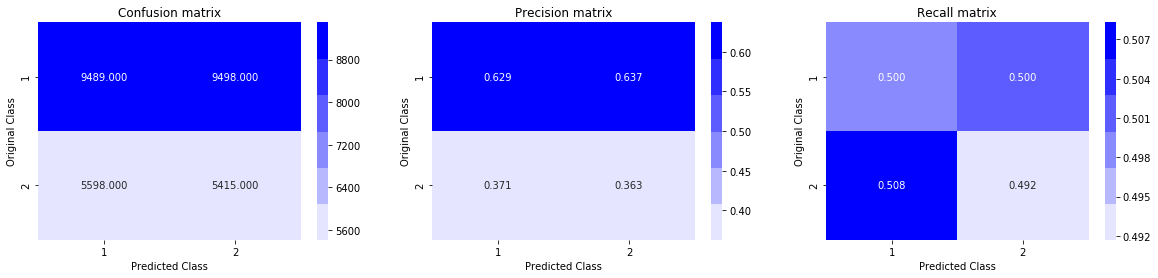

In [46]:
# we need to generate 9 numbers and the sum of numbers should be 1
# one solution is to genarate 9 numbers and divide each of the numbers by their sum
# ref: https://stackoverflow.com/a/18662466/4084039
# we create a output array that has exactly same size as the CV data
predicted_y = np.zeros((test_len,2))
for i in range(test_len):
    rand_probs = np.random.rand(1,2)
    predicted_y[i] = ((rand_probs/sum(sum(rand_probs)))[0])
print("Log loss on Test Data using Random Model",log_loss(y_test, predicted_y, eps=1e-15))

predicted_y =np.argmax(predicted_y, axis=1)
plot_confusion_matrix(y_test, predicted_y)

### Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.5876595314218004
For values of alpha =  0.0001 The log loss is: 0.558056681958908
For values of alpha =  0.001 The log loss is: 0.5610017044073563
For values of alpha =  0.01 The log loss is: 0.555706264047845
For values of alpha =  0.1 The log loss is: 0.5574311297010299
For values of alpha =  1 The log loss is: 0.5837828450900119
For values of alpha =  10 The log loss is: 0.5977492916993236


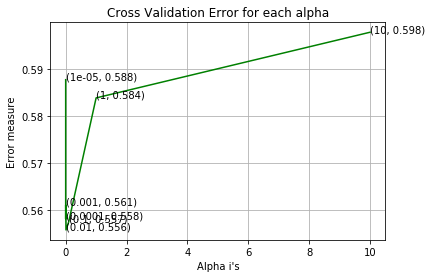

For values of best alpha =  0.01 The train log loss is: 0.5416224049223555
For values of best alpha =  0.01 The test log loss is: 0.555706264047845
Total number of data points : 30000


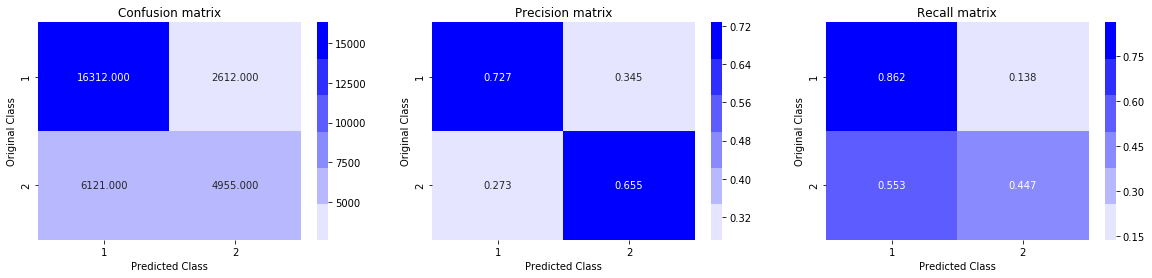

In [129]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42, class_weight='balanced')
    clf.fit(X_train_avgw2vectfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_avgw2vectfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_avgw2vectfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,  class_weight='balanced')
clf.fit(X_train_avgw2vectfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_avgw2vectfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_avgw2vectfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_avgw2vectfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

###  Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.6573941928822317
For values of alpha =  0.0001 The log loss is: 0.5395825460724882
For values of alpha =  0.001 The log loss is: 0.5472468338220392
For values of alpha =  0.01 The log loss is: 0.6193038598076513
For values of alpha =  0.1 The log loss is: 0.6422449843348569
For values of alpha =  1 The log loss is: 0.6573941928822317
For values of alpha =  10 The log loss is: 0.6573941928822317


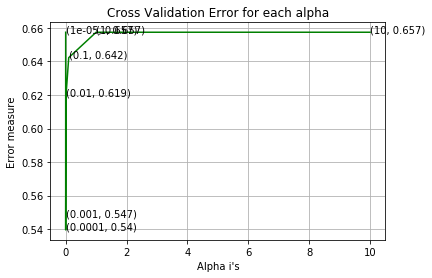

For values of best alpha =  0.0001 The train log loss is: 0.5225628368706723
For values of best alpha =  0.0001 The test log loss is: 0.5395825460724882
Total number of data points : 30000


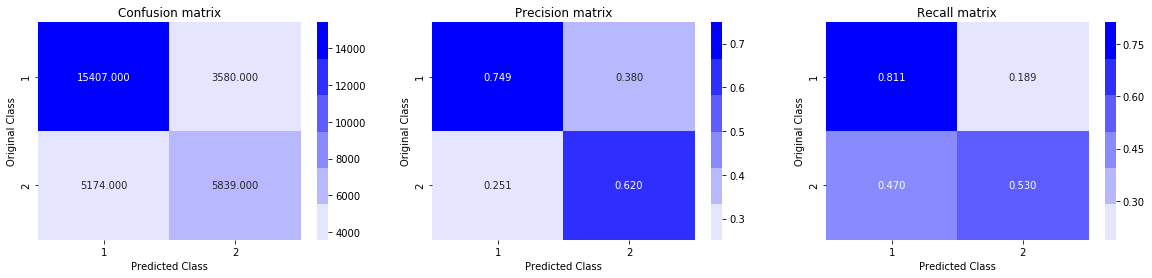

In [48]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42, class_weight='balanced')
    clf.fit(X_train_avgw2vectfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_avgw2vectfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_avgw2vectfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,  class_weight='balanced')
clf.fit(X_train_avgw2vectfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_avgw2vectfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_avgw2vectfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_avgw2vectfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

In [49]:
from scipy import stats
from scipy.stats import randint
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import precision_score,recall_score,accuracy_score,f1_score,roc_auc_score

### XGBoost

### Randomized search for XGBoost as per Assigment task2

In [51]:
Base_Model = xgb.XGBClassifier(criterion='gini',class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50], 'n_estimators':[5, 10, 100], 'eta':[0.01, 0.02]}
Random_search_avgw2v_XG = RandomizedSearchCV(Base_Model,parameters, return_train_score=False)
Random_search_avgw2v_XG = Random_search_avgw2v_XG.fit(X_train_avgw2vectfidf, y_train)


#lass sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, random_state=None, error_score=’raise-deprecating’, return_train_score=False)

In [57]:
Random_search_avgw2v_XG.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', eta=0.02, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [58]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 50
params['n_estimators']=100

In [60]:
d_train = xgb.DMatrix(X_train_avgw2vectfidf, label=y_train)
d_test = xgb.DMatrix(X_test_avgw2vectfidf, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat = xgb.DMatrix(X_train_avgw2vectfidf,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.6767	valid-logloss:0.682899
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.543105	valid-logloss:0.599975
[20]	train-logloss:0.443328	valid-logloss:0.540581
[30]	train-logloss:0.366184	valid-logloss:0.497391
[40]	train-logloss:0.305424	valid-logloss:0.464721
[50]	train-logloss:0.256953	valid-logloss:0.439539
[60]	train-logloss:0.218016	valid-logloss:0.419531
[70]	train-logloss:0.18626	valid-logloss:0.403734
[80]	train-logloss:0.160297	valid-logloss:0.391372
[90]	train-logloss:0.138898	valid-logloss:0.381701
[100]	train-logloss:0.121098	valid-logloss:0.374171
[110]	train-logloss:0.106254	valid-logloss:0.368169
[120]	train-logloss:0.093818	valid-logloss:0.363485
[130]	train-logloss:0.083306	valid-logloss:0.359721
[140]	train-logloss:0.0744	valid-logloss:0.35689
[150]	train-logloss:0.066806	valid-logloss:0.354952
[160]	train-logloss:0.060317	valid

Total number of data points : 30000


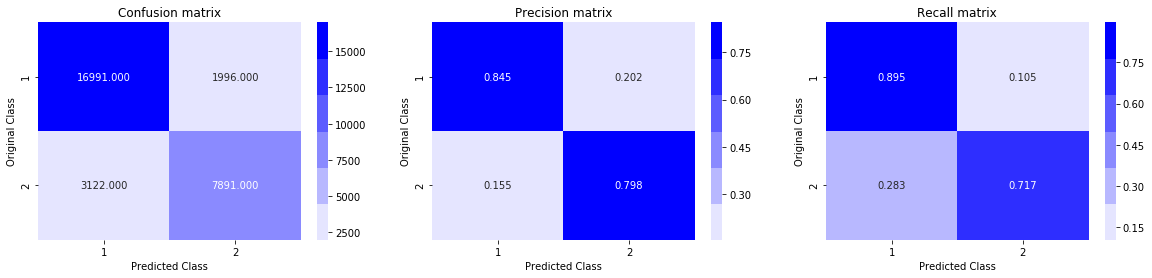

In [61]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### TFIDF Vectorization

### Assignment task 1

In [64]:
X_train,X_test, y_train, y_test = train_test_split(CompleteData_Merge, y_true, stratify=y_true, test_size=0.3)

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df=10,max_features=3000)
vectorizer.fit(X_train['question1']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf_q1 = vectorizer.transform(X_train['question1'])
X_test_tfidf_q1 = vectorizer.transform(X_test['question1'])

In [66]:
vectorizer = TfidfVectorizer(min_df=10,max_features=3000)
vectorizer.fit(X_train['question2']) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
X_train_tfidf_q2 = vectorizer.transform(X_train['question2'])
X_test_tfidf_q2 = vectorizer.transform(X_test['question2'])

In [67]:
X_Train_Model_tfidf = X_train
X_Test_Model_tfidf = X_test

In [68]:
X_Train_Model_tfidf.drop(['question1', 'question2'], axis=1, inplace=True)
X_Test_Model_tfidf.drop(['question1', 'question2'], axis=1, inplace=True)

In [69]:
X_Train_Model = normalize(X_Train_Model_tfidf)

In [70]:
X_Test_Model = normalize(X_Test_Model_tfidf)

In [71]:
# merge two sparse matrices: https://stackoverflow.com/a/19710648/4084039
from scipy.sparse import hstack
X_train_tfidf = hstack((X_Train_Model,X_train_tfidf_q1,X_train_tfidf_q2)).tocsr()
X_test_tfidf = hstack((X_Test_Model,X_test_tfidf_q1,X_test_tfidf_q2)).tocsr()


### Logistic Regression with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.3882537296042645
For values of alpha =  0.0001 The log loss is: 0.3976103374586985
For values of alpha =  0.001 The log loss is: 0.442076762210761
For values of alpha =  0.01 The log loss is: 0.50400913045552
For values of alpha =  0.1 The log loss is: 0.5417569462198021
For values of alpha =  1 The log loss is: 0.5534543779509807
For values of alpha =  10 The log loss is: 0.5609021821611595


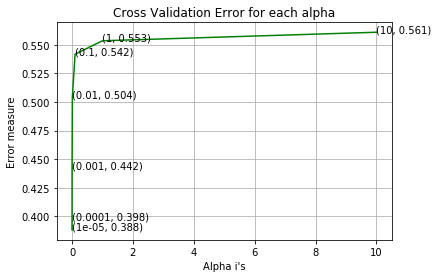

For values of best alpha =  1e-05 The train log loss is: 0.34738592466409096
For values of best alpha =  1e-05 The test log loss is: 0.3882537296042645
Total number of data points : 30000


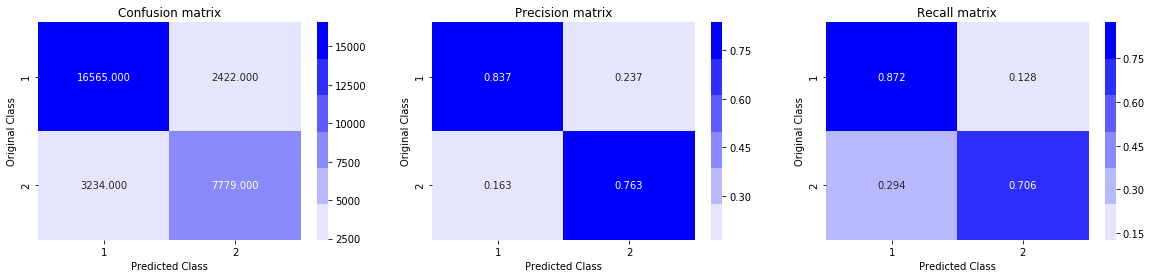

In [72]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l2', loss='log', random_state=42,  class_weight='balanced')
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l2', loss='log', random_state=42,  class_weight='balanced')
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### Linear SVM with hyperparameter tuning

For values of alpha =  1e-05 The log loss is: 0.39313862855288306
For values of alpha =  0.0001 The log loss is: 0.3852651761403643
For values of alpha =  0.001 The log loss is: 0.4512145166648692
For values of alpha =  0.01 The log loss is: 0.5333744120528481
For values of alpha =  0.1 The log loss is: 0.6112475307125208
For values of alpha =  1 The log loss is: 0.6573941933031585
For values of alpha =  10 The log loss is: 0.6573941933031585


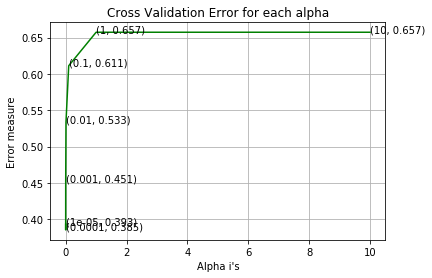

For values of best alpha =  0.0001 The train log loss is: 0.3812606031087263
For values of best alpha =  0.0001 The test log loss is: 0.3852651761403643
Total number of data points : 30000


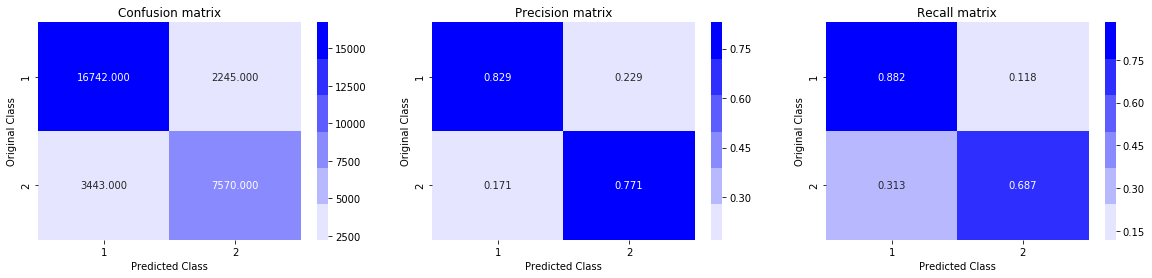

In [73]:
alpha = [10 ** x for x in range(-5, 2)] # hyperparam for SGD classifier.

# read more about SGDClassifier() at http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html
# ------------------------------
# default parameters
# SGDClassifier(loss=’hinge’, penalty=’l2’, alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=None, tol=None, 
# shuffle=True, verbose=0, epsilon=0.1, n_jobs=1, random_state=None, learning_rate=’optimal’, eta0=0.0, power_t=0.5, 
# class_weight=None, warm_start=False, average=False, n_iter=None)

# some of methods
# fit(X, y[, coef_init, intercept_init, …])	Fit linear model with Stochastic Gradient Descent.
# predict(X)	Predict class labels for samples in X.

#-------------------------------
# video link: 
#------------------------------


log_error_array=[]
for i in alpha:
    clf = SGDClassifier(alpha=i, penalty='l1', loss='hinge', random_state=42,  class_weight='balanced')
    clf.fit(X_train_tfidf, y_train)
    sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
    sig_clf.fit(X_train_tfidf, y_train)
    predict_y = sig_clf.predict_proba(X_test_tfidf)
    log_error_array.append(log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
    print('For values of alpha = ', i, "The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

fig, ax = plt.subplots()
ax.plot(alpha, log_error_array,c='g')
for i, txt in enumerate(np.round(log_error_array,3)):
    ax.annotate((alpha[i],np.round(txt,3)), (alpha[i],log_error_array[i]))
plt.grid()
plt.title("Cross Validation Error for each alpha")
plt.xlabel("Alpha i's")
plt.ylabel("Error measure")
plt.show()


best_alpha = np.argmin(log_error_array)
clf = SGDClassifier(alpha=alpha[best_alpha], penalty='l1', loss='hinge', random_state=42,  class_weight='balanced')
clf.fit(X_train_tfidf, y_train)
sig_clf = CalibratedClassifierCV(clf, method="sigmoid")
sig_clf.fit(X_train_tfidf, y_train)

predict_y = sig_clf.predict_proba(X_train_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The train log loss is:",log_loss(y_train, predict_y, labels=clf.classes_, eps=1e-15))
predict_y = sig_clf.predict_proba(X_test_tfidf)
print('For values of best alpha = ', alpha[best_alpha], "The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
predicted_y =np.argmax(predict_y,axis=1)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### XG boost with Randomized search

In [74]:
Base_Model = xgb.XGBClassifier(criterion='gini',class_weight='balanced')
parameters = {'max_depth': [1, 5, 10, 50, 100], 'n_estimators':[5, 10, 100], 'eta':[0.01, 0.02]}
Random_search_avgw2v_XG = RandomizedSearchCV(Base_Model,parameters, return_train_score=False)
Random_search_avgw2v_XG = Random_search_avgw2v_XG.fit(X_train_tfidf, y_train)


#lass sklearn.model_selection.RandomizedSearchCV(estimator, param_distributions, n_iter=10, scoring=None, n_jobs=None, iid=’warn’, refit=True, cv=’warn’, verbose=0, pre_dispatch=‘2*n_jobs’, random_state=None, error_score=’raise-deprecating’, return_train_score=False)

In [75]:
Random_search_avgw2v_XG.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', class_weight='balanced',
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              criterion='gini', eta=0.01, gamma=0, learning_rate=0.1,
              max_delta_step=0, max_depth=50, min_child_weight=1, missing=None,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [76]:
params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.01
params['max_depth'] = 50
params['n_estimators']=100

In [77]:
d_train = xgb.DMatrix(X_train_tfidf, label=y_train)
d_test = xgb.DMatrix(X_test_tfidf, label=y_test)

watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat = xgb.DMatrix(X_train_tfidf,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))

[0]	train-logloss:0.68573	valid-logloss:0.687819
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.619449	valid-logloss:0.639574
[20]	train-logloss:0.563086	valid-logloss:0.599937
[30]	train-logloss:0.514098	valid-logloss:0.566347
[40]	train-logloss:0.47094	valid-logloss:0.53764
[50]	train-logloss:0.432693	valid-logloss:0.512883
[60]	train-logloss:0.398735	valid-logloss:0.491267
[70]	train-logloss:0.36845	valid-logloss:0.472959
[80]	train-logloss:0.341063	valid-logloss:0.45705
[90]	train-logloss:0.316308	valid-logloss:0.442907
[100]	train-logloss:0.293944	valid-logloss:0.430739
[110]	train-logloss:0.273817	valid-logloss:0.420131
[120]	train-logloss:0.255551	valid-logloss:0.410836
[130]	train-logloss:0.238993	valid-logloss:0.402668
[140]	train-logloss:0.223788	valid-logloss:0.395414
[150]	train-logloss:0.209972	valid-logloss:0.388832
[160]	train-logloss:0.197312	vali

Total number of data points : 30000


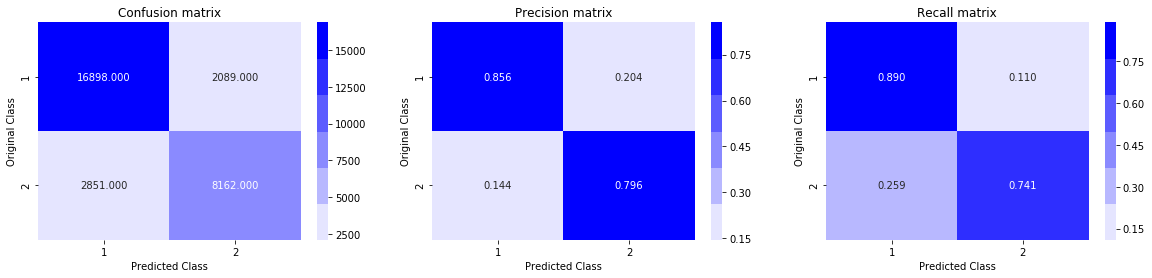

In [78]:
predicted_y =np.array(predict_y>0.5,dtype=int)
print("Total number of data points :", len(predicted_y))
plot_confusion_matrix(y_test, predicted_y)

### Conclusions

In [134]:
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Model","Vectorizer","Hyper parameters", "loss"]
x.add_row(['Random','NA','NA',0.882 ])
x.add_row(['LR','avgw2vtfidf','alpha 1e-05',0.555])
x.add_row(['SVM','avgw2vtfidf','alpha 0.0001',0.539])
x.add_row(['XGBoost', 'avgw2vtfidf','eta 0.02, Max_depth 50, n_estimators 100',0.351])
x.add_row(['LR','tfidf','alpha 1e-05',0.388])
x.add_row(['SVM','tfidf','alpha 0.0001',0.385])
x.add_row(['XGBoost', 'tfidf','eta 0.01, Max_depth 50, n_estimators 100',0.342])
print(x)

+---------+-------------+------------------------------------------+-------+
|  Model  |  Vectorizer |             Hyper parameters             |  loss |
+---------+-------------+------------------------------------------+-------+
|  Random |      NA     |                    NA                    | 0.882 |
|    LR   | avgw2vtfidf |               alpha 1e-05                | 0.555 |
|   SVM   | avgw2vtfidf |               alpha 0.0001               | 0.539 |
| XGBoost | avgw2vtfidf | eta 0.02, Max_depth 50, n_estimators 100 | 0.351 |
|    LR   |    tfidf    |               alpha 1e-05                | 0.388 |
|   SVM   |    tfidf    |               alpha 0.0001               | 0.385 |
| XGBoost |    tfidf    | eta 0.01, Max_depth 50, n_estimators 100 | 0.342 |
+---------+-------------+------------------------------------------+-------+


#### For the given data XG boost with tfidf works best  